In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns
import pylab as pl
import random

# sns.set()
plt.style.use('ggplot')
matplotlib.rc("lines", markeredgewidth=0.5) # show boxplots outliers
pl.figure(figsize=(100, 100)) # This increases resolution

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

In [2]:
dqn = {
    'CartPole-v0': [140.44, 16.190000000000001, 19.989999999999998, 15.75, 124.52, 16.670000000000002, 20.719999999999999, 16.390000000000001, 17.129999999999999, 71.299999999999997],
    'CartPole-v1': [21.079999999999998, 32.969999999999999, 52.969999999999999, 57.729999999999997, 80.060000000000002, 23.66, 22.789999999999999, 21.850000000000001, 22.649999999999999, 28.289999999999999],
    'Acrobot-v1': [-87.629999999999995, -85.709999999999994, -110.59, -86.849999999999994, -80.390000000000001, -84.239999999999995, -84.370000000000005, -96.569999999999993, -92.129999999999995, -98.359999999999999],
    'LunarLander-v2': [-6.7642173403618253, -92.39677531157875, 51.864437708578407, 120.6889854127231, -78.381876420418124, -68.670969225045368, 16.488640783418678, 137.70679983691551, -86.216117518176361, -61.305878725474948]
}

dqn_tn = {
    'CartPole-v0': [200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0],
    'CartPole-v1': [409.07, 500.0, 499.96, 495.17, 500.0, 500.0, 490.94, 500.0, 500.0, 500.0],
    'Acrobot-v1': [-66.47, -68.02, -64.86, -64.74, -66.87, -64.45, -67.93, -65.97, -64.93, -67.03],
    'LunarLander-v2': [231.97597867181688, 234.88290041317768, 230.42828839340112, 234.78066731011015, 236.30451975112905, 220.5376384172935, 227.56466704370175, 238.2285435364868, 239.54458789542008, 229.4654598806116],
}

ngdqn = {
    'CartPole-v0': [200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0],
    'CartPole-v1': [500.0, 500.0, 500.0, 498.18, 500.0, 497.86, 496.3, 500.0, 500.0, 498.07],
    'Acrobot-v1': [-63.16, -63.09, -63.41, -63.36, -63.56, -63.13, -63.22, -62.96, -63.38, -62.84],
    'LunarLander-v2': [134.9121039890535, 16.654380306889276, 156.1627738364138, 155.839648099852, 166.6744256857476, 26.2681897985596, 119.2214869536298, 23.8729611831897, 136.12380416029396, 146.41502359968078]
}

ngdqn_lincg = {
    'CartPole-v0': [200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0],
    'CartPole-v1': [500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0],
    'Acrobot-v1': [-63.58, -63.45, -63.52, -63.93, -63.53, -63.15, -63.1, -63.29, -63.82, -64.27],
    'LunarLander-v2': [132.566892080988, 109.38753758347995, 124.80769936325298, 113.77524251633511, 148.89408838373353, 103.686117526903, 166.81315214554502, 175.46816542184297, 128.94795970532599, 134.0924507877581]
}

/Users/ethknig/anaconda2/envs/ml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


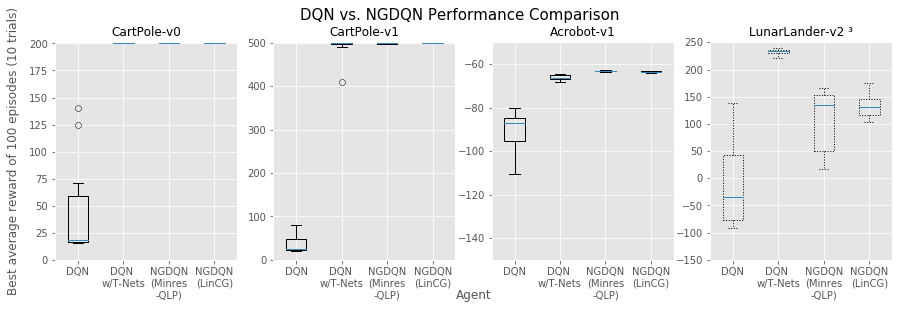

In [28]:
keys = ['CartPole-v0', 'CartPole-v1','Acrobot-v1', 'LunarLander-v2']
#        2000 epochs.   2000 epochs.  10,000 epochs.  10,000 epochs. 
y_ranges = [(0, 201), (0, 501), (-150, -50), (-150, 250)]
SMALLFONT, BIGFONT = 12, 15

f, axes = plt.subplots(1, len(keys), sharey=False)
f.set_figheight(4)
f.set_figwidth(15)

for axis, key, y_range in zip(axes, keys, y_ranges):
    data = [dqn[key], dqn_tn[key], ngdqn[key], ngdqn_lincg[key]]
    if 'LunarLander' in key:
        env = key + ' ³' # footnote
        dotted = dict(linestyle=':')
        bplot = axis.boxplot(data, showfliers=True,
            boxprops=dotted, whiskerprops=dotted, capprops=dotted)
    else:
        axis.boxplot(data, showfliers=True)
        env = key
    axis.set_xticklabels(['DQN', 'DQN \nw/T-Nets', 'NGDQN\n(Minres\n-QLP)', 'NGDQN\n(LinCG)'])
    axis.set_title(env, fontsize=SMALLFONT)
    axis.set_ylim(*y_range)

f.add_subplot(111, frameon=False)
plt.suptitle("DQN vs. NGDQN Performance Comparison", y=1, fontsize=BIGFONT)
plt.xlabel("Agent", labelpad=12)
plt.ylabel("Best average reward of 100 episodes (10 trials)", labelpad=12)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
f.savefig('boxplot.png', dpi=200, bbox_inches='tight')

In [ ]:
avgs = {
    'DQN': 
        {'CartPole-v0': [26.811, 26.869999999999997, 27.089, 27.134999999999998, 27.246, 27.333999999999996, 27.584000000000003, 27.610000000000003, 27.804000000000002, 27.915000000000003, 27.945000000000004, 28.206, 28.287, 28.525, 28.747000000000003, 28.826999999999998, 28.885, 28.919, 29.058, 29.25, 29.349, 29.415, 29.464, 29.752999999999997, 29.874000000000002, 30.1, 30.234999999999996, 30.302000000000003, 30.4, 30.497000000000003, 30.637999999999998, 30.715999999999998, 30.886000000000003, 31.059000000000005, 31.230000000000008, 31.212, 31.406, 31.419999999999998, 31.494, 31.731999999999992, 31.936, 32.054, 32.263, 32.294, 32.403, 32.455, 32.384, 32.474000000000004, 32.467999999999996, 32.52, 32.736000000000004, 32.831, 32.973, 32.979, 33.086, 33.08, 33.301, 33.458999999999996, 33.387, 33.429, 33.443999999999996, 33.404, 33.483999999999995, 33.48, 33.47, 33.424, 33.499, 33.480999999999995, 33.577999999999996, 33.71999999999999, 33.729, 33.773, 33.821, 33.806, 33.961, 34.104, 34.06099999999999, 34.146, 34.165, 34.166000000000004, 34.155, 34.15, 34.306, 34.485, 34.646, 34.652, 34.609, 34.449, 34.548, 34.517, 34.715, 34.74400000000001, 34.669, 34.534, 34.699, 34.662, 34.64399999999999, 34.625, 34.672999999999995, 34.476, 34.439, 34.42399999999999, 34.443, 34.406, 34.356, 34.275999999999996, 34.11299999999999, 34.19799999999999, 34.08, 34.099, 34.215, 34.19700000000001, 34.188, 34.202, 34.062, 34.102999999999994, 34.120000000000005, 34.19500000000001, 34.087, 34.059000000000005, 34.154, 34.111999999999995, 34.195, 33.998, 34.114, 34.054, 34.126, 34.187, 34.361000000000004, 34.288, 34.348, 34.248000000000005, 34.122, 34.007999999999996, 33.862, 33.902, 33.778000000000006, 33.911, 33.94499999999999, 33.785999999999994, 33.702, 33.79899999999999, 33.792, 33.835, 33.78699999999999, 33.797, 34.10699999999999, 34.256, 34.315999999999995, 34.346000000000004, 34.224000000000004, 34.439, 34.492000000000004, 34.656, 34.726, 34.864000000000004, 34.717999999999996, 34.751999999999995, 34.887, 34.977, 35.11800000000001, 35.123999999999995, 35.237, 35.217, 35.372, 35.406000000000006, 35.351, 35.379, 35.222, 35.083000000000006, 35.152, 35.337, 35.263, 35.346999999999994, 35.182, 35.18000000000001, 35.225, 35.3, 35.322, 35.418, 35.485, 35.653, 35.452000000000005, 35.279999999999994, 35.099000000000004, 34.976, 34.949, 35.044, 35.028999999999996, 35.072, 34.878, 34.884, 34.901999999999994, 34.92100000000001, 34.897000000000006, 34.924, 34.893, 34.854, 34.893, 34.871, 34.827, 34.972, 34.94199999999999, 35.001, 35.095, 35.088, 35.199, 35.149, 35.092, 35.214, 35.229, 35.06, 35.256, 35.223, 35.244, 35.217, 35.231, 35.190000000000005, 35.19, 35.044, 34.96, 35.028000000000006, 35.053, 35.108999999999995, 35.154, 35.032, 34.903000000000006, 34.74400000000001, 34.742999999999995, 34.782, 34.709, 34.729, 34.843999999999994, 34.988, 35.007, 34.981, 35.06699999999999, 34.94500000000001, 35.103, 35.221000000000004, 35.152, 35.077000000000005, 35.15599999999999, 35.025999999999996, 35.068, 35.14200000000001, 35.017, 34.86900000000001, 34.86299999999999, 34.913999999999994, 34.863, 34.674, 34.649, 34.521, 34.342, 34.214, 34.163, 33.994, 34.052, 33.939, 33.928999999999995, 34.099000000000004, 33.968999999999994, 34.158, 34.105000000000004, 34.057, 34.263000000000005, 34.206999999999994, 34.389, 34.603, 34.547, 34.375, 34.471999999999994, 34.438, 34.432, 34.38000000000001, 34.471999999999994, 34.318, 34.367, 34.358999999999995, 34.342, 34.185, 34.36, 34.316, 34.303, 34.312, 34.365, 34.407000000000004, 34.32299999999999, 34.397000000000006, 34.54900000000001, 34.559000000000005, 34.413, 34.519000000000005, 34.388999999999996, 34.415, 34.397000000000006, 34.435, 34.419000000000004, 34.497, 34.672000000000004, 34.501, 34.362, 34.295, 34.153999999999996, 34.29299999999999, 34.218, 34.379999999999995, 34.444, 34.336, 34.330999999999996, 34.455, 34.386, 34.257999999999996, 34.366, 34.339, 34.50099999999999, 34.513999999999996, 34.51899999999999, 34.51899999999999, 34.485, 34.441, 34.443, 34.453, 34.416, 34.408, 34.452, 34.57899999999999, 34.422999999999995, 34.605000000000004, 34.611000000000004, 34.602, 34.657, 34.632999999999996, 34.635, 34.668, 34.705000000000005, 34.826, 34.584, 34.596, 34.574000000000005, 34.534000000000006, 34.301, 34.311, 34.339999999999996, 34.359, 34.23800000000001, 34.282, 34.269999999999996, 34.205, 34.372, 34.373000000000005, 34.37, 34.448, 34.446000000000005, 34.414, 34.437, 34.602, 34.416999999999994, 34.473, 34.463, 34.343, 34.302, 34.153999999999996, 34.15999999999999, 34.12499999999999, 33.928999999999995, 33.955, 33.81499999999999, 33.66199999999999, 33.61999999999999, 33.754999999999995, 33.629, 33.516000000000005, 33.57299999999999, 33.57299999999999, 33.409, 33.382, 33.426, 33.302, 33.45399999999999, 33.601, 33.418, 33.419, 33.483, 33.488, 33.535999999999994, 33.426, 33.427, 33.335, 33.36, 33.295, 33.321000000000005, 33.241, 33.362, 33.393, 33.433, 33.55, 33.42100000000001, 33.43300000000001, 33.289, 33.331, 33.477000000000004, 33.505, 33.717999999999996, 33.595, 33.507, 33.34, 33.303, 33.260000000000005, 33.227, 33.26199999999999, 33.224999999999994, 33.266000000000005, 33.109, 33.087, 32.91600000000001, 32.949, 33.097, 33.178, 33.176, 33.174, 33.049, 32.971000000000004, 32.867, 32.902, 32.883, 32.914, 32.95, 32.856, 32.8, 32.991, 32.967999999999996, 32.866, 32.879000000000005, 32.876999999999995, 32.721000000000004, 32.605000000000004, 32.653999999999996, 32.523999999999994, 32.569, 32.577000000000005, 32.584, 32.608000000000004, 32.56100000000001, 32.564, 32.525, 32.701, 32.691, 32.684000000000005, 32.525, 32.523, 32.38400000000001, 32.24100000000001, 32.309, 32.439, 32.42100000000001, 32.45, 32.471000000000004, 32.57, 32.399, 32.35, 32.49300000000001, 32.456, 32.364, 32.571000000000005, 32.584, 32.616, 32.789, 32.922999999999995, 32.979, 32.81099999999999, 32.847, 32.955, 32.988, 33.048, 33.149, 33.105000000000004, 32.944, 33.02, 32.979, 32.987, 33.16, 33.202, 33.295, 33.4, 33.328, 33.470000000000006, 33.355, 33.375, 33.410000000000004, 33.396, 33.532000000000004, 33.522000000000006, 33.364999999999995, 33.48799999999999, 33.459, 33.31400000000001, 33.347, 33.297, 33.311, 33.392, 33.355000000000004, 33.411, 33.343, 33.332, 33.396, 33.43, 33.45700000000001, 33.474, 33.361000000000004, 33.227999999999994, 33.204, 33.338, 33.402, 33.475, 33.667, 33.64899999999999, 33.516999999999996, 33.449999999999996, 33.50399999999999, 33.576, 33.592999999999996, 33.63099999999999, 33.767, 33.686, 33.864, 33.716, 33.833000000000006, 33.801, 33.789, 33.622, 33.476000000000006, 33.473, 33.584, 33.718, 33.717, 33.86900000000001, 33.878, 34.024, 33.994, 34.229, 34.248000000000005, 34.216, 34.399, 34.386, 34.471000000000004, 34.288, 34.244, 34.251, 34.399, 34.398, 34.41499999999999, 34.474, 34.458999999999996, 34.397, 34.565999999999995, 34.54899999999999, 34.755, 34.757999999999996, 34.927, 34.942, 34.835, 35.016999999999996, 35.135, 34.967, 35.035999999999994, 34.992999999999995, 34.801, 34.674, 34.77299999999999, 34.763999999999996, 34.704, 34.596000000000004, 34.541999999999994, 34.407000000000004, 34.313, 34.396, 34.449, 34.423, 34.444, 34.337, 34.333, 34.251, 34.108, 33.958, 34.117000000000004, 34.111000000000004, 34.135999999999996, 34.248000000000005, 34.058, 34.037, 33.94, 34.119, 34.14, 34.022, 33.932, 33.958999999999996, 33.967, 34.003, 33.971000000000004, 34.041999999999994, 33.964999999999996, 34.032, 33.928, 33.983, 34.138999999999996, 34.126, 34.045, 34.07099999999999, 34.223, 34.226000000000006, 34.224000000000004, 34.187, 34.338, 34.486000000000004, 34.274, 34.267999999999994, 34.42, 34.458, 34.605000000000004, 34.518, 34.463, 34.466, 34.333, 34.422999999999995, 34.278999999999996, 34.315, 34.178, 34.297000000000004, 34.461, 34.499, 34.609, 34.77499999999999, 34.632999999999996, 34.557, 34.553000000000004, 34.576, 34.61, 34.635, 34.665, 34.57, 34.57599999999999, 34.715999999999994, 34.605999999999995, 34.489, 34.489999999999995, 34.58, 34.601, 34.77, 34.637, 34.628, 34.619, 34.636, 34.723, 34.846999999999994, 34.678, 34.67100000000001, 34.468, 34.50099999999999, 34.523, 34.515, 34.67700000000001, 34.50899999999999, 34.55, 34.541, 34.545, 34.687, 34.869, 34.849000000000004, 34.793, 34.808, 34.962, 34.94799999999999, 35.142, 35.26299999999999, 35.38699999999999, 35.379999999999995, 35.38, 35.495, 35.38700000000001, 35.376, 35.377, 35.43599999999999, 35.464000000000006, 35.46900000000001, 35.369, 35.230999999999995, 35.218, 35.087, 35.215, 35.164, 35.251, 35.008, 35.096000000000004, 35.113, 35.269999999999996, 35.39, 35.501999999999995, 35.459999999999994, 35.479, 35.289, 35.307, 35.15, 35.083000000000006, 35.197, 35.016999999999996, 35.227000000000004, 35.303, 35.253, 35.233, 35.257, 35.183, 35.074, 34.887, 34.763999999999996, 34.766, 34.812, 34.702999999999996, 34.844, 34.709, 34.900999999999996, 35.07299999999999, 35.24100000000001, 35.251000000000005, 35.408, 35.424, 35.431, 35.395, 35.414, 35.285, 35.301, 35.278999999999996, 35.178000000000004, 35.166999999999994, 35.105999999999995, 35.083999999999996, 34.917, 34.876999999999995, 34.732, 34.912, 34.794, 34.799, 34.685, 34.63700000000001, 34.71, 34.65, 34.564, 34.709999999999994, 34.587999999999994, 34.585, 34.626999999999995, 34.64, 34.637, 34.506, 34.419000000000004, 34.42699999999999, 34.270999999999994, 34.239999999999995, 34.113, 34.172, 34.182, 34.10699999999999, 34.285, 34.122, 34.125, 34.044, 33.899, 33.905, 33.92700000000001, 33.997, 34.036, 33.891999999999996, 33.988, 33.772000000000006, 33.64, 33.5, 33.467, 33.447, 33.295, 33.228, 33.195, 33.090999999999994, 33.079, 33.064, 33.049, 33.019999999999996, 32.963, 32.99399999999999, 33.05800000000001, 32.916000000000004, 32.956, 32.851, 32.882, 32.808, 32.742, 32.646, 32.534, 32.39999999999999, 32.481, 32.471999999999994, 32.489999999999995, 32.681, 32.825, 32.871, 32.785, 32.794, 32.556, 32.569, 32.602999999999994, 32.476, 32.620999999999995, 32.68300000000001, 32.66199999999999, 32.826, 32.80200000000001, 32.79299999999999, 32.646, 32.606, 32.60600000000001, 32.642, 32.517, 32.501, 32.393, 32.347, 32.222, 32.163, 32.29, 32.315999999999995, 32.163, 32.196000000000005, 32.198, 32.108999999999995, 32.07899999999999, 32.126, 32.11899999999999, 32.312, 32.306, 32.44, 32.471000000000004, 32.304, 32.255, 32.243, 32.215999999999994, 32.227, 32.154, 32.172999999999995, 32.20399999999999, 32.092, 32.045, 32.184000000000005, 32.20399999999999, 32.182, 32.133, 32.314, 32.198, 32.227999999999994, 32.245999999999995, 32.331, 32.45, 32.27, 32.340999999999994, 32.274, 32.332, 32.33, 32.303999999999995, 32.349000000000004, 32.333, 32.183, 32.184, 32.08, 32.021, 32.06400000000001, 32.010000000000005, 31.993000000000002, 32.1, 32.144999999999996, 32.190999999999995, 32.244, 32.257000000000005, 32.323, 32.385, 32.32899999999999, 32.522000000000006, 32.504, 32.539, 32.504000000000005, 32.549, 32.542, 32.465999999999994, 32.554, 32.660999999999994, 32.673, 32.741, 32.869, 32.879000000000005, 32.883, 32.874, 33.017, 32.919000000000004, 33.111000000000004, 33.11800000000001, 32.95700000000001, 32.85, 33.015, 33.12, 33.300000000000004, 33.367000000000004, 33.358000000000004, 33.458, 33.474, 33.334999999999994, 33.288, 33.28099999999999, 33.142999999999994, 33.114999999999995, 33.223, 33.183, 33.234, 33.107000000000006, 33.089999999999996, 33.1, 32.989999999999995, 33.00599999999999, 33.073, 32.999, 33.073, 32.892, 32.902, 33.05, 33.028999999999996, 33.056999999999995, 33.095, 33.149, 33.117, 33.176, 33.005, 33.17, 33.052, 33.143, 33.199, 33.181000000000004, 33.239000000000004, 33.388, 33.413, 33.485, 33.504999999999995, 33.54299999999999, 33.525, 33.488, 33.407000000000004, 33.519000000000005, 33.69199999999999, 33.85699999999999, 33.656000000000006, 33.707, 33.646, 33.852, 33.833999999999996, 33.71, 33.7, 33.791999999999994, 33.803, 33.574, 33.634, 33.678, 33.84100000000001, 33.955, 33.989999999999995, 34.022, 34.01199999999999, 34.077999999999996, 34.088, 34.052, 34.198, 34.068000000000005, 34.105000000000004, 34.06, 34.015, 34.072, 34.043, 34.019999999999996, 34.063, 33.868, 33.886, 33.934000000000005, 34.013999999999996, 33.985, 34.131, 34.23, 34.162, 34.082, 34.229, 34.124, 34.01, 34.018, 33.968, 33.97, 33.834999999999994, 33.949, 33.779999999999994, 33.788000000000004, 33.75599999999999, 33.886, 33.742000000000004, 33.589000000000006, 33.618, 33.553999999999995, 33.60099999999999, 33.546, 33.539, 33.540000000000006, 33.54, 33.535000000000004, 33.541000000000004, 33.525999999999996, 33.510999999999996, 33.480999999999995, 33.471999999999994, 33.451, 33.502, 33.471000000000004, 33.663000000000004, 33.612, 33.55800000000001, 33.654999999999994, 33.611999999999995, 33.742000000000004, 33.782, 33.611, 33.586, 33.63799999999999, 33.63100000000001, 33.687, 33.78099999999999, 33.711, 33.721000000000004, 33.602, 33.785000000000004, 33.675000000000004, 33.68, 33.741, 33.717000000000006, 33.637, 33.687, 33.638, 33.599000000000004, 33.55, 33.515, 33.602000000000004, 33.656, 33.543, 33.371, 33.249, 33.42399999999999, 33.40599999999999, 33.477999999999994, 33.29, 33.235, 33.201, 33.183, 33.039, 32.99399999999999, 33.066, 33.025, 33.04299999999999, 32.932, 32.910000000000004, 32.88199999999999, 32.934999999999995, 32.934000000000005, 32.957, 32.937, 32.989, 32.853, 32.886, 32.858000000000004, 32.989, 33.023, 33.007, 32.993, 33.004999999999995, 32.989999999999995, 33.172000000000004, 33.219, 33.138, 33.099000000000004, 33.209999999999994, 33.101, 33.051, 33.069, 33.013, 32.859, 32.991, 33.126, 33.12599999999999, 33.231, 33.208, 33.169, 33.136, 33.107, 33.150000000000006, 33.13, 33.019999999999996, 33.023, 33.051, 32.881, 32.955, 32.956, 32.931, 32.92999999999999, 32.946, 32.949, 33.068, 33.069, 33.15599999999999, 33.131, 33.208999999999996, 33.23800000000001, 33.226, 33.07099999999999, 33.248, 33.093, 33.063, 33.053, 32.95, 33.093, 33.033, 32.989999999999995, 32.995999999999995, 33.023, 32.898, 32.92700000000001, 32.834, 32.811, 32.878, 32.931, 32.909, 32.699999999999996, 32.730000000000004, 32.642, 32.622, 32.594, 32.598, 32.689, 32.671, 32.678, 32.749, 32.745, 32.698, 32.629, 32.658, 32.753, 32.825, 32.742000000000004, 32.872, 32.99499999999999, 32.971999999999994, 33.03099999999999, 33.024, 33.032, 33.027, 33.041000000000004, 33.036, 33.149, 33.291999999999994, 33.247, 33.242000000000004, 33.336, 33.266999999999996, 33.324, 33.29899999999999, 33.348, 33.339, 33.321, 33.316, 33.298, 33.178999999999995, 33.159, 33.202999999999996, 33.232000000000006, 33.345000000000006, 33.415000000000006, 33.229, 33.191, 33.391, 33.43300000000001, 33.361000000000004, 33.364000000000004, 33.365, 33.373, 33.568, 33.604, 33.528999999999996, 33.375, 33.42200000000001, 33.29899999999999, 33.347, 33.397, 33.335, 33.434999999999995, 33.501, 33.598, 33.718, 33.690000000000005, 33.67999999999999, 33.689, 33.628, 33.566, 33.549, 33.542, 33.504000000000005, 33.492, 33.377, 33.42299999999999, 33.41, 33.340999999999994, 33.364999999999995, 33.465, 33.459999999999994, 33.568, 33.416999999999994, 33.349000000000004, 33.36999999999999, 33.425, 33.621, 33.609, 33.574, 33.591, 33.77300000000001, 33.722, 33.758, 33.748000000000005, 33.73199999999999, 33.702999999999996, 33.623000000000005, 33.64300000000001, 33.599000000000004, 33.632000000000005, 33.623000000000005, 33.63, 33.635999999999996, 33.635000000000005, 33.563, 33.398999999999994, 33.412, 33.46300000000001, 33.438, 33.474000000000004, 33.506, 33.55499999999999, 33.48, 33.396, 33.31400000000001, 33.251999999999995, 33.099000000000004, 32.967999999999996, 32.967, 32.911, 32.94499999999999, 32.942, 32.955, 33.010000000000005, 32.969, 32.83, 32.676, 32.846000000000004, 32.778999999999996, 32.724000000000004, 32.729, 32.669000000000004, 32.699, 32.626999999999995, 32.763, 32.815999999999995, 32.789, 32.815999999999995, 32.843999999999994, 32.870000000000005, 32.798, 32.751000000000005, 32.648, 32.56, 32.558, 32.583, 32.456, 32.459999999999994, 32.486000000000004, 32.467999999999996, 32.459999999999994, 32.626000000000005, 32.484, 32.455, 32.475, 32.61, 32.583000000000006, 32.73299999999999, 32.730000000000004, 32.753, 32.821, 32.80799999999999, 32.752, 32.671, 32.518, 32.519000000000005, 32.511, 32.628, 32.707, 32.739999999999995, 32.756, 32.755, 32.794999999999995, 32.812999999999995, 32.898, 32.906, 32.869, 32.89800000000001, 32.805, 32.675, 32.699, 32.666999999999994, 32.806, 32.852999999999994, 32.935, 32.902, 32.766, 32.660000000000004, 32.713, 32.74, 32.575, 32.62, 32.652, 32.642, 32.696000000000005, 32.736, 32.805, 32.774, 32.982, 32.972, 32.974000000000004, 33.021, 33.024, 33.044, 33.108, 33.066, 33.17, 33.123000000000005, 33.185, 33.253, 33.317, 33.267, 33.306, 33.378, 33.480000000000004, 33.547, 33.598, 33.571, 33.589, 33.633, 33.650999999999996, 33.67, 33.662, 33.631, 33.641000000000005, 33.68900000000001, 33.697, 33.534, 33.523, 33.501999999999995, 33.525, 33.512, 33.434000000000005, 33.44199999999999, 33.291, 33.428, 33.46, 33.434, 33.4, 33.37499999999999, 33.349000000000004, 33.569, 33.57899999999999, 33.687, 33.705, 33.878, 33.833999999999996, 33.793, 33.758, 33.839999999999996, 33.89, 33.791999999999994, 33.741, 33.853, 33.833999999999996, 33.714, 33.692, 33.638999999999996, 33.602, 33.629, 33.644, 33.57899999999999, 33.528999999999996, 33.55, 33.605, 33.657999999999994, 33.68, 33.57000000000001, 33.541000000000004, 33.510999999999996, 33.502, 33.483, 33.489, 33.51800000000001, 33.406, 33.321999999999996, 33.341, 33.358000000000004, 33.434999999999995, 33.44500000000001, 33.42399999999999, 33.394999999999996, 33.256, 33.251, 33.154999999999994, 33.176, 33.135000000000005, 33.108000000000004, 33.086, 33.114999999999995, 33.166, 33.144, 33.185, 33.227, 33.161, 33.080999999999996, 33.117000000000004, 33.068, 32.95, 32.993, 33.013000000000005, 32.967999999999996, 32.926, 33.052, 33.01299999999999, 33.073, 32.997, 32.992999999999995, 32.868, 32.827, 32.792, 32.81, 32.751, 32.67100000000001, 32.583, 32.565999999999995, 32.592999999999996, 32.7, 32.803, 32.782, 32.747, 32.748000000000005, 32.766000000000005, 32.74, 32.763999999999996, 32.745999999999995, 32.749, 32.775999999999996, 32.89, 32.855, 32.861000000000004, 32.934, 32.967999999999996, 33.12800000000001, 33.120000000000005, 33.021, 33.032, 32.995000000000005, 33.06699999999999, 33.092, 33.13099999999999, 32.966, 32.928, 32.886, 33.041999999999994, 32.861000000000004, 32.902, 33.007000000000005, 32.982, 32.884, 32.842, 32.807, 32.887, 32.847, 32.823, 32.80200000000001, 32.896, 32.845, 32.892999999999994, 32.849000000000004, 32.772, 32.849000000000004, 32.864999999999995, 32.879000000000005, 32.839999999999996, 32.77199999999999, 32.77, 32.71500000000001, 32.749, 32.745, 32.727, 32.784, 32.716, 32.714999999999996, 32.76, 32.778, 32.75599999999999, 32.815000000000005, 32.782, 32.754000000000005, 32.741, 32.81, 32.779999999999994, 32.760000000000005, 32.79299999999999, 32.856, 32.899, 32.872, 32.91199999999999, 32.885000000000005, 32.92999999999999, 32.911, 32.827, 32.801, 32.792, 32.894999999999996, 32.829, 32.86, 32.772999999999996, 32.79, 32.731, 32.829, 32.848, 32.71399999999999, 32.79600000000001, 32.803000000000004, 32.940999999999995, 32.979, 33.05800000000001, 33.089000000000006, 33.08, 33.077, 33.239000000000004, 33.25500000000001, 33.278000000000006, 33.305, 33.259, 33.236000000000004, 33.16, 33.152, 33.177, 33.195, 33.143, 33.227, 33.14699999999999, 33.11, 33.166999999999994, 33.129999999999995, 33.037, 33.066, 33.141, 33.049, 33.023, 32.9, 32.942, 32.882999999999996, 32.826, 32.848, 32.812, 32.799, 32.884, 32.905, 32.927, 32.913, 32.769999999999996, 32.813, 32.952999999999996, 32.919, 32.956999999999994, 33.136, 33.128, 33.116, 33.248999999999995, 33.185, 33.189, 33.21999999999999, 33.187, 33.236000000000004, 33.206, 33.128, 33.172, 33.114999999999995, 33.112, 33.089000000000006, 33.126999999999995, 33.1, 33.084999999999994, 33.106, 33.062, 33.06699999999999, 33.141, 33.17700000000001, 33.278, 33.299, 33.295, 33.271, 33.207, 33.172999999999995, 33.163, 33.212, 33.352999999999994, 33.528, 33.582, 33.633, 33.596, 33.480000000000004, 33.487, 33.55, 33.525, 33.559, 33.519999999999996, 33.575, 33.547000000000004, 33.581, 33.601, 33.57, 33.70700000000001, 33.72200000000001, 33.782000000000004, 33.72099999999999, 33.724000000000004, 33.696, 33.713, 33.813, 33.773999999999994, 33.756, 33.614, 33.587999999999994, 33.574, 33.546, 33.660000000000004, 33.655, 33.52499999999999, 33.596, 33.598, 33.568, 33.579, 33.504999999999995, 33.459999999999994, 33.45799999999999, 33.459999999999994, 33.470000000000006, 33.51899999999999, 33.50599999999999, 33.572, 33.54599999999999, 33.53, 33.568999999999996, 33.629, 33.61, 33.541, 33.586999999999996, 33.637, 33.565000000000005, 33.558, 33.626, 33.702999999999996, 33.724000000000004, 33.678000000000004, 33.696999999999996, 33.601, 33.571999999999996, 33.558, 33.513, 33.639, 33.602999999999994, 33.458, 33.428999999999995, 33.407, 33.32, 33.376000000000005, 33.376999999999995, 33.275, 33.247, 33.216, 33.158, 33.161, 33.083, 33.078, 33.126, 33.111000000000004, 33.242, 33.235, 33.242, 33.198, 33.275, 33.278, 33.282, 33.273, 33.346999999999994, 33.336, 33.342, 33.304, 33.232000000000006, 33.199, 33.19799999999999, 33.236, 33.26, 33.303999999999995, 33.260000000000005, 33.209, 33.042, 33.07000000000001, 33.229, 33.233000000000004, 33.288, 33.282000000000004, 33.269999999999996, 33.291999999999994, 33.239, 33.14, 33.215, 33.251999999999995, 33.278, 33.247, 33.196, 33.071, 33.033, 33.072, 33.11300000000001, 33.218, 33.187, 33.208999999999996, 33.15, 33.117, 33.11900000000001, 33.078, 33.077999999999996, 33.007999999999996, 32.957, 32.806, 32.786, 32.801, 32.726000000000006, 32.724000000000004, 32.68, 32.733000000000004, 32.75, 32.795, 32.839000000000006, 32.861000000000004, 32.845, 32.838, 32.84, 32.815, 32.888, 32.883, 32.821, 32.851, 32.936, 32.913, 32.89, 32.86900000000001, 32.961, 32.967, 32.910999999999994, 32.963, 33.016000000000005, 33.051, 33.047, 33.065999999999995, 33.089999999999996, 33.16, 33.21, 33.117, 33.07, 33.108000000000004, 33.089, 33.079, 33.065, 33.059000000000005, 33.138, 33.035000000000004, 33.08, 33.144, 33.227, 33.172, 33.226000000000006, 33.23100000000001, 33.216, 33.226, 33.112, 33.12, 33.096000000000004, 33.116, 33.118, 33.072, 33.096000000000004, 33.20200000000001, 33.218, 33.363, 33.331, 33.301, 33.342999999999996, 33.427, 33.471, 33.56, 33.555, 33.491, 33.510000000000005, 33.485, 33.412, 33.39, 33.178, 33.237, 33.198, 33.159000000000006, 33.218, 33.212, 33.204, 33.248000000000005, 33.28, 33.294000000000004, 33.218, 33.221, 33.32, 33.477, 33.517, 33.46, 33.495000000000005, 33.41700000000001, 33.434999999999995, 33.414, 33.388999999999996, 33.432, 33.464999999999996, 33.485, 33.486000000000004, 33.532, 33.583000000000006, 33.662, 33.664, 33.602000000000004, 33.615, 33.571000000000005, 33.565000000000005, 33.484, 33.513999999999996, 33.504, 33.469, 33.504999999999995, 33.519000000000005, 33.504000000000005, 33.488, 33.533, 33.533, 33.533, 33.522, 33.485, 33.44799999999999, 33.41100000000001, 33.5, 33.458000000000006, 33.45, 33.414, 33.474000000000004, 33.422000000000004, 33.405, 33.440000000000005, 33.391, 33.408, 33.45399999999999, 33.467, 33.480000000000004, 33.464, 33.55800000000001, 33.489999999999995, 33.574999999999996, 33.607, 33.681, 33.581, 33.499, 33.58200000000001, 33.603, 33.625, 33.637, 33.64, 33.62500000000001, 33.702000000000005, 33.968, 33.925],
        'CartPole-v1': 
        [21.444, 21.463, 21.339, 21.337, 21.362000000000002, 21.365, 21.305, 21.325, 21.410000000000004, 21.49, 21.481, 21.407999999999998, 21.419999999999998, 21.473999999999997, 21.526999999999997, 21.44, 21.435, 21.378999999999998, 21.331, 21.355, 21.374, 21.386000000000003, 21.416000000000004, 21.305, 21.263, 21.259999999999998, 21.341, 21.348000000000003, 21.341, 21.343, 21.294999999999995, 21.232000000000003, 21.237, 21.329, 21.314, 21.335, 21.39, 21.412, 21.413999999999998, 21.469, 21.486, 21.604, 21.68, 21.581000000000003, 21.521, 21.507, 21.452, 21.438, 21.409999999999997, 21.342, 21.324999999999996, 21.294999999999998, 21.201999999999998, 21.233999999999998, 21.239, 21.181000000000004, 21.221999999999998, 21.207, 21.172, 21.174999999999997, 21.265, 21.337, 21.386999999999997, 21.474, 21.474, 21.467999999999996, 21.464999999999996, 21.602, 21.616000000000003, 21.56, 21.596, 21.561, 21.544000000000004, 21.547000000000004, 21.551, 21.554000000000002, 21.642000000000003, 21.689, 21.677, 21.657, 21.671, 21.711000000000002, 21.742, 21.709, 21.813, 21.85, 21.848000000000003, 21.845000000000002, 21.908, 21.859, 21.887, 21.842, 21.853, 21.784, 21.717000000000002, 21.775999999999996, 21.7, 21.711, 21.704, 21.755, 21.715999999999998, 21.723, 21.778, 21.794000000000004, 21.807, 21.931, 22.026, 21.985999999999997, 21.901000000000003, 21.927, 21.887999999999998, 21.915999999999997, 21.886000000000003, 21.884999999999998, 21.895, 21.845, 21.829, 21.863, 21.887999999999998, 21.860000000000003, 21.844, 21.883999999999997, 21.799, 21.887, 21.910000000000004, 21.901, 21.878, 21.942, 21.976, 22.005000000000003, 21.945, 21.945, 21.964999999999996, 21.91, 21.968, 21.956, 22.003999999999998, 21.988000000000003, 22.07, 21.999000000000002, 22.026, 21.967, 21.888, 21.976, 22.095, 22.145, 22.070999999999998, 22.094, 22.157999999999998, 22.17, 22.174, 22.128, 22.097, 22.050999999999995, 22.122999999999998, 22.205000000000002, 22.214, 22.198, 22.274, 22.299, 22.249000000000002, 22.164000000000005, 22.108999999999998, 22.112000000000002, 22.110000000000003, 22.168, 22.116, 22.022, 22.008, 22.058999999999997, 22.076, 22.112000000000002, 22.161, 22.166, 22.223, 22.276, 22.233999999999998, 22.335, 22.307, 22.334000000000003, 22.319, 22.270000000000003, 22.279999999999998, 22.374, 22.372, 22.328, 22.366999999999997, 22.389000000000003, 22.318000000000005, 22.398999999999997, 22.416, 22.428999999999995, 22.462, 22.548000000000002, 22.597, 22.543, 22.531, 22.641000000000002, 22.639, 22.603, 22.585, 22.55, 22.499000000000002, 22.445, 22.38, 22.262, 22.189999999999998, 22.192, 22.197, 22.112000000000002, 22.158000000000005, 22.196, 22.246000000000002, 22.244, 22.201999999999998, 22.250999999999998, 22.318, 22.329, 22.306, 22.410999999999998, 22.398000000000003, 22.496999999999996, 22.476, 22.417, 22.383, 22.413999999999998, 22.378999999999998, 22.337000000000003, 22.328, 22.31, 22.365000000000002, 22.330000000000002, 22.298000000000002, 22.32, 22.275, 22.272000000000002, 22.300000000000004, 22.325, 22.233, 22.242, 22.259999999999998, 22.171, 22.177, 22.153, 22.079, 22.038999999999998, 22.054, 22.025, 21.937, 22.015, 22.029, 22.009, 22.152, 22.176, 22.15, 22.154, 22.116, 22.118, 22.048000000000002, 22.019, 22.055, 22.151, 22.163, 22.061, 22.088, 22.040000000000003, 22.051, 22.069000000000003, 22.102, 22.104999999999997, 22.067, 22.057, 22.039, 22.021000000000004, 21.998, 21.958999999999996, 22.009999999999998, 21.967, 22.041, 22.018, 21.983999999999998, 22.020000000000003, 22.034999999999997, 22.035, 21.982000000000003, 21.919, 21.967999999999996, 21.909, 21.891000000000002, 21.881, 21.880000000000003, 21.937, 21.883999999999997, 21.802, 21.744, 21.833, 21.869999999999997, 21.811999999999998, 21.852999999999998, 21.946999999999996, 22.028, 22.084000000000003, 22.059, 22.063, 22.088, 22.06, 22.061, 22.063, 22.142000000000003, 22.078, 22.095999999999997, 22.144000000000002, 22.122, 22.088, 22.107000000000003, 22.113, 22.089000000000006, 22.078000000000003, 22.053999999999995, 21.924, 21.993999999999996, 21.878999999999998, 21.984, 22.010999999999996, 22.139999999999997, 22.128, 22.142999999999997, 22.13, 22.184000000000005, 22.133, 22.110999999999997, 22.192, 22.301, 22.305, 22.302, 22.343, 22.263, 22.159, 22.243000000000002, 22.323, 22.231, 22.303, 22.316, 22.357, 22.305, 22.329, 22.456, 22.445, 22.457, 22.428, 22.488, 22.496000000000002, 22.445, 22.484, 22.412, 22.366000000000003, 22.461, 22.558, 22.602999999999998, 22.645, 22.621, 22.589000000000002, 22.656, 22.692, 22.608999999999998, 22.691000000000003, 22.679000000000002, 22.698, 22.664, 22.706, 22.726999999999997, 22.755999999999997, 22.741999999999997, 22.799000000000003, 22.781000000000002, 22.733, 22.66, 22.639999999999997, 22.6, 22.655, 22.662, 22.591, 22.529999999999998, 22.479000000000003, 22.464, 22.533000000000005, 22.492, 22.508999999999997, 22.459000000000003, 22.403, 22.387, 22.405, 22.435000000000002, 22.473, 22.497999999999998, 22.387999999999998, 22.404, 22.339000000000002, 22.324, 22.243, 22.228, 22.25, 22.248, 22.244, 22.317, 22.292, 22.256999999999998, 22.244, 22.161, 22.247999999999998, 22.213, 22.095, 22.146, 22.169000000000004, 22.253999999999998, 22.228, 22.255000000000003, 22.250000000000004, 22.315999999999995, 22.398, 22.339000000000002, 22.383000000000003, 22.358999999999998, 22.332, 22.173000000000002, 22.173, 22.179000000000002, 22.32, 22.339, 22.387, 22.49, 22.472, 22.378, 22.356, 22.429, 22.476999999999997, 22.450000000000003, 22.468, 22.419999999999998, 22.363000000000003, 22.466, 22.452999999999996, 22.473000000000003, 22.471999999999998, 22.544999999999998, 22.558999999999997, 22.509, 22.578, 22.607, 22.554000000000002, 22.492, 22.579, 22.598, 22.734, 22.83, 22.839000000000002, 22.764, 22.682000000000002, 22.66, 22.625999999999998, 22.608, 22.622999999999998, 22.59, 22.553, 22.597, 22.529, 22.61, 22.604, 22.575, 22.625, 22.689, 22.688000000000002, 22.77, 22.719, 22.672, 22.666000000000004, 22.722, 22.755000000000003, 22.746999999999996, 22.762999999999998, 22.744000000000003, 22.843999999999998, 22.933, 22.883999999999997, 22.953, 22.907, 22.89, 22.901999999999997, 22.976000000000003, 23.085, 23.093, 23.042, 23.036, 22.937, 22.884999999999998, 22.96, 22.904, 22.982, 22.976, 22.943, 22.918, 22.932000000000002, 22.991000000000003, 22.981, 22.901000000000003, 22.932, 22.965999999999998, 22.961999999999996, 23.040999999999997, 23.082999999999995, 23.039, 23.066, 23.154999999999998, 23.099, 23.003000000000004, 23.029000000000003, 23.000999999999998, 22.967000000000002, 23.016, 23.009999999999998, 23.009999999999998, 22.961000000000002, 22.986, 22.976000000000003, 23.069000000000003, 23.091, 23.166999999999998, 23.107999999999997, 23.05, 23.019, 23.041, 22.997, 22.98, 23.023000000000003, 22.979, 22.932, 22.969, 22.976999999999997, 22.97, 22.938, 23.016, 23.108999999999998, 23.156, 23.141, 23.113, 23.110000000000003, 23.047, 23.041999999999998, 23.037, 23.038000000000004, 23.005000000000003, 22.932, 22.889000000000003, 22.797, 22.788000000000004, 22.776999999999997, 22.804, 22.866, 22.826, 22.901000000000003, 22.937, 22.873, 22.825, 22.812, 22.893, 22.924, 22.881999999999998, 22.842999999999996, 22.868000000000002, 22.778, 22.759, 22.701, 22.627000000000002, 22.62, 22.657999999999998, 22.734999999999996, 22.708000000000002, 22.741, 22.651000000000003, 22.605999999999998, 22.595999999999997, 22.616, 22.562, 22.642000000000003, 22.604, 22.628999999999998, 22.575, 22.642, 22.596, 22.554, 22.57, 22.573, 22.56, 22.608, 22.631999999999998, 22.576999999999998, 22.587999999999997, 22.579, 22.589000000000002, 22.657999999999998, 22.698, 22.627, 22.721, 22.779999999999998, 22.867, 22.866, 22.891, 22.927, 22.898999999999997, 22.848999999999997, 22.887, 22.910999999999998, 22.889, 22.991, 23.043, 23.065, 23.048000000000002, 23.064, 23.005000000000003, 22.973999999999997, 23.099, 23.098, 23.042, 23.081999999999997, 23.005000000000003, 22.925, 22.883999999999997, 22.826, 22.893, 22.937999999999995, 22.839, 22.921, 22.932, 22.964000000000002, 22.964000000000002, 22.918, 22.863999999999997, 22.83, 22.819, 22.845, 22.803, 22.673000000000002, 22.609, 22.594, 22.600999999999996, 22.549, 22.509999999999998, 22.467, 22.478, 22.562, 22.639, 22.681000000000004, 22.778, 22.714, 22.758999999999997, 22.797, 22.813, 22.798, 22.82, 22.811, 22.8, 22.793999999999997, 22.854, 22.878999999999998, 22.899, 22.912000000000003, 22.952, 22.993, 22.99, 22.998, 23.058999999999997, 23.055000000000003, 23.064000000000004, 23.113, 23.179000000000002, 23.122, 23.115, 23.092000000000002, 23.213, 23.296, 23.293, 23.205000000000002, 23.205000000000002, 23.171, 23.234, 23.267, 23.262, 23.226999999999997, 23.219, 23.192, 23.246, 23.222, 23.309, 23.369999999999997, 23.404000000000003, 23.601999999999997, 23.616999999999997, 23.657999999999998, 23.708999999999996, 23.784, 23.788000000000004, 23.830999999999996, 23.764000000000003, 23.71, 23.71, 23.796, 23.805999999999997, 23.761000000000003, 23.735, 23.731, 23.759999999999998, 23.744999999999997, 23.722, 23.716, 23.72, 23.681, 23.688000000000002, 23.711999999999996, 23.688, 23.68, 23.568, 23.58, 23.642, 23.666, 23.699, 23.764, 23.737000000000002, 23.756999999999998, 23.719, 23.77, 23.807, 23.774, 23.854000000000003, 23.792, 23.806, 23.798000000000002, 23.855, 23.897, 23.919999999999998, 23.967000000000002, 23.952999999999996, 24.023999999999997, 24.043, 24.018, 24.014, 24.042, 24.11, 24.113999999999997, 24.154, 24.092999999999996, 24.071, 24.04, 23.969999999999995, 24.075, 23.94, 23.944, 23.907999999999998, 23.942, 23.976, 23.936, 23.964, 24.023000000000003, 24.023, 24.06, 24.014999999999997, 23.991999999999997, 23.964000000000002, 23.991, 23.945, 23.924, 23.802999999999997, 23.775, 23.776, 23.817, 23.738999999999997, 23.815, 23.938000000000002, 23.877000000000002, 23.759999999999998, 23.738000000000003, 23.779999999999998, 23.816, 23.897000000000002, 23.954, 24.008, 23.935, 24.023, 23.955, 24.044999999999998, 24.108, 24.067, 24.137, 24.074, 24.104, 24.112000000000002, 23.918999999999997, 23.909, 23.919000000000004, 23.847, 23.756000000000004, 23.720000000000002, 23.69, 23.66, 23.693, 23.65, 23.612000000000002, 23.645, 23.705, 23.781, 23.790999999999997, 23.758, 23.862000000000002, 23.784000000000002, 23.787999999999997, 23.835999999999995, 23.847, 23.953000000000003, 23.964, 23.994999999999997, 23.984999999999996, 24.060000000000002, 24.049, 23.994, 23.97, 23.978999999999996, 23.969, 24.018, 24.028, 24.026, 23.979999999999997, 23.961000000000002, 23.943, 23.901, 23.894, 23.874999999999996, 23.872, 23.858999999999998, 23.916999999999998, 23.908, 23.86, 23.783, 23.744000000000003, 23.726, 23.772, 23.788999999999998, 23.781, 23.717000000000002, 23.775000000000002, 23.772, 23.752000000000002, 23.779999999999998, 23.883000000000003, 23.886000000000003, 23.787, 23.82, 23.922000000000004, 24.011, 24.027, 24.067999999999998, 24.103, 24.172000000000004, 24.136000000000003, 24.083000000000002, 24.064999999999998, 24.088, 24.113, 24.184, 24.195, 24.297000000000004, 24.343, 24.455, 24.662000000000003, 24.672000000000004, 24.714999999999996, 24.761, 24.709000000000003, 24.627999999999997, 24.630000000000003, 24.77, 24.813, 24.871, 24.884999999999998, 24.865999999999996, 24.814, 24.717000000000002, 24.847, 24.852999999999998, 24.897, 24.848, 24.732, 24.745000000000005, 24.761, 24.762999999999998, 24.679, 24.722999999999995, 24.814, 24.808, 24.853999999999996, 24.868000000000002, 24.907999999999998, 24.922999999999995, 25.006, 25.014, 25.017000000000003, 25.04, 25.006999999999998, 24.996, 25.04, 24.945, 25.003, 25.052999999999997, 24.968, 24.953000000000003, 24.909, 24.843, 24.866, 24.776, 24.836, 24.770999999999997, 24.808999999999997, 24.741999999999997, 24.743000000000002, 24.833, 24.863000000000003, 24.911, 24.912, 24.927, 24.953, 24.946, 25.034, 25.078999999999997, 25.083, 25.101999999999997, 25.049, 25.073999999999998, 25.121, 25.112000000000002, 25.05, 25.048000000000002, 25.133000000000003, 25.126, 25.131999999999998, 25.145, 25.22, 25.188, 25.21, 25.253000000000004, 25.314, 25.378999999999998, 25.413999999999998, 25.378999999999998, 25.308, 25.398000000000003, 25.447000000000003, 25.488000000000003, 25.403, 25.386999999999997, 25.360999999999997, 25.296, 25.250999999999998, 25.177, 25.208000000000002, 25.285000000000004, 25.216, 25.153000000000002, 25.156, 25.083000000000002, 24.991999999999997, 24.946, 24.895, 24.788000000000004, 24.616, 24.711, 24.595, 24.512, 24.646, 24.639, 24.752000000000002, 24.652000000000005, 24.568, 24.46, 24.522999999999996, 24.519, 24.573, 24.591, 24.515000000000004, 24.425, 24.412, 24.463, 24.584, 24.532, 24.457, 24.478, 24.477, 24.461, 24.392000000000003, 24.398000000000003, 24.32, 24.359, 24.320999999999998, 24.407, 24.33, 24.319000000000003, 24.384, 24.435000000000002, 24.528000000000002, 24.473999999999997, 24.481, 24.534, 24.546999999999997, 24.564, 24.66, 24.741999999999997, 24.749000000000002, 24.788, 24.843, 24.913000000000004, 24.878999999999998, 24.972, 24.941, 24.948999999999998, 25.04, 24.979999999999997, 24.952, 24.927, 24.956999999999997, 24.953, 24.909, 24.894, 24.794, 24.795, 24.744, 24.695, 24.788999999999998, 24.797, 24.807, 24.847999999999995, 24.916999999999998, 25.043000000000003, 25.054000000000002, 25.165, 25.131000000000004, 25.159, 25.098999999999997, 25.165, 25.234, 25.348, 25.272000000000002, 25.258999999999997, 25.285, 25.403, 25.418999999999997, 25.419, 25.384, 25.424, 25.363, 25.321, 25.336000000000002, 25.439999999999998, 25.616000000000003, 25.546, 25.555999999999997, 25.469, 25.537, 25.586000000000002, 25.593, 25.758, 25.839, 25.794, 25.940000000000005, 25.975000000000005, 26.067, 26.011000000000003, 26.032, 26.119, 26.078999999999997, 26.008, 25.958999999999996, 26.056, 26.094, 26.119999999999997, 26.051, 26.044999999999998, 25.964, 25.940000000000005, 26.005000000000003, 26.034, 26.115, 26.107, 26.031, 26.067999999999994, 26.113999999999997, 26.282999999999998, 26.311, 26.298000000000002, 26.345, 26.421, 26.393, 26.329, 26.481, 26.371000000000002, 26.340999999999998, 26.383, 26.397, 26.383, 26.274, 26.363999999999997, 26.289000000000005, 26.296, 26.285000000000004, 26.253000000000004, 26.141, 26.054000000000002, 26.080000000000002, 26.028999999999996, 26.041000000000004, 26.05, 26.003000000000004, 25.990999999999996, 26.016000000000002, 26.051, 26.026, 26.004, 26.045000000000005, 26.035000000000004, 26.031, 26.060000000000002, 26.024, 26.036, 26.059999999999995, 26.016, 26.080000000000002, 26.066000000000003, 26.02, 25.933999999999997, 25.927, 25.895999999999997, 25.827000000000005, 25.71, 25.621999999999996, 25.577, 25.630000000000003, 25.627, 25.665, 25.645, 25.569, 25.455000000000002, 25.499000000000002, 25.409000000000002, 25.409, 25.276, 25.261, 25.203, 25.206, 25.105, 25.256999999999998, 25.187999999999995, 25.174999999999997, 25.058, 24.945, 25.094999999999995, 24.993000000000002, 25.067, 25.061, 25.092999999999996, 25.114, 24.991999999999997, 24.967000000000002, 25.073, 25.000999999999998, 24.967000000000002, 24.921999999999997, 24.889000000000003, 24.938000000000002, 24.915, 24.855, 24.885, 24.905, 24.924, 24.942, 24.955000000000002, 24.938000000000002, 24.961999999999996, 25.089999999999996, 25.123, 25.094, 25.216, 25.168, 25.243000000000002, 25.302000000000003, 25.336, 25.43, 25.244, 25.246999999999996, 25.288999999999998, 25.333000000000002, 25.296, 25.312, 25.346999999999998, 25.222, 25.25, 25.267999999999997, 25.261, 25.243000000000002, 25.237000000000002, 25.336, 25.313000000000002, 25.343, 25.314999999999998, 25.334, 25.287, 25.320999999999998, 25.403, 25.47, 25.490000000000002, 25.455999999999996, 25.426, 25.391, 25.377, 25.447, 25.403000000000002, 25.34, 25.314, 25.336000000000002, 25.329, 25.454, 25.456000000000003, 25.472, 25.524, 25.54, 25.541000000000004, 25.523999999999997, 25.601999999999997, 25.599, 25.715999999999998, 25.73, 25.747000000000003, 25.823, 25.924, 25.961000000000002, 25.973000000000003, 26.071999999999996, 26.077000000000005, 25.983999999999998, 25.957, 25.966, 26.024, 25.987000000000002, 26.080000000000002, 26.027000000000005, 26.185000000000002, 26.262, 26.258, 26.269, 26.371999999999996, 26.360000000000003, 26.427000000000003, 26.509000000000004, 26.607, 26.566999999999997, 26.498, 26.6, 26.551, 26.558999999999997, 26.481, 26.449, 26.469, 26.417999999999996, 26.396000000000004, 26.467000000000002, 26.495000000000005, 26.582, 26.599, 26.590000000000003, 26.690999999999995, 26.813, 26.8, 26.763000000000005, 26.696999999999996, 26.708000000000006, 26.717000000000002, 26.738999999999997, 26.744, 26.656, 26.682, 26.668000000000006, 26.572000000000003, 26.651999999999997, 26.6, 26.559000000000005, 26.581, 26.512999999999998, 26.607, 26.604000000000003, 26.595, 26.576999999999998, 26.544, 26.560000000000002, 26.607999999999997, 26.648000000000003, 26.676, 26.665, 26.733999999999998, 26.721000000000004, 26.687, 26.674, 26.641000000000002, 26.692, 26.695, 26.588, 26.746, 26.714999999999996, 26.753000000000004, 26.640000000000004, 26.651999999999997, 26.612000000000002, 26.586000000000002, 26.661, 26.701, 26.639999999999997, 26.688, 26.845, 26.939, 26.905, 26.982, 26.861999999999995, 26.802, 26.837, 26.845999999999997, 26.897000000000002, 27.005000000000003, 27.070000000000004, 27.026999999999997, 27.096000000000004, 27.018, 26.962, 26.945999999999998, 26.905, 26.833, 26.845999999999997, 26.847, 26.735000000000003, 26.753999999999998, 26.829, 26.874000000000002, 26.865999999999996, 26.827999999999996, 26.844, 26.752000000000002, 26.832, 26.732, 26.699, 26.677999999999997, 26.689999999999998, 26.662, 26.702999999999996, 26.776, 26.759000000000004, 26.721999999999998, 26.776000000000003, 26.873, 26.898000000000003, 26.894, 26.912, 26.912, 26.919999999999998, 26.941000000000003, 27.051, 27.038, 27.0, 26.984, 26.937, 26.940000000000005, 26.988, 27.003000000000004, 26.879, 26.926, 26.911, 26.851999999999997, 26.913, 26.918, 26.919999999999998, 26.902000000000005, 27.023000000000003, 26.993000000000002, 27.025, 27.025000000000006, 26.952999999999996, 26.982, 27.071000000000005, 27.067, 27.064, 27.053000000000004, 27.112000000000002, 27.093, 27.119999999999997, 27.159999999999997, 27.206, 27.165, 27.23, 27.277000000000005, 27.249000000000002, 27.209000000000003, 27.198, 27.259000000000004, 27.206, 27.202999999999996, 27.172999999999995, 27.324, 27.364000000000004, 27.340000000000003, 27.449, 27.442, 27.475, 27.639999999999997, 27.678999999999995, 27.687, 27.718, 27.750999999999998, 27.782999999999998, 27.921, 27.808999999999997, 27.741999999999997, 27.819, 27.766000000000002, 27.817, 27.791000000000004, 27.831, 27.798000000000002, 27.769, 27.701, 27.73, 27.731, 27.748999999999995, 27.733999999999998, 27.782, 27.803999999999995, 27.841, 27.854000000000003, 27.783000000000005, 27.75, 27.883000000000003, 27.869, 27.897000000000002, 27.861, 27.961000000000002, 28.014, 28.034000000000002, 28.033000000000005, 27.973000000000003, 27.95, 27.923000000000002, 27.926000000000005, 27.923000000000002, 27.891999999999996, 27.831, 27.779000000000003, 27.690000000000005, 27.698, 27.654000000000003, 27.552999999999997, 27.512999999999998, 27.506999999999998, 27.559999999999995, 27.593, 27.619999999999997, 27.583999999999996, 27.512, 27.562, 27.598000000000003, 27.627999999999997, 27.578000000000003, 27.657, 27.566000000000003, 27.424000000000007, 27.472, 27.531, 27.517000000000003, 27.595999999999997, 27.55, 27.523000000000003, 27.549, 27.526999999999997, 27.52, 27.572000000000003, 27.659, 27.750999999999998, 27.842000000000002, 27.836000000000002, 27.726000000000006, 27.699, 27.704999999999995, 27.623, 27.576, 27.653, 27.644, 27.668, 27.641, 27.722, 27.663, 27.657999999999998, 27.764, 27.8, 27.829, 27.794999999999998, 27.814999999999998, 27.830000000000002, 27.777000000000005, 27.667, 27.673999999999996, 27.565999999999995, 27.521000000000004, 27.51, 27.576, 27.410000000000004, 27.395999999999997, 27.369999999999997, 27.329, 27.301, 27.27, 27.168, 27.220999999999997, 27.368000000000002, 27.294, 27.496, 27.508, 27.634000000000004, 27.645999999999997, 27.675, 27.612000000000002, 27.627999999999997, 27.597, 27.647000000000002, 27.636000000000003, 27.707, 27.726000000000006, 27.726, 27.78, 27.807, 27.860999999999997, 27.879, 27.748999999999995, 27.740999999999996, 27.73, 27.788999999999998, 27.731, 27.756, 27.756999999999998, 27.776, 27.737000000000002, 27.821999999999996, 27.834999999999997, 27.901, 27.954, 27.998999999999995, 27.953999999999997, 27.996999999999996, 28.008, 28.042, 28.101999999999997, 28.137999999999998, 28.205000000000002, 28.361, 28.318999999999996, 28.331, 28.337, 28.29, 28.368000000000002, 28.275, 28.24, 28.204, 28.226999999999997, 28.244999999999997, 28.294, 28.383999999999997, 28.353, 28.347, 28.429000000000002, 28.409, 28.409000000000002, 28.476, 28.452999999999996, 28.506, 28.454, 28.472999999999995, 28.369000000000007, 28.299, 28.192000000000007, 28.160000000000004, 28.133999999999997, 28.113000000000007, 28.092999999999996, 28.262999999999998, 28.244, 28.177, 28.21, 28.310000000000002, 28.357, 28.321999999999996, 28.302999999999997, 28.344, 28.281999999999993, 28.294999999999998, 28.387999999999998, 28.386000000000003, 28.485000000000003, 28.506, 28.522000000000002, 28.528, 28.538999999999998, 28.613999999999997, 28.538, 28.601, 28.569000000000006, 28.570999999999998, 28.585, 28.631999999999998, 28.786, 28.825, 28.970999999999997, 28.943000000000005, 28.877, 28.857, 28.911999999999995, 28.703000000000003, 28.664000000000005, 28.625, 28.564, 28.543999999999993, 28.645, 28.821999999999996, 28.720000000000006, 28.844000000000005, 28.873, 28.870000000000005, 28.904999999999994, 28.940999999999995, 28.932, 28.911, 28.964, 29.018, 29.058999999999997, 29.131999999999994, 29.095000000000006, 29.115, 29.157, 29.105999999999995, 29.060000000000002, 29.151999999999997, 29.315000000000005, 29.262999999999995, 29.278000000000002, 29.198000000000008, 29.232, 29.242, 29.275, 29.282000000000004, 29.225, 29.182000000000006, 29.118000000000006, 29.022, 28.978, 28.942, 29.145999999999997, 29.190000000000005, 29.143, 29.225, 29.195999999999998, 29.229999999999997, 29.183999999999997, 29.189999999999998, 29.24599999999999, 29.132000000000005, 29.165, 29.198, 29.215999999999998, 29.163999999999998, 29.089999999999996, 29.103999999999996, 29.036, 29.012999999999998, 29.081000000000007, 29.119, 29.056000000000004, 29.062, 29.184999999999995, 29.2, 29.341999999999995, 29.378999999999998, 29.456, 29.464, 29.556000000000004, 29.551, 29.661, 29.674999999999994, 29.601000000000006, 29.523999999999994, 29.542, 29.479000000000003, 29.488, 29.449000000000005, 29.548000000000002, 29.476, 29.323, 29.355, 29.28, 29.254999999999995, 29.296999999999997, 29.278, 29.337, 29.339, 29.407999999999994, 29.390000000000004, 29.456, 29.568, 29.578999999999997, 29.620000000000005, 29.529000000000003, 29.536, 29.427999999999997, 29.424, 29.584999999999997, 29.522999999999996, 29.45, 29.534000000000002, 29.55, 29.559999999999995, 29.621999999999996, 29.635999999999996, 29.627000000000002, 29.481, 29.611000000000008, 29.514999999999997, 29.532000000000004, 29.611, 29.702000000000005, 29.736, 29.714, 29.799, 29.785999999999994, 29.762999999999998, 29.819, 29.813, 29.916000000000004, 29.886000000000003, 29.858999999999998, 29.815999999999995, 29.956, 29.897, 29.889, 29.880000000000003, 29.880000000000006, 30.006, 29.923999999999996, 29.976, 29.996000000000002, 29.964, 29.997999999999998, 30.024, 30.071000000000005, 30.142000000000003, 30.191999999999997, 30.086000000000002, 29.924999999999994, 29.936, 30.046000000000003, 29.957, 29.932, 29.995000000000005, 29.976999999999993, 30.012, 29.918, 29.942999999999994, 29.991000000000003, 29.988, 30.020000000000003, 30.007999999999992, 30.103999999999996, 30.147000000000002, 30.279000000000003, 30.275, 30.256000000000007, 30.23, 30.278, 30.173999999999996, 30.023999999999994, 29.974, 29.867999999999995, 29.955000000000002, 30.02, 30.067, 30.043, 29.936, 29.898000000000003, 29.893, 29.940000000000005, 29.931, 29.943, 30.028999999999996, 30.048000000000002, 30.020999999999997, 29.994999999999997, 29.991000000000003, 30.102000000000004, 30.144, 30.107999999999997, 30.256, 30.287, 30.296, 30.281, 30.264, 30.215000000000003, 30.137, 30.055, 29.982000000000006, 30.046000000000003, 30.026999999999997, 30.02, 30.074, 30.104000000000003, 30.113000000000007, 30.073, 30.073, 30.216, 30.201, 30.236, 30.22, 30.171, 30.192, 30.107999999999997, 30.098000000000003, 30.101, 30.077999999999996, 30.021000000000004, 30.020999999999997, 29.990000000000002, 29.945, 29.871999999999996, 29.818, 29.808999999999997, 29.76, 29.743000000000002, 29.752000000000002, 29.700000000000006, 29.755000000000003, 29.838, 29.855000000000008, 29.781, 29.781, 29.733999999999998, 29.877, 29.896000000000004, 29.92900000000001, 29.931, 29.956, 29.926, 29.928999999999995, 30.038, 30.020999999999997, 30.069, 30.160000000000004, 30.155999999999995, 30.261000000000003, 30.292, 30.24, 30.238999999999997, 30.348999999999997, 30.396000000000004, 30.369, 30.404000000000003, 30.403, 30.464, 30.575, 30.512, 30.537, 30.577000000000005, 30.584999999999997, 30.498, 30.5, 30.456, 30.498999999999995, 30.505000000000003, 30.538, 30.599000000000007, 30.755000000000003, 30.837, 30.847999999999992, 30.849, 30.762, 30.799, 30.837, 30.851999999999997, 30.913, 30.859, 30.933999999999997, 30.949999999999996, 31.006999999999994, 30.993000000000002, 31.009000000000004, 30.979999999999997],
        'Acrobot-v1':
        [-405.068, -401.913, -398.747, -395.538, -392.553, -389.469, -386.282, -383.08399999999995, -379.81600000000003, -376.928, -373.793, -370.486, -367.213, -363.889, -360.73400000000004, -357.612, -354.291, -350.945, -347.724, -344.522, -341.362, -337.96799999999996, -334.974, -331.567, -328.17299999999994, -325.08000000000004, -321.688, -318.20099999999996, -314.835, -311.81899999999996, -308.53599999999994, -305.202, -301.93600000000004, -298.525, -295.486, -292.266, -289.108, -285.859, -282.427, -278.856, -275.98900000000003, -272.42199999999997, -268.944, -265.47799999999995, -262.113, -258.733, -255.391, -251.772, -248.696, -245.723, -242.625, -239.516, -236.76399999999998, -233.92, -231.022, -227.95300000000003, -225.60399999999998, -222.738, -219.871, -216.85700000000003, -214.33999999999997, -211.54299999999998, -209.025, -206.456, -203.802, -201.50400000000002, -199.03199999999998, -196.584, -194.012, -192.102, -190.06, -188.46499999999997, -186.78599999999997, -185.14600000000002, -183.49, -181.502, -179.67900000000003, -177.89500000000004, -176.088, -174.652, -172.78500000000003, -171.35399999999998, -170.173, -169.673, -168.77400000000003, -167.966, -167.04899999999998, -166.20800000000003, -165.394, -164.649, -163.742, -163.04000000000002, -162.41799999999998, -161.341, -160.869, -160.265, -159.187, -158.352, -157.543, -156.697, -155.7, -155.039, -154.304, -153.788, -153.10099999999997, -152.783, -152.773, -152.126, -151.649, -150.80900000000003, -150.05, -149.589, -149.087, -148.52899999999997, -147.85999999999999, -147.05300000000003, -146.43099999999998, -145.81799999999998, -145.17000000000002, -144.458, -143.724, -143.251, -142.475, -142.24200000000002, -141.658, -140.80599999999998, -140.244, -139.739, -139.171, -138.24399999999997, -137.654, -137.108, -136.476, -136.124, -135.36100000000002, -134.906, -134.301, -133.702, -133.219, -133.02100000000002, -132.353, -132.094, -131.73499999999999, -131.46699999999998, -130.985, -130.796, -130.54500000000002, -130.301, -129.655, -129.1, -128.551, -128.074, -127.82000000000001, -127.144, -126.79400000000001, -126.356, -125.65599999999999, -125.09399999999998, -124.595, -124.204, -123.691, -123.352, -122.99099999999999, -122.56099999999999, -122.351, -121.845, -121.69000000000001, -121.21599999999998, -120.96900000000001, -120.68200000000002, -120.27000000000001, -119.74199999999999, -119.33, -118.66899999999998, -118.28, -118.10999999999999, -117.56299999999999, -117.205, -116.91400000000002, -116.61099999999999, -116.33200000000002, -116.02799999999999, -115.55699999999999, -114.99699999999999, -114.66600000000001, -114.48200000000001, -114.279, -114.07300000000001, -113.76100000000001, -113.46700000000001, -113.46900000000001, -113.10700000000001, -112.81099999999999, -112.59200000000001, -112.417, -112.06400000000001, -111.95600000000002, -111.78600000000002, -111.41, -111.26400000000001, -111.20700000000002, -111.13699999999999, -111.17, -111.223, -111.15299999999999, -110.72999999999999, -110.12100000000001, -110.00999999999999, -109.89200000000001, -109.93999999999998, -109.894, -109.732, -109.579, -109.63600000000001, -109.53099999999999, -109.50999999999999, -109.48499999999999, -109.70700000000002, -109.603, -109.50699999999999, -109.65099999999998, -109.498, -109.31700000000001, -109.05999999999999, -109.103, -109.23299999999999, -109.245, -109.348, -109.407, -109.417, -109.476, -109.756, -109.76200000000001, -109.75699999999999, -109.76700000000001, -109.59200000000001, -109.826, -109.974, -110.24600000000001, -110.31699999999998, -110.54199999999999, -110.68300000000002, -110.744, -110.96499999999999, -111.04400000000001, -111.07000000000001, -111.36800000000001, -111.51400000000001, -111.633, -111.91199999999999, -112.127, -112.186, -111.94299999999998, -112.152, -112.09999999999998, -112.524, -112.68000000000002, -112.809, -113.09700000000001, -113.19000000000001, -113.44800000000001, -114.053, -114.04499999999999, -114.225, -114.093, -114.26400000000001, -114.26500000000001, -114.56099999999999, -114.835, -114.94300000000001, -115.146, -115.343, -115.468, -115.82300000000001, -116.125, -116.429, -116.78300000000002, -117.126, -117.82000000000001, -118.2, -118.436, -118.83899999999998, -119.38899999999998, -119.58199999999997, -119.69200000000001, -120.029, -120.43800000000002, -120.71400000000001, -121.00000000000003, -121.795, -122.03300000000002, -122.03000000000002, -122.22, -122.53600000000002, -122.675, -122.949, -123.42100000000002, -123.70300000000002, -124.186, -124.55999999999999, -124.82000000000001, -125.25500000000002, -125.51500000000001, -125.57399999999998, -125.65, -125.918, -126.26500000000001, -126.57800000000002, -126.74300000000002, -126.751, -126.97199999999998, -127.102, -127.1, -126.95800000000001, -127.19099999999999, -127.088, -127.227, -126.95, -126.96300000000001, -126.998, -126.771, -126.752, -126.65099999999998, -126.51000000000002, -126.51299999999999, -126.213, -126.16, -126.1, -126.088, -126.029, -125.936, -125.67999999999999, -125.69200000000001, -125.58600000000001, -125.458, -125.36499999999998, -125.25, -125.127, -124.82100000000003, -124.65799999999999, -124.215, -124.14200000000001, -124.079, -123.891, -124.09399999999998, -123.98300000000002, -123.452, -123.225, -123.149, -122.90899999999999, -122.652, -122.532, -122.53999999999999, -122.30799999999999, -122.225, -121.97999999999999, -121.66199999999999, -121.60499999999998, -121.37400000000002, -121.184, -120.78100000000002, -120.16299999999998, -120.025, -119.97999999999999, -119.85200000000002, -119.856, -119.62000000000003, -119.441, -119.18599999999999, -119.005, -118.751, -118.672, -118.50999999999999, -118.28799999999998, -117.975, -117.66899999999998, -117.357, -117.01199999999999, -116.52000000000001, -116.208, -115.90299999999999, -115.43699999999998, -115.152, -114.94800000000001, -114.593, -114.26200000000001, -113.999, -113.64000000000001, -113.527, -112.977, -112.809, -112.747, -112.774, -112.39500000000002, -112.29100000000001, -111.864, -111.518, -111.17, -110.71400000000001, -110.23200000000001, -109.856, -109.518, -109.29, -109.01500000000001, -108.749, -108.401, -108.19299999999998, -107.904, -107.768, -107.691, -107.73700000000001, -107.67999999999999, -107.83000000000001, -107.80499999999999, -107.579, -107.795, -107.874, -108.075, -108.424, -108.46900000000001, -108.63700000000001, -108.751, -109.12899999999999, -109.5, -109.65799999999999, -110.08400000000002, -110.258, -110.471, -110.542, -110.737, -110.92, -110.931, -110.95900000000002, -111.261, -111.51399999999998, -111.777, -111.99299999999998, -112.46599999999998, -112.93299999999999, -113.05999999999999, -113.17000000000003, -113.32300000000001, -113.58200000000002, -113.732, -113.644, -113.71199999999999, -113.905, -114.26700000000001, -114.585, -114.824, -114.977, -115.345, -115.501, -115.69699999999997, -115.94299999999998, -115.953, -116.34099999999998, -116.44500000000001, -116.62599999999998, -116.98899999999999, -117.30199999999999, -117.523, -117.724, -117.854, -118.054, -118.154, -118.43800000000002, -118.75100000000002, -118.96600000000001, -119.06099999999999, -119.11599999999999, -119.16600000000001, -119.33899999999998, -119.71999999999998, -119.91, -120.05799999999999, -120.28599999999999, -120.61099999999999, -120.67699999999999, -120.78200000000001, -120.97, -121.11800000000001, -121.11000000000001, -121.285, -121.894, -122.05999999999999, -122.13799999999999, -122.508, -122.49699999999999, -122.68499999999999, -122.681, -122.826, -122.75899999999999, -122.877, -122.782, -123.11399999999999, -123.21400000000001, -123.356, -123.53599999999999, -123.702, -123.987, -123.96200000000002, -123.96300000000001, -123.998, -124.124, -124.24300000000001, -124.287, -124.58099999999999, -124.644, -124.73999999999998, -124.53099999999999, -124.63000000000002, -124.626, -124.75, -124.81800000000003, -124.896, -125.33699999999999, -125.35, -125.102, -125.24600000000002, -125.199, -125.28, -125.11399999999999, -124.926, -124.828, -124.776, -124.745, -124.646, -124.56099999999999, -124.46399999999998, -124.71699999999998, -124.69299999999998, -124.68199999999999, -124.64899999999997, -124.71099999999998, -124.748, -124.579, -124.326, -124.08899999999998, -124.05900000000001, -124.10700000000001, -124.03399999999999, -123.81500000000001, -123.68800000000002, -123.58, -123.44300000000001, -123.458, -123.28800000000001, -123.072, -123.085, -123.303, -123.07300000000001, -122.90899999999999, -122.753, -122.63700000000001, -122.58800000000001, -122.296, -122.223, -122.14200000000001, -122.05700000000002, -122.022, -121.85600000000002, -121.88100000000001, -121.82600000000002, -121.701, -121.585, -121.39399999999998, -121.11200000000001, -120.918, -120.86799999999998, -120.93100000000001, -120.797, -120.64000000000001, -120.38200000000002, -120.73200000000001, -120.623, -120.60900000000001, -120.49799999999998, -120.356, -120.20800000000001, -120.21499999999999, -120.21599999999998, -120.11300000000001, -120.15899999999999, -119.76100000000001, -119.55, -119.44399999999999, -119.24199999999999, -119.31199999999998, -119.175, -119.23000000000002, -119.14200000000001, -119.19399999999999, -119.23799999999999, -119.26899999999998, -119.056, -119.023, -119.032, -119.25, -119.31000000000002, -119.151, -119.203, -119.333, -119.737, -120.18599999999999, -120.28299999999999, -120.26999999999998, -120.133, -120.124, -120.271, -120.628, -120.73400000000001, -120.71900000000001, -120.73999999999998, -120.97499999999998, -120.99000000000001, -120.53300000000002, -120.58099999999999, -120.70599999999999, -120.86599999999999, -121.00699999999999, -121.21199999999999, -121.296, -121.551, -122.06400000000001, -122.24699999999999, -123.03599999999999, -123.346, -123.84200000000001, -124.35400000000001, -124.54, -125.11599999999999, -125.64299999999999, -125.77700000000002, -126.056, -126.424, -126.81000000000002, -127.32000000000001, -127.65, -128.07999999999998, -128.537, -128.927, -129.48, -129.693, -130.2, -130.45300000000003, -130.695, -130.86599999999999, -131.323, -131.373, -131.233, -131.445, -131.57699999999997, -131.81099999999998, -131.92999999999998, -131.982, -132.13100000000003, -132.20700000000002, -132.517, -132.473, -132.49899999999997, -132.68, -132.623, -132.684, -132.82300000000004, -133.06699999999998, -133.11800000000002, -133.31199999999998, -133.45700000000002, -133.84499999999997, -133.84200000000004, -133.95, -134.185, -134.255, -133.88299999999998, -133.936, -134.121, -134.106, -134.175, -134.31799999999998, -134.23600000000002, -134.315, -134.26500000000001, -134.16699999999997, -134.173, -134.413, -134.56600000000003, -134.628, -134.637, -134.55800000000002, -134.403, -134.749, -134.836, -134.82999999999998, -134.994, -135.11399999999998, -135.10999999999999, -135.621, -135.42800000000003, -135.445, -135.577, -135.61999999999998, -135.48, -135.262, -134.95099999999996, -134.83200000000002, -134.82800000000003, -134.829, -135.013, -134.909, -134.58199999999997, -134.43099999999998, -134.651, -134.83200000000002, -134.686, -134.618, -134.571, -134.59, -134.497, -134.38600000000002, -134.237, -134.251, -134.362, -134.195, -133.80299999999997, -133.53900000000004, -132.90300000000002, -132.592, -132.19, -132.06400000000002, -131.623, -131.082, -130.69, -130.337, -129.946, -129.565, -129.208, -128.66500000000002, -128.315, -128.077, -127.479, -127.25900000000001, -126.821, -126.82000000000001, -126.458, -126.29, -126.08599999999998, -126.00999999999999, -125.628, -125.55499999999999, -125.50699999999999, -125.51599999999999, -125.48799999999999, -125.33600000000001, -125.18999999999998, -125.16799999999998, -125.12899999999999, -125.17699999999999, -124.973, -124.91400000000002, -124.727, -124.59899999999998, -124.636, -124.609, -124.484, -124.237, -124.28300000000002, -124.234, -124.17699999999999, -123.814, -123.904, -123.724, -123.596, -123.51100000000001, -123.665, -123.77099999999999, -123.596, -123.55, -123.576, -123.63799999999999, -123.744, -123.71, -124.223, -124.16399999999999, -124.353, -124.15500000000002, -124.152, -124.018, -123.92600000000002, -124.394, -124.479, -124.36999999999998, -124.407, -124.481, -124.36800000000001, -124.42800000000003, -124.36899999999999, -124.03800000000001, -124.18400000000001, -124.11099999999999, -124.16000000000001, -124.11300000000001, -124.30999999999999, -124.25999999999999, -124.122, -124.15599999999999, -124.23499999999999, -124.47200000000001, -124.58800000000001, -124.604, -124.68999999999998, -124.79100000000001, -124.576, -124.71, -124.71899999999998, -125.08999999999999, -125.272, -125.36999999999998, -125.511, -125.699, -126.011, -125.894, -125.91, -126.054, -126.303, -126.79100000000001, -126.94200000000001, -127.208, -127.393, -127.63699999999999, -127.87899999999999, -128.194, -128.551, -128.92200000000003, -129.40400000000002, -129.571, -129.825, -129.99200000000002, -130.169, -130.469, -130.92399999999998, -130.844, -130.983, -131.044, -131.03699999999998, -131.188, -131.23899999999998, -131.58100000000002, -131.576, -131.93300000000002, -132.098, -132.28099999999998, -132.40300000000002, -132.45499999999998, -132.79500000000002, -132.97, -133.16699999999997, -133.276, -133.74200000000002, -134.283, -134.751, -135.215, -135.331, -135.476, -135.69, -135.775, -135.88500000000002, -135.881, -136.237, -136.458, -136.495, -136.95, -137.04299999999998, -137.18199999999996, -137.136, -137.333, -137.685, -137.98600000000002, -138.229, -138.239, -138.47299999999998, -138.58599999999998, -138.578, -138.751, -138.932, -139.071, -139.516, -140.288, -140.473, -140.281, -140.50300000000001, -140.493, -140.441, -140.348, -140.5, -140.56699999999998, -140.76600000000002, -140.74, -140.683, -140.798, -140.75900000000001, -140.724, -140.654, -140.77100000000002, -140.958, -141.27800000000002, -141.34300000000002, -141.243, -140.982, -141.003, -141.22899999999998, -141.34099999999998, -141.53400000000002, -141.611, -141.73700000000002, -141.465, -141.437, -141.43800000000002, -141.374, -141.364, -141.304, -141.324, -141.36200000000002, -141.31199999999998, -141.272, -141.055, -141.45099999999996, -141.303, -141.29299999999998, -141.007, -141.007, -140.854, -140.568, -140.314, -139.887, -139.77400000000003, -139.836, -139.81799999999998, -139.703, -139.733, -139.694, -139.70300000000003, -139.658, -139.476, -139.363, -139.372, -139.36100000000002, -139.041, -139.307, -139.06700000000004, -139.252, -139.19, -139.18099999999998, -139.269, -139.199, -139.163, -139.033, -139.042, -138.748, -138.50000000000003, -138.433, -138.31199999999998, -138.448, -138.45100000000002, -138.54600000000002, -138.61200000000002, -138.70800000000003, -138.844, -138.57199999999997, -138.434, -138.56199999999998, -138.421, -138.59500000000003, -138.95, -139.24099999999999, -139.167, -138.98899999999998, -138.875, -139.109, -139.344, -139.266, -139.358, -139.20100000000002, -139.347, -139.203, -139.47100000000003, -139.091, -138.649, -138.75100000000003, -138.685, -138.904, -139.034, -139.115, -139.44400000000002, -139.48600000000002, -139.58800000000002, -139.659, -139.85999999999999, -140.31, -140.638, -140.922, -141.195, -141.527, -141.82299999999998, -141.828, -142.165, -142.321, -142.679, -142.96600000000004, -143.477, -143.505, -143.685, -144.02500000000003, -144.06900000000002, -144.52, -144.834, -145.052, -145.375, -145.98899999999998, -146.411, -146.80700000000002, -147.23200000000003, -147.56, -147.77100000000002, -148.196, -148.61599999999999, -148.583, -149.005, -149.56699999999998, -149.96200000000002, -150.395, -151.245, -151.81799999999998, -152.77599999999998, -153.315, -153.739, -154.232, -154.661, -155.20700000000002, -155.349, -155.718, -156.224, -156.74800000000002, -157.517, -158.13000000000002, -158.72200000000004, -159.39100000000002, -160.374, -160.925, -161.741, -162.27200000000002, -162.95199999999997, -163.61700000000002, -164.425, -165.27, -165.872, -166.829, -167.743, -168.378, -169.07200000000003, -169.757, -170.38799999999998, -171.298, -171.94199999999998, -172.79100000000003, -173.59900000000002, -174.22899999999998, -175.05599999999998, -176.073, -176.95, -177.503, -178.333, -179.01899999999998, -179.47199999999998, -180.05, -180.99200000000002, -181.56, -182.296, -182.749, -183.397, -184.15300000000002, -184.738, -185.453, -186.24300000000002, -187.199, -187.51100000000002, -188.361, -188.93, -189.765, -190.483, -191.06799999999998, -191.749, -192.3, -193.067, -193.79299999999998, -194.48000000000002, -195.254, -195.97600000000003, -196.519, -197.017, -197.454, -198.115, -198.755, -199.341, -200.209, -200.438, -201.012, -201.498, -202.21300000000002, -202.55800000000002, -203.043, -203.73399999999998, -204.18900000000002, -205.00099999999998, -205.206, -205.75900000000001, -206.44299999999998, -206.73200000000003, -206.82699999999994, -207.28699999999998, -207.62800000000001, -208.00100000000003, -208.46999999999997, -209.171, -209.692, -210.07799999999997, -210.61100000000002, -211.06199999999998, -211.21599999999998, -211.5, -211.47899999999998, -211.654, -211.984, -211.917, -212.33500000000004, -212.80100000000002, -213.08200000000002, -213.84, -214.324, -214.358, -214.921, -215.2, -215.56300000000002, -215.84499999999997, -216.343, -216.663, -216.969, -216.98899999999998, -217.30899999999997, -217.302, -217.577, -217.792, -218.054, -218.144, -218.304, -218.56, -218.548, -218.66, -219.00100000000003, -219.06599999999997, -219.30699999999996, -219.43400000000003, -219.30299999999997, -219.22999999999996, -219.175, -219.32800000000003, -219.35699999999997, -219.43800000000002, -219.39500000000004, -219.53699999999998, -220.042, -220.112, -220.28199999999998, -220.392, -220.32, -220.141, -220.442, -220.67200000000003, -221.04100000000003, -221.10399999999996, -221.186, -221.533, -221.76999999999998, -221.923, -221.90299999999996, -222.42399999999998, -223.019, -223.471, -223.55599999999998, -223.76899999999995, -223.888, -224.067, -224.43699999999998, -224.504, -224.795, -225.06199999999998, -225.266, -225.27399999999997, -225.32200000000003, -225.583, -225.853, -226.026, -226.378, -226.455, -226.587, -226.881, -227.256, -227.43800000000002, -227.635, -227.892, -228.28000000000003, -228.39899999999997, -228.746, -228.796, -229.15599999999995, -229.43599999999998, -229.74, -230.475, -230.89500000000004, -230.99100000000004, -231.27800000000002, -231.60500000000002, -231.71999999999997, -231.783, -231.76499999999996, -231.95400000000004, -232.00799999999998, -232.2, -232.48500000000004, -232.99500000000003, -233.541, -233.59099999999998, -233.796, -234.08, -234.40699999999998, -234.66199999999998, -234.762, -234.831, -235.07399999999998, -235.97199999999998, -236.046, -236.37399999999997, -236.85699999999997, -237.27800000000002, -237.58800000000002, -237.748, -238.01399999999998, -238.195, -238.57799999999997, -238.865, -238.946, -239.054, -239.227, -239.43699999999998, -239.56400000000002, -239.94, -240.41199999999998, -240.60100000000003, -240.763, -241.15, -241.288, -241.654, -241.887, -242.61200000000002, -242.879, -243.11800000000002, -243.48799999999997, -243.843, -244.113, -244.349, -244.539, -244.66099999999997, -244.84699999999998, -245.11700000000002, -245.555, -246.029, -246.24499999999998, -246.50400000000005, -246.55, -246.93400000000003, -247.371, -247.70300000000003, -247.92400000000004, -248.18800000000002, -248.33800000000002, -248.542, -248.285, -248.48599999999996, -248.61999999999998, -249.00699999999998, -249.35600000000005, -249.61999999999998, -249.86999999999998, -249.925, -250.096, -250.234, -250.334, -250.635, -250.766, -250.7, -251.247, -251.513, -251.35999999999999, -251.58800000000002, -251.86400000000003, -252.15699999999998, -252.416, -252.73499999999999, -252.956, -253.464, -253.55, -253.955, -254.035, -254.31599999999997, -254.63600000000002, -254.92500000000004, -255.01799999999997, -254.98200000000003, -255.571, -255.842, -255.97000000000003, -256.20300000000003, -256.69399999999996, -256.881, -256.986, -257.08, -257.272, -257.579, -257.78499999999997, -257.831, -258.254, -258.486, -258.577, -258.55499999999995, -258.707, -259.027, -259.44500000000005, -259.759, -259.84700000000004, -260.061, -260.259, -260.39099999999996, -260.34499999999997, -260.09299999999996, -260.186, -260.40999999999997, -260.64300000000003, -261.12, -261.008, -261.228, -261.50200000000007, -261.69199999999995, -261.898, -262.09000000000003, -262.116, -262.265, -262.351, -262.528, -263.034, -263.11400000000003, -263.21500000000003, -263.40299999999996, -263.574, -263.66700000000003, -263.827, -263.912, -264.151, -264.271, -264.481, -264.65500000000003, -264.57900000000006, -265.012, -265.054, -265.218, -265.44, -265.46500000000003, -265.73, -265.897, -266.07399999999996, -266.117, -265.98400000000004, -265.995, -266.0969999999999, -266.095, -266.351, -266.341, -266.382, -266.522, -266.665, -266.7, -266.838, -266.831, -266.91999999999996, -267.09700000000004, -267.031, -267.225, -267.274, -267.382, -267.53599999999994, -267.76099999999997, -267.525, -267.78, -267.93, -268.01200000000006, -268.127, -267.883, -267.69199999999995, -267.463, -267.562, -267.225, -267.33799999999997, -267.067, -266.96200000000005, -266.62499999999994, -266.585, -266.462, -266.439, -266.2420000000001, -266.00800000000004, -265.906, -265.83, -265.76, -265.398, -265.684, -265.772, -265.892, -265.94899999999996, -265.84700000000004, -265.78000000000003, -265.901, -265.621, -265.54100000000005, -265.575, -265.78, -265.823, -265.57599999999996, -265.177, -265.069, -264.989, -264.472, -264.337, -264.357, -264.279, -264.525, -264.278, -264.364, -264.165, -263.696, -263.51, -263.503, -263.038, -262.841, -262.816, -262.585, -262.332, -262.38, -262.179, -261.95300000000003, -261.32800000000003, -260.856, -260.723, -260.494, -260.181, -259.93199999999996, -259.82000000000005, -259.61, -259.41700000000003, -258.913, -259.177, -258.78100000000006, -258.60900000000004, -258.13700000000006, -258.018, -257.748, -257.17400000000004, -256.83000000000004, -256.36, -255.98899999999998, -255.817, -255.41, -255.11200000000002, -254.62399999999997, -254.01000000000005, -253.612, -253.35, -253.349, -253.23000000000002, -252.865, -252.52399999999997, -251.96800000000002, -251.436, -251.348, -251.23000000000002, -251.17200000000003, -251.254, -250.805, -250.67199999999997, -250.429, -250.30100000000002, -250.18199999999996, -249.85500000000002, -249.28000000000003, -248.875, -248.44799999999995, -247.89300000000003, -247.66400000000004, -247.381, -247.18800000000002, -246.65, -246.498, -246.41799999999998, -246.30299999999997, -246.038, -245.988, -245.64000000000001, -245.267, -245.06199999999998, -245.01800000000003, -244.675, -244.25500000000002, -244.24200000000002, -244.35299999999998, -244.44099999999997, -244.19400000000002, -244.113, -243.956, -243.802, -243.86700000000002, -243.792, -243.78400000000002, -243.83100000000005, -243.825, -243.921, -243.81400000000002, -244.208, -244.24099999999999, -244.28599999999997, -244.51, -244.529, -245.38600000000002, -245.8, -245.795, -245.842, -245.902, -246.036, -246.206, -246.19, -246.344, -246.48900000000003, -246.39300000000003, -246.667, -246.81899999999996, -247.477, -247.74200000000002, -247.98500000000004, -248.01399999999998, -248.08800000000002, -248.36000000000004, -248.67399999999998, -249.445, -249.56099999999998, -249.544, -249.904, -250.115, -250.17999999999998, -250.685, -250.74099999999999, -250.89800000000005, -250.57200000000003, -251.12399999999997, -251.575, -251.69099999999997, -252.016, -252.33500000000004, -252.76100000000002, -253.42800000000003, -253.817, -254.10600000000005, -254.179, -254.75099999999998, -255.65499999999997, -256.441, -257.33000000000004, -257.883, -257.908, -257.845, -258.352, -258.635, -258.935, -259.462, -259.81399999999996, -260.05699999999996, -260.184, -260.21, -260.38800000000003, -260.781, -260.89, -261.063, -261.29, -261.49100000000004, -261.8, -262.12199999999996, -262.816, -263.696, -264.09299999999996, -264.471, -265.054, -265.53499999999997, -266.085, -266.31, -266.332, -266.707, -267.152, -267.537, -268.006, -268.481, -268.735, -269.053, -269.33599999999996, -269.804, -270.47300000000007, -270.432, -270.61899999999997, -270.79, -271.136, -271.509, -271.519, -272.078, -272.15700000000004, -271.96500000000003, -272.038, -272.177, -272.335, -272.659, -272.313, -272.352, -272.908, -272.906, -273.054, -272.79, -272.614, -273.15700000000004, -273.428, -273.386, -273.63399999999996, -273.871, -274.25100000000003, -274.49300000000005, -274.76599999999996, -275.16700000000003, -275.557, -275.858, -275.36499999999995, -275.45300000000003, -275.79600000000005, -276.60400000000004, -276.888, -276.95400000000006, -277.19500000000005, -277.05800000000005, -277.40999999999997, -277.982, -278.343, -278.572, -278.88800000000003, -279.16700000000003, -279.49300000000005, -279.946, -280.4, -280.45300000000003, -280.712, -281.30000000000007, -281.548, -281.98400000000004, -282.384, -282.26800000000003, -282.519, -282.988, -283.23699999999997, -283.589, -283.397, -283.317, -283.25500000000005, -283.392, -283.868, -284.364, -284.44999999999993, -284.644, -285.067, -285.537, -285.74, -285.694, -286.019, -286.34900000000005, -286.418, -286.607, -287.04999999999995, -287.067, -286.968, -287.271, -287.564, -287.894, -287.873, -287.3960000000001, -287.51099999999997, -287.688, -287.74, -287.85, -287.901, -288.11400000000003, -288.257, -288.212, -288.319, -288.249, -288.187, -288.202, -288.50300000000004, -288.401, -288.313, -288.288, -287.87800000000004, -288.067, -288.096, -288.048, -287.88100000000003, -287.797, -288.095, -287.583, -287.783, -287.848, -287.982, -288.053, -287.846, -287.74800000000005, -287.72800000000007, -287.846, -287.7, -287.81100000000004, -288.02900000000005, -288.017, -288.20099999999996, -287.90600000000006, -287.75600000000003, -287.89500000000004, -288.036, -287.78100000000006, -287.64500000000004, -287.63800000000003, -287.427, -287.605, -287.308, -287.40199999999993, -287.3860000000001, -287.592, -287.479, -286.631, -286.309, -286.38599999999997, -286.175, -286.1, -285.837, -285.397, -284.766, -284.31, -283.92400000000004, -283.62800000000004, -283.51000000000005, -283.37, -282.79499999999996, -282.491, -282.11, -281.52, -281.21999999999997, -280.6740000000001, -280.37300000000005, -280.20799999999997, -279.6139999999999, -278.825, -278.55100000000004, -277.402, -276.565, -275.94399999999996, -275.268, -274.625, -273.69899999999996, -273.0179999999999, -272.153, -271.62600000000003, -270.9119999999999, -270.03099999999995, -269.36800000000005, -268.827, -268.37299999999993, -268.361, -267.73, -267.341, -266.467, -266.688, -266.41099999999994, -266.037, -265.78499999999997, -265.158, -264.85299999999995, -264.847, -264.635, -264.501, -264.388, -263.8, -263.78100000000006, -263.184, -263.06399999999996, -262.88399999999996, -262.647, -262.72299999999996, -262.563, -262.37100000000004, -262.047, -262.31600000000003, -262.14500000000004, -261.97799999999995, -261.755, -261.51, -261.18899999999996, -261.03499999999997, -261.081, -261.034, -260.649, -260.233, -259.77200000000005, -259.643, -259.121, -258.801, -258.957, -258.442, -257.97799999999995, -257.643, -257.61499999999995, -257.008, -256.53599999999994, -256.478, -255.97000000000003, -255.65800000000004, -255.34300000000002, -254.99099999999999, -254.52200000000002, -254.26399999999998, -253.88199999999998, -253.352, -253.23600000000002, -252.55499999999998, -252.394, -251.621, -251.219, -250.599, -250.13400000000001, -249.484, -249.815, -249.13299999999998, -248.873, -248.387, -247.88899999999998, -247.53400000000002, -247.704, -247.23900000000003, -246.88000000000002, -246.18999999999997, -245.906, -245.09900000000002, -244.76, -245.10099999999997, -244.975, -244.717, -244.35399999999998, -244.19400000000002, -243.74399999999997, -243.77599999999998, -243.914, -243.67, -243.24200000000002, -243.55, -243.535, -243.55600000000004, -243.53699999999998, -243.427, -243.402, -243.209, -243.22599999999997, -242.82199999999997, -242.685, -242.45299999999997, -242.63000000000002, -242.71300000000002, -242.823, -242.096, -242.31599999999997, -241.926, -242.198, -241.78300000000004, -241.60500000000002, -241.67, -241.592, -241.487, -241.16800000000003, -240.94799999999995, -240.627, -240.161, -239.544, -239.458, -239.05299999999997, -239.304, -238.98199999999997, -238.50799999999998, -238.11399999999998, -237.85399999999998, -237.52100000000002, -237.03000000000003, -236.919, -236.154, -235.925, -235.717, -235.35700000000003, -234.78699999999998, -234.56900000000002, -234.477, -233.91500000000002, -233.97999999999996, -233.74099999999999, -233.65, -233.56300000000002, -233.077, -233.34499999999997, -233.00899999999996, -232.513, -232.52399999999997, -232.48499999999999, -232.47000000000003, -232.24400000000006, -231.96400000000003, -231.30900000000003, -230.967, -230.52400000000003, -230.231, -229.969, -229.56, -229.003, -228.594, -228.10999999999999, -227.98900000000003, -227.481, -226.88900000000004, -226.426, -226.32600000000002, -225.93099999999998, -225.965, -225.67399999999998, -225.56099999999998, -224.73000000000002, -224.756, -224.44899999999998, -224.23999999999995, -224.163, -223.993, -223.49, -223.538, -223.30900000000003, -223.22899999999996, -222.97300000000004, -223.06800000000004, -222.699, -221.80599999999998, -221.138, -220.936, -220.55, -220.212, -220.186, -219.32399999999998, -219.35399999999998, -219.48000000000002, -219.25499999999997, -219.002, -219.08499999999998, -219.05900000000003, -218.904, -218.622, -218.77399999999997, -218.68199999999996, -218.469, -218.49, -218.28500000000003, -218.334, -217.802, -217.533, -217.2, -217.25500000000002, -217.33499999999998, -217.00799999999998, -216.704, -216.48799999999997, -216.32399999999998, -216.098, -215.388, -215.138, -214.98299999999995, -214.669, -214.74899999999997, -214.494, -214.325, -214.252, -213.888, -213.57399999999998, -213.567, -213.41500000000002, -213.31599999999997, -212.919, -212.498, -212.516, -212.24, -211.933, -211.81900000000002, -211.507, -211.35000000000005, -211.23000000000002, -211.1, -210.526, -210.29199999999997, -209.51200000000003, -209.38400000000001, -209.127, -208.87400000000002, -208.904, -208.39600000000002, -208.454, -208.413, -208.31299999999996, -208.11999999999998, -207.827, -207.01999999999998, -206.64000000000001, -206.76800000000003, -206.26800000000003, -206.315, -206.79000000000002, -206.60999999999999, -206.45999999999995, -206.61999999999998, -206.44899999999998, -206.38799999999998, -205.84099999999998, -205.97199999999998, -206.36099999999996, -206.5, -206.15900000000002, -206.62600000000003, -206.03900000000004, -206.03199999999998, -206.077, -205.89500000000004, -205.74, -205.97599999999997, -206.16800000000003, -206.375, -206.398, -206.657, -206.969, -207.39899999999997, -207.587, -208.04500000000002, -208.40900000000002, -209.00799999999998, -209.329, -209.73499999999999, -210.363, -210.873, -211.695, -211.69400000000002, -212.007, -211.86700000000002, -212.10699999999997, -212.54899999999998, -212.744, -212.88500000000005, -213.07599999999996, -213.31199999999998, -213.60099999999997, -213.619, -214.16500000000002, -214.872, -215.073, -215.311, -215.609, -215.958, -216.01999999999998, -215.73900000000003, -216.07, -215.414, -215.717, -215.60500000000002, -215.314, -215.423, -215.27599999999998, -215.5, -215.792, -215.898, -215.898, -215.984, -216.137, -216.067, -216.256, -216.349, -216.19400000000002, -216.06299999999996, -216.13599999999997, -216.12300000000005, -216.28000000000003, -216.737, -217.10000000000005, -216.65300000000002, -216.79299999999998, -216.74899999999997, -216.76100000000002, -216.85299999999998, -217.052, -216.956, -217.075, -217.086, -217.06, -217.04700000000003, -217.24099999999999, -217.445, -217.60499999999996, -217.629, -217.53699999999998, -217.516, -217.298, -217.292, -217.19899999999998, -217.387, -217.71299999999997, -217.51500000000001, -217.36600000000004, -217.459, -217.25900000000001, -217.42800000000003, -217.603, -217.523, -217.69099999999997, -217.76999999999998, -217.97600000000003, -217.94400000000002, -218.058, -218.05700000000002, -218.31400000000002, -218.01399999999998, -218.22899999999998, -218.128, -218.081, -218.18500000000003, -217.86599999999999, -217.458, -217.279, -216.865, -216.615, -216.54300000000003, -216.20499999999998, -215.86700000000002, -215.705, -215.09, -214.683, -214.296, -213.99699999999999, -213.754, -213.32699999999994, -213.234, -212.408, -212.46800000000002, -212.377, -212.03699999999998, -211.913, -211.481, -211.336, -210.97199999999998, -210.71099999999996, -210.36100000000002, -210.43400000000003, -210.06099999999998, -209.61299999999997, -208.927, -208.69899999999998, -208.56199999999998, -207.939, -207.88400000000001, -207.93800000000002, -207.81599999999997, -207.321, -207.602, -207.59, -207.615, -207.86299999999997, -207.731, -207.587, -207.829, -207.60399999999998, -207.343, -207.35399999999998, -207.339, -207.27100000000002, -207.31, -207.43200000000002, -207.35, -207.49499999999998, -207.63600000000002, -207.63399999999996, -207.68400000000003, -207.494, -207.464, -207.169, -207.68699999999998, -207.77599999999998, -207.808, -207.55, -207.61800000000002, -207.68699999999998, -207.679, -208.089, -208.14600000000002, -207.99899999999997, -208.106, -208.04000000000002, -208.004, -207.73899999999998, -207.529, -207.52100000000002, -207.362, -207.272, -207.375, -207.504, -208.06799999999998, -208.16500000000002, -208.11700000000002, -208.448, -208.519, -208.292, -208.13599999999997, -207.978, -207.987, -208.08499999999998, -208.423, -208.744, -208.67200000000003, -208.18800000000002, -208.071, -207.94, -207.87000000000003, -208.221, -208.37099999999995, -208.615, -208.32799999999997, -208.638, -208.69099999999997, -208.63600000000002, -208.85999999999999, -208.74200000000002, -208.402, -208.26400000000004, -208.09700000000004, -208.48199999999997, -208.56400000000002, -208.50499999999997, -208.788, -208.664, -208.56900000000002, -208.516, -208.35099999999997, -208.227, -208.445, -208.448, -208.49900000000002, -207.98600000000002, -207.96499999999997, -207.766, -207.942, -207.67200000000003, -207.73000000000002, -207.42799999999997, -207.74300000000002, -207.581, -207.66000000000003, -207.767, -207.59900000000002, -207.97799999999998, -207.817, -207.911, -208.522, -208.773, -208.50399999999996, -208.82200000000003, -208.842, -208.94400000000002, -209.22899999999998, -209.22600000000003, -208.98399999999998, -209.141, -209.135, -209.00900000000001, -208.894, -209.35999999999999, -209.21200000000005, -208.74499999999998, -208.598, -208.85, -208.81300000000002, -208.988, -208.853, -209.24499999999998, -209.18900000000002, -209.224, -209.07199999999997, -209.13300000000004, -209.17400000000004, -209.77399999999997, -209.52799999999996, -209.38600000000002, -209.61800000000002, -209.586, -209.79900000000004, -210.125, -210.231, -210.58799999999997, -210.743, -210.936, -211.248, -210.91199999999998, -211.44400000000002, -211.85999999999999, -211.49300000000002, -211.96300000000002, -211.512, -211.789, -211.98999999999995, -211.606, -211.45, -211.34100000000004, -211.44300000000004, -211.51100000000002, -211.63300000000004, -211.29700000000003, -210.981, -210.808, -210.954, -210.99499999999998, -211.07200000000003, -211.14000000000001, -211.09700000000004, -210.769, -210.773, -210.67200000000003, -210.92800000000003, -210.65099999999998, -210.581, -211.10200000000003, -211.33300000000003, -211.39499999999998, -211.35399999999998, -211.93800000000002, -211.88299999999998, -212.004, -211.69800000000004, -211.863, -211.36700000000002, -211.31199999999998, -211.378, -211.01500000000001, -210.96300000000002, -211.04799999999994, -210.425, -210.50900000000001, -210.408, -210.533, -210.552, -210.43999999999997, -210.131, -210.56400000000002, -210.327, -210.469, -210.13300000000004, -210.223, -210.26899999999995, -210.31, -210.54700000000003, -210.50000000000006, -210.63899999999998, -210.32200000000003, -209.782, -209.34699999999998, -209.93800000000002, -209.487, -209.60999999999999, -209.452, -209.044, -208.914, -208.98900000000003, -208.96999999999997, -209.16099999999997, -209.11200000000002, -208.94699999999997, -208.70099999999996, -208.79299999999998, -208.97899999999998, -209.308, -209.08500000000004, -208.843, -208.875, -209.623, -209.311, -209.47799999999998, -209.535, -209.411, -209.64900000000003, -210.142, -210.195, -210.356, -210.66200000000003, -210.63599999999997, -210.792, -210.773, -210.935, -211.192, -211.113, -211.11600000000004, -211.356, -211.54699999999997, -212.46999999999997, -212.546, -212.40500000000003, -212.99, -212.92999999999998, -212.91800000000003, -212.43199999999996, -212.81800000000004, -213.33800000000002, -213.83499999999998, -213.935, -214.346, -214.47200000000004, -214.69099999999997, -215.41199999999998, -215.76500000000001, -216.02999999999997, -216.26399999999998, -216.76, -217.525, -217.94699999999997, -218.24899999999997, -218.70099999999996, -218.946, -219.227, -219.31199999999998, -219.71599999999998, -220.138, -219.93099999999998, -219.82399999999998, -220.68099999999998, -220.98599999999996, -220.89900000000003, -221.555, -221.073, -222.016, -222.44000000000005, -222.906, -223.709, -223.99199999999996, -224.273, -224.734, -225.20299999999997, -225.42000000000002, -225.388, -225.76800000000003, -226.32800000000003, -226.406, -226.79899999999998, -227.09, -226.824, -227.26800000000003, -227.467, -228.176, -228.85800000000003, -229.08799999999997, -229.46599999999998, -229.63000000000002, -230.16800000000003, -230.314, -230.65099999999998, -231.07799999999997, -231.28399999999996, -231.12399999999997, -231.468, -231.74599999999995, -232.041, -232.531, -233.05200000000005, -233.093, -233.49200000000002, -233.49, -234.17400000000004, -234.24099999999999, -234.34500000000003, -234.881, -234.86599999999999, -235.18800000000005, -235.343, -235.964, -236.01400000000004, -235.66799999999998, -236.051, -236.41, -236.46199999999993, -236.93800000000002, -236.71399999999994, -236.666, -236.68399999999997, -236.87300000000005, -236.95299999999997, -237.11299999999997, -236.994, -237.446, -237.583, -237.56599999999997, -237.762, -237.907, -238.08099999999996, -238.535, -238.71400000000003, -238.51200000000003, -238.933, -239.247, -239.40800000000004, -239.946, -240.91799999999998, -241.77799999999996, -242.067, -241.97199999999998, -242.51800000000003, -242.88000000000002, -243.40400000000005, -243.55700000000002, -243.26799999999997, -243.90699999999998, -244.21999999999997, -244.152, -244.575, -244.59599999999995, -245.00500000000002, -245.404, -245.36899999999997, -245.68599999999998, -246.01999999999998, -246.642, -247.20100000000002, -247.78500000000003, -248.13400000000001, -248.089, -248.071, -248.37800000000001, -248.60899999999998, -248.69300000000004, -249.24699999999999, -249.03699999999998, -249.16199999999995, -249.225, -249.37900000000005, -249.394, -249.642, -249.484, -249.583, -249.71300000000002, -250.358, -250.60100000000003, -250.76100000000002, -251.41900000000004, -251.721, -252.5, -253.04500000000002, -253.517, -253.92200000000003, -253.65500000000003, -253.323, -253.46599999999998, -253.35700000000003, -253.827, -254.41500000000002, -254.73799999999997, -255.279, -255.87099999999995, -256.343, -257.111, -257.631, -257.997, -258.299, -258.70500000000004, -258.805, -259.30999999999995, -259.413, -259.677, -259.74600000000004, -260.39500000000004, -260.54499999999996, -260.677, -261.305, -261.514, -262.017, -261.85299999999995, -262.26599999999996, -263.00300000000004, -263.322, -263.368, -263.759, -263.96500000000003, -264.65400000000005, -264.78799999999995, -265.673, -266.16, -266.295, -266.932, -267.477, -267.896, -267.85900000000004, -268.225, -268.76700000000005, -269.221, -269.8450000000001, -270.041, -270.35499999999996, -270.84000000000003, -271.26099999999997, -271.61, -271.961, -272.349, -272.068, -271.86199999999997, -271.87199999999996, -272.06, -272.45200000000006, -272.50700000000006, -272.879, -273.19199999999995, -273.8760000000001, -273.87699999999995, -274.284, -274.6, -274.592, -274.374, -274.45799999999997, -274.60599999999994, -275.473, -275.62700000000007, -275.866, -276.111, -276.41, -276.31, -276.883, -277.534, -277.88, -278.274, -278.671, -279.196, -279.53800000000007, -279.931, -280.306, -280.98999999999995, -281.209, -282.021, -282.81800000000004, -283.29200000000003, -283.71400000000006, -284.39, -284.951, -285.328, -285.58900000000006, -285.967, -286.695, -286.557, -286.9920000000001, -287.43600000000004, -287.773, -288.433, -289.034, -289.45500000000004, -289.97299999999996, -290.11800000000005, -289.8190000000001, -290.213, -290.336, -290.462, -291.047, -290.985, -291.191, -291.47300000000007, -291.669, -291.971, -292.30499999999995, -292.581, -292.936, -293.62800000000004, -294.068, -294.277, -295.21799999999996, -295.899, -296.158, -296.31800000000004, -296.366, -296.951, -297.365, -297.437, -297.927, -298.23199999999997, -298.596, -298.858, -298.98400000000004, -299.28999999999996, -298.87, -299.122, -299.567, -299.60599999999994, -299.53899999999993, -299.425, -299.863, -299.967, -299.962, -300.219, -300.039, -300.159, -300.11600000000004, -300.117, -300.04100000000005, -299.988, -300.094, -300.255, -300.70300000000003, -300.73099999999994, -301.19000000000005, -301.645, -301.387, -301.4599999999999, -301.534, -301.656, -301.419, -301.603, -301.554, -301.963, -302.093, -302.417, -302.63599999999997, -302.79799999999994, -302.38800000000003, -302.578, -302.784, -302.957, -302.72499999999997, -302.81500000000005, -302.72400000000005, -302.79800000000006, -302.604, -302.666, -302.712, -302.65700000000004, -302.61800000000005, -302.64399999999995, -302.43899999999996, -302.541, -302.39, -302.09799999999996, -301.87, -301.956, -302.02599999999995, -301.881, -301.69300000000004, -301.505, -301.21999999999997, -301.041, -300.47400000000005, -300.432, -300.003, -299.455, -299.086, -298.784, -298.745, -298.43600000000004, -298.17299999999994, -297.944, -297.547, -297.13800000000003, -297.02, -296.544, -296.26200000000006, -295.80999999999995, -295.409, -295.085, -294.91999999999996, -294.676, -294.45, -294.0179999999999, -293.608, -293.107, -292.522, -292.009, -291.211, -290.554, -289.98400000000004, -289.75199999999995, -289.5709999999999, -289.198, -288.7890000000001, -288.323, -287.65999999999997, -287.23, -287.179, -286.82499999999993, -286.764, -286.4030000000001, -286.611, -286.23400000000004, -285.95799999999997, -285.62800000000004, -285.36299999999994, -285.02699999999993, -284.84599999999995, -284.438, -284.086, -283.54800000000006, -282.988, -282.63499999999993, -282.144, -281.76200000000006, -281.546, -281.152, -280.569, -279.82399999999996, -279.251, -278.857, -278.508, -278.0, -277.66700000000003, -277.56800000000004, -277.223, -276.85200000000003, -276.68199999999996, -276.222, -276.03900000000004, -275.855, -275.44000000000005, -275.03999999999996, -274.73100000000005, -274.692, -274.472, -274.58000000000004, -274.174, -273.59900000000005, -273.508, -273.125, -272.779, -272.631, -272.76, -272.37399999999997, -272.038, -271.656, -271.298, -271.072, -271.10499999999996, -270.582, -270.605, -270.44300000000004, -270.182, -270.07099999999997, -269.59299999999996, -269.327, -268.81399999999996, -268.63399999999996, -268.429, -268.1, -268.166, -267.83500000000004, -267.806, -267.62500000000006, -267.381, -267.24100000000004, -266.859, -266.986, -266.812, -266.653, -266.668, -266.57499999999993, -266.249, -266.47900000000004, -266.26899999999995, -266.06100000000004, -265.844, -265.449, -265.147, -264.389, -263.842, -263.405, -263.092, -263.005, -262.669, -262.375, -261.723, -261.351, -261.188, -261.23400000000004, -260.6460000000001, -260.452, -259.946, -259.63, -259.13199999999995, -258.68300000000005, -258.103, -257.6839999999999, -256.883, -256.575, -255.64500000000004, -255.16400000000004, -254.62400000000002, -254.07199999999997, -253.68900000000002, -253.47300000000004, -253.176, -253.288, -252.69699999999997, -251.964, -251.5, -250.75500000000002, -250.11700000000005, -249.82199999999997, -249.533, -249.458, -249.50699999999998, -249.15099999999998, -248.93800000000002, -248.61400000000003, -248.67, -248.212, -247.79700000000003, -246.971, -246.769, -246.988, -246.71300000000002, -246.603, -246.64100000000002, -246.43699999999998, -246.58100000000005, -246.56300000000002, -246.733, -246.78400000000002, -246.77499999999995, -246.24, -245.968, -246.10499999999996, -246.22599999999997, -246.16199999999998, -245.73100000000005, -245.57599999999996, -245.11999999999998, -245.25099999999998, -245.426, -245.74099999999999, -245.75499999999997, -245.788, -246.016, -246.038, -245.92999999999998, -246.036, -246.573, -246.42899999999995, -246.618, -247.07500000000005, -247.43100000000004, -247.673, -248.11599999999999, -248.34399999999997, -248.58199999999997, -249.13699999999994, -249.69400000000002, -250.89499999999998, -251.45100000000002, -252.01000000000005, -252.298, -252.372, -252.72100000000006, -253.048, -253.033, -253.002, -253.21999999999997, -252.80700000000002, -252.88199999999992, -253.21300000000002, -253.273, -253.7899999999999, -254.14900000000006, -254.85999999999999, -255.48399999999998, -255.66899999999995, -256.21999999999997, -256.512, -256.518, -257.037, -257.721, -258.074, -258.608, -258.74800000000005, -259.316, -259.421, -259.957, -259.957, -260.582, -261.12700000000007, -261.17499999999995, -261.409, -261.68899999999996, -261.916, -262.514, -263.043, -263.288, -263.945, -264.298, -264.435, -264.629, -264.47, -264.66700000000003, -265.18500000000006, -265.65, -265.83899999999994, -266.313, -266.219, -266.287, -266.37800000000004, -266.12600000000003, -266.09000000000003, -266.123, -266.264, -265.71, -265.957, -266.573, -266.902, -267.23199999999997, -267.39099999999996, -267.28499999999997, -267.18199999999996, -266.84000000000003, -266.369, -265.727, -265.772, -265.54499999999996, -264.865, -264.69500000000005, -264.9, -264.97200000000004, -264.84000000000003, -264.27799999999996, -264.242, -264.297, -264.12, -264.03799999999995, -263.88800000000003, -263.315, -262.696, -262.25100000000003, -261.597, -260.80800000000005, -260.471, -260.16099999999994, -259.547, -258.55500000000006, -258.10600000000005, -257.76300000000003, -256.98300000000006, -256.305, -255.66799999999995, -255.336, -254.80900000000003, -254.1359999999999, -253.654, -252.70100000000002, -251.487, -250.67999999999998, -250.031, -249.498, -248.87699999999995, -248.308, -247.59099999999998, -247.34900000000007, -247.47000000000003, -247.079, -246.952, -246.71000000000004, -246.429, -246.43800000000002, -245.846, -245.38299999999998, -245.129, -244.53399999999996, -244.70800000000003, -244.43200000000002, -243.94499999999994, -244.30499999999998, -243.892, -243.53699999999998, -242.98499999999999, -242.33900000000003, -241.62499999999994, -241.05900000000003, -240.96199999999993, -240.44400000000002, -240.76100000000002, -240.08499999999998, -239.58, -239.206, -239.01099999999997, -238.782, -238.581, -238.118, -237.72600000000003, -237.40300000000002, -236.821, -236.51699999999997, -236.254, -236.075, -236.179, -236.119, -236.032, -235.70999999999998, -235.59500000000003, -235.439, -235.47099999999995, -234.98200000000003, -234.702, -234.498, -235.023, -234.94800000000004, -234.68, -234.767, -234.47599999999997, -233.80899999999997, -233.74499999999998, -232.91099999999997, -232.084, -232.05299999999997, -231.99500000000003, -231.836, -231.84500000000003, -232.007, -231.47099999999995, -231.373, -231.352, -231.15, -230.79000000000002, -230.32, -229.856, -229.71300000000002, -229.35500000000002, -229.25800000000004, -229.195, -229.012, -228.83599999999996, -228.46800000000002, -228.033, -227.913, -228.05300000000003, -227.86000000000004, -227.76999999999998, -227.60099999999997, -227.61599999999999, -227.71300000000002, -227.31400000000002, -226.878, -226.73499999999999, -226.63199999999998, -226.526, -226.1, -226.24600000000004, -225.871, -225.78699999999998, -226.026, -225.859, -226.10600000000005, -225.95100000000002, -225.544, -225.517, -225.359, -225.42199999999997, -224.773, -224.064, -224.12199999999999, -223.622, -223.45, -223.33, -223.26799999999997, -223.63400000000001, -223.602, -223.80299999999997, -223.40499999999997, -223.225, -223.11399999999998, -223.044, -222.794, -222.88600000000002, -222.63399999999996, -222.717, -222.69500000000002, -222.836, -222.577, -222.19299999999998, -222.231, -221.958, -222.128, -222.58, -222.72899999999998, -223.106, -223.45, -223.329, -223.27399999999997, -223.36599999999999, -223.394, -223.41799999999998, -223.23200000000003, -223.33800000000002, -223.14100000000002, -223.324, -223.88899999999998, -224.04000000000002, -224.058, -224.156, -224.34500000000003, -224.36999999999998, -224.685, -224.89700000000002, -225.49200000000002, -225.25399999999996, -225.17399999999998, -225.267, -224.94300000000004, -225.07299999999995, -225.50300000000001, -225.48199999999997, -225.36999999999998, -225.525, -225.808, -225.58, -225.869, -226.26, -226.68599999999998, -226.878, -226.56699999999995, -226.592, -226.70099999999996, -226.81099999999998, -226.936, -227.31900000000002, -227.628, -227.81400000000002, -227.664, -227.55100000000002, -227.62600000000003, -227.58499999999998, -227.69500000000002, -228.13799999999998, -228.17, -228.05599999999998, -228.56599999999997, -228.689, -228.61300000000006, -228.454, -228.43900000000002, -229.295, -229.523, -229.887, -229.81899999999996, -229.929, -230.24099999999999, -230.373, -230.62000000000003, -230.748, -230.89000000000001, -231.04299999999995, -231.217, -231.402, -231.599, -231.25100000000003, -231.552, -231.766, -232.647, -233.325, -233.468, -233.70699999999997, -233.97899999999998, -234.21000000000004, -234.13400000000001, -234.02200000000002, -234.12399999999997, -233.983, -234.394, -234.817, -234.724, -234.98499999999999, -234.916, -234.728, -235.029, -235.45899999999997, -235.71300000000002, -235.583, -235.929, -236.621, -236.87199999999999, -236.536, -236.59499999999997, -236.314, -236.285, -236.26699999999997, -236.24799999999996, -236.885, -237.40499999999997, -237.762, -237.89700000000002, -238.125, -238.656, -238.61100000000002, -239.042, -238.59800000000004, -238.225, -237.99699999999999, -238.455, -238.27399999999997, -238.48600000000002, -238.58199999999997, -238.45, -238.55599999999998, -238.783, -239.048, -238.82, -239.218, -239.62400000000008, -239.73700000000002, -239.76999999999998, -240.294, -240.87399999999997, -241.25799999999998, -240.86400000000003, -241.334, -241.13100000000003, -240.916, -240.661, -240.836, -241.363, -241.41, -241.321, -241.507, -241.548, -241.56, -241.464, -241.51799999999997, -241.95099999999996, -241.971, -241.773, -241.69099999999997, -242.31199999999998, -242.36100000000002, -242.689, -242.92099999999996, -242.666, -242.77999999999997, -242.71400000000003, -243.635, -243.92200000000003, -243.464, -243.638, -243.73500000000004, -244.52599999999998, -245.11899999999997, -245.00499999999997, -245.48799999999997, -245.85299999999998, -245.725, -245.60700000000003, -245.782, -245.6, -245.859, -246.419, -247.02100000000002, -247.24899999999997, -247.43799999999996, -247.5, -247.748, -248.21000000000004, -248.99899999999997, -249.58200000000005, -249.38799999999998, -249.815, -250.18, -250.22100000000006, -249.96999999999997, -250.20299999999997, -250.20699999999997, -250.27699999999996, -250.38400000000001, -250.82799999999997, -251.127, -251.185, -251.141, -251.19, -251.596, -251.69600000000005, -251.63199999999998, -251.533, -251.84900000000007, -252.06099999999998, -251.99599999999995, -252.43000000000006, -252.39300000000003, -252.77500000000003, -252.53400000000002, -252.51899999999995, -252.31299999999996, -252.59300000000002, -252.712, -252.63400000000001, -253.19899999999998, -252.95299999999997, -253.158, -253.89500000000004, -253.998, -254.209, -254.82600000000002, -254.60399999999998, -254.781, -254.933, -254.808, -254.58800000000002, -254.57700000000006, -254.85899999999998, -254.702, -254.698, -254.77100000000002, -254.86099999999996, -254.654, -254.35299999999998, -254.16600000000003, -254.55499999999998, -254.36599999999999, -254.69400000000005, -254.90099999999998, -255.244, -255.29699999999997, -254.891, -254.88900000000004, -255.33999999999997, -255.279, -255.59100000000004, -255.60999999999999, -255.74699999999993, -255.906, -255.65699999999998, -255.76499999999996, -256.55100000000004, -257.05, -256.83299999999997, -257.534, -257.745, -258.182, -258.566, -258.51099999999997, -259.298, -258.924, -259.095, -259.149, -259.316, -259.624, -259.081, -258.868, -259.243, -258.61600000000004, -258.63700000000006, -258.73400000000004, -259.028, -258.951, -259.13, -258.881, -258.839, -259.302, -259.406, -259.131, -259.26099999999997, -259.16099999999994, -258.809, -258.33000000000004, -257.632, -257.966, -258.028, -258.17100000000005, -258.605, -258.811, -258.615, -258.275, -258.47300000000007, -258.597, -258.3829999999999, -258.474, -258.7099999999999, -259.082, -259.509, -259.492, -259.658, -259.842, -260.044, -260.67099999999994, -260.837, -261.289, -261.31100000000004, -261.608, -261.65600000000006, -261.84000000000003, -261.913, -262.31, -262.42199999999997, -262.297, -262.23600000000005, -262.004, -262.31800000000004, -262.41400000000004, -262.12600000000003, -262.39500000000004, -262.53000000000003, -262.617, -262.89, -263.07, -263.37700000000007, -264.009, -264.06899999999996, -264.466, -264.645, -264.509, -265.011, -265.22900000000004, -265.169, -264.98, -265.30699999999996, -265.38700000000006, -265.62199999999996, -266.37300000000005, -265.856, -265.94199999999995, -265.786, -265.877, -266.06, -266.359, -266.557, -266.476, -266.286, -266.115, -265.972, -266.27500000000003, -266.78499999999997, -267.111, -266.945, -266.84000000000003, -266.96400000000006, -266.494, -266.611, -266.68199999999996, -266.823, -267.14, -266.65500000000003, -266.725, -267.058, -267.476, -267.568, -267.34900000000005, -267.89, -267.99999999999994, -267.91400000000004, -268.159, -268.46799999999996, -268.678, -268.878, -269.254, -269.578, -269.812, -269.93999999999994, -269.742, -269.952, -270.298, -270.211, -270.268, -270.95, -271.33599999999996, -272.07700000000006, -272.12300000000005, -272.21999999999997, -271.749, -271.94499999999994, -271.93399999999997, -272.521, -272.946, -273.35499999999996, -273.9, -274.21099999999996, -274.47200000000004, -274.557, -274.867, -274.562, -274.679, -274.81, -274.863, -275.30699999999996, -275.18500000000006, -275.56600000000003, -275.534, -276.258, -276.13399999999996, -276.21, -276.272, -276.717, -277.065, -277.29, -277.8929999999999, -278.466, -279.175, -279.394, -280.10299999999995, -280.256, -281.146, -280.895, -281.15500000000003, -281.50699999999995, -281.72999999999996, -282.066, -281.61800000000005, -281.68999999999994, -281.595, -282.17199999999997, -282.807, -282.889, -283.231, -283.54699999999997, -283.98400000000004, -284.46, -284.756, -285.01, -284.83299999999997, -286.03200000000004, -286.207, -286.4599999999999, -286.792, -287.02000000000004, -287.2710000000001, -287.179, -287.57599999999996, -288.03700000000003, -288.909, -289.6809999999999, -290.00699999999995, -290.29600000000005, -290.42199999999997, -290.61, -290.86500000000007, -291.026, -291.24499999999995, -291.352, -291.62700000000007, -291.67600000000004, -292.347, -292.831, -293.214, -292.794, -292.688, -292.896, -293.494, -293.487, -293.72200000000004, -293.85699999999997, -294.02799999999996, -293.951, -294.581, -294.52500000000003, -294.804, -294.64399999999995, -294.808, -295.098, -295.653, -295.801, -296.299, -296.66499999999996, -296.83000000000004, -296.478, -296.84299999999996, -296.62, -296.535, -296.614, -296.787, -296.529, -297.231, -297.14700000000005, -297.30199999999996, -297.157, -296.83399999999995, -297.157, -297.314, -297.72400000000005, -297.45200000000006, -298.06000000000006, -298.16, -298.296, -298.318, -298.211, -298.13700000000006, -298.145, -298.706, -298.571, -298.864, -299.159, -299.33299999999997, -299.364, -299.03899999999993, -298.89700000000005, -298.77700000000004, -298.72799999999995, -298.37, -298.575, -298.29200000000003, -298.297, -297.74199999999996, -298.235, -298.049, -297.849, -297.90299999999996, -298.501, -299.009, -299.559, -299.621, -299.134, -299.07199999999995, -298.692, -298.73300000000006, -299.114, -299.15500000000003, -299.233, -299.185, -299.438, -299.71400000000006, -299.52699999999993, -299.71799999999996, -300.008, -300.118, -300.154, -300.29900000000004, -300.32, -300.316, -300.745, -300.459, -300.27099999999996, -300.23900000000003, -299.62500000000006, -299.76800000000003, -300.04200000000003, -299.908, -300.18299999999994, -300.171, -300.12600000000003, -299.692, -299.717, -299.386, -299.212, -299.231, -299.471, -299.795, -299.952, -299.722, -299.717, -299.77, -300.063, -300.209, -300.37499999999994, -300.15099999999995, -300.26300000000003, -300.20300000000003, -300.46299999999997, -300.65, -300.47299999999996, -300.511, -300.741, -300.53000000000003, -300.86199999999997, -301.205, -301.34299999999996, -301.134, -301.119, -301.305, -301.161, -301.5110000000001, -301.83299999999997, -301.528, -301.822, -301.939, -301.895, -301.776, -301.517, -301.516, -301.643, -301.821, -301.825, -301.957, -302.189, -302.342, -302.402, -302.53000000000003, -302.709, -302.356, -301.928, -301.784, -301.29400000000004, -301.21799999999996, -301.02699999999993, -301.423, -301.701, -301.65, -302.069, -302.07399999999996, -302.07300000000004, -301.948, -301.88500000000005, -301.875, -301.607, -301.79100000000005, -301.73400000000004, -301.663, -301.573, -301.506, -300.96999999999997, -301.124, -301.658, -301.718, -302.33299999999997, -302.2689999999999, -302.008, -302.127, -302.065, -302.322, -302.29900000000004, -302.024, -302.359, -302.298, -302.484, -302.28200000000004, -302.213, -302.265, -302.231, -302.582, -302.437, -302.351, -302.42900000000003, -302.431, -302.70500000000004, -302.644, -302.557, -302.75, -302.829, -302.927, -302.866, -303.382, -303.211, -303.18600000000004, -303.341, -303.22300000000007, -303.259, -303.158, -303.17600000000004, -303.12100000000004, -303.01699999999994, -303.23, -303.231, -303.14, -303.004, -302.898, -302.87199999999996, -302.747, -303.1259999999999, -303.2010000000001, -303.43999999999994, -303.085, -302.883, -303.082, -302.656, -302.41, -302.47200000000004, -302.552, -302.68600000000004, -302.94300000000004, -303.142, -302.916, -302.533, -302.87, -302.81399999999996, -302.664, -302.9309999999999, -302.96299999999997, -303.43, -303.267, -303.154, -303.063, -302.767, -303.02299999999997, -303.00899999999996, -303.269, -303.207, -303.181, -302.86600000000004, -302.909, -302.982, -303.072, -303.45899999999995, -303.699, -303.62399999999997, -303.39, -303.41400000000004, -303.57, -303.017, -302.959, -302.841, -302.923, -302.759, -302.90199999999993, -303.023, -303.36400000000003, -303.495, -303.603, -302.974, -302.928, -303.14199999999994, -303.03, -303.09399999999994, -303.39500000000004, -303.34900000000005, -303.409, -303.595, -303.56800000000004, -303.476, -303.735, -303.48, -303.467, -303.048, -302.996, -302.639, -302.8190000000001, -302.926, -302.641, -302.73199999999997, -302.495, -302.279, -302.418, -302.3, -302.069, -302.29, -302.206, -302.16200000000003, -302.297, -302.258, -302.42600000000004, -302.65500000000003, -302.30499999999995, -302.48499999999996, -302.695, -302.77400000000006, -302.617, -302.764, -302.894, -302.754, -302.74000000000007, -302.94199999999995, -302.76599999999996, -302.69300000000004, -302.96, -303.20799999999997, -303.143, -303.346, -303.606, -303.39400000000006, -303.476, -303.15999999999997, -303.12600000000003, -302.954, -302.862, -302.853, -302.84, -302.569, -302.6940000000001, -302.905, -302.83, -302.775, -302.93899999999996, -303.263, -303.06000000000006, -302.76199999999994, -302.83000000000004, -302.68600000000004, -302.96299999999997, -302.74799999999993, -302.917, -302.713, -302.74, -302.531, -302.214, -302.43899999999996, -302.009, -302.22099999999995, -302.28999999999996, -302.367, -302.472, -302.42100000000005, -302.29499999999996, -302.357, -302.363, -302.178, -302.062, -302.249, -302.30400000000003, -302.557, -302.519, -302.56000000000006, -302.65400000000005, -302.745, -302.637, -302.81399999999996, -302.361, -302.29799999999994, -302.29599999999994, -302.30400000000003, -302.178, -302.087, -301.925, -301.754, -301.518, -301.629, -301.435, -301.10699999999997, -301.216, -301.09900000000005, -300.812, -301.09000000000003, -301.06600000000003, -301.283, -301.271, -301.44899999999996, -301.42299999999994, -301.456, -301.43600000000004, -301.51300000000003, -301.493, -301.77200000000005, -301.89199999999994, -301.93600000000004, -301.913, -302.081, -302.211, -302.194, -302.041, -301.876, -301.79900000000004, -301.623, -301.637, -301.903, -302.00700000000006, -302.095, -302.082, -302.11, -302.248, -302.402, -302.385, -302.44000000000005, -302.16700000000003, -302.275, -302.30999999999995, -302.1, -302.149, -302.803, -302.43, -302.09499999999997, -301.823, -301.904, -301.935, -301.986, -301.89799999999997, -302.104, -302.20099999999996, -302.59599999999995, -302.23300000000006, -301.98100000000005, -301.917, -301.96999999999997, -302.174, -302.32599999999996, -302.26300000000003, -302.57399999999996, -302.569, -302.58399999999995, -302.48699999999997, -302.375, -302.21600000000007, -302.133, -302.156, -302.44599999999997, -302.471, -302.286, -302.323, -302.066, -302.188, -302.06699999999995, -302.113, -302.364, -302.313, -302.068, -302.027, -302.171, -302.066, -301.793, -301.5570000000001, -301.393, -301.465, -301.445, -301.43300000000005, -301.537, -301.86800000000005, -301.598, -301.655, -301.739, -301.591, -301.726, -301.74800000000005, -301.991, -302.236, -302.154, -301.903, -301.29099999999994, -301.32399999999996, -301.311, -301.212, -301.345, -301.24, -300.84799999999996, -300.883, -300.71099999999996, -300.64099999999996, -300.438, -300.31399999999996, -300.22499999999997, -300.45099999999996, -300.562, -300.473, -300.69100000000003, -300.605, -300.58699999999993, -300.831, -300.852, -300.91700000000003, -300.98699999999997, -300.867, -300.964, -300.64300000000003, -300.939, -300.739, -300.285, -299.40099999999995, -299.07699999999994, -299.005, -299.038, -298.999, -298.774, -299.10900000000004, -298.989, -299.309, -299.115, -299.02600000000007, -299.183, -299.354, -298.76099999999997, -298.677, -298.733, -298.869, -298.89300000000003, -298.88, -299.056, -299.033, -298.829, -298.79499999999996, -298.262, -298.12800000000004, -297.83000000000004, -297.597, -297.263, -296.678, -295.902, -295.559, -295.089, -294.57599999999996, -294.26300000000003, -293.65700000000004, -293.482, -293.055, -292.987, -292.482, -292.12600000000003, -291.633, -291.23800000000006, -291.18999999999994, -291.18600000000004, -290.619, -290.284, -289.684, -289.249, -288.838, -288.37299999999993, -287.909, -287.837, -287.54900000000004, -287.15500000000003, -286.79200000000003, -286.50699999999995, -286.197, -285.64300000000003, -285.24799999999993, -284.617, -283.898, -283.515, -283.643, -283.158, -283.155, -282.64700000000005, -281.96999999999997, -281.655, -281.034, -280.86, -280.905, -280.979, -280.689, -280.302, -279.867, -279.556, -279.249, -279.332, -279.202, -278.678, -278.448, -278.112, -277.865, -277.775, -277.117, -276.53700000000003, -275.962, -275.13599999999997, -274.702, -274.431, -273.875, -273.241, -272.56500000000005, -271.919, -271.77500000000003, -271.457, -271.291, -270.994, -270.875, -270.888, -271.23600000000005, -271.105, -271.26200000000006, -270.80400000000003, -270.216, -269.821, -269.28499999999997, -268.997, -269.006, -268.78, -268.227, -267.76399999999995, -267.379, -266.875, -266.68199999999996, -266.80100000000004, -266.29699999999997, -265.793, -265.563, -264.876, -264.925, -264.55899999999997, -264.283, -264.56399999999996, -264.475, -264.557, -264.92900000000003, -264.688, -264.932, -265.002, -264.961, -265.427, -265.55199999999996, -265.44800000000004, -265.57599999999996, -265.409, -265.58299999999997, -265.37800000000004, -265.821, -265.822, -265.976, -266.09499999999997, -265.931, -265.76099999999997, -265.916, -266.084, -266.18199999999996, -266.081, -266.20599999999996, -266.50300000000004, -267.095, -267.17, -267.221, -267.21999999999997, -268.106, -268.11, -268.197, -268.489, -268.395, -268.698, -268.771, -269.51099999999997, -269.102, -269.52, -269.267, -269.6, -270.551, -270.398, -270.596, -270.577, -270.481, -270.41200000000003, -270.94500000000005, -271.19899999999996, -271.508, -272.006, -272.10699999999997, -272.131, -272.33299999999997, -272.55100000000004, -272.74, -273.38100000000003, -274.114, -274.111, -274.718, -275.485, -275.992, -277.17299999999994, -277.507, -278.01599999999996, -278.40299999999996, -279.05799999999994, -279.813, -280.50899999999996, -281.14099999999996, -281.686, -282.093, -282.498, -283.23099999999994, -283.868, -284.43899999999996, -285.174, -285.25699999999995, -285.62199999999996, -286.805, -287.82000000000005, -288.24, -288.821, -289.086, -289.905, -290.47799999999995, -291.44, -292.01599999999996, -292.348, -292.764, -293.087, -293.68899999999996, -294.46799999999996, -294.76599999999996, -295.293, -295.785, -296.54799999999994, -296.737, -296.65600000000006, -297.41999999999996, -297.84399999999994, -297.869, -298.45, -298.601, -298.873, -299.24199999999996, -299.10299999999995, -299.737, -300.193, -300.765, -301.041, -301.343, -301.6840000000001, -301.67, -301.992, -302.3, -303.088, -303.4839999999999, -304.085, -304.437, -304.59700000000004, -305.09600000000006, -305.52899999999994, -306.043, -306.711, -306.736, -306.67300000000006, -307.235, -307.704, -307.18899999999996, -307.50100000000003, -307.89, -308.302, -308.715, -309.058, -309.54699999999997, -309.185, -309.39099999999996, -309.354, -309.70799999999997, -309.772, -309.512, -309.91299999999995, -310.35999999999996, -310.683, -311.571, -311.996, -311.946, -312.496, -312.9, -313.01300000000003, -313.24300000000005, -313.434, -313.41600000000005, -313.937, -314.177, -313.767, -313.62600000000003, -313.998, -313.927, -313.557, -313.835, -313.00199999999995, -313.0079999999999, -312.87199999999996, -313.26300000000003, -313.201, -313.1, -313.04699999999997, -312.572, -312.31199999999995, -312.477, -312.402, -312.32000000000005, -311.81600000000003, -311.52200000000005, -311.073, -311.098, -311.233, -310.303, -310.08099999999996, -310.0369999999999, -309.766, -309.535, -309.33399999999995, -309.206, -308.79499999999996, -308.658, -309.029, -309.333, -309.16799999999995, -309.057, -308.755, -308.91099999999994, -309.223, -309.049, -308.794, -309.149, -309.218, -309.224, -309.224, -309.10499999999996, -309.12, -309.37199999999996, -309.613, -309.62499999999994, -309.745, -309.27, -309.422, -309.428, -309.727, -309.705, -310.02700000000004, -310.247, -310.57, -310.702, -310.218, -310.075, -309.915, -309.95300000000003, -310.358, -310.12800000000004, -310.304, -310.144, -309.585, -309.34400000000005, -309.272, -309.002, -308.846, -308.88100000000003, -308.592, -308.53499999999997, -308.232, -308.24699999999996, -307.717, -307.80800000000005, -307.564, -307.36699999999996, -307.78200000000004, -307.49, -307.23100000000005, -307.587, -306.93199999999996, -307.04499999999996, -307.113, -306.525, -306.675, -306.32599999999996, -305.71500000000003, -305.552, -304.794, -304.894, -304.781, -304.68600000000004, -303.793, -303.28000000000003, -303.16700000000003, -302.879, -302.948, -302.483, -302.2900000000001, -301.96400000000006, -301.887, -301.455, -300.85400000000004, -300.37600000000003, -300.01200000000006, -299.53900000000004, -299.212, -299.047, -298.815, -298.47999999999996, -297.882, -297.356, -297.254, -296.829, -296.491, -296.203, -295.947, -295.923, -295.346, -295.028, -294.735, -294.666, -294.25100000000003, -293.85600000000005, -293.678, -293.174, -292.56100000000004, -292.264, -291.736, -291.434, -291.40999999999997, -290.788, -290.467, -290.211, -290.06399999999996, -289.503, -289.481, -288.988, -288.714, -288.456, -288.351, -287.937, -287.761, -287.89700000000005, -287.63, -287.627, -287.318, -287.226, -287.02000000000004, -287.196, -286.84299999999996, -286.507, -286.387, -286.453, -286.294, -286.018, -285.757, -285.65500000000003, -284.975, -284.94899999999996, -284.61, -284.5110000000001, -284.249, -284.18, -284.392, -284.281, -284.59499999999997, -284.582, -284.938, -284.621, -284.61199999999997, -284.325, -284.812, -284.44100000000003, -284.512, -284.746, -284.395, -284.73099999999994, -284.981, -284.301, -284.624, -284.20799999999997, -283.92199999999997, -283.89, -283.46500000000003, -283.594, -283.742, -283.471, -283.743, -283.71299999999997, -283.297, -283.246, -283.399, -283.62899999999996, -283.743, -283.631, -283.27799999999996, -283.67400000000004, -283.61400000000003, -283.55699999999996, -283.528, -283.647, -284.32, -284.399, -284.27599999999995, -284.498, -284.71700000000004, -284.8, -284.947, -284.83, -285.10900000000004, -285.31, -285.26599999999996, -285.261, -285.415, -285.057, -285.08700000000005, -285.104, -285.18199999999996, -285.172, -284.986, -284.742, -284.636, -284.772, -284.62600000000003, -284.498, -284.65, -284.413, -284.406, -284.53000000000003, -284.114, -284.349, -284.081, -283.656, -283.457, -283.38399999999996, -282.909, -282.717, -282.14000000000004, -282.008, -281.613, -281.812, -281.66999999999996, -281.312, -281.548, -281.38399999999996, -281.187, -280.88, -280.608, -280.12800000000004, -279.85299999999995, -279.636, -278.957, -278.658, -278.56399999999996, -278.46500000000003, -278.24699999999996, -277.92699999999996, -278.13399999999996, -278.36, -278.35400000000004, -278.392, -278.358, -277.91700000000003, -277.56, -277.421, -276.71, -276.536, -276.098, -275.923, -275.65700000000004, -275.725, -275.229, -275.243, -275.237, -274.821, -275.066, -274.872, -274.64300000000003, -274.722, -274.694, -274.35200000000003, -274.332, -273.90200000000004, -273.53799999999995, -273.316, -273.06, -272.804, -272.452, -272.148, -272.273, -272.021, -271.93, -271.73199999999997, -271.56, -271.36, -271.423, -271.247, -270.858, -270.62199999999996, -270.475, -270.51899999999995, -269.671, -269.247, -269.07399999999996, -268.848, -268.45, -268.38800000000003, -268.082, -268.17199999999997, -267.961, -267.56499999999994, -267.442, -267.226, -267.01300000000003, -266.96500000000003, -266.616, -266.534, -266.395, -266.111, -266.34499999999997, -266.142, -265.97, -265.839, -265.82900000000006, -266.21400000000006, -266.43999999999994, -266.496, -266.446, -266.381, -266.78000000000003, -266.949, -266.912, -266.88300000000004, -266.93899999999996, -267.37800000000004, -267.81499999999994, -267.929, -268.57800000000003, -269.32800000000003, -269.83000000000004, -269.74300000000005, -269.91700000000003, -269.99300000000005, -269.90099999999995, -270.08299999999997, -270.702, -271.046, -271.146, -271.401, -271.479, -271.65999999999997, -272.115, -272.448, -272.62199999999996, -273.36699999999996, -273.71400000000006, -274.207, -274.084, -273.851, -274.25699999999995, -274.32699999999994, -274.856, -275.149, -275.386, -275.631, -276.34000000000003, -276.812, -277.381, -277.66600000000005, -277.768, -277.8059999999999, -278.39500000000004, -278.53599999999994, -278.6, -279.131, -278.85600000000005, -279.05, -279.387, -279.53499999999997, -279.92900000000003, -280.796, -280.72799999999995, -280.974, -281.273, -281.55100000000004, -281.74, -282.304, -282.89700000000005, -283.18100000000004, -283.448, -283.739, -283.929, -284.51500000000004, -284.762, -285.25300000000004, -285.21799999999996, -285.591, -285.95500000000004, -286.19, -286.209, -286.51599999999996, -287.031, -287.17300000000006, -287.58299999999997, -287.947, -288.002, -288.602, -289.01, -289.55, -289.591, -290.493, -290.70300000000003, -291.108, -291.344, -291.89599999999996, -291.953, -292.381, -293.168, -293.652, -294.06000000000006, -293.957, -294.206, -294.60699999999997, -294.81899999999996, -294.742, -294.85900000000004, -294.892, -295.14, -295.21, -295.231, -294.97900000000004, -295.142, -295.314, -295.395, -295.12, -295.22799999999995, -295.71500000000003, -295.547, -295.055, -295.42499999999995, -295.213, -294.948, -294.627, -294.569, -294.42800000000005, -294.101, -294.054, -293.862, -293.77599999999995, -294.21, -293.99300000000005, -293.549, -293.29800000000006, -293.33700000000005, -293.09499999999997, -293.082, -292.932, -293.13, -293.062, -292.869, -293.187, -292.913, -293.323, -293.33500000000004, -293.219, -292.941, -292.68899999999996, -292.562, -292.63599999999997, -293.005, -293.33299999999997, -293.244, -293.02, -293.344, -293.05199999999996, -292.734, -292.20200000000006, -291.779, -291.307, -290.8759999999999, -290.013, -289.907, -289.68, -289.52000000000004, -289.01699999999994, -288.609, -287.938, -287.26099999999997, -286.822, -286.23699999999997, -285.983, -285.98699999999997, -285.61199999999997, -285.472, -285.05, -284.877, -284.57599999999996, -284.761, -284.66, -284.61, -284.10900000000004, -283.869, -283.62699999999995, -283.54, -283.141, -283.12700000000007, -282.54900000000004, -282.3, -281.343, -281.248, -280.691, -280.36699999999996, -280.062, -279.712, -279.319, -279.255, -278.60800000000006, -277.592, -277.313, -276.947, -277.18100000000004, -277.161, -276.948, -276.457, -276.267, -275.70799999999997, -275.33, -274.87, -274.354, -274.40399999999994, -274.12699999999995, -273.56899999999996, -273.569, -273.401, -272.852, -272.249, -271.50000000000006, -271.15999999999997, -270.694, -269.58900000000006, -269.244, -269.18500000000006, -268.927, -268.38499999999993, -268.106, -267.51699999999994, -266.839, -266.507, -266.36800000000005, -265.83000000000004, -266.063, -266.156, -265.696, -265.179, -264.229, -263.52, -262.836, -262.29999999999995, -261.769, -261.21400000000006, -260.371, -259.764, -259.027, -258.831, -258.32800000000003, -257.90700000000004, -257.439, -257.344, -256.80600000000004, -256.31399999999996, -255.39100000000002, -255.37000000000003, -255.02000000000004, -254.38199999999998, -254.44899999999998, -254.43500000000003, -254.57299999999995, -254.73200000000003, -254.74500000000003, -254.54000000000002, -255.02499999999995, -255.196, -255.11800000000002, -255.195, -255.70499999999998, -256.184, -256.63500000000005, -257.05100000000004, -257.11800000000005, -257.293, -257.209, -257.312, -257.058, -257.174, -257.286, -256.959, -256.81899999999996, -256.46200000000005, -256.215, -256.409, -256.5079999999999, -256.496, -256.79100000000005, -256.793, -257.23799999999994, -256.93899999999996, -256.69100000000003, -256.65400000000005, -256.66999999999996, -256.76800000000003, -256.338, -256.425, -256.354, -256.39399999999995, -256.455, -256.156, -256.204, -256.118, -256.04200000000003, -255.783, -255.208, -254.69699999999997, -254.561, -254.56799999999998, -254.19200000000006, -253.862, -253.69399999999996, -253.95, -254.273, -253.80200000000005, -254.22400000000002, -254.25500000000002, -253.642, -253.471, -253.45799999999994, -253.47999999999996, -253.37599999999998, -253.16200000000003, -253.129, -253.11499999999995, -253.321, -253.218, -253.43099999999998, -253.74199999999996, -253.92000000000002, -253.888, -253.90200000000004, -254.13600000000005, -253.788, -253.721, -253.11899999999997, -252.737, -252.94500000000002, -253.254, -253.68700000000004, -253.98200000000003, -254.44400000000002, -254.968, -255.39700000000002, -255.70200000000006, -256.04800000000006, -256.531, -256.94500000000005, -257.012, -257.46500000000003, -257.99100000000004, -258.242, -258.233, -258.489, -258.553, -259.152, -258.997, -259.16999999999996, -259.504, -259.462, -259.34299999999996, -259.209, -258.875, -258.98400000000004, -259.2320000000001, -258.666, -258.686, -259.12600000000003, -258.816, -258.395, -258.377, -258.104, -257.879, -257.925, -258.104, -258.31300000000005, -258.087, -258.71000000000004, -258.538, -258.38599999999997, -258.369, -258.337, -258.354, -258.58399999999995, -258.357, -258.28200000000004, -258.27, -257.857, -257.36300000000006, -256.63800000000003, -256.536, -256.32900000000006, -256.171, -256.461, -256.211, -256.45, -256.338, -256.468, -256.339, -255.95300000000003, -256.236, -256.029, -256.42600000000004, -256.13, -255.846, -256.207, -256.581, -256.41700000000003, -256.25100000000003, -256.459, -256.545, -256.712, -256.837, -256.61800000000005, -256.64700000000005, -256.143, -256.147, -256.494, -256.523, -256.629, -256.726, -256.80899999999997, -256.869, -257.063, -257.28999999999996, -257.087, -256.798, -256.71799999999996, -256.37, -256.134, -256.495, -256.60699999999997, -256.36699999999996, -256.629, -256.62399999999997, -256.95599999999996, -257.119, -257.111, -256.662, -256.399, -256.15100000000007, -255.80299999999997, -255.30100000000002, -255.02200000000002, -254.792, -254.38299999999998, -254.089, -253.72299999999996, -253.43599999999992, -253.28100000000003, -252.70200000000006, -252.49599999999995, -252.15800000000004, -251.96099999999996, -251.90900000000002, -251.327, -250.93700000000004, -250.959, -250.558, -250.342, -250.58499999999998, -250.658, -250.66499999999996, -250.60499999999996, -250.23500000000004, -250.36499999999995, -250.18399999999997, -249.64600000000002, -250.108, -250.18099999999998, -249.87900000000005, -249.95299999999997, -249.92699999999996, -249.86700000000002, -249.54000000000002, -249.41500000000002, -249.34000000000006, -248.47599999999997, -248.32200000000003, -248.10999999999999, -248.45600000000005, -248.34099999999998, -248.31500000000005, -248.16099999999997, -248.30199999999996, -248.52099999999996, -248.66199999999998, -249.10500000000002, -249.80100000000002, -250.425, -250.95499999999998, -251.42800000000003, -251.72299999999996, -251.95699999999997, -252.329, -252.43500000000003, -252.77100000000004, -253.07399999999998, -253.37900000000005, -254.175, -254.487, -255.03399999999996, -255.14900000000003, -255.721, -256.41299999999995, -256.744, -257.204, -257.56, -257.97400000000005, -258.367, -258.856, -259.317, -259.21999999999997, -259.33899999999994, -259.462, -259.872, -260.054, -260.25100000000003, -260.323, -260.995, -261.25600000000003, -261.67999999999995, -262.163, -262.583, -262.936, -263.312, -263.967, -264.541, -265.19, -265.76599999999996, -265.929, -266.4530000000001, -266.95799999999997, -267.793, -268.04100000000005, -268.21299999999997, -268.69399999999996, -268.802, -269.29699999999997, -269.625, -270.004, -270.32800000000003, -270.77900000000005, -271.41400000000004, -271.598, -272.11299999999994, -272.303, -272.503, -272.883, -273.341, -273.775, -274.127, -274.5400000000001, -274.69, -274.905, -275.55199999999996, -276.025, -276.85, -277.26300000000003, -277.51, -277.568, -277.67600000000004, -278.01599999999996, -278.275, -278.348, -278.39300000000003, -278.265, -278.45900000000006, -278.11199999999997, -278.23799999999994, -278.37, -278.394, -278.566, -278.46999999999997, -278.65200000000004, -278.357, -278.675, -279.213, -279.124, -279.08, -278.86199999999997, -279.02899999999994, -279.068, -279.2, -279.03, -279.084, -279.09900000000005, -278.912, -278.485, -278.07599999999996, -277.961, -277.77699999999993, -277.61, -277.402, -277.236, -277.09900000000005, -277.0, -277.14, -276.938, -276.871, -276.642, -276.273, -276.055, -275.809, -275.485, -275.21200000000005, -274.85499999999996, -274.59000000000003, -274.88800000000003, -274.57800000000003, -274.045, -273.916, -274.69200000000006, -274.61699999999996, -274.726, -274.694, -274.69899999999996, -274.491, -274.68100000000004, -274.09000000000003, -273.881, -273.639, -273.35200000000003, -272.974, -272.70400000000006, -272.543, -272.322, -271.956, -271.56600000000003, -271.21999999999997, -270.882, -270.377, -270.38499999999993, -269.52599999999995, -269.33299999999997, -269.212, -268.844, -268.736, -269.021, -268.90700000000004, -268.675, -268.584, -268.079, -267.548, -267.556, -267.015, -266.774, -266.652, -266.309, -265.939, -265.53100000000006, -265.048, -264.728, -264.501, -264.55899999999997, -264.227, -264.09900000000005, -263.081, -262.606, -262.25, -261.959, -261.983, -261.88800000000003, -261.644, -261.59999999999997, -261.78, -261.622, -261.526, -261.49, -261.238, -261.43299999999994, -260.94399999999996, -260.846, -260.71799999999996, -260.594, -260.51, -260.15700000000004, -259.853, -259.60900000000004, -259.64, -259.521, -259.79400000000004, -259.832, -260.05899999999997, -259.835, -259.447, -259.515, -259.75, -259.677, -259.765, -259.50300000000004, -259.783, -259.995, -259.827, -259.554, -259.325, -258.938, -258.177, -258.31100000000004, -257.98799999999994, -258.073, -258.20200000000006, -258.14700000000005, -257.938, -257.81399999999996, -257.75, -257.806, -257.717, -257.43199999999996, -257.303, -257.464, -257.00100000000003, -256.483, -256.63800000000003, -256.5690000000001, -256.49699999999996, -256.32899999999995, -256.431, -256.25999999999993, -256.47, -256.30199999999996, -256.225, -256.26, -256.121, -255.86100000000002, -255.54599999999996, -255.41800000000003, -255.219, -255.026, -255.10800000000003, -255.03199999999998, -254.983, -254.71999999999997, -254.831, -254.56000000000003, -254.57300000000004, -254.95100000000002, -255.33099999999996, -254.82599999999996, -254.91700000000006, -254.96600000000004, -254.56300000000002, -254.76400000000007, -254.84, -254.683, -254.71599999999998, -254.93199999999996, -254.91799999999998, -254.882, -254.89900000000003, -254.885, -255.02599999999998, -255.26500000000001, -255.129, -254.75, -254.461, -254.11299999999997, -253.956, -253.968, -254.18100000000004, -254.17999999999998, -253.872, -254.19700000000003, -254.195, -254.075, -253.579, -254.01399999999998, -254.17, -254.177, -254.30899999999997, -253.99, -254.496, -254.455, -254.55599999999998, -254.652, -254.72299999999996, -254.666, -254.648, -254.968, -255.22999999999996, -255.27999999999997, -254.99099999999999, -255.234, -255.05800000000005, -255.061, -255.49300000000002, -255.35299999999998, -255.17800000000003, -255.05899999999997, -254.804, -255.02900000000005, -254.72299999999996, -254.60200000000003, -254.598, -254.69899999999998, -254.80499999999998, -255.00799999999998, -255.26800000000003, -255.37299999999996, -255.283, -254.86600000000004, -254.94800000000004, -254.795, -254.95100000000002, -255.07999999999998, -255.28500000000003, -254.97599999999997, -254.763, -254.64000000000001, -254.89500000000004, -254.87499999999994, -255.40600000000003, -255.026, -255.13799999999998, -254.80800000000005, -254.93, -255.17900000000003, -255.158, -255.00300000000001, -254.82800000000003, -254.75699999999998, -254.834, -254.858, -254.926, -255.093, -255.29100000000003, -255.269, -255.22300000000004, -255.6, -255.45400000000004, -255.49300000000002, -255.56799999999998, -255.478, -255.954, -256.165, -256.008, -255.61599999999999, -255.09700000000004, -255.06900000000002, -254.83500000000004, -254.7, -254.72400000000002, -254.516, -254.48900000000003, -254.25799999999998, -254.48000000000002, -254.185, -253.93500000000003, -254.08300000000003, -253.776, -253.85999999999999, -253.709, -253.606, -253.82199999999997, -254.321, -254.337, -254.51, -254.79299999999998, -254.74, -254.64000000000001, -254.526, -254.66, -254.18300000000005, -254.08200000000002, -254.052, -254.41, -254.042, -253.752, -253.871, -253.85800000000003, -253.679, -253.30499999999998, -253.13299999999998, -253.35899999999998, -253.058, -253.186, -253.32299999999995, -253.177, -253.148, -253.385, -253.586, -253.21300000000002, -252.792, -252.724, -253.123, -252.76799999999997, -252.77999999999997, -252.52800000000002, -252.23199999999997, -252.279, -251.92000000000002, -251.88199999999998, -251.243, -251.01800000000003, -250.942, -250.69500000000002, -250.456, -250.49899999999994, -250.12500000000006, -249.715, -249.791, -249.46999999999997, -249.55599999999998, -249.61399999999998, -249.55199999999996, -249.34099999999998, -249.392, -249.67999999999998, -249.59600000000006, -249.219, -249.173, -249.093, -249.08800000000002, -248.81699999999995, -248.877, -248.56599999999997, -248.66300000000007, -248.73700000000002, -249.01299999999998, -249.17, -249.465, -249.37800000000001, -249.30299999999997, -249.421, -249.50799999999998, -249.625, -249.85700000000003, -250.337, -250.38599999999997, -250.747, -251.39900000000003, -251.56400000000002, -251.781, -251.55300000000003, -251.83599999999996, -252.129, -252.358, -252.541, -252.69100000000003, -253.07000000000002, -253.22900000000004, -253.66799999999998, -254.513, -254.90900000000002, -255.37000000000003, -255.579, -255.93500000000003, -256.426, -256.59600000000006, -256.90700000000004, -257.287, -257.65199999999993, -257.53499999999997, -257.90199999999993, -257.569, -257.96, -257.991, -258.182, -258.675, -259.069, -259.51000000000005, -259.91999999999996, -260.21799999999996, -260.5690000000001, -260.947, -261.026, -261.45899999999995, -261.77, -261.985, -262.28999999999996, -262.56100000000004, -262.67, -263.23900000000003, -263.654, -264.04499999999996, -264.361, -264.70799999999997, -264.829, -265.228, -264.971, -265.236, -265.812, -266.159, -266.601, -266.383, -266.448, -266.895, -267.598, -268.158, -268.978, -269.286, -269.611, -270.02599999999995, -270.83299999999997, -271.195, -271.484, -271.898, -271.96099999999996, -272.295, -272.776, -273.03900000000004, -273.42900000000003, -273.567, -273.488, -273.382, -273.38800000000003, -273.39799999999997, -273.587, -273.59299999999996, -273.903, -274.06, -273.813, -273.78599999999994, -273.89099999999996, -274.178, -274.59000000000003, -274.42100000000005, -274.399, -274.30600000000004, -274.137, -274.005, -274.014, -274.0, -273.97400000000005, -273.891, -273.72300000000007, -273.615, -273.71400000000006, -273.432, -273.26899999999995, -272.911, -272.95, -273.144, -272.781, -272.67400000000004, -272.6, -272.54499999999996, -272.501, -272.431, -272.272, -272.29499999999996, -272.222, -271.52, -271.16999999999996, -270.97400000000005, -270.745, -270.584, -270.28499999999997, -269.962, -269.869, -269.52, -269.767, -269.86199999999997, -269.53100000000006, -269.355, -269.35800000000006, -269.27900000000005, -269.188, -268.903, -268.524, -268.33000000000004, -268.211, -268.15500000000003, -267.885, -267.927, -267.885, -267.652, -267.584, -267.34499999999997, -266.999, -266.902, -267.101, -267.005, -266.8469999999999, -266.69899999999996, -266.62399999999997, -266.085, -266.064, -265.764, -265.69, -265.527, -265.232, -264.998, -264.60900000000004, -264.74799999999993, -264.849, -264.063, -263.421, -263.27, -262.63100000000003, -262.771, -262.69399999999996, -263.239, -262.995, -262.91700000000003, -262.91200000000003, -262.66499999999996, -262.92099999999994, -263.043, -262.928, -262.83, -262.495, -262.628, -262.89, -263.053, -263.07000000000005, -263.099, -263.29900000000004, -263.37199999999996, -263.283, -263.259, -263.346, -263.543, -263.399, -263.19200000000006, -262.90099999999995, -263.354, -263.503, -263.428, -263.557, -263.585, -263.375, -263.503, -263.39, -263.631, -263.842, -263.761, -263.371, -263.496, -263.49699999999996, -263.24799999999993, -263.331, -262.815, -262.946, -262.74699999999996, -262.99, -262.91299999999995, -263.011, -262.79599999999994, -262.92999999999995, -263.10600000000005, -262.982, -262.973, -262.906, -263.05699999999996, -262.91999999999996, -262.999, -262.969, -262.915, -262.66300000000007, -262.71900000000005, -262.213, -262.129, -262.525, -262.383, -262.465, -262.273, -262.258, -262.352, -262.84599999999995, -262.687, -262.728, -262.493, -262.32599999999996, -262.344, -262.379, -262.25300000000004, -262.038, -261.90399999999994, -261.86899999999997, -261.741, -261.416, -261.236, -260.941, -260.86699999999996, -260.638, -260.793, -260.73699999999997, -260.71500000000003, -260.696, -260.90200000000004, -260.69199999999995, -260.563, -260.795, -260.56499999999994, -260.37399999999997, -260.331, -260.466, -260.44399999999996, -260.32000000000005, -259.956, -259.448, -258.57399999999996, -258.13500000000005, -257.619, -257.351, -257.24300000000005, -256.975, -256.407, -256.274, -256.03799999999995, -255.721, -255.19299999999998, -254.51299999999992, -254.52799999999996, -254.358, -254.099, -253.342, -253.036, -253.36599999999999, -252.91899999999995, -252.42600000000002, -252.10399999999998, -251.747, -251.73499999999999, -251.334, -250.998, -250.27999999999997, -250.027, -250.08199999999997, -249.92, -250.10599999999994, -249.523, -249.15099999999998, -249.013, -248.35100000000003, -247.89499999999998, -247.683, -247.62199999999999, -247.52599999999998, -247.36700000000002, -247.02700000000004, -247.24200000000002, -246.64300000000003, -246.546, -246.06800000000004, -245.87400000000002, -245.54999999999995, -245.37400000000002, -245.055, -244.802, -244.696, -244.71099999999996, -244.78900000000004, -244.525, -245.173, -245.462, -245.289, -245.31799999999998, -245.462, -245.64799999999997, -245.98900000000003, -246.023, -245.721, -246.39299999999997, -246.334, -246.699, -246.856, -246.82799999999997, -246.613, -246.76499999999996, -246.6, -246.731, -247.19300000000004, -247.02899999999994, -247.20100000000002, -247.53000000000003, -247.85, -248.055, -248.379, -248.61700000000002, -248.87699999999995, -249.00900000000001, -249.211, -249.404, -249.55899999999997, -249.81599999999997, -250.50499999999997, -250.57800000000003, -250.58800000000002, -250.227, -250.51399999999998, -250.93399999999997, -250.54399999999995, -250.62199999999999, -250.644, -250.948, -250.94400000000002, -250.88599999999997, -251.32000000000002, -251.677, -251.839, -252.15499999999997, -252.10399999999998, -252.541, -252.79299999999998, -253.465, -253.404, -253.60499999999996, -253.82200000000003, -253.89499999999998, -254.176, -254.80899999999997, -255.14499999999998, -255.4, -255.5, -255.71300000000002, -256.034, -256.073, -255.85899999999998, -255.969, -256.521, -256.52900000000005, -256.871, -257.12399999999997, -257.698, -257.717, -258.12800000000004, -258.158, -257.948, -258.118, -258.135, -258.46299999999997, -258.933, -258.754, -259.195, -259.68999999999994, -259.586, -259.665, -259.277, -259.27, -259.085, -258.52000000000004, -259.02599999999995, -258.88, -259.246, -259.73600000000005, -260.207, -260.34700000000004, -260.672, -260.78, -260.55400000000003, -260.309, -259.887, -259.57000000000005, -259.0, -258.30100000000004, -258.309, -258.131, -257.801, -257.75300000000004, -257.308, -256.831, -256.45799999999997, -255.54899999999998, -255.12499999999994, -255.14499999999998, -254.83799999999997, -254.41500000000002, -253.77100000000004, -253.22600000000003, -252.85, -252.48899999999998, -252.21000000000004, -252.08900000000003, -251.51600000000002, -250.81599999999997, -250.48000000000002, -250.13799999999998, -249.619, -249.311, -249.34900000000002, -248.84700000000004, -248.37800000000001, -248.22200000000004, -247.873, -247.398, -246.44399999999996, -246.12700000000004, -245.82599999999996, -245.52200000000002, -245.536, -245.06300000000002, -244.69, -244.58800000000002, -244.371, -244.18400000000003, -243.95099999999996, -243.69400000000002, -243.446, -242.98000000000002, -242.715, -242.277, -242.31800000000004, -242.20199999999994, -242.16799999999998, -241.23200000000003, -241.02100000000002, -240.87699999999995, -240.589, -240.387, -240.342, -239.984, -240.06799999999998, -239.63899999999998, -239.48499999999999, -239.50100000000003, -239.37600000000003, -239.76500000000001, -239.31099999999998, -239.234, -238.92099999999996, -238.727, -238.59499999999997, -238.152, -237.86800000000002, -237.69599999999997, -237.381, -237.377, -237.254, -236.833, -236.586, -236.56299999999996, -236.17999999999998, -235.769, -235.44299999999998, -234.93199999999996, -234.98199999999997, -234.329, -234.42699999999996, -234.084, -233.68099999999998, -233.65800000000004, -233.25099999999998, -233.13700000000003, -232.40099999999998, -231.70999999999998, -230.859, -230.519, -229.81000000000003, -229.20799999999994, -229.09300000000002, -228.824, -228.772, -228.692, -228.29000000000002, -228.006, -227.75100000000003, -227.73000000000002, -227.675, -226.879, -226.58800000000002, -226.44400000000002, -226.19400000000002, -226.167, -226.34600000000006, -225.795, -225.286, -225.016, -225.04500000000002, -225.221, -225.18800000000002, -224.996, -224.629, -224.18699999999998, -223.92199999999997, -223.77100000000002, -223.59, -223.298, -222.959, -222.7, -222.07000000000002, -221.85399999999998, -221.51799999999997, -221.348, -220.93, -220.625, -220.391, -220.154, -219.873, -219.862, -219.248, -218.76800000000003, -218.53900000000004, -217.996, -217.831, -217.388, -217.48900000000003, -217.237, -216.51800000000003, -216.094, -216.20299999999997, -215.904, -215.53500000000003, -215.087, -214.644, -214.57599999999996, -214.248, -214.07200000000003, -213.58799999999997, -213.321, -212.724, -212.33800000000002, -212.033, -211.795, -211.39500000000004, -210.875, -210.477, -209.927, -209.77800000000002, -209.52100000000002, -209.15699999999998, -209.073, -208.679, -208.359, -208.09700000000004, -207.581, -207.512, -207.173, -206.85700000000003, -206.715, -206.452, -206.22200000000004, -205.89300000000003, -206.175, -206.02500000000003, -206.18400000000003, -205.73899999999998, -205.90099999999998, -205.721, -205.67400000000004, -206.199, -206.327, -206.456, -206.43599999999998, -206.449, -206.606, -206.625, -206.926, -207.16199999999998, -207.449, -207.32800000000003, -207.337, -207.004, -207.042, -206.94700000000003, -207.253, -207.23200000000003, -207.129, -207.43099999999998, -207.615, -207.81, -207.78699999999998, -207.92399999999998, -207.733, -207.294, -207.20299999999997, -207.67799999999997, -207.89000000000001, -207.888, -208.32800000000003, -208.279, -208.27999999999997, -208.459, -208.622, -208.731, -208.96300000000002, -209.055, -209.224, -209.391, -209.686, -209.81, -210.096, -210.49499999999998, -210.35, -210.504, -210.536, -210.73499999999999, -210.94400000000002, -211.26799999999997, -211.375, -211.767, -212.039, -212.29000000000002, -212.97000000000003, -212.967, -213.25099999999998, -212.70099999999996, -212.88600000000002, -212.94400000000002, -213.05299999999997, -213.04500000000002, -213.279, -213.22899999999998, -213.164, -213.142, -213.086, -213.27299999999997, -213.141, -213.33, -213.34099999999998, -213.352, -213.20899999999997, -212.862, -212.564, -212.67600000000002, -212.66800000000003, -212.73899999999998, -212.37800000000001, -212.231, -212.135, -212.17, -211.93400000000003, -212.18199999999996, -212.035, -211.74100000000004, -212.035, -212.23600000000002, -212.2, -212.64900000000003, -212.46800000000002, -212.47600000000003, -212.23000000000002, -212.031, -211.61599999999999, -211.71600000000004, -211.32800000000003, -211.275, -211.304, -211.21999999999997, -211.17800000000003, -210.777, -210.94500000000002, -210.69, -210.452, -210.11400000000003, -210.185, -209.97000000000003, -209.56, -209.375, -208.80700000000002, -208.708, -208.621, -208.815, -208.37599999999998, -208.442, -208.15, -208.074, -207.91699999999997, -207.41299999999995, -207.36600000000004, -206.925, -206.823, -206.458, -206.56199999999998, -206.51500000000001, -206.55, -206.14300000000003, -205.99500000000003, -205.80700000000002, -205.125, -205.12400000000002, -204.898, -204.787, -204.906, -204.91800000000003, -205.0, -204.577, -204.452, -204.92, -204.738, -204.47, -204.14299999999997, -203.791, -203.52800000000002, -203.651, -203.67, -203.358, -203.475, -203.74899999999997, -203.234, -202.94099999999997, -202.847, -202.65500000000003, -202.04899999999998, -201.886, -202.137, -202.181, -202.204, -202.465, -202.552, -202.554, -202.448, -202.43400000000003, -202.572, -202.444, -202.15099999999998, -201.94699999999997, -202.028, -202.212, -202.214, -202.358, -202.32, -202.49099999999999, -202.56900000000002, -202.677, -202.919, -202.76600000000002, -203.19599999999997, -203.43599999999998, -203.669, -203.46400000000003, -203.59599999999998, -203.446, -203.77000000000004, -203.751, -203.63999999999996, -203.57800000000003, -204.09, -203.827, -203.885, -204.412, -204.925, -205.334, -205.44700000000003, -205.346, -205.488, -205.63799999999998, -205.277, -205.427, -205.849, -205.933, -205.692, -205.42, -205.59700000000004, -205.692, -205.513, -205.407, -205.527, -205.43400000000003, -205.78699999999998, -205.933, -205.93, -205.92400000000004, -205.93400000000003, -205.702, -205.41199999999998, -205.067, -204.93400000000003, -205.06199999999998, -204.49200000000002, -204.325, -204.12, -204.25799999999998, -204.07999999999998, -203.69100000000003, -203.70300000000003, -203.882, -203.91400000000002, -203.52800000000002, -203.22600000000003, -202.781, -203.26600000000002, -203.203, -202.831, -202.401, -201.831, -201.892, -201.613, -201.414, -201.33499999999998, -201.33999999999997, -201.192, -200.869, -201.038, -201.142, -200.96300000000002, -200.783, -200.51299999999998, -199.81699999999998, -200.01399999999998, -199.808, -199.612, -199.73600000000002, -199.806, -199.79500000000002, -199.426, -199.19899999999998, -199.02100000000002, -198.87, -198.69400000000002, -198.22999999999996, -198.14900000000003, -198.167, -198.15300000000002, -198.16, -198.249, -198.728, -198.784, -198.519, -198.63, -198.599, -198.71200000000002, -198.801, -199.03799999999998, -198.711, -198.52799999999996, -198.571, -198.372, -198.407, -198.201, -198.584, -198.748, -199.077, -199.76800000000003, -200.19800000000004, -200.58499999999998, -200.56, -200.25100000000003, -200.24200000000002, -200.355, -199.89999999999998, -199.536, -199.229, -199.128, -199.02799999999996, -199.17199999999997, -199.274, -199.43200000000002, -199.316, -198.83200000000002, -198.757, -199.196, -199.573, -199.671, -199.80599999999998, -199.75500000000002, -200.132, -200.014, -199.80400000000003, -199.72599999999997, -199.52700000000002, -199.763, -199.436, -199.776, -199.853, -200.447, -200.544, -200.757, -200.89699999999996, -201.176, -201.36700000000002, -201.509, -201.477, -201.555, -201.667, -201.16299999999998, -200.71800000000002, -200.772, -201.22200000000004, -201.488, -201.65499999999997, -201.34, -200.96999999999997, -200.80800000000002, -200.87599999999998, -201.136, -201.317, -201.316, -200.76000000000002, -200.71599999999998, -200.723, -200.63299999999998, -201.46299999999997, -201.406, -201.05700000000002, -201.233, -201.59699999999998, -201.272, -201.293, -201.158, -200.92100000000002, -201.16799999999998, -201.09200000000004, -201.21300000000002, -201.127, -201.089, -201.31400000000002, -201.39000000000001, -201.38299999999998, -201.773, -201.887, -202.20499999999998, -202.38799999999998, -202.76799999999997, -203.14, -203.812, -203.52500000000003, -203.693, -203.85999999999999, -204.343, -204.48600000000002, -204.797, -205.006, -204.86400000000003, -205.252, -205.243, -205.85500000000002, -206.198, -206.054, -205.99499999999998, -205.738, -205.738, -205.571, -204.83499999999998, -204.467, -204.065, -204.07, -204.02100000000002, -204.33499999999998, -204.436, -204.452, -204.653, -205.01099999999997, -205.323, -205.869, -205.88299999999998, -206.019, -206.446, -206.46599999999998, -206.77399999999997, -207.02800000000002, -206.44699999999997, -206.285, -206.227, -206.592, -206.55100000000002, -206.50300000000001, -206.704, -207.112, -207.23200000000003, -207.37599999999998, -207.292, -207.814, -208.003, -208.296, -207.95899999999997, -208.392, -208.497, -208.311, -208.70699999999997, -208.97899999999998, -209.154, -209.282, -209.52100000000002, -209.879, -210.539, -210.95700000000002, -210.897, -210.9, -211.24099999999999, -211.706, -211.83200000000002, -212.36599999999999, -213.071, -213.516, -213.55, -213.63299999999998, -214.348, -214.743, -214.984, -215.33800000000002, -215.863, -215.381, -215.34099999999998, -215.527, -215.95, -216.30299999999997, -216.55200000000005, -216.882, -217.339, -217.752, -217.781, -217.913, -218.183, -218.6, -218.71800000000002, -218.90800000000004, -219.10299999999998, -219.045, -218.98000000000002, -219.30700000000002, -219.44699999999997, -219.709, -219.404, -219.46099999999996, -219.079, -218.997, -218.89500000000004, -219.061, -218.68300000000005, -218.97200000000004, -219.05300000000003, -218.877, -218.99499999999998, -219.223, -219.26500000000001, -218.908, -218.78700000000003, -218.794, -219.13400000000001, -219.24900000000002, -219.09900000000002, -219.223, -219.26799999999997, -219.80699999999996, -220.11299999999997, -219.94700000000003, -220.033, -219.63500000000005, -219.72600000000003, -219.73100000000005, -219.50100000000003, -219.532, -219.40299999999996, -219.051, -218.842, -218.77200000000002, -218.548, -218.56099999999998, -218.64000000000001, -218.45300000000003, -218.696, -219.054, -219.064, -218.96300000000002, -219.11999999999998, -219.285, -219.23600000000002, -219.23100000000005, -219.25900000000001, -219.623, -219.746, -219.811, -219.73499999999999, -219.89600000000002, -220.26, -220.39100000000002, -220.269, -220.567, -220.704, -220.79100000000003, -220.76100000000002, -220.83700000000005, -221.02100000000002, -221.283, -221.40499999999997, -221.56900000000002, -221.971, -221.898, -221.80899999999997, -221.85999999999999, -222.02200000000002, -222.016, -221.86800000000002, -221.796, -221.958, -222.061, -221.783, -221.779, -221.925, -221.798, -221.849, -221.97199999999998, -222.183, -222.57600000000002, -222.19, -221.89900000000003, -221.92999999999998, -222.00699999999998, -221.846, -221.844, -222.35700000000003, -222.38299999999998, -222.0, -221.872, -221.747, -221.55899999999997, -221.445, -221.445, -221.44400000000002, -221.31800000000004, -221.06300000000002, -221.231, -221.09399999999997, -220.76499999999996, -220.76100000000002, -220.685, -220.65300000000002, -220.41, -220.696, -220.54700000000003, -220.25900000000001, -220.54900000000004, -220.462, -219.981, -219.763, -219.77599999999998, -219.733, -219.902, -219.89499999999998, -219.779, -220.302, -220.294, -220.407, -220.10400000000004, -219.91, -220.15500000000003, -220.156, -220.171, -220.31199999999998, -220.269, -220.44099999999997, -220.404, -220.642, -220.74500000000003, -220.99900000000002, -221.21599999999998, -221.388, -221.49499999999998, -221.57200000000003, -222.032, -222.275, -222.19699999999997, -222.529, -222.539, -222.673, -222.94400000000002, -223.205, -223.51200000000003, -223.85899999999998, -223.79500000000002, -223.833, -223.71400000000003, -223.958, -223.746, -223.66899999999995, -223.49499999999998, -223.84499999999997, -223.82000000000002, -223.667, -223.871, -224.05899999999997, -224.331, -224.45399999999995, -224.394, -224.337, -224.621, -225.038, -225.473, -225.65900000000002, -225.631, -225.86800000000002, -226.12399999999997, -226.35399999999996, -226.76500000000001, -227.311, -227.52799999999996, -227.88899999999998, -228.16499999999996, -228.362, -228.64300000000003, -228.86200000000002, -229.137, -229.358, -229.64000000000001, -230.20099999999996, -230.58800000000002, -230.88400000000001, -231.173, -231.77400000000003, -232.09099999999998, -232.002, -232.429, -233.36400000000003, -233.82600000000002, -234.37999999999997, -234.93400000000003, -235.14299999999997, -235.62500000000006, -235.96300000000002, -236.35099999999997, -236.98100000000005, -236.82199999999997, -237.21299999999997, -237.68099999999998, -238.18399999999997, -238.796, -239.144, -240.02099999999996, -240.098, -240.56800000000004, -241.20100000000008, -241.31099999999998, -241.77799999999996, -242.29100000000003, -242.946, -243.244, -243.40699999999998, -243.766, -244.012, -244.53900000000004, -244.58900000000003, -244.92600000000002, -245.13799999999998, -245.644, -245.76900000000006, -245.65, -245.859, -246.10299999999998, -245.95699999999997, -246.158, -246.33399999999997, -246.42299999999994, -246.12600000000003, -246.252, -246.496, -246.67399999999998, -246.935, -246.879, -247.007, -246.57900000000004, -246.602, -246.65300000000002, -246.26400000000004, -246.34599999999995, -246.42299999999994, -246.67800000000003, -246.19299999999993, -245.88299999999998, -245.60600000000005, -245.48900000000003, -245.25099999999998, -245.276, -244.83800000000002, -244.862, -244.66500000000002, -244.96699999999996, -244.82, -244.892, -244.92999999999998, -244.67500000000004, -244.49300000000002, -244.223, -243.86899999999997, -243.84400000000005, -243.496, -243.096, -242.533, -242.69699999999997, -242.49900000000002, -242.03999999999996, -242.06, -242.277, -242.04300000000003, -241.711, -241.31699999999995, -241.27100000000002, -241.26500000000001, -241.25600000000003, -241.334, -241.292, -241.013, -240.618, -240.93099999999998, -240.29899999999998, -239.676, -239.48399999999998, -239.28900000000004, -238.817, -238.15199999999996, -237.573, -237.22899999999998, -236.567, -235.783, -234.99200000000002, -234.75099999999998, -234.36700000000002, -233.908, -233.419, -232.82600000000002, -232.27000000000004, -231.579, -231.16199999999998, -230.55299999999997, -230.204, -229.733, -229.288, -228.86099999999996, -227.89300000000003, -227.42800000000003, -226.85099999999997, -226.084, -225.962, -225.664, -225.48199999999997, -225.276, -225.43699999999998, -225.42600000000002, -225.38400000000001, -225.167, -225.23200000000003, -225.033, -225.103, -225.59900000000002, -225.06799999999998, -225.41400000000004, -225.64700000000002, -225.44899999999998, -225.77900000000005, -225.888, -225.96999999999997, -226.167, -226.349, -226.84099999999998, -227.06099999999998, -227.098, -227.15300000000002, -227.13600000000002, -227.369, -227.321, -227.783, -227.846, -228.167, -228.63499999999993, -228.85799999999995, -228.825, -228.55, -229.215, -229.57799999999997, -229.69, -229.849, -230.34300000000002, -230.75600000000003, -231.658, -231.775, -232.29400000000004, -232.49099999999999, -232.821, -233.048, -233.45700000000002, -233.66199999999998, -234.017, -234.289, -234.61499999999995, -234.613, -235.02800000000002, -235.33499999999995, -235.59200000000004, -235.454, -235.60400000000004, -236.276, -236.11700000000002, -235.714, -235.777, -235.79000000000002, -235.642, -235.32399999999998, -235.036, -235.00900000000001, -234.648, -234.58999999999997, -234.48100000000005, -234.477, -234.09099999999998, -234.30200000000005, -234.99199999999996, -234.786, -234.64899999999997, -234.718, -234.65199999999996, -235.23000000000002, -235.275, -235.54399999999995, -235.744, -236.175, -235.84800000000004, -235.844, -235.96999999999997, -236.113, -235.66, -236.08200000000002, -236.12500000000006, -236.12399999999997, -236.329, -236.26500000000004, -235.827, -235.66199999999998, -235.452, -235.52300000000005, -235.234, -235.292, -235.17899999999995, -234.68200000000002, -234.27300000000005, -233.74099999999999, -233.334, -232.45699999999997, -232.196, -231.692, -231.257, -230.70700000000002, -230.73599999999996, -230.20999999999998, -229.247, -229.10500000000002, -228.45100000000002, -227.923, -227.644, -226.852, -226.68300000000005, -226.42600000000002, -226.07800000000003, -225.71599999999998, -225.22400000000002, -224.74499999999998, -224.17200000000003, -223.67600000000002, -223.256, -222.914, -222.935, -222.458, -221.90600000000003, -221.23000000000002, -220.78699999999998, -220.21300000000002, -220.029, -220.06799999999998, -219.86999999999998, -219.80300000000003, -220.044, -220.00500000000002, -220.17400000000004, -220.39000000000001, -219.936, -220.06599999999997, -219.942, -219.59399999999997, -219.717, -219.67400000000004, -219.292, -219.282, -219.296, -219.28400000000002, -218.964, -219.39300000000003, -219.204, -219.26, -218.98900000000003, -218.86800000000002, -218.712, -218.30599999999998, -218.152, -217.94400000000002, -217.91200000000003, -217.87600000000003, -217.81900000000002, -218.30100000000002, -218.343, -218.13599999999997, -217.87400000000002, -217.789, -217.94299999999998, -218.35399999999998, -218.219, -218.36999999999998, -217.90600000000003, -218.21300000000002, -218.35899999999998, -218.317, -218.57200000000003, -218.29199999999997, -218.302, -218.70800000000003, -218.414, -218.47899999999998, -218.65299999999996, -219.3, -219.892, -219.95300000000003, -220.669, -220.541, -220.629, -220.654, -220.987, -221.227, -221.692, -222.00499999999997, -222.587, -222.84, -223.305, -223.39799999999997, -223.731, -223.642, -224.02800000000002, -224.382, -224.23599999999996, -224.53400000000002, -224.33200000000002, -224.14000000000001, -224.01200000000003, -223.74499999999998, -223.39000000000001, -223.57000000000002, -223.575, -223.40499999999997, -222.93699999999998, -222.63000000000002, -222.192, -221.871, -221.679, -221.493, -221.43800000000002, -221.234, -220.84499999999997, -220.565, -220.58500000000004, -220.03400000000002, -219.86700000000002, -219.911, -219.43699999999998, -219.26200000000003, -218.908, -219.075, -219.10700000000003, -218.964, -218.638, -218.397, -218.04199999999997, -217.333, -216.712, -216.3, -215.887, -214.94399999999996, -214.539, -214.321, -213.86700000000002, -213.544, -212.567, -211.83, -211.61999999999998, -211.01799999999997, -210.262, -209.85700000000003, -209.475, -208.68799999999996, -208.641, -208.035, -207.584, -207.035, -206.67099999999996, -206.25900000000001, -205.908, -205.61100000000002, -205.256, -204.95100000000002, -204.639, -203.744, -203.73399999999998, -203.565, -203.42299999999997, -203.27100000000002, -203.18200000000002, -202.994, -202.964, -202.815, -202.625, -202.79300000000003, -202.97299999999998, -202.96599999999998, -202.872, -203.11200000000002, -203.328, -203.13500000000002, -203.51099999999997, -203.73399999999998, -204.086, -203.75100000000003, -203.748, -203.88299999999998, -204.119, -204.326, -204.701, -205.385, -205.68400000000003, -205.782, -206.217, -206.046, -205.964, -205.86800000000002, -205.901, -205.907, -205.63600000000002, -206.397, -206.34099999999998, -206.484, -206.67200000000003, -206.698, -206.69899999999993, -206.73000000000002, -207.27200000000002, -207.714, -207.564, -207.55, -207.577, -207.75099999999998, -208.18099999999998, -208.641, -209.256, -209.60899999999998, -209.62299999999996, -209.63299999999998, -209.36999999999998, -209.502, -209.53400000000002, -209.83500000000004, -209.91199999999998, -210.346, -210.50799999999998, -210.628, -210.71099999999996, -210.94099999999997, -211.429, -211.218, -211.01099999999997, -211.11700000000002, -210.88399999999996, -211.17800000000003, -211.275, -211.40099999999998, -211.625, -211.7, -211.69, -211.88199999999998, -211.56300000000002, -211.30299999999997, -211.23199999999997, -211.336, -211.55100000000002, -211.936, -211.86399999999998, -212.121, -212.51500000000001, -212.666, -213.148, -213.30400000000003, -212.881, -212.95, -213.21099999999996, -213.565, -213.99100000000004, -214.19700000000003, -214.329, -214.43099999999998, -214.401, -214.35500000000002, -214.97200000000004, -215.33500000000004, -214.77800000000002, -214.89299999999997, -214.99900000000002, -215.25799999999998, -214.89600000000002, -214.50500000000002, -214.17, -213.606, -213.73200000000003, -213.358, -212.831, -212.584, -212.27200000000002, -211.98899999999998, -211.81, -211.43099999999998, -211.05, -210.64100000000002, -209.975, -209.61999999999998, -209.19699999999997, -209.238, -208.86599999999999, -208.50699999999998, -208.22499999999997, -207.76100000000002, -207.14000000000001, -206.829, -206.36100000000002, -206.279, -206.167, -206.30100000000002, -206.28699999999998, -206.44699999999997, -206.68099999999998, -206.459, -206.27999999999997, -206.173, -206.24099999999999, -206.20700000000002, -206.44400000000002, -206.68400000000003, -206.631, -206.654, -206.666, -206.30699999999996, -206.792, -206.88900000000004, -207.07199999999997, -207.371, -207.64199999999997, -207.829, -208.18800000000002, -208.58700000000005, -208.75799999999998, -209.031, -209.423, -210.096, -210.289, -210.762, -211.079, -210.83200000000002, -211.11599999999999, -211.094, -211.19400000000002, -212.10500000000002, -212.257, -212.39299999999997, -212.86100000000002, -212.598, -212.717, -212.94, -213.02599999999998, -213.17000000000002, -213.01399999999998, -213.43400000000003, -213.88300000000004, -214.147, -214.805, -214.95300000000003, -215.39000000000001, -215.87899999999996, -215.94400000000005, -215.977, -215.98200000000003, -216.266, -215.92400000000004, -216.164, -216.725, -216.856, -216.975, -216.923, -216.983, -217.40099999999998, -217.484, -217.552, -217.65800000000004, -217.831, -217.91800000000003, -218.00100000000003, -218.88599999999997, -218.945, -218.831, -218.78400000000002, -218.8, -218.81800000000004, -218.96099999999996, -219.158, -218.97000000000003, -218.6, -218.67000000000002, -218.705, -219.01999999999998, -218.869, -218.868, -219.019, -219.56699999999995, -219.702, -219.914, -220.22899999999998, -219.971, -219.80700000000002, -220.00100000000003, -220.22900000000004, -220.43099999999998, -220.329, -220.29700000000003, -220.247, -220.137, -220.083, -220.31499999999997, -220.27200000000002, -219.967, -219.54300000000003, -219.63900000000004, -219.285, -219.99099999999999, -220.01, -219.959, -219.846, -220.18700000000004, -220.296, -220.106, -220.31199999999998, -220.52799999999996, -221.23200000000003, -220.94899999999998, -221.071, -221.35999999999999, -221.298, -221.458, -221.584, -221.52100000000002, -221.47199999999998, -221.525, -221.519, -221.64700000000002, -221.28000000000003, -221.089, -221.02800000000002, -220.98600000000002, -221.158, -221.016, -220.908, -220.93, -220.21599999999998, -220.29599999999996, -220.47400000000002, -220.35400000000004, -220.25799999999998, -220.102, -220.382, -220.39100000000002, -220.73200000000003, -220.99499999999998, -220.89900000000003, -220.954, -221.023, -220.791, -220.99100000000004, -220.62600000000003, -220.041, -220.40900000000002, -220.44300000000004, -220.40300000000002, -220.48499999999999, -220.961, -220.692, -220.342, -220.82800000000003, -220.796, -221.183, -220.98500000000004, -220.63999999999996, -220.72899999999998, -220.92799999999997, -221.07399999999998, -221.16199999999998, -221.01, -221.02100000000002, -220.467, -220.829, -221.019, -221.081, -221.27399999999997, -221.542, -221.733, -221.91600000000003, -222.11399999999998, -222.78699999999998, -222.94100000000003, -223.205, -223.031, -223.22199999999998, -223.04300000000003, -223.25300000000001, -222.74300000000002, -222.63299999999998, -222.596, -222.83199999999997, -222.962, -222.69, -222.448, -222.279, -222.01400000000004, -222.314, -222.47600000000003, -222.64000000000001, -222.856, -223.244, -222.81599999999997, -222.775, -223.01499999999996, -223.13400000000001, -223.098, -223.21599999999998, -222.49699999999999, -222.469, -222.502, -222.516, -222.10499999999996, -221.891, -222.279, -221.92200000000003, -221.82199999999997, -221.327, -221.42000000000002, -221.252, -220.92, -220.68100000000004, -220.30600000000004, -220.10499999999996, -219.996, -219.72600000000003, -219.898, -219.83100000000005, -219.63400000000001, -219.31, -219.363, -218.92399999999998, -219.15900000000002, -219.09900000000002, -219.09, -219.17600000000002, -219.01500000000001, -219.01399999999998, -218.96099999999996, -218.84499999999997, -219.077, -219.02400000000003, -219.02799999999996, -218.88000000000002, -218.834, -218.65499999999997, -218.565, -218.211, -218.15500000000003, -218.473, -218.29000000000005, -218.04899999999998, -218.275, -218.731, -218.302, -218.20799999999994, -218.41899999999995, -217.987, -217.692, -217.782, -217.929, -217.612, -217.41899999999995, -216.99900000000002, -217.041, -217.16, -217.01500000000004, -216.85500000000002, -216.715, -216.679, -216.58, -216.281, -216.233, -215.74200000000002, -215.89000000000001, -215.63899999999998, -215.804, -215.72199999999998, -215.783, -215.712, -215.477, -215.27599999999998, -215.317, -215.13299999999998, -215.302, -215.23499999999999, -215.39199999999997, -215.003, -215.13400000000001, -215.013, -214.988, -214.564, -214.53999999999996, -214.679, -214.58199999999997, -214.68400000000003, -214.64900000000003, -214.15400000000005, -213.977, -213.77799999999996, -213.53399999999996, -212.858, -213.234, -213.11399999999998, -213.17800000000003, -213.10100000000003, -212.87999999999997, -212.74, -212.76, -212.92200000000003, -212.869, -213.109, -212.987, -212.994, -212.392, -212.64500000000004, -212.814, -212.596, -212.487, -212.637, -212.493, -212.519, -212.50300000000001, -212.48499999999999, -212.42600000000002, -212.55900000000003, -212.39600000000002, -212.07199999999997, -212.102, -212.103, -211.93800000000002, -212.106, -211.55499999999998, -211.41800000000003, -211.275, -211.25300000000001, -211.22899999999998, -210.99200000000002, -211.023, -210.781, -210.63000000000002, -210.533, -210.30299999999997, -210.311, -209.77100000000002, -209.571, -209.37199999999999, -209.49099999999999, -209.38000000000002, -208.93200000000002, -208.929, -208.92999999999998, -208.635, -208.12800000000001, -208.131, -208.121, -207.99499999999998, -208.32600000000002, -208.061, -208.55, -208.52100000000002, -208.08200000000002, -207.981, -208.07800000000003, -207.68700000000004, -207.277, -206.858, -206.80300000000003, -206.50699999999998, -206.252, -206.103, -206.02399999999997, -205.68600000000006, -205.07999999999998, -204.79900000000004, -204.72700000000003, -204.17400000000004, -203.717, -203.195, -202.81900000000002, -202.675, -201.98899999999998, -201.29, -200.97599999999994, -200.583, -200.32800000000003, -199.862, -199.40699999999998, -198.91299999999998, -198.68800000000002, -198.221, -197.85500000000002, -197.539, -197.015, -196.793, -196.31599999999997, -195.737, -195.373, -195.101, -195.302, -194.92000000000002, -195.161, -194.90899999999996, -194.909, -194.501, -194.388, -194.236, -193.81, -193.538, -193.268, -192.793, -192.14600000000002, -192.02899999999997, -191.628, -191.488, -191.23200000000003, -190.586, -190.32999999999998, -190.031, -190.029, -189.99, -189.726, -189.355, -189.382, -189.18, -188.82999999999998, -188.949, -188.954, -188.63399999999996, -188.278, -188.215, -187.832, -187.56, -187.35399999999998, -187.315, -186.978, -186.671, -186.671, -186.634, -186.47499999999997, -186.397, -186.11999999999998, -186.293, -185.78500000000003, -186.093, -185.79000000000002, -185.43699999999998, -185.08700000000002, -184.99500000000003, -184.725, -184.347, -184.00100000000003, -183.76600000000002, -184.04699999999997, -183.72899999999998, -183.511, -183.072, -182.57, -182.491, -181.68200000000002, -181.422, -181.344, -181.06900000000002, -180.57999999999998, -180.58599999999998, -180.417, -180.631, -180.16400000000002, -180.025, -179.935, -179.76299999999998, -179.88, -179.62199999999999, -179.752, -179.82399999999998, -179.852, -179.841, -179.74599999999998, -179.753, -179.712, -179.61999999999998, -179.551, -179.728, -179.914, -179.724, -179.805, -179.626, -179.777, -179.692, -179.594, -179.57599999999996, -179.51800000000003, -179.602, -179.72699999999998, -180.039, -180.199, -180.378, -180.533, -180.373, -180.24199999999996, -180.311, -180.039, -179.502, -179.202, -179.18, -178.899, -178.668, -178.655, -178.863, -178.57800000000003, -178.81300000000002, -178.824, -178.986, -179.38900000000004, -179.24199999999996, -179.29, -179.427, -179.64600000000002, -179.64100000000002, -179.142, -179.25799999999998, -179.022, -179.286, -179.02, -178.991, -178.9, -178.337, -178.25600000000003, -178.27, -178.284, -178.719, -178.86200000000002, -178.883, -179.17100000000002, -179.11700000000002, -179.283, -179.575, -179.618, -179.346, -179.633, -179.369, -179.60999999999999, -179.64100000000002, -179.70999999999998, -179.541, -179.617, -179.69199999999998, -179.727, -179.61599999999999, -179.493, -179.531, -179.74900000000002, -179.90400000000002, -179.702, -179.767, -179.829, -179.729, -179.661, -179.892, -179.738, -179.772, -179.727, -180.36599999999999, -180.741, -180.828, -181.382, -181.289, -181.81900000000002, -181.84199999999998, -182.25500000000002, -182.36599999999999, -182.20499999999998, -182.56699999999998, -182.916, -182.79400000000004, -182.43, -182.37, -182.85700000000003, -183.469, -183.60399999999998, -183.677, -184.38899999999998, -184.949, -184.78000000000003, -185.10000000000002, -185.19799999999998, -185.71699999999998, -186.116, -186.28900000000002, -186.92699999999996, -187.079, -187.36999999999998, -187.664, -188.12900000000002, -187.85299999999998, -187.917, -187.983, -188.65099999999998, -188.81199999999998, -188.66699999999997, -188.922, -189.254, -189.346, -189.642, -189.543, -189.913, -190.69599999999997, -191.054, -191.274, -191.808, -192.344, -192.66299999999998, -192.76399999999998, -192.85899999999998, -193.43599999999998, -193.41, -193.629, -193.482, -194.083, -194.73900000000003, -194.632, -194.93800000000002, -194.8, -194.98499999999999, -194.92700000000002, -195.002, -195.53199999999998, -195.44400000000002, -195.54299999999998, -195.717, -195.508, -195.71199999999996, -195.814, -195.571, -195.36899999999997, -195.40800000000002, -195.2, -195.29, -195.233, -195.18399999999997, -195.21200000000002, -195.01399999999998, -194.791, -194.95, -195.039, -195.202, -195.37800000000001, -195.392, -195.571, -195.57, -195.714, -195.47, -195.429, -195.436, -195.827, -196.278, -197.06900000000002, -197.624, -197.875, -198.48, -198.76100000000002, -199.388, -199.246, -199.39299999999997, -199.97500000000002, -200.00399999999996, -200.27200000000002, -200.224, -200.96800000000002, -201.076, -201.06199999999998, -201.286, -202.109, -202.501, -202.473, -203.196, -203.77300000000002, -203.372, -202.843, -203.04000000000002, -203.28300000000004, -203.05900000000003, -202.55599999999998, -203.06699999999998, -203.31, -203.094, -202.881, -202.648, -203.01500000000001, -202.677, -203.18800000000002, -203.41199999999998, -203.41999999999996, -203.46299999999997, -203.647, -203.34099999999998, -203.2, -202.92000000000002, -203.006, -203.205, -203.445, -203.262, -203.5, -203.32599999999996, -203.56700000000004, -203.287, -202.93699999999998, -203.144, -202.922, -202.93699999999998, -202.499, -202.967, -203.072, -202.84, -202.678, -202.476, -202.842, -203.085, -202.99399999999997, -202.786, -202.79300000000003, -202.958, -203.01100000000002, -203.244, -203.634, -203.83900000000003, -203.42000000000002, -203.68, -203.62500000000006, -203.778, -203.58099999999996, -203.79500000000002, -203.859, -204.353, -204.907, -204.936, -204.892, -205.29899999999998, -205.262, -205.531, -205.685, -205.783, -205.869, -206.042, -206.022, -206.43399999999997, -206.872, -207.05300000000003, -207.161, -207.48799999999997, -207.446, -207.78400000000002, -207.901, -207.92400000000004, -208.058, -207.89000000000001, -207.30699999999996, -206.831, -206.663, -206.31199999999998, -206.22200000000004, -206.20099999999996, -206.382, -206.26, -205.717, -205.621, -205.50900000000001, -205.58599999999996, -205.20999999999998, -204.904, -205.06800000000004, -205.14499999999998, -204.313, -203.679, -203.78799999999998, -203.402, -203.416, -203.911, -204.158, -203.98299999999998, -203.861, -203.775, -204.26000000000005, -204.21699999999998, -204.182, -204.786, -205.04100000000003, -205.419, -205.648, -206.032, -206.333, -206.308, -206.65500000000003, -206.73200000000003, -207.051, -207.49899999999997, -207.916, -207.788, -208.28099999999995, -208.304, -208.344, -208.74, -209.288, -209.416, -209.89299999999997, -210.61100000000002, -210.852, -210.85999999999999, -211.14700000000002, -211.157, -211.638, -211.68699999999998, -211.667, -212.112, -212.246, -212.773, -212.575, -212.919, -212.781, -213.01800000000003, -213.558, -213.94700000000003, -214.46000000000004, -214.468, -214.837, -215.475, -216.06199999999998, -216.531, -217.115, -217.21999999999997, -217.462, -217.91600000000003, -218.41500000000002, -218.7, -218.80300000000003, -219.023, -219.60699999999997, -219.756, -220.56599999999997, -220.60699999999997, -221.13299999999998, -221.686, -222.08199999999997, -222.61999999999998, -223.47400000000002, -223.75799999999998, -223.788, -224.308, -224.68099999999998, -224.974, -225.788, -226.14500000000004, -226.91800000000003, -227.42700000000005, -227.59799999999996, -228.06099999999998, -228.705, -229.406, -229.89199999999997, -230.488, -231.122, -231.49, -231.994, -232.526, -233.13299999999998, -233.63700000000003, -234.471, -235.05300000000003, -235.529, -236.513, -236.93400000000003, -237.407, -238.15699999999998, -238.911, -239.55800000000005, -239.96999999999997, -240.43200000000002, -240.917, -241.47899999999998, -242.138, -242.87299999999996, -243.46200000000005, -244.07199999999997, -244.52100000000002, -245.07900000000004, -245.459, -245.67, -246.37600000000003, -246.67200000000003, -247.24200000000002, -247.725, -248.217, -248.56800000000004, -249.09900000000002, -249.565, -250.06599999999997, -250.821, -251.47999999999996, -251.83499999999998, -252.16499999999996, -252.67799999999997, -253.084, -253.166, -254.03400000000002, -254.12599999999998, -254.38099999999994, -254.644, -254.92800000000003, -255.28500000000003, -255.27100000000002, -255.48999999999995, -255.554, -256.179, -256.46500000000003, -256.957, -257.197, -257.514, -257.81600000000003, -258.148, -258.742, -258.92699999999996, -259.056, -259.373, -259.602, -259.61, -259.496, -259.52, -259.875, -260.23699999999997, -260.527, -261.075, -261.04499999999996, -261.294, -261.25399999999996, -261.529, -262.03999999999996, -262.11699999999996, -262.27, -262.417, -262.889, -262.993, -263.134, -263.57399999999996, -263.303, -263.11, -262.688, -262.505, -262.46799999999996, -262.39700000000005, -262.666, -262.421, -262.636, -262.321, -262.201, -262.621, -262.63800000000003, -262.601, -262.67199999999997, -262.899, -262.983, -263.152, -263.008, -262.642, -262.604, -262.741, -262.65, -262.31100000000004, -261.985, -261.959, -261.409, -261.23, -261.108, -260.82000000000005, -260.53800000000007, -260.11299999999994, -259.61899999999997, -259.271, -258.862, -258.591, -258.325, -258.085, -258.025, -257.905, -257.258, -257.02, -256.682, -256.75100000000003, -255.746, -255.30700000000002, -254.805, -253.86599999999999, -253.80900000000003, -253.379, -252.89499999999998, -252.712, -252.352, -251.74399999999997, -251.00500000000002, -250.50799999999998, -250.458, -250.294, -249.67000000000002, -249.32799999999997, -248.73199999999997, -248.30899999999997, -247.90699999999998, -247.83, -247.31600000000003, -247.13400000000001, -247.464, -247.20100000000002, -246.78000000000003, -246.171, -245.44699999999997, -244.89700000000002, -244.692, -244.221, -244.108, -243.67799999999997, -242.623, -241.789, -241.21099999999996, -240.55599999999998, -240.214, -240.19699999999997, -239.814, -239.831, -239.35099999999997, -238.612, -238.19400000000002, -237.55700000000002, -236.83499999999998, -236.223, -236.094, -235.435, -235.16, -234.948, -234.94400000000002, -234.127, -233.658, -233.06300000000002, -232.775, -232.25100000000003, -232.41699999999997, -232.244, -232.20100000000002, -232.273, -232.327, -232.473, -232.411, -232.752, -232.30300000000003, -232.50200000000004, -232.461, -232.01, -231.72599999999997, -231.78400000000002, -231.404, -230.99200000000002, -230.68500000000003, -230.092, -229.99899999999997, -229.95600000000005, -229.956, -229.76399999999998, -229.70299999999997, -229.7, -229.715, -229.44400000000002, -229.58, -229.31000000000003, -229.47600000000003, -229.52799999999996, -229.71599999999998, -229.965, -230.47899999999998, -230.554, -230.644, -230.69700000000003, -230.69699999999997, -230.50500000000002, -230.07999999999998, -229.68099999999998, -230.048, -229.766, -229.34099999999998, -229.10899999999998, -229.462, -229.25799999999998, -228.898, -228.94400000000002, -228.555, -228.73500000000004, -228.68099999999998, -228.44699999999997, -228.546, -228.55100000000002, -229.099, -229.11600000000004, -228.683, -228.24, -228.51100000000002, -228.51799999999997, -228.371, -228.30300000000003, -228.32, -228.10899999999998, -228.49200000000002, -228.302, -227.772, -227.541, -227.666, -227.704, -228.285, -228.39000000000001, -228.07, -228.42200000000003, -228.13100000000003, -228.221, -228.53699999999998, -229.16, -229.285, -229.26500000000001, -229.16500000000002, -228.82199999999997, -228.90500000000003, -228.59099999999998, -228.608, -229.20499999999998, -229.321, -229.767, -230.00899999999996, -230.44400000000002, -230.48599999999996, -230.767, -230.48600000000002, -230.408, -229.72400000000002, -230.325, -230.179, -230.53000000000003, -230.53100000000003, -230.629, -230.262, -230.04199999999997, -230.09499999999997, -230.04000000000002, -229.677, -229.192, -228.74899999999997, -228.13599999999997, -228.087, -227.90900000000002, -227.85200000000003, -227.47400000000002, -227.532, -227.26000000000005, -227.025, -226.98200000000003, -226.94400000000002, -227.00100000000003, -226.781, -226.35200000000003, -226.087, -226.07399999999998, -225.814, -226.36799999999994, -226.00799999999998, -226.51, -226.379, -226.358, -226.131, -225.97899999999998, -226.13000000000002, -226.00099999999998, -225.99899999999997, -226.30900000000003, -226.30599999999998, -226.108, -226.24899999999997, -226.10100000000003, -226.11399999999998, -225.93, -225.728, -225.87600000000003, -226.071, -226.292, -226.121, -226.20299999999997, -226.362, -226.65699999999998, -226.973, -226.717, -226.67199999999997, -226.698, -226.95700000000002, -227.06799999999998, -226.901, -227.272, -227.6, -227.804, -227.80900000000003, -228.157, -228.45699999999997, -228.891, -229.635, -230.05700000000002, -230.30299999999997, -231.017, -231.12399999999997, -231.625, -231.74800000000005, -231.61600000000004, -231.728, -231.87699999999995, -232.238, -232.19299999999998, -232.41799999999998, -232.44400000000002, -232.31800000000004, -232.34500000000003, -232.78699999999998, -232.82600000000002, -233.30599999999998, -234.019, -234.115, -234.321, -234.581, -234.433, -234.837, -234.65, -234.92600000000002, -234.956, -234.72799999999998, -234.76099999999997, -235.13900000000004, -235.46599999999998, -235.92999999999998, -235.86100000000002, -236.20699999999997, -236.628, -236.86900000000006, -237.28900000000004, -237.638, -237.99499999999998, -238.27100000000002, -238.41000000000003, -238.73199999999997, -239.238, -239.57799999999997, -239.823, -240.175, -240.262, -240.30699999999996, -240.737, -240.696, -240.94699999999997, -241.45299999999997, -241.781, -242.051, -242.092, -242.13000000000002, -243.03199999999998, -243.16, -243.439, -243.727, -243.596, -244.13999999999996, -244.10100000000003, -244.292, -244.775, -244.73299999999995, -245.087, -244.967, -245.00300000000001, -245.144, -245.20000000000005, -245.24999999999994, -245.477, -245.68699999999998, -246.06600000000003, -246.72199999999998, -247.257, -247.398, -247.49200000000002, -247.67799999999997, -247.671, -248.00300000000001, -248.362, -248.613, -248.78699999999998, -248.54900000000004, -248.552, -248.77299999999997, -248.96400000000003, -248.709, -248.94299999999998, -249.09099999999998, -249.11899999999997, -249.27400000000003, -249.353, -249.49899999999997, -249.375, -249.36800000000002, -249.53399999999996, -249.23499999999999, -249.23500000000004, -249.14700000000002, -248.71599999999998, -248.99600000000004, -248.98500000000004, -249.128, -249.44399999999996, -249.378, -250.04299999999998, -250.01100000000002, -250.275, -250.185, -250.21400000000003, -250.79899999999998, -250.762, -250.82099999999997, -251.042, -250.98999999999995, -250.629, -250.81, -250.95800000000003, -250.808, -250.964, -250.9, -251.25, -251.276, -251.18699999999998, -251.456, -251.60100000000003, -251.538, -251.81300000000002, -251.93, -252.26500000000001, -252.32399999999998, -252.18999999999997, -252.11099999999996, -252.15800000000004, -252.121, -252.079, -252.07699999999994, -252.304, -252.19400000000002, -252.06, -252.14899999999997, -252.253, -252.344, -252.346, -252.45099999999996, -252.497, -252.65099999999998, -252.66500000000002, -252.536, -252.60399999999998, -252.55800000000005, -252.99099999999999, -253.044, -252.64000000000001, -252.79000000000002, -252.939, -253.233, -252.91500000000002, -252.86700000000002, -252.656, -252.502, -252.385, -252.56599999999997, -252.60500000000002, -252.57600000000002, -252.53599999999997, -252.392, -252.185, -252.14299999999997, -252.30499999999998, -252.11599999999999, -252.1, -251.93699999999998, -251.85899999999998, -252.03599999999997, -252.129, -252.27000000000004, -252.52399999999997, -252.60999999999999, -252.656, -253.09900000000002, -252.87500000000006, -253.02200000000002, -253.334, -253.51400000000004, -253.75300000000001, -253.89500000000004, -253.97199999999998, -254.01800000000003, -254.077, -254.16199999999998, -254.086, -254.20499999999998, -254.289, -254.369, -254.267, -253.773, -253.535, -253.683, -253.565, -253.61999999999995, -253.55599999999998, -253.527, -253.69099999999997, -253.64000000000001, -253.06, -253.12999999999997, -252.997, -252.98300000000003, -253.12399999999997, -253.131, -253.166, -252.98499999999999, -253.185, -253.59100000000004, -253.62000000000003, -253.564, -253.36800000000002, -253.446, -253.161, -253.48700000000002, -253.382, -253.38199999999998, -253.32600000000002, -253.17999999999998, -253.13400000000001, -253.044, -253.03699999999998, -252.67, -252.43400000000003, -252.58200000000002, -252.244, -252.38899999999998, -252.108, -251.763, -251.74500000000003, -251.483, -251.202, -251.20299999999997, -251.17899999999995, -251.248, -251.15900000000002, -251.05499999999998, -250.69400000000002, -250.18099999999998, -250.0, -249.862, -249.55599999999995, -249.455, -249.0, -248.81499999999997, -248.58900000000003, -248.41899999999995, -248.392, -247.984, -247.38900000000004, -246.823, -246.94, -246.72099999999995, -246.596, -246.58499999999998, -246.913, -246.849, -246.74500000000003, -246.881, -246.954, -247.42600000000002, -247.60499999999996, -247.75800000000004, -248.152, -248.358, -248.292, -248.22000000000003, -247.96300000000002, -247.74699999999999, -247.57800000000003, -247.333, -246.91199999999998, -247.14800000000005, -247.14000000000001, -246.69399999999996, -246.66500000000002, -246.76500000000004, -246.275, -246.157, -245.86599999999999, -245.71699999999996, -245.61499999999995, -245.56299999999996, -245.61999999999998, -245.55, -245.46999999999997, -245.152, -245.052, -244.96800000000002, -244.827, -244.906, -244.86600000000004, -244.733, -245.098, -244.881, -244.844, -244.606, -244.63299999999998, -244.565, -244.29899999999998, -244.00499999999997, -243.77400000000003, -243.977, -243.891, -243.877, -243.811, -243.68900000000002, -243.25799999999998, -242.55699999999996, -242.49300000000002, -242.44400000000002, -242.60600000000005, -242.292, -242.41199999999998, -242.025, -241.757, -241.66799999999998, -241.748, -241.407, -241.58800000000002, -241.63600000000005, -241.077, -241.119, -241.23499999999999, -240.84099999999998, -241.01500000000001, -240.62599999999998, -240.401, -240.48499999999999, -240.11700000000002, -239.80699999999996, -239.638, -240.06900000000002, -240.189, -239.76400000000004, -239.65, -239.83999999999997, -240.27899999999994, -240.496, -240.51999999999998, -240.52700000000004, -240.81900000000005, -240.834, -241.05, -241.377, -241.013, -241.18200000000002, -241.253, -241.75100000000003, -241.647, -241.536, -241.47400000000002, -241.34599999999995, -241.58200000000002, -241.19700000000003, -240.584, -240.286, -240.238, -239.86100000000002, -239.49199999999996, -239.06199999999998, -238.469, -238.397, -237.91299999999995, -237.746, -237.69099999999997, -237.696, -237.596, -237.64600000000002, -237.40500000000003, -237.52800000000002, -237.29900000000004, -236.831, -236.67, -236.37800000000001, -236.106, -235.76099999999997, -235.72899999999998, -235.398, -234.99900000000002, -234.91499999999996, -234.831, -234.59, -234.27100000000002, -234.118, -234.3, -234.25899999999996, -233.93399999999997, -233.78100000000003, -233.71300000000002, -233.33800000000002, -232.93400000000003, -232.60399999999998, -232.22200000000004, -232.03599999999997, -231.702, -232.13300000000004, -231.696, -231.48200000000003, -231.60699999999997, -231.512, -231.50499999999997, -231.108, -231.18199999999996, -231.023, -230.61700000000002, -230.821, -230.911, -231.22199999999998, -230.872, -230.631, -230.837, -230.92799999999997, -230.79299999999998, -230.788, -230.535, -230.281, -230.34699999999998, -230.52100000000002, -230.19299999999998, -230.08999999999997, -230.362, -230.45999999999998, -230.029, -229.892, -230.10999999999999, -230.33, -230.29000000000002, -230.24900000000002, -230.31900000000002, -230.712, -230.885, -230.17, -229.72599999999997, -230.211, -230.26399999999998, -229.60999999999999, -229.612, -229.638, -229.52100000000002, -229.377, -229.092, -229.66, -229.333, -228.85, -228.88999999999996, -228.971, -229.058, -228.83, -228.93099999999998, -229.06400000000002, -228.737, -228.86100000000002, -228.55300000000003, -228.846, -228.62599999999998, -228.87599999999998, -228.73600000000002, -228.82200000000003, -228.839, -228.68699999999998, -228.63300000000004, -228.24, -228.29299999999998, -228.41099999999997, -228.29299999999998, -228.01400000000004, -227.88400000000001, -228.054, -227.98000000000002, -227.99099999999999, -228.323, -228.22600000000003, -228.26099999999997, -228.516, -228.671, -228.60999999999999, -228.969, -229.113, -229.224, -229.02400000000003, -228.671, -228.911, -228.718, -228.663, -228.454, -228.98499999999999, -229.28500000000003, -229.20699999999997, -229.05700000000002, -229.26699999999997, -229.48500000000004, -229.60999999999999, -229.8, -230.074, -230.282, -230.06, -229.987, -230.20599999999996, -230.531, -230.65099999999998, -230.99, -231.061, -230.974, -230.901, -231.414, -231.363, -231.37199999999999, -231.24499999999998, -231.8, -232.10500000000002, -231.64600000000002, -231.53199999999998, -231.59099999999998, -231.334, -231.63600000000002, -231.91199999999998, -231.61600000000004, -231.92, -231.791, -231.80200000000005, -231.593, -231.837, -231.98199999999997, -232.23300000000003, -232.15400000000005, -232.21699999999996, -232.19400000000002, -232.12600000000003, -232.60600000000005, -232.779, -232.93699999999998, -233.055, -233.21699999999996, -232.51999999999998, -232.212, -232.17799999999997, -231.507, -231.50500000000002, -231.26799999999997, -230.902, -230.84900000000002, -230.223, -230.27200000000002, -230.00699999999998, -230.13299999999998, -229.83, -229.27799999999996, -228.81300000000002, -228.57, -228.38900000000004, -228.52699999999996, -228.19500000000002, -228.01699999999997, -227.619, -227.496, -226.95999999999998, -226.686, -226.30700000000002, -226.05400000000003, -225.554, -225.696, -225.46000000000004, -224.85699999999997, -224.294, -224.72999999999996, -224.593, -224.589, -224.00799999999998, -223.917, -223.506, -222.865, -222.458, -222.14000000000001, -221.663, -221.644, -221.31599999999997, -221.214, -221.00500000000002, -221.058, -221.315, -221.487, -220.708, -220.63700000000003, -220.45100000000002, -220.01799999999997, -219.49899999999997, -219.22300000000004, -219.228, -219.436, -219.304, -219.80700000000002, -219.64499999999998, -219.33700000000005, -219.161, -218.983, -219.077, -219.079, -218.882, -218.596, -218.608, -218.119, -218.065, -218.208, -218.04000000000002, -217.593, -217.37199999999999, -217.17999999999998, -217.046, -216.50900000000001, -216.16899999999995, -216.14499999999998, -216.34900000000002, -216.042, -215.93699999999998, -215.748, -215.375, -215.53699999999998, -215.147, -215.061, -214.98899999999998, -215.29699999999997, -214.96599999999998, -215.00100000000003, -215.05100000000002, -214.461, -214.27200000000002, -214.073, -214.157, -213.85, -213.38400000000001, -213.094, -213.302, -213.23000000000002, -213.575, -213.97799999999998, -213.993, -214.22199999999998, -214.08800000000002, -214.40900000000002, -214.78900000000004, -215.06200000000004, -215.01500000000001, -214.97599999999997, -215.408, -215.304, -215.602, -215.85, -215.95, -216.00699999999998, -215.837, -215.59499999999994, -216.012, -216.10499999999996, -216.22199999999998, -216.85099999999997, -217.21999999999997, -217.31900000000002, -217.573, -217.84, -218.37399999999997, -218.273, -218.498, -218.708, -219.003, -218.917, -219.09, -219.53399999999996, -219.87599999999998, -220.04899999999998, -220.29699999999997, -220.965, -221.275, -221.29100000000003, -221.33800000000002, -221.38399999999996, -221.70699999999997, -221.62600000000003, -221.87399999999997, -221.863, -221.62999999999997, -221.94899999999998, -222.49899999999997, -222.961, -223.49300000000002, -223.86200000000002, -223.59, -223.849, -223.67999999999998, -223.406, -223.61399999999998, -223.02799999999996, -222.993, -223.06499999999997, -222.92200000000003, -222.91500000000002, -222.526, -222.339, -222.13000000000002, -221.83199999999997, -221.777, -221.805, -221.75, -221.209, -221.20700000000002, -221.63599999999997, -221.452, -221.49100000000004, -221.596, -221.44899999999998, -221.62800000000001, -221.50100000000003, -221.086, -221.24, -221.429, -221.61000000000004, -221.843, -221.61099999999996, -221.696, -222.137, -222.06400000000002, -222.20300000000003, -222.04299999999998, -221.92200000000003, -221.587, -221.817, -221.714, -221.827, -221.33599999999996, -220.902, -220.92199999999997, -220.57199999999997, -219.969, -219.57800000000003, -219.266, -218.51100000000002, -218.494, -218.167, -218.17800000000003, -217.622, -217.64899999999997, -217.016, -216.824, -217.18200000000002, -217.019, -216.90099999999998, -216.161, -216.233, -216.44400000000002, -216.33199999999997, -216.33800000000002, -216.25900000000001, -215.96599999999998, -216.24200000000002, -216.202, -216.11700000000002, -215.71300000000002, -215.50500000000002, -215.545, -215.244, -214.956, -214.69400000000002, -214.60999999999999, -214.62400000000002, -214.467, -214.11100000000002, -213.75799999999998, -213.0, -212.56900000000002, -212.53699999999998, -212.323, -211.734, -211.696, -211.603, -211.29899999999998, -211.109, -211.01999999999998, -210.57999999999998, -210.132, -210.16799999999998, -209.96200000000005, -209.875, -209.696, -209.033, -208.55300000000003, -208.29699999999997, -208.10700000000003, -207.92799999999997, -207.692, -207.45999999999998, -207.365, -207.086, -206.983, -206.577, -206.40900000000002, -206.09, -206.137, -206.283, -206.315, -206.42200000000003, -206.196, -206.36400000000003, -206.02100000000002, -205.873, -205.525, -204.94400000000005, -205.073, -205.276, -205.04299999999998, -205.102, -204.643, -204.59199999999998, -204.44500000000002, -204.90499999999997, -204.977, -204.88600000000002, -204.618, -204.52100000000002, -204.61399999999998, -203.95, -203.642, -203.20299999999997, -202.998, -203.02599999999998, -203.11999999999998, -202.94099999999997, -202.88600000000002, -202.66800000000003, -202.917, -203.243, -203.572, -203.53699999999998, -203.68199999999996, -203.617, -203.58099999999996, -203.972, -203.974, -204.04399999999998, -203.81699999999998, -204.05300000000003, -203.75799999999998, -203.95699999999997, -203.877, -203.244, -202.862, -202.893, -203.233, -202.81199999999998, -202.38800000000003, -202.32099999999997, -202.472, -202.47199999999998, -202.462, -202.33200000000002, -202.175, -201.96200000000002, -202.103, -202.166, -202.046, -202.777, -202.48, -202.647, -202.989, -202.86700000000002, -203.384, -203.213, -203.199, -203.49, -203.84300000000002, -203.82200000000003, -203.645, -203.861, -203.945, -203.983, -204.217, -204.09599999999998, -204.177, -204.705, -204.95499999999998, -204.652, -204.939, -204.87000000000003, -204.77899999999997, -205.11600000000004, -205.07800000000003, -205.11100000000002, -205.356, -205.17600000000002, -205.449, -205.879, -205.70499999999998, -205.79500000000002, -206.26800000000003, -206.34, -206.70999999999998, -206.885, -206.72200000000004, -206.321, -206.45199999999994, -206.60399999999998, -206.60500000000002, -206.48200000000003, -207.061, -207.17799999999997, -207.448, -207.31300000000002, -207.26999999999998, -207.183, -207.51999999999998, -207.56299999999996, -207.83799999999997, -208.05599999999998, -208.439, -208.27599999999998, -208.314, -208.05699999999996, -208.192, -208.49, -208.26399999999998, -208.541, -208.902, -208.72599999999997, -208.82, -208.497, -208.61599999999999, -208.74699999999999, -208.923, -209.49, -209.375, -209.141, -209.1, -209.267, -209.60500000000002, -210.11000000000004, -210.19699999999997, -210.06, -209.95299999999997, -209.865, -210.14500000000004, -210.115, -210.58800000000002, -210.712, -210.871, -210.894, -211.248, -211.488, -211.33900000000003, -211.61599999999999, -212.089, -212.35800000000003, -212.95899999999997, -212.988, -213.60899999999998, -213.26699999999997, -214.175, -213.776, -213.829, -213.858, -213.8, -213.26099999999997, -213.282, -213.25799999999998, -212.89100000000002, -212.908, -212.723, -212.80900000000003, -213.055, -213.081, -212.805, -212.593, -212.877, -212.98199999999997, -212.911, -213.09699999999998, -213.01, -213.081, -212.99499999999998, -212.849, -212.95999999999998, -212.93699999999998, -212.58799999999997, -212.57800000000003, -212.773, -212.56699999999995, -212.502, -212.37600000000003, -212.558, -212.777, -212.68200000000002, -212.356, -212.267, -212.575, -212.177, -212.468, -212.625, -212.814, -212.77100000000002, -213.09300000000002, -213.24200000000002, -213.19299999999998, -213.202, -213.11599999999999, -212.96599999999998, -213.214, -213.073, -213.683, -213.74499999999998, -213.262, -213.09, -213.04000000000002, -213.334, -213.33900000000003, -213.15099999999998, -212.42600000000002, -212.12600000000003, -212.286, -212.081, -211.91199999999998, -212.35599999999994, -212.72400000000002, -212.762, -213.00100000000003, -213.22599999999997, -213.936, -213.62099999999995, -213.36399999999998, -213.01, -212.55300000000003, -213.06, -213.323, -213.15, -213.19400000000002, -213.019, -212.79299999999998, -213.423, -213.69500000000002, -214.074, -214.342, -214.11599999999999, -214.34300000000002, -214.22899999999998, -214.26500000000001, -214.574, -214.88899999999998, -214.87900000000005, -214.67199999999997, -215.033, -215.28399999999996, -215.18099999999998, -215.09500000000003, -214.33199999999997, -214.439, -213.954, -214.502, -214.046, -214.304, -214.401, -214.93699999999998, -215.07799999999997, -215.163, -215.9, -216.20100000000002, -216.67999999999998, -216.89600000000002, -216.87399999999997, -216.89600000000002, -217.425, -217.587, -217.994, -218.43900000000002, -218.47799999999998, -218.673, -218.81, -219.179, -219.69399999999996, -220.083, -220.13299999999998, -220.558, -220.76100000000002, -220.959, -221.33199999999997, -221.19399999999996, -221.238, -221.619, -222.03699999999998, -222.61900000000006, -222.64299999999997, -222.84499999999997, -223.03599999999997, -223.31000000000003, -223.50099999999998, -223.47400000000002, -223.892, -223.862, -223.756, -223.61600000000004, -223.95299999999997, -224.189, -224.11400000000003, -224.22199999999998, -224.44399999999996, -224.79699999999997, -224.67800000000003, -224.66900000000004, -224.97000000000003, -224.74100000000004, -224.862, -225.06800000000004, -225.32700000000006, -225.61700000000002, -225.49800000000005, -225.637, -225.90400000000005, -226.24200000000002, -226.72599999999997, -227.14600000000002, -227.75799999999998, -227.775, -227.72000000000003, -227.52800000000002, -227.349, -227.621, -227.85200000000003, -227.738, -227.91800000000003, -228.296, -228.483, -228.85, -228.439, -228.45699999999997, -228.327, -228.74899999999994, -228.82600000000002, -229.356, -228.83499999999998, -228.802, -228.53199999999998, -228.625, -229.01500000000001, -229.41299999999995, -229.54000000000005, -229.77400000000003, -229.63399999999996, -229.93400000000003, -230.22500000000005, -230.24200000000002, -230.28999999999996, -230.163, -230.029, -230.33399999999997, -231.05300000000003, -231.436, -231.85499999999996, -231.526, -231.535, -231.75900000000001, -231.86899999999997, -231.42899999999995, -231.538, -231.65500000000003, -231.44899999999998, -231.29700000000003, -231.051, -230.91, -230.64600000000002, -231.13299999999998, -230.80699999999996, -231.23000000000002, -231.27100000000002, -231.031, -231.09700000000004, -230.998, -230.97799999999998, -230.5, -230.352, -230.52500000000003, -230.62300000000005, -230.33, -230.21599999999998, -230.373, -230.783, -230.65499999999997, -230.77999999999997, -230.856, -230.52400000000003, -230.58799999999997, -230.858, -230.72999999999996, -231.11299999999997, -231.363, -231.69400000000002, -231.71200000000005, -231.55499999999998, -231.698, -231.81099999999998, -232.13400000000001, -232.06599999999997, -231.98200000000003, -232.10500000000002, -232.22300000000004, -232.37099999999995, -232.32399999999998, -232.5, -232.67500000000004, -232.627, -232.945, -232.85700000000003, -233.42400000000004, -233.16099999999997, -233.45199999999994, -233.63500000000005, -233.69299999999998, -233.911, -233.99, -233.6, -233.62000000000003, -233.74499999999998, -233.86699999999996],
        'LunarLander-v2': 
        [-227.66129021477695, -227.33593251827315, -226.93873409425015, -227.63082319539177, -227.6990122360895, -227.66670704359635, -227.6550584231201, -227.44906947149252, -228.05386430559616, -227.75259663367098, -227.9627628960681, -228.365320333097, -228.0372635759439, -228.97413979176423, -229.3135220520619, -229.6173550887357, -230.19068381068973, -228.9772354147968, -228.2924481376396, -228.498122800784, -228.27910975460736, -229.0199990689498, -228.35251055061184, -228.8944862543945, -229.39192410216688, -229.5694180347663, -228.88370865163037, -229.51725261517504, -229.84306831113946, -229.7136156505679, -229.7986992394671, -230.23374367946766, -230.1769563130867, -229.97149194469154, -229.52518693792382, -229.12707862435622, -228.4779225141208, -229.15263749441868, -230.11306467209693, -229.93175467919087, -229.90250481848275, -230.0969591075591, -230.82269206596374, -231.95683196788295, -232.7025212772698, -232.59740833578857, -232.70124002116071, -232.2571704212035, -232.71275128832667, -232.5640095471127, -232.18275486615238, -232.0981145735775, -231.40463268683328, -231.0956056464901, -231.39947250369246, -230.84772846922078, -230.40935633567778, -230.79211018191546, -231.21218694558934, -231.2104224981215, -231.62490660567772, -230.8713666784147, -231.65737574627116, -231.86021440253498, -231.52810849371863, -231.56023689291334, -231.27176017838602, -230.56724422778316, -231.0939722739899, -232.06622859894736, -232.7910504118528, -232.73547473645212, -232.4355399821045, -232.82166299327588, -233.42918282159297, -234.34633337812494, -234.4142681716641, -233.48873274695006, -233.46636619143456, -233.61171183371198, -233.43432567758356, -233.45653620783256, -233.8530117171531, -233.33687016809262, -233.02989427017002, -233.72091085035595, -234.05300165715693, -234.1177839939131, -233.57284884489272, -234.31347722711098, -234.9629250743091, -235.1314701891657, -236.09515936821018, -237.3555413292181, -236.6673252297848, -236.1907637231082, -236.22745076792498, -236.49392924068312, -236.03561599140625, -234.83247711253813, -234.49512582509496, -235.0249458812638, -235.9034675700978, -235.5217616997633, -235.0466392362573, -235.38303648571696, -236.31935412416473, -237.34627967481643, -236.9910145638455, -237.23580877087778, -236.61866341684464, -236.4517445760568, -237.32843643075003, -236.22224074646357, -236.3493112214332, -236.9796014533245, -236.4314900089736, -236.32355728657052, -236.27308521960134, -235.99030108493542, -237.11227547558343, -236.66517642766036, -237.2094428093093, -236.15000143651446, -235.26264654381754, -234.96327021739407, -235.18144417766888, -234.9366565057291, -234.55368545463315, -235.771627398495, -235.67885020171101, -234.70981883707682, -233.90971730231104, -234.09861323465847, -234.17455645292426, -234.5446023513749, -234.19750621769907, -233.676955793576, -232.9490051205392, -233.705938252829, -233.08472658104438, -233.01292451540903, -232.46905401608947, -230.95516057287446, -230.22162810599457, -230.59334102000201, -230.48433414961195, -230.33164940408795, -230.0593028280653, -229.9122383133206, -229.62695076141713, -230.82024385520126, -231.6274892697225, -231.00923409829733, -231.17650321816808, -230.79674254597884, -231.33837190309754, -230.77743870278465, -230.5922299691841, -231.01739634974675, -230.41779349745053, -230.0246357047888, -229.18400769339024, -228.96062020287846, -228.46509134317657, -228.13105933594966, -228.2645387579756, -229.16442908758683, -228.2261271922583, -227.82152456396153, -227.5464411625744, -227.20638922748543, -227.51129177695526, -227.74286460867265, -227.56971472363585, -226.69655107383613, -226.26600653006318, -226.74668217740214, -226.65262322314612, -226.42373283030673, -226.1949383768425, -226.39760863557635, -226.49080897653295, -226.89242072413836, -227.01966426703876, -226.69831632648953, -226.4223737753651, -227.2355265643548, -226.98511378042411, -226.08148362113155, -225.38523479594983, -225.00835945951076, -224.1044992009639, -222.9977718322723, -223.05937719499926, -222.94960641412953, -222.6543783215377, -222.9119490926988, -222.81267110472498, -223.88141426378002, -223.80006430892507, -224.70899953588565, -223.65904968712766, -223.9420272404328, -224.52006330065265, -223.49505842047566, -223.1151203949205, -222.44286613400146, -222.51309523480035, -222.25304321158265, -222.76706706257946, -223.044398122442, -222.11612642545683, -221.6784968016055, -221.73793033117823, -220.92135460540263, -221.03028605155814, -221.18915569391584, -221.7007751193888, -221.50161255155922, -220.20030945387424, -219.53181684047823, -220.12410865014448, -220.59518698685628, -220.59937756896875, -221.04592965297738, -220.36033404766073, -220.64626627265238, -221.1549576278086, -220.46402857711172, -220.31712663515668, -220.575816919589, -220.78552108046838, -220.91208472380384, -221.16482349428276, -220.4335793798824, -220.08330394472682, -220.3851667224613, -220.32262872697666, -219.5226361274012, -219.74204898513895, -219.3004824917228, -219.98903671681956, -221.01391424348031, -221.35036959177305, -220.80893721823787, -221.1188706439046, -221.8179602424704, -222.19404032741508, -222.58954077306652, -222.84560873370302, -221.8498821335848, -222.3677520295822, -222.8125385003239, -222.11667915176412, -221.94921921775253, -221.31492302937062, -222.13103472151425, -221.96209907872168, -222.22627316521766, -221.79126157451088, -222.1549216206698, -221.8758937538531, -221.82518459368347, -223.02904620747114, -222.1254922209357, -223.01686834049988, -221.55593468774904, -221.9308967060159, -221.92352964587258, -222.0208573812334, -221.77927737340946, -221.45725716842657, -221.41461406825155, -221.47765407446485, -222.08807682280423, -221.7449684087522, -222.10536995909578, -221.94565318446288, -222.45005477459432, -222.42023732861034, -222.44728491988408, -221.46209542985025, -221.50959281833016, -221.14715957172135, -221.0149245415399, -221.58154025182753, -221.0172161043544, -221.55589496794477, -221.34199698481012, -221.23626135681837, -221.2519455351444, -220.89060822427874, -220.9364827820309, -220.8132496806082, -220.48896271182593, -220.5910140240219, -220.00989938463172, -219.9557949420629, -219.4852305687406, -218.7807666052513, -217.80068528566545, -218.06284678706916, -217.67676003704455, -217.03563483933277, -217.36460300731974, -216.9754704593128, -216.6535460570753, -216.49812315495328, -216.64863962943, -216.20290532440248, -215.4723831569282, -215.9100242668559, -216.7185311316004, -216.6518085027959, -216.3234162207504, -217.15973729801755, -217.23834792250938, -216.62758512450418, -216.88327968309187, -216.67794047492353, -217.0199322853301, -216.26301593870684, -216.16111346337007, -216.3709791234432, -216.1689619142579, -216.47647572092757, -215.8711736818306, -215.4858713861889, -215.1671948309533, -215.3974774306775, -214.96255761767344, -215.12786213203623, -214.80545050589632, -214.4242634485989, -213.73298887158526, -213.87617819567828, -214.24945650778824, -214.97801442567848, -215.5108366077634, -215.61110192092133, -215.39006462891592, -214.28394673632647, -213.71592342047614, -214.01276387508787, -214.3242794282884, -213.83915232175576, -214.22172534756055, -214.18798924813441, -213.79003407399168, -213.81893935606072, -213.43217243146313, -212.05945009147462, -212.42604387669286, -212.96298429432812, -212.96971028257173, -213.42118170363105, -213.4170471455534, -213.03215371649875, -212.80745246832035, -213.21448006676786, -213.01006432689533, -213.1719283019494, -213.56391342681053, -212.9550209778892, -213.52002852438855, -212.5121176817447, -213.5346852653035, -213.415811291352, -213.2546504872768, -212.8715674628731, -213.57729526752988, -213.34431351741696, -213.10892103489613, -212.60316998495495, -211.7630015140388, -211.85167394036816, -211.58414680260677, -211.59782043696742, -211.60071520923725, -211.4354982903958, -210.84409893767202, -210.89155587634596, -210.5690857577677, -210.69085463458683, -210.65794257988455, -210.71583002508402, -210.56804776017378, -210.62299840663505, -211.4505340932924, -212.13351673660947, -212.33516206009986, -212.62524261270931, -212.99220431692825, -213.0902353190592, -213.29129144547673, -212.96927113941888, -213.76101446497051, -213.15972481237083, -212.77638079775858, -213.0328085057925, -212.91242170816554, -212.53150512302668, -212.22889385820503, -212.46640144501802, -212.45493884525212, -212.82105050372473, -213.0658643335551, -212.80369963038248, -213.08012619759967, -213.30818412861714, -213.45527390976764, -213.63581831201327, -213.8598158047207, -213.63873301126833, -213.33023852865668, -211.96971778633164, -212.35819620648985, -212.71937691120874, -212.6381288253835, -213.53421970688314, -213.31404558156405, -213.22686115057505, -213.64254796176465, -213.40452106131852, -214.07704195159886, -214.42559942640523, -214.33018195588633, -214.7268191621876, -215.03331410480442, -214.92490388803745, -215.3555781072686, -215.42938436878157, -215.8247384287014, -216.59369180379318, -217.23951216901742, -217.4503668795181, -216.42807503789294, -215.52546247185654, -214.92233814524093, -215.28728071070842, -215.51874770834283, -216.3101531896229, -216.06136438679764, -215.86813505372848, -215.76159760268303, -216.07513990795752, -215.59799597566047, -215.8612426464118, -215.23992646170709, -214.57555268798532, -215.3278582360339, -216.10181780997772, -215.9079866556564, -215.656551380987, -215.52992748029382, -215.51510835003828, -215.23680348468187, -215.83655330353014, -215.62759608976194, -215.35605860805126, -216.05608230756903, -215.75941047763618, -215.7625583104985, -215.3615979569573, -215.81904656118095, -215.94816521295857, -215.303643264164, -215.64044372727895, -215.24977001694197, -215.5431564884937, -215.75315076941365, -216.1867325171209, -216.98190641695723, -217.54807995159604, -217.46733941933357, -217.7889291670214, -217.85330779580977, -217.90076384746152, -217.5068969409724, -217.27035448650508, -217.01141586648805, -217.05646964437406, -217.22698955291494, -217.47527277641717, -217.46123301604257, -216.59580278960976, -216.77403537522258, -217.00308196964193, -216.28492701046434, -215.46570850831023, -215.7653815205556, -215.24796877013782, -214.9432906775011, -214.94788758261993, -214.6121216165519, -214.90610667922243, -214.52186956942552, -214.98459923555833, -215.42702550681474, -215.61469113812933, -215.32852462895525, -215.59828497220252, -215.90176027232383, -215.52282348360444, -215.30415563887564, -214.83077518605333, -214.2717193793316, -213.9581302912999, -213.53392364909237, -214.07338399962367, -213.87173664036777, -213.32528173419456, -212.81669026167773, -212.27021714412257, -212.64929657256002, -213.06455667913096, -212.7367897442512, -212.39977288099763, -212.03711825438222, -211.41812524805437, -211.27603579366456, -211.66290102469233, -212.15328148372305, -211.85307261359793, -211.2097514442375, -211.36518520988847, -211.4018654177813, -210.8507231862358, -211.09088921354123, -210.59926262104196, -210.25795425160854, -209.71792061413922, -209.64665797351736, -208.960872543519, -209.23224112728568, -209.16638062419764, -209.1782130138676, -209.69285348448201, -209.82699903154852, -209.427980007121, -209.21349957975053, -208.34466410193698, -208.5473859714018, -207.97753748120232, -207.84563090176613, -207.87847469088788, -208.35763660802212, -207.1148720217662, -207.49178097440299, -207.85509461013885, -207.76046294148182, -207.97317807340704, -207.69122779236312, -206.5689957401732, -207.16048040264337, -206.4367186626675, -206.37762640951323, -206.40479544887347, -206.87389324970326, -207.45801388232522, -207.3033923156764, -207.56310588820656, -207.44090199595672, -207.72946150470884, -207.574071033064, -207.38671160180766, -207.40110320908425, -206.63849039054918, -206.7574543767517, -206.64734532916154, -205.6109107739288, -205.35729162941456, -204.45776368010203, -204.16661835224483, -204.1627266951633, -203.87192563091386, -203.94408605681517, -203.38028763382206, -202.94206379906078, -203.19924719391295, -203.54720811992163, -203.52954288076774, -203.58191475800098, -203.42512972602756, -202.84020525233717, -203.51998967371682, -203.35347038947822, -202.91625257809693, -203.790956724129, -203.6432910705028, -203.08712589825905, -203.3551319845829, -203.75234126971537, -203.5048267818919, -203.7472987035839, -204.0372405376519, -203.7173956458088, -203.55122552820197, -203.42383894050226, -204.08706201406545, -204.53634463962123, -204.4060870828545, -203.8898300263782, -203.8884740788069, -204.2654207327468, -204.05517625119379, -204.27657720507574, -204.55419890010668, -205.01294279605364, -204.42939185156928, -205.03451485538517, -205.54247420631486, -205.5148459601308, -206.05495111083877, -206.00220107988122, -206.2511652537616, -205.76413718154367, -205.29369466018738, -205.19136215308475, -205.07651956332884, -205.2436862405512, -204.35817550784716, -204.13642301414453, -204.57446264610263, -204.48795573818828, -204.31733512177357, -204.62998510150283, -205.21623182294874, -204.50374913242246, -204.77142992955928, -204.85112110383093, -205.10028463301947, -205.0935182101544, -205.0309978453215, -204.45513517293452, -204.3745790251724, -204.47009136307344, -204.42506395540983, -204.43397976973802, -204.00531299297606, -204.09604823224768, -204.79040940430858, -204.6214910477348, -204.47351705049698, -204.27960274426817, -204.06851864258257, -203.2655047137443, -204.2405060113584, -204.0222472774286, -204.25183587732673, -203.6850663963176, -203.37532724411653, -203.92279078972985, -204.75169902627505, -204.61994342187023, -204.75138030097642, -204.38668104990379, -203.65265231052788, -202.87291769474112, -202.01783670750154, -200.91971089005665, -201.46461934890536, -201.4451486369744, -201.410534796702, -200.78415759917917, -200.43444371298048, -200.36366663109553, -200.52040950906834, -200.1711939769761, -200.21981215537832, -200.25289600116838, -200.2586710834618, -200.26057303224573, -200.36386330005317, -200.52019929141207, -200.6372143892981, -200.22652816258645, -200.39335340689792, -200.3102329139767, -200.34019001693213, -200.96328588594773, -200.88279145631134, -200.68393322264748, -200.52710350958188, -200.67575780175235, -200.6416815260217, -200.12355527571864, -199.81394040985816, -199.6621974335062, -199.77719493738323, -200.18499592008646, -200.46488526142176, -199.84455858986922, -200.06567281952076, -200.16423057240536, -199.77559118582056, -199.6119431364778, -199.76698334742213, -199.43144688073278, -199.514222170474, -199.29258355200233, -199.49386391339684, -200.12827873308743, -200.25051574674433, -200.66914892060146, -201.1916977165849, -201.49889901363602, -201.9615359355797, -201.8700478773472, -201.2460967645199, -201.2130231778154, -200.2381317222906, -199.7957884130569, -199.9531332126748, -200.17050801665738, -199.77612999863817, -199.94837785495253, -200.2196433293724, -200.78909544220602, -200.91604831342974, -201.33610334127312, -201.62108820972276, -201.30981876378036, -200.56888381788545, -200.005417078991, -199.5164511545659, -199.01268567188285, -198.47166142561795, -198.43390493563427, -198.6779633005277, -199.01216789868673, -198.9066751682621, -198.44787778463382, -198.87980636521246, -199.15928443022398, -198.8924625924612, -198.72772117610808, -198.28510277099636, -198.5018278630474, -199.2333945412958, -199.44947492499102, -198.84451646626826, -198.61546498422973, -199.06036471082717, -198.71461507692655, -198.65843619860723, -198.8648863043784, -198.4680124521403, -199.19054520157934, -198.9625961362705, -198.73434727541667, -198.42604146523777, -197.75777586461552, -197.77437178926027, -198.08961788076084, -197.92390090667033, -198.43205812928204, -198.38889148133302, -198.5592632395083, -199.15281549583466, -199.44885736010806, -199.162593971828, -198.83427903410043, -199.01867637921964, -199.814621176914, -199.97836701210423, -200.60311106264302, -200.85569159269215, -201.3700572790282, -200.82484261211636, -201.02568011130168, -200.71384816981805, -201.05319267047759, -200.6920322612165, -200.60340253209816, -200.6937616962546, -200.6968423102482, -200.5261862912639, -200.67926125264557, -200.36874117851238, -199.67175309246014, -199.47357446653257, -199.28847134509368, -199.0999630456673, -199.35622750219466, -198.9601108796029, -199.02063344654982, -199.24678379374666, -198.3647949249119, -198.39486350416368, -198.0796175134052, -198.1751025753087, -198.16764107359, -198.3251143835346, -198.00112585814836, -198.0747199557908, -197.97086145850508, -197.40160672525354, -197.60760098899144, -197.13100377963397, -197.0887774214842, -197.371750180508, -197.17616642525854, -197.06187170179757, -196.54198935018013, -196.31327976040086, -196.4570704277098, -195.83665333345456, -195.4553287456783, -195.79155257937077, -194.9458711569366, -195.8320798901154, -196.09026654930204, -196.00939042811075, -195.61730362235053, -195.57881852522598, -195.48846772636796, -195.21586476948346, -195.3720699418614, -195.32238337139523, -194.4649892795896, -194.3728191662355, -194.44380135864301, -194.87360051269374, -195.41524475894946, -195.11066287173418, -195.32588376024015, -195.451716926054, -195.56311906476085, -194.8824560402283, -194.46965657131895, -194.8654654497952, -195.4220596200977, -194.75975791311072, -194.3800022479683, -194.56027280500743, -194.78817009487585, -195.44506370370732, -195.03470059875457, -194.33094498449506, -194.2088039564203, -194.98844802541507, -194.64764154557722, -194.3329031583906, -194.33955626077113, -194.4205144050046, -193.52483060471485, -193.11417881958323, -192.94776931077837, -192.94584078543804, -193.54968911667171, -193.50608911388804, -193.90082074479798, -193.85797647853113, -193.14520214228074, -193.73725522777661, -193.72383752495892, -193.9357158843856, -193.4051664974405, -193.06739045320077, -193.27914074259516, -192.65294532020812, -192.59677072735727, -192.00034679773356, -191.67194664706844, -191.511062909016, -190.56322721467714, -191.13914815430925, -190.77502871144898, -190.65748354805092, -190.4908101263613, -190.2778165768505, -190.0727745336688, -190.27015449736265, -190.31328030466196, -189.95997005383813, -189.5926365964927, -189.90269326553758, -190.01433921479705, -189.73079930494163, -189.84794038888145, -190.10844241965293, -190.2290766396101, -190.3379874579023, -190.10014867301564, -190.0030994399458, -189.92090565316582, -189.9271825555212, -189.89624211861562, -190.0308569026982, -190.14629218519096, -189.4538075620852, -189.21379987182507, -189.4750208744964, -189.27785730258884, -188.70746086685804, -188.50634977049896, -188.66686091760644, -188.61748323447802, -188.5244483213782, -188.0915196731912, -187.5457691796641, -187.37517357539178, -187.00688240165897, -186.88152310180072, -187.2271951177899, -187.00104710902173, -187.5386246992559, -187.60387163867446, -187.40657472387284, -188.06495232979088, -187.70318213137477, -188.1256974036775, -188.05559700947487, -188.14968727388077, -188.12293843076378, -188.71112885038082, -188.8268574914735, -188.10285716240867, -188.02599844017269, -188.2117888661991, -188.19173466589638, -187.81850293342043, -187.76002649285084, -187.72796478414517, -188.62911574036795, -188.7784840480627, -188.73705104963122, -188.66041200713397, -188.80412260713416, -188.73640809965394, -188.17592739457277, -187.99050551030595, -188.01656529006772, -188.5250912048511, -188.8142599969786, -188.68232122452952, -189.0396799364541, -189.2181757714764, -189.2487958742849, -189.03446343134135, -188.3680545996818, -188.79245869755286, -188.8289019404856, -189.37904779607987, -189.46929853662363, -189.84385692042125, -190.4790896690496, -189.62941865698426, -189.58195054179538, -188.77257471294416, -189.1473952108863, -188.51535297022173, -187.94223729586002, -187.91132783092337, -188.32951101719382, -188.17226578819498, -188.0111232022201, -188.52771846342492, -188.52262072310876, -188.6957593325546, -188.9700848789861, -189.02088994079844, -189.37222932110654, -189.15572900074397, -189.5205304069912, -189.96829919868446, -189.4475394040403, -189.33624449273796, -189.33877138351778, -189.3167305684222, -189.12577477200327, -189.17970350307522, -189.4607918035124, -189.9678031206346, -190.24543796424237, -190.42557914746203, -190.06299371899686, -189.62771491816744, -189.88462289596092, -189.76651659444346, -189.87107344613602, -189.72706175201185, -189.78722243524803, -189.812625971236, -190.03111138375908, -190.04042403207697, -190.27281453237651, -190.7113332748447, -191.10274755840598, -191.7963912840585, -192.3161468719813, -192.65122325695006, -192.0396437378296, -192.58532200792848, -192.64870503519944, -192.42840028694928, -192.47980764971592, -192.20344095651598, -192.12644698355305, -192.47220679918206, -192.50759501395788, -192.51234546395185, -192.8890464568604, -192.86556679165193, -192.379455283919, -192.26534364309114, -192.09481263153117, -191.942480913534, -192.78661334621756, -192.53035286395522, -192.25655954165921, -192.23319135267045, -192.2572847493037, -192.1987539370797, -191.9239967255718, -191.6014370716984, -191.93225131638422, -192.22797837762553, -192.10498688652774, -191.63556310446003, -191.61126870457701, -192.01677275945124, -192.2756554638409, -192.34708956413846, -192.33101216094752, -191.72305948803904, -191.85544147007363, -191.90902014643692, -191.86285032523404, -191.89648615531064, -192.14287320155, -191.91958928569372, -192.0785820431659, -191.37171530044756, -191.18256990041294, -191.05906913165578, -189.9539732077837, -190.09721734345626, -190.2622758206095, -190.10657101293017, -190.72135499018273, -190.67942242046894, -190.8623010030587, -190.5018424253528, -189.98061263600408, -190.15144945081153, -189.77177631777255, -189.95268117258084, -189.73804267853686, -190.12136534907074, -190.0323821825278, -190.28700493812963, -190.42572630001163, -190.07831985607362, -189.41967439240273, -189.40796433477163, -189.50021367316646, -189.53467134989083, -189.42936093539566, -189.0795124871841, -189.10321635282793, -188.82311380738687, -188.9116810146761, -188.82448231158602, -188.15863512275848, -187.82183948953326, -187.4596349092479, -187.8499088133871, -187.9388463937407, -188.32773923365798, -188.90278528003057, -188.73433468840068, -188.4633440074874, -188.11338248566645, -187.86267475537016, -187.93776607774208, -188.37391399633097, -188.63320528663502, -188.62361124675363, -188.67194709027245, -189.05585162453292, -189.2397439887043, -189.0470603608775, -189.31620071205896, -189.22020381681222, -188.96561358175316, -188.42066043276432, -188.51068455664532, -188.18251414594343, -187.55153574312496, -186.8754283807703, -186.60157780594545, -186.76102267174812, -186.31921213873153, -186.54473666167235, -186.9375658070776, -187.61768557450495, -187.53760018120732, -187.69567599184325, -187.45534474010557, -187.40674425695596, -187.38289297528635, -187.63995845816703, -187.69105300131523, -187.61980032387473, -187.23420776358998, -187.1171827534841, -187.4168947747952, -186.97649253632957, -187.28952631757429, -187.48627187684323, -187.11428826675794, -186.90589148645245, -186.5865140192032, -187.1772730696572, -186.88942580510695, -186.84724596271275, -186.70645014069413, -186.72638366989514, -186.9394257044961, -186.9184617072553, -186.40174508013996, -186.3351290040675, -186.3663405959869, -185.751404466319, -186.1758632334128, -185.7488138915482, -186.09553298995093, -186.25551276244235, -185.81002111241963, -185.2001207271157, -184.55972937934564, -184.10542973990715, -184.33299657643272, -184.68903006976467, -185.28739596491417, -185.54400701291857, -185.26985830649963, -185.1119930815105, -184.79677310807773, -184.30917646380715, -184.56159875762083, -184.1042572854684, -184.11064938885616, -184.25730774535015, -184.1300859753216, -183.90975104311323, -184.25462489941478, -184.48757930335333, -184.63783827176474, -184.0312036039406, -183.95531465420692, -183.89981181818226, -184.4136445730246, -184.18120001937362, -183.98723235764683, -183.99907052923783, -183.3108098639204, -183.1468989129235, -182.97206141720238, -183.03699580650942, -183.49602123691753, -183.2082652342114, -183.12566193853132, -183.30111182078312, -183.19874941452434, -183.31135838231975, -182.99862861101138, -183.50079369111614, -183.06937312148912, -182.44945286848292, -182.86355914566857, -182.4861617202921, -182.3184995652265, -182.03370059803862, -181.95937520654553, -181.70279405429156, -181.69174666193788, -181.57692443099089, -181.32355517141656, -180.8501223261772, -180.61404241300383, -181.13162782904672, -180.85332748257966, -180.71937919796932, -181.0101439651318, -180.97970149660517, -180.65881442944755, -180.50174446278865, -179.99623730462181, -180.0666712090788, -180.42919230263493, -180.24872666312757, -180.4845097486768, -180.47105852159038, -180.74550855188505, -180.21589434171284, -180.1618275882683, -179.35678335272627, -179.5086282884436, -179.3994160812174, -179.22069118337777, -179.24461033908028, -178.94288852937137, -179.30367417819656, -179.55794542476232, -179.27919076152577, -178.82277280029606, -178.51896807726763, -178.34667224764615, -178.38055152265386, -178.22856181672702, -178.06422895347745, -178.0014624439328, -177.69028173759898, -178.02109724329625, -177.62050803488896, -177.62605625954416, -177.75355835145575, -177.69828279838015, -177.65723114962915, -177.81045558275284, -177.34661690730076, -177.2077328571052, -177.37255773030606, -177.39555993840827, -177.78387499642517, -177.67281204052756, -177.4928174732807, -177.8211519577428, -178.66079890605036, -179.14405333288252, -179.34020097543677, -179.16341533087282, -178.79371094006154, -178.23709185963838, -178.21190030950282, -177.91785808554624, -177.9978223813347, -178.51863147854687, -178.55351062420803, -178.24754903206727, -178.35383706248956, -178.44818709311005, -178.59040507378828, -178.88773714663785, -179.11778257446366, -179.05426141094605, -178.6947155558658, -178.60716180536156, -178.8331252112916, -178.46209012879243, -178.20602667192125, -177.8558940500666, -177.86977223405339, -177.55929927798155, -177.70696548801772, -178.1279529605109, -178.230553870782, -178.2532936717589, -177.9032734407774, -177.7426024658466, -177.67564916825575, -177.68840084264397, -177.91359521442965, -178.54647418440544, -178.50932088696413, -178.5072210553846, -178.08248011447787, -177.73168432722326, -178.03158868902054, -177.75689060282656, -177.65553721695295, -177.6226854970053, -177.80416680562772, -177.80640605182978, -177.93140842018693, -177.89751148339596, -178.0181169083835, -178.2519280774322, -178.2152078736133, -178.29221027330226, -177.9284587421664, -177.85994280762273, -177.93073664553785, -178.0965780481004, -178.44142956902397, -178.37952983623924, -178.29336497591473, -178.19116216179404, -178.3958608597525, -178.23120457446103, -177.98198202442623, -177.51569973933096, -177.31312134011512, -176.76692921169445, -176.6490355457772, -176.81844478929435, -177.38950101741148, -177.28552816332453, -177.1259539788569, -177.29397860009973, -176.9389537132643, -176.8546557730693, -176.97677505672502, -177.01413155193214, -176.8723133388587, -177.13210476585232, -176.85562428207325, -176.85613935235668, -176.77073816824156, -177.07633116171561, -177.5293603673686, -178.1363259215096, -178.0404654515058, -177.5898380447636, -177.87400733038294, -177.68738521592635, -177.9924782058233, -177.97571276040026, -177.9251220277352, -178.25708456262117, -178.64624428351527, -178.48088740606548, -178.48673459874718, -179.05933342072512, -178.6351930400911, -178.61732690434619, -178.82447593632367, -178.45221087555564, -177.92327926991604, -177.80596433033986, -177.71053697975057, -178.0383766151911, -177.94719458814535, -177.89854307499698, -177.8661992700232, -178.1866139041311, -178.381337469582, -178.2742257742367, -178.46767318074347, -178.8625371661357, -179.26472242480077, -179.22866892724898, -178.81326806770934, -178.82636503651605, -178.70384367655424, -178.5312539038668, -178.72942395999, -178.5864856688918, -178.59570029910293, -178.83108282919028, -179.18156266130035, -179.48473022571136, -179.53542562594492, -179.8469687584518, -179.60970842671475, -179.58103854491668, -179.55414417153924, -179.90251442271625, -179.6960652530533, -179.81537830251372, -180.25690912418992, -180.60593757119375, -180.29526441552684, -179.9345121665628, -179.84272088605243, -179.9862798898358, -180.11962891682555, -181.277137323556, -181.53057736224673, -181.45390218017326, -181.7828368989743, -181.59850800208167, -181.35265582482396, -181.56573118773082, -181.50890736551628, -181.44297930713296, -181.35760854952588, -181.29676686708407, -180.71075322342617, -180.4385170044332, -180.1660860744194, -180.15330073609096, -180.1535759794492, -180.22598310019205, -180.03376913971456, -179.96411296599703, -180.20047314019362, -180.64887716932387, -180.64250071866235, -180.15742851586165, -180.5749011709625, -180.65657113953048, -180.75640990610188, -181.42264980601163, -181.22087620271913, -181.13778363881937, -181.02297839352045, -181.32848832846867, -181.55057678513452, -181.8531807455068, -182.01332928066745, -182.36066498843155, -181.98980430760608, -182.07833453369156, -182.4907222955008, -181.99960883646963, -182.4864375495189, -182.8463668288387, -183.04280918296985, -182.89120514283965, -182.67236120821104, -181.9029088754981, -181.89950615555622, -182.21004309964025, -182.25078295788538, -182.72303501182108, -182.1363869536655, -182.42243110574356, -182.72207067598637, -181.7335632801413, -181.5876773716952, -181.70208687722635, -181.0842416500468, -180.23798639804156, -180.24490094035792, -179.99580769734752, -179.85508829753448, -180.0995151341105, -180.38461166768616, -180.72017991294103, -180.6871247962561, -180.7695716456593, -180.7522747440794, -180.96629635464342, -180.87214407362507, -180.25052353269854, -180.11758424540082, -180.14691371136627, -179.77449944680077, -179.1615333650136, -178.7092598600077, -178.75766068730968, -178.6907858847855, -178.22069839763316, -178.55853344319544, -178.12485256147153, -178.0648172236477, -177.6337942963515, -177.51279161258879, -177.95423879452628, -177.79921857828873, -177.1692868611304, -177.04344213527074, -177.06837465508937, -177.32608421637934, -177.20874470379732, -177.3642555125999, -176.93559774123798, -177.4891249027152, -177.50002140500098, -177.29084170115445, -176.98133638253267, -177.52522136261464, -177.43828467398697, -177.41241114303722, -177.1598012436686, -176.9371433201386, -176.23302151121095, -176.08690427474556, -175.83662143396086, -175.604717280733, -175.57266022287334, -175.77693268813704, -175.51695866789083, -175.4863158058422, -175.45587015843785, -175.52800929675885, -175.6129791928101, -175.99700510505946, -175.99274883881216, -176.3047077693189, -176.1920486249647, -176.11109017039598, -176.14351361512132, -176.12796241340902, -175.95008231335535, -175.7050890114886, -175.3510710425805, -175.14558356000282, -175.3383762568561, -175.05300469105254, -175.0948551047652, -174.62366985982504, -174.02816651866632, -173.82587410924887, -173.5924285066488, -173.53373312211588, -172.96168416949854, -172.94667358227028, -172.60502825895065, -172.04075291877598, -172.220786614821, -172.15927881265736, -172.07335443799514, -171.8794082247593, -171.9974688185687, -171.95125836028194, -171.35012530490545, -170.96449363820466, -170.82284950146314, -170.58366875824552, -170.90899027438346, -170.91685735356342, -170.61363120188318, -170.08988739735406, -169.5162575468429, -169.40642876030984, -169.5864557583315, -169.739417143715, -170.21020867658663, -169.9503183952316, -169.6018496000947, -170.49236769546215, -170.69753217365817, -170.91655953445758, -170.87044476822103, -170.93511043836415, -171.14930543995882, -170.73701656246618, -170.50078806900717, -170.33584251876147, -170.2084579589693, -170.33326247401814, -170.16826232733214, -170.19412587845767, -170.66922628626662, -170.353910776787, -170.59086135636664, -170.30105679346417, -170.82347145725288, -171.65199891513794, -171.39780058079862, -171.53274182940817, -171.69620607802847, -171.05204865442857, -171.24167112311073, -171.44221352698526, -171.63433030070226, -171.9988329171719, -171.66518687741637, -171.82064745091776, -172.25075906036233, -172.33935885798206, -172.45375426013192, -172.07714617178607, -171.9175971024968, -172.10535066647822, -172.0731430796199, -172.0318255632414, -172.00899345579245, -171.7759256089731, -171.88305236300488, -171.82988505856918, -171.81208099805784, -171.95856706407758, -172.09357385892864, -172.13512436823217, -171.73094080245795, -171.66832168896886, -171.7141697382101, -171.7452952785885, -171.95452518173101, -171.89489254558993, -171.90567450378012, -171.5882675014599, -171.53084657159377, -171.5318156701272, -171.04665361077883, -171.48636414039444, -171.93281385504434, -171.80040268837055, -172.0617778413989, -172.3519305316234, -171.8968396188544, -171.81595192074548, -171.9154977840148, -172.13336569455015, -172.3120744371363, -172.7387509745051, -172.6951956763734, -172.99525191640646, -172.61565451726383, -173.03099489220463, -172.90372247502685, -172.8673621537433, -172.8346853342975, -173.09610079506254, -173.22201852847212, -172.75291097665294, -172.39088942914776, -172.46570235600583, -172.20178407129023, -172.18056810570363, -172.0926880220885, -172.14096945113914, -172.20598922810743, -172.20729142364468, -172.4024830443001, -172.35300366134575, -172.38229026649446, -172.49506339465182, -172.25216310775747, -172.99203938697786, -173.18779285497328, -173.95151584044936, -174.3445103227213, -174.5780413256229, -174.15563418236724, -173.77277310292658, -173.55399541461057, -174.21762148958004, -174.07153464895222, -173.73794895533382, -173.45372432748064, -173.45088231056087, -173.37334330989768, -173.4406402566535, -173.10627422944611, -173.2882896197578, -173.20540618198908, -173.62265025192153, -173.54187019652252, -173.17573760329427, -173.1908534638123, -172.98604006241416, -172.91888870122787, -173.07027120465528, -172.5776816104737, -172.63209663377182, -172.95879964645587, -172.20970130461197, -172.53312733303326, -172.70743780907918, -172.30068899088934, -172.96218984900676, -173.38224078524473, -173.47823258996974, -173.29833848831225, -172.9153673608685, -173.26248523202713, -172.97579689068223, -173.36879943803905, -173.61538447167635, -173.12944422482173, -173.07498492584023, -173.27798724332862, -172.88072366808495, -172.9687961350736, -172.94336127544932, -172.51139629065293, -172.8572253093098, -172.87266037526823, -172.71658930722162, -172.78506302840822, -172.90246046153078, -172.72205908668764, -172.86340852353035, -172.8489334762205, -172.93475250825747, -172.95828739848335, -172.9844714171396, -172.77516253551647, -172.9628794566343, -172.97386266013743, -173.0477630200759, -173.122855093205, -172.86322241607814, -173.21070647735678, -173.11943418846812, -172.73046534750716, -172.7548538254854, -172.44054313918716, -171.9810493146042, -172.0810126535824, -172.17964909843033, -172.1610258997362, -171.80310623030832, -172.03475821639486, -171.4649061260152, -172.0949686757543, -171.78693601286562, -171.99814803528113, -172.28825166152197, -172.37184095442942, -172.7414618433143, -173.1302098040474, -172.70085871817145, -172.61559661734424, -173.28019519731325, -173.88795447309366, -174.35117602564293, -174.0278911959129, -173.8500417550643, -173.87206516893983, -173.6234023733943, -174.0975374581695, -173.60698578496772, -173.6427009822313, -173.5638264975171, -173.29554301328974, -173.13990135461944, -173.32235328619632, -172.77741996396873, -172.5968088359228, -172.2307526465756, -171.74452647142488, -171.5270981045046, -171.69016691105318, -171.6729987877992, -171.99919860005645, -171.52074392612482, -172.1596686829426, -172.14842762476252, -172.43597003765126, -172.12650460150675, -171.9306994253962, -171.93693350014746, -172.39400218996917, -172.4869553508532, -172.41947533019123, -172.36910348659538, -172.24127339273798, -172.42448465341812, -172.2424414608666, -172.02949068579363, -172.210488446557, -171.8772448789713, -172.25921241148552, -172.2946236723214, -171.71458434232017, -171.94947348024425, -171.72134857144513, -171.72845388933487, -172.13410253925653, -171.72929849315784, -171.03222046070323, -170.90760039677548, -171.3159787878613, -171.4260280454751, -171.09108334605625, -171.20983454237586, -170.71752828365587, -170.89681562630204, -171.18541217540653, -171.55093795957882, -171.375467066935, -171.4423356476278, -171.26975350257376, -170.89955960728147, -171.17934044085933, -170.54565196836916, -170.6188890306081, -170.28125041698718, -170.24589440052748, -169.87090406330466, -169.85194507258058, -169.4979335754827, -169.60635792188313, -169.48597790572435, -169.40968421215945, -169.26733469958668, -169.58699892400097, -169.13046273228227, -169.47337143421146, -169.55619345952573, -169.32108975675413, -169.5137286193633, -169.33698978062455, -168.88106987708142, -168.83743732599112, -168.66866581460832, -168.9271067121045, -169.66671954219336, -169.49160489351038, -169.46585593767773, -169.54968512909943, -169.89501590861934, -170.17313055957067, -170.3625278248218, -169.87149029509982, -170.06293158204565, -170.33485703063587, -169.99817757768338, -170.1466351549686, -170.1244854762892, -169.75201951969493, -170.1962052597009, -170.08425282310893, -169.79558528636701, -169.0857663998159, -168.71477221675713, -168.78384864544387, -169.19545449623428, -169.0633756156181, -169.43387002693063, -168.8601096326482, -168.95259582106323, -169.14847710076612, -169.23856762016953, -169.4037494844152, -169.15381028089152, -169.1380629491115, -168.99927414458642, -169.0250467748149, -168.9168241888514, -169.34846753167002, -169.5161659786188, -169.31476405919477, -169.5729506056163, -169.27964702758737, -169.9634275697651, -169.59431681391027, -169.1779544787244, -169.0233281519126, -169.75074623155027, -169.73779880525993, -169.75405027237488, -169.37392193225136, -169.27357816628034, -169.46748015661373, -169.47918673226926, -169.26959807691338, -169.00205540486348, -169.00239545142327, -169.18469730156082, -169.22742579323975, -169.68231842515456, -169.72076326975863, -170.02125641409995, -169.87841001117204, -169.65456873115474, -170.304787232337, -170.14667083687365, -169.93442057433663, -169.7479186323901, -170.61638231833032, -170.27446537899192, -170.0004034899809, -169.9212796472762, -170.0428053979418, -169.8346514352482, -169.9227597318156, -169.57611768762067, -169.75505999605485, -169.72690385508866, -170.10646397414706, -170.04006650554504, -170.02340034137768, -170.47440942346955, -170.36243258473414, -170.56210929968393, -170.0491663412941, -170.22466101698706, -170.236957664722, -171.23962514804128, -171.47733985303148, -171.60100443814994, -171.58512258435593, -171.98888410786043, -171.93419045308892, -172.18181104345905, -172.26555558349528, -172.71345751238835, -172.72394522149267, -172.72303533788804, -172.83858368017937, -172.88568983021017, -172.83415702569147, -173.00801564871736, -173.63136264195313, -173.75668029105915, -174.03385545767298, -173.51033358598107, -173.57844502924348, -173.98760786308281, -174.06450828131628, -174.1730066727776, -173.48899280923342, -173.91618069048445, -173.93283741942545, -173.7075886118493, -173.36440827901487, -173.0661523774623, -172.80284434982326, -173.09167371216182, -173.1050536501408, -172.83216413863272, -173.04470828597863, -173.15302566335953, -172.9921795114921, -172.97058785661437, -172.74065936141125, -172.23861040291865, -172.61501686162143, -172.66829010523443, -173.4764485829907, -173.92226953658422, -173.280755921557, -173.80086406152108, -173.75498447595598, -174.04270650599614, -173.92607490216852, -174.00170614896183, -174.36464074380882, -174.2387584145049, -174.0509089001929, -174.12603586810954, -174.98594520948626, -174.55244370316197, -175.23450908003946, -174.83109540999652, -175.00261430881696, -175.08486517656908, -174.92559958494286, -174.49181605262916, -174.8994673917842, -174.97395160712463, -175.19630619201487, -175.36830418901897, -175.63511129503223, -175.05103162112954, -175.1472549222931, -175.37440611462094, -175.30309128869115, -175.27343164067935, -175.00242832431044, -174.80763496967342, -174.58487923685766, -174.57437775866453, -175.0273448525104, -175.1612805905325, -175.04722489270523, -175.16833321579517, -175.18068391589716, -175.38295311681145, -175.0390552437028, -175.88381859895404, -176.10653657407576, -176.12717958445234, -176.3103599876252, -176.5202724431927, -176.48443837496492, -176.58198552661239, -176.77759899354447, -176.3621790022437, -176.1084417492504, -176.49344722422035, -176.60712373767606, -176.17624209967389, -176.2407794979596, -176.07689942060415, -176.30402417194892, -176.28791975796986, -176.77282948185703, -176.30771622784943, -176.12022311514252, -176.29901671525892, -176.70327326230677, -175.98791058336096, -176.39588183146265, -176.02438138075422, -176.04884307753224, -176.08351045658804, -175.70756836756786, -175.8079011303884, -176.0675566548613, -175.8472556129019, -175.77800598209984, -175.9181432341576, -175.3925914585254, -175.5297384763033, -175.29222895145614, -175.14376036294703, -175.3781424483684, -174.64614364929326, -174.5814273321128, -174.04445391755874, -174.1772658297793, -173.73935671833198, -173.29697903394285, -173.48629892605058, -173.3555930593171, -173.8640439076805, -174.2015349010289, -173.83554428887504, -173.94000495090614, -174.15398850665989, -174.5013070882149, -174.58022658661517, -175.16117252312904, -175.44926181606266, -175.48189477843957, -175.73251257242765, -175.32733340147888, -175.08292390941457, -174.6983848605526, -174.61666765583809, -174.44953306745245, -173.70067232360066, -173.87983254020722, -173.92209957415463, -174.1986579397944, -173.48519955558854, -173.18239265147378, -173.2863375958372, -173.12900781252176, -172.6964693009928, -171.7487034516664, -171.78008143353924, -171.1207511352656, -170.52467684484228, -170.47562979819836, -170.61454085299908, -170.61085211331846, -170.4580056678426, -170.32174281881302, -170.21352004071284, -170.0024911080722, -169.65068852198172, -168.93895574545536, -169.21535099610693, -169.51109704108808, -169.61961001677213, -169.76497563497864, -170.3913766101779, -170.38240607288904, -170.7340421514847, -170.63982753819644, -170.27124384091232, -169.82319218235222, -169.23668183973894, -168.65666112154963, -168.49324144253575, -168.3296138455177, -168.53818848807225, -168.17431895643875, -167.20503903648265, -166.53307355241571, -166.40513345987986, -165.9991335829517, -165.8336533542609, -165.6651555357333, -165.23129278315764, -164.56075963281316, -164.66782195754493, -164.46035352903934, -163.9471209710029, -163.826999863397, -163.74095530255752, -163.86631497890193, -164.0295127480765, -164.3480148631439, -164.23376954805175, -163.40595389276865, -162.85530396162346, -162.83006591916705, -162.62173884612952, -162.0948924470727, -162.44645161127772, -161.8887215082411, -162.02169862943626, -161.437928781194, -161.04725897110148, -160.81489051237054, -160.62394082190855, -160.48125084439113, -160.55848321977663, -160.3852200816354, -160.12025087864993, -160.26581335374783, -160.01740156933107, -159.44603863080937, -159.3393243773982, -159.25519177178668, -159.5587995167063, -159.65229909026, -159.8465086159961, -159.75084296755273, -159.62874538093462, -160.09618272490331, -159.94406201853553, -159.95369172222186, -159.7084210400015, -159.43757263132755, -159.31410985295946, -159.53708164337343, -159.30847854897485, -158.6163243663678, -158.56483597128528, -158.0914273718041, -157.84500721898922, -158.27931206182726, -158.03913301824457, -157.65082912715582, -157.28638660750548, -157.35040269554344, -156.9397804277217, -157.21898006807754, -157.5470092452288, -157.65663598191, -157.8835117811075, -157.80242208287441, -158.48597250665756, -158.43190337224286, -158.53181534535173, -158.79490882386236, -159.3019273682005, -159.09912459585937, -158.99864366113613, -159.5524920593012, -159.81390959823335, -159.6271919971927, -159.9482354777088, -159.76968259375195, -160.3932537907588, -160.11259977286397, -160.13529042284313, -160.19181117656368, -159.7961856549389, -160.49207944460258, -160.63251761879135, -160.6343140743862, -160.38394149328974, -160.21772280837985, -159.94052607483613, -160.16705876123922, -159.66421860659528, -159.80771591475735, -160.00548249446578, -159.89004594634017, -160.36460960350558, -160.0674152816697, -160.33446280765105, -160.38467302802934, -160.49930078322993, -160.71967428225625, -160.94468324566088, -161.44724607500706, -161.57901433793984, -162.06566219810742, -162.0700735767608, -162.49526116130693, -162.84640276016378, -163.06166900819628, -163.13979762672065, -162.92226081932355, -163.20642820112093, -163.4811155155195, -164.1208964110627, -163.9241944880148, -163.96506376045235, -163.9589448984712, -164.37311910881755, -164.74567246305958, -164.85284357792963, -165.35233234342573, -165.2928441284389, -165.70485467092107, -165.82403448183584, -165.7001262752994, -165.9443024329082, -166.09256558400506, -166.3873216248881, -166.68366889075918, -166.6374050146033, -166.78962532467432, -167.13824708509725, -167.3428198515817, -167.49880803186707, -167.44885079813986, -167.35171264714347, -167.64167071876494, -167.82973885537118, -167.87313219208522, -167.94530622475634, -168.03181273243555, -167.9126785177969, -168.38686278420127, -168.6637354110331, -168.51458130784334, -168.37378642446566, -169.31519131273018, -169.41299892145616, -169.67774865807382, -169.71656164610096, -169.4095334491206, -169.46669761904772, -170.0204935337365, -170.0933219487403, -170.43229332616525, -170.53880090851536, -169.96996264338992, -170.4181001153853, -171.0617376939801, -171.16707615920825, -170.9188162535999, -171.661222262724, -172.42841490760958, -172.27518648815348, -172.39774468534011, -172.55730862433288, -172.34742793124437, -172.15494871851897, -172.30310055570766, -172.20793206936793, -172.6650366218576, -172.67835997268492, -173.39296911211517, -173.598127920927, -173.8129609448072, -174.00473930476437, -173.90964045728376, -173.47870232705776, -174.2412265606783, -173.92343153466385, -174.4958515676401, -174.45834393819956, -174.28602282935924, -175.3400134120001, -174.9163741935038, -174.69029302977668, -174.7174067532294, -175.1789575849413, -175.44041802625992, -175.6131834686042, -175.6034335078163, -176.21290856710726, -175.93018694572675, -175.99972552121196, -176.57988834025792, -176.3837915457546, -176.95987584765902, -176.71069832733855, -177.45650487661632, -177.66425468481685, -177.57117780483173, -177.52272345310354, -177.58884725916383, -177.63359594271958, -177.577524179995, -178.1441687387053, -178.10784015279313, -177.82769501092156, -177.60411693951627, -177.8637246931072, -178.1325524654956, -178.3738063084182, -178.2441113719062, -178.10036834103678, -178.16088831170424, -178.08982831389486, -177.4472889111883, -177.5100440976791, -177.72651775151016, -178.3211757068663, -177.87416655932924, -178.35398917562435, -178.2032356872393, -177.80920460870516, -178.41044361863683, -178.12292889288662, -178.3758004781882, -178.12771091188264, -178.50772811247384, -178.53400424788433, -178.59304551432058, -178.35983939849493, -178.84287135546478, -178.69292412569465, -178.6993768020716, -178.632056166807, -178.94215919014863, -178.7930672074868, -178.3968435895475, -178.5188258280677, -178.35309076877826, -178.84334911945226, -178.28284496969042, -178.04520653627833, -178.01055143826753, -178.36247907961197, -177.85522088858266, -177.50027970963328, -177.78127074380703, -177.95854498909384, -178.5416987642538, -178.65653288085224, -178.64836851888714, -178.32323235785398, -178.58096034631438, -178.36186880675984, -178.78475751372338, -178.6113883209057, -178.4750643717394, -178.63743581988905, -178.84341682899014, -178.25249161561953, -177.5658704679223, -177.81605597343997, -177.69416759112738, -177.6516866656667, -177.97363355131785, -178.07083557567142, -178.49461063940538, -178.30083109914307, -178.05190984324668, -178.11955606924732, -177.96341493193174, -178.75942195627698, -178.4782431358954, -178.6726095254507, -179.03821676681358, -179.5247367047364, -179.32570177451447, -179.082287956431, -178.93099548820618, -178.91232413609671, -179.07208122212717, -178.63926811979977, -179.24425521625815, -180.38335566060937, -180.28047531356486, -180.30009179189514, -180.17873944268996, -180.10218798146676, -180.14794063783998, -179.5659369985384, -179.42038345473225, -179.31402826427285, -178.68259240587759, -178.75333735339163, -178.5283808550298, -179.1622467865228, -178.762812739622, -178.06561074244706, -178.45729414458424, -178.85456914363522, -179.08262980455117, -179.06047644167668, -179.5942447155504, -179.72531847771376, -179.77769404308296, -180.33683152972853, -180.95994656125544, -180.93840517334405, -181.55887309718076, -181.81202717160858, -181.98448212631632, -182.09361023978764, -182.5174172384286, -182.8525658377375, -183.12610087765478, -182.96612619846692, -183.1943584879184, -182.8411483811395, -182.73584509296526, -182.54651608134154, -182.45771576309863, -183.18899208979673, -183.0063438713921, -182.84594630781004, -183.07708075119666, -183.34290658463007, -183.32680738788187, -183.33288034910342, -183.38808192448158, -183.1357049013672, -182.78422497193253, -183.14771872858813, -183.3068681988047, -183.74801382996492, -183.58822849744104, -183.71644751966522, -183.9146384988121, -183.41806667701206, -183.82080623453675, -183.65502437094798, -184.06191399588678, -184.26309561616546, -184.60149493327683, -184.63596267809797, -184.34562669776741, -184.647103390882, -184.93374089765624, -185.45977662314485, -184.66981944260812, -184.61688332125584, -184.46131405805468, -184.4525649620885, -184.31013634441305, -184.58572066133186, -184.39437573154484, -184.35662652569425, -184.216424942811, -184.35992627414615, -184.3781283501772, -184.86520998049886, -184.91864260225884, -184.59449182751962, -184.90484020744162, -184.3222154904675, -184.42223072249217, -184.09236565360683, -183.66239793775878, -183.7916844203862, -183.64910357267337, -183.34109109375555, -183.52421941040413, -182.76340284366694, -182.52222784694422, -182.3984629853191, -182.62619251673613, -182.56202901363298, -182.36068796352055, -182.34519216143264, -182.45690187214043, -182.46116576276614, -182.58539351642835, -182.5803341918473, -181.83897784264934, -180.7526624259873, -180.78289492977868, -180.33590190060758, -180.4785265091069, -180.303460412805, -180.07427517898267, -180.07432115494672, -180.61409259268538, -181.0331455206576, -181.20314642521404, -181.2675380221945, -181.32470726729053, -180.58152030385511, -180.84509759705406, -180.90085217610752, -180.72205915658145, -181.14582401428004, -181.08327803766943, -181.47452849026527, -180.4067575788316, -179.95847386479227, -179.86332197602465, -179.5205132640538, -179.24357454618806, -179.56671202776744, -178.84639605214028, -178.9635111453269, -178.99924347793848, -178.7884262417459, -178.4142426151838, -178.40182261268518, -178.64508255631236, -178.47449963462017, -178.13720335218184, -177.94184665230665, -178.1752527933611, -178.2608253950227, -178.39493268260722, -177.62757204611702, -177.36027157746332, -178.27084427329234, -178.01057521828687, -177.99108084449693, -177.58283172495837, -177.51512419812929, -177.5450755960297, -177.50514353833282, -177.6598148715338, -177.0321047993233, -176.1872872467822, -176.21298909083728, -176.15253940591484, -176.08768945592152, -176.8285006351312, -177.49425593954774, -177.1219273594955, -177.60352307026528, -177.76515385462093, -177.6917263462384, -177.66677172364058, -177.47368490484266, -177.52453236218957, -177.30320715618922, -176.42906079497243, -175.8509048288541, -176.3357319070786, -176.54374509228228, -176.84584215239778, -176.74798494577038, -176.62671924816445, -176.55503824915095, -176.85917744677303, -176.72901371814652, -176.95318961356583, -176.98428352862427, -176.2553054816488, -176.19571848412215, -176.74402235298075, -177.2880617809559, -177.02090980486267, -176.98264397481844, -176.70598266861242, -177.36426238151023, -177.3382968356857, -177.71569726350816, -177.64976055105225, -177.73755590038914, -178.10021673421105, -178.19855591748077, -178.30788525391884, -177.7600668118107, -177.37037242629822, -176.8217202539571, -176.5420173826499, -176.62495592977584, -176.58231933515663, -176.205520692232, -176.49881269951138, -176.2914455022757, -176.50689678537623, -176.27063796550868, -175.77407299395736, -176.01615152491908, -176.14876497143842, -176.13838333500013, -176.2354006550325, -176.67134756987195, -176.34229281596424, -176.07530636359238, -176.31215596340172, -176.83757203592197, -176.61279115295233, -176.4958134253075, -175.97325992096108, -176.26800321348028, -176.23878799183208, -175.85120218654185, -175.78310804630877, -175.04373813790878, -175.2874311780007, -175.33027820643775, -174.79556793844824, -174.90976819495356, -175.0992514517432, -174.93696573964885, -174.77535424520693, -173.7281689714372, -174.02326507973845, -174.123030368672, -174.20120165598, -173.7097550430665, -173.564881171405, -173.35664927039014, -173.402573447137, -173.36455501271035, -173.41896405915526, -173.23918161564762, -172.9878482647452, -173.1429006780745, -173.28266546832856, -172.66187536595868, -172.54711823168418, -172.58369387290747, -172.52100052218805, -172.5194145670137, -172.22126871815698, -172.68501106027935, -172.53119941044366, -172.85861884124432, -173.42423036138626, -172.82645465094623, -173.18714827058363, -173.18213114882784, -172.60963785067594, -172.52422959147808, -172.37437755624745, -171.78661986248042, -171.4074230697303, -171.60617391096554, -171.52617072071948, -171.61583138445945, -171.51914192604275, -171.69547007137197, -171.99196337344887, -171.90696570738356, -171.8569786352918, -171.34783347968116, -171.22863282880837, -171.44536219700407, -171.70824969462703, -171.762298805473, -171.70708415805333, -172.16966647330213, -172.2447012667007, -172.5715633873424, -172.8824876023339, -172.39433772196625, -171.83616702479318, -171.49114532784057, -171.16497149194305, -171.71542873203532, -171.84604281101934, -171.3260122379737, -171.52358762334018, -170.90433477206807, -170.3557493681372, -170.4292777760153, -169.62290738056288, -170.02898424426104, -170.44875490445128, -170.35436000714986, -170.35634950770094, -170.89528495115883, -171.06294417996565, -170.73133474091924, -170.51374574899222, -170.77730544293178, -170.61155257887202, -170.690677222118, -170.71846320555971, -171.0852021645399, -171.69696453454554, -171.75624896351937, -171.76646286655037, -171.90032290099435, -171.6964676082472, -171.21879858952428, -171.10333019370563, -170.9866472349112, -171.13828440525046, -170.39979862586586, -170.613310906186, -170.50983750637425, -170.738411352614, -170.06788486507867, -169.99701261234617, -169.7319184603295, -169.5297726031261, -170.12578228231058, -170.10901203655635, -170.0106992732141, -170.51959645240248, -170.20741339178863, -169.99242710468417, -169.7476603658725, -169.88941954494925, -170.33525887370416, -169.70973622622597, -169.17260652576184, -168.75834817741213, -169.27778340720138, -168.95438790035342, -169.2092661241803, -169.08097188582252, -168.97439943863864, -169.15919968917686, -169.49679497152488, -169.87639208624213, -169.90547967700604, -170.35718381545738, -170.25891960342292, -169.94331314519962, -169.79345321354032, -169.7701919358706, -169.6268544282755, -169.88723115315764, -169.96761273325518, -170.08894663457048, -169.95392440011165, -169.56678870090164, -170.2335253303705, -170.44619231869405, -170.7311807113817, -170.38595861820028, -170.13660008371966, -170.11354567873772, -169.77471357481843, -170.11841835895643, -169.8124484142151, -170.17209589831828, -170.08483534538567, -170.15912891858056, -170.09775033849786, -170.11520556708592, -170.0236744777963, -170.03449650546253, -170.21376035605974, -170.18372103407313, -169.96795705519298, -169.9571940246796, -170.1582799387056, -170.36918382582252, -170.04632829708447, -169.6037808040261, -169.34081575528668, -169.8457816781842, -169.9163969312213, -169.97989359768502, -169.50712834255233, -169.75206286528356, -170.22707081239653, -170.11498586135957, -170.26169077630172, -170.10936933481022, -170.48757687495555, -170.7728908283341, -170.81943742254464, -170.98820014345125, -170.56027343979616, -170.11263736060022, -170.5430358315728, -170.75284930625156, -171.1241603209338, -171.15761896076006, -171.78940590701671, -171.76641515170198, -172.09976778107216, -171.9094845563371, -171.70932139885818, -171.84646256673017, -172.12027823517275, -172.10929598057587, -171.9477892137774, -172.54254376917734, -172.4867581893373, -173.40020890594118, -174.06176969427213, -174.27657603601182, -174.34049787448072, -174.39316413364918, -174.99583080541942, -174.98069400092336, -175.94622129749615, -176.55262783412, -177.43128777684674, -177.52671729922014, -177.84989958731836, -177.83182345775322, -177.7602363243258, -178.03261157191693, -178.3290515261727, -178.3912046279891, -178.6175803939063, -178.6552975748395, -178.69720039524464, -179.2538396662472, -179.80975403596645, -180.27015225276477, -181.10644511454262, -182.0984129078011, -182.3905155656684, -182.7554714291455, -182.20067097352302, -181.63635796786036, -181.90251609480146, -181.83374674010057, -181.80143186741913, -182.17970313733701, -182.21369614710747, -182.20075127742038, -182.4375827814955, -183.14745594417516, -183.39703486671485, -183.73661335093865, -184.37317415025421, -184.37858476020986, -184.18890974465413, -184.15231952965428, -184.43598988134983, -185.1965226202939, -184.85047858243783, -184.28684888731829, -184.33659164290876, -184.87876390449145, -185.21729282521613, -185.4436519139525, -186.31217667267478, -186.82136638668072, -187.1088539315096, -186.962814862566, -187.30826322823887, -187.80021571882088, -188.36910653722325, -188.42266568477356, -188.894877856464, -189.05182609555683, -189.45550307902516, -189.48576418981307, -189.82488993667423, -190.1191641961957, -190.38797872119932, -190.8292792504904, -190.88555229288517, -191.54526798043358, -191.8785390746488, -191.68482645762126, -191.69976226044326, -191.9382180706652, -192.66028696218493, -192.57553255526747, -192.19540392700256, -192.06182880380285, -192.6242400596444, -192.74476182894537, -193.09576439330968, -193.28538425284393, -193.10677368019225, -193.33608781871294, -193.76836117550855, -193.829376161342, -193.76468504473968, -194.105240935685, -193.9334180492977, -193.95919405934555, -193.92023734641901, -193.9458147730158, -194.13556034802775, -194.755343091385, -194.81429088508037, -194.42822600351016, -194.43830482745443, -194.22294450443857, -194.10523012994224, -193.29412879191074, -193.32916080617096, -193.06447914511097, -192.79122516845737, -192.877870216286, -193.3126749881059, -193.26035105934503, -193.18267613262248, -193.38095993534571, -192.89485861308725, -192.48965379062045, -191.76530021334008, -191.34519860451658, -191.43718656491188, -192.142171656158, -192.13938098671377, -191.6139790938018, -191.59597448598953, -191.26588732563926, -191.37661334480623, -191.59313753794044, -191.6528824857497, -191.50849125519107, -191.24570186726265, -191.57029519191641, -191.07271846107142, -190.43679315277615, -190.0383119144148, -190.91832928836848, -191.68992517017085, -192.2897338513464, -192.11913976632553, -191.72419513351426, -191.52209015110301, -190.84936138689878, -191.5055682711407, -191.514533120375, -191.34444121140683, -190.74017362269188, -190.85922519760004, -190.68929666630135, -190.16808024057372, -189.8248881544848, -189.8779111600225, -189.60861350797066, -189.47755251811586, -189.45943125833853, -189.51777388069794, -189.71819568861432, -189.53773773024272, -189.57542841955032, -189.15934137412938, -189.31825578360133, -189.26348346359813, -188.52153193931986, -188.31959969325106, -188.26047516841257, -187.48498933460303, -187.4521522086594, -187.0711674213631, -187.1875552059234, -187.41887176351298, -186.97254464388104, -187.16537879296303, -186.91567603784387, -187.0626527025292, -187.05918285937742, -186.49274041120955, -185.5630357188464, -185.9336914152656, -185.91938427971363, -185.72031750966192, -185.54858747613082, -186.00221201888414, -185.64634217443464, -185.58585912038248, -185.39891748848203, -185.26159434802312, -185.5834294389675, -185.12568052292175, -184.70714260020242, -184.9263275068166, -185.29397074108545, -185.39994842080412, -185.15956669085523, -185.0177776664467, -184.85657619353978, -184.5604569899376, -184.50382036515822, -183.93400271076857, -184.1623664596108, -183.75779821325855, -183.53247384655555, -182.99002693555542, -182.1826779930263, -182.41890125923405, -182.69450975494829, -182.73468375277582, -182.42499401897695, -182.13761027674073, -182.33481081096136, -181.78518083436703, -181.32791144134117, -181.09117325304766, -180.54089141030633, -179.87275129784098, -179.62455457649202, -179.59194027511495, -179.88771499269203, -179.8011683594388, -179.47594702115586, -179.60212845010884, -180.14498998351905, -179.5693188994185, -179.15837049668795, -178.91871859850255, -179.04418124725126, -178.90231923057686, -179.38249652330387, -179.41292629433127, -178.99480256509815, -179.12083269580233, -179.28707366696375, -178.88402577984658, -178.48004369837696, -179.1900159039712, -178.95103582605262, -178.82925180603172, -177.9428773518133, -177.7309419321429, -177.93087435227199, -177.7256902559005, -178.3864201623923, -178.79942655711733, -179.13617015547942, -178.92929448018572, -178.76032151958017, -179.00709780512562, -179.8937717382897, -179.56507557839208, -179.67954447809504, -179.5511999590917, -179.79888175105177, -179.46243007383953, -179.73643344013107, -179.6782634428057, -179.21826653268835, -179.3387391201689, -178.7069289139768, -178.66528710789382, -178.28595822086513, -178.3109659772095, -177.78233447567115, -177.84049835520597, -178.09272229646973, -178.08097206471075, -177.92985330792226, -179.1210834918708, -178.92366930691867, -179.2265395549201, -179.10241635137112, -178.40676809244994, -178.40604663947772, -177.98088284745413, -178.35602504212838, -178.18785089549525, -178.02769332667785, -178.25198835909714, -178.9582730615537, -179.2729519961735, -179.1405203243848, -178.68857827853836, -178.50187557329866, -178.43498438223787, -178.49883236874504, -178.025322281007, -178.36085815102894, -178.20392530225348, -178.34054512898874, -178.22859349505333, -178.30028217740528, -178.1149507668938, -177.94890790349694, -177.6272306465746, -177.80890388830127, -177.58989190647225, -177.82603564665484, -178.15340119989034, -177.9943534074012, -177.90518948273194, -178.18752242331547, -178.4302355907008, -178.76296295411794, -179.06080131024444, -178.80723056228263, -178.97887678400124, -179.21820050088638, -178.81000550434013, -179.3952364037812, -180.02187939729203, -179.6875881190477, -180.25723110839334, -180.79446158264457, -180.5913247683572, -181.00795800999512, -181.61868002353552, -181.89760879314989, -181.70450866369856, -181.2051426731539, -181.39256527352617, -181.67590071975727, -182.36401941078424, -182.153992832183, -182.3820907944825, -182.49471953699177, -182.50081293162373, -182.80530971200554, -182.93464927013613, -183.00694811606132, -182.61326208601955, -183.06763160249568, -182.9530437097647, -183.1388912510243, -183.68790288796998, -183.75481819690876, -183.56663798194407, -184.06203973873866, -183.95549932897688, -184.57820551107335, -184.422085724888, -184.65771775277102, -185.0544348548346, -184.8613285650421, -184.720935418737, -185.04954035471215, -185.5102637754815, -185.7940016593466, -185.630919197916, -185.2344874568965, -185.46696709922696, -185.34379254376285, -185.86558493237334, -185.74078395027055, -185.87785896850912, -186.30466444633348, -186.62173604993217, -187.13055346690206, -187.81883716333428, -188.32869787609985, -187.92093805862632, -188.21652255419696, -188.6779526282951, -188.99216593800585, -189.2944188870002, -189.49183406389858, -189.6623564984447, -190.4517550988067, -189.9904723328067, -190.2864156979108, -190.07541049937157, -190.0525074432353, -190.58974895817119, -190.8021197563158, -191.07602970599635, -191.66277990290297, -191.9029834187493, -192.1358324286998, -192.46921177656878, -192.0978947177886, -191.63650821801951, -191.27120696366796, -191.9113196141999, -192.262211138415, -192.54057025509908, -192.14665084591707, -193.07960033983574, -193.8387017401157, -194.19832541284163, -194.2247739626459, -194.5999914832325, -194.5335206634213, -194.3438312556857, -194.53766175957327, -194.80949940428562, -194.9423400143409, -195.30374612126218, -195.1338947580869, -195.40546931801677, -195.03022222885838, -195.8407318029865, -195.17835579423493, -195.4157625457307, -195.57378944297292, -195.62550701645074, -196.9146084510884, -196.25378672365764, -196.41976429372227, -196.27877642906415, -196.47342823931183, -196.20881453692624, -196.4406128639585, -196.27200848505063, -195.96921759723705, -196.86861738651677, -196.96536420957636, -196.4775065724111, -196.57041371500154, -196.80999326010212, -196.9568142838659, -196.65352586090722, -196.87390411803185, -196.92280647963202, -197.11525408265365, -197.03558273068515, -197.12613524004982, -196.8727633161451, -196.97599352012963, -197.24921487089088, -197.50451869970448, -197.5862968264684, -198.0030397019295, -197.95721709734312, -197.55307400328815, -197.68532930677617, -197.6643727779628, -196.9684880666995, -197.0386520618081, -196.94214675829636, -196.26710323203187, -196.6738714440227, -196.04557990267216, -195.84203462259975, -195.58018232409268, -195.52090481802435, -195.23066575734373, -194.90510271108113, -195.185290983318, -195.68029777103882, -195.6297753992698, -195.6011345600169, -195.34983690376527, -195.05760707585358, -195.55444063975042, -195.9518969834916, -195.3108379660333, -195.18550297321514, -195.0801364655033, -194.14093013666204, -194.14322092218794, -194.68705846698586, -194.61056396574276, -194.2658400292073, -193.9177281344373, -193.00989000078488, -192.39664171014982, -192.43975357634167, -191.85401003726435, -191.3247030708509, -191.77381864366123, -191.84082049549363, -191.75923085195694, -191.57228706111374, -191.6951393503117, -191.41315539647013, -190.8475754356735, -190.51129903360004, -189.9254075108619, -189.60249694424087, -189.76216587326218, -189.69894358687597, -189.80655321021828, -189.1354775391921, -189.15782918584895, -188.61680774052442, -189.3168256004671, -189.2592512235609, -188.6610380102452, -188.99914612703662, -188.5610789258662, -188.32014947881606, -188.69394361387876, -188.71775034860366, -188.79164871374263, -188.67982114412916, -188.32489253583768, -187.69034798102206, -187.83081935280413, -187.81275824651595, -188.62497785072617, -188.50728764472387, -188.97722054899765, -188.44835098310062, -188.2805309509519, -188.49891579850316, -187.7770702232238, -188.28096872514624, -187.89022851965865, -188.1922692343365, -187.91348335747577, -188.42346259534503, -188.45726142792, -188.85995199398118, -188.48915610345367, -188.07601076450726, -188.14762112280673, -188.66754577989246, -188.1633851464564, -187.98230694280844, -188.02018731521852, -188.1492935170956, -188.4359135876578, -187.590514575614, -187.6757752975402, -188.73935859359216, -188.3439057642111, -188.82838566584124, -188.63896378187275, -188.2040537909626, -188.50415535469287, -188.273385693074, -187.58832037782437, -188.1077555171418, -188.22300476879622, -187.7609075464806, -187.90008480102557, -188.6872283786576, -188.2567832529116, -188.46046622514638, -188.54136890623857, -188.05865595980777, -188.0403996747194, -188.45047217697658, -188.62727978903823, -188.36933236268288, -187.89363981004013, -187.72729997668665, -187.24774239376208, -186.92119848698434, -186.91767592576542, -186.61980821131587, -186.72404599783576, -187.36999790085397, -186.98714282366356, -186.27153039394645, -186.4231876708481, -186.71553046595983, -186.7773267071953, -187.23667584440082, -186.87710669458266, -186.94153061339944, -187.35685623819023, -187.40604869792702, -188.09587263085797, -188.17181825124365, -188.38238092887008, -188.29726907903995, -188.38808351016706, -188.59692051743832, -187.7507390116188, -187.10518692527762, -187.6701928673446, -187.3825306929932, -187.36347833476793, -187.2794026730231, -186.946480184938, -186.80055471983357, -186.7229176339917, -185.78814467409143, -185.41762389224297, -185.5763463178422, -185.61000602639444, -186.34898493673296, -186.23253897401472, -186.20384150204245, -186.43293454107248, -186.5502112723712, -186.2293032419719, -185.3294636155915, -185.72299805842448, -186.09975282853506, -186.1737208127031, -186.3552317932022, -186.3380983577633, -186.3380311928966, -185.936375221001, -186.26504482372619, -185.84536207144427, -185.60662342776254, -184.5344189833127, -184.0384591618469, -183.60005064984483, -183.2725324705628, -183.07575298021027, -182.67226177050014, -183.066745718586, -182.7971468245151, -183.21305177935056, -183.8557706493737, -183.9000142272943, -183.43078614494146, -183.87115614913685, -182.71898435719095, -182.6129207588725, -182.4540138413164, -182.7967583424722, -182.44172341539996, -183.41662510252607, -183.23932338052154, -183.73011595117808, -183.7299263124214, -182.80207725772607, -183.00029455948024, -183.17797993965482, -182.10338015651558, -182.75621922112055, -182.53477973240282, -182.88347213355297, -183.0475185693035, -181.78310636897467, -182.16078594242038, -182.15796083329374, -181.46339492023003, -181.4189489436704, -181.35058939842855, -181.42239487377967, -180.9877145392662, -181.20366408547284, -181.33353416830363, -181.30363992477228, -181.4857164937982, -181.74060398790863, -181.99102524576068, -182.01140026218243, -181.79147357468148, -182.07489746306098, -182.31121731628508, -182.0049832615601, -181.8315889845141, -181.50388546255832, -181.80545056860228, -181.63673101699558, -180.97990261464338, -180.7640059764397, -181.21177181169358, -181.747463734353, -181.39606890911438, -181.29338803247865, -180.89635001529618, -181.32324387087212, -181.42415634997656, -180.8706461159198, -181.11390013552628, -180.78891977247497, -180.49575938651972, -180.3094125019245, -179.96344018261982, -179.3976525490963, -179.603860599481, -179.4785817401696, -179.66759545398077, -179.25903223812995, -179.4613291017107, -179.2143285543813, -179.17798499799872, -179.15792798279753, -179.36395094450438, -179.79584741010902, -180.68212787855856, -180.77253840870736, -180.48846380382736, -180.5707080180116, -180.31947591422167, -180.21652139953747, -180.26491008924557, -179.524098417159, -178.62391632515772, -178.55682479188908, -178.88494743862606, -178.46341887523116, -177.83860683994064, -177.72780243886928, -177.2506823658239, -176.74647148226668, -176.71999321354693, -177.2990314147682, -177.42965589330532, -177.9221873113966, -178.09646537426596, -178.49615327524594, -178.44754829934257, -178.19335500947074, -178.9620308043147, -179.33643918569265, -179.01051001400918, -178.6082619492468, -178.98950851689227, -178.3330163793393, -177.8623115139384, -178.15823846207365, -178.59231508988722, -177.83880457357967, -178.32056418406677, -178.2124672186043, -178.35636645363618, -177.67186237491177, -177.41367060592748, -176.6197114529094, -176.3662465796678, -175.78734981984604, -175.85880405649465, -175.98145592223446, -175.84046397166816, -175.32900878921055, -175.36833407571035, -174.77135543216087, -175.01395909137403, -174.67445324929093, -174.3822800030454, -174.61983000397439, -174.6292532715958, -174.98675830538915, -175.38404399384433, -175.35523748810337, -175.35245673607022, -174.52795882657327, -174.43751475139024, -174.70238563937795, -174.79743971153624, -174.70349535212716, -174.75071771599576, -174.59425350793146, -174.8393935946601, -174.77295682235766, -174.4687580288776, -174.38510935115727, -173.50420071640025, -173.33548832476302, -173.27995221150906, -173.30293511370485, -172.84983844145512, -173.14424618573088, -173.07331129993926, -173.0892392701891, -172.86506355583458, -172.73089418551353, -172.65043047309916, -172.2739774804089, -172.40369348600532, -172.396017253254, -171.80723320427245, -171.64744821298152, -171.68771725264975, -171.33368998735318, -171.59040869992143, -171.36617960227906, -171.91900393241033, -172.12922322823493, -171.98325279103534, -172.17368978724198, -172.29329293263066, -171.9302912010725, -171.5966568578566, -171.87734397821987, -171.8928436799461, -171.89092098780046, -171.23575080093718, -171.3664628664318, -171.2593452135367, -170.89794686075132, -170.51482490177727, -170.26301654559458, -170.37297879106208, -170.39297532268264, -170.66471292906124, -170.966066932772, -171.04017306712885, -171.46348597442028, -171.66322461197532, -171.93421572336342, -171.9720372070103, -171.46743705043858, -171.17823147283198, -171.1800424036563, -171.41614767822907, -171.06405283993482, -170.7163219126591, -170.61674305370585, -170.4681349541856, -170.4108853102266, -170.44367908809272, -171.17877729521555, -170.9071842338895, -170.9858512411688, -171.57052681032718, -171.2984242451576, -171.14363433607645, -171.1183476800765, -170.58670968064752, -170.44660935795937, -169.93865154293667, -170.3059537079111, -170.6462698136875, -170.62390130287696, -170.443571631785, -170.67393810701589, -170.74865419291967, -171.01996229557875, -171.9758458476479, -171.87958848039258, -171.59681399881498, -171.5476797735506, -171.96704206969315, -172.25285962255285, -172.20950360176303, -172.12898712375636, -171.93319197640633, -171.49205671327235, -171.51543802006546, -171.58184362325176, -171.8267237035356, -171.53421989495524, -171.14737814076724, -171.0268204441025, -170.79990633036942, -171.00667149902173, -170.54345513054224, -170.13561815336394, -170.1487423572432, -170.50414681621925, -170.75380368026143, -171.01518290360278, -170.02033597959613, -169.6851635189627, -170.16667249438404, -170.03831409893937, -170.00293009604928, -169.94471445038425, -170.29475472230064, -170.49552562489396, -170.99338038871466, -170.63067040997976, -170.99496178107626, -171.29189912936627, -171.3395505473356, -170.9429879676125, -171.21303846725834, -171.34210632343948, -171.25616184373695, -171.61659994935843, -172.09832360313004, -172.5935446187618, -172.06095671733095, -172.41442559985364, -172.4772580003819, -173.2042272045513, -172.9716667111698, -172.7154585862, -172.92798560880715, -173.1765459556348, -173.43549113839205, -173.88885259283572, -173.81832221090116, -174.05448123965584, -173.99702018006215, -173.92150213713165, -174.38894499825378, -173.8951462949912, -174.12789399259765, -174.701310317951, -175.16403288302226, -175.70672430376038, -175.73468517778323, -175.56179029443652, -175.14001628360296, -174.90054117794384, -174.65667581673966, -174.6848037645372, -174.20055663060663, -173.4921113817163, -173.80867017447582, -174.5877691285608, -175.0067906776082, -175.05797238477027, -174.95189337698505, -174.89264425573867, -174.77129894669562, -174.24466606352877, -173.96837322115957, -173.62248632232132, -173.9686097441998, -173.4692722050318, -173.35205638638314, -172.93742379868928, -172.1849513708355, -172.95570668498428, -172.75232111322183, -172.71016610583263, -172.94859674502655, -172.2243101302964, -172.45826941016853, -172.3533977476993, -172.00135436243875, -172.8306982610935, -172.99670903785662, -172.82646875961956, -172.55883213396055, -172.13768405178192, -171.42858007763925, -171.42980653058518, -171.7815044416111, -172.194110557143, -171.66212686071947, -171.11010457947418, -170.88981543327222, -170.95709276277822, -171.53645439110062, -171.91687593579218, -171.98156161283214, -171.85820803959268, -171.87495871452202, -171.64618356384648, -171.3929569233083, -171.0422585093198, -171.262306178269, -171.68478933194552, -172.26901431446655, -172.1164302983473, -171.89677799935092, -171.68480182741672, -171.06613780532538, -170.75622956029963, -170.9489208142754, -171.96289396374334, -172.56774982523157, -172.61149455935325, -173.4141595683526, -173.9538482967848, -173.85701910678662, -173.82732409867123, -173.75142842048643, -174.2093864399223, -173.95936817700016, -173.52996527861865, -173.54138482896042, -173.97937919262645, -173.82315904945517, -174.377523830043, -174.67628821758393, -174.33139395568963, -174.8536529983012, -174.72373545810666, -175.10742255447414, -174.99044506485575, -175.25454785500503, -174.9628498741814, -175.12780755791314, -175.65538560004268, -175.78787370042681, -175.6079891252447, -175.45640168845858, -175.21022166301847, -175.51958004690454, -175.1594768770414, -174.95071970623093, -175.59904210718642, -175.82105726729588, -176.0866200640432, -175.78734598918268, -176.0903773566915, -175.96327804458156, -175.43904024622242, -175.5719075040606, -175.90136344503787, -175.78697426236363, -176.04940028425182, -176.79275789842217, -176.218959251811, -176.9989401930141, -177.88864253303214, -178.03328614013597, -177.43941248312944, -177.32341149857376, -177.27524824106905, -177.4289348835179, -178.02504940918732, -177.57111200649334, -178.11619004764196, -178.74723830422718, -179.24840583861743, -178.68768278941516, -179.02562649771687, -179.5755718173977, -179.87582001078823, -180.27424624226177, -179.95160245244944, -179.91482530362742, -180.2769723658786, -180.20985045663244, -180.73101158620975, -180.3125993451691, -180.2667488980997, -180.132213946686, -180.19442259933956, -179.9014181424522, -179.91795710104816, -180.3947114800669, -181.16992418065792, -181.57234094099726, -181.57691672679516, -181.44507579918488, -180.83702549303635, -181.29043735822864, -181.5705951433957, -181.98428718253064, -181.9317555238744, -181.9815935357158, -181.63591808892855, -181.57614972040062, -181.94047820212134, -181.85363839252759, -181.85520155522005, -181.7410098030305, -182.42123800427981, -182.59259659310078, -182.6395027574137, -182.0936187923768, -182.40437683894345, -182.92094470236134, -183.12519953798753, -183.67636081512606, -184.12308530948584, -184.05075257385369, -183.29899838902332, -182.74459129670765, -182.88850851672345, -182.46023019884382, -182.0400467318894, -182.28602159118492, -182.05683009190898, -181.72513382016172, -181.72765866527712, -182.00434798323556, -182.27895907066085, -182.5626228925734, -182.6025983779012, -182.57975398610353, -182.43325396905084, -182.77153751087678, -182.94419214986866, -182.4719382443428, -182.66532117727917, -183.3541068156495, -183.72049409261314, -183.44541258496903, -184.02080618401945, -184.89997243346062, -184.74373158527723, -185.0493825257435, -185.09656132576907, -185.3105169840441, -185.9964471159273, -185.84180291580134, -185.50538509394408, -185.84359700331476, -185.94689635439468, -186.01098512246165, -186.5185758593396, -186.6355501842575, -186.22237238262488, -186.5378905285404, -186.87079062905022, -186.05498014471144, -186.38888883109598, -186.73813666722486, -186.90823155177316, -186.69392616345405, -186.85510207436522, -186.3433374026415, -186.92399022677458, -186.54146390602727, -186.34586344309605, -187.07227398160762, -187.39626804274914, -187.8306629034602, -187.42577277635422, -188.01426021225353, -188.33624581633785, -188.18938581509232, -188.1854155122229, -188.73344427963724, -188.8712026543297, -188.593885592229, -188.995114568974, -189.54568698692736, -189.7178730425036, -190.16047570348525, -190.22676942838993, -190.3501800293125, -190.36956057873255, -190.51654458440106, -190.91734539628993, -191.06496168512544, -191.01236774978244, -190.95571187857703, -191.53776530941542, -191.6645307287885, -191.0993084094756, -191.16743373155668, -191.78350391691066, -192.92597045087223, -193.5765972689037, -194.0171233357516, -194.23172174492632, -194.57092927026133, -195.14540870389004, -194.76106931479828, -195.25798010696315, -196.13811791749214, -196.09297955162242, -196.38131178356767, -196.31130566456207, -197.33393406971004, -197.5355474862752, -197.79935018828408, -198.20039216264135, -198.81714517393326, -198.69705148359253, -198.46069520378194, -198.6831590649112, -198.51202450856607, -198.68974000826418, -199.23127669942363, -199.5799821455349, -199.88776070466594, -199.91180309557166, -199.7028966366541, -200.5665069478953, -200.4145066246693, -200.52917912159108, -200.56426654281228, -200.75476205371882, -200.5895028859141, -200.99150757616192, -201.35611920204465, -200.5590151963226, -200.89126891069276, -200.88371552795624, -200.61324398560106, -200.63857873467947, -200.97606879414712, -200.72927752541742, -200.28440489054245, -200.67028466109537, -200.8708562970791, -200.55771967905207, -199.42798980512276, -199.58751469699376, -198.8954383773899, -198.93642565613644, -198.4670359855992, -198.01471043973999, -198.37867732182184, -198.7705879629185, -199.02012227173117, -199.10532715233052, -199.33735843324692, -198.9332966697119, -199.27884788635635, -199.50432363741686, -199.04554477531607, -199.22153750224712, -200.3514715878403, -199.9813579419152, -200.20498906735745, -200.3732755072806, -200.28345472128277, -200.50940416124826, -200.75402969302064, -199.88915136551603, -200.45757341610712, -202.11342320450285, -202.0500357440006, -202.30393700959135, -202.0412829148857, -203.14284756102126, -203.8183888187887, -204.1431183794868, -204.306347705003, -204.38372795129217, -204.54144953678187, -204.13824704101938, -204.15893475464293, -203.99670946968837, -203.83389452217784, -203.62550151892495, -203.982630065229, -204.36680384548328, -204.99684151471462, -205.09389184204366, -205.2213587212901, -204.9140613498511, -205.4898693151671, -206.0228687715641, -206.88473450484844, -206.8318311193343, -206.83651195118733, -207.37921083596265, -206.9308459148534, -206.9084230496534, -206.07289953463834, -205.75782024356266, -205.98184174115363, -206.45199351870957, -206.10602000563304, -205.95979132314042, -206.0811386190259, -206.29961714270044, -206.1704074276579, -206.06585843161741, -206.34407655608115, -207.20663698223612, -206.6551352672277, -206.90525412775486, -206.6338054538142, -206.09473348870802, -206.26947163306903, -206.47574269766628, -206.45426618492473, -206.49545899368914, -207.1017335340592, -207.25773128175456, -206.82381402584633, -206.46435278659374, -206.69502986431388, -207.4974391150718, -207.7963798607987, -207.90417909484694, -207.88104988667382, -207.94768609508446, -207.98814504823537, -208.1418642560785, -208.46172065660886, -208.5506209078294, -208.60543949178341, -209.2964464910404, -209.29232123145138, -209.27405571419632, -209.44167508546457, -209.57321113176764, -209.5639566066614, -209.77457030833753, -209.57358220863838, -209.28900017075662, -209.8751370948859, -210.0501735800039, -210.616489635874, -210.73368647988437, -211.0138941201521, -211.2033186873237, -211.6457896891499, -212.09794396453222, -212.69727998201702, -212.82351704874776, -212.9853701056014, -212.84362948664915, -212.6067313518845, -212.85301791678376, -213.14900595702824, -213.0572351668433, -213.57775079225308, -213.43257635919403, -213.23842578403963, -213.57215743171938, -213.33408831391716, -213.44698392886335, -213.22231266167228, -213.73456703829555, -213.18246728253766, -213.62515662360983, -213.57883001028782, -213.03334834847806, -212.58697701488418, -212.4049243872365, -212.04754828371557, -211.7031980753979, -211.08248493604833, -210.52597044021496, -210.49884593441215, -210.51065850809454, -210.41373476616627, -210.3864855474131, -210.40906291699292, -209.9773152094909, -209.71427722459356, -209.43267908465754, -209.3549211311009, -209.1305666008023, -208.8008634921069, -208.52742547501026, -209.47808212188338, -209.1234976986942, -209.3687673682929, -208.3653049527884, -207.64608386529676, -207.17003077727878, -206.972245585669, -206.58026912973565, -207.28651898964617, -206.7302229851844, -206.3727650202799, -206.70935651966707, -206.45686084354028, -206.2869575067466, -206.53496084907823, -206.5280558715132, -206.81173741127668, -206.23140904266424, -206.23062097078582, -206.98769843688896, -206.31503690158132, -205.76018099192166, -205.77085791015998, -205.7134495653977, -205.4465972978784, -205.35169624143222, -204.60034145288017, -204.85611817887215, -204.65746607077617, -204.69189414191868, -204.06112531271089, -203.385539200589, -203.99579477682204, -204.20790384790547, -203.8026392449196, -203.15605622175178, -204.60857726631463, -203.72994547548618, -203.86418130582172, -204.13190446023518, -205.1431112501867, -205.1382542046776, -205.2830167682605, -204.5247796285226, -204.2576970767843, -203.80408876462053, -203.7317819777407, -203.82118568017847, -203.98052543250304, -203.41164646066156, -203.2877236084707, -202.89021950448202, -202.78215735949922, -202.99034528689745, -202.4530038148657, -201.98984826849124, -201.35585801507125, -201.05207273581675, -200.9519088200312, -200.63673162785733, -200.5031345453695, -199.60190894502563, -199.17758117494216, -198.91207797490512, -198.64033629503857, -198.24164063589413, -198.03146222313902, -197.80598506914905, -196.89015108579008, -196.89390682306527, -196.52504642373853, -196.36603801400932, -195.38636864940082, -195.35620081798214, -195.0360977784183, -194.55078167832497, -194.64892455649277, -193.75738496707964, -194.3784415119988, -193.98560777201436, -193.92224192105783, -193.87116071674865, -193.59267242919424, -193.40686243672073, -193.7715135805221, -193.07209708944947, -193.38937339593605, -193.49742439780158, -193.02321042411054, -193.68966421906703, -193.67166687089338, -193.83566515503685, -194.27278394173436, -194.25852234387213, -194.45799968005872, -194.84762047910104, -194.4052778885045, -194.53635921514962, -194.35211342236877, -194.8492498654606, -194.443891486777, -194.96454408990255, -194.1049041576298, -194.32796923040038, -194.80744083448695, -194.85667070630308, -195.4339694056922, -194.94039880474756, -194.34245063723546, -194.4194493158381, -194.56898088211372, -194.79232052282092, -194.19052689204878, -193.64669208839774, -193.73846897148582, -193.08346675752927, -192.39660609225575, -192.83055321885368, -192.2335223459947, -191.22586639326246, -191.96016463325148, -192.16736213148678, -192.40622050641966, -191.7959798938703, -192.08297092318554, -192.80549892483268, -192.8456234442436, -192.62602613458637, -192.40704676512138, -192.02037953933979, -191.94746413872014, -192.35298025426349, -192.2181743161198, -191.56852666969505, -191.8099610638931, -191.72174606114942, -189.76731716050153, -190.0841277667033, -189.7822876456001, -189.6885602168748, -189.08234594648007, -188.7196814010597, -188.12839106767277, -188.4108835662309, -188.15832168603674, -188.50427667822927, -188.4901226947963, -187.75396008953228, -186.96175419550386, -187.77303767416723, -187.7245867752684, -187.67170743417643, -188.02177917790556, -187.54563045651906, -187.19768345382477, -187.18517182779865, -187.86361686386584, -187.8344771573581, -187.78029705007484, -188.0311553988262, -187.64183711716137, -187.70486466302393, -187.32410119107413, -187.32580208138393, -186.72589182797506, -186.2929055963419, -186.0361017815537, -186.04042690381908, -186.2096137497233, -185.5462427229697, -185.76061047875442, -185.63649897214873, -185.6112334227675, -185.61956527977696, -185.49892310345984, -185.30347603626313, -185.70640181633559, -185.63686704365696, -185.09269157844454, -185.10354636331877, -184.94369635134427, -184.2211994925092, -184.20100127700653, -183.97630890188557, -183.52600795239, -184.06439241204706, -183.55073266551676, -183.30745661790576, -183.65035317354165, -182.2219848378839, -181.87342862848953, -181.91535080157286, -181.49921692740867, -181.5412841332274, -181.88372630793316, -181.56853828983054, -181.83412365974567, -181.4039217732256, -181.1319011685312, -181.10177452698974, -181.0247323405094, -180.77018435896335, -180.5673450477141, -181.19873623509605, -181.08151572891012, -180.77316100211402, -180.6602906225105, -180.90933260759363, -181.1571461672648, -180.91441216082862, -181.25793307848932, -181.31828172687972, -181.4951666173722, -181.32733528840768, -181.240316134672, -181.39692403870515, -181.6993177961436, -181.52314407074783, -181.44461165475514, -182.28643228336782, -181.3292348488708, -180.76978950489288, -180.59344151914723, -180.6628044776785, -181.36415429492533, -180.85124288695843, -181.2285056647399, -181.22376631991338, -181.5859679445512, -181.47229800630987, -181.13235444613863, -181.2162310226918, -180.82443962264895, -181.59345712443883, -182.31556953426912, -182.92631942775833, -183.67502595049487, -183.75805007944513, -183.98446425396645, -183.93744870918937, -183.71586968802043, -183.74884461891813, -183.62324784723927, -183.62279056812108, -183.4899826519345, -183.6872065363944, -183.56212277305696, -183.56318114802986, -183.49999295239962, -183.41220707140118, -183.72739096648087, -183.64038654564328, -182.80311082176027, -182.446426335261, -182.54308198257317, -182.51643564008228, -182.01257535501423, -182.10456441944626, -182.6274957888133, -182.42580339424077, -182.70849907709604, -182.67221947707563, -183.15694633427682, -183.390552806884, -183.54643670480658, -184.21375782674744, -184.73061946088598, -184.53200871967834, -184.72792345358965, -185.11346542767845, -185.09098450954437, -185.14628082040883, -186.47653674823093, -186.284974500114, -186.2809339727296, -185.95777460905688, -186.31705765655795, -186.50670854732772, -186.3648246414754, -186.15979948295225, -186.68943278411703, -186.89966859489883, -187.46134109801056, -187.38223353443942, -186.93773629658668, -186.51443360388782, -186.9513723977525, -187.45700142007496, -187.1231344617475, -187.48174671774302, -187.1538914551532, -187.34971736699197, -187.7111358123178, -187.80923001788784, -187.07201372873274, -187.27000125145466, -186.58728973307467, -186.11207025164256, -185.82948625568028, -185.94378079114534, -185.23404599597893, -185.39833928935053, -186.16485822166814, -185.29412951994732, -185.0053203088185, -185.74586219629344, -185.59156974396913, -185.79511632108913, -186.00033230610651, -186.48582267363264, -186.41584377340973, -185.72837444201815, -185.78288504237747, -186.24334792486192, -185.6179116946104, -185.97820439235483, -186.03781478630253, -186.13077943659266, -186.06897366731897, -186.3186198633271, -186.13187255220313, -186.79290925979174, -186.88777642227885, -186.88734860654648, -185.89161307175647, -185.36608834524674, -185.13000315589937, -184.53156841173967, -184.45882629101365, -184.9258730933029, -185.15537053009956, -184.75681167782128, -184.2816066082589, -183.88524403638922, -182.7109669135065, -181.62841342065803, -180.72831509054592, -180.89624433230838, -181.24191665269802, -181.2335653856741, -181.3441798414396, -181.81304648339187, -182.99458491185547, -183.49587095534812, -184.17008777701938, -183.49133667875273, -183.41994723612632, -183.87160188859042, -183.57986683078258, -182.8443429648946, -182.08618378513967, -181.67296913024205, -181.6897501927841, -181.38472485575272, -180.98823670735044, -180.66542392876977, -181.35582950499358, -180.96864755030325, -180.66063300925344, -180.3004743411512, -180.62917340433074, -180.8502326830145, -180.47592383217315, -180.0448543001997, -180.0784593606244, -179.76029067005277, -179.5402163848676, -179.0218707716869, -178.4937102082375, -178.3944298205664, -178.22155554021293, -177.87692607194276, -176.81666220697664, -176.74292335307766, -176.63898697169992, -177.2112745387846, -176.33662320582388, -176.39996841301135, -176.29307524750686, -176.8509284700556, -176.84271452998559, -176.8793384168548, -175.96014467292372, -176.04161633224663, -176.6359511521519, -176.53181824249685, -176.5672687801746, -176.0371606425811, -176.04684084207832, -176.29399293497164, -177.17783568316864, -176.70200081933964, -176.5239277737622, -176.68146594239363, -176.38508483265414, -176.6559997892319, -176.62138392023812, -176.69355725142776, -177.34193156278792, -176.70638432124218, -176.75077040001636, -176.9862622375511, -176.82437029011226, -176.42075056719264, -176.50075676961742, -176.26053364620785, -176.0300786552719, -175.99649111044138, -175.70087718712162, -174.7770071193687, -175.16619438900113, -175.3643317024402, -175.276920338608, -175.43007062444124, -176.27931280436567, -175.95111726059127, -176.08374312305543, -175.84608213436917, -176.0269244417763, -174.89847694151217, -175.20560948783785, -174.6533605454134, -175.080985114134, -174.69053118226032, -174.81454105861658, -175.56970528834387, -175.36437627147694, -175.86288703104145, -175.287503822871, -174.78825894409735, -174.98134259593076, -174.95037245586565, -175.4289960815259, -175.18934468473986, -175.17193989449186, -175.53672087181724, -176.32460149045093, -175.66953899850495, -175.13779532546965, -174.8163000807868, -174.3693252179974, -173.49564663826578, -172.46933789127996, -171.88287613737387, -171.24312853305315, -170.96706574235643, -170.518653610644, -169.8961902012364, -170.17846140797388, -170.56721510098697, -170.80877603712656, -171.52602052010278, -171.99964405617183, -172.44259863302554, -172.5152804892377, -171.87762431050842, -171.69434945329948, -171.89599689086327, -171.72709131805703, -171.59231435262987, -170.86067315729738, -170.5926582482098, -170.32138069478088, -170.5081692122977, -170.8791785704076, -170.4327958845007, -170.30029879170175, -170.63289849703162, -171.06734753965407, -171.02783452807364, -171.13242927504547, -171.30648774627932, -171.50633462335125, -171.77469723835478, -172.39750828798896, -172.0388458931102, -172.45866949765335, -172.2274522785821, -172.54547498623793, -171.85170557370662, -171.57405012026206, -171.75528922116436, -172.47409938765958, -172.5295569701761, -172.3814531162651, -172.36220338506996, -171.59727849147947, -171.80182722006674, -171.874915305941, -171.51695995887778, -170.68363316428355, -170.72049560463321, -170.90592987366458, -170.40822730155728, -170.73493208022842, -170.86583456064938, -171.76383855839987, -171.8989438041396, -171.67466632260053, -171.19609332261604, -171.38782192217047, -171.09440178994222, -171.17417797631305, -172.11312247374653, -172.31064316355756, -172.26566462888314, -172.39348538218366, -172.5187763897124, -172.23075563209812, -173.058295897975, -172.8384179320851, -173.29566021955495, -173.48447048312292, -172.81288102099433, -172.78602387120955, -172.93650595576378, -172.39892236900795, -172.39282548773832, -172.29292688418803, -172.810831836364, -173.008150398372, -173.62108698747286, -173.02803506415063, -173.4578867023483, -173.46315603584517, -173.05281012017343, -174.51613491032407, -174.70938304509897, -176.26650778948937, -176.58930890912148, -176.73799269534942, -176.71545379985247, -176.58820837596835, -176.83101008390784, -177.24186393567476, -177.09631297094728, -177.52548865470743, -177.98635373731824, -178.31216424720347, -178.56743223268546, -179.14185039083932, -179.31414896256928, -179.18341948596805, -179.95811433589228, -179.55048591208336, -180.29498959590995, -181.05881109015542, -181.58274786722998, -181.9968749081541, -182.235405962016, -182.01962537598865, -181.5252441944011, -182.4108512331543, -182.5621629910642, -183.38143077349972, -184.4085032623942, -183.96137953068524, -183.80331275974038, -183.51944756076267, -183.55345087218882, -183.9768079600175, -184.3687527933253, -184.8107077473562, -185.5442004772248, -185.55550002630648, -186.0959526737704, -185.98794173416616, -185.68932985816392, -186.040345248743, -186.3456901461513, -186.495750816606, -186.53096131164514, -186.26912971260646, -185.93591874290485, -185.65822839870103, -185.79268956329344, -185.92108797245024, -186.8216051088571, -187.78076760604068, -188.1233510064937, -188.04599626277758, -188.08619881412864, -188.89878013883586, -189.50696060988594, -190.42620441685958, -191.21439073285512, -191.75564303112094, -191.961182327544, -193.28129439169055, -194.21678104701786, -194.5870790702687, -194.80102265867984, -194.47310922815464, -195.2543588136346, -195.67133351389447, -195.54986630096818, -195.70789089545613, -195.6777991018365, -195.99361183090994, -196.86526822617773, -199.35069919501552, -199.8622991069693, -199.8119458969514, -199.57686327996612, -199.75349335897744, -199.71970281919803, -200.59334015459567, -200.5466407142027, -201.51952928294295, -201.7524575941834, -201.9947738669521, -202.07073378581168, -202.05073778228947, -202.79560695605468, -203.29106268605082, -204.5729586498784, -205.08276807140368, -205.60274635972382, -206.19987724090706, -206.03464446679286, -206.56926026192818, -205.78459919004905, -206.26305572497594, -206.90712946690027, -207.12342769303035, -207.76270006984305, -206.6111911770838, -206.4174996344184, -206.15274878725276, -206.24113888143506, -206.7525224332294, -206.99883935921912, -207.65641160253261, -207.3092844324946, -207.1971573574139, -208.00378251927546, -208.33007375345028, -208.6700122924723, -208.75356812139702, -208.73735646233231, -208.61813177206128, -208.87825845561457, -209.66229532037067, -209.889404979172, -211.37845961053813, -211.64069418430267, -212.11781349885032, -212.5494487660188, -212.65081915024166, -212.47922479862595, -213.08386794023187, -213.98470398086792, -213.5868962679743, -214.27109070924894, -214.81277102504004, -214.91994890712712, -215.7199785267354, -216.68239219734923, -217.10875956710984, -218.34521238731958, -218.93201380042214, -219.5617439413674, -220.70603477477374, -221.25837762078345, -222.0715963799975, -222.8752490018047, -224.0352865221414, -225.38630355845575, -226.0704638239913, -226.96754299815817, -227.29146215230617, -228.41656491393124, -229.43637815281622, -230.34391274438767, -231.20262014449932, -232.1855509507628, -232.43635358818656, -232.91637094683523, -232.41326362641513, -233.1739246982248, -232.75133150866617, -232.7609316516426, -232.37822141690677, -232.85563104012272, -232.65147035196287, -232.82237757564462, -233.5836231552048, -233.34590595959418, -232.34941544906746, -232.02666916226312, -231.92676520790224, -231.87898802363867, -232.50918992177003, -232.13456218715305, -232.06232180254264, -231.635963265846, -230.99806139394155, -231.6278575236688, -231.60297207413618, -231.51496622180684, -229.15454610616456, -228.99504427714402, -229.26519016104808, -229.28375953068422, -228.82959935541368, -229.01258812488726, -228.0304576938347, -227.61285611112493, -226.72119644048544, -226.5778191122212, -225.88651685229303, -225.32061952494664, -224.9922346531558, -224.55636546980162, -223.1992712324991, -222.0341961980188, -221.98551343889898, -221.51170188568625, -220.7592211586654, -220.4666642298821, -220.0342863922596, -220.65808824553096, -220.36890899073174, -219.7231438675607, -220.1231514201417, -219.4482297285162, -219.69175892130625, -219.79505505953995, -219.33400919814034, -219.0390275928014, -218.3138308593956, -217.9391485856823, -217.22648825194977, -217.57643003915192, -217.1108050417015, -216.67562033642943, -216.40852986886958, -216.10771817610194, -216.51810394436706, -216.8056795979202, -217.03490240707524, -217.3708949542616, -217.48312648437644, -216.5787444162276, -216.44727318526398, -215.99646904653326, -215.90425870163395, -216.6223717651538, -216.68357197943988, -217.3160197307106, -217.22676779591671, -218.19056865831834, -218.2614161276204, -218.59060818895895, -217.96536547059426, -218.2061977087622, -218.21235530708796, -218.10993223150086, -218.89475850121048, -218.5348089472468, -218.69832627850533, -218.86024175701564, -217.70147034777966, -217.76924904192205, -217.24286849233323, -217.03135052106077, -216.60675991335285, -216.64337059847458, -216.82142148620346, -217.35281895070239, -217.93616647648778, -217.4520725930678, -216.72571929277888, -215.73114604651337, -215.08310067122375, -214.8071217187793, -214.4637482821323, -213.5294651531105, -213.5520847549977, -212.83478369912535, -212.76411219604137, -212.37042958609408, -211.83225280279075, -211.2482190285785, -210.43181523419156, -209.7438933751615, -209.1114482427638, -209.54560211037983, -209.42376611721298, -209.61093645987617, -210.1185365434838, -210.30618421921872, -210.4348764826707, -210.02937154377452, -209.7132605586251, -209.73878987795152, -209.91973493987302, -210.39137553962922, -210.85247377999576, -211.18398754169885, -211.84181539046807, -212.56502967920815, -213.31130184463797, -214.10141328367678, -214.849897002305, -215.31636872303844, -215.093327746507, -216.11538836846302, -217.32045306769237, -217.39822979779746, -217.92312567890895, -218.3977569362061, -219.1764251467085, -219.90370216589412, -221.24153718603998, -222.31980809238416, -222.7310755480092, -223.39057597462593, -224.94940518287368, -226.20166595161717, -227.30658556077333, -228.0153523579505, -228.6171906802669, -228.8899286492013, -229.36991673705285, -230.45357017973248, -231.22710321303347, -232.0491141504171, -232.10134727864587, -233.20964994892535, -233.57590024757351, -234.78154468827205, -235.36124561101786, -236.6677592917331, -237.8329640606418, -238.7285524751266, -238.59576055117577, -239.3281168654887, -239.52923795650418, -240.57640984519463, -241.36744693319997, -241.9850098091305, -242.37185226797678, -243.36860208783213, -243.90536112183864, -244.97239304183557, -245.07871610983437, -245.0159518277243, -245.78276106539337, -246.30308076388604, -247.21901828670525, -247.34676834507246, -248.20776074464115, -248.40001831966907, -249.49449538487607, -250.02866423191654, -250.47577537434114, -251.46693230174205, -251.44666875189176, -252.00703250105147, -253.09893908671341, -253.11458453421332, -254.23837741385802, -254.63827790737128, -255.45199575817986, -256.4126837276481, -257.5364562005138, -257.17334662917693, -258.0094342635607, -258.3465893149657, -258.51682020942, -258.94177765006197, -259.7139309569198, -260.8456262878707, -263.0872616455615, -264.2194832513492, -265.79145659168, -266.0755343968484, -267.0660695519798, -267.5692308190371, -268.07999974821297, -269.13107474596677, -269.82072067169287, -270.41166201415297, -271.7113718264726, -275.1670387323787, -278.03711968755704, -277.9180488764738, -278.2102165683135, -277.99201838499056, -281.2880693668612, -281.42096298626586, -280.4710676980738, -281.5510513561856, -282.14028275727713, -282.7309794214633, -286.89508968814584, -287.0383148210152, -287.2876598089615, -287.92971131009256, -288.20812844000807, -288.8480675723481, -288.5128882455362, -288.26627767225375, -288.7585067802664, -289.43574138661364, -290.38594784248215, -290.5751198295853, -290.09844375051637, -290.46619505503315, -290.6792581882899, -291.93499826055694, -291.83630421823227, -292.04209513741625, -292.03781254741455, -297.39024267557045, -297.6923668685307, -298.33680904972937, -297.7089278021492, -298.0684683009841, -298.43306095228553, -298.6364593844005, -299.67274188619, -301.4087885097026, -301.9273905476356, -302.48889382409675, -303.5634585711515, -304.03814776517964, -305.2951246706806, -305.1502832768689, -306.14961372667517, -306.2887478124225, -306.87308309636285, -306.5178205684982, -306.9271954033191, -306.4996623124841, -306.75153819000377, -306.2099455508014, -306.139890712449, -306.5932018375876, -306.1633968809053, -305.8328728776598, -306.2493688245306, -306.253459353433, -305.53026989370136, -305.1527136379058, -305.3298698106777, -305.80525332727586, -305.5307699834082, -304.9170070375529, -304.53134150672724, -304.0979158637912, -303.7023619156964, -303.9158761950806, -303.3170076881385, -303.80159875051305, -303.618129714802, -303.79754090344414, -304.7224123220525, -305.26569310060484, -304.38865044454195, -305.018217242465, -305.6457534214695, -305.56953402470293, -305.4190190358329, -306.04021784409696, -305.32455569000797, -306.49982926458085, -306.5190347198536, -306.2465694300007, -306.84211609052176, -308.4389653338597, -309.31694923141595, -310.6843072876161, -309.76075041986024, -309.0772543841508, -308.7003211757966, -310.8963474870956, -311.7280815430705, -312.57128697935474, -313.9320415527658, -314.8049366273657, -315.16336175939125, -315.8742459189906, -316.6278261470221, -314.0440533125486, -312.5351091444975, -313.7767867261366, -314.92652850509063, -316.29215300478734, -314.36851988534715, -316.3472610762766, -318.836758110058, -319.7814644387759, -320.9598439436413, -321.9637584199024, -319.80701098069613, -321.37458573978324, -322.82957256425794, -323.208635320584, -324.2768772096617, -324.53455376936165, -325.67186450700484, -326.7066518293326, -327.8196541659041, -328.44956957863275, -330.15125592403024, -331.49782224353294, -333.4118457836929, -334.2391669154828, -335.96387939035856, -336.65770103394345, -337.5275521350466, -338.29953564722433, -339.41330675944073, -334.92623908435405, -335.93297352017476, -336.3403422607447, -337.1952320640837, -337.2358451762252, -337.2683528904835, -338.7615476130778, -339.55990003232165, -340.95752694569944, -342.39142594078106, -343.11665892918893, -343.136428040821, -344.6528384023498, -345.86826239285125, -347.35983263061974, -348.4408576457719, -349.3004383818291, -350.5346230301075, -352.1163399112821, -353.8777812433963, -356.67543160642566, -359.26715222460115, -361.4377461327959, -363.0083740814241, -363.981953334054, -365.23404235970264, -366.2778642308021, -367.46755791955127, -368.0053475654678, -369.2128501425556, -370.7278385893886, -371.388085015691, -373.1527669548379, -375.1135035593146, -376.3465633954723, -378.50974922067866, -380.46753934886476, -382.0619518830179, -383.76581456266223, -386.71442364168763, -387.21239968469797, -388.5048553715659, -388.8139101945272, -389.40157120682625, -390.6032617838474, -392.1898353923204, -393.10276156143317, -393.63682562575207, -394.22567251820175, -396.14341878556854, -396.65864188520806, -399.53694704035513, -400.9411817212222, -401.9449156019884, -402.44398475722625, -402.9106136813496, -402.63584765203325, -403.41867639568676, -403.5060672049225, -404.9370402351778, -406.44451072313166, -407.2810823642936, -406.15678032807364, -406.74987051035885, -408.2035591314233, -409.29201274979766, -410.35059710249226, -412.2280694136245, -413.28003755244197, -414.3730680538085, -415.56613785036313, -415.87346407946933, -416.2569442202267, -417.3163415392046, -418.8634742769079, -420.79772942105393, -421.82238184128573, -421.5752374617758, -422.1812140783739, -422.6381639587902, -424.26594155112144, -425.0688139795805, -424.9958490340156, -425.59982395666947, -425.6627845981943, -424.9935322739002, -424.57612360852534, -424.961862825984, -425.6335749673024, -425.4340239064063, -425.677051441389, -425.4979034756665, -425.9308524569445, -425.52443503055235, -426.5056479811093, -426.7169427366007, -426.1004900658394, -427.43941702976264, -427.831684329165, -428.07470612886783, -427.17524566694726, -427.60015787539925, -427.61208755707287, -427.46902975493197, -427.6128604081343, -428.8499892033613, -428.8961957075806, -429.01042070933516, -427.2896975590437, -426.1409798377161, -426.3315060729289, -425.76733922458544, -424.4019319961982, -424.030430342353, -423.73213770228466, -422.9301487961317, -422.838402983755, -422.8802035348144, -422.99137338994933, -422.7066072816224, -421.5915487553577, -420.0093950135897, -418.3800020854179, -418.6910784615785, -418.1030299231321, -417.7196414969667, -416.8319273068238, -415.59386813352296, -414.628090116153, -414.48121958537286, -413.69528151670977, -413.7539764874393, -412.4928703954864, -411.26764009401523, -409.9835998782164, -409.41096374329413, -409.3228825082807, -407.9563690112242, -407.8192629737703, -406.24100989763093, -406.72297221494574, -405.9013628511458, -405.44756880794233, -404.7572745177968, -403.6122003281651, -403.01228817723216, -402.1045244989926, -400.9729836908087, -400.9103835410041, -400.2268561477024, -398.5340282168403, -396.96748621039546, -394.20508772239856, -393.76113792926856, -392.122261339714, -391.95995037449893, -390.98394714608037, -389.9924361511037, -388.9696566805071, -387.13762758297054, -385.9658322583192, -384.8458669268708, -385.17823762324497, -384.74662338486456, -383.2303861470665, -381.1459459205926, -379.7929992347707, -378.85546644725736, -378.58288741859695, -376.4138516723637, -375.89087917652745, -374.8936373101413, -373.17638677256116, -372.4122537978086, -370.2765755134663, -368.1321284024217, -366.26649711683933, -365.5060690025205, -364.80826011593393, -364.252246518439, -362.14303731435814, -360.6518819586975, -359.35225676544735, -357.6873208700821, -358.11108963686326, -359.1301532877518, -358.7801220221556, -358.53592615728394, -357.5190384464428, -356.76811033750266, -356.20140737578157, -354.4619427540459, -353.76468759890895, -353.4157641470915, -351.7166179848038, -350.479663755177, -349.873804275304, -349.13518264350716, -348.9260652677937, -347.68730871654196, -348.367564691614, -347.0041949682823, -346.30354415661765, -345.07311070685745, -345.36117600661385, -344.2385088208874, -343.87137300851884, -342.2672197158299, -341.4654482760079, -340.22516417181333, -338.2008610836055, -337.9029471525816, -337.7771656148967, -336.9371212194093, -335.96773758683423, -335.57923445214993, -334.8741082781585, -333.4417252898018, -331.4424012002502, -329.84776099003165, -328.8008271819199, -327.045789711896, -326.26425019094603, -324.24068580865026, -322.78484952863766, -321.70278857462137, -321.49704646276666, -320.95055288422014, -320.9281106300685, -320.58501084157456, -320.2670211094113, -319.01074315706046, -317.6310608370053, -316.6965089340746, -316.4688429795797, -314.744159072207, -311.76884622949717, -310.8648991554521, -308.4421189170224, -306.7829836510524, -306.02243268306364, -305.9312784364007, -305.8076012489247, -306.01017124153907, -305.8000284343985, -304.95156054139386, -305.2331313935427, -305.62659990818327, -304.34040343963454, -301.96719428230955, -300.7971306627336, -299.7494349319666, -300.499185552991, -299.4739133268375, -300.49264506348004, -299.8068431702123, -300.6517317150373, -300.59177649193145, -300.04442797437935, -300.6681554142987, -300.8545051828133, -301.45677236624635, -301.24007953126113, -300.0137946711382, -299.9326057908139, -300.1494305096081, -300.018886547124, -300.3368282653431, -299.7597365495923, -299.60616079130097, -299.56903174544925, -299.0506151230063, -300.3734738952427, -298.83226139973624, -299.0159797319713, -298.24688101842094, -297.77452586945685, -297.0440410284676, -297.12644284556757, -296.5663470555986, -296.07186223376704, -295.9161782397121, -296.420946763034, -296.2693054214434, -295.52342229747956, -294.1026022035655, -294.22075846303994, -292.72008511158003, -291.686195209437, -291.70909280125517, -291.4611100357371, -291.9109915409375, -291.6517271298066, -290.5642265057156, -291.1190658806143, -290.9169203613247, -291.4892764151166, -290.8682600404826, -290.4901606450345, -289.9729652629649, -287.92083761586036, -287.36054408044754, -287.3148731111211, -288.94242033388707, -288.3045733729699, -288.04150357959867, -287.7204747260046, -287.8531431980168, -288.09270580162246, -288.30519225236026, -289.0857933863273, -288.52215250487694, -287.569036769222, -286.7638103329488, -286.4616787100058, -286.7522040300607, -287.83040653446864, -288.1983969486346, -288.6507872671799, -288.6290246646888, -290.0255593656336, -291.5801767102615, -293.3250903663041, -294.31516048175587, -294.5307045805451, -295.5416052964382, -296.1641053585164, -296.3741030712214, -297.13621026522384, -297.66539850769595, -297.85413985555977, -299.04574286557335, -299.81911115446127, -299.2948115438455, -300.0171697868503, -301.33805048466127, -302.72386495633964, -303.8091488081658, -305.03689612828487, -306.45830902455896, -306.53034376033486, -306.11794961397135, -304.7209843476724, -303.34239866864993, -301.94575078354757, -301.5458746229583, -300.66304302325807, -299.4661902794215, -299.30557057438074, -301.39900074472564, -303.5444153916822, -304.7077520289787, -304.0667349294177, -302.55663940916423, -301.67199728174137, -300.66564858848176, -299.22304981462696, -298.69480887719936, -298.65315248677877, -297.93593586197153, -297.1277582675673, -297.1090123860396, -297.3666625877149, -298.884419510923, -298.6957509317688, -301.24465056070505, -301.77996839224545, -301.2051108317693, -300.3126128342504, -301.08644837126985, -299.72489586682053, -300.92847914895884, -300.8252709584333, -302.6107822651171, -303.871706878749, -305.5624580763361, -306.7111166871761, -307.46284432013323, -307.71846328125133, -307.97642197742573, -309.2988214710038, -309.4634758347468, -310.66893177669465, -310.89913587621544, -311.3467375755581, -312.82728080945833, -313.4184930530166, -314.00117936708483, -315.6742586727125, -316.0145344427461, -316.6189300852745, -318.85914768026635, -318.556383032865, -319.1745578668233, -320.821996079243, -321.22269176577186, -320.51689627722254, -319.6249588245088, -319.8046074995221, -321.00295819370245, -322.4175895269774, -324.2617518195898, -324.8379610009441, -324.6960786131275, -324.45805376494525, -324.9885810891894, -323.6205392180295, -323.54019305390574, -322.87611823603254, -322.2596832552525, -321.7532718466727, -321.3502237063953, -322.02916888479433, -323.63338347203455, -324.22674529410506, -323.8509484775487, -323.6527165214688, -323.6251548129703, -323.27339565004866, -322.4015124144439, -321.06664144833184, -320.9013818943671, -320.05513161180136, -320.3227022809911, -321.2480237211756, -321.1145320368128, -320.7765365289395, -321.4334126805637, -321.4225226922047, -320.69100611883357, -320.4585684106313, -319.72041184635276, -320.6550855197803, -321.5873371899023, -322.3576641033511, -322.5205385363475, -323.2745221193867, -323.68993666344494, -323.3421311731382, -325.17666187457706, -324.8517933550149, -324.7761514825876, -326.0595860824568, -326.5319274668381, -327.5838739808428, -328.4701667845273, -328.4490338927176, -329.7309750542173, -330.06593048805433, -328.42839957234577, -327.0800126424899, -325.64662065656546, -325.82825786790903, -326.75637001429834, -329.2600999594568, -330.93628011661303, -331.3550694514396, -330.4141209511737, -329.7184880974718, -330.44232075739774, -330.5665762233903, -329.18744278009456, -327.75714216526956, -325.36282088312436, -325.03794432740796, -321.98747957790704, -320.93225106878015, -320.5994205018284, -321.8020210463664, -322.40858823382257, -323.1585973371175, -323.05823130473055, -322.33122253496526, -321.44122998694445, -319.8039573201032, -322.04570965160303, -320.6374800345242, -319.734359661301, -318.4659197903936, -318.10545105713845, -317.0574227841622, -317.47326715613747, -316.09362565397225, -316.50756775248647, -316.2619161888197, -315.0348617374995, -315.855378551268, -315.2483898258615, -314.1938098034267, -313.49624528882833, -313.5075941675256, -311.83951338304524, -312.1239635976055, -312.4630982783771, -310.6901160773976, -309.926709658664, -309.7600538324968, -310.7261062944443, -310.61243322904227, -310.1299698642883, -310.7659446574856, -310.88172996684955, -311.28695966736484, -311.40292531584726, -312.25314095822154, -311.1664480212035, -311.1767080360212, -311.35895956650035, -311.87675689355314, -313.387818007945, -314.57673674469584, -316.28342060920096, -317.0690249202866, -316.25122401981713, -316.25434978650225, -317.3333807599991, -316.5510969867156, -316.47206257923847, -317.78541145325187, -318.98118563372947, -318.536204011056, -319.1464526002757, -321.1496294517532, -322.0250890825907, -321.6703648292258, -322.8861524153036, -323.8754425995272, -324.325632222135, -324.10220806254176, -323.5260421452746, -323.76440623518084, -323.9454466339649, -323.1310369633351, -323.7934291277351, -323.6037590202033, -323.75486810891334, -322.8739316732582, -322.7787002234622, -322.60933090652463, -319.5462530481421, -318.7383760516866, -318.89335117955267, -318.6100190861931, -318.81148451701836, -318.6515305733125, -318.19864227800974, -318.49661048261885, -317.833408346209, -317.28501170155823, -318.31319869322584, -319.231984234315, -318.85960682029946, -319.7896239660857, -320.304480715145, -316.87477416682617, -314.79068047842645, -313.5884463379181, -315.2362267657576, -315.9368218777052, -315.92945461394726, -316.7721345999206, -316.65940765698065, -317.71206087238676, -317.740524877296, -318.44045848030186, -319.16359095868586, -318.39757302148644, -317.61821652540294, -316.62850069667957, -315.14585569364954, -315.9388763306239, -316.0364638033091, -315.77142810223506, -316.8495304498784, -316.9789274115168, -313.7095584704975, -313.97328974457935, -314.3884055434225, -313.76211916624817, -314.29103649468425, -315.95357446764956, -316.60004481308977, -316.6099370582128, -316.36899415489756, -316.7443204020266, -316.1944965196144, -314.93325860531564, -316.0398592902069, -316.2999676823457, -316.4451145823435, -315.9890786573426, -315.9621745023368, -315.0585374386649, -315.5605291080018, -315.80210251447613, -315.9817849928854, -316.23700247763543, -316.2049006554606, -315.33544513523714, -314.86564760699156, -314.01973507135233, -311.7295662304436, -310.65345035686767, -310.45126166856153, -309.10917044731684, -309.7508865721885, -310.1536136544767, -310.82991195502643, -311.1120463530622, -311.15146020975146, -310.2109844827352, -310.1198783540916, -310.46129191820984, -311.0108405878833, -312.0560916315553, -311.0493417401608, -311.93670272025764, -311.93377493251467, -311.0584754391001, -311.1931034173998, -311.7137334537347, -311.1055549574312, -309.4726429147096, -308.15228739822027, -307.6261781035517, -305.7879946598165, -304.72651549113573, -303.6174763061836, -302.9134793628187, -302.8759856110056, -302.7963190199962, -302.94082200725745, -303.6580250984977, -302.92236985850366, -302.21648341430654, -300.93288391552903, -301.428302478556, -301.0275453236024, -300.8209050096537, -301.27980682747244, -301.91725674341825, -302.26198005184676, -303.17387820403445, -303.64398123444414, -303.57471596797694, -304.8741879309914, -306.5556258192115, -307.45683685589677, -309.1603519728361, -308.7018267583709, -308.03097326530957, -307.8151980388528, -308.264892156428, -309.22485893897095, -312.99658825080877, -315.2682733385766, -317.4360979704995, -317.64494865235645, -319.38014313486633, -319.5724661698945, -319.88648400805573, -322.04320596839915, -322.56351779908954, -323.682730613013, -323.6857613485858, -324.50919812223736, -326.67994555363606, -328.7013170855554, -329.576225304081, -330.9298235980147, -330.69905243493525, -331.7312790954021, -331.60760066251703, -330.48540455798985, -332.17616890812087, -332.71456132124865, -333.2910391035956, -334.1889258990975, -336.62332527151005, -337.2354984104206, -336.1136864366013, -335.8076168374314, -336.08040320354144, -336.3286987848236, -336.2267546553971, -337.15192108865807, -337.88807826173985, -338.54598964831405, -339.44184765609805, -340.72359200725873, -341.3946512436711, -340.85678313727624, -340.99635204742145, -340.359509814177, -340.5387122448404, -341.3728937737425, -342.1550782206672, -342.57062094226535, -344.62195494605237, -346.28759100398275, -346.9176108947629, -348.96449881709043, -349.42093117615667, -349.1547561147584, -349.54422179732126, -349.2933008168315, -349.4993416429171, -348.92115471905146, -348.9534729217572, -349.14689622921054, -350.3306878447811, -350.1964084410355, -348.51063181076705, -347.76080011285103, -347.345402786382, -348.1135982725511, -347.6498969973279, -348.49086455026645, -348.02780014813874, -346.93382541926775, -346.86538766781723, -346.86023839028314, -346.88073371710425, -347.605974526237, -348.5225693559731, -349.2114458330484, -348.9961251230549, -349.3816265506131, -350.92390361553487, -351.63085757828435, -351.4318109970744, -352.27182617930293, -352.4134543239848, -353.0934670088204, -353.5087985514605, -353.25837858438734, -353.23041665986415, -352.9492420048047, -353.19364438639724, -354.15086950677266, -354.61527324203087, -354.7831885256545, -354.3909409226581, -354.5381697420909, -356.10858691485953, -355.97780853241863, -354.6556725253421, -353.4703513672669, -353.15664045700066, -353.5332674093667, -354.2384705514541, -355.3098687723552, -355.07485910409065, -354.28712239630727, -351.8388245390911, -351.0160097078616, -351.3351211642165, -351.1392462602416, -351.54221578401337, -351.9738287777424, -352.1576792224802, -350.90439565456757, -350.12448533562315, -349.95073092155064, -350.0368430775549, -349.9992547236365, -349.18758736499433, -347.9928183457563, -347.981005627124, -347.84060077453313, -349.7379718989138, -349.8309970668323, -351.0706611509707, -352.4135703218546, -351.6961289362436, -352.16868067349606, -353.31801417523786, -353.27583742920393, -351.6383479349611, -350.7104298136634, -350.18550571640424, -348.66900406542857, -349.129537514957, -349.0395249381962, -349.993897024087, -351.6362449389147, -352.0716610153305, -352.251874503518, -352.4494589827699, -351.1066817413126, -351.9261124898178, -352.0345663773443, -352.90433732755133, -353.7400313247505, -353.2753547995493, -352.55621510249455, -351.9764728208478, -351.67947606709447, -351.17574763018615, -351.3514202848743, -351.9636690706776, -351.8795956124551, -353.0706211552131, -354.489467607433, -356.1849419564576, -356.79645325845786, -356.2569661409537, -356.32836762633576, -355.8305591736406, -355.65160318079495, -355.2673388600394, -356.95339022098176, -359.9619382847674, -361.02218370317024, -360.9693530507151, -361.72306646152504, -362.0319177604451, -362.2482417246035, -364.188065092237, -364.48598277171016, -364.821522361929, -365.11997400426816, -364.27373169235204, -363.39282611084604, -363.4646522643373, -363.5312947781257, -364.68511440476317, -365.3014932611337, -365.66950462261184, -366.20706192778584, -366.7723921956384, -365.597383144827, -365.01312609968835, -365.0363106731681, -365.33619433086517, -366.2924691511929, -365.6772603407657, -364.9422008417854, -365.0634497459134, -366.07244571823065, -366.39933463331744, -366.35896539035423, -365.5619248620284, -364.2674251887718, -362.575317368666, -361.6095796978002, -361.21232865982415, -361.0982087929612, -360.34280021058066, -360.7805186180077, -361.5104508852589, -362.12555206218485, -363.14396323855567, -363.8937142481863, -365.8300565435235, -365.8876227396912, -364.6511100316487, -364.1751321376881, -362.1600217248616, -360.9970951541701, -360.89507130604886, -361.5615380675461, -361.57174515089815, -361.3794951662737, -360.777041978196, -359.76612532635636, -360.73973114603643, -360.8932601488956, -359.8428581999797, -359.866393561848, -358.2957443926293, -358.2786942809192, -359.03271776804013, -358.8275575345923, -358.2402380143459, -356.9223416559011, -356.00487566591374, -355.40998153677344, -355.75256860786214, -356.24529747063946, -356.395030641832, -356.73389586004527, -356.47540540526984, -357.8661986084568, -357.06123349020953, -353.95737666028435, -353.5641734930731, -354.3058950198348, -354.2371392195396, -354.5399101655699, -353.31639285577694, -353.9214587793549, -353.55898622240886, -352.3003769959083, -351.6222011920259, -351.0279535601335, -351.37202060356145, -351.59130459835217, -350.8729245094119, -350.4139002095942, -350.45933638692566, -350.0048905871332, -349.7161418747553, -347.93155162504956, -346.1384706493156, -344.2433514128699, -344.87463211766726, -344.39018841362457, -345.6098058540115, -346.17478990118786, -349.0438849735345, -347.0511441039072, -345.75657262416445, -344.7873499931983, -344.5660204934629, -343.2528920832245, -341.9776858921001, -341.60943564767797, -340.5998870952125, -341.6557359715433, -341.45581224108116, -341.1422844073638, -343.21655339981965, -344.7318573376355, -344.8521979126842, -345.1007177866251, -345.363702884315, -344.32073318095274, -343.8273829671925, -343.6207383683448, -345.36171554820874, -346.24646232730805, -346.5471588845721, -346.57701625356816, -347.07361775079244, -345.8008494333395, -346.1407038829407, -347.8990985982359, -348.927250535599, -348.54183385868754, -347.870927304095, -348.52297667074095, -350.26631619726083, -352.99501629244173, -354.07777729026776, -353.6267858151267, -352.93096529071306, -353.6175487128045, -355.88522977074933, -357.3264174073652, -358.02116657911427, -358.80476433429766, -358.34846773384345, -358.6394955350205, -358.4333882404168, -358.9373316234678, -360.39829622206963, -362.739716899628, -364.2472402716351, -365.4762744137726, -364.27155417530633, -364.39711367723186, -366.9255193153009, -367.7475010746415, -369.10894909593173, -370.2794237721323, -370.9823007189208, -371.5911791707402, -373.332368623489, -373.4061444067978, -374.83530619227685, -374.7210295293513, -373.8912736605522, -373.0392246555923, -374.0244833655442, -374.47167320216715, -374.70438435444464, -375.1500514710503, -376.2350547494875, -377.4814453238482, -380.0769498678905, -380.48940364818725, -379.5702019969311, -377.74323274583446, -377.56317638292535, -378.99001385287056, -378.5966696668311, -377.8036666457461, -377.2225197183019, -377.8303611807646, -377.54983821769764, -376.9887089591952, -376.8926145986252, -376.97436449882076, -377.98523537243847, -378.54206469477185, -378.43316813903846, -378.0098607987802, -379.3545063594347, -378.4204911405382, -377.4635406053822, -376.6419262631872, -375.6961111051156, -376.03466915139137, -376.8394338136976, -377.99864260568654, -377.14143226836165, -377.7074562724132, -377.2622080038651, -376.7135300753678, -374.1539348617048, -374.36491233207954, -373.46963451068666, -372.66343444300134, -371.332032155236, -371.1524896587786, -371.8078602692302, -371.8317063073517, -372.8914204411075, -373.9915765795067, -374.9817587505221, -376.0759004547675, -375.04223064896166, -373.4376709446577, -372.59955606191, -372.88624171612463, -372.06542511950204, -372.6026537152139, -371.4308196190227, -371.1908150433663, -368.9779777498714, -368.3810365237366, -368.2534124801808, -367.7259409761714, -367.00898572230835, -366.93660941913873, -367.2825039293149, -366.16488866725666, -365.58961326432666, -365.22046152100296, -365.810289752281, -365.38712933934875, -364.98626679588534, -362.9234201591995, -362.1568295634794, -363.3528365891585, -364.0773380137487, -364.229563703202, -361.65616112194914, -359.98910837679716, -359.2007180872048, -357.7599791977249, -356.94849751683546, -355.035442495112, -352.65367515200626, -352.15424304066994, -351.0121989175192, -349.90493126510415, -349.60731071111644, -349.8573374189593, -351.8554946950953, -352.13592719461803, -349.32612386440707, -348.842531523396, -347.4683749848273, -345.7687281877629, -343.91146417841503, -343.4277973775494, -343.2911065031296, -343.88856307629845, -342.7674269047995, -342.05394680546516, -343.21647232386715, -343.7216545121133, -342.8037500921547, -341.60882268706916, -340.49227877678214, -339.87971280182865, -339.6577249541449, -339.60097010093375, -339.95526574254114, -340.45154899363564, -342.0514533406648, -342.4112950964131, -341.6278654534955, -340.8929953059754, -340.0931437470641, -339.3685524543048, -339.4977582802546, -339.6704005735844, -339.6515261889625, -338.78912375506883, -340.5439046297921, -341.3142132330937, -341.29831886961813, -342.5697403752023, -341.75497091838355, -341.4256719927972, -339.4677648870932, -338.57099632366356, -339.3845511678573, -339.53218031244916, -343.63158411796877, -343.86361974403025, -344.3562476493795, -344.72280987612186, -345.7421045868849, -346.56856834242444, -346.71052887960246, -346.33971909892864, -345.6012113363259, -345.5519142713755, -344.8420976043836, -345.08168423927265, -347.0910851055252, -347.46136698059644, -350.43129518298997, -350.1893663798645, -348.50784481895346, -346.6257522834911, -345.1636015009526, -344.5043076512485, -345.37351132776075, -345.3855721733597, -350.4399955618834, -349.07233813693534, -349.0706344512588, -348.87113297937935, -349.07050018300663, -349.8233254182349, -351.2008854658379, -352.2243245529727, -351.5567946872443, -351.7138358384765, -350.97947258595826, -352.05022528480606, -351.56473447953414, -351.21978769589293, -350.4196368247124, -348.6445689722959, -348.1342638301742, -346.7258463858374, -345.9538581826742, -346.4054502151624, -346.49517933195796, -345.7865488894744, -346.6742554369317, -346.9396855457778, -348.67725016708556, -348.5732408264542, -348.3003044086929, -348.0703667151821, -348.5742782632717, -348.5051821247217, -349.1168564073788, -350.2862901077472, -349.84808268079445, -350.12968509780984, -351.5640152860558, -350.5132460244332, -348.2179568742855, -347.8464377023484, -347.66650405246855, -347.7139913575062, -347.9972988142405, -349.48821426172526, -349.57900783117276, -350.3606841026483, -350.2154584537635, -349.4344938892353, -349.2637042009278, -348.43779944430304, -346.19353502687943, -344.32626709687713, -343.31531154024833, -343.7910370318897, -343.9695845668493, -343.80612267997356, -342.3730203770109, -340.28319681242965, -337.1522881949294, -336.6592436686373, -335.247487981789, -335.0917639336119, -335.83722708690004, -335.62838451213577, -335.5403832583139, -334.5870676010924, -333.82615772650325, -332.53253866970067, -332.51975013839444, -332.7243470234374, -330.197490420239, -328.9998625788338, -329.1633221107224, -328.1535350751164, -328.9528399684307, -329.50144546250175, -329.69883337962636, -329.8646653434559, -327.8370506521568, -327.3716103126902, -323.3990801350306, -323.2653214294009, -323.04312675831477, -322.94859849361694, -323.3360819456846, -321.91134230696616, -319.61077978122023, -319.03557587885854, -318.28010631325634, -316.58365730926346, -315.73215770487616, -315.32134494695777, -313.68957356556757, -313.7614288649682, -310.80977515057845, -310.62301310495513, -310.48757975696924, -309.67950326468974, -308.28385279395104, -307.78147822746377, -306.678014227267, -307.1597489417731, -301.41966121994653, -301.73184075829664, -301.4540706215671, -303.06942101328116, -302.9885836523114, -301.9334000890985, -300.6227327894286, -298.84875417280807, -297.56267170938395, -297.9959766856996, -298.729610993842, -299.22415529992406, -300.50788693582547, -301.3408861225024, -301.5679293793005, -302.66754454589045, -301.0055944081006, -302.347113677178, -301.4839213513308, -300.50480287133763, -299.7440412259891, -298.4224172876159, -299.6086827578706, -299.5546502860901, -299.29596322052487, -298.4490640835619, -301.5963607001384, -301.4201254538181, -299.451014985994, -300.22256590258866, -302.53643196196356, -299.9188894153739, -300.08702616605393, -298.4997815091819, -295.55447939632995, -293.7144956716559, -293.48316041772216, -292.9889151585643, -293.5194921554261, -294.0722507625719, -294.38523963620526, -293.36090755572894, -292.7600959408515, -291.0116353170068, -289.40805373252374, -288.1621618801958, -287.07865147965157, -286.7173612218041, -287.4980997572546, -288.95952929029175, -289.8350817987293, -289.8634236728129, -291.0133866387527, -290.60460503647107, -290.964327863268, -290.99948997022835, -290.8194550247605, -290.1778617804101, -290.0771843000574, -290.7991357458031, -290.5482902948288, -291.01472573275663, -291.15353752468604, -291.5670093017825, -290.9301794827546, -290.270676063818, -289.2893678720038, -289.78400906998576, -290.8396299786481, -292.2736431583479, -291.40276051934245, -290.2805170639611, -289.2601825544183, -289.17630018710645, -289.7172076382706, -291.1566756324115, -292.0277324327527, -292.2929429861646, -291.75530011462274, -291.2252668220531, -289.91172602845467, -288.9243585481697, -287.97165826275784, -287.5449478966698, -289.38358832692893, -289.7880957650598, -290.4756700261634, -291.64011227438016, -291.9332483915466, -291.8575237076093, -291.6086381515966, -293.2075806028521, -293.29134451267834, -292.6522540719296, -293.0541473583443, -294.8477706208374, -297.16273085326964, -296.8094922179067, -295.8255030665904, -294.8162082030763, -294.78540641131565, -295.4350760900369, -295.41029956943964, -292.67661439714254, -293.467435022637, -293.56877220073534, -294.06620939449743, -294.16885343196935, -297.2373106390436, -296.26806365565847, -295.7033962087917, -295.31044972985967, -294.1278071803151, -294.1140442913931, -292.9406822539379, -292.2706686136295, -293.86705241132603, -293.5230185147983, -294.08618341138305, -293.6019394226928, -294.6168903243169, -295.58069688008885, -293.5369628601559, -293.8694396301419, -293.4146454640941, -294.77811995544505, -291.69112194565116, -291.3771113597926, -292.48776268970516, -291.6143074658807, -288.6346718298687, -290.0534382148598, -290.4985249735864, -290.88671236853315, -292.97979646136076, -294.640770590596, -296.3174504577067, -296.1527558151656, -295.67414154128403, -293.418208115761, -292.22060556998804, -292.65700812406715, -293.2844196169772, -294.2862332827731, -294.54566482333775, -296.07280985658764, -297.5037720867118, -298.31664204776325, -297.7720911309045, -297.96641069060576, -296.3909401774599, -295.69338098397964, -293.90791746332593, -294.1546161964835, -296.0301082249502, -297.406121677964, -297.729802405616, -298.6952921859432, -298.62656399506534, -297.82345663003997, -297.0426920590128, -297.0812417556289, -296.40035841097483, -296.1166807619778, -296.25001196190317, -296.88937208825166, -297.3968657542094, -298.8495566929349, -297.7904617089201, -297.0990227714161, -296.798969529743, -297.97576513733657, -297.86235292728753, -296.32171525187476, -296.7592786723209, -295.5411566398942, -295.19295437477257, -295.22600335020377, -295.67527611938266, -297.2719629215612, -297.81037378326226, -298.4668560063388, -299.01216862098477, -299.2926432721075, -299.3183612421325, -298.2126802572553, -297.8193565351664, -297.9282292944594, -298.14851875770165, -299.13336394306623, -299.34890403476606, -295.83993206859145, -294.9595882626694, -294.9724461005614, -295.49733363700074, -295.2913604751116, -303.0364159968311, -303.31475887406594, -303.8044937131043, -305.8046041752268, -306.5673333506885, -305.39345204740516, -308.6310341519418, -309.8161752187727, -309.7199598453768, -310.64855433450975, -309.53949746973643, -309.9908238957969, -307.73575542951966, -307.9317653244147, -307.8325597010712, -306.36784008930147, -308.0441157404231, -306.5205433714418, -307.5215666932871, -306.9828656968904, -307.0548883218604, -306.58034415416057, -306.96975526805636, -307.9697154158217, -308.0052376605926, -308.2524076252226, -308.35430364803807, -307.0194772872179, -306.9579144107697, -305.25737012025877, -304.7423254867235, -306.69095917731386, -306.395031334056, -307.7551217379679, -309.34319446734844, -308.57750921115803, -308.18946308571884, -308.2188968948657, -306.5075218305977, -306.06646943480496, -305.62262193771534, -304.59095464665273, -306.40348913070386, -308.39348959487404, -309.4096400743239, -310.0931880372214, -310.6224220545887, -310.11349131208783, -309.3107497933757, -307.7505538676237, -305.518383446809, -304.6932042538007, -305.6096325835736, -304.62666061765583, -306.5561965708664, -307.6528185709489, -307.4462466783614, -307.05710994181845, -304.98449555185954, -305.30967554156115, -305.44054139655583, -304.59434077234744, -304.4853701731084, -303.4555723424147, -303.53706028573515, -303.8631143109001, -304.5538938557938, -305.30768981331187, -305.93783298718404, -305.2825425594213, -304.5640795062883, -302.768635286688, -303.3331801455831, -303.0158442013354, -303.6463157423609, -303.93581387649294, -304.93202467107005, -306.78765007025197, -305.41396005878545, -304.8872166432968, -306.6371486157723, -309.06166587153314, -308.7897518360124, -315.9981541564472, -315.92881209903527, -317.7876129384434, -317.22246963619926, -316.6205754337449, -315.8454189255764, -317.200724772344, -318.23232639812875, -320.5910758374849, -320.7607026918797, -320.668249550651, -320.64131828428197, -322.34763370806115, -323.13263375527055, -323.9464641005462, -324.6419114079624, -324.51921553254, -315.9930859180723, -315.42288780000325, -315.03554692819927, -313.88686041877907, -313.8304534763429, -315.0823168002167, -312.52194326626886, -312.38542474002554, -313.3559605321258, -313.8759613613112, -316.2244284930883, -316.12385133509645, -316.16877776875685, -315.83786003926764, -316.22413806922225, -316.1634459803975, -313.92055100106404, -315.3613278076317, -316.3513629994473, -316.93182066393075, -316.7039664332181, -316.4062679297309, -316.8942589742726, -316.95936387969243, -317.2404657760716, -317.89650027605796, -317.8580482539687, -317.73738413221844, -316.7257472715447, -317.3729332680062, -316.81294058013117, -319.81732516373523, -320.45388111097714, -319.4958318176443, -318.65546414108223, -321.34573516363037, -321.5220806547904, -321.47583560169187, -322.144878575263, -325.3103182092058, -324.69411340386085, -325.9006418721579, -324.81813078225866, -324.0684771918285, -330.85839102398234, -330.4087020109663, -329.9928254131945, -329.53290016185645, -330.1739934127112, -330.59896459717027, -331.50555945516027, -332.1648761710377, -332.4583481824244, -333.4824303172892, -333.44675511986094, -335.20472877047433, -335.2455968246277, -334.86043755238245, -334.8821393166437, -333.2336498162634, -333.8999609850301, -334.3501989880873, -335.1109337123635, -336.0712603748227, -340.1583101530664, -340.2852061189427, -342.2302954938409, -342.0866556179146, -341.3077778146956, -341.93860679322586, -342.1410773875658, -342.94569997852693, -346.8980900368235, -347.1383615065746, -347.1530173651458, -346.34427979566306, -347.35031479436964, -346.2274170044965, -347.48183311819867, -349.0695172966421, -347.76315076434855, -345.7977446189769, -347.2942248695894, -338.303873300121, -338.69980258377774, -337.957299386134, -337.741859054174, -338.3933327787164, -337.91655170540884, -337.8700047939054, -336.9134919677995, -334.09760934730775, -335.00662604848725, -334.66113165179274, -335.08020113523986, -335.8613602086408, -336.14545665908906, -336.17284063242585, -337.35491042217575, -336.8715058680024, -336.7068304603661, -336.4136118084558, -336.5677814554468, -336.0578608244456, -336.2383679513058, -335.94330819399596, -336.0823275991234, -336.9951863925545, -336.73048512389556, -335.2184513901441, -332.56809483907546, -333.41502871995834, -335.46615403676304, -336.1838278989708, -335.3445048969027, -336.3382400992796, -336.9194257534658, -337.30720907622964, -337.19901238221104, -337.42531282218454, -337.83558962383404, -337.9825676591998, -336.5223579993084, -336.872321792971, -337.6445850452266, -336.99788233453853, -337.5194009714019, -338.48303073146036, -340.16786458798526, -340.92485357154465, -341.78579339335244, -338.26216679968593, -337.1710891835228, -336.8556202686843, -337.57042269587885, -337.2027019216801, -337.5129522992769, -337.0170244927374, -335.84702290637364, -332.94941516328566, -333.8382473713732, -333.60517608957247, -333.9518735644683, -334.84003781774345, -328.29727639703975, -328.7040737593174, -328.5484298240427, -330.99070886666584, -332.7493637569507, -333.5006574135827, -334.0695358108361, -333.21799942605065, -331.6240148464009, -331.44277525344523, -331.9600726490054, -331.47373135470735, -332.66918601738587, -333.16131410458064, -333.2258818111081, -334.9972148991904, -337.58604242334144, -337.33063630977324, -337.6153902637375, -338.18070919685744, -334.91566908405565, -335.0719640990363, -333.3412839342917, -332.59766718396384, -333.5216223324324, -333.95080075319026, -334.4689918761188, -333.869316631678, -330.48724290095095, -331.71375009191615, -331.90546735654925, -332.05963376978315, -331.1308972016556, -330.74969230169484, -329.8590177994035, -328.68902196118916, -328.2640224204309, -329.97636439002554, -329.58308270806356, -330.25735252798904, -331.7500844735244, -329.4661037451741, -330.6128979942287, -331.33284175349183, -332.17452483502603, -332.30694986572917, -332.5086414686301, -332.14410115185404, -331.0246547799852, -333.77804850713426, -332.9176268039365, -333.0569482093571, -332.24498445554485, -334.5491626346958, -332.63995476632, -332.58223341104446, -333.6679463761954, -334.3784521797012, -334.9577865046769, -335.4991704522148, -339.4693738977358, -339.7103058702276, -339.47500368300837, -338.64499288860975, -337.34551090431995, -337.9256526765379, -342.394884670554, -341.67577963762744, -340.1281889495803, -339.98195464544926, -340.47577370808546, -340.2550606506819, -341.07634551256933, -340.6250813507119, -340.6575011912763, -340.1808535497033, -339.4239338283208, -340.4833975017258, -341.43671721423686, -341.772115835653, -341.42005912447735, -341.4963646490848, -340.30471159992175, -340.1724392857351, -339.99969104564667, -339.9135449863603, -340.04172966946163, -338.69962517725907, -338.5737416043548, -338.84042834168446, -339.14099798220286, -337.28638931189005, -340.7452934673395, -340.6346037325924, -343.01217376070565, -343.61634203367134, -343.8632525196573, -344.41225204293886, -343.38400854262943, -342.37798133752716, -342.50380579340145, -342.55854134054954, -342.04434925784324, -340.67065440298916, -338.95595148117457, -338.6233330803998, -339.53451312297585, -340.818871644227, -342.1504633358987, -342.2952491060213, -341.38505680023195, -339.95333121761433, -338.8569372557737, -338.8674811649036, -339.02568921710565, -338.5937222694916, -335.8889234102056, -338.2779248318294, -337.9796781995701, -338.17724546343123, -338.26953068724407, -338.72344837486713, -339.2392965999508, -338.43584548657805, -337.42388379620155, -336.9914778543777, -337.9238295632415, -339.0164428619987, -338.51244653724126, -337.81141266411737, -339.0910700318452, -340.1165221510412, -339.2402865663794, -339.83282398743575, -339.5475786799926, -340.26454968044436, -342.0052626184822, -340.0068332281882, -338.55528757757673, -338.7630433080916, -341.86510904363587, -344.0886900927543, -344.2663335451798, -344.3754365326692, -344.0167622615791, -344.2407271534409, -344.9504307842311, -346.90164364058427, -349.1263442619202, -346.4990655750424, -346.3009760763488, -345.0914142635386, -344.6397054933142, -346.6800042124881, -346.7072202631958, -346.1760139057436, -346.6634220478169, -347.796933690148, -350.6144409497755, -350.54674984564656, -347.09129119072566, -346.09249698746333, -345.7378725046288, -345.9564386804199, -347.8065320159807, -347.5128104301399, -344.5193271043498, -346.0643309368653, -345.7615695227556, -346.61755196416107, -347.28466122545257, -347.7311193184522, -346.9564326764863, -347.4811210041638, -347.3553920658187, -347.6719112282587, -348.90752595835636, -349.23066474707514, -350.3786722262433, -350.7964674503929, -350.33977991416884, -349.90090994005607, -351.1491632435266, -351.3928337324375, -350.77418064401917, -351.14360871816797, -350.6028590318766, -351.06644021518593, -354.46795421691115, -355.47445935711204, -354.8698039043713, -354.8197294426419, -350.7758623475887, -351.7549871375428, -350.77815936465885, -351.653650734999, -350.5466346308781, -353.880191917079, -354.54432306437184, -355.3315604132573, -356.09100878989915, -357.3364313186724, -358.84563564399923, -358.2977553441617, -358.55926940088904, -358.0265772828263, -357.2505114613026, -357.7222335841707, -358.2211836597015, -357.66612450442943, -358.11200696809203, -358.4052359631725, -359.1024111003479, -360.656283705515, -361.68553546466495, -360.11022841675737, -359.7873286653516, -357.5381363353009, -360.3775641825884, -360.9073630691996, -361.23343769607055, -359.9638364883496, -359.42670493200575, -361.41670218717366, -364.58541402352586, -365.78927667323035, -365.182932916525, -364.8292204097746, -365.9970475766551, -365.69540332706464, -363.82254626644084, -362.27416937932554, -364.5023376631588, -365.3658269228889, -365.9853069915681, -366.5573597020028, -366.18743952180404, -368.3728229880739, -368.49656916977113, -367.6326535436889, -361.67016542025027, -359.55486545089286, -358.94996362707866, -357.93053948251514, -358.3780375960476, -358.1867801633062, -357.0540647852842, -356.6422800514024, -355.17407599961007, -355.3826349043226, -355.53943972996296, -355.5640042473791, -356.6003885490472, -351.2741157585116, -350.5453231240202, -352.6925048392542, -350.2113511183812, -348.932140103076, -345.11668950663307, -344.0731392512456, -343.7269090718024, -343.7512305643792, -344.9340766463844, -344.5807507477993, -343.64077333173674, -343.18471646462626, -342.9162013247193, -341.64536664967284, -341.335799944625, -341.249748107594, -339.1963394294842, -338.51900116780314, -338.50858927254296, -338.1013795819906, -337.76557205055803, -337.88141760763006, -340.126567196184, -338.4502381549158, -336.85278282398303, -335.43478956334246, -335.74176071553535, -335.7307674037107, -334.6877535317067, -334.1619660839692, -335.05284986494524, -335.2288681670758, -336.21842622425766, -336.941356070161, -334.8158468010484, -334.7643947511996, -334.63389542667824, -334.5789172887418, -335.2705125366199, -334.4326709855751, -333.79385595589537, -332.6922912557773, -334.22018714421296, -329.1360729782424, -329.61599697871026, -329.4276330324276, -327.71341328874314, -325.83910455934523, -325.1109986868176, -324.7843687407752, -325.28823623589307, -325.8427090955371, -325.6745353151462, -324.33397261271256, -323.53883840416415, -324.20554055103696, -324.1799550144615, -326.792509145208, -328.2766694007524, -328.032453050559, -326.59865152670795, -327.6746700514776, -327.11686538813404, -327.0676694395539, -323.6062519882791, -322.7436545660119, -322.1151364767604, -322.9946014171991, -323.44749875555283, -322.5680707901637, -319.00884762518314, -316.53202870499825, -316.36112218936324, -316.4632169914729, -319.2594587728281, -319.4627187329138, -320.9276340221458, -321.8905968071535, -320.8784162692211, -321.09790823936845, -320.58682757503277, -318.9840672259142, -317.317989656258, -314.6726754319487, -314.75731112864764, -314.9302384522001, -315.97073977289244, -317.2679967996106, -318.4646183081953, -319.2099433432351, -320.32106560138294, -319.3996127969921, -320.30662056376264, -319.7309425021716, -320.1316674779459, -319.6052699097744, -320.78611451592224, -321.42783009562766, -321.1795329769092, -321.63970238329796, -321.19891056889804, -319.408424406048, -320.67100885248834, -320.77039296176025, -323.5774694545735, -324.7527068804484, -324.4684613292725, -324.78638510619237, -323.99765383858534, -324.51760944542974, -323.89051424965504, -323.64390440897716, -323.39791647487834, -323.74475926108124, -324.07444805677864, -323.66408578159474, -325.0678505171648, -327.9400641710304, -328.21436889992884, -327.43492626256665, -326.6393241416821, -326.7972152974918, -324.5379009229569, -325.5964734174386, -325.8356734140925, -326.7642231189828, -326.689374477411, -328.2160325208502, -328.95232081362116, -328.76348719371026, -327.1190633042605, -325.6980279075037, -324.18868802343786, -322.97909020608563, -322.10575143235855, -321.7887218149525, -321.7509796741999, -322.1538178202541, -321.92189691636923, -321.9841042992083, -322.5025825571336, -322.36333204875416, -321.52500987944615, -322.15599817063196, -321.57227992680004, -320.7530781580748, -321.24928493845556, -320.74293317116656, -318.6782031759194, -318.1946285231919, -317.16363787278846, -317.16145106711656, -317.6724881666531, -318.7943425036554, -318.04854726159454, -316.95154009078675, -316.6961090815197, -314.218526114715, -312.84074112768565, -311.81874501075583, -311.1554740712731, -310.2060750767951, -312.26643688049364, -315.00661627175793, -314.89758688730706, -314.90208759509176, -314.89117633060795, -313.19176644493706, -311.63346301454186, -311.4867947236271, -313.3729122007824, -314.4981921713015, -314.0431622179017, -312.9763796076231, -308.2288332000453, -308.0017370354659, -305.92337229302956, -306.2910577638487, -305.2051629212695, -304.87667917713094, -304.1235101370538, -305.2823729589729, -305.6944546066869, -306.14240346914374, -306.50407547886954, -306.2493421219001, -306.5579914752279, -305.9483159809391, -304.30957399588925, -304.1919893705962, -302.8203904745359, -303.09091619267735, -302.9436510466672, -304.4859372791342, -303.7779907128148, -304.1937994649322, -303.4498013280333, -302.5817385428353, -302.1403414108892, -305.22389614331865, -306.8379830216342, -306.9511409523416, -307.44998054400685, -307.1433940722999, -304.9269148778667, -303.2031665901039, -303.64531966664964, -303.1929240201383, -302.3355397463905, -302.11330862642393, -302.06291452620616, -302.137439066899, -301.25426284763563, -300.8839190253301, -300.9210502186853, -300.6164279689302, -300.5049645330717, -297.86116373872574, -296.7028868105471, -297.2423593345149, -298.10259657461927, -298.1166610538479, -296.55578785238697, -297.06078668464215, -297.220027358895, -297.4020827846368, -296.10599156602837, -295.24338508488984, -294.43497353463295, -294.84089504179076, -299.6946368485063, -299.38957290711966, -298.8903979865746, -299.77437645646745, -300.37755241901294, -299.79955271469754, -300.38862996011477, -298.9992889133267, -297.6631286143165, -301.74674105649893, -301.5876608728225, -301.3900338736129, -300.3309104906768, -302.05335103376046, -301.9443091924322, -301.86490932295845, -301.6109460641293, -302.3659700100303, -304.23576075794483, -305.338914753544, -305.64876105269894, -306.7541890230844, -307.4175114655927, -308.26396548278456, -308.9002594102752, -310.0174052607225, -309.91529005947797, -309.95937803278093, -310.194673794717, -311.16167882753575, -313.0139505004232, -313.76843726884096, -312.60922244316544, -311.71536925733216, -313.0080577171942, -312.9279970063018, -312.3129987271945, -313.8611157889454, -314.59416638197735, -315.0774232758198, -315.52700458818964, -319.094805373077, -320.3869491549522, -321.56025590773, -323.7709242906195, -324.4200638764571, -326.83303883726353, -326.92151650058025, -326.69911711306236, -326.83878297116553, -328.52567367805574, -328.0095352180134, -328.57205147986195, -329.48068038805116, -330.2858988763991, -331.9223684651197, -332.6690633213618, -333.1990629476204, -334.05143046818955, -333.88348522110977, -333.7830653127582, -334.30476014543194, -335.18922666821845, -335.26906172126434, -336.5746495568656, -336.873865940451, -337.8746384772092, -338.74965504468116, -339.23169216970393, -337.0819894794227, -335.29396607958404, -335.5503486676856, -335.9646800314649, -339.630161864479, -340.5042348729664, -341.3734771904086, -341.41599390972374, -342.27527880389096, -343.5831216842097, -343.7435347321789, -344.52124323069444, -346.11837337468506, -350.81131431795495, -350.7013289993115, -351.1522124281279, -351.34768063610943, -351.2656239669266, -351.06427524064696, -351.8602765114266, -353.36962026703026, -353.4620524090377, -353.5491247276758, -354.4833573638275, -353.97409170119005, -353.6362012540609, -353.88050283447143, -355.7253691990981, -360.50507390625364, -361.24736444376333, -360.62118011752307, -356.19224171737324, -357.3645622450102, -358.6441535441274, -359.1827350647085, -359.3823714512299, -359.73808194515067, -358.3135780047153, -360.2293567844056, -362.1307483327017, -358.7757251705567, -360.049943739577, -360.4932182175409, -360.84319996958345, -359.84979611780864, -361.2187372429608, -362.02584160442495, -363.15714768495315, -362.88310755161467, -363.4502433888239, -362.6200590431516, -363.9773300130344, -363.3601535653506, -362.55115545092826, -360.9688917369016, -361.73567801866363, -363.1822322390468, -361.85840691420515, -360.7361155158884, -360.6899059354654, -360.712286269379, -360.6194287882856, -360.66387918064186, -359.3939431227053, -357.9332119183972, -356.98130981451766, -357.072645626296, -358.6292190795365, -357.63927292621656, -358.41567523795624, -358.20920587690915, -357.4484917751861, -354.3684333998395, -353.92403953684556, -352.98908162593546, -352.26345875706187, -351.1982854812014, -349.0070930736589, -347.8208666488361, -348.65617150985855, -348.57291851883673, -347.9387827738362, -348.12519680952425, -348.07777804665386, -347.61282205283123, -350.2798867297276, -349.2286171323227, -348.8107047627308, -348.24605521103814, -348.10695711151186, -346.64111800240516, -347.85342997209085, -349.43925549150515, -350.18178795979304, -349.5583707977752, -350.0877614119495, -350.3513200741877, -350.46015247596154, -349.50199848401974, -349.89364842937596, -348.04105801774597, -348.60245272361374, -349.13059191047097, -349.06899995613185, -347.80533791113345, -347.4973661013995, -347.14219557535546, -346.2675535453144, -346.1510648086778, -345.79613774982147, -345.5391550001267, -344.50419700635564, -341.8844721939921, -338.1413071661715, -338.18951198007784, -338.92661052734724, -338.6479897954111, -338.0476058459009, -337.5120436363465, -337.69082803924294, -336.1896108165231, -335.44645401895167, -336.36385815160594, -336.02755755110513, -335.60379336914343, -334.9554835540663, -334.5461889389186, -333.0211145946572, -326.7296907062001, -326.0943806270943, -325.8552150621759, -325.8037781634908, -325.2415530449457, -324.7808983520452, -323.8969171812463, -322.96560778975055, -322.89924930681775, -323.77201768151156, -323.19585951357885, -322.1685107415001, -320.7755435695528, -318.5967104763426, -317.78021910638665, -317.92981829560773, -317.23328594823033, -315.40620420958874, -314.2821273563054, -312.9969970032031, -313.12997180033454, -311.76604807895893, -311.3226997490485, -310.8568587662871, -310.8954968316098, -309.4137965249615, -309.3095917626209, -308.2152831273222, -305.78630114852865, -306.3210873416062, -306.263778748933, -305.299725850115, -303.96167505186503, -303.3258654712464, -303.02051631591513, -307.29808884135974, -307.23187236655343, -306.88894190245446, -305.8291001106824, -304.42201367649545, -305.3917161982315, -304.5634252486168, -305.2985037676914, -304.89119313438584, -305.37146520074316, -304.827735066163, -306.16712825057095, -306.4742339377357, -306.4026828769872, -307.0455175169665, -307.1695651344303, -306.54566863767104, -306.00502244028974, -305.28739639654975, -304.9443911308689, -305.80476085067824, -305.16160234383165, -301.83393544691427, -300.9947801652007, -299.8796133919118, -301.4131248044631, -301.2266148639933, -304.08383918595644, -303.84521073636546, -301.2051294689321, -300.1488034948798, -301.1283763015691, -299.8026661161561, -299.01161318162895, -298.20843440792976, -300.6650415175552, -299.48399787703266, -299.8853861924578, -300.5812198980247, -298.8976204500882, -297.885717217896, -296.4607560832102, -297.601093829334, -298.91887201021007, -298.67325653974893, -298.9066899132298, -297.7632210274407, -298.63284512926845, -299.8780382310365, -301.7513791720508, -300.84760275076644, -300.62261637796206, -300.3829848121383, -304.2665515496634, -306.0604061593603, -306.95707420799573, -306.82466430894465, -307.81972319638646, -307.99565080381853, -305.86765359594654, -306.3595607672698, -305.79832130708337, -306.46946721954, -306.12523968642495, -307.2160615366596, -309.3221513749778, -310.662912735103, -311.9630230778122, -312.4899813204588, -312.97170896150794, -313.1793060883527, -312.05588631562597, -316.2304502753251, -316.24839743645833, -315.8158050272118, -315.1183130921265, -315.0392348851579, -315.335704863634, -314.9181216040594, -315.2747661523857, -320.9680341515524, -321.2986453141314, -321.23841908757544, -321.7133781876963, -322.28834589264625, -323.1525582878577, -323.96544703238135, -325.84198706694843, -324.9160301855301, -324.92080623497003, -325.39492368360715, -325.96636742597076, -326.11440426363873, -326.1363941609927, -326.9731939056518, -327.60526397819865, -327.88919391738335, -328.002631765046, -328.4713330125494, -329.32201586464623, -329.0002354105803, -328.6438085757691, -330.0740346533131, -330.0617326335314, -331.43722197213333, -330.3914281358816, -330.9736165601845, -331.28652815132557, -331.70133384450156, -331.84866286864064, -331.88979250897626, -330.22384953959875, -328.60284786784894, -328.36942400232147, -328.0816234709673, -327.2797647506029, -327.589033999915, -326.9374700100114, -327.24051897644466, -329.69951698123526, -328.09987958404975, -327.7811228787067, -327.4964317126133, -328.0541928406296, -327.48303186951193, -325.297074396979, -323.93566928138637, -322.0191313555823, -321.64037636259116, -323.92998080283667, -322.0131734067984, -320.09009948038175, -319.8818877050121, -319.63456818207555, -320.7405847282814, -318.8434109082119, -318.8272728365284, -318.83994222074995, -319.73153666399924, -320.4945987142261, -320.3620534568487, -319.5209694648534, -317.11119380974645, -315.32414601616654, -316.04975004676146, -316.74874864536685, -318.2357468258873, -316.87040214713113, -317.8013308877104, -316.7691475570422, -316.9699562844183, -317.2215495739877, -316.1414430657414, -312.1230570972276, -310.879958689764, -310.3400629682942, -310.9716573042873, -310.8904552323834, -311.8642248048917, -312.5110488448644, -311.7858115147493, -313.1302567182355, -313.4115740120898, -312.60727368233074, -311.5166219716064, -310.0914171689129, -317.6922204283285, -316.9720446439001, -316.1428946392137, -315.7604074301057, -314.42080669864345, -315.4206418077764, -310.96660163745605, -312.0443620171935, -312.53228741587543, -312.4628236446085, -312.8930582000886, -313.533611961015, -314.6575360888494, -315.3348681357481, -309.10719876332826, -308.35980479270404, -308.1359235479667, -308.7677253677353, -308.1429312690444, -306.27067572299904, -305.7338711237593, -306.77035442504956, -306.65035405477056, -305.9487617689583, -314.55760660759796, -314.41370714406713, -314.72745350589344, -315.1268448559839, -315.12440440502064, -315.175000762984, -315.8478051914552, -316.2422498632952, -315.96017116596346, -314.75763026986994, -310.93234008823435, -310.4865560390028, -309.9945609410487, -310.9142437993372, -310.44771041028343, -310.9467079139583, -310.83042433023854, -309.56877010625067, -308.94420945495426, -309.0768246728008, -308.6131330859155, -308.67916226609094, -309.65981549098, -309.8258471302789, -309.57462188554246, -310.6577524723099, -311.98022205708054, -312.72533747940395, -313.88149995667305, -312.3954133816039, -312.735886095893, -313.1131783358327, -313.0519030435503, -313.7554367815924, -314.55992506695173, -314.867888485937, -315.73008913126677, -315.141441323181, -314.85217578134996, -313.69225314035356, -314.3272837722345, -313.8806034556723, -314.2769632377357, -315.1214489331213, -315.39612225583585, -315.7860931110293, -316.05877688177907, -316.5205595908067, -314.5315117358385, -316.4110417515163, -317.16003406848756, -316.7471618990702, -316.9956089586626, -318.1033838516554, -318.4274771471816, -317.1543159735186, -315.7648333431247, -315.86480470971225, -314.9255438020977, -316.1901500700212, -316.8565139042932, -315.5616934193117, -314.8296128021075, -315.66368008148913, -315.67021832579286, -315.9724057520869, -315.0331454973378, -313.8866319470304, -312.83337288702006, -313.46776215547106, -313.6676741794893, -312.4717897450122, -311.77338703034275, -312.2300856710234, -311.7277975867526, -311.77742039711626, -302.88726742310354, -303.78161899896685, -304.4184672413365, -304.8839518742178, -306.1303613075211, -306.12890501760876, -307.01471170478555, -305.8071757698954, -305.692745535819, -306.13212462090826, -306.16510289834497, -305.47012204343696, -304.5704929442386, -304.1100110820181, -304.3471580884212, -304.64650454572416, -304.92708771381103, -304.7926895581462, -306.55014100224724, -307.50214127163713, -308.17059341546235, -306.5467387551783, -308.323089734315, -308.56018900124025, -299.0412746895396, -296.5297952387355, -294.43953164381946, -293.93752016751876, -293.70935653768504, -294.29308311005536, -294.6774153848372, -297.7222119828921, -298.1766414832716, -298.8982241982056, -298.8881937021402, -299.6248111360194, -298.0129658542523, -297.4203821856578, -296.66013110356585, -296.51092462191764, -296.1733461585459, -297.704596946543, -298.5634854661449, -297.5356451827559, -298.5581542184183, -299.1639911656529, -299.3896115503943, -301.37505424355913, -302.2192391435565, -302.2007209796748, -300.2890350783509, -300.3346619857292, -300.5594344354102, -300.0192895388212, -301.5906043089584, -302.76453395983765, -303.5882275688159, -304.02021664764663, -305.3388377125187, -305.8207282155921, -306.64015045618123, -308.3328463855076, -308.680597901529, -308.23043689164103, -309.1915335630446, -308.7496528533708, -308.69429121730303, -309.3929305483303, -308.40986579127565, -308.67681164650037, -309.2117673449478, -309.90430795902, -310.31837223491436, -308.37958528089314, -307.19809985469783, -307.28729466422504, -307.66892367734715, -308.46451914392577, -309.92417495832314, -309.7388822241463, -311.57919523276666, -312.51943418715064, -311.6721715052805, -310.21029920616985, -310.3158200621917, -311.68512406198334, -313.0973826331159, -313.432740376467, -314.1628345915548, -315.1909555880812, -316.29243423627133, -317.9324140433149, -318.8952414532047, -319.0259847958313, -317.6562175994983, -317.3606078734166, -317.71080426285306, -317.2987754966557, -317.54422501537, -317.3925017528728, -318.20492852989975, -318.9363282008159, -319.2397891725885, -319.4391666278285, -318.7531606354293, -319.1412043239426, -320.7878411118206, -321.1012200296425, -320.48062182896984, -320.3428249012291, -319.86831498970605, -320.71284290700606, -322.9628127665537, -322.9022943973978, -323.6195438163808, -324.7201574047209, -326.1121254176245, -329.3146726984426, -329.1935412051394, -328.5484599469561, -327.2135238483164, -326.80436767730697, -325.5371906470463, -325.65327506420766, -326.74577473774747, -329.76023463057265, -331.7340106185129, -332.36073366285893, -332.18378140049714, -330.84535694046633, -330.0624848764504, -327.55956547402, -328.31569052284044, -332.5285115008972, -334.29556382235603, -334.1947293606855, -334.7513025722321, -334.358921031847, -334.2771601184597, -334.7820445307904, -336.3113413242025, -335.700678101689, -335.37878502484085, -334.74931169310537, -334.1406364467211, -333.9170166443404, -332.38015711609455, -329.9799279545694, -330.5307927434034, -331.09613869194015, -331.41815843250714, -332.89811243185625, -331.83436431225016, -332.25199117965474, -330.97899787558964, -329.1907317927736, -329.4898528315527, -328.97519597624836, -329.1242339061765, -329.6456355407691, -329.20789405752714, -330.7621029100232, -331.2161496464735, -331.82866078826703, -331.9134404952453, -332.59624309768395, -331.3882728252691, -330.2466699921458, -329.90857343036066, -330.1786032203442, -330.52656138435736, -329.092707041072, -328.91148615707533, -329.36363752029746, -331.0324751122912, -332.6004505964249, -332.73774122065987, -332.1819830491379, -329.58924544265756, -331.67333172340767, -331.7717124625126, -331.8358962749174, -332.0566465303553, -334.35916208450516, -335.11611543701474, -336.52127430504504, -336.5908226682334, -335.59032493033465, -334.97864814446564, -333.7428038839852, -332.9655579696375, -332.07441190732135, -331.6302280903934, -331.32211208177716, -336.87014035728896, -337.3267913844662, -337.96965148613924, -338.2746929386507, -338.5206882565826, -338.7082061727355, -337.78880118250436, -335.91334963990727, -335.6576419352545, -335.615010068536, -337.1601267192398, -338.23644266301204, -336.2795595337676, -335.44675807456787, -335.89919698380334, -336.00042065310953, -339.1072128695217, -339.20468815023344, -338.13819757625953, -338.21504665949533, -339.3619486854735, -340.17676733312834, -339.1575423023807, -335.0991913432029, -335.4229788671331, -335.69246813267307, -336.3494525618004, -336.1539628244524, -336.0198101269684, -338.43744354226686, -337.9385484588384, -336.8252706416686, -336.33941425346603, -335.90416764754104, -337.00394502485824, -337.906552445992, -338.3697486244177, -338.80272291760315, -336.50727233313927, -332.5944934500109, -331.5259810911963, -331.1339140771275, -331.9781937287809, -332.0476935093401, -331.89477955245053, -335.29353655581997, -333.5208525066913, -333.24904336557415, -333.1769258837404, -333.3953520049179, -333.8246532259264, -334.88558600761064, -336.0995418257568, -340.8642209570333, -339.8202123660656, -339.1554040052014, -339.47234397708314, -343.1300194641111, -343.7283012472054, -343.7927581481206, -344.13299684475436, -344.8013765660161, -343.9739619767595, -343.71171308361687, -343.8763669379639, -345.9760467676969, -346.87443458348935, -344.84269350955344, -343.88785823262276, -343.8572944677925, -344.40619282260826, -344.27425867185656, -345.3616518426196, -345.8005229788069, -346.1062054958744, -344.865506655031, -343.9244088467568, -344.22780055028005, -344.8410192121379, -345.51916680427627, -345.19994347093086, -343.8525582913641, -346.74130820554683, -346.17763862006524, -347.17766228753555, -345.18738118206755, -343.0022582165083, -340.99855771775265, -340.3366114343986, -339.97771336327935, -339.34661027220227, -338.19636033887275, -337.94388518639863, -339.030466796505, -340.98939034693353, -341.59887596206397, -340.8398315776578, -340.25762798106206, -340.12606583623017, -339.7407652470048, -335.5045196251756, -336.41231296183724, -337.75648696624216, -337.6866942403507, -338.4699001636833, -338.78837886269565, -338.31675728978075, -338.3066669517922, -337.44651057061145, -337.31726475329293, -336.711648424968, -335.8344139307649, -336.16677000485447, -337.1449534716311, -337.8995157921242, -339.01143933227655, -336.4380027425974, -335.15343762068204, -334.11475881645345, -334.7076308276908, -334.39338028706885, -333.3799818276181, -333.03743470277425, -334.1023256840866, -331.96226330741194, -332.02818902519004, -333.7605049974655, -334.5760859145406, -335.3280788216668, -333.4120666115511, -335.9026111843947, -335.61004766656055, -335.4036405586802, -336.3274907714517, -335.95376511343966, -338.17812112984757, -338.0441543458779, -338.15235307354, -339.8577787440043, -338.6590300474778, -338.71605640363157, -339.5338721938377, -338.6079059134121, -339.1675059649595, -339.6396824525264, -336.4388365462494, -336.54364074777357, -337.3506149846774, -337.99343021028017, -338.6960177274743, -338.4792211922027, -337.853676902854, -337.3500955873484, -332.9730803770943, -333.25849653269637, -334.5463908860362, -334.58377567235163, -329.6899410710405, -329.31947445513043, -328.80831312353706, -328.1170331569691, -327.9207882540369, -327.92561162385084, -328.4434700713313, -335.744187928911, -334.1041853994475, -333.24179561088465, -333.19595111550353, -333.452373482346, -333.4639435519524, -332.48716748192135, -332.7557788553158, -332.18499049529737, -330.79607495792794, -330.20003598073333, -330.62153722327423, -331.18301882070233, -331.6854818024182, -331.8124304482354, -331.7889282207826, -331.7314138576114, -333.12386905706273, -329.84339623474153, -329.63199418741635, -328.3747251082199, -328.9046814787027, -329.19842429380225, -330.1868218827659, -330.4218678721828, -329.84733894364877, -330.76885500397805, -331.20450186342924, -330.86914954219264, -329.79776347373337, -328.605865049548, -329.44812665562034, -330.4353154300699, -330.83608077031033, -333.8838160238541, -333.23292698337656, -334.914024592929, -333.3589663005613, -330.5647707827203, -330.445777991653, -329.536572306563, -329.7594120174466, -330.6368330153933, -331.27369489295177, -332.346476475817, -331.72441068834326, -332.0653983294386, -331.7071934964827, -330.8047207388308, -329.32614697115855, -327.72780113232204, -325.8019254329573, -324.77933505776474, -325.97216573420303, -327.2757020246577, -326.6971758226214, -325.3103787737318, -326.1884500878197, -325.8724283792811, -325.2894949903854, -326.1165840491709, -324.82193723591416, -321.94910550065845, -320.2027616160661, -318.3839619959914, -318.72168566745654, -321.52293778714005, -321.8944467460886, -323.1858895334438, -323.9452750687553, -323.47249163615936, -320.16039069641, -319.2549886264087, -317.5215551823375, -316.8374461158169, -316.8995579607864, -316.4268789610117, -316.64486738377633, -316.49591480403035, -315.5247889816521, -314.77442117408225, -313.38398205791304, -313.1623005602221, -310.9667631348001, -309.3790962608193, -309.0954060958032, -313.7981859151299, -313.3574108081098, -312.75931244900056, -311.99745465513263, -311.2996532200889, -310.1599250348846, -310.0874230586793, -309.56915552342787, -309.55714933977276, -310.3670971632741, -310.2499383823379, -310.4017213300758, -311.7195015480852, -310.9286940296339, -301.623771937743, -299.9504193909639, -300.0870555861422, -299.3776787491939, -298.1630491096832, -298.41628342639126, -298.65212054674464, -298.61316266809814, -300.5205916021449, -300.9906199445991, -301.29008297043043, -300.41804336083624, -299.9197250836207, -299.29528583939737, -297.7618144698744, -297.9242432102509, -297.3688278558285, -296.51059064674854, -300.1102509039213, -300.52424092668195, -300.77804244262313, -300.0586542091352, -299.3013321430324, -299.1989140894785, -299.2137967500506, -301.5063679543362, -299.9414194480075, -299.1802924915749, -299.4505068850807, -299.0780742969107, -299.1223110588866, -299.69305804455365, -297.9705141899318, -297.0165764846457, -293.7449746534409, -296.048210933733, -295.2113170861412, -296.06506927839075, -297.0003757050836, -296.6022157282415, -295.8746201580683, -296.1158690372316, -296.89001948306066, -296.21992105560685, -295.3482973355576, -295.7724968646044, -295.461068028346, -294.6187255691443, -294.99293137946677, -297.49214244701125, -298.98877713129207, -300.0425231678226, -300.7689613502624, -300.6006554028319, -301.910605376284, -300.5976436653667, -299.62944148910293, -299.23688374173963, -299.95200210055674, -300.7652382919467, -299.99416185471017, -302.0803256426664, -304.32808465471226, -306.5365356192133, -307.72210201237283, -305.8408262526018, -299.9150638911477, -299.4681399579469, -299.23296053457864, -297.27112560293665, -296.8075552771044, -298.3706736259338, -299.67744892497274, -300.602209705676, -300.7357808048714, -301.8191411101287, -302.57753150694964, -302.7363311719728, -303.4016214097314, -304.9952244343494, -305.783233596521, -307.23706127223755, -308.4019710377311, -309.8936258481929, -310.46429644810826, -311.0074232534988, -306.39304150876086, -306.79712471515643, -308.64140221577526, -309.63646176149786, -309.8579502333842, -309.8695054549514, -310.05850567251133, -311.0852098469894, -311.1307793483798, -310.275048226589, -313.0341735057324, -313.28756462814124, -312.4360106563111, -312.4373035112424, -312.90365515717014, -314.15948161050176, -314.6773706719574, -316.11588529398034, -318.141412806168, -317.06189625870957, -317.28026164764884, -317.9375224343004, -316.2480896990179, -317.3122864443917, -317.8950354593299, -320.24509060365693, -321.1441963418923, -321.23631102994545, -322.29441161339724, -322.22888115894347, -321.936863430338, -322.4130170121597, -319.9616677621003, -319.29169286852647, -319.66661466571543, -320.3059835585867, -320.873800081659, -321.70222661220413, -321.1200695910695, -319.0519557498678, -319.1159045157402, -318.7800937607024, -320.3902575407472, -321.00447634206483, -320.980129694414, -319.19011215056497, -320.94285587981204, -320.62400925619175, -320.17425601217826, -318.1192486879039, -317.61915557537316, -317.9632926641502, -318.8854686696724, -319.05785183179967, -320.43168833739355, -320.7130749842312, -320.16264443241215, -320.00623119642614, -319.92420653557076, -318.7446274539857, -317.6018354097473, -317.9470645059623, -318.19579050913404, -316.7148229941273, -316.37438645600935, -316.3839342387676, -318.1139173289064, -317.9206268039061, -316.3483518521803, -316.88717205257, -317.54807444769506, -315.8584202927363, -315.9421063051009, -314.46178198622863, -315.85757709273395, -314.5437969569715, -313.5377266116494, -313.0528638623677, -313.8231250317784, -314.2584762905864, -314.06703820461826, -314.3015064035525, -313.300536438852, -314.4612042996385, -315.04522893180706, -313.5723322565065, -311.9577111839885, -311.5487326495666, -311.1282729265032, -310.0783564568076, -309.5877410746825, -309.15833520420773, -308.38879679443755, -307.03974136105796, -307.1690952343217, -306.7881443569113, -304.62337031151327, -302.9841720886808, -301.8638974891387, -301.46038474659025, -301.89072992764306, -301.51759266328145, -300.4908574313161, -300.2206335567006, -301.4458784208781, -300.9226834376369, -300.86843895507354, -298.8259772236186, -298.7494970173783, -298.1678768250695, -296.47925533277987, -295.9106810960167, -294.40627115459836, -295.84516437209277, -295.99967601161705, -295.8606484145954, -295.00739431313986, -293.5704449827168, -293.2067018095587, -293.0869223041202, -291.96385091190587, -291.1022134301349, -291.5081726124623, -290.7817309708207, -289.67806406087794, -287.4901625661533, -287.20918717842557, -287.68672916219873, -286.8604124989195, -286.11109954008367, -285.8671347565688, -284.52054913759105, -283.58462760368, -284.0828435565214, -284.3407895167145, -285.2775917609964, -285.29966146791105, -284.1879779825357, -284.81223547943887, -285.0213499446889, -285.2151804898167, -284.3035777035184, -282.6008596751215, -281.67835311229976, -280.7866047244608, -281.89998279819605, -281.9199035170844, -282.1054676541436, -283.00467959026304, -283.15644658340415, -283.16341320748995, -281.98970100907593, -281.2147434081211, -283.4177110512638, -282.8989689810801, -281.4710487109766, -281.1002390405534, -281.5167636080161, -281.3943989709724, -282.9247451064558, -284.2832825630477, -284.70680498399895, -283.825899834599, -283.2328873583449, -282.7747492140327, -282.98979163271196, -281.32458745876806, -281.4919158575101, -280.4170024786864, -280.21631143849174, -280.39435079149126, -280.8939204473143, -279.66397164116506, -279.1438877275228, -282.1452658620339, -282.2858180072707, -281.829446146464, -281.2633120426867, -280.02678198371916, -280.0469082441079, -280.42149748178963, -280.34804744065633, -281.12367493070644, -280.7057359745612, -279.72337845980593, -279.73892356992826, -281.994273105556, -281.7959097579526, -284.0505225989215, -283.3282235967451, -283.3899226663622, -282.36457610842706, -282.71183281695966, -282.9392158594181, -282.7644668029751, -282.9563167917665, -284.31667635668634, -285.7045822135518, -287.0134615138681, -288.0063514467848, -287.9393810161727, -288.47011164981933, -288.78700254590785, -289.47228427299035, -288.5716986274398, -289.03375274585164, -289.3124435488354, -289.3074546151229, -288.47966489974806, -288.7527292681569, -287.8313878037635, -291.5527871225813, -291.9677956557909, -290.21377403442136, -290.02148666768824, -289.7560889470615, -290.5897809660385, -291.72702311281444, -292.36548571339654, -292.9943499721001, -293.9716732662406, -296.9704289057032, -297.1846079692232, -297.6689775712139, -297.66298970761306, -298.0352241497275, -298.16249186922335, -298.51328932115683, -300.1593613765553, -301.2051050807421, -302.7020172088108, -304.4625907673063, -304.6699366519667, -304.701436507965, -304.2575548833489, -306.07988430575404, -306.98841072050556, -307.7326623591532, -307.6512137060779, -306.85733420426976, -307.0108380273079, -308.60978758934937, -308.7160936712664, -309.230493973232, -309.96493874777997, -310.32285868600576, -309.84597201910185, -310.0936000461052, -308.4684554627984, -307.7794186277839, -307.5637103300001, -307.54516569641476, -306.9928980876311, -304.8987199859539, -305.3209431421089, -305.9315271108357, -305.08382739287185, -304.4604173356844, -304.46073364757905, -303.37341863815925, -302.90972509921505, -302.8765761499349, -303.08453846312483, -303.2561100775593, -302.61419398716623, -301.37074838758843, -301.6033464916368, -302.24101070206774, -303.68201156534474, -304.5544152748092, -304.6193835413325, -305.26966875671246, -305.82284364488225, -308.41116914412066, -305.22573056107586, -305.0778987912952, -305.7058937349676, -305.6119875665028, -305.4789012926122, -306.87517412682655, -309.25881922781866, -309.83201793612886, -309.67923095336334, -309.5094144094184, -310.8207317037969, -312.5315403286844, -311.3342165009616, -311.8531288638387, -309.59456370380065, -311.0971111984521, -311.1673683210109, -310.84544104567044, -311.3389555362354, -311.874346529294, -311.5263216339087, -312.4474632536218, -312.67544906619133, -312.8191246769614, -312.3568759133929, -310.4839023370733, -309.06042796432746, -307.80974360260484, -307.2652771767657, -307.22238947331317, -306.8543093627519, -306.6632245288134, -306.3943240285052, -308.0809483552583, -308.17713532926575, -308.0493243632689, -307.7217225545524, -303.4061355924295, -302.7275437955369, -302.5912982749415, -301.0753107932301, -300.9215957336017, -300.02394005682265, -299.411872876065, -298.2628842550533, -298.5539011735136, -298.8727122469183, -295.10577231372906, -293.9827103193578, -293.3351568553468, -293.84849020880915, -293.6191134668765, -293.4752940873818, -292.9074952091948, -292.60642760966545, -291.53442601508806, -291.07908849263123, -290.00504579273195, -289.6226551456949, -288.8381959566491, -288.888019724818, -286.3897376017725, -287.25361625678363, -287.1485148245209, -287.8264466280545, -287.3333126756625, -289.4820901336608, -289.61652143349784, -288.8267227221237, -287.6715172855708, -286.2390009840506, -283.512246521381, -282.951228585141, -283.47423574337637, -285.38640311768285, -287.17421603976516, -287.8888243245807, -288.322722261527, -288.70591107515077, -289.2045129922057, -288.7220306278218, -288.8849713838656, -289.8095062263419, -291.1964692235265, -291.056154573115, -291.72377300326735, -291.36792473886237, -291.480276505764, -291.97213671022956, -291.66256523821056, -292.35475469458345, -296.20976087442557, -295.78397302010455, -294.33745174966236, -293.388594826362, -292.4742457469623, -296.42118020461703, -295.99433467950035, -296.79503428020706, -295.32985740836375, -295.24543719960576, -296.07380210191616, -296.74298507508286, -296.91770800420454, -297.0413933907661, -296.60144978546725, -294.53534466607505, -293.9227945152155, -292.8544081444981, -293.093610534904, -293.20296832923685, -293.34169390984636, -293.8459793072629, -294.09589776746446, -294.211061143293, -294.0081426900996, -293.42785223238025, -293.12057573197154, -292.7455102633508, -292.5216992536135, -292.28419989172994, -292.05161454674993, -292.58482742573983, -291.91441593536285, -293.10938292922305, -294.72370307162794, -295.4181591767547, -297.44707319398486, -297.0857748405453, -295.1726883751017, -294.2772508455732, -293.91317694068033, -293.12176457508485, -292.0892375206968, -292.2648990253381, -293.3909661262941, -293.6040080821128, -294.9157390561968, -295.7484007008933, -295.9998882517358, -297.1623429857242, -296.6111349802021, -296.4521434221361, -296.4772617654395, -296.7960441148664, -294.95246907841783, -294.93051275239753, -296.0832941138859, -296.5845432401282, -296.5024092479927, -295.76981564835177, -295.14844662085306, -294.4533127756855, -296.4615794581974, -296.71924121294467, -296.45539874226694, -296.5982349814475, -297.03813122392023, -298.398287456753, -299.6727244238898, -300.5899403511809, -300.22176884978217, -299.28377088417955, -298.56417353625716, -298.316564050211, -298.39828136917555, -296.5326145292129, -296.2928118650613, -296.10991470776355, -296.8951397616846, -297.55411351890945, -298.5382888902519, -298.81104350025885, -298.9239594514512, -297.9402298658975, -297.15125532780496, -296.2076012305612, -297.6664205823717, -298.1183553839033, -298.78315991446755, -300.4288073562475, -301.23878770667955, -300.35641507358594, -299.0315840952271, -300.05715072630187, -300.6714973405757, -300.85964589256673, -300.2212911806197, -299.96254412337834, -300.44950743079767, -300.65531576728455, -297.49331671798006, -298.16740167763817, -298.1603711331694, -297.0406617060234, -297.2445117138802, -293.5224178311805, -293.3284106835814, -292.99981536850225, -293.81061771256026, -292.56207074878137, -292.40859995905106, -292.12481447649463, -292.4309164070423, -292.37555689012186, -291.3523326195659, -294.8655130940819, -294.4771558923086, -295.4767052807165, -297.8586664807857, -297.55695880518726, -296.0255006880037, -295.7646440648595, -295.18493555198256, -295.4388633565234, -294.6366993589201, -294.61591215044734, -295.02132962595635, -294.830694512986, -294.9101354770909, -298.5496099316623, -297.51239966949413, -296.7584437368708, -297.0410529430155, -295.61165678799205, -295.06370319780854, -294.607455865666, -292.93702250585113, -293.2669581162591, -295.36204094627453, -297.4002210362914, -297.97275307572056, -298.7108176065779, -299.41004167831454, -300.0294782180156, -299.19022255833534, -300.44460098623233, -301.8470302150592, -301.4982934168961, -301.393717757856, -302.49877102578654, -303.03364490160294, -303.05305223480457, -302.58598602623283, -302.17130216315826, -304.0129576341876, -303.06133931035595, -302.4890947640793, -302.7604038326939, -303.51590965229536, -305.719374222184, -306.00918798224086, -305.62911880075626, -303.14986591111335, -302.0855798832905, -302.9420185306568, -303.8722906368971, -303.8734004482953, -302.8473287068569, -303.17981329955296, -302.3587504459584, -301.80243104977853, -301.1691813287119, -302.4043002257788, -302.3282128155996, -301.98579750323063, -302.49858364725804, -301.7819154164189, -301.7171926962287, -301.57980594974583, -301.6098578795541, -301.6114963678559, -300.9127656906577, -301.1071280478077, -301.5950876524092, -302.41993268209717, -304.1672081214528, -304.33456804654486, -304.52391348309436, -304.09625605405125, -301.9328695784758, -300.5459897230782, -302.3811535575918, -302.77484326253733, -302.52523091479264, -301.82089875056255, -307.6787681267353, -308.3399491871584, -308.84186712976395, -308.9290724745597, -308.64661308976713, -308.99537665137507, -308.79069108864115, -309.5254468237126, -311.1167758258407, -313.00827160117217, -313.353931003341, -313.8294285795572, -313.7050844688314, -312.4077931103134, -312.8289178102353, -312.81884662654204, -312.38691810582185, -313.3074770647659, -313.98208311273964, -314.4809534412947, -312.1941174084437, -312.9042511115334, -312.917733613474, -310.1255709703831, -309.66885368604596, -310.3325756616648, -311.0162672079005, -310.92357099459343, -311.0416110056624, -312.2226495741802, -313.2962336999997, -314.4873433635498, -314.5446392573186, -314.3775092116409, -311.0207421398758, -310.7746618022953, -311.4626392320057, -311.20581894494563, -311.2697542544341, -311.21963985692696, -312.144393300396, -311.6328368666267, -311.4293490508504, -312.26296838087296, -311.7970116393668, -313.2687489528095, -312.94890376138545, -311.95674823834736, -310.7481384156482, -310.4249199738152, -309.42999850818035, -308.204347773592, -309.29498887799616, -310.837985689953, -311.1170062626188, -312.7008357912199, -312.5990841869289, -313.05235699674597, -313.56266203167286, -315.8657737914166, -315.76616087253115, -316.50157395731264, -316.56435910233483, -317.4987399129242, -316.600877354104, -318.95854427487006, -320.1666329580802, -320.775425904933, -320.85031149780536, -318.91663249378905, -317.0165543200061, -317.1606659756288, -317.57767818578606, -317.2509169152379, -318.9710856124947, -318.8758890436643, -319.0596036953049, -317.90547227565264, -318.40792508353906, -318.3978858454563, -317.25302380650015, -318.2194591733239, -318.84419398673174, -319.3225623430966, -320.0942546227258, -319.7341568831032, -320.4005114053102, -322.25267954572223, -324.8993327158844, -323.0628240755955, -320.49577226309293, -318.3055220789918, -317.73821399363175, -317.206681283218, -318.22786824165354, -319.2153363574146, -318.46864576548273, -319.55776781278263, -319.09372724696357, -318.32191895392333, -311.6092812110297, -310.7406201685779, -309.8168343405796, -309.6857812849393, -310.1731598333055, -310.07316923701467, -309.7882604410446, -309.6501757187267, -309.19445371405783, -308.088004713153, -308.5437316559639, -309.2057496646861, -308.38491281718655, -308.52499255386385, -308.0395328045054, -307.333381262527, -307.33148675024194, -305.2805801404326, -304.38776700887695, -303.9718362781525, -304.55389659607647, -304.44615065551307, -304.8832050431965, -304.7992226165295, -305.0145135286538, -303.92406591023126, -302.5556292459259, -304.0782026513802, -303.3290041517632, -302.3535204874171, -302.4539930365607, -301.8165063514713, -301.6559510977594, -301.7721181497001, -301.1536304709092, -301.68570102566173, -304.4447510587892, -303.96218257345754, -304.8962870159473, -304.86340289591163, -304.90436108844034, -306.0619615014517, -307.602569582773, -306.16055622129295, -306.6696122946886, -303.75103058705156, -303.9009843615868, -304.35678766754484, -305.34113018386375, -305.44635868746843, -305.4101032421555, -305.37857883276945, -306.0798439625893, -305.9009766611662, -304.34995883505434, -303.34556012542816, -304.0278757096761, -303.81645006585074, -303.6369865960083, -300.2291343493081, -300.0710792555558, -299.5814172133463, -298.862107093083, -297.3698708619065, -296.43372491573683, -294.3130922128724, -293.8496672600316, -293.82314198294415, -294.003428121324, -294.9376028610794, -294.32234073953725, -293.4534179545592, -292.91834176857276, -293.02918000042234, -292.0142452030381, -292.66833474716793, -293.11523985466937, -293.3043950338246, -292.45095850179507, -293.4291390435519, -293.95147327402367, -293.7368097044531, -293.60569694545484, -293.543497215921, -293.2947386282955, -294.0692560825718, -296.0452123377031, -293.3482982410461, -289.7160867061674, -291.45280500299765, -292.18108009412674, -292.67658018422304, -291.4158813729803, -291.81817027219665, -291.2426106000734, -290.91782052112404, -289.9430011808851, -288.7319421020765, -287.7585659237764, -288.2468070851579, -289.10122284533696, -289.99598099113507, -291.20160043627504, -291.519326481298, -291.2262302108988, -290.6960172293304, -289.6469297188877, -289.8061140271836, -290.2170119496042, -290.36661645170926, -289.1186153563575, -288.36433996374836, -289.4107175570831, -290.20752513608886, -291.16190031069016, -291.79911888896766, -291.89510289080374, -292.1924256538693, -293.091445415859, -293.31082523475413, -291.7431133988187, -291.37926668668405, -290.65933066763336, -291.4857550111215, -292.20888661240605, -292.948385983575, -293.5955319160636, -292.02356502029215, -292.03688979905144, -291.5752085084652, -289.82650201178393, -289.12112869503227, -288.98145735737, -289.8725320315618, -289.72050461644096, -290.3144110614368, -287.3175916068797, -287.81705852408743, -287.0492487621937, -285.2509657102177, -284.06688881946366, -282.78567901733703, -280.319719400858, -279.5176180660189, -278.2446076024806, -278.96495247016037, -279.6867486580082, -278.4660262972653, -277.2009246704371, -277.4400880573697, -277.75332409713803, -278.08931218510304, -276.55858631810315, -274.9746914403402, -274.41266353564816, -273.13592936966137, -271.73293373250374, -271.0262648436469, -270.48877529055414, -270.27159936453165, -270.2024601601258, -269.51788610415616, -269.7605570357364, -269.41256474455065, -268.7139057383813, -268.7790891125859, -268.3466833295378, -268.6438355007714, -268.4154609700875, -267.82108357180925, -268.52288148672005, -269.6415019677239, -268.627605714468, -266.91635404585156, -266.52339975965856, -266.9606486562264, -266.5583651285491, -266.74355744929255, -267.78787108379163, -266.11828778379856, -263.71794414455724, -262.63806669875396, -262.1192622681329, -261.55451607875347, -260.9799066371882, -261.22830984805216, -258.43059330730387, -257.6140469921049, -258.5122215660331, -257.33150696175346, -256.7731436471671, -255.59077149924616, -255.72183960235174, -254.31724865398078, -254.39143199661171, -253.02057755668275, -254.23392119696183, -254.78750955077666, -255.57189210515034, -254.59978876567183, -253.28165990564816, -252.5412608060889, -252.11242820980425, -251.13599507903072, -250.11167075541653, -249.22536035868194, -248.29829071307768, -247.46674120801194, -245.44892394821994, -244.60928844735048, -244.45500690528084, -243.5615099389076, -242.04840667031823, -240.90875070991223, -239.74965654873614, -238.6294191061639, -237.58967140457102, -236.67555201168017, -234.70965231337254, -234.0056180686785, -233.36703066394185, -232.98830882053886, -232.87049478540257, -231.24563555198424, -229.65013421086942, -229.29368806269068, -227.90337069755833, -227.16395777451407, -226.3490501557465, -226.85815514466395, -227.10222221457062, -227.05822767333385, -226.54342108433593, -225.05306284216607, -224.75582945132663, -222.3220905823885, -221.3349122070992, -220.4834280362207, -218.81325993078107, -218.8841750662672, -218.73152291901442, -218.91748993434103, -219.10857726229014, -219.00827860017822, -219.15249470564464, -219.12719296760184, -217.46103918473926, -218.68176919853994, -219.35038444973938, -218.89557223305195, -218.44822154641278, -216.9142607849439, -216.7494134985709, -216.80945501691085, -217.46503740086277, -217.2588620802441, -217.4726809726827, -217.4427796746404, -217.6552232893003, -217.52317293030532, -217.45438294336614, -216.62399162299818, -215.89217550313802, -216.50781899889654, -216.49754285466142, -216.33178534627876, -215.92647718308382, -215.33707619570245, -215.50185679057012, -215.75041397076006, -215.3319067375598, -213.3374658163967, -214.36954830340534, -215.15524278080275, -214.75087383103423, -213.52045810685473, -213.27306710224343, -217.5964040972999, -216.30713831046083, -217.04115443093528, -217.79162211038806, -217.83768592754433, -217.90159107948867, -217.74260990031848, -218.05069422820276, -218.96864560450769, -219.33897382046024, -222.0415689574093, -221.15171278125294, -221.06690658418538, -221.12063983423946, -222.26732780964318, -222.65458935337793, -223.49189731196415, -223.86578126619602, -225.77412990708604, -224.47474048258164, -223.2661128852303, -222.8245661480045, -223.1386654130486, -224.7341471179534, -224.00882714672858, -223.97779649135032, -224.3013506023214, -225.13863788547755, -225.18292044302387, -226.4732897866242, -226.5298093407601, -227.46827813674525, -228.2359137699279, -228.29958234095153, -228.33173794552016, -229.14821406154283, -230.42148997128038, -232.1390025404657, -233.21560303331995, -233.7819678005664, -234.25029708563937, -235.73079447481737, -236.81997662455697, -237.99390394319775, -238.8520123439413, -239.34538635551513, -239.61824753889042, -239.72303349199228, -240.69941209493285, -241.93276942387843, -243.90246358324075, -245.27664585055237, -245.49239892865089, -246.2342021990431, -246.4429917673871, -247.37905600265276, -248.4587571794731, -250.01434716594463, -250.59286368299, -251.1727418689824, -251.59033947483576, -253.5321419745771, -255.0598855975661, -255.70673344380504, -256.0380848002684, -257.22468902304973, -258.1439513149012, -257.84500190594554, -258.29363685554847, -259.71372294224915, -260.31762185801796, -260.45961541837073, -260.66944518291217, -260.90694146108416, -263.2841249305015, -263.1457948645592, -263.373331302109, -263.2791975662053, -264.3686075213346, -264.7221476260192, -265.4955605057092, -265.5261562783192, -266.8774707112785, -266.6952619082799, -267.45693447368023, -268.9912833334421, -268.8592117642255, -270.2450911531559, -270.9014760004799, -271.8313170033831, -272.0139601350682, -272.1995341779517, -272.37726164751876, -272.75512674238314, -274.14653191231446, -273.8708619587108, -273.9528417584594, -273.9409517079026, -274.6997977428756, -275.2750091646871, -271.4092770588542, -271.19469714286686, -272.8607379489797, -274.33791820280544, -275.51504568429993, -276.78860651137614, -278.1376685251228, -278.0661799445262, -277.318129083979, -277.2413021189342, -275.90272813255245, -276.5761998450997, -277.91121401400744, -279.07627741370135, -280.642604170364, -280.7834364729753, -281.03974166568065, -280.8522602742133, -279.4004477697466, -279.8450052273275, -280.42871567405416, -281.9359854779934, -282.76976389997, -281.9666980762546, -282.62903993945844, -283.5069421344825, -284.4338659824712, -284.85647391400806, -285.91523719783095, -286.54448387117634, -287.5505582496305, -287.8786956050565, -286.6324814082019, -287.4532015295032, -290.90491696465585, -291.3888799901887, -290.60495033837935, -289.07953041410605, -289.1885116627853, -289.4670222796657, -290.6841654448693, -289.8617008420548, -289.12243991275807, -289.1961437017384, -289.19689903891964, -288.95839546946445, -290.26070155573746, -290.3996961179335, -290.5225927894519, -291.3670027095318, -291.0238349343357, -290.20626373570445, -290.20427559096316, -289.71537248763286, -289.388115532158, -289.16219601057867, -287.34178739561753, -286.91285386772654, -287.6896077515881, -287.4540037125229, -287.5381881027671, -287.32261074983654, -287.12472417891826, -287.04765946477835, -287.579534476239, -287.61615834525423, -287.0240571389469, -287.28697275538605, -286.22435494191427, -285.08412862095895, -283.5574105619529, -283.9114931276039, -284.56200584015886, -283.8678017003255, -282.68754604226655, -282.98981222708807, -282.6164261658641, -284.29283958079736, -283.4044955608193, -283.96663507870363, -284.1875248574753, -284.0975349551525, -283.1740615864605, -283.7266032645756, -282.92578472917273, -281.80403339689036, -280.1883231136285, -278.94567218926494, -279.40213738907886, -279.2403437405154, -279.41240567920437, -279.0829070536166, -279.7332547548187, -279.9536685933587, -279.1242206262643, -278.56156189472125, -278.7212396855574, -279.48947391062063, -279.6009845638148, -279.7144116215885, -279.2841422910691, -280.0412331196602, -278.29929270510445, -278.1145360757176, -277.35810869223695, -275.66353143638105, -275.4488508929129, -275.3393451731266, -274.57098912958054, -274.75002630195473, -273.94217235182566, -273.72153474755936, -272.5634573699926, -271.7474327356289, -270.76548945001, -271.4436531749785, -270.04570531681674, -269.7140429409745, -269.77718857987156, -270.68887620103146, -271.3414955187525, -270.58812471553773, -270.11372885938437, -270.6842201225723, -270.59215873768767, -269.5822207101726, -268.8864907304316, -268.5358972522366, -268.8417243640439, -267.8236628327216, -266.0546529805647, -265.30621469911245, -265.9156019502332, -265.2220695224887, -261.43215074031133, -261.7409506815782, -261.9875321331971, -262.53966457912685, -261.8139586176342, -261.3345944126218, -259.516642070162, -259.66290153960995, -259.9018299310864, -259.0237760264037, -258.5373577559247, -258.25485143269333, -256.1810159890309, -256.5852271310556, -255.61918954239104, -254.83495697720008, -253.873823121278, -254.34408934715793, -254.54280865194778, -254.98041177585407, -255.25546176159293, -254.88694144163256, -255.98031259228378, -255.58454711443233, -255.01593056674338, -254.33329038964817, -253.71089107524335, -253.19762799514433, -252.83489475458, -252.62501390529027, -251.2170255473232, -250.57038486192042, -249.90228166752053, -249.8097675727091, -250.99018657634937, -251.01727014481048, -251.31905785783852, -250.3172801507656, -248.43457735103942, -256.56570981120404, -255.3301938832255, -254.85869120887236, -254.4345394694904, -252.48008861879848, -252.64322649661113, -251.11725035237433, -250.19644841319268, -249.84068901454438, -249.37898510672554, -248.65635278966133, -249.93749188523444, -250.20122964467464, -250.87113149982196, -251.52881760107948, -249.98713682640536, -249.08324820535623, -248.09149027762624, -248.36787635360074, -247.51175810366414, -246.60202649412676, -247.0311801436495, -247.60632919540862, -246.92816196918903, -245.44608305773176, -244.4491817015559, -243.761052046899, -243.20789595228044, -241.57827220629656, -241.60602122167788, -241.35448933349576, -240.9369482472326, -241.29154052089592, -240.66450575154127, -240.21900466023325, -239.7332614281766, -239.39660193269847, -238.93377307427585, -237.4806093102439, -237.54236140557015, -237.8524571292909, -237.33700240293098, -236.0699022208963, -236.60100977937864, -235.80515687686002, -235.42909639334636, -234.54373135972597, -233.50882310316223, -232.53257330008455, -232.99095146578998, -232.1506758408124, -231.7793176961214, -231.1977742976156, -230.00919609529282, -228.49468895174135, -229.10459740648253, -229.47026890135203, -230.43225983200017, -231.44418909609288, -230.85435114671827, -230.15292915048985, -229.92043010269236, -228.91171859148943, -228.27375738224595, -227.59958051966683, -227.5265216743269, -229.64223122429377, -230.94113328564725, -230.55080962189692, -229.95948060139548, -230.1496329163519, -229.83011638310762, -229.59192032048668, -230.57691418333374, -230.98026036614237, -231.7403992259588, -230.7846015959589, -230.33855259138264, -229.20648537669666, -227.93386156252004, -226.77068361481557, -226.42026909770712, -226.5071191546045, -226.3705388232999, -226.174203258619, -227.30017145102352, -227.64239435863965, -228.1873691296511, -227.53756210058032, -227.92042070019497, -228.5161663889888, -229.87011023786857, -229.8315939578722, -230.14711915338162, -229.3506411985883, -228.39187558977187, -227.5405049018349, -227.833024653819, -227.94236512055733, -228.75430876819513, -220.1390320935754, -219.2402391614557, -219.34528648310828, -219.8886584497634, -219.74758549647677, -225.22403823832263, -226.24067474950212, -226.6237812090401, -227.01373966283396, -227.6758709593193, -228.684921226415, -228.33050863391122, -229.31160135499044, -230.48003991181253, -229.70279129544866, -229.81536817015052, -231.01744438414235, -231.80356030021647, -231.85123035007342, -232.11847330006862, -232.20354299344052, -231.75306863800142, -232.26637354158646, -232.4420158887991, -232.94353823626938, -232.18668356865993, -231.12740179170254, -230.1441163728369, -230.3270407439697, -229.83393591956047, -229.45632481420085, -229.24685778661365, -229.3081763465675, -229.3853141456917, -229.8394632431739, -230.25555159958486, -229.80339252174204, -229.84663617776164, -229.02408281326007, -228.01208612451924, -226.77355131713458, -227.38417375715477, -228.2961705147158, -229.5256604404727, -229.07479127136367, -229.51499365266545, -230.87287929913737, -230.50052736395725, -230.55337707894608, -229.60788551469741, -229.20525891101366, -229.50619734552328, -230.47545042277147, -230.45114445298972, -232.17301064313702, -230.3198394505073, -229.43777979194164, -229.42454752677153, -229.00740318424, -237.85141018323293, -238.33442507018862, -239.09975247230682, -238.8593877891181, -239.52932298975617, -240.48128159934657, -241.96178007148598, -239.3952747720973, -238.34679118201393, -238.38729480155038, -238.13887358585754, -238.43090137420222, -238.917363982057, -237.74576094742332, -236.53593011432764, -234.99503430337896, -233.67624633031437, -233.986713092225, -234.1971032679565, -235.2753390360852, -236.52521863057183, -237.54030683520014, -237.33969315231008, -237.46478805778276, -236.57108999107913, -235.9449953230065, -233.43385886733478, -232.6319044481172, -232.4901580521726, -233.38028860020273, -234.85984777354673, -234.03750948201272, -233.4445518395242, -232.87355778780366, -232.14955453513502, -232.3556311344004, -232.4670322589613, -233.68301582750547, -233.50172504153156, -233.70730929341676, -233.38162860031989, -233.91984645347014, -234.5550635614877, -234.20545814912515, -233.31656576992913, -233.9567747445608, -228.14900043493486, -228.04437907217212, -226.97051598871803, -225.00915976889468, -224.43008579406538, -223.53343165038854, -223.09245264892837, -221.70691630746586, -220.50082256241762, -221.36654426828665, -221.47122475436308, -220.88381991146076, -219.84304163353417, -218.54982996419636, -217.3792776841843, -217.06339268305766, -216.10603826116122, -215.50662337086942, -214.93106076571402, -213.98972326676594, -214.18840561785834, -214.20612843793643, -215.43224837510397, -214.91069242927423, -214.30721688456447, -212.33065741510435, -211.66813554178944, -211.0853904455234, -209.84357329885697, -209.16729820565496, -208.39680111443158, -208.22082126231263, -207.8048151417009, -208.69175636482277, -208.68241014206905, -208.93611982242996, -207.7499439534406, -206.92137770388894, -205.42986629332387, -205.70869394286547, -205.34530155362782, -203.17818945743798, -202.79679698829057, -202.59073692082774, -202.91572178115393, -203.35094727885937, -203.9239827571801, -203.5213833620818, -203.92173936234673, -204.2007024646484, -204.57648698596256, -205.4128452314736, -205.09742007493278, -205.29378153860534, -195.9390722388676, -195.42361119566604, -195.57544674169574, -195.90008149010492, -195.93244864513665, -194.42149935956186, -192.69837513029802, -192.97773949397794, -192.54701710339629, -192.88507346441693, -192.3486894581679, -190.85441221938123, -190.72875387186977, -191.19647619321594, -191.73124227610373, -192.00814075089505, -192.2631391897703, -192.16294388454295, -192.28370655335306, -191.60376475060815, -190.82416690282884, -190.21575307155211, -190.22717278208106, -189.1723586460643, -189.99187455025793, -190.27542950883034, -191.63472788644918, -192.08469090709775, -192.6425718818005, -191.8583355046089, -190.81240699001543, -190.9536751028667, -191.67154974191203, -192.2176288920189, -194.04801863459443, -195.31513487237658, -195.53789820468697, -195.38078948135575, -196.5081705916015, -197.8068341764405, -198.3768432095507, -198.97908743639238, -200.72843763495428, -201.8712949730972, -203.786254580136, -204.02081003682207, -206.0102955205432, -207.73579253277347, -209.0068871468598, -210.7937629011057, -211.69382838197959, -212.70325640753322, -213.35562121791685, -213.4663457709186, -214.08665697776914, -214.54628506311684, -215.14871889097617, -216.63284367781768, -218.71466420656498, -218.53921363129683, -219.78772011026467, -220.2264444785332, -220.79811328767838, -220.85379638003255, -222.2320172188791, -222.89145512282363, -223.7844433228425, -224.2399644280938, -224.39947559750604, -225.34175504999342, -226.33794787070252, -229.70355772277549, -231.0885135307671, -231.90650365241487, -232.1052199923522, -231.4462448535359, -231.36733950650722, -233.04531695325096, -234.33632491144226, -235.58225725908488, -236.46275025258987, -236.99169001926612, -237.58624546217652, -238.11756949032196, -238.61679307572257, -238.19142423766056, -238.2572446225503, -239.04342042963162, -240.99835095618, -241.66366886304704, -243.39101039405017, -243.64541326273587, -243.24593679874238, -243.47089538121404, -244.1486657637307, -243.56020213539827, -245.04200712880143, -245.83439187366744, -246.2957472655898, -246.2247743494304, -246.052098002101, -245.49847634936947, -246.18836910747245, -246.96567249684168, -247.05384917086067, -248.3066680469297, -249.18306827965407, -249.73992016494648, -252.93368584339615, -254.04454430841616, -256.1134033676207, -256.5182379431868, -256.29976964191934, -256.98241880322064, -258.484238200182, -259.20433129051196, -259.4977779002341, -259.7775518809182, -260.37994159990006, -261.9600028057183, -262.5208316180141, -264.06987019709135, -265.71762362593313, -268.10081002335096, -268.516152661765, -268.2753361442743, -268.6107274528244, -269.25354316708706, -268.75900544378203, -271.2683535753048, -271.0694240254353, -272.1355256669252, -272.1505423008, -272.16986009302343, -271.06917844614264, -270.6802200840882, -271.3056945736815, -272.965745780265, -273.1846078966623, -273.28597242579053, -273.99577708076134, -275.06184644000166, -280.2599637171024, -281.43711372443, -281.47277424067386, -282.08520283169116, -281.4676005552211, -279.57730264939516, -279.2994863351764, -280.02303794843795, -281.79402654490417, -281.49549988775203, -282.14725839506764, -283.10214431740917, -284.2320528146416, -284.7841020968293, -285.11182212418686, -283.89928196434477, -283.35469678276, -285.4914990729816, -285.8518371222553, -287.1813113252676, -288.6735564552797, -290.15880032729837, -291.00902497078823, -291.1842886541322, -291.2458252154575, -294.50030586294133, -293.84420178025135, -294.9093625935987, -294.9164540144128, -294.3516536664673, -295.3714907606416, -295.56487236124997, -297.8314119503315, -299.57022574373457, -301.7742990657845, -302.6485605209821, -303.55430073155424, -304.3087473712077, -304.49267604651834, -305.71653522347316, -305.7448948893499, -307.2820122066106, -309.2550437447773, -311.87433369431267, -314.03990521876807, -315.6680874271374, -315.5561615416212, -315.54188675989036]}, 
    'DQN with Target Networks':
        {'CartPole-v0':
        [21.865999999999996, 21.948, 21.886999999999997, 21.949, 22.201, 22.305, 22.369, 22.491999999999997, 22.666999999999998, 22.677999999999997, 22.778, 22.845, 22.900000000000002, 22.907999999999998, 22.979999999999997, 23.103, 23.171000000000003, 23.215, 23.293, 23.5, 23.618000000000002, 23.659000000000002, 23.81, 23.98, 24.153, 24.198, 24.358, 24.623999999999995, 24.819, 24.968, 25.212, 25.369, 25.602999999999998, 25.762999999999998, 25.952999999999996, 26.291000000000004, 26.508999999999997, 26.829, 27.091, 27.386999999999993, 27.719, 28.127, 28.469, 28.889999999999997, 29.226999999999997, 29.607, 30.074, 30.577999999999996, 31.059999999999995, 31.453999999999997, 31.939000000000004, 32.426, 32.926, 33.519999999999996, 34.181, 34.655, 35.265, 35.822, 36.397, 36.986, 37.541000000000004, 38.081, 38.66700000000001, 39.23, 39.903999999999996, 40.439, 40.917, 41.553999999999995, 42.198, 42.876, 43.478, 44.019, 44.654999999999994, 45.263, 46.065000000000005, 46.809999999999995, 47.691, 48.449999999999996, 49.31799999999999, 50.18300000000001, 50.96299999999999, 51.73100000000001, 52.50600000000001, 53.309000000000005, 54.099000000000004, 55.004, 55.794, 56.609, 57.498000000000005, 58.239999999999995, 58.887, 59.748000000000005, 60.63499999999999, 61.49400000000001, 62.355, 63.26899999999999, 64.007, 64.91100000000002, 65.776, 66.619, 67.438, 68.347, 69.26000000000002, 70.18800000000002, 70.833, 71.761, 72.646, 73.476, 74.45599999999999, 75.388, 76.22, 77.18299999999999, 78.143, 79.21600000000001, 80.236, 81.21599999999998, 82.138, 83.13999999999999, 84.15799999999999, 85.115, 86.189, 87.191, 88.12700000000001, 89.17799999999998, 90.122, 91.11699999999999, 92.12, 93.128, 94.09299999999999, 95.13899999999998, 96.044, 97.092, 98.08, 99.20199999999998, 100.26500000000001, 101.27900000000001, 102.25, 103.30600000000001, 104.33399999999999, 105.41899999999998, 106.429, 107.277, 108.31899999999999, 109.30000000000003, 110.31700000000001, 111.37900000000002, 112.20900000000002, 113.047, 113.94399999999999, 114.881, 115.81300000000002, 116.65, 117.55, 118.429, 119.19300000000001, 120.06300000000002, 120.676, 121.417, 122.273, 123.071, 123.853, 124.484, 125.18699999999998, 126.048, 126.74299999999998, 127.50100000000002, 128.256, 128.78900000000002, 129.39600000000002, 130.011, 130.61700000000002, 131.48, 132.145, 132.81, 133.327, 133.92799999999997, 134.445, 135.079, 135.428, 135.808, 136.374, 136.959, 137.346, 137.749, 138.19199999999998, 138.63800000000003, 139.106, 139.527, 140.071, 140.781, 141.36100000000002, 141.901, 142.48100000000002, 142.83999999999997, 143.262, 143.52299999999997, 144.20199999999997, 144.518, 144.949, 145.292, 145.75600000000003, 146.147, 146.448, 146.758, 147.118, 147.322, 147.583, 147.91000000000003, 148.01399999999998, 148.373, 148.691, 148.954, 149.087, 149.29600000000002, 149.35700000000003, 149.406, 149.65500000000003, 149.779, 149.98100000000002, 150.07199999999997, 150.149, 150.28199999999998, 150.488, 150.501, 150.619, 150.686, 150.743, 150.728, 150.614, 150.658, 150.802, 150.75, 150.787, 150.76600000000002, 150.685, 150.544, 150.443, 150.289, 150.25500000000002, 150.127, 150.08700000000002, 150.118, 150.06300000000002, 150.07999999999998, 150.04500000000002, 149.92399999999998, 149.964, 149.947, 149.966, 150.02100000000002, 150.008, 150.123, 150.216, 150.29000000000002, 150.363, 150.33900000000003, 150.61, 150.70700000000002, 150.764, 150.8, 150.96099999999998, 151.18800000000002, 151.397, 151.39600000000002, 151.49499999999998, 151.567, 151.64000000000001, 151.927, 152.096, 152.269, 152.459, 152.478, 152.532, 152.686, 152.82999999999998, 152.989, 153.04000000000002, 153.12900000000002, 153.406, 153.653, 153.863, 154.05999999999997, 154.39600000000002, 154.653, 154.93400000000003, 155.098, 155.257, 155.47, 155.421, 155.407, 155.48200000000003, 155.525, 155.49500000000003, 155.643, 155.809, 156.041, 156.017, 156.142, 156.261, 156.51299999999998, 156.593, 156.71499999999997, 156.902, 157.055, 157.272, 157.5, 157.761, 157.896, 158.152, 158.224, 158.424, 158.594, 158.87000000000003, 158.98999999999998, 159.294, 159.58999999999997, 159.797, 160.108, 160.296, 160.56599999999997, 160.805, 161.00799999999998, 161.20499999999998, 161.477, 161.686, 161.89600000000002, 162.091, 162.321, 162.74900000000002, 162.991, 163.172, 163.536, 163.79500000000002, 164.061, 164.42399999999998, 164.79199999999997, 165.235, 165.642, 166.06, 166.36700000000002, 166.739, 167.13100000000003, 167.485, 167.77, 168.188, 168.65, 169.073, 169.485, 169.848, 170.029, 170.39000000000001, 170.684, 170.926, 171.20200000000003, 171.497, 171.85899999999998, 172.156, 172.48200000000003, 172.79699999999997, 173.13899999999998, 173.48700000000002, 173.74399999999997, 174.08100000000002, 174.435, 174.76, 175.142, 175.49099999999999, 175.82999999999998, 176.185, 176.468, 176.86099999999996, 177.183, 177.538, 177.89000000000001, 178.221, 178.48899999999998, 178.86399999999998, 179.17800000000003, 179.465, 179.716, 179.977, 180.258, 180.51, 180.817, 181.13400000000001, 181.39500000000004, 181.727, 182.05, 182.376, 182.65799999999996, 183.012, 183.344, 183.699, 184.036, 184.37199999999999, 184.67199999999997, 185.01, 185.33800000000002, 185.685, 185.886, 186.22500000000002, 186.518, 186.865, 187.208, 187.455, 187.785, 188.086, 188.409, 188.675, 189.042, 189.356, 189.639, 189.93599999999998, 190.29500000000002, 190.58200000000002, 190.885, 191.138, 191.416, 191.66099999999997, 191.93200000000002, 192.19299999999998, 192.5, 192.718, 192.93400000000003, 193.19099999999997, 193.47400000000002, 193.795, 194.00900000000001, 194.16, 194.30900000000003, 194.477, 194.637, 194.76499999999996, 194.913, 194.994, 195.114, 195.028, 195.014, 194.952, 195.01000000000002, 195.03199999999998, 195.018, 195.005, 194.99399999999997, 194.96699999999998, 194.878, 194.84099999999998, 194.81599999999997, 194.81399999999996, 194.91199999999998, 194.872, 194.861, 194.88500000000002, 194.808, 194.776, 194.733, 194.67899999999997, 194.66000000000003, 194.626, 194.62, 194.525, 194.527, 194.421, 194.38299999999998, 194.309, 194.278, 194.27499999999998, 194.209, 194.154, 194.129, 194.034, 193.98999999999998, 193.94400000000002, 193.872, 193.802, 193.702, 193.63, 193.557, 193.48000000000002, 193.416, 193.333, 193.22899999999998, 193.16, 193.1, 193.001, 192.974, 192.891, 192.807, 192.786, 192.76100000000002, 192.66199999999998, 192.57, 192.472, 192.42000000000002, 192.323, 192.262, 192.172, 192.126, 192.029, 192.00799999999998, 191.93200000000002, 191.828, 191.714, 191.623, 191.568, 191.46300000000002, 191.332, 191.254, 191.16500000000002, 191.03400000000002, 190.924, 190.817, 190.7, 190.56300000000002, 190.49099999999999, 190.36100000000002, 190.276, 190.158, 190.083, 189.98499999999999, 189.864, 189.738, 189.686, 189.645, 189.56799999999998, 189.464, 189.334, 189.301, 189.276, 189.237, 189.22899999999998, 189.158, 189.163, 189.13400000000001, 189.15900000000002, 189.19400000000002, 189.327, 189.39299999999997, 189.466, 189.539, 189.60700000000003, 189.651, 189.733, 189.824, 189.877, 189.946, 189.988, 190.052, 190.102, 190.18099999999998, 190.232, 190.292, 190.35999999999999, 190.432, 190.491, 190.56599999999997, 190.651, 190.792, 190.868, 190.939, 191.013, 191.105, 191.231, 191.335, 191.43099999999998, 191.533, 191.629, 191.727, 191.823, 191.927, 192.025, 192.13000000000002, 192.226, 192.331, 192.436, 192.536, 192.63299999999998, 192.738, 192.837, 192.936, 193.03900000000002, 193.143, 193.239, 193.336, 193.435, 193.526, 193.632, 193.733, 193.83200000000002, 193.93200000000002, 194.031, 194.123, 194.221, 194.323, 194.427, 194.519, 194.609, 194.711, 194.808, 194.907, 195.005, 194.969, 195.08800000000002, 195.197, 195.325, 195.437, 195.565, 195.68099999999998, 195.805, 195.82999999999998, 195.94, 196.04699999999997, 196.179, 196.31599999999997, 196.43800000000002, 196.573, 196.709, 196.731, 196.859, 196.98899999999998, 197.03, 197.156, 197.27100000000002, 197.26799999999997, 197.397, 197.50900000000001, 197.63899999999998, 197.75099999999998, 197.878, 198.0, 198.11700000000002, 198.234, 198.327, 198.428, 198.48399999999998, 198.529, 198.56900000000002, 198.606, 198.64299999999997, 198.679, 198.727, 198.68599999999998, 198.71999999999997, 198.76500000000001, 198.80599999999998, 198.85, 198.901, 198.948, 198.994, 199.023, 199.06799999999998, 199.111, 199.13899999999998, 199.169, 199.204, 199.232, 199.249, 199.25, 199.269, 199.28699999999998, 199.308, 199.317, 199.326, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.329, 199.48, 199.48, 199.48, 199.406, 199.406, 199.40900000000002, 199.40900000000002, 199.40900000000002, 199.51500000000001, 199.51500000000001, 199.51500000000001, 199.397, 199.397, 199.397, 199.397, 199.397, 199.493, 199.493, 199.493, 199.487, 199.487, 199.487, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.613, 199.7, 199.7, 199.7, 199.7, 199.7, 199.7, 199.7, 199.7, 199.7, 199.7, 199.512, 199.512, 199.512, 199.404, 199.217, 199.217, 199.031, 199.031, 199.031, 199.031, 199.031, 199.031, 198.93699999999998, 198.93699999999998, 198.93699999999998, 198.68, 198.68, 198.68, 198.68, 198.68, 198.641, 198.45499999999998, 198.45499999999998, 198.45499999999998, 198.45499999999998, 198.45499999999998, 198.45499999999998, 198.45499999999998, 198.369, 198.369, 198.369, 198.369, 198.369, 198.369, 198.369, 198.369, 198.28, 198.28, 198.28, 198.182, 198.182, 198.182, 198.07, 198.07, 198.07, 198.07, 198.07, 198.07, 198.07, 198.07, 198.083, 198.083, 198.083, 198.15699999999998, 198.15699999999998, 198.15699999999998, 198.15699999999998, 198.15699999999998, 198.15699999999998, 198.15699999999998, 198.15699999999998, 198.275, 198.275, 198.275, 198.275, 198.275, 198.275, 198.275, 198.275, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.37, 198.112, 198.112, 198.112, 198.112, 198.112, 198.112, 198.112, 198.112, 198.112, 198.112, 198.10999999999999, 197.925, 197.925, 198.033, 198.22, 197.99200000000002, 198.178, 197.98899999999998, 197.98899999999998, 197.98899999999998, 197.97899999999998, 197.73899999999998, 197.833, 197.82, 197.796, 198.053, 198.053, 198.03199999999998, 197.99, 197.939, 197.935, 198.053, 198.01500000000001, 198.01, 198.01, 198.01, 198.01, 197.98499999999999, 197.958, 197.934, 197.934, 197.934, 197.934, 197.934, 197.934, 197.934, 198.023, 198.023, 198.023, 198.121, 198.121, 198.121, 197.862, 197.862, 197.793, 197.608, 197.465, 197.277, 197.277, 197.277, 197.277, 197.277, 197.277, 197.277, 197.277, 197.277, 197.277, 197.277, 197.09, 196.903, 196.903, 196.716, 196.716, 196.716, 196.716, 196.716, 196.529, 196.529, 196.529, 196.344, 196.344, 196.344, 196.002, 196.002, 196.002, 195.817, 195.71300000000002, 195.526, 195.33800000000002, 195.33800000000002, 195.33800000000002, 195.33800000000002, 195.15500000000003, 195.15500000000003, 195.15500000000003, 195.066, 195.066, 195.066, 195.066, 195.066, 195.324, 195.324, 195.13600000000002, 195.13600000000002, 195.13600000000002, 195.13600000000002, 195.13600000000002, 195.13600000000002, 195.13600000000002, 195.033, 195.223, 195.408, 195.308, 195.308, 195.308, 195.536, 195.536, 195.725, 195.725, 195.725, 195.63600000000002, 195.876, 195.876, 195.88899999999998, 195.91299999999998, 195.91299999999998, 195.91299999999998, 195.934, 195.976, 196.027, 196.07, 196.13799999999998, 196.176, 196.18099999999998, 196.18099999999998, 196.154, 196.154, 196.179, 196.29199999999997, 196.14499999999998, 196.142, 196.142, 196.142, 196.142, 195.998, 195.998, 195.885, 195.885, 195.785, 195.785, 195.785, 195.785, 196.156, 196.156, 196.123, 196.137, 196.27999999999997, 196.468, 196.468, 196.27899999999997, 196.23499999999999, 196.23499999999999, 196.23499999999999, 196.057, 195.87699999999998, 195.77, 195.42499999999998, 195.42499999999998, 195.44199999999998, 195.457, 195.179, 195.31400000000002, 195.241, 195.076, 194.784, 194.71200000000002, 194.899, 194.80599999999998, 194.639, 194.824, 194.719, 194.551, 194.716, 194.56099999999998, 194.384, 194.569, 194.50199999999998, 194.385, 194.39100000000002, 194.216, 193.93099999999998, 193.75, 193.83499999999998, 193.654, 193.551, 193.53199999999998, 193.435, 193.255, 193.01, 193.01, 192.723, 192.53199999999998, 192.574, 192.344, 192.236, 191.82399999999998, 191.57099999999997, 191.44299999999998, 191.058, 190.97099999999998, 190.97099999999998, 190.564, 190.35799999999998, 190.12099999999998, 189.91699999999997, 189.74999999999997, 189.582, 189.41, 189.27399999999997, 188.934, 188.68, 188.405, 188.17000000000002, 187.997, 187.606, 187.14399999999998, 186.899, 186.76399999999998, 186.59099999999998, 186.394, 186.15099999999998, 185.837, 185.414, 185.254, 184.96000000000004, 184.66600000000003, 184.30700000000002, 184.13300000000004, 183.81900000000002, 183.743, 183.214, 183.041, 182.86999999999998, 182.698, 182.623, 182.356, 182.14100000000002, 181.794, 181.74200000000002, 181.417, 181.089, 180.81300000000002, 180.402, 180.186, 180.05800000000002, 179.945, 179.68200000000002, 179.33100000000002, 179.05599999999998, 178.777, 178.35700000000003, 178.002, 177.716, 177.531, 177.43, 177.24900000000002, 177.12800000000001, 176.834, 176.666, 176.526, 176.475, 176.185, 175.92600000000002, 175.90200000000002, 175.93699999999998, 175.714, 175.349, 175.029, 174.921, 174.599, 174.269, 174.144, 174.142, 174.01899999999998, 173.91799999999998, 173.76899999999998, 173.611, 173.717, 173.64900000000003, 173.46099999999998, 173.49399999999997, 173.547, 173.456, 173.35, 173.303, 173.224, 173.01999999999998, 173.014, 172.998, 172.804, 172.68900000000002, 172.69599999999997, 172.65699999999998, 172.71099999999998, 172.658, 172.884, 172.947, 172.919, 173.01000000000002, 173.037, 172.81, 172.881, 172.99999999999997, 173.055, 173.048, 173.05300000000003, 173.061, 173.044, 172.994, 173.14399999999998, 173.319, 173.41199999999998, 173.459, 173.42499999999998, 173.416, 173.65, 173.743, 173.677, 173.595, 173.28500000000003, 173.326, 173.48000000000002, 173.73999999999998, 173.71499999999997, 173.561, 173.51000000000002, 173.68200000000002, 173.66700000000003, 173.791, 173.849, 174.023, 173.951, 173.84300000000002, 173.55700000000002, 173.269, 172.87000000000003, 172.83800000000002, 172.996, 172.763, 172.719, 172.862, 172.77100000000002, 172.99300000000002, 172.86599999999999, 172.65900000000002, 172.727, 172.531, 172.517, 172.42399999999998, 172.47199999999998, 172.56699999999995, 172.73000000000002, 172.56199999999998, 172.468, 172.327, 171.975, 172.065, 171.933, 171.68800000000002, 171.532, 171.35899999999998, 171.151, 171.01799999999997, 170.733, 170.525, 170.343, 170.216, 170.171, 169.97899999999998, 169.858, 169.846, 169.69099999999997, 169.365, 169.18, 168.90800000000002, 168.499, 168.13899999999998, 167.84199999999998, 167.51999999999998, 167.41699999999997, 167.13799999999998, 166.696, 166.351, 166.06199999999998, 165.623, 165.10500000000002, 164.84900000000002, 164.462, 164.21800000000002, 163.743, 163.398, 162.99699999999999, 162.56800000000004, 161.99499999999998, 161.459, 160.96, 160.63899999999998, 160.078, 159.745, 159.346, 158.95499999999998, 158.676, 158.215, 157.77, 157.38400000000001, 156.836, 156.388, 155.96200000000002, 155.381, 154.895, 154.393, 153.951, 153.535, 153.17000000000002, 152.85500000000002, 152.433, 151.88899999999998, 151.262, 150.879, 150.728, 150.14100000000002, 149.64, 149.113, 148.478, 148.18800000000002, 147.834, 147.25, 146.783, 146.27700000000002, 145.768, 145.43300000000002, 144.96099999999998, 144.38799999999998, 144.147, 143.83299999999997, 143.88099999999997, 143.553, 143.04399999999998, 142.72699999999998, 142.281, 141.776, 141.47499999999997, 141.059, 140.708, 140.439, 139.988, 139.765, 139.333, 138.916, 138.665, 138.352, 137.78699999999998, 137.53299999999996, 137.257, 136.868, 136.88, 136.39499999999998, 136.14499999999998, 135.934, 135.803, 135.667, 135.459, 135.24899999999997, 135.095, 134.877, 134.68099999999998, 134.578, 134.227, 134.084, 133.919, 133.739, 133.579, 133.42000000000002, 133.228, 133.06400000000002, 132.98600000000002, 133.086, 132.96, 132.937, 132.83, 132.651, 132.574, 132.531, 132.425, 132.355, 132.54899999999998, 132.57099999999997, 132.68599999999998, 132.64100000000002, 132.829, 133.067, 133.00900000000001, 133.134, 133.383, 133.607, 133.81599999999997, 133.858, 134.111, 134.274, 134.379, 134.55, 134.707, 134.90800000000002, 135.08100000000002, 135.23399999999998, 135.52, 135.58599999999998, 135.753, 136.01399999999998, 136.242, 136.548, 136.733, 136.906, 137.041, 137.439, 137.64399999999998, 137.88899999999998, 138.344, 138.64299999999997, 138.719, 139.06300000000002, 139.295, 139.433, 139.778, 140.17, 140.482, 140.719, 141.04000000000002, 141.296, 141.589, 141.84500000000003, 142.122, 142.529, 142.81199999999998, 143.178, 143.33999999999997, 143.58999999999997, 143.736, 144.005, 144.511, 144.755, 144.99499999999998, 145.254, 145.509, 145.80800000000002, 146.071, 146.442, 146.833, 147.305, 147.558, 147.788, 148.224, 148.503, 148.957, 149.256, 149.495, 149.971, 150.21999999999997, 150.60399999999998, 150.773, 151.022, 151.375, 151.55400000000003, 151.82600000000002, 152.263, 152.54500000000002, 152.796, 153.286, 153.57999999999998, 153.87199999999999, 154.21699999999998, 154.52999999999997, 154.87899999999996, 155.305, 155.78799999999998, 156.159, 156.477, 156.871, 157.262, 157.628, 157.977, 158.416, 158.69099999999997, 159.158, 159.613, 159.85500000000002, 160.05800000000002, 160.335, 160.70100000000002, 160.994, 161.277, 161.82100000000003, 162.129, 162.373, 162.66, 162.95499999999998, 163.259, 163.541, 163.81699999999998, 164.093, 164.35499999999996, 164.626, 164.89000000000001, 165.144, 165.399, 165.645, 166.007, 166.207, 166.53799999999998, 166.81099999999998, 167.007, 167.36100000000002, 167.607, 167.97600000000003, 168.114, 168.38, 168.743, 168.93099999999998, 169.183, 169.58800000000002, 169.938, 170.059, 170.435, 170.72700000000003, 170.83, 171.149, 171.504, 171.66699999999997, 171.928, 172.23700000000002, 172.594, 172.763, 173.03699999999998, 173.358, 173.608, 173.96800000000002, 174.229, 174.464, 174.801, 174.832, 175.08800000000002, 175.42900000000003, 175.584, 175.848, 176.07700000000003, 176.158, 176.379, 176.452, 176.50500000000002, 176.705, 177.00500000000002, 177.071, 177.374, 177.48100000000002, 177.79899999999998, 177.857, 177.97, 178.264, 178.401, 178.506, 178.326, 178.50900000000001, 178.90300000000002, 178.94, 178.9, 179.055, 179.169, 179.273, 179.15900000000002, 179.07999999999998, 179.118, 179.151, 179.2, 179.23099999999997, 179.20199999999997, 179.20499999999998, 179.11999999999998, 178.88400000000001, 178.678, 178.64000000000001, 178.676, 178.572, 178.63799999999998, 178.58300000000003, 178.54600000000002, 178.571, 178.58300000000003, 178.52100000000002, 178.45700000000002, 178.214, 178.06, 177.72499999999997, 177.56799999999998, 177.512, 177.391, 177.305, 177.212, 176.993, 176.829, 176.478, 176.38, 176.329, 175.89600000000002, 175.671, 175.526, 175.444, 175.38100000000003, 175.397, 175.29799999999997, 175.09099999999998, 174.704, 174.452, 174.038, 173.805, 173.73700000000002, 173.62600000000003, 173.483, 173.441, 173.32300000000004, 173.052, 172.94800000000004, 172.9, 172.863, 172.71699999999998, 172.724, 172.517, 172.495, 172.452, 172.277, 172.029, 171.81400000000002, 171.79200000000003, 171.54399999999998, 171.114, 171.119, 170.925, 170.898, 171.01600000000002, 170.651, 170.64, 170.695, 170.38299999999998, 170.57399999999998, 170.70800000000003, 170.67799999999997, 170.952, 170.964, 171.256, 171.30599999999998, 171.30700000000002, 171.02, 171.138, 170.985, 170.804, 170.75900000000001, 170.926, 170.943, 170.87, 170.852, 170.994, 171.336, 171.302, 171.06099999999998, 171.31900000000002, 171.476, 171.44099999999997, 171.409, 171.301, 171.62, 171.81, 171.79500000000002, 171.421, 171.499, 171.62, 171.46800000000002, 171.335, 171.484, 171.64900000000003, 172.03400000000002, 172.065, 172.321, 172.29000000000002, 172.115, 172.21599999999998, 172.35999999999999, 172.46200000000002, 172.679, 172.832, 172.86700000000002, 172.988, 173.31900000000002, 173.65500000000003, 173.707, 173.661, 173.911, 174.135, 173.99, 174.158, 174.264, 174.536, 174.713, 174.783, 175.129, 175.215, 175.53199999999998, 175.533, 175.744, 175.49399999999997, 175.55499999999998, 175.75899999999996, 176.10899999999998, 176.44099999999997, 176.91199999999998, 177.20799999999997, 177.29800000000003, 177.583, 177.81400000000002, 177.89600000000002, 177.89799999999997, 178.01299999999998, 177.944, 178.023, 178.088, 178.213, 178.331, 178.408, 178.476, 178.424, 178.704, 179.048, 179.321, 179.601, 179.702, 180.035, 179.878, 179.68099999999998, 179.654, 179.422, 179.733, 179.995, 179.76600000000002, 179.86899999999997, 179.735, 179.27000000000004, 178.92399999999998, 178.617, 178.37199999999999, 177.921, 177.796, 177.567, 177.718, 177.51100000000002, 177.149, 177.215, 177.108, 176.97699999999998, 176.662, 176.357, 176.051, 175.85, 175.50600000000003, 175.363, 175.01899999999998, 174.55499999999998, 174.35999999999999, 174.24499999999998, 174.185, 174.348, 174.031, 173.70600000000005, 173.64100000000002, 173.792, 173.219, 172.898, 173.10500000000002, 173.017, 172.68800000000002, 172.535, 171.878, 171.65, 171.35999999999999, 171.18599999999998, 171.151, 171.12500000000003, 170.505, 170.467, 170.22899999999998, 170.06799999999998, 170.06299999999996, 169.86100000000002, 169.343, 169.161, 169.073, 169.038, 168.78400000000002, 168.17399999999998, 168.122, 167.967, 167.60700000000003, 167.599, 167.474, 167.187, 166.917, 166.72400000000002, 166.348, 166.239, 165.79100000000003, 165.616, 165.39100000000002, 165.06900000000002, 164.63, 164.26299999999998, 163.728, 163.201, 162.72, 162.256, 161.626, 161.108, 160.801, 160.424, 160.15, 159.772, 159.419, 158.92199999999997, 158.231, 157.78, 157.06799999999998, 156.744, 156.31599999999997, 155.762, 155.211, 154.52100000000002, 154.15, 153.67800000000003, 153.42000000000002, 153.426, 153.15, 152.99200000000002, 152.39000000000001, 151.799, 151.36300000000003, 150.91900000000004, 150.47, 150.252, 150.072, 149.879, 149.282, 149.055, 148.77, 148.63400000000001, 148.09700000000004, 147.55800000000002, 147.377, 147.022, 146.622, 146.318, 146.25799999999998, 146.019, 145.88799999999998, 145.717, 145.61800000000002, 145.27100000000002, 145.163, 145.094, 144.734, 144.53399999999996, 144.123, 143.513, 143.294, 143.219, 142.77, 142.59099999999998, 142.50799999999998, 142.35, 142.068, 141.787, 141.631, 141.65900000000002, 141.848, 141.572, 141.421, 141.55300000000003, 141.33300000000003, 141.025, 141.244, 140.856, 140.275, 140.025, 139.78500000000003, 139.86200000000002, 139.92200000000003, 139.475, 139.339, 139.23899999999998, 139.156, 139.349, 139.337, 138.695, 138.595, 138.103, 137.636, 137.54000000000002, 137.612, 137.281, 137.113, 136.732, 136.842, 136.695, 136.425, 136.219, 136.388, 136.067, 135.90900000000002, 135.439, 135.149, 134.884, 134.83499999999998, 134.621, 134.371, 134.429, 134.23399999999998, 133.967, 133.756, 133.88799999999998, 133.93099999999998, 134.215, 134.17199999999997, 133.82599999999996, 133.609, 133.331, 133.071, 133.19299999999998, 133.10100000000003, 133.029, 132.86499999999998, 132.498, 132.347, 132.20999999999998, 132.37, 132.092, 132.184, 132.272, 132.019, 132.036, 132.241, 132.227, 132.469, 132.71999999999997, 132.743],
        'CartPole-v1':
        [22.68, 22.596000000000004, 22.615000000000002, 22.657999999999998, 22.746999999999996, 22.803000000000004, 22.814, 22.812, 22.831, 22.907, 22.965, 23.004, 22.994, 23.154999999999998, 23.214999999999996, 23.4, 23.487000000000002, 23.520999999999997, 23.535999999999998, 23.629, 23.709999999999997, 23.823999999999998, 23.965, 24.0, 24.002, 24.069, 24.088, 24.213, 24.36, 24.365999999999996, 24.412, 24.619, 24.778, 24.803, 25.006999999999998, 25.214, 25.304, 25.44, 25.402, 25.576999999999998, 25.729999999999997, 25.889999999999997, 25.976, 26.055, 26.400000000000006, 26.684999999999995, 26.951999999999998, 27.192, 27.383000000000003, 27.517000000000003, 27.639999999999997, 27.817, 27.906, 28.139, 28.476, 28.634999999999998, 28.827999999999996, 29.163999999999998, 29.282, 29.732999999999997, 30.006999999999998, 30.255999999999993, 30.532, 30.716999999999995, 30.861, 31.22, 31.522000000000002, 31.969, 32.362, 32.55, 32.928, 33.487, 33.757, 34.08, 34.618, 35.111, 35.68900000000001, 36.272999999999996, 36.876, 37.620000000000005, 38.379, 39.297000000000004, 40.025, 41.129, 41.80499999999999, 42.88, 43.97, 45.144999999999996, 46.126999999999995, 46.926, 47.781000000000006, 48.635, 49.915, 50.845, 51.663, 52.63199999999999, 53.838, 55.105, 56.665, 57.989, 59.39300000000001, 60.914, 62.20899999999999, 63.876999999999995, 65.444, 67.062, 68.68500000000002, 70.451, 72.15599999999999, 73.58000000000001, 75.101, 76.69300000000001, 78.02799999999999, 79.506, 80.81899999999999, 82.418, 84.187, 86.269, 87.775, 89.50399999999999, 91.11499999999998, 92.71599999999998, 94.467, 96.11699999999999, 98.033, 99.96900000000001, 101.587, 103.399, 105.152, 106.90599999999999, 108.81700000000001, 110.35100000000003, 111.97800000000002, 113.627, 115.41600000000001, 117.36100000000002, 119.15899999999999, 121.11899999999999, 122.981, 124.43400000000001, 126.112, 127.83599999999998, 129.951, 131.709, 133.22899999999998, 134.912, 136.598, 138.266, 139.935, 141.59599999999998, 143.649, 145.637, 147.722, 149.262, 150.83100000000002, 152.708, 154.42700000000002, 156.50799999999998, 159.12, 161.10899999999998, 163.24200000000002, 164.93900000000002, 166.648, 168.667, 170.98100000000002, 172.387, 174.046, 175.565, 177.43, 179.28299999999996, 180.58200000000002, 181.925, 184.131, 185.757, 187.108, 188.43699999999998, 190.01599999999996, 191.813, 193.331, 195.06, 196.416, 197.351, 198.476, 199.464, 200.683, 202.07, 203.275, 204.379, 205.533, 206.723, 207.61100000000002, 208.907, 209.827, 210.87600000000003, 211.94599999999997, 212.85700000000003, 213.42600000000002, 214.055, 214.39700000000002, 214.689, 215.56599999999997, 216.12599999999998, 216.94400000000002, 217.03000000000003, 217.408, 218.189, 218.51100000000002, 218.34799999999996, 218.59, 219.064, 219.243, 219.64299999999997, 220.198, 220.331, 221.08200000000002, 221.47099999999995, 221.33200000000002, 221.10999999999999, 221.914, 222.53399999999996, 222.98999999999995, 223.527, 223.725, 223.99499999999998, 224.28500000000003, 224.664, 224.967, 224.96999999999997, 225.18099999999998, 225.73599999999996, 225.86700000000002, 226.11999999999998, 226.41600000000003, 227.192, 227.52999999999997, 227.84599999999995, 228.02599999999998, 227.89499999999998, 228.22799999999998, 228.60999999999999, 228.801, 229.035, 229.087, 229.33800000000002, 229.45899999999997, 229.82699999999994, 229.95699999999997, 230.42399999999998, 230.65600000000003, 231.12400000000002, 231.33100000000005, 231.38299999999998, 231.46499999999997, 232.54900000000004, 232.89999999999995, 233.53399999999996, 234.13100000000003, 234.48000000000002, 234.44399999999996, 234.598, 234.404, 235.31000000000003, 236.29899999999998, 236.63500000000005, 236.642, 237.664, 238.35, 239.71000000000004, 240.247, 240.977, 241.77499999999995, 242.554, 242.781, 243.75100000000003, 244.78799999999995, 246.00099999999998, 246.433, 246.86200000000002, 247.484, 248.122, 248.74900000000002, 250.442, 251.971, 253.00799999999998, 254.13999999999996, 254.86600000000004, 255.56399999999994, 256.096, 257.21900000000005, 258.242, 259.41400000000004, 260.391, 261.59000000000003, 262.91, 264.139, 265.341, 266.692, 268.03200000000004, 269.2869999999999, 270.831, 271.93199999999996, 273.504, 274.685, 276.108, 277.30000000000007, 278.32700000000006, 279.187, 280.10799999999995, 281.067, 282.17, 283.31199999999995, 284.817, 286.015, 287.434, 288.37199999999996, 289.588, 290.9920000000001, 292.03200000000004, 292.875, 293.654, 295.192, 296.36499999999995, 297.62699999999995, 298.85299999999995, 300.26, 300.915, 302.28000000000003, 303.875, 305.389, 306.651, 307.81699999999995, 309.458, 311.047, 312.078, 313.303, 314.50699999999995, 316.12800000000004, 317.866, 319.256, 320.8159999999999, 322.33399999999995, 323.87399999999997, 325.305, 326.933, 328.50100000000003, 329.481, 330.74899999999997, 331.80499999999995, 333.24699999999996, 334.34599999999995, 335.219, 336.527, 337.533, 338.028, 339.32599999999996, 340.094, 341.04, 341.74699999999996, 342.39699999999993, 343.171, 344.54900000000004, 345.32700000000006, 345.7289999999999, 346.547, 347.20199999999994, 347.703, 348.31000000000006, 348.41400000000004, 348.973, 349.546, 350.48799999999994, 351.09, 351.66999999999996, 351.942, 352.243, 352.879, 353.589, 354.03499999999997, 354.593, 354.938, 355.541, 355.366, 355.17900000000003, 355.556, 355.87300000000005, 356.178, 356.655, 357.28599999999994, 357.59800000000007, 358.108, 358.867, 359.28499999999997, 359.58000000000004, 359.849, 360.38100000000003, 360.95199999999994, 361.712, 362.26300000000003, 362.76900000000006, 363.28599999999994, 363.524, 363.66400000000004, 364.09400000000005, 364.61199999999997, 365.21900000000005, 365.421, 366.317, 367.34, 368.12300000000005, 368.832, 369.84799999999996, 369.974, 370.213, 370.82300000000004, 371.45500000000004, 371.829, 372.168, 373.03899999999993, 372.98699999999997, 373.32699999999994, 373.525, 373.292, 373.762, 374.216, 374.492, 374.862, 374.839, 374.662, 374.45799999999997, 374.206, 374.34000000000003, 374.14199999999994, 373.59499999999997, 373.425, 373.234, 372.985, 372.212, 371.9, 371.32499999999993, 371.60299999999995, 371.419, 371.71999999999997, 371.87899999999996, 372.06999999999994, 372.10900000000004, 372.754, 373.17600000000004, 372.52, 372.782, 373.196, 373.625, 373.67699999999996, 374.078, 374.282, 374.499, 374.636, 374.728, 374.804, 375.16, 375.40799999999996, 374.67299999999994, 373.956, 373.684, 373.86699999999996, 373.94800000000004, 373.30899999999997, 373.412, 372.941, 372.246, 371.541, 371.162, 370.95, 370.548, 370.007, 369.709, 369.254, 369.202, 368.925, 368.03799999999995, 367.556, 366.612, 365.764, 365.58700000000005, 365.22299999999996, 364.981, 363.963, 363.58900000000006, 362.004, 361.10900000000004, 359.999, 358.458, 357.175, 355.877, 355.04200000000003, 353.6140000000001, 352.57, 351.40600000000006, 350.04600000000005, 348.864, 347.305, 346.01599999999996, 344.10200000000003, 342.65, 341.45000000000005, 340.07400000000007, 338.332, 336.509, 334.868, 333.187, 331.86, 330.725, 329.6450000000001, 329.293, 328.51399999999995, 328.328, 328.00699999999995, 327.50699999999995, 327.195, 326.4820000000001, 325.94, 325.50699999999995, 325.773, 325.45300000000003, 325.128, 324.602, 324.42100000000005, 324.466, 324.558, 324.438, 324.507, 324.36600000000004, 324.293, 324.55000000000007, 324.3949999999999, 323.946, 324.014, 324.05699999999996, 323.642, 323.721, 323.191, 322.8, 321.98100000000005, 321.254, 320.383, 320.211, 319.601, 318.986, 319.54, 318.93899999999996, 318.46799999999996, 317.92999999999995, 317.632, 317.13599999999997, 316.496, 315.544, 314.667, 313.919, 313.233, 312.25100000000003, 311.477, 311.437, 311.488, 311.332, 310.729, 309.704, 309.734, 309.117, 308.858, 308.35, 307.97799999999995, 307.83299999999997, 307.558, 307.357, 307.32800000000003, 307.245, 306.75, 305.78799999999995, 305.543, 305.949, 305.75, 306.09000000000003, 306.379, 306.12800000000004, 305.663, 305.26099999999997, 305.104, 304.798, 305.514, 304.858, 305.30899999999997, 305.972, 306.467, 306.706, 306.688, 307.096, 306.64300000000003, 306.17199999999997, 306.383, 306.60699999999997, 307.46099999999996, 307.673, 308.582, 309.44, 309.89300000000003, 310.381, 311.181, 312.4219999999999, 313.51599999999996, 314.31699999999995, 314.965, 315.381, 315.872, 315.617, 315.236, 314.79900000000004, 314.434, 314.522, 313.89399999999995, 314.807, 315.09299999999996, 315.183, 314.502, 314.164, 314.053, 313.85299999999995, 313.821, 313.872, 313.51599999999996, 313.795, 312.94199999999995, 313.225, 313.34499999999997, 313.592, 313.89599999999996, 314.23699999999997, 313.90500000000003, 314.034, 314.66400000000004, 315.15, 315.38700000000006, 316.01300000000003, 316.551, 316.9700000000001, 317.43300000000005, 317.13, 317.389, 317.36400000000003, 317.65, 317.84000000000003, 317.659, 318.073, 318.467, 318.837, 319.45500000000004, 320.26599999999996, 320.716, 321.131, 321.45899999999995, 321.707, 322.081, 322.424, 323.079, 323.063, 323.317, 324.277, 324.86199999999997, 325.427, 325.92099999999994, 326.448, 327.735, 328.008, 327.935, 328.8860000000001, 329.137, 328.744, 328.904, 329.56399999999996, 329.74699999999996, 329.817, 329.971, 329.677, 329.78599999999994, 329.937, 330.37700000000007, 330.813, 331.22400000000005, 331.64500000000004, 332.266, 333.40999999999997, 333.861, 334.371, 335.05, 335.82399999999996, 336.538, 336.887, 337.98699999999997, 338.31399999999996, 339.207, 339.43999999999994, 339.863, 340.362, 341.245, 341.52200000000005, 341.9920000000001, 342.534, 343.162, 342.948, 343.17600000000004, 343.74699999999996, 344.605, 344.87800000000004, 345.51, 346.69599999999997, 347.137, 347.627, 347.392, 347.004, 347.26, 347.127, 347.766, 348.183, 349.32800000000003, 350.21900000000005, 350.89, 351.49199999999996, 351.765, 351.76599999999996, 352.446, 352.69899999999996, 353.941, 353.721, 353.803, 354.132, 353.764, 353.33799999999997, 353.35900000000004, 353.764, 354.13500000000005, 354.015, 354.03100000000006, 354.432, 354.661, 355.124, 355.311, 356.28599999999994, 356.832, 357.73199999999997, 357.454, 357.207, 358.26899999999995, 358.329, 357.84700000000004, 358.085, 358.264, 358.849, 359.973, 359.895, 360.406, 361.158, 361.88199999999995, 361.935, 362.13800000000003, 363.44, 364.50600000000003, 365.551, 366.194, 367.13, 368.206, 369.344, 369.52, 369.82, 371.095, 370.90999999999997, 371.34799999999996, 372.85, 373.47099999999995, 373.98699999999997, 374.431, 374.832, 375.166, 376.02200000000005, 376.868, 377.22300000000007, 377.6329999999999, 377.894, 378.29699999999997, 378.203, 378.49999999999994, 378.489, 378.781, 378.565, 378.27, 378.21999999999997, 378.09399999999994, 378.67199999999997, 378.645, 379.63699999999994, 379.82399999999996, 379.86, 379.668, 380.057, 379.894, 379.739, 379.941, 379.96099999999996, 380.31199999999995, 381.177, 381.8860000000001, 382.856, 383.08, 383.907, 384.48699999999997, 383.79699999999997, 384.206, 384.459, 384.91299999999995, 385.96, 386.3570000000001, 386.148, 385.819, 385.399, 384.618, 384.26000000000005, 383.87800000000004, 384.18899999999996, 384.151, 384.756, 385.341, 384.863, 384.837, 384.78499999999997, 384.396, 383.786, 383.648, 383.64500000000004, 383.462, 383.723, 383.389, 383.48699999999997, 383.22299999999996, 382.036, 381.553, 380.50600000000003, 380.129, 378.983, 378.11599999999993, 377.713, 377.841, 378.49, 378.24899999999997, 378.519, 379.32500000000005, 379.447, 379.168, 379.424, 379.56399999999996, 380.729, 380.198, 380.90299999999996, 380.49399999999997, 381.72400000000005, 382.35, 382.53700000000003, 382.34299999999996, 381.62100000000004, 381.602, 381.40700000000004, 381.112, 381.26, 381.881, 381.94899999999996, 381.582, 382.183, 382.677, 382.883, 383.008, 383.585, 384.31600000000003, 384.96999999999997, 385.34900000000005, 385.957, 386.468, 386.23900000000003, 387.01300000000003, 387.39, 388.741, 389.50100000000003, 390.384, 391.529, 392.31100000000004, 393.60299999999995, 394.83299999999997, 394.89, 395.44, 395.574, 395.993, 395.469, 396.126, 397.512, 397.707, 397.998, 398.725, 399.63, 399.281, 400.04499999999996, 400.495, 400.25600000000003, 400.52599999999995, 400.47799999999995, 400.20899999999995, 399.37399999999997, 399.438, 400.129, 400.99899999999997, 401.059, 401.651, 401.78599999999994, 402.57800000000003, 403.829, 404.848, 405.727, 406.427, 406.78100000000006, 407.061, 406.35099999999994, 407.008, 406.48699999999997, 405.326, 405.719, 405.223, 405.188, 405.69899999999996, 406.03900000000004, 406.46799999999996, 407.27200000000005, 408.337, 407.247, 406.61800000000005, 406.59000000000003, 406.617, 406.75000000000006, 407.168, 407.46900000000005, 407.254, 407.434, 407.859, 408.03200000000004, 407.8929999999999, 407.379, 406.3179999999999, 405.67499999999995, 405.569, 404.533, 404.40600000000006, 403.983, 403.11899999999997, 401.253, 401.555, 401.21500000000003, 401.46900000000005, 400.65600000000006, 399.767, 398.69300000000004, 397.037, 397.435, 396.77299999999997, 396.502, 396.37, 396.283, 394.991, 394.786, 395.257, 395.079, 395.17299999999994, 394.49100000000004, 394.623, 394.056, 393.433, 392.78200000000004, 392.581, 391.917, 391.05499999999995, 391.495, 389.99199999999996, 389.647, 388.719, 387.572, 386.34000000000003, 384.906, 383.764, 382.99699999999996, 382.031, 382.101, 382.31, 381.48699999999997, 381.823, 382.622, 381.514, 380.429, 380.931, 380.351, 379.301, 378.583, 377.90700000000004, 377.284, 376.446, 376.935, 375.986, 375.16299999999995, 375.205, 375.573, 375.034, 374.376, 373.199, 372.59499999999997, 372.123, 371.731, 370.5, 369.479, 368.459, 367.46999999999997, 367.196, 366.57599999999996, 366.251, 366.515, 365.684, 365.014, 365.308, 364.693, 364.056, 363.92500000000007, 363.722, 362.948, 362.346, 361.184, 360.09900000000005, 360.198, 360.094, 358.745, 357.695, 357.712, 357.28700000000003, 356.96299999999997, 356.91200000000003, 356.593, 355.234, 353.57099999999997, 353.00800000000004, 352.132, 352.272, 351.507, 350.28700000000003, 349.949, 348.389, 347.612, 347.098, 347.537, 347.18999999999994, 345.504, 343.971, 343.243, 341.714, 340.71500000000003, 340.477, 339.694, 338.3829999999999, 337.549, 336.21299999999997, 334.20099999999996, 333.712, 332.68899999999996, 330.76099999999997, 329.86699999999996, 328.47099999999995, 326.828, 325.654, 324.579, 322.589, 322.034, 321.23, 319.925, 318.21, 316.761, 316.438, 315.289, 314.18600000000004, 313.33399999999995, 312.091, 311.14899999999994, 310.39099999999996, 308.944, 307.618, 305.60799999999995, 303.44899999999996, 302.421, 300.69, 298.55699999999996, 297.41099999999994, 296.655, 294.86499999999995, 293.511, 292.743, 291.33599999999996, 290.696, 288.698, 287.92999999999995, 286.78799999999995, 285.887, 283.92199999999997, 282.305, 280.346, 278.202, 277.018, 275.355, 274.492, 272.529, 271.132, 269.274, 267.576, 265.584, 263.969, 262.673, 260.878, 259.552, 258.16700000000003, 256.844, 255.829, 254.244, 253.41199999999998, 252.277, 250.66, 249.397, 249.257, 248.92800000000003, 247.7, 247.27299999999997, 246.045, 245.39799999999997, 245.821, 245.30599999999998, 244.99499999999998, 243.39899999999997, 242.37399999999997, 241.19799999999995, 241.231, 241.281, 241.48000000000002, 240.685, 240.47799999999998, 239.627, 239.86099999999996, 240.719, 240.80699999999996, 241.894, 241.71599999999998, 241.002, 240.98000000000002, 240.978, 241.64300000000003, 241.212, 240.045, 240.95, 240.298, 240.68, 239.714, 240.083, 238.18199999999996, 237.91200000000003, 238.291, 238.025, 237.88900000000004, 238.23600000000002, 237.234, 236.79300000000003, 237.30100000000002, 236.96300000000002, 237.29900000000004, 237.698, 236.96300000000002, 236.10999999999999, 236.161, 236.527, 237.01999999999998, 236.204, 236.21999999999997, 235.98000000000002, 236.13600000000002, 235.22899999999998, 235.427, 234.629, 233.917, 233.58300000000003, 233.675, 233.86399999999998, 233.62600000000003, 232.802, 232.698, 231.746, 230.94700000000003, 230.73600000000002, 230.334, 229.40200000000004, 228.87400000000002, 228.574, 228.481, 227.47700000000003, 226.01999999999998, 225.03199999999998, 225.206, 224.669, 224.23200000000003, 223.87199999999999, 223.52599999999998, 223.227, 222.218, 222.027, 221.583, 222.11099999999996, 221.92199999999997, 221.554, 221.205, 221.21299999999997, 220.586, 219.798, 218.777, 218.406, 218.002, 217.346, 216.628, 216.317, 215.95899999999997, 215.06199999999998, 213.77000000000004, 212.098, 212.06900000000002, 211.286, 211.11399999999998, 210.03799999999995, 208.363, 208.14000000000001, 206.663, 206.086, 205.353, 205.087, 203.48200000000003, 202.87499999999997, 202.284, 202.19299999999998, 201.75500000000002, 201.30700000000002, 200.378, 198.299, 197.219, 195.003, 193.639, 192.886, 191.465, 189.66500000000002, 187.957, 187.578, 186.914, 185.41299999999998, 184.755, 183.374, 182.487, 181.12500000000003, 181.333, 180.32899999999998, 179.74, 178.276, 177.291, 176.41199999999998, 175.789, 175.185, 174.34100000000004, 172.964, 171.868, 171.242, 170.735, 169.77800000000002, 168.771, 167.805, 166.638, 166.329, 165.70999999999998, 164.83, 164.135, 165.051, 163.69, 163.344, 163.49, 162.855, 162.98600000000002, 161.928, 161.472, 161.36399999999998, 161.44600000000003, 162.48200000000003, 162.324, 161.636, 162.07800000000003, 162.185, 162.026, 161.494, 161.978, 162.591, 162.182, 162.43800000000002, 162.425, 162.25900000000001, 162.12099999999998, 162.31699999999998, 161.825, 162.167, 161.85100000000003, 161.373, 161.623, 161.73, 161.894, 162.24, 162.904, 162.28400000000002, 163.24299999999997, 163.586, 164.385, 164.174, 164.80200000000002, 165.576, 165.812, 166.656, 167.259, 167.24500000000003, 168.213, 169.546, 170.225, 170.74099999999996, 171.481, 172.90500000000003, 174.44400000000002, 175.054, 176.14300000000003, 176.97500000000002, 177.733, 178.115, 179.411, 180.124, 180.464, 180.79400000000004, 181.23, 181.595, 182.041, 183.081, 183.39899999999997, 184.217, 184.26, 184.893, 184.45999999999998, 184.784, 184.973, 185.71200000000002, 186.57000000000002, 187.049, 187.503, 188.07999999999998, 188.39400000000003, 189.50099999999998, 189.791, 190.215, 190.22, 190.957, 191.12600000000003, 191.25900000000001, 191.933, 192.419, 192.602, 193.113, 193.25999999999996, 193.638, 193.63500000000002, 194.496, 195.237, 195.373, 195.027, 194.62899999999996, 194.647, 195.172, 195.002, 194.373, 194.892, 195.447, 195.15400000000002, 195.744, 195.596, 195.65900000000002, 195.75300000000001, 195.373, 195.00800000000004, 193.865, 193.39499999999998, 193.187, 192.092, 192.03299999999996, 191.737, 191.88899999999998, 190.995, 190.17499999999998, 190.435, 190.13799999999998, 189.96999999999997, 189.613, 189.541, 189.666, 189.80199999999996, 189.704, 190.43599999999998, 190.97100000000003, 190.564, 190.177, 189.99200000000002, 190.19700000000003, 190.333, 190.10999999999999, 189.95899999999997, 189.853, 189.314, 189.467, 189.05499999999998, 188.751, 188.632, 187.96200000000002, 187.85, 188.42499999999995, 187.78000000000003, 187.038, 186.871, 186.214, 185.82399999999998, 184.58700000000005, 183.767, 183.09699999999998, 182.675, 182.145, 181.54000000000002, 181.40900000000002, 180.074, 179.257, 178.788, 177.95499999999998, 177.12499999999997, 176.446, 175.43900000000002, 174.469, 174.41899999999998, 174.588, 174.40000000000003, 173.72199999999998, 174.208, 174.191, 173.97299999999998, 173.253, 172.673, 172.06400000000002, 171.931, 171.56, 171.64900000000003, 171.00100000000003, 170.946, 170.679, 170.42000000000002, 170.63600000000002, 171.08099999999996, 171.095, 170.65599999999998, 170.41, 170.215, 170.475, 170.133, 170.32, 170.5, 170.25399999999996, 169.66500000000002, 170.076, 171.023, 171.481, 171.593, 172.065, 172.66400000000004, 173.446, 173.64600000000002, 173.665, 174.3, 174.531, 174.329, 175.42199999999997, 175.81900000000002, 176.57800000000003, 177.10999999999999, 177.813, 178.43, 179.083, 179.65400000000002, 179.914, 181.321, 181.71200000000002, 182.246, 182.055, 182.455, 183.027, 183.169, 183.666, 184.723, 184.84900000000002, 185.599, 185.754, 185.64100000000002, 186.03, 185.858, 186.67900000000003, 186.478, 186.374, 185.39399999999998, 185.02, 184.724, 184.643, 184.333, 183.858, 183.416, 183.15400000000002, 182.866, 182.599, 182.305, 181.542, 181.448, 181.092, 181.09300000000002, 180.52799999999996, 180.59300000000002, 180.566, 179.95199999999997, 179.942, 179.487, 179.772, 179.77800000000002, 179.255, 179.809, 179.736, 179.15700000000004, 178.869, 178.90500000000003, 178.679, 178.79700000000003, 178.60899999999998, 178.044, 178.00099999999998, 177.838, 177.63400000000001, 177.454, 177.553, 177.45699999999997, 177.601, 177.96999999999997, 177.81300000000002, 177.85899999999998, 178.124, 178.21699999999998, 177.95700000000002, 178.216, 178.933, 179.38600000000002, 178.903, 178.326, 178.25500000000002, 178.21800000000002, 178.223, 177.662, 177.45600000000002, 177.732, 177.178, 176.858, 177.381, 177.68900000000002, 177.74200000000002, 177.98200000000003, 178.226, 178.50099999999998, 177.993, 177.938, 177.663, 177.702, 177.508, 177.223, 177.15500000000003, 178.02700000000002, 177.85700000000003, 178.029, 178.215, 177.88000000000002, 177.652, 177.555, 178.366, 178.997, 179.656, 179.132, 179.84, 180.144, 181.321, 181.605, 182.03900000000002, 182.393, 182.66000000000003, 182.363, 183.048, 182.51900000000003, 183.265, 183.446, 183.699, 184.328, 184.11800000000002, 184.502, 185.10700000000003, 185.532, 186.675, 186.97200000000004, 187.643, 188.23499999999999, 188.841, 189.345, 189.51, 189.28500000000003, 189.815, 190.15900000000002, 190.78300000000002, 190.76700000000002, 191.31199999999998, 191.586, 192.214, 192.474, 192.294, 193.416, 193.521, 193.26500000000001, 193.05800000000002, 193.247, 193.512, 193.384, 193.873, 194.387, 194.956, 195.169, 195.607, 196.333, 196.68699999999998, 197.00900000000001, 196.461, 196.72100000000003, 197.116, 197.43300000000002, 197.564, 197.96499999999997, 198.096, 197.993, 198.648, 198.879, 198.53900000000002, 198.766, 198.924, 198.81900000000002, 198.399, 198.22599999999997, 198.43199999999996, 198.911, 198.873, 198.44400000000002, 197.716, 198.547, 198.724, 198.61499999999998, 198.949, 199.138, 198.84699999999998, 198.905, 198.70999999999998, 198.14299999999997, 197.975, 197.94, 197.69899999999998, 197.62599999999998, 196.922, 196.36499999999998, 196.217, 195.63, 195.25600000000003, 194.02800000000002, 193.60600000000002, 193.28, 192.942, 192.617, 192.635, 191.62100000000004, 190.16000000000003, 189.80300000000003, 188.99399999999997, 187.769, 185.941, 185.512, 184.72500000000002, 184.368, 183.523, 183.08599999999998, 182.354, 181.85999999999999, 180.467, 180.05599999999998, 179.12499999999997, 179.137, 178.346, 178.435, 178.01, 177.789, 177.56599999999997, 177.04000000000002, 176.36899999999997, 176.15999999999997, 175.58999999999997, 175.03, 175.05, 174.92899999999997, 174.87900000000002, 175.23499999999999, 174.768, 175.267, 175.963, 176.77500000000003, 177.15599999999998, 177.602, 177.42699999999996, 177.44400000000002, 178.2, 177.483, 177.82099999999997, 178.607, 179.16299999999998, 179.07999999999998, 179.586, 179.582, 179.48000000000002, 179.858, 179.80300000000003, 180.019, 179.668, 178.86700000000002, 179.13700000000003, 179.71200000000002, 180.06300000000005, 179.608, 179.829, 180.154, 180.45, 180.23999999999998, 179.564, 180.012, 180.479, 180.801, 181.469, 181.27500000000003, 181.937, 182.20999999999998, 182.459, 182.43199999999996, 182.99399999999997, 183.40699999999998, 183.189, 183.589, 184.606, 184.76600000000002, 184.90499999999997, 185.46699999999998, 185.714, 185.901, 186.195, 185.84300000000002, 185.99, 186.31099999999998, 186.79800000000003, 186.7, 186.749, 186.583, 187.524, 187.95999999999998, 188.537, 189.279, 189.747, 190.695, 190.689, 191.08100000000002, 191.38500000000002, 191.699, 192.215, 193.21300000000002, 193.60899999999998, 193.969, 194.33300000000003, 195.62, 197.132, 197.65800000000002, 198.168, 198.531, 198.089, 198.63899999999998, 199.423, 199.637, 200.6, 201.412, 201.788, 201.56799999999998, 202.59499999999997, 202.25300000000001, 202.397, 203.151, 202.85899999999998, 202.77, 203.294, 203.837, 204.172, 204.93399999999997, 205.494, 205.56199999999998, 206.06300000000002, 206.637, 207.368, 207.07999999999998, 206.842, 206.09599999999995, 206.06, 205.69400000000002, 205.94699999999997, 205.843, 205.61399999999998, 206.186, 206.35500000000002, 205.89499999999998, 205.512, 205.67600000000002, 205.31, 205.675, 205.15299999999996, 204.458, 204.815, 204.791, 205.211, 205.356, 204.43800000000002, 204.06599999999997, 203.93599999999998, 204.28800000000004, 204.06300000000002, 203.422, 203.078, 202.95199999999997, 203.448, 202.7, 202.084, 201.805, 201.422, 200.81199999999998, 200.02, 199.692, 199.10999999999999, 198.667, 197.161, 196.63299999999998, 196.831, 196.532, 196.08700000000002, 195.15, 194.59300000000002, 194.152, 193.942, 193.68300000000002, 193.119, 193.936, 193.84199999999998, 193.78, 193.18900000000002, 192.297, 192.45600000000002, 192.45499999999998, 191.69699999999997, 191.92300000000003, 191.499, 191.29500000000002, 190.574, 189.984, 190.065, 189.66200000000003, 188.735, 189.09799999999998, 188.62, 188.613, 189.017],
        'Acrobot-v1':
        [-308.27799999999996, -305.18299999999994, -301.889, -298.457, -295.06300000000005, -292.111, -289.253, -285.839, -283.288, -279.815, -276.35900000000004, -273.01099999999997, -270.041, -267.037, -263.784, -260.598, -257.387, -254.11599999999999, -251.14000000000001, -247.902, -244.94699999999997, -242.671, -239.811, -236.93200000000002, -234.37999999999997, -231.363, -228.85700000000003, -226.592, -225.05, -222.61599999999999, -220.176, -218.421, -216.392, -214.862, -213.29000000000002, -211.179, -209.60099999999997, -207.998, -205.93900000000002, -204.098, -202.744, -201.129, -198.863, -196.95699999999997, -195.252, -193.613, -191.823, -190.259, -188.83499999999998, -187.965, -186.394, -184.945, -183.79999999999998, -182.582, -181.046, -179.664, -178.461, -177.33200000000002, -175.994, -174.60899999999998, -173.628, -172.32099999999997, -170.762, -169.322, -167.935, -166.905, -165.857, -165.193, -163.948, -162.744, -161.54199999999997, -160.58, -159.862, -158.611, -157.592, -156.652, -155.93200000000002, -154.546, -153.11599999999999, -152.214, -151.593, -150.902, -150.436, -149.19599999999997, -148.608, -147.587, -146.792, -145.789, -145.49200000000002, -145.189, -144.11499999999998, -143.27200000000002, -142.749, -141.85899999999998, -141.401, -140.76500000000001, -140.151, -139.475, -138.89600000000002, -138.15300000000002, -137.247, -136.55, -136.18, -136.005, -135.459, -134.464, -133.568, -133.231, -132.54199999999997, -132.057, -131.618, -131.215, -130.73399999999998, -130.17800000000003, -129.83499999999998, -129.733, -129.4, -128.96099999999998, -128.464, -127.97999999999999, -127.64200000000001, -127.234, -126.792, -126.75399999999999, -126.69299999999998, -126.53000000000002, -126.296, -126.011, -125.56700000000001, -125.675, -125.322, -124.96799999999999, -124.929, -124.47, -123.55999999999999, -123.077, -122.44199999999998, -121.848, -121.72, -121.32000000000001, -120.8, -120.69499999999998, -120.49000000000004, -120.251, -120.39500000000001, -119.78500000000001, -119.98500000000001, -120.02799999999999, -120.15299999999999, -119.61300000000001, -119.43599999999999, -119.26500000000001, -119.21599999999998, -119.147, -118.951, -119.05699999999999, -118.65299999999999, -118.30699999999999, -118.43599999999999, -118.48200000000001, -118.18800000000002, -117.88000000000002, -117.797, -118.08399999999999, -118.18400000000001, -118.147, -118.18200000000002, -118.022, -117.713, -117.69000000000001, -118.071, -117.574, -117.53, -117.679, -117.477, -117.33100000000002, -117.14200000000001, -116.957, -116.902, -116.80100000000002, -116.53200000000001, -116.819, -116.43999999999998, -116.35500000000002, -116.148, -116.095, -116.23999999999998, -116.00399999999999, -115.45599999999999, -115.221, -115.10699999999997, -115.45, -115.30499999999999, -115.23799999999999, -115.204, -115.06899999999999, -115.273, -115.604, -115.423, -115.825, -115.877, -115.668, -115.676, -115.255, -115.26700000000001, -115.405, -115.268, -115.054, -114.39000000000001, -114.75, -114.721, -114.596, -114.29299999999998, -114.10799999999999, -113.94000000000001, -113.737, -113.71, -113.625, -113.891, -113.82300000000001, -114.40399999999997, -114.66399999999999, -114.58400000000002, -114.348, -114.14999999999998, -113.85200000000002, -113.83100000000002, -113.48000000000002, -113.47999999999999, -113.843, -113.90599999999999, -113.88199999999999, -113.76200000000001, -113.76199999999999, -114.11499999999998, -114.566, -115.06800000000001, -115.162, -115.454, -115.59, -115.82300000000001, -115.83800000000001, -116.30799999999999, -116.226, -115.72500000000002, -115.827, -115.332, -114.936, -114.68199999999999, -114.463, -114.529, -114.44000000000001, -114.43699999999998, -114.48800000000001, -114.255, -114.069, -114.39000000000001, -114.77000000000001, -114.76699999999998, -114.55, -114.40800000000002, -114.48300000000002, -114.321, -113.75499999999997, -113.61300000000001, -113.1, -113.126, -112.90299999999999, -112.96600000000001, -113.10300000000002, -112.578, -113.14000000000001, -113.167, -113.18499999999999, -113.88700000000001, -114.54, -114.949, -115.203, -115.03299999999999, -115.17099999999998, -114.94599999999998, -114.455, -114.224, -113.96200000000002, -113.99199999999999, -114.019, -113.526, -113.612, -113.678, -113.49600000000001, -113.322, -113.08400000000002, -112.93199999999999, -113.28899999999999, -113.6, -113.978, -114.07000000000001, -114.01599999999999, -114.032, -114.02000000000001, -113.924, -113.87399999999998, -113.34200000000001, -113.17999999999999, -113.07300000000001, -112.74300000000001, -112.524, -112.349, -112.215, -111.828, -111.726, -111.598, -111.39200000000001, -111.44800000000001, -111.19099999999999, -111.17699999999999, -111.29099999999998, -111.309, -111.694, -112.07200000000003, -112.144, -111.604, -111.439, -111.05799999999999, -110.79400000000001, -110.75999999999999, -110.40799999999999, -110.458, -110.16399999999999, -109.29299999999998, -108.78099999999999, -108.37, -108.16499999999999, -107.89099999999999, -107.471, -107.06299999999999, -106.50399999999999, -106.12100000000001, -105.46200000000002, -105.375, -105.083, -104.73599999999999, -104.18799999999999, -104.08, -104.234, -104.15599999999999, -104.1, -104.31499999999998, -103.975, -103.973, -103.71600000000001, -103.476, -103.106, -102.917, -103.11300000000001, -102.9, -102.66599999999998, -102.18499999999999, -102.03, -102.287, -102.63999999999999, -102.39200000000001, -102.398, -102.648, -102.386, -102.418, -101.983, -101.752, -101.576, -101.21700000000001, -101.12899999999999, -100.44200000000001, -100.15400000000001, -99.771, -99.064, -98.172, -97.91, -97.59, -97.619, -97.301, -97.3, -97.063, -97.136, -97.242, -97.05799999999999, -96.89199999999998, -96.76399999999998, -96.54099999999998, -96.473, -96.551, -96.405, -96.066, -96.097, -95.626, -95.069, -94.49399999999999, -93.832, -93.35999999999999, -93.19300000000001, -92.559, -92.46, -92.537, -92.596, -92.678, -92.55499999999999, -92.498, -92.66199999999999, -92.78200000000001, -93.07700000000001, -92.92300000000002, -92.727, -92.71400000000001, -92.977, -92.84100000000001, -92.926, -92.69699999999999, -92.3, -91.97599999999998, -91.312, -90.837, -89.966, -90.11699999999999, -90.158, -90.192, -90.589, -90.578, -90.78400000000002, -90.80499999999999, -91.05, -91.417, -91.47299999999998, -91.49199999999999, -91.36800000000001, -91.37800000000001, -91.238, -91.55, -91.586, -91.647, -91.761, -91.868, -91.702, -91.99699999999999, -91.914, -91.91499999999999, -91.648, -91.513, -91.521, -91.247, -91.14999999999999, -91.203, -91.26700000000001, -91.33400000000002, -91.34200000000001, -91.34, -91.12, -91.002, -90.921, -90.925, -90.757, -90.63399999999999, -90.25699999999999, -90.28099999999999, -90.36800000000001, -90.122, -90.154, -90.15200000000002, -90.225, -90.321, -90.30199999999999, -90.21099999999998, -90.148, -90.215, -90.221, -90.099, -90.101, -90.28399999999999, -90.04700000000001, -90.11200000000001, -90.09599999999999, -90.10099999999998, -90.102, -90.101, -89.957, -89.93, -89.878, -89.806, -90.01700000000001, -90.46, -90.64099999999999, -90.479, -90.556, -90.809, -90.893, -91.148, -91.136, -91.514, -91.54, -92.02000000000001, -92.11999999999999, -92.211, -92.47999999999999, -92.277, -92.28799999999998, -92.363, -92.59400000000001, -92.787, -92.604, -92.52, -92.42000000000002, -92.398, -92.86699999999999, -92.858, -92.58, -92.55499999999999, -92.704, -92.678, -92.805, -92.76599999999999, -92.65200000000002, -92.664, -92.718, -92.546, -92.437, -92.53, -92.199, -92.42, -92.42600000000002, -92.54400000000001, -92.35499999999999, -92.028, -92.04599999999999, -92.13300000000001, -92.76499999999999, -93.29299999999999, -93.732, -93.247, -93.185, -93.292, -93.175, -92.94200000000001, -93.548, -93.30199999999999, -93.417, -93.36600000000001, -93.399, -93.357, -93.388, -93.381, -93.45200000000001, -93.422, -93.38, -93.347, -93.396, -93.345, -93.378, -93.348, -93.43, -93.54499999999999, -93.517, -93.741, -93.67500000000001, -93.612, -93.603, -93.585, -93.62899999999999, -93.506, -93.58500000000001, -93.50099999999999, -93.424, -93.476, -93.531, -93.525, -93.522, -93.923, -93.84299999999999, -93.73100000000001, -93.821, -93.726, -93.98400000000001, -94.00200000000001, -93.91999999999999, -93.99500000000002, -93.97800000000001, -93.937, -93.997, -93.99299999999998, -93.796, -93.38199999999999, -93.155, -93.171, -93.252, -93.007, -92.838, -92.538, -92.49700000000001, -92.07700000000001, -92.13199999999999, -91.66, -91.54299999999999, -91.58500000000001, -91.373, -91.42699999999999, -91.43200000000002, -91.303, -91.10499999999999, -90.89899999999999, -90.964, -90.872, -90.74099999999999, -90.738, -90.30199999999999, -90.15599999999999, -90.113, -90.07300000000001, -89.902, -89.992, -89.96300000000001, -90.057, -90.08399999999999, -90.10100000000003, -90.142, -90.213, -90.361, -90.316, -90.171, -89.936, -89.845, -89.53200000000001, -89.522, -89.54499999999999, -89.58599999999998, -89.72599999999998, -89.538, -89.036, -88.62, -89.08500000000001, -89.15700000000001, -89.049, -89.03900000000002, -89.174, -88.657, -88.619, -88.504, -88.494, -88.70899999999999, -88.68599999999999, -88.699, -88.896, -88.801, -88.69800000000001, -88.715, -88.723, -88.663, -88.626, -88.667, -88.73999999999998, -88.589, -88.451, -88.369, -87.819, -87.725, -87.724, -87.651, -87.672, -87.561, -87.547, -87.38300000000001, -87.459, -87.489, -87.465, -87.571, -87.499, -87.494, -87.17699999999999, -87.197, -87.10499999999999, -86.92200000000001, -87.024, -86.60100000000001, -86.93599999999999, -87.047, -87.05499999999999, -87.18999999999998, -87.205, -87.095, -87.101, -87.253, -87.262, -87.27400000000002, -87.304, -87.17600000000002, -87.06700000000001, -87.158, -87.15100000000001, -87.093, -87.18299999999999, -87.06800000000001, -87.027, -87.03699999999999, -87.07900000000001, -87.13199999999999, -87.015, -86.969, -87.018, -87.096, -87.178, -87.055, -87.149, -87.129, -87.209, -87.50399999999999, -87.636, -87.624, -87.756, -87.70599999999999, -87.68100000000001, -87.678, -87.65299999999999, -87.603, -87.64099999999999, -87.71000000000001, -87.86999999999998, -87.85999999999999, -87.886, -87.969, -87.99100000000001, -87.972, -88.077, -88.075, -88.127, -88.27200000000002, -88.059, -87.64, -87.67599999999999, -87.64099999999999, -87.151, -87.11, -87.12000000000002, -87.067, -86.91, -86.949, -86.85499999999999, -86.831, -87.215, -86.92100000000002, -86.946, -86.864, -86.75, -86.84799999999998, -86.822, -86.85900000000001, -86.847, -86.9, -86.987, -86.83300000000001, -86.80999999999999, -86.874, -87.01, -87.02000000000001, -86.999, -87.095, -87.186, -87.239, -87.297, -87.393, -87.424, -87.49999999999999, -87.47, -87.40700000000001, -87.469, -87.397, -87.482, -87.447, -87.38, -87.39600000000002, -87.56899999999999, -87.65199999999999, -87.587, -87.642, -87.24199999999999, -87.114, -87.087, -86.98600000000002, -87.05499999999999, -87.167, -87.196, -87.161, -87.077, -87.097, -87.149, -87.305, -87.396, -87.307, -87.34800000000001, -87.52599999999998, -87.57899999999998, -87.682, -87.64899999999999, -87.637, -87.497, -87.349, -87.426, -87.45900000000002, -87.41600000000001, -87.342, -87.278, -87.268, -87.133, -87.056, -86.976, -86.661, -86.51599999999999, -86.57600000000001, -86.45400000000002, -86.373, -86.32899999999998, -86.27, -86.26700000000001, -86.294, -86.25699999999999, -86.127, -85.891, -85.82300000000001, -85.79400000000001, -85.77799999999999, -85.75699999999999, -85.64999999999999, -85.673, -85.759, -85.801, -85.621, -85.683, -85.727, -85.70599999999999, -85.791, -85.822, -85.786, -85.65, -85.725, -85.78699999999999, -85.729, -85.762, -85.778, -85.367, -85.47200000000001, -85.451, -85.524, -85.672, -85.64200000000001, -85.68800000000002, -85.667, -85.67599999999999, -85.732, -85.61699999999999, -85.715, -85.66099999999999, -85.898, -85.81999999999998, -85.96000000000001, -86.15700000000001, -86.639, -86.61599999999999, -86.44, -86.39800000000001, -86.30100000000002, -86.30900000000001, -86.285, -86.316, -86.35, -86.242, -86.35300000000001, -86.20500000000001, -86.181, -86.36500000000001, -86.27000000000001, -86.12, -86.049, -86.02, -86.07, -86.047, -86.114, -86.154, -86.107, -86.01699999999998, -85.896, -85.956, -85.78099999999999, -86.024, -85.944, -86.204, -86.15200000000002, -86.10800000000002, -86.13000000000001, -86.228, -86.157, -86.071, -86.00099999999999, -86.186, -86.35900000000001, -86.29499999999999, -86.363, -86.38600000000001, -86.42699999999999, -86.338, -86.276, -86.25999999999999, -86.339, -86.43499999999999, -86.48, -86.53099999999999, -86.71599999999998, -86.803, -86.76199999999999, -86.88199999999999, -86.955, -87.157, -87.21, -87.12300000000002, -87.16900000000001, -87.137, -87.147, -87.223, -87.256, -87.314, -87.548, -87.53599999999999, -87.614, -87.562, -87.36699999999999, -87.36300000000001, -87.52600000000001, -87.7, -87.64399999999999, -87.624, -87.66400000000002, -87.57300000000001, -87.578, -87.59400000000001, -87.574, -87.52000000000001, -87.491, -87.49300000000001, -87.44800000000001, -87.494, -87.51599999999999, -87.564, -87.525, -87.32000000000001, -87.301, -87.263, -87.21900000000001, -87.214, -87.113, -87.151, -87.127, -87.076, -86.821, -86.888, -86.71000000000001, -86.61, -86.06500000000001, -85.95700000000001, -86.048, -85.957, -85.99099999999999, -86.026, -86.144, -86.029, -86.083, -86.10100000000001, -86.088, -86.12400000000001, -86.226, -86.17299999999999, -86.256, -86.25200000000001, -86.297, -86.348, -86.342, -86.41100000000002, -86.313, -86.348, -86.38900000000001, -86.371, -86.479, -86.374, -86.32899999999998, -86.074, -86.04499999999999, -85.793, -85.779, -85.792, -85.9, -85.74799999999999, -85.63399999999999, -85.631, -85.68000000000002, -85.62100000000001, -85.405, -85.509, -85.691, -85.648, -85.63199999999999, -85.732, -85.757, -85.82300000000001, -85.917, -85.816, -85.967, -86.03399999999999, -85.861, -85.864, -86.26899999999999, -86.19300000000001, -86.234, -86.041, -86.0, -85.992, -86.013, -86.161, -86.098, -86.01400000000001, -85.96600000000001, -85.89899999999999, -85.825, -85.80699999999999, -85.822, -85.85, -85.91900000000001, -85.791, -85.631, -85.436, -85.47, -85.68900000000001, -85.67699999999999, -85.708, -85.82700000000001, -85.904, -85.937, -85.92699999999999, -85.856, -86.009, -86.013, -85.97400000000002, -85.926, -85.924, -85.95900000000002, -86.003, -86.049, -86.08400000000002, -86.064, -86.12400000000001, -86.187, -86.253, -86.19899999999998, -86.26500000000001, -86.354, -86.418, -86.58900000000001, -86.56700000000001, -86.69000000000001, -86.80699999999999, -86.941, -87.096, -87.136, -87.103, -87.012, -87.09400000000001, -87.049, -87.029, -86.913, -86.986, -86.91900000000001, -86.795, -86.79800000000002, -86.86300000000001, -86.79799999999999, -86.78099999999999, -86.781, -86.744, -86.824, -86.772, -86.69900000000001, -86.75899999999999, -86.827, -86.91, -87.02899999999998, -87.16299999999998, -87.21900000000001, -87.09299999999999, -87.009, -86.939, -86.815, -86.97999999999999, -86.96200000000002, -87.023, -87.06, -86.96600000000001, -86.982, -86.956, -86.878, -86.862, -86.78099999999999, -86.746, -86.73400000000001, -86.701, -86.679, -86.741, -86.52900000000001, -86.37299999999999, -86.36999999999999, -86.26, -85.88600000000001, -85.90799999999999, -85.797, -85.84299999999999, -85.889, -85.913, -85.92399999999999, -85.81800000000001, -85.78999999999999, -85.886, -85.95700000000001, -86.02600000000001, -85.86600000000001, -86.03999999999999, -86.074, -86.01700000000001, -85.997, -86.01400000000001, -86.006, -85.963, -85.905, -85.585, -85.42600000000002, -85.68999999999998, -85.56400000000001, -85.507, -85.597, -85.67100000000002, -85.725, -85.638, -85.637, -85.58900000000001, -85.66499999999999, -85.66599999999998, -85.66499999999999, -85.615, -85.48600000000002, -85.488, -85.537, -85.503, -85.40700000000001, -85.36999999999999, -85.39, -85.384, -85.244, -85.183, -85.00800000000001, -84.982, -84.98999999999998, -84.965, -84.772, -84.654, -84.55, -84.56, -84.619, -84.51199999999999, -84.52000000000001, -84.542, -84.49600000000001, -84.44199999999998, -84.388, -84.423, -84.386, -84.417, -84.498, -84.49600000000001, -84.431, -84.431, -84.33899999999998, -84.31899999999999, -84.405, -84.30299999999998, -84.33599999999998, -84.42399999999999, -84.33599999999998, -84.186, -84.15599999999999, -84.268, -84.284, -84.47, -84.49199999999999, -84.384, -84.38899999999998, -84.33600000000001, -84.241, -84.234, -84.254, -84.309, -84.244, -84.25800000000001, -84.22399999999999, -84.255, -84.26, -84.291, -84.134, -84.086, -84.10900000000001, -84.10600000000001, -84.18999999999998, -84.204, -84.24100000000001, -84.17699999999999, -84.24499999999999, -84.164, -84.146, -84.219, -84.189, -84.239, -84.326, -84.28099999999999, -84.299, -84.174, -84.14, -84.026, -84.00999999999999, -84.039, -84.03099999999999, -84.032, -84.04299999999998, -84.03200000000001, -84.09700000000001, -84.185, -84.279, -84.09200000000001, -84.12899999999999, -84.08500000000001, -83.985, -83.94, -84.00699999999999, -83.93900000000001, -83.89999999999999, -83.99699999999999, -83.90299999999999, -83.91300000000001, -83.91600000000001, -83.923, -84.01899999999999, -83.97399999999999, -83.898, -83.86800000000001, -83.882, -83.91, -84.059, -84.077, -84.13900000000001, -84.07199999999999, -84.02600000000001, -83.99699999999999, -83.857, -83.81, -83.856, -83.868, -83.931, -84.36300000000001, -84.28999999999999, -84.38199999999999, -84.38699999999999, -84.38999999999999, -84.41, -84.397, -84.417, -84.421, -84.467, -84.386, -84.29400000000001, -84.36, -84.33399999999999, -84.437, -84.44800000000001, -84.413, -84.351, -84.402, -84.188, -84.151, -84.119, -84.101, -84.135, -84.085, -84.124, -83.964, -83.931, -83.913, -83.81099999999999, -83.74, -83.703, -83.753, -83.78299999999999, -83.708, -83.773, -83.931, -83.932, -83.90599999999999, -83.92600000000002, -84.13200000000002, -84.21700000000001, -84.518, -84.59299999999999, -84.634, -84.527, -84.51700000000001, -84.422, -84.426, -84.33399999999999, -84.36099999999999, -84.51600000000002, -84.48200000000001, -84.485, -84.485, -84.46200000000002, -84.42, -84.358, -84.36500000000001, -84.38500000000002, -84.45200000000001, -84.385, -84.47900000000001, -84.603, -84.62100000000001, -84.607, -84.59700000000001, -84.602, -84.63899999999998, -84.57000000000001, -84.559, -84.595, -84.672, -84.66900000000001, -84.63700000000001, -84.66299999999998, -84.701, -84.766, -84.902, -85.00099999999999, -85.03, -85.103, -85.148, -85.15899999999999, -85.19700000000002, -85.229, -85.244, -85.23899999999999, -85.22100000000002, -85.262, -85.239, -85.199, -85.22600000000001, -85.317, -85.536, -85.647, -85.65200000000002, -85.66, -85.63900000000001, -85.61, -85.19300000000001, -85.188, -85.111, -85.10499999999999, -85.16900000000001, -85.242, -85.278, -85.679, -85.749, -85.74499999999999, -85.77000000000001, -85.888, -85.856, -86.03099999999999, -86.048, -86.182, -86.176, -86.23400000000001, -86.21600000000001, -86.25500000000001, -86.17399999999999, -86.29999999999998, -86.478, -86.83000000000001, -86.848, -86.925, -86.922, -86.93, -86.907, -87.051, -87.20500000000001, -87.22600000000001, -87.215, -87.27199999999999, -87.269, -87.357, -87.18, -87.602, -87.643, -87.595, -87.632, -87.57300000000001, -87.449, -87.39399999999999, -87.438, -87.423, -87.434, -87.50699999999999, -87.55499999999999, -87.71799999999999, -87.761, -87.588, -87.727, -87.74, -87.85400000000001, -87.80699999999999, -87.81800000000001, -87.77, -88.143, -88.15, -88.013, -88.071, -88.393, -88.25500000000001, -88.20499999999998, -88.267, -88.364, -88.376, -88.336, -88.369, -88.43199999999999, -88.39, -88.379, -88.45500000000001, -88.398, -88.29499999999999, -88.246, -88.24600000000001, -88.134, -88.07200000000002, -87.968, -87.856, -87.804, -87.8, -87.953, -87.941, -88.11500000000001, -88.09299999999999, -88.055, -87.867, -87.884, -87.893, -87.797, -87.75399999999999, -87.55699999999999, -87.464, -87.705, -87.70500000000001, -87.77000000000001, -87.77799999999999, -87.78500000000001, -87.84899999999999, -87.978, -88.14200000000001, -88.15700000000001, -88.08699999999999, -88.04400000000001, -87.97200000000001, -87.806, -87.83599999999998, -87.78299999999999, -87.73499999999999, -87.73600000000002, -87.80499999999999, -87.96799999999999, -87.90400000000001, -87.88200000000002, -87.886, -87.941, -88.241, -88.22999999999999, -88.14000000000001, -88.09100000000001, -87.75899999999999, -87.664, -87.64699999999999, -87.922, -88.401, -88.54100000000001, -88.80300000000001, -88.767, -88.825, -88.87699999999998, -88.76599999999999, -88.697, -88.486, -88.50999999999999, -88.111, -88.02699999999999, -87.99700000000001, -87.668, -87.70900000000002, -87.59, -87.60799999999999, -87.58600000000001, -87.804, -87.81300000000002, -87.777, -87.76, -87.73500000000001, -87.667, -87.68999999999998, -87.464, -87.405, -87.33200000000001, -87.51, -87.59100000000001, -87.593, -87.26599999999999, -87.41299999999998, -87.571, -87.87100000000001, -87.434, -87.57300000000001, -87.702, -87.60900000000001, -87.48199999999999, -87.433, -87.65, -87.829, -87.97200000000001, -87.985, -87.947, -87.82000000000001, -88.19300000000001, -88.252, -88.28299999999999, -88.216, -88.233, -88.148, -88.10299999999998, -88.059, -88.093, -88.056, -87.90400000000001, -87.97900000000001, -87.788, -87.84100000000001, -87.93299999999999, -88.21200000000002, -88.17999999999999, -88.31699999999998, -88.485, -88.60799999999999, -88.691, -88.736, -88.51200000000001, -88.494, -88.498, -88.408, -88.301, -88.31199999999998, -88.22299999999998, -88.119, -88.03300000000002, -88.059, -88.03999999999999, -87.74300000000001, -87.904, -87.895, -87.914, -87.86800000000001, -87.75199999999998, -87.588, -87.285, -87.19000000000001, -87.231, -87.126, -87.07300000000001, -86.90599999999999, -86.892, -86.878, -86.924, -86.95500000000001, -87.033, -86.896, -86.7, -86.20400000000001, -86.075, -85.795, -85.66100000000002, -85.585, -85.506, -85.55600000000001, -85.684, -85.64, -85.66, -85.649, -85.704, -85.73299999999999, -85.904, -85.792, -85.747, -85.75800000000001, -85.756, -85.63300000000001, -85.677, -85.64099999999999, -85.705, -85.642, -85.638, -85.581, -85.67999999999999, -85.72800000000001, -85.68100000000001, -85.548, -85.60499999999999, -85.57499999999999, -85.76, -85.595, -85.489, -85.131, -85.25000000000001, -85.108, -84.99799999999999, -85.079, -85.35100000000001, -85.33600000000001, -85.102, -85.05699999999999, -84.999, -84.929, -84.94000000000001, -84.999, -84.744, -84.729, -84.769, -84.76700000000001, -84.728, -84.751, -84.84, -84.824, -84.779, -84.839, -84.81500000000001, -84.82500000000002, -84.817, -84.809, -84.80199999999999, -84.55000000000001, -84.578, -84.365, -84.24300000000001, -84.12500000000001, -83.99600000000001, -83.91900000000001, -83.871, -83.85300000000001, -83.786, -83.843, -83.902, -83.78, -83.77600000000001, -83.736, -83.74300000000001, -83.668, -83.643, -83.68900000000001, -83.57300000000001, -83.49699999999999, -83.49600000000001, -83.542, -83.49699999999999, -83.44000000000001, -83.475, -83.482, -83.55900000000001, -83.68199999999999, -83.75200000000001, -83.77799999999999, -83.792, -83.89399999999999, -83.751, -83.682, -83.611, -83.79099999999998, -83.75000000000001, -83.728, -83.713, -84.428, -84.47599999999998, -84.625, -84.688, -84.63199999999999, -84.49300000000001, -84.607, -84.534, -84.547, -84.643, -84.813, -84.72, -84.79799999999999, -84.82199999999999, -84.862, -84.86100000000002, -84.89099999999999, -84.877, -84.97, -85.03899999999999, -85.03200000000001, -85.013, -84.97599999999998, -85.098, -85.056, -84.99300000000001, -85.049, -85.071, -85.167, -85.03, -85.07399999999998, -85.049, -85.07300000000001, -84.97699999999999, -85.045, -84.982, -84.91599999999998, -84.71199999999999, -85.174, -85.22999999999999, -85.077, -84.851, -84.892, -84.96300000000001, -84.96200000000002, -84.85300000000001, -85.12, -85.154, -85.282, -85.258, -85.359, -85.25300000000001, -85.337, -85.30199999999999, -85.354, -85.39699999999999, -85.365, -85.832, -85.86600000000001, -85.764, -85.77199999999999, -85.759, -85.931, -85.982, -86.03999999999999, -86.05, -86.09599999999998, -86.424, -86.41799999999999, -86.58399999999999, -86.679, -86.91, -87.17, -87.275, -87.21000000000001, -87.23400000000001, -87.28999999999999, -87.38399999999999, -87.281, -87.295, -87.539, -87.556, -87.587, -87.631, -87.62300000000002, -87.686, -87.805, -87.724, -87.747, -87.732, -87.63499999999999, -87.598, -87.51700000000001, -87.503, -87.518, -87.544, -87.546, -87.53999999999999, -87.61099999999999, -87.612, -87.075, -87.025, -86.97900000000001, -86.929, -86.941, -86.954, -86.87800000000001, -86.87, -86.874, -86.745, -86.998, -86.96000000000001, -86.969, -87.02900000000002, -86.97, -86.94, -86.928, -86.904, -86.80799999999999, -86.65799999999999, -86.76599999999999, -86.78699999999999, -86.852, -86.71400000000001, -86.635, -86.619, -86.615, -86.502, -86.46900000000001, -86.43499999999999, -86.447, -86.50500000000001, -86.42800000000001, -86.38499999999999, -86.60900000000001, -86.8, -86.848, -86.924, -86.461, -86.38, -86.482, -86.468, -86.43199999999999, -86.313, -86.206, -86.276, -86.114, -86.033, -85.92699999999999, -85.97899999999998, -85.857, -85.881, -85.829, -85.84400000000001, -85.73800000000001, -85.724, -85.819, -85.351, -85.32300000000001, -85.345, -85.298, -85.279, -85.251, -85.16399999999999, -85.078, -85.089, -85.084, -84.856, -84.826, -84.675, -84.63, -84.378, -84.16900000000001, -83.98799999999999, -83.97900000000001, -83.955, -83.94, -83.96799999999999, -83.96899999999998, -83.913, -83.65299999999999, -83.59, -83.498, -83.50399999999999, -83.733, -83.68599999999999, -83.639, -83.62199999999999, -83.56299999999999, -83.55199999999999, -83.48100000000001, -83.43799999999999, -83.4, -83.548, -83.55499999999999, -83.65700000000001, -83.554, -83.662, -83.619, -83.625, -83.41299999999998, -83.56099999999999, -83.434, -83.46099999999998, -83.42099999999999, -83.54100000000001, -83.638, -83.708, -83.80699999999999, -83.772, -83.419, -83.487, -83.48599999999999, -83.42699999999999, -83.475, -83.482, -83.392, -83.46400000000001, -83.41600000000001, -83.49300000000001, -83.36000000000001, -83.6, -83.71499999999999, -83.69599999999998, -83.881, -83.968, -83.94699999999999, -84.151, -84.051, -84.06700000000001, -84.21499999999999, -84.13600000000001, -84.195, -84.25000000000001, -84.04400000000001, -83.89900000000002, -83.939, -83.875, -83.926, -83.96600000000001, -83.85, -83.882, -83.894, -83.95700000000001, -83.97999999999999, -83.905, -83.731, -83.795, -83.801, -83.766, -83.745, -83.799, -83.861, -83.79700000000001, -83.79599999999999, -83.777, -83.579, -83.58200000000001, -83.55199999999999, -83.564, -83.621, -83.602, -83.465, -83.433, -83.453, -83.47, -83.837, -83.68599999999999, -83.68700000000001, -83.78899999999999, -83.81, -83.875, -83.812, -83.925, -83.95400000000002, -83.958, -83.93799999999999, -83.84700000000001, -83.92999999999999, -84.03399999999999, -84.009, -84.08500000000001, -84.202, -84.296, -84.027, -84.035, -83.99199999999999, -83.956, -83.881, -83.80499999999999, -83.924, -83.924, -83.90700000000001, -83.80799999999999, -83.81099999999999, -83.663, -83.66100000000002, -83.525, -83.483, -83.486, -83.554, -83.326, -83.35800000000002, -83.296, -83.312, -83.22800000000001, -83.15299999999999, -83.15599999999999, -83.089, -83.16199999999999, -83.035, -83.425, -83.418, -83.37699999999998, -83.297, -83.25399999999999, -83.341, -83.31, -83.34200000000001, -83.24199999999999, -83.302, -83.501, -83.32499999999999, -83.31499999999998, -83.181, -83.163, -83.102, -82.94999999999999, -83.006, -83.001, -82.854, -82.975, -83.267, -83.298, -83.201, -83.209, -83.10300000000001, -83.103, -83.083, -83.03099999999999, -83.098, -83.266, -83.293, -83.227, -83.263, -83.32, -83.304, -83.309, -83.262, -83.257, -83.35900000000001, -83.28, -83.36200000000001, -83.43499999999999, -83.373, -83.36500000000001, -83.901, -83.916, -84.01200000000001, -84.051, -84.142, -84.17999999999999, -84.328, -84.385, -84.704, -84.708, -84.30600000000001, -84.76199999999999, -84.759, -84.64399999999999, -84.545, -84.46200000000002, -84.43799999999999, -84.36599999999999, -84.32500000000002, -84.33500000000001, -84.346, -84.34200000000001, -84.287, -84.302, -84.42699999999999, -84.311, -84.258, -84.194, -84.238, -84.236, -84.24300000000001, -84.325, -84.29499999999999, -84.345, -84.38, -84.473, -84.50899999999999, -84.45899999999999, -84.443, -84.46000000000001, -84.42800000000001, -84.45400000000001, -84.45100000000001, -84.62, -84.544, -84.67500000000001, -84.66400000000002, -84.64599999999999, -84.64099999999999, -84.658, -84.709, -84.62100000000001, -84.631, -84.639, -84.66400000000002, -84.26599999999999, -84.268, -84.31700000000001, -84.294, -84.38300000000001, -84.329, -84.292, -84.366, -84.635, -84.688, -84.29100000000001, -84.318, -84.37599999999999, -84.338, -84.334, -84.316, -84.268, -84.29499999999999, -84.304, -84.353, -84.233, -83.91499999999999, -83.846, -83.917, -83.969, -84.088, -83.971, -84.148, -84.24, -84.285, -84.225, -84.184, -84.202, -84.245, -84.403, -84.386, -84.27799999999999, -84.29499999999999, -84.383, -84.36800000000001, -84.455, -84.322, -84.41199999999999, -84.48600000000002, -84.489, -84.005, -83.96100000000001, -83.96099999999998, -83.924, -83.76700000000001, -83.80699999999999, -83.705, -83.722, -83.41199999999999, -83.30699999999999, -83.328, -83.008, -83.076, -83.18400000000001, -83.148, -83.13499999999999, -83.23400000000001, -83.317, -83.43299999999999, -83.353, -83.436, -83.41900000000001, -83.374, -83.32, -83.51299999999999, -83.655, -83.738, -83.708, -83.702, -83.752, -83.693, -83.929, -83.957, -83.999, -83.869, -83.918, -83.961, -84.01599999999999, -84.201, -84.41600000000001, -84.38, -84.33599999999998, -84.469, -84.273, -84.222, -84.19300000000001, -84.23600000000002, -84.28, -84.34, -84.324, -84.453, -84.55699999999999, -84.52099999999999, -84.572, -84.561, -84.523, -84.501, -84.535, -84.564, -84.58999999999999, -84.60499999999999, -84.648, -84.54599999999999, -84.257, -84.209, -84.162, -84.178, -84.071, -84.036, -84.016, -84.08900000000001, -84.06400000000001, -84.06099999999999, -83.954, -83.892, -83.829, -83.876, -83.833, -83.812, -83.794, -83.67800000000001, -83.81300000000002, -83.58200000000001, -83.462, -83.44899999999998, -83.346, -83.298, -83.461, -83.418, -83.33399999999999, -83.38199999999999, -83.54400000000001, -83.989, -83.979, -83.91499999999999, -83.817, -83.914, -83.769, -83.788, -83.825, -83.84200000000001, -84.012, -83.987, -83.97200000000001, -83.97600000000001, -83.952, -83.984, -83.982, -84.00399999999999, -83.963, -83.97, -83.999, -83.915, -83.887, -83.91, -83.987, -83.91299999999998, -83.832, -83.67699999999999, -83.80199999999999, -83.66799999999999, -83.69399999999999, -83.79499999999999, -83.77000000000001, -83.46700000000001, -83.41499999999999, -83.27200000000002, -83.38399999999999, -83.41, -83.417, -83.952, -83.645, -83.67699999999999, -83.66, -83.60499999999999, -83.55799999999999, -83.53800000000003, -83.46199999999999, -83.273, -83.068, -83.25699999999998, -83.21799999999999, -83.105, -83.155, -83.258, -83.21700000000001, -83.231, -83.17999999999999, -83.099, -83.114, -82.86800000000001, -82.844, -82.856, -82.71300000000001, -82.685, -82.617, -82.6, -82.527, -82.499, -82.486, -82.58000000000001, -82.60400000000001, -82.633, -82.64, -82.599, -82.665, -82.78399999999999, -82.80600000000001, -82.96799999999999, -82.934, -82.84299999999999, -82.908, -82.926, -82.974, -82.97099999999999, -83.025, -82.94500000000001, -82.952, -82.922, -82.951, -83.059, -83.01599999999999, -83.126, -83.205, -83.16499999999999, -83.27799999999999, -83.31200000000001, -83.256, -83.34, -83.217, -83.264, -83.155, -82.69399999999999, -82.624, -82.797, -82.929, -82.81200000000001, -82.83, -82.768, -82.77099999999999, -82.713, -82.58399999999999, -82.45500000000001, -82.423, -82.42099999999999, -82.458, -82.565, -82.59899999999999, -82.641, -82.692, -82.649, -82.59700000000001, -82.696, -82.686, -82.697, -82.82000000000001, -83.184, -83.262, -83.339, -83.233, -83.289, -83.275, -83.167, -83.43499999999999, -83.445, -83.38300000000001, -83.45500000000001, -83.37899999999999, -83.412, -83.38300000000001, -82.98100000000001, -83.00800000000001, -82.94500000000001, -82.91000000000001, -82.93199999999999, -82.94700000000002, -83.051, -83.02499999999999, -82.945, -82.934, -82.76000000000002, -82.892, -82.936, -82.894, -82.86300000000001, -82.879, -82.86499999999998, -83.05699999999999, -83.102, -83.124, -83.289, -83.23300000000002, -83.37, -83.45100000000001, -83.51899999999999, -83.76, -83.934, -83.953, -83.994, -83.99, -83.95400000000001, -83.856, -83.909, -84.03200000000001, -84.083, -83.935, -83.86099999999999, -83.937, -83.785, -83.753, -83.81700000000001, -83.798, -83.79499999999999, -83.88100000000001, -83.829, -84.06800000000001, -84.155, -84.20599999999999, -84.199, -84.05800000000002, -83.987, -83.97900000000001, -83.912, -83.83900000000001, -83.86599999999999, -83.74300000000001, -83.709, -83.707, -83.697, -83.96000000000001, -83.921, -83.84799999999998, -83.94000000000001, -83.94300000000001, -83.75500000000001, -83.659, -83.625, -83.72200000000001, -83.89399999999999, -83.937, -84.003, -83.997, -84.074, -84.116, -84.022, -83.95100000000001, -83.85600000000001, -83.737, -83.671, -83.773, -83.76, -83.81, -83.76599999999999, -83.68499999999999, -83.90899999999999, -83.73299999999999, -83.346, -83.277, -83.19499999999998, -83.26399999999998, -83.29899999999999, -83.24, -83.429, -83.22900000000001, -83.19200000000001, -83.23100000000001, -83.13700000000001, -83.181, -83.171, -83.104, -83.12100000000001, -83.08500000000001, -83.14, -83.136, -83.19900000000001, -83.12100000000001, -83.02799999999999, -83.12100000000001, -83.249, -83.203, -83.199, -83.02099999999999, -83.00899999999999, -82.999, -83.022, -83.10300000000001, -83.10000000000001, -82.94399999999999, -82.945, -82.973, -82.88899999999998, -82.88499999999999, -82.744, -82.709, -82.708, -82.56300000000002, -82.381, -82.428, -82.424, -82.334, -82.262, -82.48799999999999, -82.515, -82.435, -82.398, -82.42999999999999, -82.386, -82.341, -82.38300000000001, -82.38399999999999, -82.41299999999998, -82.37499999999999, -82.371, -82.30199999999999, -82.333, -82.21499999999999, -82.187, -82.16600000000001, -82.16, -82.19300000000001, -82.236, -82.28799999999998, -82.32600000000001, -82.45, -82.53599999999999, -82.556, -82.625, -82.53099999999999, -82.541, -82.258, -82.228, -82.24799999999999, -82.111, -81.99699999999999, -82.045, -82.111, -82.13, -82.03599999999999, -81.862, -81.80999999999999, -81.854, -81.83099999999999, -81.86200000000001, -81.845, -81.985, -81.981, -82.00500000000001, -82.013, -82.003, -81.934, -82.069, -82.052, -81.982, -82.02900000000001, -81.914, -81.90599999999999, -82.11, -82.107, -82.14200000000001, -82.076, -82.023, -82.101, -81.951, -81.947, -81.94000000000001, -81.95700000000001, -82.19099999999999, -82.10300000000001, -82.018, -82.419, -82.35499999999999, -82.33399999999999, -82.28999999999999, -82.27799999999999, -82.23200000000001, -82.224, -82.16799999999999, -82.085, -82.018, -82.04400000000001, -81.96099999999998, -82.03200000000001, -82.089, -82.025, -81.99, -82.01899999999999, -82.083, -82.11500000000001, -82.153, -82.197, -82.261, -82.35600000000001, -82.41, -82.408, -82.404, -82.315, -82.25800000000001, -82.18199999999999, -82.155, -82.168, -82.082, -82.074, -81.97200000000001, -81.917, -81.96200000000002, -81.993, -81.921, -81.926, -81.93499999999999, -81.97199999999998, -81.86800000000001, -81.9, -81.87100000000001, -81.83200000000001, -81.822, -81.718, -81.67699999999999, -81.811, -81.889, -81.896, -81.84299999999999, -81.78, -82.107, -82.401, -82.37100000000001, -82.42699999999999, -82.348, -82.49, -82.47900000000001, -82.522, -82.601, -82.596, -82.638, -82.78, -82.74100000000001, -82.696, -82.64500000000001, -82.71400000000001, -82.674, -82.65799999999999, -82.727, -82.687, -82.641, -82.671, -82.572, -82.612, -82.48400000000001, -82.50600000000001, -82.525, -82.502, -82.38900000000001, -82.36100000000002, -82.417, -82.739, -82.67599999999999, -82.668, -82.476, -82.68800000000002, -82.815, -82.852, -82.977, -83.006, -82.99199999999999, -82.98299999999999, -82.992, -83.076, -82.854, -82.85499999999999, -82.864, -82.437, -82.584, -82.664, -82.804, -82.813, -82.811, -82.79, -82.861, -83.001, -83.03800000000001, -83.02000000000001, -83.09400000000002, -83.20400000000001, -83.232, -83.40899999999999, -83.40700000000001, -83.292, -83.24699999999999, -83.14599999999999, -83.109, -83.066, -82.95, -82.958, -82.9, -82.90299999999999, -82.96900000000001, -82.958, -82.99100000000001, -83.116, -83.09100000000001, -83.14, -83.415, -83.363, -83.44500000000001, -83.51899999999999, -83.50300000000001, -83.56199999999998, -83.70599999999999, -83.78099999999999, -83.77099999999999, -83.79299999999999, -83.86399999999999, -83.821, -83.78299999999999, -83.844, -83.78599999999999, -83.76700000000001, -83.727, -83.622, -83.56, -83.739, -83.783, -83.874, -83.541, -83.246, -83.179, -83.219, -83.343, -83.19800000000001, -83.152, -83.12899999999999, -83.005, -83.075, -83.123, -83.05399999999999, -83.18299999999999, -83.13000000000001, -83.30199999999999, -83.249, -83.299, -83.25899999999999, -83.111, -83.217, -83.18599999999999, -83.22599999999998, -83.29299999999999, -83.27000000000001, -83.376, -83.351, -83.347, -83.388, -83.36200000000001, -83.327, -83.282, -82.992, -83.00399999999999, -83.029, -83.011, -82.798, -82.656, -82.683, -82.547, -82.544, -82.53399999999999, -82.433, -82.435, -82.333, -82.352, -82.44300000000001, -82.441, -82.395, -82.19500000000001, -82.16000000000001, -82.057, -82.11800000000001, -82.112, -82.19099999999999, -82.106, -82.054, -82.00699999999999, -82.078, -82.08300000000001, -81.94, -81.876, -81.726, -81.812, -81.85099999999998, -81.795, -81.941, -81.94300000000001, -81.849, -81.88499999999999, -81.797, -81.916, -81.891, -81.875, -82.097, -82.138, -82.08599999999998, -82.107, -82.04200000000002, -81.83399999999999, -81.9, -81.85399999999998, -81.798, -81.912, -82.304, -82.422, -82.65, -82.622, -82.61599999999999, -82.636, -82.725, -82.81899999999999, -82.724, -82.779, -82.792, -82.87899999999999, -82.91100000000002, -82.869, -82.643, -82.56400000000001, -82.402, -82.321, -82.35299999999998, -82.31099999999999, -82.157, -82.01899999999999, -82.02300000000001, -82.047, -82.07000000000001, -82.191, -82.24800000000002, -82.20700000000001, -82.303, -82.19000000000001, -82.25200000000001, -82.262, -82.25700000000002, -82.279, -82.27000000000001, -82.225, -82.20900000000002, -82.217, -82.211, -82.228, -82.191, -82.214, -82.213, -82.151, -82.196, -82.333, -82.46000000000001, -82.58099999999999, -82.55, -82.83900000000001, -82.79800000000002, -82.783, -82.792, -82.81500000000001, -82.86600000000001, -82.84200000000001, -82.901, -82.94300000000001, -82.97200000000001, -83.035, -83.026, -83.213, -83.11299999999999, -83.042, -83.075, -83.04300000000002, -82.982, -82.88300000000001, -82.85600000000001, -82.907, -82.925, -82.916, -82.977, -82.95, -83.03399999999999, -83.032, -83.071, -82.982, -82.99199999999999, -82.85799999999999, -82.77999999999999, -82.78899999999999, -82.728, -82.646, -82.683, -82.814, -82.833, -82.63399999999999, -82.687, -82.63900000000001, -82.408, -82.49799999999999, -82.388, -82.35300000000001, -82.41900000000001, -82.35700000000001, -82.157, -82.16299999999998, -82.29400000000001, -82.142, -81.73400000000001, -81.54299999999998, -81.23100000000001, -81.25399999999999, -81.201, -81.148, -81.00800000000001, -80.94999999999999, -80.952, -81.035, -81.013, -80.901, -80.784, -80.751, -80.817, -80.776, -80.833, -81.04100000000001, -80.94099999999999, -80.92, -80.968, -81.063, -81.062, -81.145, -81.139, -81.08099999999999, -80.96900000000002, -81.095, -80.962, -81.06500000000001, -81.10499999999999, -81.15599999999999, -81.15099999999998, -81.172, -81.22200000000001, -81.20500000000001, -81.251, -81.68199999999999, -81.554, -81.535, -81.538, -81.42699999999999, -81.373, -81.35100000000001, -81.25899999999999, -81.15599999999999, -81.042, -81.033, -80.9, -80.673, -80.66499999999999, -80.80499999999999, -80.72400000000002, -80.703, -80.714, -80.799, -80.69000000000001, -80.61100000000002, -80.607, -80.60900000000001, -80.634, -80.51400000000001, -80.772, -80.85799999999999, -80.897, -81.305, -81.637, -81.751, -81.921, -81.979, -81.98800000000001, -82.17999999999999, -82.071, -82.065, -81.96900000000002, -82.07, -82.018, -82.228, -82.21400000000001, -82.269, -82.62, -82.636, -82.591, -82.625, -82.62800000000001, -82.44, -82.45500000000001, -82.489, -82.434, -82.421, -82.50000000000001, -82.36, -82.39500000000001, -82.43700000000001, -82.357, -82.425, -82.393, -82.417, -82.331, -82.285, -82.287, -82.223, -82.322, -82.292, -82.406, -82.39500000000001, -82.429, -82.395, -82.482, -82.40799999999999, -82.46400000000001, -82.52000000000001, -82.608, -82.618, -82.59, -82.70200000000001, -82.687, -82.544, -82.476, -82.549, -82.518, -82.47, -82.459, -82.39699999999999, -82.54100000000001, -82.969, -82.965, -82.91, -82.87700000000001, -82.832, -82.755, -82.832, -82.85900000000001, -82.821, -82.944, -82.91999999999999, -82.856, -82.405, -82.46799999999999, -82.466, -82.49699999999999, -82.479, -82.61600000000001, -82.727, -82.82099999999998, -82.89699999999999, -82.865, -82.807, -82.879, -82.788, -82.89699999999999, -82.97200000000001, -83.021, -83.08099999999999, -83.035, -83.42, -83.474, -83.715, -83.782, -83.797, -83.78600000000002, -83.714, -83.51199999999999, -83.567, -83.55199999999999, -83.147, -82.86699999999999, -82.92099999999999, -82.732, -82.64500000000001, -82.555, -82.40700000000001, -82.418, -82.423, -82.42800000000001, -82.34, -82.527, -82.37, -82.34599999999999, -82.34400000000001, -82.06700000000001, -82.003, -81.979, -81.951, -81.93199999999999, -81.993, -82.44800000000001, -82.44200000000001, -82.60399999999998, -82.706, -82.64399999999999, -82.65899999999999, -82.74300000000001, -82.74600000000001, -82.889, -82.98100000000001, -83.011, -82.973, -82.912, -82.91799999999999, -82.871, -82.894, -82.87100000000001, -82.875, -82.763, -82.79100000000001, -82.76699999999998, -82.78099999999999, -82.904, -82.816, -82.79100000000001, -82.799, -82.704, -82.78999999999999, -82.77199999999999, -82.69299999999998, -82.664, -82.562, -82.61500000000001, -82.51199999999999, -82.511, -82.438, -82.501, -82.446, -82.607, -82.155, -82.079, -82.126, -82.26, -82.235, -82.225, -82.061, -82.058, -82.10100000000001, -82.125, -82.312, -82.28, -82.32199999999999, -82.29499999999999, -82.272, -82.224, -82.273, -82.23800000000001, -82.307, -82.314, -82.184, -82.11600000000001, -82.09099999999998, -82.12299999999999, -82.146, -82.05, -82.00399999999999, -82.036, -82.02100000000002, -81.92899999999999, -81.52000000000001, -81.525, -81.436, -81.482, -81.55299999999998, -81.55199999999999, -81.65700000000001, -81.664, -81.744, -81.854, -81.921, -81.92600000000002, -81.83500000000001, -81.83099999999999, -81.894, -82.11600000000001, -82.11, -82.1, -82.14099999999999, -82.09400000000001, -82.079, -82.026, -82.047, -82.06899999999999, -82.02799999999999, -82.00399999999999, -81.99100000000001, -82.11, -82.122, -82.289, -82.232, -81.72699999999999, -81.67099999999999, -81.8, -81.71799999999999, -81.732, -81.75399999999999, -81.758, -81.849, -81.718, -81.54899999999999, -81.513, -81.48599999999999, -81.47799999999998, -81.45599999999999, -81.53, -81.539, -81.416, -81.461, -81.409, -81.35799999999999, -81.422, -81.47500000000001, -81.215, -81.304, -81.28300000000002, -81.28, -81.41900000000001, -81.34400000000001, -81.37100000000001, -81.341, -81.345, -81.41300000000001, -81.44899999999998, -81.455, -81.503, -81.64200000000001, -81.52300000000001, -81.51699999999998, -81.20500000000001, -81.309, -81.43699999999998, -81.375, -81.31200000000001, -81.40599999999999, -81.47999999999999, -81.376, -81.386, -81.313, -81.13799999999999, -81.01500000000001, -81.09400000000001, -81.04299999999999, -81.107, -81.114, -81.05199999999999, -81.083, -81.1, -80.96000000000001, -80.89099999999999, -81.04799999999999, -81.173, -81.19699999999997, -81.07000000000001, -81.046, -81.359, -81.273, -81.304, -81.28900000000002, -81.309, -81.33699999999999, -81.259, -81.128, -80.992, -80.851, -80.80499999999999, -80.699, -80.717, -80.71900000000001, -80.671, -80.624, -80.55999999999999, -80.537, -80.54499999999999, -80.56400000000001, -80.408, -80.428, -80.45299999999999, -80.474, -80.405, -80.417, -80.42999999999999, -80.34800000000001, -80.356, -80.482, -80.554, -80.566, -80.408, -80.44699999999999, -80.35499999999999, -80.447, -80.464, -80.48800000000001, -80.29100000000001, -80.29, -80.203, -80.18100000000001, -80.068, -79.98599999999999, -79.93299999999999, -80.024, -80.00300000000001, -80.03399999999999, -80.066, -80.14999999999999, -80.065, -80.07500000000002, -80.101, -80.068, -80.118, -80.252, -80.175, -80.14500000000001, -80.25399999999999, -80.187, -80.154, -80.24199999999999, -80.076, -80.09800000000001, -80.09200000000001, -80.149, -80.12499999999999, -80.13199999999999, -80.03, -80.04499999999999, -80.041, -80.075, -80.21, -80.255, -80.338, -80.286, -80.186, -80.15, -80.187, -80.10499999999999, -80.09099999999998, -80.13000000000001, -80.18199999999999, -80.174, -80.15400000000001, -80.17399999999999, -80.276, -80.24600000000001, -80.2, -80.217, -80.26700000000001, -80.24199999999999, -80.20900000000002, -80.159, -80.174, -80.069, -80.009, -79.89200000000001, -79.902, -79.963, -79.667, -79.57300000000001, -79.703, -79.716, -79.696, -79.75500000000002, -79.793, -80.002, -80.013, -80.03099999999999, -80.026, -80.006, -79.881, -79.66799999999999, -79.588, -79.52900000000001, -79.5, -79.505, -79.446, -79.333, -79.38399999999999, -79.38, -79.38499999999999, -79.446, -79.454, -79.42800000000001, -79.263, -79.34499999999998, -79.32900000000001, -79.17500000000001, -79.05799999999999, -79.039, -79.11, -79.11700000000002, -79.056, -78.912, -78.923, -78.895, -78.753, -78.75699999999999, -78.78600000000002, -78.85499999999999, -78.93700000000001, -78.94699999999999, -79.05, -78.941, -78.99599999999998, -78.951, -78.904, -78.80499999999999, -78.81899999999999, -78.71900000000001, -78.743, -78.64099999999999, -78.729, -78.662, -78.782, -78.744, -78.72099999999998, -78.845, -78.825, -78.90599999999999, -78.959, -78.958, -78.921, -78.943, -79.109, -79.095, -79.112, -79.145, -79.08200000000001, -79.01599999999999, -78.96100000000001, -78.94, -78.889, -78.83500000000001, -78.878, -78.842, -78.799, -78.696, -78.65599999999999, -78.63899999999998, -78.502, -78.568, -78.562, -78.49100000000001, -78.253, -78.21799999999999, -78.124, -78.148, -78.10999999999999, -78.043, -78.059, -78.11300000000001, -78.048, -78.061, -78.05499999999999, -78.10799999999999, -78.232, -78.18900000000001, -78.192, -78.22200000000001, -78.01, -77.99000000000001, -78.056, -77.841, -77.874, -77.696, -77.745, -77.82000000000001, -78.235, -78.266, -78.458, -78.502, -78.43999999999998, -78.45100000000001, -78.46000000000001, -78.458, -78.497, -78.51, -78.568, -78.53099999999999, -78.48999999999998, -78.364, -78.423, -78.376, -78.446, -78.36, -78.475, -78.527, -78.487, -78.49099999999999, -78.464, -78.423, -78.39, -78.44800000000001, -78.412, -78.44500000000001, -78.477, -78.47999999999999, -78.55199999999999, -78.53599999999999, -78.50399999999999, -78.49400000000001, -78.53099999999999, -78.694, -78.66599999999998, -78.702, -79.00800000000001, -79.00699999999999, -79.045, -79.067, -79.053, -79.20899999999999, -79.138, -79.17999999999999, -79.10300000000001, -79.132, -79.138, -78.957, -79.05599999999998, -78.941, -79.001, -78.983, -79.09700000000001, -79.022, -78.83099999999999, -78.818, -78.89699999999999, -78.92, -79.00500000000001, -79.074, -79.038, -79.00399999999999, -78.95599999999999, -78.958, -78.954, -78.924, -78.92, -78.99900000000001, -78.99699999999999, -79.03, -78.999, -79.011, -79.02300000000001, -79.081, -79.087, -79.155, -79.23100000000001, -79.14699999999999, -79.194, -79.22099999999999, -79.226, -79.20700000000001, -79.199, -79.237, -79.358, -79.431, -79.4, -79.43100000000001, -79.488, -79.458, -79.526, -79.48799999999999, -79.45599999999999, -79.524, -79.491, -79.413, -79.449, -79.409, -79.1, -79.00699999999999, -78.88499999999999, -78.853, -78.983, -78.987, -78.986, -79.033, -79.074, -79.038, -78.89500000000001, -78.934, -79.053, -79.12100000000001, -79.128, -79.233, -79.221, -79.319, -79.241, -79.22999999999999, -79.284, -79.396, -79.42, -79.44200000000001, -79.51, -79.614, -79.645, -79.72099999999999, -79.722, -79.70700000000001, -79.731, -79.65799999999999, -79.71600000000001, -79.796, -79.67800000000001, -79.58, -79.50500000000001, -79.49000000000001, -79.191, -79.24800000000002, -79.213, -79.22900000000001, -79.278, -79.16499999999999, -79.09700000000001, -79.088, -79.11200000000001, -79.07399999999998, -79.041, -79.103, -79.05499999999999, -79.05199999999999, -79.074, -79.10000000000001, -78.969, -79.091, -79.115, -79.088, -79.04899999999999, -78.953, -78.875, -78.913, -79.03, -79.008, -78.992, -79.07300000000001, -79.076, -79.111, -79.02599999999998, -79.181, -79.212, -79.12899999999999, -79.207, -79.17999999999999, -79.235, -79.135, -79.175, -79.19500000000001, -79.163, -79.134, -79.083, -79.11300000000001, -79.036, -79.02799999999999, -79.139, -79.174, -79.06800000000001, -79.037, -79.088, -79.045, -79.006, -79.08399999999999, -78.997, -79.03799999999998, -79.017, -78.984, -78.945, -78.96900000000001, -78.88700000000001, -78.826, -78.853, -78.95200000000003, -78.98800000000001, -79.07, -78.97400000000002, -78.983, -79.04599999999999, -78.97399999999999, -78.863, -78.951, -78.922, -78.908, -78.799, -78.73400000000001, -78.675, -78.677, -78.62899999999999, -78.56799999999998, -78.522, -78.55500000000002, -78.577, -78.48400000000001, -78.39399999999999, -78.36200000000001, -78.303, -78.25800000000001, -78.2, -78.16499999999999, -78.15, -78.143, -78.089, -78.103, -78.092, -77.985, -78.03099999999999, -78.086, -78.23299999999999, -78.18599999999999, -78.31899999999999, -78.301, -78.31099999999999, -78.319, -78.251, -78.373, -78.45599999999999, -78.405, -78.36600000000001, -78.366, -78.396, -78.399, -78.39500000000001, -78.58500000000001, -78.50099999999999, -78.525, -78.511, -78.427, -78.381, -78.471, -78.436, -78.47999999999999, -78.52199999999999, -78.501, -78.40799999999999, -78.422, -78.489, -78.45200000000001, -78.475, -78.455, -78.526, -78.393, -78.294, -78.523, -78.491, -78.392, -78.254, -78.3, -78.34299999999999, -78.35, -78.323, -78.34700000000001, -78.38900000000001, -78.366, -78.412, -78.42099999999999, -78.264, -78.143, -78.07300000000001, -78.06300000000002, -77.92499999999998, -77.95500000000001, -77.864, -77.80799999999999, -77.87, -77.78099999999999, -78.115, -78.181, -78.177, -78.26299999999999, -78.24600000000001, -78.285, -78.26399999999998, -78.28999999999999, -78.257, -78.199, -78.254, -78.231, -78.62, -78.64200000000001, -78.624, -78.523, -78.53999999999999, -78.576, -78.50200000000001, -78.467, -78.78900000000002, -78.709, -78.818, -78.808, -78.82700000000001, -78.793, -78.854, -78.851, -78.934, -78.99800000000002, -78.93299999999999, -79.049, -79.044, -79.066, -79.141, -79.131, -79.138, -79.137, -79.21799999999999, -79.208, -79.336, -79.297, -79.26299999999999, -79.263, -79.21600000000001, -79.342, -79.30799999999999, -79.324, -79.28999999999999, -79.143, -79.09, -79.042, -78.998, -79.02400000000002, -79.00399999999999, -79.091, -79.10999999999999, -78.874, -78.85399999999998, -78.785, -78.804, -78.869, -78.903, -78.862, -78.853, -78.86699999999999, -78.822, -78.72900000000001, -78.68499999999999, -78.707, -78.71499999999999, -78.66400000000002, -78.668, -78.775, -78.785, -78.726, -78.756, -78.53, -78.52, -78.53699999999999, -78.624, -78.635, -78.57500000000002, -78.592, -78.66400000000002, -78.63199999999999, -78.578, -78.624, -78.563, -78.699, -78.78599999999999, -78.925, -79.07300000000001, -78.97800000000001, -79.037, -78.98400000000001, -79.136, -79.125, -79.071, -79.13199999999998, -78.852, -78.89900000000002, -78.979, -78.869, -78.91099999999999, -78.847, -78.80100000000002, -78.794, -78.759, -78.8, -78.75, -78.786, -78.381, -78.377, -78.75500000000001, -78.96000000000001, -79.55, -79.529, -79.652, -79.81800000000001, -79.52000000000001, -79.54199999999999, -79.46, -79.455, -79.435, -79.49199999999999, -79.389, -79.40099999999998, -79.33699999999999, -79.268, -79.252, -79.091, -79.16499999999999, -79.179, -79.137, -79.227, -79.23799999999999, -79.366, -79.22, -79.23799999999999, -79.022, -79.01100000000001, -79.022, -78.976, -79.034, -79.04100000000001, -79.059, -79.08700000000002, -79.07000000000001, -79.19300000000001, -79.179, -79.137, -79.20700000000001, -79.207, -79.24, -79.11800000000001, -79.071, -79.182, -79.32700000000001, -79.286, -79.33099999999999, -79.19399999999999, -79.221, -79.265, -79.261, -79.235, -79.299, -79.23599999999999, -79.23299999999999, -79.221, -79.191, -79.255, -79.244, -79.314, -79.26700000000001, -79.30699999999999, -79.464, -79.48599999999999, -79.492, -79.576, -79.60799999999999, -79.62700000000001, -79.60600000000001, -79.533, -79.456, -79.482, -79.478, -79.437, -79.499, -79.271, -79.239, -79.131, -78.994, -79.035, -79.192, -79.19800000000001, -79.05900000000001, -79.147, -79.23700000000001, -79.401, -79.474, -79.375, -79.275, -79.628, -79.692, -79.64500000000001, -79.66199999999999, -79.63999999999999, -79.658, -79.598, -79.65, -79.594, -79.589, -79.59, -79.30300000000001, -79.127, -78.499, -78.484, -78.4, -78.22699999999999, -78.199, -78.20100000000001, -78.269, -78.31499999999998, -78.42800000000001, -78.355, -78.442, -78.42299999999999, -78.448, -78.45200000000001, -78.539, -78.524, -78.555, -78.49299999999998, -78.42800000000001, -78.456, -78.58699999999999, -78.421, -78.421, -78.325, -78.41999999999999, -78.383, -78.25800000000001, -78.27000000000001, -78.18099999999998, -78.06800000000001, -78.107, -78.06500000000001, -78.124, -78.22200000000001, -78.309, -78.408, -78.354, -78.29700000000001, -78.349, -78.38300000000001, -78.313, -78.218, -78.05999999999999, -78.15299999999999, -78.18100000000001, -78.241, -78.225, -78.22299999999998, -78.34200000000001, -78.33400000000002, -78.256, -78.31899999999999, -78.477, -78.434, -78.534, -78.48, -78.475, -78.31, -78.362, -78.32000000000001, -78.183, -78.16499999999999, -78.18199999999999, -78.079, -78.013, -78.018, -78.06700000000001, -78.151, -78.239, -78.3, -78.28999999999999, -78.25399999999999, -78.256, -78.275, -78.24199999999999, -78.192, -78.22400000000002, -78.268, -78.20700000000001, -78.22, -78.387, -78.326, -78.242, -78.10400000000001, -78.045, -78.042, -78.08900000000001, -77.777, -77.827, -77.89200000000001, -77.788, -77.80100000000002, -78.081, -78.05000000000001, -78.01299999999999, -78.248, -78.309, -78.306, -78.284, -78.253, -78.288, -78.27099999999999, -78.27000000000001, -78.40099999999998, -78.42999999999999, -78.402, -78.327, -78.312, -78.29299999999999, -78.325, -78.31300000000002, -78.399, -78.40599999999999, -78.383, -78.285, -78.27199999999999, -78.219, -78.199, -78.283, -78.141, -77.958, -78.03, -77.96400000000001, -78.015, -78.01500000000001, -78.05600000000001, -78.16499999999999, -78.203, -78.24499999999999, -78.20500000000001, -78.22800000000001, -78.24600000000001, -78.225, -78.14, -78.11, -78.05499999999999, -78.045, -78.14099999999999, -78.082, -78.02199999999999, -78.102, -78.15299999999999, -78.13300000000001, -78.1, -77.998, -77.944, -78.044, -77.967, -77.864, -77.824, -77.862, -77.752, -77.53900000000002, -77.542, -77.393, -77.401, -77.33599999999998, -77.33700000000002, -77.348, -77.33899999999998, -77.393, -77.424, -77.34599999999999, -77.363, -77.36500000000001, -77.33900000000001, -77.32500000000002, -77.315, -77.26599999999999, -77.174, -77.227, -77.233, -77.158, -77.23999999999998, -77.312, -77.329, -77.25699999999999, -77.166, -77.081, -77.098, -76.916, -76.89899999999999, -76.921, -76.84200000000001, -76.786, -76.80600000000001, -76.74000000000001, -76.795, -76.733, -76.829, -76.79100000000001, -76.758, -76.43499999999999, -76.412, -76.357, -76.19, -76.134, -76.176, -76.241, -76.45899999999999, -76.425, -76.43199999999999, -76.578, -76.42999999999999, -76.54100000000001, -76.53999999999999, -76.66499999999999, -76.842, -76.804, -76.833, -76.79400000000001, -76.657, -76.672, -76.704, -76.824, -76.864, -76.81299999999999, -76.827, -76.75300000000001, -77.117, -77.18400000000001, -77.15299999999999, -77.34700000000001, -77.373, -77.309, -77.375, -77.33500000000001, -77.386, -77.42099999999999, -77.39399999999999, -77.351, -77.294, -77.246, -77.182, -77.16, -77.181, -77.15100000000001, -77.05600000000001, -77.033, -77.107, -77.101, -77.04599999999999, -77.112, -77.107, -77.237, -77.228, -77.137, -77.19399999999999, -77.178, -77.203, -77.17099999999999, -77.21399999999998, -77.29799999999999, -77.362, -77.485, -77.474, -77.50399999999999, -77.50299999999999, -77.46399999999998, -77.44399999999999, -77.393, -77.67100000000002, -77.643, -77.58899999999998, -77.595, -77.55000000000001, -77.576, -77.528, -77.499, -77.591, -77.623, -77.65799999999999, -77.71700000000001, -77.76700000000001, -77.75500000000001, -77.833, -77.94300000000001, -78.01200000000001, -77.994, -77.913, -77.982, -77.95899999999999, -77.936, -78.00899999999999, -77.97, -78.016, -78.09299999999999, -78.00900000000001, -77.94500000000001, -77.896, -77.93599999999999, -77.926, -77.964, -78.03799999999998, -78.029, -77.993, -77.935, -77.938, -77.94299999999998, -77.74499999999999, -77.776, -77.767, -77.602, -77.661, -77.584, -77.63600000000001, -77.495, -77.223, -77.205, -77.11099999999999, -77.071, -77.118, -77.09100000000001, -77.10799999999999, -77.17399999999999, -77.161, -77.273, -77.244, -77.21, -76.906, -76.83500000000001, -76.804, -76.625, -76.675, -76.687, -76.601, -76.83, -76.96600000000001, -76.813, -76.928, -76.891, -76.993, -77.059, -77.071, -77.039, -77.044, -77.144, -77.184, -77.11200000000001, -77.12000000000002, -77.05699999999999, -77.041, -76.989, -77.048, -76.982, -77.02000000000001, -77.001, -76.912, -76.96399999999998, -77.03999999999999, -77.05699999999999, -77.09200000000001, -77.081, -76.94800000000001, -76.83399999999999, -76.78500000000001, -76.792, -76.838, -76.809, -76.82600000000001, -76.84, -76.602, -76.689, -76.771, -76.75300000000001, -76.78999999999999, -76.763, -76.794, -76.821, -76.723, -76.773, -76.76700000000001, -76.753, -76.69399999999999, -76.636, -76.51400000000001, -76.422, -76.518, -76.49799999999999, -76.53099999999999, -76.465, -76.429, -76.398, -76.34299999999999, -76.33399999999999, -76.326, -76.255, -76.28999999999999, -76.256, -76.18900000000001, -76.208, -76.203, -76.15400000000001, -76.14, -76.13799999999999, -76.197, -76.196, -76.149, -76.006, -76.017, -76.03200000000001, -76.06, -76.03, -76.11800000000001, -76.095, -76.06000000000002, -76.05499999999999, -76.065, -76.189, -76.193, -76.196, -76.143, -76.15799999999999, -76.095, -75.93300000000002, -75.882, -75.777, -75.74500000000002, -75.92399999999999, -75.813, -75.848, -75.92800000000001, -76.06, -76.09899999999999, -76.086, -76.073, -75.82899999999998, -75.713, -75.848, -75.8, -75.75399999999999, -75.71, -75.752, -75.797, -75.77, -75.72399999999999, -75.57199999999999, -75.618, -75.818, -75.74000000000001, -75.80699999999999, -75.819, -75.799, -75.765, -75.72200000000001, -75.737, -75.717, -75.73, -75.60499999999999, -75.63300000000001, -75.644, -75.59299999999999, -75.58500000000001, -75.686, -75.73299999999999, -75.817, -75.86500000000001, -75.874, -76.075, -76.06099999999999, -76.058, -76.193, -76.129, -76.138, -76.089, -76.136, -76.112, -76.264, -76.255, -76.279, -76.174, -76.216, -76.17600000000002, -76.167, -76.24, -76.275, -76.277, -76.148, -76.23300000000002, -76.13, -76.154, -76.297, -76.313, -76.31099999999999, -76.241, -76.172, -76.19200000000001, -76.13399999999999, -76.143, -76.178, -76.203, -76.12100000000001, -76.217, -76.184, -76.228, -76.124, -76.16300000000001, -76.193, -76.20200000000001, -76.18799999999999, -76.22800000000001, -76.135, -76.24499999999999, -76.13799999999999, -76.05300000000001, -76.091, -76.115, -76.229, -76.049, -76.08699999999999, -76.06099999999999, -76.171, -76.14099999999999, -76.08500000000001, -76.164, -76.202, -76.203, -76.279, -76.221, -76.229, -76.261, -76.22099999999999, -76.065, -75.96300000000001, -76.013, -76.01899999999999, -76.059, -75.976, -75.888, -75.816, -75.86599999999999, -75.81899999999999, -75.76000000000002, -75.704, -75.732, -75.72200000000001, -75.789, -75.67699999999999, -75.501, -75.50500000000001, -75.43700000000001, -75.41499999999999, -75.41, -75.44, -75.465, -75.551, -75.575, -75.593, -75.67099999999999, -75.53299999999999, -75.545, -75.52699999999999, -75.49300000000001, -75.5, -75.446, -75.38200000000002, -75.353, -75.329, -75.128, -75.148, -75.104, -74.932, -75.016, -75.086, -75.09100000000002, -75.029, -75.01599999999999, -74.784, -74.77900000000001, -74.807, -74.83, -74.761, -74.779, -74.829, -74.848, -74.9, -74.93, -74.967, -74.848, -74.90700000000001, -74.94300000000001, -74.806, -74.83099999999999, -74.896, -74.986, -74.96900000000001, -74.941, -74.908, -74.912, -74.90599999999999, -74.917, -75.013, -74.965, -74.98100000000001, -74.95299999999999, -75.018, -75.023, -75.03, -75.07600000000001, -75.11300000000001, -75.092, -75.15, -75.023, -74.988, -75.087, -75.07300000000001, -75.06500000000001, -74.961, -74.99499999999999, -74.92999999999999, -74.909, -74.791, -74.90599999999999, -74.97099999999999, -74.916, -74.871, -74.949, -74.999, -74.93500000000002, -75.01500000000001, -74.99, -75.00899999999999, -75.031, -75.003, -74.99199999999999, -74.96699999999998, -75.084, -75.12, -75.16, -75.209, -75.244, -75.25700000000002, -75.49000000000001, -75.562, -75.593, -75.683, -75.705, -75.739, -75.725, -75.844, -75.93, -75.99199999999999, -76.03400000000002, -75.992, -76.05, -75.977, -75.955, -75.99000000000001, -75.97900000000001, -76.042, -76.037, -76.092, -76.142, -76.099, -76.11299999999999, -76.27700000000002, -76.23499999999999, -76.21900000000001, -76.251, -76.371, -76.346, -76.36200000000001, -76.285, -76.29100000000001, -76.333, -76.349, -76.39199999999998, -76.517, -76.514, -76.53099999999999, -76.55900000000001, -76.55600000000001, -76.579, -76.555, -76.44700000000002, -76.57100000000001, -76.61699999999999, -76.59299999999999, -76.71099999999998, -76.688, -76.73, -76.757, -76.681, -77.06500000000001, -76.993, -77.04599999999999, -77.11300000000001, -77.20400000000001, -77.31800000000001, -77.44800000000001, -77.39900000000002, -77.802, -77.79400000000001, -77.908, -78.05199999999999, -78.04799999999999, -78.05, -78.032, -78.14399999999999, -78.14, -78.091, -78.076, -78.217, -78.307, -78.29, -78.227, -78.148, -78.158, -78.11800000000001, -78.119, -78.17999999999999, -78.25399999999999, -78.08699999999999, -78.07799999999999, -78.107, -78.15500000000002, -78.095, -78.116, -78.08999999999999, -78.115, -78.09700000000001, -78.06, -78.101, -78.17699999999999, -78.119, -78.19399999999999, -78.041, -77.947, -77.95, -77.923, -77.96000000000001, -77.96000000000001, -77.64599999999999, -77.57300000000001, -77.554, -77.57300000000001, -77.609, -77.617, -77.75099999999999, -77.66799999999999, -77.57000000000001, -77.526, -77.593, -77.578, -77.47800000000001, -77.528, -77.56799999999998, -77.512, -77.54599999999999, -77.656, -77.75, -77.843, -77.792, -77.726, -77.691, -77.529, -77.549, -77.525, -77.482, -77.284, -77.35400000000001, -77.764, -77.749, -77.64699999999999, -77.6, -77.54599999999999, -77.47100000000002, -77.366, -77.352, -77.292, -77.292, -77.398, -77.406, -77.373, -77.47, -77.24, -77.158, -77.183, -77.102, -77.46000000000001, -77.38, -77.39699999999999, -77.412, -77.04299999999999, -77.14, -77.102, -77.175, -77.20000000000002, -77.14999999999999, -77.09899999999999, -77.05199999999999, -76.658, -76.63499999999999, -76.621, -76.497, -76.486, -76.487, -76.499, -76.39699999999999, -76.30600000000001, -76.364, -76.405, -76.26299999999999, -76.181, -76.16100000000002, -76.20899999999999, -76.27099999999999, -76.22800000000001, -76.21400000000001, -76.264, -76.24600000000001, -76.216, -76.322, -76.35300000000001, -76.289, -76.28900000000002, -76.26, -76.099, -76.089, -76.50399999999999, -76.486, -76.447, -76.458, -76.395, -76.441, -76.325, -76.304, -76.451, -76.488, -76.452, -76.365, -76.30199999999999, -76.447, -76.40799999999999, -76.446, -76.464, -76.40299999999999, -76.44800000000001, -76.45200000000001, -76.465, -76.66, -76.626, -76.83300000000001, -76.908, -76.896, -76.763, -76.893, -76.98499999999999, -76.93499999999999, -76.81200000000001, -76.97, -76.84, -76.827, -76.861, -76.907, -76.97299999999998, -76.94500000000001, -77.007, -77.03999999999999, -77.035, -77.03, -76.54299999999998, -76.643, -76.64099999999999, -76.72, -76.863, -76.917, -76.959, -76.94300000000001, -76.973, -76.93199999999999, -76.85400000000001, -76.934, -76.911, -76.91799999999998, -76.939, -77.0, -77.041, -77.068, -76.757, -76.80499999999999, -76.839, -76.936, -76.84299999999999, -76.78, -76.90099999999998, -76.787, -76.806, -76.75900000000001, -76.698, -76.70899999999999, -76.61900000000001, -76.59700000000001, -76.471, -76.44699999999999, -76.38300000000001, -76.429, -76.32900000000001, -76.34100000000001, -76.377, -76.249, -76.25399999999999, -76.33899999999998, -76.43199999999999, -76.40299999999999, -76.405, -76.35300000000001, -76.398, -76.40199999999999, -76.377, -76.42699999999999, -76.63, -76.651, -76.656, -76.735, -76.638, -76.795, -76.818, -76.817, -76.42500000000001, -76.452, -76.462, -76.39099999999999, -76.499, -76.47599999999998, -76.54, -76.48500000000001, -76.42, -76.385, -76.374, -76.315, -76.413, -76.344, -76.34100000000001, -76.275, -76.143, -76.191, -76.28099999999999, -76.218, -76.213, -76.071, -76.081, -75.83, -75.666, -75.737, -75.72600000000001, -75.64, -75.52799999999999, -75.51700000000001, -75.434, -75.119, -75.133, -75.138, -75.226, -75.155, -75.101, -75.08500000000001, -75.011, -75.00300000000001, -75.139, -75.08, -75.05499999999999, -75.09700000000001, -75.121, -75.10299999999998, -75.017, -75.065, -75.007, -74.987, -74.987, -75.11200000000001, -75.32400000000001, -75.21700000000001, -75.215, -75.15299999999999, -75.197, -75.127, -75.13699999999999, -75.075, -75.042, -74.99699999999999, -74.996, -75.03099999999999, -75.05499999999999, -75.209, -75.118, -75.075, -75.002, -75.00699999999999, -74.959, -74.975, -75.001, -75.04599999999999, -75.06400000000001, -75.046, -75.18800000000002, -75.09900000000002, -75.21100000000001, -75.21100000000001, -75.24000000000001, -75.405, -75.395, -75.37899999999999, -75.48299999999999, -75.619, -75.644, -75.72, -75.708, -75.76599999999999, -75.80699999999999, -75.82000000000001, -75.59200000000001, -75.53999999999999, -75.494, -75.425, -75.53800000000001, -75.436, -75.52099999999999, -75.51399999999998, -75.381, -75.412, -75.453, -75.494, -75.385, -75.352, -75.296, -75.52, -75.48299999999999, -75.403, -75.392, -75.39000000000001, -75.36, -75.37799999999999, -75.527, -75.486, -75.55199999999999, -75.53200000000001, -75.357, -75.34700000000001, -75.41999999999999, -75.40099999999998, -75.426, -75.442, -75.57199999999999, -75.669, -75.696, -75.644, -75.62, -75.72, -75.833, -75.92000000000002, -75.99, -76.006, -75.947, -75.957, -75.996, -76.114, -76.128, -76.17, -76.10400000000001, -76.211, -76.366, -76.26100000000001, -76.21799999999999, -76.18499999999999, -76.17399999999999, -76.146, -76.157, -76.235, -76.206, -76.07900000000001, -75.849, -75.86099999999999, -75.87299999999999, -75.857, -75.919, -75.926, -75.80699999999999, -75.827, -75.828, -75.83200000000002, -75.89200000000001, -75.72200000000001, -75.697, -75.58599999999998, -75.626, -75.667, -75.68299999999999, -75.681, -75.667, -75.63, -75.744, -75.68100000000001, -75.747, -75.79099999999998, -75.70899999999999, -75.758, -75.705, -75.686, -75.672, -75.543, -75.53599999999999, -75.529, -75.36699999999999, -75.33000000000001, -75.257, -75.22800000000001, -75.30900000000001, -75.311, -75.32300000000001, -75.251, -75.36500000000001, -75.339, -75.406, -75.451, -75.51, -75.42800000000001, -75.352, -75.31200000000001, -75.405, -75.373, -75.339, -75.338, -75.32600000000001, -75.44000000000001, -75.5, -75.364, -75.46799999999999, -75.44899999999998, -75.47999999999999, -75.648, -75.631, -75.67799999999998, -75.598, -75.61800000000001, -75.70400000000001, -75.754, -75.799, -75.775, -75.764, -75.764, -75.727, -75.697, -75.667, -75.583, -75.576, -75.602, -75.66399999999999, -75.697, -75.634, -75.70400000000001, -75.804, -75.796, -75.75200000000001, -75.77000000000001, -75.795, -75.701, -75.71099999999998, -75.66, -75.654, -75.632, -75.496, -75.61499999999998, -75.594, -75.582, -75.60300000000001, -75.57900000000001, -75.566, -75.549, -75.62700000000001, -75.64699999999999, -75.639, -75.699, -75.742, -75.779, -75.708, -75.73600000000002, -75.75500000000001, -75.818, -75.853, -75.851, -75.781, -76.003, -76.20200000000001, -76.25299999999999, -76.399, -76.44500000000001, -76.38199999999999, -76.37099999999998, -76.44300000000001, -76.425, -76.352, -76.379, -76.336, -76.30199999999999, -76.36800000000001, -76.34, -76.31099999999999, -76.355, -76.405, -76.45400000000001, -76.405, -76.379, -76.38099999999999, -76.31400000000001, -76.28599999999999, -76.292, -76.246, -76.215, -76.189, -76.287, -76.204, -76.19000000000001, -76.123, -76.17500000000001, -76.13699999999999, -76.172, -76.157, -76.16499999999999, -76.10999999999999, -76.069, -76.073, -76.064, -76.005, -75.934, -75.894, -75.814, -75.689, -75.72399999999999, -75.754, -75.63, -75.65799999999999, -75.548, -75.56800000000001, -75.53999999999999, -75.39099999999999, -75.297, -75.271, -75.333, -75.261, -75.28399999999999, -75.273, -75.317, -75.31300000000002, -75.281, -75.33600000000001, -75.253, -75.19699999999999, -75.103, -75.13600000000001, -74.986, -74.80999999999999, -74.873, -74.863, -74.912, -74.83000000000001, -74.81899999999999, -74.82300000000001, -74.765, -74.71499999999999, -74.692, -74.709, -74.595, -74.65799999999999, -74.80199999999999, -74.79100000000001, -74.73299999999999, -74.80999999999999, -74.782, -74.657, -74.621, -74.61100000000002, -74.60400000000001, -74.65299999999999, -74.66900000000001, -74.612, -74.57900000000001, -74.585, -74.504, -74.478, -74.505, -74.478, -74.42699999999999, -74.235, -74.14000000000001, -73.94200000000001, -73.88400000000001, -73.867, -73.83000000000001, -73.748, -73.871, -73.81, -73.93299999999999, -73.95, -73.941, -73.977, -73.976, -73.983, -73.946, -73.851, -73.827, -73.902, -73.886, -73.862, -73.93100000000001, -73.955, -73.967, -73.906, -73.954, -73.97099999999999, -73.888, -73.90299999999999, -73.89500000000001, -73.952, -73.878, -73.8, -73.768, -73.815, -73.849, -73.79500000000002, -73.783, -73.86500000000001, -73.86699999999999, -74.035, -74.22999999999999, -74.205, -74.215, -74.248, -74.24600000000001, -74.23499999999999, -74.252, -74.226, -74.25399999999999, -74.18499999999999, -74.263, -74.321, -74.34200000000001, -74.33500000000001, -74.28299999999999, -74.24699999999999, -74.23499999999999, -74.311, -74.265, -74.279, -74.277, -74.267, -74.332, -74.36999999999999, -74.356, -74.358, -74.346, -74.40799999999999, -74.456, -74.49499999999999, -74.387, -74.356, -74.34, -74.404, -74.36699999999999, -74.43699999999998, -74.429, -74.51299999999999, -74.52, -74.44299999999998, -74.265, -74.209, -74.22, -74.16399999999999, -74.181, -74.229, -74.21400000000001, -74.3, -74.179, -74.061, -74.035, -74.018, -74.136, -74.12, -74.13700000000001, -74.10900000000001, -74.064, -74.013, -73.852, -73.849, -73.926, -73.933, -73.932, -74.004, -73.98, -73.95599999999999, -73.911, -73.92, -73.76599999999999, -73.859, -73.84899999999999, -73.726, -73.671, -73.603, -73.569, -73.561, -73.562, -73.463, -73.475, -73.45599999999999, -73.36399999999999, -73.387, -73.34, -73.384, -73.32600000000001, -73.278, -73.23100000000001, -73.165, -73.179, -73.405, -73.416, -73.386, -73.499, -73.48499999999999, -73.494, -73.526, -73.546, -73.45899999999999, -73.532, -73.396, -73.179, -73.248, -73.314, -73.304, -73.25400000000002, -73.312, -73.298, -73.314, -73.26, -73.287, -73.256, -73.184, -73.23499999999999, -73.38000000000001, -73.632, -73.61099999999999, -73.626, -73.57000000000001, -73.574, -73.51, -73.473, -73.446, -73.402, -73.32499999999999, -73.263, -73.272, -73.30600000000001, -73.20100000000001, -73.049, -73.112, -73.19, -73.30299999999998, -73.352, -73.282, -73.339, -73.30999999999999, -73.312, -73.204, -73.15599999999999, -73.226, -73.231, -73.324, -73.356, -73.346, -73.35000000000001, -73.357, -73.34700000000001, -73.252, -73.34100000000001, -73.294, -73.278, -73.305, -73.199, -73.273, -73.244, -73.29, -73.353, -73.406, -73.63399999999999, -73.637, -73.56400000000001, -73.527, -73.498, -73.542, -73.549, -73.663, -73.643, -73.667, -73.74100000000001, -73.675, -73.71600000000001, -73.716, -73.806, -73.884, -73.86699999999999, -73.862, -73.828, -73.83999999999999, -73.92699999999999, -73.998, -73.975, -73.96000000000001, -73.973, -73.977, -74.16999999999999, -74.179, -74.19000000000001, -74.213, -74.21899999999998, -73.958, -73.98, -73.93699999999998, -73.87, -73.921, -73.92, -73.95400000000001, -74.088, -74.087, -74.027, -74.018, -73.99600000000001, -74.066, -74.048, -74.063, -74.13700000000001, -74.006, -74.071, -74.024, -73.999, -73.985, -73.988, -74.079, -73.998, -73.84, -73.55199999999999, -73.54299999999999, -73.547, -73.529, -73.545, -73.57900000000001, -73.58099999999999, -73.56200000000001, -73.636, -73.789, -73.88799999999999, -73.828, -73.741, -73.851, -73.96700000000001, -73.85100000000001, -73.812, -73.721, -73.67800000000001, -73.62299999999999, -73.58399999999999, -73.65, -73.62, -73.658, -73.73300000000002, -73.697, -73.776, -73.66000000000001, -73.65200000000002, -73.66499999999999, -73.684, -73.673, -73.68199999999999, -73.68499999999999, -73.708, -73.766, -73.72299999999998, -73.77799999999999, -73.82300000000001, -73.787, -73.853, -73.86, -73.88399999999999, -73.846, -73.668, -73.66, -73.727, -73.78299999999999, -73.802, -73.76, -73.86800000000001, -73.79100000000001, -73.818, -73.79499999999999, -73.728, -73.63199999999999, -73.62899999999999, -73.677, -73.58800000000001, -73.564, -73.548, -73.549, -73.606, -73.743, -73.714, -73.65899999999999, -73.63199999999999, -73.7, -73.86500000000001, -73.805, -73.58500000000001, -73.52000000000001, -73.599, -73.613, -73.617, -73.60999999999999, -73.52799999999999, -73.595, -73.615, -73.52700000000002, -73.583, -73.63500000000002, -73.476, -73.526, -73.501, -73.546, -73.618, -73.534, -73.546, -73.662, -73.7, -73.805, -73.723, -73.814, -73.938, -73.873, -73.853, -73.853, -73.838, -73.901, -73.98100000000001, -73.98999999999998, -73.954, -73.945, -73.92, -74.004, -74.026, -74.042, -74.003, -73.99100000000001, -73.955, -74.04599999999998, -74.17300000000002, -74.14099999999999, -74.069, -74.138, -74.203, -74.20700000000001, -74.25, -74.26400000000001, -74.34200000000001, -74.295, -74.288, -74.283, -74.306, -74.377, -74.28899999999999, -74.34499999999998, -74.415, -74.37800000000001, -74.392, -74.40799999999999, -74.39, -74.356, -74.278, -74.217, -74.24300000000001, -74.256, -74.235, -74.209, -74.16600000000001, -74.09400000000001, -74.03299999999999, -74.08, -74.115, -74.10799999999999, -74.03799999999998, -74.01700000000002, -73.999, -73.92800000000001, -73.881, -73.92099999999999, -73.877, -73.91499999999999, -73.965, -73.97800000000002, -73.98999999999998, -73.94000000000001, -73.93900000000001, -73.955, -74.008, -74.04299999999999, -74.099, -74.009, -73.952, -73.92099999999999, -74.022, -73.935, -73.761, -73.73599999999999, -73.821, -73.93500000000002, -73.958, -73.905, -73.922, -74.09, -74.196, -74.239, -74.19, -74.202, -74.244, -74.09700000000001, -74.104, -74.02799999999999, -74.135, -74.13700000000001, -74.036, -73.99999999999999, -73.929, -73.92099999999999, -73.816, -73.748, -73.761, -73.673, -73.71600000000001, -73.799, -73.82300000000001, -73.8, -73.856, -73.80799999999999, -73.751, -73.811, -73.877, -73.849, -73.863, -73.74300000000001, -73.755, -73.72900000000001, -73.749, -73.69399999999999, -73.63399999999999, -73.55, -73.467, -73.48700000000001, -73.56500000000001, -73.64, -73.605, -73.60000000000001, -73.587, -73.53900000000002, -73.50999999999999, -73.526, -73.52000000000001, -73.51, -73.36299999999999, -73.329, -73.43599999999999, -73.386, -73.348, -73.393, -73.378, -73.393, -73.447, -73.43199999999999, -73.41999999999999, -73.447, -73.432, -73.34700000000001, -73.30199999999999, -73.36200000000001, -73.353, -73.434, -73.366, -73.344, -73.347, -73.409, -73.37899999999999, -73.417, -73.378, -73.41299999999998, -73.39699999999999, -73.406, -73.414, -73.42699999999999, -73.372, -73.48, -73.50500000000001, -73.497, -73.57799999999999, -73.663, -73.59299999999999, -73.562, -73.412, -73.435, -73.497, -73.52900000000001, -73.506, -73.49199999999999, -73.47800000000001, -73.521, -73.46900000000001, -73.44200000000001, -73.33600000000001, -73.391, -73.372, -73.21700000000001, -73.162, -73.138, -73.162, -73.222, -73.2, -73.277, -73.282, -73.37100000000001, -73.30999999999999, -73.281, -73.391, -73.401, -73.428, -73.405, -73.443, -73.524, -73.655, -73.63199999999999, -73.50499999999998, -73.42099999999998, -73.377, -73.275, -73.25200000000001, -73.24000000000001, -73.379, -73.42999999999999, -73.417, -73.407, -73.375, -73.362, -73.306, -73.319, -73.28399999999999, -73.261, -73.352, -73.304, -73.318, -73.29599999999999, -73.176, -73.168, -73.13400000000001, -73.18200000000002, -73.151, -73.20400000000001, -73.15599999999999, -73.203, -73.177, -73.157, -73.22099999999999, -73.154, -73.072, -73.143, -73.108, -73.11, -73.05799999999999, -73.035, -72.977, -72.97999999999999, -72.99, -73.097, -73.147, -73.2, -73.249, -73.26500000000001, -73.325, -73.26, -73.339, -73.37899999999999, -73.43799999999999, -73.408, -73.46, -73.51199999999999, -73.69, -73.68599999999999, -73.71900000000001, -73.686, -73.67800000000003, -73.614, -73.63699999999999, -73.52499999999999, -73.55499999999999, -73.592, -73.548, -73.629, -73.70599999999999, -73.68900000000001, -73.768, -73.67999999999999, -73.626, -73.628, -73.913, -73.93199999999999, -73.974, -73.95400000000001, -73.96099999999998, -73.895, -73.92699999999999, -73.897, -73.875, -73.826, -73.823, -73.785, -73.713, -73.65299999999999, -73.63, -73.572, -73.53099999999999, -73.49199999999999, -73.529, -73.562, -73.452, -73.472, -73.497, -73.39099999999999, -73.357, -73.307, -73.232, -73.27, -73.261, -73.28699999999999, -73.311, -73.441, -73.447, -73.476, -73.30799999999999, -73.245, -73.208, -73.38399999999999, -73.365, -73.362, -73.351, -73.33399999999999, -73.345, -73.31800000000001, -73.25800000000001, -73.31499999999998, -73.354, -73.333, -73.32300000000001, -73.388, -73.38900000000001, -73.31899999999999, -73.30399999999999, -73.345, -73.386, -73.29199999999999, -73.458, -73.44099999999999, -73.451, -73.53999999999999, -73.582, -73.55, -73.607, -73.694, -73.728, -73.712, -73.811, -73.886, -73.973, -73.899, -73.892, -73.969, -73.931, -73.878, -73.83100000000002, -73.926, -73.86600000000001, -73.80199999999999, -73.71400000000001, -73.80699999999999, -73.782, -73.66999999999999, -73.46600000000001, -73.444, -73.386, -73.459, -73.56700000000001, -73.559, -73.52000000000001, -73.678, -73.535, -73.46000000000001, -73.479, -73.353, -73.353, -73.368, -73.357, -73.34599999999999, -73.352, -73.34700000000001, -73.021, -72.999, -73.06, -73.07300000000001, -73.109, -73.19899999999998, -73.247, -73.288, -73.322, -73.367, -73.324, -73.3, -73.332, -73.388, -73.387, -73.44399999999999, -73.46799999999999, -73.46399999999998, -73.377, -73.37100000000001, -73.49999999999999, -73.453, -73.429, -73.429, -73.525, -73.495, -73.43900000000001, -73.444, -73.488, -73.464, -73.439, -73.38499999999999, -73.375, -73.39099999999999, -73.413, -73.424, -73.405, -73.227, -73.273, -73.28400000000002, -73.33, -73.37199999999999, -73.353, -73.36600000000001, -73.33900000000001, -73.355, -73.314, -73.292, -73.304, -73.23600000000002, -73.238, -73.275, -73.286, -73.224, -73.203, -73.13500000000002, -73.05600000000001, -73.08999999999999, -73.13300000000001, -73.078, -73.06, -73.086, -73.021, -72.925, -72.94399999999999, -72.96400000000001, -72.91, -72.92, -72.84400000000002, -72.858, -72.89399999999999, -72.953, -72.947, -72.96600000000001, -73.049, -72.95400000000001, -73.16599999999998, -73.17, -73.25399999999999, -73.10900000000001, -73.25399999999999, -73.282, -73.351, -73.42600000000002, -73.47200000000001, -73.388, -73.249, -73.261, -73.335, -73.15599999999999, -73.176, -73.187, -73.17299999999999, -73.20399999999998, -73.15200000000002, -73.236, -73.149, -73.17, -73.205, -73.237, -73.213, -73.18700000000001, -73.117, -73.09299999999999, -73.426, -73.38799999999999, -73.392, -73.328, -73.331, -73.276, -73.328, -73.352, -73.34099999999998, -73.263, -73.15799999999999, -73.221, -73.26899999999999, -73.32700000000001, -73.429, -73.454, -73.38400000000001, -73.406, -73.58200000000001, -73.64, -73.518, -73.578, -73.58500000000001, -73.566, -73.526, -73.634, -73.73499999999999, -73.69399999999999, -73.70899999999999, -73.65299999999999, -73.651, -73.637, -73.61999999999999, -73.675, -73.74799999999999, -73.773, -73.753, -73.688, -73.639, -73.652, -73.696, -73.75699999999999, -73.772, -73.761, -73.88199999999999, -74.19300000000001, -74.148, -74.14699999999999, -74.147, -74.16199999999999, -74.15700000000001, -74.22099999999999, -74.226, -74.227, -74.376, -74.381, -74.39000000000001, -74.441, -74.51899999999999, -74.49600000000001, -74.458, -74.664, -74.66600000000001, -74.635, -74.691, -74.675, -74.604, -74.433, -74.41599999999998, -74.35900000000001, -74.26700000000001, -74.23500000000001, -74.00399999999999, -74.05000000000001, -73.92999999999999, -73.91900000000001, -73.789, -73.741, -73.71700000000001, -73.618, -73.518, -73.484, -73.54100000000001, -73.585, -73.546, -73.60600000000002, -73.669, -73.723, -73.67699999999999, -73.59, -73.626, -73.54299999999998, -73.61999999999999, -73.654, -73.732, -73.69600000000001, -73.77699999999999, -73.842, -73.866, -73.854, -73.42999999999998, -73.388, -73.52900000000001, -73.58200000000001, -73.584, -73.672, -73.647, -73.63899999999998, -73.726, -73.75, -73.78899999999999, -73.699, -73.68799999999999, -73.58, -73.56199999999998, -73.55999999999999, -73.58999999999999, -73.56299999999999, -73.465, -73.35600000000001, -73.47, -73.441, -73.479, -73.56, -73.61, -73.50699999999999, -73.464, -73.453, -73.42099999999999, -73.46100000000001, -73.44500000000001, -73.442, -73.53399999999999, -73.51599999999999, -73.44999999999999, -73.579, -73.60000000000001, -73.662, -73.744, -73.793, -73.78999999999999, -73.79499999999999, -73.78599999999999, -73.75899999999999, -73.809, -73.45, -73.54400000000001, -73.501, -73.53099999999998, -73.52499999999999, -73.518, -73.51899999999999, -73.472, -73.44800000000001, -73.32400000000001, -73.35600000000001, -73.346, -73.238, -73.135, -73.103, -73.10499999999999, -72.904, -72.881, -72.847, -72.76500000000001, -72.768, -72.902, -72.924, -72.938, -72.955, -73.009, -73.144, -73.29400000000001, -73.289, -73.38000000000001, -73.42699999999999, -73.45, -73.458, -73.509, -73.566, -73.596, -73.59299999999999, -73.755, -73.795, -73.965, -73.937, -73.89500000000001, -73.929, -74.03999999999999, -74.014, -73.977, -74.00800000000001, -74.02400000000002, -74.02300000000001, -73.905, -73.862, -73.84200000000001, -73.86800000000001, -73.82499999999999, -73.83599999999998, -73.952, -74.015, -73.798, -73.789, -73.798, -73.788, -73.797, -73.869, -73.74300000000001, -73.78399999999999, -73.885, -73.887, -73.869, -73.928, -73.86599999999999, -73.83500000000001, -73.83100000000002, -73.85100000000001, -73.749, -73.79299999999999, -73.73700000000001, -73.716, -73.698, -73.66900000000001, -73.64200000000001, -73.693, -73.627, -73.69, -73.68900000000001, -73.60900000000001, -73.61699999999999, -73.638, -73.571, -73.603, -73.58399999999999, -73.429, -73.443, -73.418, -73.383, -73.36099999999999, -73.34600000000002, -73.295, -73.25300000000001, -73.35, -73.171, -73.321, -73.273, -73.33500000000001, -73.318, -73.438, -73.46200000000002, -73.43100000000001, -73.4, -73.423, -73.363, -73.357, -73.37899999999999, -73.36000000000001, -73.38200000000002, -73.39999999999999, -73.40200000000002, -73.416, -73.414, -73.449, -73.521, -73.527, -73.41, -73.56400000000001, -73.566, -73.53999999999999, -73.503, -73.402, -73.301, -73.32, -73.25999999999999, -73.266, -73.232, -73.25199999999998, -73.252, -73.232, -73.25, -73.27699999999999, -73.167, -73.15199999999999, -72.99499999999999, -72.99000000000001, -73.035, -72.964, -72.87500000000001, -72.91, -72.88700000000001, -72.86800000000001, -72.76299999999999, -72.74799999999999, -72.77900000000001, -72.78200000000001, -72.756, -72.773, -72.767, -72.843, -72.756, -72.748, -72.731, -72.695, -72.663, -72.662, -72.63899999999998, -72.58399999999999, -72.67, -72.65700000000001, -72.57399999999998, -72.625, -72.63300000000001, -72.59, -72.55799999999999, -72.615, -72.54599999999999, -72.533, -72.62299999999999, -72.671, -72.768, -72.85300000000001, -72.806, -72.74100000000001, -72.72200000000001, -72.698, -73.145, -73.054, -72.99799999999999, -73.04100000000001, -73.126, -73.13000000000002, -73.146, -73.159, -73.138, -73.16, -73.194, -73.20600000000002, -73.18299999999999, -73.15700000000001, -73.19800000000001, -73.206, -73.203, -73.154, -73.155, -72.946, -72.958, -73.041, -73.03399999999999, -72.94000000000001, -72.94300000000001, -72.929, -72.887, -72.87, -72.911, -72.94800000000001, -72.9, -72.938, -72.926, -72.941, -72.935, -72.904, -72.889, -72.81099999999999, -72.77000000000001, -72.70700000000001, -72.688, -72.48999999999998, -72.482, -72.544, -72.515, -72.506, -72.478, -72.499, -72.48800000000001, -72.44, -72.48400000000001, -72.602, -72.507, -72.555, -72.551, -72.59700000000001, -72.626, -72.566, -72.50800000000001, -72.494, -72.451, -72.511, -72.506, -72.458, -72.43900000000001, -72.493, -72.544, -72.541, -72.529, -72.53, -72.559, -72.487, -72.509, -72.452, -72.50399999999999, -72.41900000000001, -72.41199999999999, -72.381, -72.46300000000001, -72.38999999999999, -72.40700000000001, -72.409, -72.361, -72.33400000000002, -72.351, -72.279, -72.28299999999999, -72.203, -72.20899999999999, -72.101, -72.309, -72.314, -72.307, -72.308, -72.176, -72.071, -72.15, -72.15199999999999, -72.162, -72.18100000000001, -71.74499999999999, -71.744, -71.83900000000001, -71.922, -71.853, -71.80999999999999, -71.82600000000001, -71.751, -71.761, -71.72899999999998, -71.63699999999999, -71.70899999999999, -71.702, -71.65100000000001, -71.632, -71.57199999999999, -71.59599999999999, -71.60499999999999, -71.64699999999999, -71.643, -71.655, -71.502, -71.46000000000001, -71.47300000000001, -71.558, -71.632, -71.70299999999999, -71.825, -71.83, -71.78299999999999, -71.853, -71.957, -72.108, -72.239, -72.263, -72.33999999999999, -72.30699999999999, -72.46300000000001, -72.61500000000001, -72.702, -72.747, -72.76499999999999, -72.76299999999999, -73.0, -72.989, -73.03, -73.035, -73.013, -73.04999999999998, -73.045, -72.978, -72.86499999999998, -72.934, -72.92800000000001, -72.89, -72.883, -72.81800000000001, -72.803, -72.82000000000001, -72.86, -72.87, -72.88300000000001, -72.93800000000002, -73.00200000000001, -73.075, -73.039, -73.05799999999999, -73.088, -73.01499999999999, -73.095, -73.079, -73.13799999999999, -73.171, -73.41199999999999, -73.40700000000001, -73.422, -73.43199999999999, -73.515, -73.43199999999999, -73.423, -73.38399999999999, -73.322, -73.312, -73.299, -73.28300000000002, -73.315, -73.328, -73.42799999999998, -73.41799999999999, -73.547, -73.369, -73.34599999999999, -73.352, -73.37699999999998, -73.32199999999999, -73.357, -73.288, -73.345, -73.36000000000001, -73.324, -73.361, -73.40599999999999, -73.357, -73.42699999999999, -73.385, -73.39000000000001, -73.397, -73.45200000000001, -73.47399999999999, -73.51500000000001, -73.598, -73.592, -73.604, -73.66299999999998, -73.71099999999998, -73.757, -73.77100000000002, -73.72, -73.76299999999999, -73.775, -73.773, -73.81899999999999, -73.871, -73.857, -73.752, -73.737, -73.76400000000001, -73.67699999999999, -73.587, -73.547, -73.963, -74.01, -73.972, -73.878, -73.97500000000001, -73.88499999999999, -74.041, -73.994, -73.905, -73.85900000000001, -73.87299999999999, -73.913, -73.86399999999999, -73.637, -73.619, -73.686, -73.782, -73.714, -73.668, -73.749, -73.78099999999999, -73.827, -73.797, -73.76200000000001, -73.75800000000001, -73.779, -73.702, -73.68199999999999, -73.72, -73.812, -73.793, -74.246, -74.28099999999999, -74.276, -74.53399999999999, -74.5, -74.581, -74.61499999999998, -74.61999999999999, -74.59, -74.561, -74.57199999999999, -74.56800000000001, -74.39500000000001, -74.445, -74.542, -74.52199999999999, -74.44200000000001, -74.45700000000001, -74.48499999999999, -74.482, -74.517, -74.545, -74.571, -74.572, -74.523, -74.463, -74.38000000000001, -74.36299999999999, -74.239, -74.312, -74.495, -74.45700000000001, -74.37800000000001, -74.515, -74.477, -74.46900000000001, -74.516, -74.547, -74.524, -74.509, -74.46399999999998, -74.463, -74.42500000000001, -74.50500000000001, -74.46700000000001, -74.458, -74.463, -74.441, -74.58600000000001, -74.52099999999999, -74.41400000000002, -74.39, -74.36499999999998, -74.34299999999999, -74.32, -74.27900000000001, -74.274, -74.17, -74.18299999999999, -74.203, -74.246, -74.29799999999999, -74.273, -74.273, -74.19699999999999, -74.146, -74.081, -74.07300000000001, -74.061, -73.596, -73.422, -73.3, -73.26399999999998, -73.131, -73.081, -72.977, -72.988, -72.86800000000001, -72.832, -72.816, -72.779, -72.80799999999999, -72.697, -72.73499999999999, -72.651, -72.511, -72.55900000000001, -72.59700000000001, -72.549, -72.53100000000002, -72.454, -72.49199999999999, -72.45700000000001, -72.49300000000001, -72.515, -72.506, -72.539, -72.49300000000001, -72.404, -72.411, -71.88300000000001, -71.838, -71.828, -71.516, -71.523, -71.45599999999999, -71.479, -71.503, -71.44800000000001, -71.435, -71.387, -71.39500000000001, -71.31400000000001, -71.187, -71.105, -71.192, -71.22200000000001, -71.3, -71.312, -71.327, -71.32300000000001, -71.351, -71.4, -71.41499999999999, -71.42300000000002, -71.446, -71.535, -71.603, -71.69, -71.606, -71.483, -71.501, -71.488, -71.409, -71.4, -71.425, -71.352, -71.299, -71.294, -71.28999999999999, -71.318, -71.33500000000001, -71.229, -71.16099999999999, -71.236, -71.187, -71.20900000000002, -71.195, -71.05600000000001, -71.042, -71.07300000000001, -71.16599999999998, -71.139, -71.042, -71.179, -71.231, -71.26299999999999, -71.29499999999999, -71.314, -71.29400000000001, -71.30300000000001, -71.263, -71.21900000000001, -71.23400000000001, -71.25500000000001, -71.328, -71.337, -71.357, -71.453, -71.516, -71.506, -71.55199999999999, -71.511, -71.487, -71.55699999999999, -71.55499999999998, -71.45, -71.42399999999999, -71.475, -71.46100000000001, -71.47900000000001, -71.53699999999999, -71.607, -71.57499999999999, -71.61699999999999, -71.67599999999999, -71.68400000000001, -71.644, -71.708, -71.72099999999999, -71.756, -71.774, -71.79499999999999, -71.849, -71.763, -71.821, -71.879, -71.933, -71.932, -71.98400000000001, -71.991, -71.92999999999999, -71.94500000000001, -71.929, -72.04299999999999, -72.185, -72.159, -72.214, -72.29400000000001, -72.34700000000001, -72.34700000000001, -72.28100000000002, -72.377, -72.39099999999999, -72.35100000000001, -72.266, -72.317, -72.26899999999998, -72.269, -72.252, -72.31, -72.245, -72.233, -72.225, -72.245, -72.225, -72.18499999999999, -72.115, -72.071, -72.066, -72.00500000000002, -71.97200000000001, -72.023, -72.077, -72.191, -72.23600000000002, -72.175, -72.257, -72.33699999999999, -72.356, -72.34799999999998, -72.296, -72.317, -72.31400000000001, -72.223, -72.226, -72.195, -72.196, -72.27000000000001, -72.343, -72.32300000000001, -72.38700000000001, -72.459, -72.627, -72.492, -72.53800000000001, -72.506, -72.54700000000001, -72.489, -72.477, -72.44500000000001, -72.414, -72.468, -72.465, -72.47299999999998, -72.501, -72.56200000000001, -72.57099999999998, -72.467, -72.472, -72.49300000000001, -72.42100000000002, -72.477, -72.527, -72.506, -72.508, -72.591, -72.703, -72.72200000000001, -72.726, -72.683, -72.604, -72.577, -72.58400000000002, -72.604, -72.562, -72.498, -72.54499999999999, -72.47200000000001, -72.458, -72.393, -72.334, -72.317, -72.231, -72.205, -72.239, -72.165, -72.15299999999999, -72.1, -72.025, -72.172, -72.25800000000001, -72.24300000000001, -72.277, -72.13300000000001, -71.91800000000002, -71.824, -71.791, -71.716, -71.659, -71.58999999999999, -71.536, -71.49, -71.5, -71.53099999999999, -71.52700000000002, -71.50800000000001, -71.431, -71.42999999999999, -71.47099999999999, -71.411, -71.521, -71.51799999999999, -71.449, -71.493, -71.643, -71.58900000000001, -71.564, -71.567, -71.539, -71.565, -71.563, -71.498, -71.477, -71.339, -71.325, -71.419, -71.349, -71.33399999999999, -71.268, -71.28599999999999, -71.307, -71.24300000000001, -71.278, -71.39399999999999, -71.37800000000001, -71.374, -71.333, -71.369, -71.35799999999999, -71.387, -71.271, -71.25000000000001, -71.081, -71.115, -71.09700000000001, -71.12, -71.20500000000001, -71.226, -71.215, -71.15400000000001, -71.16899999999998, -71.148, -71.102, -71.072, -71.03900000000002, -70.987, -71.01899999999999, -71.03699999999999, -70.94200000000001, -70.90599999999999, -70.942, -70.90899999999999, -70.876, -70.986, -70.995, -70.918, -70.84800000000001, -70.80199999999999, -70.748, -70.854, -70.88600000000001, -70.852, -70.848, -70.76399999999998, -70.86999999999999, -70.908, -70.86099999999999, -70.83399999999999, -70.821, -70.846, -70.865, -70.96900000000001, -71.00699999999999, -71.07000000000002, -70.961, -71.05499999999998, -70.98999999999998, -71.07000000000001, -71.12300000000002, -70.95300000000002, -70.873, -70.939, -70.933, -71.039, -71.127, -71.14399999999999, -71.10499999999999, -71.10300000000001, -71.202, -71.219, -71.346, -71.333, -71.30499999999998, -71.279, -71.276, -71.481, -71.49300000000001, -71.495, -71.467, -71.48100000000001, -71.49000000000001, -71.53800000000001, -71.546, -71.572, -71.479, -71.624, -71.64899999999999, -71.62899999999999, -71.67999999999999, -71.65799999999999, -71.65700000000001, -71.78599999999999, -71.798, -71.787, -71.71, -71.678, -71.69399999999999, -71.686, -71.68100000000001, -71.66, -71.645, -71.701, -71.765, -71.689, -71.721, -71.672, -71.671, -71.55, -71.48700000000001, -71.48, -71.47200000000001, -71.423, -71.47200000000001, -71.411, -71.341, -71.30499999999999, -71.188, -71.25200000000001, -71.27900000000001, -71.301, -71.255, -71.213, -71.26100000000001, -71.293, -71.18400000000001, -71.23400000000001, -71.232, -71.21100000000001, -71.19300000000001, -71.24100000000001, -71.24700000000001, -71.205, -71.29, -71.15, -71.08500000000001, -71.071, -71.048, -71.001, -71.074, -70.982, -70.966, -70.97699999999999, -70.974, -71.08600000000001, -71.043, -70.96000000000001, -70.934, -70.921, -70.92399999999999, -70.91799999999999, -70.921, -70.813, -70.82000000000002, -70.727, -70.77000000000001, -70.703, -70.75200000000001, -70.67699999999999, -70.67100000000002, -70.679, -70.78899999999999, -70.73800000000001, -70.797, -70.733, -70.678, -70.69200000000001, -70.749, -70.813, -70.68299999999999, -70.79499999999999, -70.704, -70.688, -70.71000000000001, -70.754, -70.83000000000001, -70.631, -70.61800000000001, -70.61699999999999, -70.689, -70.69800000000001, -70.568, -70.48, -70.514, -70.519, -70.518, -70.467, -70.514, -70.526, -70.482, -70.489, -70.469, -70.356, -70.39, -70.475, -70.47, -70.41600000000001, -70.38900000000001, -70.372, -70.39500000000001, -70.43500000000002, -70.55799999999999, -70.55699999999999, -70.44300000000001, -70.50999999999999, -70.502, -70.501, -70.495, -70.455, -70.47599999999998, -70.488, -70.53599999999999, -70.55699999999999, -70.515, -70.565, -70.574, -70.55900000000001, -70.548, -70.52600000000001, -70.471, -70.45200000000001, -70.42699999999999, -70.501, -70.52599999999998, -70.636, -70.612, -70.58699999999999, -70.584, -70.60400000000001, -70.67499999999998, -70.62899999999999, -70.656, -70.65299999999999, -70.65100000000001, -70.661, -70.665, -70.70800000000001, -70.768, -70.798, -70.80499999999999, -70.856, -70.836, -70.87499999999999, -70.90900000000002, -70.88, -70.934, -70.99000000000001, -71.05, -71.07700000000001, -71.07300000000001, -71.075, -71.032, -71.01500000000001, -71.001, -71.04400000000001, -71.04899999999999, -71.094, -71.047, -71.089, -71.06700000000001, -71.12700000000001, -71.061, -71.06699999999998, -70.969, -70.92499999999998, -70.923, -70.96100000000001, -70.99600000000001, -70.938, -71.001, -70.939, -70.997, -71.013, -70.97500000000001, -71.001, -70.95599999999999, -70.93299999999999, -70.908, -71.20599999999999, -71.189, -71.19399999999999, -71.236, -71.178, -71.149, -71.1, -71.075, -71.03200000000001, -71.091, -71.07600000000001, -71.06, -71.106, -71.14399999999999, -71.174, -71.049, -71.028, -71.03599999999999, -71.05499999999999, -71.04400000000001, -71.00699999999999, -71.004, -71.02799999999999, -70.955, -70.91, -70.89599999999999, -70.802, -70.768, -70.842, -70.89399999999999, -70.88799999999999, -70.93, -70.902, -70.79299999999999, -70.771, -70.876, -70.88300000000001, -70.84800000000001, -70.99300000000001, -71.05, -71.00899999999999, -71.10400000000001, -71.134, -71.195, -71.18999999999998, -71.123, -71.06, -71.103, -71.02799999999999, -70.981, -70.98999999999998, -71.002, -71.072, -71.041, -71.07600000000001, -70.968, -70.99699999999999, -71.03800000000001, -71.002, -70.974, -70.98100000000002, -70.95500000000001, -70.867, -70.877, -70.84200000000001, -70.87299999999999, -70.801, -70.67999999999998, -70.728, -70.72, -70.748, -70.85600000000001, -70.875, -70.981, -70.985, -70.958, -70.953, -70.92699999999999, -70.87599999999999, -71.002, -70.93800000000002, -70.972, -70.92699999999999, -70.85400000000001, -70.788, -70.874, -70.89500000000001, -70.863, -70.81899999999999, -70.83500000000001, -70.908, -70.88999999999999, -70.848, -70.791, -70.738, -70.843, -70.85, -70.837, -70.89599999999999, -71.066, -70.811, -70.739, -70.749, -70.735, -70.97999999999999, -71.10199999999999, -71.03799999999998, -71.03399999999999, -71.11500000000001, -70.98000000000002, -70.934, -70.99100000000001, -70.94200000000001, -70.901, -70.872, -70.95700000000002, -70.97200000000001, -70.938, -70.99000000000001, -71.038, -71.10799999999999, -71.18, -71.15, -71.15200000000002, -71.222, -71.304, -71.438, -71.468, -71.43299999999999, -71.43800000000002, -71.482, -71.42800000000001, -71.461, -71.559, -71.614, -71.525, -71.56099999999999, -71.622, -71.498, -71.47099999999999, -71.55699999999999, -71.52799999999999, -71.57799999999999, -71.597, -71.6, -71.6, -71.536, -71.574, -71.64599999999999, -71.675, -71.67999999999998, -71.59299999999999, -71.56299999999999, -71.56300000000002, -71.66799999999999, -71.652, -71.64099999999999, -71.602, -71.614, -71.649, -71.838, -71.86800000000001, -71.96900000000001, -71.96700000000001, -71.94899999999998, -71.977, -71.998, -72.037, -71.949, -71.922, -71.90899999999999, -71.78899999999999, -71.747, -71.644, -71.787, -71.81299999999999, -71.76700000000001, -71.797, -71.76599999999999, -71.69399999999999, -71.72200000000001, -71.63, -71.704, -71.854, -71.91199999999999, -71.862, -71.92600000000002, -72.006, -72.01100000000001, -71.97, -72.11500000000001, -72.088, -72.18699999999998, -72.22200000000001, -72.252, -72.167, -72.136, -72.11699999999999, -72.07000000000001, -72.00500000000001, -72.022, -72.033, -72.058, -72.127, -71.989, -71.95100000000001, -72.00099999999999, -72.02700000000002, -71.99099999999999, -72.08599999999998, -72.11099999999999, -72.071, -72.099, -72.09600000000002, -72.059, -71.998, -71.987, -71.999, -71.974, -71.928, -71.918, -71.87199999999999, -71.91400000000002, -71.87800000000001, -71.837, -71.799, -71.69699999999999, -71.717, -71.718, -71.662, -71.604, -71.58399999999999, -71.55, -71.561, -71.569, -71.572, -71.46300000000001, -71.44500000000001, -71.47400000000002, -71.42800000000001, -71.287, -71.234, -71.23299999999999, -71.16999999999999, -71.08500000000001, -71.107, -71.098, -71.096, -71.17600000000002, -71.19399999999999, -71.149, -71.26899999999999, -71.25999999999999, -71.27, -71.26500000000001, -71.29100000000001, -71.285, -71.274, -71.25399999999999, -71.219, -71.06099999999999, -70.98400000000001, -70.91600000000001, -70.924, -70.98499999999999, -70.961, -70.951, -70.912, -70.936, -70.933, -70.981, -71.02600000000001, -71.02, -71.006, -70.881, -70.887, -70.937, -70.913, -70.96600000000001, -71.08900000000001, -71.226, -71.28800000000001, -71.203, -71.07700000000001, -71.056, -71.007, -70.96799999999999, -70.954, -70.94199999999998, -70.95500000000001, -70.744, -70.816, -70.69500000000001, -70.675, -70.64999999999999, -70.625, -70.654, -70.69099999999999, -70.69500000000001, -70.646, -70.59600000000002, -70.58800000000001, -70.513, -70.43599999999999, -70.43299999999999, -70.443, -70.454, -70.428, -70.35499999999999, -70.33500000000001, -70.34400000000001, -70.436, -70.53400000000002, -70.605, -70.63000000000001, -70.682, -70.637, -70.655, -70.65999999999998, -70.65599999999999, -70.595, -70.593, -70.56500000000001, -70.559, -70.567, -70.525, -70.46400000000001, -70.449, -70.52799999999999, -70.65299999999999, -70.732, -70.76399999999998, -70.888, -70.79799999999999, -70.739, -70.73400000000001, -70.85400000000001, -70.869, -70.82199999999999, -70.818, -70.91799999999999, -70.98599999999999, -70.886, -70.954, -71.14099999999999, -71.118, -71.203, -71.193, -71.13499999999999, -71.146, -71.18599999999999, -71.06899999999999, -71.039, -71.013, -70.961, -70.93599999999999, -70.97599999999998, -71.025, -71.12, -71.15299999999999, -71.23700000000001, -71.311, -71.30799999999999, -71.328, -71.328, -71.271, -71.205, -71.251, -71.256, -71.28900000000002, -71.242, -71.18499999999999, -71.224, -71.324, -71.306, -71.262, -71.39, -71.47200000000001, -71.401, -71.28, -71.22, -71.264, -71.247, -71.25500000000001, -71.206, -71.30499999999999, -71.285, -71.272, -71.267, -71.188, -71.17, -71.143, -71.208, -71.247, -71.297, -71.35400000000001, -71.31400000000001, -71.25699999999999, -71.20700000000001, -71.21900000000001, -71.19999999999999, -71.24000000000001, -71.28399999999999, -71.271, -71.253, -71.287, -71.38000000000001, -71.35799999999999, -71.40899999999999, -71.385, -71.44700000000002, -71.35999999999999, -71.251, -71.24100000000001, -71.349, -71.32, -71.38300000000001, -71.36800000000001, -71.34400000000001, -71.362, -71.42299999999999, -71.46300000000001, -71.473, -71.48600000000002, -71.479, -71.51700000000001, -71.542, -71.51799999999999, -71.41, -71.378, -71.28799999999998, -71.261, -71.136, -71.25, -71.29799999999999, -71.297, -71.29, -71.26200000000001, -71.31, -71.358, -71.292, -71.234, -71.33400000000002, -71.246, -71.19, -71.18299999999999, -71.19600000000001, -71.315, -71.22300000000001, -71.24600000000001, -71.224, -71.44000000000001, -71.484, -71.50500000000001, -71.49, -71.572, -71.559, -71.579, -71.51199999999999, -71.599, -71.505, -71.47, -71.45900000000002, -71.48400000000001, -71.511, -71.517, -71.637, -71.633, -71.73400000000001, -71.697, -71.73499999999999, -71.817, -71.838, -71.811, -71.894, -71.91600000000001, -71.756, -71.70899999999999, -71.81500000000001, -71.80799999999999, -71.71700000000001, -71.723, -71.719, -71.731, -71.741, -71.683, -71.655, -71.593, -71.603, -71.635, -71.77799999999999, -71.722, -71.685, -71.783, -71.784, -71.78, -71.76499999999999, -71.773, -71.79, -71.754, -71.725, -71.699, -71.69399999999999, -71.71900000000001, -71.694, -71.61000000000001, -71.548, -71.593, -71.536, -71.607, -71.56500000000001, -71.53, -71.547, -71.459, -71.502, -71.48599999999999, -71.409, -71.503, -71.517, -71.513, -71.482, -71.47500000000001, -71.379, -71.419, -71.39500000000001, -71.35, -71.358, -71.458, -71.41300000000001, -71.392, -71.435, -71.53699999999999, -71.513, -71.50599999999999, -71.451, -71.512, -71.407, -71.411, -71.424, -71.422, -71.50399999999999, -71.54100000000001, -71.554, -71.632, -71.53999999999999, -71.583, -71.484, -71.34899999999999, -71.36399999999999, -71.26700000000002, -71.276, -71.079, -71.024, -71.039, -71.01700000000001, -70.949, -70.897, -70.82300000000001, -70.91499999999999, -70.831, -70.962, -70.964, -70.97299999999998, -70.946, -70.934, -70.93299999999999, -70.873, -70.839, -70.69399999999999, -70.66600000000001, -70.69200000000001, -70.67299999999999, -70.63399999999999, -70.61800000000001, -70.56099999999998, -70.684, -70.67699999999999, -70.676, -70.612, -70.673, -70.719, -70.625, -70.651, -70.656, -70.682, -70.702, -70.70199999999998, -70.75899999999999, -70.74499999999999, -70.69500000000001, -70.575, -70.58599999999998, -70.644, -70.474, -70.50200000000001, -70.571, -70.628, -70.67699999999999, -70.74499999999999, -70.72400000000002, -70.781, -70.81899999999999, -70.795, -70.93100000000001, -70.959, -70.999, -70.953, -70.975, -70.975, -70.91599999999998, -70.956, -71.208, -71.221, -71.25399999999999, -71.09, -71.24, -71.301, -71.35, -71.38399999999999, -71.39, -71.45599999999999, -71.385, -71.47799999999998, -71.42499999999998, -71.475, -71.53, -71.529, -71.475, -71.542, -71.529, -71.51899999999999, -71.504, -71.50699999999999, -71.40899999999998, -71.426, -71.474, -71.497, -71.542, -71.53699999999999, -71.655, -71.558, -71.509, -71.672, -71.672, -71.71400000000001, -71.69800000000001, -71.763, -71.942, -72.08, -72.14200000000001, -72.133, -72.24, -72.257, -72.28300000000002, -72.28800000000001, -72.36500000000001, -72.376, -72.405, -72.30799999999999, -72.30699999999999, -72.175, -72.134, -72.164, -72.123, -72.10300000000001, -72.11300000000001, -72.052, -72.039, -72.122, -72.18199999999999, -72.13900000000001, -72.15, -72.273, -72.313, -72.34400000000001, -72.272, -72.312, -72.28499999999998, -72.26, -72.166, -72.116, -72.15599999999999, -72.19399999999999, -72.185, -72.176, -72.207, -72.275, -72.334, -72.37100000000001, -72.42499999999998, -72.392, -72.40700000000001, -72.31, -72.36000000000001, -72.32300000000001, -72.19700000000002, -72.148, -72.203, -72.15299999999999, -72.165, -72.155, -72.15599999999999, -72.167, -72.046, -72.04599999999999, -71.95400000000001, -71.959, -71.904, -71.882, -72.209, -72.288, -72.25699999999999, -72.259, -72.316, -72.341, -72.24, -72.197, -72.298, -72.25800000000001, -72.238, -72.237, -72.20899999999999, -72.224, -72.28299999999999, -72.274, -72.24199999999999, -72.24499999999999, -72.309, -72.256, -72.183, -72.208, -72.164, -72.155, -72.181, -72.196, -72.116, -72.153, -72.143, -72.13300000000001, -72.02400000000002, -72.01200000000001, -72.126, -71.89499999999998, -71.92, -71.922, -71.902, -71.95899999999999, -71.783, -71.675, -71.67099999999999, -71.65599999999999, -71.54299999999999, -71.64399999999999, -71.596, -71.572, -71.49300000000001, -71.477, -71.528, -71.49799999999999, -71.52199999999999, -71.506, -71.54599999999999, -71.55999999999999, -71.625, -71.612, -71.66999999999999, -71.679, -71.72200000000001, -71.67399999999999, -71.71300000000001, -71.721, -71.715, -71.63499999999999, -71.62499999999999, -71.593, -71.523, -71.54299999999999, -71.518, -71.558, -71.66499999999999, -71.637, -71.685, -71.663, -71.63600000000001, -71.65599999999999, -71.785, -71.756, -71.727, -71.675, -71.657, -71.704, -71.726, -71.75200000000001, -71.72, -71.70199999999998, -71.785, -71.75200000000001, -71.72, -71.697, -71.859, -71.89500000000001, -71.888, -71.86100000000002, -71.833, -71.742, -71.755, -71.814, -71.78599999999999, -71.77799999999999, -71.50500000000001, -71.339, -71.14000000000001, -71.08600000000001, -71.01899999999999, -71.081, -70.98, -70.964, -70.761, -70.77000000000001, -70.77199999999999, -70.71900000000001, -70.735, -70.71900000000001, -70.697, -70.663, -70.65700000000001, -70.772, -70.639, -70.78, -70.792, -70.796, -70.756, -70.765, -70.821, -70.80900000000001, -70.81199999999998, -70.726, -70.815, -70.80600000000001, -70.796, -70.863, -70.763, -70.759, -70.68200000000002, -70.625, -70.615, -70.604, -70.58200000000001, -70.566, -70.52499999999999, -70.503, -70.537, -70.55699999999999, -70.544, -70.559, -70.54400000000001, -70.59, -70.53999999999999, -70.582, -70.505, -70.488, -70.402, -70.39599999999999, -70.34200000000001, -70.421, -70.34, -70.35999999999999, -70.333, -70.333, -70.28800000000001, -70.23799999999999, -70.15099999999998, -70.101, -70.05600000000001, -70.083, -70.10100000000001, -70.06899999999999, -70.074, -70.05, -69.953, -70.00699999999999, -69.92600000000002, -69.88000000000001, -69.86, -69.81299999999999, -69.606, -69.63499999999999, -69.56299999999999, -69.568, -69.56199999999998, -69.497, -69.489, -69.45400000000001, -69.45100000000001, -69.536, -69.429, -69.476, -69.388, -69.37700000000001, -69.17699999999999, -69.22299999999998, -69.22600000000001, -69.348, -69.357, -69.404, -69.39399999999998, -69.35, -69.34400000000001, -69.521, -69.456, -69.47099999999999, -69.526, -69.589, -69.551, -69.50399999999999, -69.588, -69.59100000000001, -69.58, -69.531, -69.541, -69.523, -69.53600000000002, -69.546, -69.505, -69.504, -69.522, -69.396, -69.425, -69.31900000000002, -69.292, -69.289, -69.285, -69.282, -69.268, -69.26299999999999, -69.233, -69.236, -69.10799999999999, -69.08500000000001, -69.03699999999999, -69.00500000000002, -68.99399999999999, -69.022, -69.08599999999998, -69.124, -69.118, -69.08599999999998, -69.118, -69.12899999999999, -69.134, -69.184, -69.15700000000001, -69.18199999999999, -69.155, -69.126, -69.192, -69.18699999999998, -69.16699999999999, -69.16900000000001, -69.189, -69.229, -69.36999999999999, -69.30699999999999, -69.365, -69.30300000000001, -69.478, -69.49300000000001, -69.52199999999999, -69.514, -69.52799999999999, -69.60999999999999, -69.651, -69.66499999999999, -69.625, -69.589, -69.61, -69.674, -69.716, -69.71200000000002, -69.773, -69.725, -69.728, -69.74599999999998, -69.88300000000001, -69.962, -70.04, -69.98400000000001, -70.00699999999999, -70.009, -70.07000000000001, -70.072, -70.112, -70.212, -70.284, -70.154, -70.188, -70.164, -70.26500000000001, -70.298, -70.30499999999999, -70.191, -70.13, -70.01100000000001, -70.027, -70.085, -70.221, -70.196, -70.23, -70.1, -70.077, -70.21900000000001, -70.242, -70.18900000000001, -70.217, -70.24600000000001, -70.303, -70.295, -70.325, -70.407, -70.44399999999999, -70.465, -70.50399999999999, -70.60300000000001, -70.69800000000001, -70.72999999999999, -70.74300000000001, -70.81800000000001, -70.82, -70.855, -70.931, -70.959, -70.93599999999999, -71.01500000000001, -70.924, -71.254, -71.24399999999999, -71.228, -71.25800000000001, -71.284, -71.39799999999998, -71.40299999999999, -71.425, -71.40600000000002, -71.40500000000002, -71.448, -71.50899999999999, -71.508, -71.51200000000001, -71.50500000000001, -71.49299999999998, -71.50399999999999, -71.52499999999999, -71.404, -71.45899999999999, -71.46, -71.377, -71.455, -71.55699999999999, -71.559, -71.604, -71.638, -71.66399999999999, -71.77, -71.727, -71.78599999999999, -71.58099999999999, -71.538, -71.575, -71.558, -71.485, -71.40599999999999, -71.34300000000002, -71.404, -71.41199999999999, -71.486, -71.487, -71.443, -71.409, -71.404, -71.293, -71.369, -71.38499999999999, -71.405, -71.30699999999999, -71.24, -71.18100000000001, -71.19500000000001, -71.18100000000001, -71.20400000000002, -71.10799999999999, -71.18700000000001, -71.09, -71.045, -71.026, -71.078, -71.071, -71.154, -71.09700000000001, -71.04, -71.076, -71.069, -71.072, -71.102, -71.067, -70.98400000000001, -70.855, -70.87000000000002, -70.92800000000001, -70.89000000000001, -70.977, -70.88799999999999, -70.83099999999999, -70.826, -70.85, -70.83599999999998, -70.745, -70.857, -70.76199999999999, -70.70899999999999, -70.666, -70.61800000000001, -70.614, -70.522, -70.51899999999999, -70.476, -70.41400000000002, -70.33700000000002, -70.343, -70.323, -70.287, -70.27900000000001, -70.302, -70.228, -70.236, -69.87899999999999, -70.032, -70.148, -70.08899999999998, -70.08, -69.975, -69.924, -69.939, -69.898, -69.817, -69.696, -69.675, -69.672, -69.62200000000001, -69.582, -69.60599999999998, -69.614, -69.58699999999999, -69.61, -69.619, -69.605, -69.634, -69.556, -69.49600000000001, -69.43700000000001, -69.32900000000001, -69.24000000000001, -69.211, -69.15, -69.15799999999999, -69.30199999999999, -69.31300000000002, -69.345, -69.297, -69.32700000000001, -69.41400000000002, -69.433, -69.473, -69.42299999999999, -69.452, -69.398, -69.35999999999999, -69.40700000000001, -69.39500000000001, -69.37899999999999, -69.428, -69.377, -69.363, -69.351, -69.354, -69.34299999999999, -69.393, -69.457, -69.438, -69.42999999999999, -69.443, -69.405, -69.45500000000001, -69.505, -69.47200000000001, -69.46000000000001, -69.546, -69.42099999999999, -69.384, -69.44200000000001, -69.41900000000001, -69.43699999999998, -69.43900000000001, -69.494, -69.519, -69.506, -69.476, -69.46400000000001, -69.397, -69.518, -69.48400000000001, -69.416, -69.426, -69.42699999999999, -69.473, -69.41799999999999, -69.494, -69.376, -69.437, -69.439, -69.469, -69.445, -69.38900000000001, -69.35, -69.237, -69.285, -69.348, -69.319, -69.339, -69.30699999999999, -69.347, -69.375, -69.31800000000001, -69.29400000000001, -69.273, -69.25399999999999, -69.17999999999999, -69.088, -69.126, -69.076, -69.06300000000002, -69.044, -68.996, -69.005, -69.00200000000001, -69.00600000000001, -69.057, -69.057, -69.06099999999999, -69.062, -69.023, -68.94300000000001, -69.06700000000001, -69.01599999999999, -68.98599999999999, -68.982, -69.01899999999998, -68.99900000000001, -68.96099999999998, -68.977, -69.005, -69.039, -68.967, -68.955, -68.99, -68.752, -68.778, -68.744, -68.77799999999999, -68.80099999999999, -68.775, -68.747, -68.83200000000002, -68.824, -68.90599999999999, -68.87100000000001, -68.94, -68.83, -68.865, -68.90299999999999, -68.92099999999999, -68.959, -68.977, -69.004, -69.009, -69.01200000000001, -69.004, -68.925, -68.971, -68.94399999999999, -68.962, -68.98600000000002, -69.13, -69.077, -69.064, -69.079, -68.995, -69.02400000000002, -69.06800000000001, -69.011, -69.07000000000002, -69.03, -69.053, -68.972, -68.998, -69.028, -69.04800000000002, -69.033, -69.01599999999999, -68.901, -68.866, -68.917, -68.86099999999999, -68.829, -68.761, -68.829, -68.71799999999999, -68.748, -68.741, -68.754, -68.71900000000001, -68.744, -68.75900000000001, -68.719, -68.73299999999998, -68.747, -68.723, -68.776, -68.749, -68.84, -68.783, -68.695, -68.717, -68.77799999999999, -68.797, -68.833, -68.753, -68.78400000000002, -68.73300000000002, -68.846, -68.872, -68.88399999999999, -68.984, -68.99, -68.99, -69.019, -68.93799999999999, -68.857, -68.908, -68.97200000000001, -68.95699999999998, -68.947, -68.812, -68.881, -68.893, -68.94200000000001, -68.88399999999999, -68.886, -68.917, -68.97200000000001, -69.44699999999997, -69.458, -69.441, -69.472, -69.425, -69.576, -69.62999999999998, -69.72999999999999, -69.65099999999998, -69.612, -69.53900000000002, -69.518, -69.42699999999999, -69.41, -69.404, -69.409, -69.348, -69.39, -69.412, -69.412, -69.424, -69.415, -69.375, -69.312, -69.318, -69.359, -69.498, -69.57300000000001, -69.53600000000002, -69.544, -69.543, -69.48800000000001, -69.351, -69.386, -69.405, -69.455, -69.48800000000001, -69.535, -69.56800000000001, -69.771, -69.77200000000002, -69.766, -69.742, -69.70899999999999, -69.724, -69.7, -69.711, -69.707, -69.732, -69.77000000000001, -69.724, -69.729, -69.732, -69.773, -69.769, -69.681, -69.69399999999999, -69.71199999999999, -69.69200000000001, -69.666, -69.68500000000002, -69.67999999999999, -69.75899999999999, -69.726, -69.753, -69.691, -69.69000000000001, -69.74600000000001, -69.775, -69.645, -69.755, -69.751, -69.81500000000001, -69.836, -69.851, -69.88499999999999, -69.936, -69.986, -70.006, -69.91499999999999, -69.897, -70.025, -69.925, -69.97899999999998, -69.975, -69.97600000000001, -69.99, -70.02000000000001, -69.99, -70.029, -70.15799999999999, -70.23299999999999, -70.30499999999999, -70.24100000000001, -70.31400000000001, -70.278, -70.29100000000001, -70.282, -70.239, -70.186, -69.699, -69.749, -69.797, -69.741, -69.773, -69.59, -69.602, -69.526, -69.58500000000001, -69.58200000000001, -69.587, -69.61, -69.647, -69.71599999999998, -69.88999999999999, -69.905, -69.898, -69.96300000000001, -69.91099999999999, -69.895, -69.945, -69.944, -70.005, -70.054, -70.05199999999999, -70.063, -69.93299999999999, -69.864, -69.85900000000001, -69.889, -69.88699999999999, -69.927, -69.89500000000001, -69.829, -69.797, -69.81099999999999, -69.748, -69.697, -69.766, -69.654, -69.603, -69.636, -69.702, -69.81099999999999, -69.902, -69.897, -69.88499999999999, -69.87700000000001, -69.86699999999999, -69.835, -69.836, -69.76599999999999, -69.793, -69.80999999999999, -69.799, -69.82000000000001, -69.822, -69.77899999999998, -69.77799999999999, -69.82700000000001, -69.807, -69.801, -69.745, -69.819, -69.79599999999999, -69.77000000000001, -69.73800000000001, -69.66999999999999, -69.65599999999999, -69.723, -69.608, -69.636, -69.62199999999999, -69.52700000000002, -69.49199999999999, -69.49100000000001, -69.48400000000001, -69.40599999999999, -69.487, -69.547, -69.60799999999999, -69.50699999999999, -69.543, -69.486, -69.513, -69.553, -69.56500000000001, -69.54800000000002, -69.55999999999999, -69.48700000000001, -69.357, -69.332, -69.29799999999999, -69.27099999999999, -69.207, -69.194, -69.182, -69.20000000000002, -69.208, -69.203, -69.189, -69.099, -69.146, -69.179, -69.28399999999999, -69.393, -69.345, -69.33400000000002, -69.267, -69.316, -69.35099999999998, -69.358, -69.345, -69.306, -68.99999999999999, -69.092, -69.175, -69.128, -69.12800000000001, -69.12899999999999, -69.11800000000001, -69.06899999999999, -69.022, -68.94500000000001, -68.961, -68.946, -68.858, -68.85799999999999, -68.869, -68.849, -68.839, -68.77600000000001, -68.78400000000002, -68.783, -68.803, -68.747, -68.773, -68.84, -68.78, -68.83400000000002, -68.86, -68.93300000000002, -68.846, -68.746, -68.59200000000001, -68.64899999999999, -68.696, -68.73299999999998, -68.787, -68.81500000000001, -68.864, -68.973, -69.022, -68.97, -68.967, -68.993, -68.997, -69.013, -69.06800000000001, -69.00800000000001, -69.01, -68.984, -68.989, -68.973, -69.00699999999999, -69.065, -69.029, -69.04299999999999, -69.182, -69.131, -69.19999999999999, -69.209, -69.146, -69.20599999999999, -69.23400000000001, -69.22, -69.22099999999999, -69.276, -69.27000000000001, -69.232, -69.19600000000001, -69.172, -69.10900000000001, -69.313, -69.279, -69.22200000000001, -69.197, -69.28299999999999, -69.27900000000001, -69.255, -69.256, -69.265, -69.26400000000001, -69.268, -69.20200000000001, -69.196, -69.20200000000001, -69.34700000000001, -69.44300000000001, -69.42, -69.455, -69.497, -69.36600000000001, -69.32, -69.17, -69.10900000000001, -69.07600000000001, -69.103, -69.216, -69.171, -69.193, -69.288, -69.25300000000001, -69.20500000000001, -69.25, -69.124, -69.103, -69.239, -69.26299999999999, -69.354, -69.311, -69.312, -69.39, -69.429, -69.51799999999999, -69.524, -69.594, -69.57499999999999, -69.58099999999999, -69.59400000000001, -69.58599999999998, -69.65099999999998, -69.679, -69.716, -69.69, -69.767, -69.87800000000001, -69.79, -69.738, -69.629, -69.667, -69.676, -69.679, -69.69399999999999, -69.792, -69.784, -69.81899999999999, -69.8, -69.78, -69.77, -69.74699999999999, -69.691, -69.68, -69.686, -69.66900000000001, -69.63799999999999, -69.673, -69.693, -69.613, -69.61800000000001, -69.61600000000001, -69.701, -69.75399999999999, -69.726, -69.69200000000001, -69.659, -69.715, -69.673, -69.47399999999999, -69.523, -69.47, -69.499, -69.614, -69.594, -69.57000000000001, -69.56699999999998, -69.498, -69.421, -69.38700000000001, -69.40100000000002, -69.391, -69.41000000000001, -69.40399999999998, -69.18, -69.23400000000001, -69.256, -69.319, -69.24100000000001, -69.288, -69.324, -69.492, -69.479, -69.461, -69.50999999999999, -69.49200000000002, -69.52399999999999, -69.513, -69.399, -69.34700000000001, -69.39, -69.35499999999999, -69.36699999999999, -69.398, -69.415, -69.43900000000001, -69.38199999999999, -69.357, -69.34799999999998, -69.29499999999999, -69.31700000000001, -69.25800000000001, -69.134, -69.24700000000001, -69.232, -69.21799999999999, -69.277, -69.24600000000001, -69.39200000000001, -69.437, -69.317, -69.268, -69.254, -69.315, -69.34, -69.24000000000001, -69.20200000000001, -69.19500000000001, -69.184, -69.185, -69.22800000000001, -69.245, -69.192, -69.172, -69.148, -69.216, -69.111, -69.002, -69.047, -69.15, -69.14, -69.131, -69.049, -69.11600000000001, -69.15800000000002, -69.18800000000002, -69.206, -69.11999999999999, -69.06899999999999, -68.996, -69.03, -68.98599999999999, -69.03299999999999, -69.082, -69.184, -69.21300000000001, -69.246, -69.186, -69.193, -69.238, -69.33200000000002, -69.36999999999999, -69.30699999999999, -69.279, -69.258, -69.269, -69.246, -69.227, -69.25699999999999, -69.27900000000001, -69.222, -69.233, -69.172, -69.10400000000001, -69.075, -69.08500000000001, -69.035, -69.08099999999999, -69.102, -69.09700000000001, -69.054, -69.107, -69.127, -69.14500000000001, -69.15199999999999, -69.10099999999998, -69.19500000000001, -69.231, -69.381, -69.36500000000001, -69.477, -69.426, -69.457, -69.50800000000001, -69.49299999999998, -69.54599999999999, -69.52499999999999, -69.535, -69.53, -69.49300000000001, -69.497, -69.596, -69.59799999999998, -69.75, -69.777, -69.779, -69.91100000000002, -69.95899999999999, -70.05000000000001, -70.018, -69.994, -70.09199999999998, -70.11699999999999, -70.04499999999999, -70.076, -70.03599999999999, -69.982, -70.00800000000001, -69.686, -69.697, -69.689, -69.68900000000001, -69.717, -69.607, -69.57300000000001, -69.588, -69.605, -69.59200000000001, -69.63499999999999, -69.667, -69.675, -69.739, -69.77799999999999, -69.765, -69.76899999999999, -69.713, -69.683, -69.65099999999998, -69.698, -69.626, -69.611, -69.59400000000001, -69.66, -69.619, -69.59700000000001, -69.51599999999999, -69.536, -69.523, -69.56599999999999, -69.60099999999998, -69.60199999999999, -69.62999999999998, -69.55199999999999, -69.48400000000001, -69.387, -69.4, -69.393, -69.37199999999999, -69.417, -69.37299999999999, -69.26799999999999, -69.261, -69.50099999999999, -69.474, -69.516, -69.624, -69.62100000000001, -69.69200000000001, -69.714, -69.783, -69.849, -69.917, -69.994, -69.965, -69.971, -69.97200000000001, -70.119, -70.15700000000001, -70.21900000000001, -70.254, -70.33000000000001, -70.25900000000001, -70.349, -70.396, -70.507, -70.52799999999999, -70.526, -70.405, -70.261, -70.179, -70.101, -70.018, -70.065, -70.041, -70.05499999999999, -70.01700000000001, -70.057, -70.03200000000001, -70.00200000000001, -70.071, -70.06199999999998, -69.986, -70.00000000000001, -69.867, -69.886, -69.865, -69.804, -69.74600000000001, -69.64599999999999, -69.63799999999999, -69.65599999999999, -69.592, -69.57, -69.683, -69.674, -69.72099999999999, -69.72999999999999, -69.71399999999998, -69.791, -69.75999999999999, -69.75199999999998, -69.786, -69.748, -69.81800000000001, -69.829, -69.79299999999999, -69.814, -69.844, -69.83600000000001, -69.797, -69.70800000000001, -69.70700000000001, -69.718, -69.72999999999999, -69.78399999999999, -69.838, -69.907, -69.96499999999999, -69.879, -69.83400000000002, -69.853, -70.10799999999999, -70.045, -70.049, -70.063, -70.107, -70.02399999999999, -70.141, -70.106, -70.102, -70.059, -70.063, -70.103, -70.07300000000001, -70.07, -70.049, -70.074, -70.124, -70.144, -70.18599999999999, -70.273, -70.268, -70.048, -69.99000000000001, -69.978, -69.876, -69.91, -69.864, -69.90599999999999, -69.862, -69.89099999999999, -69.857, -69.773, -69.81199999999998, -69.88, -69.93800000000002, -69.85, -69.869, -69.83000000000001, -69.78899999999999, -69.833, -69.89899999999999, -69.787, -69.737, -69.622, -69.62199999999999, -69.57199999999999, -69.588, -69.619, -69.663, -69.59599999999998, -69.576, -69.44800000000001, -69.41099999999999, -69.515, -69.54400000000001, -69.53899999999999, -69.53899999999999, -69.559, -69.494, -69.477, -69.49199999999999, -69.44699999999999, -69.53899999999999, -69.593, -69.593, -69.526, -69.569, -69.63300000000001, -69.599, -69.75, -69.761, -69.842, -69.70100000000001, -69.802, -69.78699999999999, -69.846, -70.268, -70.251, -70.198, -70.21600000000001, -70.162, -70.199, -70.11499999999998, -70.13199999999999, -70.141, -70.12100000000001, -70.04499999999999, -70.053, -70.10799999999999, -70.166, -70.05699999999999, -70.02799999999999, -70.011, -69.95599999999999, -69.87499999999999, -69.91999999999999, -70.00700000000002, -69.995, -70.062, -70.048, -69.74100000000001, -69.799, -69.84, -69.83599999999998, -69.757, -69.756, -69.65299999999999, -69.724, -69.704, -69.68300000000002, -69.655, -69.577, -69.57400000000001, -69.62, -69.676, -69.672, -69.761, -69.748, -69.86699999999999, -69.78799999999998, -69.764, -69.771, -69.88300000000001, -69.92, -69.901, -69.909, -69.87899999999999, -69.984, -69.987, -69.905, -69.952, -70.09400000000001, -70.08399999999999, -70.01399999999998, -69.98800000000001, -70.00200000000001, -69.93799999999999, -69.922, -69.85999999999999, -69.79100000000001, -69.72, -69.70700000000001, -69.738, -69.724, -69.70100000000001, -69.679, -69.741, -69.688, -69.696, -69.71699999999998, -69.708, -69.774, -69.853, -69.72, -69.674, -69.71799999999999, -69.792, -69.85499999999999, -69.896, -69.913, -69.922, -69.97999999999999, -69.869, -69.80199999999999, -69.83200000000001, -69.87299999999999, -69.86699999999999, -69.845, -69.918, -69.738, -69.764, -69.70700000000001, -69.726, -69.593, -69.586, -69.541, -69.064, -69.14700000000002, -69.22699999999999, -69.318, -69.34200000000001, -69.33599999999998, -69.32000000000001, -69.303, -69.251, -69.208, -69.24199999999999, -69.203, -69.118, -69.127, -69.199, -69.16900000000001, -69.291, -69.35700000000001, -69.393, -69.366, -69.27200000000002, -69.271, -69.21099999999998, -69.20199999999998, -69.253, -69.209, -69.16400000000002, -69.14, -69.147, -69.142, -69.194, -69.136, -69.15299999999999, -69.229, -69.266, -69.31099999999999, -69.345, -69.309, -69.261, -69.284, -69.196, -69.19, -69.16399999999999, -69.15799999999999, -69.18100000000001, -69.171, -69.143, -69.194, -69.29599999999999, -69.28999999999999, -69.333, -69.147, -69.105, -69.14600000000002, -69.09299999999999, -68.93599999999999, -68.90200000000002, -68.938, -68.999, -68.92100000000002, -68.94800000000001, -68.923, -68.965, -68.888, -68.88700000000001, -68.96200000000002, -68.976, -69.038, -69.33500000000001, -69.33999999999999, -69.273, -69.249, -69.211, -69.223, -69.232, -69.225, -69.16000000000001, -69.181, -69.216, -69.16, -69.21700000000001, -69.13399999999999, -69.072, -69.03999999999999, -68.98100000000002, -68.924, -68.929, -68.91900000000001, -68.884, -68.98299999999999, -68.96300000000001, -68.883, -68.94000000000001, -69.0, -68.937, -68.958, -69.009, -69.061, -69.102, -69.088, -69.071, -68.929, -68.85100000000001, -68.793, -68.908, -68.94899999999998, -68.969, -68.966, -69.04799999999999, -69.054, -69.01899999999998, -69.015, -69.109, -69.045, -68.994, -69.17, -69.055, -68.985, -68.95000000000002, -68.89000000000001, -68.85900000000001, -68.925, -68.89000000000001, -68.874, -68.862, -68.854, -68.90599999999999, -68.901, -68.85499999999999, -68.865, -68.81899999999999, -68.821, -68.921, -68.872, -68.922, -68.911, -68.88699999999999, -68.95200000000001, -68.994, -68.93499999999999, -68.97699999999999, -68.926, -68.85799999999999, -68.92300000000002, -68.936, -68.946, -68.897, -68.832, -68.715, -68.718, -68.66499999999999, -68.687, -68.72999999999999, -68.82000000000001, -68.774, -68.80000000000001, -68.827, -68.89099999999999, -68.85300000000001, -68.934, -68.936, -68.933, -68.99199999999999, -69.05799999999999, -69.11399999999999, -69.03999999999999, -69.00499999999998, -69.002, -68.75699999999999, -68.804, -68.85900000000001, -68.912, -68.963, -68.928, -68.91499999999999, -68.95000000000002, -69.035, -69.013, -68.998, -68.97200000000001, -68.856, -68.81500000000001, -68.91100000000002, -69.00299999999999, -69.05699999999999, -69.033, -69.036, -69.097, -69.139, -69.042, -69.06500000000001, -69.099, -68.987, -68.918, -68.97999999999999, -68.983, -68.93699999999998, -68.885, -68.85600000000001, -68.844, -68.87, -68.94, -68.97200000000001, -68.93299999999999, -68.84, -68.815, -68.834, -68.833, -68.79999999999998, -68.917, -68.962, -68.94, -68.926, -69.03800000000001, -69.06700000000001, -68.895, -68.913, -68.92699999999999, -68.96400000000001, -68.95000000000002, -69.016, -69.03399999999999, -69.119, -69.14000000000001, -69.16100000000002, -69.127, -69.03699999999999, -69.04100000000001, -69.09199999999998, -69.06199999999998, -69.097, -69.08399999999999, -68.935, -68.93100000000001, -68.84700000000001, -68.83099999999999, -68.92, -68.921, -68.859, -68.905, -68.846, -68.853, -68.81800000000001, -68.83599999999998, -68.803, -68.818, -68.826, -68.775, -68.833, -68.88799999999999, -68.91499999999999, -68.918, -68.865, -68.703, -68.78900000000002, -68.79400000000001, -68.777, -68.669, -68.64199999999998, -68.595, -68.63300000000001, -68.684, -68.623, -68.62599999999999, -68.585, -68.645, -68.61699999999999, -68.65200000000002, -68.63300000000001, -68.58100000000002, -68.51899999999999, -68.535, -68.47200000000001, -68.51799999999999, -68.504, -68.56700000000001, -68.473, -68.53299999999999, -68.58900000000001, -68.619, -68.643, -68.757, -68.68100000000001, -68.64500000000001, -68.636, -68.65199999999999, -68.68500000000002, -68.68499999999999, -69.161, -69.13, -69.138, -69.16099999999999, -69.25699999999999, -69.252, -69.178, -69.239, -69.197, -69.24499999999999, -69.26399999999998, -69.266, -69.24300000000001, -69.15200000000002, -69.155, -69.175, -69.232, -69.233, -69.231, -69.26700000000001, -69.246, -69.182, -69.206, -69.23600000000002, -69.238, -69.54400000000001, -69.50800000000001, -69.53899999999999, -69.6, -69.62100000000001, -69.63799999999999, -69.697, -69.631, -69.553, -69.495, -69.84399999999998, -69.78299999999999, -69.799, -69.881, -69.96, -69.914, -70.045, -70.071, -70.08800000000001, -70.123, -70.102, -70.095, -70.17, -70.068, -69.964, -70.01, -69.971, -69.99300000000001, -69.94200000000001, -69.955, -69.881, -69.956, -69.901, -69.94200000000001, -69.94899999999998, -70.09799999999998, -70.01499999999999, -70.026, -70.02, -70.102, -70.21600000000001, -70.171, -70.227, -70.284, -70.285, -70.239, -70.255, -70.13999999999999, -70.1, -70.247, -70.224, -70.414, -70.36, -70.416, -70.341, -70.388, -70.38199999999999, -70.49699999999999, -70.44800000000001, -70.474, -70.51199999999999, -70.529, -70.52000000000001, -70.498, -70.489, -70.51700000000001, -70.54999999999998, -70.52000000000001, -70.42299999999999, -70.69399999999999, -70.66399999999999, -70.63499999999998, -70.638, -70.654, -70.57600000000001, -70.032, -70.043, -70.076, -70.05900000000001, -70.04899999999999, -70.087, -70.17500000000001, -70.10499999999999, -70.12100000000001, -70.08500000000001, -70.051, -70.03099999999999, -70.066, -70.071, -70.05600000000001, -69.99600000000001, -69.891, -69.954, -69.946, -69.897, -69.98599999999999, -69.99499999999998, -69.97099999999998, -69.98299999999999, -70.03600000000002, -69.636, -69.66099999999999, -69.633, -69.6, -69.654, -69.59300000000002, -69.53299999999999, -69.59899999999999, -69.633, -69.625, -69.407, -69.501, -69.501, -69.526],
        'LunarLander-v2':
        [-226.45241659312515, -226.9596827560766, -228.47902132428095, -228.96923889305737, -229.40536930434956, -229.1525872494516, -229.2139800280201, -228.486889671441, -228.2668875180779, -228.92140267366327, -228.99809721491565, -228.98220035181703, -229.34044626352392, -228.79088993307226, -228.11714309352828, -228.46222715950483, -228.5532951096856, -229.29443610774305, -229.82365620763835, -230.08467661777868, -229.83492659159265, -229.9217268922867, -230.1510845133411, -229.8542015106214, -229.84689226631994, -229.40660721953046, -229.84547199746785, -229.517096221808, -229.37352305471614, -228.64935637970675, -228.52385801244532, -227.53332179323334, -227.8636674537916, -227.48794571136244, -227.19819838578087, -227.3636123022517, -228.00783374662237, -228.25748477641696, -228.4160951039511, -228.19044336052835, -227.98204319758815, -228.0721138794877, -228.76377619279984, -228.91882387615652, -229.07002108372814, -228.54245832635723, -227.69070343435766, -228.00472208161455, -228.49987009002976, -229.0747943473179, -228.73940587313913, -228.67191329157146, -229.01897568027522, -229.20829643211292, -229.0751804889315, -228.92824995909456, -229.01449599329152, -228.73107869001643, -228.38351700424602, -228.41333079638562, -227.51855930041, -227.70950001633065, -227.74156721100408, -227.91158466575786, -228.23252174900676, -228.11878003880193, -227.35056623203963, -226.65200118172817, -227.2515190457588, -228.26518996773876, -229.33611665696966, -228.98061266894084, -229.15493826785024, -229.03941001243317, -228.66597989260148, -229.2407570925415, -228.91751433289528, -228.5351696773983, -228.87022894785122, -228.96140420689608, -228.9399380002225, -228.38840421791488, -228.6134383735047, -228.7656432214455, -228.3863652363287, -228.48045001307247, -228.71113758875663, -227.97567584793183, -227.68926262818187, -227.57872823189268, -227.41957896632556, -227.03417400083111, -227.86180778391386, -227.65731894107847, -228.44670828752382, -227.86115335060904, -228.7678291153577, -229.06273291522666, -228.83429167388164, -228.60057731830716, -228.79925286200404, -227.91103036568424, -225.91679839403105, -224.85985923719585, -224.55531295881232, -225.0556809136452, -224.66539692968007, -225.23496942711623, -225.255012105027, -224.52807088852563, -223.6593760615136, -223.80850005368407, -223.53282303846635, -222.46829096250582, -223.14042541426656, -222.45115620477836, -222.26428060693797, -222.53135358919752, -222.2159965250199, -222.0648734274085, -222.05702310775115, -222.0489888581081, -221.6239503455832, -220.97624940222076, -220.7440599528467, -221.15107609332873, -220.87000343737208, -221.10827669265882, -220.98003271883408, -221.4745404631596, -221.4586339386371, -221.8054948093367, -221.88245833756974, -222.09217676391637, -222.8223369182253, -221.73603440160065, -221.09617972745664, -220.52735812579363, -220.7572286985805, -220.40126711299376, -220.21372711459912, -220.02233291727512, -219.47210541659018, -220.08390057463242, -219.60350279943341, -219.7948017751879, -219.9034422527991, -220.31232270841483, -219.87120222866506, -220.0313445256723, -220.77181962730805, -220.52025955435465, -220.4406176245935, -220.54544818228064, -220.78664344075736, -220.98071468627646, -220.83214480063913, -220.48172767477075, -220.30089636164752, -219.3945164044438, -220.4175647177442, -220.6015613158795, -220.7701937468716, -220.66069293561569, -220.30533796032168, -220.03203393022204, -219.7134737369334, -219.7045598019316, -219.45345548030159, -218.58253071306663, -217.94699553213187, -217.25745521572884, -217.148912232336, -216.99477987599934, -217.16624976293141, -216.60693562806244, -216.87522619347175, -216.80905663065423, -216.69751238599142, -216.64805305375248, -216.02786983972243, -215.98212202070644, -215.62856442498932, -216.310866298726, -216.1552510465239, -216.68400698350553, -216.8383163427925, -217.52575502961218, -218.0567612697565, -217.6496962683494, -217.98200782551217, -218.06242920372287, -217.37318961048385, -217.96171835448757, -217.45399843188133, -217.99182967746583, -217.4472867997893, -217.75716947784377, -217.9994260886912, -218.2687773376138, -218.14156156175514, -218.19353651280386, -218.82016187018354, -218.95928946113403, -218.65632451909437, -218.01566560999171, -218.60289292714938, -218.03504997521355, -217.54011264307013, -217.46061691630044, -217.77424011205184, -218.32251009924704, -218.727332467876, -219.74086180611252, -219.20679635040202, -219.6714934395236, -219.3583374443816, -218.94822764097307, -219.16758141937626, -218.98215876891476, -219.01122644156143, -218.33397003863251, -219.30744379908748, -219.99122407353812, -220.15156827209768, -219.90462280464675, -219.7642225288258, -220.2565617176386, -220.39898494660352, -220.53217660619848, -220.49958784567926, -220.14208470750972, -219.88268552903213, -219.83983556810244, -220.1260762736738, -220.25360165391785, -220.38853492741683, -220.61156269608446, -220.6111478013952, -221.34704165143285, -221.09583528536805, -220.31320658016799, -220.50698340194987, -220.36575676465492, -220.3267662857767, -220.6074283624385, -220.83638256992782, -219.93627557050536, -219.85060464567613, -219.53326265500263, -219.18729773064288, -219.10031192504962, -218.59161106756886, -218.22697864862215, -217.74575310620236, -217.39834271421438, -218.29434898014492, -218.40725450154497, -218.32761114984615, -218.40644718101908, -217.88916641261216, -217.5291147698299, -216.62894187170718, -216.10289699749046, -216.4246558190436, -216.95107353707166, -217.58515053098736, -217.37147671318994, -217.0055680187254, -216.7668901410663, -217.1028294409145, -217.61844267925235, -218.12770861241205, -217.84711404323775, -217.82599605850243, -217.696946802681, -217.225337313487, -217.46975293504056, -217.894596389761, -218.31342779517823, -218.81742948165152, -218.83864698033503, -218.22966468807982, -218.07076590669263, -218.95231006608105, -218.6471501678456, -218.38259599446172, -217.77915269558284, -217.8870018581234, -218.40330884581786, -217.97091597187483, -218.10920207930053, -218.17826661460634, -217.12967374873475, -216.8610162414679, -216.04273847574322, -216.09791696100098, -215.43923286918726, -215.60830325428554, -216.1622475056995, -216.5225260956434, -216.32911167291823, -216.29251489193774, -216.18864663434655, -216.38435071280983, -216.29080257260566, -216.13317923248786, -216.7770475345879, -217.4906189576278, -217.21446813012358, -216.69072910824215, -216.43264114869052, -216.37044836126105, -215.6717505622665, -215.6889276677462, -215.0937957112132, -215.8398208458479, -215.1727662460051, -214.83272407750096, -215.22626503270698, -215.21854143832155, -215.5007732390071, -215.07895948894537, -215.07064540484618, -214.61834809341968, -214.91600358619417, -215.41323049419248, -214.4175822986694, -214.3148169559604, -214.2257882073534, -213.71364138727813, -214.20980423694664, -214.0595414378014, -214.19164788660652, -213.1729827613944, -213.96158581538458, -214.02203913688032, -213.95119332924736, -213.28365001545967, -212.86232187551505, -212.66472135848971, -212.91830760470717, -212.59044862756272, -212.46795623785087, -212.1616789369403, -211.89262348758513, -211.00229782769375, -211.7406155118214, -212.10055357656765, -211.7852666099424, -211.11235296635786, -212.1745974025827, -212.33296293514294, -211.9942411197381, -212.19560039180305, -212.04376164609306, -211.6240226437062, -211.62509416188058, -211.90170753029957, -212.62618627661692, -212.52567959121407, -212.974858907725, -213.35941233905928, -213.5664814312921, -213.0504687435211, -212.78819266614443, -212.20445150194377, -212.30691414153617, -212.25140317747946, -212.26584328822008, -212.08047463630697, -212.187674789219, -211.53497732328984, -212.00354136782585, -211.66718224553102, -211.85867263924465, -212.1619291389713, -212.08028569748677, -212.18849451640932, -211.34122082944572, -210.9552454338031, -210.27018139147967, -210.56336749877786, -210.14996780429684, -208.76416152940752, -208.2632856385025, -208.4423542925676, -208.38332140450274, -207.9155229783249, -207.16822702531377, -207.33575985817097, -206.73023540779573, -206.67563311135473, -206.8204955320113, -206.23667762914516, -206.2566097614444, -205.85066516615285, -205.36531736105712, -205.1491079865144, -205.1115138794603, -204.60502926798353, -205.0573006207605, -205.0002167072401, -205.40528711047665, -205.69168571387922, -205.05797022323242, -204.92111255917902, -204.3731980068817, -203.7924656492763, -203.84387780022948, -203.92802417584932, -203.3317449627971, -202.6131146120675, -202.91082553974334, -203.1656115225034, -203.5471254955049, -203.3413870227906, -204.03414859497494, -204.46541344443202, -204.74355625070012, -204.53669733397084, -204.9892685418759, -204.20191586616386, -203.99377774215503, -204.59193812399272, -204.32639525471973, -204.11346425549237, -204.28871369884737, -204.45309996519978, -204.71527712733558, -205.12362892492405, -204.75619658088613, -205.08335023298474, -205.47179115722173, -205.65741323886604, -204.89189729039458, -204.76625962977104, -205.60662071948985, -206.01381021983994, -205.7587762557862, -205.62855938216202, -205.70713759543054, -205.3283331967814, -204.99055382020128, -205.1992181683786, -204.75342525117696, -205.27208054586845, -205.00053452456797, -204.46315301988048, -204.65689721805856, -204.9017448492832, -204.35378851756732, -204.1178730511179, -204.95569193347097, -204.72271056876266, -205.06625598590313, -204.66296313069287, -204.27362910220387, -204.91345970244248, -204.27536473940208, -204.33819206523043, -204.15487331476174, -204.00241093096153, -204.60744833228586, -204.3298605341227, -203.6764579167902, -204.00540569652463, -204.04286127213865, -204.24052727694263, -203.7762881783381, -203.66222625916748, -203.30235550478545, -203.36694507401663, -203.000231854491, -203.90637704596165, -203.47601935205688, -203.00555308076338, -202.7482463769953, -202.220539007209, -202.70248521168318, -202.71495068043663, -203.5014233435607, -203.19480347363623, -202.73707679800125, -202.6429791830194, -203.12463372284608, -202.7048378634126, -202.61814148272222, -202.66059452528162, -203.18338881009254, -203.31619806196346, -203.8866688501517, -204.28512099627582, -204.07498145481554, -204.8684499254793, -205.10373875208128, -204.93800399725768, -205.29964971311375, -205.1845537585676, -204.4117295350077, -204.49716791304883, -204.0100168096535, -203.55613361393688, -203.20905829972898, -203.46019178732186, -204.14012765788306, -203.93858130578639, -203.74261839948582, -203.96355260140857, -204.28192483752395, -204.7570536022957, -205.04789963251724, -205.5797437374427, -205.47741023857324, -205.02553669499648, -204.77210761776908, -204.35517009449083, -203.60926996846356, -203.1284032903414, -202.31954614528914, -202.0109364342215, -202.0706504267567, -203.0515516125942, -203.44662610045899, -203.12836850061709, -202.74003492281307, -202.8076117189357, -202.75544704510654, -202.4041273486004, -202.0880276144378, -202.0983683926592, -201.88011470078624, -201.41290810626538, -200.54647555107854, -200.39325243169827, -200.47701744321085, -200.60346565564265, -200.53859825014416, -200.56758395312482, -200.75225685224981, -200.77331163621852, -200.732994488571, -200.62110790807583, -200.50896221433592, -200.57634774107913, -199.99649335101586, -200.41652990323888, -199.8670171036775, -199.42291710392848, -199.47648021148314, -199.86600429551552, -198.66593991773783, -198.64633832157978, -197.89239378303643, -198.31484310675194, -198.86955518121437, -199.3198940609787, -199.30673194631117, -198.4181752596662, -198.22707635223225, -198.1087173028027, -198.1948602039341, -198.1192533486235, -198.07490955125905, -197.96026030717326, -197.9779371526914, -197.8568351693903, -197.71630793216318, -197.42017631435584, -197.15001711137168, -196.55021487962807, -197.14685912890133, -197.57523611651348, -197.4611833726563, -196.7987369084328, -196.74928237800412, -196.64029040747263, -196.8454280519757, -196.66897238962358, -196.4221154551122, -196.4376302481565, -196.11350515199823, -196.67140224281138, -197.19527413310612, -197.42719710555613, -196.86932015433953, -197.15511639864718, -197.42961576217405, -197.64475916242986, -197.10915277221503, -196.964661729243, -196.8332489813618, -196.19861183201937, -196.4479241892121, -196.1966189886511, -196.40921629235766, -196.43798498935303, -196.76660781966908, -196.76999575902093, -197.06678050665016, -197.35953068450706, -197.57044284774196, -198.01441996569724, -197.65700556145086, -196.8800724310176, -196.6016987623001, -196.72733170259434, -196.5040826169281, -195.99846387150177, -196.19791620870052, -196.14184041671905, -196.12421213434706, -195.59405377071295, -195.1016084659364, -195.90476901820963, -195.49554099679978, -195.65372430411344, -195.98340961047623, -196.12296906166992, -196.91780672035785, -197.0232954033459, -196.3553676177924, -195.2021054513978, -194.6871417261752, -194.87502339455915, -194.69014639038568, -194.80091215739844, -194.52953349033805, -194.34622426548876, -193.88517643932326, -194.39069860397396, -194.41669433222418, -194.04223981041815, -193.60048818354713, -193.56979518028112, -193.3692006702554, -192.6380516641195, -191.83838269593826, -191.46311901094114, -190.98349265863095, -191.03331421472075, -191.09499602443634, -191.6158935406889, -191.8371102166715, -191.52211878166165, -192.23843683184646, -191.81428644289775, -191.94272475417822, -192.14507049412958, -191.5257681342353, -190.7062093947531, -191.56956194922364, -191.56423964317702, -191.72808370684413, -191.18486639660387, -190.2122309722925, -189.7122344592313, -189.8037427553292, -189.95536439711393, -190.14839417975543, -190.13009792395167, -189.83263663528638, -189.97705221464142, -189.23831082035343, -189.4758449797044, -190.0281510177665, -189.66634205318027, -189.68335374131945, -189.66500312748184, -189.90773972147502, -189.91745384090783, -189.3541002173112, -189.21818381405677, -189.26426491723322, -189.21534749887226, -189.122673072328, -189.52933058962373, -189.61537833856156, -189.61360270262466, -189.53362865015063, -189.5657431632043, -189.57797301002728, -189.22294890954436, -188.95992199001648, -189.38927684337116, -189.430197479179, -189.64032846438076, -189.78491777897648, -190.01022787117319, -190.332382254091, -189.85822780313646, -189.7166012652265, -189.8917224754297, -189.7197368968009, -189.17892919233864, -188.45088394529998, -188.17663296558607, -188.03246162178584, -188.02439477859275, -187.8236561021325, -187.63687378693342, -187.51343180691984, -186.8983116916218, -186.85491199069435, -186.28099588743646, -186.76904918154722, -186.23704247867718, -186.3319472920423, -186.29624076891417, -185.793252614678, -185.56775004978243, -185.47422215302473, -185.36794430002357, -185.72942727444325, -184.8024452106742, -185.03751946087934, -184.63769276005115, -184.28143170388554, -184.01673135489847, -183.36498378630898, -182.89471328159343, -183.12378945486535, -183.17402129418588, -183.42283026713932, -183.05815512548844, -182.8537786249626, -182.47921090966747, -183.08288650395292, -183.38647910620597, -182.84870368180782, -182.03889066859807, -182.20572109710218, -182.81688214442485, -183.33903049588287, -183.1545151067385, -182.98413615283613, -182.87189058085372, -183.05990558830763, -183.1259387072156, -183.22230519184689, -182.96239917706507, -182.9361499017409, -182.85408408257905, -182.4501676367895, -182.37211925650575, -182.0512059715505, -182.11840901685466, -182.01589647317508, -181.7401144890644, -181.48514572905728, -182.1624126660188, -182.1753131804372, -182.25572845477402, -182.48974968857036, -182.4531415125229, -182.71566064624196, -182.50458758784947, -183.02260026978905, -183.15024285856356, -183.486688431324, -183.4490910087873, -183.44733012062673, -183.04675147695613, -182.73224640855352, -182.913133040328, -182.39776969808457, -182.5185674305468, -182.845046290657, -183.19267063509932, -183.09342842354698, -182.77407756163967, -183.091330623431, -182.5492187799714, -181.8903100649322, -181.63279488641044, -181.83351655681503, -181.91264997822034, -181.36552803839317, -181.69704103620631, -181.58512825149913, -181.2814938059367, -181.51494408926652, -181.40036893209222, -181.14389987815292, -181.1905426775565, -181.50331999889522, -181.3819625749706, -181.02241177355285, -180.40060323576816, -180.49252577020178, -180.42785251652964, -180.51988127553776, -180.46602301429138, -180.6537822489836, -180.9118099306309, -181.31542704336218, -181.36271032320116, -180.91126671738652, -180.2033721159417, -180.07832765786847, -179.56611460537874, -179.2981489050172, -179.41429024789701, -179.68810463427536, -179.8969076494793, -178.85853150158502, -178.974757795978, -179.36831684142288, -179.2677052669822, -179.32040738118727, -179.2575196238451, -179.22127429822544, -179.13581289172123, -178.9875276589637, -179.265367729514, -179.49442601791674, -179.10900563115953, -179.31692084689726, -179.3528022667315, -179.8201186386006, -179.8465657560633, -179.697665577257, -179.8773135645874, -179.4148920500598, -178.87153762130325, -179.45058889748879, -179.66894622404726, -179.54183751790072, -179.29348975939925, -179.798180609362, -179.73624315880951, -179.29525060687996, -179.19614229306006, -179.38091310679957, -179.42064169476865, -179.5733189455096, -179.74526027495318, -179.55149085405023, -179.48865771288675, -180.29939334228646, -180.58489757087278, -180.3760854378017, -180.21583434859872, -180.31072508099476, -180.02468086302443, -180.4123487251631, -180.23142570352957, -180.4276360825889, -180.90549943751438, -181.01466233892467, -180.40480268175506, -179.55906807575468, -180.0044269752786, -179.5191841849301, -179.91123924187067, -179.76251688723553, -179.82722726404887, -179.20673244784342, -178.71725463192143, -178.25214306604846, -178.3996120990241, -177.81637437697464, -178.1044378086458, -178.50621031261934, -178.16088144336757, -177.8239735054685, -177.56112364117246, -177.10775356785916, -176.4488705248994, -176.9815136108417, -177.34771399857925, -176.8019092371498, -177.2771068160443, -177.63867006501684, -177.8056546381409, -177.7691213432385, -177.57106446915378, -177.9951830423908, -177.5093650136455, -177.46436595499875, -177.90591099784055, -177.84808311616862, -177.59919294237568, -178.10084284504651, -177.666902414817, -177.28017871109176, -176.98539077930553, -176.61538330470916, -176.86149214557125, -176.69588841840337, -176.44667518335945, -175.97753679299507, -175.72917367579666, -175.3221805325281, -175.53754627007388, -175.00915597163993, -175.08381535546596, -175.42861002114537, -175.7340131820916, -176.00863072232528, -176.17197656692284, -176.03033414158404, -176.38209677461091, -176.27220644196996, -176.63606569204478, -176.96743279433028, -177.68093341507185, -177.28671182637237, -177.50498131100085, -177.2473524060676, -176.78353162575914, -177.1761041284759, -176.98824246642786, -176.80766048058777, -176.28539975220582, -175.82543515775487, -176.11358236414415, -176.20509279508855, -175.80846835742426, -175.23779232655392, -175.5514090312111, -175.67393798310923, -175.70804953718678, -175.9503073007874, -176.4360479035125, -175.88306034836515, -176.01006187281843, -175.51960099949736, -175.3176643793944, -174.9175707283736, -175.02697415966477, -175.07869234934535, -175.04518328710316, -174.48871805638572, -174.56551058815162, -174.17737484767176, -174.5032925645878, -174.7674847350025, -174.74355161417563, -173.94806902057206, -173.64048266235517, -174.06445848413182, -174.2328443778157, -174.01272186392697, -174.2561893710545, -173.88401377104438, -173.57080562149258, -173.35449701229663, -172.93268128275088, -173.05350365931864, -173.11345977273965, -173.28862603311308, -173.2606912876739, -173.64289708197262, -173.04156310138808, -172.8545908553045, -172.86908148597794, -173.15659295455458, -173.31130282292472, -173.48470491350906, -173.10937322502323, -173.26158054660317, -172.60267656105987, -172.64294372520587, -172.6227418148137, -172.77666967320928, -172.99926729061397, -173.22850085229075, -173.5357916526647, -173.06349500502657, -172.80902957128575, -173.03632722808078, -172.95396334135893, -172.95480543684204, -173.05895764861754, -172.95128940684793, -173.20119436481713, -172.8091453599876, -173.1537674650612, -173.18244063307765, -172.62654914486131, -172.20412430770088, -172.28660535778312, -171.76373371741198, -171.78319062946895, -171.85760137918834, -171.69954957331066, -171.89157715275337, -171.6440521831601, -171.33450913029824, -171.12844259853543, -171.55727543446488, -171.60703043882512, -171.69316364154477, -171.15593158370967, -171.47547156991544, -171.14935590461064, -170.84597200010052, -171.16035596276487, -170.75229395929918, -170.97993630452245, -171.10262073394196, -170.40168359771147, -170.18079751142795, -169.87129086110153, -169.70024909858554, -169.22332082621378, -169.08735466179027, -169.0584773802588, -168.81906742715844, -168.8380132145188, -168.17815501670867, -168.42464885933288, -168.7389188821433, -169.44750042851285, -169.31054284391834, -169.5089089666297, -169.47480760687026, -169.8428642954836, -169.8731221752815, -169.748166308843, -169.7375341687194, -169.60799994408336, -169.54620443578446, -169.37219136539235, -169.3339515227919, -168.70260912690688, -168.59004755498523, -168.58161402287018, -169.09921074651882, -169.51549702833506, -169.90951421613312, -169.89785316337844, -169.98390464670962, -170.44003502309755, -170.4101233495515, -169.99550037827981, -169.93080866320264, -169.7898859036794, -169.67888245685245, -169.53003724074657, -169.1363913688253, -168.5378074494425, -168.82970647461758, -168.68979781230317, -168.7279179135617, -168.80319926466206, -169.28167830930397, -169.4272258421073, -169.09773220660892, -168.84614490880705, -168.61753163082636, -168.26346592256525, -168.0339513183123, -168.209404321983, -168.19038121813222, -168.36407705065704, -167.97429573424859, -167.96239303941098, -167.98723915419106, -168.0809943370627, -167.9035359056466, -169.00610551875593, -168.5654013840952, -168.18800510410856, -168.5541728893593, -168.31971368413434, -167.90342235401988, -167.5458845630824, -167.3445073095609, -167.21466194519047, -167.21797872798163, -166.99378441573532, -167.26963255682207, -166.79638109975446, -166.72635308661742, -166.84427955102586, -166.69826045928033, -166.35559696411116, -166.5420889422781, -166.6433641658445, -166.94616164703157, -167.0501342498135, -166.78955113723345, -166.70810621350785, -166.5412089164968, -166.22646833538425, -165.81199949329013, -165.81604859503366, -166.09305101288834, -166.24651193243807, -166.01339570109607, -166.0465341935537, -166.009115827797, -166.14083651730982, -165.77024746128873, -166.12536270771528, -165.99516972636238, -165.79928496031536, -165.60683507066398, -165.04676095494239, -164.90571889017477, -165.78498608507383, -165.68317473211414, -165.74474551323792, -165.96171125805714, -165.79446445998977, -165.8507943338443, -165.70118627240984, -165.9826176635303, -166.2056148354113, -166.57953592580233, -166.59220724237906, -166.04623548900335, -165.41792136066388, -165.73177292303927, -165.7137747839523, -165.38226110853725, -164.976604241986, -164.89378164865667, -164.88748681888129, -164.7424081850489, -164.54745552998338, -164.27062965521324, -163.8719973678259, -163.94871312261628, -163.71518854022543, -163.42968331780855, -163.62879244377288, -163.10755881421258, -162.55402059644445, -162.17045301061995, -162.6042930646567, -162.4539288883168, -162.05542005952574, -162.1648813858621, -162.17908661668181, -161.9874940814454, -162.32918766549054, -162.2448318656264, -162.07452578069143, -162.02491742531117, -162.0518418207581, -161.9860654400622, -162.4302460718593, -162.3966723482836, -162.329463810431, -161.60428078947126, -161.77252607412967, -161.7957137364395, -162.00094741244948, -162.19354351883572, -161.78790077607394, -161.58237405785135, -161.48088884781095, -161.23246645710054, -161.17543816396272, -161.15788301345566, -160.7880520600648, -160.48960082424583, -160.4522161046927, -160.44140478368303, -159.4574754633233, -159.55460654380312, -159.8205336115146, -159.79634805299082, -159.77360131712106, -159.70076889140154, -159.96513378863364, -160.4060037826574, -161.02798458963136, -160.8211268188352, -160.50059168291227, -159.81350570156036, -160.06541974904385, -160.01831723656574, -159.6034853651747, -159.6864634693949, -159.69705385366964, -159.21512516747615, -159.20122783542382, -158.57411156336352, -158.42896319790208, -158.39998136215712, -158.54202100407232, -158.32835110266132, -158.7303008397064, -159.34523932176816, -159.39141080946877, -158.95788079822435, -159.11178062916613, -158.9096119944282, -158.75106902658916, -158.78160814233618, -158.78411208781313, -158.86738670753073, -158.4894393449029, -158.41380667964157, -158.65117246065728, -158.80689081329427, -158.9334993567259, -159.24913289749682, -158.67636351745446, -158.6917421019401, -158.41567251175084, -158.27702990921202, -158.2838614586359, -158.36387343392497, -158.5545687502657, -158.61382819361333, -158.6052525407441, -158.3771829372961, -158.43695966695014, -158.45051565752462, -158.5647508316976, -158.3810203701483, -158.70177680760267, -158.7189324331194, -158.83581688634686, -158.8263649256061, -158.63290664606566, -158.52196405650852, -158.8571826537433, -158.81136426445926, -158.54577884540763, -158.48055290819752, -158.7968627224273, -159.12809472668954, -159.20844784962182, -159.4223989854916, -159.41555114285148, -159.37629550093226, -158.41712689943557, -158.29500170124507, -158.13292555838035, -158.403827876273, -158.43903685286048, -158.2029772299355, -157.70449190231935, -157.99873728302407, -158.00517861720505, -157.97757043487448, -158.27903535605645, -158.42556047596491, -157.84021975206196, -157.72685125463752, -157.74963739263967, -157.72351126840658, -157.28236562029855, -157.59158847040098, -157.75842147999887, -158.17869950670587, -158.3940570398447, -158.41342134153422, -158.45729788706862, -158.7868658271738, -158.16571437372562, -157.98375970431667, -158.47823691557818, -158.0976498808748, -157.9186440708241, -157.8212434646005, -157.9323088750509, -157.93594033053938, -157.77028163353822, -157.55071084725438, -157.82436663032493, -158.00030602039203, -157.70633901571765, -157.31678234395514, -156.70291898671528, -156.79268819345336, -157.0722718655223, -157.4606103191986, -157.0845652273086, -157.47633262390954, -157.17408688380277, -157.03977323951594, -156.91727164821776, -157.06660034640743, -156.91776964132234, -157.1332606185182, -157.44892929033176, -157.221804417581, -157.10889116272324, -157.20405261536496, -157.00938381409694, -156.9226364778187, -156.86623814159444, -156.98580121591334, -157.091006351842, -156.89441445105388, -156.95611924965465, -156.85125984578178, -157.18071701085913, -157.2363598654061, -157.13802229868037, -157.65120608479842, -157.23065874592106, -157.21605917840347, -157.26617035351236, -156.91404982186472, -156.951203954084, -157.29645821766593, -157.39724130363157, -157.70926825422117, -157.59529431906282, -157.48639753757013, -157.1157958158567, -156.81137281208743, -156.6189710888333, -156.37020655071882, -155.99531302330266, -156.1499127608942, -155.78531624539355, -155.804682611612, -154.867045406258, -154.802046812944, -154.92522027397757, -155.08158901474653, -154.94055732394813, -154.77590168721986, -154.3937589410263, -154.55304774838245, -154.76943168915776, -154.8337595289151, -154.8925135774406, -154.82342379466584, -155.07696851106576, -154.95316961653862, -154.85948074083387, -154.73499926061714, -154.88331078421308, -154.70735659903977, -154.69208104738846, -154.35801735017793, -154.00873642258435, -153.99627164334555, -154.0307241601425, -154.0050818771944, -154.1642033107554, -153.98949897197355, -153.9233426436054, -153.8967030381021, -154.12874446456763, -154.38759752514568, -154.1017038700215, -154.07458786221787, -154.12090834593008, -153.8671840769125, -154.00658590725874, -153.61449950995862, -153.5090634830605, -153.56520429907138, -153.56587901582884, -153.35201311814808, -153.60866023942094, -153.87734345468604, -153.38463893838306, -153.5800409891811, -153.70874153934267, -153.7107720274632, -153.67581438114453, -153.73695327359744, -153.87500754917858, -153.97272846844277, -153.7111531411867, -153.78534530614363, -153.98330997253476, -154.04989572844687, -154.04055421501758, -154.237985906099, -153.99741478028528, -154.08992261394488, -154.37725846786583, -153.8415706626989, -154.20047043402639, -153.9911690399441, -153.81297903624926, -153.69234506612202, -153.83392511148563, -153.77875264393728, -153.3759673130927, -153.57139169404167, -153.39617198032448, -153.66387792786026, -153.74028896863624, -153.47556604878093, -153.0687836178839, -153.00513069346317, -152.77378714134306, -153.0587824849415, -152.8966540595005, -153.02331621000826, -152.47692478389916, -152.351606326878, -152.4933855119391, -152.28456177231956, -152.04282938215925, -152.02930127280374, -152.30053442565253, -152.71464678649045, -152.42476886668192, -151.79396904432366, -151.9418628787152, -151.26828640420405, -151.1941667692205, -151.19575093714025, -151.24263990800608, -151.28325556979954, -151.2305801059693, -151.4834664943157, -151.72819924326356, -151.57985168173084, -151.59014809852474, -152.13117376659395, -152.6741005640681, -152.7301748269447, -152.87487169997004, -152.6076802641738, -152.77246423364375, -152.76496453955647, -152.96688495979416, -152.90873609465802, -152.9030654906843, -152.91332785859709, -152.4702024124499, -152.64678644687325, -152.52470841019817, -152.6342702782668, -152.91620582677604, -152.8339864585194, -153.1409634043423, -153.7986057172007, -153.93990970716524, -153.91162724493293, -154.26709968029144, -154.28526770554677, -154.38593999031818, -154.23290253016552, -153.9741305366487, -153.74873279426797, -153.3545068946161, -153.0580065655512, -152.97427986140167, -152.69784125377933, -153.07736493034218, -153.23897128746532, -152.9914046236517, -152.97265641552994, -152.40730229943983, -152.17201498083529, -152.1100074475624, -152.2216247853797, -152.33975523338967, -152.35321273976547, -152.18783537064505, -151.99660106167457, -151.98782452797067, -151.9890348090085, -151.6268611920963, -151.72778926479458, -151.6391017329645, -151.6625793099139, -151.4464790238922, -150.8835246899659, -150.69376801525988, -150.6988053431267, -150.51037094439218, -150.33065424978585, -150.3485496165624, -149.9063200908492, -149.6906023997829, -149.37095646652492, -149.55299644698331, -149.75423748901082, -149.4275238055449, -149.8125068734167, -150.06159285774658, -149.91273026392028, -149.86758649183696, -149.80637925620658, -149.7646305445131, -149.88717158509112, -150.11404304596442, -150.13676076398576, -149.682922032224, -149.79768562831637, -149.79665744298603, -149.7786372465399, -149.78446638643763, -149.75680536624768, -149.64162273357505, -149.64103077406645, -149.74993679336563, -149.9471895354376, -149.95363521582036, -149.52566840786127, -149.5811896471891, -149.68563619032722, -149.34276611606694, -148.90978420758614, -148.76805379717854, -149.09288966605968, -148.97881815908045, -149.04234202459824, -149.07143966774896, -149.11154106187337, -149.102443997584, -149.26307116482127, -149.35856613481036, -149.0865652090754, -148.88193894216934, -148.93638454695596, -149.15962586352572, -148.67949213800588, -148.55392355599545, -148.51541069223418, -148.19454168500218, -148.02695153251247, -147.91811049963613, -147.9641684249391, -147.8788902614124, -147.946807119701, -147.90566199741446, -147.88138499924435, -147.93216853414313, -147.77061782915388, -147.47971364246465, -147.20300933196705, -146.7709942675474, -146.6950662982519, -146.74547773062292, -146.2709625891782, -146.174997996948, -146.21824442979266, -145.74322077309628, -145.90561547741285, -145.65302938309966, -145.52871264689549, -145.5913458016899, -145.57280540708302, -145.60732601278022, -145.4170404867047, -145.39554069627462, -145.35677227419364, -145.2008695617419, -145.43764823897627, -145.42570552726403, -145.41617779915822, -145.66823208455963, -146.02634990554284, -145.89669207686848, -145.66975293130744, -145.43403519447114, -145.68278933594652, -145.65426591403607, -145.65412277230615, -145.76994008314736, -145.64766369678563, -145.88154857385408, -145.7522537380729, -145.71443532816463, -145.39333161737318, -145.48804888559414, -146.13060076546066, -146.16696065673688, -146.03078613481446, -146.00983861302967, -146.08087002596793, -146.0239553805962, -146.50300308430297, -146.76029215419015, -147.06990097477825, -146.90964381537827, -146.5234059962954, -146.83649133678972, -146.4376381653284, -146.2350824340616, -146.17117131900835, -145.9811221590972, -145.87222169506225, -146.06746380411215, -145.81358114362635, -145.44577320273956, -145.19086381749017, -145.71665917785472, -145.65860797698923, -145.8642307971783, -145.96553759686088, -146.05416765982784, -145.771372844693, -145.69976856753647, -145.57701785852458, -145.7175093432583, -145.66796709094214, -145.46735316963742, -145.63403997320904, -145.83759096364562, -145.7078154373651, -145.6911659243178, -145.63151913591844, -146.01154529807974, -145.86005088845178, -145.7381267829162, -145.91553229712497, -145.84010697201774, -145.82321474959386, -146.0806757740766, -145.70544747484468, -145.63117772611804, -145.48725073989783, -145.3025565872038, -145.20960238955465, -145.20576366424228, -145.14023706630888, -144.8769930131622, -144.7762951793885, -144.69258664098336, -144.9851876742269, -145.13917271993216, -145.2838626590559, -145.057299050461, -144.8428305166605, -145.09373984249657, -145.1293792026661, -145.1634358876799, -145.004560719492, -145.11751735615536, -145.40377187099133, -145.47473263749663, -145.9053480357323, -145.7782786549085, -145.9183976658827, -145.87683185943018, -145.72701459784486, -145.84317225477062, -145.63238919960702, -145.5781089027198, -145.44369897367795, -145.75668983849883, -146.07384009051782, -146.31313371904199, -146.33576734429016, -146.0198993756116, -146.0250469411666, -146.19129488589937, -145.8132738891292, -145.971072387397, -145.8169955575036, -146.0362032520797, -146.12784838703527, -145.84214189689837, -145.74020041233538, -146.01473607974668, -145.81559182747637, -146.1755176053331, -146.31994382729604, -146.1933290723013, -146.23025779769242, -146.12537348250294, -146.13078561053518, -146.09500999970527, -146.2828303103544, -146.3517643211222, -146.2521001606486, -146.1099302418931, -145.9590106918433, -146.02495379801272, -145.90380251034225, -146.11558567855917, -145.64924415648332, -145.53197528714776, -145.20348013915134, -144.80283614022284, -144.8399750358518, -144.61071339844335, -144.70037534309364, -144.67197480025538, -144.60826349424218, -144.6969956074841, -144.60097103039078, -144.4865620840069, -144.7257158167685, -144.74715323061315, -144.77108866163343, -144.3826986559701, -144.22340690541805, -144.16723064695466, -144.2352238193551, -144.47841647073264, -144.83357022236044, -145.5084519504087, -145.2950929293441, -144.99041358669655, -145.06854374869437, -145.12424586002516, -144.8008046482785, -144.47435178121674, -144.19652827772742, -144.0856562413398, -144.19557359771673, -144.15510716845225, -143.91432105179848, -143.85560402399307, -143.80478603839967, -144.0445240174209, -143.8028767480808, -143.39250261092565, -143.38708923212886, -143.13737159656753, -143.2715835042036, -143.52663365313134, -143.64222217901786, -143.6701964563713, -143.62219300554122, -143.61267983116392, -143.71400525759168, -143.68626331738946, -143.51556101925476, -143.4705530732063, -143.15415948010371, -143.22841792642456, -143.0712482180136, -143.25628071872356, -142.92857393977835, -143.2759792725056, -143.08890683013266, -142.73723719732493, -142.6200303240247, -142.81894289938046, -142.89740734031767, -142.69335985779608, -142.56914226545973, -142.3702626043967, -142.4353554127987, -142.47722732384594, -142.77931285456438, -142.8911743749921, -143.19766148227797, -142.98262144078265, -142.6834203733909, -142.45016780703492, -142.39424701733554, -142.72005339589282, -142.4214502079466, -142.07630497392876, -142.22431021129475, -142.26941311007286, -142.23813471466437, -141.81952441892747, -141.56443203830867, -142.01574332633723, -142.06677818693905, -141.7166524292294, -141.55036275875068, -141.09136854957595, -141.02891444847018, -141.28027178474227, -141.2430259681616, -141.28463526938017, -141.23045632929197, -141.47383101506335, -141.418006890644, -141.29208219092558, -141.13149836058886, -141.39081275411593, -141.38366958355522, -141.3482700078383, -141.4493318738827, -141.0613318257862, -141.10170829685026, -141.31559347756257, -141.23457137330257, -141.26861811644693, -141.4079751445683, -141.33566711855445, -140.9995476845433, -140.99878133070655, -141.19447206741114, -141.15936145539627, -141.18457967791701, -140.88439074689737, -140.7602632154983, -140.6330317973579, -140.65577328099334, -140.69991977900372, -140.62663636888908, -140.65888349494827, -140.78097067479763, -140.52340450177653, -140.21081970202277, -139.49753161704402, -139.65326074412067, -139.37596465204064, -139.37310886560334, -139.45724908101414, -139.58567954395423, -140.2724372072943, -140.36328175785516, -140.38140611074004, -140.25308744980808, -140.08148476819625, -140.30933588119333, -140.27733929174676, -140.46982044648792, -140.252927740916, -140.2697755136587, -140.54800275738427, -140.6468531972176, -140.78179452460677, -140.79560785417485, -140.70902473245764, -140.63566215903126, -140.3405011225439, -140.17333251882005, -140.22100328586086, -140.2988998388645, -140.28041124397822, -140.15702118773615, -140.12080473624965, -140.19769871229465, -140.22093218714102, -140.41037802246905, -140.08551046232506, -140.27760178147955, -139.86568766858665, -139.96151420190603, -139.93183564132445, -139.91608547294584, -139.63736614866096, -139.28413394834473, -139.3411174632006, -139.19012823701183, -139.30524633610332, -139.33216311428043, -139.2899052852314, -138.9594720275206, -139.25357428415248, -139.19866679491014, -139.07220513155136, -139.09574107769544, -139.16995593205817, -139.60563627165465, -139.58127347909476, -139.78517828225142, -139.89503456930476, -139.77871106199194, -139.73848291309224, -139.71403512041948, -139.90528324011498, -139.7477420747356, -139.5691820068801, -139.60426517184857, -139.6020764591613, -139.743187191163, -139.75679681072504, -139.43735198123596, -139.53292429941453, -139.66034648165913, -139.5863987662487, -139.64676494176746, -139.3831613323503, -139.2632430818108, -139.0002797749575, -138.79316703965225, -138.75474254603955, -138.48718511890118, -138.36891597013343, -138.23316752229607, -138.53115055212766, -138.3583966215577, -138.0750387329499, -138.14002953450714, -138.2266238530097, -138.36757811807695, -138.43870715755344, -138.7392067975776, -138.70267074430814, -138.57738959942589, -138.5750569239374, -138.63149524368367, -138.42740124733993, -138.3082594606574, -138.44296911579798, -138.2648833929394, -138.10610394060194, -138.25208080684902, -138.1575461750601, -138.090064874717, -137.94472704203332, -138.0627110287699, -137.95017080778797, -137.93721476755354, -138.11409516676505, -137.93130716324265, -137.63123544172598, -137.74394766567747, -137.6193080203197, -137.72438859232236, -137.63695743117816, -137.63646930172612, -137.66786346877046, -137.6985016530198, -137.74384861355384, -137.53451069088038, -137.57382356377062, -137.47763034886896, -137.07954667623622, -137.02706663857228, -136.90114772256103, -136.8318083835224, -136.71916171094614, -136.7376498475828, -136.69019431163827, -136.64718369861765, -136.75562974375936, -136.6253650394097, -136.61246073846343, -136.57181292840139, -136.43539284250897, -136.47045890595254, -136.31505653411313, -136.29757154895532, -136.00155991484064, -135.95027548977092, -135.95219764613643, -135.7425814057711, -135.83861414637198, -135.7449007242842, -135.7106288784894, -135.47296240298164, -135.38451761001653, -135.7766471435415, -135.67620028125583, -136.00285980180587, -135.99931314715963, -135.89539879470593, -135.47192457722426, -135.57726905435226, -135.59794431939787, -135.79708063574026, -135.70713315672205, -135.35303209853825, -135.2211802676368, -135.15951576069742, -135.22107843888838, -135.06721219359787, -135.17516082284624, -135.35746191257945, -135.10205000767724, -135.26141094690146, -135.58025027580106, -135.3771296574598, -135.5657001139043, -135.54012579245762, -135.58134745819484, -135.8733143822383, -135.48924551869283, -135.34799817677012, -135.3569145035804, -135.08221621824498, -135.05121423535692, -134.93316662875577, -135.03587210013538, -135.29714921011086, -135.15653034521205, -135.38977421832425, -135.4460510334927, -135.56104997001646, -135.395287719528, -135.5013625655643, -135.64431137478687, -135.6077534517605, -135.4826890239425, -135.25354545927786, -135.1269064366791, -135.40584962787065, -135.45064620850067, -135.51080990397338, -135.4834806866519, -135.66030823603768, -135.7724053870012, -135.76441334419786, -135.88239905813083, -135.88598419390513, -135.99076336665377, -136.16472146443203, -136.13033320479178, -135.92814508309218, -135.80353706952917, -135.77716253089463, -135.86804344621004, -135.7507588607561, -135.70822127053663, -135.66050593439718, -135.79175122610928, -135.5808934070763, -135.4587403256134, -135.3959045471923, -135.4018635135979, -135.52949067533814, -135.25067167375641, -135.11780497915333, -134.89267765566447, -134.9041551134515, -134.9162209110433, -134.95562010648283, -135.23052806744226, -135.5768037195536, -135.7219451820859, -135.63618668246744, -135.88859963478762, -135.73755862873287, -135.73975571528993, -135.86295971355753, -135.57833770543706, -135.5118850010181, -135.65044364936207, -135.76311434352158, -135.86413095598624, -135.8769875309057, -136.06880393326176, -135.77297982307354, -135.82493791513565, -136.0835881885422, -135.8811785180071, -136.09854043972018, -136.47803363520046, -136.32677665536647, -136.46470971961222, -136.61850888631596, -136.69906713765732, -136.35860731995808, -136.4431893078044, -136.02932460540814, -135.81384155222977, -135.91550781817205, -135.88185539190837, -135.48614149202294, -135.5183797982376, -135.4707975269122, -135.60718052036935, -135.52225617903278, -135.3325503066182, -135.17817834501227, -135.055394574327, -135.1155850043618, -135.10249123260513, -134.92673716272242, -135.24919894665334, -135.11701704825873, -134.46829360816687, -134.61533027435004, -134.3754285385006, -134.20074447704224, -134.24801082214105, -134.21783778967438, -134.12729832211303, -134.18646845166327, -134.34733378117403, -134.5436989736073, -134.42463341424087, -134.6636851808431, -134.78689108698606, -134.69794586273167, -134.78009933499865, -134.64660743965504, -134.6150763480826, -134.49399330439715, -134.3227284083612, -134.053775108014, -133.9154160017308, -133.77634665276503, -133.98602923904548, -133.96286361138792, -134.0946792463169, -133.7719452311, -133.84406870087162, -133.76030937663057, -133.59820633611918, -133.58680573596268, -133.41941007021583, -133.46045410631683, -133.49091166128952, -133.3613821541458, -133.2952023590721, -133.04940406525571, -132.9943616707737, -132.7597792678584, -132.83072305683655, -132.83064958930075, -132.79945828590576, -132.6595639983118, -132.8583802427657, -132.81961150875526, -132.70644094067615, -132.8446026357611, -132.69579589638505, -132.56069749546106, -132.56267371238263, -132.37809503222044, -132.65808225477397, -132.68881828891645, -132.75255836839136, -132.86056300195895, -132.80710413370167, -132.72259516256184, -132.79258762815857, -132.17957996597, -131.93019461085524, -131.98869055119306, -131.97877118522757, -131.91821272285375, -132.15966863936836, -132.0872443772408, -131.97429968617385, -131.99906165576, -131.94526902897974, -131.94010608620687, -131.74297721524061, -131.63786043657365, -131.58763284302393, -131.8485465578673, -131.8903332983818, -131.45837945023987, -131.90207438915192, -131.80982923519937, -131.36175632228932, -131.70223001239003, -131.78325089880923, -131.93030652231548, -131.78091880471348, -131.64634248059195, -131.51235871220234, -131.9798756493295, -132.0058844087909, -131.95217140477592, -132.0244123759167, -132.01537013465378, -131.84232242257306, -131.66469946642206, -131.6644120264097, -131.7557809859852, -131.90524896683579, -131.95207959214602, -132.19374303492816, -132.07461993661553, -131.81197456744437, -131.9771603395696, -131.76188460651, -131.7235858114719, -131.87447982216568, -131.68303306136207, -131.92135494148516, -131.70250948802135, -131.66059234518414, -131.71240831706672, -131.7721746004491, -131.58882382609607, -131.4205880622846, -131.4306689932568, -131.65446364867893, -131.53886075210247, -131.44645417431488, -131.19764990127072, -131.1586199124705, -131.21367388341417, -131.13457520138644, -131.1016843101778, -131.15471991751735, -131.32555515638643, -131.29099989536093, -131.22959519539344, -131.1958335807693, -131.23078579905587, -131.00317404448748, -131.00355513855826, -131.02288852027482, -131.01150366229334, -131.1012311993427, -131.01669436701354, -131.1138239084447, -130.92874618836007, -130.54133382862105, -130.65775148260693, -130.62157002989574, -130.60753188543342, -131.23510980512668, -131.45459133705353, -131.28230573326167, -131.32388538497645, -131.3116927704858, -131.3321398358628, -131.30416481296194, -131.46380621849872, -131.7049215728594, -131.5764447459449, -131.53566085707263, -131.9065449518183, -131.9513045418959, -131.9231851383535, -131.7366000232304, -131.60571891882552, -131.7409579830029, -131.60433133919724, -131.45840577308581, -131.54045107614394, -131.25437102405297, -131.63480021247898, -131.80801700351668, -131.77153119411335, -131.5112503000936, -131.62944985297702, -131.3944601133517, -131.35741316349572, -131.5437269478673, -131.63250422720552, -131.4451111405032, -131.47853884355686, -131.43401256409027, -131.62722333699205, -131.56774377091648, -131.36016217205, -131.50307691814774, -131.58640853203624, -131.32110945007443, -131.28398791096188, -131.2640677311258, -131.10287336850405, -130.69250425210447, -130.34834893823708, -130.48437937293838, -130.45518551123865, -130.52117750208342, -130.054410771507, -130.315522101034, -130.20773096175463, -130.27797180610165, -130.2771991491988, -130.19759278631903, -130.21253063523855, -130.0746821421473, -130.04992072601286, -130.2519569394372, -130.39513026523312, -130.02139053625166, -130.09048819575045, -130.1144429881886, -130.02730732455132, -129.77961319260976, -129.8888039359085, -129.91713180759643, -130.16276165296009, -129.93013235262396, -130.0345528617592, -129.92417051668195, -129.70113332020975, -129.76405493945745, -129.80343381898666, -129.81544007298382, -129.7892579262897, -129.71368420503356, -129.6712657451111, -129.69978239883113, -129.83442979819804, -129.7268923117665, -129.66768713119342, -129.74951272920242, -129.92320735782278, -129.92788275413534, -129.9764796748186, -130.1215406437671, -130.20091869829923, -130.04045952832453, -129.9120528072503, -129.86378200629545, -129.8487196253754, -129.76052319043143, -129.7404051013143, -129.7604300324843, -129.67608788906938, -129.7223552232433, -129.95635174432573, -129.98784530987766, -129.97383467868093, -130.02702531057807, -129.99649087486037, -129.3901038154455, -129.27968065322133, -129.24967577246395, -129.04125383540247, -129.1213679933436, -129.20024077924398, -128.966506968662, -128.95066938121644, -128.91333125729875, -128.88444891398882, -128.7728666942026, -128.2980965961779, -128.22784930839973, -128.174550321173, -128.17496489819143, -128.25347991122993, -128.19798477628476, -128.32055598818243, -128.36932258994543, -128.27135571974296, -128.2724850539384, -127.97067851884677, -127.91635078351794, -128.17062247679917, -128.08536970701158, -127.96814683317825, -128.00467057181496, -127.92341076468672, -128.03598634274329, -128.29702606634686, -128.35261969628021, -128.329356715015, -128.3976216849033, -128.19243241971307, -128.16304478261716, -128.40581501246945, -128.14277257072078, -128.1045998999784, -128.25674634076412, -128.23082031590587, -128.03088719736667, -128.19789983378956, -128.3183544423384, -128.42314774024095, -128.21441009039683, -128.21588206653, -128.25754038616626, -128.2650813704043, -127.99008081853722, -128.08870205687464, -128.0871215325305, -128.0272884063253, -128.2243067716176, -128.29480794624334, -128.11731512175845, -128.09731917594488, -127.88249906013831, -127.75197109420458, -127.88832789877522, -128.14090631817098, -128.01580247731926, -127.79958507943923, -128.4056349947539, -128.35861552770115, -128.25107113250198, -128.18299265102206, -128.38875653449958, -128.41286402180134, -128.26331769906687, -128.51719364122005, -128.39459827461894, -128.22486832508667, -128.1125424562319, -128.1828294149669, -128.16936563567214, -128.02503235875733, -127.84918480355698, -127.82232760923758, -127.92297283927012, -127.78036918226697, -127.80399831743102, -127.51514785107524, -127.5675601862392, -127.59568133819323, -127.55244646911505, -127.75747462881607, -127.80323237534807, -127.72560382855542, -127.7329827547778, -127.54321456702007, -127.59679778190767, -127.65807055538967, -127.62093082789757, -127.63040792526044, -127.6845519977713, -127.68236710191968, -127.60627968256438, -127.54847927989496, -127.7403960218667, -127.57644109099738, -127.47894991172738, -127.46456533889639, -127.50604803210567, -127.69919530981653, -127.56371668452884, -127.57080652080899, -127.71000444378873, -127.63060971481727, -127.41134877214388, -127.51897344455315, -127.58439826562044, -127.56144096040944, -127.5464217595511, -127.67955460599413, -127.70627420584842, -127.71019256846284, -127.61542436236853, -127.38936155032611, -127.30665052427341, -127.55438208135759, -127.55524142139214, -127.87785349566238, -127.96899329271511, -127.6298401307063, -127.76238988334777, -127.70361014975124, -127.60094374869463, -127.52812105295587, -127.51224149829201, -126.96382672615873, -126.83239359994761, -126.68001539150664, -126.80328034064344, -126.94392569974518, -127.01761894917294, -126.80361844815518, -126.87841414795801, -126.79253364813283, -126.63336283921574, -126.77645668793905, -127.00218994638172, -126.81452629400424, -126.97846264807428, -126.78235829443376, -126.72171275738303, -126.77124679497726, -126.51243351146032, -126.46850122897536, -126.44049090848307, -126.46700948964772, -126.3382966856831, -126.48277877877078, -126.34392175029002, -126.38056191003311, -126.31696122008557, -126.22791412124745, -126.44370093520747, -126.42573137825582, -126.67549740014474, -126.40406358064607, -126.34788476978262, -126.37909691107068, -125.76985858015159, -125.80029592805741, -125.75646659672364, -125.64566770624951, -125.438147337909, -125.43287876380847, -125.60044275916735, -125.53119889471373, -125.7068679207108, -125.94048783117523, -126.02706210414726, -125.86419235421772, -125.87862252050395, -125.99815208781862, -126.37450665755316, -126.30889153595402, -126.2038791956059, -126.44202916154514, -126.34800248900933, -126.61662986260494, -126.43294167990507, -126.34681320178547, -126.07525839482562, -125.80297979093343, -125.87007873916079, -126.08105592929924, -126.01356876629147, -126.07079080763208, -125.92277169492812, -125.83148991148464, -125.9000356829329, -125.7320463748908, -125.94637996656017, -125.85429622605511, -126.05759364882127, -126.11167492761047, -125.9971404613506, -126.03115756645984, -126.45325927816273, -126.40770600643438, -126.41238531092765, -126.45733731035276, -126.5434716270644, -126.63505606169458, -126.47077906415305, -126.39528568021092, -126.34034849816564, -126.33142011729785, -126.31361817594583, -126.38611949181572, -126.39577713645708, -126.18408283295585, -126.12140785572242, -126.00577709636488, -126.06048542016269, -125.90623113998785, -125.94676261334443, -125.83661587650731, -125.84716086688756, -125.45439523455877, -125.25317068028778, -125.23457455085062, -125.10311587885606, -125.2000753252745, -125.28280796567677, -125.34180315367362, -125.20722639177617, -125.05368474526138, -124.98254653224726, -124.85805794659552, -124.61267196645949, -124.48481837988822, -124.40359584937785, -124.29034920170298, -124.34184564072518, -124.39839440827734, -124.37740946416822, -124.15103240257304, -123.80761167507274, -123.61878452667607, -123.4281647081862, -123.57513957768765, -123.5225622176238, -123.55905767952258, -123.65616920486664, -123.55182984644958, -123.40891010640978, -123.22901685022234, -123.00994787375296, -122.96129881952973, -122.95152907724119, -123.03231021608967, -123.11062232060279, -123.08330660818899, -122.72410373040717, -122.82819077542665, -122.38240792905694, -122.38689424206595, -122.44630255554414, -122.37672505789772, -122.53857352196124, -122.27625992547073, -122.30556927879843, -122.20165015687863, -122.13228035896398, -122.23038673736775, -122.146464791019, -121.99060902057974, -121.8616874794471, -121.80330119883028, -121.69499735323147, -121.63354472050844, -121.72128252785134, -121.85732303360405, -121.631177031749, -121.55551281851372, -121.47059193536741, -121.38773039322685, -121.21691318610831, -120.9852646793851, -121.08949661028775, -121.03894058259132, -121.34947176808002, -121.17954082248563, -121.14532465140113, -120.98599355827852, -120.99325955131924, -121.01887532251025, -121.01701383992679, -120.86459708519612, -120.88994120805975, -120.90950015706304, -120.74778413706899, -120.6967944312297, -120.63904942261397, -120.59580981619126, -120.42119699788202, -120.31453018848444, -120.20583963499416, -120.42837955341527, -120.32243153888751, -120.11428921889426, -120.06859791382048, -119.85376491438191, -119.88169461228033, -119.97124331894057, -120.01545741606137, -119.99556491524535, -119.86901748710439, -119.9401673971058, -119.96012258482799, -120.0065166274151, -120.0905260240614, -120.08745078371962, -119.96104632332683, -120.07982544339329, -120.1460897027584, -120.15620208600394, -120.13455057118108, -120.09266214468781, -119.92203840412954, -119.8874459824242, -120.10039327511177, -119.90447489437085, -120.06441065952708, -120.14206987216562, -120.06745733642951, -120.20599009130638, -120.34994556450692, -120.45445843561376, -120.53445358859321, -120.47263149491077, -120.49207079929131, -120.71620959863901, -120.60363305496324, -120.48801111039852, -120.59779682220646, -120.63186959605062, -120.81494021601209, -121.0097800772016, -121.17878398674904, -121.16808698378745, -121.17538704328061, -120.98593318640667, -121.05396606490365, -121.24914582014719, -121.47676415789677, -121.38442849015821, -121.47813994242298, -121.40034615644751, -121.49830807368826, -121.17691787636647, -121.16405018221822, -121.28585997251007, -121.27349561423674, -121.28685833107356, -121.47811663850196, -121.35377841290321, -121.2879006606366, -121.26274992317732, -121.09514421894505, -121.06884799945333, -120.99460264935897, -121.15049588487518, -121.07942575281172, -120.97506857522981, -121.02976794165556, -121.10852288851099, -121.04774299597973, -120.94484597199956, -121.04359079313933, -121.12486679592102, -120.85229325792463, -120.6456503323086, -120.45279247796607, -120.53410706773188, -120.62081020816231, -120.44741232475485, -120.68599339420143, -120.79897303578068, -120.78667189509181, -120.61491783247705, -120.55006530331968, -120.66729443688871, -120.47083144607629, -120.4110675784821, -120.46030308943254, -120.42840385890194, -120.3414216516019, -120.44346222276393, -120.4215703307888, -120.52281766502122, -120.2306046435286, -120.27006255700562, -120.27123302791418, -120.14513323732956, -120.14997862687603, -120.29275627225934, -119.92855519790956, -119.71287959980296, -119.70686194026953, -119.54590071584896, -119.67129532340255, -119.72415327082471, -119.62990313291616, -119.76827178647666, -119.75606069937085, -119.73515180427758, -119.7735475003517, -119.61067498650318, -119.59648201061103, -119.60920029656593, -119.59716697208755, -119.62944850236984, -119.70318635452615, -119.60656880894491, -119.46350234341237, -119.32551427823807, -119.34742066907965, -119.37633866741471, -119.44644142260344, -119.53429794502722, -119.24415720801555, -119.49348401839715, -119.22906267180879, -119.12604806955828, -119.07780224127025, -119.2037267621364, -119.38658401428631, -119.36013232374326, -119.61520126783032, -119.71506784315326, -119.4056108049972, -119.15418971322887, -119.01081872573293, -119.06508850727877, -118.87104926656932, -118.81778191636286, -118.80511616666203, -118.6893599886555, -118.49332253651485, -118.40367131763492, -118.66670715068878, -119.01162117775331, -118.86098251582942, -118.65345256587632, -118.6607747675204, -118.84576941621147, -118.77496893194771, -118.75403764759528, -118.58911943914741, -118.73300834767201, -118.875581807709, -118.69582521112741, -118.65090775445726, -118.71949952536279, -118.7051702573987, -118.69011211030026, -118.81137725035425, -118.7069744768825, -118.87971066294001, -118.96084591863439, -119.0872801221531, -119.07889591696357, -119.29150515913018, -119.20420420083454, -119.26377263062929, -119.13564576226656, -119.28248335915882, -119.34654349353073, -119.27620727309304, -119.16399855351179, -119.25657977485184, -119.20732574441752, -119.34103372529869, -119.14707402032404, -119.10543526936858, -119.2332950761714, -119.04974414349275, -118.99690547762552, -119.0836285779709, -119.2979645038333, -118.99108271300852, -119.26465538906939, -119.24865466284317, -119.308499583049, -119.40551835885245, -119.31075741244948, -119.28222100654725, -119.2352722859592, -119.14653283314703, -119.08949173187838, -119.15628843955683, -119.09881040582768, -118.91570187124482, -118.89350260299216, -118.97227720439795, -118.75075389822022, -118.9182608049193, -118.84258579061449, -118.81968847633848, -119.00925358361185, -119.02047997252495, -118.97373850032125, -119.02070769503875, -118.70317667998196, -118.60959728369176, -118.39997614480646, -118.51502048809678, -118.72054143523016, -118.56990177360623, -118.42389685712774, -118.42256516070199, -118.53662679944952, -118.40502975968039, -118.43015805690393, -118.39111462569403, -118.46298341176941, -118.35385678114838, -118.35946405860807, -118.42693317087284, -118.28293261885665, -118.28972727882947, -118.17485134876286, -118.1641343130675, -118.03921764592278, -118.05992131580012, -118.01087682399528, -117.77262646952256, -117.53443005112749, -117.19059411828314, -117.14228576576943, -117.24542652414186, -117.38479236912119, -117.45972265734058, -117.36800894559049, -117.43514716601946, -117.52987410919813, -117.70479713060031, -117.6551208407886, -117.65440369420178, -117.88498784041322, -117.6170645253731, -117.38310907193303, -117.38119834620599, -117.38621774581543, -117.24907102801137, -117.25889508307394, -117.26344862636003, -117.22907127334841, -117.24205414941032, -117.10004781582066, -117.09757603827252, -117.11480193197686, -117.08374616673817, -116.87379807000482, -116.63422556365046, -116.60792918605266, -116.58622377716388, -116.79689264317813, -116.71335418130639, -116.85478747183292, -116.6782019174826, -116.56464173874326, -116.43904286775441, -116.60590868326885, -116.50339228575938, -116.51508969549612, -116.51171199083703, -116.51217388439991, -116.53808803166223, -116.63828631605217, -116.6024047312396, -116.74785182562853, -116.78306321491978, -116.93077002819064, -116.99469715653296, -116.92900676285198, -116.80255329617701, -116.87437155067558, -116.72334264726669, -116.69883001330818, -116.7679955672733, -116.37733407456992, -116.31104698316653, -116.40164948285955, -116.3708497892973, -116.49532727001986, -116.61883749056096, -116.56009701581802, -116.49559243852502, -116.54746665607145, -116.45841047537837, -116.48067162892968, -116.44265874478523, -116.49309406789514, -116.36136912582211, -116.56916700746096, -116.36894617186044, -116.51532380390229, -116.46660975110822, -116.48094025489868, -116.12638036809021, -116.0095275706714, -115.79884094825718, -115.83337949838112, -115.93820114527071, -116.12913773963024, -115.86206757424267, -115.76134152797462, -115.68957610108728, -115.92752571251906, -115.71555147183355, -115.53326530862503, -115.48432759432865, -115.49391982453456, -115.5322094301811, -115.47738330445593, -115.50346898904516, -115.656576223978, -115.52960891224632, -115.51133324971826, -115.56809022451168, -115.52390332051304, -115.6031791533364, -115.73338810504626, -115.61993051581415, -115.60723869204898, -115.55897733092522, -115.8636241867284, -115.81176531981949, -115.57654161875787, -115.42241625343418, -115.5608799854463, -115.90503697561469, -115.87369674523814, -115.91128788213857, -115.8313832979126, -115.55006112258711, -115.57897527299455, -115.49052431518729, -115.30208551981006, -115.25376728764097, -115.26913041804896, -115.23089040944012, -115.37036154795803, -115.40799882424889, -115.2795393654945, -115.42261281016465, -115.45143451051538, -115.434933228382, -115.46679377623352, -115.33759892105124, -115.51904931202573, -115.65667750598386, -115.79813106115571, -115.9185488228264, -116.07415229408647, -115.72084537466344, -115.51365010996014, -115.50857452328155, -115.29591315351267, -115.24952107781317, -115.22413444975504, -115.3191747090472, -115.07115294381097, -115.06715804723099, -114.91483992549436, -114.82412871110857, -114.59285438517558, -114.58388352444058, -114.59265412177133, -114.52093972413266, -114.49181540984034, -114.39248747406536, -114.31837971920075, -114.26365926303936, -114.13134148461386, -114.09477054818551, -113.98885629576698, -114.0173946737718, -113.83342852795423, -113.82590362126953, -113.91633894551687, -113.95599789376391, -114.0989941637188, -114.08970870216774, -114.08224683687493, -113.96342566932472, -114.01544866505769, -113.99476997848303, -113.69679903192257, -113.83022399748339, -113.83009385472076, -114.0410246537006, -114.29999767232644, -114.13872204897112, -114.0717834135705, -114.04007717739208, -113.88287638967805, -113.96828599715798, -113.75826506710686, -113.86950253431355, -114.116272121663, -114.33687308068633, -114.2434904975394, -114.05224143288133, -113.9128355449908, -113.88728465730705, -113.86365501596765, -113.90239656502528, -113.65438498810761, -113.7790511137249, -113.73842501963755, -113.83916865512472, -113.87025750710143, -113.85571068495133, -113.87155021302203, -113.81406623541507, -113.69107483704329, -113.66391407624863, -113.75886012675994, -113.86484137760677, -113.78595774678051, -113.58887039219653, -113.59378346677947, -113.81185375103298, -113.93755486503838, -113.90061550175285, -113.57193456440712, -113.68895532504698, -113.82462305009358, -114.00340542250754, -114.051410333309, -113.71074947109742, -113.80776466330087, -113.61321316435344, -113.70880916270323, -113.79655712139149, -113.59380685173494, -113.61323506022123, -113.67473212231482, -113.75271129713519, -113.60238624388516, -113.63537412397314, -113.36781100780237, -113.30646436353092, -113.41060357007063, -113.30372132558959, -113.30182329957002, -113.42129430575794, -113.39293536271018, -113.19270267040558, -112.80517073030327, -112.74008241021666, -112.66132505218323, -112.64317808242208, -112.58847964854886, -112.71861473066365, -112.90091285940737, -112.74278493737111, -112.85115711850563, -113.09209151139369, -113.03317591766259, -112.60872251370668, -112.85571583249062, -112.8101609483301, -112.92700019593364, -112.96027366964381, -112.96485202764559, -112.89340931587792, -112.6852628651994, -112.9202409653227, -112.8288704797208, -112.56946117322693, -112.54583731879111, -112.60179841776775, -112.80536033834119, -113.19828475873446, -113.12372961815804, -113.07564170592832, -113.04200544602277, -113.09430808204532, -113.07714317091677, -113.19109026987857, -112.92028630527734, -112.82627720228263, -112.6001473322045, -112.58936191751486, -112.55952677609336, -112.59870851862802, -112.83252285649772, -112.68362233585012, -112.72022801310807, -112.70035394892243, -112.43269116551646, -112.66595091712809, -112.59797861292932, -112.71478189083241, -112.5770983231861, -112.505678007899, -112.6868082969035, -112.70547238204942, -112.51867415976952, -112.43348847996637, -112.41201741393152, -112.4315116627135, -112.26580009969375, -112.30496074828432, -112.40448281817535, -112.38287769940408, -112.48180802614506, -112.62385998028692, -112.75819506921532, -112.9512607614354, -112.83460646022988, -112.75915616310844, -112.63868659468838, -112.76704779320194, -112.6749509383593, -112.79055534396483, -112.81143589451241, -112.68663081850173, -112.79814779206387, -112.95555991208361, -112.68130839823773, -112.56419864303602, -112.33599371796348, -112.39551102193336, -112.50844687942256, -112.44701858212957, -112.35509968099697, -112.35245390218685, -111.94109117903251, -111.7870021917159, -111.53941773874483, -111.37664778754515, -111.25647877852211, -111.21683264141704, -111.28297694687679, -111.27180770541877, -111.24786825703984, -111.18053611341129, -111.41533831478122, -111.47228317731997, -111.61464399745891, -111.84009583794534, -111.61389257817291, -111.4538695944938, -111.50236100283067, -111.16455065016075, -110.9938150272058, -111.02356601560648, -111.36945486860004, -111.19734196825345, -111.15589893880906, -111.060366316832, -110.80986636133946, -110.80696770237344, -110.76948331798094, -110.76670099922576, -110.62674302233697, -110.50416882447618, -110.53622289653167, -110.68733826614498, -110.60499053243628, -110.36455664455221, -110.37113231884618, -110.08979990302176, -109.98632412389115, -109.91325063186817, -109.9466969852056, -109.77630098366153, -109.63334404472559, -109.92744347021741, -109.88033892699391, -109.74448995593482, -109.73485760974663, -109.70162378950265, -109.73942131299752, -109.87300077746261, -109.87620051175811, -109.79379982983353, -109.69711619152538, -109.68277900288501, -109.49181819734392, -109.53849925006907, -109.68615574701919, -109.59280641317287, -109.58995256675276, -109.53103602772137, -109.29905375808339, -109.51499238854456, -109.30618998171892, -109.22024592556377, -109.17125936792384, -109.03412863731975, -109.06537760571157, -109.24625595633692, -109.15305779482146, -109.26916402027878, -109.2046063824957, -109.10899345582516, -109.02044581076716, -109.23951770065612, -109.24030020348769, -109.34011567286856, -109.47356233072837, -109.40290883022426, -109.3406615588987, -109.2610101822153, -109.12365803626838, -108.81679563773704, -108.65802454954539, -108.48366212016485, -108.35357979636653, -108.32440116102892, -108.23985405715219, -108.3500323289688, -108.39891506633178, -108.37339224891517, -108.37232980602519, -108.3556493892343, -108.22703483308172, -108.12566246325677, -108.3477239369823, -108.29228896346328, -108.19193947204235, -108.05691792623684, -108.03297532910808, -107.98450889457993, -108.07752464570667, -107.94485660228506, -108.12680001530744, -108.37006526377574, -108.52584358213444, -108.76115055353937, -108.85579088051036, -108.87816057120486, -108.94096759417387, -108.97031773042143, -108.89803321803485, -108.96312529157817, -108.86191511923887, -108.70033691417893, -108.66135742235365, -108.21023932540956, -108.26374246321708, -108.38998665519098, -108.3155980425175, -108.38942722978086, -108.4033440463738, -108.44016696629126, -108.11921992741252, -108.26355602852232, -108.19277895015307, -108.08097642691526, -108.03053178994723, -108.06977298276838, -107.8794785279878, -107.82724923663382, -107.70825006988636, -107.53303869438692, -107.43791307133549, -107.39122078508699, -107.37141108376348, -107.7602523480261, -107.58295241171565, -107.637253208923, -107.74666899174115, -107.59924742556905, -107.56392080570261, -107.45942731480106, -107.45402937739948, -107.38814409031531, -107.31358092668695, -107.4563812650063, -107.31788208672295, -107.0157629429091, -106.93132937866969, -106.67486090643217, -106.7989900378009, -106.64065228586733, -106.53019115698017, -106.52618827774093, -106.79977917873532, -106.60634867285378, -106.59047058777352, -106.49304742862907, -106.34595462867014, -106.24090065113985, -106.2912930815199, -105.94173488916053, -106.01183484709142, -105.7856263689426, -105.81055730895953, -105.64186629005535, -105.48341425650571, -105.1309175213099, -105.40994835712563, -105.18817773595076, -105.06799658036672, -105.31681190165057, -105.19218940152939, -104.74701668787847, -104.66067242051697, -104.69496618282105, -104.6710357508604, -104.72781058560335, -104.79370731853237, -104.70839586652372, -104.72539097428644, -104.79429406447824, -104.8653333170411, -104.84477578702042, -104.8098368197883, -104.84351499053432, -104.7773024488746, -104.44288887300782, -104.3650415460562, -104.28521594967692, -104.27955978066737, -104.32791111881122, -104.31309352354421, -104.19877080839372, -103.98974932485923, -104.35389050215963, -104.35197376433037, -104.3009611784234, -104.27878104984174, -104.25912256890842, -104.16248279702367, -104.1182122615534, -104.00620268857844, -103.92994706942179, -103.8027061320837, -103.66312974252305, -103.50141222029868, -103.47940654109581, -103.2900124387606, -103.1125871275603, -102.9304476074708, -102.9533723693515, -102.8961984048254, -102.97448085679044, -102.89935661953139, -103.21125687025446, -103.1248921874136, -103.09319729910696, -102.8463453546893, -102.9325211681441, -103.08228944790976, -103.06598471983602, -103.03592514550789, -102.93106044199976, -102.93285026609719, -103.03267595426257, -103.07822677044047, -102.98819868531533, -103.09684286664913, -103.29169144949451, -103.40110993214417, -103.54651180744591, -103.57439168418868, -103.5853762643524, -103.39604852454525, -103.24253865055599, -103.27783489829423, -103.48112509831167, -103.48233479690816, -103.62390214392806, -103.66079531303797, -103.60070208110706, -103.80756957586803, -103.70213789677489, -103.68891965423882, -103.46120618297842, -103.4772854022397, -103.53155475822061, -103.60512895558563, -103.48107237432589, -103.16266309752939, -103.29282793217939, -103.48913440173688, -103.33832964342196, -103.19658289096458, -103.2918971561508, -103.55621317554873, -103.71086624160152, -103.9350768934224, -104.17251561449177, -104.21649367343039, -104.27150729283282, -104.16668603420692, -104.1108446368235, -104.12546243408872, -104.36348415584723, -104.73383485303358, -104.85802001527102, -104.78677752861249, -104.98955117628529, -105.00584845455128, -104.69636747364522, -104.99272657143756, -105.05206901246359, -105.02822441633619, -104.88417167968927, -104.88423015034562, -104.84933950181201, -104.70428921194139, -104.93323533281841, -104.99679989561177, -105.10592619981632, -105.1554876646463, -105.24153031120315, -105.44979316613691, -105.50130560693242, -105.64127679810115, -105.67597181004062, -105.69218601998287, -105.8621531821066, -105.58762466667426, -105.39576932983104, -105.44977756703895, -105.65703734133095, -105.82140336687067, -105.38644350190268, -105.42986720191315, -105.31882753229063, -105.3343001339492, -105.38429248193668, -105.52407144228125, -105.78965012308007, -105.79771074515888, -105.48901134456021, -105.76031691765381, -105.67560073269513, -105.55841171832967, -105.48397727556838, -105.60116559415879, -105.90044102688539, -105.92025053370489, -105.85100452559058, -105.7236771891115, -105.54596339631883, -105.54199762302785, -105.36768850146579, -105.30568150755502, -105.19757613521554, -105.34308482879437, -105.37228145412408, -105.1366340579387, -105.11732556705041, -105.39195231126976, -105.41658837508018, -105.44831643257514, -105.29386052710049, -105.49613738726609, -105.49053072310684, -105.60786934813964, -105.53996353081598, -105.60379087794722, -105.44023179905719, -105.35721440635814, -105.31560465089026, -105.2801027006664, -105.31660135151715, -105.21453573596102, -105.12565027641628, -105.13100320981789, -105.02882881293094, -105.05868360908198, -105.0555450199972, -104.84760450124072, -104.77821437421444, -104.83100881170603, -104.81604921398056, -104.84628209359764, -104.70686141500357, -104.56253668776563, -104.65881694811337, -104.73449888720418, -104.5620097424564, -104.51697384922097, -104.38319295560798, -104.1874443326379, -104.29301790644317, -104.13644633257498, -104.31821284789939, -104.11457668564069, -103.92395798850188, -103.91072869861641, -103.94901117923791, -103.92708940983009, -103.84347418813354, -103.67817690774632, -103.67138421188108, -103.42098942952259, -103.36890459609086, -103.30116155194658, -103.09389181398805, -103.20386096823879, -103.40222491247201, -103.29236262892861, -103.26714950488997, -103.357793769246, -103.39533306631031, -103.40451126191985, -103.49358176487154, -103.33418176364471, -103.21792541844168, -103.0996604146954, -103.0567124109123, -102.85380388771247, -102.7988438111638, -102.63693552198501, -102.60600816632427, -102.5934715600855, -102.78171017373909, -102.63004572935344, -102.28735791168467, -102.53143494018846, -102.86786585938432, -102.69647452804888, -102.47078298280181, -102.48777976404176, -102.63511362680188, -102.68291071372212, -102.80788871836039, -102.70909496638633, -102.60058860273094, -102.58809107422572, -102.30298070056635, -102.29762515195003, -102.34835802498591, -102.06203895665993, -102.03908911857516, -102.21114726260043, -102.16581879028503, -102.11510890675005, -101.94161482510708, -102.07685661675484, -102.14311701238623, -102.26854386108333, -102.28496008679542, -102.22500618672206, -102.19779561135245, -102.2565126925457, -102.2542240276632, -102.3095746257962, -102.11152542395557, -102.3338529772237, -102.16023319292921, -101.83943482290728, -101.58065364520972, -101.40193638878203, -101.6515391459736, -101.58778049554141, -101.47292100614628, -101.51772119147503, -101.32865594850429, -101.28786568547339, -101.28627160481683, -101.35516008240356, -101.32995790302301, -101.47797155306657, -101.39946299997997, -101.71428955763037, -101.537887457479, -101.44358908265026, -101.4949842878494, -101.30485789298753, -101.44817362237787, -101.49849141713986, -101.56093919900309, -101.32906634409301, -101.40944334001867, -101.14282098642266, -101.1105774040914, -101.30416108905278, -101.32586662322551, -101.22645413711038, -101.43800343165644, -101.42236678972132, -101.42229635197376, -101.38561371788587, -101.10146557392152, -100.82462482241527, -100.7626229206987, -100.95881223963778, -100.80427201578507, -100.59876205041836, -100.7096389881673, -100.84079334212689, -101.00701750645918, -101.24433044812312, -101.18814170986526, -101.16043244259646, -101.1155923091394, -100.8255261558677, -100.65293391590458, -100.58663668749242, -100.49341027377709, -100.57189530117049, -100.71971293045094, -100.85800041918881, -100.99116242387095, -100.86667145209192, -100.63647221195072, -100.61124715801176, -100.5825183059197, -100.52119346164488, -100.32177566123327, -100.4496219079824, -100.27751290777356, -100.33653338394842, -100.12890940136666, -99.9764875753721, -99.65961124405838, -99.78825706693738, -99.91639169373492, -99.76363472186145, -99.4055401214317, -99.33900871687213, -99.32017240050547, -99.10248139285991, -98.98929104748268, -98.8674262432171, -98.91406123721886, -98.95263688076474, -98.86865189901373, -98.65455992048354, -98.69872734741875, -98.68665100689931, -98.89304066758298, -99.22422931540264, -99.45237703445358, -99.29599653392253, -99.65399589643245, -99.54288478403865, -99.2711656593848, -99.23004562000561, -98.97199993736815, -99.12359417911277, -99.10624640703921, -99.08123035105555, -99.06549720123806, -98.98088578701224, -98.903730738085, -98.85783641649675, -99.16289527760446, -98.82388524142112, -98.95433370298511, -98.87994539013407, -99.08160880920781, -99.05687598746957, -98.9439203071836, -98.76575006851147, -98.7500712604211, -98.47493344502148, -98.43793486397189, -98.21895815436234, -98.31469515542855, -98.13346323357908, -98.03968008328617, -97.99282040530987, -98.12659588429982, -97.80404335480411, -97.72778316105523, -97.66881309392699, -97.48045376875264, -97.65489640595582, -97.53832836751226, -97.64272261266834, -97.45097641897901, -97.56355261017521, -97.49191314406931, -97.49415946361628, -97.43558843311429, -97.33547736099106, -97.32846763837838, -97.45226057574084, -97.14528192016333, -97.1410959933772, -97.10162627509143, -97.24955429513997, -97.33354628618223, -97.35644591280683, -97.07797579240648, -96.79007103649323, -96.61653216304707, -96.68182188762538, -96.46052055130761, -96.25681176028239, -96.29459451991576, -95.9697544968897, -95.785929093353, -95.67332259147477, -95.73241278732003, -95.99425086803934, -96.16529742292984, -96.03222727581576, -96.0072984899344, -95.73791180724555, -95.48831881211308, -95.1675621595016, -95.30640211049584, -95.26471537862324, -95.16448873505253, -95.26131204427517, -95.11282004759957, -95.1639654446935, -95.32636556539339, -94.9663784754965, -95.01934466539464, -94.98200800642108, -95.12992374255843, -95.24404771846574, -95.34966436086337, -95.33434815993222, -95.31558721760791, -95.38365165643367, -95.33346686913447, -95.28800633941256, -95.43472275884474, -95.32858932684779, -95.28628390201138, -95.27366551386191, -95.18683220976463, -95.10691328328114, -95.11711396507964, -95.18289888662966, -95.12785968617091, -95.04853879007968, -94.91392309053465, -94.45214783185664, -94.2300498868317, -94.2756471933738, -93.88026385154545, -93.95918404089153, -94.27702854273497, -94.17859023134358, -94.23317212486741, -93.99018925070236, -94.08501485044779, -93.89125625793545, -93.81239839504272, -93.90104024076959, -93.83071295566192, -93.7232295633766, -93.45079505866401, -93.63784616568046, -93.81790216073516, -93.85200917432634, -93.73223752333384, -93.88238582591116, -93.7404980619461, -93.72326004533619, -93.89832220773431, -94.03289319771973, -94.13522734230794, -94.13731453961886, -93.96653732173006, -94.02514291451676, -94.21273066941936, -94.20234263507487, -93.79381236557231, -93.87800509506728, -93.86870602994986, -93.98834138085996, -94.06023788696588, -93.87030906205666, -93.7428303355575, -93.94556359782287, -94.02515812985376, -93.87969259571224, -93.8291619633736, -93.87890640783729, -93.90422474850568, -93.95249806194325, -93.9953158470943, -93.80646354159889, -93.95659129030679, -94.01038438636306, -94.08644640922833, -94.07717931328067, -93.9790502406939, -94.0249853497493, -93.92703799456646, -94.05465396265859, -94.12134402890779, -94.34251821025684, -94.64128327415158, -94.62061920178358, -94.47457285328764, -94.67093956499224, -94.58835993197246, -94.59645077964822, -94.63650563398585, -94.53786117540817, -94.55512299134122, -94.45005536611832, -94.29603286186075, -94.25040595002088, -94.39097692620236, -94.43454418091164, -93.93020368123862, -93.9337604896025, -93.96196971526953, -93.94246393358166, -94.00213646672499, -93.99564988425382, -93.84929409766161, -94.09852872924247, -93.99860227869081, -94.02243894727336, -93.62412170537475, -93.62520512559526, -93.70952172104884, -93.5028724811966, -93.4272014882466, -93.37903000070948, -93.40720930322989, -93.55882823042467, -93.43247223595476, -93.5040537613907, -93.47318787614925, -93.40031784682887, -93.44188987479222, -93.57026721795941, -93.6051951505045, -93.47846772158013, -93.5843227801643, -93.59291918623157, -93.43922881259775, -93.72674976564353, -93.5980286021061, -93.5972442410095, -93.62742420281883, -93.54887680889735, -93.24106512238197, -93.26791199386307, -93.38217925141278, -93.27710635422713, -93.05665836507295, -93.22020643177606, -93.29604679395244, -93.24947656933135, -93.26777408851567, -93.17194390758827, -93.14995718378746, -92.99779614796483, -92.77988931358253, -92.85896561146974, -92.81743598695384, -92.67645827113874, -92.77323869604675, -92.76012356378847, -92.43788777465201, -92.29670241203056, -92.20559237190145, -92.24000103415706, -92.28622856303274, -92.2496981786698, -92.18138180718995, -91.88948624082198, -91.99821891446864, -91.91127918664588, -92.02931326269132, -91.89570984102139, -92.03196540895722, -92.05115914493915, -92.2228297148026, -91.69562462203183, -91.57074276482848, -91.66686448042074, -91.41121274156046, -91.38282170813518, -91.39594065840944, -91.23396632108168, -91.05932671897368, -91.18083396526205, -91.13223641806212, -90.94582580016628, -90.97961420511282, -90.82685310673557, -90.7557337375423, -90.70879748857926, -91.08802234064312, -90.95127892924793, -91.27956667913512, -91.03701677127417, -90.65591215227707, -90.86801440860714, -90.89114270947788, -90.87101269230305, -91.04463721531606, -91.02754517001156, -90.84388850333558, -90.77368057986033, -90.71916848803242, -90.86848520408405, -90.77530701766123, -90.71655613096117, -90.78211503779008, -90.6064952922247, -90.82283029656567, -90.63211904904601, -90.63613520460045, -90.62879735927847, -90.65238601263347, -90.55854811517293, -90.71863051694247, -90.79075436667844, -90.84525344690408, -90.75212466173893, -90.91954309704475, -90.71306612023618, -90.53723240793073, -90.66131479717885, -90.65227717656438, -90.71930631806191, -90.78934308923745, -90.84971649219153, -90.85758943622773, -90.76385884880291, -90.78200083415791, -90.71610019190823, -90.70331891595384, -90.59382201360003, -90.6218094930563, -90.76236873083046, -90.79635351844367, -90.7354977910273, -90.94771410429153, -90.71434692918146, -90.70098380148131, -90.5041780390144, -90.42456769581652, -90.51457874834848, -90.59770989839504, -90.4315210587537, -90.24660918100855, -90.18959854148778, -90.65021120508037, -90.44952045932664, -90.30928295881442, -90.29049679960386, -90.3687197365728, -90.15642257136007, -90.21290421922666, -90.165825510355, -89.98312892152076, -89.89489867467262, -89.94188140651409, -89.75064647520719, -89.61683768011416, -89.675299369577, -89.74185441259007, -89.75921789440694, -89.52779649328666, -89.4156440942888, -89.39273814634336, -89.38979783751189, -89.15667239723984, -89.41612088280912, -89.3995818970059, -89.50247879047573, -89.27950680484098, -89.24585764332389, -89.1577766311072, -89.16882588044447, -88.87190721189353, -88.93339197215984, -89.09101155947867, -89.05618446719237, -89.17396389720986, -89.07359414895907, -88.94277518262399, -88.812275417982, -88.90140710875383, -88.86195590844606, -88.73702654051488, -88.77887618988936, -88.84921622048947, -88.9081033017048, -89.09093221559704, -89.03701169050575, -88.65474430136676, -88.69445830585032, -88.549746756502, -88.54045535872434, -88.62769937472834, -88.49079173860682, -88.54264022177713, -88.19794996976921, -88.21608103148196, -88.2364005270671, -88.24222213125331, -88.20982057609442, -88.28081305523776, -88.20437570280782, -88.08976748536037, -88.21261486936885, -87.78484602102213, -87.75146282459545, -87.47472680107697, -87.68548175794024, -87.67753604334382, -87.5249322172125, -87.41572265580092, -87.29020478980195, -87.15001105946979, -86.93550576161239, -87.04537051780191, -86.95988686567965, -87.06448096438695, -87.05271310003691, -87.08154285516187, -86.91697453154197, -87.0228519654214, -86.70769178390178, -86.52793850017115, -86.34843225683821, -86.24361942440284, -86.31229299184437, -86.18424892388137, -86.14604361270764, -85.92452642212979, -85.90538329816609, -85.82564371308706, -85.65491826799735, -85.46039297941046, -85.62466587965943, -85.51517911844596, -85.45774892426525, -85.58178373697334, -85.74451497237678, -85.61131881655142, -85.68637778612327, -85.63634927606486, -85.65249698625699, -85.8926013007641, -85.99593566671078, -85.51651706576135, -85.62209926320146, -85.59685685902797, -85.58365057801663, -85.58697888495053, -85.68460034425364, -85.67409657612787, -85.61133609550559, -85.70218768217279, -85.86312921978413, -85.84411022061826, -86.02062292786057, -85.89083390229514, -85.91305507480767, -85.85718240082625, -85.82865735695398, -85.97382886350123, -86.03125771967406, -85.95419168425043, -86.122940532959, -86.27631810588088, -86.02974349636006, -86.0372541106125, -86.18032704265394, -86.42223369152316, -86.27034501618795, -86.33909931699841, -86.1988378407565, -86.2453207552115, -86.16290390291492, -86.04810303285846, -86.11817064891027, -86.20456784221285, -86.25139309353213, -86.30916905446551, -86.38821716863364, -86.37219557445647, -86.34664497825572, -86.48472768068281, -86.52031742888263, -86.47045075659886, -86.53078873638535, -86.36374401415827, -86.33962284633722, -86.33741261723455, -86.23199970578412, -86.08355233121748, -85.98468909469861, -85.91849651334911, -85.66465161340167, -85.68589560499998, -85.93857540459325, -85.88816534580096, -85.74439984089759, -85.80305312432981, -85.81395515373842, -85.7703078244926, -85.71239177032264, -85.99609937296603, -86.01714191524921, -86.3527418891493, -86.4118200605574, -86.49843906448751, -86.43556620688767, -86.42371631215342, -86.64345015255, -86.75115618626448, -86.79745006364935, -86.55797146686577, -86.44389084029014, -86.21273657659499, -86.12257717039304, -86.09682582889864, -86.03592160334253, -85.89516279684291, -85.93711671994853, -85.79463156200994, -85.75059108534306, -85.83598521046149, -85.746225226923, -85.72425260144199, -85.75109298475587, -85.79085575546678, -85.79117360612537, -85.93890687432375, -85.74326756804177, -85.81070949664665, -85.75384441186102, -85.62451568686281, -85.32744965598721, -85.35878643824454, -85.42188757821712, -85.23186898426329, -85.33037304627264, -85.4292248012083, -85.17020263106218, -85.24688548479335, -85.28439100702332, -85.10301621838555, -85.03202277811262, -85.03001423758116, -85.04424874838892, -85.10001225729495, -84.99929291311389, -84.81369849618955, -84.87859726632564, -84.75445866996827, -84.91501599492369, -84.9052385206168, -84.54398839094162, -84.50337421133875, -84.42744722027894, -84.37940214862556, -84.2119284727919, -84.33277104979577, -84.21549407092331, -84.07577374340352, -84.13132445175467, -84.1572151968481, -84.02733016032101, -84.08504841250944, -84.16551991044958, -83.98488680526094, -83.69152570345855, -83.55408199494134, -83.73765930565608, -83.73635852994603, -83.94101272194308, -83.86792132445957, -83.77424843101163, -83.898533896335, -83.91406388968993, -84.01258165883198, -84.02804202886688, -83.97825875331795, -84.04825442955203, -83.97614146497367, -83.97335037052508, -83.81449236737481, -83.68000733716153, -83.5522752479276, -83.5847409416557, -83.52904564659646, -83.6085176292684, -83.72077003026921, -83.73305420408644, -83.86843105258556, -83.83129801590071, -83.92041240955896, -84.16763314370152, -83.89138502037058, -83.89403178444736, -83.79910919291713, -83.82366561466064, -83.68352830588206, -84.0032614942321, -83.77604901809798, -83.65534576833258, -83.39167904561266, -83.64030501049004, -83.53687681014254, -83.43811241747926, -83.28478552619087, -83.1209641799538, -83.05073182476244, -82.84333137472142, -82.88279351168426, -82.87260426651014, -83.04619229936984, -83.22055386361812, -83.07935396548149, -83.085337383484, -83.14934919164372, -83.21056339215721, -83.14428837481437, -83.27026954472561, -83.29630933007944, -83.37056342367025, -83.3064279954543, -83.33477634348442, -83.20158636436237, -83.12263635758684, -83.11319519305609, -82.97047577056483, -82.95932816452613, -83.14609659309599, -82.94929855888908, -83.10539368905737, -83.28544547096521, -83.32326169328307, -83.12797062829027, -83.31332870335642, -83.28234376904538, -83.28485274693303, -83.25203113017808, -83.34226800772187, -83.09309232624518, -82.92163050478705, -82.68184539545152, -82.7156415055496, -82.80459693459936, -82.92713478654949, -82.98703020309976, -82.92657392336743, -83.0025843347139, -83.0871262507054, -83.04272011131269, -82.92766066056015, -83.03485042185827, -83.1663914560128, -83.10170984959737, -82.97689329246052, -83.11217596400486, -83.19534851067482, -83.34857103561059, -83.26752234696039, -83.26203433092961, -83.09606556375046, -83.11515023300056, -83.07529030569984, -82.97663364063774, -82.78700743910085, -82.78677932572654, -82.7581133347976, -82.71388114369537, -82.67826773097117, -82.50274836309096, -82.35110292956841, -82.53373421514686, -82.76555238398637, -82.57740455675682, -82.31815534044814, -82.22130147875546, -82.21818211431949, -82.32079226075977, -82.0916822139616, -81.99486222683254, -82.0140601780081, -82.02234390374929, -82.15918964058484, -82.05972963216098, -81.79388645394432, -82.14407135238127, -81.9560960035496, -82.09238933148315, -82.02383654848539, -81.70631844380532, -81.69681536847061, -81.59561481239153, -81.22066594201127, -81.20443267905543, -81.07943485517426, -81.06244862626593, -81.10935521333516, -81.2368172497695, -80.982677462557, -80.86357570039831, -80.7632058645647, -80.92913521158954, -80.56908977168193, -80.58887118712543, -80.81355866499266, -80.81661046871331, -81.00787141380917, -81.12280468707957, -81.2209483586134, -80.95007224223858, -80.9892692569467, -80.93038209599428, -80.79976933451489, -81.0227365610508, -80.90624661514097, -80.78142016236895, -80.76432581137064, -80.82633932173039, -80.71029527420937, -80.70466494119846, -80.80131654855029, -80.84643782547529, -80.83242571078685, -80.88993760576504, -80.86650885607277, -80.80386564533407, -81.0411598150757, -80.92474172879011, -80.9255947587335, -80.78924139835937, -80.59807627083204, -80.66889770721244, -80.47113357882135, -80.49108987306154, -80.30144377099406, -80.29690952776131, -80.28471660114717, -80.69483075016674, -80.66140845490885, -80.98369808999404, -80.96133906845942, -81.02299867971449, -80.89935666373654, -80.91826408815817, -80.76149719449249, -80.5252806871541, -80.60179975145819, -80.75879653462447, -80.44885782075855, -80.46415553579607, -80.46979287870695, -80.41677620516703, -80.41359212983177, -80.48418175953121, -80.50054949035355, -80.46113786229719, -80.39822431331704, -80.0766921059542, -80.12984926902892, -80.22732880079997, -80.21010523237325, -80.00271088257655, -79.92682421713002, -79.8232104258538, -79.97454451592031, -79.95235667916631, -79.95015697894227, -79.94302499351863, -79.85104287895453, -79.8375052492872, -79.8148923920738, -79.70908361380374, -79.53728781132692, -79.71107208034034, -79.81356552443741, -79.67900550660354, -79.63957029820548, -79.73974289176826, -79.75351726797676, -79.61061538236817, -79.41295252423319, -79.54827259621543, -79.39388130389207, -79.44695965867675, -79.7898589468576, -79.3898641597717, -79.34181262980908, -79.28133347143567, -79.32372658515804, -79.4527654275361, -79.5304072282317, -79.68628295359234, -79.82854621087306, -79.90298418041175, -79.75138946044919, -79.57972949863517, -79.50876083651164, -79.4048226686874, -79.44399177339787, -79.63075491235769, -79.71329358758405, -79.68910728970415, -79.70178901759391, -79.61245283772357, -79.46161378105785, -79.60759308829786, -79.44972135567436, -79.36679248079511, -79.22845125174214, -79.2525258610632, -79.20649094453913, -78.96407043234949, -78.97716043168404, -78.78489325865971, -79.15184859273087, -79.14762578802862, -79.17904509763875, -79.24516616525014, -79.42722135591649, -79.30074531791765, -79.26009883261358, -79.27510994881276, -79.26208899813439, -79.31017330145905, -79.32808250030504, -79.30976445536893, -79.25296953729641, -79.33066244010158, -79.26863314447175, -79.54207742206259, -79.44152203341883, -79.22790456807144, -79.38364130124961, -79.36942475584354, -79.3027274697574, -79.47763116054503, -79.26225536884161, -78.84815465607056, -78.69427678566709, -78.39957382333439, -78.74041549887978, -78.85544063060735, -78.80392742411452, -78.70139652518644, -78.62611475928124, -78.60265706241985, -78.68599183824672, -78.62027218453068, -78.791382594114, -78.62227299582773, -78.54137050290937, -78.32927648488243, -78.53970398865206, -78.48792619210597, -78.50202369201563, -78.48144938657701, -78.45988033313435, -78.63256635837091, -78.75338189869362, -78.74668963479398, -78.77084128880735, -78.77349020097134, -78.73304663724905, -78.73600854951226, -78.7356389276211, -78.74735748373863, -78.7224219696657, -78.7065499087465, -78.68046504509596, -78.68108156912206, -78.72955246314086, -78.62440691375173, -78.58500367768553, -78.24702569425835, -78.27755503244917, -78.40694592559775, -78.3060840448437, -78.03157167354644, -77.99612409524465, -78.11390746063931, -78.25571644021478, -78.18172972450449, -78.03954328436105, -77.84328344179127, -77.57448866416715, -77.59267925230708, -77.6385127269405, -77.37425173650371, -77.48236025053649, -77.39967515315337, -77.34541076796528, -77.20720398118118, -77.35772563200263, -77.29032194658046, -77.31638610540001, -77.55235275942057, -77.59414969986543, -77.51771525107054, -77.62158515196549, -77.4064328214641, -77.38124461273469, -77.38994328421317, -77.4456161223732, -77.7357740567352, -77.83813031736675, -77.88683312281015, -78.02503760798831, -77.8066643655043, -77.90027442644805, -77.89536706342753, -77.98333729260415, -78.10541332973212, -78.05134304938548, -78.06051091536344, -77.69931294672374, -77.60613176612353, -77.62755492607327, -77.97049309005455, -77.6938406497295, -77.70013014459487, -77.63764561150552, -77.61335651864556, -77.60775051467088, -77.74639061970976, -77.66558995448452, -77.86946553635725, -77.85989877539629, -77.99080999703644, -77.9917036158638, -77.84625263422969, -77.95957969764082, -77.9210758543458, -77.97083280523124, -78.08523998748386, -77.99161793804949, -78.11883607221372, -77.91073007236996, -77.82448092182844, -77.95345403077361, -78.04016426870487, -77.93175567803917, -77.89310834665748, -77.92612813154008, -77.74705672676251, -77.75986230751069, -77.97775472745403, -77.80040227294182, -77.70306086923104, -77.66100177792671, -77.80351277355679, -77.93390205220324, -77.93535372965292, -77.79721198885503, -77.82461633546062, -77.70768495442796, -77.66199721348104, -77.58749432401943, -77.60937852618301, -77.5630431630515, -77.54384376627783, -77.62768612520163, -77.49079645772296, -77.60349201816318, -77.75544092267464, -77.75348428707348, -77.74996529426376, -77.69990915950986, -77.84736051306943, -78.01626748178055, -78.01519559687901, -77.87515717061561, -77.92941643973634, -77.88059362003966, -77.96783672179942, -77.8776851794599, -77.69727577680445, -77.83421651667193, -77.90640649235657, -78.06866856735901, -77.99883869668085, -78.19642683090657, -78.14270029404918, -78.22706524070144, -78.39950243783612, -78.36854688994639, -78.6017942268761, -78.77494521337997, -78.78074833265661, -78.74644883517603, -78.88101086480751, -78.89613480389879, -78.97419520033077, -78.75587338854305, -78.72057394584867, -78.76281726923546, -78.57760106372555, -78.66030673484215, -78.62564984545789, -78.37833472714527, -78.52120116680337, -78.4632694391112, -78.30756709195425, -78.05976786021272, -77.7360243588039, -77.66279111355067, -77.59576236822218, -77.51463002158752, -77.65582076911886, -77.5627107819361, -77.58941679028162, -77.44408016839753, -77.46524451949149, -77.58368213594522, -77.62094290124658, -77.6030197898545, -77.78105854791689, -77.90675305925365, -77.4723469373574, -77.5949398984649, -77.5334245933698, -77.64735097350675, -77.55023406619414, -77.4636500648625, -77.29260622347661, -77.72653873292748, -77.44200945650607, -77.21820455440964, -76.91286754016589, -76.66825775735195, -76.64249369289948, -76.71250039336374, -76.74721023370824, -76.73481965234768, -76.59492450081436, -76.75999194005703, -76.51446032452658, -76.74102130419197, -76.76899624533485, -76.69415534277515, -76.57609215474604, -76.64656963338965, -76.38439284155962, -76.42366759148479, -76.62876258325687, -76.46129739304538, -76.14015812365597, -76.11922649987146, -76.16141724956802, -76.25138223977824, -76.38196615424802, -76.47848487281726, -76.5316642782168, -76.44722897066166, -76.43723200178367, -76.63935434429033, -76.60833657469526, -76.51225806255752, -76.36255156509802, -76.28177158611551, -76.3470473231986, -76.24789373558124, -76.42804193821453, -76.65488117352265, -76.36811052429877, -76.27900099724751, -76.3763249185653, -76.50496110199049, -76.33048071168584, -76.0946769741229, -76.01039528884846, -76.25087132661052, -76.1192851160826, -76.18960476771045, -76.16199645217976, -76.16257417573006, -76.21105998834841, -76.32989139441567, -76.00977357101021, -75.91020229640098, -76.20167017946783, -75.96954620332318, -75.90208112619389, -75.85551983667082, -75.80165495850594, -75.81769130286798, -75.6876106821343, -75.39439342542671, -75.42694583677695, -75.2421772482381, -75.15860618111888, -75.11076607353043, -75.1190018383719, -75.09659459677542, -75.28098889882081, -75.3966821795278, -75.4957614677912, -75.34439495994975, -75.1141470810354, -74.85817966573656, -74.76920957382315, -74.8500712282545, -75.01722247986982, -75.17821636111157, -75.31106212085368, -75.28747039890216, -75.12878965581508, -75.1586805763837, -75.30713223272858, -75.30944159844739, -75.33326122855921, -75.47686535112999, -75.65980453471771, -75.45693297529232, -75.33847891094786, -75.46621232885902, -75.6181022803357, -75.23372597593092, -75.2426236809772, -75.0900812326569, -74.99832685127237, -74.90847656078688, -74.99425740161254, -74.79785941632485, -74.89621848307664, -74.36472610412893, -74.51155625411391, -74.65478141562379, -74.66898331039917, -74.83395192166839, -74.82074990541263, -74.69266140546034, -74.7792249591674, -74.64162432959196, -74.60711545704635, -74.40178179107232, -74.52673523726028, -74.54745518077881, -74.50830936771312, -74.64204779427155, -74.74314371714239, -74.38371087889493, -74.49304034117543, -74.37066853349475, -74.25200660787237, -74.15073115995078, -74.28425175448346, -74.54763675109979, -74.25809734243965, -74.10276142888968, -73.90151190849038, -73.81620909433366, -73.69088209004865, -73.83233797335147, -73.94356798836664, -73.71157117315512, -73.90996653492476, -74.05245004691866, -74.04488308630133, -74.02457994501432, -74.03125730197837, -74.00401174364175, -73.96938113721129, -73.7331259285161, -73.85829467511226, -73.9421766011196, -73.77164221262572, -73.57903957405286, -73.43798337181377, -73.52611086215742, -73.25783746707782, -73.09492122164629, -73.09394581095512, -73.15134962481807, -73.17728467755228, -73.1794224930837, -73.11652896790045, -72.92622035547302, -73.20622966262522, -73.19658390569855, -72.8130394732965, -72.72917910167598, -72.57220545145256, -72.62504246261122, -72.69311302398046, -72.53506817438134, -72.28497474237743, -72.29349586652822, -72.1221181868141, -72.30317357079957, -72.13865255946261, -72.11323068889638, -72.06912858323592, -72.0843180119274, -71.9509500170991, -71.9266534251398, -72.02787709797299, -71.8967430850867, -72.0973439328788, -72.20284990135956, -72.27947006736403, -72.28286084651151, -72.27367251768368, -72.19360992893061, -72.03490212338207, -71.97945609441646, -71.95595939022886, -71.8926282795119, -71.72380488384837, -71.570927720495, -71.71774355967679, -71.52576446686045, -71.23364975336173, -71.46110063085416, -71.3560461021244, -71.19799471846689, -70.76476706510061, -70.82661276271982, -70.87453631726592, -70.8828805807339, -70.98115849171327, -70.90025518807393, -70.59208452385086, -70.72254593970135, -70.4431587646582, -70.57548162519119, -70.53565601246828, -70.57104764018874, -70.4246128019067, -70.33330376628841, -70.4489471640871, -70.45997309999865, -70.17055296817682, -70.47310936232319, -70.52437030604017, -70.45866956952746, -70.33891462081783, -70.0141677339594, -70.00181168948049, -69.90772243929916, -69.94223410433445, -70.2432942431831, -70.33411842213386, -70.31381474409197, -70.1813883958834, -70.4290446209828, -70.4925945452352, -70.21700889512007, -70.42998346344527, -70.74230591052267, -70.84019547822079, -70.72828835213961, -70.81777638701126, -70.66588030527063, -70.51241440030972, -70.692899145965, -70.90792070240299, -71.0656227459609, -71.2234022454667, -71.25362791410622, -70.994444027209, -71.02090437711533, -71.26482452901605, -71.18068954051557, -71.08308560784559, -70.98746005042864, -71.07698332320561, -70.95613238719974, -70.87575946671747, -71.17971529131832, -71.69421137274172, -71.60024308978487, -71.6831277964332, -71.67561510628164, -71.57605847068469, -71.6260031112079, -71.6943278086947, -71.77802623173373, -71.66372267418228, -71.60271459981593, -71.51883407666593, -71.73212288499747, -71.79517976851271, -71.62124638845961, -71.45527985868098, -71.59403404495143, -71.82550231114486, -71.90519261191841, -72.05889419452139, -71.90090054569637, -72.1685819756135, -71.97025581494829, -71.88403053647968, -71.84747823645179, -71.86776893447077, -71.8758235050352, -71.68304504764652, -71.78720125558371, -71.87468750811148, -71.9284404488816, -71.8851457074174, -71.81366177967433, -71.6930640505871, -71.78020476777033, -71.71251743530041, -71.54773797097747, -71.60335400807318, -71.56403456931523, -71.49872945833773, -71.34623979177682, -70.8538280474827, -71.04016375198067, -70.9702538309406, -71.10132356927286, -71.19279837700837, -71.26624199528342, -71.17768606142712, -71.19291309759208, -70.9290269131598, -70.97527755492852, -70.848251771771, -70.75014997642106, -70.99021985260555, -71.10532981953125, -71.23039921954002, -71.0741639093747, -70.8790629575118, -70.7921659129054, -71.03026204643082, -71.10607352796394, -71.04875752788185, -71.07320386469323, -71.16076955834183, -70.97751674143947, -70.80180039054724, -70.86063694286926, -70.83949012357871, -70.91997527787078, -70.92294751565461, -70.83625442683655, -70.53719494604448, -70.36646724138505, -70.25359682838214, -70.42135461460397, -70.48695098477428, -70.47292773434974, -70.41065448691889, -70.65986020835132, -70.59000517995351, -70.62672620466931, -70.63281439821942, -70.61112550682041, -70.65358543643569, -70.64068083406137, -70.64544300558656, -70.60404598500864, -70.2956785415099, -70.15187458587219, -70.07231989106046, -69.87531584538546, -69.78922182624515, -69.7544674900909, -69.37246032140342, -69.15487822297612, -69.19434570350845, -69.24844759111978, -69.29281289837164, -69.09653436409948, -69.31141687587095, -68.83003866815358, -68.52340617924713, -68.66794025875795, -68.74197905666936, -68.75127386109935, -68.75695573177603, -68.63097816199543, -68.55962047398087, -68.56386881993794, -68.54051835985155, -68.61999086683137, -68.73591199288734, -68.54990070313202, -68.4803090297667, -68.51546803359999, -68.67147096613998, -68.63860379000262, -68.46438490116347, -68.35262713263076, -68.27873293579117, -68.27480847618371, -68.20956512256018, -68.3491784608614, -68.41276907508893, -68.42481776777349, -68.43038681920798, -68.4090888027832, -68.42482686444133, -68.44312781517922, -68.32698348201217, -68.47083950351733, -68.52975386308391, -68.66352273950051, -68.60657559946993, -68.50884405016264, -68.54639383419287, -68.52031921656167, -68.4925145966881, -68.3584887163531, -68.34896389629361, -68.22592961808172, -68.34514534789669, -67.98318272741335, -68.28343619654939, -68.01279505909615, -68.02207731888915, -68.24334705326223, -68.36844147126321, -68.35559932095381, -68.58466153625002, -68.4462089916875, -68.56842179732641, -68.58895210165181, -68.59984391565274, -68.6523829017551, -68.440158058324, -68.61311557970043, -68.44150143551857, -68.28395873281356, -68.18260230309589, -68.07402871703894, -68.11437421305841, -67.9282096460531, -67.87486467982347, -67.86528790556085, -67.88555428171138, -67.91023316600007, -67.7698537744468, -67.84397572851447, -67.93051886965489, -67.85247055199171, -67.99603897481018, -67.90379966162331, -67.98722198679147, -67.64732308526268, -67.80536922498486, -67.71929163243983, -67.56065043117621, -67.17147219325685, -67.14464298942895, -66.56084615848735, -66.53725737322915, -66.43784794869768, -66.27911156194239, -66.08776738565288, -66.07209000805899, -65.97371952413377, -65.8055542594328, -65.72847386559577, -65.71739307046239, -65.80779981136342, -66.04937471188441, -65.9815527713628, -66.11970774595734, -66.35601623481894, -66.25149471777938, -66.14792284302538, -65.98717560564688, -66.47020255289942, -66.43547707525056, -66.52201549659516, -66.5790706804975, -66.41365504602133, -66.37364760597379, -66.27667578056825, -66.18867970505619, -65.98446960176983, -65.83332893463606, -65.59848962270607, -65.5920529036397, -65.55952941855688, -65.5383574157119, -65.74307883005157, -65.89312938884908, -65.87844211244374, -65.75488495766926, -65.81912646303059, -65.72632533480004, -65.81973602468486, -65.7348184407805, -65.71090417564955, -65.55825631569093, -65.5337452968324, -65.46121709781173, -65.55885280088684, -65.53169312214024, -65.34926618864253, -65.3914842053521, -65.29865161553386, -65.3220105166001, -65.06930662950931, -64.90652634607349, -64.65460589000199, -64.69146540480855, -64.58238184495244, -64.53244177968652, -64.61324078052682, -64.59162746383547, -64.64080866237423, -64.6423641161678, -65.08641817773561, -64.96700418928671, -65.08079363595498, -64.70599690885943, -64.44141557474568, -64.41647211627381, -64.07455480897073, -64.06593394945625, -63.944825032866866, -63.858374713531454, -63.757319612023274, -63.75988882074673, -63.67558512521377, -63.717878908531915, -63.55772084573776, -63.61405658271475, -63.454854690813725, -63.8053375935678, -63.97124601850446, -63.88453607160121, -63.84226816480613, -63.493499750276875, -63.63036901270389, -63.5297240990653, -63.590756934461055, -63.63287698931875, -63.71420358994389, -63.85391268963635, -63.77193341024561, -63.69769307456879, -63.83347485004715, -63.723621274518656, -63.72371543373977, -63.58526193118335, -63.87140906978667, -63.636030460713314, -63.82991224498623, -63.6018152344849, -63.409873309776415, -63.433839057810815, -63.46019349011616, -63.38693186246371, -63.42547974044129, -63.73637906317007, -63.79892368303634, -63.893518107461865, -63.8548021378182, -63.985633994506905, -64.01295737005576, -63.94563336843606, -63.91297849777518, -63.716296286997725, -63.80679141652824, -63.845149616045774, -63.79284031535367, -63.74828991212015, -63.682964908762855, -63.66707422260013, -63.37380690096536, -63.184393200991586, -63.20614111643319, -62.95255105480182, -62.977197125189164, -62.88619488434167, -62.75902914835076, -62.88326958222897, -63.031277833832384, -63.10587883135322, -63.206977817453684, -63.03596425599166, -62.858039398083996, -62.86734096831462, -62.80948784864277, -62.65910235466115, -62.65760446515335, -62.661723174066026, -62.24720490094629, -62.417142263177446, -62.26823803374631, -62.451528567244544, -62.291349181692034, -62.23291453813507, -61.97156668188988, -61.90606516788838, -61.79600399071073, -61.830485511385874, -61.65409547092755, -61.461123862628156, -61.456353923284155, -61.428225610717064, -61.6634485340217, -61.62291307824883, -61.602970954072916, -61.37111710049462, -61.47116275315941, -61.447887538416424, -61.37471734484976, -61.326999696187784, -61.35055760464991, -61.039381963328914, -60.821750597103616, -60.95882408113359, -60.922645790236594, -60.91804396461765, -61.08756829200115, -61.05470197302738, -61.39170751403211, -61.345297663739835, -61.280643156441066, -61.200999627164876, -61.26057324384432, -61.105873515648774, -61.200894439866964, -61.00701316888812, -61.05758143712684, -61.2325007532495, -61.14218847016016, -61.041145486904576, -60.92911484442743, -60.91698868364203, -61.06850846915209, -61.196620051379604, -61.161778395934576, -61.26715147650111, -61.04135579583474, -61.04129930231655, -61.1081402557322, -61.081709539035636, -61.02976861234775, -60.89471022234345, -60.96948018765232, -60.83888896663109, -61.079606340327075, -61.13422585737733, -60.8872254735027, -61.02081607254958, -60.743833519708744, -60.9701939214619, -61.11613478754564, -60.960490298712195, -61.19412785173383, -61.417377741558845, -61.34551861593739, -61.2213901076769, -61.39735265375216, -61.11664972314766, -61.05764753082754, -60.67133221140466, -60.52897981127785, -60.43508368717695, -60.26832616303036, -60.2979693800477, -60.191200732561434, -59.92743270193451, -59.65849224288619, -59.614076059471856, -59.61069888191753, -59.72145611334277, -59.942599101551096, -60.00257549023057, -59.764438311560205, -59.925086583825156, -59.73369595703624, -59.58509757299438, -59.70739317607054, -59.38314024373223, -59.33905025764108, -59.35547143304782, -59.280448336007474, -59.40534866729663, -59.37131220531177, -59.28486279036408, -59.17585043706371, -59.175144611732584, -58.94873505257125, -58.96222534378637, -59.06965883950524, -58.870805843086316, -58.9564678716658, -58.9165058676957, -58.99679305217256, -58.88601450167688, -59.13552654254941, -58.96103441103759, -58.977434051332395, -58.664523983564905, -58.69798766699343, -58.715295451806654, -58.665428176460445, -58.594046558713856, -58.41383948065768, -58.259714687639736, -58.36457759339352, -58.44292348721807, -58.25292592109594, -58.13022210898724, -58.14977927961272, -58.146704760317945, -58.03807790887288, -58.27761665983722, -58.2611436766192, -58.16393195415783, -58.088800850319195, -58.0924170458339, -58.055408969803565, -58.11205564863333, -57.573084277329464, -57.43601578449155, -57.52703109542945, -57.53492427680503, -57.67465853007317, -57.60543509407974, -57.50948368109206, -57.81023471288451, -57.8892223666564, -57.770192403565105, -57.66571920417498, -57.61297152720361, -57.541826148977954, -57.498131711704765, -57.184122916969365, -57.219336206771594, -57.04837247685204, -56.80483170112471, -56.95495635108368, -57.006670526943516, -56.898698417130916, -56.73139147769645, -56.6166229149105, -56.79488785804855, -56.64025533131606, -56.972982816247395, -56.69003753464743, -56.72062274536686, -56.7247173248554, -56.51667024630867, -56.19078130156072, -56.2540002326333, -56.11330145594884, -56.12522328598609, -55.82577206217836, -55.235911924788056, -55.11331186396326, -54.914784485544644, -54.72439116518044, -55.004168389415916, -55.15914218234413, -55.35147625203291, -55.391168805048814, -55.30487768455855, -55.387234267487045, -55.44344568524083, -55.483319303557224, -55.531310840867924, -55.523468889266056, -55.66695482922497, -55.55884684713677, -55.230422808636504, -55.036872029346185, -55.03152245204096, -55.183095591224934, -55.03287523729487, -55.17808925098571, -55.257375465192275, -54.79565884819821, -54.92600764625953, -54.82847376801207, -54.91929619714465, -54.98387872915614, -54.94332105992872, -54.83512077157245, -54.855100945887706, -54.40298124756879, -54.486546101473856, -54.640093676161996, -54.528906377050326, -54.91428563183848, -54.97784385687521, -54.84160014981917, -54.769845322875064, -54.84940143016094, -55.118615181857784, -54.910318717100665, -55.16463828767994, -55.0961348004599, -55.1753616899088, -55.34640501149996, -55.18920092690081, -55.00370912619608, -54.84758276864009, -54.816556790108464, -54.93326568304799, -54.62057172555583, -54.68995429039088, -54.66856610744723, -54.771822632195345, -54.76094727329696, -54.727298180449566, -54.70746398864674, -54.58246197763147, -54.637790534919716, -54.65250304923087, -54.53728972328126, -54.63850676731347, -54.53283869368471, -54.58862041069642, -54.917049621844114, -54.79412830306283, -54.65717783208206, -54.63536081316922, -54.550957193950865, -54.664775604761886, -54.70023407279647, -54.276005704250714, -53.86851538240383, -53.83969972765976, -54.066381217891966, -53.95193445240462, -53.94905322888714, -54.01235670487647, -53.90849425000306, -53.85415629081177, -54.09910676941513, -54.1348063418954, -53.862705398842, -53.722819955894316, -53.569479260739016, -53.95663903228463, -54.19515649224809, -54.04644684063859, -53.50648893588497, -53.34963390002489, -53.422934240683595, -53.453865300376286, -53.50285043422133, -53.42577622518995, -53.9142411126508, -53.58897905749278, -53.91982546770257, -54.07328993406236, -54.24453957996809, -54.42203634954243, -54.468526398720385, -54.32892183755852, -53.98469279203859, -53.89454007234478, -54.043783626138385, -54.064469201329736, -54.01490906288694, -54.12930690872325, -54.17541068447922, -53.95108776048865, -53.780028393451985, -53.539239037740984, -53.509323660931685, -53.292716831587384, -53.88136319740194, -53.67432400858754, -53.45161397286662, -53.52397032846183, -53.45501275037348, -53.558916402029205, -53.27841099978108, -53.240565012379626, -53.546842465554825, -53.36510423072068, -53.475482696955886, -53.01578309495211, -52.749888784051066, -52.851267335606096, -52.93248566437959, -52.66631896518472, -52.93560787949713, -52.47768321081444, -52.375314893385806, -52.32846461239984, -51.92003766040044, -52.0065322112372, -51.701575917644064, -51.71337962270113, -51.621581851949045, -51.39548447024803, -51.63514567396959, -51.415376203667016, -51.114436642045845, -51.13705116598841, -50.97108137154744, -51.09623171933737, -51.14281230269607, -50.915260997870675, -50.94378486827349, -50.97157798400583, -50.92807777680148, -50.86099703803296, -50.65518952170387, -50.73691070534525, -50.80266252003939, -50.68423211919242, -50.73909384505711, -50.88320217023604, -50.892059494376745, -50.756168304015844, -51.11771814779449, -51.058236743996304, -51.000695477434505, -50.734200577384016, -50.50701829528414, -50.67634495197753, -50.455605690312055, -50.39414123849333, -49.8805314383241, -49.767034609858044, -49.61037338082521, -49.291337604095276, -49.217730925641646, -49.11765725795903, -49.001430866646345, -48.7911850880355, -48.76039222054308, -48.72267259575968, -48.59333270419712, -48.42945019455128, -48.267789436936354, -48.375725426441996, -48.493852551075506, -48.45611444111533, -48.14229993285044, -47.74874927883817, -47.51511158628288, -47.129138967134104, -47.337573075799334, -47.143273534855574, -46.9397360274453, -46.49976354304807, -46.38894891808735, -46.54026443182287, -46.338060550178014, -46.49138578523052, -46.40498053880292, -45.98515120370269, -45.87913735038694, -45.91618097252917, -45.645998743298904, -45.59330378615876, -45.84882066217273, -45.17836055519068, -44.8759069406417, -44.702491305081175, -44.6546197417046, -44.39946482877794, -44.30186117538961, -44.3990785832505, -44.49056026059155, -44.57343710600064, -44.52200769955822, -44.71744293751741, -44.09920845737088, -44.31516299480643, -44.25056340352341, -44.264562032466216, -44.3702151777929, -44.32070692070622, -44.20071066585463, -44.18020888298984, -44.17507917700664, -44.71484735009051, -44.51820212055464, -44.92019378782856, -44.90778562125568, -44.58146144759974, -44.34733802354849, -44.542144563359955, -44.48711254021875, -44.97878954107114, -44.987708093649175, -44.85555864373569, -44.98668278573197, -44.669541782178555, -44.974343763770825, -44.77683153903472, -44.684897290197554, -44.83095234686813, -44.71401064753786, -44.50242320962191, -44.62393116881758, -44.501127513096456, -44.766557885823765, -44.67726132315794, -44.82706445727462, -44.991747718874514, -44.86160015151506, -44.65336956306159, -45.065481276717534, -45.00343219726432, -45.05653904642819, -44.94812070220973, -44.629964502150905, -44.53318387547024, -44.08492105579379, -43.866746896153685, -43.76091516648146, -43.78656459956055, -43.50526623496566, -43.14104988962974, -42.917144852198746, -42.948443942105634, -42.791245380856964, -42.29890364973473, -42.164585418542075, -42.023443843567804, -42.44450235587, -42.290553383116965, -42.29362599233623, -42.200605192564666, -42.41971296775735, -42.385570514008315, -42.367948388258064, -42.76286058484219, -42.58527707596902, -42.17230768156138, -42.277588695717235, -42.53893681608418, -42.1019925147692, -41.86134454594111, -41.692065431403265, -41.510860278625316, -41.45630525358902, -41.3025750541495, -41.50051070926103, -41.53145672596249, -41.60277055365738, -41.48860035766429, -41.53301306904858, -41.81242249505705, -41.7767457801757, -41.53464894868532, -41.67676141096243, -41.63622739086047, -41.58039969873174, -41.80102341220706, -42.03672194948129, -42.05778945953939, -42.34284313322883, -42.61477198893464, -42.3507576629261, -42.56539637419194, -42.482569762627755, -42.58134834738359, -42.43442405784752, -42.77796097059283, -42.83638320924369, -43.01741011585439, -42.58900096003116, -42.945741267573425, -42.97269141304592, -42.82466885280931, -43.19280178807799, -42.97780871697209, -42.8095312562596, -42.68001812986476, -41.92836817675574, -41.598112666118965, -41.76660018292451, -41.40587548171219, -41.3682819807109, -41.10445488742837, -40.83395092095331, -40.10343636759908, -39.91166169451814, -40.12348961155476, -40.37318543719016, -40.40864546313058, -40.42669090943279, -40.301817503223326, -40.239179303876384, -40.315509696525616, -40.29041948400718, -40.11585300287069, -39.769029856141096, -39.810878198622774, -39.71914469509424, -39.48147229228614, -39.420356383918914, -39.48208966108845, -39.304818308645075, -39.39104796690268, -39.09079429114157, -39.04083089463477, -38.623756512115946, -38.80856745942838, -38.694199447978875, -38.552096844695065, -38.35423382634711, -38.36618304678025, -38.524022676955326, -38.37575389575758, -38.48670348095167, -38.458238239714305, -38.60375541443116, -38.89718211864009, -38.73530969134829, -38.98627516271327, -38.90803915691177, -39.02059447236992, -39.198550502977355, -39.00604000747771, -38.82990063973811, -39.01821146480118, -39.0790322073521, -39.07111357397146, -38.999532399183394, -39.12109109058978, -39.01111397301645, -39.0864043942734, -38.75850403824016, -38.500428361767526, -38.39606886704233, -37.928271756167206, -37.8384499000573, -37.61319669074959, -37.68679608985353, -37.05187380959747, -37.422722004624404, -37.69014164797058, -37.60411436481202, -37.59413852029421, -37.821394457722825, -37.659481744371014, -37.280321266486595, -37.46170812868986, -37.77695987091376, -37.94159627230631, -37.72164978847345, -37.616821625539444, -37.43126634050016, -37.610074020329975, -37.33705237577861, -37.23626916951749, -36.98098080749303, -36.71611806381949, -36.32990356571738, -36.03947601352844, -35.857446892094835, -35.64716125940477, -35.78668602572256, -35.41056145419556, -35.2576133982666, -35.07397423368802, -34.92919056613948, -34.399612714409656, -34.00504883714533, -33.62840927570049, -33.84952780861622, -33.83045235744264, -33.82604882241341, -33.497122699133016, -33.02404472508681, -32.97902656895804, -33.08932217184943, -32.66273100562509, -33.052720365911654, -33.11460951539445, -32.64766748032392, -32.768636394267645, -32.45377315520588, -31.87460491279187, -31.470930317639066, -31.717527591707174, -31.537182168606734, -31.22773768004972, -30.669418592855816, -30.439859537218815, -29.51619189215314, -29.002861610842427, -28.603995044318673, -28.39498930475255, -27.83951418359743, -27.85017160844082, -27.934203291363115, -27.67020476143103, -27.727599112023796, -27.76461795711672, -27.27140136668544, -27.049233943262475, -27.22059056159435, -26.733892851566576, -26.765500007073513, -26.344223422858413, -26.703713585941124, -26.13240090740287, -26.08213916383579, -26.114146365011173, -25.43836429720655, -25.23208521302151, -24.907210570352547, -24.887583605248363, -24.465352421163335, -24.4851754732599, -24.39645502367603, -24.0160452893969, -23.64407979499297, -22.869279561000585, -22.6772383586508, -22.704078091150002, -22.782806181792076, -22.76258281773669, -22.565986061173074, -22.23988942553389, -22.50034194327535, -22.373662270093977, -22.050923244390333, -21.82564367924724, -21.877492249942428, -21.7276945422554, -21.74316119185243, -21.65736464180042, -21.487774516191664, -21.150411312085375, -21.168976063619844, -21.33529525029566, -21.30623791623894, -20.988517393425802, -20.284065903176167, -19.952810882293864, -20.02084348585675, -20.001060547195568, -19.649532627301326, -19.23425753212117, -19.41540888181734, -19.26208952715899, -18.483548461238065, -18.355482351114, -18.108490668215016, -17.875003551955935, -17.78880629018909, -17.168341589115236, -16.98068995615308, -16.794811639313906, -16.561916386049194, -16.578268699405374, -16.5519101565158, -16.001866258989022, -16.001246080694216, -15.757221102231966, -15.569948041823698, -15.76899680421987, -15.711441184012315, -15.68606493934168, -15.473119852596966, -15.392822912359652, -15.23774440837741, -15.28662108205516, -14.807802748367072, -14.37432360251005, -13.856869134474959, -13.969302416048867, -13.704714390668594, -13.626823333629712, -13.332961925134512, -12.987340545571232, -12.988385474062616, -12.608258679890788, -12.690370708897225, -12.643135049756806, -12.39084785566435, -12.556272057148963, -12.672479228240732, -12.496809504071125, -12.642124983602582, -12.343968580827909, -12.668484463870366, -12.462416277080385, -12.942217923226938, -12.967984897666549, -12.750549751125273, -12.668363239270896, -12.377234949639323, -12.37010312603692, -12.239905229268128, -12.508336066991955, -11.828659754372657, -11.66424861607056, -11.502052236067346, -11.434159851099384, -10.924458251358832, -11.097498535697927, -10.597525748381761, -10.171436258517106, -9.462860932645503, -9.372225019947434, -9.033161204936652, -8.913700129523239, -9.49022788119812, -9.552541035641418, -9.826298376056698, -9.523866660224623, -9.355814368062576, -9.043478027552778, -8.373768014360156, -7.975864185138195, -8.076958040902209, -7.937268821861808, -7.453927403906181, -7.387487402632738, -6.997496051074167, -7.163916906499674, -7.1111528387636636, -7.070179098114039, -6.9571675805742235, -6.9123396644249855, -6.359433876597038, -6.217078046332096, -5.975957064602843, -5.74091634812185, -5.291800465968991, -5.3041415356085775, -4.688900025091182, -4.6704004014700065, -4.364104774703134, -4.314050830734655, -3.8933243005642217, -4.371853867202555, -4.543540678646268, -4.284391770789034, -3.830847900031091, -3.1963849221422707, -3.180931029116258, -3.0335165299548015, -2.9630107345461445, -2.547847338386581, -2.72147480874441, -2.421214109295211, -2.5816990238706756, -2.5453760125886493, -2.5538054568939392, -2.798506972108962, -2.2534039088844002, -1.5938065158087835, -1.831715565447724, -1.5252121298447183, -1.5805087367000117, -1.8722410912539225, -1.1834590172204522, -0.6134490440988272, -0.05356048408666556, 0.0812984595338361, 0.37789126880513424, 1.4026957779231992, 1.2421635322203273, 1.1573490121534356, 1.0919228746397496, 1.6274371722006264, 1.6406638196794177, 1.9803908994799713, 1.750394024982296, 1.9283893831393655, 2.006017299251625, 1.8738519313610666, 1.5191507703556022, 1.2708538781270207, 1.8073719564310384, 1.9024303668291196, 1.684100084118717, 1.870266437123408, 2.043183933047266, 2.536429275961115, 2.704488875375154, 3.0236782112528826, 3.315226585982753, 3.474255691356477, 4.016094791129023, 4.49657725374338, 4.690197906245634, 4.879994771180441, 4.537262651676914, 4.540978975328583, 4.654081442871507, 4.927457722671019, 4.871105719011995, 5.736533658056631, 5.481714411264619, 6.087414887350366, 6.118966757114725, 6.0988652265924355, 6.29353936675405, 6.569923684878565, 7.447224630187305, 7.157352143847629, 7.600232694060823, 7.565513444435801, 7.672219907565811, 7.92898607426563, 8.202389596092406, 8.810408143508267, 9.001251354248256, 9.232071958778606, 9.558542216653846, 9.546254238669112, 9.50318496461613, 9.61218745933837, 10.23365995820111, 10.264421133836823, 10.664079415671166, 11.149297158701915, 11.44501102146258, 12.356995310454753, 12.956832614642355, 12.65049990013136, 13.51620277007629, 13.740747308411304, 13.460625469180645, 14.101328662012396, 14.58861893053228, 14.497303234200496, 14.4280894008056, 14.793110817023798, 14.603023821030527, 14.55308207733653, 15.252508110385142, 16.05985632510656, 16.37058948794792, 16.95673953117687, 17.351619270346752, 17.96371400527487, 18.26988955212872, 18.16975571282337, 18.435475423237836, 18.05122971266752, 19.29341391618371, 19.364037163428584, 20.02012324122284, 20.867691240118212, 21.279831562320094, 21.78232259572914, 22.604861340871217, 23.3637087343318, 23.12534317843771, 22.567386655412033, 23.25369843594722, 23.770899579661158, 24.336967693319117, 25.504513503267418, 25.90987739808918, 25.95677448514108, 26.15111050493872, 26.932414430477962, 27.41375438792585, 26.884237626289167, 27.414472861057412, 28.104905138712148, 29.087240551398946, 29.45409045608784, 29.91972006355968, 30.28659036741327, 30.627314293001227, 31.144935768929162, 31.31935444099284, 32.19080229404006, 33.35517851684615, 34.52407038830176, 34.72928516394348, 35.11543130774497, 36.29482236930835, 36.428927077657974, 37.02140571669195, 37.72880911154796, 37.81024943940459, 37.54474328436713, 37.9820308499567, 38.42911774571233, 38.93751669496963, 38.999009598765035, 39.61401523640401, 39.769117947759725, 40.49984169793687, 41.696377313488966, 41.592167783195876, 42.40478584219578, 43.311489421947016, 43.810727257845755, 44.420894592549914, 45.104715611679545, 45.62176115538374, 46.34187632877342, 46.518637556788846, 46.95547279307252, 46.74444020559195, 47.17967265976742, 46.98089755112416, 47.463726487332835, 47.640745492576734, 48.01655425226453, 49.19627019800381, 49.51267291656238, 50.495198196257356, 51.56790126137976, 52.16779325269581, 53.16522979801166, 53.038606375871026, 53.5285942085682, 53.681708120332, 53.845278944071744, 53.92645924269526, 54.57367323355908, 54.95181987022405, 55.53298471411208, 55.58112896749249, 56.643008466821996, 57.00029969688613, 57.739764341943555, 58.362263517640926, 58.01568910421175, 58.678312615874674, 59.53442679087269, 60.00667864694981, 60.537625132946665, 61.31309956106935, 61.798384412367035, 61.52628209540078, 61.62798436350183, 62.14195233862215, 62.85232250191575, 63.01707388074256, 63.250005069373024, 63.622826463701244, 64.23325991330213, 64.97665688803912, 65.91225285895504, 65.82100179524085, 66.78487277173446, 67.32408586399845, 66.71414125783504, 67.67072294312399, 67.79500988962013, 67.97146844566797, 68.17170970733142, 69.11693234897777, 70.24329786591636, 70.81884723606822, 71.2157388236466, 71.56384401890675, 71.41310594367653, 71.27150755663362, 71.86280127582675, 72.40641527304322, 72.77498013169888, 73.15900945376492, 73.44499828189858, 74.14366935188559, 74.11646548576002, 73.84234010699875, 74.60663211035, 75.46245199465034, 76.32019101063415, 77.24989238274945, 77.34730722550532, 78.49656977905812, 78.79847234918611, 79.13664826681202, 79.17484664135348, 78.89492918891264, 78.97129270651246, 78.90866365361174, 79.30682604707002, 79.52707905973759, 79.43280126308854, 80.42625507060578, 81.34774219808085, 81.42855078545854, 81.79840412014136, 82.23740785684474, 82.98131993060866, 83.61032560958775, 84.7415594009458, 84.83409236194541, 84.87046667434853, 85.65544740993414, 85.81161840233179, 86.20519361848207, 86.11735651324555, 86.47510867203223, 86.71641600877233, 87.12395089687321, 87.3992017969741, 88.21006860905877, 88.93039658122211, 89.2384320093205, 90.16669484536888, 91.21349449464459, 91.71264944148068, 92.56035942985633, 92.89654101291558, 92.95250822604996, 93.36898543478556, 94.1438912818332, 93.00602531918622, 93.54717640275302, 93.98625447746787, 94.80204514557968, 95.33309733077309, 95.85909369234797, 96.74264274894254, 97.47267070188825, 97.83922616248093, 98.25183309676166, 98.37381029557022, 99.14624704903414, 99.28971523184131, 99.5961155353809, 100.42283630237911, 101.29432519629978, 101.71653867880437, 102.51735213427875, 102.87628972255541, 103.4185534067753, 103.66155335066125, 104.02703443238423, 104.77534112577416, 105.80212218517917, 106.2595208502681, 106.65245035729427, 106.50976754505544, 107.04602786097988, 107.41972501424641, 107.78739531719309, 108.41518329738062, 108.21879618427533, 108.0137808635729, 108.19010032929216, 108.90456497760974, 109.00044276701706, 109.51147279193222, 109.5388976893407, 110.19829353030131, 110.6736785002228, 111.36625411700257, 111.57137982047671, 112.01518665464137, 112.27058435130766, 112.1277027870276, 112.65154806896703, 111.29933025483572, 112.2909759215377, 112.55095791833006, 112.18771883808938, 111.77688217424755, 111.93253540434134, 112.91144889775163, 113.20602835761704, 114.1706781034512, 114.81315088220965, 114.95906422658561, 115.06969924815822, 115.69007948332505, 115.90641607444934, 116.49633920599354, 116.45282594025089, 116.42289902027304, 116.17969314275392, 116.61363081820495, 118.0204874820967, 118.80986173214208, 119.60599368799566, 120.4693770779954, 121.04181989930707, 121.65563783258949, 121.97987652002105, 122.40312681042003, 123.42652379654564, 123.47586848878295, 123.95254264958139, 123.75859635130595, 124.11370372544005, 124.10349481740634, 124.56660504078056, 124.55636168308638, 125.20480740407518, 125.48556966306401, 125.77793657803318, 126.53544533316321, 127.07213866421921, 127.14291450811031, 127.47522922595552, 127.8291093369625, 128.159080519937, 127.6448600829552, 128.2377718370413, 127.93271484061123, 128.11903564259447, 128.5444459281269, 128.83999520137138, 129.65350577868304, 130.14326893392555, 130.45352851916988, 130.64324204106654, 131.82913296082316, 131.35908532635477, 131.4713950929201, 131.9219585457444, 132.33655744743044, 132.55946487635316, 132.08195973546978, 132.26834842647943, 132.82923795196422, 133.27759307649373, 133.49304999051185, 133.30530947939457, 133.84888346014668, 134.01399862865424, 134.02645284149955, 133.7469781195381, 134.18315743467664, 133.4655059242641, 133.9851264938001, 134.66789212662422, 135.06544956420595, 135.0167330313281, 135.29834645810908, 135.04997504672104, 135.0026799630905, 135.22646605978997, 136.1686079722255, 136.49516069995428, 136.402971666512, 136.58932376590002, 136.6864609470669, 137.86744836263978, 138.8156960092516, 139.6142980764257, 139.0418252952385, 139.79415586568786, 140.74870585915633, 141.16040213436622, 141.3972014612661, 141.6826661793943, 141.37319794401893, 141.89355090838393, 141.79257422317045, 142.37855143266557, 143.01462781222108, 143.6736764665628, 145.85734150577358, 146.17474033287436, 145.91007341273843, 146.6613162808839, 147.42756578453245, 148.35955794242608, 148.1177714591436, 148.14765304092722, 148.2507391207777, 148.47153451465164, 148.37881672725234, 148.47744789375068, 148.13722356380336, 147.9337525427626, 148.39652090533133, 148.53937805047576, 149.32441112668727, 149.8833340229754, 149.5217655356027, 149.14535319482246, 149.25143265663985, 149.12773872453718, 149.0703852085664, 149.2464328626375, 149.36129691491146, 148.91935805091592, 148.96668244101892, 148.89257715979286, 149.3776425213661, 149.0939615419225, 149.20619646756433, 149.2553545212343, 149.75009333547962, 150.47699619229508, 151.16628518545727, 150.82565071458916, 151.2784616918887, 151.29085767424274, 151.51115548748933, 151.66364306464, 152.35202262667173, 152.66685585605566, 152.99624915080145, 152.76360493159194, 153.80029138846513, 154.13803986837956, 154.50699929385536, 154.70114864092568, 154.9439548334267, 154.63818613638142, 154.55330580691512, 154.92167568399802, 155.06902401436122, 155.12277922531982, 155.38933027159888, 155.4365797705887, 155.7599958222089, 156.09285204739152, 156.19824200670539, 156.1650258126913, 157.1930785987003, 157.4188134365505, 157.27125410484052, 157.5434095359056, 157.8700585493888, 158.40074617654406, 157.99813657346337, 157.92156369685785, 158.21785079333443, 158.4623420014387, 159.14652459250942, 159.85481940117523, 159.10695261412553, 158.66826944213716, 159.0735044690588, 159.30303744372054, 159.51493864304533, 159.95356627222213, 160.02302966796378, 160.010602586431, 159.65762719230742, 159.70961373178733, 160.34079705830217, 161.1246669628788, 161.031126736736, 161.04396075497297, 161.59060772342437, 161.51054920068174, 162.21243599138378, 162.4041058611722, 162.41644272743457, 162.66371953813513, 163.3277054112879, 163.42833977249146, 163.94979487725732, 164.28329634162588, 164.95329799317466, 165.31929789668737, 165.72040065788644, 165.78686753656334, 165.84670019359032, 165.25393143863033, 166.11972620662408, 166.41419080257128, 166.79403583176173, 166.71793566728704, 167.22098579337387, 167.6961840711283, 168.14810257657555, 168.71140763222814, 169.46864453499802, 169.77260055762378, 169.86321566279716, 170.2351143140349, 170.70719253329224, 171.14396315937915, 171.58847136621912, 172.16015040347395, 172.7204020424991, 173.36292394731112, 173.96760491808288, 174.4475856989542, 175.35129281748664, 175.35503202553045, 175.6525054322573, 176.571034583044, 177.18723300552114, 177.42221888405862, 177.64981772058871, 177.9589373166161, 178.54895957629483, 178.38989177258622, 178.6001279389198, 178.6463326343873, 178.71375884850744, 178.8873700473037, 179.23011900916208, 179.9174265514153, 180.32255416411448, 180.39935766567356, 180.59171018865845, 180.96144646566805, 181.56030312520278, 181.97811877517623, 182.4557679020008, 182.65902492312594, 183.24449679736486, 183.3222820212671, 183.55310935053996, 184.5613183731805, 185.14533939240536, 184.94896685461936, 185.55126464047027, 185.91412319370278, 186.28880294215853, 186.9945018340614, 187.2044151227213, 187.09539826680464, 187.4094043877006, 188.1564652789852, 188.3138608038669, 188.5133223426621, 188.9983709005626, 189.04515205170898, 189.483711301931, 189.73109767634358, 190.8637046440846, 191.62733365862633, 191.7500412968124, 192.367465382066, 192.74503457675024, 192.1869045023396, 192.65314482052125, 192.77991272160838, 193.02875003956237, 193.0925046846192, 193.16907604566043, 193.41470611497292, 194.2164549698785, 194.81924469308228, 195.13273882246136, 195.78441066728013, 196.2107604818603, 196.28784851530057, 196.5611192894159, 196.80132999658912, 196.81580502338892, 197.0238073868938, 196.96777687217252, 196.89030826487354, 197.11623209925912, 197.47088836895418, 197.6319208170532, 197.39194729629324, 197.9010593524393, 197.9482694652133, 197.91681410622647, 197.89469063929576, 198.27286782206477, 198.67827067194222, 198.50167726124158, 199.2482278946598, 199.23326871403577, 199.03511643031746, 199.2457025992058, 199.29831231964582, 199.25068563176632, 199.39861569587663, 199.56096412496018, 198.96118129219758, 198.99608985215025, 199.30270711166287, 199.15318879613102, 199.28287457538266, 199.24903948128298, 199.537428750168, 199.62629262284798, 199.6213773790764, 199.9124679175153, 199.59929398785155, 199.0024856376561, 199.02346428784617, 198.7103506423078, 198.82621602905047, 198.2052767697219, 198.18894919880546, 198.01652867448132, 197.979644070084, 197.73644948976045, 197.89473994766456, 198.32519160857674, 198.66247171014643, 198.35842586405792, 198.38428948320157, 198.6948838403227, 198.8465262238432, 198.7702144765988, 198.81883564350022, 198.73745731046807, 198.89386779655518, 198.81226112246208, 198.72644423766897, 198.4844896636581, 198.75073379918075, 198.75236224341194, 198.78377171236372, 198.20095598884603, 198.51015418698412, 198.55407687775067, 197.76705568400342, 197.7083011688765, 197.85092697781434, 197.94262679335128, 198.07825431846982, 198.00425319422135, 198.05442755526263, 198.16412933293796, 197.8412461909004, 197.6039266017584, 197.73899205474365, 197.62408136931134, 197.38279584601526, 197.1404817867562, 197.00141472888154, 196.74314467771305, 196.65834852216975, 196.44555066683543, 196.09965707984867, 195.74073352841762, 195.77611279133552, 195.65644818336318, 196.53192549748192, 197.03189827774986, 197.59932084349023, 197.25817804939157, 197.87415252523107, 197.9729960423535, 198.22962819198972, 197.64400650113612, 196.73251124089927, 196.74857630048757, 196.72761876227875, 196.68066588225875, 196.3630160412758, 196.38463249165824, 196.39611884519516, 196.2411527271356, 196.5271904339724, 196.1323929735362, 196.3337308620469, 196.06556566050347, 195.4062397211515, 194.56157711326847, 195.36268484986948, 195.15585454613023, 195.12637533132457, 194.8808444835114, 194.65360558890856, 194.29759733171096, 194.1318216123585, 194.39177429277947, 194.45420968956287, 194.6192109980513, 195.03175872434468, 194.6550964618322, 194.74534566849087, 195.2076146115969, 195.38583687768715, 195.35014416684348, 195.70442125329902, 195.53546265990354, 195.03352929462898, 195.52502629435256, 195.7249105051954, 195.82670872401835, 195.5910669315833, 195.53200881404845, 195.57987482881435, 195.25638100339287, 195.59840414943272, 196.2023726707263, 196.30372973643983, 196.6341744432702, 196.61473686128937, 197.33698075115882, 196.66162645380444, 196.62433240203364, 196.82815709030027, 196.86398046797376, 196.95517146494703, 196.5520571147297, 196.44425890937993, 196.41565704967164, 196.24393843078104, 195.7971003416607, 196.31005264778202, 195.94692566703785, 195.72742875429157, 195.4230626313697, 195.29347822474853, 195.01175818885028, 195.00848552237326, 195.1092047074372, 195.17726033443347, 195.0380060498841, 194.4886451855684, 194.74588329291424, 194.2891938162282, 194.2401601703071, 194.56979544210253, 193.81017824170925, 193.38168418562208, 192.5864295984789, 192.29620678095452, 192.74457933705037, 192.79238687945835, 192.25654279869786, 192.28495263091938, 192.34042061205628, 191.92690169767965, 192.1420972191487, 192.47820572149575, 192.46469256142137, 192.5536628127467, 192.65683923993893, 192.47315009669134, 192.00728963761134, 192.13241616557704, 192.0389029668849, 191.526860440604, 191.52066549087456, 191.3151016970642, 191.05241374455701, 190.59408862929791, 190.7612039485031, 190.69891065244312, 190.93713331708113, 190.4116424018007, 190.20516897873622, 190.63449659137058, 190.96355006144978, 190.69962470817205, 190.62670479227572, 190.72459558590438, 190.40855886889048, 190.12152668401458, 189.9971629082942, 189.9100728392864, 190.4582707536507, 189.82284319217746, 189.7435678057579, 190.1779713551542, 191.0199469637984, 190.63726181377427, 190.84040250410663, 190.73051698017804, 190.5117051732874, 190.51719613520146, 190.10966698646394, 189.75033656605063, 189.73929206303274, 189.65877906162294, 189.55769790890756, 189.50309595381188, 189.6327143915925, 189.5855373802051, 189.23148382350485, 188.97402338991355, 188.53113082786368, 188.3714789686862, 188.11653230874094, 188.63551203647427, 188.84658393962596, 188.99874324286276, 188.44064709596802, 188.56558646106362, 188.3058555744874, 188.04075491746593, 188.56601446399327, 188.67295037709886, 188.69614466335514, 188.19816829942533, 188.115248263735, 187.82645336955255, 187.55865545270154, 187.57953883909678, 187.9912909459567, 188.16492266816292, 188.40124990098815, 188.52833199648614, 188.79722319841363, 188.86531809478, 189.11352249398618, 189.06833053748022, 189.02480902266737, 188.59967904708225, 189.13916049679497, 189.1861749603779, 189.29494246358942, 189.32288149126606, 189.57010704737587, 189.29818249359852, 189.2218246129601, 188.94532695806228, 188.24249353847483, 188.64762460250952, 188.87203734589164, 188.68366756058953, 188.8018256511743, 189.02270645524544, 189.8640311481556, 190.49132324826047, 191.09181380759136, 191.4452320615173, 191.24683547861258, 191.25666669074133, 191.76045018032602, 191.7809722858633, 191.7247760119248, 191.3048595364991, 191.09621068621558, 190.759521724804, 190.69892737148976, 191.21869059935685, 190.83680425263486, 191.08224022354565, 191.4473692405094, 191.7113697395958, 191.78206747829358, 191.71963821574406, 191.87780107157516, 191.81306738981718, 192.16292546215706, 192.58862259165602, 192.51175228996468, 192.49402199908297, 192.17607666934873, 192.57392390232272, 193.27978803324172, 193.8504702506684, 193.65122566666219, 193.6575609582988, 193.74326166972995, 193.9745273166232, 193.9171311523543, 193.67242898336275, 193.95903366885753, 193.3239188950766, 193.07051853874148, 192.96754332185247, 193.5311687810286, 193.20198831533418, 192.89015169437366, 193.3086934803752, 193.29030121497433, 193.4567162045267, 193.91738536253357, 193.83307270444305, 194.60802092690622, 195.0411052434244, 195.37453257033403, 195.1247116270854, 195.02572337995042, 195.30751885053152, 195.5048113462758, 195.6358791977013, 196.0462143101763, 196.31811074638443, 196.74382512557858, 197.36775958405275, 197.75013647894374, 197.2461493054641, 196.89249536351213, 196.91654374062122, 197.25350103769537, 196.86263148736293, 196.77145845794394, 196.32821430729047, 196.07023859544265, 196.21958602647697, 195.89701760195842, 195.9383624833684, 196.04651370530482, 196.40580623502836, 196.50271724441433, 197.15824608083057, 196.70259874080426, 196.65858286105777, 197.02765456669027, 196.7006990112127, 196.9306136136626, 196.88783636160207, 196.7078685718722, 197.09628725238332, 197.67784217460107, 198.03338432141214, 197.94281634253406, 198.2448735845243, 198.37391038581563, 198.97571371046652, 199.11058021812556, 199.54511625927927, 199.91886854616217, 199.906846968939, 200.3598564567445, 200.61142075812097, 200.7492939686553, 201.29227552160398, 200.83100755413926, 200.94022752973387, 200.0045837746949, 199.66879407882334, 199.91086159087854, 199.39982586249613, 199.45072918557784, 199.63789508603736, 199.376958282114, 200.27779070044716, 199.63538969320987, 200.00748579501123, 199.40700768732512, 199.50278881266885, 199.66320086550326, 199.24695935860737, 199.86030466272103, 199.42132996266395, 199.5427472515121, 199.36827965585445, 199.47479320752882, 200.0563828838309, 199.99213324099247, 200.17271471486407, 199.85235725213732, 199.86147580494094, 199.81523228901446, 199.92410724074404, 199.98872072261076, 199.21678862858522, 198.78080668284787, 198.87140249000535, 198.8088940526579, 198.84996802203486, 198.805803034349, 198.19666156001003, 198.84856409176717, 198.82696235745334, 198.02474394014956, 198.3267287365805, 197.92950922977528, 197.89921510907593, 197.2107944113451, 197.71428531020078, 197.06170253891918, 196.50731698545894, 196.1644223420495, 195.594707959522, 195.17074639593892, 195.6593668812332, 195.26166478956316, 195.03858344813477, 194.98933560664022, 194.9631929019321, 195.07195316233324, 194.722397872525, 194.9225277062996, 194.57526540047138, 194.03257892462065, 194.02940622431467, 194.1407333483191, 194.21458116282082, 193.84781519403867, 193.4153271049026, 193.44708386868396, 193.23301063187074, 193.3791910428705, 193.6643256256926, 193.39900709203232, 193.2937955925639, 193.2269927923228, 193.17294696467624, 193.5267529536154, 194.0181271494841, 193.69231217630454, 193.9980152639834, 193.22189007912948, 192.61506834364639, 192.60100081080859, 192.36926266313225, 191.50115746272988, 191.59409139825323, 191.70541153827648, 191.3201236408346, 191.4610365337949, 191.52388157954175, 191.64791169220098, 191.4983572489378, 191.60366826746824, 191.44992369238992, 190.8983662565274, 190.37765472485367, 190.28025475992496, 189.72163675633306, 189.28705713096966, 189.3341323571912, 189.74797841826506, 189.40409899681623, 188.99932312912097, 188.5563515167438, 189.2893125877955, 188.89266727173973, 189.1314366152738, 189.55835596907747, 189.6898110598985, 190.15173297444778, 189.65162531905324, 189.13957236780047, 189.464277615979, 189.0268689120387, 189.3259357194082, 189.8099235101642, 190.22033434897259, 189.94016709920322, 189.63829309121957, 190.09714655164888, 189.02353216977082, 189.53598600680033, 189.24702058736025, 188.90205925622666, 189.45110642022075, 189.40827771727962, 189.52980577025187, 188.58940454238956, 188.8030199224276, 188.6799016164577, 189.10449223981476, 188.9961642223201, 188.6581017430507, 189.24542529078732, 189.68974372187532, 188.63640552214582, 188.55759467361662, 188.59133848910682, 188.39419098501324, 188.37017090694948, 188.07491094530957, 188.28105170459213, 188.54956428890296, 188.35106973810647, 188.71226841857947, 189.48641451884504, 189.82573606467741, 189.58961738316134, 190.3344020445923, 190.57735490663555, 190.92967323494548, 191.1187365754577, 191.27575875965752, 190.81227065869797, 191.01433127638887, 190.7299736416973, 190.55939194090462, 190.88428488818064, 191.0037870018799, 190.77784535764525, 190.27827701194923, 190.53353413911083, 191.24654407130103, 191.33877241836555, 191.06216264945922, 190.78007984574998, 191.22743019134424, 191.7121366435807, 191.35095373992084, 191.11712514399792, 191.0849642919494, 191.12234796360934, 191.62892087614628, 192.04426975545206, 192.25323806855684, 191.58823949794342, 191.23340217918937, 190.95246355466682, 191.10964141862672, 190.55710948110246, 191.10308286018295, 191.74290048207476, 192.1996365481014, 192.1113951412999, 192.78167604844933, 192.44374538847956, 192.47516602633746, 192.9230119477735, 193.10560445817467, 192.90541058581272, 192.88852480188652, 192.784355467078, 191.95461827439215, 191.13844166402598, 191.3691261593722, 191.79912172411645, 191.67915845709646, 191.94859308315694, 191.70927760479654, 191.82455611628774, 191.654592752406, 192.05115742927336, 192.2223371339383, 192.6844064559115, 192.14602165617148, 192.57577691231253, 193.04152284229303, 193.06231420736657, 192.92146610863279, 192.5090799256316, 192.5958490254703, 193.0556882711939, 192.46001859557708, 192.67626525376838, 193.479734602091, 193.4753530572081, 194.01256814127916, 194.2436256560923, 194.25637963378637, 193.58255754618511, 194.41978046534865, 193.77312778928814, 193.84869764557618, 194.54806700595455, 194.46908598890062, 193.96747685462054, 193.50416769992862, 194.3169708520871, 193.55782134302436, 193.24042114889525, 191.98888259244148, 192.1747528729676, 192.4330873638619, 192.54672292182676, 192.06152732479666, 192.5984069992548, 193.05334487297563, 192.73793974545842, 192.79715924579597, 192.85009717566953, 192.95179361002056, 193.22578031344418, 193.29585925657162, 193.78800914422123, 193.6306133265533, 193.05055428071606, 193.30233344106807, 193.54779319406526, 193.79801225957831, 194.05503518056466, 194.0849665207351, 193.97182716525344, 193.90470166579783, 194.0343104472128, 193.88177949843288, 194.418952865305, 194.51508128066104, 194.31724656140605, 193.9331911034755, 193.90665459627687, 194.2095775699426, 193.5345521024543, 193.14209727052634, 192.67944966814727, 192.8395668290684, 192.9077074983696, 192.82123870242862, 192.81007085618492, 193.40264393444724, 192.99572184882769, 192.556838373085, 192.57699101649837, 192.77441996620655, 193.04904775773684, 192.65328975132687, 193.31880045567777, 193.5223538568502, 193.57631764067173, 192.86943191810747, 192.78829691437133, 192.77408350566907, 192.5924153779119, 192.7527981877428, 192.66586390585812, 191.91924836144335, 192.46392767675792, 191.6586457942995, 191.35669503339696, 191.07453574196913, 190.3929888160708, 189.89261661138497, 189.85544380450233, 189.57826550652806, 189.9256870930223, 189.895168159202, 189.43979108136463, 188.7856903131237, 188.42357690877384, 188.5592966199436, 188.7265099029504, 188.65458972510876, 188.00314494532003, 188.06303028317683, 188.06426569726665, 188.42247884038034, 188.33358158398872, 188.0548952594348, 187.9409877008959, 188.01073141386377, 188.26983868056746, 188.20958613749812, 187.2142888754855, 187.2119997453941, 186.68227537859266, 186.3974039490906, 185.62769692856452, 185.4401734064198, 185.32938731886614, 185.696260298585, 186.3316916852108, 186.04842025473675, 186.5934215879035, 186.51689610691147, 186.50493104065373, 186.62980695882953, 186.96600815937683, 187.0330722824183, 187.05262187499986, 187.39797616540682, 187.2675506766247, 187.863437868749, 186.97307906793912, 186.87132099976705, 186.67897021239702, 187.2640246250048, 187.56895356067514, 187.29209379837266, 187.53360534296547, 187.23092107248456, 187.49067722186405, 187.6281482650048, 187.21012819123882, 187.15358328571128, 186.83938637988626, 187.1412365097257, 187.48777859643172, 187.51359639652205, 187.38665102501744, 186.6756189724289, 186.14196678790614, 186.14534250994274, 186.41584635980172, 186.2709050280837, 185.93450174595085, 186.21070248685152, 186.08393721703652, 185.98821443572564, 186.392118484742, 186.56492285833116, 187.27870863446606, 187.04367300440737, 187.19865568310186, 187.23211485981614, 187.7361312489366, 187.6964384369844, 187.6428964643357, 187.54725394755857, 187.76569213970134, 187.6132247806084, 188.55624848497274, 189.2645936152711, 189.61125990241536, 189.41471763486442, 189.43663714070232, 189.08252463096045, 189.34570150340937, 189.51054159522377, 189.69305983553545, 190.62280265072775, 190.70099368742493, 191.11391907700497, 190.92433287167245, 190.91850599501444, 191.13064441703625, 192.09943374853762, 192.12501153495515, 192.60694579588886, 193.2007962004987, 193.30858313199604, 193.90506419457165, 194.12428002145776, 194.5212529232259, 195.49843094200833, 195.75444792233407, 195.9849442538938, 196.49753690651096, 196.8760758738378, 197.55795532597176, 197.91197572759657, 197.8172481563841, 197.69415795281125, 198.25771238642005, 197.9300575732922, 197.7046486710016, 197.54604849361198, 197.6637661242941, 198.02470150525218, 198.01302740792184, 197.96885823902045, 198.22501056782704, 198.63990542015515, 199.26585174606717, 199.37495618207376, 199.90639177008387, 200.14308480179483, 200.46070162637574, 199.39801511004774, 199.40114823712904, 199.56769692203488, 199.35013716051998, 199.92647916592705, 200.07773941213503, 199.97000269372984, 199.93739065254886, 199.87355159402208, 199.44459262890544, 199.6727812352573, 199.53091725411198, 200.0353206807392, 200.54206324232186, 201.1117997618788, 201.77808961045943, 201.80056136335088, 201.62181141482228, 201.53815986593256, 201.2312636049127, 200.82321901122728, 200.55949769898538, 200.74841864764204, 201.04458007807284, 200.71649684200716, 201.36122821115217, 201.51178991619582, 201.66503126001444, 202.17100269468756, 201.74737034286628, 201.42112720274417, 201.29580799343293, 201.8631646519041, 202.18958351698808, 202.29218659823687, 202.37767793991105, 202.79653800117103, 202.75067547485673, 202.1107675532234, 201.90293167517044, 201.44224477805474, 200.79614370070163, 201.36615086337196, 201.37630813402794, 201.48858323102962, 201.99617607935085, 202.00638900062577, 201.27082752393554, 200.44900423811382, 200.05771836460696, 200.3536670008696, 200.2039404127282, 200.2665238680846, 199.6611302870681, 199.40730801666356, 199.19348610043434, 199.44496309984217, 199.4872424280336, 199.78956712579316, 199.37575865211005, 198.87089637087885, 198.69936984408955, 198.55281307349236, 198.94146946459273, 198.9716711950799, 199.13692163808133, 198.80885500959855, 198.70015776579362, 198.5109741886444, 198.23633341438452, 198.23898421770932, 198.3865046630919, 198.50228785972456, 198.88491821179497, 198.57869133737057, 198.37329273499222, 198.1936615806195, 198.48133735124537, 198.63713164657707, 198.15544775094898, 198.82117803980313, 198.7024962401461, 198.45428435465305, 198.42545490953665, 198.60160248522985, 198.27431980137652, 198.29550950979257, 198.53747874927768, 198.61011782386154, 198.37135928668826, 198.40724263004387, 198.26526501082284, 197.9835786154635, 197.80836840401207, 197.6603822125049, 197.4602894579933, 197.90543368732506, 197.77056946986153, 197.7111046723842, 198.19149597042937, 199.20658793040712, 198.9393008167136, 198.91121610664734, 198.9563457058892, 198.75392063105554, 198.8710337355764, 199.14019223888957, 198.574158291356, 197.86964267520133, 198.16681158937237, 197.98778092933333, 198.05281905425602, 198.10838544881096, 198.03394796012697, 197.9888220421428, 198.27558488931325, 198.4570498214276, 198.8590868084706, 199.01233652513469, 199.57244821582088, 199.6825155712924, 199.69375565286037, 199.95393352077366, 199.70248808323876, 199.5263550966319, 199.31233420631347, 199.08302264010808, 199.57813267094033, 198.80740283244918, 199.58898278914518, 199.80075851508377, 200.31423524594274, 200.1333104608389, 199.7238095795777, 199.7745784244872, 199.7985771989283, 198.563731755672, 198.96776257382157, 199.52330928031452, 199.4832074401604, 199.99024521869222, 200.1684416929892, 199.98798547937682, 199.07264959739672, 199.0055812724478, 199.06373584622608, 199.4554246169735, 199.87654104206743, 200.5825391107098, 200.6165729728787, 200.14024881077253, 200.14903603775775, 200.14704076901882, 200.5836876748492, 200.85067629213103, 200.82630028599652, 200.55194693178538, 200.45530775262844, 201.0509984330627, 201.2644650997816, 201.584002435859, 201.71134572850724, 201.24773297506823, 201.04306968415284, 200.75869637581462, 200.89427012057217, 200.9162516569269, 201.17475448280976, 200.84198942421386, 200.92688956462112, 201.26889934828685, 200.50384182396013, 199.94844800205504, 199.70575776613103, 199.77787138651206, 199.79674924696374, 199.74410094216142, 199.33187546649054, 199.5069634066252, 199.41094152384883, 199.20190747599835, 199.40151253157669, 199.72921589227994, 199.44277588056576, 199.2226513494478, 198.88580822629007, 199.27760186832813, 199.32309320733626, 199.1655921883511, 199.46982148561602, 199.42573246909754, 199.0048445663595, 199.24805326748907, 198.97626615883348, 198.66151926656647, 199.2528889394584, 198.96313489964308, 198.30499036798665, 198.2167766828016, 197.52359304073556, 197.5397290144438, 198.0327826701069, 197.52725006517636, 197.49483008051973, 197.32856763968516, 196.80906620172078, 196.41842073303846, 196.1409656174305, 196.39635047136426, 196.38355326083766, 196.17063067206425, 196.45698144624697, 196.42215418086857, 196.07916611354668, 196.30460268058619, 195.4977787555813, 195.53886660559138, 195.07495601110037, 194.88272313330108, 194.47407614244486, 194.61605462622305, 194.3562458988531, 193.92307120160754, 193.68965831579237, 194.3045095945007, 194.35725264923622, 194.97147414776242, 194.14736004749184, 194.3605468808417, 193.82626992131014, 193.70258167957928, 193.45462683931873, 193.6948921151863, 193.99685663046924, 193.89079682474585, 193.9162871739116, 195.2115654056009, 194.80018557327043, 194.7795914051639, 194.35184705300168, 194.34364600266355, 194.76049510440117, 194.66943515160216, 195.39784558152846, 194.87019792052027, 194.92306319496214, 194.34518778359507, 194.01251731579706, 193.14235705084434, 193.60949924587248, 193.95531533857368, 194.1672883741327, 193.4576834541653, 193.65933139874977, 192.97814541250378, 192.47630141736005, 192.50382649542493, 192.2639392756428, 191.8624175756492, 191.84212658514275, 191.37546910998174, 190.89696783138157, 191.20086578297065, 191.21706009723763, 191.81625861136996, 191.2790846232487, 190.7690089472544, 190.6376593056435, 191.02239687034574, 190.934585474993, 190.35059598109217, 190.83574329672618, 190.92042909079686, 190.89787075770056, 190.70360330785667, 190.4958088555916, 190.0351150110936, 189.98809740702313, 189.64490465365435, 189.4436470266724, 189.436907709367, 188.710347976383, 188.00956772691532, 187.73029168982757, 187.4379944321188, 187.46237835873518, 187.2842449080096, 186.73937003345412, 186.74523408897693, 186.1725553590057, 186.04143780881003, 186.51702820819466, 186.70349941075344, 186.45884764100725, 186.21504140884502, 185.83567675568145, 186.11927061122628, 186.41960884140525, 186.3841126408839, 186.28388859396122, 186.26098090948045, 186.1166809837026, 185.94925057746983, 185.69484899879689, 185.32119310195986, 184.92029672689105, 185.20378593198853, 186.13214914488847, 185.92904022521026, 185.18131991421686, 185.79007175462334, 185.81697801679798, 185.46411353687617, 185.19192245033432, 185.07496283568167, 184.99426260076316, 184.53497904945488, 184.38850176279897, 183.6154935801228, 183.37765557826128, 183.15503266790665, 183.63785443355135, 182.9568074547384, 182.87827468874337, 182.66945992003883, 182.10747371623376, 181.49587993900195, 181.32155433991568, 181.29227435969833, 180.79837398807118, 180.8814744966689, 179.86406466111467, 179.9600407466532, 180.18961570771745, 179.59598772646342, 179.1803121883882, 178.6913893949573, 178.74558652429496, 178.4628020052466, 178.6157377040913, 178.5062909532648, 177.89070816651946, 177.4407191936637, 177.14056868685833, 177.4007916421639, 176.84284724770072, 176.8875794898993, 177.19095502327562, 177.71560390444907, 176.90553214328946, 176.26925281616778, 175.32946325690125, 175.80784037863418, 175.8960073603951, 175.62980958612144, 176.32811167432288, 176.1811119953516, 176.38420720460664, 176.35707993263333, 175.9090809528044, 175.77115355536574, 175.8110140058941, 175.57300810676458, 175.79719375780365, 175.15440048157774, 175.30181435352637, 175.58879040507708, 175.23434361748113, 174.6393761853583, 174.59430925885187, 175.11227998537822, 174.5950486417667, 175.15097767641288, 174.65242027983177, 174.43896858609398, 174.6448807457261, 175.1639007491728, 175.2347049863976, 174.95361765927714, 175.32469681298767, 174.78037320627277, 174.80791213405104, 175.16242374002326, 175.46263572969028, 175.23395136199477, 175.7260310491194, 175.83503385680677, 175.8843084509821, 175.65476313371616, 175.9000797075719, 175.59745946874386, 175.56185286602727, 174.8300399222151, 174.9818812972641, 175.00192429023983, 175.308461934827, 174.47239480167678, 174.09840588943624, 173.440355628836, 174.1246902337461, 173.9411568653953, 173.4293053633957, 173.20540298463283, 172.75976585453958, 172.83447753595283, 173.08527061495573, 173.5232665176249, 173.21117166766794, 173.76554815841547, 173.76177864223558, 172.82787037043136, 171.99037747256176, 172.28129932421518, 172.4318754961348, 172.1550458795605, 172.33381315247692, 172.14229213050456, 172.1255081812585, 172.94396324076138, 173.51036963100475, 173.262576101752, 173.13689706236622, 174.0968643401074, 174.20084318466115, 173.6683648793251, 173.95101142151825, 173.90680821623192, 174.31612057252434, 173.62917978977313, 173.84624921525122, 174.17120697457358, 174.59743102940718, 174.35701245173007, 173.91245560623423, 173.49582097643764, 172.87329440471484, 173.16156668642697, 172.86063242545006, 172.6615102178457, 172.95829887062985, 172.6477060864633, 172.61774511916008, 172.44837590721505, 172.3803000067422, 172.96756035012785, 172.99757130872177, 172.72685764105876, 172.89743476595768, 173.2357199247363, 173.78441246264026, 173.63047633615756, 174.23700277443976, 173.9891372096463, 173.51305821048163, 173.7618773313778, 172.59372140106078, 172.42187311982855, 171.8848346010019, 171.7522651661169, 171.98229970839364, 172.4297358256607, 173.16814582939847, 173.16979751861987, 172.86141555913724, 172.9196564867571, 173.03846397746923, 173.0207609226335, 173.05255556558555, 172.87337154062143, 172.96466775061836, 172.52220466460133, 173.06560858690753, 173.0651341686319, 173.08776237747708, 173.5688671508328, 173.41158074118263, 173.53438160686272, 173.56076687412707, 173.51884120464464, 173.23067355431414, 173.17370768202625, 172.97625739809544, 172.58879180090227, 172.6561059192306, 173.39852940832435, 173.25211725332474, 173.38496378289878, 173.6207636067646, 173.19667533808973, 173.208937902749, 173.41808583297131, 173.3073152407469, 173.65726633876463, 173.18473379959144, 173.37497058574883, 173.3593603356596, 173.93284944174871, 174.4438662019681, 174.37415326645646, 174.28304646297772, 174.27940355238965, 173.73222239339856, 174.42375800502822, 175.1425596978502, 175.03712677472222, 175.46151054939017, 175.23464788685118, 174.9469654309442, 174.8046725000699, 175.40613715117004, 175.41987089783137, 175.661480585417, 175.25812368792236, 175.6582102586502, 175.72667512309215, 175.2800420929206, 175.35594955445006, 175.064472217581, 174.49470039402672, 173.89151082093227, 174.10027488615006, 173.90450893214313, 173.18988440353093, 172.64589513757934, 172.48225682327353, 171.5384030927748, 171.5644016007191, 170.89614688582932, 170.85938344038757, 170.6580789428946, 170.51638560377435, 171.13498480206547, 170.3829640314945, 170.20249299480514, 170.55716199597336, 170.58253569841213, 170.5695650425947, 171.35257130602423, 171.10823243051715, 171.01282476229613, 170.29283919247243, 170.32397277604576, 170.4863914471352, 170.10435615901582, 169.52664299933932, 169.20430220338147, 169.20845335262632, 169.16101092020887, 168.8703027334917, 168.8896615975384, 169.41854460566705, 169.7454331817957, 169.63492815777676, 169.11854338291792, 169.1893468135228, 169.88551253663002, 170.19301919035837, 170.68529313081336, 170.23018048393436, 170.19999886671152, 169.74142096624263, 168.99404316261425, 169.11561572452322, 168.93541521922225, 169.01330610269002, 168.73637934450852, 168.2996416877035, 168.15028517848796, 168.46350753227267, 168.55509464900337, 168.21575426134712, 167.65473926053826, 167.04378706176837, 167.4757278364794, 166.6575436614795, 165.79615972757313, 165.7012920988614, 165.4699853635538, 165.81417033887388, 165.7167403795965, 165.79840321203258, 166.02059520835442, 165.89389191375594, 165.15587870623128, 164.76574015954318, 164.32471344971898, 164.11398418789037, 163.69466376609017, 164.44868180859046, 164.51809244779673, 164.56797396945743, 164.1068243073923, 164.08971636292705, 164.19629897059448, 164.76519970972805, 164.14652694707257, 163.70578680206745, 163.42254679185095, 163.7055173806712, 163.8404595721752, 163.41980900535947, 163.75407987589224, 163.17844891015574, 163.26200733826127, 162.98948435818093, 162.49018092173196, 162.00586113057764, 161.49686177935214, 160.94055852477186, 160.4766133231614, 159.91190673292203, 160.2130034339579, 159.9248372417286, 158.8460167938823, 159.14126239113665, 159.2403876431599, 159.43491227097098, 159.27011341655594, 159.48468168596042, 159.50645799916532, 159.84316309905807, 160.14913977994038, 160.33833854557835, 161.30172958281798, 161.5011888046485, 162.15347510750448, 161.94921642098876, 162.4425209527274, 162.96260809531685, 163.1258452314882, 162.7015886350069, 162.15755510100925, 162.82731185654993, 162.6629750630565, 162.68017060180924, 163.35037846735463, 163.1358619358154, 162.2617639316696, 161.96038014593282, 161.40713934176338, 162.3544485553058, 162.22856084007063, 162.1756221925038, 162.2438138415418, 162.29647974212128, 162.6788612169817, 162.999302891276, 162.80094167683382, 161.95227979174427, 161.1149949045529, 160.4051634818368, 160.41681218404162, 160.27481541904578, 160.6007845387406, 160.3881483330145, 160.2934666760536, 159.59008904486376, 159.27071819582642, 159.3006721709683, 158.86223622399854, 158.70229796135573, 158.5383520244992, 158.4992870860955, 158.50106036838278, 158.0933719552812, 158.09575304826632, 158.05593400829952, 158.02919159865777, 158.29182332809737, 158.01446906590485, 157.57277714559973, 157.6637348804535, 157.23888193407828, 157.08460423320122, 157.67662160950698, 158.29339412177086, 157.77608276541284, 157.53731977730575, 157.2540364818313, 156.90550962306386, 156.28349314953294, 156.02880074967146, 155.57046327522238, 155.77520162441797, 155.67691625427045, 156.09248242557, 155.5523145204306, 155.45407546375077, 154.9305668434534, 154.38636590955716, 153.4211784067886, 153.97016535423109, 153.93064436417166, 153.5031142098627, 152.79346747629376, 153.46406058541385, 153.46551769413142, 153.60035641371948, 153.4536518873578, 152.66406889544484, 153.14332480069942, 153.77445248339478, 153.429094745827, 152.00707122731805, 152.5959435991239, 152.23898886321587, 151.83092836460708, 152.27483909272928, 152.00884360781856, 152.37521953798196, 152.96435931395084, 152.51256450487912, 152.49777018494086, 153.36397265470472, 152.86954615749016, 153.53238534011498, 153.16424596335747, 153.4356249425202, 153.19834398146887, 153.1245562211573, 153.11830535643202, 151.9714790869794, 151.69782911121132, 151.7901156179154, 151.97445263883031, 151.67400420213107, 152.19733311493104, 152.6638100928398, 153.280021440801, 152.91444456819838, 153.13834639808715, 153.2151375415134, 152.60183775663012, 152.26379168682269, 151.89756174497, 151.87202921444947, 151.824915365806, 152.25864947031278, 153.0502618875499, 153.66438699362783, 153.46465559812307, 153.56927550591146, 153.1776854976084, 153.43250952050923, 153.30808151590395, 153.3389423559597, 152.84634795933135, 152.20731858278958, 153.05997957907886, 153.8631086424295, 154.44035691121655, 154.0073908986691, 154.08119588954168, 154.59526402457166, 155.00227256184596, 154.69934076119114, 155.04285767940362, 154.74887082388977, 154.87786625779273, 155.06207257943478, 155.40696628575836, 155.54960942332667, 155.4619567590749, 154.54143738460172, 154.36117383621394, 154.21499826448363, 154.39076478339052, 154.73854743680573, 154.2416162603993, 153.89822156868397, 154.64007860746125, 154.41689209525478, 155.01644650642857, 154.7893454426238, 154.8980143878118, 154.5971093116207, 154.5429271992603, 154.79236067364724, 155.05457087755545, 155.50913791754448, 156.15200803734086, 156.25025125607127, 157.1414585293109, 157.85473311380548, 158.17116938081156, 158.12670421698806, 158.15254646648455, 157.66349049527588, 157.34626193304166, 157.74881046590252, 158.47831792542485, 157.98641014797963, 157.77962148160637, 158.3964726909533, 158.3017653214978, 157.63251969659092, 157.81657624638393, 157.65518329599954, 157.6272689636314, 157.8387912971486, 157.46783065556096, 157.24107743299922, 157.35182976854668, 157.95618112148696, 157.33230508883497, 157.59215465490868, 157.79433329461878, 157.5759069345597, 157.69347527914002, 157.92731927620858, 157.65341615324763, 157.89382107890873, 157.95851478820262, 157.86706370163154, 157.26362765231596, 157.4173692341089, 157.74144121841064, 158.12161845004545, 158.31636791915994, 158.1299428880991, 157.97412685406508, 159.2363874959611, 159.69051906223316, 159.4719469098898, 159.89064309541078, 160.37517502813972, 159.3252516418598, 158.76471986665084, 158.10353046025176, 158.66060636646338, 158.70982056882005, 159.009779838104, 159.08040375982753, 160.2188191619937, 160.34342090994988, 160.32083867272928, 160.46893074547242, 160.18429630895253, 159.94828894109094, 159.7349510086462, 159.60941217499143, 159.64094881342655, 159.7117534069419, 160.4004249148125, 160.25475078958868, 159.91700617041886, 159.75099169568995, 160.12761680096398, 159.82739074937973, 159.78771998272177, 159.92597046363443, 160.04744254757526, 160.66701349333943, 160.00884888059147, 159.80915773732318, 159.74293586761112, 159.95557687453845, 160.36067782506518, 160.54356853541705, 160.41642141059762, 160.6259448678316, 161.19128471976546, 161.78649732733834, 162.64277165693235, 162.83664968625692, 163.43472533526057, 163.788608766414, 163.87500114734885, 164.26994059035957, 163.84561132476088, 163.5614340018887, 163.80863723096942, 164.2001534311965, 164.34221994290857, 164.19175008815915, 164.22317266668284, 164.04986425345803, 164.44659136417062, 164.42059960885229, 164.46459459839622, 164.25055099914385, 164.65490675649468, 164.5427177536725, 163.95129983680522, 163.40512660431133, 163.27720884356023, 163.54615831452293, 164.25607746322083, 165.0477891215354, 165.34196594003427, 165.28324973633667, 165.30851002450638, 165.61447844748048, 165.247963991786, 165.4912443848703, 165.65236430428578, 165.4034433936853, 165.36176246636884, 165.5489907887884, 165.53293282432261, 165.36954263010762, 165.45070521574425, 166.16478524678575, 166.85892535908368, 167.60340591983362, 167.76937428431694, 168.0106020950663, 168.49290577691107, 168.8606201890528, 168.3582496033039, 169.0575184144646, 168.90639848076393, 169.39791687962014, 168.97232617132912, 169.66267064797424, 169.20494229599768, 169.8076496933516, 169.52076621652532, 169.04120281871297, 169.51801306822998, 169.07118089071048, 168.58057014363573, 168.5901897713373, 168.23199542262557, 167.6461768048811, 166.81989803766785, 167.12768917817073, 166.9370680273697, 166.96520708965224, 166.9129478503471, 167.0501521853409, 166.11343364284443, 166.60605350164778, 165.61382419611107, 165.29340439905803, 164.9993335725146, 165.76134450383998, 164.78751230764345, 164.91524134235803, 165.33761714244943, 165.15033354337444, 164.40956314362467, 164.55316072945067, 163.52432878103056, 163.22963438761835, 163.709992810531, 164.10279841394487, 163.69238101995924, 164.11482564846455, 163.55915623196174, 163.31413715143066, 163.2792466297314, 162.98691286939192, 163.4500204011111, 163.55630985420927, 163.9577050971538, 163.03663300856653, 162.79246939639413, 162.34686400357123, 162.4268700658106, 162.19250954190022, 161.30663942371092, 160.85818909983578, 160.88770642312588, 161.1239529520064, 160.44326729874433, 160.24925047213563, 160.18179473662582, 160.40890955082494, 161.482169178096, 161.82972443217108, 160.86463741969638, 159.87576272637338, 159.29568527679317, 159.5543741496817, 160.29795723637977, 160.33053435789526, 160.49346688679577, 160.05138248556403, 160.4382000540282, 160.8633495380499, 160.64125481722607, 161.08641694922798, 161.29482487933342, 161.7735606566887, 161.05780287201637, 160.76464787255946, 161.24782927577516, 160.68227019538799, 159.96608531506575, 160.30696458380572, 160.56728261200692, 160.03124851813686, 160.67452374745386, 160.52076037488513, 160.20220900977418, 160.48685752235085, 160.26683430007105, 160.81803604280498, 161.31094887214326, 161.87357143272038, 161.96625973805675, 161.69308715492394, 161.51290802760928, 161.93221002479137, 161.79854349870357, 162.01165296366946, 161.19759656276264, 160.97385963178414, 161.11814857933405, 160.43985587457124, 160.62611035948368, 160.32981080861435, 160.70822501133856, 160.9490167676549, 160.67045103096171, 160.36088517336125, 160.24192396120193, 160.8675105938826, 160.8860107662204, 161.72548075093343, 162.2146131617926, 161.7358893117188, 162.03842248663742, 162.25085371246638, 162.67015267682348, 163.65041724624638, 164.08035670581984, 164.20199634535672, 163.6275268775941, 162.46494759765477, 163.1941751630585, 162.81978955186895, 163.18218202100317, 163.7564529762655, 163.7704492771344, 162.56109517958993, 163.61679211578274, 163.74445331798066, 163.32999082934538, 163.32626333427098, 163.7496813698864, 164.4195713339285, 163.77167995381166, 164.7217995433356, 164.1950301003933, 164.0561484340535, 164.4852895313104, 164.49971922075997, 164.8573827893825, 164.54040251072388, 164.28462730995687, 163.98990225388815, 164.1473346826856, 164.50110281000917, 164.6331237058947, 165.54930656109448, 165.92277930318022, 166.45766197892345, 166.79606713503927, 166.63555850375377, 166.89368638711068, 167.32874912416077, 167.16914636097394, 167.05882313578545, 166.7002087694816, 166.63809417574092, 166.52219800817878, 166.42767633140133, 166.41720920704026, 166.16879676692233, 167.3004058159635, 168.06471137290788, 168.55988368397377, 167.8338941092445, 166.84110221987333, 166.4910381093352, 166.17622695533538, 166.2046575768843, 166.04823272375336, 165.35911913660436, 165.01823565616596, 164.73870050135307, 164.96672729932575, 164.4039794444779, 165.64978836369252, 165.33439786120135, 164.8533946266012, 164.94953423263064, 165.58534408229454, 165.3332351132776, 165.45997617507084, 166.0727743727113, 165.53343176951847, 165.78130423673488, 166.30139367919745, 166.48265216181477, 166.62950100305608, 166.17729671955786, 165.4498932810315, 165.17954803388432, 164.38953767444022, 164.21460540756564, 164.05252653283281, 163.56539433116373, 163.63589352184323, 163.71842635017998, 164.4522674355958, 164.60230777491358, 164.6867256397205, 165.12107674276675, 165.63966982888982, 165.5108194769113, 165.5440118802886, 164.56713651822918, 164.59995758330092, 164.65909453734878, 164.7083598342621, 163.59341322349889, 163.67920112825968, 162.85088140439237, 162.1168410964041, 162.83733658054751, 162.80077992457066, 162.75809791430714, 163.16780779226934, 162.41007482760932, 162.07056579693636, 162.24471701446788, 162.2846727544074, 162.76623999802052, 162.92543407235374, 163.4200563861371, 163.57339831233554, 163.48939173708652, 163.33439548531584, 163.88606713232792, 164.10875418487944, 163.66555461881924, 164.03668488016055, 164.61431289170463, 163.95464317479977, 163.51068035032154, 164.33623130319012, 163.6584672134722, 164.20528750298783, 164.34602744591234, 164.17227993092314, 163.60750550468643, 163.66235562206643, 163.7627785608659, 164.2452607983706, 164.34214334216503, 164.2022464786336, 163.66558210365469, 163.71415268287848, 163.1382974917472, 163.22981210054832, 163.36374337639697, 163.15204270358305, 163.2121916769387, 163.2955607759787, 162.73858255925495, 162.70751326191711, 162.552199134491, 162.9738929841447, 162.8770570924409, 162.14562338860475, 161.8552671233777, 161.46852476323176, 161.77114249094703, 161.48368089347517, 161.22228752538527, 160.80320403770375, 161.2979444819668, 161.45823344963608, 162.56964233386307, 162.8756529464375, 162.99739633762795, 162.7444160312644, 163.7047900612753, 163.85856805734755, 163.80891784119933, 163.7943022083097, 164.193059551094, 163.37516960950313, 164.18809907628602, 164.02747645995447, 164.29444756202543, 163.97227441449667, 163.57874049843588, 163.72349352827618, 163.36775928564992, 163.40192882738563, 163.07399180603005, 162.63908449308954, 162.42446650294627, 162.4833676206755, 162.3296247674338, 162.59963909634808, 162.29179812102328, 162.58865040262904, 163.47217939330807, 163.75180228608116, 163.5658501629463, 163.6682789222248, 163.33409675058812, 163.21505589452505, 163.30304737895614, 163.17592906578548, 163.2472617517281, 163.01259559106455, 162.20671425261563, 161.80307055006568, 162.58151767726915, 163.09592679626599, 162.0919216467838, 162.64594920946666, 163.64948623378274, 163.25183716777255, 163.62027009346292, 164.2952604989397, 164.07649002061936, 163.57595519570677, 162.9750908919242, 163.02651371354756, 163.6979333583962, 163.68460922270964, 163.32263474763576, 163.82820116385528, 164.32256901147153, 163.5687018538173, 163.2892633153683, 163.51771039400757, 163.77368794299107, 164.1915278076396, 164.0770378178426, 163.97006872282853, 164.64561797745156, 164.04973915585833, 163.69582614215477, 164.85745590568098, 164.5687997458481, 165.13042520572714, 165.21109112651672, 165.44183050714497, 166.20471216361295, 166.21256573045972, 167.1818095115063, 166.68482136188297, 166.82241946463128, 167.06188032992392, 167.30181565935266, 166.73562155352914, 166.8095451690945, 166.25386786155562, 166.87488308861253, 166.8721751349474, 166.80484325179248, 166.95204971893463, 166.89357040544382, 166.48242154545545, 166.58331749583445, 166.64198830183872, 166.58028865271268, 167.03933360293556, 167.0431533329651, 168.14718092989003, 168.46478451469528, 168.73653196296036, 168.39051677825245, 168.50000195684618, 168.06175298798985, 167.96755612482835, 167.40884096105393, 167.7740623975938, 167.04093480653225, 166.4209614748906, 166.5073468757487, 166.30553108622433, 165.70845908672146, 165.83867645636266, 166.41782674551712, 166.54727442615112, 166.54739543271407, 166.63994241914506, 166.16742018989788, 166.37205691592274, 166.39651511222388, 166.63591235557416, 167.59432792931756, 166.47491966522017, 166.20669689311805, 166.62237612296994, 167.12528633017436, 167.42782693721426, 166.9597251713405, 167.43788061847994, 167.41128487820316, 166.88312347769434, 166.85981613629767, 166.77795637628867, 165.9855034043417, 165.90650071784438, 165.52478537703115, 165.68769632711295, 165.67015103955427, 165.5169734615439, 164.9465750475551, 164.78789739230047, 165.27984696140484, 164.71129679477994, 165.63470841972727, 165.88924753158534, 165.5182417722819, 165.208692395054, 166.5734108387557, 166.1550497602807, 165.6798482625823, 165.48317467937358, 165.35150094210337, 164.894797126074, 164.18657792764435, 164.19629383688726, 165.36401009771996, 164.4657591003932, 164.2337350808655, 164.87231724524295, 165.74367049723182, 165.8986420436918, 165.77786619155103, 166.45201660042443, 166.36494632885913, 166.3919964448358, 165.68641017625052, 165.41164198824384, 165.1033342961794, 165.13075525129807, 164.22691993060576, 165.0965811118759, 164.46858765811572, 164.31463680681557, 164.60335048601354, 164.39737915814152, 164.70800722315005, 163.69403097429262, 162.79896691498158, 162.95227950439676, 162.49557141109187, 163.15372556035518, 163.23128977538408, 162.12292990371733, 162.36822910493478, 163.10283193425943, 162.98917940605125, 163.69017306906667, 163.57836546417292, 162.85523687573772, 162.8009894540614, 162.81624581550005, 163.12000049178923, 162.63338104170083, 162.95780699987253, 163.1428847687949, 162.89049723145303, 162.62562150026446, 163.16719108297113, 162.9942038121622, 162.62161974597078, 162.89030690941783, 162.84452491377658, 162.85635573668594, 163.64957793288522, 164.34503857788476, 165.13618226410813, 165.02596955534017, 165.59794909956292, 165.46098562632974, 166.0273780989719, 166.36307608369515, 166.41618854022042, 166.45235528347422, 165.763329585627, 165.0204820279327, 165.41497477371485, 165.4271813533646, 165.0933290652466, 165.08626429781813, 164.8050662340227, 164.29643845173482, 163.7469197241109, 164.5551162600389, 164.83035521018778, 165.1572776445666, 165.42294957046366, 165.39867493912354, 165.91046511328517, 165.58013469014236, 166.12387562720306, 166.82749226577684, 166.89677461432407, 167.71088236483823, 168.51193387593676, 168.11226640378382, 168.63938184019383, 168.95628915110237, 169.31455132056595, 169.73773245744985, 170.78961251362287, 170.71526385188403, 170.14096943171563, 170.47280740031334, 170.67918699288634, 171.14201779413057, 171.81463291110632, 172.32480197592835, 171.62398175061142, 171.74060616908622, 172.0872582160599, 172.16895233785053, 172.67628934044532, 173.46096394146375, 174.5351042545754, 174.9571201493823, 174.6320303644232, 175.5407867495698, 175.32504883928297, 175.33513251847083, 174.52269183600134, 174.20765334470596, 174.09280986991772, 174.10174881807978, 174.49244246695534, 174.03781480677216, 174.1209964180147, 174.5155417656553, 175.0251059621334, 175.00865461876236, 175.98345814831941, 175.90468920506638, 176.62488828214734, 176.84575489566387, 176.64492829944584, 176.17548713956424, 176.10220310138507, 176.65878912659036, 177.27678413219115, 176.98984610909892, 176.8575032850574, 176.98230247148308, 177.27072765010584, 177.44616868054504, 176.80016085019673, 176.74502818486454, 176.89907365785237, 176.81756638155917, 176.19419083977567, 176.38139740104054, 176.5324127799105, 176.6178266672345, 176.48062244790012, 177.95419991508908, 177.4396985101499, 177.36540991347326, 178.2956011279781, 178.4839089450664, 178.04895037314185, 178.05010240429675, 178.3783302983951, 177.96815371397483, 178.05233378372958, 178.0259925779487, 177.59079911407167, 177.27068584750003, 176.94307005586006, 177.40311262633918, 177.15777526526745, 177.8399792586074, 177.24706415481734, 177.09767141546655, 177.84761388941064, 178.55259471427638, 178.76531691550892, 179.1878317639766, 179.26776895113053, 179.14526263683024, 179.5587547605898, 179.7627905653448, 180.16597137297418, 180.23692427436677, 180.68737416826508, 180.2148639796617, 180.1627640460458, 179.68890526017518, 179.41924569377414, 179.01614509042088, 178.71613196383706, 178.5368217081596, 177.32525934894397, 176.8957420522107, 177.16554867037172, 176.9911011330492, 176.29121858668253, 176.14425103345533, 175.60351866820133, 175.0646430281317, 175.00735452505586, 174.9163350721995, 174.8631231473084, 175.5712181345246, 175.38879738827254, 175.11267641186436, 175.00602426022908, 174.56593638653484, 174.26215156094813, 173.61523296596437, 173.76484859227372, 173.49744254044668, 173.5664827895386, 173.5136040606414, 173.0195326986739, 173.00530432529143, 172.6389355713655, 172.7961574604989, 173.27303092835905, 173.0897145565161, 173.63805281656772, 173.13824397983285, 172.8936448644975, 173.57852117586307, 173.6307188932031, 173.95833367318383, 173.81009775305128, 174.16596880293613, 174.71604726564328, 174.30608239659375, 173.90448292216485, 173.71724693611407, 173.46581628167303, 172.96438770909566, 173.1667247598345, 173.14354017276963, 173.353248892797, 173.43890508280893, 173.33102235294024, 173.34610589194966, 172.41263937580837, 173.05069941456648, 173.12943606433387, 172.93180317872446, 172.4284370927146, 172.98296597426503, 173.1650436071473, 172.57230304072579, 172.6574673073049, 172.58111584710895, 172.9753740366006, 173.24720557753633, 172.99089943537484, 172.8026603044446, 172.65806366201605, 172.85988914375883, 172.95022650069708, 172.7260998440315, 171.2727229506006, 170.69497380607078, 170.77786175301395, 171.0260617034969, 170.94606597138105, 170.40995185990732, 170.3397029699394, 170.43694543880136, 170.03943977328106, 170.53741588884697, 171.30078777846475, 170.45036051967446, 169.98987981177464, 169.54948871650282, 169.31037412567065, 168.60476000002413, 168.20687850415212, 167.78303249262598, 167.18159783738625, 165.9994162616111, 165.70320111423698, 166.13561661792892, 166.3074057643865, 166.32150923369218, 166.0667319133185, 166.4669317107531, 166.2632081010299, 166.5391139774798, 166.1478548087642, 165.98356079996717, 166.3152982344834, 165.88526476628198, 165.81194844713383, 165.99880430241046, 167.05902852703895, 168.01363361398927, 167.53273407373632, 167.6550270875686, 168.08079423963537, 167.82827623742398, 167.7381408192933, 167.6232483031967, 167.10029949641302, 166.31237326754155, 165.629188280113, 165.14674587892972, 165.69687429844805, 166.066346198561, 165.9966727439671, 166.6336491758, 166.9322587973988, 167.3255644237061, 167.42323902515267, 168.51769085153313, 167.78717512776788, 167.8039675353239, 167.60481772438027, 167.31871776621, 167.7007634551115, 167.6582855393894, 167.26521380679853, 167.85079898885883, 167.1178460918629, 167.52873515413006, 168.06923672245387, 167.10071716445566, 167.07522920300062, 166.28819839230977, 165.57321958286894, 165.7440409258864, 166.02184654564118, 166.2862376076916, 166.4473978081718, 167.20992315897348, 166.63267908131382, 165.62814226776362, 164.93892991770218, 164.589446139759, 164.79311937849863, 164.64693248061687, 164.45675261585643, 164.17735981884886, 164.18954487461923, 164.31072664018112, 164.0767634639496, 164.20038434689886, 163.9913673857662, 163.54888260658888, 163.63105169282215, 164.02545348954456, 164.066849693048, 163.54213684226457, 163.8462751486198, 163.88739507797146, 164.37601656341943, 164.8500240412514, 164.68487002986313, 163.97099246896272, 164.02901579912958, 163.48941015182155, 164.59439981599212, 164.6134223750191, 164.44134270088932, 163.99487755857473, 163.86420085674908, 163.99992495831668, 163.31392567257353, 162.64309815351106, 163.09287930292126, 162.43954959838638, 161.0480388521516, 161.51197918213785, 162.3340535472167, 162.08134585971766, 162.52523947551254, 163.19370377011995, 163.15300574939812, 163.17824853442738, 163.56277549859973, 164.72829880200683, 164.27730218803148, 164.39133762459593, 164.55450242696867, 164.08562266607817, 164.17582695886, 163.6774631234851, 163.73156633078332, 164.191776817478, 164.4205606888168, 164.81321541863218, 164.05894552620825, 164.99339867949686, 165.3271230673085, 165.89814909094326, 165.61530742642995, 164.92524476864756, 165.34564160938262, 165.26814505671317, 164.65513596031334, 164.82957296905383, 165.23779853573146, 165.8466220150525, 165.9247127481264, 165.70643938698765, 165.69570995562566, 165.58883196389468, 165.28210453220504, 164.85696963607523, 164.40412974113286, 163.7070583750479, 163.76657568698653, 163.76690655357604, 163.08440121724215, 162.3661843186262, 163.05263284793295, 162.95009699976453, 162.76417759144184, 162.7070804585241, 162.72114885267314, 162.9494425993012, 162.95655897436387, 162.37745219732366, 162.98124378278823, 162.16792649537297, 161.99314754077872, 161.60796909191555, 161.77087687234604, 162.06317242504923, 162.29424697868063, 162.45846007730435, 161.8225893840853, 161.57478127113887, 161.00942281520165, 160.98091129077812, 161.1598998660681, 161.6716931558039, 161.89041948414177, 161.83619318360064, 161.71488828797806, 162.0664599716008, 161.90615401598674, 162.2913982822581, 162.29797259775444, 161.65656714207782, 161.7325014838013, 161.58680688431133, 162.0949437434033, 162.36319402322133, 162.2679675685992, 162.29251170447645, 162.17424913116088, 162.3398668976197, 162.67373747558517, 162.87168937573492, 162.3596262806613, 161.51523301989903, 161.93806843562038, 161.94156419684424, 161.65527922521275, 162.576939889237, 162.1298371708604, 162.5454352705246, 162.65644195406404, 161.95761519496313, 161.6309962283376, 161.71560784358746, 162.723650413233, 163.85362281661622, 163.80595757131096, 164.13597154011694, 164.66964384078082, 164.5187954756519, 164.0515489838987, 163.99547624463287, 163.56790748976496, 162.8854744184004, 162.38950310584636, 162.08702422610082, 161.76247329079507, 161.28574095440928, 161.11319709919866, 160.57541913164107, 160.9317833932313, 161.5170939859338, 161.7341249964256, 162.06959051343716, 160.76464403471797, 160.43287242820438, 160.42524923389095, 160.67895327626988, 161.21376174030496, 160.7754837813557, 161.02812745754142, 160.4363682291043, 160.347772571208, 160.0151009334142, 159.82834157807818, 159.5854914593048, 159.9006086518701, 160.81387467924145, 160.66129676417955, 159.67504248337747, 159.96252787196144, 160.0384440856678, 160.50874083301954, 160.52251959726513, 160.55435726192349, 160.5437796614698, 161.23660534852542, 161.72008287184556, 160.83883440582218, 160.41489669148558, 160.47115320694576, 160.17804263654685, 160.31292804724157, 160.66998453876994, 160.80417616592135, 160.5568972690275, 160.31897942026737, 159.6432497647795, 159.3103355319629, 159.5830285930037, 158.7857772054161, 159.30547569989943, 159.31711872274212, 160.4678060079642, 159.50669156301427, 159.3458733011891, 159.36673481323592, 158.953903398121, 158.9481588131807, 158.68739035193954, 159.52910571462957, 158.6199639357972, 158.22946477465803, 158.43542369901962, 158.38098641183888, 158.30227167264314, 157.69914445839953, 157.40014106362315, 157.84055083851945, 157.49174984600043, 157.63419354721654, 158.04510678183416, 158.2161011629604, 158.35603504097472, 158.27883026190392, 158.4716684794574, 158.6057038814611, 158.06008155909916, 157.68867102805922, 157.48847867336343, 156.65889079918796, 156.66758004650669, 156.14218435175647, 156.1128125296681, 155.69021608975137, 155.8310744644412, 156.02815393956627, 156.4182051083323, 156.38361701991283, 156.44743133207564, 155.9936787560327, 156.70046816600612, 156.90228718004005, 157.59874983667336, 157.20938821287325, 156.9090217076656, 156.4596750624258, 156.64224375787308, 156.61794793244852, 156.76352949245182, 156.67632769546452, 156.78889838027112, 157.42217289915897, 157.28821508017444, 157.64703404267556, 157.6569969105006, 157.69369816939133, 158.30328901436266, 158.69123500391504, 159.16370042704747, 158.64433192952836, 158.26773252297437, 157.84425533458602, 157.11800464169642, 158.38102687251634, 158.52027204327058, 158.93401018023758, 158.182295213468, 157.92948725639502, 158.05201508174616, 157.29565271740333, 157.47021504990047, 157.27674227180916, 157.76935284897036, 157.8734011221448, 157.9692345709224, 157.84238679869242, 157.5778442418851, 157.59547120372412, 158.30160379878714, 157.85246873565535, 157.93495558483036, 157.79613212350657, 157.80930957946435, 157.7409759123507, 157.7176675040274, 156.97384691704252, 156.92962566724148, 157.27656984177978, 157.094777649009, 157.52931682130298, 157.2534056013871, 157.216820042253, 157.70424255403992, 158.0131507508013, 158.073571804227, 157.59558906088307, 157.64347584397225, 157.42638988695256, 156.94587250684498, 157.51210348047655, 157.24516523608642, 157.02114908136176, 156.87426809907953, 157.4947037459962, 157.29624669239766, 157.81630690841786, 157.43889451898548, 157.43116971380817, 157.9836017991761, 157.77379810131458, 158.22263780074618, 158.7356996515023, 159.2016194030638, 159.48537436880693, 159.45832657234888, 160.31445766659044, 160.8690521880691, 160.87777737413842, 161.38007125443443, 161.0162504358584, 160.35385581312383, 159.75606160256794, 159.15392669671402, 158.88019487017044, 158.9203977715736, 158.19853952573317, 159.12534275362563, 159.46294409291195, 159.75853046850006, 160.15596785791848, 160.1304017591343, 160.66676642961687, 160.4978073418309, 160.72638545340902, 160.76341928373532, 160.67341672326347, 160.132297966954, 160.47890438026667, 160.3653724230644, 160.29276032458654, 160.08333391157865, 160.17534428021176, 159.13506523290692, 159.26908734496843, 158.92559238244078, 159.40623434233166, 159.17135084269813, 159.6331274497218, 159.11042303185576, 159.3852918447149, 159.53456904827206, 158.849641468331, 159.9714189776302, 159.48133695971225, 159.4676593929355, 160.10730748219822, 160.19429877330418, 160.14573956849887, 160.62367567139046, 160.5270624433937, 160.87976436677428, 161.06703506466462, 161.33879579466992, 161.58101146888228, 160.83784317252167, 160.32271464695003, 160.56992582963662, 160.24253140452154, 160.18504007814562, 160.8501197990031, 160.50791365325136, 160.98532816482165, 160.344596712569, 161.0134519797412, 160.91567353672096, 160.62024552443205, 160.11695187858578, 160.21238425617568, 159.46568790224933, 159.69254102553606, 160.236340122037, 160.37826586064816, 160.48600921547967, 160.78780728083933, 160.58922431160255, 161.42364820592576, 161.4520519616335, 161.38453891524912, 161.37883482623226, 161.34966665035535, 161.9394751478065, 161.60073728296487, 160.82895306961967, 160.18507124000953, 160.11992209521026, 160.62981028205803, 160.6741703330516, 160.10847365341755, 160.07615421411143, 159.84646053195485, 160.05735505723626, 160.17972744427834, 160.50150711682278, 160.45092052945563, 161.3401861290973, 161.81023084647708, 162.02212193493204, 162.3161384600345, 162.64527811314437, 161.792836458696, 161.93491201684697, 161.4274181178753, 161.4596276853149, 161.44913248989263, 161.9753582138924, 162.10258038130826, 161.04438203283485, 160.92567381916848, 160.40725157063062, 160.6035424267417, 161.3211438500578, 161.60337393465647, 161.89394277137137, 162.16959478390845, 162.19227636688876, 162.94116113505703, 162.53351036712837, 162.24873143101416, 161.96835302372583, 161.6034555857304, 161.18340688604562, 161.3185199698898, 161.38853803885846, 161.1895641881513, 161.16751557760188, 160.80739074470745, 161.1827911784638, 161.0302662832234, 161.5892306611899, 161.74393759435134, 161.54223614646827, 160.67194696452046, 161.31688870760246, 161.23622366506996, 161.31883030468853, 160.8265238068278, 160.73636725913553, 160.99382131288888, 161.79025284474216, 161.8450271782397, 161.82575839108887, 161.8288285414687, 161.59271552579895, 162.24832571761308, 162.53004997094268, 162.5916257661402, 162.04430954400613, 162.14495130507302, 161.5820016314745, 161.20793647519946, 160.49267968006012, 160.3690989740298, 160.09952894448162, 159.266775905732, 160.4136789851051, 160.0868378404234, 159.57832110218365, 160.02234753808415, 160.53666827238243, 160.2759417375474, 159.9264822736007, 159.9450029544511, 160.44863602011097, 159.6449568544113, 159.83789036565355, 160.17437123816418, 160.16163302894523, 160.1340377227273, 160.1509613474907, 159.99113152258144, 159.55358990803575, 159.2798497739904, 159.0300712452937, 158.5906420960635, 158.85087567905708, 158.30737478322504, 157.78208309002056, 157.15043608989427, 157.31324105332612, 157.52760305503318, 157.75351811949025, 157.92694546982395, 158.14916677280846, 158.69599300604983, 158.77754386260054, 158.32353648766178, 158.25495438310077, 158.45295098389835, 158.071356944149, 157.8240384985525, 157.89440499097253, 157.43118834800458, 156.92045894930368, 156.87447104096537, 156.14735132434205, 155.47829084121398, 155.28954786245077, 154.8252420786761, 154.8668487060025, 155.79900755591217, 155.59915586857196, 155.9853633891944, 155.1983372550239, 155.14336679651768, 154.57474654035303, 153.667060696427, 153.980823682172, 154.20676303889806, 154.5181818954015, 155.19868322739882, 154.8303829793087, 155.16771416527394, 155.17264924267906, 154.9824487366351, 154.59481747695887, 154.72823582468547, 154.25036321567524, 154.00442970646523, 154.26776531982637, 154.35217554265094, 154.84212522043507, 154.16263264010263, 153.83200052822116, 154.42761693789288, 154.015799317968, 154.36513726746904, 153.50840456695914, 153.43155950925157, 153.12293828190212, 153.3011967320125, 153.85103590328848, 154.68084538533515, 154.36007160836218, 154.65922671402853, 155.06664137671288, 155.5971723131739, 155.89020975238319, 155.40031437123466, 155.17226679480956, 155.30155008109102, 155.13980226838544, 155.04205863884266, 154.6676041767417, 154.59115838454716, 154.1506393059052, 154.0197107823081, 153.86555016904595, 153.70701759856127, 153.33435389166505, 153.69896019166703, 154.54942272224577, 154.84278496746265, 155.25375109496974, 155.45694068851785, 154.4766426586558, 154.09321433809075, 154.78944940577665, 154.37539249110552, 153.04107692221956, 153.17790942731162, 154.1240928464731, 154.32185896701174, 153.75911260723686, 153.52175963712241, 153.60042276934354, 153.8093275712294, 154.53481519447195, 154.50391825546185, 155.55544329741676, 156.0798677907544, 156.05606969912992, 155.55514083490237, 155.26848329757132, 155.4235415928296, 155.86299539106938, 156.4056247502827, 156.63445577965103, 157.2934974182524, 157.37541117707735, 156.63663570284604, 156.19536091129245, 156.1569991382068, 156.66196050599277, 156.96692808152707, 157.12199522303462, 157.06511699482493, 157.19845469366368, 158.35039659564822, 158.77109189682622, 159.0499616809471, 159.01622297310394, 159.47603043256132, 159.01486508677226, 159.63618201993467, 159.61176343555059, 159.50402706412737, 159.56535899391818, 160.69090118914588, 160.17878018100433, 160.2583262532366, 159.8945746098543, 159.99645907967988, 160.39056983970136, 160.06244852492046, 159.7011973714942, 160.23188775908199, 160.43076603815507, 160.2439858114478, 159.9821943536218, 159.77514503779392, 159.73556605067404, 159.5635087384063, 158.8207617938399, 158.71499447596474, 158.62705178854995, 159.16931128389996, 159.84241064527865, 159.57068944293587, 159.12041902775513, 159.24167570143842, 159.2425585123904, 160.11455552250692, 160.6918426685582, 160.13374289857796, 159.8128523999778, 159.3866012249753, 160.23985429084667, 160.98561842915055, 161.10174347673538, 161.47847361257607, 161.31513117243713, 161.3479274902114, 161.82625065636086, 161.05451360896623, 160.87197592089888, 161.10654432623247, 161.22467062011467, 161.0889849733, 161.21552986614597, 161.0301549449284, 161.2437769161152, 161.3206930764282, 161.56949292233531, 161.26378062167322, 161.18830339790642, 160.90206219236055, 160.46663207494765, 161.07733067614777, 161.09847485892766, 161.66163323052513, 160.67888851283809, 160.5802703412783, 160.4365294654612, 160.56582552626415, 161.0897960132354, 161.9461137209454, 161.60068351983725, 162.0374326791836, 163.281315941706, 163.59177015090285, 163.2821707966121, 162.9282344862244, 163.57567792283498, 164.4297204217708, 164.30474126887495, 164.05713579029333, 163.4817835623918, 163.668665539075, 163.13842234754105, 162.76798464643224, 163.1060036709916, 163.85585237312637, 164.40278379215852, 164.39455817405548, 163.87026611717846, 163.65444131474752, 163.32199382383016, 163.0897708561729, 162.66577969015935, 163.0128708881882, 163.4354691294148, 163.40502539754834, 162.67692166825267, 162.4212620384959, 162.27279826491105, 162.6160834753485, 162.69306554502606, 162.56167332822685, 162.46792014005837, 162.32128363489434, 162.4996450354684, 162.19407770129845, 162.3670608277446, 161.72290566842918, 162.01490817679954, 162.01375005474756, 162.04179327167634, 161.58049600228983, 162.20622460989688, 161.36962392182593, 161.5391808523937, 162.1383659632461, 161.68833207642552, 162.15546692822244, 162.61044290547113, 162.99545226962957, 163.45991345990672, 163.89931675906345, 163.85101484150331, 164.11098348007866, 164.51600359855397, 165.12995184755778, 165.6982555959591, 165.88268822781316, 166.90514756547083, 166.29463919414252, 165.6637206976045, 166.54948063363122, 166.60845790004882, 167.14302807404025, 166.85626901821917, 165.8837274869991, 165.8123490398698, 166.03667908707126, 166.28976216066206, 166.70891719594314, 166.22429061240595, 165.87926696566052, 165.80644728839056, 165.8083701520508, 166.0747252021318, 166.3501626776972, 166.17773178191771, 166.85044744360337, 166.4570575679584, 166.79417624928504, 166.45925805879193, 166.59352536819128, 166.94227165626032, 167.23913294454331, 166.78145687608682, 167.16848784391465, 166.74326066194962, 166.79047879453165, 167.1082184427839, 167.10932667334393, 168.46103447533932, 167.8692396128794, 168.27539112834117, 167.3409904766558, 167.6885717747753, 167.6599702438932, 167.82519603038588, 168.35874182912795, 168.97775428940287, 169.14264837166354, 169.4665259683437, 170.09842992117277, 169.884750063564, 168.73557932971835, 168.40703136886776, 168.76277439234758, 168.2035761203987, 167.83912365322038, 167.69935846485754, 167.97192207850532, 167.90863884305733, 168.10511989142725, 168.21474869700725, 168.8737981924831, 168.61045073335535, 168.8989389814081, 168.92388702600084, 169.27272857403474, 169.02290467258678, 169.44203188537242, 170.09518997194613, 169.9662625120297, 170.48142480054364, 170.76895883444288, 170.71634885282273, 170.84013700082315, 171.5760409515563, 171.33126126625353, 171.14688207304613, 170.64336972553264, 171.0881113118539, 170.48918772645902, 170.8151203273613, 171.26785039205552, 171.09287717907077, 171.8517916991912, 171.5126861387098, 171.81772679167946, 171.45481903443934, 171.8176037109944, 172.4775231823491, 172.25649417025616, 171.52389699321776, 171.96810202015527, 172.0786016305526, 171.56015420700854, 172.6588677637095, 172.27339118350184, 172.1387506580798, 172.22578853165484, 172.49147372003216, 171.52473911869617, 172.28433336327083, 172.57946296235534, 172.86674709610492, 172.58884842412266, 172.38256640417984, 172.77194828235633, 172.2058256317876, 172.02427107404645, 172.80024686622875, 172.4809423672239, 172.9164563119511, 172.3948126367643, 172.85670509224454, 173.5251908941576, 173.2623313533859, 172.70956228727064, 173.32256747418378, 174.15469523140845, 174.23446391956136, 174.499483460173, 174.37638145122213, 174.2209199451335, 174.69103199187984, 174.48255765250315, 173.97696587090957, 173.70737803319588, 174.3116493035477, 173.51615985859684, 173.5436943171036, 172.90922421663123, 173.16974672804497, 173.04004828446006, 173.9718124805864, 174.36428479231063, 174.98051969170928, 174.58536430112432, 174.7042720708, 174.64205665018534, 174.19682493109673, 174.49417466620437, 174.7848409468585, 175.40022546911058, 175.6454774401827, 175.32685783811277, 175.8101318059234, 175.73781378721827, 174.99933812261935, 175.5852555516934, 175.70262316331326, 174.66291208659226, 174.90734763136297, 176.2102045424727, 176.37224681806765, 176.37750619934468, 177.26561676379012, 177.22115809940132, 177.07098645553262, 176.12316049309067, 176.65861556498118, 176.46845108153497, 176.44531515673353, 176.16052089602243, 176.81807760671217, 176.35418556259452, 176.24385731090305, 175.97295670759655, 176.22178966565122, 175.43347768868952, 175.4216559719841, 175.40643835523008, 175.86792951415813, 175.76712216065147, 176.00033697987962, 175.80871970661957, 174.89151350756356, 175.4042142964276, 175.63677964543655, 176.56087077346814, 176.2707934219461, 176.6528100096353, 176.8731579754955, 176.98593312032398, 176.31291818046728, 175.8635780913304, 176.50515511983394, 176.93124237192706, 177.5537519384641, 177.5273934331971, 177.01036146864882, 177.3679356349325, 177.70555900933314, 177.7993224513762, 178.19784159261556, 178.38809950326464, 177.4780819993356, 178.0327015297584, 178.5881229556829, 178.21646293525228, 177.61685126165443, 177.96199432605346, 177.75022742415447, 177.44472930201323, 176.65974491537546, 176.1332767313941, 176.4990700483818, 176.2562327212549, 175.91985126172435, 176.26544904075155, 175.01389045892495, 175.44349337781577, 175.43080868310625, 175.397815272272, 174.9117635676374, 174.8998730643819, 175.18090112186587, 176.33510864645143, 176.0832596208333, 175.51481028429058, 175.80688834890157, 175.31142155962652, 175.51800300264352, 175.1339769938504, 174.38632079041264, 174.27531381859262, 174.8792091855619, 175.0477039234667, 175.04841226708163, 175.82354829320536, 176.5248193710846, 176.87741910809058, 176.33311745536005, 176.18161495373644, 176.45501661658926, 176.13541532950458, 175.84732332942045, 175.8925026784417, 175.9251170586347, 176.48641854377553, 176.32495689898764, 176.16216163334065, 176.03800134075934, 175.73907382332538, 175.5354083668283, 175.18595465236555, 174.9590267239377, 174.84922339658823, 175.36634594801237, 174.4674585678171, 174.40755206282154, 174.59384669237681, 174.13926268640554, 173.75654103584895, 173.86509717493982, 173.56391600470153, 173.34277974064617]}, 
    'NGDQN (MinresQLP)':
        {'CartPole-v0':
        [20.575, 20.554000000000002, 20.461, 20.416, 20.380999999999997, 20.378999999999998, 20.314, 20.278, 20.237000000000002, 20.053000000000004, 20.035, 19.977, 19.946999999999996, 19.877999999999997, 19.750000000000004, 19.621999999999996, 19.529, 19.497, 19.439999999999998, 19.332, 19.264999999999997, 19.225, 19.159, 19.071, 19.022000000000002, 19.041999999999998, 19.032999999999998, 19.131000000000004, 19.133000000000003, 19.096, 19.025999999999996, 18.975, 18.947, 18.912, 18.813000000000002, 18.756, 18.768, 18.788, 18.776000000000003, 18.699, 18.756999999999998, 18.693, 18.642999999999997, 18.64, 18.511, 18.503000000000004, 18.464, 18.445999999999998, 18.348, 18.314, 18.21, 18.131999999999998, 18.091, 18.082, 18.04, 18.004, 17.943, 17.892000000000003, 17.765, 17.709, 17.693, 17.648000000000003, 17.596000000000004, 17.512, 17.417, 17.345, 17.364, 17.308, 17.193, 17.137999999999998, 17.128, 17.102, 17.071, 16.945, 16.916, 16.918999999999997, 16.865000000000002, 16.832, 16.788999999999998, 16.715, 16.651, 16.625, 16.573, 16.572, 16.543, 16.519, 16.509999999999998, 16.567, 16.596, 16.575, 16.548000000000002, 16.565999999999995, 16.544999999999998, 16.534, 16.529, 16.558, 16.695, 16.679000000000002, 16.719, 16.713, 16.767, 16.802, 16.802, 16.821000000000005, 16.948, 17.017, 17.066000000000003, 17.043, 17.113, 17.187, 17.207, 17.297, 17.351, 17.376, 17.383000000000003, 17.429, 17.482999999999997, 17.54, 17.606, 17.658, 17.693, 17.771, 17.871000000000002, 17.911, 17.958000000000002, 17.994, 18.052, 18.051000000000002, 18.285, 18.511999999999997, 18.723999999999997, 18.853, 19.01, 19.21, 19.326, 19.46, 19.527000000000005, 19.637, 19.807, 19.967000000000002, 20.054, 20.152, 20.269999999999996, 20.373, 20.586000000000002, 20.650999999999996, 20.756, 20.922, 21.089, 21.279, 21.387, 21.503, 21.765, 21.829, 21.958, 21.985999999999997, 22.008, 22.044, 22.104, 22.131, 22.143, 22.205000000000002, 22.272, 22.317999999999998, 22.354, 22.450000000000003, 22.503, 22.561, 22.657, 22.716, 22.790999999999997, 22.824, 22.874999999999996, 22.98, 23.036, 23.125, 23.182000000000002, 23.204, 23.389, 23.430999999999997, 23.455000000000002, 23.511, 23.573, 23.701, 23.756, 23.787, 23.82, 23.849, 23.889000000000003, 23.956, 23.998, 24.049, 24.14, 24.127999999999997, 24.161, 24.225, 24.231, 24.306000000000004, 24.295, 24.325000000000003, 24.330000000000002, 24.392, 24.496000000000002, 24.529999999999998, 24.520000000000003, 24.543, 24.558, 24.604000000000003, 24.625999999999998, 24.677000000000003, 24.715999999999998, 24.727999999999998, 24.711000000000002, 24.683, 24.7, 24.704, 24.714999999999996, 24.734999999999996, 24.787000000000003, 24.929, 24.989000000000004, 24.996999999999996, 24.990000000000002, 25.055999999999997, 25.104999999999997, 25.321999999999996, 25.323999999999995, 25.395000000000003, 25.207, 25.195, 25.124000000000002, 25.092, 25.032999999999998, 24.951999999999998, 24.998, 24.912, 25.055, 25.054000000000002, 24.984, 25.029000000000003, 24.95, 24.939, 24.973999999999997, 25.020000000000003, 25.035999999999998, 25.104000000000003, 25.156, 25.158, 25.154999999999998, 25.131, 25.247, 25.323, 25.216999999999995, 25.454, 25.616999999999997, 25.809999999999995, 26.107, 26.314, 26.596000000000004, 26.812, 27.133, 27.410000000000004, 27.68, 28.089, 28.355, 28.557, 28.867, 29.121, 29.373, 29.639, 29.809999999999995, 30.097999999999995, 30.28, 30.512, 30.829, 31.019, 31.338, 31.611, 31.748, 32.078, 32.282000000000004, 32.588, 32.785, 32.996, 33.292, 33.646, 33.911, 34.205, 34.535000000000004, 34.782, 35.258, 35.717999999999996, 35.989999999999995, 36.277, 36.612, 36.976, 37.245000000000005, 37.601, 38.052, 38.53, 38.925, 39.312, 39.745000000000005, 40.18299999999999, 40.513, 40.914, 41.399, 41.719, 42.216, 42.591, 43.077000000000005, 43.485, 43.847, 44.336999999999996, 44.78099999999999, 45.244, 45.727, 46.132000000000005, 46.467, 46.794000000000004, 47.25000000000001, 47.708, 48.181, 48.664, 49.092999999999996, 49.449, 50.041, 50.846, 51.492, 52.061, 52.742999999999995, 53.198, 53.823, 54.30800000000001, 54.795, 55.318000000000005, 56.01100000000001, 56.653, 57.463, 58.032000000000004, 58.846999999999994, 59.538, 60.261, 60.947, 61.50300000000001, 62.278, 62.91000000000001, 63.499, 64.327, 64.86699999999999, 65.623, 66.28099999999999, 66.90899999999999, 67.637, 68.261, 68.887, 69.484, 70.085, 70.64000000000001, 71.237, 71.924, 72.582, 73.275, 73.919, 74.66499999999999, 75.525, 76.058, 76.896, 77.691, 78.37, 79.317, 80.07000000000001, 80.844, 81.672, 82.375, 83.284, 84.211, 84.983, 85.783, 86.651, 87.656, 88.367, 89.27, 90.037, 90.963, 91.85600000000001, 92.711, 93.477, 94.262, 95.124, 95.981, 96.695, 97.554, 98.45, 99.457, 100.25, 100.98599999999999, 101.844, 102.732, 103.50699999999999, 104.26699999999998, 105.16400000000002, 105.91799999999998, 106.63200000000002, 107.36100000000002, 108.226, 108.96199999999999, 109.93900000000001, 110.673, 111.50399999999999, 112.226, 113.08, 113.94799999999998, 114.73599999999999, 115.62899999999999, 116.501, 117.176, 118.03699999999999, 119.05900000000001, 119.95, 120.75300000000001, 121.599, 122.431, 123.319, 124.15599999999999, 124.899, 125.665, 126.136, 127.03900000000002, 127.78600000000002, 128.494, 129.451, 130.212, 131.15900000000002, 131.993, 132.912, 133.45999999999998, 134.195, 134.897, 135.61100000000002, 136.298, 137.096, 137.898, 138.70499999999998, 139.473, 140.21200000000002, 141.128, 142.0, 142.622, 143.592, 144.341, 145.16500000000002, 146.23499999999999, 146.873, 147.639, 148.531, 149.45499999999998, 150.243, 151.158, 152.059, 152.697, 153.452, 154.19400000000002, 154.93900000000002, 155.69, 156.39399999999998, 157.309, 157.97199999999998, 158.693, 159.552, 160.18400000000003, 160.946, 161.77100000000002, 162.475, 163.26500000000001, 163.894, 164.441, 165.19899999999998, 165.93300000000002, 166.502, 167.07999999999998, 167.82999999999998, 168.51500000000001, 169.25, 169.822, 170.38899999999998, 171.076, 171.79699999999997, 172.446, 173.11700000000002, 173.586, 174.187, 174.815, 175.42700000000002, 175.867, 176.48999999999998, 177.177, 177.70499999999998, 178.19, 178.76, 179.355, 179.825, 180.38899999999998, 180.994, 181.66, 182.139, 182.695, 183.17000000000002, 183.69299999999998, 184.19699999999997, 184.754, 185.24899999999997, 185.78, 186.303, 186.74499999999998, 187.199, 187.825, 188.323, 188.689, 189.08499999999998, 189.541, 189.998, 190.43, 190.818, 191.279, 191.721, 192.109, 192.495, 192.68099999999998, 192.98100000000002, 193.27100000000002, 193.603, 193.949, 194.251, 194.57399999999998, 194.917, 195.248, 195.568, 195.76500000000001, 196.13899999999998, 196.27799999999996, 196.52999999999997, 196.66799999999998, 196.82, 197.052, 197.189, 197.271, 197.44899999999998, 197.654, 197.762, 197.89299999999997, 198.039, 197.986, 198.07700000000003, 198.233, 198.26000000000002, 198.276, 198.431, 198.47, 198.543, 198.71, 198.772, 198.847, 198.839, 198.83300000000003, 198.83300000000003, 198.836, 198.875, 198.84300000000002, 198.81300000000002, 198.81300000000002, 198.764, 198.764, 198.74, 198.73100000000002, 198.716, 198.71, 198.71, 198.71, 198.71, 198.66699999999997, 198.661, 198.661, 198.65399999999997, 198.652, 198.62899999999996, 198.62899999999996, 198.585, 198.497, 198.476, 198.395, 198.395, 198.315, 198.253, 198.19, 198.13500000000002, 198.09700000000004, 197.988, 197.92600000000002, 197.87400000000002, 197.78800000000004, 197.693, 197.578, 197.52300000000002, 197.48100000000002, 197.478, 197.45600000000002, 197.313, 197.201, 197.06199999999998, 197.007, 196.92399999999998, 196.73999999999995, 196.635, 196.615, 196.554, 196.45800000000003, 196.374, 196.24200000000002, 196.07199999999997, 196.054, 195.983, 195.929, 195.79000000000002, 195.581, 195.546, 195.41899999999998, 195.36099999999996, 195.23499999999999, 195.202, 195.088, 194.98299999999998, 194.914, 194.872, 194.774, 194.635, 194.64299999999997, 194.631, 194.565, 194.499, 194.55700000000002, 194.48, 194.46300000000002, 194.423, 194.399, 194.346, 194.337, 194.28199999999998, 194.26999999999998, 194.273, 194.196, 194.15900000000002, 194.13000000000002, 194.12, 194.01399999999998, 194.02100000000002, 193.97799999999998, 193.94299999999998, 193.816, 193.642, 193.45600000000002, 193.384, 193.32099999999997, 193.294, 193.262, 193.243, 193.243, 193.011, 192.878, 192.82, 192.78, 192.789, 192.698, 192.666, 192.576, 192.551, 192.54500000000002, 192.502, 192.366, 192.28799999999998, 192.201, 192.207, 192.12900000000002, 192.13600000000002, 192.091, 192.089, 192.031, 192.05200000000002, 192.06700000000004, 192.08800000000002, 192.16900000000004, 192.122, 192.161, 192.124, 192.108, 191.92300000000003, 191.839, 191.864, 191.878, 191.89299999999997, 191.761, 191.85599999999997, 191.945, 191.869, 191.834, 191.719, 191.632, 191.675, 191.683, 191.815, 191.687, 191.593, 191.639, 191.62999999999997, 191.373, 191.199, 191.171, 191.192, 191.113, 191.03799999999998, 191.009, 191.06300000000002, 191.042, 191.053, 191.22599999999997, 191.20199999999997, 191.20800000000003, 191.211, 191.357, 191.304, 191.382, 191.381, 191.344, 191.28199999999998, 191.29500000000002, 191.398, 191.381, 191.30700000000002, 191.35399999999998, 191.36200000000002, 191.357, 191.342, 191.333, 191.368, 191.399, 191.471, 191.405, 191.441, 191.41899999999998, 191.411, 191.488, 191.517, 191.59300000000002, 191.58999999999997, 191.63999999999996, 191.53900000000002, 191.58199999999997, 191.58399999999997, 191.676, 191.70199999999997, 191.783, 191.892, 191.772, 191.74099999999999, 191.67799999999997, 191.594, 191.48699999999997, 191.55899999999997, 191.65699999999998, 191.7, 191.56799999999998, 191.567, 191.596, 191.44, 191.488, 191.419, 191.308, 191.27800000000002, 191.24200000000002, 191.15099999999998, 191.166, 191.17199999999997, 191.22400000000002, 191.18200000000002, 191.12500000000003, 191.041, 191.099, 191.00399999999996, 191.07300000000004, 190.95800000000003, 190.85200000000003, 190.707, 190.72199999999998, 190.565, 190.55700000000002, 190.704, 190.62399999999997, 190.61599999999999, 190.558, 190.39, 190.423, 190.397, 190.209, 190.185, 189.98899999999998, 189.863, 189.95600000000002, 189.78000000000003, 189.53000000000003, 189.29000000000002, 189.15500000000003, 188.954, 188.901, 188.788, 188.75399999999996, 188.58999999999997, 188.533, 188.172, 187.98399999999998, 187.745, 187.453, 186.912, 186.59099999999998, 186.32399999999998, 185.97899999999998, 185.675, 185.38000000000002, 185.051, 184.83599999999998, 184.636, 184.428, 184.114, 183.814, 183.455, 183.139, 182.83300000000003, 182.56700000000004, 182.238, 182.01999999999998, 181.64600000000002, 181.35700000000003, 181.129, 180.849, 180.637, 180.353, 179.95200000000003, 179.85399999999998, 179.593, 179.37399999999997, 179.137, 178.909, 178.662, 178.388, 178.08999999999997, 178.001, 177.892, 177.408, 176.919, 176.63299999999998, 176.507, 176.398, 176.119, 176.10999999999999, 176.042, 175.905, 175.82, 175.797, 175.572, 175.511, 175.273, 175.21099999999996, 175.099, 174.977, 174.881, 174.689, 174.60899999999998, 174.46699999999998, 174.219, 174.15900000000002, 174.153, 173.943, 173.793, 173.65, 173.493, 173.45200000000003, 173.366, 173.191, 173.12900000000002, 172.967, 172.848, 172.70600000000002, 172.678, 172.68300000000002, 172.674, 172.549, 172.427, 172.08499999999998, 171.796, 171.66400000000002, 171.652, 171.671, 171.46800000000002, 171.52499999999998, 171.501, 171.398, 171.404, 171.177, 171.19299999999998, 171.346, 171.33200000000002, 171.25900000000001, 171.41799999999998, 171.275, 170.967, 171.09, 171.067, 170.973, 171.002, 171.22700000000003, 171.40400000000002, 171.495, 171.754, 171.864, 171.93599999999998, 172.0, 172.051, 172.149, 172.206, 172.106, 172.067, 171.83, 171.92600000000002, 172.035, 172.217, 172.18900000000002, 172.211, 172.21, 172.302, 172.27100000000002, 172.379, 172.493, 172.583, 172.737, 172.804, 172.94099999999997, 173.15300000000002, 173.13899999999998, 173.406, 173.49499999999998, 173.76100000000002, 173.783, 173.906, 174.152, 174.35499999999996, 174.32099999999997, 174.40699999999998, 174.79, 175.19, 175.51100000000002, 175.74200000000002, 175.855, 176.1, 176.214, 176.277, 176.458, 176.61399999999998, 176.656, 176.93199999999996, 176.92799999999997, 177.16299999999998, 177.31400000000002, 177.422, 177.544, 177.817, 178.02, 178.182, 178.406, 178.727, 178.915, 179.039, 179.364, 179.508, 179.63600000000002, 179.8, 179.919, 180.08499999999998, 180.216, 180.363, 180.45999999999998, 180.66699999999997, 180.91500000000002, 181.117, 181.113, 181.33499999999998, 181.542, 181.757, 182.249, 182.611, 182.825, 183.02100000000002, 183.18400000000003, 183.413, 183.54899999999998, 183.72799999999998, 184.10399999999998, 184.344, 184.541, 184.801, 184.996, 185.251, 185.642, 185.85899999999998, 186.189, 186.724, 186.912, 187.334, 187.60899999999998, 187.938, 188.113, 188.42000000000002, 188.663, 188.938, 189.201, 189.524, 189.841, 190.13500000000002, 190.43699999999995, 190.774, 191.089, 191.39999999999998, 191.884, 192.21599999999998, 192.52399999999997, 192.778, 193.21800000000002, 193.512, 193.82100000000003, 194.113, 194.416, 194.74100000000004, 194.89600000000002, 195.12400000000002, 195.276, 195.45800000000003, 195.625, 195.846, 196.086, 196.07999999999998, 196.27000000000004, 196.291, 196.44000000000003, 196.622, 196.63900000000004, 196.82800000000003, 197.01399999999998, 197.19, 197.258, 197.391, 197.36399999999998, 197.39299999999997, 197.47599999999997, 197.50900000000001, 197.54899999999998, 197.64600000000002, 197.69699999999997, 197.717, 197.805, 197.927, 198.05599999999998, 198.10399999999998, 198.182, 198.227, 198.253, 198.288, 198.304, 198.351, 198.401, 198.401, 198.445, 198.496, 198.496, 198.502, 198.543, 198.574, 198.60999999999999, 198.639, 198.68300000000002, 198.716, 198.78500000000003, 198.812, 198.812, 198.82999999999998, 198.855, 198.89799999999997, 198.87099999999998, 198.77, 198.822, 198.841, 198.865, 198.88600000000002, 198.889, 198.889, 198.91000000000003, 198.91000000000003, 198.91000000000003, 198.907, 198.95300000000003, 198.95300000000003, 198.772, 198.77800000000002, 198.77800000000002, 198.78000000000003, 198.78400000000002, 198.78000000000003, 198.76500000000001, 198.76500000000001, 198.747, 198.813, 198.813, 198.813, 198.818, 198.839, 198.84500000000003, 198.84500000000003, 198.84200000000004, 198.829, 198.844, 198.844, 198.798, 198.81200000000004, 198.81699999999998, 198.81699999999998, 198.81699999999998, 198.83999999999997, 198.85199999999998, 198.873, 198.837, 198.85999999999999, 198.85999999999999, 198.79699999999997, 198.86999999999998, 198.88299999999998, 198.923, 198.87599999999998, 198.89799999999997, 198.89799999999997, 198.914, 198.95499999999998, 198.908, 198.831, 198.888, 198.75300000000001, 198.657, 198.657, 198.657, 198.599, 198.60700000000003, 198.586, 198.575, 198.592, 198.579, 198.568, 198.603, 198.53500000000003, 198.555, 198.56699999999998, 198.474, 198.454, 198.41799999999998, 198.41799999999998, 198.401, 198.401, 198.40900000000002, 198.388, 198.412, 198.335, 198.335, 198.31, 198.29500000000002, 198.29500000000002, 198.163, 198.158, 198.158, 198.03000000000003, 198.01800000000003, 198.01100000000002, 198.01100000000002, 198.0, 198.0, 197.953, 197.953, 197.953, 197.953, 197.953, 197.91000000000003, 197.982, 197.943, 197.943, 197.77499999999998, 197.77499999999998, 197.77499999999998, 197.77499999999998, 197.75799999999998, 197.744, 197.65, 197.47899999999998, 197.459, 197.459, 197.583, 197.546, 197.484, 197.484, 197.484, 197.488, 197.44500000000002, 197.43200000000002, 197.343, 197.323, 197.323, 197.323, 197.225, 197.176, 197.166, 196.984, 196.98700000000002, 196.89600000000002, 196.854, 196.854, 196.784, 196.784, 196.796, 196.796, 196.76000000000002, 196.702, 196.53400000000002, 196.53900000000004, 196.55700000000002, 196.567, 196.543, 196.615, 196.557, 196.443, 196.443, 196.497, 196.497, 196.479, 196.443, 196.385, 196.384, 196.41500000000002, 196.41500000000002, 196.497, 196.554, 196.554, 196.554, 196.61200000000002, 196.637, 196.68599999999998, 196.629, 196.629, 196.66000000000003, 196.63799999999998, 196.636, 196.704, 196.709, 196.709, 196.802, 196.78500000000003, 196.783, 196.783, 196.80499999999998, 196.80499999999998, 196.794, 196.752, 196.72000000000003, 196.79700000000003, 196.701, 196.618, 196.542, 196.506, 196.531, 196.464, 196.464, 196.595, 196.334, 196.18800000000002, 196.01600000000002, 195.877, 195.877, 195.761, 195.625, 195.512, 195.28, 195.204, 195.184, 195.022, 194.812, 194.553, 194.314, 194.248, 194.027, 193.824, 193.664, 193.50699999999998, 193.34199999999998, 193.32599999999996, 193.084, 192.87699999999998, 192.498, 192.314, 192.31300000000002, 192.03400000000002, 191.799, 191.451, 191.265, 191.106, 190.96200000000002, 190.79000000000002, 190.60399999999998, 190.28900000000002, 190.133, 189.946, 189.505, 189.41400000000002, 189.17600000000002, 189.012, 188.906, 188.606, 188.32, 188.119, 187.938, 187.73600000000002, 187.519, 187.39200000000002, 187.286, 187.097, 186.81, 186.56199999999998, 186.29199999999997, 185.951, 185.708, 185.46, 185.15, 184.877, 184.51600000000002, 184.217, 184.071, 183.945, 183.83200000000002, 183.54500000000002, 183.393, 183.111, 182.978, 182.64100000000002, 182.47899999999998, 182.24499999999998, 181.95800000000003, 181.866, 181.672, 181.508, 181.315, 181.182, 180.998, 180.998, 180.86200000000002, 180.797, 180.797, 180.834, 180.78, 180.779, 180.599, 180.53, 180.354, 180.18300000000002, 179.982, 179.696, 179.61200000000002, 179.66899999999998, 179.704, 179.62499999999997, 179.687, 179.68, 179.53400000000002, 179.51799999999997, 179.791, 179.89100000000002, 180.046, 180.19599999999997, 180.165, 180.23100000000002, 180.36700000000002, 180.469, 180.69699999999997, 180.754, 180.77400000000003, 180.872, 181.12099999999998, 181.321, 181.728, 181.687, 181.871, 182.058, 182.23499999999999, 182.337, 182.59599999999998, 182.668, 182.879, 182.972, 183.414, 183.577, 183.581, 183.86, 184.095, 184.44299999999998, 184.68699999999998, 184.767, 185.018, 185.20999999999998, 185.396, 185.665, 185.881, 186.062, 186.53000000000003, 186.803, 187.01500000000001, 187.301, 187.469, 187.76899999999998, 188.128, 188.329, 188.51000000000002, 188.712, 188.96499999999997, 189.154, 189.43599999999998, 189.625, 189.88799999999998, 190.136, 190.43, 190.77100000000002, 191.072, 191.43400000000003, 191.744, 192.017, 192.372, 192.689, 192.87099999999998, 193.02599999999998, 193.19799999999998, 193.537, 193.68900000000002, 194.024, 194.21300000000002, 194.55, 194.71200000000002, 194.946, 195.233, 195.325, 195.616, 195.78000000000003, 195.973, 196.14000000000001, 196.329, 196.291, 196.427, 196.49200000000002, 196.49200000000002, 196.49200000000002, 196.587, 196.58800000000002, 196.76799999999997, 196.726, 196.94099999999997, 197.076, 197.30900000000003, 197.59499999999997, 197.775, 197.826, 197.712, 197.827, 197.872, 197.951, 198.09699999999998, 198.11399999999998, 198.11399999999998, 198.167, 198.18400000000003, 198.183, 198.214, 198.252, 198.252, 198.263, 198.267, 198.286, 198.36100000000002, 198.454, 198.454, 198.513, 198.513, 198.61999999999998, 198.657, 198.673, 198.673, 198.74200000000002, 198.74200000000002, 198.85999999999999, 198.911, 198.85399999999998, 198.85399999999998, 198.91199999999998, 198.971, 198.971, 198.91199999999998, 198.846, 198.846, 198.874, 198.871, 198.86399999999998, 198.86399999999998, 198.80599999999998, 198.782, 198.75300000000001, 198.657, 198.657, 198.62, 198.517, 198.459, 198.302, 198.31, 198.096, 197.973, 197.925, 197.925, 197.881, 197.733, 197.643, 197.685, 197.62399999999997, 197.62399999999997, 197.62399999999997, 197.618, 197.59099999999998, 197.59099999999998, 197.48499999999999, 197.49099999999999, 197.47899999999998, 197.426, 197.372, 197.35899999999998, 197.342, 197.254, 197.237, 197.237, 197.19, 197.176, 197.089, 197.089, 197.089, 197.089, 197.089, 197.089, 197.07, 197.07, 197.108, 197.108, 197.108, 197.108, 197.108, 197.108, 197.108, 197.108, 197.219, 197.219, 197.31799999999998, 197.31799999999998, 197.31799999999998, 197.31799999999998, 197.31799999999998, 197.488, 197.488, 197.488, 197.488, 197.488, 197.488, 197.422, 197.361, 197.34, 197.263, 197.16799999999998, 197.199, 197.072, 196.994, 196.85999999999999, 196.73499999999999, 196.685, 196.642, 196.56199999999998, 196.464, 196.369, 196.267, 196.164, 196.098, 195.98, 195.763, 195.715, 195.623, 195.535, 195.51100000000002, 195.33200000000002, 195.122, 195.017, 194.782, 194.618, 194.548, 194.41, 194.32799999999997, 194.171, 194.044, 193.84300000000002, 193.833, 193.73, 193.70700000000002, 193.699, 193.59499999999997, 193.543, 193.511, 193.477, 193.533, 193.43400000000003, 193.522, 193.525, 193.438, 193.324, 193.242, 193.291, 193.29700000000003, 193.19, 193.10700000000003, 193.031, 192.95, 192.956, 192.983, 192.948, 193.054, 193.054, 193.06600000000003, 193.075, 193.109, 193.122, 193.139, 193.214, 193.23100000000002, 193.23100000000002, 193.278, 193.29200000000003, 193.296, 193.296, 193.296, 193.27100000000002, 193.27100000000002, 193.27100000000002, 193.29000000000002, 193.29000000000002, 193.209, 193.058, 193.058, 193.058, 193.058, 193.00900000000001, 193.00900000000001, 193.00900000000001, 193.00900000000001, 193.00900000000001, 193.00900000000001, 193.00900000000001, 193.00900000000001, 192.958, 192.77000000000004, 192.70999999999998, 192.70999999999998, 192.69400000000002, 192.67, 192.67, 192.55900000000003, 192.52, 192.538, 192.55900000000003, 192.637, 192.642, 192.595, 192.722, 192.74200000000002, 192.80800000000002, 192.93300000000002, 192.861, 192.78, 192.85999999999999, 192.897, 192.888, 192.99, 193.002, 193.022, 193.018, 193.235, 193.28300000000002, 193.27900000000002, 193.36700000000002, 193.562, 193.741, 193.951, 194.056, 194.291, 194.514, 194.65, 194.78799999999998, 194.934, 195.094, 195.228, 195.429, 195.543, 195.56400000000002, 195.674, 195.778, 195.882, 195.997, 196.132, 196.224, 196.32500000000002, 196.459, 196.58499999999998, 196.70499999999998, 196.84, 196.954, 197.07999999999998, 197.179, 197.263, 197.37000000000003, 197.51400000000004, 197.59, 197.483, 197.483, 197.483, 197.51800000000003, 197.51800000000003, 197.51800000000003, 197.51800000000003, 197.562, 197.61100000000002, 197.61100000000002, 197.61100000000002, 197.435, 197.435, 197.435, 197.435, 197.435, 197.51799999999997, 197.51799999999997, 197.51799999999997, 197.54299999999998, 197.54299999999998, 197.54299999999998, 197.54299999999998, 197.54299999999998, 197.624, 197.775, 197.775, 197.775, 197.775, 197.82399999999998, 197.82399999999998, 197.63400000000001, 197.63400000000001, 197.624, 197.61700000000002, 197.61700000000002, 197.61700000000002, 197.668, 197.856, 197.903, 197.903, 197.90500000000003, 197.92900000000003, 197.91400000000002, 197.994, 198.099, 198.12300000000002, 197.93300000000002, 197.93300000000002, 198.023, 198.098, 198.098, 198.156, 198.224, 198.224, 198.156, 198.28, 198.28, 198.341, 198.445, 198.445, 198.536, 198.582, 198.704, 198.704, 198.704, 198.8, 198.8, 198.8, 198.8, 198.8, 198.8, 198.8, 198.8, 198.8, 198.8, 198.8, 198.8, 198.8, 198.8, 198.8, 198.876, 198.876, 198.876, 198.876, 198.876, 198.686, 198.686, 198.686, 198.686, 198.686, 198.686, 198.686, 198.62900000000002, 198.62900000000002, 198.586, 198.372, 198.346, 198.318, 198.294, 198.48200000000003, 198.48200000000003, 198.376, 198.376, 198.376, 198.376, 198.376, 198.376, 198.376, 198.28400000000002, 198.186, 198.371, 198.371, 198.371, 198.092, 198.092, 198.092, 198.092, 198.092, 198.092, 198.092, 198.068, 197.991, 197.991, 197.991, 197.991, 197.991, 197.991, 197.991, 197.991, 197.991, 198.181, 198.181, 198.191, 198.198, 198.198, 198.198, 198.198, 198.198, 198.211, 198.211, 198.225, 198.225, 198.24, 198.27100000000002, 198.27100000000002, 198.29000000000002, 198.48, 198.48, 198.48, 198.375, 198.375, 198.375, 198.375, 198.375, 198.565, 198.565, 198.565, 198.565, 198.565, 198.565, 198.565],
        'CartPole-v1':
        [31.067999999999994, 31.481000000000005, 31.702999999999996, 31.968, 32.154, 32.4, 32.694, 33.00699999999999, 33.201, 33.567, 33.879000000000005, 34.141999999999996, 34.657, 34.876, 35.3, 35.59, 35.889, 36.092, 36.300999999999995, 36.624, 37.06099999999999, 37.097, 37.243, 37.659000000000006, 37.983000000000004, 38.602999999999994, 39.065000000000005, 39.565000000000005, 39.994, 40.269, 40.49400000000001, 40.706, 41.0, 41.775, 42.489999999999995, 43.149, 43.425, 43.795, 44.019, 44.289, 44.73800000000001, 45.499, 45.785, 45.910999999999994, 45.936, 46.029, 46.53099999999999, 46.936, 47.286, 47.51100000000001, 47.656, 48.003, 48.269, 48.578, 48.956, 49.495000000000005, 49.672999999999995, 49.9, 50.428999999999995, 50.745999999999995, 50.838, 51.108999999999995, 51.261, 51.65500000000001, 52.03000000000001, 52.392999999999994, 52.624, 52.708000000000006, 52.932, 53.202999999999996, 53.345000000000006, 53.635000000000005, 54.016000000000005, 54.391, 54.928, 54.97600000000001, 55.265, 55.456, 56.089999999999996, 56.36900000000001, 56.56200000000001, 56.623000000000005, 57.289, 57.342, 57.852, 58.096000000000004, 58.150999999999996, 58.398, 58.49499999999999, 58.676, 59.227, 59.387, 59.443, 59.638999999999996, 60.17099999999999, 60.351, 60.66200000000001, 60.982000000000006, 61.072, 61.23100000000001, 61.650999999999996, 62.03499999999999, 62.239, 62.556999999999995, 62.887000000000015, 63.149, 63.176, 63.589999999999996, 63.818000000000005, 63.89300000000001, 63.847, 63.919000000000004, 64.33600000000001, 64.651, 64.774, 65.038, 65.36300000000001, 65.838, 66.458, 66.908, 66.905, 67.68199999999999, 68.043, 68.139, 68.36500000000001, 68.26499999999999, 68.272, 68.328, 68.41600000000001, 68.608, 69.368, 69.75500000000001, 69.905, 70.165, 70.14699999999999, 70.07000000000001, 70.576, 70.796, 71.24000000000001, 71.857, 71.925, 72.144, 72.45, 72.999, 73.748, 73.91, 74.506, 74.865, 75.14599999999999, 75.74000000000001, 76.241, 76.543, 77.189, 77.668, 78.182, 78.837, 79.60600000000001, 80.08200000000001, 80.152, 80.45400000000001, 81.52799999999999, 82.24699999999999, 82.83500000000001, 83.20200000000001, 83.67699999999999, 83.958, 84.429, 84.834, 85.508, 86.295, 86.85499999999999, 87.04899999999999, 87.89099999999999, 88.464, 88.97, 89.668, 90.44000000000001, 90.978, 91.316, 91.8, 92.421, 92.95200000000001, 93.137, 93.81700000000001, 94.017, 94.478, 95.069, 95.839, 96.953, 97.631, 98.01, 99.05499999999998, 99.85299999999998, 100.409, 100.44199999999998, 101.049, 101.661, 103.09200000000001, 103.925, 104.724, 105.61800000000001, 106.253, 107.362, 108.21799999999999, 109.035, 109.71300000000001, 110.577, 111.35600000000002, 112.21000000000001, 113.30999999999999, 114.38500000000002, 115.074, 115.69200000000001, 116.548, 117.38500000000002, 118.295, 119.516, 120.27400000000003, 121.25399999999999, 122.30999999999999, 123.74300000000001, 124.61099999999999, 125.93900000000001, 127.07499999999997, 128.627, 129.546, 130.482, 131.558, 132.34099999999998, 133.469, 133.84199999999996, 134.642, 135.54299999999998, 135.93099999999998, 136.926, 137.69, 138.305, 139.144, 139.962, 140.83, 141.56900000000002, 141.86, 142.581, 143.312, 143.90800000000002, 144.95999999999998, 145.219, 145.76799999999997, 146.478, 147.167, 147.91, 148.79899999999998, 149.528, 150.423, 150.87199999999999, 151.01000000000002, 151.254, 151.767, 152.36199999999997, 153.371, 153.63, 153.90000000000003, 154.786, 155.60000000000002, 156.144, 156.735, 157.033, 157.561, 158.257, 158.56900000000002, 158.98399999999998, 159.387, 159.441, 159.73999999999998, 160.00899999999996, 160.453, 160.88899999999998, 161.31, 161.687, 162.209, 162.807, 163.728, 164.485, 165.262, 165.958, 166.64600000000002, 167.439, 167.975, 168.274, 168.863, 169.026, 169.39600000000002, 169.866, 170.60100000000003, 171.397, 172.058, 172.67900000000003, 172.568, 173.23, 173.80100000000002, 174.19699999999997, 174.772, 175.071, 175.582, 176.476, 176.46699999999998, 177.479, 177.78199999999998, 178.698, 179.42800000000003, 180.19099999999997, 181.467, 182.20499999999998, 182.877, 183.71099999999998, 184.121, 184.656, 185.583, 186.127, 186.769, 187.379, 187.985, 188.81900000000002, 189.64, 190.393, 191.58300000000003, 193.012, 194.05399999999997, 195.36100000000002, 196.6, 197.798, 199.217, 201.03699999999998, 202.715, 203.987, 205.59700000000004, 207.16600000000003, 208.55900000000003, 209.69400000000002, 210.683, 212.40699999999998, 214.11800000000002, 215.52399999999997, 217.19, 218.863, 220.468, 221.87599999999998, 223.44199999999995, 224.868, 226.40099999999998, 227.908, 229.342, 230.74699999999999, 231.865, 233.35399999999998, 235.06700000000006, 236.92999999999998, 238.892, 240.62099999999995, 242.08800000000002, 243.273, 245.12300000000005, 246.60299999999998, 247.83200000000002, 249.37499999999994, 251.325, 253.35999999999999, 255.44400000000005, 256.677, 258.45500000000004, 260.26, 262.096, 263.948, 265.856, 267.71899999999994, 269.497, 271.41299999999995, 273.834, 275.80600000000004, 277.938, 279.783, 281.75600000000003, 283.701, 285.423, 287.552, 289.11199999999997, 290.939, 292.838, 294.48900000000003, 296.348, 298.254, 299.661, 301.819, 303.454, 305.467, 307.29200000000003, 309.128, 311.0969999999999, 312.494, 314.188, 315.768, 317.139, 318.955, 320.37600000000003, 321.919, 324.127, 325.011, 326.695, 327.891, 329.98199999999997, 331.80499999999995, 333.06, 334.53200000000004, 336.431, 337.918, 340.318, 341.98400000000004, 343.367, 345.219, 346.689, 348.404, 349.95200000000006, 351.34400000000005, 352.93600000000004, 354.034, 355.352, 356.402, 357.70200000000006, 359.622, 361.177, 362.65199999999993, 364.12, 364.934, 366.14300000000003, 367.729, 369.144, 370.505, 372.23400000000004, 374.115, 375.602, 377.158, 378.766, 380.553, 382.00900000000007, 383.239, 384.249, 385.716, 386.399, 387.842, 389.16700000000003, 390.54999999999995, 391.62100000000004, 392.71799999999996, 394.178, 395.677, 397.139, 397.773, 398.82700000000006, 400.04, 400.94800000000004, 402.48699999999997, 403.457, 404.294, 405.682, 407.005, 407.749, 408.546, 409.11800000000005, 409.957, 410.71100000000007, 411.956, 413.224, 413.89399999999995, 414.06499999999994, 414.654, 415.44300000000004, 415.6240000000001, 415.867, 416.4719999999999, 416.698, 416.96999999999997, 417.139, 417.337, 417.35600000000005, 417.23, 417.46100000000007, 417.82, 418.08899999999994, 418.842, 419.44300000000004, 419.791, 420.28100000000006, 420.014, 420.56499999999994, 420.707, 421.14099999999996, 420.831, 420.735, 420.53100000000006, 420.05600000000004, 420.40299999999996, 420.525, 420.86500000000007, 421.21099999999996, 421.512, 421.822, 422.186, 422.48699999999997, 422.986, 422.79299999999995, 422.35999999999996, 422.62600000000003, 423.052, 423.113, 423.428, 423.125, 423.31000000000006, 423.726, 423.3, 423.44899999999996, 423.2389999999999, 423.453, 423.571, 423.514, 423.41400000000004, 423.62299999999993, 423.98699999999997, 423.613, 423.03599999999994, 422.867, 422.85900000000004, 422.67299999999994, 423.108, 422.98099999999994, 422.564, 422.58599999999996, 422.535, 422.11899999999997, 421.90500000000003, 421.977, 421.62700000000007, 421.11, 420.799, 420.3059999999999, 420.245, 420.283, 420.323, 421.235, 421.26000000000005, 421.14099999999996, 421.308, 421.637, 421.73600000000005, 421.43, 421.66600000000005, 421.742, 422.592, 422.701, 422.554, 422.8190000000001, 423.087, 423.5780000000001, 424.07399999999996, 424.38, 424.46900000000005, 424.85099999999994, 425.08500000000004, 425.77, 426.392, 426.81800000000004, 426.683, 426.755, 427.408, 428.53000000000003, 428.9719999999999, 429.297, 430.003, 430.40200000000004, 430.81000000000006, 430.799, 430.98999999999995, 431.35699999999997, 431.974, 432.616, 432.928, 433.19699999999995, 433.20200000000006, 432.942, 432.633, 432.309, 432.49799999999993, 433.01599999999996, 433.62600000000003, 433.76800000000003, 433.8380000000001, 434.1530000000001, 435.14799999999997, 435.77200000000005, 437.03000000000003, 438.196, 439.003, 439.95199999999994, 440.064, 440.51900000000006, 440.99899999999997, 442.033, 443.34799999999996, 444.30699999999996, 444.86899999999997, 445.21799999999996, 446.349, 447.29200000000003, 447.95, 448.67299999999994, 449.32399999999996, 450.14, 450.375, 450.526, 451.317, 451.445, 451.683, 451.213, 451.079, 451.171, 451.788, 451.87699999999995, 451.99799999999993, 452.87399999999997, 453.328, 453.863, 454.572, 455.2679999999999, 455.508, 455.85600000000005, 456.55100000000004, 456.929, 457.26300000000003, 457.8759999999999, 458.1259999999999, 458.61199999999997, 458.733, 459.41999999999996, 459.9829999999999, 460.3789999999999, 460.323, 459.733, 460.009, 460.18199999999996, 460.69300000000004, 461.05600000000004, 461.27, 460.71099999999996, 460.77, 460.88899999999995, 460.76800000000003, 460.616, 460.29100000000005, 460.52, 460.86499999999995, 461.30699999999996, 461.20599999999996, 460.895, 460.75699999999995, 460.03999999999996, 459.808, 459.43599999999986, 459.183, 458.975, 458.8929999999999, 458.491, 459.03899999999993, 459.213, 458.971, 458.63199999999995, 458.811, 458.83399999999995, 459.23499999999996, 459.462, 459.85999999999996, 460.771, 461.36500000000007, 461.399, 461.43, 461.725, 462.35200000000003, 463.12600000000003, 463.788, 464.762, 465.313, 466.021, 466.98699999999997, 467.512, 467.78100000000006, 468.0870000000001, 468.35, 468.671, 468.945, 469.42299999999994, 469.698, 469.9049999999999, 469.50699999999995, 468.697, 469.01599999999996, 469.28100000000006, 469.1, 468.258, 467.7629999999999, 467.241, 467.39900000000006, 467.11800000000005, 466.8910000000001, 466.23, 465.70799999999997, 465.70799999999997, 465.37000000000006, 465.10200000000003, 465.302, 465.54400000000004, 465.66100000000006, 465.85200000000003, 466.264, 466.71500000000003, 467.172, 467.6040000000001, 467.58299999999997, 467.3280000000001, 466.99500000000006, 466.79299999999995, 466.8500000000001, 466.379, 465.341, 464.965, 464.255, 463.975, 463.39300000000003, 462.96500000000003, 462.79800000000006, 462.183, 462.08299999999997, 461.65200000000004, 461.61800000000005, 461.4219999999999, 461.101, 461.13499999999993, 461.4629999999999, 462.39099999999996, 462.15500000000003, 461.35699999999997, 460.93, 460.4700000000001, 459.99800000000005, 460.049, 459.954, 460.33000000000004, 460.27400000000006, 459.7960000000001, 459.642, 459.42300000000006, 458.755, 458.038, 457.724, 457.224, 456.91099999999994, 457.0110000000001, 457.134, 457.58599999999996, 457.918, 457.724, 457.296, 457.209, 456.622, 456.31800000000004, 456.13, 455.937, 455.235, 454.523, 453.305, 452.88500000000005, 451.93500000000006, 450.872, 449.99300000000005, 449.642, 448.671, 448.088, 447.384, 446.956, 446.442, 446.11400000000003, 445.695, 444.912, 444.36800000000005, 443.717, 442.895, 442.34299999999996, 442.145, 441.621, 440.82400000000007, 439.953, 439.526, 439.33500000000004, 439.48199999999997, 440.177, 439.99399999999997, 439.61499999999995, 439.451, 439.54200000000003, 438.966, 438.74799999999993, 438.35200000000003, 438.267, 437.68100000000004, 437.956, 438.10200000000003, 437.36800000000005, 437.20700000000005, 436.8070000000001, 436.11, 436.02299999999997, 435.648, 435.367, 435.14099999999996, 434.9549999999999, 434.59800000000007, 433.69399999999996, 432.954, 433.192, 432.88199999999995, 432.6259999999999, 431.87700000000007, 431.686, 431.89400000000006, 431.506, 431.54499999999996, 431.471, 431.696, 431.552, 430.948, 430.674, 430.599, 430.253, 429.476, 428.71100000000007, 427.9420000000001, 427.12300000000005, 426.41, 425.72300000000007, 425.308, 425.505, 425.06500000000005, 424.88, 424.398, 424.159, 423.742, 423.26300000000003, 423.145, 423.416, 423.40299999999996, 423.279, 423.727, 423.799, 423.84499999999997, 423.90600000000006, 424.1, 424.07300000000004, 423.683, 423.163, 422.45500000000004, 421.71000000000004, 422.12600000000003, 422.27299999999997, 422.061, 421.77700000000004, 421.858, 422.11199999999997, 422.1, 422.596, 423.44900000000007, 423.78100000000006, 424.129, 424.304, 424.7030000000001, 425.128, 426.081, 426.20799999999997, 426.30100000000004, 426.434, 425.98100000000005, 425.72400000000005, 426.2610000000001, 426.5780000000001, 426.1290000000001, 425.98, 426.291, 426.55100000000004, 426.4120000000001, 426.184, 426.221, 426.337, 426.20599999999996, 426.283, 426.40299999999996, 426.622, 426.26300000000003, 426.41100000000006, 426.4580000000001, 426.49300000000005, 427.2610000000001, 427.39400000000006, 427.023, 426.34100000000007, 426.5420000000001, 426.622, 426.65600000000006, 426.53000000000003, 426.245, 426.19300000000004, 426.369, 426.059, 425.77200000000005, 425.52700000000004, 425.625, 425.39799999999997, 425.236, 425.775, 426.055, 426.054, 426.85, 426.92699999999996, 427.3259999999999, 427.33000000000004, 427.18, 427.21399999999994, 427.24899999999997, 427.05100000000004, 426.724, 426.42800000000005, 426.904, 426.93100000000004, 426.63200000000006, 426.313, 427.04499999999996, 427.188, 427.53100000000006, 427.296, 427.183, 427.525, 427.13100000000003, 426.785, 426.505, 426.32300000000004, 425.44300000000004, 424.73099999999994, 424.4599999999999, 423.27, 422.41700000000003, 421.233, 420.40299999999996, 419.979, 419.128, 418.54200000000003, 417.279, 417.044, 416.486, 415.889, 415.581, 415.37700000000007, 415.6070000000001, 415.55100000000004, 414.86400000000003, 414.4719999999999, 414.212, 414.28599999999994, 414.024, 413.58099999999996, 413.6209999999999, 413.142, 412.875, 412.63, 412.547, 412.84299999999996, 413.073, 413.22300000000007, 412.96400000000006, 413.221, 413.648, 413.81899999999996, 414.46500000000003, 415.076, 415.0559999999999, 415.56200000000007, 415.925, 416.74699999999996, 417.611, 418.116, 418.738, 419.312, 420.25600000000003, 420.892, 421.441, 421.58000000000004, 421.651, 421.494, 422.076, 422.588, 422.913, 422.94300000000004, 422.97299999999996, 423.299, 423.787, 424.639, 425.18100000000004, 424.93600000000004, 424.805, 425.4440000000001, 426.16700000000003, 426.81299999999993, 427.50699999999995, 428.104, 428.78399999999993, 429.515, 429.68199999999996, 430.52299999999997, 431.133, 431.628, 432.323, 432.74399999999997, 433.02699999999993, 433.381, 433.54200000000003, 433.74699999999996, 434.303, 434.95, 435.64099999999996, 436.142, 436.5160000000001, 437.309, 437.715, 438.549, 439.15199999999993, 440.15099999999995, 440.642, 441.416, 441.83299999999997, 442.776, 443.61100000000005, 443.8280000000001, 444.72299999999996, 445.16099999999994, 445.828, 446.564, 448.26300000000003, 449.116, 449.91700000000003, 451.309, 452.566, 453.703, 454.997, 455.774, 456.59499999999997, 457.621, 458.64300000000003, 459.309, 460.088, 461.129, 462.267, 463.296, 464.023, 465.07399999999996, 465.98, 466.813, 467.31500000000005, 467.994, 468.745, 469.28200000000004, 469.889, 470.476, 470.23600000000005, 470.401, 470.716, 470.799, 470.578, 470.41, 470.76300000000003, 470.7389999999999, 470.895, 470.726, 470.78999999999996, 470.4839999999999, 470.46099999999996, 470.5849999999999, 471.245, 471.14, 470.90899999999993, 470.94899999999996, 471.02699999999993, 471.23099999999994, 471.04499999999996, 471.191, 471.2, 471.26200000000006, 471.43899999999996, 471.68999999999994, 471.9549999999999, 472.04799999999994, 472.274, 472.6360000000001, 472.88199999999995, 473.163, 473.544, 473.66399999999993, 473.81399999999996, 473.96999999999997, 474.44300000000004, 474.66400000000004, 474.48400000000004, 474.558, 474.558, 474.26300000000003, 474.03999999999996, 473.85, 473.617, 473.25100000000003, 472.861, 472.465, 471.6719999999999, 471.44399999999996, 470.67600000000004, 470.189, 470.23099999999994, 469.4530000000001, 469.004, 468.16700000000003, 467.633, 467.471, 467.637, 467.59499999999997, 467.346, 467.07399999999996, 466.76300000000003, 466.291, 466.16999999999996, 466.29200000000003, 466.284, 466.07399999999996, 465.6119999999999, 465.5110000000001, 465.43999999999994, 465.55699999999996, 465.468, 465.5200000000001, 465.1630000000001, 465.5780000000001, 465.82199999999995, 466.37299999999993, 466.334, 466.7589999999999, 466.82199999999995, 466.817, 466.976, 467.033, 467.61199999999997, 467.92299999999994, 467.707, 467.39300000000003, 466.666, 466.078, 465.21799999999996, 464.75499999999994, 464.316, 464.05100000000004, 463.983, 463.446, 463.21400000000006, 463.14700000000005, 462.75699999999995, 462.534, 462.78999999999996, 462.52200000000005, 462.429, 462.82300000000004, 463.39399999999995, 463.908, 463.988, 464.43899999999996, 464.46399999999994, 464.46500000000003, 464.38599999999997, 464.62399999999997, 464.564, 464.51800000000003, 464.51800000000003, 464.62299999999993, 464.526, 464.35999999999996, 464.343, 464.11800000000005, 463.779, 463.8160000000001, 463.8160000000001, 463.96999999999997, 463.838, 463.712, 463.77200000000005, 463.471, 463.40500000000003, 463.746, 463.62, 463.39700000000005, 463.39700000000005, 463.754, 463.754, 464.149, 464.149, 463.759, 463.717, 463.38, 463.38, 463.688, 463.98600000000005, 463.668, 463.86800000000005, 464.253, 464.53600000000006, 464.81500000000005, 465.35900000000004, 465.611, 465.721, 465.863, 465.64700000000005, 465.861, 466.128, 466.95199999999994, 467.40299999999996, 467.48, 467.62399999999997, 467.578, 467.817, 467.8349999999999, 467.825, 467.5849999999999, 467.50100000000003, 467.50100000000003, 467.488, 467.63199999999995, 468.246, 468.689, 469.15, 469.287, 469.5400000000001, 469.323, 469.29800000000006, 469.134, 469.04799999999994, 468.74799999999993, 468.4889999999999, 468.296, 468.058, 467.879, 467.7099999999999, 467.58399999999995, 467.45599999999996, 467.3589999999999, 467.521, 467.582, 467.8759999999999, 467.96899999999994, 468.599, 468.991, 469.0110000000001, 468.983, 469.19900000000007, 469.534, 469.55100000000004, 469.297, 469.52200000000005, 469.63500000000005, 469.2, 468.805, 468.51500000000004, 467.898, 467.4, 466.3660000000001, 465.738, 465.39400000000006, 465.15, 465.37700000000007, 465.509, 465.34800000000007, 465.35800000000006, 465.1540000000001, 464.721, 464.401, 464.418, 464.33500000000004, 464.244, 464.325, 464.5379999999999, 464.26000000000005, 464.0690000000001, 463.85900000000004, 463.92600000000004, 463.758, 463.39700000000005, 463.37600000000003, 462.81000000000006, 462.28100000000006, 461.94800000000004, 461.32600000000014, 460.729, 459.66100000000006, 459.389, 458.61800000000005, 457.6579999999999, 457.466, 456.73600000000005, 456.28900000000004, 455.39700000000005, 454.49300000000005, 453.591, 453.55300000000005, 452.73, 451.94800000000004, 451.287, 450.476, 449.975, 449.39099999999996, 448.98699999999997, 448.68, 448.46000000000004, 448.30300000000005, 447.951, 446.966, 446.217, 445.41700000000003, 444.53100000000006, 443.401, 442.392, 441.883, 441.58000000000004, 442.04400000000004, 441.97300000000007, 441.2540000000001, 441.03900000000004, 441.26200000000006, 441.01000000000005, 440.61500000000007, 439.91900000000004, 439.375, 438.86, 438.21400000000006, 438.00200000000007, 437.851, 437.721, 436.89400000000006, 436.658, 436.438, 436.087, 435.54800000000006, 435.88100000000003, 435.91700000000003, 435.646, 435.48900000000003, 435.105, 435.081, 434.85599999999994, 434.72700000000003, 434.442, 434.25199999999995, 434.525, 434.61799999999994, 434.37600000000003, 433.66099999999994, 433.30100000000004, 433.217, 432.94800000000004, 432.99300000000005, 433.84399999999994, 434.033, 433.98699999999997, 434.09900000000005, 433.91100000000006, 433.936, 433.74899999999997, 433.218, 432.901, 432.212, 431.63199999999995, 431.28100000000006, 430.957, 430.371, 430.0830000000001, 429.592, 429.217, 428.64099999999996, 428.369, 427.54200000000003, 426.735, 425.901, 424.93999999999994, 424.09400000000005, 423.29499999999996, 422.75, 422.03000000000003, 421.39700000000005, 420.91900000000004, 420.35900000000004, 419.76300000000003, 419.61, 419.24300000000005, 419.35299999999995, 418.89700000000005, 418.713, 418.204, 417.5110000000001, 417.63899999999995, 417.5759999999999, 417.633, 417.701, 418.05699999999996, 418.15600000000006, 418.31800000000004, 418.8070000000001, 419.2610000000001, 419.858, 419.988, 420.329, 420.767, 421.177, 421.73199999999997, 422.17299999999994, 422.47300000000007, 422.854, 422.908, 423.474, 423.63100000000003, 424.559, 424.925, 425.08599999999996, 425.076, 424.672, 424.437, 424.328, 424.45799999999997, 424.38599999999997, 424.111, 424.10599999999994, 424.18199999999996, 424.774, 425.005, 425.688, 426.07, 426.26099999999997, 426.058, 426.44900000000007, 426.395, 426.409, 426.483, 426.829, 426.125, 425.396, 425.39099999999996, 425.28900000000004, 425.66700000000003, 426.046, 426.38499999999993, 426.7339999999999, 426.96399999999994, 426.85699999999997, 426.6809999999999, 426.55100000000004, 426.44399999999996, 426.91900000000004, 427.23600000000005, 427.759, 428.11400000000003, 428.24300000000005, 427.765, 427.86199999999997, 428.1360000000001, 428.354, 428.67600000000004, 429.33299999999997, 430.05100000000004, 430.775, 431.20500000000004, 431.90299999999996, 432.15600000000006, 432.563, 432.74300000000005, 433.04400000000004, 433.10900000000004, 433.09000000000003, 432.928, 433.2700000000001, 433.5330000000001, 434.07700000000006, 434.75600000000003, 435.023, 435.31399999999996, 435.63199999999995, 436.059, 436.496, 436.65600000000006, 436.649, 436.97200000000004, 437.334, 437.075, 436.881, 436.47800000000007, 436.619, 436.25199999999995, 436.064, 436.53900000000004, 437.052, 437.11400000000003, 437.071, 437.33299999999997, 437.39300000000003, 436.988, 436.875, 436.79499999999996, 436.791, 437.02400000000006, 437.21099999999996, 437.65599999999995, 437.48, 437.581, 437.77799999999996, 437.809, 438.154, 438.63100000000003, 438.76800000000003, 439.24800000000005, 439.5660000000001, 440.08000000000004, 440.273, 440.65599999999995, 441.27299999999997, 441.49399999999997, 441.68, 441.82700000000006, 442.43999999999994, 442.48400000000004, 442.512, 442.821, 443.1429999999999, 443.23499999999996, 442.8589999999999, 442.787, 442.908, 443.13, 443.40299999999996, 443.2, 443.26099999999997, 443.77299999999997, 443.678, 443.953, 444.081, 444.587, 445.175, 445.2049999999999, 445.061, 444.721, 444.745, 444.921, 444.642, 444.861, 445.27799999999996, 445.74799999999993, 446.187, 446.637, 446.765, 446.658, 446.7009999999999, 446.741, 446.6379999999999, 447.01699999999994, 447.08299999999997, 446.962, 447.11799999999994, 446.608, 446.067, 445.99699999999996, 445.42299999999994, 445.043, 444.774, 444.842, 445.03000000000003, 445.309, 445.62, 445.579, 446.294, 446.74899999999997, 446.63200000000006, 446.88199999999995, 447.191, 447.07700000000006, 447.61500000000007, 447.645, 448.082, 448.38199999999995, 448.003, 448.61499999999995, 449.2679999999999, 449.691, 450.05, 451.046, 451.68, 453.026, 453.241, 454.282, 455.2, 455.934, 456.04100000000005, 456.68500000000006, 456.925, 457.303, 457.64300000000003, 458.40099999999995, 458.3959999999999, 458.939, 459.0759999999999, 459.064, 459.08900000000006, 458.79799999999994, 459.06000000000006, 458.96400000000006, 459.25199999999995, 459.48400000000004, 459.76300000000003, 459.899, 460.4320000000001, 460.785, 461.10699999999997, 461.274, 461.00200000000007, 460.80699999999996, 460.226, 460.448, 460.064, 459.54299999999995, 459.1240000000001, 459.029, 459.13899999999995, 458.687, 457.934, 457.51900000000006, 457.23, 457.299, 457.1, 457.017, 457.04799999999994, 457.47800000000007, 458.00699999999995, 457.79799999999994, 458.293, 458.28000000000003, 458.55, 458.71999999999997, 458.939, 459.309, 460.01899999999995, 460.4889999999999, 460.578, 460.52700000000004, 460.947, 461.2, 461.246, 461.387, 461.59700000000004, 461.90500000000003, 462.30300000000005, 462.69300000000004, 462.77200000000005, 462.921, 463.264, 463.446, 464.105, 464.63800000000003, 464.7200000000001, 465.61100000000005, 466.53399999999993, 466.588, 467.19300000000004, 467.54400000000004, 467.567, 467.90700000000004, 467.97799999999995, 467.86500000000007, 467.558, 467.799, 467.38599999999997, 467.44899999999996, 467.72299999999996, 467.37199999999996, 467.2, 467.24799999999993, 467.35300000000007, 467.87, 467.55100000000004, 466.601, 466.6429999999999, 466.2039999999999, 465.8289999999999, 465.95500000000004, 465.867, 466.004, 465.87299999999993, 464.95799999999997, 464.85999999999996, 463.979, 463.65199999999993, 463.274, 462.9440000000001, 462.52699999999993, 462.5, 462.0559999999999, 462.006, 461.709, 461.68, 460.832, 460.901],
        'Acrobot-v1':
        [-344.996, -341.842, -338.717, -335.47700000000003, -332.53599999999994, -329.37499999999994, -325.965, -322.52, -319.108, -315.774, -312.54699999999997, -309.68999999999994, -306.39, -303.53900000000004, -300.6650000000001, -297.277, -294.107, -290.76500000000004, -287.77699999999993, -284.58299999999997, -281.414, -277.9, -275.17100000000005, -272.145, -268.848, -265.59900000000005, -262.30699999999996, -259.541, -256.547, -253.55699999999996, -250.382, -248.19299999999998, -246.13899999999998, -243.35099999999997, -240.52799999999996, -237.19099999999997, -234.61100000000002, -232.613, -230.762, -228.54100000000003, -225.885, -223.77799999999996, -221.71599999999998, -219.919, -218.25099999999998, -216.41, -214.36700000000002, -212.246, -210.302, -208.23000000000002, -205.59699999999998, -203.885, -202.119, -200.849, -199.08599999999998, -197.516, -196.51299999999998, -195.47099999999998, -193.317, -191.851, -189.84499999999997, -188.123, -186.51100000000002, -185.078, -183.728, -182.523, -181.10200000000003, -179.999, -178.483, -177.10999999999999, -175.747, -174.781, -173.373, -172.14600000000002, -171.078, -169.93499999999997, -169.449, -168.225, -167.31799999999998, -166.377, -165.69599999999997, -164.53699999999998, -163.278, -162.158, -161.71599999999998, -160.792, -160.026, -159.05700000000002, -157.785, -157.107, -156.621, -156.07, -155.288, -154.561, -153.624, -152.916, -152.21599999999998, -151.066, -150.398, -149.613, -148.73399999999998, -148.087, -147.512, -146.96599999999998, -146.115, -145.56599999999997, -145.097, -144.621, -144.279, -143.72299999999998, -142.989, -142.35299999999998, -141.79999999999998, -141.026, -140.469, -140.06199999999998, -139.45499999999998, -138.993, -138.41800000000003, -137.72499999999997, -137.08200000000002, -136.87499999999997, -136.297, -135.914, -135.26999999999998, -134.78199999999998, -134.19400000000002, -133.737, -133.2, -132.677, -132.043, -131.48399999999998, -130.985, -130.53699999999998, -130.11199999999997, -129.844, -129.498, -129.06699999999998, -128.60500000000002, -127.75900000000001, -127.31400000000001, -126.94800000000001, -126.52000000000001, -126.06300000000002, -125.45599999999999, -125.00600000000001, -124.727, -124.15799999999999, -123.61500000000001, -123.424, -123.13399999999999, -122.548, -122.31199999999998, -121.72900000000001, -121.393, -121.26700000000001, -120.856, -120.527, -120.17400000000002, -119.83699999999999, -119.51500000000001, -119.203, -118.923, -118.48899999999999, -118.24100000000001, -117.771, -117.671, -117.44300000000001, -117.273, -116.893, -116.571, -116.231, -116.08800000000001, -115.80499999999999, -115.606, -115.16099999999999, -114.53, -114.24199999999999, -114.00899999999999, -113.654, -113.41399999999999, -113.23500000000001, -112.96, -112.64699999999998, -112.114, -111.84200000000001, -111.38499999999999, -111.16399999999999, -110.95300000000002, -110.857, -110.542, -110.301, -110.043, -109.981, -109.747, -109.42799999999997, -109.03200000000001, -108.856, -108.60999999999999, -108.40600000000002, -108.154, -108.027, -107.723, -107.549, -107.28, -106.91199999999999, -106.80199999999999, -106.604, -106.319, -106.28000000000002, -106.19299999999998, -105.992, -105.835, -105.53099999999999, -105.373, -105.25999999999999, -105.045, -104.79400000000001, -104.65299999999999, -104.51299999999999, -104.33500000000001, -103.96100000000001, -103.941, -103.721, -103.684, -103.50899999999999, -103.50900000000001, -103.38399999999999, -103.359, -103.306, -103.15800000000002, -102.862, -102.775, -102.5, -102.348, -102.05999999999999, -101.78299999999999, -101.757, -101.409, -101.30299999999998, -101.186, -100.93199999999999, -100.96900000000001, -100.804, -100.634, -100.625, -100.45, -100.40100000000001, -100.313, -100.149, -99.965, -99.951, -99.815, -99.88000000000001, -99.671, -99.37, -99.36200000000001, -99.072, -98.977, -98.81400000000001, -98.59200000000001, -98.531, -98.334, -98.33699999999999, -98.13900000000001, -98.134, -97.905, -97.686, -97.343, -97.27400000000002, -97.192, -96.911, -96.77000000000001, -96.52000000000001, -96.421, -96.518, -96.36, -96.274, -96.08200000000002, -95.999, -95.901, -95.916, -95.724, -95.616, -95.526, -95.469, -95.56899999999999, -95.529, -95.33399999999999, -94.95899999999999, -94.941, -94.77000000000001, -94.69500000000001, -94.578, -94.494, -94.394, -94.339, -94.292, -94.101, -94.071, -94.017, -93.75800000000001, -93.72600000000001, -93.50999999999999, -93.45200000000001, -93.46099999999998, -93.353, -93.438, -93.28699999999999, -93.10400000000001, -93.024, -92.898, -92.768, -92.72299999999998, -92.636, -92.572, -92.567, -92.58399999999999, -92.502, -92.376, -92.406, -92.37, -92.05699999999999, -91.947, -91.821, -91.717, -91.487, -91.33000000000001, -91.10600000000001, -90.866, -90.815, -90.69500000000001, -90.565, -90.46499999999999, -90.35, -90.30100000000002, -90.242, -90.078, -89.902, -89.867, -89.84700000000001, -89.763, -89.488, -89.39200000000001, -89.277, -89.118, -89.025, -88.806, -88.76899999999999, -88.63, -88.58099999999999, -88.53299999999999, -88.449, -88.237, -88.201, -88.204, -88.221, -88.23599999999999, -88.224, -88.07499999999999, -88.146, -87.91799999999999, -87.872, -87.782, -87.67699999999999, -87.556, -87.38199999999999, -87.29100000000001, -87.279, -87.181, -87.04100000000001, -86.981, -86.869, -86.86800000000001, -86.734, -86.55499999999999, -86.55099999999999, -86.394, -86.351, -86.268, -86.15, -86.095, -86.102, -86.18499999999999, -86.018, -85.94500000000001, -85.78200000000001, -85.734, -85.657, -85.53799999999998, -85.44300000000001, -85.426, -85.491, -85.416, -85.30799999999999, -85.28900000000002, -85.251, -85.116, -85.29499999999999, -85.229, -85.138, -85.124, -85.062, -85.083, -85.086, -84.957, -84.8, -84.62899999999999, -84.644, -84.51, -84.458, -84.397, -84.406, -84.27700000000002, -84.12800000000001, -84.09400000000001, -84.023, -83.91099999999999, -83.934, -83.88300000000001, -83.765, -83.772, -83.85, -83.78599999999999, -83.787, -83.804, -83.74, -83.78599999999999, -83.76700000000001, -83.789, -83.787, -83.80499999999999, -83.74499999999999, -83.828, -83.791, -83.874, -83.797, -83.69, -83.657, -83.55499999999999, -83.44000000000001, -83.623, -83.584, -83.515, -83.554, -83.5, -83.595, -83.591, -83.514, -83.401, -83.354, -83.78099999999999, -83.74499999999999, -83.726, -83.631, -83.565, -83.433, -83.376, -83.256, -83.32000000000001, -83.22900000000001, -83.19800000000001, -83.143, -83.09299999999999, -83.087, -83.17399999999999, -83.196, -83.11099999999999, -83.04100000000001, -82.988, -82.87499999999999, -82.929, -82.971, -82.91300000000001, -82.79799999999999, -82.81800000000001, -82.745, -82.708, -82.76399999999998, -82.676, -82.61200000000001, -82.53900000000002, -82.42599999999999, -82.241, -82.22099999999999, -82.16, -82.19000000000001, -82.15, -82.16800000000002, -82.17999999999999, -82.135, -82.137, -81.93799999999999, -81.812, -81.81300000000002, -81.696, -81.71400000000001, -81.616, -81.398, -81.285, -81.24199999999999, -81.287, -81.10099999999998, -81.001, -80.90200000000002, -80.866, -80.99300000000001, -80.902, -80.85000000000001, -80.821, -80.72900000000001, -80.65099999999998, -80.556, -80.582, -80.63, -80.501, -80.43599999999999, -80.48499999999999, -80.37400000000001, -80.38300000000001, -80.29499999999999, -80.207, -80.02099999999999, -79.96100000000001, -79.959, -79.884, -79.87499999999999, -79.74100000000001, -79.741, -79.675, -79.667, -79.691, -79.649, -79.68800000000002, -79.674, -79.55700000000002, -79.615, -79.786, -79.727, -79.663, -79.627, -79.442, -79.442, -79.408, -79.329, -79.44199999999998, -79.286, -79.291, -79.252, -79.204, -79.16300000000001, -78.613, -78.57300000000001, -78.46000000000001, -78.512, -78.49, -78.36300000000001, -78.38300000000001, -78.414, -78.309, -78.301, -78.235, -78.255, -78.20700000000001, -78.167, -78.006, -77.927, -77.89599999999999, -77.849, -77.888, -77.956, -77.935, -77.92799999999998, -77.849, -77.98700000000001, -77.924, -77.964, -77.97600000000001, -77.80199999999999, -77.776, -77.71600000000001, -77.662, -77.625, -77.671, -77.596, -77.44300000000001, -77.312, -77.20800000000001, -77.14000000000001, -77.185, -77.23999999999998, -77.115, -77.12899999999999, -77.136, -77.055, -77.03599999999999, -76.964, -77.046, -77.029, -77.048, -77.10499999999999, -76.982, -77.00899999999999, -77.054, -77.071, -77.017, -76.84700000000001, -76.91099999999999, -76.98799999999999, -77.014, -76.99499999999998, -76.999, -76.91199999999999, -77.01400000000001, -77.031, -77.031, -76.985, -76.86699999999999, -76.814, -76.744, -76.72900000000001, -76.66799999999999, -76.674, -76.697, -76.64099999999999, -76.628, -76.57, -76.59200000000001, -76.58599999999998, -76.667, -76.55199999999999, -76.448, -76.577, -76.54, -76.53800000000001, -76.566, -76.413, -76.25, -76.231, -76.25599999999999, -76.21000000000001, -76.161, -76.14399999999998, -76.167, -76.124, -75.93299999999999, -76.15100000000001, -76.06899999999999, -76.08800000000001, -76.13900000000001, -76.13, -76.09700000000001, -76.05399999999999, -76.098, -76.099, -76.054, -76.06899999999999, -76.08000000000001, -75.949, -75.88199999999999, -75.86399999999999, -75.83600000000001, -75.78200000000001, -75.72999999999999, -75.64200000000001, -75.588, -75.58500000000001, -75.58700000000002, -75.631, -75.55100000000002, -75.53, -75.57900000000001, -75.482, -75.474, -75.34200000000001, -75.31800000000001, -75.249, -75.348, -75.337, -75.242, -75.34400000000001, -75.35999999999999, -75.432, -75.422, -75.42300000000002, -75.461, -75.477, -75.47900000000001, -75.446, -75.42699999999999, -75.328, -75.38, -75.366, -75.274, -75.21200000000002, -75.393, -75.412, -75.314, -75.322, -75.224, -75.13399999999999, -75.11099999999999, -75.133, -75.167, -75.083, -75.135, -75.14500000000001, -75.055, -74.89099999999999, -74.921, -74.88600000000001, -74.82000000000001, -74.857, -74.71900000000001, -74.621, -74.70400000000001, -74.66399999999999, -74.674, -74.59599999999999, -74.537, -74.558, -74.626, -74.651, -74.67999999999999, -74.58599999999998, -74.599, -74.56400000000001, -74.502, -74.402, -74.333, -74.34299999999999, -74.33899999999998, -74.24, -74.12899999999999, -74.03099999999999, -73.977, -74.011, -74.069, -74.031, -73.98800000000001, -73.93100000000001, -73.922, -73.885, -73.87, -73.807, -73.927, -73.593, -73.59200000000001, -73.543, -73.537, -73.508, -73.47299999999998, -73.50600000000001, -73.46700000000001, -73.452, -73.434, -73.388, -73.268, -73.33700000000002, -73.372, -73.315, -73.306, -73.234, -73.263, -73.27799999999999, -73.301, -73.28200000000001, -73.2, -73.148, -73.082, -73.03, -72.81899999999999, -72.82300000000001, -72.90299999999999, -72.903, -72.85300000000001, -72.876, -72.7, -72.758, -72.805, -72.68599999999999, -72.67399999999999, -72.595, -72.502, -72.58599999999998, -72.595, -72.551, -72.622, -72.64099999999999, -72.609, -72.57000000000001, -72.455, -72.348, -72.372, -72.39699999999999, -72.19899999999998, -72.17300000000002, -72.16400000000002, -72.21200000000002, -72.211, -72.22900000000001, -72.273, -72.22300000000001, -72.12899999999999, -72.11500000000001, -72.1, -72.116, -72.131, -72.12199999999999, -72.125, -72.203, -72.22200000000001, -72.17600000000002, -72.12800000000001, -72.061, -71.90200000000002, -71.962, -71.895, -71.934, -71.987, -72.05100000000002, -71.96900000000001, -71.989, -71.971, -72.014, -71.99600000000001, -71.958, -71.954, -71.936, -71.893, -71.998, -72.02, -71.914, -71.82700000000001, -71.884, -71.923, -71.937, -71.849, -71.821, -71.88000000000001, -71.97, -71.96700000000001, -71.91600000000001, -71.83500000000001, -71.826, -71.738, -71.731, -71.765, -71.70100000000002, -71.792, -71.75500000000001, -71.79100000000001, -71.76400000000002, -71.71700000000001, -71.67, -71.68699999999998, -71.748, -71.76899999999999, -71.748, -71.748, -71.74900000000001, -71.76599999999999, -71.756, -71.661, -71.685, -71.582, -71.55, -71.602, -71.555, -71.556, -71.499, -71.535, -71.472, -71.364, -71.36500000000001, -71.38, -71.305, -71.342, -71.371, -71.333, -71.298, -71.244, -71.325, -71.287, -71.221, -71.287, -71.29, -71.143, -71.07, -71.00000000000001, -70.96100000000001, -71.006, -71.038, -71.052, -71.12899999999999, -71.049, -70.995, -71.01400000000001, -70.93900000000001, -71.04799999999999, -71.14599999999999, -71.16199999999999, -71.181, -71.17299999999999, -71.27000000000001, -71.308, -71.333, -71.295, -71.31300000000002, -71.187, -71.329, -71.34299999999999, -71.385, -71.405, -71.482, -71.53800000000001, -71.43, -71.441, -71.475, -71.50000000000001, -71.441, -71.46600000000001, -71.402, -71.371, -71.34099999999998, -71.323, -71.353, -71.37499999999999, -71.45, -71.461, -71.386, -71.40499999999999, -71.55100000000002, -71.58200000000002, -71.57000000000001, -71.54299999999999, -71.51400000000001, -71.46000000000001, -71.44800000000001, -71.37100000000001, -71.328, -71.41, -71.44099999999999, -71.445, -71.465, -71.587, -71.673, -71.739, -71.809, -71.68500000000002, -71.732, -71.78500000000001, -71.754, -71.744, -71.772, -71.825, -71.793, -71.761, -71.744, -71.74800000000002, -71.709, -71.68, -71.656, -71.65100000000001, -71.657, -71.726, -71.78600000000002, -71.73, -71.83, -71.92999999999999, -71.99300000000001, -71.98499999999999, -72.09200000000001, -72.145, -72.023, -71.952, -71.91199999999999, -71.877, -71.78800000000001, -71.861, -71.87899999999999, -71.891, -71.768, -71.855, -71.833, -71.71900000000002, -71.69500000000001, -71.756, -71.80699999999999, -71.823, -71.844, -71.845, -71.87299999999999, -71.88500000000002, -71.82300000000001, -71.85499999999999, -71.826, -71.753, -71.69, -71.58900000000001, -71.46799999999999, -71.441, -71.418, -71.378, -71.265, -71.15900000000002, -71.12700000000001, -71.153, -71.12700000000001, -71.13499999999999, -70.878, -70.87100000000001, -70.814, -70.84400000000001, -70.797, -70.72, -70.728, -70.751, -70.67699999999999, -70.671, -70.66899999999998, -70.627, -70.634, -70.648, -70.70100000000001, -70.661, -70.63, -70.59700000000001, -70.504, -70.42500000000001, -70.445, -70.364, -70.273, -70.25500000000001, -70.296, -70.236, -70.253, -70.311, -70.338, -70.346, -70.346, -70.18299999999999, -70.11800000000001, -70.078, -70.06, -69.90599999999999, -69.86600000000001, -69.829, -69.75699999999999, -69.753, -69.73400000000001, -69.64200000000001, -69.65599999999999, -69.647, -69.571, -69.666, -69.628, -69.671, -69.66799999999999, -69.629, -69.697, -69.79400000000001, -69.785, -69.82100000000001, -69.73599999999999, -69.663, -69.577, -69.667, -69.616, -69.59299999999999, -69.59, -69.60900000000001, -69.54999999999998, -69.502, -69.57300000000001, -69.629, -69.64599999999999, -69.674, -69.612, -69.67099999999999, -69.642, -69.67800000000001, -69.727, -69.662, -69.694, -69.689, -69.65100000000001, -69.67599999999999, -69.75500000000001, -69.79100000000001, -69.78600000000002, -69.80799999999999, -69.775, -69.861, -69.863, -69.934, -69.926, -69.934, -70.05699999999999, -70.04400000000001, -70.022, -70.00800000000001, -70.06899999999999, -70.098, -70.13600000000001, -70.15299999999999, -70.17699999999999, -70.16900000000001, -70.214, -70.34700000000001, -70.407, -70.359, -70.416, -70.339, -70.30299999999998, -70.38499999999999, -70.38799999999999, -70.385, -70.365, -70.287, -70.249, -70.281, -70.29999999999998, -70.28399999999999, -70.265, -70.276, -70.301, -70.494, -70.513, -70.587, -70.515, -70.567, -70.542, -70.52700000000002, -70.47, -70.48499999999999, -70.48100000000001, -70.407, -70.40599999999999, -70.428, -70.372, -70.421, -70.45599999999999, -70.479, -70.49000000000001, -70.612, -70.62000000000002, -70.545, -70.554, -70.58200000000001, -70.51799999999999, -70.52099999999999, -70.526, -70.616, -70.66399999999999, -70.48800000000001, -70.51700000000001, -70.494, -70.597, -70.64500000000001, -70.583, -70.607, -70.63399999999999, -70.61300000000001, -70.64, -70.69700000000002, -70.701, -70.687, -70.64000000000001, -70.53600000000002, -70.48300000000002, -70.56000000000002, -70.526, -70.55, -70.531, -70.487, -70.535, -70.65700000000001, -70.727, -70.64600000000002, -70.725, -70.742, -70.686, -70.713, -70.692, -70.685, -70.801, -70.80199999999999, -70.66900000000001, -70.649, -70.62899999999999, -70.592, -70.551, -70.38400000000001, -70.32000000000001, -70.26700000000001, -70.25800000000001, -70.278, -70.176, -70.16999999999999, -70.138, -70.09, -70.03399999999999, -69.999, -69.95000000000002, -70.078, -70.05199999999999, -70.042, -69.983, -69.864, -69.839, -69.817, -69.78999999999999, -69.816, -69.85, -69.769, -69.816, -69.88000000000001, -69.97, -70.011, -69.951, -69.905, -69.89099999999999, -69.91, -69.857, -69.884, -69.89099999999999, -69.66700000000002, -69.732, -69.638, -69.595, -69.626, -69.56500000000001, -69.565, -69.61999999999999, -69.75, -69.693, -69.73400000000001, -69.826, -69.78099999999999, -69.81500000000001, -69.80199999999999, -69.78299999999999, -69.852, -69.898, -69.756, -69.71700000000001, -69.78, -69.789, -69.76, -69.76599999999999, -69.721, -69.685, -69.70599999999999, -69.632, -69.61599999999999, -69.628, -69.63300000000001, -69.575, -69.495, -69.485, -69.37, -69.39500000000001, -69.383, -69.447, -69.386, -69.466, -69.42999999999999, -69.49900000000001, -69.52700000000002, -69.57300000000001, -69.446, -69.52600000000001, -69.55499999999999, -69.52599999999998, -69.58500000000001, -69.506, -69.303, -69.286, -69.23599999999999, -69.268, -69.27799999999999, -69.281, -69.279, -69.308, -69.336, -69.22200000000001, -69.189, -69.20899999999999, -69.20899999999999, -69.19300000000001, -69.143, -69.183, -69.22800000000001, -69.387, -69.385, -69.369, -69.369, -69.36999999999999, -69.36600000000001, -69.376, -69.365, -69.325, -69.321, -69.309, -69.11600000000001, -69.03100000000002, -69.03299999999999, -69.059, -69.06, -69.15700000000001, -69.15200000000002, -69.10999999999999, -69.117, -69.2, -69.244, -69.184, -69.05, -69.006, -68.971, -68.979, -68.99100000000001, -68.94099999999999, -68.88, -68.884, -68.856, -68.831, -68.83999999999999, -68.78099999999999, -68.857, -68.958, -68.87800000000001, -68.869, -68.85400000000001, -68.81099999999999, -68.61500000000001, -68.606, -68.58000000000001, -68.48499999999999, -68.561, -68.531, -68.505, -68.51400000000001, -68.519, -68.52799999999999, -68.56099999999999, -68.576, -68.509, -68.46499999999999, -68.53, -68.50899999999999, -68.518, -68.502, -68.399, -68.42099999999999, -68.42, -68.387, -68.357, -68.281, -68.256, -68.269, -68.21700000000001, -68.203, -68.249, -68.216, -68.306, -68.274, -68.235, -68.19400000000002, -68.19900000000001, -68.13199999999999, -68.10499999999999, -68.031, -67.96000000000001, -67.92300000000002, -67.824, -67.841, -67.867, -67.874, -67.861, -67.701, -67.562, -67.574, -67.50800000000001, -67.47200000000001, -67.441, -67.477, -67.451, -67.458, -67.393, -67.38900000000001, -67.47000000000001, -67.46799999999999, -67.44300000000001, -67.34800000000001, -67.32300000000001, -67.362, -67.342, -67.31899999999999, -67.411, -67.393, -67.44500000000001, -67.40899999999999, -67.36699999999999, -67.39500000000001, -67.543, -67.57500000000002, -67.598, -67.61600000000001, -67.62, -67.518, -67.51, -67.54999999999998, -67.544, -67.60400000000001, -67.546, -67.553, -67.57700000000001, -67.53300000000002, -67.50800000000001, -67.527, -67.49000000000001, -67.542, -67.487, -67.476, -67.429, -67.46100000000001, -67.445, -67.43299999999999, -67.44399999999999, -67.51899999999999, -67.50299999999999, -67.521, -67.552, -67.56700000000001, -67.547, -67.576, -67.626, -67.586, -67.50999999999999, -67.477, -67.51599999999999, -67.531, -67.45700000000001, -67.396, -67.412, -67.33599999999998, -67.35400000000001, -67.365, -67.28500000000001, -67.321, -67.328, -67.423, -67.458, -67.474, -67.509, -67.48600000000002, -67.49600000000001, -67.51, -67.528, -67.46799999999999, -67.48299999999999, -67.457, -67.4, -67.421, -67.348, -67.293, -67.29099999999998, -67.30999999999999, -67.307, -67.30700000000002, -67.388, -67.41600000000001, -67.39699999999999, -67.44300000000001, -67.43999999999998, -67.45, -67.511, -67.47600000000001, -67.491, -67.54799999999999, -67.605, -67.63, -67.652, -67.607, -67.613, -67.562, -67.583, -67.559, -67.577, -67.549, -67.468, -67.473, -67.523, -67.50099999999999, -67.574, -67.55499999999999, -67.586, -67.595, -67.559, -67.59299999999999, -67.593, -67.624, -67.64, -67.616, -67.505, -67.54599999999999, -67.713, -67.665, -67.75, -67.731, -67.766, -67.727, -67.697, -67.50700000000002, -67.59599999999999, -67.586, -67.551, -67.59, -67.60999999999999, -67.78099999999999, -67.789, -67.754, -67.797, -67.774, -67.873, -67.874, -67.862, -67.864, -67.821, -67.647, -67.63599999999998, -67.664, -67.69500000000001, -67.617, -67.705, -67.717, -67.80300000000001, -67.80900000000001, -67.794, -67.82399999999998, -67.8, -67.818, -67.83, -67.81899999999999, -67.76299999999999, -67.81099999999999, -67.80499999999999, -67.827, -67.82700000000001, -67.855, -67.852, -67.752, -67.691, -67.65899999999999, -67.624, -67.77799999999999, -67.73100000000001, -67.68800000000002, -67.724, -67.748, -67.77000000000001, -67.737, -67.75800000000001, -67.69300000000001, -67.703, -67.671, -67.66499999999999, -67.61299999999999, -67.601, -67.601, -67.588, -67.57099999999998, -67.804, -67.77599999999998, -67.761, -67.774, -67.679, -67.694, -67.655, -67.655, -67.636, -67.666, -67.65599999999999, -67.68199999999999, -67.667, -67.72099999999999, -67.674, -67.63999999999999, -67.65, -67.65599999999999, -67.66099999999999, -67.68900000000001, -67.694, -67.64899999999999, -67.545, -67.54299999999999, -67.493, -67.499, -67.446, -67.438, -67.377, -67.38699999999999, -67.385, -67.378, -67.348, -67.277, -67.052, -67.10799999999999, -66.996, -67.00499999999998, -67.11600000000001, -67.116, -67.143, -67.213, -67.128, -67.197, -67.231, -67.18100000000001, -67.136, -66.97200000000001, -67.012, -67.047, -67.08099999999999, -67.136, -67.1, -67.061, -67.145, -67.12699999999998, -67.274, -67.28, -67.267, -67.25899999999999, -67.205, -67.29899999999999, -67.214, -67.18599999999998, -67.09400000000001, -67.06500000000001, -67.14500000000001, -67.138, -67.172, -67.11, -67.103, -67.115, -67.15, -67.10499999999999, -67.087, -67.12299999999999, -67.107, -67.03399999999999, -67.04799999999999, -67.071, -67.077, -67.111, -67.14399999999999, -67.034, -67.072, -67.096, -67.107, -67.11300000000001, -67.107, -67.107, -67.092, -67.08399999999999, -67.08, -67.124, -67.107, -67.106, -67.14899999999999, -67.13000000000001, -67.083, -67.02700000000002, -66.797, -66.828, -66.965, -66.977, -67.064, -67.124, -67.13199999999999, -67.079, -67.08, -67.05699999999999, -67.05, -67.05199999999999, -67.147, -67.16899999999998, -67.16000000000001, -67.173, -67.154, -67.272, -67.33, -67.29599999999998, -67.25900000000001, -67.279, -67.345, -67.355, -67.415, -67.377, -67.344, -67.40299999999999, -67.404, -67.369, -67.376, -67.368, -67.39, -67.38899999999998, -67.431, -67.38199999999999, -67.378, -67.37100000000001, -67.28299999999999, -67.30199999999999, -67.271, -67.252, -67.29499999999999, -67.249, -67.216, -67.22, -67.24799999999999, -67.20599999999999, -67.15799999999999, -67.10799999999999, -67.037, -66.977, -66.93299999999999, -66.92500000000001, -66.84700000000001, -66.84400000000001, -66.72200000000001, -66.75399999999999, -66.744, -66.76100000000001, -66.782, -66.69000000000001, -66.71099999999998, -66.68100000000001, -66.617, -66.63, -66.547, -66.523, -66.535, -66.525, -66.55699999999999, -66.50999999999999, -66.51299999999999, -66.54299999999999, -66.628, -66.565, -66.57, -66.62199999999999, -66.59700000000001, -66.638, -66.63300000000001, -66.581, -66.55, -66.51100000000001, -66.57000000000001, -66.54599999999998, -66.47299999999998, -66.50000000000001, -66.48499999999999, -66.49100000000001, -66.501, -66.52199999999999, -66.516, -66.497, -66.512, -66.471, -66.39399999999999, -66.41499999999999, -66.44399999999999, -66.51, -66.56500000000001, -66.524, -66.4, -66.407, -66.36000000000001, -66.269, -66.328, -66.365, -66.33, -66.25800000000001, -66.259, -66.261, -66.14099999999999, -66.08, -66.08999999999999, -66.11399999999999, -66.114, -66.018, -65.99499999999999, -66.00800000000001, -65.967, -65.99600000000001, -66.003, -66.083, -66.079, -66.106, -66.113, -66.073, -66.094, -66.09299999999999, -66.11699999999999, -66.22999999999999, -66.22999999999999, -66.256, -66.23100000000001, -66.25399999999999, -66.228, -66.33, -66.292, -66.244, -66.34700000000001, -66.30100000000002, -66.26700000000001, -66.228, -66.268, -66.28999999999999, -66.327, -66.393, -66.492, -66.529, -66.559, -66.599, -66.58999999999999, -66.575, -66.64200000000001, -66.685, -66.643, -66.612, -66.595, -66.556, -66.53100000000002, -66.53500000000001, -66.513, -66.518, -66.50999999999999, -66.494, -66.52199999999999, -66.527, -66.45500000000001, -66.451, -66.459, -66.541, -66.513, -66.48999999999998, -66.411, -66.408, -66.443, -66.434, -66.45899999999999, -66.405, -66.387, -66.4, -66.39200000000001, -66.39399999999999, -66.269, -66.345, -66.364, -66.42999999999999, -66.422, -66.442, -66.43100000000001, -66.41799999999999, -66.389, -66.37300000000002, -66.369, -66.383, -66.41100000000002, -66.38999999999999, -66.353, -66.279, -66.22099999999999, -66.35, -66.376, -66.348, -66.304, -66.295, -66.25699999999999, -66.277, -66.258, -66.35, -66.362, -66.321, -66.35499999999999, -66.34, -66.43200000000002, -66.423, -66.446, -66.41, -66.40800000000002, -66.37100000000001, -66.43599999999999, -66.387, -66.346, -66.247, -66.211, -66.237, -66.253, -66.228, -66.19599999999998, -66.249, -66.321, -66.217, -66.201, -66.176, -66.18799999999999, -66.16599999999998, -66.17000000000002, -66.09400000000002, -66.118, -66.189, -66.119, -66.153, -66.171, -66.16300000000001, -66.13300000000001, -66.13399999999999, -66.09700000000001, -66.19200000000001, -66.111, -66.08, -66.077, -66.00900000000001, -66.042, -66.016, -65.982, -65.938, -65.977, -65.965, -65.978, -65.96200000000002, -66.122, -66.164, -66.15400000000001, -66.346, -66.36, -66.35, -66.34700000000001, -66.354, -66.36699999999999, -66.404, -66.367, -66.32300000000001, -66.391, -66.402, -66.38199999999999, -66.469, -66.4, -66.38399999999999, -66.36600000000001, -66.353, -66.345, -66.356, -66.37899999999999, -66.379, -66.425, -66.43400000000001, -66.498, -66.396, -66.444, -66.41600000000001, -66.465, -66.46400000000001, -66.49300000000001, -66.557, -66.559, -66.54499999999999, -66.54400000000001, -66.546, -66.57600000000001, -66.57300000000001, -66.586, -66.53, -66.554, -66.59, -66.613, -66.642, -66.628, -66.56, -66.56, -66.526, -66.512, -66.57400000000001, -66.62100000000001, -66.77, -66.69, -66.721, -66.736, -66.745, -66.762, -66.827, -66.761, -66.77700000000002, -66.75800000000001, -66.74600000000001, -66.736, -66.727, -66.691, -66.669, -66.807, -66.75000000000001, -66.688, -66.67499999999998, -66.65700000000001, -66.72900000000001, -66.699, -66.73599999999999, -66.80600000000001, -66.75399999999999, -66.723, -66.673, -66.739, -66.686, -66.715, -66.72699999999999, -66.824, -66.79799999999999, -66.793, -66.64200000000001, -66.652, -66.64500000000001, -66.63400000000001, -66.70400000000002, -66.663, -66.67699999999999, -66.66600000000001, -66.64400000000002, -66.64100000000002, -66.634, -66.64, -66.66799999999999, -66.50000000000001, -66.45200000000001, -66.517, -66.333, -66.317, -66.335, -66.326, -66.34899999999999, -66.313, -66.312, -66.30300000000001, -66.27900000000001, -66.21099999999998, -66.182, -66.205, -66.17599999999999, -66.178, -66.16600000000001, -66.16100000000002, -66.141, -66.161, -66.14, -66.10600000000001, -66.151, -66.194, -66.102, -66.029, -66.091, -66.07900000000001, -66.108, -66.092, -66.103, -66.06000000000002, -66.009, -66.03599999999999, -66.077, -66.07900000000001, -66.067, -66.065, -66.072, -66.12600000000002, -66.057, -66.068, -66.026, -66.08000000000001, -66.061, -66.06599999999999, -66.077, -66.204, -66.124, -66.149, -66.12899999999999, -66.088, -65.936, -65.905, -65.855, -65.79799999999999, -65.92699999999999, -65.96600000000001, -65.973, -66.0, -66.126, -66.14999999999999, -66.229, -66.216, -66.21000000000001, -66.29700000000001, -66.291, -66.178, -66.222, -66.189, -66.239, -66.248, -66.19399999999999, -66.243, -66.174, -66.16599999999998, -66.226, -66.323, -66.325, -66.248, -66.308, -66.282, -66.31200000000001, -66.268, -66.276, -66.267, -66.25, -66.22999999999999, -66.244, -66.275, -66.265, -66.32000000000001, -66.341, -66.41900000000001, -66.437, -66.381, -66.446, -66.46200000000002, -66.451, -66.48100000000001, -66.536, -66.542, -66.524, -66.554, -66.557, -66.526, -66.513, -66.534, -66.51, -66.476, -66.466, -66.497, -66.522, -66.49900000000001, -66.46399999999998, -66.51, -66.574, -66.62699999999998, -66.64699999999999, -66.64399999999999, -66.701, -66.686, -66.624, -66.554, -66.635, -66.679, -66.63699999999999, -66.63, -66.65899999999999, -66.892, -66.889, -66.916, -66.941, -66.92699999999999, -66.96, -66.96699999999998, -66.978, -66.93699999999998, -66.965, -66.928, -67.00899999999999, -66.931, -66.899, -66.838, -66.854, -66.833, -66.82400000000001, -66.732, -66.74600000000001, -66.713, -66.747, -66.744, -66.753, -66.83, -66.889, -66.92899999999999, -66.791, -66.71799999999999, -66.663, -66.649, -66.55300000000001, -66.53599999999999, -66.449, -66.45, -66.417, -66.345, -66.38799999999999, -66.364, -66.314, -66.34299999999999, -66.321, -66.33999999999999, -66.356, -66.44000000000001, -66.501, -66.46200000000002, -66.408, -66.287, -66.373, -66.34599999999999, -66.37800000000001, -66.36, -66.374, -66.333, -66.423, -66.425, -66.477, -66.57499999999999, -66.626, -66.648, -66.634, -66.629, -66.612, -66.514, -66.55499999999999, -66.577, -66.527, -66.519, -66.53299999999999, -66.501, -66.499, -66.47600000000001, -66.49, -66.51199999999999, -66.50200000000001, -66.53200000000001, -66.513, -66.50000000000001, -66.516, -66.52000000000001, -66.56300000000002, -66.514, -66.539, -66.555, -66.528, -66.50399999999999, -66.439, -66.376, -66.477, -66.498, -66.46099999999998, -66.488, -66.52700000000002, -66.60900000000001, -66.586, -66.61699999999999, -66.646, -66.64999999999999, -66.583, -66.337, -66.39099999999999, -66.374, -66.329, -66.381, -66.37400000000001, -66.37100000000001, -66.362, -66.398, -66.36100000000002, -66.368, -66.35, -66.38700000000001, -66.398, -66.416, -66.39200000000001, -66.428, -66.504, -66.53000000000002, -66.56700000000001, -66.549, -66.53800000000001, -66.54100000000001, -66.562, -66.497, -66.453, -66.543, -66.65, -66.657, -66.644, -66.62899999999999, -66.589, -66.639, -66.644, -66.675, -66.69, -66.67999999999999, -66.704, -66.78299999999999, -66.779, -66.748, -66.747, -66.756, -66.747, -66.621, -66.59100000000001, -66.576, -66.58900000000001, -66.601, -66.55499999999999, -66.56800000000001, -66.527, -66.546, -66.48600000000002, -66.506, -66.417, -66.398, -66.375, -66.282, -66.28200000000001, -66.23400000000001, -66.20599999999999, -66.15, -66.135, -66.167, -66.12299999999999, -66.203, -66.31499999999998, -66.375, -66.369, -66.416, -66.435, -66.38900000000001, -66.41100000000002, -66.39500000000001, -66.411, -66.38000000000001, -66.387, -66.395, -66.38799999999999, -66.41299999999998, -66.40700000000001, -66.46400000000001, -66.48400000000001, -66.497, -66.50399999999999, -66.554, -66.569, -66.59800000000001, -66.49600000000001, -66.53299999999999, -66.531, -66.54799999999999, -66.52000000000001, -66.449, -66.396, -66.34, -66.34899999999999, -66.316, -66.351, -66.313, -66.223, -66.23599999999999, -66.23499999999999, -66.15599999999999, -66.109, -66.14299999999999, -66.172, -66.208, -66.256, -66.25699999999999, -66.209, -66.176, -66.267, -66.276, -66.303, -66.35299999999998, -66.29699999999998, -66.25899999999999, -66.23400000000001, -66.328, -66.25699999999999, -66.233, -66.22099999999999, -66.209, -66.187, -66.06, -66.011, -66.058, -66.1, -66.12, -66.13999999999999, -66.076, -66.124, -66.084, -66.1, -66.125, -66.13, -66.075, -66.144, -66.204, -66.19000000000001, -66.248, -66.26000000000002, -66.325, -66.357, -66.35600000000001, -66.342, -66.357, -66.312, -66.31400000000001, -66.29600000000002, -66.30199999999999, -66.35600000000001, -66.341, -66.34700000000001, -66.35, -66.353, -66.364, -66.39200000000001, -66.39599999999999, -66.46000000000001, -66.47099999999999, -66.494, -66.44500000000001, -66.47, -66.37100000000001, -66.251, -66.21700000000001, -66.191, -66.17, -66.12100000000001, -66.22799999999998, -66.209, -66.177, -66.16900000000001, -66.251, -66.28600000000002, -66.28, -66.299, -66.286, -66.25899999999999, -66.243, -66.20199999999998, -66.199, -66.309, -66.345, -66.419, -66.459, -66.52900000000001, -66.473, -66.46200000000002, -66.459, -66.493, -66.485, -66.502, -66.476, -66.43, -66.45200000000001, -66.46600000000001, -66.477, -66.59200000000001, -66.663, -66.69300000000001, -66.768, -66.761, -66.69500000000001, -66.708, -66.66999999999999, -66.68199999999999, -66.67, -66.65599999999998, -66.645, -66.571, -66.556, -66.525, -66.435, -66.421, -66.43400000000001, -66.439, -66.35799999999999, -66.39399999999999, -66.38900000000001, -66.41799999999999, -66.43199999999999, -66.42299999999999, -66.43299999999999, -66.397, -66.377, -66.31200000000001, -66.308, -66.35100000000001, -66.406, -66.355, -66.40200000000002, -66.35300000000001, -66.364, -66.33600000000001, -66.301, -66.252, -66.20100000000001, -66.297, -66.221, -66.17, -66.12599999999999, -66.097, -66.102, -66.201, -66.22599999999998, -66.221, -66.21000000000001, -66.18599999999999, -66.14999999999999, -66.203, -66.208, -66.196, -66.21600000000001, -66.23, -66.203, -66.09799999999998, -66.089, -66.021, -66.106, -66.11600000000001, -66.215, -66.19, -66.19699999999999, -66.214, -66.24, -66.24099999999999, -66.217, -66.244, -66.213, -66.18299999999999, -66.20599999999999, -66.26899999999999, -66.25300000000001, -66.24399999999999, -66.245, -66.213, -66.196, -66.174, -66.169, -66.232, -66.24099999999999, -66.11600000000001, -66.00800000000001, -65.916, -65.84100000000001, -65.772, -65.79, -65.827, -65.82199999999999, -65.854, -65.975, -65.977, -66.035, -65.997, -65.982, -66.041, -66.04100000000001, -65.931, -65.912, -65.886, -65.803, -65.80199999999999, -65.83099999999999, -65.854, -65.813, -65.78400000000002, -65.78800000000001, -65.773, -65.83, -65.846, -65.818, -65.83, -65.829, -65.826, -65.811, -65.851, -65.84700000000001, -65.81200000000001, -65.841, -65.79999999999998, -65.785, -65.83500000000001, -65.863, -65.841, -65.80499999999999, -65.798, -65.768, -65.717, -65.67499999999998, -65.673, -65.681, -65.687, -65.75699999999999, -65.732, -65.753, -65.782, -65.809, -65.68599999999999, -65.699, -65.72, -65.75000000000001, -65.74699999999999, -65.79299999999999, -65.744, -65.712, -65.707, -65.70599999999999, -65.72, -65.80199999999999, -65.68799999999999, -65.645, -65.665, -65.69800000000001, -65.76700000000001, -65.851, -65.85300000000001, -65.904, -65.905, -65.826, -65.807, -65.74600000000001, -65.805, -65.83000000000001, -65.845, -65.77200000000002, -65.77200000000002, -65.788, -65.758, -65.72399999999999, -65.74600000000001, -65.714, -65.625, -65.601, -65.56700000000001, -65.56599999999999, -65.55199999999999, -65.576, -65.58700000000002, -65.547, -65.503, -65.46499999999999, -65.47800000000001, -65.488, -65.491, -65.522, -65.509, -65.516, -65.5, -65.471, -65.45200000000001, -65.47299999999998, -65.45, -65.478, -65.503, -65.491, -65.44000000000001, -65.434, -65.436, -65.401, -65.451, -65.475, -65.468, -65.441, -65.37899999999999, -65.402, -65.39000000000001, -65.41699999999999, -65.42699999999999, -65.383, -65.364, -65.46600000000001, -65.464, -65.524, -65.55199999999999, -65.56299999999999, -65.511, -65.53, -65.612, -65.579, -65.596, -65.646, -65.601, -65.601, -65.655, -65.642, -65.737, -65.767, -65.788, -65.814, -65.824, -65.78999999999999, -65.80600000000001, -65.76899999999998, -65.76400000000001, -65.828, -65.823, -65.759, -65.81999999999998, -65.78799999999998, -65.838, -65.856, -65.869, -65.861, -65.89600000000002, -65.881, -65.952, -65.97200000000001, -65.97200000000001, -65.91199999999999, -65.91, -65.953, -65.948, -65.992, -65.90700000000001, -65.81500000000001, -65.89399999999999, -65.84, -65.867, -65.882, -65.901, -65.89, -65.841, -65.826, -65.91400000000002, -65.949, -65.95, -65.928, -65.923, -65.962, -65.977, -65.99600000000001, -66.042, -66.00899999999999, -66.029, -66.03099999999999, -66.09400000000001, -66.16299999999998, -66.15599999999998, -66.203, -66.169, -66.175, -66.275, -66.265, -66.282, -66.333, -66.393, -66.37100000000001, -66.34700000000001, -66.374, -66.33, -66.167, -66.287, -66.3, -66.27799999999999, -66.285, -66.235, -66.267, -66.264, -66.26, -66.30699999999999, -66.421, -66.41499999999999, -66.461, -66.49199999999999, -66.53099999999999, -66.53, -66.474, -66.52, -66.551, -66.538, -66.526, -66.521, -66.50200000000001, -66.474, -66.934, -66.928, -66.959, -66.924, -66.945, -66.947, -66.955, -66.968, -66.964, -66.939, -66.98, -66.89, -66.971, -66.934, -66.97200000000001, -67.00200000000001, -67.075, -67.053, -67.001, -67.021, -66.971, -66.95900000000002, -66.95899999999999, -66.899, -66.952, -66.9, -66.849, -66.832, -66.774, -66.70400000000001, -66.779, -66.74300000000001, -66.761, -66.821, -66.857, -66.951, -67.019, -67.045, -66.95899999999999, -66.92699999999999, -67.01799999999999, -66.96100000000001, -66.94200000000001, -66.95599999999999, -67.001, -67.019, -67.00399999999999, -67.001, -67.008, -66.89599999999999, -66.89699999999999, -66.936, -66.95, -66.94399999999999, -66.865, -66.829, -66.85000000000001, -66.821, -66.816, -66.843, -66.88300000000001, -66.85, -66.785, -66.838, -66.801, -66.81500000000001, -66.81300000000002, -66.78399999999999, -66.832, -66.804, -66.737, -66.70899999999999, -66.687, -66.685, -66.689, -66.75899999999999, -66.78999999999999, -66.726, -66.642, -66.717, -66.70599999999999, -66.74199999999999, -66.717, -66.74699999999999, -66.727, -66.77900000000001, -66.67699999999999, -66.736, -66.72200000000001, -66.73299999999999, -66.706, -66.697, -66.739, -66.73, -66.704, -66.729, -66.727, -66.78299999999999, -66.751, -66.758, -66.311, -66.319, -66.40899999999999, -66.453, -66.47999999999999, -66.46400000000001, -66.441, -66.47900000000001, -66.541, -66.538, -66.558, -66.596, -66.50399999999999, -66.50899999999999, -66.492, -66.465, -66.52000000000001, -66.595, -66.614, -66.604, -66.57000000000001, -66.58399999999999, -66.58399999999999, -66.58899999999998, -66.68999999999998, -66.753, -66.761, -66.742, -66.745, -66.744, -66.73899999999999, -66.707, -66.69800000000001, -66.63699999999999, -66.60400000000001, -66.54700000000001, -66.444, -66.43, -66.432, -66.462, -66.408, -66.395, -66.46199999999999, -66.48400000000001, -66.402, -66.41999999999999, -66.419, -66.493, -66.50099999999999, -66.48800000000001, -66.476, -66.42999999999999, -66.424, -66.45200000000001, -66.56, -66.60000000000001, -66.58900000000001, -66.584, -66.674, -66.62100000000001, -66.646, -66.69999999999999, -66.669, -66.636, -66.63499999999999, -66.724, -66.747, -66.68500000000002, -66.634, -66.671, -66.66300000000001, -66.65, -66.695, -66.701, -66.676, -66.64200000000001, -66.66099999999999, -66.63000000000001, -66.66499999999999, -66.629, -66.66999999999999, -66.678, -66.707, -66.70599999999999, -66.74499999999999, -66.616, -66.631, -66.748, -66.727, -66.69300000000001, -66.793, -66.78399999999999, -66.76299999999999, -66.761, -66.779, -66.768, -66.748, -66.74300000000001, -66.739, -66.761, -66.726, -66.724, -66.578, -66.502, -66.498, -66.48700000000001, -66.511, -66.511, -66.46000000000001, -66.50999999999999, -66.44900000000001, -66.429, -66.456, -66.44299999999998, -66.397, -66.419, -66.274, -66.225, -66.19699999999999, -66.186, -66.183, -66.13700000000001, -66.205, -66.19300000000001, -66.044, -65.984, -66.001, -66.01200000000001, -66.03999999999999, -66.046, -66.078, -66.10999999999999, -66.11600000000001, -66.104, -66.11099999999999, -66.15, -66.15, -66.15, -66.158, -66.16499999999999, -66.15900000000002, -66.15799999999999, -66.122, -66.119, -66.126, -66.08200000000001, -66.08599999999998, -66.003, -65.977, -65.982, -66.011, -66.012, -66.087, -66.07000000000001, -65.96600000000001, -65.949, -65.976, -65.965, -65.865, -65.93299999999999, -65.91499999999999, -65.894, -65.94399999999999, -65.985, -65.978, -65.862, -65.89500000000001, -65.88000000000001, -65.889, -65.859, -65.84599999999999, -65.823, -65.77900000000001, -65.81, -65.792, -65.838, -65.838, -65.836, -65.78999999999999, -65.76700000000001, -65.731, -65.713, -65.696, -65.70599999999999, -65.709, -65.81099999999999, -65.78999999999999, -65.655, -65.756, -65.74600000000001, -65.71900000000001, -65.809, -65.859, -65.916, -65.907, -65.88399999999999, -65.83800000000001, -65.78599999999999, -65.84899999999999, -65.84, -65.83099999999999, -65.83399999999999, -65.857, -65.892, -65.888, -65.90700000000001, -65.85499999999999, -65.846, -65.814, -65.74999999999999, -65.76899999999999, -65.815, -65.808, -65.81700000000001, -65.80700000000002, -65.849, -65.976, -65.977, -66.026, -66.065, -66.065, -66.078, -66.00999999999999, -66.041, -66.12800000000001, -66.142, -66.10599999999998, -66.124, -66.119, -66.126, -66.04799999999999, -66.05, -66.006, -66.064, -66.075, -66.001, -65.997, -65.96799999999999, -65.987, -66.026, -66.013, -66.055, -66.06800000000001, -66.013, -66.013, -65.998, -66.038, -66.03, -66.018, -66.016, -65.987, -65.99100000000001, -65.901, -65.92, -65.911, -65.888, -65.867, -65.869, -65.971, -65.934, -65.918, -65.94500000000002, -65.9, -65.86500000000001, -65.876, -65.89399999999999, -65.838, -65.85999999999999, -65.90099999999998, -65.908, -65.917, -65.937, -65.944, -65.92399999999999, -65.94900000000001, -65.85099999999998, -65.805, -65.784, -65.792, -65.81, -65.84, -65.812, -65.834, -65.85, -65.86200000000001, -65.781, -65.76700000000001, -65.792, -65.759, -65.793, -65.684, -65.595, -65.57, -65.511, -65.522, -65.54, -65.588, -65.614, -65.58500000000001, -65.566, -65.6, -65.622, -65.608, -65.625, -65.61, -65.59200000000001, -65.643, -65.646, -65.65200000000002, -65.65599999999999, -65.62500000000001, -65.65100000000001, -65.65700000000001, -65.649, -65.673, -65.634, -65.52699999999999, -65.599, -65.539, -65.48599999999999, -65.53399999999999, -65.53599999999999, -65.596, -65.57000000000001, -65.514, -65.53799999999998, -65.63199999999999, -65.62700000000001, -65.65299999999999, -65.654, -65.698, -65.675, -65.67099999999999, -65.613, -65.58000000000001, -65.577, -65.571, -65.677, -65.66499999999999, -65.596, -65.62100000000001, -65.59400000000001, -65.57000000000001, -65.59400000000001, -65.61099999999999, -65.62, -65.579, -65.566, -65.582, -65.585, -65.59200000000001, -65.586, -65.592, -65.53900000000002, -65.554, -65.553, -65.56500000000001, -65.704, -65.763, -65.74499999999999, -65.74600000000001, -65.66900000000001, -65.75699999999999, -65.778, -65.786, -65.8, -65.886, -65.86699999999999, -65.83500000000001, -65.853, -65.878, -65.89099999999999, -65.881, -65.914, -65.90100000000001, -65.925, -65.968, -66.004, -66.039, -66.017, -65.988, -66.00399999999999, -66.059, -66.033, -65.962, -65.925, -65.91100000000002, -65.918, -65.85100000000001, -65.83500000000001, -65.876, -65.888, -65.84, -65.838, -65.80799999999999, -65.81899999999999, -65.784, -65.801, -65.777, -65.78099999999999, -65.782, -65.78999999999999, -65.80900000000001, -65.751, -65.79, -65.77799999999999, -65.828, -65.78999999999999, -65.811, -65.799, -65.805, -65.75000000000001, -65.704, -65.76899999999999, -65.78899999999999, -65.775, -65.78, -65.79199999999999, -65.819, -65.905, -65.872, -65.872, -65.86300000000001, -65.877, -65.86300000000001, -65.812, -65.74100000000001, -65.728, -65.709, -65.74600000000001, -65.717, -65.708, -65.715, -65.755, -65.76200000000001, -65.80499999999999, -65.821, -65.72099999999999, -65.77, -65.82499999999999, -65.787, -65.786, -65.79499999999999, -65.77799999999999, -65.792, -65.811, -65.792, -65.81199999999998, -65.819, -65.80699999999999, -65.82199999999999, -65.84, -65.85799999999999, -65.893, -65.94300000000001, -65.958, -65.95, -65.824, -65.692, -65.77, -65.734, -65.78200000000001, -65.69500000000001, -65.654, -65.675, -65.825, -65.752, -65.776, -65.77799999999999, -65.762, -65.764, -65.74600000000001, -65.78099999999999, -65.747, -65.795, -65.756, -65.722, -65.746, -65.70599999999999, -65.69800000000001, -65.708, -65.751, -65.695, -65.669, -65.714, -65.798, -65.87199999999999, -65.859, -65.866, -65.898, -65.87100000000001, -65.905, -65.95699999999998, -65.934, -65.94300000000001, -66.03999999999999, -66.036, -66.024, -66.03200000000001, -66.068, -66.086, -66.083, -66.08399999999999, -66.1, -66.091, -66.10799999999999, -66.00699999999999, -66.034, -66.03, -66.088, -66.10900000000001, -66.161, -66.162, -66.127, -66.074, -66.10600000000001, -66.1, -65.996, -65.99499999999999, -65.922, -65.92499999999998, -65.94399999999999, -65.912, -65.888, -65.877, -65.86699999999999, -65.921, -65.903, -65.89399999999999, -65.829, -65.8, -65.852, -65.843, -65.847, -65.861, -65.83500000000001, -65.831, -65.821, -65.751, -65.7, -65.703, -65.76100000000001, -65.775, -65.77499999999999, -65.75300000000001, -65.72, -65.87100000000001, -65.869, -65.93, -65.98400000000001, -66.01299999999999, -66.05499999999999, -66.03299999999999, -66.15900000000002, -66.148, -66.146, -66.207, -66.20599999999999, -66.21600000000001, -66.25500000000001, -66.275, -66.28800000000001, -66.326, -66.39299999999999, -66.36099999999999, -66.19399999999999, -66.28099999999999, -66.254, -66.277, -66.302, -66.26900000000002, -66.26599999999999, -66.248, -66.24100000000001, -66.23599999999999, -66.23599999999999, -66.21999999999998, -66.2, -66.193, -66.209, -66.21300000000001, -66.161, -66.114, -66.17599999999999, -66.14999999999999, -66.06099999999999, -65.987, -65.967, -65.98499999999999, -65.947, -65.987, -65.94, -65.882, -65.9, -65.894, -65.78799999999998, -65.785, -65.83500000000001, -65.831, -65.77600000000001, -65.75399999999999, -65.737, -65.725, -65.709, -65.64200000000001, -65.642, -65.65299999999999, -65.66300000000001, -65.742, -65.751, -65.75, -65.687, -65.68900000000001, -65.66900000000001, -65.702, -65.646, -65.628, -65.64399999999999, -65.623, -65.61500000000001, -65.602, -65.58099999999999, -65.59899999999999, -65.699, -65.684, -65.705, -65.62199999999999, -65.619, -65.60099999999998, -65.615, -65.613, -65.622, -65.64500000000001, -65.628, -65.587, -65.62199999999999, -65.627, -65.66499999999999, -65.683, -65.711, -65.75399999999999, -65.69300000000001, -65.75399999999999, -65.753, -65.76700000000001, -65.764, -65.619, -65.65, -65.593, -65.613, -65.573, -65.51899999999998, -65.523, -65.39200000000001, -65.34700000000001, -65.372, -65.29499999999999, -65.27799999999999, -65.246, -65.20599999999999, -65.19300000000001, -65.19800000000001, -65.263, -65.245, -65.263, -65.251, -65.14099999999999, -65.162, -65.12899999999999, -65.09200000000001, -65.14699999999999, -65.139, -65.15, -65.221, -65.17999999999999, -65.197, -65.205, -65.605, -65.62599999999999, -65.63, -65.606, -65.592, -65.59899999999999, -65.536, -65.53099999999999, -65.622, -65.624, -65.602, -65.56800000000001, -65.564, -65.58, -65.65100000000001, -65.774, -65.792, -65.852, -65.898, -65.87599999999999, -65.803, -65.79299999999999, -65.85, -65.821, -65.79499999999999, -65.81700000000001, -65.828, -65.85600000000001, -65.843, -65.82600000000001, -65.785, -65.70100000000001, -65.646, -65.651, -65.68499999999999, -65.714, -65.714, -65.674, -65.76199999999999, -65.763, -65.77499999999999, -65.811, -65.82300000000001, -65.901, -65.91099999999999, -65.914, -65.901, -65.9, -65.93900000000001, -65.978, -65.98100000000002, -65.98500000000001, -66.02100000000002, -66.059, -66.078, -66.081, -66.067, -66.091, -66.066, -66.063, -66.033, -66.03399999999999, -66.018, -65.99600000000001, -66.02099999999999, -65.92800000000001, -65.956, -65.952, -66.01500000000001, -66.019, -65.98299999999999, -65.96399999999998, -65.88999999999999, -65.853, -65.852, -65.85300000000001, -65.83, -65.869, -65.835, -65.85, -65.895, -65.899, -65.86, -65.865, -65.807, -65.715, -65.756, -65.74699999999999, -65.74100000000001, -65.75400000000002, -65.804, -65.877, -65.893, -65.872, -65.861, -65.852, -65.809, -65.81800000000001, -65.80199999999999, -65.81300000000002, -65.424, -65.43000000000002, -65.44800000000001, -65.47900000000001, -65.52199999999999, -65.55699999999999, -65.635, -65.62299999999999, -65.55, -65.548, -65.532, -65.56, -65.652, -65.7, -65.656, -65.624, -65.59899999999999, -65.53200000000001, -65.49999999999999, -65.5, -65.52799999999999, -65.52000000000001, -65.49199999999999, -65.615, -65.608, -65.584, -65.592, -65.572, -65.61699999999999, -65.634, -65.69000000000001, -65.659, -65.65299999999999, -65.667, -65.61800000000001, -65.58399999999999, -65.60900000000001, -65.657, -65.701, -65.69699999999999, -65.699, -65.69399999999999, -65.714, -65.63999999999999, -65.651, -65.633, -65.55699999999999, -65.609, -65.566, -65.57300000000001, -65.59, -65.591, -65.63399999999999, -65.587, -65.49600000000001, -65.48299999999999, -65.56699999999998, -65.564, -65.55600000000001, -65.551, -65.561, -65.54100000000001, -65.545, -65.553, -65.538, -65.525, -65.488, -65.51700000000001, -65.501, -65.51700000000001, -65.55600000000001, -65.57, -65.586, -65.58500000000001, -65.6, -65.605, -65.626, -65.61699999999999, -65.63, -65.612, -65.57699999999998, -65.637, -65.588, -65.59599999999998, -65.619, -65.64500000000001, -65.546, -65.526, -65.54400000000001, -65.572, -65.529, -65.446, -65.43100000000001, -65.393, -65.38699999999999, -65.38399999999999, -65.4, -65.429, -65.428, -65.41, -65.40599999999999, -65.39899999999999, -65.368, -65.372, -65.39099999999999, -65.378, -65.291, -65.31300000000002, -65.303, -65.292, -65.337, -65.321, -65.23, -65.11699999999999, -65.18100000000001, -65.20000000000002, -65.207, -65.25500000000001, -65.28099999999998, -65.277, -65.23800000000001, -65.25199999999998, -65.28, -65.16, -65.18499999999999, -65.243, -65.264, -65.26199999999999, -65.279, -65.29899999999999, -65.244, -65.30199999999999, -65.33000000000001, -65.327, -65.321, -65.386, -65.398, -65.38499999999999, -65.297, -65.369, -65.341, -65.31899999999999, -65.34700000000001, -65.337, -65.30099999999999, -65.325, -65.331, -65.292, -65.33699999999999, -65.29, -65.28399999999999, -65.28999999999999, -65.24, -65.262, -65.287, -65.292, -65.249, -65.26999999999998, -65.27799999999999, -65.298, -65.31700000000001, -65.331, -65.344, -65.351, -65.345, -65.36999999999999, -65.442, -65.42299999999999, -65.45399999999998, -65.491, -65.50800000000001, -65.501, -65.497, -65.506, -65.506, -65.55499999999999, -65.53099999999999, -65.515, -65.616, -65.68999999999998, -65.68900000000001, -65.651, -65.649, -65.674, -65.66899999999998, -65.651, -65.734, -65.765, -65.74499999999999, -65.764, -65.72200000000001, -65.78, -65.813, -65.84299999999999, -65.843, -65.86300000000001, -65.827, -65.81500000000001, -65.893, -65.93900000000001, -65.92900000000002, -65.99099999999999, -66.03900000000002, -66.03400000000002, -66.01399999999998, -66.01299999999999, -66.06499999999998, -66.047, -66.053, -66.07000000000001, -66.06, -66.071, -66.061, -66.08500000000001, -66.022, -65.922, -65.889, -65.85999999999999, -65.85399999999998, -65.912, -65.98999999999998, -66.016, -65.99100000000001, -66.00699999999999, -66.053, -66.03699999999998, -65.998, -66.049, -66.00099999999999, -65.979, -65.982, -65.922, -65.916, -65.88499999999999, -65.881, -65.838, -65.826, -65.826, -65.80900000000001, -65.842, -65.851, -65.83399999999999, -65.79999999999998, -65.80700000000002, -65.839, -65.79400000000001, -65.789, -65.797, -65.764, -65.78399999999999, -65.782, -65.806, -65.79299999999999, -65.845, -65.81800000000001, -65.861, -65.80800000000002, -65.84700000000001, -65.836, -65.835, -65.82499999999999, -65.816, -65.793, -65.83200000000001, -65.83700000000002, -65.821, -65.74, -65.716, -65.64200000000001, -65.59, -65.556, -65.54299999999999, -65.547, -65.542, -65.53600000000002, -65.481, -65.487, -65.45700000000001, -65.797, -65.72, -65.729, -65.708, -65.766, -65.725, -65.71899999999998, -65.73999999999998, -65.675, -65.66400000000002, -65.672, -65.618, -65.66799999999999, -65.624, -65.598, -65.57500000000002, -65.62100000000001, -65.601, -66.064, -66.196, -66.18800000000002, -66.19800000000001, -66.179, -66.101, -66.08000000000001, -66.061, -66.07800000000002, -66.046, -66.003, -66.06300000000002, -66.41199999999999, -66.412, -66.41099999999999, -66.392, -66.406, -66.384, -66.40299999999999, -66.41900000000001, -66.424, -66.435, -66.386, -66.331, -66.27900000000001, -66.272, -66.29599999999999, -66.296, -66.252, -66.203, -66.235, -66.22200000000001, -66.221, -66.28599999999999, -66.35600000000001, -66.37300000000002, -66.372, -66.394, -66.46400000000001, -66.494, -66.50899999999999, -66.583, -66.626, -66.56, -66.601, -66.60799999999999, -66.609, -66.61100000000002, -66.58399999999999, -66.591, -66.59, -66.60600000000001, -66.589, -66.601, -66.607, -66.6, -66.67599999999999, -66.603, -66.636, -66.571, -66.591, -66.60799999999999, -66.60499999999999, -66.595, -66.59700000000001, -66.617, -66.626, -66.55, -66.545, -66.59700000000001, -66.60900000000001, -66.60799999999999, -66.674, -66.71099999999998, -66.695, -66.755, -66.75699999999998, -66.76599999999999, -66.801, -66.822, -66.83700000000002, -66.869, -66.449, -66.501, -66.486, -66.57199999999999, -66.525, -66.55499999999999, -66.658, -66.624, -66.65099999999998, -66.689, -66.71799999999999, -66.75899999999999, -66.732, -66.744, -66.74700000000001, -66.81099999999999, -66.78299999999999, -66.808, -66.32600000000001, -66.195, -66.139, -66.096, -66.076, -66.13000000000001, -66.138, -66.15599999999999, -66.11999999999999, -66.13300000000001, -66.15599999999999, -66.15700000000001, -65.837, -65.864, -65.84, -65.856, -65.87100000000001, -65.921, -65.998, -65.981, -65.986, -65.986, -66.01699999999998, -66.011, -65.982, -65.961, -65.91800000000002, -65.97999999999999, -66.013, -66.04799999999999, -66.027, -66.04100000000001, -66.08699999999999, -66.06000000000002, -65.99699999999999, -65.989, -65.95700000000001, -65.941, -65.864, -65.862, -65.83, -65.736, -65.70899999999999, -65.70599999999999, -65.67699999999999, -65.71600000000001, -65.69399999999999, -65.69, -65.71900000000001, -65.73, -65.72200000000001, -65.68700000000001, -65.699, -65.76, -65.74600000000001, -65.727, -65.623, -65.623, -65.648, -65.748, -65.792, -65.78200000000001, -65.78999999999999, -65.82000000000001, -65.83200000000001, -65.798, -65.796, -65.816, -65.822, -65.76700000000001, -65.86500000000001, -65.872, -65.874, -65.842, -65.86999999999999, -65.81899999999999, -65.89199999999998, -65.94199999999998, -65.898, -65.94500000000001, -65.947, -65.958, -65.93499999999997, -65.97299999999998, -66.014, -65.97, -65.99800000000002, -65.995, -65.867, -65.877, -65.87700000000001, -65.86499999999998, -65.843, -65.83200000000002, -65.852, -65.864, -65.853, -65.795, -65.795, -65.82900000000001, -65.89000000000001, -65.868, -65.864, -65.892, -66.13300000000001, -66.112, -66.148, -66.123, -66.11299999999999, -66.13899999999998, -66.178, -66.11800000000001, -66.178, -66.17899999999999, -66.27900000000001, -66.373, -66.40299999999999, -66.357, -66.33000000000001, -66.413, -66.41900000000001, -66.397, -66.36800000000001, -66.401, -66.43800000000002, -66.47099999999999, -66.45700000000001, -66.405, -66.36800000000001, -66.32199999999999, -66.309, -66.262, -66.22400000000002, -66.25899999999999, -66.272, -66.263, -66.283, -66.292, -66.392, -66.36500000000001, -66.36299999999999, -66.38300000000001, -66.382, -66.388, -66.371, -66.321, -66.325, -66.351, -66.35600000000001, -66.38, -66.462, -66.47, -66.476, -66.437, -66.43100000000001, -66.455, -66.51200000000001, -66.51700000000001, -66.482, -66.38300000000001, -66.357, -66.298, -66.28299999999999, -66.24000000000001, -66.24000000000001, -66.37500000000001, -66.369, -66.424, -66.432, -66.441, -66.35400000000001, -66.378, -66.33099999999999, -66.322, -66.287, -66.325, -66.261, -66.29400000000001, -66.369, -66.315, -66.37799999999999, -66.38499999999999, -66.368, -66.285, -66.251, -66.24800000000002, -66.208, -66.203, -66.199, -66.259, -66.28599999999999, -66.31499999999998, -66.339, -66.387, -66.375, -66.411, -66.482, -66.482, -66.54299999999999, -66.5, -66.506, -66.489, -66.50800000000001, -66.485, -66.244, -66.27199999999999, -66.18499999999999, -66.217, -66.208, -66.172, -66.13, -66.25399999999999, -66.20900000000002, -66.17000000000002, -66.063, -65.96400000000001, -65.952, -66.03, -65.988, -65.913, -65.956, -66.023, -66.011, -65.97999999999999, -66.008, -65.96400000000001, -66.054, -66.035, -66.02300000000001, -66.037, -66.04800000000002, -66.092, -66.07900000000001, -66.03999999999999, -66.083, -66.142, -66.14599999999999, -66.179, -66.103, -66.08, -66.076, -66.06700000000001, -66.059, -66.065, -66.07200000000002, -66.10300000000001, -66.216, -66.221, -66.191, -66.20899999999999, -66.14500000000001, -66.14200000000001, -66.147, -66.096, -66.12699999999998, -66.148, -66.08300000000001, -66.09400000000001, -66.11100000000002, -66.138, -66.139, -66.12299999999999, -66.15899999999998, -66.174, -66.14200000000002, -66.005, -65.98700000000001, -65.91600000000001, -65.884, -65.88900000000001, -65.869, -65.846, -65.89399999999999, -65.98999999999998, -66.005, -65.97999999999999, -66.006, -65.911, -65.846, -65.862, -65.8, -65.76299999999999, -65.77799999999999, -65.767, -65.77499999999999, -65.72599999999998, -65.743, -65.734, -65.753, -65.71000000000001, -65.655, -65.642, -65.644, -65.647, -65.623, -65.563, -65.49, -65.499, -65.437, -65.434, -65.364, -65.383, -65.378, -65.366, -65.44500000000001, -65.412, -65.436, -65.453, -65.498, -65.50899999999999, -65.554, -65.44600000000001, -65.388, -65.39000000000001, -65.40299999999999, -65.43700000000001, -65.434, -65.38, -65.401, -65.402, -65.34599999999999, -65.28200000000001, -65.302, -65.32900000000001, -65.279, -65.27900000000002, -65.189, -65.23600000000002, -65.286, -65.30199999999999, -65.317, -65.342, -65.342, -65.36000000000001, -65.287, -65.29700000000001, -65.314, -65.499, -65.49600000000001, -65.49600000000001, -65.529, -65.52300000000001, -65.506, -65.47099999999999, -65.46199999999999, -65.473, -65.393, -65.36299999999999, -65.35799999999999, -65.33999999999999, -65.33099999999999, -65.345, -65.337, -65.33000000000001, -65.342, -65.288, -65.311, -65.30999999999999, -65.31700000000001, -65.293, -65.27799999999999, -65.28, -65.244, -65.231, -65.24, -65.274, -65.284, -65.293, -65.31700000000001, -65.309, -65.32699999999998, -65.35, -65.276, -65.204, -65.22200000000001, -65.252, -65.21099999999998, -65.22999999999999, -65.251, -65.208, -65.31099999999999, -65.325, -65.40299999999999, -65.409, -65.40400000000002, -65.402, -65.402, -65.387, -65.41299999999998, -65.392, -65.393, -65.363, -65.32900000000001, -65.284, -65.31299999999999, -65.299, -65.43300000000002, -65.569, -65.555, -65.6, -65.609, -65.59200000000001, -65.57600000000001, -65.58099999999999, -65.518, -65.485, -65.501, -65.461, -65.489, -65.48299999999999, -65.478, -65.468, -65.475, -65.52799999999999, -65.52099999999999, -65.46600000000001, -65.43100000000001, -65.49199999999999, -65.50699999999998, -65.49499999999999, -65.518, -65.505, -65.50400000000002, -65.49300000000001, -65.495, -65.49600000000001, -65.522, -65.47800000000001, -65.421, -65.40299999999999, -65.48800000000001, -65.425, -65.49100000000001, -65.507, -65.55, -65.522, -65.56500000000001, -65.328, -65.349, -65.35799999999999, -65.37899999999999, -65.485, -65.47900000000001, -65.46799999999999, -65.46699999999998, -65.46799999999999, -65.437, -65.434, -65.49, -65.475, -65.51899999999999, -65.516, -65.497, -65.574, -65.529, -65.523, -65.50699999999999, -65.577, -65.56, -65.555, -65.57000000000001, -65.57400000000001, -65.60300000000001, -65.611, -65.614, -65.702, -65.751, -65.744, -65.713, -65.84299999999999, -65.929, -65.89, -65.89200000000001, -65.92600000000002, -65.945, -65.98100000000001, -65.977, -66.01299999999999, -65.977, -65.98499999999999, -65.928, -65.90599999999999, -65.81599999999999, -65.806, -65.81299999999999, -65.833, -65.825, -65.824, -65.795, -65.83500000000001, -65.859, -65.859, -65.87899999999999, -65.86600000000001, -65.888, -65.92800000000001, -65.82000000000001, -65.72800000000001, -65.742, -65.69, -65.67999999999999, -65.749, -65.751, -65.806, -65.83399999999999, -65.894, -65.85400000000001, -65.88, -65.82399999999998, -65.824, -65.789, -65.79499999999999, -65.804, -65.782, -65.775, -65.776, -65.803, -65.78099999999999, -65.716, -65.764, -65.75, -65.80600000000001, -65.81400000000001, -65.80499999999999, -65.799, -65.85499999999999, -65.88, -65.879, -65.89000000000001, -65.902, -65.80999999999999, -65.846, -65.796, -65.77799999999999, -65.768, -65.729, -65.66300000000001, -65.689, -65.669, -65.65400000000001, -65.604, -65.50699999999999, -65.576, -65.599, -65.601, -65.56700000000001, -65.602, -65.60000000000001, -65.588, -65.58099999999999, -65.532, -65.535, -65.574, -65.506, -65.52900000000001, -65.55999999999999, -65.601, -65.51599999999999, -65.48799999999999, -65.526, -65.53699999999999, -65.516, -65.513, -65.5, -65.48299999999999, -65.392, -65.338, -65.34799999999998, -65.364, -65.30499999999999, -65.224, -65.236, -65.263, -65.205, -65.19500000000001, -65.11500000000001, -65.103, -65.111, -65.112, -65.18100000000001, -65.154, -65.17600000000002, -65.18, -65.288, -65.306, -65.376, -65.366, -65.426, -65.46400000000001, -65.428, -65.39199999999998, -65.373, -65.37699999999998, -65.375, -65.33900000000001, -65.31899999999999, -65.316, -65.311, -65.35900000000001, -65.34799999999998, -65.361, -65.28899999999999, -65.291, -65.227, -65.196, -65.13999999999999, -65.15799999999999, -65.13699999999999, -65.12700000000001, -65.14099999999999, -65.124, -65.10600000000001, -65.10400000000001, -65.07300000000001, -65.09, -65.12300000000002, -65.22800000000001, -65.155, -65.17999999999999, -65.13, -65.136, -65.08500000000001, -65.087, -65.083, -65.07900000000001, -65.08099999999999, -65.072, -65.161, -65.18100000000001, -65.22, -65.212, -65.224, -65.25200000000001, -65.19999999999999, -65.176, -65.19399999999999, -65.177, -65.179, -65.252, -65.284, -65.301, -65.32300000000001, -65.23999999999998, -65.22100000000002, -65.24799999999999, -65.264, -65.237, -65.272, -65.229, -65.25399999999999, -65.27000000000001, -65.268, -65.22599999999998, -65.283, -65.272, -65.254, -65.223, -65.42600000000002, -65.45899999999999, -65.42199999999998, -65.383, -65.44600000000001, -65.42099999999999, -65.49099999999999, -65.48899999999999, -65.643, -65.655, -65.798, -65.79299999999999, -65.714, -65.68900000000001, -65.7, -65.707, -65.753, -65.70899999999999, -65.707, -65.728, -65.699, -65.72099999999999, -65.672, -65.675, -65.647, -65.656, -65.582, -65.641, -65.621, -65.628, -65.584, -65.55600000000001, -65.566, -65.566, -65.58899999999998, -65.689, -65.686, -65.702, -65.69399999999999, -65.757, -65.75800000000001, -65.738, -65.80699999999999, -65.799, -65.83400000000002, -65.86500000000001, -65.951, -65.934, -65.96, -65.946, -65.941, -65.959, -65.96200000000002, -65.96700000000001, -65.964, -65.989, -66.018, -66.02200000000002, -66.015, -65.893, -65.91, -65.874, -65.938, -65.988, -66.056, -66.038, -66.03999999999999, -66.083, -66.056, -66.05999999999999, -66.011, -66.013, -65.95400000000001, -65.988, -65.93100000000001, -65.89099999999999, -65.893, -65.93599999999999, -65.932, -65.97200000000001, -65.951, -65.87100000000001, -65.93699999999998, -65.917, -65.903, -65.938, -65.933, -65.90799999999999, -65.937, -65.949, -65.942, -66.00999999999999, -65.97800000000001, -65.964, -65.94699999999999, -65.98100000000001, -65.974, -66.067, -66.10099999999998, -66.092, -65.96900000000001, -65.976, -66.028, -66.02, -65.97, -66.06, -65.999, -65.99499999999999, -65.834, -65.82, -65.688, -65.779, -65.854, -65.854, -65.89500000000001, -65.887, -65.906, -65.92599999999999, -65.981, -66.04799999999999, -66.013, -66.011, -66.075, -66.051, -66.107, -66.13899999999998, -66.109, -66.052, -66.046, -66.08, -66.07799999999999, -66.059, -66.043, -66.093, -66.06200000000001, -65.946, -65.937, -65.91, -65.96200000000002, -65.93, -65.93, -65.91, -65.85, -65.86500000000001, -65.842, -65.807, -65.75999999999999, -65.882, -65.85499999999999, -65.861, -65.84900000000002, -65.95500000000001, -65.94, -66.004, -66.00800000000001, -65.994, -65.98999999999998, -65.988, -65.968, -65.981, -65.99699999999999, -65.99, -65.935, -65.91100000000002, -65.84, -65.83700000000002, -65.88499999999999, -65.83599999999998, -65.881, -65.881, -65.85400000000001, -65.87, -65.868, -65.884, -65.963, -65.999, -66.01, -65.963, -65.959, -65.91600000000001, -65.929, -66.00399999999999, -65.923, -65.90899999999999, -65.91400000000002, -65.873, -65.905, -65.904, -65.914, -65.888, -65.897, -65.83500000000001, -65.848, -65.916, -65.929, -65.899, -65.833, -65.76500000000001, -65.751, -65.75999999999999, -65.711, -65.697, -65.69200000000001, -65.70700000000001, -65.723, -65.63199999999999, -65.68100000000001, -65.694, -65.678, -65.7, -65.672, -65.59400000000001, -65.579, -65.58000000000001, -65.55499999999999, -65.555, -65.49600000000001, -65.498, -65.44, -65.41199999999999, -65.453, -65.46099999999998, -65.403, -65.423, -65.38000000000001, -65.393, -65.447, -65.43199999999999, -65.374, -65.38399999999999, -65.40599999999999, -65.40899999999999, -65.412, -65.36699999999999, -65.47, -65.486, -65.495, -65.591, -65.525, -65.518, -65.457, -65.449, -65.44, -65.465, -65.518, -65.538, -65.546, -65.44500000000002, -65.48100000000001, -65.47, -65.49300000000001, -65.367, -65.39399999999998, -65.32000000000001, -65.346, -65.34700000000001, -65.327, -65.31700000000001, -65.434, -65.415, -65.401, -65.40799999999999, -65.44899999999998, -65.40299999999999, -65.414, -65.421, -65.403, -65.46700000000001, -65.402, -65.429, -65.426, -65.38300000000001, -65.39000000000001, -65.32300000000001, -65.29400000000001, -65.323, -65.30700000000002, -65.332, -65.392, -65.44000000000001, -65.447, -65.40899999999999, -65.41, -65.481, -65.476, -65.68299999999998, -65.69899999999998, -65.69699999999999, -65.642, -65.67699999999999, -65.637, -65.64699999999999, -65.71, -65.63, -65.615, -65.62699999999998, -65.64899999999999, -65.651, -65.619, -65.611, -65.58800000000001, -65.55399999999999, -65.592, -65.579, -65.606, -65.598, -65.549, -65.56300000000002, -65.577, -65.593, -65.596, -65.59, -65.69800000000001, -65.73400000000001, -65.735, -65.731, -65.771, -65.77000000000001, -65.805, -65.783, -65.75699999999999, -65.753, -65.79400000000001, -65.809, -65.82500000000002, -65.816, -65.85499999999999, -65.843, -65.92, -65.893, -65.86300000000001, -65.89500000000001, -65.99499999999999, -66.0, -65.94, -65.96900000000001, -65.97399999999999, -65.947, -65.942, -65.911, -65.96799999999999, -65.997, -66.062, -66.10300000000001, -66.054, -66.067, -66.00800000000001, -66.029, -66.00899999999999, -66.11099999999999, -66.138, -66.19200000000001, -66.249, -66.32000000000001, -66.328, -66.309, -66.35500000000002, -66.36999999999999, -66.26200000000001, -66.30499999999999, -66.353, -66.39699999999998, -66.41099999999999, -66.449, -66.437, -66.452, -66.446, -66.393, -66.44299999999998, -66.408, -66.389, -66.405, -66.397, -66.43299999999999, -66.41399999999999, -66.35100000000003, -66.391, -66.367, -66.31200000000001, -66.306, -66.328, -66.304, -66.304, -66.28400000000002, -66.263, -66.08099999999999, -66.068, -66.057, -66.07, -66.03299999999999, -66.064, -66.111, -66.02099999999999, -66.05100000000002, -66.105, -66.08700000000002, -66.093, -66.068, -66.11999999999999, -66.133, -66.12699999999998, -66.22599999999998, -66.273, -66.282, -66.242, -66.29599999999999, -66.292, -66.271, -66.285, -66.24099999999999, -66.24100000000001, -66.279, -66.143, -66.195, -66.218, -66.19500000000001, -66.181, -66.15799999999999, -66.14599999999999, -66.107, -66.119, -66.24499999999999, -66.18599999999999, -66.13, -66.14500000000001, -66.12300000000002, -66.072, -66.09700000000001, -66.03200000000001, -66.16999999999999, -66.213, -66.17600000000002, -66.06500000000001, -66.112, -66.168, -66.14, -66.113, -66.049, -66.06400000000001, -66.047, -65.999, -65.972, -65.927, -65.84299999999999, -65.845, -65.84299999999999, -65.923, -65.88500000000002, -65.89099999999999, -65.795, -65.74799999999999, -65.693, -65.615, -65.569, -65.547, -65.609, -65.603, -65.58, -65.66499999999999, -65.626, -65.639, -65.607, -65.56800000000001, -65.56000000000002, -65.56400000000001, -65.558, -65.54400000000001, -65.563, -65.51, -65.50800000000001, -65.569, -65.55499999999999, -65.587, -65.55799999999999, -65.537, -65.536, -66.02, -66.097, -66.09599999999999, -66.097, -66.058, -66.06300000000002, -66.125, -66.078, -66.101, -66.12100000000001, -66.14, -66.15, -66.218, -66.223, -66.199, -66.16400000000002, -66.17, -66.149, -66.18299999999999, -66.285, -66.274, -66.261, -66.22, -66.19899999999998, -66.21000000000001, -66.146, -66.026, -66.05799999999999, -66.134, -66.079, -66.13300000000001, -66.12599999999999, -66.107, -66.12199999999999, -66.16900000000001, -66.147, -66.119, -66.02900000000001, -65.99200000000002, -66.027, -66.032, -66.083, -66.166, -66.292, -66.299, -66.21000000000001, -66.20200000000001, -66.212, -66.23999999999998, -66.205, -66.179, -66.16, -66.184, -66.08000000000001, -66.03, -66.03399999999999, -66.067, -66.054, -65.98400000000001, -66.00300000000001, -66.019, -66.086, -66.084, -66.10099999999998, -66.10099999999998, -66.113, -66.10000000000001, -66.132, -66.18199999999999, -66.21900000000001, -66.192, -66.22600000000001, -66.31899999999999, -66.32700000000001, -66.349, -66.362, -66.43699999999998, -66.418, -66.429, -66.365, -66.31800000000001, -66.326, -66.304, -66.29, -66.216, -66.197, -66.22900000000001, -66.20200000000001, -66.283, -66.25800000000001, -66.27799999999999, -66.243, -66.29100000000001, -66.261, -66.215, -66.217, -66.204, -66.228, -66.27399999999999, -66.326, -65.82000000000001, -65.777, -65.76400000000001, -65.73299999999999, -65.789, -65.774, -65.71400000000001, -65.71700000000001, -65.71399999999998, -65.792, -65.755, -65.762, -65.696, -65.68299999999999, -65.692, -65.66, -65.661, -65.718, -65.658, -65.62100000000001, -65.701, -65.73100000000001, -65.72300000000001, -65.723, -65.729, -65.71000000000001, -65.733, -65.708, -65.62700000000001, -65.665, -65.614, -65.74499999999999, -65.81200000000001, -65.82300000000001, -65.77300000000001, -65.79000000000002, -65.8, -65.91400000000002, -65.894, -65.873, -66.018, -66.005, -65.906, -65.78299999999999, -65.797, -65.73800000000001, -65.76500000000001, -65.84199999999998, -65.833, -65.886, -65.93199999999999, -65.94800000000001, -65.946, -65.892, -65.889, -65.892, -65.876, -65.828, -65.79799999999999, -65.758, -65.744, -65.667, -66.013, -66.013, -66.02799999999999, -65.99999999999999, -66.029, -66.012, -65.964, -65.929, -65.88699999999999, -65.889, -65.77900000000001, -65.78400000000002, -65.79299999999999, -65.86899999999999, -65.798, -65.80199999999999, -65.837, -65.85499999999999, -65.92699999999999, -65.941, -65.876, -65.931, -65.924, -65.917, -65.86099999999999, -65.89300000000001, -65.94899999999998, -65.98499999999999, -65.994, -66.006, -65.995, -66.091, -66.07400000000001, -66.115, -66.289, -66.279, -66.346, -66.285, -66.25900000000001, -66.27099999999999, -66.33800000000001, -66.35, -66.334, -66.39900000000002, -66.408, -66.529, -66.628, -66.505, -66.499, -66.511, -66.564, -66.573, -66.566, -66.566, -66.57499999999999, -66.53599999999999, -66.689, -66.652, -66.599, -66.57199999999999, -66.62400000000001, -66.64700000000002, -66.663, -66.76500000000001, -66.736, -66.775, -66.80199999999999, -66.776, -66.797, -66.67600000000002, -66.612, -66.662, -66.65299999999999, -66.606, -66.596, -66.512, -66.526, -66.51599999999999, -66.39500000000001, -66.39500000000001, -66.388, -66.391, -66.407, -66.405, -66.4, -66.31799999999998, -66.292, -66.325, -66.30799999999999, -66.35499999999999, -66.33400000000002, -66.364, -66.36, -66.351, -66.439, -66.506, -66.631, -66.64800000000001, -66.702, -66.773, -66.411, -66.44900000000001, -66.525, -66.531, -66.557, -66.58699999999999, -66.64, -66.601, -66.61999999999999, -66.651, -66.647, -66.64, -66.60300000000001, -66.511, -66.50600000000001, -66.53200000000001, -66.468, -66.46099999999998, -66.423, -66.44200000000001, -66.536, -66.501, -66.547, -66.549, -66.55699999999999, -66.552, -66.46999999999998, -66.455, -66.472, -66.46700000000001, -66.453, -66.362, -66.365, -66.34, -66.16, -66.239, -66.14, -66.179, -66.201, -66.21000000000001, -66.16499999999999, -66.15200000000002, -66.14200000000001, -66.06899999999999, -66.171, -66.03999999999999, -65.91299999999998, -65.92399999999999, -65.944, -66.00999999999999, -65.94699999999999, -65.94399999999999, -65.945, -65.97, -65.963, -65.94399999999999, -65.83999999999999, -65.828, -65.89399999999999, -65.901, -65.845, -65.822, -65.78999999999999, -65.71000000000001, -65.757, -65.752, -65.72999999999999, -65.72, -65.70199999999998, -65.702, -65.72099999999999, -65.70200000000001, -65.735, -65.77000000000001, -65.80499999999999, -65.799, -65.86, -65.932, -65.86800000000001, -65.862, -65.92099999999999, -65.957, -66.094, -66.119, -66.163, -66.166, -66.148, -66.101, -66.06499999999998, -66.039, -66.09599999999999, -66.086, -66.135, -66.161, -66.058, -66.033, -65.912, -65.896, -65.866, -65.84300000000002, -65.85600000000001, -65.81800000000001, -65.733, -65.754, -65.767, -65.763, -65.71700000000001, -65.745, -65.744, -65.748, -65.75800000000001, -65.76, -65.774, -65.821, -65.821, -65.78200000000001, -65.80799999999999, -65.79100000000001, -65.76899999999999, -65.72, -65.663, -65.688, -65.64500000000001, -65.69899999999998, -65.69, -65.75, -65.723, -65.86799999999998, -65.81400000000001, -65.815, -65.79299999999999, -65.797, -65.811, -65.81400000000001, -65.806, -65.708, -65.69, -65.68, -65.713, -65.725, -65.715, -65.752, -65.718, -65.72399999999999, -65.594, -65.603, -65.623, -65.61299999999999, -65.59200000000001, -65.547, -65.578, -65.635, -65.671, -65.65, -65.64500000000001, -65.676, -65.606, -65.63900000000001, -65.526, -65.525, -65.55800000000002, -65.61100000000002, -65.641, -65.63399999999999, -65.669, -65.625, -65.63699999999999, -65.648, -65.66, -65.657, -65.62100000000001, -65.57700000000001, -65.625, -65.594, -65.57499999999999, -65.604, -65.58899999999998, -65.51599999999999, -65.579, -65.551, -65.498, -65.47900000000001, -65.27600000000001, -65.389, -65.385, -65.397, -65.413, -65.4, -65.421, -65.42699999999999, -65.352, -65.345, -65.37, -65.348, -65.37100000000001, -65.34999999999998, -65.375, -65.381, -65.368, -65.37500000000001, -65.41799999999999, -65.45299999999999, -65.46000000000001, -65.44300000000001, -65.36399999999999, -65.35999999999999, -65.35, -65.315, -65.352, -65.31599999999999, -65.32700000000001, -65.34, -65.335, -65.348, -65.36500000000001, -65.423, -65.429, -65.493, -65.506, -65.521, -65.513, -65.49600000000001, -65.548, -65.53, -65.558, -65.561, -65.63500000000002, -65.475, -65.48600000000002, -65.53900000000002, -65.74, -65.776, -65.826, -65.82300000000001, -65.822, -65.833, -65.83599999999998, -65.81099999999999, -66.01599999999999, -65.953, -65.99600000000001, -65.973, -66.0, -66.053, -66.056, -66.05199999999999, -66.046, -66.06500000000001, -66.06099999999999, -66.11699999999999, -66.18299999999999, -66.127, -66.083, -66.08700000000002, -66.11399999999999, -66.10400000000001, -66.16400000000002, -66.19000000000001, -66.23500000000001, -66.229, -66.284, -66.253, -66.263, -66.25800000000001, -66.189, -66.19900000000001, -66.18300000000002, -66.426, -66.579, -66.58099999999999, -66.646, -66.649, -66.57400000000001, -66.568, -66.563, -66.58700000000002, -66.522, -66.623, -66.608, -66.601, -66.639, -66.621, -66.62800000000001, -66.525, -66.46900000000002, -66.485, -66.52400000000002, -66.50300000000001, -66.466, -66.41900000000001, -66.425, -66.413, -66.36600000000001, -66.415, -66.397, -66.38200000000002, -66.39, -66.41299999999998, -66.41799999999999, -66.429, -66.38300000000001, -66.37199999999999, -66.4, -66.407, -66.42099999999999, -66.436, -66.439, -66.484, -66.49199999999999, -66.6, -66.58, -66.571, -66.59600000000002, -66.536, -66.513, -66.48800000000001, -66.46, -66.484, -66.46900000000001, -66.453, -66.429, -66.45, -66.43700000000001, -66.40600000000002, -66.417, -66.33099999999999, -66.553, -66.566, -66.59899999999999, -66.576, -66.36600000000001, -66.30900000000001, -66.26000000000002, -66.24699999999999, -66.285, -66.275, -66.299, -66.337, -66.07900000000001, -66.086, -66.09099999999998, -66.13000000000001, -66.10000000000001, -66.048, -66.064, -66.09100000000001, -66.101, -66.09100000000001, -66.12299999999999, -66.11999999999999, -66.072, -66.078, -66.08700000000002, -66.24500000000002, -66.22400000000002, -66.23299999999999, -66.25899999999999, -66.21900000000001, -66.17800000000001, -66.185, -66.11699999999999, -66.144, -66.152, -66.148, -66.15100000000001, -66.127, -66.13699999999999, -65.89199999999998, -65.72399999999999, -65.73400000000001, -65.68999999999998, -65.676, -65.674, -65.74600000000001, -65.76700000000001, -65.737, -65.751, -65.68799999999999, -65.68199999999999, -65.732, -65.694, -65.701, -65.732, -65.76899999999999, -65.799, -65.78399999999999, -65.768, -65.767, -65.78099999999999, -65.76899999999999, -65.775, -65.81200000000001, -65.79299999999999, -65.752, -65.788, -65.908, -65.89200000000001, -65.88399999999999, -65.87099999999998, -65.81699999999998, -65.847, -65.815, -65.87, -65.865, -65.85600000000001, -65.806, -65.799, -65.793, -65.72900000000001, -65.57900000000001, -65.59, -65.595, -65.592, -65.70500000000001, -65.72999999999999, -65.72099999999999, -65.748, -65.721, -65.73, -65.74800000000002, -65.728, -65.73600000000002, -65.726, -65.742, -65.70900000000002, -65.811, -65.485, -65.464, -65.416, -65.42699999999999, -65.465, -65.557, -65.61, -65.646, -65.626, -65.654, -65.655, -65.62, -65.62100000000001, -65.62, -65.643, -65.62100000000001, -65.61500000000001, -65.633, -65.611, -65.60600000000001, -65.63599999999998, -65.65299999999999, -65.624, -65.51899999999999, -65.48400000000001, -65.494, -65.504, -65.34700000000001, -65.34700000000001, -65.31400000000001, -65.225, -65.261, -65.29299999999999, -65.30600000000001, -65.356, -65.34299999999999, -65.324, -65.308, -65.286, -65.284, -65.31800000000001, -65.35499999999999, -65.36800000000001, -65.35, -65.446, -65.47, -65.483, -65.412, -65.38, -65.38, -65.37899999999999, -65.35400000000001, -65.329, -65.284, -65.288, -65.30700000000002, -65.30000000000001, -65.244, -65.21000000000001, -65.23400000000001, -65.20400000000001, -65.21600000000001, -65.21000000000001, -65.25399999999999, -65.249, -65.21000000000001, -65.21099999999998, -65.196, -65.19699999999999, -65.069, -65.065, -65.03999999999999, -65.038, -65.038, -65.063, -65.079, -64.971, -65.048, -65.048, -65.06000000000002, -65.09, -65.151, -65.16499999999999, -65.20700000000001, -65.244, -65.29, -65.31, -65.22, -65.199, -65.18299999999999, -65.197, -65.17, -65.16499999999999, -65.214, -65.21799999999999, -65.259, -65.239, -65.216, -65.212, -65.136, -65.154, -65.233, -65.226, -65.186, -65.145, -65.11499999999998, -65.04899999999998, -64.997, -64.975, -65.018, -65.001, -65.03599999999999, -65.089, -65.11600000000001, -65.03400000000002, -65.011, -65.01599999999999, -64.99700000000001, -65.067, -65.04100000000001, -65.025, -65.01200000000001, -65.03, -65.034, -65.013, -65.003, -65.02000000000001, -65.007, -65.063, -65.156, -65.232, -65.171, -65.147, -65.155, -65.118, -65.09700000000001, -65.09, -65.172, -65.18, -65.28, -65.22600000000001, -65.262, -65.249, -65.26, -65.179, -65.159, -65.20200000000001, -65.224, -65.26000000000002, -65.265, -65.25, -65.25, -65.251, -65.31099999999999, -65.30799999999999, -65.274, -65.263, -65.252, -65.262, -65.22, -65.232, -65.25200000000001, -65.27, -65.236, -65.232, -65.247, -65.32000000000001, -65.332, -65.32900000000001, -65.362, -65.40599999999999, -65.43, -65.45800000000001, -65.48800000000001, -65.43000000000002, -65.441, -65.523, -65.47599999999998, -65.46799999999999, -65.453, -65.433, -65.37400000000001, -65.393, -65.471, -65.422, -65.366, -65.33400000000002, -65.351, -65.418, -65.41099999999999, -65.386, -65.381, -65.374, -65.41099999999999, -65.42699999999999, -65.41, -65.442, -65.574, -65.585, -65.567, -65.559, -65.47999999999999, -65.49300000000001, -65.509, -65.527, -65.503, -65.55300000000001, -65.577, -65.58500000000001, -65.532, -65.587, -65.542, -65.474, -65.434, -65.492, -65.517, -65.522, -65.52, -65.444, -65.498, -65.485, -65.49099999999999, -65.46799999999999, -65.476, -65.575, -65.55700000000002, -65.55700000000002, -65.55199999999999, -65.513, -65.449, -65.374, -65.38699999999999, -65.393, -65.37500000000001, -65.4, -65.404, -65.48899999999999, -65.437, -65.44, -65.349, -65.40900000000002, -65.404, -65.457, -65.45, -65.49499999999999, -65.59200000000001, -65.61100000000002, -65.59499999999998, -65.58699999999999, -65.598, -65.598, -65.601, -65.579, -65.588, -65.584, -65.623, -65.605, -65.599, -65.62099999999998, -65.65899999999999, -65.675, -65.689, -65.68100000000001, -65.713, -65.766, -65.775, -65.78999999999999, -65.77300000000001, -65.816, -65.793, -65.758, -65.78, -65.756, -65.747, -65.76599999999999, -65.82300000000001, -65.923, -65.88000000000002, -65.95200000000003, -66.03200000000001, -66.13699999999999, -66.125, -66.186, -66.114, -66.15, -66.17800000000001, -66.213, -66.16999999999999, -66.12699999999998, -66.15199999999999, -66.131, -66.16, -66.211, -66.33099999999999, -66.35, -66.299, -66.25500000000001, -66.126, -66.251, -66.26000000000002, -66.25399999999999, -66.263, -66.276, -66.29100000000001, -66.292, -66.261, -66.247, -66.224, -66.23599999999999, -66.41499999999999, -66.351, -66.41099999999999, -66.541, -66.56499999999998, -66.566, -66.535, -66.615, -66.67999999999999, -66.78, -66.768, -66.74199999999999, -66.72300000000001, -66.74699999999999, -66.761, -66.72500000000001, -66.781, -66.783, -66.821, -66.83099999999999, -66.804, -66.854, -66.839, -66.82, -66.839, -66.796, -66.808, -66.731, -66.71099999999998, -66.699, -66.687, -66.63300000000001, -66.68500000000002, -66.667, -66.715, -66.63300000000001, -66.536, -66.50399999999999, -66.525, -66.567, -66.53, -66.533, -66.511, -66.566, -66.53699999999999, -66.6, -66.577, -66.666, -66.67, -66.67700000000002, -66.696, -66.649, -66.63, -66.68299999999999, -66.65799999999999, -66.622, -66.721, -66.656, -66.672, -66.62100000000001, -66.73599999999999, -66.79299999999998, -66.744, -66.862, -66.84200000000001, -66.84700000000001, -66.787, -66.617, -66.63, -66.614, -66.54100000000001, -66.44099999999999, -66.46099999999998, -66.365, -66.33099999999999, -66.29899999999999, -66.25999999999999, -66.22999999999999, -66.29299999999999, -66.29499999999999, -66.26899999999999, -66.295, -66.23499999999999, -66.173, -65.977, -65.973, -65.952, -66.015, -66.02099999999999, -65.94500000000001, -65.931, -65.947, -65.964, -65.961, -65.958, -65.94700000000002, -65.956, -65.947, -66.095, -66.131, -65.97099999999999, -65.99600000000001, -66.005, -65.889, -65.866, -65.80699999999999, -65.80199999999999, -65.78399999999999, -65.743, -65.66, -65.61699999999999, -65.617, -65.66, -65.675, -65.91299999999998, -65.84299999999999, -65.792, -65.783, -65.769, -65.748, -65.786, -65.73499999999999, -65.73299999999998, -65.772, -65.846, -65.83500000000001, -65.925, -65.893, -65.96700000000001, -66.026, -66.058, -66.05300000000001, -65.936, -65.893, -65.849, -65.851, -65.88799999999999, -65.85900000000001, -65.84, -65.799, -65.76800000000001, -65.803, -65.804, -65.80099999999999, -65.85, -65.777, -65.803, -65.70700000000001, -65.735, -65.715, -65.65599999999999, -65.661, -65.658, -65.61999999999999, -65.668, -65.652, -65.55999999999999, -65.53900000000002, -65.662, -65.62800000000001, -65.498, -65.43199999999999, -65.427, -65.32900000000001, -65.38199999999999, -65.368, -65.41799999999998, -65.43199999999999, -65.43699999999998, -65.46100000000001, -65.459, -65.44600000000001, -65.403, -65.422, -65.422, -65.542, -65.564, -65.56400000000001, -65.504, -65.468, -65.46600000000001, -65.465, -65.49100000000001, -65.487, -65.551, -65.591, -65.583, -65.538, -65.526, -65.53000000000002, -65.521, -65.55800000000002, -65.546, -65.532, -65.499, -65.513, -65.541, -65.514, -65.369, -65.35800000000002, -65.33, -65.32500000000002, -65.271, -65.27499999999999, -65.33400000000002, -65.34799999999998, -65.35299999999998, -65.28599999999999, -65.26400000000001, -65.26, -65.274, -65.292, -65.247, -65.22, -65.014, -65.032, -65.04400000000001, -65.056, -65.03800000000001, -65.027, -65.138, -65.14500000000001, -65.16499999999999, -65.15299999999999, -65.092, -65.184, -65.08399999999999, -65.10799999999999, -65.03200000000001, -64.999, -64.97399999999999, -64.98499999999999, -65.00899999999999, -65.039, -65.042, -65.043, -65.016, -65.011, -65.018, -64.98400000000001, -65.19800000000001, -65.234, -65.317, -65.29499999999999, -65.216, -65.22900000000001, -65.20600000000002, -65.247, -65.24100000000001, -65.261, -65.28299999999999, -65.356, -65.362, -65.379, -65.366, -65.40200000000002, -65.37800000000001, -65.372, -65.274, -65.35400000000001, -65.44800000000001, -65.438, -65.505, -65.501, -65.44599999999998, -65.434, -65.366, -65.42699999999999, -65.477, -65.413, -65.463, -65.44500000000001, -65.53399999999999, -65.524, -65.513, -65.477, -65.458, -65.466, -65.47500000000001, -65.47800000000001, -65.522, -65.55199999999999, -65.55699999999999, -65.575, -65.52000000000001, -65.46, -65.47, -65.453, -65.461, -65.437, -65.534, -65.5, -65.52000000000001, -65.559, -65.56400000000001, -65.558, -65.563, -65.592, -65.618, -65.634, -65.664, -65.66099999999999, -65.755, -65.75999999999999, -65.735, -65.734, -65.71900000000001, -65.732, -65.729, -65.744, -65.772, -65.784, -65.812, -65.894, -65.84100000000001, -65.83900000000001, -65.83399999999999, -65.819, -65.887, -65.98400000000001, -65.849, -65.84200000000001, -65.814, -65.799, -65.78699999999999, -65.805, -65.83200000000001, -65.81500000000001, -65.819, -65.83200000000001, -65.85400000000001, -65.86, -65.844, -65.909, -65.97500000000001, -65.99100000000001, -65.98700000000001, -66.003, -65.995, -66.05, -65.886, -65.819, -65.742, -65.73599999999999, -65.774, -65.83500000000001, -65.826, -65.796, -65.813, -65.80999999999999, -65.816, -65.74000000000001, -65.71600000000001, -65.689, -65.646, -65.615, -65.627, -65.69, -65.681, -65.62199999999999, -65.53399999999999, -65.58399999999999, -65.57000000000001, -65.554, -65.59200000000001, -65.683, -65.672, -65.644, -65.57300000000001, -65.601, -65.579, -65.994, -65.92, -65.91600000000001, -65.922, -65.843, -65.867, -65.836, -65.821, -65.833, -65.797, -65.756, -65.75199999999998, -65.78, -65.83700000000002, -65.86099999999999, -65.909, -65.91100000000002, -65.94, -65.906, -65.90199999999999, -65.87599999999999, -65.86299999999999, -65.843, -65.843, -65.872, -65.84700000000001, -65.86299999999999, -65.833, -65.806, -65.784, -65.768, -65.66600000000001, -65.694, -65.708, -65.749, -65.75399999999999, -65.773, -65.77799999999999, -65.80499999999999, -65.793, -65.77000000000001, -65.772, -65.739, -65.76599999999999, -65.76899999999999, -65.772, -65.752, -65.68199999999999, -65.589, -65.56800000000001, -65.588, -65.635, -65.68400000000001, -65.674, -65.58900000000001, -65.54400000000001, -65.751, -65.75300000000001, -65.75, -65.74300000000001, -65.725, -65.723, -65.627, -65.604, -65.602, -65.631, -65.643, -65.667, -65.604, -65.553, -65.54599999999999, -65.557, -65.54, -65.501, -65.48899999999999, -65.51599999999999, -65.538, -65.50800000000001, -65.498, -65.49600000000001, -65.48799999999999, -65.47999999999999, -65.50999999999999, -65.549, -65.55, -65.566, -65.515, -65.48799999999999, -65.54299999999999, -65.546, -65.49600000000001, -65.464, -65.485, -65.48400000000001, -65.393, -65.408, -65.38899999999998, -65.41299999999998, -65.36800000000001, -65.372, -64.962, -64.958, -64.98499999999999, -65.001, -65.008, -65.035, -65.042, -65.098, -65.089, -65.07900000000001, -65.098, -65.10799999999999, -65.07900000000001, -64.99300000000001, -64.95500000000001, -64.90599999999999, -64.91499999999999, -64.89000000000001, -64.891, -64.813, -64.827, -64.802, -64.867, -64.874, -64.86500000000001, -64.904, -64.918, -64.938, -64.90100000000001, -64.878, -64.88000000000001, -64.89099999999999, -64.867, -64.827, -64.774, -64.81300000000002, -64.78500000000001, -64.86500000000001, -64.819, -64.853, -64.853, -64.83300000000001, -64.785, -64.798, -64.826, -64.86100000000002, -64.92499999999998, -64.958, -64.952, -64.96900000000001, -64.949, -64.929, -64.877, -64.90599999999999, -64.893, -64.922, -64.723, -64.721, -64.727, -64.716, -64.73100000000001, -64.72, -64.775, -64.78900000000002, -64.772, -64.79299999999999, -64.763, -64.75, -64.76599999999999, -64.77399999999999, -64.78200000000001, -64.775, -64.77799999999999, -64.785, -64.751, -64.718, -64.73400000000001, -64.72699999999999, -64.7, -64.696, -64.78600000000002, -64.79100000000001, -64.85499999999999, -64.83399999999999, -64.89399999999999, -64.863, -64.97, -64.993, -64.91900000000001, -64.97, -64.994, -64.998, -65.00900000000001, -64.99, -65.04100000000001, -65.037, -65.001, -65.004, -65.029, -64.99499999999999, -65.04099999999998, -65.08399999999999, -65.077, -65.08000000000001, -65.07199999999999, -65.014, -65.041, -64.99300000000001, -64.99300000000001, -65.043, -65.12100000000001, -65.18700000000001, -65.17999999999999, -65.204, -65.21099999999998, -65.255, -65.256, -65.26, -65.253, -65.26, -65.273, -65.34899999999999, -65.383, -65.364, -65.336, -65.289, -65.232, -65.24000000000001, -65.242, -65.317, -65.429, -65.42099999999999, -65.407, -65.393, -65.49099999999999, -65.484, -65.49600000000001, -65.41100000000002, -65.45200000000001, -65.39199999999998, -65.38499999999999, -65.426, -65.449, -65.42, -65.386, -65.35, -65.35400000000001, -65.322, -65.361, -65.363, -65.474, -65.51699999999998, -65.533, -65.61, -65.643, -65.62, -65.62199999999999, -65.635, -65.60900000000001, -65.61999999999999, -65.626, -65.642, -65.608, -65.547, -65.55999999999999, -65.51100000000001, -65.55199999999999, -65.53900000000002, -65.535, -65.542, -65.566, -65.566, -65.56400000000001, -65.62899999999999, -65.667, -65.66999999999999, -65.62899999999999, -65.624, -65.701, -65.718, -65.703, -65.71000000000001, -65.629, -65.644, -65.63400000000001, -65.88600000000001, -65.797, -65.831, -65.83900000000001, -65.82900000000001, -65.8, -65.785, -65.745, -65.739, -65.703, -65.71600000000001, -65.73499999999999, -65.78999999999999, -65.78099999999999, -65.866, -65.83900000000001, -65.85, -65.829, -65.838, -65.834, -65.92299999999999, -65.922, -65.924, -65.99099999999999, -65.96600000000001, -65.868, -65.813, -65.864, -65.879, -65.908, -65.912, -65.909, -65.898, -65.89699999999999, -65.965, -66.017, -65.96600000000001, -65.864, -65.886, -65.90099999999998, -65.90499999999999, -65.934, -65.98499999999999, -65.98799999999999, -65.923, -65.81300000000002, -65.814, -65.86999999999999, -65.911, -65.829, -65.799, -65.82300000000001, -65.819, -65.808, -65.8, -65.837, -65.877, -65.839, -65.86, -65.863, -65.85600000000001, -65.82, -65.813, -65.80099999999999, -65.801, -65.69, -65.62700000000001, -65.60099999999998, -65.57899999999998, -65.535, -65.566, -65.586, -65.71700000000001, -65.737, -65.72800000000001, -65.725, -65.702, -65.68499999999999, -65.67699999999999, -65.697, -65.69300000000001, -65.693, -65.687, -65.762, -65.75500000000001, -65.76, -65.765, -65.767, -65.687, -65.705, -65.712, -65.765, -65.77000000000001, -65.75999999999999, -65.797, -65.809, -65.80900000000001, -65.774, -65.77900000000002, -65.715, -65.51000000000002, -65.494, -65.44800000000001, -65.434, -65.538, -65.54800000000002, -65.558, -65.591, -65.60400000000001, -65.619, -65.588, -65.576, -65.497, -65.489, -65.42299999999999, -65.42, -65.376, -65.436, -65.471, -65.473, -65.39, -65.385, -65.38, -65.31800000000001, -65.324, -65.32500000000002, -65.30699999999999, -65.263, -65.229, -65.249, -65.194, -65.196, -65.19399999999999, -65.21099999999998, -65.12199999999999, -65.07300000000001, -65.059, -65.054, -65.06, -65.034, -65.105, -65.07499999999999, -65.059, -65.08200000000001, -65.137, -65.203, -65.22, -65.181, -65.172, -65.19699999999999, -65.22200000000001, -65.188, -65.223, -65.204, -65.21399999999998, -65.178, -65.11500000000001, -65.131, -65.307, -65.333, -65.346, -65.336, -65.339, -65.33099999999999, -65.31800000000001, -65.37, -65.36800000000001, -65.46000000000001, -65.36999999999999, -65.40799999999999, -65.40299999999999, -65.388, -65.248, -65.273, -65.269, -65.26500000000001, -65.297, -65.30499999999999, -65.31700000000001, -65.314, -65.344, -65.315, -65.333, -65.26499999999999, -65.329, -65.326, -65.359, -65.354, -65.354, -65.30799999999999, -65.30799999999999, -65.253, -65.253, -65.213, -65.19, -65.117, -65.11099999999999, -65.14599999999999, -65.18299999999999, -65.184, -65.20599999999999, -65.2, -65.275, -65.30499999999999, -65.16599999999998, -65.16799999999998, -65.172, -65.18699999999998, -65.252, -65.21900000000001, -65.28099999999999, -65.306, -65.31800000000001, -65.327, -65.31300000000002, -65.29400000000001, -65.29400000000001, -65.26, -65.211, -65.212, -65.242, -65.215, -65.218, -65.221, -65.198, -65.26199999999999, -65.34400000000001, -65.358, -65.375, -65.334, -65.328, -65.393, -65.402, -65.401, -65.40400000000001, -65.452, -65.505, -65.551, -65.583, -65.595, -65.524, -65.56499999999998, -65.55199999999999, -65.554, -65.481, -65.458, -65.426, -65.406, -65.382, -65.35600000000001, -65.35099999999998, -65.47600000000001, -65.46000000000001, -65.479, -65.49999999999999, -65.545, -65.592, -65.583, -65.458, -65.56, -65.562, -65.537, -65.56800000000001, -65.60600000000001, -65.702, -65.65800000000002, -65.675, -65.59400000000001, -65.61600000000001, -65.58599999999998, -65.577, -65.64200000000001, -65.66400000000002, -65.614, -65.63499999999999, -65.64099999999999, -65.627, -65.629, -65.631, -65.628, -65.60799999999999, -65.623, -65.611, -65.648, -65.624, -65.64699999999999, -65.60199999999999, -65.597, -65.597, -65.567, -65.621, -65.638, -65.631, -65.636, -65.60499999999999, -65.59799999999998, -65.70599999999999, -65.684, -65.62, -65.657, -65.624, -65.66, -65.595, -65.576, -65.623, -65.624, -65.64699999999998, -65.63799999999999, -65.547, -65.56200000000001, -65.53900000000002, -65.51100000000001, -65.511, -65.523, -65.523, -65.53899999999999, -65.554, -65.52300000000001, -65.505, -65.501, -65.505, -65.51400000000001, -65.52700000000002, -65.51000000000002, -65.55, -65.52900000000001, -65.41600000000001, -65.418, -65.422, -65.41299999999998, -65.445, -65.39399999999999, -65.393, -65.442, -65.459, -65.39699999999999, -65.339, -65.29999999999998, -65.313, -65.326, -65.34100000000001, -65.32199999999997, -65.364, -65.373, -65.429, -65.372, -65.37800000000001, -65.498, -65.506, -65.494, -65.47200000000001, -65.39599999999999, -65.41, -65.44000000000001, -65.453, -65.46700000000001, -65.44500000000001, -65.494, -65.41900000000001, -65.274, -65.253, -65.27099999999999, -65.242, -65.185, -65.119, -65.134, -65.16599999999998, -65.16299999999998, -65.148, -65.13799999999999, -65.175, -65.116, -65.09, -65.168, -65.172, -65.16100000000002, -65.168, -65.214, -65.20400000000001, -65.18400000000001, -65.18900000000001, -65.21000000000001, -65.271, -65.244, -65.212, -65.18, -65.186, -65.24000000000001, -65.247, -65.336, -65.33, -65.37899999999999, -65.37800000000001, -65.37, -65.349, -65.409, -65.30499999999999, -65.322, -65.304, -65.26299999999999, -65.22999999999999, -65.192, -65.22699999999999, -65.251, -65.248, -65.255, -65.27900000000001, -65.24, -65.23799999999999, -65.27, -65.232, -65.244, -65.256, -65.242, -65.28, -65.275, -65.24199999999999, -65.273, -65.324, -65.347, -65.38199999999999, -65.441, -65.42699999999999, -65.44899999999998, -65.40900000000002, -65.369, -65.369, -65.37, -65.402, -65.431, -65.42699999999999, -65.44500000000001, -65.441, -65.39999999999999, -65.455, -65.451, -65.446, -65.422, -65.374, -65.397, -65.38399999999999, -65.35099999999998, -65.307, -65.28799999999998, -65.307, -65.308, -65.396, -65.34700000000001, -65.331, -65.341, -65.34, -65.313, -65.391, -65.33600000000001, -65.353, -65.328, -65.314, -65.26400000000001, -65.251, -65.25300000000001, -65.268, -65.487, -65.524, -65.525, -65.524, -65.522, -65.52999999999999, -65.54499999999999, -65.54899999999999, -65.55699999999999, -65.535, -65.502, -65.51199999999999, -65.46199999999999, -65.43500000000002, -65.43100000000001, -65.422, -65.38000000000001, -65.398, -65.41900000000001, -65.39500000000001, -65.345, -65.316, -65.35, -65.35299999999998, -65.37199999999999, -65.42699999999999, -65.38199999999999, -65.399, -65.327, -65.326, -65.298, -65.352, -65.33500000000001, -65.34900000000002, -65.34899999999999, -65.451, -65.45199999999998, -65.48299999999999, -65.51500000000001, -65.512, -65.512, -65.46499999999999, -65.453, -65.40599999999999, -65.38799999999999, -65.404, -65.524, -65.52099999999999, -65.492, -65.494, -65.50800000000001, -65.536, -65.53999999999999, -65.52399999999999, -65.564, -65.56800000000001, -65.53999999999999, -65.49300000000001, -65.51599999999999, -65.46000000000001, -65.41, -65.44800000000001, -65.501, -65.52599999999998, -65.55699999999999, -65.576, -65.59599999999999, -65.578, -65.56199999999998, -65.547, -65.523, -65.526, -65.514, -65.443, -65.487, -65.498, -65.598, -65.57699999999998, -65.53699999999999, -65.524, -65.539, -65.486, -65.476, -65.417, -65.41000000000001, -65.335, -65.33899999999998, -65.402, -65.409, -65.434, -65.478, -65.423, -65.44, -65.39999999999999, -65.446, -65.449, -65.451, -65.46000000000001, -65.479, -65.499, -65.30300000000001, -65.263, -65.287, -65.268, -65.243, -65.225, -65.213, -65.221, -65.27799999999999, -65.239, -65.28900000000002, -65.29400000000001, -65.263, -65.294, -65.331, -65.312, -65.34299999999999, -65.321, -65.329, -65.333, -65.446, -65.46700000000001, -65.421, -65.44800000000001, -65.415, -65.37599999999999, -65.371, -65.37899999999999, -65.36599999999999, -65.33899999999998, -65.30999999999999, -65.261, -65.255, -65.275, -65.20400000000001, -65.11299999999999, -65.08099999999999, -65.055, -65.08200000000001, -65.14399999999999, -65.14399999999999, -65.14099999999999, -65.125, -65.234, -65.227, -65.141, -65.02100000000002, -65.011, -65.00500000000001, -65.026, -64.996, -65.009, -65.00200000000001, -65.00200000000001, -64.99199999999999, -64.999, -65.00200000000001, -65.05499999999999, -65.035, -65.042, -65.071, -65.071, -65.032, -65.02199999999999, -64.978, -64.979, -64.946, -64.90299999999999, -64.898, -64.9, -64.89500000000001, -64.91299999999998, -64.944, -64.946, -64.9, -65.02600000000001, -64.949, -64.992, -65.026, -65.03999999999999, -65.025, -65.05, -65.053, -65.063, -65.09, -65.10600000000001, -65.02799999999999, -64.967, -64.942, -64.93100000000001, -64.865, -64.81, -64.808, -64.851, -64.772, -64.738, -64.727, -64.733, -64.809, -64.784, -64.822, -64.872, -64.84299999999999, -64.857, -64.874, -64.883, -64.89200000000001, -64.956, -64.902, -64.903, -64.892, -64.914, -64.937, -64.93, -64.88900000000001, -64.901, -64.881, -64.912, -64.882, -64.92800000000001, -64.848, -64.79, -64.77900000000001, -64.772, -64.757, -64.731, -64.784, -64.74499999999999, -64.744, -64.76, -64.752, -64.744, -64.795, -64.799, -64.81300000000002, -64.80699999999999, -64.833, -64.822, -64.83200000000001, -65.226, -65.22999999999999, -65.27, -65.276, -65.262, -65.271, -65.291, -65.33, -65.34700000000001, -65.353, -65.34, -65.353, -65.346, -65.386, -65.405, -65.41, -65.494, -65.506, -65.52600000000001, -65.53800000000001, -65.60600000000001, -65.58500000000001, -65.602, -65.577, -65.571, -65.65200000000002, -65.655, -65.683, -65.733, -65.751, -65.776, -65.77799999999999, -65.76299999999999, -65.71900000000001, -65.83399999999999, -65.87, -65.736, -65.72800000000001, -65.69399999999999, -65.655, -65.657, -65.655, -65.678, -65.689, -65.71799999999999, -65.83500000000001, -65.81500000000001, -66.21900000000001, -66.22200000000001, -66.27700000000002, -66.306, -66.32, -66.346, -66.36600000000001, -66.41399999999999, -66.417, -66.413, -66.442, -66.436, -66.40200000000002, -66.41999999999999, -66.36300000000001, -66.31700000000001, -66.393, -66.378, -66.37, -66.31899999999999, -66.30800000000002, -66.298, -66.30000000000003, -66.33500000000001, -66.34, -66.30600000000001, -66.29400000000001, -66.268, -66.275, -66.271, -66.25899999999999, -66.229, -66.248, -66.19800000000001, -66.178, -66.232, -66.30799999999999, -66.275, -66.299, -66.30600000000001, -66.263, -66.281, -66.281, -66.239, -66.237, -66.265, -66.248, -66.22, -66.252, -66.27099999999999, -66.268, -66.34299999999999, -66.28, -65.83200000000001, -65.854, -65.832, -65.83399999999999, -65.76899999999999, -65.837, -65.91799999999999, -65.878, -65.86500000000001, -65.92300000000002, -65.933, -65.928, -65.892, -65.853, -65.82700000000001, -65.78099999999998, -65.71700000000001, -65.70899999999999, -65.65599999999999, -65.67999999999998, -65.592, -65.676, -65.643, -65.737, -65.75399999999999, -65.697, -65.705, -65.711, -65.70500000000001, -65.68299999999999, -65.657, -65.671, -65.666, -65.66799999999999, -65.595, -65.595, -65.602, -65.60400000000001, -65.648, -65.66, -65.648, -65.67800000000001, -65.65700000000001, -65.643, -65.672, -65.53200000000001, -65.52699999999999, -65.124, -65.176, -65.182, -65.148, -65.146, -65.133, -65.17999999999999, -65.14099999999999, -65.176, -65.172, -65.152, -65.165, -65.16199999999999, -65.14500000000001, -65.127, -65.184, -65.129, -65.117, -65.119, -65.13400000000001, -65.143, -65.13, -65.125, -65.08900000000001, -65.174, -65.18999999999998, -65.207, -65.227, -65.298, -65.338, -65.324, -65.34200000000001, -65.375, -65.38300000000001, -65.37899999999999, -65.33200000000001, -65.286, -65.31899999999999, -65.321, -65.30799999999999, -65.322, -65.353, -65.36099999999999, -65.359, -65.357, -65.36, -65.33500000000001, -65.33900000000001, -65.33800000000001, -65.375, -65.366, -65.31300000000002, -65.31700000000001, -65.31200000000001, -65.291, -65.294, -65.29199999999999, -65.314, -65.244, -65.15299999999999, -65.19, -65.207, -65.159, -65.187, -65.18, -65.17200000000001, -65.17800000000001, -65.19500000000001, -65.25499999999998, -65.233, -65.236, -65.281, -65.251, -65.278, -65.292, -65.26599999999999, -65.183, -65.14400000000002, -65.15400000000001, -65.127, -65.085, -65.097, -65.11, -65.12200000000001, -65.10000000000001, -65.11300000000001, -65.14500000000001, -65.093, -65.09200000000001, -65.087, -65.077, -65.029, -65.04199999999999, -65.037, -65.00899999999999, -64.99600000000001, -64.989, -64.917, -64.922, -64.97800000000002, -65.07499999999999, -65.05199999999999, -65.00800000000001, -64.998, -64.97800000000001, -64.975, -64.923, -64.868, -64.84299999999999, -64.90299999999999, -64.989, -64.964, -64.94499999999998, -64.983, -65.036, -64.982, -65.059, -65.07000000000001, -65.09799999999998, -65.086, -65.08800000000001, -65.047, -65.10199999999999, -65.112, -64.984, -64.989, -65.03200000000001, -65.035, -64.97999999999999, -64.94000000000001, -64.976, -64.985, -64.97, -65.03599999999999, -65.081, -65.087, -65.10099999999998, -65.09299999999999, -65.095, -65.116, -65.11800000000001, -65.125, -65.132, -65.153, -65.16599999999998, -65.16799999999999, -65.163, -65.15199999999999, -65.132, -65.16199999999999, -65.18100000000001, -65.222, -65.25199999999998, -65.271, -65.253, -65.252, -65.261, -65.26200000000001, -65.285, -65.351, -65.425, -65.437, -65.42999999999999, -65.396, -65.423, -65.44300000000001, -65.46700000000001, -65.439, -65.447, -65.441, -65.44800000000001, -65.391, -65.36600000000001, -65.345, -65.274, -65.372, -65.389, -65.451, -65.413, -65.452, -65.45599999999999, -65.399, -65.37899999999999, -65.44300000000001, -65.47999999999999, -65.47200000000001, -65.43299999999999, -65.491, -65.46099999999998, -65.46499999999999, -65.497, -65.51599999999999, -65.52799999999999, -65.551, -65.54999999999998, -65.58399999999999, -65.578, -65.63399999999999, -65.66900000000001, -65.604, -65.575, -65.67800000000001, -65.739, -65.74600000000001, -65.738, -65.784, -65.79, -65.78999999999999, -65.773, -65.845, -65.753, -65.753, -65.806, -65.88, -65.843, -65.85499999999999, -65.868, -65.85999999999999, -65.844, -65.866, -65.857, -65.83, -65.78299999999999, -65.8, -65.914, -65.884, -65.818, -65.799, -65.8, -65.825, -65.81800000000001, -65.805, -65.783, -65.713, -65.70100000000001, -65.69200000000001, -65.68499999999999, -65.696, -65.683, -65.78899999999999, -65.76400000000001, -65.704, -65.67800000000001, -65.676, -65.692, -65.668, -65.676, -65.678, -65.67500000000001, -65.611, -65.629, -65.57900000000001, -65.566, -65.58500000000001, -65.59700000000001, -65.612, -65.602, -65.55499999999999, -65.53999999999999, -65.53200000000001, -65.432, -65.412, -65.409, -65.47200000000001, -65.488, -65.463, -65.46, -65.511, -65.485, -65.48400000000001, -65.48100000000002, -65.47000000000001, -65.501, -65.51000000000002, -65.47, -65.38700000000001, -65.41199999999999, -65.36699999999999, -65.449, -65.439, -65.449, -65.504, -65.53299999999999, -65.792, -65.75800000000001, -65.775, -65.77700000000002, -65.74100000000001, -65.764, -65.82300000000001, -65.77900000000001, -65.79, -65.81700000000001, -65.846, -65.99499999999999, -65.99, -66.00199999999998, -66.01599999999999, -65.976, -66.02799999999999, -65.96900000000001, -65.86800000000001, -65.87299999999999, -65.87499999999999, -65.90399999999998, -65.88000000000001, -65.845, -65.84, -65.888, -65.839, -65.88, -65.90799999999999, -65.857, -65.76500000000001, -65.748, -65.754, -65.653, -65.67500000000001, -65.662, -65.69300000000001, -65.69300000000001, -65.68800000000002, -65.70800000000001, -65.688, -65.596, -65.606, -65.595, -65.59799999999998, -65.62299999999999, -65.606, -65.57300000000001, -65.56200000000001, -65.549, -65.592, -65.54700000000001, -65.611, -65.601, -65.58099999999999, -65.572, -65.44899999999998, -65.512, -65.649, -65.7, -65.711, -65.688, -65.729, -65.905, -65.9, -65.886, -65.86999999999999, -65.819, -65.865, -65.839, -65.84400000000001, -65.838, -65.83200000000001, -65.90299999999999, -65.905, -65.902, -65.849, -65.90799999999999, -65.941, -65.921, -65.851, -65.80199999999999, -65.824, -65.871, -65.881, -65.841, -65.85799999999999, -65.842, -65.85, -65.83500000000001, -65.93100000000001, -65.978, -65.95900000000002, -65.901, -65.88900000000001, -65.84500000000001, -65.826, -65.83200000000001, -65.77900000000001, -65.805, -65.506, -65.499, -65.55799999999999, -65.597, -65.582, -65.574, -65.55199999999999, -65.564, -65.53, -65.46600000000001, -65.42499999999998, -65.313, -65.401, -65.44899999999998, -65.373, -65.44300000000001, -65.426, -65.434, -65.43199999999999, -65.366, -65.365, -65.39599999999999, -65.426, -65.461, -65.524, -65.53, -65.464, -65.469, -65.463, -65.487, -65.511, -65.52099999999999, -65.513, -65.507, -65.489, -65.486, -65.436, -65.439, -65.43800000000002, -65.402, -65.41499999999999, -65.44399999999999, -65.48100000000001, -65.492, -65.548, -65.56899999999999, -65.568, -65.609, -65.61499999999998, -65.66, -65.643, -65.654, -65.617, -65.714, -65.701, -65.724, -65.80199999999999, -65.754, -65.61500000000001, -65.667, -65.66399999999999, -65.70599999999999, -65.67399999999999, -65.51200000000001, -65.524, -65.524, -65.586, -65.604, -65.55499999999999, -65.6, -65.585, -65.581, -65.55499999999998, -65.51699999999998, -65.51499999999999, -65.633, -65.668, -65.63499999999999, -65.603, -65.65, -65.67299999999999, -65.684, -65.64599999999999, -65.57600000000001, -65.521, -65.592, -65.59100000000001, -65.595, -65.584, -65.591, -65.473, -65.486, -65.491, -65.49, -65.512, -65.494, -65.535, -65.526, -65.521, -65.46200000000002, -65.449, -65.44000000000001, -65.39099999999999, -65.402, -65.43499999999999, -65.426, -65.461, -65.462, -65.46000000000001, -65.464, -65.491, -65.463, -65.37, -65.327, -65.36200000000001, -65.338, -65.30699999999999, -65.30799999999999, -65.292, -65.32200000000002, -65.33099999999999, -65.314, -65.298, -65.255, -65.211, -65.15899999999999, -65.157, -65.184, -65.249, -65.191, -65.149, -65.16, -65.162, -65.18700000000001, -65.17600000000002, -65.17100000000002, -65.17300000000002, -65.191, -65.25, -65.292, -65.329, -65.336, -65.292, -65.3, -65.292, -65.27199999999999, -65.268, -65.233, -65.261, -65.231, -65.284, -65.28200000000001, -65.26100000000001, -65.20700000000002, -65.26400000000001, -65.28600000000002, -65.20599999999999, -65.27, -65.28599999999999, -65.19200000000001, -65.17600000000002, -65.213, -65.23100000000001, -65.224, -65.21000000000001, -65.24300000000001, -65.232, -65.227, -65.232, -65.206, -65.27400000000002, -65.28900000000002, -65.315, -65.30300000000001, -65.331, -65.24, -65.241, -65.21300000000001, -65.21400000000001, -65.184, -65.16, -65.149, -65.235, -65.224, -65.20700000000001, -65.17099999999999, -65.165, -65.17, -65.17699999999999, -65.16399999999999, -65.172, -65.13, -65.24499999999999, -65.259, -65.251, -65.31, -65.261, -65.24599999999998, -65.266, -65.269, -65.251, -65.29100000000001, -65.283, -65.23, -65.22, -65.233, -65.149, -65.143, -65.21600000000001, -65.248, -65.21200000000002, -65.21000000000001, -65.186, -65.21400000000001, -65.179, -65.156, -65.228, -65.208, -65.22299999999998, -65.21900000000001, -65.239, -65.21700000000001, -65.196, -65.22, -65.236, -65.29400000000001, -65.352, -65.279, -65.214, -65.23799999999999, -65.231, -65.201, -65.218, -65.22999999999999, -65.248, -65.35799999999999, -65.48299999999999, -65.45899999999999, -65.47, -65.48, -65.429, -65.43299999999999, -65.43099999999998, -65.41, -65.351, -65.304, -65.33500000000001, -65.348, -65.32300000000001, -65.338, -65.289, -65.298, -65.348, -65.284, -65.26599999999999, -65.259, -65.33800000000001, -65.279, -65.306, -65.324, -65.31200000000001, -65.29400000000001, -65.26000000000002, -65.352, -65.36800000000001, -65.345, -65.306, -65.29400000000001, -65.304, -65.338, -65.238, -65.268, -65.23100000000001, -65.23, -65.205, -65.171, -65.142, -65.13699999999999, -65.13499999999999, -65.215, -65.223, -65.24, -65.167, -65.189, -65.242, -65.20700000000001, -65.23299999999999, -65.268, -65.26199999999999, -65.27099999999999, -65.265, -65.283, -65.18499999999999, -65.205, -65.187, -65.121, -65.16100000000002, -65.16100000000002, -65.14900000000002, -65.21000000000001, -65.268, -65.265, -65.23899999999999, -65.237, -65.211, -65.214, -65.215, -65.22999999999999, -65.158, -65.12899999999999, -65.118, -65.14399999999999, -65.142, -65.12800000000001, -65.14599999999999, -65.128, -65.07500000000002, -65.13700000000001, -65.115, -65.10900000000001, -65.08899999999998, -65.07700000000001, -65.051, -65.058, -65.02000000000001, -64.97299999999998, -64.93900000000001, -64.94500000000001, -64.93, -64.96900000000001, -64.98999999999998, -65.076, -65.094, -65.06299999999999, -65.08500000000001, -65.042, -64.91600000000001, -64.91400000000002, -64.85900000000001, -64.805, -64.813, -64.764, -64.797, -64.85, -64.857, -64.924, -64.929, -64.956, -64.965, -64.952, -64.93100000000001, -65.00699999999999, -64.963, -65.051, -65.015, -64.974, -64.903, -64.876, -64.865, -64.923, -64.96799999999999, -64.938, -64.95599999999999, -64.874, -64.87299999999999, -64.87199999999999, -64.845, -64.86699999999999, -64.85300000000001, -64.854, -64.876, -64.825, -64.85, -64.81499999999998, -64.824, -64.83, -64.83700000000002, -64.844, -64.869, -64.79100000000001, -64.792, -64.78699999999999, -64.85799999999999, -64.86099999999999, -64.80199999999999, -64.804, -64.82399999999998, -64.77699999999999, -64.79499999999999, -64.77799999999999, -64.87100000000001, -64.89000000000001, -64.953, -64.923, -64.96700000000001, -65.06199999999998, -65.017, -65.011, -65.042, -64.991, -64.94399999999999, -64.94300000000001, -64.977, -64.995, -65.006, -65.00800000000001, -65.021, -65.01000000000002, -65.02000000000001, -65.05499999999999, -65.072, -65.057, -65.048, -65.05499999999999, -65.053, -65.07300000000001, -65.118, -65.079, -65.121, -65.09, -65.10199999999999, -65.12700000000001, -65.158, -65.148, -65.192, -65.24600000000001, -65.22200000000001, -65.225, -65.256, -65.21600000000001, -65.25500000000001, -65.171, -65.139, -65.155, -65.126, -65.066, -65.07900000000001, -65.117, -65.106, -65.141, -65.18199999999999, -65.21700000000001, -65.364, -65.358, -65.36200000000001, -65.28899999999999, -65.26700000000001, -65.225, -65.268, -65.241, -65.24000000000001, -65.21, -65.229, -65.14200000000001, -65.221, -65.23200000000001, -65.266, -65.27799999999999, -65.26100000000001, -65.175, -65.127, -65.09400000000001, -65.09, -65.08099999999999, -65.07999999999998, -65.067, -65.09799999999998, -65.10300000000001, -65.11, -65.06099999999999, -65.10400000000001, -65.13300000000001, -65.119, -65.137, -65.112, -65.11600000000001, -65.12500000000001, -65.112, -65.079, -65.09, -65.081, -65.093, -65.06800000000001, -65.10300000000001, -65.10499999999999, -65.12899999999999, -65.071, -65.088, -65.11800000000001, -65.113, -65.05300000000001, -64.98999999999998, -64.916, -64.97999999999999, -64.978, -64.876, -64.899, -64.928, -64.898, -64.89500000000001, -64.874, -64.85799999999999, -64.883, -64.896, -64.96700000000001, -64.939, -64.95800000000001, -64.985, -64.978, -64.93900000000001, -65.021, -65.084, -65.14500000000001, -65.13000000000001, -65.14299999999999, -65.13900000000001, -65.132, -65.112, -65.088, -65.124, -65.125, -65.11399999999999, -65.11500000000001, -65.125, -65.08399999999999, -65.017, -65.01500000000001, -65.10799999999999, -65.083, -65.07199999999999, -65.062, -65.061, -65.042, -65.05000000000001, -65.04, -65.08099999999999, -65.071, -65.06400000000001, -65.065, -65.147, -65.09099999999998, -65.056, -64.874, -64.832, -64.838, -64.84799999999998, -64.83200000000001, -64.853, -64.828, -64.84400000000001, -64.83000000000001, -64.77799999999999, -64.781, -64.79599999999999, -64.712, -64.72200000000001, -64.69300000000001, -64.687, -64.685, -64.728, -64.78600000000002, -64.80499999999999, -64.833, -64.819, -64.88900000000001, -64.893, -64.869, -64.84400000000001, -64.93599999999999, -64.997, -64.932, -64.90599999999999, -64.945, -64.92999999999999, -64.93199999999999, -64.921, -64.898, -64.916, -64.913, -64.901, -64.90899999999999, -64.899, -64.962, -64.91600000000001, -64.941, -64.91600000000001, -64.94300000000001, -64.925, -64.876, -64.882, -64.86, -64.911, -64.90400000000001, -64.855, -64.843, -64.89, -64.89000000000001, -64.86200000000001, -64.864, -64.866, -64.89500000000001, -64.95700000000002, -64.913, -64.881, -64.81099999999999, -64.803, -64.941, -64.91, -64.91900000000001, -64.924, -64.922, -64.84200000000001, -64.784, -64.763, -64.78099999999999, -64.76700000000001, -64.713, -64.714, -64.696, -64.71499999999999, -64.681, -64.774, -64.76100000000001, -64.739, -64.76500000000001, -64.772, -64.81400000000001, -64.72, -64.73, -64.793, -64.744, -64.75399999999999, -64.825, -64.821, -64.819, -64.81500000000001, -64.79999999999998, -64.79599999999999, -64.841, -64.742, -64.748, -64.804, -64.813, -64.81, -64.848, -64.845, -64.86999999999999, -64.91900000000001, -64.88300000000001, -64.90799999999999, -64.92999999999999, -64.934, -64.944, -64.98800000000001, -64.98999999999998, -64.965, -64.994, -64.988, -64.982, -64.958, -64.90299999999999, -64.89, -64.853, -64.85300000000001, -64.864, -64.873, -64.937, -64.938, -64.89000000000001, -64.84200000000001, -64.90299999999999, -64.917, -64.88499999999999, -64.915, -64.923, -64.954, -64.99100000000001, -65.066, -65.073, -65.114, -65.104, -65.09899999999999, -65.01899999999999, -65.02099999999999, -65.01299999999999, -65.048, -65.03799999999998, -65.03799999999998, -65.06799999999998, -65.05299999999998, -65.04299999999999, -65.01299999999999, -65.02900000000001, -65.049, -65.025, -64.98500000000001, -65.02000000000001, -65.07900000000002, -65.076, -65.075, -65.127, -65.07300000000001, -65.054, -65.09700000000001, -65.09700000000001, -65.093, -64.921, -64.92999999999999, -64.938, -64.997, -64.90100000000001, -64.96000000000001, -65.013, -65.033, -64.98899999999999, -64.98600000000002, -65.04499999999999, -65.043, -65.095, -65.095, -65.186, -65.092, -65.12000000000002, -65.11399999999999, -65.088, -65.087, -65.087, -65.098, -65.18199999999999, -65.119, -65.125, -65.13199999999999, -65.06700000000001, -65.073, -65.08899999999998, -65.087, -65.101, -65.08099999999999, -65.035, -65.014, -65.01700000000001, -64.994, -65.06599999999999, -65.066, -65.015, -65.02099999999999, -65.039, -65.02200000000002, -65.059, -65.07700000000001, -65.06599999999999, -65.05900000000001, -65.051, -65.0, -65.037, -65.047, -65.00699999999999, -65.028, -65.03299999999999, -65.03, -65.08999999999999, -65.10900000000001, -65.143, -65.157, -65.11800000000001, -65.206, -65.229, -65.22799999999998, -65.172, -65.21, -65.193, -65.18499999999999, -65.218, -65.199, -65.204, -65.17699999999999, -65.14099999999999, -65.054, -65.09499999999998, -65.037, -65.084, -65.094, -65.053, -65.03299999999999, -65.01299999999999, -64.995, -65.075, -65.08099999999999, -65.078, -65.07399999999998, -65.10499999999999, -65.078, -65.074, -65.039, -65.042, -65.147, -65.11600000000001, -65.066, -65.096, -65.10900000000001, -65.07999999999998, -65.115, -65.162, -65.143, -65.184, -65.30999999999999, -65.339, -65.32700000000001, -65.315, -65.31300000000002, -65.36299999999999, -65.309, -65.345, -65.331, -65.334, -65.34599999999999, -65.297, -65.30699999999999, -65.262, -65.241, -65.16, -65.20400000000001, -65.185, -65.182, -65.213, -65.222, -65.17299999999999, -65.187, -65.09, -65.09700000000001, -65.14, -65.136, -65.145, -65.12499999999999, -65.113, -65.078, -65.07300000000001, -65.07499999999999, -65.07699999999998, -65.101, -65.11299999999999, -65.08899999999998, -65.059, -65.09599999999999, -65.13300000000001, -65.15, -65.103, -65.112, -65.119, -65.066, -65.13, -65.149, -65.11100000000002, -65.104, -65.13300000000001, -65.131, -65.13, -65.10999999999999, -65.119, -65.127, -65.077, -65.076, -65.086, -65.077, -65.02000000000001, -64.978, -64.884, -64.905, -64.90700000000001, -64.86099999999999, -64.85300000000001, -64.923, -64.923, -64.91699999999999, -64.904, -64.91499999999999, -64.905, -64.964, -64.93599999999999, -64.963, -64.929, -64.917, -65.01700000000001, -65.022, -65.047, -65.037, -64.989, -65.058, -65.111, -65.164, -65.19800000000001, -65.241, -65.263, -65.453, -65.47999999999999, -65.36599999999999, -65.343, -65.35499999999999, -65.405, -65.428, -65.376, -65.343, -65.333, -65.31700000000001, -65.268, -65.18500000000002, -65.186, -65.24399999999999, -65.29400000000001, -65.279, -65.23300000000002, -65.25600000000001, -65.211, -65.26100000000001, -65.308, -65.338, -65.34500000000001, -65.38, -65.356, -65.322, -65.394, -65.33, -65.32100000000001, -65.341, -65.31899999999999, -65.33200000000002, -65.375, -65.392, -65.39599999999999, -65.46000000000001, -65.424, -65.408, -65.40200000000002, -65.417, -65.461, -65.514, -65.511, -65.569, -65.565, -65.64200000000001, -65.643, -65.622, -65.571, -65.525, -65.492, -65.48299999999999, -65.55, -65.50299999999999, -65.483, -65.569, -65.55799999999999, -65.534, -65.61999999999999, -65.684, -65.643, -65.643, -65.65400000000001, -65.695, -65.70700000000001, -65.71100000000001, -65.715, -65.69699999999999, -65.73100000000001, -65.77399999999999, -65.771, -65.777, -65.806, -65.787, -65.801, -65.81199999999998, -65.80499999999999, -65.74199999999999, -65.72099999999999, -65.734, -65.788, -65.77499999999999, -65.79799999999999, -65.73299999999999, -65.75800000000001, -65.75099999999999, -65.8, -65.86800000000001, -65.794, -65.82, -65.829, -65.81599999999999, -65.77099999999999, -65.703, -65.63199999999999, -65.62599999999999, -65.635, -65.594, -65.588, -65.449, -65.41599999999998, -65.64999999999999, -65.645, -65.65, -65.602, -65.579, -65.57300000000001, -65.561, -65.52900000000001, -65.58600000000001, -65.58400000000002, -65.55999999999999, -65.564, -65.51700000000001, -65.454, -65.55199999999999, -65.921, -66.146, -66.106, -66.064, -66.019, -66.057, -66.048, -66.153, -66.186, -66.18299999999999, -66.11200000000001, -66.175, -66.167, -66.16999999999999, -66.15299999999999, -66.20500000000001, -66.211, -66.199, -66.18800000000002, -66.11100000000002, -66.11699999999999, -66.16099999999999, -66.16900000000001, -66.146, -66.11399999999999, -66.06099999999999, -66.08, -66.07000000000001, -66.07000000000001, -66.036, -66.055, -66.115, -66.179, -66.21199999999999, -66.20899999999999, -66.224, -66.172, -66.161, -66.14399999999999, -66.11099999999999, -66.109, -66.11699999999999, -66.03200000000001, -65.973, -65.945, -65.935, -65.963, -65.979, -66.02000000000001, -66.01899999999999, -66.07300000000001, -66.10400000000001, -66.02400000000002, -65.974, -65.99199999999999, -65.962, -65.953, -65.95199999999998, -66.043, -66.054, -66.03599999999999, -66.051, -66.03200000000001, -66.07000000000001, -66.024, -66.032, -66.009, -66.043, -65.99700000000001, -66.023, -65.98, -65.91600000000001, -65.915, -65.924, -65.895, -65.924, -65.947, -66.037, -66.056, -66.03099999999999, -65.97099999999999, -65.977, -65.963, -65.97500000000001, -65.97400000000002, -65.754, -65.762, -65.76199999999999, -65.75499999999998, -65.806, -65.836, -65.83800000000001, -65.897, -65.84199999999998, -65.851, -65.924, -66.00000000000001, -66.006, -66.05, -65.897, -65.59700000000001, -65.35100000000001, -65.39000000000001, -65.39000000000001, -65.40599999999999, -65.386, -65.44500000000002, -65.29400000000001, -65.28100000000002, -65.31000000000002, -65.33300000000001, -65.303, -65.285, -65.27799999999999, -65.298, -65.231, -65.215, -65.21699999999998, -65.29999999999998, -65.331, -65.37100000000001, -65.391, -65.427, -65.42600000000002, -65.446, -65.45200000000001, -65.48400000000001, -65.482, -65.50399999999999, -65.445, -65.407, -65.40000000000002, -65.345, -65.34400000000001, -65.396, -65.362, -65.34, -65.343, -65.38, -65.32300000000001, -65.28899999999999, -65.302, -65.306, -65.351, -65.393, -65.416, -65.4, -65.36, -65.295, -65.33099999999999, -65.25999999999999, -65.223, -65.254, -65.279, -65.256, -65.259, -65.26800000000001, -65.286, -65.203, -65.173, -65.164, -65.142, -65.154, -65.12700000000001, -65.127, -65.119, -65.136, -65.12, -65.247, -65.208, -65.223, -65.21399999999998, -65.27099999999999, -65.307, -65.336, -65.343, -65.328, -65.23899999999999, -65.21199999999999, -65.199, -65.21900000000001, -65.23899999999999, -65.227, -65.19800000000001, -65.21700000000001, -65.23299999999998, -65.264, -65.246, -65.31800000000001, -65.26199999999999, -65.27099999999999, -65.28, -65.22, -65.23299999999999, -65.25399999999999, -65.16499999999999, -65.11800000000001, -65.13199999999999, -65.101, -65.10799999999999, -65.06500000000001, -65.058, -65.025, -65.015, -64.992, -64.97900000000001, -64.96000000000001, -65.003, -64.992, -64.958, -64.926, -64.936, -64.997, -65.016, -65.06899999999999, -65.102, -65.12299999999999, -65.16799999999999, -65.101, -65.05399999999999, -64.987, -64.95599999999999, -65.02199999999999, -65.04499999999999, -65.064, -65.05, -65.02799999999999, -64.982, -64.975, -65.24600000000001, -65.292, -65.247, -65.25899999999999, -65.268, -65.285, -65.28399999999999, -65.384, -65.41, -65.37199999999999, -65.388, -65.407, -65.38500000000002, -65.419, -65.41, -65.365, -65.356, -65.35, -65.336, -65.36800000000001, -65.326, -65.36699999999999, -65.4, -65.42, -65.46900000000001, -65.523, -65.508, -65.49300000000001, -65.477, -65.46000000000001, -65.46400000000001, -65.464, -65.506, -65.498, -65.473, -65.53099999999999, -65.553, -65.56800000000001, -65.55, -65.424, -65.43299999999999, -65.49600000000001, -65.50800000000001, -65.48700000000001, -65.425, -65.488, -65.512, -65.55199999999999, -65.556, -65.56500000000001, -65.58399999999999, -65.55799999999999, -65.548, -65.602, -65.577, -65.581, -65.58200000000001, -65.58, -65.60600000000001, -65.51700000000001, -65.59700000000001, -65.668, -65.647, -65.66499999999999, -65.696, -65.68799999999999, -65.68599999999999, -65.729, -65.72, -65.945, -65.997, -65.98799999999999, -66.02799999999999, -66.061, -66.057, -66.144, -66.114, -66.167, -66.148, -66.19, -66.25300000000001, -66.259, -66.235, -66.20400000000001, -66.209, -66.182, -66.146, -66.15700000000001, -66.12, -66.11499999999998, -66.137, -66.21799999999999, -66.213, -66.10299999999998, -66.07399999999998, -66.035, -66.04299999999999, -66.03, -66.178, -66.286, -66.07300000000001, -66.02199999999999, -66.01899999999999, -66.065, -66.034, -65.961, -65.96600000000001, -65.875, -65.851, -65.88, -65.894, -65.854, -65.88199999999999, -65.98400000000001, -65.98400000000001, -66.01, -66.057, -66.05300000000001, -66.079, -66.102, -66.09400000000001, -66.09899999999999, -66.078, -66.029, -65.94699999999999, -65.902, -65.88499999999999, -65.875, -65.902, -65.939, -65.958, -65.96900000000001, -66.02799999999999, -66.03099999999999, -66.03400000000002, -66.022, -66.011, -65.998, -66.022, -66.046, -66.049, -65.964, -66.006, -65.99499999999999, -65.97999999999999, -65.89699999999999, -65.854, -65.81800000000001, -65.819, -65.819, -65.826, -65.849, -65.85300000000001, -65.803, -65.78999999999999, -65.773, -65.75899999999999, -65.76500000000001, -65.74600000000001, -65.753, -65.667, -65.555, -65.549, -65.53399999999999, -65.47899999999998, -65.47299999999998, -65.473, -65.371, -65.34899999999999, -65.172, -65.224, -65.226, -65.23400000000001, -65.19800000000001, -65.208, -65.135, -65.166, -65.06299999999999, -65.05999999999999, -65.042, -64.982, -64.97200000000001, -64.95599999999999, -64.94500000000001, -64.91000000000001, -64.881, -64.91000000000001, -64.854, -64.809, -64.793, -64.774, -64.761, -64.768, -64.785, -64.865, -64.893, -64.91300000000001, -64.977, -64.83000000000001, -64.743, -64.687, -64.732, -64.75699999999999, -64.703, -64.78, -64.783, -64.826, -64.836, -64.826, -64.87, -64.86800000000001, -64.92, -64.94299999999998, -64.821, -64.801, -64.929, -64.89000000000001, -64.886, -64.88499999999999, -64.85499999999999, -64.917, -64.96199999999999, -64.94500000000001, -64.96000000000001, -65.03800000000001, -65.11500000000001, -65.163, -65.163, -65.167, -65.16499999999999, -65.20899999999999, -65.196, -65.102, -65.10400000000001, -65.102, -65.07300000000001, -65.14099999999999, -65.113, -65.11200000000001, -65.101, -65.147, -65.173, -65.12, -65.07700000000001, -65.076, -65.07300000000001, -65.074, -65.067, -65.13000000000001, -65.13000000000001, -65.1, -65.14899999999999, -65.16699999999999, -65.16799999999999, -65.203, -65.203, -65.19099999999999, -65.15199999999999, -65.24300000000001, -65.45599999999999, -65.47900000000001, -65.51599999999999, -65.55600000000001, -65.56899999999999, -65.586, -65.588, -65.592, -66.06000000000002, -66.07, -66.044, -65.94, -65.98600000000002, -65.994, -66.00000000000001, -66.018, -66.036, -66.002, -65.999, -66.06700000000001, -66.09899999999999, -66.124, -66.17, -66.17, -66.17699999999999, -66.215, -66.223, -66.196, -66.17999999999999, -66.264, -66.321, -66.35, -66.35000000000001, -66.37899999999999, -66.372, -66.322, -66.326, -66.313, -66.234, -66.309, -66.311, -66.324, -66.318, -66.325, -66.37, -66.308, -66.368, -66.328, -66.33, -66.4, -66.33, -66.326, -66.32300000000001, -66.272, -66.266, -66.24699999999999, -66.169, -66.173, -66.197, -66.213, -66.19, -66.173, -66.094, -66.274, -66.31000000000002, -66.256, -66.24099999999999, -66.18500000000002, -66.26400000000001, -66.244, -66.208, -66.18599999999999, -66.18299999999999, -66.18199999999999, -66.17, -66.212, -66.196, -66.10900000000001, -66.12800000000001, -66.119, -66.141, -66.089, -66.072, -66.11499999999998, -66.299, -66.303, -66.37100000000001, -66.45, -66.441, -66.36899999999999, -66.36800000000001, -66.40700000000001, -66.324, -66.324, -66.428, -66.39899999999999, -66.43100000000001, -66.461, -66.508, -66.42, -66.209, -66.21000000000001, -66.187, -66.161, -66.168, -66.154, -66.13899999999998, -66.159, -65.702, -65.703, -65.711, -65.744, -65.74199999999999, -65.686, -65.681, -65.719, -65.72099999999999, -65.75399999999999, -65.775, -65.745, -65.735, -65.721, -65.712, -65.725, -65.701, -65.66499999999999, -65.648, -65.64, -65.64400000000002, -65.56800000000001, -65.51399999999998, -65.527, -65.508, -65.50899999999999, -65.566, -65.53900000000002, -65.49300000000001, -65.489, -65.651, -65.574, -65.538, -65.529, -65.512, -65.478, -65.47, -65.46700000000001, -65.41, -65.441, -65.43599999999999, -65.4, -65.4, -65.39500000000001, -65.35099999999998, -65.356, -65.383, -65.39099999999999, -65.326, -65.34599999999999, -65.326, -65.28599999999999, -65.282, -65.301, -65.314, -65.197, -65.19500000000001, -65.18800000000002, -65.178, -65.22, -65.178, -65.273, -65.26899999999999, -65.261, -65.327, -65.328, -65.331, -65.283, -65.31, -65.315, -65.32700000000001, -65.319, -65.311, -65.325, -65.304, -65.276, -65.113, -65.11100000000002, -65.11299999999999, -65.03099999999999, -65.03, -65.066, -65.058, -65.026, -65.03099999999999, -64.99099999999999, -64.92099999999999, -64.96399999999998, -64.976, -64.944, -64.918, -64.902, -64.97800000000001, -65.02099999999999, -65.01199999999999, -65.02199999999999, -65.014, -65.149, -65.15400000000001, -65.128, -65.18199999999999, -65.183, -65.14599999999999, -65.112, -65.059, -65.07900000000001, -65.26899999999999, -65.218, -65.189, -65.172, -65.149, -65.115, -65.072, -65.08099999999999, -65.06899999999999, -65.139, -65.15299999999999, -65.162, -65.194, -65.19800000000001, -65.21200000000002, -65.22, -65.231, -65.211, -65.181, -65.161, -65.134, -65.152, -65.16099999999999, -65.17999999999999, -65.01699999999998, -65.08999999999999, -65.11, -65.13, -65.126, -65.136, -65.136, -65.15, -65.152, -65.119, -65.13, -65.12899999999999, -65.13700000000001, -65.139, -65.19899999999998, -65.28699999999999, -65.26400000000001, -65.28500000000001, -65.31700000000001, -65.36300000000001, -65.426, -65.57399999999998, -65.643, -65.577, -65.55499999999998, -65.537, -65.489, -65.47500000000001, -65.44, -65.4, -65.466, -65.381, -65.393, -65.36699999999999, -65.30199999999999, -65.333, -65.35, -65.394, -65.376, -65.38300000000001, -65.417, -65.43400000000001, -65.42699999999999, -65.40799999999999, -65.429, -65.46400000000001, -65.446, -65.48800000000001, -65.437, -65.431, -65.44699999999999, -65.407, -65.458, -65.46200000000002, -65.474, -65.501, -65.472, -65.443, -65.436, -65.47800000000001, -65.498, -65.502, -65.411, -65.343, -65.362, -65.357, -65.35499999999999, -65.255, -65.249, -65.271, -65.23100000000002, -65.312, -65.31700000000001, -65.327, -65.32600000000001, -65.35900000000001, -65.18, -65.19600000000001, -65.22600000000001, -65.277, -65.334, -65.343, -65.345, -65.351, -65.339, -65.27099999999999, -65.26, -65.254, -65.26400000000001, -65.279, -65.279, -65.357, -65.35799999999999, -65.342, -65.33],
        'LunarLander-v2':
        [-205.42619589140205, -204.63005354367675, -204.08875767832885, -204.12850384378598, -203.79503693777696, -202.47700776801045, -202.44790929986098, -201.6080626911583, -199.56608936750797, -197.86486625844995, -197.24932983064846, -196.52348905827358, -195.52217219417008, -193.8567453030414, -192.7532241192313, -191.73223747853658, -190.56548105443258, -189.36684482018217, -188.9528588778231, -187.67033853278662, -186.8130690240813, -186.36223816410808, -185.56534418767413, -184.293241452669, -182.9447432243902, -181.302169284468, -181.35323268734857, -179.84522088122668, -177.89380030400784, -176.53446924142287, -175.6680517171647, -174.77710399021177, -174.7244480205943, -173.70432003164066, -172.903093040548, -171.71813745218608, -170.77275534535818, -170.00675769569656, -169.0996626422537, -168.23594733220716, -168.031521447383, -166.8668945057183, -166.42308911611752, -165.12776848583707, -164.7225298828786, -164.45122602594438, -163.9168846056761, -162.97291996216967, -162.93676429385818, -162.58107691286983, -161.00431834695468, -160.40265248899357, -159.53119879060827, -158.5294265285773, -157.10203409702459, -155.92982784093624, -154.33369443120642, -153.88049265454086, -153.07541763139056, -152.42651807553935, -151.67775016447965, -150.88165844060794, -150.11987783119264, -149.45842920022574, -148.49138896218307, -147.59323496455437, -146.952993680646, -145.98492505950216, -145.51229685320396, -144.76850270883688, -143.74750115998415, -143.47348203658618, -143.10346010921316, -142.27818596527965, -141.66214040738402, -140.873058597187, -139.6052763648668, -138.47839367170826, -138.03116287972585, -136.78713053244468, -136.4626890182802, -135.2565869153281, -134.16681442648502, -132.911939759831, -132.16827429029823, -131.12090321545662, -130.2739957195992, -128.93424304502528, -128.19401268186297, -127.30663983680856, -126.33054641125156, -125.44710769993836, -124.94445145062787, -124.29496212348245, -123.42039755880285, -122.54046358271304, -121.91190305238493, -120.91551406742762, -119.62271034808005, -118.78898392762656, -118.2486709313359, -117.15026377802803, -115.93144340586795, -114.74639365513147, -113.51938065593876, -112.70385333626095, -111.91126821019918, -111.02755563599715, -110.46611944753741, -109.4400895947135, -108.67474402589417, -108.17626729841943, -107.30986061775634, -106.70418562802186, -106.25070958274402, -105.23998509037706, -104.55090757875227, -103.48520325908007, -102.44360316749317, -101.75071789922154, -100.59771116746944, -99.74843269091534, -98.43981490509776, -97.78405892811566, -97.10210288870844, -96.33791067742675, -95.05496507057563, -94.43279250293453, -93.57122544455328, -92.80274818446608, -91.8524778736869, -90.51532061119075, -89.75994452177896, -89.14006186748597, -88.15474018343465, -87.29132031131749, -86.7450042178582, -85.57417064409356, -84.54270694413086, -84.04000499651994, -82.68611594261259, -81.74719209696568, -80.51355124219428, -79.54945483909032, -78.80403128012243, -77.81234817285296, -77.08807487106951, -76.43948121037918, -75.23344131604233, -74.30360071044223, -73.86607037105466, -72.92447410535297, -72.50512940825892, -71.9160521599186, -71.18020666221476, -70.77704985836345, -70.01042072707415, -69.34760487035813, -68.41577131233323, -67.61187126484319, -66.47944240205332, -65.83539556265461, -65.14562547349556, -64.22169924264988, -63.77127643883152, -63.08210972281954, -62.055731134233646, -61.73796588915004, -60.129018877350134, -59.075531127024234, -58.49829886246896, -57.624179984250816, -56.433550225118665, -55.87441514096927, -54.92432161575105, -54.196592431088064, -53.47594961552502, -53.162615967118164, -51.77669252789208, -51.343713828657805, -50.622175331567085, -50.0682293732214, -49.568569158347664, -49.28170327803976, -48.4330449875567, -48.166963380118816, -47.4713035651069, -46.75766128068895, -46.103121135973474, -45.24524352557337, -44.92162722860572, -43.99750341674498, -42.78000827056419, -42.315229442929414, -41.40776020932486, -40.81026489322628, -39.97944937718874, -39.209965924958155, -38.646975798765425, -37.8214039618061, -36.46706299836009, -36.1094619947428, -35.727471114109534, -35.010598287013316, -33.83823327319361, -33.75417105011241, -32.57452618402242, -31.799923264753442, -31.12645628766594, -31.120031307612624, -29.830766994656283, -28.9853933205036, -28.287650528962832, -27.86525879808512, -26.33749040700411, -26.24202946972796, -25.15430495603583, -24.96731258415708, -24.19783919835229, -23.388696054403837, -22.51497119324974, -21.8291043084845, -21.373474810088382, -20.974561438159178, -20.19777035267179, -19.599627674345573, -18.92172252086488, -18.116777805187105, -17.62600310884715, -15.928933531055355, -15.064658436443867, -14.50144585298148, -13.914089538344513, -12.81183203360251, -11.533939758564811, -11.02082850074537, -9.55098482649437, -8.883069952706219, -8.475702565751664, -8.029508424080754, -7.263930200846009, -6.986541591302407, -5.985391790815828, -5.062211560515998, -4.062650194245788, -3.251751617593878, -2.4919976428928376, -1.7384987762881576, -0.9317810674890179, -0.6422753359077603, 0.5984844503695111, 1.976407540246423, 3.1721331119052842, 3.9573730386150237, 5.177431887475073, 5.954887785849429, 7.55081473210133, 8.947711228069704, 10.403287035495202, 11.966043983419562, 13.183939574671129, 14.314601628385315, 15.105378268309542, 15.716227513216793]},
    'NGDQN (LinCG)':
         {'Acrobot-v1': [[-327.05, -323.97, -320.71, -318.21, -314.64, -311.76, -309.29, -305.97, -302.55, -299.55, -295.87, -292.17, -289.42, -286.46, -282.88, -280.0, -276.55, -273.03, -269.49, -266.53, -263.13, -260.11, -256.46, -252.93, -249.49, -246.06, -243.94, -242.09, -239.02, -236.24, -233.93, -232.98, -230.98, -228.35, -227.97, -225.52, -223.26, -222.01, -220.2, -219.46, -216.86, -214.86, -211.61, -208.58, -205.32, -202.92, -199.14, -197.74, -196.19, -194.92, -193.31, -192.53, -190.83, -190.47, -189.48, -188.28, -187.21, -185.9, -184.48, -183.49, -182.69, -181.41, -180.25, -178.74, -178.16, -177.35, -177.21, -175.87, -174.29, -171.2, -171.1, -169.39, -168.68, -168.24, -167.07, -166.69, -164.92, -164.68, -163.07, -161.71, -160.94, -160.44, -159.25, -157.39, -157.14, -156.52, -154.98, -154.45, -153.42, -152.78, -152.76, -152.04, -151.75, -150.87, -150.24, -149.84, -149.2, -148.36, -147.86, -147.26, -147.06, -146.44, -146.12, -144.87, -144.59, -143.29, -141.88, -141.51, -141.17, -140.45, -140.57, -140.42, -139.57, -138.5, -138.28, -137.52, -137.34, -137.1, -136.63, -135.87, -135.2, -134.15, -134.06, -133.92, -133.8, -133.16, -132.29, -132.66, -131.95, -131.72, -131.71, -130.86, -130.31, -128.99, -128.28, -127.99, -127.41, -127.23, -126.95, -126.77, -125.5, -124.78, -124.59, -124.58, -124.81, -124.02, -123.78, -123.05, -122.74, -122.46, -122.63, -122.06, -121.66, -121.03, -120.14, -119.68, -119.05, -118.81, -118.87, -119.57, -119.36, -119.24, -118.93, -118.66, -118.55, -118.3, -117.71, -117.63, -117.89, -117.52, -116.8, -116.8, -116.66, -115.89, -115.66, -115.19, -115.27, -114.39, -114.3, -114.19, -113.79, -113.49, -113.4, -113.73, -113.19, -113.09, -112.41, -112.36, -112.09, -112.26, -111.32, -111.2, -111.02, -110.58, -110.48, -110.46, -110.06, -109.82, -109.58, -109.26, -109.25, -109.1, -108.73, -108.7, -108.3, -108.42, -108.11, -108.09, -107.73, -107.37, -106.68, -106.43, -106.5, -106.67, -106.46, -106.09, -105.59, -105.34, -105.29, -105.02, -104.76, -105.06, -104.61, -104.12, -103.77, -103.74, -103.93, -103.13, -103.01, -102.95, -102.82, -102.33, -102.52, -102.45, -102.26, -102.34, -102.13, -102.46, -102.11, -102.3, -102.53, -102.43, -103.4, -102.95, -102.84, -103.31, -103.35, -103.17, -103.05, -102.85, -102.77, -103.87, -103.71, -103.82, -103.89, -103.31, -103.36, -102.99, -102.68, -101.66, -101.82, -101.04, -100.79, -100.71, -100.01, -100.02, -100.22, -100.23, -100.0, -99.85, -100.01, -99.79, -100.19, -100.22, -100.57, -100.69, -100.66, -100.71, -100.52, -100.37, -100.47, -100.28, -100.13, -99.99, -100.26, -100.27, -100.5, -100.22, -99.86, -99.55, -99.7, -99.6, -99.24, -99.31, -99.22, -98.99, -99.09, -98.88, -98.84, -98.97, -98.77, -98.37, -98.16, -97.7, -97.75, -97.61, -97.48, -97.62, -97.42, -97.36, -97.58, -97.69, -96.84, -97.1, -96.81, -96.6, -98.86, -98.73, -98.61, -98.48, -98.5, -98.22, -98.25, -98.44, -98.4, -98.18, -98.05, -97.9, -97.8, -97.85, -97.72, -97.66, -97.68, -97.91, -97.82, -97.71, -97.42, -96.85, -97.21, -96.71, -96.38, -96.44, -95.25, -95.22, -94.88, -94.46, -94.13, -94.09, -93.73, -93.52, -93.04, -91.84, -92.0, -91.78, -91.66, -91.81, -91.68, -91.53, -91.78, -92.05, -91.73, -91.89, -91.81, -91.89, -92.15, -92.05, -91.63, -91.33, -91.1, -91.0, -90.83, -90.79, -90.0, -89.6, -89.59, -89.37, -89.21, -89.27, -89.27, -89.15, -88.92, -89.05, -89.01, -89.19, -88.99, -88.62, -88.49, -88.27, -88.39, -88.52, -88.49, -88.14, -87.96, -87.9, -88.03, -87.85, -88.24, -88.0, -87.96, -87.71, -87.53, -87.59, -87.52, -87.44, -87.36, -87.4, -87.62, -87.56, -87.74, -88.0, -87.93, -88.06, -88.51, -88.06, -88.22, -88.3, -86.04, -85.95, -86.11, -86.15, -86.32, -86.33, -86.45, -86.59, -86.85, -86.94, -86.8, -87.15, -87.08, -86.83, -86.6, -86.82, -86.39, -86.13, -86.28, -85.94, -85.97, -85.81, -85.38, -85.42, -85.42, -85.34, -85.25, -85.38, -85.16, -85.15, -85.36, -85.25, -85.42, -85.41, -85.52, -85.66, -85.41, -85.28, -85.32, -85.4, -85.25, -85.28, -84.96, -84.67, -84.46, -84.54, -84.62, -84.76, -84.74, -84.63, -84.88, -84.99, -85.27, -85.18, -85.26, -85.32, -85.04, -85.75, -85.19, -85.13, -84.91, -85.07, -85.18, -85.33, -85.29, -85.07, -85.26, -84.76, -84.87, -85.03, -85.46, -85.71, -85.61, -85.48, -85.22, -85.44, -85.59, -85.52, -85.32, -85.44, -84.95, -85.03, -85.06, -85.13, -85.26, -85.13, -84.98, -85.12, -85.32, -85.39, -85.23, -85.2, -84.97, -84.75, -84.57, -84.36, -84.08, -83.75, -83.52, -83.3, -83.23, -83.19, -82.9, -82.75, -82.72, -83.2, -83.16, -82.71, -82.66, -83.18, -83.14, -83.01, -82.89, -82.74, -82.74, -82.77, -83.06, -83.12, -83.22, -83.4, -83.68, -83.85, -83.84, -83.7, -83.86, -83.88, -88.12, -87.73, -88.06, -88.09, -87.81, -88.04, -87.85, -88.03, -88.19, -88.16, -88.4, -88.39, -88.64, -88.29, -88.39, -88.26, -88.12, -88.12, -88.24, -88.13, -87.98, -87.58, -87.42, -87.36, -87.1, -87.08, -86.89, -88.28, -88.04, -87.85, -88.0, -87.31, -87.31, -87.23, -87.13, -86.84, -86.67, -86.68, -86.64, -86.87, -86.67, -86.71, -86.61, -86.72, -86.2, -86.04, -86.02, -87.06, -86.97, -86.75, -86.64, -86.45, -86.42, -86.6, -86.49, -86.68, -86.63, -86.62, -86.46, -86.65, -86.65, -86.44, -86.31, -86.37, -86.49, -86.42, -86.93, -86.81, -86.87, -86.72, -86.78, -86.79, -86.91, -87.1, -87.15, -87.27, -87.52, -87.45, -87.54, -86.81, -86.65, -86.56, -86.56, -86.23, -86.37, -86.15, -86.17, -86.26, -86.45, -86.22, -86.2, -86.05, -86.0, -85.95, -85.81, -85.65, -85.81, -85.85, -85.79, -85.57, -81.58, -82.01, -81.76, -81.54, -81.63, -81.45, -81.34, -81.38, -81.19, -81.08, -80.94, -80.94, -80.7, -81.11, -80.95, -80.93, -81.04, -81.24, -81.35, -81.29, -81.33, -81.6, -83.27, -83.45, -83.49, -83.39, -83.37, -81.81, -81.92, -82.01, -82.0, -82.07, -82.02, -82.11, -82.11, -82.03, -82.1, -82.2, -82.22, -82.06, -82.02, -82.08, -82.11, -82.01, -82.01, -82.18, -82.05, -80.88, -80.88, -81.12, -81.23, -81.3, -81.48, -81.09, -81.08, -81.07, -80.93, -81.14, -81.07, -81.13, -81.13, -81.29, -81.37, -81.5, -81.34, -81.09, -80.64, -80.74, -80.66, -80.94, -80.86, -81.14, -81.02, -81.09, -81.2, -81.06, -80.74, -80.64, -80.53, -80.69, -80.81, -80.93, -80.84, -80.66, -80.76, -80.86, -80.72, -80.62, -80.71, -80.94, -80.68, -80.45, -80.27, -80.26, -80.12, -80.04, -79.81, -79.69, -79.52, -79.78, -79.49, -79.21, -79.28, -79.33, -79.25, -79.12, -79.26, -79.36, -79.34, -79.42, -79.88, -79.73, -79.47, -79.19, -79.31, -79.72, -79.69, -80.03, -79.95, -80.15, -80.17, -80.24, -78.5, -78.24, -78.19, -78.15, -77.94, -78.04, -77.91, -77.82, -77.75, -77.67, -77.77, -77.69, -77.77, -78.02, -77.99, -78.09, -78.25, -78.32, -78.47, -78.6, -78.67, -78.49, -78.5, -78.56, -78.79, -79.31, -79.54, -79.28, -79.18, -79.35, -79.22, -79.27, -79.29, -79.26, -79.3, -78.87, -78.94, -78.72, -78.87, -78.91, -79.1, -78.92, -78.99, -79.13, -79.06, -78.93, -79.24, -78.81, -78.67, -78.45, -78.54, -78.41, -78.56, -79.0, -79.22, -79.56, -79.46, -79.54, -79.41, -79.36, -79.29, -79.86, -79.85, -79.67, -79.68, -79.93, -79.9, -79.59, -79.62, -79.73, -79.97, -79.97, -80.11, -80.32, -80.31, -81.14, -81.08, -80.82, -81.09, -80.94, -80.93, -81.17, -81.25, -81.61, -81.54, -81.3, -81.46, -81.39, -80.9, -80.9, -80.97, -80.91, -80.9, -80.72, -80.64, -80.03, -79.95, -79.8, -79.65, -79.31, -79.48, -79.56, -79.55, -79.58, -79.85, -79.91, -80.1, -80.18, -80.17, -80.63, -80.58, -80.56, -80.6, -80.79, -80.69, -80.48, -80.4, -80.19, -80.23, -81.01, -81.04, -80.98, -80.98, -80.83, -80.7, -80.52, -80.46, -80.71, -80.68, -80.44, -80.69, -80.78, -80.77, -80.61, -80.47, -80.72, -80.9, -80.89, -80.83, -80.73, -80.39, -80.34, -80.5, -80.43, -80.65, -80.53, -80.26, -80.47, -80.58, -80.5, -80.87, -80.8, -80.56, -80.22, -80.08, -79.77, -79.68, -79.35, -79.52, -79.67, -79.79, -79.15, -79.05, -79.21, -79.42, -79.38, -79.36, -79.83, -79.98, -80.07, -79.87, -80.0, -79.85, -79.93, -80.01, -79.15, -79.16, -79.08, -79.09, -79.02, -79.22, -79.0, -79.18, -78.95, -80.69, -80.81, -80.8, -80.82, -80.62, -80.96, -80.9, -80.92, -80.88, -80.96, -80.97, -80.96, -80.97, -80.78, -80.95, -80.95, -80.71, -80.76, -80.76, -80.71, -80.44, -80.45, -80.27, -80.2, -80.53, -80.49, -80.52, -80.87, -80.83, -80.7, -80.77, -80.8, -80.9, -81.3, -81.11, -80.01, -79.83, -79.91, -80.03, -79.92, -79.88, -79.62, -79.73, -79.55, -79.44, -79.83, -79.59, -79.67, -79.96, -79.98, -80.23, -79.96, -79.75, -79.86, -79.76, -79.68, -79.95, -79.93, -79.88, -79.95, -79.92, -80.55, -80.69, -80.72, -80.69, -80.69, -80.6, -80.87, -80.62, -80.75, -81.67, -81.66, -81.74, -81.89, -81.91, -81.68, -81.43, -81.78, -81.86, -81.82, -81.61, -81.54, -81.44, -81.0, -80.7, -80.56, -80.63, -80.61, -80.61, -80.72, -80.74, -80.87, -80.95, -81.03, -80.86, -81.16, -81.21, -81.2, -81.32, -81.72, -80.24, -80.12, -80.2, -80.06, -80.38, -80.18, -80.08, -80.12, -80.13, -80.11, -80.17, -80.42, -80.66, -80.76, -80.72, -80.87, -81.17, -81.37, -81.38, -81.41, -81.5, -81.37, -81.35, -81.32, -81.56, -81.22, -81.15, -80.95, -80.98, -80.75, -81.01, -81.03, -81.08, -81.15, -81.23, -81.43, -81.35, -81.55, -81.5, -81.6, -81.47, -81.39, -81.1, -81.42, -81.41, -81.2, -81.42, -81.3, -81.14, -81.13, -81.04, -81.11, -81.14, -81.09, -81.27, -81.29, -81.01, -81.03, -80.94, -81.19, -81.08, -80.67, -80.5, -80.34, -80.25, -80.27, -79.97, -79.71, -79.88, -79.85, -79.22, -79.58, -79.51, -79.49, -79.19, -79.52, -79.53, -79.24, -79.71, -80.13, -80.5, -80.63, -80.59, -80.74, -81.18, -81.19, -81.3, -81.06, -80.97, -80.92, -81.08, -81.07, -81.21, -81.47, -81.61, -81.47, -81.17, -81.1, -80.96, -80.52, -80.32, -80.58, -80.51, -80.51, -80.32, -80.32, -80.62, -80.48, -80.61, -80.46, -80.71, -80.47, -80.35, -80.26, -80.21, -80.25, -80.16, -80.07, -80.07, -80.14, -80.05, -80.34, -80.48, -80.51, -79.96, -79.88, -79.88, -79.75, -79.82, -79.91, -79.58, -79.64, -79.27, -78.8, -78.83, -78.67, -79.09, -78.86, -79.07, -79.22, -79.36, -79.72, -80.0, -79.6, -79.76, -79.6, -79.47, -79.29, -79.08, -79.49, -79.57, -79.74, -79.75, -79.83, -79.66, -79.72, -80.02, -80.05, -80.23, -79.91, -79.91, -79.69, -80.06, -80.18, -80.4, -80.4, -80.99, -80.98, -81.19, -80.99, -80.87, -80.52, -80.88, -80.82, -80.92, -80.68, -80.76, -80.99, -80.5, -79.95, -79.83, -79.68, -79.69, -79.71, -79.53, -79.73, -79.84, -79.93, -79.99, -79.79, -79.88, -79.98, -80.06, -79.92, -79.85, -79.75, -79.8, -79.8, -79.67, -79.57, -79.42, -79.18, -79.02, -79.02, -78.97, -78.85, -78.68, -78.78, -78.64, -78.76, -78.67, -78.6, -78.48, -78.73, -78.74, -78.55, -78.42, -78.25, -78.35, -78.27, -78.41, -78.09, -78.22, -78.57, -78.56, -78.97, -79.06, -79.15, -79.06, -78.89, -78.83, -78.99, -79.07, -79.14, -79.04, -78.95, -78.69, -78.64, -78.53, -78.28, -78.36, -78.17, -78.08, -78.08, -78.13, -78.11, -78.01, -78.0, -78.08, -77.68, -77.45, -77.5, -77.41, -77.2, -77.29, -77.29, -77.32, -77.19, -76.84, -76.7, -77.02, -77.07, -76.69, -76.63, -76.48, -76.74, -76.27, -76.19, -75.82, -75.82, -75.57, -75.76, -75.56, -75.57, -75.62, -75.53, -75.44, -75.13, -74.89, -75.58, -75.25, -75.14, -75.04, -74.99, -75.0, -74.88, -74.66, -74.67, -74.87, -75.02, -74.68, -74.69, -74.44, -74.24, -74.03, -73.95, -73.89, -73.96, -73.97, -74.04, -74.06, -73.97, -74.26, -74.18, -74.29, -74.36, -74.41, -74.56, -74.57, -74.38, -74.24, -74.32, -74.25, -74.2, -74.11, -74.24, -74.33, -74.83, -74.74, -74.73, -74.68, -75.08, -74.76, -74.31, -74.24, -74.08, -74.22, -74.3, -74.36, -74.36, -74.39, -74.1, -74.41, -74.34, -74.69, -74.77, -74.69, -74.77, -74.53, -74.59, -74.36, -74.24, -74.45, -74.55, -74.8, -74.88, -74.83, -74.84, -74.76, -74.9, -74.98, -74.7, -74.94, -75.06, -75.27, -75.18, -74.76, -74.69, -74.91, -75.01, -74.6, -74.85, -74.85, -75.13, -75.2, -75.22, -75.09, -75.18, -75.27, -75.25, -75.25, -75.06, -74.89, -74.89, -75.08, -75.46, -76.12, -76.13, -76.21, -75.6, -75.69, -75.87, -75.94, -76.16, -76.16, -76.19, -76.08, -76.08, -76.13, -75.88, -75.95, -75.75, -75.85, -75.93, -75.88, -76.33, -76.34, -76.35, -76.3, -76.33, -76.33, -76.62, -76.35, -76.35, -76.48, -76.39, -76.78, -76.71, -76.7, -76.96, -77.01, -76.99, -77.04, -76.94, -77.01, -76.96, -76.87, -76.39, -76.5, -76.55, -76.71, -76.52, -76.51, -76.59, -76.66, -77.15, -77.02, -76.83, -77.03, -77.21, -78.17, -78.05, -77.73, -77.8, -77.43, -77.37, -77.54, -77.85, -78.31, -78.27, -78.35, -78.37, -78.05, -78.05, -77.66, -77.65, -77.57, -77.73, -77.72, -77.57, -77.5, -77.43, -77.33, -77.28, -77.06, -77.15, -77.22, -77.25, -77.17, -77.57, -77.65, -77.33, -77.55, -77.31, -77.19, -77.02, -77.03, -76.95, -76.86, -76.84, -76.93, -77.2, -77.21, -77.12, -76.85, -76.55, -76.02, -75.98, -76.02, -76.03, -75.95, -75.84, -75.87, -75.52, -75.29, -75.19, -75.17, -75.18, -74.88, -74.91, -74.92, -75.22, -75.13, -75.14, -75.12, -74.79, -74.79, -74.76, -75.0, -75.09, -75.63, -75.33, -75.32, -75.39, -75.22, -75.32, -74.83, -74.65, -74.57, -74.56, -74.52, -74.54, -74.72, -74.79, -74.73, -74.74, -74.74, -74.78, -74.67, -74.63, -74.46, -74.27, -74.51, -74.44, -74.45, -73.79, -73.69, -73.77, -73.88, -73.71, -72.8, -73.33, -73.67, -73.66, -73.7, -73.7, -73.53, -73.4, -72.93, -72.85, -72.94, -72.93, -73.11, -73.03, -73.07, -73.07, -73.12, -73.07, -73.23, -73.35, -73.43, -73.43, -73.6, -73.66, -73.72, -73.62, -73.54, -73.55, -73.67, -73.24, -73.61, -73.7, -73.39, -73.33, -73.4, -73.36, -73.28, -73.35, -73.34, -73.39, -73.5, -73.46, -73.45, -73.68, -73.58, -73.82, -73.7, -73.79, -73.6, -73.52, -73.51, -73.57, -73.72, -73.64, -73.93, -73.92, -74.58, -74.55, -74.62, -74.61, -74.6, -74.37, -75.02, -74.93, -75.23, -75.13, -75.13, -75.15, -74.93, -74.86, -74.5, -74.52, -74.47, -74.47, -74.39, -74.38, -74.54, -75.1, -75.2, -75.02, -75.23, -75.26, -75.1, -75.06, -75.12, -75.57, -75.93, -76.01, -75.91, -76.22, -76.14, -76.37, -76.22, -76.21, -76.19, -76.2, -76.52, -76.52, -76.31, -76.3, -76.33, -75.79, -75.36, -75.29, -75.18, -75.25, -75.24, -75.05, -75.42, -75.42, -75.33, -75.47, -75.45, -75.61, -75.69, -75.93, -75.89, -75.87, -75.96, -76.08, -76.08, -76.54, -76.72, -76.71, -76.75, -76.84, -77.1, -76.99, -76.85, -77.0, -76.56, -76.6, -76.69, -76.71, -76.62, -76.91, -76.92, -76.85, -76.86, -76.88, -76.86, -76.71, -76.71, -76.57, -76.59, -76.28, -76.36, -76.52, -76.59, -76.86, -77.03, -77.29, -77.04, -77.27, -76.99, -77.04, -76.49, -76.74, -76.75, -76.65, -76.64, -76.72, -75.99, -75.99, -75.69, -75.77, -75.76, -75.82, -75.8, -75.77, -78.19, -78.23, -78.44, -78.87, -78.88, -78.95, -79.23, -78.81, -78.72, -79.59, -79.29, -79.19, -79.46, -79.45, -79.39, -78.87, -78.73, -78.64, -78.66, -78.41, -78.51, -78.33, -78.41, -78.64, -78.65, -78.65, -78.32, -79.55, -80.08, -80.07, -80.12, -80.21, -80.22, -80.36, -80.36, -80.49, -80.43, -80.36, -80.06, -80.06, -79.99, -79.86, -79.73, -79.83, -79.64, -79.47, -79.62, -79.61, -79.36, -79.14, -79.25, -79.08, -78.82, -78.78, -78.59, -78.52, -78.28, -78.43, -78.45, -78.28, -78.92, -79.0, -79.0, -78.99, -79.14, -78.78, -79.09, -79.08, -79.4, -79.29, -79.2, -79.35, -79.44, -79.36, -79.45, -79.45, -79.5, -79.22, -79.15, -78.89, -78.86, -78.71, -78.79, -78.63, -78.75, -79.03, -79.2, -78.97, -78.96, -78.97, -79.32, -79.6, -79.64, -79.77, -79.87, -79.85, -79.78, -79.66, -79.7, -79.62, -77.0, -77.07, -76.83, -76.4, -76.43, -76.43, -75.93, -75.86, -75.84, -75.48, -75.56, -75.53, -75.18, -75.15, -75.15, -75.14, -75.09, -75.18, -75.53, -75.54, -75.67, -75.6, -75.59, -75.44, -75.45, -75.36, -75.29, -74.34, -73.56, -73.66, -73.62, -73.9, -73.91, -73.77, -73.78, -73.58, -73.66, -73.66, -73.6, -73.6, -73.83, -73.88, -73.85, -73.66, -73.67, -73.53, -73.37, -73.36, -73.53, -73.52, -73.31, -73.01, -72.86, -72.77, -72.78, -72.86, -73.08, -72.91, -72.94, -72.95, -72.31, -72.45, -72.37, -72.48, -72.48, -72.92, -73.14, -73.22, -72.89, -72.88, -72.93, -72.7, -72.75, -72.96, -72.95, -72.94, -72.8, -72.87, -73.01, -73.1, -72.97, -73.01, -72.93, -72.99, -72.9, -72.49, -72.15, -72.15, -72.08, -72.22, -72.03, -71.61, -72.1, -72.09, -72.38, -72.38, -72.53, -72.67, -72.56, -72.65, -72.66, -72.9, -72.93, -72.86, -72.74, -72.93, -73.08, -73.09, -73.1, -72.7, -72.68, -72.79, -72.81, -73.13, -73.25, -73.7, -73.74, -73.52, -73.29, -73.13, -72.91, -72.93, -72.86, -72.78, -72.92, -72.92, -72.91, -72.55, -72.63, -72.63, -72.58, -72.2, -72.19, -72.59, -72.67, -72.74, -72.74, -72.82, -72.92, -73.09, -72.85, -73.0, -72.93, -72.95, -73.02, -73.01, -73.02, -72.95, -72.79, -72.77, -72.77, -73.05, -73.27, -73.36, -73.36, -73.36, -73.44, -73.44, -73.57, -73.73, -73.81, -73.47, -73.55, -73.38, -73.66, -73.3, -72.9, -72.92, -72.92, -72.92, -72.97, -72.97, -72.83, -72.62, -72.87, -72.95, -73.07, -73.06, -73.05, -73.13, -73.12, -72.91, -73.0, -73.14, -73.41, -73.42, -73.49, -73.4, -73.48, -73.42, -73.27, -73.45, -72.92, -72.8, -72.42, -72.36, -72.32, -72.48, -72.62, -72.61, -72.61, -72.52, -72.7, -72.9, -72.9, -72.62, -72.46, -72.38, -72.62, -72.36, -72.39, -72.38, -72.5, -72.17, -72.12, -71.81, -71.51, -71.51, -71.62, -71.88, -71.88, -72.01, -71.92, -72.09, -72.09, -72.19, -72.49, -72.74, -72.75, -72.83, -72.75, -72.94, -72.95, -72.8, -72.95, -72.95, -72.93, -72.84, -72.8, -72.86, -72.86, -72.68, -72.68, -72.58, -72.59, -72.67, -72.66, -72.66, -72.67, -72.68, -72.9, -72.62, -72.4, -72.38, -72.43, -72.61, -72.67, -72.94, -72.65, -72.62, -72.54, -72.55, -72.57, -72.49, -72.37, -72.58, -72.53, -72.51, -72.6, -72.77, -72.59, -72.59, -72.6, -72.93, -73.18, -73.1, -73.12, -73.14, -73.47, -73.37, -73.37, -73.46, -73.54, -73.59, -73.3, -73.3, -73.34, -73.34, -73.27, -73.27, -73.51, -73.48, -73.54, -73.66, -73.72, -73.7, -73.65, -73.48, -73.42, -73.34, -73.34, -73.06, -72.86, -72.73, -72.74, -72.76, -73.08, -73.33, -73.16, -73.17, -73.08, -73.08, -73.03, -72.95, -72.86, -72.81, -73.47, -73.47, -73.3, -73.12, -73.56, -73.41, -73.79, -73.63, -73.6, -73.63, -73.32, -73.2, -73.06, -72.97, -73.21, -73.43, -73.5, -73.25, -73.1, -73.29, -73.31, -73.39, -73.41, -73.41, -73.45, -73.76, -73.77, -73.87, -73.86, -73.78, -73.76, -73.88, -74.11, -74.04, -73.83, -73.92, -73.94, -73.88, -73.92, -73.73, -73.44, -73.26, -73.34, -73.52, -73.53, -73.52, -73.63, -73.63, -73.32, -73.1, -73.01, -72.94, -72.92, -73.19, -73.17, -73.16, -73.15, -72.83, -72.24, -72.24, -72.3, -72.53, -72.19, -72.46, -72.46, -72.8, -72.64, -72.4, -72.49, -72.49, -72.59, -72.68, -72.67, -72.68, -72.45, -72.6, -72.55, -72.42, -72.45, -72.46, -72.57, -72.43, -72.42, -72.66, -72.75, -72.84, -73.09, -73.09, -73.09, -73.0, -72.69, -72.44, -72.36, -72.44, -72.6, -72.51, -72.43, -72.43, -72.51, -72.42, -71.75, -71.75, -71.67, -71.67, -71.56, -71.64, -71.43, -71.49, -71.66, -71.62, -71.87, -71.99, -72.11, -72.02, -71.85, -71.61, -71.53, -71.62, -71.62, -71.42, -71.33, -71.41, -71.4, -71.16, -71.12, -70.96, -71.32, -71.31, -71.53, -72.03, -72.04, -71.99, -71.83, -71.83, -72.06, -71.97, -71.88, -71.86, -71.83, -71.81, -71.74, -71.74, -71.87, -72.09, -72.09, -72.22, -72.01, -72.02, -72.01, -71.94, -71.94, -71.94, -71.86, -71.48, -71.5, -71.59, -71.6, -71.59, -71.66, -71.85, -71.64, -71.47, -71.36, -71.37, -71.37, -71.23, -71.45, -71.37, -71.36, -71.35, -71.15, -71.27, -71.52, -71.42, -71.33, -71.02, -71.01, -71.1, -71.02, -71.02, -71.24, -71.31, -71.44, -71.2, -71.36, -71.27, -71.43, -71.35, -71.43, -71.51, -71.49, -71.5, -71.71, -71.64, -71.47, -71.69, -71.69, -71.77, -71.85, -72.16, -72.45, -72.45, -72.45, -72.38, -72.04, -72.04, -72.25, -72.26, -71.9, -71.88, -71.64, -71.39, -74.01, -74.1, -74.03, -73.88, -73.96, -74.01, -73.92, -73.85, -74.18, -74.03, -74.03, -74.03, -74.28, -74.11, -73.74, -73.74, -73.69, -73.19, -73.96, -73.89, -74.05, -74.26, -74.05, -74.13, -74.16, -74.44, -74.38, -74.33, -74.47, -74.48, -74.36, -74.15, -74.23, -74.33, -74.33, -74.31, -74.54, -74.54, -74.62, -74.61, -75.21, -75.15, -75.29, -75.29, -75.36, -75.36, -75.44, -75.33, -75.34, -75.18, -75.17, -74.89, -75.05, -74.76, -74.54, -74.53, -74.52, -74.64, -74.87, -74.79, -74.62, -74.77, -74.78, -74.85, -74.85, -74.92, -74.91, -75.07, -74.67, -74.6, -74.39, -74.46, -74.29, -74.68, -74.27, -74.27, -74.18, -74.1, -74.34, -74.7, -74.51, -74.58, -74.71, -74.56, -74.56, -74.73, -74.65, -74.43, -74.28, -74.36, -74.59, -74.58, -74.66, -74.58, -74.2, -74.13, -74.14, -74.08, -74.42, -74.42, -71.74, -71.79, -71.87, -71.87, -71.87, -71.87, -71.96, -71.97, -71.77, -71.76, -71.69, -71.7, -71.64, -71.56, -71.66, -71.58, -71.4, -71.65, -70.97, -71.12, -70.89, -71.06, -71.12, -71.33, -71.3, -71.53, -71.62, -71.69, -71.53, -71.52, -71.5, -71.19, -71.58, -71.35, -71.47, -71.49, -71.26, -71.26, -71.28, -71.53, -70.94, -70.95, -70.8, -71.15, -71.08, -71.17, -71.03, -71.37, -71.37, -71.38, -71.7, -71.61, -71.67, -71.67, -71.66, -72.14, -72.07, -72.1, -71.86, -71.74, -71.66, -71.52, -71.51, -71.51, -71.51, -71.37, -71.37, -71.46, -71.47, -71.59, -71.58, -71.51, -71.43, -71.03, -71.14, -71.21, -71.46, -71.47, -71.25, -71.0, -71.0, -70.92, -70.79, -70.72, -71.33, -71.09, -71.17, -71.07, -70.95, -70.88, -70.66, -70.81, -70.73, -70.76, -70.84, -71.0, -70.97, -71.05, -70.72, -70.72, -70.71, -70.91, -70.9, -71.31, -71.23, -71.1, -71.02, -71.44, -71.66, -71.66, -71.66, -72.19, -72.07, -72.15, -72.05, -72.04, -72.06, -71.81, -71.96, -71.8, -71.88, -71.58, -71.58, -71.3, -71.3, -70.8, -70.99, -71.26, -71.27, -71.19, -71.11, -71.13, -70.65, -70.86, -70.75, -70.75, -70.77, -70.76, -70.66, -70.5, -70.5, -70.79, -70.87, -70.51, -70.57, -70.56, -70.55, -70.13, -70.29, -70.38, -70.07, -70.42, -70.35, -70.36, -70.37, -69.97, -70.12, -70.07, -70.05, -70.03, -70.03, -70.18, -70.19, -70.22, -70.22, -70.21, -70.69, -70.44, -70.44, -70.32, -70.34, -70.34, -70.88, -71.1, -71.07, -71.23, -71.17, -71.17, -71.54, -71.71, -71.69, -71.7, -72.01, -72.01, -71.48, -71.47, -71.32, -71.5, -71.48, -71.61, -71.69, -71.54, -71.54, -71.53, -71.46, -71.29, -71.31, -71.38, -71.6, -71.67, -71.77, -71.53, -71.45, -71.12, -71.11, -71.1, -71.31, -71.24, -70.89, -71.14, -71.2, -70.8, -70.74, -70.67, -70.67, -70.67, -70.58, -70.73, -70.5, -70.6, -70.6, -70.58, -70.71, -70.7, -70.69, -70.7, -72.09, -72.27, -72.29, -72.4, -72.41, -72.86, -73.29, -73.08, -73.15, -73.14, -73.13, -73.22, -73.23, -73.14, -73.24, -72.95, -72.95, -72.95, -72.88, -72.87, -72.96, -73.2, -73.05, -72.96, -72.96, -72.61, -72.46, -72.6, -72.82, -72.82, -72.74, -72.65, -72.66, -72.67, -73.37, -73.31, -73.54, -73.44, -74.06, -74.07, -73.6, -73.61, -73.68, -73.67, -73.67, -73.77, -73.38, -73.26, -73.18, -73.03, -72.85, -73.53, -73.15, -72.87, -72.87, -72.96, -72.66, -72.94, -72.86, -73.8, -73.8, -73.63, -73.65, -73.51, -73.43, -73.5, -73.5, -73.61, -73.6, -73.68, -73.81, -73.94, -73.71, -73.87, -73.99, -73.89, -73.89, -73.89, -73.9, -73.91, -73.69, -73.34, -73.35, -73.11, -73.17, -73.04, -73.1, -73.09, -73.1, -73.58, -73.59, -73.43, -73.5, -73.42, -73.41, -73.35, -73.23, -73.23, -73.24, -73.33, -72.11, -71.59, -71.57, -71.47, -71.54, -71.07, -70.64, -70.64, -70.56, -70.56, -70.56, -70.57, -70.77, -70.84, -70.72, -70.85, -71.31, -71.37, -71.37, -71.38, -71.49, -71.25, -71.24, -71.36, -71.35, -71.44, -71.59, -71.45, -71.23, -71.52, -71.45, -71.45, -71.75, -71.75, -71.05, -71.04, -70.8, -70.8, -70.47, -70.54, -70.52, -70.57, -70.57, -70.58, -70.66, -70.63, -70.48, -70.39, -70.37, -70.29, -70.44, -69.96, -69.97, -69.97, -69.98, -69.89, -69.88, -69.6, -69.59, -68.66, -68.66, -68.68, -68.67, -68.68, -68.69, -68.62, -68.62, -68.5, -68.56, -68.57, -68.53, -68.32, -68.68, -68.46, -68.48, -68.5, -68.84, -68.82, -69.02, -69.02, -69.02, -69.02, -69.09, -69.08, -68.96, -68.96, -68.9, -68.91, -69.0, -68.53, -68.74, -68.82, -68.98, -69.05, -68.97, -69.06, -69.05, -69.23, -69.66, -69.87, -69.41, -69.49, -69.5, -69.49, -69.42, -69.41, -69.42, -69.43, -69.43, -69.79, -69.8, -69.83, -69.69, -69.62, -69.71, -69.74, -69.21, -69.06, -69.07, -69.41, -69.21, -69.22, -69.23, -69.12, -69.18, -69.09, -68.94, -68.85, -69.09, -68.8, -68.8, -68.8, -68.63, -68.79, -68.79, -68.8, -68.8, -68.81, -68.83, -68.9, -68.99, -68.93, -68.92, -69.13, -69.04, -68.97, -69.05, -69.05, -69.07, -69.15, -68.98, -68.87, -68.88, -68.97, -69.06, -69.13, -69.14, -69.24, -69.25, -69.24, -69.25, -69.31, -69.32, -69.32, -69.33, -69.42, -69.42, -69.51, -69.46, -69.65, -69.55, -69.48, -69.19, -69.64, -69.4, -69.4, -69.2, -69.27, -69.06, -69.22, -69.81, -69.87, -69.87, -69.86, -69.85, -70.15, -70.15, -70.28, -70.25, -70.33, -70.21, -70.22, -69.97, -69.99, -70.0, -69.91, -69.82, -69.72, -69.36, -69.11, -69.11, -69.03, -69.02, -69.02, -69.09, -69.34, -69.33, -69.41, -69.42, -69.07, -69.07, -69.01, -68.95, -68.96, -68.98, -68.82, -68.93, -68.94, -68.93, -68.6, -68.61, -68.61, -68.77, -68.83, -68.77, -68.78, -68.79, -68.78, -68.74, -68.76, -68.75, -68.75, -68.79, -68.78, -68.78, -68.68, -68.75, -68.75, -68.45, -68.38, -68.63, -68.64, -68.58, -68.44, -68.44, -68.45, -68.38, -68.39, -68.53, -68.46, -68.56, -68.77, -68.75, -68.64, -68.77, -68.68, -69.46, -69.36, -69.44, -69.44, -69.44, -69.36, -69.5, -69.95, -69.93, -69.92, -70.07, -70.54, -70.61, -70.42, -70.41, -70.4, -70.32, -69.89, -70.09, -70.56, -70.42, -70.38, -70.38, -70.28, -70.0, -70.09, -70.15, -70.29, -70.29, -69.98, -70.34, -70.21, -70.12, -70.09, -70.07, -69.99, -70.35, -70.65, -70.64, -70.74, -70.83, -70.76, -70.74, -70.69, -70.71, -71.06, -71.06, -71.35, -71.27, -71.09, -71.08, -70.99, -70.98, -70.96, -70.96, -70.9, -70.98, -70.97, -70.87, -71.02, -71.06, -71.07, -71.17, -71.16, -71.22, -71.47, -71.46, -71.77, -72.1, -72.18, -72.18, -72.28, -72.08, -72.06, -72.12, -72.12, -71.95, -71.81, -72.33, -72.34, -72.34, -72.76, -72.75, -72.66, -72.33, -72.41, -72.44, -72.37, -72.38, -72.37, -72.36, -72.34, -72.2, -72.27, -72.61, -72.3, -72.3, -72.79, -72.73, -72.74, -72.09, -72.1, -72.02, -72.03, -72.31, -72.32, -72.17, -71.72, -71.8, -71.72, -71.89, -71.34, -71.35, -71.27, -71.28, -71.41, -71.43, -71.4, -71.5, -71.02, -71.02, -71.05, -71.07, -71.07, -70.76, -70.6, -70.44, -70.38, -70.52, -70.61, -70.33, -70.4, -70.42, -70.36, -70.27, -70.34, -69.98, -69.59, -69.74, -69.64, -69.55, -69.61, -69.56, -69.56, -69.63, -69.34, -69.67, -69.39, -69.4, -69.34, -69.43, -69.44, -69.45, -69.54, -69.6, -69.59, -69.5, -69.51, -69.52, -69.36, -69.4, -69.39, -69.29, -69.46, -69.91, -69.67, -69.51, -69.44, -69.2, -69.21, -69.29, -69.2, -69.38, -69.62, -69.84, -69.84, -69.83, -69.89, -69.37, -69.44, -69.45, -69.01, -69.16, -69.34, -69.34, -69.25, -69.22, -69.37, -69.44, -69.65, -69.65, -69.66, -69.66, -69.71, -69.4, -69.4, -69.79, -69.31, -69.24, -69.24, -69.1, -69.15, -69.13, -69.13, -68.85, -68.83, -68.85, -68.85, -68.84, -68.84, -68.61, -68.84, -68.75, -68.74, -68.74, -68.62, -68.63, -68.64, -68.34, -68.35, -68.35, -68.23, -68.42, -68.34, -68.43, -68.52, -68.54, -68.62, -68.62, -68.61, -68.52, -68.45, -68.45, -69.04, -69.13, -69.07, -69.08, -69.64, -69.49, -69.49, -69.51, -69.44, -69.56, -69.55, -69.54, -69.48, -69.14, -69.14, -69.14, -69.13, -69.14, -69.33, -69.33, -69.26, -69.2, -69.29, -69.3, -69.28, -69.28, -69.37, -69.18, -69.19, -69.2, -68.97, -68.45, -68.75, -68.75, -68.81, -68.71, -68.63, -68.69, -68.93, -68.8, -68.49, -68.21, -68.2, -68.21, -68.15, -68.16, -68.09, -68.1, -68.28, -68.12, -67.96, -67.96, -67.97, -68.02, -67.86, -67.96, -67.75, -67.75, -67.76, -67.74, -67.79, -68.02, -68.02, -68.09, -68.09, -68.19, -68.2, -68.2, -68.15, -68.4, -68.4, -68.39, -68.41, -68.48, -68.47, -68.39, -68.4, -68.31, -68.07, -68.06, -68.06, -68.06, -68.06, -68.05, -68.13, -68.33, -68.41, -68.41, -68.76, -68.56, -68.63, -68.61, -68.52, -68.53, -68.48, -68.55, -68.48, -68.56, -68.55, -68.63, -68.11, -68.03, -68.22, -68.3, -67.74, -67.74, -67.74, -67.73, -67.85, -67.72, -67.72, -67.73, -68.24, -68.25, -68.23, -68.31, -68.31, -68.22, -68.02, -68.09, -68.09, -68.06, -67.97, -67.96, -68.06, -68.13, -68.13, -68.12, -68.11, -68.1, -68.22, -68.21, -67.89, -67.89, -67.53, -67.55, -67.53, -67.39, -67.15, -67.09, -67.07, -67.07, -67.06, -67.06, -67.05, -67.05, -67.52, -67.42, -67.25, -67.33, -67.33, -67.38, -67.37, -67.32, -67.31, -67.12, -67.2, -67.27, -67.27, -67.28, -67.08, -66.72, -66.78, -66.49, -66.5, -66.49, -66.62, -66.63, -66.63, -66.38, -66.45, -66.54, -66.69, -66.6, -66.67, -66.76, -66.89, -66.88, -66.87, -66.89, -67.33, -67.33, -67.32, -67.37, -67.28, -67.23, -67.23, -67.24, -66.88, -66.88, -66.91, -67.12, -67.12, -67.2, -67.1, -66.88, -66.88, -66.81, -66.82, -66.74, -66.68, -67.42, -67.2, -67.14, -67.13, -67.3, -67.58, -67.58, -67.46, -67.47, -67.48, -67.49, -66.98, -66.98, -67.11, -67.02, -67.01, -67.0, -67.06, -66.97, -66.96, -66.97, -66.97, -66.98, -66.89, -66.99, -66.9, -67.17, -67.46, -67.54, -67.4, -67.54, -67.63, -67.78, -67.77, -68.28, -68.29, -68.28, -68.28, -68.35, -68.54, -68.54, -68.55, -68.94, -68.95, -68.95, -68.49, -68.5, -68.5, -68.44, -68.43, -68.38, -68.37, -68.52, -68.53, -68.54, -68.85, -68.87, -68.87, -68.86, -68.88, -68.9, -68.85, -68.69, -69.22, -69.1, -68.95, -68.99, -69.13, -69.17, -69.21, -69.26, -69.1, -69.09, -69.03, -68.95, -68.8, -68.81, -69.11, -69.28, -68.83, -68.83, -68.84, -68.79, -68.78, -68.63, -68.54, -68.53, -68.54, -68.54, -68.44, -68.25, -68.26, -68.25, -68.25, -68.26, -68.25, -68.33, -68.58, -68.58, -68.57, -67.83, -67.84, -67.83, -67.83, -67.74, -67.46, -67.53, -67.54, -67.53, -67.51, -67.43, -67.42, -67.43, -67.32, -67.31, -67.33, -67.34, -67.28, -67.3, -67.31, -67.32, -67.34, -67.33, -67.42, -67.25, -67.25, -67.04, -66.75, -66.68, -66.68, -66.77, -66.77, -66.63, -66.92, -66.48, -66.56, -66.56, -66.56, -66.49, -66.4, -67.11, -67.11, -66.76, -66.76, -66.89, -66.88, -66.95, -67.04, -67.03, -67.03, -67.78, -68.23, -68.23, -68.23, -68.23, -67.83, -67.75, -67.89, -68.08, -68.08, -68.15, -68.2, -68.19, -67.64, -67.75, -67.84, -67.79, -67.64, -67.95, -67.83, -67.84, -67.85, -67.94, -67.93, -67.93, -67.94, -67.95, -67.66, -67.48, -67.5, -67.55, -67.55, -67.55, -67.55, -67.55, -67.55, -67.71, -68.12, -68.36, -68.36, -68.27, -68.26, -68.34, -68.43, -68.49, -68.49, -68.41, -68.15, -68.43, -68.43, -68.52, -68.53, -68.52, -68.53, -68.45, -68.98, -68.92, -68.92, -69.0, -69.05, -69.42, -69.41, -69.41, -69.41, -69.42, -69.66, -69.67, -69.68, -69.67, -69.99, -69.99, -69.96, -69.97, -69.87, -69.88, -69.88, -69.81, -69.89, -69.95, -69.96, -70.79, -70.7, -71.34, -71.04, -70.98, -70.9, -70.98, -70.98, -70.99, -70.9, -70.19, -70.28, -70.24, -70.24, -70.27, -70.27, -70.21, -70.13, -70.13, -70.13, -69.39, -68.95, -68.79, -68.8, -68.78, -68.79, -68.79, -68.73, -68.54, -68.54, -68.46, -68.39, -68.38, -68.39, -68.28, -68.21, -68.22, -68.23, -67.95, -67.94, -68.0, -67.99, -67.91, -67.91, -67.97, -67.97, -67.98, -68.0, -68.01, -68.0, -67.96, -68.01, -68.09, -68.33, -68.88, -68.88, -68.71, -68.38, -68.15, -68.17, -68.23, -68.54, -68.39, -68.43, -68.37, -68.38, -68.36, -68.34, -68.06, -68.09, -67.99, -67.97, -67.98, -67.97, -68.91, -68.37, -68.5, -68.56, -68.48, -68.54, -68.72, -68.74, -68.83, -68.83, -68.83, -68.58, -68.57, -68.57, -68.58, -68.47, -68.48, -68.5, -68.5, -68.51, -68.5, -68.53, -68.54, -68.46, -68.37, -68.35, -67.3, -67.39, -66.74, -66.76, -66.73, -66.74, -66.73, -66.73, -66.71, -66.69, -66.7, -66.59, -66.6, -66.67, -66.59, -67.22, -67.2, -67.18, -67.19, -67.21, -67.2, -67.21, -67.41, -67.53, -67.55, -67.64, -67.94, -67.85, -67.88, -67.88, -68.02, -68.02, -68.55, -68.56, -69.2, -69.2, -69.42, -69.41, -69.33, -69.34, -69.13, -69.14, -69.15, -69.15, -69.25, -69.32, -69.3, -69.28, -69.27, -69.26, -69.33, -69.27, -69.19, -68.97, -68.42, -68.42, -68.44, -68.35, -68.42, -68.41, -68.57, -68.27, -68.27, -68.2, -68.21, -68.2, -68.86, -68.86, -68.87, -68.93, -68.94, -68.96, -68.95, -68.95, -68.01, -68.11, -67.96, -67.88, -67.89, -67.79, -67.23, -67.24, -67.14, -67.14, -67.15, -67.16, -67.16, -67.16, -67.15, -66.93, -66.92, -66.91, -66.9, -66.9, -66.99, -66.95, -66.95, -66.96, -66.97, -66.98, -66.99, -66.89, -67.52, -67.71, -67.72, -67.72, -67.65, -67.65, -67.74, -67.75, -67.75, -67.77, -67.94, -67.94, -68.09, -67.46, -67.47, -67.77, -67.76, -67.74, -67.82, -67.83, -67.71, -67.58, -67.59, -67.59, -67.29, -67.35, -67.66, -67.67, -67.66, -67.67, -67.15, -67.15, -66.54, -66.53, -66.31, -66.31, -66.33, -66.33, -66.33, -66.42, -66.41, -66.42, -66.26, -66.19, -66.18, -66.19, -66.19, -66.49, -66.41, -66.57, -66.7, -66.76, -66.75, -66.74, -66.73, -66.73, -66.66, -66.66, -66.45, -66.45, -66.45, -66.65, -66.65, -66.66, -66.01, -66.09, -66.09, -66.01, -66.09, -66.09, -66.08, -66.09, -66.09, -65.99, -66.34, -66.35, -66.35, -66.36, -66.43, -66.46, -66.46, -66.46, -66.46, -66.49, -67.17, -67.16, -67.24, -67.24, -67.24, -67.24, -67.24, -67.33, -67.31, -67.32, -67.33, -67.39, -67.4, -67.4, -67.39, -67.41, -66.94, -66.74, -67.97, -68.21, -68.57, -68.55, -68.54, -68.55, -68.55, -68.56, -68.73, -68.64, -68.58, -68.98, -68.97, -68.83, -68.84, -68.85, -69.46, -69.5, -69.42, -69.48, -69.56, -69.46, -69.44, -69.41, -69.08, -69.33, -69.5, -69.48, -70.72, -70.71, -70.63, -70.71, -70.7, -70.7, -71.14, -71.23, -71.23, -71.14, -71.14, -71.13, -71.21, -71.21, -71.22, -71.22, -71.23, -70.94, -71.6, -71.45, -71.31, -71.39, -71.41, -71.51, -71.51, -71.52, -71.52, -71.53, -71.53, -71.59, -71.58, -71.32, -71.31, -71.3, -71.5, -71.44, -71.43, -72.59, -72.51, -72.51, -72.51, -72.72, -72.81, -72.91, -72.66, -72.67, -72.65, -72.65, -72.73, -72.68, -72.68, -72.67, -72.65, -72.78, -72.08, -72.06, -71.99, -71.99, -71.98, -71.97, -71.98, -71.9, -71.96, -71.96, -71.95, -71.88, -71.86, -71.86, -72.53, -72.52, -72.61, -72.62, -71.39, -71.13, -70.77, -70.8, -70.82, -70.81, -70.81, -70.82, -70.47, -70.49, -70.31, -69.91, -69.92, -69.84, -69.83, -69.81, -69.39, -69.33, -69.33, -69.27, -69.26, -69.27, -69.28, -69.24, -69.48, -69.61, -69.31, -69.99, -69.05, -70.41, -70.84, -70.76, -70.74, -70.74, -70.31, -70.24, -70.24, -70.23, -70.32, -70.33, -70.26, -70.27, -70.28, -70.51, -70.51, -70.51, -69.85, -69.85, -69.93, -69.78, -69.78, -69.7, -69.7, -69.67, -70.06, -70.32, -70.55, -70.49, -70.5, -70.68, -70.92, -70.93, -70.8, -70.81, -70.82, -69.7, -69.71, -69.72, -69.81, -69.61, -69.52, -69.5, -69.41, -69.41, -69.48, -69.48, -69.34, -69.34, -69.35, -69.69, -69.7, -69.53, -69.56, -69.58, -69.57, -69.57, -69.57, -69.59, -69.89, -69.94, -69.81, -69.81, -69.82, -69.96, -70.53, -70.65, -69.98, -70.05, -69.95, -69.94, -69.96, -70.05, -70.04, -70.02, -69.94, -69.95, -70.0, -69.99, -70.13, -70.13, -70.32, -70.32, -70.33, -70.27, -71.31, -71.32, -71.04, -71.04, -71.03, -71.04, -70.96, -70.95, -70.96, -70.97, -70.74, -70.35, -70.53, -69.89, -69.59, -68.23, -67.79, -67.79, -67.81, -67.88, -67.87, -67.84, -68.0, -67.99, -67.9, -67.95, -67.94, -67.93, -68.78, -69.18, -69.18, -69.36, -69.36, -69.35, -69.27, -69.28, -69.57, -69.55, -69.64, -69.75, -69.34, -69.21, -68.96, -68.95, -68.94, -68.75, -68.6, -68.6, -68.54, -68.53, -68.52, -68.48, -68.55, -68.71, -68.63, -68.62, -68.62, -68.54, -68.55, -68.53, -68.47, -68.46, -68.63, -68.63, -68.7, -68.37, -68.38, -68.38, -68.37, -68.39, -68.39, -68.39, -68.4, -68.39, -68.16, -68.38, -68.38, -68.6, -68.68, -68.62, -68.07, -67.96, -67.97, -67.9, -67.76, -67.77, -67.96, -67.9, -67.91, -68.31, -68.29, -68.28, -68.22, -68.44, -68.6, -68.92, -68.88, -68.89, -68.88, -68.87, -68.07, -68.08, -68.1, -68.11, -68.12, -68.11, -68.1, -68.19, -68.19, -68.2, -68.19, -68.77, -68.59, -68.58, -69.02, -69.01, -69.02, -69.03, -69.03, -70.11, -70.33, -70.41, -70.26, -70.5, -70.49, -70.43, -70.53, -70.53, -69.68, -69.04, -69.07, -69.01, -69.01, -69.01, -69.01, -69.01, -68.72, -68.82, -68.74, -68.66, -68.68, -68.54, -68.54, -68.54, -68.54, -68.55, -68.47, -68.62, -68.61, -68.79, -68.8, -69.03, -68.96, -68.93, -68.92, -69.15, -69.16, -69.22, -69.41, -69.41, -69.41, -69.41, -69.23, -69.24, -69.22, -69.3, -69.28, -69.28, -69.28, -69.26, -69.26, -69.26, -69.25, -69.24, -69.16, -68.88, -68.88, -68.66, -69.32, -69.23, -69.24, -69.23, -69.3, -69.3, -69.45, -69.65, -69.45, -69.99, -70.22, -69.83, -69.83, -69.83, -69.9, -69.68, -69.37, -69.31, -69.16, -69.27, -69.27, -69.27, -69.31, -69.36, -69.34, -69.33, -69.34, -69.84, -70.37, -70.81, -70.8, -70.8, -71.56, -70.98, -70.97, -70.97, -70.53, -70.62, -70.74, -70.73, -71.19, -70.21, -70.27, -70.21, -70.2, -69.97, -69.98, -70.41, -70.31, -70.3, -70.3, -70.54, -70.89, -70.86, -71.01, -71.02, -71.01, -71.01, -71.01, -70.92, -70.89, -71.02, -71.01, -71.02, -71.03, -71.16, -71.16, -71.17, -71.16, -71.0, -71.01, -70.82, -71.4, -71.16, -71.23, -71.09, -71.1, -70.87, -70.86, -70.82, -70.9, -71.36, -72.03, -72.04, -72.13, -72.37, -72.33, -72.53, -72.54, -72.54, -72.55, -72.63, -72.63, -72.76, -72.77, -72.78, -72.85, -72.91, -72.92, -73.16, -72.42, -72.44, -72.42, -72.43, -72.33, -72.33, -72.17, -72.06, -72.45, -71.89, -71.82, -71.9, -71.91, -72.51, -72.69, -72.98, -73.08, -72.81, -72.81, -72.68, -72.67, -73.05, -72.77, -72.72, -72.72, -72.73, -72.72, -72.23, -71.94, -71.72, -71.73, -71.72, -70.97, -70.98, -70.99, -70.98, -71.03, -71.09, -71.21, -71.21, -70.92, -70.83, -70.85, -70.85, -70.86, -70.85, -70.86, -70.42, -70.41, -70.5, -70.71, -70.48, -70.09, -70.01, -69.86, -69.86, -70.07, -70.06, -70.06, -70.06, -70.08, -70.16, -70.16, -70.16, -70.16, -70.04, -70.03, -70.03, -70.03, -70.15, -70.39, -70.4, -69.8, -70.0, -69.92, -69.93, -69.93, -70.12, -70.28, -70.27, -70.12, -69.87, -69.2, -69.18, -69.28, -69.02, -68.99, -68.7, -68.93, -68.93, -68.93, -68.93, -69.25, -69.32, -69.44, -69.43, -69.37, -69.32, -69.31, -69.06, -69.2, -69.18, -69.2, -69.62, -69.65, -69.64, -69.73, -69.63, -69.23, -69.24, -69.64, -69.57, -69.58, -68.99, -68.75, -68.45, -68.36, -68.37, -68.37, -68.39, -68.4, -68.03, -68.04, -68.04, -68.05, -68.04, -68.19, -68.16, -67.94, -67.64, -67.63, -67.62, -67.82, -67.87, -68.2, -68.21, -68.16, -68.03, -67.77, -67.78, -67.59, -67.49, -67.19, -67.78, -67.78, -67.79, -67.77, -67.78, -67.79, -67.7, -67.48, -68.17, -68.18, -68.18, -68.18, -68.17, -68.06, -68.06, -68.05, -68.05, -68.04, -67.82, -67.81, -67.98, -67.99, -67.98, -67.98, -68.07, -68.07, -67.95, -67.7, -67.82, -67.83, -67.63, -67.63, -67.62, -67.69, -67.48, -67.98, -67.97, -67.84, -67.65, -67.66, -67.87, -67.69, -67.88, -67.9, -67.89, -67.66, -67.67, -67.66, -68.2, -67.88, -67.69, -67.57, -67.57, -67.62, -67.61, -67.62, -67.64, -67.49, -67.5, -67.49, -67.06, -67.05, -67.11, -67.03, -67.04, -67.04, -67.03, -66.47, -66.47, -66.46, -66.46, -66.45, -66.43, -66.45, -66.44, -66.44, -66.43, -66.5, -66.65, -66.64, -66.62, -66.62, -66.61, -66.46, -66.48, -66.47, -66.56, -67.44, -67.46, -67.39, -67.4, -67.39, -67.47, -67.47, -67.46, -67.48, -67.47, -67.62, -67.63, -67.64, -67.07, -68.38, -68.52, -68.54, -68.55, -68.55, -68.56, -68.69, -67.99, -68.12, -68.11, -68.1, -68.1, -68.07, -70.49, -70.49, -70.49, -70.5, -70.49, -70.49, -70.31, -70.31, -70.33, -70.33, -70.51, -70.51, -70.81, -71.51, -71.38, -71.59, -71.66, -71.65, -71.65, -71.72, -71.73, -71.07, -71.09, -71.1, -71.1, -71.09, -70.95, -71.07, -70.89, -70.89, -70.9, -70.89, -70.89, -70.89, -70.43, -70.44, -70.44, -70.53, -70.55, -70.49, -70.49, -70.47, -70.46, -70.52, -70.52, -70.53, -71.67, -71.69, -71.64, -71.76, -71.76, -71.78, -71.93, -72.05, -72.13, -72.13, -72.12, -72.12, -72.14, -72.37, -72.36, -72.37, -72.36, -72.3, -72.13, -72.18, -72.19, -72.19, -72.19, -72.19, -72.18, -72.19, -72.12, -71.41, -71.53, -71.76, -71.76, -71.45, -71.37, -71.38, -71.38, -71.37, -71.44, -71.4, -71.4, -71.4, -71.38, -70.26, -70.11, -70.11, -70.11, -70.11, -70.31, -70.18, -70.32, -70.17, -70.15, -70.14, -70.13, -70.08, -67.74, -68.28, -68.49, -68.49, -68.59, -68.59, -68.6, -68.6, -68.56, -68.57, -68.29, -68.74, -68.57, -67.86, -67.86, -67.66, -67.58, -67.6, -67.6, -67.47, -67.48, -67.46, -67.46, -67.53, -67.5, -67.66, -67.6, -67.48, -67.49, -67.48, -67.49, -67.51, -67.57, -67.79, -67.63, -67.63, -67.69, -67.6, -67.59, -67.58, -67.58, -67.6, -67.59, -67.53, -67.53, -67.53, -66.4, -66.38, -66.39, -66.27, -66.26, -66.29, -66.15, -66.03, -65.95, -65.96, -66.05, -66.27, -66.27, -66.02, -66.02, -66.14, -66.16, -66.56, -66.57, -66.52, -66.59, -66.6, -66.6, -66.61, -66.63, -67.04, -67.02, -66.85, -66.73, -66.37, -66.31, -66.31, -66.31, -66.3, -66.4, -66.48, -66.41, -66.33, -66.43, -66.43, -66.88, -66.69, -66.71, -66.71, -66.71, -66.88, -66.68, -66.68, -66.53, -66.54, -66.64, -66.66, -67.01, -67.01, -66.96, -66.81, -66.7, -66.7, -66.62, -66.64, -66.62, -66.62, -66.65, -66.65, -66.66, -66.29, -66.17, -66.19, -66.31, -66.3, -66.32, -66.31, -66.47, -66.45, -66.44, -66.51, -66.49, -66.41, -66.44, -66.65, -66.88, -66.87, -66.8, -66.79, -66.79, -66.86, -66.78, -66.56, -66.57, -66.56, -66.5, -66.5, -66.51, -66.72, -66.72, -67.45, -67.46, -67.47, -67.47, -67.47, -67.5, -67.49, -67.48, -67.56, -67.56, -67.52, -67.51, -67.61, -67.6, -67.59, -67.52, -67.3, -67.31, -67.65, -67.68, -67.56, -67.79, -67.88, -67.87, -68.0, -68.02, -68.02, -68.04, -68.03, -68.0, -67.64, -67.63, -67.63, -67.63, -67.63, -67.61, -67.59, -67.58, -67.58, -67.87, -67.78, -67.76, -67.85, -67.95, -67.95, -67.5, -67.49, -67.48, -67.47, -67.45, -67.52, -67.52, -67.5, -67.51, -67.5, -67.42, -67.42, -67.17, -67.45, -67.42, -67.08, -66.98, -66.97, -66.97, -66.96, -67.03, -67.03, -67.02, -67.02, -67.02, -67.11, -67.2, -67.2, -67.16, -67.17, -67.23, -67.45, -67.29, -67.32, -67.33, -67.76, -67.76, -67.75, -67.75, -67.58, -67.49, -67.49, -67.56, -67.73, -67.71, -67.64, -67.67, -67.68, -67.67, -67.67, -67.67, -67.68, -67.97, -67.77, -67.77, -67.04, -67.04, -67.03, -67.02, -67.02, -66.99, -67.0, -67.06, -66.97, -67.25, -67.31, -67.34, -67.55, -67.56, -67.69, -67.7, -67.7, -67.7, -67.37, -67.51, -67.51, -67.28, -66.77, -66.79, -66.65, -66.56, -66.56, -66.95, -66.96, -66.97, -66.91, -66.93, -66.93, -66.93, -66.92, -67.23, -67.24, -67.24, -67.24, -66.91, -66.93, -66.96, -67.01, -66.82, -66.81, -66.8, -66.81, -66.81, -66.82, -66.83, -66.73, -66.89, -67.22, -67.22, -67.24, -67.24, -67.24, -67.52, -67.22, -67.23, -67.2, -67.2, -67.2, -67.19, -67.18, -67.12, -67.12, -67.18, -67.18, -67.19, -67.09, -67.0, -66.99, -67.08, -67.07, -67.01, -66.8, -66.89, -66.89, -66.87, -66.39, -66.4, -66.5, -66.49, -66.38, -66.44, -66.44, -66.42, -66.4, -66.64, -66.63, -66.78, -66.77, -66.77, -66.78, -67.06, -67.06, -66.78, -66.78, -66.79, -66.77, -66.78, -66.78, -66.8, -66.79, -66.78, -66.79, -66.81, -66.83, -66.56, -66.71, -66.81, -66.51, -66.5, -66.47, -66.46, -66.46, -66.46, -66.45, -66.3, -66.37, -66.36, -66.46, -66.45, -66.59, -66.59, -66.59, -66.19, -66.18, -66.18, -66.19, -66.18, -66.19, -66.18, -66.19, -65.9, -65.9, -65.91, -65.93, -65.88, -65.88, -66.44, -66.81, -66.81, -67.3, -67.3, -67.29, -67.29, -67.42, -67.43, -67.89, -67.74, -67.44, -67.45, -67.45, -67.44, -67.43, -67.07, -67.09, -67.39, -67.37, -67.52, -67.53, -67.53, -67.54, -67.55, -67.55, -67.5, -67.5, -67.49, -67.43, -67.57, -67.58, -67.42, -67.44, -67.43, -67.43, -67.35, -67.34, -67.36, -67.35, -67.34, -67.27, -67.28, -67.19, -66.99, -67.0, -67.16, -67.03, -66.8, -66.86, -66.7, -66.71, -66.7, -66.71, -66.42, -66.41, -66.41, -66.42, -66.41, -66.42, -66.42, -66.41, -66.4, -66.4, -66.4, -66.58, -66.51, -66.49, -66.48, -66.26, -66.13, -66.12, -66.13, -66.03, -66.02, -66.02, -66.02, -66.03, -66.03, -65.97, -65.97, -65.88, -66.1, -65.97, -65.97, -65.97, -65.97, -65.98, -66.65, -66.66, -66.66, -66.65, -67.43, -67.43, -67.48, -67.55, -67.54, -67.6, -67.59, -67.64, -67.08, -67.12, -67.12, -66.63, -66.63, -66.87, -66.88, -66.75, -66.75, -66.16, -66.23, -66.22, -66.22, -67.37, -67.39, -67.55, -67.55, -67.55, -67.25, -67.26, -67.12, -67.12, -67.11, -67.12, -67.1, -67.1, -67.34, -67.34, -67.33, -67.33, -67.4, -67.38, -67.42, -67.4, -67.46, -67.45, -67.44, -67.44, -67.81, -67.95, -67.97, -67.96, -67.95, -67.96, -67.96, -67.95, -68.16, -68.16, -68.17, -68.11, -68.1, -68.09, -68.24, -68.17, -68.93, -68.93, -69.16, -69.09, -69.29, -69.28, -69.27, -69.36, -69.37, -69.37, -69.38, -69.2, -69.19, -69.19, -69.19, -69.19, -69.23, -69.23, -69.22, -69.23, -69.24, -69.68, -69.92, -70.26, -70.25, -70.28, -70.44, -70.45, -70.23, -70.24, -70.25, -70.24, -70.24, -70.23, -69.67, -69.66, -69.79, -69.85, -69.07, -69.34, -69.28, -69.2, -69.2, -69.12, -69.18, -69.12, -69.11, -68.61, -68.63, -68.68, -68.69, -68.45, -68.42, -69.01, -69.01, -69.22, -69.15, -69.15, -69.15, -67.99, -67.97, -67.82, -67.89, -67.88, -67.88, -67.87, -67.87, -67.87, -67.93, -67.93, -68.37, -68.35, -68.1, -68.17, -68.18, -68.18, -67.96, -67.98, -68.22, -68.23, -68.3, -68.38, -68.39, -68.39, -68.08, -68.1, -68.1, -68.1, -68.36, -68.63, -68.62, -68.63, -68.35, -68.5, -68.5, -69.04, -69.04, -69.04, -68.91, -68.95, -68.19, -68.19, -68.08, -68.13, -67.93, -67.94, -67.95, -67.88, -67.88, -68.02, -68.0, -68.08, -68.28, -68.34, -68.34, -68.35, -68.3, -68.29, -68.29, -68.55, -68.53, -68.29, -68.03, -67.68, -67.68, -67.77, -67.61, -67.61, -67.6, -67.59, -67.72, -67.73, -67.73, -67.73, -68.16, -68.29, -68.16, -68.11, -68.11, -67.85, -67.98, -68.17, -68.17, -68.22, -68.15, -68.56, -68.63, -69.12, -69.11, -69.07, -69.13, -69.13, -69.15, -68.6, -68.59, -68.65, -68.98, -68.98, -68.98, -68.99, -69.01, -69.01, -68.93, -69.07, -69.06, -69.07, -69.06, -69.26, -69.22, -69.43, -69.0, -69.03, -69.34, -69.27, -69.34, -69.34, -69.34, -69.34, -69.11, -69.12, -69.0, -69.06, -69.05, -69.11, -69.05, -68.89, -69.33, -69.45, -69.19, -69.14, -69.16, -69.15, -69.08, -68.92, -68.91, -68.37, -68.37, -68.38, -68.48, -68.49, -68.49, -68.55, -68.54, -68.55, -68.56, -68.57, -68.56, -68.61, -68.67, -68.52, -68.54, -68.46, -68.26, -68.2, -68.2, -68.2, -68.22, -68.23, -68.23, -67.97, -67.97, -67.77, -67.79, -68.44, -68.45, -68.31, -68.53, -68.52, -68.54, -68.53, -68.38, -68.37, -68.55, -68.55, -68.02, -67.88, -67.82, -67.81, -67.88, -67.87, -67.75, -67.58, -67.59, -67.54, -67.56, -67.14, -67.07, -66.52, -66.53, -66.52, -66.49, -66.5, -66.51, -66.44, -66.44, -66.16, -65.81, -65.81, -65.8, -65.79, -65.78, -65.78, -65.84, -65.71, -65.85, -65.92, -65.93, -66.37, -66.44, -66.22, -66.22, -66.2, -65.95, -65.97, -65.89, -66.09, -66.45, -66.5, -66.45, -66.57, -66.65, -66.58, -66.59, -66.51, -66.56, -66.59, -66.15, -66.01, -66.01, -65.8, -65.8, -65.94, -65.94, -65.95, -66.01, -66.01, -66.01, -66.0, -65.9, -65.9, -65.91, -66.15, -66.02, -66.04, -66.03, -66.03, -66.03, -65.98, -65.91, -65.92, -65.92, -65.92, -65.92, -66.05, -66.06, -66.05, -66.04, -66.14, -66.14, -66.14, -66.15, -66.16, -66.25, -65.59, -65.58, -65.58, -65.64, -65.78, -65.79, -65.8, -65.81, -65.82, -65.64, -65.65, -65.9, -65.9, -66.12, -66.44, -66.38, -66.43, -66.42, -66.41, -66.51, -66.6, -66.9, -66.92, -67.18, -67.18, -67.16, -67.76, -67.72, -67.7, -67.69, -67.7, -67.71, -67.71, -67.73, -67.86, -67.87, -67.87, -67.87, -67.87, -67.81, -67.81, -67.67, -67.68, -67.88, -67.39, -67.31, -67.32, -67.31, -67.56, -67.51, -67.57, -67.59, -67.38, -67.09, -67.02, -67.03, -67.04, -66.95, -66.88, -66.87, -67.26, -67.2, -67.19, -67.19, -67.21, -67.21, -67.2, -67.19, -67.05, -67.11, -67.1, -67.06, -67.19, -67.2, -67.21, -67.2, -67.28, -67.28, -66.99, -66.99, -67.05, -67.37, -67.43, -67.97, -68.21, -68.22, -68.22, -68.22, -68.29, -68.4, -68.28, -68.28, -68.34, -68.34, -68.24, -68.25, -68.24, -68.45, -68.45, -68.5, -68.52, -68.53, -68.54, -68.38, -68.25, -68.23, -68.24, -68.24, -68.23, -68.24, -68.23, -67.98, -67.98, -67.82, -67.58, -67.58, -67.53, -67.53, -67.53, -67.42, -67.34, -67.12, -67.11, -66.86, -66.86, -66.87, -66.29, -66.3, -66.31, -66.29, -66.3, -66.29, -66.29, -66.29, -66.16, -66.15, -66.16, -66.17, -66.2, -66.2, -66.19, -66.18, -66.1, -65.89, -65.75, -65.75, -65.74, -65.76, -65.51, -65.51, -65.43, -65.41, -65.42, -65.35, -65.37, -65.3, -65.15, -65.23, -65.23, -65.23, -64.92, -64.98, -64.98, -65.06, -65.05, -65.06, -65.06, -65.06, -65.07, -65.23, -65.45, -65.43, -65.3, -65.44, -65.43, -65.43, -65.34, -65.4, -65.39, -65.59, -65.58, -65.27, -65.3, -64.77, -64.53, -64.52, -64.52, -64.52, -64.59, -64.62, -64.61, -64.61, -64.55, -64.55, -64.56, -64.69, -64.76, -64.62, -64.74, -64.61, -64.62, -64.62, -64.74, -64.63, -64.63, -64.64, -64.64, -64.7, -64.76, -64.74, -64.75, -64.75, -64.82, -64.82, -64.75, -64.74, -64.74, -64.74, -64.74, -64.75, -64.73, -64.58, -64.58, -64.57, -64.56, -64.55, -64.55, -64.54, -64.54, -64.56, -64.57, -64.58, -64.58, -64.64, -64.64, -64.81, -64.8, -64.83, -64.81, -64.81, -64.83, -64.84, -65.05, -65.18, -65.18, -65.24, -65.45, -65.44, -65.52, -65.51, -65.51, -65.51, -65.54, -65.55, -65.55, -65.67, -65.67, -65.58, -65.58, -65.58, -65.5, -65.45, -65.53, -65.5, -65.5, -65.5, -65.48, -65.47, -65.45, -65.22, -64.99, -65.0, -65.0, -64.92, -64.93, -64.94, -64.96, -64.9, -64.9, -64.71, -64.65, -64.64, -64.55, -64.53, -64.52, -64.53, -64.81, -64.8, -64.65, -64.51, -64.51, -64.5, -64.5, -64.5, -64.48, -64.32, -64.42, -64.76, -64.63, -64.62, -64.61, -64.61, -64.48, -64.47, -64.46, -64.45, -64.45, -64.39, -64.33, -64.33, -64.32, -64.32, -64.25, -64.38, -64.38, -64.38, -64.37, -64.38, -64.38, -64.37, -64.38, -64.44, -64.44, -64.43, -64.83, -64.84, -64.82, -64.83, -64.83, -65.01, -65.0, -64.99, -65.05, -64.99, -64.99, -64.82, -64.83, -64.8, -64.78, -64.79, -64.78, -64.79, -64.8, -64.66, -64.8, -64.8, -64.6, -64.85, -64.78, -64.77, -64.78, -64.79, -64.75, -64.74, -64.73, -64.68, -64.68, -64.68, -64.75, -64.76, -64.78, -64.76, -64.68, -64.63, -64.63, -64.63, -64.64, -64.65, -64.67, -64.74, -64.76, -64.75, -64.75, -64.69, -64.69, -64.68, -64.68, -64.68, -64.69, -64.69, -64.68, -64.68, -64.75, -64.76, -65.05, -65.04, -64.76, -64.77, -64.77, -64.77, -64.77, -64.77, -64.91, -64.92, -64.94, -64.96, -65.05, -64.65, -64.65, -64.64, -64.63, -64.62, -64.61, -64.81, -64.99, -65.05, -65.04, -65.05, -65.06, -65.08, -65.08, -65.08, -65.09, -64.97, -64.96, -64.97, -65.05, -65.27, -65.27, -65.27, -65.29, -65.81, -66.36, -66.37, -66.12, -66.12, -66.12, -66.12, -66.19, -66.01, -66.02, -66.02, -65.95, -65.95, -65.96, -66.56, -66.56, -66.55, -66.57, -66.56, -66.55, -66.54, -66.31, -66.32, -66.17, -66.11, -66.1, -65.84, -65.87, -65.89, -65.88, -65.88, -65.89, -65.89, -65.89, -65.95, -65.97, -65.99, -65.92, -65.97, -65.97, -65.99, -65.98, -65.97, -66.22, -66.2, -66.2, -66.21, -66.21, -66.14, -66.21, -66.27, -66.28, -66.27, -66.26, -66.26, -66.25, -66.39, -66.39, -66.39, -66.4, -66.49, -66.41, -66.9, -66.61, -66.61, -66.68, -66.86, -66.86, -66.87, -66.94, -66.95, -66.81, -66.81, -66.8, -67.09, -66.83, -66.81, -66.81, -66.82, -66.83, -66.83, -66.84, -66.65, -66.47, -66.48, -66.48, -66.47, -66.61, -66.6, -66.75, -66.76, -66.9, -66.89, -66.9, -66.9, -66.82, -66.59, -66.58, -66.82, -66.81, -66.38, -65.83, -65.83, -65.68, -65.67, -65.67, -65.65, -65.65, -65.66, -65.71, -65.72, -65.73, -65.72, -65.71, -65.72, -65.69, -65.7, -65.77, -65.78, -65.84, -65.85, -65.86, -65.87, -66.17, -66.16, -66.17, -66.19, -66.4, -66.4, -66.47, -66.69, -66.68, -66.91, -66.91, -66.84, -66.82, -66.82, -66.83, -66.77, -66.78, -66.78, -66.77, -66.77, -66.53, -66.74, -66.75, -66.81, -66.8, -66.87, -66.79, -66.73, -66.72, -66.72, -66.72, -66.72, -66.73, -66.59, -66.58, -66.57, -66.56, -66.48, -66.49, -66.01, -66.01, -66.02, -65.96, -65.84, -65.9, -65.9, -65.84, -65.83, -65.83, -65.83, -65.83, -65.61, -65.61, -65.62, -65.62, -65.6, -65.6, -65.75, -65.88, -65.9, -65.9, -65.84, -65.84, -66.0, -65.86, -65.86, -65.72, -65.71, -65.57, -65.58, -65.64, -65.64, -65.64, -65.64, -65.65, -65.41, -65.46, -65.38, -65.38, -65.38, -65.39, -65.55, -65.56, -65.57, -65.51, -65.5, -65.43, -65.43, -65.8, -65.8, -65.86, -65.26, -65.28, -65.28, -65.2, -65.2, -65.14, -65.13, -65.27, -65.26, -64.97, -64.98, -64.97, -64.96, -64.72, -64.75, -64.68, -64.45, -64.45, -64.22, -64.22, -64.26, -64.49, -64.48, -64.48, -64.47, -64.46, -64.45, -64.45, -64.45, -64.44, -64.24, -64.24, -64.18, -64.17, -64.1, -64.1, -64.09, -64.11, -64.11, -64.11, -64.11, -64.1, -64.07, -64.08, -64.09, -64.09, -64.08, -64.08, -64.07, -64.08, -64.07, -64.06, -63.99, -63.93, -63.92, -64.07, -64.29, -64.29, -64.28, -64.27, -64.2, -64.21, -64.51, -64.5, -64.52, -64.51, -64.36, -64.24, -64.21, -64.21, -64.2, -64.21, -64.05, -64.27, -64.28, -64.28, -64.28, -64.27, -64.27, -64.23, -64.21, -64.21, -64.42, -64.71, -64.71, -64.66, -64.65, -64.65, -64.66, -64.67, -64.5, -64.56, -64.56, -64.56, -64.56, -64.57, -64.57, -64.19, -64.2, -64.15, -64.39, -64.63, -64.62, -64.62, -64.61, -64.61, -64.62, -64.47, -64.48, -64.48, -64.64, -64.64, -64.64, -64.63, -64.59, -64.59, -64.91, -65.03, -65.04, -65.86, -65.9, -66.14, -66.14, -66.33, -66.34, -66.33, -66.33, -66.35, -66.49, -66.49, -66.49, -66.56, -66.86, -66.87, -66.88, -66.88, -66.89, -66.94, -66.93, -66.93, -66.99, -67.07, -67.1, -67.09, -67.08, -67.21, -67.22, -67.2, -67.21, -67.21, -67.35, -67.36, -67.36, -67.36, -67.37, -67.73, -67.52, -67.51, -67.56, -67.58, -67.59, -67.57, -67.52, -67.55, -67.54, -67.7, -67.7, -67.69, -67.7, -67.7, -67.71, -67.71, -67.71, -67.64, -67.64, -67.63, -67.63, -67.63, -67.61, -67.58, -67.59, -67.59, -67.48, -67.33, -67.34, -67.34, -67.34, -67.34, -67.34, -67.33, -67.41, -67.35, -67.36, -67.34, -67.34, -67.4, -67.39, -67.56, -67.55, -67.79, -67.55, -67.3, -67.31, -67.38, -67.37, -67.38, -67.38, -67.39, -67.39, -67.38, -67.23, -67.68, -67.74, -67.75, -67.75, -67.75, -67.44, -67.32, -67.31, -66.56, -66.47, -66.0, -66.01, -65.81, -65.81, -65.81, -65.88, -65.88, -65.74, -65.75, -65.76, -65.69, -65.38, -65.39, -65.38, -65.39, -65.4, -65.33, -65.35, -65.36, -65.31, -65.49, -65.48, -65.48, -65.48, -65.35, -65.42, -65.43, -65.42, -65.41, -65.32, -65.31, -65.31, -65.32, -65.36, -64.84, -64.83, -64.93, -64.87, -65.11, -65.85, -65.92, -65.67, -65.65, -65.66, -65.51, -65.51, -65.5, -65.48, -65.48, -65.48, -65.49, -65.48, -65.32, -65.32, -65.33, -65.34, -65.33, -65.34, -65.35, -65.35, -65.57, -65.48, -65.36, -65.36, -65.35, -65.35, -65.34, -65.33, -65.34, -65.28, -65.28, -65.28, -65.3, -65.3, -65.25, -65.26, -65.11, -65.66, -65.41, -65.4, -65.42, -65.49, -65.43, -65.45, -65.44, -65.43, -65.41, -65.48, -65.48, -65.46, -65.01, -64.95, -64.93, -64.94, -64.95, -64.94, -64.95, -64.96, -64.9, -64.92, -64.93, -64.92, -64.92, -64.93, -64.94, -64.89, -64.88, -65.67, -65.66, -65.65, -66.27, -66.26, -66.26, -66.26, -66.37, -66.37, -66.38, -66.36, -66.42, -66.48, -66.23, -66.22, -66.23, -66.24, -66.29, -66.57, -66.57, -66.58, -66.71, -67.01, -67.09, -67.1, -67.09, -67.05, -67.06, -67.14, -67.05, -67.14, -66.88, -66.13, -66.09, -66.24, -66.25, -66.24, -66.25, -66.25, -66.27, -66.45, -66.6, -66.59, -66.62, -66.64, -66.64, -66.63, -66.63, -66.62, -66.76, -66.76, -66.73, -66.73, -66.51, -66.51, -66.49, -66.48, -66.56, -66.57, -66.58, -66.58, -66.58, -66.58, -66.56, -66.86, -66.86, -66.86, -66.84, -66.83, -66.83, -66.28, -66.27, -66.29, -66.29, -66.45, -66.43, -66.43, -66.43, -66.45, -66.46, -66.45, -66.46, -66.46, -66.46, -66.47, -66.48, -66.49, -66.48, -66.49, -66.48, -66.46, -66.45, -66.44, -66.51, -66.58, -66.58, -66.57, -66.56, -66.55, -66.56, -65.77, -65.77, -65.78, -65.16, -65.18, -65.18, -65.19, -65.07, -65.07, -65.15, -65.16, -65.1, -65.03, -65.09, -65.11, -65.1, -65.08, -65.03, -64.68, -64.7, -64.69, -64.57, -64.24, -64.23, -64.23, -64.23, -64.23, -64.51, -64.42, -64.43, -64.36, -64.38, -64.38, -64.37, -64.23, -64.22, -64.21, -64.34, -64.35, -64.97, -64.95, -64.8, -64.81, -64.76, -65.54, -65.61, -65.61, -65.6, -65.61, -65.51, -65.52, -65.67, -65.66, -65.66, -65.66, -65.66, -65.81, -65.8, -65.8, -65.88, -65.9, -65.89, -65.89, -65.91, -65.6, -65.67, -65.67, -65.68, -65.69, -65.68, -65.69, -65.7, -65.68, -65.72, -65.48, -65.5, -65.49, -65.48, -65.45, -65.46, -65.4, -65.39, -65.41, -65.42, -65.42, -65.42, -65.48, -65.49, -65.48, -65.48, -65.5, -66.1, -66.1, -66.25, -66.42, -66.43, -66.42, -66.42, -66.4, -66.39, -66.64, -66.64, -66.63, -67.19, -67.17, -67.17, -67.15, -67.2, -67.19, -67.1, -67.11, -67.1, -67.11, -67.05, -67.04, -67.14, -67.15, -67.29, -67.28, -67.28, -67.27, -67.26, -67.48, -67.43, -67.43, -67.43, -67.49, -67.21, -67.29, -67.29, -67.27, -67.33, -67.33, -67.39, -67.39, -67.4, -67.41, -67.27, -67.27, -66.64, -66.5, -66.51, -66.51, -66.52, -65.73, -65.81, -65.82, -65.83, -65.82, -65.8, -65.8, -65.66, -66.1, -66.11, -66.1, -66.26, -66.12, -66.06, -66.05, -65.97, -65.94, -66.85, -66.91, -67.68, -67.69, -67.78, -67.79, -67.8, -67.8, -67.8, -67.8, -67.81, -68.48, -68.43, -68.44, -68.43, -68.42, -68.43, -68.51, -68.58, -68.58, -68.72, -68.71, -68.72, -68.72, -68.72, -69.04, -69.03, -69.4, -69.65, -69.65, -69.06, -69.07, -68.91, -68.88, -68.86, -68.88, -68.88, -68.97, -69.13, -68.88, -68.89, -68.88, -68.31, -68.33, -68.32, -68.34, -68.29, -68.3, -68.31, -68.31, -68.32, -68.32, -68.32, -68.37, -68.27, -68.51, -68.37, -68.67, -68.65, -68.67, -68.67, -68.56, -68.55, -68.56, -68.57, -68.58, -68.64, -68.57, -68.56, -68.74, -68.67, -68.67, -68.61, -68.68, -68.67, -68.66, -68.66, -68.65, -68.65, -68.65, -68.65, -68.64, -68.63, -68.63, -68.49, -68.56, -68.55, -68.54, -68.6, -68.59, -68.61, -68.19, -68.18, -68.19, -68.02, -68.02, -68.02, -68.03, -68.04, -68.12, -67.22, -67.16, -66.39, -66.46, -66.3, -66.3, -66.3, -66.37, -66.37, -66.43, -66.43, -65.77, -65.77, -65.77, -65.78, -65.85, -65.84, -65.78, -66.01, -66.0, -65.86, -65.86, -65.85, -65.84, -65.85, -65.46, -65.47, -65.09, -64.85, -64.85, -64.85, -64.84, -64.77, -64.57, -64.58, -64.57, -64.57, -64.48, -64.32, -64.33, -64.32, -64.34, -64.35, -64.34, -64.48, -64.47, -64.47, -64.47, -64.47, -64.88, -64.87, -64.87, -65.01, -64.96, -64.96, -64.73, -64.72, -64.42, -64.42, -64.4, -64.39, -64.26, -64.26, -64.31, -64.62, -64.62, -64.55, -64.56, -64.56, -64.47, -64.47, -64.47, -64.46, -64.6, -64.6, -64.83, -64.82, -64.82, -64.82, -64.81, -64.8, -64.8, -64.8, -64.81, -64.88, -64.81, -64.89, -64.91, -64.93, -65.04, -65.03, -65.03, -65.03, -65.0, -65.01, -65.09, -65.08, -65.07, -65.06, -64.99, -64.98, -64.97, -65.22, -65.2, -65.19, -65.19, -65.18, -65.11, -65.13, -65.06, -65.05, -65.04, -65.04, -65.03, -65.03, -65.04, -65.18, -65.25, -64.94, -64.95, -64.95, -64.96, -64.96, -64.97, -64.97, -64.96, -64.95, -64.97, -64.96, -64.96, -64.96, -64.96, -64.96, -64.96, -64.96, -64.96, -65.34, -65.41, -65.41, -65.41, -65.41, -65.65, -65.65, -66.38, -66.24, -66.24, -66.25, -66.24, -66.23, -65.81, -65.81, -65.8, -66.01, -66.02, -66.03, -66.0, -66.01, -66.01, -66.53, -66.54, -66.54, -66.55, -66.54, -66.47, -66.16, -66.08, -66.09, -66.08, -66.09, -66.02, -66.03, -66.03, -66.04, -65.82, -65.83, -65.63, -65.64, -65.77, -65.77, -65.77, -65.83, -65.83, -65.84, -65.83, -65.75, -66.3, -66.22, -66.21, -66.12, -66.02, -66.69, -66.69, -66.77, -67.18, -67.18, -67.1, -67.29, -67.3, -67.3, -67.31, -67.32, -67.32, -67.06, -67.0, -67.09, -67.21, -67.21, -67.2, -67.18, -67.19, -67.26, -67.27, -67.26, -67.26, -67.26, -67.32, -67.2, -67.12, -67.11, -67.1, -67.1, -67.09, -67.15, -67.78, -67.78, -67.78, -67.78, -68.01, -68.02, -68.01, -67.99, -67.99, -67.99, -67.98, -68.06, -68.07, -67.69, -67.64, -67.65, -67.64, -67.64, -67.4, -67.4, -66.68, -66.69, -66.84, -66.83, -66.83, -66.83, -66.83, -66.83, -66.83, -66.47, -66.46, -66.44, -66.46, -66.47, -66.55, -66.03, -66.04, -66.06, -66.05, -66.05, -66.06, -66.07, -66.06, -66.05, -66.06, -66.39, -66.39, -66.38, -66.39, -66.39, -66.41, -66.41, -66.4, -66.39, -66.27, -66.44, -66.45, -66.88, -66.88, -66.87, -66.86, -66.87, -66.31, -66.46, -66.45, -66.79, -66.78, -66.25, -66.25, -66.17, -65.8, -65.93, -65.93, -65.73, -65.72, -65.73, -65.73, -65.8, -65.8, -66.01, -66.33, -66.24, -66.11, -66.17, -66.18, -66.18, -66.18, -66.11, -66.1, -66.22, -66.22, -66.29, -66.41, -66.4, -66.4, -66.42, -66.41, -66.42, -66.42, -66.36, -65.8, -65.8, -65.79, -65.79, -65.55, -65.55, -65.56, -65.58, -65.92, -65.92, -65.92, -65.85, -65.83, -65.84, -65.99, -65.98, -65.97, -65.98, -66.11, -66.11, -66.09, -66.08, -65.93, -65.93, -65.94, -65.94, -65.99, -65.98, -65.98, -66.11, -66.12, -66.13, -66.18, -66.17, -66.1, -66.11, -66.1, -66.09, -66.17, -66.18, -66.17, -66.16, -66.17, -66.18, -66.17, -65.83, -65.84, -65.84, -65.98, -66.19, -66.17, -66.17, -66.4, -66.42, -66.42, -66.25, -66.42, -65.94, -66.08, -66.08, -66.08, -66.08, -66.08, -65.92, -65.93, -65.58, -65.59, -65.84, -65.85, -65.86, -65.85, -65.73, -65.73, -65.75, -65.75, -65.75, -65.95, -65.88, -66.16, -65.96, -65.65, -65.66, -65.65, -65.83, -65.9, -65.91, -65.91, -65.92, -65.93, -65.83, -65.84, -65.77, -65.53, -65.54, -65.55, -65.54, -65.55, -65.53, -65.78, -65.78, -65.7, -65.69, -65.71, -65.72, -65.73, -65.73, -65.73, -65.72, -65.46, -65.71, -65.71, -65.7, -65.7, -65.7, -65.68, -65.68, -65.76, -65.81, -65.67, -65.66, -65.68, -65.74, -65.75, -65.74, -65.73, -65.74, -65.77, -65.8, -65.81, -65.81, -65.81, -65.82, -65.78, -65.79, -65.86, -66.21, -66.32, -66.33, -66.26, -66.26, -66.26, -66.34, -66.35, -66.34, -66.42, -66.41, -66.39, -66.4, -66.27, -66.06, -66.05, -66.04, -65.79, -65.79, -65.85, -65.86, -65.68, -65.67, -65.53, -65.59, -65.59, -65.59, -65.59, -65.61, -65.61, -65.62, -65.62, -65.24, -65.23, -65.45, -65.49, -65.48, -65.47, -65.47, -65.53, -65.52, -65.31, -65.31, -65.18, -65.18, -65.66, -65.66, -65.68, -65.45, -65.38, -65.39, -65.38, -65.37, -65.36, -65.35, -65.35, -65.35, -65.35, -65.34, -65.33, -65.34, -65.34, -65.35, -65.1, -65.09, -65.1, -65.11, -65.1, -65.1, -65.1, -65.15, -65.14, -65.14, -65.06, -64.83, -64.83, -64.84, -64.86, -64.85, -64.71, -64.72, -64.89, -64.84, -64.85, -64.85, -64.85, -64.8, -64.78, -64.8, -64.81, -64.81, -64.73, -64.79, -64.78, -64.73, -64.73, -64.73, -64.73, -64.73, -64.65, -64.3, -64.19, -64.19, -64.4, -64.39, -64.39, -64.3, -64.3, -64.3, -64.5, -64.51, -64.5, -64.49, -64.47, -64.47, -64.49, -64.56, -64.58, -64.57, -64.51, -64.51, -64.65, -64.65, -64.66, -64.74, -64.82, -64.82, -64.83, -64.81, -64.82, -64.82, -64.81, -64.81, -64.81, -64.59, -64.54, -64.53, -64.54, -64.67, -64.62, -64.65, -64.65, -64.65, -64.58, -64.58, -64.09, -64.09, -64.09, -64.09, -64.08, -64.06, -64.06, -64.07, -64.08, -64.23, -64.24, -64.22, -64.22, -64.22, -64.23, -64.23, -64.23, -64.23, -64.23, -64.24, -64.29, -64.28, -64.29, -64.38, -64.38, -64.55, -64.55, -64.55, -64.56, -64.55, -64.58, -64.58, -64.58, -64.58, -65.21, -65.2, -65.03, -65.02, -65.02, -65.1, -65.03, -65.03, -65.05, -65.04, -65.03, -65.03, -65.04, -65.04, -65.05, -64.98, -65.04, -65.04, -65.04, -65.03, -65.13, -65.13, -65.13, -65.13, -64.99, -64.99, -65.0, -65.0, -65.0, -65.0, -64.71, -64.72, -64.73, -64.73, -64.79, -64.8, -64.79, -64.72, -64.72, -64.72, -64.71, -64.78, -64.65, -64.66, -64.66, -64.66, -64.6, -64.59, -64.58, -64.6, -64.8, -64.79, -64.8, -64.79, -64.78, -64.94, -64.95, -64.97, -64.97, -64.84, -64.83, -64.8, -64.81, -64.81, -64.73, -64.72, -64.72, -64.73, -64.73, -64.73, -64.73, -64.79, -64.95, -64.95, -65.1, -64.96, -64.95, -64.97, -65.13, -65.14, -65.14, -65.14, -65.29, -65.29, -65.28, -65.27, -65.22, -65.23, -65.22, -65.2, -65.25, -65.02, -65.11, -65.12, -65.44, -65.44, -65.42, -65.41, -65.48, -65.49, -64.99, -65.0, -64.93, -65.1, -65.17, -65.09, -65.15, -65.23, -65.37, -65.43, -65.42, -65.42, -65.42, -65.59, -65.58, -65.58, -65.53, -65.53, -65.52, -65.53, -65.44, -65.72, -65.73, -65.78, -65.71, -65.79, -65.79, -65.8, -65.8, -65.97, -65.98, -66.1, -66.2, -66.22, -66.15, -66.13, -66.14, -66.13, -66.12, -66.13, -66.13, -66.34, -66.33, -66.32, -66.36, -66.29, -66.45, -66.81, -66.81, -66.82, -66.76, -66.77, -66.84, -66.85, -66.85, -66.68, -66.67, -66.73, -66.81, -66.79, -66.79, -66.96, -66.96, -66.95, -67.02, -67.09, -67.1, -67.09, -67.16, -67.14, -67.15, -67.17, -67.55, -67.54, -67.55, -67.55, -67.54, -67.52, -67.35, -67.34, -67.33, -67.32, -67.16, -67.16, -67.17, -67.18, -67.18, -67.17, -67.18, -67.09, -67.18, -67.32, -67.23, -67.23, -66.9, -66.9, -66.89, -66.89, -66.82, -66.8, -66.68, -66.67, -66.68, -66.58, -66.55, -66.56, -66.57, -66.49, -66.35, -66.29, -66.31, -66.3, -66.29, -66.02, -66.03, -66.54, -66.51, -66.5, -66.49, -66.48, -66.49, -66.19, -66.18, -66.12, -66.12, -66.05, -66.05, -66.04, -66.04, -65.87, -65.87, -65.73, -65.63, -65.6, -65.61, -65.63, -65.62, -65.7, -65.7, -65.93, -65.94, -65.73, -65.74, -65.88, -65.83, -65.75, -65.58, -65.22, -65.31, -65.3, -65.31, -65.3, -65.28, -65.27, -65.55, -65.54, -65.69, -65.63, -65.55, -65.57, -65.58, -65.42, -65.4, -65.41, -65.49, -65.49, -65.48, -65.47, -65.38, -65.37, -65.36, -65.28, -64.83, -64.9, -64.73, -64.72, -64.73, -64.74, -64.74, -64.89, -64.9, -64.9, -64.91, -64.9, -64.91, -64.92, -64.91, -64.99, -64.99, -65.98, -65.98, -65.84, -65.84, -65.84, -65.84, -65.84, -65.84, -65.85, -65.84, -66.15, -66.13, -66.14, -66.14, -66.31, -66.26, -66.25, -66.24, -66.24, -66.31, -66.31, -66.31, -66.31, -66.32, -66.34, -66.35, -66.08, -66.09, -66.1, -66.11, -66.11, -66.09, -66.1, -66.33, -66.33, -66.33, -66.32, -66.32, -66.41, -66.4, -66.41, -66.41, -66.42, -66.43, -67.02, -67.03, -67.1, -67.11, -67.11, -67.32, -67.21, -67.19, -67.12, -67.18, -67.04, -67.05, -67.07, -67.07, -67.76, -68.31, -68.31, -68.15, -68.16, -68.1, -68.31, -68.04, -68.06, -67.92, -67.9, -67.89, -67.89, -67.89, -67.96, -67.98, -67.97, -67.83, -67.77, -67.76, -67.77, -67.86, -67.88, -67.88, -67.88, -67.93, -67.86, -67.87, -67.88, -67.86, -67.87, -68.03, -67.96, -67.96, -67.97, -67.98, -68.08, -68.08, -68.07, -68.07, -68.0, -68.0, -67.19, -67.04, -67.11, -67.12, -67.15, -67.16, -67.15, -67.16, -67.33, -67.35, -67.05, -67.06, -67.11, -67.1, -66.87, -66.87, -67.02, -67.03, -67.13, -67.05, -67.05, -67.05, -67.13, -67.12, -67.29, -67.27, -67.24, -67.24, -67.23, -67.23, -67.22, -67.22, -67.22, -67.05, -67.05, -67.04, -67.03, -67.03, -66.93, -67.02, -67.02, -67.03, -67.04, -67.03, -66.46, -66.44, -66.35, -66.33, -66.26, -66.05, -65.91, -65.92, -65.92, -65.86, -65.87, -65.85, -65.84, -65.85, -65.24, -64.59, -64.57, -64.58, -64.59, -64.74, -64.53, -64.59, -64.71, -64.71, -64.73, -64.72, -64.71, -64.71, -64.64, -64.62, -64.62, -64.62, -64.62, -64.77, -64.77, -64.7, -64.71, -64.71, -64.72, -64.66, -64.66, -64.65, -64.7, -64.71, -64.77, -64.61, -64.53, -64.52, -64.52, -64.52, -64.52, -64.5, -64.48, -64.47, -64.53, -64.53, -64.36, -64.38, -64.3, -64.36, -64.32, -64.31, -64.31, -64.3, -64.12, -64.18, -64.18, -64.19, -64.13, -64.14, -64.15, -64.14, -64.0, -63.99, -63.89, -63.9, -63.91, -63.91, -63.84, -63.84, -63.75, -63.81, -63.58, -63.59, -63.6, -63.6, -63.76, -63.77, -63.76, -63.7, -63.71, -63.72, -63.74, -63.74, -63.76, -63.68, -63.68, -63.82, -63.82, -64.22, -64.22, -64.24, -64.22, -64.24, -64.24, -64.25, -64.25, -64.24, -64.23, -64.31, -64.31, -64.42, -64.43, -64.42, -64.42, -64.64, -64.66, -64.72, -64.77, -64.97, -65.12, -65.05, -64.93, -65.06, -65.11, -65.14, -65.14, -65.13, -65.12, -65.14, -65.3, -65.29, -65.29, -65.16, -65.15, -65.15, -65.14, -65.22, -65.21, -65.39, -65.47, -65.48, -65.43, -65.44, -65.45, -65.44, -65.44, -65.44, -65.43, -65.43, -66.07, -66.08, -66.09, -66.1, -66.11, -66.11, -66.12, -66.18, -66.2, -66.13, -66.13, -66.15, -66.22, -66.22, -66.5, -66.43, -66.44, -66.43, -66.44, -66.43, -66.43, -66.44, -66.44, -66.45, -66.51, -66.5, -66.49, -66.55, -66.54, -66.61, -66.53, -66.49, -66.59, -66.58, -66.58, -66.83, -66.68, -66.67, -66.69, -66.84, -66.84, -66.83, -66.82, -66.89, -66.88, -66.88, -66.88, -66.74, -66.81, -66.41, -66.41, -66.4, -66.42, -66.49, -66.5, -66.49, -66.49, -66.52, -66.52, -66.5, -66.5, -66.41, -66.45, -66.45, -66.38, -66.17, -66.16, -66.1, -66.05, -65.71, -65.57, -65.56, -65.56, -65.49, -65.43, -65.42, -65.41, -65.57, -65.58, -65.57, -65.53, -65.53, -65.6, -65.59, -65.59, -65.59, -65.59, -65.58, -65.74, -65.65, -65.58, -65.81, -65.81, -65.96, -65.93, -65.96, -65.97, -66.2, -66.21, -66.21, -65.48, -65.48, -65.82, -65.82, -65.8, -65.86, -65.86, -65.79, -65.86, -65.88, -65.87, -65.85, -65.79, -65.79, -65.51, -65.5, -65.58, -65.59, -65.59, -65.58, -65.56, -65.57, -65.55, -65.55, -65.56, -65.55, -65.56, -65.58, -65.65, -65.66, -65.75, -65.74, -65.66, -66.01, -66.37, -66.11, -66.18, -66.19, -66.2, -66.21, -66.2, -66.21, -66.22, -66.15, -66.16, -66.16, -66.56, -66.54, -66.46, -66.47, -66.71, -66.86, -66.87, -66.79, -66.79, -66.79, -66.78, -66.77, -66.77, -66.7, -66.69, -66.68, -66.72, -66.73, -66.73, -66.89, -66.96, -67.19, -67.18, -67.18, -67.24, -67.23, -67.23, -67.16, -67.61, -67.67, -67.69, -67.53, -67.53, -67.53, -67.42, -67.65, -67.88, -67.89, -67.89, -67.88, -67.88, -67.88, -67.71, -67.56, -67.65, -67.41, -67.41, -67.26, -67.21, -67.19, -67.19, -66.97, -67.61, -67.61, -67.74, -68.09, -67.74, -68.2, -68.15, -68.15, -68.15, -68.14, -68.07, -68.05, -68.19, -68.2, -68.19, -68.18, -68.19, -68.2, -68.11, -68.2, -68.19, -68.2, -68.2, -68.2, -68.27, -68.26, -68.19, -68.21, -68.2, -68.19, -68.12, -68.05, -67.97, -68.27, -68.5, -68.23, -67.93, -67.96, -67.9, -67.9, -67.89, -67.72, -67.92, -67.91, -67.89, -67.88, -67.87, -67.87, -67.46, -67.46, -67.61, -67.64, -67.39, -67.46, -67.45, -67.46, -67.44, -67.43, -67.45, -67.46, -67.46, -67.46, -67.46, -67.47, -67.38, -67.38, -67.38, -67.21, -67.38, -67.15, -67.16, -67.6, -67.53, -67.56, -67.56, -67.56, -67.15, -67.08, -67.15, -67.55, -67.55, -67.56, -67.55, -67.33, -67.03, -67.09, -67.09, -67.09, -67.08, -67.02, -67.03, -67.15, -67.05, -67.05, -67.04, -67.04, -67.04, -67.05, -67.03, -67.09, -66.44, -66.43, -66.52, -66.18, -66.18, -65.73, -65.73, -65.66, -65.65, -65.65, -65.73, -65.73, -65.61, -65.6, -65.59, -65.61, -65.6, -65.59, -65.59, -65.49, -65.5, -65.5, -65.54, -65.55, -65.5, -65.51, -65.91, -65.97, -65.98, -65.91, -65.92, -65.91, -65.91, -65.61, -65.53, -65.45, -65.9, -65.88, -65.87, -65.86, -65.9, -65.91, -65.71, -65.72, -65.95, -65.95, -65.95, -65.95, -65.95, -65.97, -65.82, -65.79, -65.93, -65.72, -65.73, -65.73, -65.75, -65.82, -65.81, -65.79, -66.64, -66.66, -66.67, -66.66, -66.67, -66.67, -66.66, -66.67, -66.43, -66.43, -66.42, -65.97, -65.97, -65.96, -66.19, -66.19, -66.14, -66.15, -66.51, -66.12, -66.12, -66.1, -66.1, -66.1, -66.09, -66.27, -66.26, -66.28, -66.37, -66.35, -66.36, -66.23, -66.36, -66.38, -66.39, -66.39, -66.54, -66.69, -66.87, -66.8, -66.96, -66.96, -66.75, -66.75, -66.76, -66.76, -66.76, -66.91, -66.91, -66.91, -66.81, -66.81, -66.81, -66.81, -67.06, -67.14, -67.21, -67.22, -67.22, -67.23, -67.23, -67.23, -67.19, -67.48, -67.47, -67.46, -67.06, -67.0, -67.0, -66.99, -66.99, -66.98, -67.28, -67.27, -67.11, -67.11, -66.58, -66.61, -66.61, -66.62, -66.57, -66.65, -66.94, -66.94, -66.73, -66.72, -66.73, -66.72, -66.82, -66.8, -66.81, -66.81, -66.68, -66.75, -67.18, -67.17, -67.15, -67.08, -67.07, -67.07, -66.36, -66.34, -66.34, -66.51, -66.5, -66.5, -66.51, -67.06, -67.14, -67.14, -67.15, -67.22, -67.31, -67.31, -67.43, -67.44, -67.45, -67.45, -67.01, -67.0, -67.07, -67.09, -67.1, -67.1, -67.11, -66.87, -66.88, -66.87, -67.09, -67.23, -67.23, -67.36, -67.24, -67.23, -67.23, -67.23, -67.09, -67.08, -66.92, -66.93, -66.78, -67.22, -67.22, -67.22, -67.23, -67.28, -67.27, -67.12, -67.18, -67.19, -67.19, -67.19, -67.18, -67.4, -67.17, -67.06, -67.0, -67.58, -67.58, -67.58, -67.59, -67.6, -67.62, -67.37, -67.45, -67.46, -68.07, -68.14, -68.13, -68.12, -68.1, -68.12, -67.82, -67.94, -67.94, -67.95, -67.97, -67.95, -67.96, -67.97, -68.05, -67.98, -67.7, -67.77, -67.76, -67.78, -67.78, -67.84, -67.74, -67.74, -67.72, -67.74, -67.73, -67.66, -67.22, -67.23, -67.25, -67.27, -67.28, -67.36, -67.45, -67.46, -67.46, -67.29, -67.3, -67.27, -67.27, -66.73, -66.64, -66.64, -66.64, -66.65, -66.65, -67.08, -66.72, -66.71, -66.72, -66.71, -66.71, -66.71, -66.63, -66.92, -66.91, -66.91, -66.9, -66.88, -66.88, -66.87, -67.24, -67.12, -67.2, -67.03, -67.27, -67.27, -67.27, -67.27, -67.26, -67.11, -67.1, -67.1, -67.08, -66.65, -67.02, -67.26, -67.26, -67.19, -67.19, -67.2, -67.15, -67.13, -67.15, -67.45, -67.69, -67.47, -67.45, -67.47, -67.46, -66.88, -66.87, -66.97, -66.96, -67.02, -67.01, -66.96, -66.88, -67.19, -66.57, -66.5, -66.97, -66.99, -67.18, -67.25, -67.37, -67.25, -67.24, -67.24, -67.24, -67.25, -67.31, -67.3, -67.23, -67.21, -67.21, -67.13, -67.14, -67.13, -67.21, -67.16, -67.17, -67.19, -67.2, -67.17, -67.18, -67.18, -67.27, -67.27, -67.26, -67.23, -67.24, -67.17, -66.94, -66.94, -67.08, -67.26, -67.26, -67.33, -67.57, -67.56, -67.57, -67.56, -67.55, -67.46, -67.45, -67.02, -67.04, -67.05, -67.04, -67.05, -67.04, -67.12, -67.13, -66.83, -66.83, -67.05, -67.29, -67.3, -67.3, -67.38, -66.71, -66.7, -66.62, -66.63, -66.43, -66.42, -66.42, -66.41, -66.42, -66.43, -66.45, -66.44, -66.45, -66.45, -66.43, -66.18, -66.17, -66.19, -66.18, -66.24, -66.23, -66.32, -66.39, -66.09, -65.86, -65.93, -65.94, -65.96, -65.97, -65.96, -65.97, -66.16, -66.16, -66.1, -66.1, -66.1, -66.2, -65.89, -65.9, -65.9, -65.44, -65.44, -65.25, -65.18, -65.35, -65.35, -65.79, -65.79, -65.79, -65.77, -65.7, -65.68, -65.68, -65.7, -65.7, -66.02, -66.14, -66.14, -66.06, -66.07, -66.07, -66.15, -66.14, -66.15, -66.14, -66.21, -66.13, -66.19, -66.19, -66.22, -66.22, -66.21, -66.2, -66.25, -66.1, -65.93, -65.93, -65.88, -65.64, -65.63, -65.64, -65.65, -65.67, -65.69, -65.62, -65.61, -65.6, -65.67, -65.66, -65.67, -65.69, -65.62, -65.62, -65.63, -65.63, -65.49, -65.26, -65.27, -65.27, -65.19, -65.28, -65.29, -65.35, -65.7, -65.73, -65.73, -65.73, -65.74, -65.74, -65.74, -65.82, -65.82, -65.82, -65.81, -65.54, -65.54, -65.54, -65.54, -65.55, -65.49, -65.49, -65.41, -65.33, -65.34, -65.33, -65.27, -65.39, -65.64, -65.64, -65.65, -65.65, -65.53, -65.51, -65.51, -65.49, -65.48, -65.64, -66.12, -66.35, -66.4, -66.4, -66.55, -66.76, -66.89, -66.59, -66.59, -66.32, -66.32, -66.32, -66.33, -66.34, -66.34, -66.32, -66.54, -66.61, -66.29, -66.16, -66.17, -66.17, -66.15, -66.15, -66.14, -66.16, -66.16, -66.17, -66.1, -66.18, -66.25, -66.27, -66.27, -66.27, -66.28, -66.43, -66.38, -66.39, -66.39, -66.37, -66.37, -66.57, -66.58, -66.57, -66.57, -66.56, -66.56, -66.57, -66.8, -66.79, -66.72, -66.74, -66.72, -66.72, -66.72, -66.71, -66.77, -66.78, -66.69, -66.68, -66.67, -66.81, -66.82, -66.8, -66.8, -66.74, -66.42, -66.35, -66.36, -66.36, -66.36, -66.34, -66.33, -66.23, -66.24, -66.23, -66.23, -66.14, -66.22, -66.21, -66.21, -66.22, -66.22, -66.22, -66.21, -66.29, -66.27, -66.27, -66.27, -66.89, -66.62, -66.85, -66.98, -66.99, -66.83, -66.84, -67.32, -67.34, -67.42, -67.26, -66.78, -66.55, -66.49, -66.48, -66.32, -66.12, -65.99, -66.0, -66.07, -65.9, -65.9, -65.9, -65.88, -65.96, -65.97, -65.99, -65.77, -65.84, -65.85, -65.85, -65.84, -65.94, -65.95, -65.95, -65.94, -66.03, -66.03, -66.02, -66.03, -65.94, -65.79, -65.78, -65.78, -65.78, -65.77, -65.64, -65.64, -65.64, -65.63, -65.9, -65.98, -65.77, -65.78, -66.01, -66.01, -66.0, -66.0, -66.03, -65.82, -65.82, -65.82, -65.82, -65.82, -65.81, -65.81, -65.81, -65.76, -65.85, -65.93, -66.01, -66.09, -65.95, -65.94, -65.87, -65.86, -65.86, -65.86, -65.85, -65.98, -65.98, -65.98, -66.0, -66.24, -66.75, -66.74, -66.76, -66.77, -66.76, -66.69, -66.69, -66.69, -66.68, -66.81, -66.81, -66.83, -66.76, -66.78, -66.79, -66.81, -66.14, -66.13, -65.9, -65.76, -65.75, -65.74, -65.75, -65.27, -65.27, -65.2, -65.19, -65.17, -65.17, -65.19, -65.26, -65.35, -65.36, -65.42, -65.42, -65.35, -65.36, -65.81, -65.81, -65.83, -65.91, -65.91, -65.91, -65.91, -65.77, -65.92, -66.0, -66.01, -65.9, -66.05, -66.05, -65.98, -65.95, -65.95, -65.97, -65.95, -65.96, -65.98, -65.97, -65.96, -65.96, -65.97, -65.97, -65.95, -65.95, -66.0, -65.74, -65.66, -65.66, -65.71, -65.56, -65.56, -65.57, -65.57, -65.52, -65.61, -65.62, -65.62, -65.62, -65.64, -65.65, -65.65, -65.67, -65.75, -65.71, -65.9, -65.82, -65.75, -65.76, -65.84, -65.85, -65.86, -65.86, -65.84, -65.91, -65.78, -66.1, -66.11, -66.11, -65.87, -65.37, -65.5, -65.74, -65.74, -65.84, -66.44, -66.47, -66.47, -66.55, -66.57, -66.57, -66.72, -66.71, -66.7, -66.69, -66.73, -66.68, -66.7, -66.7, -66.7, -66.7, -66.7, -66.83, -66.82, -66.91, -66.99, -66.9, -67.16, -67.16, -67.15, -67.09, -67.08, -67.08, -67.02, -67.0, -67.49, -67.49, -67.04, -67.02, -67.09, -68.33, -68.33, -68.33, -68.32, -68.32, -68.14, -68.06, -68.05, -68.12, -67.97, -67.96, -67.95, -67.88, -67.88, -67.87, -67.96, -67.96, -67.96, -67.97, -67.99, -67.99, -67.99, -67.99, -68.0, -68.0, -68.05, -68.05, -68.29, -68.3, -68.26, -68.18, -68.23, -68.23, -68.52, -68.53, -68.43, -68.5, -68.5, -68.5, -68.47, -68.46, -68.87, -69.09, -69.08, -69.06, -68.8, -68.8, -68.79, -68.79, -68.78, -68.99, -68.99, -68.98, -69.24, -69.17, -69.17, -68.85, -68.84, -68.85, -68.85, -69.15, -69.03, -68.79, -68.79, -68.71, -68.11, -68.09, -68.09, -68.02, -67.87, -67.88, -67.72, -67.73, -67.73, -67.74, -67.68, -67.66, -67.65, -67.72, -67.87, -67.88, -67.87, -67.74, -67.74, -67.72, -67.88, -67.95, -67.7, -67.7, -67.69, -67.69, -67.62, -67.63, -68.05, -68.06, -67.57, -67.58, -67.58, -67.59, -67.52, -66.2, -66.21, -66.3, -66.31, -66.3, -66.32, -66.55, -66.56, -66.49, -66.49, -66.5, -66.52, -66.53, -66.61, -66.91, -66.82, -66.81, -66.81, -66.81, -66.79, -66.79, -66.79, -67.11, -67.11, -67.11, -67.09, -67.23, -67.01, -67.01, -67.0, -67.01, -66.96, -66.95, -66.66, -66.65, -66.66, -66.58, -66.57, -66.58, -66.6, -66.6, -66.25, -66.02, -66.1, -66.07, -66.06, -66.07, -66.22, -66.28, -66.22, -65.99, -65.97, -65.97, -65.72, -65.78, -65.77, -65.77, -65.84, -65.83, -65.83, -65.53, -65.53, -65.53, -65.53, -65.53, -65.52, -65.52, -65.51, -65.5, -65.57, -65.78, -65.99, -66.24, -66.25, -66.25, -66.62, -66.62, -66.62, -66.55, -66.4, -66.48, -66.49, -66.49, -66.52, -66.54, -66.54, -66.48, -66.49, -66.48, -66.47, -66.47, -66.46, -66.52, -66.17, -66.16, -66.24, -66.34, -66.33, -66.33, -66.33, -66.34, -66.34, -66.23, -66.3, -66.31, -66.32, -66.35, -66.4, -66.49, -66.48, -66.47, -66.48, -66.48, -66.69, -66.38, -66.38, -66.39, -66.39, -66.39, -66.4, -66.4, -66.4, -66.08, -66.1, -66.24, -66.17, -66.03, -66.02, -66.02, -66.02, -66.01, -66.0, -66.01, -66.0, -66.0, -66.0, -66.01, -66.01, -65.99, -65.99, -66.0, -65.93, -65.91, -65.74, -65.74, -65.75, -65.99, -65.83, -65.75, -65.74, -65.75, -65.75, -65.77, -65.77, -65.72, -65.73, -65.94, -65.86, -65.86, -65.87, -65.87, -65.87, -65.86, -65.86, -65.86, -65.87, -66.04, -66.04, -66.05, -65.97, -65.75, -65.54, -65.29, -65.29, -65.28, -64.9, -64.91, -64.9, -65.64, -65.71, -65.62, -65.61, -65.61, -65.6, -65.52, -65.29, -65.27, -65.27, -65.26, -65.28, -65.28, -65.29, -65.21, -65.14, -65.16, -65.08, -64.97, -64.98, -65.0, -65.0, -64.9, -64.9, -64.92, -64.85, -64.84, -64.84, -64.59, -64.53, -64.53, -64.58, -64.59, -64.57, -65.44, -65.15, -65.15, -65.16, -65.15, -65.14, -65.15, -65.47, -65.47, -65.47, -65.47, -65.45, -65.55, -65.63, -65.62, -65.62, -65.98, -65.97, -65.98, -65.99, -66.35, -66.44, -66.43, -66.8, -66.8, -66.8, -66.81, -66.81, -66.81, -66.82, -66.86, -66.87, -66.95, -66.95, -66.77, -66.79, -67.04, -67.04, -67.05, -67.07, -67.06, -67.05, -67.11, -67.11, -66.89, -66.89, -66.89, -67.24, -67.24, -67.24, -67.31, -67.49, -67.81, -68.36, -68.21, -68.22, -68.22, -68.23, -68.24, -68.72, -68.8, -68.79, -68.86, -68.85, -68.85, -69.18, -68.44, -68.38, -68.44, -68.45, -68.45, -69.21, -69.21, -69.27, -69.29, -69.29, -69.3, -69.29, -69.29, -69.29, -69.37, -69.37, -69.37, -69.36, -69.37, -69.37, -69.36, -69.35, -69.36, -69.36, -69.36, -69.36, -69.36, -69.36, -69.35, -69.36, -69.33, -69.29, -69.3, -69.61, -68.74, -68.74, -68.73, -68.99, -69.0, -69.01, -68.99, -68.8, -68.78, -68.77, -68.83, -68.84, -68.59, -68.51, -68.52, -68.52, -68.16, -68.17, -68.16, -68.16, -67.8, -67.73, -67.74, -67.65, -67.65, -67.65, -67.64, -67.64, -67.62, -67.92, -67.9, -67.89, -67.9, -67.9, -67.84, -67.83, -67.6, -67.61, -67.6, -67.6, -67.6, -67.61, -67.55, -67.54, -67.56, -67.64, -67.63, -67.28, -67.28, -67.28, -67.21, -67.03, -66.77, -66.22, -66.2, -66.19, -66.18, -66.17, -66.23, -65.75, -65.68, -65.69, -65.63, -65.65, -65.65, -65.34, -65.34, -65.33, -65.27, -65.27, -65.26, -64.57, -64.55, -64.48, -64.48], [-322.46, -319.65, -316.06, -312.74, -309.5, -306.59, -303.3, -300.16, -297.65, -294.07, -290.43, -288.29, -285.34, -282.13, -278.7, -275.39, -272.47, -268.93, -265.31, -261.58, -258.68, -256.29, -253.3, -251.97, -248.19, -245.3, -243.28, -239.77, -238.98, -235.3, -233.45, -231.3, -229.73, -226.46, -225.6, -221.95, -220.05, -218.18, -216.46, -213.12, -212.18, -211.24, -208.08, -205.35, -203.2, -201.54, -200.34, -197.75, -196.9, -195.48, -192.0, -193.79, -192.54, -190.5, -188.76, -188.78, -187.66, -184.88, -183.48, -181.54, -180.13, -178.78, -181.13, -179.98, -178.78, -177.46, -176.73, -176.44, -174.84, -173.98, -173.51, -172.06, -171.28, -169.69, -167.66, -166.55, -165.67, -163.61, -163.06, -161.93, -161.19, -160.28, -159.37, -158.46, -157.15, -155.49, -154.9, -153.67, -152.86, -152.38, -152.33, -150.97, -150.8, -150.3, -150.53, -150.16, -148.82, -148.06, -147.52, -147.01, -146.6, -146.03, -145.69, -145.18, -144.4, -143.35, -143.06, -142.18, -141.58, -141.74, -141.43, -140.32, -139.47, -138.56, -138.18, -138.5, -137.38, -137.1, -136.92, -136.64, -136.48, -136.49, -135.88, -134.58, -134.61, -134.08, -133.41, -132.97, -132.94, -132.53, -132.04, -131.4, -130.91, -130.6, -133.73, -133.66, -132.97, -132.68, -132.58, -133.04, -132.26, -132.28, -131.7, -131.62, -130.92, -130.63, -130.3, -130.16, -130.0, -129.48, -129.01, -125.33, -125.18, -124.82, -125.01, -124.33, -123.92, -124.15, -124.16, -124.0, -123.81, -123.51, -119.91, -119.72, -119.51, -118.75, -118.09, -117.82, -117.5, -116.89, -116.38, -115.92, -115.19, -115.04, -114.83, -114.47, -113.34, -113.33, -112.98, -113.11, -113.2, -113.34, -113.4, -112.87, -113.0, -113.44, -113.22, -113.14, -115.95, -115.78, -115.52, -115.34, -114.55, -114.32, -114.25, -114.01, -113.76, -113.69, -113.41, -113.27, -112.94, -112.67, -112.53, -112.61, -112.46, -112.27, -112.19, -112.06, -111.71, -111.04, -111.25, -111.11, -110.8, -110.79, -110.35, -109.37, -109.34, -109.21, -109.16, -108.94, -108.54, -108.63, -108.21, -108.36, -108.05, -108.53, -108.34, -108.08, -107.64, -107.97, -107.84, -107.54, -107.6, -107.36, -103.32, -102.78, -103.0, -102.76, -102.77, -101.71, -101.43, -101.07, -101.07, -100.68, -100.89, -100.86, -100.94, -100.79, -100.98, -100.98, -100.98, -100.46, -100.46, -100.32, -99.98, -100.03, -99.9, -99.49, -99.54, -99.51, -99.2, -99.39, -98.94, -98.96, -99.26, -99.74, -99.77, -99.48, -99.32, -99.61, -100.16, -100.49, -100.57, -100.4, -100.31, -100.19, -100.32, -100.44, -100.04, -99.87, -99.71, -99.71, -100.1, -100.45, -100.23, -99.93, -99.82, -99.74, -96.99, -97.2, -97.25, -97.35, -97.33, -97.2, -97.05, -96.87, -96.69, -96.9, -96.83, -96.61, -96.85, -97.07, -97.11, -96.92, -97.02, -96.94, -96.37, -96.5, -96.55, -96.43, -95.91, -96.15, -96.03, -96.16, -96.53, -96.72, -96.75, -96.48, -96.34, -96.62, -96.65, -96.27, -96.33, -96.03, -95.77, -95.31, -95.47, -95.44, -95.97, -95.6, -95.31, -95.46, -95.29, -95.44, -95.91, -96.05, -95.82, -95.86, -95.61, -95.46, -95.15, -95.77, -95.49, -95.52, -95.35, -95.42, -95.02, -94.81, -94.43, -94.5, -94.44, -94.5, -94.3, -95.5, -95.47, -95.47, -95.52, -95.46, -95.95, -95.88, -95.77, -95.73, -95.59, -95.3, -95.04, -94.49, -94.32, -94.44, -94.44, -94.04, -93.33, -93.09, -93.46, -93.41, -93.66, -93.48, -93.68, -93.12, -93.28, -92.87, -92.69, -92.33, -92.34, -92.05, -92.13, -92.09, -92.23, -92.15, -92.3, -91.86, -91.77, -91.52, -91.51, -91.4, -91.63, -91.91, -92.4, -91.88, -91.98, -91.9, -92.25, -92.16, -91.83, -91.71, -91.63, -92.05, -92.23, -92.09, -92.26, -92.29, -92.56, -92.29, -92.43, -92.36, -91.87, -91.67, -91.69, -91.54, -91.29, -91.26, -91.18, -91.22, -91.01, -91.29, -91.41, -91.12, -91.1, -91.28, -90.49, -90.78, -90.83, -90.74, -90.71, -90.21, -89.84, -89.91, -89.66, -89.71, -89.77, -89.73, -89.9, -89.19, -89.91, -90.12, -90.07, -89.82, -90.35, -90.45, -90.5, -90.39, -90.31, -90.37, -90.31, -89.09, -89.14, -88.96, -89.07, -89.0, -88.31, -88.23, -88.12, -87.87, -87.68, -87.74, -87.78, -87.88, -87.67, -87.67, -87.43, -87.33, -87.29, -87.16, -86.7, -86.8, -86.41, -86.49, -86.2, -86.06, -86.13, -86.39, -86.32, -86.68, -86.2, -86.49, -86.65, -86.59, -86.34, -86.18, -86.07, -86.08, -85.91, -86.0, -85.94, -85.92, -85.66, -85.22, -84.72, -84.72, -85.46, -85.34, -84.81, -84.92, -84.98, -84.94, -84.78, -84.35, -84.18, -84.32, -84.02, -83.89, -83.51, -83.5, -83.21, -82.92, -83.23, -83.52, -83.16, -83.23, -83.63, -83.38, -83.38, -83.2, -83.05, -82.72, -82.53, -82.72, -82.46, -82.42, -82.79, -82.25, -82.0, -81.99, -81.87, -81.98, -81.77, -81.75, -82.05, -81.96, -81.69, -81.91, -81.95, -81.93, -81.37, -81.27, -81.45, -81.33, -80.87, -80.96, -80.86, -81.12, -83.29, -83.17, -83.23, -83.21, -83.14, -83.17, -84.86, -84.88, -85.15, -85.09, -85.02, -84.93, -85.2, -85.15, -84.86, -84.81, -84.86, -84.65, -84.88, -84.77, -84.81, -84.69, -84.69, -84.57, -84.8, -84.96, -84.86, -84.88, -85.04, -84.95, -84.95, -84.54, -84.43, -84.19, -83.83, -83.67, -83.9, -84.0, -83.75, -83.81, -83.64, -83.41, -83.26, -83.42, -83.25, -83.12, -83.1, -83.04, -82.32, -82.29, -82.29, -82.06, -83.44, -83.31, -83.39, -83.25, -83.17, -83.1, -83.49, -83.42, -83.41, -83.35, -83.49, -83.88, -83.54, -83.35, -83.44, -83.37, -83.17, -83.02, -83.17, -83.3, -83.24, -83.73, -83.82, -83.79, -84.19, -84.25, -83.98, -83.99, -84.6, -84.56, -84.91, -85.58, -85.35, -85.14, -85.1, -84.98, -85.08, -84.86, -84.8, -84.94, -84.86, -85.17, -84.84, -85.53, -86.07, -85.9, -85.91, -85.7, -83.24, -83.34, -83.11, -83.06, -82.93, -82.89, -80.89, -80.78, -80.44, -80.38, -80.44, -80.39, -80.71, -80.85, -80.85, -80.73, -80.67, -80.59, -80.63, -80.84, -80.83, -81.12, -81.24, -81.14, -80.99, -81.28, -81.37, -81.45, -81.34, -81.42, -81.75, -82.01, -82.05, -81.74, -82.04, -82.11, -81.94, -81.9, -81.95, -82.28, -82.51, -82.63, -82.7, -82.42, -82.66, -82.73, -82.83, -82.83, -86.96, -87.11, -87.23, -87.25, -86.09, -86.07, -86.28, -86.5, -86.5, -86.37, -86.1, -86.2, -86.28, -86.49, -86.8, -86.38, -86.48, -86.39, -86.44, -86.61, -86.4, -86.64, -86.49, -86.5, -86.81, -86.39, -86.39, -86.28, -85.77, -85.7, -85.8, -85.92, -85.46, -85.72, -85.29, -84.96, -85.03, -85.0, -84.85, -85.43, -85.34, -85.18, -85.3, -84.97, -84.92, -84.65, -84.59, -83.88, -83.34, -83.26, -83.14, -83.1, -83.28, -83.16, -83.24, -83.21, -83.37, -83.36, -83.4, -83.73, -83.71, -83.92, -83.94, -84.05, -83.64, -83.59, -83.64, -83.61, -83.64, -83.76, -83.54, -83.41, -83.33, -83.27, -83.09, -83.17, -83.33, -82.94, -82.74, -82.82, -82.55, -82.36, -82.29, -82.18, -82.36, -82.44, -82.14, -82.07, -82.18, -82.2, -82.01, -81.83, -81.85, -82.01, -82.54, -82.63, -82.44, -82.43, -82.58, -82.81, -78.87, -78.63, -78.6, -78.97, -78.8, -78.79, -78.5, -78.53, -78.78, -78.9, -79.06, -79.54, -79.47, -79.41, -79.33, -79.79, -80.02, -79.96, -80.07, -79.97, -80.0, -79.97, -79.96, -79.91, -79.69, -79.55, -79.58, -79.57, -79.58, -79.31, -79.2, -79.14, -78.98, -78.81, -78.94, -78.69, -78.7, -78.74, -78.73, -78.15, -78.22, -78.2, -78.07, -78.25, -78.15, -78.31, -78.31, -78.5, -78.5, -78.66, -78.69, -78.82, -78.73, -78.64, -78.68, -78.68, -78.56, -78.83, -78.83, -78.43, -78.43, -78.33, -78.56, -78.58, -78.47, -78.45, -78.4, -78.4, -78.53, -78.41, -78.43, -78.56, -78.57, -78.33, -78.28, -78.25, -78.01, -77.95, -78.13, -77.87, -77.88, -78.1, -78.56, -78.91, -78.56, -78.75, -78.98, -78.93, -79.16, -79.28, -79.99, -79.97, -79.81, -79.83, -79.51, -79.51, -79.46, -79.62, -79.54, -79.21, -78.77, -78.86, -78.76, -78.63, -78.72, -78.69, -78.71, -78.6, -78.46, -78.25, -78.48, -77.98, -78.63, -78.47, -78.27, -77.97, -77.76, -77.76, -77.6, -77.85, -77.94, -77.87, -77.88, -78.08, -78.42, -78.52, -78.55, -78.48, -78.39, -78.77, -78.83, -79.17, -79.25, -79.03, -79.0, -79.25, -79.16, -79.24, -79.29, -79.48, -79.57, -79.57, -79.51, -79.41, -79.86, -79.54, -79.54, -79.46, -79.61, -79.55, -80.05, -79.91, -79.91, -80.01, -80.39, -80.47, -80.53, -80.39, -80.47, -80.7, -80.55, -80.3, -79.99, -79.92, -79.85, -79.96, -80.73, -80.73, -80.66, -80.91, -80.84, -80.65, -80.56, -80.81, -80.8, -80.81, -81.49, -81.61, -81.59, -81.6, -81.9, -81.96, -81.56, -81.05, -81.04, -81.05, -80.81, -81.22, -80.75, -80.55, -79.84, -79.91, -79.89, -79.67, -79.4, -79.41, -79.43, -79.46, -79.46, -79.64, -79.65, -79.77, -79.78, -79.54, -79.58, -79.57, -79.56, -80.09, -80.47, -80.56, -80.05, -80.13, -79.54, -79.46, -79.29, -79.13, -79.27, -79.26, -79.18, -79.09, -78.93, -78.86, -79.01, -78.74, -78.45, -78.56, -78.42, -78.55, -78.63, -78.63, -78.55, -78.21, -78.54, -78.81, -78.91, -78.45, -78.54, -78.54, -78.43, -78.15, -78.42, -78.37, -78.4, -78.38, -78.52, -78.44, -78.52, -78.62, -78.48, -78.39, -77.89, -78.16, -78.22, -78.11, -77.9, -77.82, -77.75, -77.53, -77.53, -77.4, -77.46, -77.87, -77.94, -78.1, -78.24, -77.98, -77.7, -77.84, -77.85, -77.68, -77.83, -78.15, -78.4, -78.09, -78.41, -78.35, -77.74, -77.54, -77.47, -77.74, -77.36, -77.02, -76.94, -77.08, -77.17, -76.97, -77.0, -76.65, -76.64, -76.86, -76.94, -76.85, -76.86, -77.03, -77.12, -77.04, -77.34, -77.08, -76.97, -76.94, -77.24, -77.1, -77.36, -77.29, -77.38, -77.3, -77.32, -76.72, -76.89, -76.8, -77.18, -77.09, -77.01, -77.06, -77.19, -77.45, -77.29, -77.22, -77.3, -77.44, -77.8, -77.74, -77.58, -77.82, -77.76, -78.06, -78.9, -79.14, -79.06, -78.77, -78.82, -78.87, -78.52, -78.53, -78.75, -78.85, -78.78, -78.68, -78.7, -78.88, -78.83, -78.82, -78.81, -78.83, -78.26, -78.25, -78.18, -77.99, -78.5, -78.53, -78.5, -78.2, -78.13, -78.2, -78.28, -78.22, -78.25, -78.37, -78.25, -78.53, -78.4, -78.0, -78.05, -77.99, -78.02, -78.24, -77.93, -77.72, -77.62, -77.61, -77.54, -77.3, -77.48, -77.56, -77.26, -77.41, -77.59, -77.59, -77.64, -77.37, -77.54, -77.81, -77.63, -77.69, -77.69, -77.76, -77.81, -77.74, -78.15, -78.0, -78.18, -78.07, -78.12, -77.87, -77.86, -78.03, -77.71, -77.8, -78.23, -78.17, -77.95, -77.96, -77.72, -77.79, -77.46, -77.54, -77.44, -77.62, -76.88, -76.79, -76.59, -76.51, -76.51, -76.53, -76.49, -76.33, -76.46, -76.39, -76.5, -76.2, -76.06, -76.37, -76.89, -76.8, -76.72, -76.14, -75.48, -75.1, -75.12, -75.11, -75.07, -75.03, -75.06, -74.78, -74.5, -74.51, -74.52, -74.5, -74.52, -74.61, -74.23, -74.23, -74.22, -74.14, -74.2, -74.24, -74.22, -74.28, -74.01, -74.29, -74.34, -74.41, -74.45, -74.47, -74.11, -74.26, -74.21, -74.44, -74.36, -74.07, -74.14, -74.3, -74.3, -74.25, -74.16, -73.94, -73.91, -73.99, -74.0, -73.92, -73.93, -73.99, -73.82, -74.05, -74.45, -74.31, -74.14, -74.22, -74.17, -74.26, -74.26, -74.07, -74.34, -74.38, -74.32, -74.17, -74.27, -74.78, -74.46, -74.46, -74.34, -74.25, -74.12, -74.45, -74.47, -74.72, -74.73, -74.78, -74.48, -74.66, -75.03, -75.05, -75.03, -75.03, -75.17, -75.18, -75.38, -75.68, -75.8, -76.08, -75.99, -76.16, -76.18, -76.19, -76.31, -76.45, -76.55, -76.62, -76.53, -76.7, -76.49, -76.2, -76.03, -75.79, -75.86, -75.86, -75.77, -75.86, -75.93, -75.85, -75.77, -75.84, -75.9, -76.33, -76.18, -76.16, -76.15, -76.08, -76.08, -75.91, -75.91, -76.0, -76.0, -76.38, -76.31, -76.2, -76.51, -76.56, -76.24, -76.0, -76.0, -75.88, -75.87, -75.73, -75.73, -75.66, -75.57, -75.31, -75.37, -75.27, -75.52, -75.42, -75.56, -75.52, -75.66, -75.74, -75.58, -75.58, -75.59, -75.59, -75.5, -75.44, -75.28, -74.95, -74.73, -74.64, -74.6, -74.64, -74.86, -74.78, -74.85, -74.93, -74.83, -74.69, -74.75, -74.99, -74.74, -74.56, -74.47, -74.72, -74.6, -74.83, -75.05, -75.05, -75.07, -74.65, -74.73, -74.59, -74.43, -74.18, -73.89, -74.2, -74.47, -74.48, -74.41, -74.33, -74.14, -73.85, -73.8, -73.62, -73.55, -73.4, -73.47, -73.46, -73.32, -73.21, -72.99, -73.23, -73.13, -72.88, -72.86, -72.83, -72.52, -72.76, -72.77, -72.85, -72.85, -72.77, -72.69, -72.95, -73.02, -72.88, -73.96, -73.55, -73.56, -73.57, -73.87, -74.32, -74.25, -74.25, -74.26, -76.3, -76.24, -76.42, -76.42, -76.5, -76.29, -76.26, -76.49, -76.61, -76.47, -76.97, -76.86, -76.85, -76.84, -77.14, -77.23, -77.26, -77.2, -77.22, -76.87, -76.79, -76.61, -76.59, -76.38, -76.38, -76.28, -76.57, -76.64, -76.73, -76.81, -77.53, -77.52, -77.68, -77.49, -77.48, -77.51, -77.46, -77.76, -77.84, -77.68, -77.96, -77.72, -77.63, -77.94, -77.79, -77.96, -77.74, -79.84, -79.82, -79.89, -79.76, -79.73, -79.45, -79.33, -79.5, -79.48, -79.49, -79.39, -79.38, -79.21, -78.8, -78.45, -78.36, -78.3, -78.29, -78.37, -78.13, -78.14, -78.07, -78.3, -78.29, -78.29, -78.3, -78.25, -78.14, -78.06, -77.75, -77.89, -78.47, -78.4, -78.41, -78.31, -78.1, -78.02, -77.94, -78.26, -78.34, -78.42, -78.18, -78.14, -78.15, -76.93, -77.01, -77.17, -78.22, -77.99, -77.64, -78.19, -78.27, -78.35, -76.2, -76.35, -75.91, -75.91, -75.83, -75.76, -75.7, -75.46, -75.35, -75.44, -74.94, -75.18, -75.19, -75.27, -74.89, -74.87, -74.78, -74.86, -74.98, -75.28, -75.67, -75.66, -76.15, -76.23, -76.14, -76.18, -75.93, -75.95, -75.94, -76.02, -75.47, -75.39, -75.33, -75.4, -75.64, -75.75, -75.76, -75.16, -75.18, -75.18, -76.88, -76.96, -76.96, -76.58, -76.68, -76.49, -76.37, -74.39, -74.29, -74.2, -74.2, -74.02, -74.11, -74.4, -74.23, -74.09, -74.09, -74.17, -74.2, -76.33, -76.77, -77.23, -77.23, -77.43, -77.7, -77.61, -77.75, -77.75, -77.75, -77.52, -77.53, -77.71, -77.62, -77.74, -77.92, -77.99, -78.11, -77.97, -77.77, -77.92, -78.01, -78.55, -78.62, -79.27, -79.58, -79.25, -79.25, -79.29, -79.35, -79.4, -79.58, -79.56, -79.47, -79.58, -78.62, -78.61, -78.59, -78.28, -78.22, -78.21, -78.23, -78.08, -77.96, -77.97, -78.11, -78.1, -78.23, -78.39, -78.42, -78.42, -78.75, -78.59, -78.6, -78.52, -78.85, -78.79, -78.8, -78.72, -78.94, -78.69, -78.77, -78.7, -78.35, -78.28, -78.28, -78.8, -78.74, -78.78, -78.77, -78.62, -78.74, -78.82, -78.82, -78.87, -78.66, -78.7, -79.11, -79.27, -79.24, -79.4, -77.33, -77.39, -77.36, -77.36, -77.72, -77.89, -77.95, -77.97, -77.91, -78.05, -78.05, -78.19, -78.04, -77.74, -77.81, -77.96, -78.08, -78.01, -78.15, -76.22, -75.94, -75.48, -75.64, -75.42, -75.16, -75.42, -75.27, -75.5, -75.5, -75.49, -75.94, -76.4, -76.43, -76.56, -76.43, -76.62, -76.47, -76.47, -76.18, -76.09, -76.1, -75.78, -75.78, -75.12, -75.14, -75.07, -75.07, -75.41, -75.51, -75.64, -75.8, -75.83, -76.23, -76.09, -76.06, -76.0, -76.04, -75.85, -75.83, -75.84, -76.03, -75.96, -76.1, -76.24, -76.1, -76.23, -76.09, -76.01, -75.89, -75.81, -75.56, -76.1, -76.14, -76.46, -76.13, -76.13, -77.19, -77.26, -77.0, -76.97, -76.54, -76.59, -76.45, -76.52, -76.68, -76.22, -76.28, -76.47, -76.4, -76.39, -76.02, -76.1, -76.16, -76.03, -76.0, -75.78, -75.34, -75.17, -75.36, -75.12, -75.04, -75.07, -75.09, -75.1, -74.69, -74.61, -74.54, -74.43, -74.45, -74.39, -74.51, -74.69, -75.22, -75.3, -75.47, -75.32, -75.26, -75.34, -75.55, -75.42, -75.27, -75.33, -75.18, -75.25, -75.33, -75.07, -75.26, -75.03, -75.01, -75.31, -75.01, -74.35, -74.43, -74.42, -74.64, -74.6, -74.62, -74.84, -74.85, -74.78, -74.76, -74.54, -74.61, -74.82, -74.7, -74.83, -74.75, -74.68, -74.89, -74.96, -74.68, -74.79, -74.39, -74.26, -74.11, -74.28, -74.35, -74.28, -74.41, -74.33, -74.14, -74.21, -74.15, -74.16, -74.34, -74.55, -74.69, -74.73, -74.86, -74.98, -74.98, -74.37, -74.55, -74.23, -74.28, -74.37, -73.43, -73.45, -73.42, -73.43, -73.47, -73.42, -73.37, -73.29, -74.09, -74.01, -73.87, -73.64, -73.73, -73.72, -73.86, -73.72, -73.79, -73.78, -73.79, -73.78, -73.72, -73.89, -73.77, -74.1, -74.34, -74.32, -74.32, -74.3, -74.16, -74.14, -74.23, -74.36, -74.59, -74.51, -74.59, -74.41, -73.9, -73.82, -73.58, -73.64, -74.33, -74.35, -73.97, -73.99, -73.98, -74.0, -74.27, -74.33, -74.25, -74.25, -74.31, -74.23, -74.3, -74.01, -73.85, -73.78, -73.94, -73.84, -73.57, -73.59, -73.59, -73.37, -73.41, -73.4, -73.32, -73.3, -73.33, -73.14, -72.92, -72.79, -72.78, -72.38, -72.12, -71.89, -71.82, -71.95, -72.0, -72.07, -72.18, -72.02, -71.82, -71.83, -71.61, -71.68, -71.76, -71.83, -72.32, -72.48, -72.3, -71.95, -71.8, -72.02, -71.9, -71.89, -71.9, -71.9, -71.65, -71.85, -72.02, -71.93, -71.88, -71.9, -72.23, -72.29, -72.91, -72.9, -72.88, -73.13, -72.41, -72.42, -72.44, -72.34, -72.65, -72.71, -72.55, -72.61, -72.38, -72.46, -72.45, -72.68, -72.79, -72.7, -72.68, -72.35, -72.27, -72.12, -72.13, -72.13, -72.12, -72.19, -72.12, -71.97, -71.78, -71.89, -71.81, -71.66, -71.65, -71.85, -71.93, -71.85, -71.32, -71.6, -71.6, -71.52, -71.61, -71.53, -71.25, -71.11, -71.11, -71.25, -71.07, -71.08, -71.1, -71.16, -71.23, -71.48, -71.22, -71.06, -71.06, -70.82, -70.83, -71.36, -71.62, -71.63, -71.97, -71.98, -71.8, -71.8, -71.81, -71.89, -72.67, -73.73, -73.61, -73.56, -73.55, -73.28, -73.22, -73.4, -73.63, -73.63, -73.63, -73.63, -73.64, -73.55, -73.47, -73.39, -72.92, -72.61, -72.61, -72.6, -72.6, -72.26, -72.34, -72.23, -72.13, -72.13, -72.13, -72.05, -71.81, -71.81, -71.81, -71.98, -71.58, -71.72, -71.12, -71.13, -71.28, -71.01, -71.11, -71.11, -71.37, -71.53, -71.14, -71.07, -71.09, -71.1, -71.12, -71.13, -71.41, -71.21, -71.1, -71.11, -70.97, -70.98, -70.83, -70.83, -70.89, -70.9, -70.98, -70.84, -71.07, -71.08, -70.88, -71.06, -70.85, -70.85, -70.85, -71.04, -70.94, -70.95, -70.78, -70.4, -70.39, -70.45, -70.37, -70.37, -70.38, -70.37, -70.42, -70.29, -70.3, -70.3, -70.22, -70.15, -70.07, -69.91, -70.06, -70.14, -70.14, -70.41, -70.47, -70.09, -69.69, -69.69, -69.44, -69.51, -69.5, -69.5, -69.51, -69.41, -68.62, -67.76, -67.76, -68.0, -68.0, -68.02, -68.2, -67.96, -67.71, -67.78, -67.79, -67.78, -67.96, -67.98, -67.97, -68.54, -68.56, -68.55, -68.53, -68.92, -69.0, -69.09, -69.13, -69.2, -69.33, -69.46, -69.56, -69.45, -69.45, -69.58, -69.56, -69.47, -69.71, -69.5, -69.54, -69.6, -69.46, -69.47, -69.13, -69.12, -69.09, -68.93, -68.93, -69.18, -69.24, -69.16, -69.57, -69.57, -69.3, -69.27, -69.26, -69.23, -69.24, -69.24, -69.24, -69.25, -69.63, -69.63, -69.88, -69.89, -69.73, -69.71, -69.71, -69.43, -69.44, -69.83, -69.83, -69.53, -69.54, -69.55, -69.5, -69.49, -69.74, -69.68, -69.68, -69.79, -69.94, -70.03, -69.97, -70.19, -70.47, -70.45, -70.54, -70.54, -70.56, -70.48, -70.31, -70.29, -70.28, -70.08, -70.01, -69.93, -69.94, -69.95, -69.84, -69.88, -69.89, -70.07, -70.28, -70.77, -70.78, -71.27, -71.38, -71.36, -71.57, -71.72, -71.55, -71.55, -71.53, -71.51, -71.52, -71.53, -71.59, -71.58, -71.83, -71.33, -71.29, -71.36, -71.45, -71.06, -70.99, -70.91, -70.78, -70.79, -70.73, -70.58, -70.64, -70.64, -70.66, -70.53, -70.47, -70.71, -70.47, -70.47, -70.35, -70.29, -70.37, -70.45, -70.46, -70.46, -70.22, -70.37, -71.06, -70.92, -70.86, -70.94, -70.52, -70.44, -70.63, -70.73, -70.99, -70.93, -71.02, -71.02, -71.02, -71.01, -70.56, -70.83, -70.71, -70.93, -70.82, -70.83, -71.05, -71.2, -71.2, -70.91, -70.9, -70.81, -71.07, -71.14, -71.14, -71.15, -70.91, -70.91, -70.91, -71.12, -70.96, -70.89, -70.88, -70.74, -70.37, -70.36, -70.28, -70.61, -70.76, -71.21, -71.25, -71.19, -71.19, -71.56, -71.55, -71.48, -71.48, -71.48, -71.47, -71.46, -71.46, -71.27, -71.36, -70.87, -70.86, -70.37, -70.25, -70.03, -69.83, -69.66, -69.74, -69.82, -69.76, -69.7, -69.7, -69.68, -69.44, -69.63, -69.39, -69.31, -69.23, -69.16, -69.08, -69.09, -69.41, -69.4, -69.4, -69.32, -69.25, -69.26, -69.11, -69.1, -69.09, -69.15, -69.46, -69.04, -69.05, -69.22, -69.22, -69.21, -69.13, -69.22, -69.6, -69.65, -69.73, -69.59, -69.02, -69.33, -69.33, -69.25, -69.26, -69.26, -69.17, -69.26, -69.0, -69.02, -68.93, -68.93, -68.92, -68.93, -68.93, -68.64, -68.68, -68.46, -68.48, -68.83, -68.62, -68.45, -68.46, -68.35, -68.73, -68.93, -68.68, -68.67, -68.76, -68.92, -68.91, -68.91, -69.05, -68.94, -69.1, -69.09, -69.27, -69.27, -69.5, -69.52, -69.52, -69.19, -69.03, -68.58, -68.67, -68.68, -68.69, -68.31, -68.4, -68.4, -68.4, -68.4, -68.42, -68.39, -68.4, -68.4, -68.09, -68.11, -68.13, -67.92, -68.11, -68.12, -68.26, -68.66, -68.67, -68.59, -68.7, -69.16, -69.15, -69.17, -69.16, -68.96, -68.99, -68.99, -68.99, -68.99, -68.99, -69.07, -68.73, -68.73, -68.74, -68.87, -69.33, -69.33, -69.34, -69.68, -69.97, -70.19, -69.86, -70.69, -70.76, -70.6, -70.72, -70.73, -70.74, -70.82, -70.43, -70.38, -70.37, -70.81, -70.69, -70.29, -70.39, -70.38, -70.43, -70.43, -70.39, -70.5, -70.58, -70.57, -70.64, -71.0, -71.02, -71.02, -71.1, -71.18, -70.94, -70.94, -71.35, -71.51, -71.68, -71.69, -71.66, -71.91, -71.71, -71.59, -71.59, -71.57, -71.54, -71.37, -71.4, -71.39, -71.47, -71.7, -71.75, -71.76, -71.59, -71.58, -71.43, -71.6, -71.59, -71.85, -71.85, -71.85, -71.73, -71.72, -71.98, -71.91, -71.84, -72.01, -72.37, -72.36, -72.36, -72.28, -72.66, -72.82, -72.83, -72.83, -73.11, -73.14, -73.32, -73.38, -73.31, -72.98, -73.13, -73.17, -73.06, -72.6, -72.6, -72.83, -72.84, -72.87, -72.83, -72.84, -72.84, -72.84, -72.85, -72.78, -72.8, -72.81, -72.8, -72.66, -72.22, -73.21, -73.22, -72.87, -72.66, -72.5, -72.58, -71.74, -71.66, -71.67, -71.55, -72.14, -72.27, -72.28, -72.29, -72.29, -72.3, -71.86, -71.85, -71.84, -71.74, -71.75, -71.69, -71.7, -71.73, -71.45, -71.45, -71.46, -71.62, -71.26, -71.24, -71.49, -71.48, -71.41, -71.49, -71.5, -71.27, -70.95, -70.77, -70.9, -71.01, -70.77, -70.59, -70.7, -70.7, -70.66, -70.6, -70.61, -70.58, -70.59, -70.45, -70.0, -69.8, -69.8, -69.8, -69.72, -69.65, -69.96, -69.95, -69.7, -69.7, -69.69, -70.19, -70.2, -69.94, -70.35, -70.42, -70.25, -69.89, -69.9, -69.91, -70.03, -69.64, -69.49, -69.49, -69.5, -69.44, -69.41, -69.05, -68.98, -68.9, -68.83, -68.58, -68.54, -68.66, -68.73, -68.73, -68.47, -68.45, -68.49, -68.72, -68.72, -68.71, -68.72, -68.83, -68.9, -68.88, -68.94, -68.95, -69.09, -69.06, -68.07, -68.06, -68.07, -67.99, -67.87, -67.81, -67.81, -67.82, -67.89, -67.88, -67.28, -67.24, -66.98, -67.16, -67.16, -67.07, -67.07, -67.08, -67.65, -67.63, -67.61, -67.62, -67.62, -67.52, -67.9, -67.82, -67.82, -67.93, -67.93, -68.09, -67.83, -67.75, -67.76, -67.68, -67.67, -67.56, -67.6, -67.61, -67.55, -67.45, -67.47, -67.49, -67.3, -67.29, -67.35, -67.34, -67.44, -67.46, -67.54, -67.43, -67.46, -67.45, -67.43, -67.6, -67.61, -67.62, -67.15, -67.17, -67.17, -67.17, -67.59, -67.2, -67.18, -67.17, -66.77, -66.77, -66.76, -66.75, -66.74, -66.74, -66.64, -66.64, -66.63, -66.63, -66.88, -66.66, -66.73, -66.72, -66.87, -66.88, -66.89, -67.41, -67.41, -67.42, -67.33, -67.47, -67.49, -67.51, -67.46, -67.25, -67.26, -67.27, -67.51, -67.47, -67.39, -67.81, -67.75, -67.74, -67.61, -67.62, -67.7, -67.7, -67.71, -67.73, -67.72, -67.7, -67.9, -67.95, -67.86, -67.87, -67.87, -67.85, -67.86, -67.68, -67.7, -68.17, -68.18, -68.22, -67.66, -67.66, -67.68, -67.67, -67.74, -67.75, -67.48, -67.5, -67.49, -67.42, -67.4, -67.25, -67.26, -67.37, -67.36, -67.35, -67.36, -68.02, -67.8, -67.78, -67.71, -67.72, -67.8, -67.77, -67.77, -67.79, -67.78, -68.02, -67.91, -67.91, -67.82, -67.85, -67.83, -68.07, -68.09, -67.94, -67.94, -68.0, -68.16, -68.17, -68.17, -68.34, -67.94, -67.84, -67.93, -67.94, -67.94, -68.17, -68.18, -68.19, -68.2, -68.21, -68.2, -68.17, -68.18, -68.18, -67.92, -67.92, -67.92, -68.11, -68.08, -68.08, -68.08, -67.58, -67.56, -67.42, -67.44, -67.3, -67.52, -67.51, -67.56, -67.55, -67.54, -67.54, -67.3, -67.23, -67.27, -66.88, -66.86, -66.86, -66.84, -66.83, -66.76, -66.76, -66.75, -66.72, -66.72, -66.74, -66.53, -66.47, -66.47, -66.63, -66.64, -66.56, -66.55, -66.55, -66.54, -66.46, -66.44, -66.46, -66.46, -66.48, -66.47, -66.47, -66.4, -66.41, -66.29, -66.83, -66.82, -66.56, -66.58, -66.59, -66.6, -66.64, -66.65, -66.93, -67.07, -66.37, -66.73, -66.94, -66.96, -66.95, -66.86, -67.23, -67.3, -67.29, -67.24, -67.08, -67.09, -67.08, -67.09, -67.09, -67.09, -66.86, -66.86, -66.84, -66.83, -67.01, -66.85, -66.84, -66.83, -66.65, -66.64, -66.63, -66.55, -66.55, -66.54, -66.24, -66.24, -66.24, -66.6, -66.59, -66.59, -66.6, -66.73, -66.73, -66.72, -66.72, -66.67, -66.48, -66.69, -66.69, -66.7, -66.79, -66.81, -66.89, -66.89, -67.14, -67.16, -67.16, -67.11, -67.1, -67.09, -67.37, -67.36, -67.36, -67.32, -67.38, -67.69, -67.69, -67.71, -68.73, -68.74, -68.74, -68.75, -68.87, -68.88, -68.87, -68.88, -68.89, -69.26, -69.08, -69.28, -69.26, -69.35, -69.35, -69.33, -68.96, -68.97, -69.01, -68.99, -68.98, -68.99, -69.0, -69.0, -68.98, -68.97, -68.42, -68.42, -68.45, -68.44, -68.43, -68.41, -68.27, -68.27, -68.0, -68.17, -68.14, -67.78, -67.58, -67.72, -67.73, -68.09, -67.73, -67.67, -67.64, -67.64, -67.57, -67.55, -67.56, -67.56, -67.64, -67.88, -67.87, -67.88, -67.88, -67.95, -67.7, -67.69, -67.68, -68.11, -68.12, -68.13, -68.13, -68.13, -68.18, -68.19, -68.19, -68.61, -68.92, -68.56, -68.96, -68.97, -68.99, -68.92, -69.02, -69.02, -69.41, -69.48, -69.49, -69.16, -69.15, -69.15, -69.05, -69.06, -68.99, -68.99, -68.94, -68.69, -68.95, -68.93, -69.0, -69.18, -68.98, -68.99, -68.98, -68.99, -68.9, -68.6, -68.61, -69.13, -68.12, -68.11, -68.09, -68.09, -67.99, -68.12, -68.49, -68.47, -68.47, -68.1, -68.65, -68.44, -68.53, -68.45, -68.52, -68.53, -68.53, -68.52, -68.42, -68.55, -68.55, -68.54, -68.54, -68.54, -68.58, -68.84, -68.85, -68.87, -68.83, -68.83, -68.94, -68.95, -68.96, -68.97, -68.97, -68.65, -68.67, -68.67, -68.68, -68.51, -68.65, -68.27, -69.39, -69.39, -69.4, -69.54, -69.78, -69.93, -69.93, -69.91, -70.28, -70.03, -70.02, -70.07, -70.07, -70.0, -70.0, -70.01, -70.02, -69.59, -69.66, -69.67, -69.83, -69.83, -69.77, -69.77, -69.77, -69.35, -69.02, -69.01, -68.59, -68.6, -68.61, -68.53, -68.78, -68.92, -68.53, -68.45, -68.45, -68.74, -68.79, -68.79, -68.79, -68.77, -69.07, -69.08, -68.88, -68.89, -68.71, -68.72, -68.65, -68.9, -68.82, -68.81, -68.81, -68.8, -68.9, -68.9, -68.9, -68.54, -68.56, -68.57, -68.61, -68.61, -68.6, -68.56, -68.19, -68.21, -68.21, -68.23, -67.69, -67.67, -67.6, -67.59, -67.52, -67.53, -67.52, -67.52, -67.5, -67.38, -67.65, -67.74, -67.74, -67.73, -67.69, -67.45, -67.76, -67.76, -67.77, -68.13, -68.12, -68.11, -68.17, -68.16, -68.17, -68.17, -68.17, -68.17, -68.16, -68.27, -68.14, -68.24, -67.13, -67.12, -67.15, -67.01, -66.77, -66.63, -66.63, -66.62, -66.17, -66.18, -66.63, -66.56, -66.57, -66.55, -66.55, -66.55, -66.54, -66.54, -66.48, -66.45, -66.3, -66.38, -66.37, -66.38, -66.38, -66.37, -66.38, -66.38, -66.46, -66.45, -66.45, -66.47, -66.12, -65.98, -65.96, -65.96, -66.01, -65.72, -65.93, -65.93, -66.01, -66.01, -65.86, -65.92, -66.17, -66.47, -66.46, -66.46, -66.47, -66.05, -66.02, -66.02, -66.04, -66.07, -65.98, -65.98, -65.96, -65.78, -65.76, -65.74, -65.74, -65.72, -65.71, -65.62, -65.62, -65.6, -65.74, -65.81, -65.81, -65.81, -66.16, -66.17, -66.16, -66.37, -66.37, -66.37, -67.28, -67.27, -67.0, -66.91, -66.9, -66.96, -67.05, -67.04, -66.8, -66.8, -66.8, -66.65, -66.55, -66.53, -66.54, -66.52, -66.83, -66.84, -66.84, -66.84, -67.05, -67.0, -66.99, -66.89, -66.88, -66.87, -66.85, -67.12, -67.27, -67.28, -67.27, -67.29, -67.27, -67.79, -67.35, -67.35, -67.34, -67.36, -67.35, -67.35, -67.35, -67.35, -67.33, -67.42, -67.42, -67.34, -67.35, -67.34, -67.81, -67.83, -67.84, -67.85, -67.79, -67.79, -67.85, -67.86, -67.87, -67.91, -67.93, -68.09, -68.03, -68.4, -68.36, -68.35, -68.27, -68.28, -68.18, -68.11, -67.86, -67.58, -68.15, -68.15, -68.14, -68.14, -68.15, -68.15, -68.95, -68.92, -68.93, -68.95, -68.96, -68.95, -68.94, -68.95, -68.93, -68.92, -68.95, -68.95, -68.95, -68.97, -69.19, -69.09, -69.16, -69.18, -68.83, -68.82, -68.99, -68.75, -68.75, -68.76, -67.86, -67.87, -67.88, -68.13, -68.12, -68.06, -67.98, -67.99, -67.91, -67.89, -67.89, -67.94, -67.92, -67.93, -67.85, -67.86, -67.55, -67.68, -67.66, -67.71, -67.71, -67.67, -67.65, -67.91, -67.92, -68.17, -68.16, -67.88, -67.73, -67.83, -68.01, -68.58, -68.6, -68.06, -68.2, -68.2, -68.2, -68.36, -68.43, -68.43, -68.43, -68.44, -68.46, -68.38, -68.38, -68.38, -68.38, -68.38, -67.91, -67.9, -67.88, -68.04, -68.03, -68.02, -67.95, -68.01, -67.99, -67.96, -67.95, -67.8, -67.8, -67.43, -67.45, -67.46, -67.81, -68.09, -68.02, -68.03, -68.03, -68.02, -67.39, -67.38, -67.52, -67.63, -67.65, -67.68, -66.93, -66.94, -67.11, -67.08, -67.13, -67.15, -67.39, -67.49, -67.47, -67.5, -67.47, -67.47, -67.48, -67.54, -67.18, -67.2, -67.2, -67.21, -67.22, -67.22, -67.04, -67.12, -67.21, -67.21, -67.22, -67.22, -67.46, -67.22, -67.26, -67.26, -67.25, -67.38, -67.4, -67.4, -67.39, -67.14, -67.15, -67.16, -67.16, -67.17, -67.65, -67.92, -67.93, -67.95, -67.82, -67.82, -67.83, -67.58, -67.58, -67.34, -67.36, -67.51, -67.52, -67.42, -67.41, -66.91, -66.91, -66.93, -67.11, -67.12, -67.13, -66.98, -66.92, -66.92, -66.93, -66.93, -66.92, -66.92, -66.92, -66.94, -67.25, -67.24, -67.23, -67.22, -67.24, -67.06, -67.07, -67.08, -67.08, -67.01, -67.17, -67.16, -67.17, -67.17, -67.16, -67.16, -66.91, -66.91, -66.9, -66.63, -66.8, -66.77, -66.77, -66.77, -66.79, -66.8, -66.66, -66.55, -66.56, -66.52, -66.45, -66.43, -66.26, -66.28, -66.24, -66.33, -66.11, -66.02, -66.04, -66.09, -66.1, -66.16, -66.45, -66.58, -66.58, -66.57, -66.52, -66.63, -66.66, -66.67, -66.7, -66.63, -66.53, -66.52, -66.52, -66.51, -66.67, -66.66, -66.64, -66.89, -66.88, -66.74, -67.12, -67.11, -67.12, -67.18, -67.19, -67.26, -67.41, -67.4, -66.92, -67.01, -67.01, -67.36, -67.35, -67.36, -67.5, -67.51, -67.51, -67.5, -67.5, -67.36, -67.33, -67.35, -67.43, -67.37, -67.37, -67.36, -67.06, -67.06, -67.46, -68.24, -68.43, -68.51, -68.58, -68.73, -68.8, -68.79, -68.79, -68.78, -68.47, -68.48, -68.48, -68.61, -68.59, -68.68, -68.68, -68.66, -68.78, -68.79, -68.73, -68.82, -68.79, -68.79, -68.81, -68.79, -68.81, -68.79, -68.43, -68.64, -68.49, -68.6, -68.61, -68.59, -68.57, -68.64, -68.65, -68.65, -68.65, -68.66, -68.68, -68.69, -68.69, -68.74, -68.75, -68.67, -68.67, -68.74, -68.72, -68.67, -68.67, -68.61, -68.31, -68.11, -68.12, -68.13, -68.13, -68.01, -68.11, -68.1, -68.08, -68.09, -68.1, -68.26, -68.24, -68.26, -67.84, -67.84, -67.83, -67.59, -67.61, -67.63, -67.24, -67.36, -67.34, -67.27, -67.69, -67.62, -67.48, -67.47, -67.45, -66.93, -66.94, -66.86, -67.73, -67.72, -67.58, -67.66, -67.66, -67.68, -68.28, -68.28, -68.29, -68.27, -68.03, -68.03, -68.03, -68.1, -68.09, -68.08, -67.69, -66.91, -66.72, -66.63, -66.54, -66.71, -67.1, -67.51, -67.9, -67.9, -67.91, -67.9, -67.91, -67.77, -67.78, -67.82, -67.81, -67.83, -67.71, -67.69, -67.59, -67.5, -67.51, -67.5, -67.49, -67.5, -67.5, -67.52, -67.53, -67.3, -67.29, -67.2, -67.2, -67.3, -67.28, -67.26, -67.26, -67.24, -67.22, -67.46, -67.7, -67.83, -67.83, -67.78, -67.77, -67.77, -67.75, -67.66, -67.67, -67.67, -67.68, -67.68, -67.68, -67.67, -67.66, -67.66, -67.65, -67.63, -67.55, -67.56, -67.56, -67.57, -67.56, -67.41, -67.48, -67.48, -67.56, -67.57, -67.58, -67.58, -67.82, -67.89, -67.89, -67.79, -67.99, -67.98, -67.56, -67.88, -68.04, -68.05, -68.07, -68.16, -68.14, -67.8, -66.85, -67.04, -67.04, -66.95, -67.04, -67.04, -66.45, -66.44, -66.53, -66.53, -66.53, -66.51, -66.49, -66.51, -66.62, -66.71, -66.88, -66.88, -66.93, -67.06, -67.06, -66.79, -66.34, -66.08, -65.69, -65.81, -65.81, -65.82, -65.81, -65.84, -65.83, -65.72, -65.73, -65.73, -65.92, -65.93, -66.27, -66.33, -66.35, -66.36, -66.36, -66.36, -66.79, -66.85, -66.85, -66.9, -66.89, -66.89, -66.93, -66.83, -66.83, -66.77, -66.91, -66.92, -66.93, -66.7, -66.46, -66.31, -66.31, -66.31, -66.31, -66.29, -66.31, -66.3, -66.32, -66.59, -66.58, -66.56, -66.54, -66.56, -66.55, -66.54, -66.53, -66.54, -66.46, -66.74, -66.75, -66.74, -66.74, -66.73, -66.67, -66.66, -66.58, -66.57, -66.56, -66.79, -66.52, -66.52, -66.5, -66.64, -66.46, -66.48, -66.48, -66.17, -66.02, -66.03, -66.09, -66.02, -66.01, -66.01, -66.02, -65.88, -65.89, -65.88, -65.76, -65.76, -65.72, -66.07, -65.98, -65.96, -65.96, -65.98, -66.0, -65.91, -65.79, -65.68, -65.57, -65.58, -65.59, -65.47, -65.47, -65.4, -65.4, -65.25, -65.32, -65.18, -65.18, -65.19, -65.28, -65.26, -65.46, -65.44, -65.46, -65.45, -65.26, -65.26, -64.93, -64.93, -65.16, -65.16, -65.17, -65.15, -64.72, -64.73, -64.71, -64.65, -64.68, -64.67, -64.94, -65.11, -65.14, -65.33, -65.19, -65.18, -65.5, -65.5, -65.55, -65.57, -65.56, -65.55, -65.56, -65.57, -65.55, -65.57, -65.64, -65.35, -65.36, -65.47, -65.5, -65.64, -65.66, -65.66, -65.67, -65.71, -65.73, -65.45, -65.45, -65.45, -65.47, -65.93, -66.0, -65.98, -66.07, -66.09, -66.1, -65.87, -65.9, -65.82, -66.02, -65.86, -65.87, -65.87, -66.27, -66.28, -66.28, -66.28, -66.22, -66.22, -66.24, -66.3, -66.3, -66.24, -66.49, -66.5, -66.67, -67.02, -67.05, -66.71, -66.72, -66.74, -66.74, -66.74, -66.72, -66.72, -66.73, -66.75, -66.75, -66.71, -66.65, -66.63, -66.65, -66.68, -66.81, -66.83, -66.76, -66.77, -67.35, -67.32, -67.24, -67.25, -67.07, -67.07, -67.24, -67.26, -67.37, -67.37, -67.35, -67.55, -67.31, -67.31, -67.3, -67.46, -67.46, -67.4, -67.43, -67.57, -67.56, -67.56, -67.25, -67.24, -67.23, -67.05, -67.05, -67.08, -66.76, -66.84, -66.75, -67.09, -67.09, -67.18, -67.49, -67.59, -67.8, -67.78, -67.69, -67.72, -67.72, -67.63, -67.62, -67.48, -67.46, -67.46, -67.52, -67.48, -67.47, -67.78, -67.79, -67.8, -67.8, -67.34, -67.28, -67.31, -67.23, -67.21, -67.42, -67.42, -67.41, -67.41, -67.22, -67.25, -67.31, -67.31, -66.9, -66.89, -66.89, -66.88, -66.87, -66.86, -66.86, -66.88, -66.88, -66.89, -66.65, -66.65, -66.51, -66.42, -66.63, -66.61, -66.61, -66.61, -66.63, -66.63, -66.65, -66.66, -66.66, -66.69, -66.6, -66.61, -66.59, -66.8, -66.81, -66.85, -66.72, -66.7, -66.71, -66.7, -66.11, -66.12, -66.11, -66.18, -66.16, -66.18, -65.97, -65.95, -65.82, -65.82, -65.83, -65.81, -65.94, -66.41, -66.5, -66.36, -66.36, -66.51, -66.51, -66.37, -66.37, -66.38, -66.52, -66.44, -66.51, -66.51, -66.72, -66.7, -66.68, -66.61, -66.64, -66.3, -66.3, -66.22, -65.95, -65.86, -65.66, -65.81, -66.16, -66.15, -66.14, -66.21, -66.2, -66.2, -66.22, -66.22, -66.15, -66.16, -66.16, -65.85, -65.83, -66.02, -66.0, -66.02, -66.09, -66.25, -66.26, -66.27, -66.04, -66.03, -66.03, -66.25, -66.26, -66.26, -66.28, -66.27, -66.25, -66.25, -66.23, -66.24, -66.25, -66.26, -66.27, -66.17, -66.18, -66.38, -66.36, -66.54, -66.52, -66.26, -66.03, -66.06, -66.29, -66.27, -66.24, -66.25, -66.41, -66.4, -66.38, -66.35, -66.37, -66.38, -66.4, -66.2, -66.17, -66.11, -66.11, -66.44, -66.43, -66.52, -66.53, -67.1, -67.1, -67.03, -67.05, -67.05, -67.07, -67.09, -67.16, -67.16, -67.16, -66.93, -66.81, -66.4, -66.33, -66.35, -66.32, -66.14, -66.12, -66.14, -66.13, -66.12, -65.99, -65.93, -65.86, -65.87, -65.63, -65.63, -65.63, -65.62, -65.62, -65.63, -65.64, -65.7, -65.66, -66.06, -66.07, -65.94, -65.58, -65.58, -65.75, -65.68, -65.7, -65.69, -65.68, -65.79, -66.23, -66.24, -66.34, -66.33, -66.34, -66.14, -66.14, -66.12, -66.04, -65.87, -65.85, -65.84, -65.86, -65.87, -65.88, -65.66, -65.66, -65.66, -65.57, -65.58, -66.0, -65.99, -65.99, -65.99, -65.99, -65.99, -65.99, -66.0, -66.16, -65.95, -65.95, -65.78, -65.79, -65.85, -65.87, -65.87, -65.63, -65.65, -65.65, -65.65, -65.53, -65.54, -65.85, -65.86, -65.86, -65.87, -65.86, -65.85, -66.04, -66.05, -66.04, -65.73, -65.73, -65.72, -65.72, -65.14, -65.14, -65.13, -65.13, -65.19, -65.18, -65.17, -65.11, -65.34, -65.41, -65.4, -65.38, -66.03, -66.01, -66.15, -66.18, -66.22, -66.41, -66.41, -66.43, -66.51, -66.49, -66.75, -66.83, -66.83, -66.85, -66.86, -66.88, -66.88, -66.87, -67.16, -67.17, -67.1, -67.08, -66.85, -66.86, -66.84, -66.86, -66.86, -66.7, -66.94, -66.95, -66.97, -66.98, -67.44, -67.07, -67.23, -67.14, -67.12, -67.12, -67.14, -67.16, -67.17, -67.17, -67.18, -67.2, -67.4, -67.41, -67.5, -67.5, -67.49, -67.47, -67.48, -67.69, -67.69, -67.32, -67.33, -67.35, -67.37, -67.37, -67.39, -67.37, -67.37, -67.18, -67.35, -67.34, -67.33, -67.33, -67.28, -67.28, -67.28, -67.28, -67.29, -67.3, -67.54, -67.52, -67.76, -67.46, -67.46, -67.44, -67.43, -67.44, -67.46, -67.44, -68.0, -68.15, -68.16, -68.24, -68.41, -68.4, -68.42, -68.48, -68.54, -68.54, -68.47, -68.48, -68.63, -68.63, -68.41, -68.36, -68.37, -68.4, -67.73, -67.97, -67.82, -67.82, -67.79, -67.62, -67.62, -67.6, -67.68, -67.69, -67.41, -67.32, -67.32, -67.4, -67.4, -67.75, -67.75, -67.76, -67.47, -67.7, -67.7, -67.73, -67.55, -67.53, -67.54, -67.58, -67.57, -67.56, -67.66, -67.73, -67.72, -67.72, -67.15, -67.33, -67.16, -67.21, -67.3, -67.3, -67.27, -67.27, -67.25, -67.26, -67.26, -67.26, -67.21, -67.19, -67.08, -67.07, -67.08, -67.09, -67.08, -66.87, -66.87, -67.01, -67.01, -67.0, -66.97, -66.95, -66.96, -67.01, -67.52, -67.53, -67.36, -67.37, -67.41, -67.43, -67.49, -67.49, -67.62, -67.63, -68.47, -68.48, -68.32, -68.3, -68.05, -68.06, -68.06, -68.06, -68.16, -68.16, -68.16, -68.01, -67.45, -67.31, -67.3, -67.2, -66.96, -67.1, -67.11, -67.05, -67.01, -67.02, -67.03, -67.01, -66.92, -66.95, -67.32, -67.31, -67.3, -67.3, -67.25, -67.03, -67.02, -67.05, -67.08, -67.08, -67.08, -67.07, -66.92, -66.97, -66.99, -66.99, -66.99, -66.98, -67.04, -66.69, -66.69, -66.72, -67.12, -66.88, -66.87, -66.85, -66.87, -66.87, -66.87, -66.83, -66.84, -66.85, -66.51, -66.47, -66.47, -66.47, -66.48, -66.24, -66.24, -66.16, -66.15, -66.14, -66.16, -66.4, -66.41, -66.4, -66.4, -66.48, -66.45, -66.46, -66.48, -66.49, -66.5, -66.49, -66.5, -66.53, -66.6, -66.44, -66.67, -66.66, -66.76, -66.79, -66.76, -66.74, -66.24, -66.25, -66.25, -66.25, -66.22, -66.21, -66.14, -66.12, -66.62, -66.62, -65.76, -65.74, -65.65, -65.65, -65.71, -65.86, -65.84, -65.86, -66.0, -66.01, -66.33, -66.47, -66.46, -67.17, -67.15, -67.15, -67.17, -67.16, -67.21, -67.21, -67.19, -67.19, -67.53, -67.73, -67.66, -67.63, -67.37, -67.36, -67.47, -67.47, -67.46, -67.58, -67.67, -67.63, -67.62, -67.61, -67.61, -67.61, -67.6, -67.54, -67.59, -67.61, -67.61, -67.67, -67.61, -67.59, -67.59, -67.73, -68.19, -68.19, -68.28, -68.28, -68.27, -68.29, -68.39, -68.65, -68.64, -68.65, -68.65, -68.7, -68.69, -68.79, -68.8, -68.81, -68.84, -68.89, -69.09, -69.1, -69.1, -68.94, -68.94, -68.95, -68.95, -68.87, -68.76, -68.76, -68.76, -68.74, -68.72, -68.74, -68.73, -68.77, -68.7, -68.69, -68.47, -68.48, -68.78, -68.84, -68.85, -68.83, -68.97, -68.97, -68.97, -68.95, -68.93, -68.93, -68.92, -68.93, -68.29, -68.29, -68.51, -68.78, -68.77, -68.75, -68.7, -68.56, -68.58, -68.58, -68.34, -68.33, -68.1, -68.16, -68.86, -68.31, -68.47, -68.51, -68.5, -68.38, -68.31, -68.34, -68.35, -68.35, -68.15, -67.97, -67.97, -67.97, -68.1, -68.11, -68.0, -67.98, -68.01, -67.88, -67.8, -67.8, -67.79, -67.8, -67.85, -68.01, -68.03, -68.1, -68.11, -68.09, -68.09, -67.96, -67.95, -67.97, -67.96, -67.79, -66.93, -67.58, -67.59, -67.58, -67.59, -67.6, -67.51, -67.25, -67.27, -67.26, -67.25, -67.16, -67.16, -67.05, -67.1, -67.11, -67.09, -67.07, -66.81, -66.8, -66.86, -66.85, -66.86, -66.85, -66.84, -67.02, -67.02, -67.3, -67.32, -67.33, -67.34, -67.4, -67.4, -67.31, -67.3, -67.3, -67.36, -67.36, -66.96, -66.88, -66.88, -66.89, -66.76, -66.76, -66.77, -66.79, -66.79, -66.77, -66.78, -66.78, -66.79, -66.78, -66.56, -66.3, -66.31, -66.34, -66.32, -66.3, -66.38, -66.38, -66.39, -66.5, -66.73, -66.54, -65.84, -65.69, -65.56, -65.53, -65.52, -65.52, -65.53, -65.71, -65.71, -65.69, -65.53, -65.68, -65.86, -66.79, -66.53, -66.53, -66.62, -66.63, -66.76, -66.75, -66.75, -66.8, -66.78, -66.78, -66.73, -66.58, -66.55, -66.56, -66.56, -66.57, -66.56, -66.63, -66.66, -66.66, -66.66, -66.67, -66.68, -66.04, -65.95, -66.18, -66.17, -66.15, -66.14, -66.13, -66.12, -66.11, -66.11, -66.1, -66.18, -66.2, -66.17, -66.13, -66.12, -66.12, -66.12, -66.2, -66.13, -66.06, -66.06, -66.06, -66.09, -65.9, -65.88, -65.59, -65.57, -66.38, -66.63, -66.58, -66.58, -66.6, -66.59, -66.6, -66.52, -66.51, -66.52, -66.5, -66.57, -66.57, -66.55, -66.55, -66.53, -66.53, -66.73, -66.75, -66.75, -66.77, -66.75, -66.84, -66.89, -66.89, -66.9, -66.9, -66.92, -66.99, -67.2, -67.17, -67.18, -67.21, -66.89, -66.91, -66.92, -67.22, -67.59, -67.59, -67.59, -67.59, -67.58, -67.39, -67.39, -67.74, -67.74, -67.59, -67.43, -67.05, -67.06, -67.06, -66.96, -66.96, -66.8, -66.86, -66.86, -66.86, -66.87, -66.87, -66.87, -67.0, -67.02, -66.98, -66.92, -66.98, -66.99, -66.91, -66.89, -66.89, -66.89, -66.96, -66.96, -66.94, -66.94, -66.72, -66.72, -67.01, -67.02, -67.03, -67.02, -67.03, -67.1, -67.19, -67.11, -67.1, -67.25, -67.36, -67.36, -67.36, -67.36, -67.27, -67.88, -67.87, -68.11, -68.12, -68.1, -68.13, -68.14, -68.15, -68.14, -67.34, -67.09, -67.08, -67.08, -67.73, -67.76, -68.71, -68.72, -68.72, -69.16, -69.17, -69.1, -69.08, -69.09, -69.08, -69.09, -69.1, -68.96, -68.94, -69.14, -69.67, -69.82, -69.79, -70.02, -70.03, -70.02, -70.1, -70.07, -70.0, -69.7, -69.75, -69.89, -69.75, -69.73, -69.7, -69.7, -69.4, -69.03, -69.03, -69.04, -69.04, -69.04, -69.02, -69.01, -68.67, -68.69, -68.8, -68.78, -68.25, -68.25, -68.46, -68.75, -68.74, -68.75, -68.7, -68.75, -68.71, -68.73, -68.72, -68.72, -68.6, -68.59, -68.63, -68.63, -68.88, -68.88, -68.89, -68.94, -68.94, -68.93, -69.16, -69.15, -69.15, -69.16, -69.14, -69.13, -68.84, -68.84, -68.84, -68.93, -68.93, -68.95, -68.86, -68.87, -68.87, -68.69, -68.58, -68.58, -68.58, -68.76, -68.76, -68.14, -68.14, -67.9, -67.91, -67.89, -67.86, -67.86, -67.86, -67.87, -67.87, -67.86, -67.86, -67.86, -67.2, -67.19, -66.78, -66.76, -66.76, -66.31, -66.61, -66.61, -66.91, -66.91, -66.92, -66.93, -66.93, -66.89, -66.9, -66.77, -66.22, -66.08, -66.01, -65.73, -65.89, -65.89, -65.79, -65.81, -65.82, -65.83, -65.94, -65.79, -65.79, -66.26, -66.45, -66.45, -66.43, -66.4, -66.4, -66.58, -66.57, -67.03, -67.05, -67.06, -67.14, -67.14, -66.99, -67.0, -66.98, -66.98, -66.77, -66.51, -66.51, -66.52, -66.51, -66.46, -66.45, -66.44, -66.43, -66.42, -66.43, -66.43, -66.36, -66.36, -66.1, -66.29, -66.3, -66.25, -66.25, -66.26, -65.95, -65.96, -65.97, -65.95, -65.97, -65.97, -65.97, -66.03, -66.03, -65.94, -65.94, -65.87, -66.01, -65.99, -65.99, -65.98, -65.99, -65.98, -65.98, -66.29, -66.31, -66.34, -66.34, -66.39, -66.51, -66.51, -66.49, -66.49, -66.57, -66.57, -66.56, -66.56, -66.76, -66.9, -66.91, -67.74, -67.27, -67.29, -67.28, -67.29, -66.99, -67.14, -66.87, -66.86, -66.86, -66.85, -66.85, -66.84, -66.85, -66.8, -66.8, -66.8, -66.82, -66.83, -66.65, -66.65, -66.85, -66.85, -66.84, -66.84, -66.79, -66.79, -66.79, -66.34, -66.51, -66.51, -66.51, -66.53, -66.53, -66.34, -66.35, -66.02, -66.0, -65.99, -65.91, -65.91, -65.94, -66.02, -66.03, -66.11, -66.11, -66.08, -66.42, -66.42, -66.41, -66.4, -66.41, -66.41, -66.43, -66.43, -66.49, -66.58, -66.57, -66.56, -66.53, -66.35, -66.33, -66.52, -66.58, -66.6, -66.59, -66.58, -66.58, -66.61, -66.61, -66.62, -66.62, -66.54, -66.53, -66.78, -66.78, -66.77, -66.64, -66.65, -66.63, -66.71, -66.71, -66.73, -66.73, -66.23, -66.22, -66.21, -66.22, -66.17, -66.04, -66.05, -66.06, -66.16, -66.08, -66.08, -66.09, -66.08, -65.88, -65.86, -65.86, -65.25, -65.19, -65.49, -65.5, -65.48, -65.49, -65.34, -65.32, -65.34, -65.34, -65.33, -65.33, -65.33, -65.33, -65.3, -65.3, -65.28, -65.27, -65.27, -65.28, -65.27, -65.07, -65.08, -65.09, -65.57, -65.49, -65.49, -65.48, -65.48, -65.12, -65.11, -65.12, -65.21, -65.2, -65.26, -65.51, -65.38, -65.38, -65.39, -65.38, -65.39, -65.47, -65.39, -65.38, -65.67, -65.65, -65.67, -65.33, -65.39, -65.41, -65.42, -65.41, -65.41, -65.39, -65.4, -65.34, -65.49, -65.55, -65.56, -65.54, -65.52, -65.54, -65.43, -65.35, -65.33, -65.31, -65.45, -65.43, -65.81, -65.79, -65.78, -65.79, -65.81, -66.03, -65.78, -65.78, -65.93, -65.92, -65.94, -66.09, -66.02, -66.12, -66.26, -66.27, -66.28, -66.3, -66.29, -66.27, -66.26, -66.27, -66.28, -66.3, -66.26, -66.24, -66.27, -66.26, -66.26, -66.41, -66.29, -66.56, -66.32, -66.3, -66.35, -66.36, -66.38, -66.39, -66.46, -66.47, -66.46, -66.45, -66.46, -66.45, -66.53, -66.52, -66.52, -66.52, -66.53, -66.54, -66.54, -66.53, -66.54, -66.55, -66.54, -66.54, -66.12, -66.45, -66.45, -66.45, -66.5, -66.57, -66.66, -66.66, -66.62, -66.92, -67.07, -66.81, -66.81, -66.81, -66.82, -66.8, -66.79, -66.72, -66.71, -66.71, -66.34, -66.37, -66.37, -66.67, -66.6, -66.62, -66.62, -66.63, -66.62, -66.64, -66.64, -66.7, -66.61, -66.84, -66.83, -66.83, -67.09, -67.08, -66.99, -67.01, -67.09, -67.12, -66.99, -67.0, -66.6, -66.88, -66.88, -67.55, -67.54, -67.33, -67.34, -67.35, -67.2, -67.2, -67.19, -67.07, -67.07, -66.97, -66.83, -66.83, -66.82, -66.86, -66.87, -66.89, -66.9, -66.87, -66.87, -66.87, -66.81, -66.96, -66.93, -66.94, -66.96, -67.03, -67.02, -66.74, -66.75, -66.84, -66.48, -66.46, -66.45, -66.44, -66.38, -66.38, -66.38, -66.37, -66.37, -66.46, -66.39, -66.4, -66.39, -66.53, -66.62, -66.61, -66.61, -66.61, -66.59, -66.59, -66.6, -66.59, -66.51, -66.18, -66.28, -66.28, -66.23, -66.15, -66.08, -66.06, -66.01, -65.97, -65.83, -65.98, -65.99, -65.98, -66.05, -66.07, -66.06, -66.21, -66.22, -66.23, -66.21, -66.19, -66.18, -65.96, -65.96, -65.94, -66.33, -66.32, -66.73, -66.71, -66.9, -66.82, -66.75, -66.53, -66.59, -66.59, -66.51, -66.76, -66.82, -66.82, -66.74, -66.74, -66.73, -66.74, -66.75, -66.48, -66.68, -65.99, -66.0, -65.99, -66.0, -65.99, -66.06, -66.05, -66.05, -66.05, -66.04, -66.03, -66.03, -66.01, -66.02, -65.96, -66.04, -66.03, -66.4, -66.41, -66.42, -66.4, -66.93, -66.86, -67.05, -67.05, -67.19, -66.97, -66.98, -66.99, -66.99, -67.04, -67.04, -67.06, -67.05, -67.07, -67.06, -67.06, -67.05, -67.07, -67.08, -67.0, -67.48, -67.79, -67.81, -67.67, -67.59, -67.6, -67.97, -68.11, -68.12, -68.12, -68.13, -68.13, -68.14, -68.14, -68.02, -68.02, -68.02, -68.03, -68.01, -68.02, -68.02, -67.77, -67.69, -67.54, -67.53, -67.54, -67.46, -67.53, -67.54, -67.39, -67.39, -67.39, -67.84, -67.84, -67.86, -67.78, -67.79, -67.79, -67.39, -67.38, -66.96, -66.97, -66.78, -66.79, -66.72, -66.64, -66.64, -66.65, -66.48, -66.24, -66.28, -66.28, -66.28, -66.28, -66.28, -66.52, -66.52, -66.52, -66.35, -66.44, -66.44, -66.44, -66.42, -66.41, -66.34, -66.36, -66.35, -66.34, -66.34, -66.36, -66.35, -66.35, -66.64, -66.65, -66.56, -66.57, -66.2, -66.19, -66.17, -66.7, -66.23, -66.14, -65.95, -65.93, -65.76, -65.74, -65.74, -65.78, -66.03, -66.99, -67.0, -66.98, -67.13, -67.19, -67.19, -67.18, -67.24, -67.23, -67.22, -67.22, -66.74, -66.42, -66.42, -66.42, -66.63, -66.64, -66.66, -66.66, -66.66, -66.66, -66.65, -66.64, -66.99, -66.97, -67.14, -67.14, -67.14, -67.12, -67.5, -67.51, -68.01, -68.02, -68.04, -68.05, -68.06, -68.21, -68.31, -68.46, -68.44, -68.42, -68.4, -68.4, -67.97, -67.96, -68.02, -68.26, -68.25, -68.25, -68.26, -68.27, -68.29, -69.02, -69.08, -69.08, -69.07, -69.08, -69.04, -69.08, -69.42, -69.41, -69.3, -69.31, -69.32, -69.32, -69.3, -69.04, -69.03, -69.65, -69.62, -69.52, -69.52, -69.53, -69.53, -69.7, -69.7, -69.77, -69.88, -69.94, -69.95, -69.95, -69.95, -70.03, -69.74, -69.72, -69.72, -69.92, -69.91, -69.93, -69.94, -69.41, -69.36, -69.55, -69.55, -69.55, -69.58, -69.58, -69.74, -69.7, -69.46, -68.35, -68.35, -68.82, -68.69, -68.61, -68.61, -68.63, -68.56, -68.65, -68.74, -68.75, -68.85, -68.91, -68.9, -68.91, -68.69, -68.96, -68.56, -68.43, -68.42, -68.42, -68.48, -68.51, -68.17, -68.17, -68.02, -68.04, -68.04, -68.06, -67.67, -67.67, -67.15, -67.15, -67.14, -67.12, -67.1, -67.94, -67.84, -67.77, -67.83, -67.83, -67.85, -67.84, -67.83, -67.85, -67.79, -67.58, -67.59, -67.64, -67.64, -67.85, -67.99, -67.26, -67.51, -67.49, -67.5, -67.59, -67.58, -68.04, -67.7, -67.71, -67.73, -67.73, -67.94, -67.94, -67.94, -68.26, -68.26, -67.65, -67.66, -67.68, -67.68, -67.67, -67.75, -68.66, -68.66, -68.58, -68.49, -68.63, -68.62, -68.62, -68.62, -68.54, -68.53, -68.55, -68.57, -68.39, -68.38, -68.36, -68.36, -68.38, -68.38, -68.22, -68.22, -68.24, -68.22, -68.22, -68.31, -68.31, -68.63, -69.05, -69.05, -68.6, -68.59, -68.85, -68.91, -68.88, -68.89, -68.79, -68.73, -68.7, -68.6, -68.53, -68.53, -68.52, -68.52, -68.24, -68.24, -68.24, -68.31, -68.28, -68.22, -68.24, -68.28, -68.29, -68.28, -68.26, -68.26, -68.23, -68.24, -68.24, -68.26, -68.25, -68.25, -68.26, -68.28, -67.29, -67.27, -67.13, -67.09, -67.09, -67.09, -67.23, -67.24, -67.21, -67.19, -67.17, -67.18, -67.12, -67.25, -67.03, -66.9, -66.92, -66.61, -66.63, -66.63, -66.55, -66.54, -66.02, -66.02, -66.02, -66.01, -65.98, -65.76, -65.76, -65.78, -65.48, -65.49, -65.48, -65.46, -65.46, -65.45, -65.45, -65.45, -64.38, -64.37, -64.46, -64.45, -64.24, -64.31, -64.32, -64.32, -64.33, -64.55, -64.54, -64.52, -64.51, -64.61, -64.61, -64.74, -64.74, -64.74, -64.74, -64.74, -64.76, -64.76, -64.78, -64.51, -64.57, -64.26, -63.85, -63.92, -64.13, -64.14, -63.89, -63.95, -64.11, -64.11, -64.13, -64.11, -64.11, -64.24, -64.26, -64.26, -64.27, -64.28, -64.29, -64.27, -64.41, -64.36, -64.38, -64.38, -64.54, -64.63, -64.73, -64.8, -64.79, -64.83, -64.85, -64.86, -64.87, -64.95, -64.96, -64.95, -65.0, -64.98, -64.98, -64.99, -65.08, -65.07, -65.09, -65.09, -65.02, -65.0, -65.01, -65.04, -65.04, -65.04, -65.05, -64.92, -64.92, -64.91, -64.9, -64.88, -64.88, -64.87, -64.87, -64.89, -64.9, -64.9, -64.88, -65.03, -65.05, -65.05, -65.13, -65.13, -65.16, -65.15, -65.49, -65.58, -65.56, -65.56, -65.57, -65.51, -65.52, -66.01, -65.93, -65.91, -65.92, -65.86, -65.91, -65.98, -65.98, -65.78, -65.79, -65.81, -65.8, -65.73, -65.74, -65.6, -65.6, -65.6, -65.6, -65.59, -65.55, -65.57, -65.57, -65.65, -65.59, -65.59, -65.6, -65.53, -65.31, -65.31, -65.29, -65.16, -65.0, -65.07, -65.06, -65.06, -65.09, -65.35, -65.35, -65.35, -65.35, -65.34, -65.45, -65.47, -65.31, -65.31, -65.31, -65.3, -65.19, -65.06, -64.97, -64.9, -64.92, -64.88, -65.05, -65.05, -65.2, -65.1, -65.11, -65.13, -65.08, -65.1, -65.11, -65.11, -65.17, -65.18, -65.18, -65.3, -66.27, -66.28, -66.32, -66.36, -66.34, -66.33, -66.33, -66.38, -66.39, -66.39, -66.39, -66.4, -66.47, -66.47, -66.47, -66.45, -66.46, -66.43, -66.45, -66.64, -66.62, -66.62, -66.61, -66.62, -66.59, -66.58, -66.24, -66.16, -66.18, -66.22, -66.22, -66.2, -66.19, -65.71, -65.78, -65.87, -65.87, -65.87, -65.8, -65.73, -65.74, -65.73, -65.71, -65.7, -65.7, -65.69, -65.75, -66.1, -66.09, -66.09, -66.09, -66.11, -66.11, -66.12, -66.58, -66.85, -66.84, -66.97, -66.97, -66.96, -66.97, -66.97, -66.99, -66.98, -67.01, -66.95, -66.96, -66.97, -66.94, -66.75, -66.75, -66.76, -66.84, -66.9, -66.77, -66.78, -66.8, -66.87, -67.13, -67.14, -67.05, -67.04, -67.05, -67.04, -67.02, -67.03, -66.87, -66.91, -66.94, -67.02, -67.02, -67.01, -67.0, -67.01, -67.0, -67.0, -66.84, -67.09, -67.09, -66.97, -65.93, -65.94, -65.92, -65.93, -65.95, -65.95, -65.94, -65.87, -65.87, -65.86, -65.85, -65.84, -65.78, -65.79, -65.93, -65.93, -65.91, -65.93, -65.94, -65.62, -65.66, -65.66, -65.59, -65.58, -65.57, -65.58, -65.59, -65.6, -65.58, -65.55, -65.53, -65.52, -65.55, -65.55, -66.1, -66.02, -66.01, -66.01, -66.01, -66.59, -66.57, -66.58, -67.17, -67.18, -67.17, -67.15, -67.17, -66.84, -66.88, -66.89, -66.93, -66.92, -66.93, -66.91, -66.5, -66.16, -66.18, -66.03, -66.03, -66.05, -66.05, -66.17, -66.18, -66.19, -66.24, -66.22, -66.75, -67.15, -67.17, -66.95, -66.92, -66.9, -66.8, -66.89, -66.9, -66.88, -67.18, -67.16, -66.9, -66.89, -66.9, -66.9, -66.89, -66.89, -66.89, -66.87, -66.86, -66.82, -66.69, -67.03, -67.15, -67.15, -67.17, -67.15, -67.16, -67.17, -67.71, -67.46, -67.47, -67.46, -67.47, -67.47, -67.46, -67.37, -67.35, -67.34, -67.35, -67.38, -67.38, -67.38, -67.39, -67.4, -67.39, -67.38, -67.23, -67.42, -67.43, -67.43, -67.41, -67.39, -67.36, -67.45, -67.51, -67.51, -67.52, -67.51, -67.64, -67.63, -67.65, -67.71, -67.74, -67.75, -67.7, -67.7, -67.08, -67.1, -67.1, -67.1, -67.11, -66.53, -66.81, -67.23, -66.65, -66.63, -66.63, -66.64, -66.57, -66.68, -66.63, -66.63, -66.58, -66.57, -66.58, -66.6, -66.56, -66.69, -66.68, -66.68, -66.67, -66.65, -66.65, -66.53, -66.52, -66.64, -66.57, -66.58, -66.03, -65.63, -65.64, -65.66, -65.75, -66.08, -66.19, -66.27, -66.26, -66.28, -65.97, -65.92, -65.92, -66.3, -66.84, -66.84, -66.85, -66.87, -66.95, -67.04, -67.06, -67.21, -67.15, -66.92, -66.79, -67.0, -67.0, -66.99, -66.98, -66.98, -66.45, -67.11, -67.07, -67.14, -67.13, -67.12, -67.13, -67.13, -67.15, -67.15, -67.17, -67.23, -67.23, -67.24, -67.3, -67.55, -67.56, -67.56, -67.71, -67.5, -67.5, -67.48, -67.5, -67.52, -67.51, -67.42, -67.34, -67.34, -67.33, -67.73, -67.6, -67.6, -67.6, -67.53, -67.59, -67.66, -68.29, -68.29, -68.31, -68.28, -68.34, -68.34, -68.34, -68.33, -68.08, -67.65, -67.67, -67.67, -67.8, -67.8, -67.81, -67.68, -67.84, -67.82, -67.91, -67.91, -68.05, -68.03, -68.02, -67.88, -67.88, -67.88, -68.11, -68.11, -68.1, -68.1, -68.09, -67.98, -67.98, -67.99, -68.01, -68.0, -67.98, -68.03, -67.98, -67.66, -67.55, -67.33, -67.34, -67.34, -67.35, -67.36, -67.83, -67.46, -66.91, -66.91, -66.9, -66.88, -66.8, -66.73, -66.71, -66.54, -66.53, -66.35, -66.35, -66.15, -66.14, -66.16, -66.15, -66.14, -66.2, -65.56, -65.58, -65.5, -65.5, -65.5, -65.58, -65.74, -65.72, -65.72, -65.82, -65.75, -65.76, -65.84, -65.78, -65.54, -65.93, -65.94, -65.8, -65.83, -65.83, -65.84, -65.83, -66.3, -66.32, -66.32, -66.49, -66.57, -66.58, -66.2, -66.21, -66.22, -66.23, -66.9, -66.83, -66.76, -66.15, -66.15, -66.13, -66.24, -66.32, -66.3, -66.29, -66.31, -66.29, -66.29, -66.42, -66.43, -66.31, -66.3, -66.28, -66.57, -66.43, -66.44, -66.4, -66.56, -66.56, -66.56, -66.56, -66.57, -66.55, -66.55, -66.33, -66.33, -66.33, -66.32, -66.33, -66.31, -66.32, -66.31, -66.29, -66.51, -66.52, -66.46, -66.45, -66.46, -66.47, -66.59, -66.88, -66.88, -66.88, -66.94, -66.48, -66.49, -66.95, -66.95, -66.94, -66.96, -67.06, -67.04, -67.05, -67.39, -67.4, -67.41, -67.41, -67.41, -67.41, -67.39, -67.5, -67.51, -67.52, -67.49, -67.5, -67.52, -67.52, -67.54, -67.47, -67.4, -67.42, -67.43, -67.31, -67.39, -67.39, -67.29, -67.29, -67.29, -66.89, -66.88, -66.88, -66.87, -66.85, -67.18, -67.17, -66.7, -66.7, -66.71, -66.56, -66.47, -66.55, -66.56, -66.68, -66.68, -66.67, -66.01, -66.01, -66.02, -66.02, -66.0, -66.15, -66.06, -65.92, -65.94, -65.95, -65.95, -66.1, -66.1, -65.95, -66.02, -66.02, -66.04, -66.04, -65.75, -65.74, -65.73, -65.69, -65.72, -65.58, -65.89, -65.88, -65.88, -65.9, -65.9, -66.05, -66.05, -66.05, -66.07, -66.08, -66.1, -66.08, -66.09, -66.12, -65.91, -65.97, -65.98, -65.98, -65.97, -65.98, -65.85, -65.78, -65.77, -65.81, -65.74, -65.72, -65.71, -65.25, -65.26, -65.27, -65.34, -65.32, -65.33, -65.33, -65.02, -65.02, -65.24, -65.23, -65.22, -65.21, -65.31, -65.28, -65.31, -65.24, -65.34, -65.35, -65.35, -65.34, -65.33, -65.32, -65.25, -65.24, -65.22, -65.22, -65.14, -65.12, -65.14, -65.13, -65.13, -65.12, -65.12, -65.12, -65.13, -65.3, -65.07, -65.44, -65.43, -65.42, -65.59, -65.58, -65.58, -65.49, -65.48, -65.35, -65.35, -65.36, -65.36, -65.35, -65.33, -65.33, -65.35, -65.19, -65.19, -65.48, -65.61, -65.61, -65.67, -65.51, -65.51, -65.51, -65.45, -65.46, -65.44, -65.45, -65.45, -65.47, -65.47, -65.47, -65.28, -65.29, -64.98, -64.99, -65.0, -64.99, -65.06, -65.15, -65.15, -65.17, -65.28, -65.26, -65.24, -65.76, -66.36, -66.33, -66.93, -67.23, -67.67, -67.82, -68.01, -68.16, -68.17, -67.95, -68.18, -68.13, -68.11, -68.12, -68.25, -68.25, -68.25, -68.26, -68.19, -68.45, -68.53, -68.52, -68.5, -68.49, -68.25, -68.26, -68.29, -68.32, -68.23, -68.36, -68.34, -68.34, -68.25, -68.24, -68.25, -68.49, -68.49, -68.47, -68.54, -68.52, -68.7, -68.7, -68.68, -68.7, -68.74, -68.74, -69.58, -69.59, -69.58, -69.58, -69.58, -69.43, -69.49, -69.11, -69.12, -69.12, -68.94, -69.47, -69.47, -69.47, -69.45, -69.45, -69.43, -69.55, -69.55, -69.55, -69.77, -69.78, -69.78, -69.79, -69.79, -70.03, -69.9, -69.89, -69.83, -69.82, -69.83, -69.82, -69.8, -69.79, -69.79, -69.8, -69.81, -69.85, -69.88, -69.89, -69.89, -69.96, -69.98, -69.98, -69.98, -69.98, -70.05, -69.88, -69.89, -69.89, -69.74, -69.73, -69.75, -69.24, -68.62, -68.64, -68.03, -67.67, -67.23, -67.08, -67.04, -66.88, -66.86, -66.84, -66.69, -66.7, -66.71, -66.95, -66.8, -66.81, -66.85, -66.81, -67.0, -66.66, -66.56, -66.57, -66.58, -66.59, -66.61, -66.79, -66.76, -66.74, -66.82, -66.69, -66.66, -66.66, -66.67, -66.67, -66.66, -66.44, -66.42, -66.44, -66.37, -66.4, -66.23, -66.41, -66.43, -66.41, -66.35, -66.36, -65.53, -65.51, -65.53, -65.53, -65.54, -65.56, -65.42, -65.44, -65.51, -65.55, -65.53, -65.01, -65.0, -65.0, -65.09, -65.07, -65.07, -64.94, -64.95, -64.96, -64.74, -64.72, -64.71, -64.94, -65.01, -64.49, -64.49, -64.51, -64.5, -64.52, -64.52, -64.54, -64.54, -64.59, -64.61, -65.0, -65.0, -64.94, -64.89, -64.88, -65.07, -64.98, -64.96, -64.95, -65.01, -65.01, -64.88, -64.82, -64.81, -64.79, -65.02, -65.03, -65.06, -65.2, -65.23, -65.24, -65.22, -65.21, -65.2, -65.26, -65.12, -65.33, -65.35, -65.36, -65.28, -65.27, -65.28, -65.1, -65.16, -65.16, -65.2, -65.29, -65.18, -65.78, -65.78, -65.78, -65.77, -65.76, -65.75, -65.56, -65.57, -65.56, -65.49, -65.41, -65.42, -65.43, -65.55, -65.55, -65.53, -65.5, -65.51, -65.51, -65.5, -65.5, -65.51, -65.32, -65.32, -65.34, -65.36, -65.34, -65.34, -65.34, -65.85, -65.85, -65.84, -65.81, -65.82, -65.8, -65.85, -65.8, -65.82, -65.82, -66.06, -66.07, -65.98, -66.0, -66.01, -66.0, -65.99, -65.99, -66.0, -66.01, -66.22, -66.11, -66.02, -65.99, -65.98, -65.96, -65.97, -65.97, -65.96, -65.96, -65.96, -65.9, -65.91, -65.57, -65.63, -65.62, -65.63, -65.62, -65.43, -65.59, -65.66, -65.67, -65.61, -65.61, -65.62, -65.6, -65.6, -65.63, -65.5, -65.51, -65.48, -65.33, -65.32, -65.31, -65.42, -65.43, -65.44, -65.37, -65.38, -65.17, -65.17, -65.17, -65.18, -65.27, -65.27, -65.21, -65.15, -65.15, -65.06, -65.0, -65.37, -64.96, -64.99, -64.98, -65.42, -65.43, -65.44, -65.44, -65.44, -65.53, -65.53, -65.78, -65.79, -65.79, -65.65, -65.79, -65.79, -65.82, -65.99, -65.98, -65.99, -65.98, -65.96, -65.96, -65.95, -65.94, -65.94, -65.96, -65.94, -65.95, -65.44, -65.43, -65.52, -65.53, -65.67, -65.68, -65.55, -65.56, -65.56, -65.78, -65.56, -65.54, -65.64, -65.63, -65.72, -65.79, -65.79, -65.77, -65.78, -65.93, -65.79, -65.66, -65.69, -65.72, -65.73, -65.73, -65.74, -65.73, -65.74, -65.8, -65.79, -65.81, -65.81, -65.75, -65.68, -65.68, -65.7, -65.8, -65.8, -65.66, -65.58, -65.58, -65.58, -65.65, -65.63, -65.62, -65.62, -65.6, -65.52, -65.52, -65.52, -65.53, -65.52, -65.52, -65.43, -65.42, -65.42, -65.43, -65.43, -65.44, -66.04, -66.04, -66.2, -66.2, -66.18, -66.18, -66.19, -66.17, -66.76, -66.76, -66.3, -66.12, -66.16, -66.26, -65.84, -65.98, -65.98, -65.98, -65.98, -66.23, -66.21, -65.96, -65.95, -65.94, -66.18, -66.03, -66.5, -67.17, -67.14, -67.15, -67.16, -67.19, -67.21, -67.22, -67.21, -67.38, -67.38, -67.36, -67.37, -67.38, -67.44, -67.45, -67.36, -67.35, -67.21, -67.21, -67.22, -67.22, -67.22, -66.99, -66.97, -67.0, -67.04, -67.06, -66.97, -66.89, -66.9, -66.91, -66.91, -66.76, -66.7, -66.71, -66.77, -66.77, -66.75, -66.76, -66.74, -66.74, -66.98, -66.92, -67.06, -67.05, -67.02, -67.02, -67.03, -67.11, -67.11, -67.03, -67.09, -67.07, -67.26, -67.33, -67.32, -67.25, -67.25, -67.29, -67.3, -67.29, -67.29, -67.28, -67.29, -67.3, -67.32, -67.32, -67.31, -67.31, -67.47, -67.47, -67.46, -67.64, -67.04, -67.04, -66.88, -66.78, -66.84, -66.83, -66.99, -67.0, -66.42, -66.42, -66.43, -66.44, -66.52, -66.43, -66.49, -66.4, -66.39, -66.66, -66.79, -66.48, -66.49, -66.51, -66.51, -66.51, -66.28, -66.29, -65.84, -65.17, -65.03, -65.03, -65.0, -64.98, -64.96, -64.96, -64.98, -64.82, -64.81, -64.84, -64.85, -64.84, -64.77, -65.0, -65.1, -65.09, -65.08, -65.09, -65.07, -65.08, -65.09, -65.09, -65.1, -65.1, -64.97, -64.98, -64.99, -65.28, -66.58, -66.59, -66.59, -66.64, -66.65, -66.65, -66.56, -66.55, -66.56, -66.56, -66.63, -66.85, -66.61, -66.58, -66.44, -66.44, -70.83, -70.82, -70.89, -70.82, -70.8, -70.79, -70.75, -70.76, -70.59, -70.5, -70.5, -70.5, -70.5, -70.46, -70.45, -70.46, -70.46, -70.47, -70.45, -70.45, -70.57, -70.57, -70.57, -70.57, -70.55, -70.56, -70.56, -70.38, -70.38, -70.38, -70.38, -70.71, -70.67, -70.68, -70.59, -70.6, -70.59, -70.59, -70.91, -70.98, -70.85, -70.84, -70.86, -70.8, -70.79, -70.54, -70.4, -70.37, -70.49, -70.46, -70.46, -70.46, -70.47, -70.47, -70.46, -70.47, -70.48, -70.48, -70.49, -70.5, -70.51, -70.5, -70.51, -70.55, -70.55, -70.54, -70.52, -70.52, -70.51, -70.28, -70.3, -70.82, -70.82, -70.81, -70.82, -70.82, -70.82, -70.81, -70.82, -70.8, -70.81, -70.92, -70.9, -70.71, -69.47, -69.47, -69.45, -69.41, -69.39, -69.38, -69.4, -69.46, -69.46, -69.53, -69.46, -69.26, -69.26, -69.28, -69.3, -71.1, -66.72, -66.76, -66.69, -66.69, -66.86, -66.87, -66.86, -66.86, -66.86, -67.06, -67.06, -67.07, -67.08, -67.1, -67.39, -67.39, -67.4, -67.46, -67.46, -67.47, -67.34, -67.32, -67.33, -67.33, -67.44, -67.43, -67.43, -67.44, -67.43, -67.51, -67.53, -67.21, -67.2, -67.36, -67.29, -67.3, -67.37, -67.37, -67.04, -66.97, -66.96, -66.95, -67.01, -67.17, -67.2, -67.19, -67.2, -67.22, -67.11, -67.12, -67.12, -67.12, -67.11, -67.12, -67.13, -67.25, -67.24, -67.54, -67.62, -67.59, -67.6, -67.6, -67.59, -67.53, -67.53, -67.54, -67.55, -67.55, -67.57, -67.78, -67.65, -67.15, -67.14, -67.15, -67.36, -67.37, -67.36, -67.38, -67.39, -67.38, -67.39, -67.27, -67.26, -67.18, -67.11, -67.18, -67.2, -67.18, -67.18, -67.19, -67.18, -67.13, -67.19, -67.12, -67.12, -67.09, -67.51, -67.51, -67.64, -65.83, -65.83, -65.81, -65.8, -65.79, -65.65, -65.63, -65.62, -65.62, -65.6, -65.43, -65.44, -65.45, -65.46, -65.46, -65.18, -65.18, -65.18, -65.13, -65.14, -65.19, -65.19, -65.2, -65.2, -65.21, -64.95, -64.96, -64.95, -65.06, -65.06, -64.98, -64.95, -64.95, -64.95, -64.8, -64.88, -65.27, -65.2, -65.19, -65.2, -65.2, -65.19, -65.36, -65.2, -65.05, -65.08, -65.07, -65.06, -65.07, -65.07, -65.09, -65.1, -65.34, -65.33, -65.31, -65.28, -65.15, -65.15, -64.85, -65.19, -65.19, -65.19, -65.2, -65.2, -65.22, -65.24, -65.22, -65.22, -65.23, -65.22, -65.02, -65.09, -65.09, -65.09, -65.09, -64.88, -64.84, -64.84, -64.84, -64.82, -64.84, -64.83, -64.82, -64.85, -64.9, -64.89, -64.82, -64.81, -64.81, -64.82, -64.81, -64.81, -65.09, -65.08, -65.08, -65.12, -65.37, -64.95, -64.95, -64.88, -64.87, -65.01, -64.99, -64.98, -65.0, -64.98, -64.98, -64.98, -64.97, -64.98, -64.96, -64.95, -64.93, -65.08, -65.08, -65.08, -65.07, -65.05, -65.04, -65.02, -64.95, -64.95, -64.94, -64.94, -64.95, -64.97, -64.95, -64.95, -64.88, -64.93, -65.01, -65.02, -65.03, -65.04, -65.04, -64.98, -64.58, -64.59, -64.66, -64.66, -64.64, -64.73, -64.59, -64.59, -64.57, -64.54, -64.82, -64.83, -64.82, -64.82, -64.81, -64.8, -64.67, -64.69, -64.78, -64.81, -64.8, -64.79, -64.78, -64.38, -64.39, -64.38, -64.38, -64.68, -64.67, -64.65, -64.66, -64.67, -64.67, -64.67, -64.67, -64.59, -64.59, -64.63, -64.62, -64.61, -64.64, -64.65, -64.63, -64.64, -64.63, -64.62, -64.63, -64.68, -64.63, -64.64, -64.78, -64.96, -64.97, -64.98, -64.99, -64.99, -64.77, -64.72, -65.37, -65.33, -65.34, -66.17, -66.18, -66.09, -66.09, -65.96, -65.96, -65.99, -65.99, -65.99, -65.99, -65.99, -66.0, -66.02, -66.03, -66.04, -66.11, -65.95, -65.95, -65.96, -65.97, -65.99, -65.99, -65.99, -66.0, -66.05, -66.06, -66.05, -66.21, -66.19, -66.34, -66.35, -66.29, -66.26, -66.19, -66.2, -66.3, -66.3, -66.29, -66.51, -66.5, -66.49, -66.44, -66.52, -66.68, -66.61, -66.59, -66.59, -66.75, -66.73, -66.59, -66.57, -66.57, -66.62, -66.63, -66.63, -66.51, -66.5, -66.41, -66.41, -66.4, -66.61, -66.63, -66.61, -66.91, -66.92, -66.92, -66.61, -66.62, -66.61, -66.6, -66.59, -66.66, -66.65, -66.64, -66.65, -66.64, -66.61, -66.62, -66.63, -66.86, -66.85, -66.87, -66.87, -66.88, -66.89, -66.86, -66.8, -66.87, -66.84, -66.7, -66.53, -66.52, -66.51, -66.5, -66.5, -66.43, -66.43, -65.76, -65.75, -65.51, -64.68, -64.68, -64.69, -64.71, -64.93, -64.93, -64.91, -64.9, -64.9, -64.89, -64.89, -64.87, -64.84, -64.83, -64.9, -64.83, -64.84, -64.82, -64.8, -64.78, -64.76, -64.76, -64.84, -64.83, -64.78, -64.78, -64.79, -64.86, -64.86, -64.72, -64.97, -64.99, -64.98, -64.98, -64.97, -64.93, -64.93, -65.12, -64.89, -64.89, -64.89, -64.89, -64.88, -64.74, -64.72, -64.72, -65.25, -65.09, -65.09, -64.94, -64.96, -64.96, -64.91, -64.92, -64.92, -65.32, -65.41, -65.41, -65.4, -65.42, -65.45, -65.42, -65.44, -65.41, -65.84, -65.84, -66.36, -66.36, -66.74, -66.75, -66.74, -66.67, -66.69, -66.69, -66.69, -66.67, -66.73, -66.73, -66.76, -66.85, -66.87, -66.86, -66.86, -66.86, -66.85, -66.85, -66.85, -66.77, -66.81, -66.79, -66.78, -66.78, -66.77, -66.84, -66.86, -66.86, -66.87, -66.89, -66.9, -67.13, -67.13, -67.24, -67.32, -67.38, -67.15, -67.17, -67.24, -67.25, -67.25, -67.27, -67.29, -67.29, -67.3, -67.38, -67.31, -67.31, -67.3, -67.31, -67.38, -67.4, -67.41, -67.4, -67.33, -67.32, -67.31, -67.33, -67.67, -67.43, -67.52, -67.64, -67.39, -67.38, -67.38, -67.36, -67.36, -67.28, -67.27, -67.09, -67.08, -67.08, -67.1, -67.08, -67.01, -67.34, -67.36, -67.37, -66.88, -66.96, -66.98, -66.99, -66.98, -66.97, -66.96, -67.42, -67.43, -67.03, -67.18, -67.18, -67.2, -67.2, -66.97, -66.98, -66.98, -66.78, -66.58, -66.56, -66.05, -66.04, -65.76, -65.75, -65.77, -65.8, -65.88, -65.86, -65.88, -66.16, -66.1, -66.1, -66.07, -65.82, -65.81, -65.81, -65.79, -65.87, -65.88, -65.9, -65.91, -65.91, -65.9, -65.9, -65.99, -66.15, -66.16, -66.11, -66.1, -66.1, -66.09, -66.21, -66.22, -65.97, -65.96, -66.0, -65.94, -65.87, -65.88, -65.86, -65.88, -65.87, -65.93, -65.92, -65.89, -65.89, -65.87, -65.8, -65.8, -65.87, -65.95, -65.94, -66.0, -66.08, -66.09, -66.11, -66.27, -66.29, -66.31, -66.29, -65.95, -65.94, -65.84, -65.71, -65.8, -65.79, -65.94, -65.97, -65.96, -65.98, -65.99, -65.97, -65.97, -66.56, -66.55, -66.55, -66.54, -66.2, -66.18, -66.27, -66.23, -66.16, -66.14, -66.15, -66.71, -66.71, -66.86, -66.39, -66.39, -66.48, -66.35, -66.42, -66.39, -66.41, -66.42, -66.42, -66.49, -66.56, -66.31, -66.32, -66.32, -66.31, -66.22, -66.22, -66.2, -66.17, -66.22, -66.23, -66.31, -66.05, -66.05, -66.05, -66.04, -66.43, -66.43, -66.44, -66.44, -66.36, -66.44, -66.43, -66.97, -66.97, -66.97, -67.06, -66.98, -66.82, -66.82, -66.81, -66.8, -66.8, -67.22, -67.09, -67.09, -67.53, -67.54, -67.37, -67.37, -67.81, -67.8, -67.87, -67.78, -67.77, -67.71, -67.72, -67.73, -68.78, -69.15, -69.14, -69.15, -69.07, -68.98, -69.4, -69.27, -69.17, -69.17, -69.29, -69.13, -69.12, -69.1, -69.11, -69.12, -69.13, -69.15, -69.21, -69.11, -69.53, -69.38, -69.5, -69.58, -69.58, -69.58, -69.59, -69.59, -69.08, -69.07, -69.06, -69.12, -69.26, -69.28, -69.22, -69.21, -69.2, -69.19, -69.17, -68.63, -68.61, -68.48, -68.47, -68.62, -69.69, -69.58, -69.51, -69.68, -69.66, -69.65, -69.65, -69.58, -69.44, -69.54, -69.55, -69.54, -69.56, -69.56, -69.64, -69.65, -69.63, -69.63, -69.97, -70.64, -70.64, -70.7, -70.7, -70.71, -70.23, -70.23, -70.23, -70.25, -70.24, -70.16, -70.15, -69.61, -69.61, -69.6, -69.58, -69.57, -69.57, -69.57, -69.57, -69.65, -69.65, -69.23, -69.23, -69.23, -68.87, -68.86, -68.88, -68.88, -68.43, -68.43, -68.37, -68.38, -68.39, -68.39, -68.39, -68.39, -67.36, -67.01, -67.02, -67.0, -67.0, -67.06, -66.81, -66.8, -66.82, -66.82, -66.77, -66.76, -66.77, -66.76, -66.76, -66.75, -66.75, -66.82, -66.77, -66.78, -66.36, -66.42, -66.29, -66.2, -66.33, -66.38, -66.37, -66.38, -66.3, -66.39, -66.4, -66.35, -66.21, -66.21, -66.17, -66.19, -66.21, -66.22, -66.23, -66.21, -66.23, -66.22, -66.28, -66.13, -64.99, -64.98, -64.97, -64.82, -64.81, -64.81, -64.81, -64.8, -64.79, -65.08, -65.07, -65.14, -65.14, -65.15, -65.07, -65.06, -65.07, -64.93, -64.75, -63.98, -63.99, -63.91, -63.96, -63.96, -64.35, -64.33, -64.32, -64.3, -64.3, -64.28, -64.36, -64.35, -64.45, -64.45, -64.39, -64.38, -64.39, -64.37, -64.36, -64.29, -64.28, -64.29, -64.3, -64.3, -64.22, -64.23, -64.23, -64.28, -64.36, -64.51, -64.5, -64.49, -64.49, -64.51, -64.5, -64.46, -64.45, -64.45, -64.44, -64.44, -64.45, -64.38, -64.23, -64.23, -64.22, -64.21, -64.12, -64.13, -64.12, -64.13, -64.12, -64.12, -64.11, -64.04, -64.02, -64.09, -64.08, -64.24, -64.24, -64.32, -64.18, -64.12, -64.13, -64.12, -64.12, -64.04, -64.05, -64.05, -64.05, -64.04, -64.05, -64.2, -64.18, -64.18, -64.19, -64.18, -64.19, -64.19, -64.15, -64.14, -64.13, -64.13, -64.27, -64.27, -64.28, -64.29, -64.29, -64.3, -64.3, -64.19, -64.19, -64.3, -64.3, -64.84, -64.85, -64.86, -64.86, -64.87, -64.71, -65.17, -65.15, -65.16, -65.11, -65.16, -64.86, -64.95, -65.27, -65.29, -65.28, -65.29, -65.23, -65.23, -65.12, -65.13, -65.12, -65.14, -65.13, -65.14, -65.15, -65.13, -65.13, -65.12, -65.12, -65.12, -65.14, -65.13, -65.14, -65.08, -65.03, -64.88, -64.88, -64.88, -64.87, -64.84, -64.83, -64.88, -64.89, -64.9, -64.91, -64.91, -64.9, -64.91, -64.9, -64.91, -64.92, -64.92, -64.92, -64.91, -64.92, -65.45, -65.45, -65.51, -65.5, -65.5, -65.52, -65.43, -65.45, -65.23, -65.22, -65.16, -65.17, -65.18, -65.19, -65.31, -65.32, -65.32, -65.31, -65.3, -65.31, -65.32, -65.3, -65.15, -65.31, -65.32, -65.32, -65.33, -65.33, -65.32, -65.35, -65.58, -65.56, -65.62, -65.57, -66.97, -66.97, -66.96, -66.96, -67.07, -67.07, -66.87, -66.88, -66.7, -66.72, -66.18, -66.18, -66.18, -66.18, -66.17, -66.17, -65.71, -65.72, -65.73, -65.73, -65.88, -65.94, -65.86, -65.55, -65.7, -65.71, -65.69, -65.69, -65.75, -65.77, -65.77, -65.92, -65.91, -65.89, -65.87, -65.87, -65.9, -65.91, -65.91, -65.91, -65.91, -65.91, -65.92, -65.9, -65.9, -65.89, -65.89, -65.9, -65.91, -65.92, -65.93, -66.03, -66.09, -66.09, -66.09, -66.08, -66.08, -66.09, -66.1, -66.1, -66.1, -66.09, -66.09, -66.1, -66.11, -66.11, -65.59, -65.59, -65.51, -65.54, -65.61, -65.91, -65.93, -65.93, -65.92, -65.92, -65.92, -65.91, -65.88, -65.87, -65.99, -65.97, -65.96, -66.12, -66.13, -66.13, -66.13, -66.3, -66.29, -66.15, -66.15, -66.14, -66.13, -66.13, -66.14, -66.09, -65.87, -65.88, -65.83, -65.75, -64.92, -64.92, -64.92, -64.99, -64.85, -64.87, -64.81, -64.83, -64.83, -64.87, -65.08, -65.07, -65.06, -65.05, -65.04, -65.04, -65.04, -65.12, -65.11, -65.09, -64.87, -64.73, -64.73, -64.73, -64.57, -64.58, -64.69, -64.77, -64.72, -64.71, -64.76, -64.62, -64.63, -64.66, -64.7, -64.69, -64.68, -64.68, -64.76, -64.76, -64.74, -64.73, -64.73, -64.74, -64.75, -64.74, -64.75, -64.74, -64.74, -64.74, -64.74, -64.66, -64.58, -64.57, -64.56, -64.57, -64.56, -64.55, -64.53, -64.53, -64.6, -64.6, -64.6, -64.66, -64.66, -64.66, -64.7, -64.71, -64.73, -64.7, -64.63, -64.32, -64.31, -64.29, -64.29, -64.29, -64.28, -64.29, -64.31, -64.31, -64.08, -64.11, -64.11, -63.96, -63.95, -63.93, -63.92, -63.77, -63.83, -63.82, -63.81, -63.82, -63.84, -63.83, -63.83, -63.84, -63.91, -65.08, -65.08, -65.14, -64.58, -64.57, -64.57, -64.5, -64.52, -64.51, -64.49, -64.79, -64.79, -64.72, -64.51, -64.52, -64.52, -64.69, -64.7, -64.71, -64.71, -64.7, -64.71, -64.71, -64.72, -64.72, -64.72, -64.7, -64.69, -64.69, -64.61, -64.53, -64.59, -64.59, -64.54, -64.55, -64.54, -64.53, -64.65, -64.89, -64.9, -64.99, -64.91, -64.91, -64.93, -65.04, -65.04, -65.19, -65.19, -65.18, -65.17, -65.18, -65.18, -65.18, -65.17, -65.37, -65.39, -65.39, -65.39, -65.55, -65.56, -65.57, -65.59, -65.59, -65.53, -65.54, -65.54, -65.48, -65.47, -65.47, -65.41, -65.4, -65.39, -65.4, -65.45, -65.45, -65.45, -65.46, -65.47, -65.46, -65.46, -65.45, -65.46, -65.53, -65.52, -65.5, -65.67, -65.66, -65.65, -65.67, -65.67, -65.66, -65.68, -65.68, -65.68, -65.66, -65.65, -65.65, -65.64, -65.62, -65.54, -64.44, -64.43, -64.67, -64.72, -65.19, -65.2, -65.19, -65.18, -65.19, -65.2, -65.1, -65.19, -65.18, -65.17, -65.17, -65.15, -64.98, -64.99, -64.98, -64.96, -64.9, -64.88, -64.9, -64.9, -64.9, -65.14, -65.15, -65.16, -65.15, -65.14, -65.22, -65.16, -65.17, -65.17, -65.17, -65.17, -65.17, -65.04, -64.79, -64.77, -64.69, -64.69, -64.7, -64.69, -64.58, -64.57, -64.42, -64.41, -64.42, -64.42, -64.42, -64.48, -64.71, -64.94, -64.73, -64.79, -64.85, -64.85, -65.01, -65.02, -65.03, -65.1, -65.11, -66.16, -66.15, -66.15, -66.13, -66.16, -66.14, -66.15, -66.17, -66.19, -66.76, -66.7, -66.92, -67.06, -67.07, -67.07, -67.16, -67.16, -67.16, -67.16, -67.1, -67.09, -67.1, -66.92, -66.92, -66.94, -66.93, -67.14, -67.15, -67.08, -67.07, -67.08, -67.11, -67.11, -67.11, -67.26, -67.22, -67.23, -67.15, -67.15, -66.84, -66.77, -66.3, -66.3, -66.3, -66.3, -66.29, -66.72, -66.49, -66.41, -66.42, -66.41, -66.4, -66.43, -66.44, -66.42, -66.42, -66.44, -66.44, -66.46, -66.44, -66.44, -66.44, -66.22, -66.21, -66.19, -66.4, -66.4, -66.32, -66.32, -66.32, -66.32, -66.31, -66.83, -66.81, -66.89, -66.89, -66.89, -66.88, -66.88, -66.95, -66.96, -66.97, -66.99, -66.97, -66.98, -66.99, -66.99, -66.98, -67.06, -66.83, -66.61, -67.07, -67.01, -66.95, -66.95, -66.7, -66.7, -66.69, -66.63, -66.63, -65.57, -65.57, -65.58, -65.6, -65.58, -65.59, -65.67, -65.66, -65.63, -65.22, -65.22, -65.0, -64.86, -64.93, -65.14, -65.3, -65.29, -65.29, -65.27, -65.26, -65.34, -65.34, -65.34, -65.34, -65.33, -65.42, -65.22, -65.21, -65.2, -65.2, -65.19, -65.18, -65.19, -65.19, -65.12, -65.17, -65.16, -65.17, -65.17, -65.19, -65.19, -65.21, -65.2, -65.23, -65.24, -65.26, -64.85, -64.85, -64.84, -64.92, -65.0, -65.93, -66.04, -66.04, -66.06, -66.08, -66.09, -66.1, -66.09, -66.11, -66.2, -66.21, -67.12, -67.29, -67.31, -67.58, -67.59, -67.57, -67.57, -67.57, -67.61, -67.62, -67.09, -67.12, -67.03, -67.05, -67.13, -67.15, -67.16, -67.07, -67.08, -67.28, -67.27, -67.34, -67.34, -67.35, -67.35, -67.36, -67.23, -67.23, -67.24, -66.78, -67.08, -67.07, -67.21, -67.12, -67.26, -67.26, -67.24, -67.24, -67.25, -67.25, -67.24, -67.22, -67.23, -67.23, -67.16, -67.16, -67.44, -67.28, -67.29, -67.29, -67.3, -67.22, -67.23, -66.98, -67.02, -67.02, -67.03, -67.04, -66.96, -66.96, -66.97, -66.96, -66.97, -66.88, -66.86, -66.88, -66.9, -66.92, -66.92, -66.92, -66.91, -66.93, -66.85, -66.85, -66.85, -66.84, -67.21, -67.19, -67.2, -67.2, -67.2, -67.41, -67.4, -67.38, -67.37, -67.37, -67.52, -67.45, -67.37, -66.44, -66.33, -66.33, -66.47, -66.46, -66.68, -66.66, -66.66, -66.92, -66.82, -66.81, -65.87, -65.71, -65.71, -65.24, -65.23, -65.32, -65.32, -65.48, -65.43, -65.43, -65.45, -65.45, -65.5, -65.64, -65.65, -65.8, -65.78, -65.77, -65.81, -65.61, -65.59, -65.53, -65.6, -65.59, -65.6, -65.6, -65.58, -65.58, -65.57, -65.58, -65.28, -65.3, -65.16, -65.18, -65.03, -65.04, -65.03, -65.02, -65.01, -65.02, -65.04, -65.12, -65.11, -65.11, -65.1, -65.09, -64.82, -65.04, -65.04, -65.04, -65.04, -65.05, -64.81, -64.83, -64.8, -64.8, -64.81, -64.82, -64.9, -64.89, -64.9, -64.9, -64.89, -64.88, -64.89, -64.86, -64.88, -64.86, -64.93, -64.92, -65.06, -65.05, -65.06, -65.13, -65.14, -65.17, -64.81, -64.82, -64.82, -64.81, -64.82, -64.6, -64.61, -64.62, -64.61, -64.61, -64.46, -64.46, -64.48, -64.48, -64.47, -64.48, -64.34, -64.33, -64.1, -64.11, -64.1, -63.98, -63.99, -64.08, -64.1, -64.1, -64.09, -64.07, -64.09, -64.02, -64.01, -64.09, -64.09, -64.07, -64.08, -64.06, -64.08, -63.92, -63.99, -63.82, -63.83, -63.91, -63.85, -63.94, -63.95, -64.03, -63.95, -63.94, -63.93, -63.91, -63.91, -63.9, -63.9, -63.9, -64.32, -64.32, -64.31, -64.29, -64.29, -64.28, -64.31, -64.31, -64.39, -64.38, -64.36, -64.3, -64.31, -64.33, -64.32, -64.88, -64.89, -64.67, -64.66, -64.82, -64.8, -64.85, -64.95, -64.94, -64.94, -64.96, -64.95, -64.93, -64.86, -64.87, -64.86, -64.88, -64.89, -64.9, -64.9, -64.91, -64.88, -64.89, -64.81, -64.81, -64.67, -64.67, -64.67, -64.58, -64.58, -64.57, -64.55, -64.55, -64.55, -64.54, -64.63, -64.61, -64.7, -64.71, -64.71, -64.7, -64.71, -64.71, -64.71, -64.73, -64.74, -64.74, -64.73, -64.73, -64.74, -64.73, -64.74, -64.6, -64.6, -64.51, -64.5, -64.51, -64.52, -64.53, -64.52, -64.53, -64.52, -64.27, -64.29, -64.3, -64.28, -64.29, -64.2, -64.2, -64.04, -64.04, -64.05, -63.97, -64.28, -64.18, -64.59, -64.59, -64.6, -64.59, -64.65, -64.67, -64.68, -64.83, -64.84, -64.84, -64.42, -64.42, -64.44, -64.45, -64.45, -64.45, -64.43, -64.43, -64.35, -64.36, -64.37, -64.37, -64.36, -64.35, -64.36, -63.8, -63.8, -63.8, -63.79, -63.63, -63.64, -63.58, -63.49, -63.49, -63.49, -63.48, -63.46, -63.45, -63.45, -63.45, -63.46, -63.5, -63.49, -63.63, -63.78, -63.78, -63.78, -63.78, -63.79, -63.8, -63.81, -63.8, -63.78, -63.82, -63.8, -64.09, -64.11, -64.12, -64.11, -64.1, -64.01, -64.02, -63.94, -63.93, -64.02, -64.01, -64.02, -64.01, -64.01, -64.15, -64.14, -64.13, -64.2, -64.28, -64.32, -64.32, -64.33, -64.47, -64.49, -64.65, -64.66, -64.65, -64.66, -64.83, -64.83, -64.8, -64.81, -64.81, -64.81, -64.79, -64.8, -64.8, -64.82, -64.91, -64.9, -64.89, -64.88, -64.96, -64.64, -64.64, -64.22, -64.15, -64.16, -64.4, -64.4, -64.4, -64.39, -64.27, -64.25, -64.24, -64.22, -64.21, -64.19, -64.27, -64.28, -64.29, -64.29, -64.29, -64.38, -64.38, -65.02, -65.03, -65.04, -65.04, -65.12, -65.12, -65.1, -65.11, -65.37, -65.36, -65.36, -65.36, -65.36, -65.36, -65.36, -65.35, -65.39, -65.39, -65.38, -65.37, -65.37, -65.31, -65.3, -65.16, -64.99, -64.99, -64.98, -64.99, -64.99, -64.98, -64.96, -64.96, -64.97, -64.94, -64.96, -64.65, -64.64, -64.62, -64.63, -64.65, -64.66, -64.66, -64.72, -64.72, -64.64, -64.66, -64.64, -64.64, -64.68, -64.53, -64.53, -64.53, -64.65, -64.56, -64.51, -64.5, -64.48, -64.32, -64.31, -64.15, -64.15, -64.16, -64.16, -64.01, -64.0, -64.01, -64.03, -64.03, -64.01, -64.16, -64.16, -64.15, -64.14, -64.06, -64.07, -64.07, -64.08, -64.02, -64.03, -64.02, -64.05, -64.12, -64.2, -64.23, -64.18, -64.17, -64.17, -64.16, -64.18, -64.18, -64.19, -64.2, -64.66, -64.58, -64.57, -64.55, -64.56, -64.57, -64.48, -64.47, -64.39, -64.36, -64.35, -64.51, -64.44, -64.51, -64.51, -64.51, -64.27, -64.43, -64.44, -64.45, -64.46, -64.46, -64.46, -64.6, -64.59, -64.59, -64.6, -64.6, -64.57, -64.57, -64.58, -64.66, -64.67, -64.67, -64.67, -64.65, -64.66, -64.67, -64.74, -64.75, -64.75, -64.76, -64.74, -65.05, -65.05, -65.06, -65.05, -65.05, -65.04, -65.04, -65.25, -65.25, -65.41, -65.41, -65.41, -65.97, -66.06, -66.05, -66.07, -66.14, -65.96, -65.98, -65.98, -66.15, -66.17, -66.26, -66.24, -66.24, -66.24, -66.29, -66.35, -66.32, -66.4, -66.41, -66.38, -66.38, -66.53, -66.39, -66.44, -66.59, -66.61, -66.6, -66.62, -66.62, -66.6, -66.6, -66.83, -66.93, -66.91, -66.84, -66.86, -66.68, -66.79, -66.78, -66.78, -66.78, -66.79, -66.79, -66.8, -66.8, -66.34, -66.34, -66.34, -66.36, -66.35, -66.35, -66.35, -66.37, -65.81, -65.98, -65.96, -65.8, -65.78, -65.7, -65.71, -65.71, -65.7, -65.55, -65.54, -65.53, -65.52, -65.53, -65.54, -65.41, -65.39, -65.55, -65.56, -65.56, -65.59, -65.59, -65.57, -65.57, -65.63, -65.64, -65.65, -65.66, -65.65, -65.65, -65.67, -65.81, -65.94, -65.95, -65.97, -65.75, -65.75, -65.75, -65.75, -65.74, -65.73, -65.73, -65.45, -65.45, -65.28, -65.27, -65.28, -64.87, -65.12, -65.13, -65.12, -65.05, -65.73, -65.73, -65.73, -65.65, -65.64, -65.56, -65.57, -65.66, -65.66, -65.75, -65.68, -65.68, -65.65, -65.64, -65.65, -65.71, -65.7, -65.72, -65.66, -65.53, -65.52, -65.54, -65.52, -65.54, -65.56, -65.56, -65.34, -65.26, -65.27, -65.4, -65.27, -65.19, -65.08, -65.09, -65.08, -65.07, -65.04, -65.05, -65.11, -65.1, -65.11, -65.12, -65.13, -65.13, -65.26, -65.25, -65.26, -65.3, -65.29, -65.12, -65.15, -65.13, -65.14, -65.13, -65.13, -65.26, -65.26, -65.28, -65.35, -65.35, -65.36, -65.35, -65.35, -65.35, -65.36, -65.21, -65.44, -65.45, -65.45, -65.46, -65.49, -65.5, -65.45, -65.5, -65.69, -65.69, -65.7, -65.7, -65.63, -65.47, -65.34, -65.31, -65.44, -65.36, -65.37, -65.37, -65.37, -65.36, -65.37, -65.37, -65.35, -65.83, -65.91, -66.0, -66.01, -65.88, -65.51, -65.51, -65.51, -65.51, -64.82, -64.89, -64.89, -64.81, -64.81, -64.82, -64.83, -64.75, -64.73, -64.58, -64.58, -64.59, -64.54, -64.55, -65.01, -64.95, -64.82, -64.81, -64.82, -64.81, -64.81, -64.8, -64.8, -64.79, -64.85, -64.98, -64.99, -64.98, -65.12, -65.07, -65.07, -65.08, -65.08, -65.08, -65.1, -65.11, -65.11, -65.11, -65.05, -65.05, -65.05, -65.03, -65.02, -65.01, -65.0, -65.01, -65.0, -64.94, -64.93, -64.94, -64.95, -64.95, -64.96, -64.98, -64.99, -65.04, -65.04, -65.03, -64.97, -64.97, -64.96, -64.96, -65.19, -65.17, -65.18, -65.24, -65.02], [-364.01, -361.59, -358.57, -355.44, -352.38, -348.98, -345.84, -343.12, -339.69, -337.07, -333.57, -329.68, -326.6, -322.71, -319.6, -317.26, -314.08, -311.11, -307.73, -304.89, -301.01, -297.94, -294.46, -292.44, -289.73, -285.89, -282.3, -279.25, -275.47, -271.72, -267.9, -264.28, -261.22, -257.41, -254.0, -250.76, -247.28, -243.65, -240.1, -236.57, -234.63, -232.11, -228.37, -224.87, -221.88, -218.4, -216.07, -213.24, -211.62, -210.12, -208.93, -207.05, -206.41, -206.19, -203.43, -201.73, -200.47, -199.26, -195.35, -195.03, -193.62, -192.53, -191.81, -189.33, -188.66, -186.56, -185.58, -183.58, -182.96, -182.27, -181.25, -180.8, -179.11, -178.59, -177.04, -177.09, -175.63, -174.19, -173.46, -171.92, -170.67, -169.34, -168.6, -168.06, -166.37, -166.21, -165.89, -165.9, -165.05, -164.83, -164.93, -163.77, -162.92, -162.74, -161.23, -160.55, -158.56, -157.49, -156.55, -156.75, -155.79, -154.08, -153.31, -152.7, -152.41, -151.78, -151.34, -149.9, -149.52, -148.11, -147.71, -147.79, -147.18, -147.83, -147.22, -145.81, -144.9, -144.03, -143.48, -142.29, -142.18, -141.75, -141.34, -140.06, -138.8, -139.15, -139.11, -138.59, -138.19, -138.0, -138.21, -137.94, -137.1, -137.15, -136.38, -135.7, -135.38, -135.53, -135.0, -134.76, -132.62, -132.03, -131.89, -131.32, -130.57, -129.96, -129.62, -129.3, -128.45, -127.82, -127.53, -127.31, -126.76, -125.7, -124.85, -124.47, -124.42, -123.85, -124.1, -123.85, -123.47, -122.92, -122.29, -121.87, -122.06, -122.21, -121.92, -121.96, -121.8, -121.6, -121.34, -120.56, -119.9, -119.08, -118.42, -118.28, -117.57, -117.59, -116.84, -116.4, -116.46, -115.78, -115.27, -114.98, -114.82, -114.41, -113.77, -113.63, -113.33, -112.55, -112.05, -111.89, -112.04, -111.53, -111.11, -110.82, -110.82, -109.95, -110.4, -109.44, -109.49, -109.6, -109.28, -109.01, -108.33, -108.51, -108.33, -108.62, -108.5, -108.44, -108.29, -108.02, -108.02, -107.17, -107.05, -106.89, -107.08, -106.82, -106.45, -106.51, -106.31, -105.78, -105.92, -105.71, -105.7, -105.26, -104.77, -104.48, -104.55, -104.3, -103.8, -103.61, -103.41, -103.37, -103.42, -103.45, -103.3, -102.53, -102.51, -102.09, -102.22, -102.0, -101.88, -101.94, -101.81, -101.66, -101.47, -101.34, -101.42, -101.2, -101.26, -101.15, -100.99, -100.99, -100.76, -100.8, -100.52, -100.39, -100.18, -100.11, -99.81, -99.51, -99.35, -98.83, -98.48, -98.08, -97.82, -97.68, -97.5, -97.59, -97.37, -97.33, -97.33, -97.24, -97.05, -96.48, -96.19, -95.93, -95.83, -95.68, -95.69, -95.88, -95.88, -95.57, -95.18, -94.88, -95.06, -95.18, -94.84, -94.55, -94.41, -94.18, -93.79, -93.71, -93.78, -94.01, -93.66, -93.78, -93.2, -93.16, -93.28, -93.17, -93.05, -93.01, -92.81, -92.64, -92.08, -91.57, -91.43, -91.58, -91.72, -91.63, -91.2, -91.1, -90.83, -90.5, -90.23, -90.18, -90.35, -90.18, -90.11, -90.14, -89.86, -90.17, -89.99, -89.88, -90.41, -90.15, -90.08, -90.39, -90.49, -90.28, -90.15, -89.65, -89.6, -89.26, -88.83, -88.94, -89.04, -89.18, -88.95, -88.98, -89.51, -89.53, -89.2, -89.2, -89.18, -89.13, -88.55, -88.64, -88.58, -88.49, -88.34, -88.17, -88.22, -88.14, -88.11, -88.05, -87.54, -87.36, -87.08, -87.46, -87.46, -87.46, -86.94, -86.88, -86.89, -86.92, -87.15, -86.87, -86.84, -87.09, -86.82, -86.92, -86.64, -86.7, -86.49, -86.39, -86.66, -86.75, -86.25, -86.29, -86.48, -86.56, -86.64, -86.78, -86.59, -85.91, -85.81, -85.84, -85.87, -85.84, -86.04, -86.37, -86.34, -86.3, -86.56, -86.26, -85.96, -86.32, -86.03, -85.92, -85.94, -86.07, -86.21, -85.93, -86.31, -86.93, -86.71, -86.8, -86.71, -86.51, -86.48, -86.53, -86.25, -86.1, -86.53, -86.47, -86.41, -86.37, -86.33, -86.06, -85.9, -85.68, -85.54, -85.57, -84.92, -84.73, -84.68, -84.41, -84.56, -84.57, -84.55, -84.98, -85.0, -85.28, -85.5, -85.39, -85.13, -85.22, -85.24, -85.29, -84.53, -84.35, -84.34, -84.44, -84.38, -84.37, -84.9, -84.83, -84.79, -84.87, -84.85, -84.78, -85.03, -85.02, -85.22, -85.47, -85.67, -85.47, -85.8, -85.35, -85.22, -85.29, -85.36, -85.4, -85.24, -85.19, -84.49, -84.48, -84.36, -84.13, -84.16, -84.01, -84.14, -84.28, -84.29, -84.51, -84.16, -84.18, -84.47, -84.37, -84.01, -83.98, -83.89, -83.67, -83.79, -84.03, -84.06, -83.96, -83.73, -83.71, -83.88, -83.56, -83.69, -83.43, -83.2, -83.34, -83.21, -82.97, -82.96, -82.99, -83.14, -82.88, -82.69, -83.0, -82.63, -82.02, -82.08, -81.64, -81.27, -81.86, -81.69, -81.65, -81.65, -81.91, -81.57, -81.73, -81.86, -81.66, -81.8, -81.94, -81.86, -81.81, -81.89, -81.77, -82.01, -82.19, -82.12, -82.23, -81.91, -81.81, -82.81, -82.3, -82.25, -81.9, -81.91, -81.85, -81.81, -81.39, -81.49, -81.49, -81.73, -81.59, -81.46, -81.34, -81.33, -81.3, -81.13, -81.02, -81.26, -80.82, -81.05, -81.06, -80.85, -80.72, -80.41, -80.25, -80.14, -80.3, -79.97, -80.06, -80.16, -80.67, -80.61, -80.72, -80.7, -80.57, -80.61, -80.77, -80.75, -80.92, -80.99, -81.12, -81.22, -81.15, -81.4, -80.96, -81.12, -80.78, -80.88, -81.02, -81.36, -81.09, -81.1, -80.98, -80.83, -80.61, -80.45, -80.3, -80.65, -80.74, -80.93, -81.73, -81.52, -81.84, -81.86, -81.75, -81.83, -81.76, -82.06, -82.2, -82.09, -82.16, -82.07, -81.67, -81.99, -82.13, -82.05, -82.19, -82.52, -82.0, -82.04, -82.06, -82.14, -81.88, -81.65, -81.41, -81.32, -81.31, -81.33, -81.69, -81.74, -81.58, -81.53, -81.74, -81.36, -81.41, -81.41, -81.13, -81.0, -81.14, -80.53, -80.69, -80.59, -80.69, -80.83, -81.11, -81.15, -81.23, -80.98, -80.82, -80.65, -80.66, -80.77, -80.83, -80.81, -80.89, -80.71, -81.06, -80.66, -80.74, -80.6, -80.58, -80.64, -80.72, -80.64, -80.64, -80.56, -80.61, -80.63, -80.77, -80.68, -80.4, -80.58, -80.43, -80.56, -80.68, -81.01, -80.78, -80.85, -80.54, -80.69, -80.51, -80.37, -80.49, -80.11, -80.18, -79.95, -79.94, -79.6, -79.42, -79.08, -79.23, -79.32, -79.33, -80.1, -80.16, -80.17, -80.25, -79.85, -79.88, -79.41, -78.78, -79.05, -78.81, -78.66, -79.1, -79.4, -79.33, -79.04, -78.93, -78.8, -78.6, -78.67, -78.8, -78.48, -78.66, -78.94, -78.91, -78.57, -78.57, -78.81, -78.81, -78.94, -79.03, -78.96, -78.94, -78.92, -79.1, -78.86, -78.3, -78.15, -78.22, -78.17, -77.78, -77.86, -77.71, -77.7, -77.96, -78.09, -78.08, -77.64, -77.54, -77.47, -77.68, -77.37, -77.35, -77.54, -77.7, -78.05, -78.08, -78.38, -78.39, -78.51, -78.34, -78.32, -78.2, -77.96, -77.61, -77.92, -77.91, -77.84, -77.92, -77.71, -77.77, -77.77, -77.69, -77.67, -77.38, -77.68, -77.52, -77.52, -77.5, -77.31, -77.31, -77.18, -76.97, -76.67, -76.72, -76.65, -76.64, -76.26, -76.17, -76.34, -76.1, -76.65, -76.74, -76.66, -76.73, -76.81, -76.8, -76.74, -76.65, -76.57, -76.64, -76.23, -76.23, -76.11, -76.28, -76.59, -76.37, -76.34, -76.23, -76.03, -76.14, -76.07, -75.62, -75.25, -75.55, -75.61, -75.64, -75.63, -75.56, -75.47, -75.43, -75.68, -75.75, -75.54, -75.35, -75.36, -75.66, -75.39, -75.58, -75.53, -75.65, -75.74, -75.68, -75.63, -75.47, -75.47, -75.55, -75.55, -75.49, -75.6, -75.85, -75.84, -75.84, -75.84, -75.52, -75.7, -75.77, -75.77, -75.78, -75.79, -75.48, -75.49, -75.25, -75.23, -75.34, -74.93, -75.01, -74.48, -74.45, -74.29, -74.35, -74.38, -74.19, -74.25, -74.25, -74.02, -74.0, -74.09, -74.16, -74.27, -74.37, -74.54, -74.6, -74.86, -75.14, -74.91, -74.98, -74.9, -74.75, -74.83, -74.75, -74.75, -74.84, -75.07, -75.11, -75.28, -75.3, -75.24, -75.38, -75.12, -75.19, -74.72, -74.56, -74.67, -74.75, -74.61, -74.52, -74.5, -74.44, -74.75, -74.75, -74.53, -74.58, -74.91, -74.64, -74.34, -74.28, -74.29, -74.22, -74.14, -73.95, -74.0, -74.0, -74.07, -74.05, -74.11, -73.95, -73.96, -74.32, -74.41, -74.46, -74.4, -74.28, -74.24, -74.6, -74.89, -74.52, -74.55, -74.33, -74.24, -74.03, -73.94, -73.94, -73.86, -73.92, -74.07, -73.94, -74.08, -74.0, -74.07, -74.09, -74.1, -74.18, -74.19, -74.61, -74.32, -74.45, -74.53, -74.65, -74.73, -74.91, -74.84, -74.82, -74.78, -74.44, -74.64, -74.56, -74.77, -74.85, -74.84, -74.91, -74.8, -74.82, -74.99, -75.07, -75.08, -75.09, -74.98, -74.91, -74.73, -74.42, -74.25, -74.12, -73.94, -73.89, -73.89, -73.87, -73.94, -73.83, -73.77, -73.94, -73.93, -73.86, -73.79, -73.81, -73.71, -73.81, -74.35, -74.28, -74.38, -74.51, -74.51, -74.5, -74.63, -74.57, -74.8, -74.89, -74.98, -75.1, -75.09, -75.09, -74.92, -74.82, -74.59, -74.54, -74.53, -74.58, -74.81, -74.81, -75.0, -74.92, -74.86, -74.86, -74.87, -74.66, -74.46, -74.46, -74.45, -74.38, -74.31, -74.26, -74.08, -73.9, -73.8, -73.43, -73.2, -73.19, -73.47, -73.36, -73.32, -73.64, -73.79, -73.88, -73.87, -74.36, -74.28, -74.28, -74.49, -74.49, -74.5, -74.56, -74.62, -74.57, -74.56, -74.33, -74.48, -74.23, -74.2, -74.08, -74.0, -73.82, -74.07, -74.15, -74.0, -74.07, -73.93, -73.93, -73.82, -73.67, -73.73, -73.87, -74.19, -74.18, -74.01, -73.99, -73.9, -73.91, -73.91, -73.93, -74.03, -74.35, -74.64, -74.65, -74.67, -74.43, -74.5, -74.39, -74.52, -74.42, -74.57, -74.48, -74.99, -74.98, -74.99, -75.08, -75.34, -75.31, -75.07, -75.29, -75.2, -75.07, -75.09, -75.23, -75.36, -75.28, -75.32, -75.31, -75.31, -75.2, -74.89, -74.89, -75.03, -75.07, -74.99, -75.54, -75.68, -75.69, -75.73, -75.86, -75.6, -75.79, -75.93, -76.2, -76.13, -76.12, -76.23, -76.15, -76.15, -76.14, -76.14, -76.37, -76.3, -76.2, -77.04, -77.13, -77.15, -77.24, -76.95, -77.13, -77.11, -76.95, -77.05, -77.04, -77.22, -76.88, -76.99, -77.21, -76.86, -76.89, -76.79, -76.63, -76.61, -76.51, -76.44, -76.26, -76.29, -76.28, -76.3, -76.39, -76.66, -76.57, -76.32, -76.44, -76.43, -76.33, -76.57, -76.43, -76.46, -76.77, -76.65, -76.37, -76.03, -76.73, -77.03, -76.95, -77.11, -77.11, -77.02, -77.0, -77.03, -76.83, -77.03, -76.95, -76.86, -76.87, -76.85, -76.91, -76.73, -76.74, -77.21, -77.21, -76.81, -76.8, -76.62, -76.69, -76.4, -76.48, -76.43, -76.14, -76.56, -76.87, -77.1, -77.51, -77.32, -77.44, -77.25, -77.26, -77.27, -77.7, -77.95, -78.27, -78.13, -78.07, -78.53, -78.21, -78.24, -78.4, -78.28, -78.16, -78.18, -78.08, -78.13, -77.78, -77.97, -78.24, -78.13, -78.14, -78.27, -78.09, -78.35, -78.19, -78.29, -78.37, -77.85, -77.77, -77.76, -77.85, -77.84, -77.66, -77.77, -77.69, -77.77, -77.68, -77.52, -77.37, -77.41, -77.18, -77.17, -77.13, -77.06, -76.95, -76.97, -77.05, -77.05, -77.12, -76.93, -77.08, -77.01, -76.95, -76.98, -77.07, -77.16, -76.94, -76.86, -76.96, -76.73, -77.04, -76.99, -76.76, -76.74, -76.98, -77.08, -76.47, -76.11, -76.04, -76.36, -76.36, -76.45, -76.45, -76.64, -76.52, -76.17, -76.24, -76.24, -76.47, -76.45, -76.47, -76.75, -76.81, -76.27, -76.27, -76.18, -76.27, -76.2, -75.93, -75.81, -75.82, -75.57, -75.78, -75.51, -75.21, -75.02, -74.49, -74.41, -74.36, -74.62, -74.57, -74.65, -74.29, -74.44, -74.03, -73.93, -74.02, -73.59, -73.58, -73.58, -73.56, -73.65, -73.75, -73.8, -73.86, -73.75, -73.83, -73.73, -73.58, -73.62, -73.82, -73.69, -74.06, -73.79, -73.82, -73.73, -73.85, -73.73, -73.88, -74.06, -74.08, -74.0, -74.0, -74.05, -74.14, -73.88, -73.89, -73.8, -74.09, -74.14, -74.23, -74.33, -74.32, -74.41, -74.27, -74.14, -74.15, -74.24, -74.31, -74.22, -74.15, -74.36, -74.27, -74.04, -73.97, -73.88, -73.97, -73.96, -74.04, -74.14, -73.92, -73.86, -74.0, -74.21, -74.53, -74.51, -74.51, -74.87, -74.96, -74.49, -74.41, -74.84, -74.92, -74.6, -74.67, -74.54, -74.58, -74.59, -74.35, -74.23, -74.29, -74.07, -74.09, -74.01, -73.94, -73.95, -73.87, -73.94, -74.01, -74.09, -73.85, -73.92, -73.8, -73.65, -73.77, -73.82, -73.9, -73.82, -73.76, -73.8, -73.79, -73.7, -73.7, -73.29, -73.3, -73.32, -73.33, -73.27, -73.06, -72.98, -72.96, -72.75, -72.57, -72.58, -72.51, -72.51, -73.05, -72.95, -72.85, -72.96, -72.76, -72.76, -72.36, -72.44, -72.33, -72.6, -72.61, -72.48, -72.39, -72.23, -72.1, -72.19, -72.54, -72.38, -72.22, -72.52, -72.6, -72.61, -72.33, -72.2, -72.12, -72.11, -72.63, -72.46, -72.45, -72.7, -72.72, -72.7, -72.76, -72.79, -72.64, -72.36, -72.36, -72.36, -72.41, -72.52, -72.93, -72.92, -72.76, -72.58, -72.58, -72.63, -72.77, -72.75, -72.18, -72.1, -72.11, -71.73, -72.71, -72.69, -72.78, -72.36, -72.27, -72.36, -72.36, -72.35, -72.24, -72.46, -72.7, -72.71, -72.64, -72.65, -72.57, -72.55, -72.53, -72.44, -72.62, -72.65, -72.57, -72.5, -72.61, -72.52, -72.5, -72.51, -72.38, -72.21, -72.31, -72.31, -72.31, -72.01, -71.98, -72.23, -72.15, -72.25, -72.23, -72.29, -72.28, -72.43, -72.58, -72.83, -72.96, -72.85, -73.09, -73.19, -73.11, -73.02, -72.47, -72.59, -72.57, -72.58, -72.79, -72.72, -72.83, -72.81, -72.92, -72.62, -72.41, -72.42, -72.42, -72.31, -72.24, -72.13, -71.7, -71.71, -71.71, -71.32, -71.3, -71.3, -71.38, -71.24, -71.42, -71.76, -71.34, -71.48, -71.7, -71.45, -71.49, -71.5, -71.29, -71.35, -71.35, -71.42, -71.77, -71.83, -71.84, -71.81, -71.26, -71.36, -71.36, -71.43, -71.33, -71.35, -71.0, -70.91, -71.06, -72.03, -71.93, -71.94, -70.87, -71.03, -71.01, -70.93, -70.93, -70.92, -70.84, -70.95, -71.0, -70.87, -70.81, -70.89, -70.81, -70.82, -70.89, -70.91, -70.93, -70.93, -70.82, -70.73, -70.82, -70.95, -70.92, -70.94, -70.88, -70.96, -71.15, -71.23, -71.13, -71.32, -71.35, -71.33, -71.4, -71.23, -71.23, -71.13, -71.26, -71.19, -71.17, -71.03, -70.82, -70.79, -70.46, -70.48, -70.32, -70.39, -70.49, -70.73, -71.18, -71.15, -71.42, -71.35, -71.14, -71.13, -70.95, -70.9, -70.8, -70.8, -71.0, -71.0, -71.02, -71.04, -71.04, -71.2, -71.28, -71.35, -71.43, -71.67, -71.6, -71.68, -71.52, -71.57, -71.47, -71.03, -71.01, -71.17, -70.97, -71.17, -71.09, -71.01, -71.0, -70.99, -70.98, -70.91, -70.85, -70.71, -70.64, -70.56, -70.57, -70.57, -70.58, -70.52, -70.69, -70.75, -70.75, -70.92, -70.99, -70.31, -71.22, -71.33, -71.34, -71.26, -71.2, -71.2, -71.14, -71.12, -71.44, -71.34, -71.27, -71.52, -71.35, -71.26, -71.27, -71.27, -71.26, -71.26, -71.32, -71.42, -71.55, -71.54, -71.45, -71.33, -71.32, -71.69, -71.7, -71.62, -71.51, -71.75, -71.67, -71.71, -71.77, -71.71, -71.9, -71.73, -71.73, -71.95, -71.96, -72.05, -72.05, -72.23, -72.31, -71.91, -71.99, -72.31, -72.43, -72.19, -72.09, -71.94, -71.6, -71.51, -71.24, -71.65, -71.66, -71.67, -72.18, -72.33, -72.33, -72.5, -72.59, -72.51, -72.9, -72.95, -72.96, -72.9, -73.11, -73.33, -73.26, -73.32, -73.52, -73.81, -73.81, -73.76, -73.81, -73.84, -73.77, -73.54, -73.55, -73.43, -73.37, -73.57, -73.57, -73.5, -73.52, -73.58, -73.28, -73.28, -73.29, -73.35, -73.35, -73.26, -73.5, -73.55, -73.39, -73.26, -73.25, -73.08, -72.95, -72.68, -71.77, -71.67, -72.44, -72.81, -72.87, -72.87, -72.87, -72.91, -72.59, -72.59, -72.6, -72.25, -72.41, -72.48, -72.46, -72.57, -72.51, -72.96, -72.97, -72.87, -72.68, -72.79, -72.79, -72.86, -72.8, -72.5, -72.49, -72.69, -72.63, -72.3, -72.29, -72.46, -72.48, -72.48, -72.23, -72.25, -72.33, -72.36, -72.24, -72.23, -72.35, -72.17, -72.15, -72.26, -72.2, -71.95, -71.74, -71.74, -71.74, -71.66, -71.49, -71.5, -71.42, -70.97, -71.03, -71.59, -71.36, -71.29, -71.2, -71.03, -70.74, -70.74, -70.35, -70.3, -70.28, -70.19, -70.06, -69.76, -69.75, -69.55, -69.55, -69.3, -69.3, -69.42, -69.29, -69.35, -69.35, -69.28, -69.27, -69.19, -69.18, -68.99, -69.0, -69.01, -69.01, -68.99, -68.99, -69.07, -69.07, -69.01, -68.99, -68.99, -68.92, -68.86, -69.06, -69.05, -69.06, -68.99, -69.02, -69.02, -69.01, -69.0, -68.23, -67.9, -68.13, -68.13, -68.13, -68.02, -68.1, -68.2, -68.45, -68.45, -68.5, -68.45, -68.45, -68.25, -68.24, -67.79, -67.71, -67.71, -67.76, -67.66, -67.66, -67.58, -67.63, -67.53, -67.53, -67.32, -67.46, -67.61, -68.42, -68.22, -68.1, -68.11, -68.35, -68.34, -68.27, -68.04, -68.2, -68.2, -68.31, -68.31, -68.5, -68.39, -68.38, -68.31, -68.3, -68.38, -68.62, -69.07, -69.05, -69.22, -69.42, -69.36, -69.38, -68.83, -68.74, -68.96, -69.05, -69.46, -69.47, -69.56, -69.76, -69.76, -69.78, -69.8, -69.65, -69.66, -69.77, -69.68, -69.72, -69.64, -69.65, -69.53, -69.62, -69.55, -69.54, -69.53, -69.52, -69.48, -69.48, -69.46, -69.46, -69.47, -69.45, -69.73, -69.73, -69.89, -70.4, -70.4, -70.42, -70.43, -70.32, -70.77, -70.64, -70.8, -70.94, -70.92, -71.08, -71.07, -71.1, -71.42, -71.43, -71.49, -71.19, -71.37, -71.45, -71.46, -71.39, -71.22, -71.92, -71.92, -71.85, -71.92, -72.07, -72.35, -72.36, -72.42, -72.41, -72.43, -72.38, -72.37, -72.38, -72.37, -72.87, -72.98, -72.97, -73.04, -72.93, -72.83, -72.01, -71.8, -72.1, -72.27, -72.07, -72.06, -72.05, -72.04, -72.28, -72.28, -71.98, -71.97, -71.71, -71.78, -71.92, -71.92, -71.94, -72.12, -71.87, -71.66, -71.67, -71.76, -71.56, -71.61, -71.76, -71.74, -71.66, -71.41, -71.67, -71.28, -71.26, -71.24, -70.96, -71.44, -71.52, -71.75, -71.92, -72.0, -72.03, -72.05, -71.81, -72.03, -72.03, -72.23, -72.15, -72.14, -72.86, -73.2, -73.26, -73.7, -73.77, -73.78, -74.05, -74.02, -74.23, -74.12, -74.19, -73.96, -73.43, -73.66, -73.66, -73.65, -73.79, -73.34, -73.28, -73.42, -74.32, -74.43, -74.16, -74.16, -74.14, -73.82, -73.82, -73.65, -73.88, -73.68, -73.67, -73.68, -73.66, -73.74, -72.78, -72.78, -72.65, -72.57, -72.55, -72.27, -72.27, -72.28, -72.36, -72.35, -72.34, -72.34, -72.41, -72.43, -72.14, -72.05, -72.06, -71.98, -72.06, -72.1, -72.13, -72.21, -71.91, -71.82, -71.85, -71.86, -72.07, -72.08, -71.68, -71.6, -71.83, -71.83, -71.83, -71.77, -71.68, -71.67, -71.74, -71.49, -71.57, -71.34, -71.35, -71.07, -71.07, -71.11, -70.88, -70.9, -70.8, -70.73, -70.51, -70.5, -70.6, -70.52, -70.61, -70.64, -70.56, -70.52, -70.34, -70.25, -70.11, -70.09, -70.09, -70.08, -70.07, -69.95, -69.94, -69.94, -69.3, -69.04, -69.49, -69.09, -69.2, -69.35, -69.06, -69.33, -69.14, -68.93, -68.85, -68.84, -68.94, -68.71, -68.96, -68.95, -68.73, -68.79, -68.77, -68.98, -67.95, -67.86, -67.86, -68.09, -68.09, -68.1, -68.23, -68.23, -68.01, -68.04, -68.06, -68.11, -68.2, -68.19, -68.2, -68.34, -68.39, -68.47, -68.35, -68.52, -68.5, -68.49, -68.42, -68.41, -68.4, -68.41, -68.34, -68.38, -68.12, -68.11, -68.53, -68.69, -68.56, -68.47, -68.47, -68.39, -68.39, -68.39, -68.38, -68.37, -68.36, -68.35, -68.34, -68.34, -68.1, -68.12, -68.31, -68.38, -68.69, -68.68, -68.67, -68.66, -68.6, -68.59, -68.59, -68.7, -68.71, -68.62, -68.61, -68.86, -68.87, -68.87, -68.75, -68.75, -68.73, -68.82, -68.78, -68.65, -68.64, -68.44, -68.51, -68.5, -68.51, -68.52, -68.51, -68.31, -68.39, -68.41, -68.78, -68.94, -69.08, -69.01, -68.51, -68.5, -68.33, -68.41, -68.42, -68.67, -68.66, -68.65, -68.66, -68.73, -68.64, -68.64, -68.37, -68.38, -68.54, -68.71, -68.72, -68.29, -68.37, -68.35, -68.41, -68.17, -68.18, -68.17, -68.1, -68.1, -68.19, -68.19, -68.36, -68.3, -68.91, -68.85, -68.93, -68.9, -69.4, -69.32, -69.32, -69.15, -69.54, -69.47, -69.56, -69.56, -69.87, -70.11, -70.1, -70.11, -70.1, -70.12, -70.93, -70.93, -71.17, -71.23, -71.28, -71.27, -71.27, -71.31, -71.74, -71.76, -71.72, -71.97, -72.36, -72.36, -72.37, -72.45, -72.26, -72.2, -71.92, -71.99, -71.93, -72.02, -72.01, -72.0, -71.99, -71.96, -72.12, -72.12, -72.13, -71.88, -71.95, -71.96, -71.96, -72.32, -72.24, -72.16, -72.11, -71.71, -71.75, -71.75, -71.67, -71.68, -71.68, -71.68, -71.69, -71.68, -71.76, -71.75, -71.38, -71.31, -71.11, -71.17, -71.38, -71.37, -71.38, -71.35, -71.36, -71.06, -71.88, -71.94, -71.93, -71.91, -71.91, -71.91, -71.92, -72.81, -72.65, -72.43, -72.44, -72.37, -72.27, -72.81, -72.76, -72.87, -72.85, -72.94, -72.9, -72.89, -72.8, -72.99, -72.98, -73.0, -72.72, -72.71, -72.63, -72.72, -72.15, -72.15, -72.14, -72.14, -71.74, -71.74, -71.96, -72.21, -72.55, -72.6, -72.79, -72.72, -72.7, -72.68, -71.45, -71.52, -71.54, -71.62, -71.56, -71.56, -71.57, -71.44, -71.7, -71.7, -71.53, -71.28, -70.91, -70.92, -70.92, -70.84, -70.86, -70.94, -71.03, -71.06, -71.05, -71.12, -71.38, -71.58, -71.82, -71.84, -71.82, -72.33, -72.54, -72.53, -72.69, -72.77, -72.76, -72.42, -72.44, -72.51, -72.51, -72.59, -72.56, -72.57, -72.81, -72.82, -73.15, -73.14, -73.14, -73.18, -73.11, -73.03, -73.18, -73.1, -73.09, -73.04, -72.84, -72.84, -72.91, -72.9, -73.31, -73.09, -72.27, -72.22, -72.78, -72.72, -72.73, -72.83, -73.14, -72.33, -72.35, -72.35, -72.35, -72.33, -72.55, -72.02, -72.17, -72.31, -72.82, -72.72, -72.63, -72.79, -72.86, -72.67, -72.43, -72.5, -72.18, -72.23, -72.44, -72.24, -72.24, -72.25, -72.6, -72.67, -72.68, -72.77, -72.7, -72.99, -72.48, -72.18, -72.0, -72.06, -72.07, -72.09, -72.17, -72.18, -71.83, -72.68, -72.71, -72.73, -72.73, -72.73, -71.99, -72.0, -72.43, -72.44, -72.42, -72.65, -72.64, -72.71, -72.78, -72.7, -72.6, -72.51, -72.68, -72.91, -72.66, -72.48, -72.24, -72.15, -72.02, -71.75, -71.63, -71.72, -72.7, -72.69, -72.85, -72.99, -72.97, -72.89, -73.33, -73.27, -73.27, -73.26, -73.18, -73.18, -72.85, -72.86, -72.84, -72.77, -72.69, -73.34, -73.96, -73.96, -73.95, -74.02, -74.02, -74.04, -74.17, -73.99, -73.58, -73.59, -73.84, -74.11, -73.64, -73.79, -73.79, -73.69, -73.39, -73.32, -73.32, -73.31, -73.3, -73.31, -73.11, -73.09, -73.09, -72.99, -72.49, -73.13, -73.33, -73.27, -73.13, -73.4, -73.39, -73.31, -73.22, -73.16, -72.93, -72.94, -72.96, -72.95, -72.59, -72.51, -72.51, -72.43, -72.19, -71.66, -71.52, -71.53, -71.6, -71.54, -71.56, -71.54, -71.45, -71.38, -71.75, -70.75, -71.08, -72.0, -71.99, -71.99, -71.98, -72.2, -71.78, -71.78, -71.79, -71.84, -71.85, -71.86, -71.84, -71.83, -71.83, -72.21, -72.05, -71.66, -71.65, -71.77, -71.78, -72.03, -72.06, -71.81, -71.7, -71.6, -70.36, -72.38, -72.22, -72.75, -72.75, -72.75, -72.37, -72.35, -72.34, -72.72, -72.57, -72.56, -72.54, -72.83, -72.84, -72.9, -72.89, -72.53, -71.84, -72.04, -72.05, -72.05, -72.23, -72.22, -72.14, -72.21, -72.22, -72.23, -71.97, -71.68, -71.68, -71.54, -71.61, -71.62, -71.61, -71.73, -71.73, -71.74, -71.88, -72.05, -72.05, -72.06, -71.89, -72.08, -72.44, -71.82, -71.68, -71.6, -71.74, -71.45, -71.45, -71.79, -71.86, -71.86, -71.87, -71.86, -71.82, -71.81, -71.81, -72.0, -72.1, -72.39, -72.4, -72.48, -72.49, -72.47, -72.4, -72.42, -72.45, -72.45, -72.55, -72.48, -72.13, -72.23, -71.93, -71.01, -71.0, -71.09, -71.36, -71.11, -71.12, -71.2, -71.2, -70.9, -70.89, -70.79, -70.8, -71.62, -71.56, -71.18, -71.16, -71.19, -71.19, -71.3, -71.37, -71.12, -71.16, -71.25, -71.27, -71.51, -71.53, -69.45, -69.71, -69.5, -69.52, -69.6, -69.54, -69.55, -69.78, -69.51, -69.59, -69.67, -69.68, -69.4, -69.42, -69.34, -69.35, -69.38, -69.29, -69.07, -69.15, -69.14, -69.04, -69.11, -68.98, -68.96, -69.19, -69.18, -69.3, -69.31, -69.3, -69.31, -69.54, -69.53, -69.52, -69.39, -69.38, -69.37, -69.31, -69.14, -69.13, -69.17, -69.19, -68.86, -68.58, -68.57, -68.74, -68.73, -68.66, -68.67, -68.68, -68.32, -68.33, -68.32, -68.49, -68.49, -68.52, -68.67, -68.7, -68.52, -68.43, -68.12, -68.19, -68.19, -68.18, -68.19, -68.62, -68.67, -68.99, -69.01, -68.93, -69.22, -69.36, -69.45, -69.45, -69.44, -69.47, -69.47, -69.2, -69.9, -69.88, -70.22, -70.22, -70.22, -70.24, -70.38, -70.31, -69.49, -69.48, -69.48, -69.59, -69.84, -70.01, -69.77, -69.7, -69.71, -69.7, -69.62, -69.62, -69.52, -69.52, -69.59, -69.41, -68.93, -68.92, -69.45, -69.44, -69.45, -69.2, -69.1, -69.03, -69.16, -69.17, -69.17, -69.42, -69.54, -69.6, -69.31, -69.55, -69.69, -69.76, -69.82, -69.72, -69.66, -69.72, -70.33, -70.16, -70.44, -70.33, -70.34, -70.52, -70.5, -70.58, -70.58, -70.72, -70.92, -70.93, -70.94, -70.86, -70.92, -71.22, -71.18, -71.83, -72.13, -72.05, -72.05, -71.89, -71.95, -71.93, -71.94, -71.92, -71.94, -71.97, -71.99, -71.84, -71.91, -71.91, -71.84, -71.83, -71.84, -71.9, -72.05, -72.28, -72.19, -72.21, -72.22, -71.78, -71.73, -71.37, -71.37, -71.58, -71.2, -71.21, -71.02, -70.9, -70.9, -71.1, -71.02, -71.01, -70.31, -70.31, -70.61, -70.61, -70.87, -71.01, -70.88, -70.88, -70.88, -70.96, -70.97, -70.87, -70.59, -70.65, -70.66, -70.66, -70.65, -70.59, -70.6, -70.59, -70.45, -70.44, -70.37, -70.52, -70.52, -70.77, -70.16, -70.17, -70.15, -70.18, -70.26, -70.26, -70.04, -70.1, -70.09, -69.83, -69.7, -69.9, -69.85, -69.69, -69.57, -69.43, -69.3, -69.45, -69.42, -69.35, -68.82, -68.75, -68.72, -68.73, -68.72, -68.46, -68.47, -68.08, -68.07, -67.94, -67.75, -67.75, -67.87, -67.87, -67.81, -67.52, -67.52, -66.86, -66.56, -66.7, -66.7, -66.69, -66.62, -66.64, -66.62, -66.62, -66.62, -66.51, -66.5, -66.5, -66.51, -66.72, -66.72, -66.73, -66.93, -66.86, -66.71, -66.41, -66.49, -66.55, -66.54, -66.53, -66.51, -66.51, -66.63, -66.55, -66.56, -66.4, -66.42, -66.64, -66.64, -66.43, -66.41, -66.42, -66.43, -66.45, -65.72, -65.71, -65.54, -66.01, -66.01, -66.01, -66.02, -66.01, -66.0, -66.0, -66.41, -66.18, -66.17, -66.15, -66.15, -66.21, -66.2, -66.21, -66.28, -66.27, -66.34, -66.12, -66.12, -65.87, -65.94, -65.93, -65.94, -65.92, -65.83, -65.82, -65.85, -65.78, -65.77, -65.78, -65.79, -65.53, -65.62, -65.56, -65.54, -65.54, -65.55, -65.89, -65.9, -65.98, -65.9, -65.9, -65.66, -65.66, -65.67, -65.95, -66.24, -66.25, -66.27, -66.26, -66.33, -66.47, -66.34, -66.48, -66.55, -66.54, -66.56, -66.66, -66.66, -66.52, -66.59, -66.6, -66.61, -67.16, -67.17, -67.18, -67.32, -67.41, -67.4, -67.4, -67.4, -67.19, -67.1, -67.09, -66.87, -67.0, -67.01, -67.0, -66.92, -66.84, -66.84, -66.86, -67.12, -67.18, -67.06, -66.93, -66.98, -66.98, -66.98, -66.82, -66.82, -66.81, -66.82, -66.92, -66.93, -66.93, -67.0, -67.0, -67.19, -66.57, -66.57, -66.78, -66.98, -66.91, -66.91, -66.98, -66.77, -66.77, -66.76, -66.77, -66.78, -66.72, -66.72, -66.72, -66.86, -66.86, -66.85, -66.91, -66.92, -67.16, -67.11, -67.11, -67.11, -67.13, -67.13, -67.21, -67.18, -67.19, -67.83, -67.96, -67.97, -68.02, -68.02, -68.01, -68.02, -68.01, -68.0, -67.52, -67.52, -67.57, -67.51, -67.51, -67.73, -67.71, -67.7, -67.43, -67.15, -67.14, -67.13, -67.22, -67.14, -66.98, -67.15, -67.14, -67.09, -67.1, -67.08, -66.98, -66.98, -67.22, -67.28, -67.27, -67.56, -67.0, -66.99, -67.0, -66.93, -66.84, -66.85, -66.83, -66.74, -66.81, -67.1, -67.11, -67.11, -67.0, -66.99, -67.12, -67.11, -67.11, -67.11, -67.16, -67.34, -67.45, -67.43, -67.43, -67.38, -67.39, -67.38, -67.38, -67.44, -67.58, -67.57, -67.55, -67.66, -67.65, -67.65, -67.65, -67.82, -68.06, -68.05, -68.16, -67.95, -67.95, -67.97, -67.9, -67.93, -67.92, -68.02, -68.09, -68.17, -68.16, -68.39, -68.51, -68.31, -68.32, -68.2, -68.14, -68.12, -67.88, -67.86, -67.85, -67.85, -67.83, -67.83, -67.74, -67.76, -67.88, -67.24, -67.1, -67.09, -67.02, -67.08, -67.08, -67.07, -67.14, -67.14, -67.13, -67.14, -67.0, -66.99, -67.17, -67.01, -67.37, -67.37, -67.37, -67.37, -67.37, -67.37, -67.28, -67.28, -67.3, -67.14, -67.16, -67.15, -67.19, -67.2, -67.29, -67.45, -67.22, -67.09, -67.35, -67.07, -67.07, -67.38, -67.51, -67.43, -67.65, -67.78, -67.79, -67.79, -67.7, -67.43, -67.43, -67.43, -67.43, -67.43, -67.39, -67.41, -67.42, -67.42, -67.43, -67.08, -66.91, -66.91, -66.9, -66.89, -66.88, -66.88, -66.96, -66.91, -66.77, -66.78, -66.76, -66.65, -66.64, -66.58, -66.58, -66.12, -65.88, -65.9, -65.58, -65.58, -65.57, -65.54, -65.54, -65.49, -65.5, -65.41, -65.33, -65.23, -65.29, -65.05, -64.96, -64.95, -65.06, -65.27, -65.28, -65.42, -65.42, -65.42, -65.45, -65.43, -65.51, -65.52, -65.52, -65.74, -65.62, -65.62, -65.63, -65.63, -65.64, -65.87, -65.86, -65.88, -66.15, -66.16, -66.17, -66.23, -66.24, -66.26, -66.38, -66.31, -66.17, -66.16, -66.16, -66.32, -66.57, -66.58, -66.59, -66.65, -66.65, -66.64, -66.48, -67.0, -67.26, -67.24, -67.14, -67.06, -67.19, -67.19, -67.07, -67.06, -67.19, -66.89, -67.02, -67.03, -66.93, -66.8, -66.8, -66.81, -66.83, -66.82, -66.81, -66.82, -66.81, -66.81, -66.72, -66.71, -66.7, -66.7, -66.62, -66.53, -66.52, -66.53, -66.53, -66.54, -66.54, -66.53, -66.43, -66.42, -66.55, -66.55, -66.5, -66.49, -66.57, -66.56, -66.58, -66.6, -66.74, -66.72, -66.72, -67.0, -67.01, -67.08, -67.16, -67.07, -67.22, -67.35, -67.53, -67.55, -67.5, -67.63, -67.58, -67.58, -67.48, -67.33, -67.33, -67.21, -67.21, -67.21, -67.19, -67.22, -67.15, -67.13, -67.13, -66.89, -66.85, -67.31, -67.3, -67.31, -67.45, -67.07, -67.08, -67.32, -67.05, -67.08, -67.32, -67.26, -67.25, -67.24, -66.93, -67.02, -66.86, -67.05, -67.04, -67.49, -67.22, -67.29, -67.29, -67.22, -67.21, -67.22, -67.23, -66.7, -66.47, -66.57, -66.58, -66.5, -66.37, -66.47, -66.41, -66.57, -66.51, -66.51, -66.31, -66.31, -66.43, -66.68, -66.68, -66.69, -66.9, -66.91, -66.91, -66.98, -66.98, -67.01, -67.01, -67.0, -67.15, -67.14, -67.15, -67.34, -67.35, -67.34, -67.4, -67.39, -67.37, -67.38, -67.4, -67.4, -67.34, -67.35, -67.33, -67.32, -67.26, -67.32, -67.38, -67.38, -67.23, -67.31, -67.29, -67.0, -66.99, -67.33, -67.74, -67.64, -67.49, -67.64, -67.46, -67.44, -67.77, -67.65, -67.66, -67.67, -67.66, -67.65, -67.68, -67.75, -67.75, -67.9, -67.91, -67.9, -67.91, -67.91, -67.91, -67.91, -68.05, -67.6, -67.6, -67.59, -67.44, -67.46, -67.46, -67.21, -67.14, -67.46, -67.23, -67.23, -67.31, -67.39, -67.4, -67.32, -67.28, -67.1, -67.1, -66.48, -66.5, -66.55, -66.56, -66.82, -66.81, -66.81, -66.8, -66.93, -66.84, -66.74, -66.74, -66.74, -66.72, -66.61, -66.53, -66.53, -66.47, -66.47, -66.39, -66.46, -66.22, -66.1, -66.17, -66.15, -66.39, -66.51, -66.48, -66.41, -66.46, -66.45, -66.72, -66.93, -66.91, -66.91, -66.91, -66.73, -66.72, -66.82, -66.77, -66.77, -66.78, -66.78, -66.77, -66.77, -66.78, -66.77, -66.78, -67.01, -67.0, -66.94, -66.87, -66.84, -66.98, -66.98, -66.99, -67.49, -67.62, -67.22, -66.8, -66.82, -66.9, -66.62, -66.62, -66.72, -66.36, -66.35, -66.34, -66.35, -66.35, -66.36, -66.33, -66.25, -66.24, -66.09, -66.15, -66.76, -66.74, -66.75, -67.13, -67.14, -67.1, -67.1, -67.34, -67.34, -67.49, -67.47, -67.71, -67.83, -67.82, -67.45, -67.43, -67.43, -67.45, -67.52, -67.52, -67.51, -67.64, -67.65, -67.66, -68.14, -68.13, -67.99, -67.99, -67.79, -67.86, -67.86, -68.28, -68.23, -68.36, -68.37, -68.35, -68.33, -68.33, -68.56, -68.56, -68.6, -68.58, -68.67, -68.69, -68.69, -68.7, -68.56, -68.49, -68.5, -68.04, -68.16, -68.19, -69.09, -69.05, -69.11, -68.83, -68.7, -68.65, -69.0, -69.0, -68.99, -69.0, -68.91, -68.89, -69.04, -69.05, -69.04, -69.03, -69.02, -68.95, -69.03, -69.04, -68.82, -68.82, -68.82, -68.95, -69.46, -69.4, -69.33, -69.32, -69.07, -68.94, -68.95, -69.06, -69.19, -69.23, -69.3, -69.29, -69.19, -69.27, -69.28, -69.51, -69.51, -69.99, -70.31, -70.44, -70.45, -70.45, -70.87, -70.88, -70.42, -71.09, -71.09, -70.71, -70.71, -70.63, -70.62, -70.37, -70.37, -70.24, -70.43, -70.19, -70.13, -70.13, -70.14, -70.25, -70.31, -70.22, -70.14, -70.27, -70.27, -70.59, -70.59, -70.59, -70.11, -70.13, -70.21, -70.19, -70.14, -70.09, -70.5, -70.09, -70.02, -69.99, -69.99, -70.06, -70.09, -70.1, -69.89, -69.96, -69.76, -69.78, -69.69, -69.9, -69.98, -69.98, -69.98, -70.11, -70.53, -70.54, -70.29, -70.29, -69.39, -69.52, -69.87, -69.88, -69.8, -69.73, -69.39, -69.45, -69.59, -69.59, -69.85, -69.93, -69.86, -69.86, -69.96, -69.96, -70.06, -70.05, -69.98, -69.97, -70.05, -70.05, -70.05, -69.92, -69.44, -69.37, -69.45, -69.54, -69.3, -69.3, -69.39, -69.21, -69.07, -68.95, -68.89, -68.9, -68.97, -68.98, -68.95, -68.73, -69.06, -68.57, -68.24, -68.09, -68.09, -68.09, -67.68, -67.9, -67.74, -67.09, -67.24, -67.46, -67.6, -67.76, -67.78, -67.8, -67.87, -68.15, -67.97, -67.96, -68.04, -68.05, -68.06, -68.03, -68.05, -68.12, -68.06, -67.94, -67.94, -67.47, -67.6, -67.61, -67.61, -67.6, -67.53, -67.61, -68.07, -68.06, -67.65, -67.64, -67.7, -67.6, -67.61, -67.57, -67.56, -67.55, -67.54, -67.46, -67.6, -67.59, -67.85, -67.71, -67.55, -67.54, -67.64, -67.51, -67.23, -67.71, -67.96, -67.96, -67.96, -67.82, -67.4, -67.5, -67.74, -67.75, -67.75, -67.92, -67.78, -67.77, -67.73, -67.66, -67.59, -67.65, -67.57, -67.59, -67.75, -67.86, -67.85, -67.85, -67.78, -67.78, -67.78, -68.07, -68.06, -68.06, -68.22, -68.14, -68.15, -68.15, -68.05, -68.12, -68.11, -68.12, -68.12, -68.21, -68.22, -68.14, -68.16, -68.17, -67.82, -67.98, -68.11, -68.12, -68.1, -68.1, -68.11, -67.81, -67.82, -68.35, -68.19, -68.2, -68.07, -68.15, -68.15, -68.14, -68.42, -68.13, -68.14, -68.16, -68.01, -68.23, -68.23, -68.24, -68.26, -68.27, -68.25, -68.46, -68.59, -68.6, -68.65, -68.63, -68.63, -68.63, -68.63, -68.55, -68.1, -68.09, -68.08, -68.1, -68.13, -68.14, -68.12, -68.2, -68.19, -68.27, -68.27, -68.41, -68.27, -68.35, -68.09, -68.07, -68.06, -68.06, -68.04, -68.04, -67.9, -67.41, -67.37, -67.37, -67.37, -67.37, -67.44, -67.62, -67.46, -67.44, -67.43, -67.2, -67.29, -67.31, -67.09, -67.1, -67.08, -67.24, -67.32, -67.31, -67.08, -66.99, -67.06, -67.08, -67.07, -67.07, -67.08, -66.86, -67.1, -67.19, -66.95, -67.1, -67.16, -67.44, -67.51, -67.61, -67.62, -67.85, -67.83, -68.01, -68.23, -68.23, -68.24, -68.23, -68.31, -68.38, -68.26, -68.25, -68.27, -68.28, -68.27, -68.28, -68.58, -68.03, -68.34, -68.19, -68.18, -67.95, -67.93, -67.92, -68.2, -68.2, -68.19, -68.18, -68.26, -68.04, -68.04, -68.04, -67.94, -67.92, -67.94, -67.72, -67.65, -68.01, -67.9, -67.9, -67.89, -67.95, -67.96, -67.96, -68.15, -68.16, -68.31, -68.29, -68.18, -68.19, -68.2, -68.16, -68.17, -68.23, -68.23, -68.45, -68.62, -68.54, -68.54, -68.48, -68.92, -68.92, -68.84, -68.85, -68.85, -68.84, -68.64, -68.63, -68.62, -68.63, -68.55, -68.36, -68.7, -68.72, -68.73, -68.94, -68.87, -68.93, -68.92, -69.06, -69.29, -69.19, -69.09, -69.23, -69.28, -69.27, -69.19, -69.16, -69.15, -69.38, -69.37, -69.3, -69.07, -69.06, -69.06, -68.92, -68.93, -68.66, -68.58, -68.4, -68.61, -68.37, -68.44, -68.18, -67.96, -67.97, -67.97, -67.97, -67.9, -67.78, -67.84, -67.84, -68.06, -68.13, -68.13, -68.29, -68.0, -68.0, -67.7, -67.63, -67.62, -67.61, -67.84, -67.85, -67.38, -67.39, -67.37, -67.38, -67.31, -67.32, -67.31, -67.3, -67.29, -67.24, -67.3, -67.29, -67.22, -66.86, -67.01, -67.03, -67.11, -67.06, -67.05, -67.07, -66.86, -66.85, -66.69, -66.77, -66.77, -66.92, -66.91, -66.95, -67.01, -66.89, -66.9, -66.54, -66.55, -66.55, -66.54, -66.53, -66.1, -66.11, -66.12, -66.1, -66.09, -66.16, -66.17, -66.19, -66.2, -66.25, -66.25, -66.17, -65.83, -65.81, -65.8, -65.58, -65.57, -65.5, -65.51, -65.35, -65.14, -65.2, -65.22, -65.09, -65.08, -65.06, -65.06, -65.06, -65.07, -64.83, -64.84, -64.85, -64.86, -64.77, -64.85, -64.85, -64.94, -64.94, -65.02, -65.42, -65.29, -65.29, -65.23, -65.24, -65.17, -65.17, -65.17, -65.18, -65.17, -65.06, -65.06, -65.07, -64.83, -65.37, -65.37, -65.19, -65.17, -65.18, -65.17, -65.18, -65.18, -65.2, -64.98, -64.98, -64.99, -64.96, -64.98, -64.98, -64.99, -65.03, -65.03, -64.96, -64.97, -64.95, -64.89, -64.9, -64.92, -64.91, -64.67, -64.66, -64.6, -64.58, -64.59, -64.58, -64.58, -64.6, -64.77, -64.85, -64.85, -64.7, -64.71, -64.62, -64.58, -64.61, -64.66, -64.66, -64.49, -64.5, -64.52, -64.54, -64.55, -64.54, -64.54, -64.68, -64.92, -64.86, -64.84, -64.83, -65.42, -65.36, -65.37, -65.43, -65.37, -65.37, -65.43, -65.78, -65.85, -65.84, -65.84, -65.85, -66.19, -66.01, -66.0, -66.05, -65.99, -66.01, -66.1, -66.11, -66.11, -66.11, -66.11, -66.11, -66.1, -66.13, -66.06, -66.06, -65.9, -65.9, -65.84, -65.53, -65.46, -65.45, -65.47, -65.46, -65.53, -65.54, -65.55, -65.54, -65.55, -65.95, -65.96, -65.97, -65.97, -65.67, -65.67, -65.7, -65.71, -65.84, -65.98, -66.11, -66.12, -67.2, -67.21, -67.21, -67.04, -67.07, -67.07, -67.3, -67.29, -67.25, -67.33, -67.34, -67.4, -67.42, -67.42, -67.41, -67.4, -67.41, -67.42, -67.72, -67.95, -68.04, -68.04, -68.04, -68.04, -68.28, -68.76, -68.6, -68.62, -68.62, -68.78, -68.87, -68.94, -68.89, -68.84, -68.84, -68.82, -68.8, -68.78, -68.9, -68.88, -69.27, -69.35, -69.82, -69.9, -69.9, -69.9, -69.9, -69.3, -69.3, -69.38, -69.44, -69.78, -69.78, -69.73, -69.45, -69.38, -69.38, -69.38, -69.39, -69.05, -69.06, -69.07, -69.01, -69.0, -68.98, -68.9, -68.89, -68.95, -70.11, -70.11, -70.1, -70.11, -70.1, -70.15, -70.13, -70.12, -70.11, -70.25, -70.18, -70.23, -70.24, -70.93, -70.93, -70.86, -70.92, -70.91, -70.92, -70.92, -70.53, -70.45, -70.44, -70.8, -70.5, -70.52, -70.58, -70.58, -70.46, -70.33, -70.2, -70.28, -69.27, -69.26, -69.27, -69.75, -69.75, -69.73, -69.48, -69.48, -69.79, -69.85, -69.84, -69.78, -70.08, -70.07, -70.07, -70.14, -70.15, -70.16, -69.85, -69.61, -69.94, -69.93, -69.93, -69.95, -69.71, -69.07, -69.07, -69.15, -69.26, -69.11, -69.03, -69.1, -69.36, -69.43, -69.44, -69.46, -69.72, -69.73, -69.61, -69.61, -69.21, -69.13, -68.52, -68.21, -68.29, -68.29, -68.45, -68.45, -68.46, -68.45, -68.33, -68.07, -68.2, -68.27, -68.36, -68.35, -68.37, -68.37, -68.35, -68.4, -68.38, -68.36, -68.36, -68.36, -68.37, -68.36, -68.5, -68.43, -67.29, -67.29, -67.3, -67.29, -67.29, -67.23, -67.25, -67.27, -67.28, -67.13, -67.45, -67.4, -67.4, -66.7, -66.7, -66.7, -66.64, -66.64, -66.62, -66.7, -66.7, -66.76, -66.82, -66.48, -66.47, -66.52, -66.46, -66.68, -66.81, -66.95, -66.94, -66.96, -67.04, -67.03, -67.01, -66.77, -66.92, -66.94, -67.0, -67.15, -66.83, -66.68, -66.69, -66.76, -66.44, -66.43, -66.43, -66.37, -66.36, -66.37, -66.38, -66.45, -66.28, -66.27, -66.36, -66.35, -66.41, -66.41, -66.41, -66.33, -66.22, -66.21, -66.21, -66.2, -65.96, -65.96, -65.96, -66.03, -65.86, -65.85, -65.84, -65.85, -65.87, -66.08, -66.09, -66.33, -66.25, -66.75, -66.59, -66.59, -66.58, -66.51, -67.14, -67.06, -66.93, -66.86, -66.71, -66.72, -66.72, -66.72, -66.73, -66.68, -66.7, -66.71, -66.77, -66.85, -66.85, -67.02, -67.03, -67.04, -67.04, -67.03, -67.11, -67.19, -67.19, -67.2, -67.19, -67.18, -67.19, -67.26, -67.29, -67.29, -67.29, -67.28, -67.29, -67.3, -67.29, -67.28, -67.36, -67.29, -67.29, -67.23, -67.16, -67.15, -67.56, -67.5, -67.48, -67.25, -67.18, -67.04, -67.05, -66.96, -66.79, -66.82, -66.82, -66.58, -66.42, -66.42, -66.38, -66.22, -66.5, -66.51, -66.57, -66.5, -66.51, -66.53, -66.54, -66.54, -66.54, -66.52, -66.63, -66.54, -66.3, -66.31, -66.22, -66.27, -66.2, -66.2, -66.21, -66.19, -66.17, -66.3, -66.29, -66.14, -66.13, -66.05, -66.12, -66.04, -65.97, -65.99, -66.0, -66.06, -66.05, -65.9, -65.9, -65.66, -65.66, -65.26, -65.26, -65.34, -65.33, -65.4, -64.77, -64.75, -64.78, -65.34, -65.34, -65.34, -65.35, -65.52, -65.54, -65.54, -65.53, -65.53, -65.64, -65.57, -65.57, -65.41, -65.28, -65.51, -65.51, -65.51, -65.5, -65.42, -65.83, -65.82, -65.82, -65.8, -65.8, -65.73, -65.74, -66.22, -66.22, -66.28, -66.26, -66.26, -66.33, -66.33, -66.27, -66.63, -66.65, -66.64, -67.09, -67.22, -66.81, -67.07, -67.08, -67.08, -67.45, -67.46, -67.45, -67.9, -67.92, -67.97, -68.04, -68.05, -68.06, -68.05, -68.05, -68.06, -67.79, -67.78, -67.71, -67.7, -67.7, -67.69, -67.68, -67.68, -67.84, -67.95, -67.85, -67.86, -67.88, -67.88, -67.87, -67.84, -67.91, -67.91, -67.92, -67.92, -67.94, -67.82, -67.81, -67.82, -67.88, -67.88, -68.17, -68.24, -68.23, -68.21, -68.26, -68.36, -68.36, -68.31, -68.32, -68.39, -68.39, -68.35, -68.36, -68.29, -68.3, -68.21, -68.31, -68.32, -68.45, -67.9, -67.89, -67.89, -67.88, -67.71, -67.69, -67.69, -67.69, -67.69, -67.52, -67.51, -67.58, -67.67, -67.65, -67.42, -67.42, -67.43, -67.35, -67.34, -67.42, -67.41, -67.47, -67.56, -67.56, -67.57, -67.36, -66.86, -66.86, -66.86, -66.96, -66.94, -66.91, -67.09, -67.09, -66.85, -66.91, -66.91, -66.7, -67.29, -67.29, -67.02, -67.01, -67.01, -66.63, -67.0, -67.0, -66.54, -66.61, -66.61, -66.63, -66.61, -66.6, -66.61, -66.6, -66.6, -66.59, -66.67, -66.81, -66.89, -66.9, -66.9, -66.99, -67.14, -67.35, -67.25, -67.24, -67.25, -67.24, -67.23, -67.3, -67.27, -67.2, -67.19, -67.17, -67.18, -67.18, -67.18, -67.2, -67.28, -67.24, -67.25, -66.89, -66.82, -66.82, -66.91, -67.06, -66.9, -66.97, -67.13, -67.12, -67.11, -67.11, -67.07, -67.07, -67.07, -67.07, -67.08, -67.05, -67.05, -66.9, -66.9, -67.52, -67.59, -67.59, -67.6, -67.6, -67.59, -67.78, -67.79, -67.78, -67.8, -67.74, -67.66, -67.66, -67.65, -67.67, -67.73, -67.73, -67.98, -67.48, -67.57, -67.67, -67.63, -67.9, -67.89, -67.72, -67.72, -67.72, -67.66, -67.65, -67.79, -67.75, -67.58, -67.56, -67.44, -67.35, -67.69, -68.52, -67.8, -67.82, -67.91, -67.92, -67.94, -67.88, -67.5, -67.5, -67.5, -67.43, -67.35, -67.27, -67.28, -67.27, -67.26, -67.27, -67.48, -67.48, -67.4, -67.26, -67.2, -67.19, -67.19, -67.11, -67.04, -66.66, -66.72, -66.73, -66.72, -67.02, -67.03, -66.97, -66.97, -66.97, -66.98, -66.98, -66.98, -66.98, -66.97, -66.96, -66.87, -66.86, -66.86, -66.87, -66.87, -67.01, -66.93, -66.71, -66.71, -66.64, -66.47, -66.47, -66.41, -66.59, -66.57, -67.03, -67.02, -67.02, -67.03, -66.96, -66.96, -67.18, -67.24, -66.63, -66.56, -66.54, -66.53, -66.66, -66.65, -66.55, -67.17, -67.25, -67.24, -67.23, -67.96, -67.98, -68.05, -68.1, -68.03, -68.03, -67.77, -67.76, -67.69, -67.53, -67.63, -67.43, -67.42, -67.43, -67.43, -67.44, -67.66, -67.57, -67.45, -67.49, -67.5, -67.75, -67.74, -67.92, -67.59, -66.52, -66.52, -66.61, -66.51, -66.49, -66.48, -66.47, -66.47, -66.54, -66.54, -66.52, -66.54, -66.54, -66.54, -66.73, -66.75, -66.74, -66.53, -66.53, -66.54, -66.53, -66.53, -66.54, -66.54, -66.54, -66.44, -66.44, -66.36, -66.34, -66.35, -66.05, -66.04, -66.04, -66.71, -66.7, -66.71, -67.05, -67.06, -67.05, -67.06, -67.07, -68.36, -68.35, -69.47, -69.69, -69.76, -69.61, -69.62, -69.62, -69.62, -69.68, -69.75, -69.75, -69.75, -69.58, -69.67, -69.21, -69.34, -69.34, -69.43, -69.49, -69.48, -69.25, -69.27, -69.61, -69.61, -69.7, -69.69, -69.57, -69.59, -69.5, -68.88, -69.2, -69.2, -69.21, -68.48, -68.47, -68.41, -68.39, -68.39, -68.52, -68.54, -68.55, -68.54, -68.55, -69.01, -68.94, -68.95, -69.28, -69.29, -69.28, -69.27, -69.58, -69.56, -69.52, -69.67, -69.43, -69.43, -69.25, -69.27, -69.28, -69.28, -69.18, -69.18, -69.19, -69.5, -69.52, -69.53, -69.88, -69.88, -69.91, -69.89, -69.89, -69.9, -69.72, -69.72, -69.73, -69.73, -69.74, -70.04, -70.13, -70.11, -70.1, -70.09, -70.1, -70.12, -70.14, -70.16, -70.26, -70.26, -70.26, -70.27, -70.36, -69.7, -69.71, -69.69, -69.37, -69.61, -69.62, -69.61, -70.16, -68.94, -68.94, -67.81, -68.37, -68.64, -68.65, -68.8, -68.82, -68.82, -68.84, -69.04, -69.05, -69.05, -69.03, -68.95, -68.95, -68.84, -68.85, -68.76, -68.7, -68.72, -68.73, -68.72, -68.38, -68.38, -68.34, -68.36, -68.44, -68.43, -68.45, -68.45, -68.07, -68.08, -68.08, -68.07, -68.08, -68.16, -68.1, -68.09, -68.04, -68.04, -68.03, -68.03, -68.16, -67.57, -67.58, -67.58, -67.66, -67.66, -67.83, -67.7, -67.47, -67.47, -67.48, -67.31, -67.3, -67.3, -67.3, -67.41, -67.4, -67.39, -67.96, -68.05, -68.05, -67.73, -67.78, -67.77, -67.34, -67.34, -67.39, -67.41, -68.07, -68.15, -68.15, -68.15, -68.15, -68.23, -68.22, -67.92, -67.91, -67.92, -68.32, -68.56, -68.54, -68.68, -68.68, -68.7, -68.64, -68.72, -68.71, -69.28, -69.19, -69.33, -69.34, -69.42, -69.7, -69.45, -69.44, -69.45, -68.9, -68.83, -68.9, -68.91, -68.12, -67.79, -67.79, -67.63, -67.62, -67.63, -67.62, -67.35, -67.33, -67.4, -67.42, -67.58, -67.56, -67.56, -67.56, -67.66, -67.65, -67.64, -68.18, -68.1, -68.1, -68.1, -68.05, -68.12, -68.04, -68.05, -68.09, -68.36, -68.37, -68.36, -68.36, -68.36, -68.43, -68.36, -68.38, -68.39, -68.34, -68.84, -68.84, -68.85, -68.72, -68.72, -68.71, -68.7, -68.29, -68.31, -68.15, -68.3, -68.22, -68.29, -68.27, -68.29, -69.22, -69.21, -69.3, -69.66, -69.67, -70.02, -69.45, -69.37, -69.45, -69.46, -69.5, -69.49, -69.74, -69.83, -69.76, -69.77, -69.12, -69.03, -69.05, -69.05, -69.44, -69.35, -69.42, -69.43, -69.36, -69.36, -69.03, -68.79, -68.88, -68.91, -68.9, -68.86, -68.91, -68.93, -68.93, -68.36, -68.59, -68.69, -68.68, -68.61, -68.31, -68.32, -68.33, -68.58, -68.57, -68.58, -68.51, -68.64, -68.65, -68.66, -68.67, -68.68, -68.68, -69.05, -69.03, -69.05, -69.07, -69.0, -68.99, -68.84, -68.86, -68.85, -68.86, -68.87, -68.88, -68.87, -68.35, -68.36, -68.37, -68.46, -68.48, -68.39, -68.39, -68.44, -68.39, -68.2, -68.17, -68.54, -68.54, -68.55, -68.46, -68.45, -68.42, -68.43, -68.4, -67.9, -67.91, -68.0, -67.99, -67.98, -67.98, -67.98, -67.98, -67.97, -67.97, -67.89, -67.96, -68.13, -68.21, -68.2, -67.28, -67.31, -67.23, -66.82, -66.96, -67.15, -67.14, -67.14, -67.05, -67.06, -66.97, -66.99, -66.76, -66.74, -66.74, -66.88, -66.87, -66.87, -66.86, -67.11, -66.71, -66.71, -66.64, -66.65, -66.66, -67.0, -66.95, -66.97, -66.99, -66.82, -66.88, -66.89, -66.82, -67.1, -67.11, -67.1, -67.36, -67.12, -67.51, -67.6, -67.62, -67.62, -67.62, -67.35, -67.65, -67.73, -67.72, -67.68, -67.68, -67.66, -67.64, -67.63, -67.64, -67.27, -67.23, -67.3, -67.3, -67.31, -67.3, -67.3, -67.3, -67.54, -67.52, -67.42, -67.42, -67.52, -67.5, -67.51, -67.51, -67.95, -67.94, -68.17, -68.17, -68.25, -68.24, -68.15, -68.16, -67.79, -67.79, -67.79, -67.8, -67.81, -67.83, -67.81, -67.82, -67.84, -67.85, -67.76, -67.84, -67.84, -67.84, -67.85, -67.87, -67.86, -67.84, -67.69, -67.63, -68.03, -67.97, -67.96, -68.57, -68.54, -68.84, -68.94, -68.8, -68.35, -68.36, -68.44, -68.46, -68.46, -68.46, -68.47, -68.47, -68.48, -68.48, -68.33, -68.41, -68.42, -68.4, -68.14, -68.15, -68.24, -68.24, -68.29, -68.29, -67.96, -68.11, -68.11, -68.01, -68.0, -67.95, -68.01, -68.0, -67.61, -67.62, -67.65, -67.18, -67.18, -66.8, -66.7, -66.7, -66.69, -66.69, -66.75, -66.44, -66.35, -66.36, -66.34, -66.32, -66.32, -66.34, -66.33, -66.32, -66.32, -66.32, -66.55, -66.98, -66.97, -67.14, -67.13, -67.12, -66.88, -66.96, -66.96, -66.96, -66.88, -66.95, -66.99, -66.97, -66.43, -66.44, -66.22, -66.29, -66.14, -66.14, -66.14, -66.15, -66.23, -66.23, -66.67, -66.75, -66.73, -66.71, -66.73, -66.73, -66.76, -66.75, -66.76, -66.69, -66.75, -66.74, -66.73, -66.79, -67.21, -67.21, -67.2, -67.26, -66.62, -66.62, -66.63, -66.1, -66.11, -65.81, -65.67, -65.67, -65.71, -65.91, -65.83, -65.83, -65.83, -65.82, -65.8, -65.8, -65.73, -65.81, -65.96, -65.88, -65.86, -65.86, -65.87, -65.95, -65.88, -65.89, -65.81, -65.8, -65.8, -65.63, -65.7, -65.81, -65.82, -65.82, -65.76, -65.75, -65.95, -65.93, -65.91, -65.97, -65.98, -65.97, -65.97, -65.97, -65.98, -65.97, -65.92, -65.92, -65.93, -65.95, -66.06, -66.13, -66.22, -66.56, -66.57, -66.63, -66.84, -66.92, -66.61, -66.33, -66.34, -66.2, -66.2, -66.2, -66.21, -66.13, -66.13, -66.12, -66.13, -66.14, -66.07, -66.08, -66.17, -66.24, -66.23, -66.14, -66.31, -66.32, -66.39, -66.46, -66.39, -66.38, -65.95, -65.99, -66.07, -66.07, -66.07, -66.15, -66.09, -66.08, -66.07, -66.13, -66.07, -66.08, -66.08, -66.0, -66.03, -66.12, -66.13, -66.08, -66.09, -66.08, -66.08, -66.01, -66.01, -66.0, -65.97, -66.23, -66.1, -65.9, -65.9, -65.89, -65.95, -65.95, -65.96, -66.03, -66.02, -65.95, -65.8, -66.04, -66.07, -66.08, -66.07, -66.11, -66.16, -66.15, -66.61, -66.6, -66.82, -66.9, -66.83, -66.72, -66.8, -66.81, -66.89, -66.91, -66.72, -66.8, -66.8, -66.71, -66.71, -66.71, -66.73, -66.72, -66.8, -66.81, -66.82, -66.83, -66.82, -66.79, -66.61, -66.54, -66.45, -66.18, -66.34, -66.26, -66.04, -65.95, -65.93, -65.78, -65.78, -65.76, -65.83, -65.84, -65.84, -65.85, -65.84, -65.86, -65.84, -65.76, -65.86, -65.86, -65.8, -65.73, -65.75, -65.77, -65.6, -65.6, -65.52, -65.85, -65.94, -66.09, -66.08, -65.97, -65.9, -65.97, -65.96, -65.87, -65.87, -65.88, -65.96, -65.9, -66.16, -66.15, -66.38, -66.54, -66.09, -66.0, -66.26, -66.31, -66.39, -66.4, -66.41, -66.41, -66.4, -66.4, -66.38, -66.12, -66.12, -66.11, -66.1, -66.11, -66.05, -66.15, -66.14, -66.06, -66.06, -66.06, -66.19, -65.95, -65.93, -65.93, -65.98, -65.86, -65.88, -65.88, -65.43, -65.44, -65.22, -65.15, -65.14, -65.15, -65.05, -65.05, -64.97, -64.96, -64.97, -64.91, -64.92, -65.22, -65.2, -65.2, -65.19, -65.24, -65.31, -65.3, -65.29, -65.29, -65.37, -65.38, -65.44, -65.51, -65.53, -65.51, -65.35, -65.37, -65.38, -65.39, -65.41, -65.4, -65.76, -65.77, -65.78, -65.78, -65.93, -65.92, -65.92, -65.98, -65.99, -65.99, -65.9, -65.89, -65.88, -65.89, -65.88, -66.05, -66.19, -66.39, -66.4, -65.99, -65.9, -65.74, -65.74, -65.74, -65.73, -65.66, -65.67, -65.68, -65.68, -65.78, -65.7, -65.68, -65.42, -65.52, -65.36, -65.21, -65.22, -65.23, -65.04, -65.0, -64.93, -64.93, -64.93, -64.92, -64.92, -64.95, -64.95, -64.96, -65.88, -65.88, -66.23, -66.23, -66.23, -66.13, -66.41, -66.41, -66.4, -66.4, -66.25, -66.32, -66.36, -66.37, -66.32, -66.32, -66.25, -66.5, -66.5, -66.49, -66.47, -66.45, -66.44, -66.44, -66.58, -66.56, -66.54, -66.55, -66.69, -66.66, -66.65, -66.37, -66.52, -66.52, -66.51, -66.98, -66.83, -66.82, -66.82, -66.82, -66.75, -66.75, -66.69, -66.62, -66.59, -66.53, -66.55, -66.55, -66.53, -66.51, -66.5, -66.62, -66.32, -66.3, -66.22, -66.22, -66.08, -66.07, -66.16, -66.09, -66.09, -66.1, -66.16, -66.18, -66.17, -66.15, -66.09, -65.91, -65.77, -65.57, -65.64, -65.64, -65.62, -65.62, -65.61, -65.62, -65.71, -65.73, -65.74, -65.73, -65.98, -65.88, -65.87, -66.05, -66.13, -66.03, -65.98, -65.97, -65.97, -65.97, -65.91, -65.89, -66.27, -66.26, -66.23, -66.22, -66.23, -66.2, -67.2, -67.2, -66.3, -66.32, -65.98, -66.04, -66.02, -66.48, -66.2, -66.2, -66.22, -66.35, -66.36, -66.28, -66.3, -66.3, -66.42, -66.41, -66.4, -66.25, -67.28, -67.29, -67.31, -67.33, -67.35, -67.41, -67.27, -67.82, -67.84, -67.85, -67.71, -67.71, -67.8, -67.8, -67.65, -67.73, -67.73, -67.27, -67.46, -67.48, -67.49, -67.49, -67.56, -67.82, -67.8, -67.8, -67.99, -68.02, -68.01, -68.01, -68.01, -68.03, -68.04, -67.94, -67.87, -67.96, -67.95, -67.95, -67.93, -68.3, -68.2, -68.19, -68.17, -68.17, -68.1, -68.27, -68.46, -68.47, -68.54, -68.54, -68.54, -68.52, -68.45, -68.46, -68.47, -68.49, -68.49, -68.47, -68.62, -68.59, -68.58, -68.59, -68.35, -68.35, -68.33, -68.16, -68.08, -68.09, -68.07, -68.06, -68.05, -68.06, -68.06, -68.07, -68.09, -68.09, -68.12, -68.14, -68.15, -68.3, -67.33, -67.3, -67.28, -67.5, -67.51, -67.74, -67.76, -67.38, -67.56, -67.55, -67.53, -67.4, -67.41, -67.44, -67.38, -67.38, -67.26, -67.26, -67.25, -67.16, -66.14, -66.15, -66.26, -66.26, -66.25, -66.18, -66.2, -65.66, -65.74, -65.78, -65.77, -65.83, -65.75, -65.73, -65.73, -65.65, -65.68, -65.87, -65.67, -65.66, -65.64, -65.63, -65.56, -65.29, -65.38, -65.47, -65.29, -65.27, -65.27, -65.27, -65.52, -65.52, -65.65, -65.65, -65.73, -65.64, -65.66, -65.66, -66.22, -65.99, -66.0, -66.01, -66.03, -66.09, -66.08, -65.91, -65.71, -65.71, -65.71, -65.73, -66.18, -66.18, -66.24, -66.24, -66.24, -66.24, -66.25, -66.25, -66.02, -66.06, -66.06, -66.22, -66.3, -66.31, -66.34, -66.35, -66.67, -66.67, -66.76, -66.77, -66.78, -66.84, -66.84, -66.83, -66.41, -66.41, -66.54, -66.55, -66.54, -66.4, -66.38, -66.39, -66.39, -66.16, -66.16, -65.85, -65.84, -65.76, -65.76, -65.77, -65.78, -65.87, -65.87, -66.01, -66.02, -66.01, -66.54, -66.63, -66.65, -66.65, -66.64, -66.64, -66.52, -66.5, -66.5, -66.51, -66.49, -66.64, -66.64, -66.6, -66.61, -66.56, -66.62, -66.88, -66.96, -66.97, -66.97, -66.71, -66.71, -66.76, -66.76, -67.02, -67.0, -67.02, -67.03, -66.95, -66.96, -67.03, -67.02, -67.03, -66.8, -66.8, -66.66, -66.65, -66.58, -66.59, -66.6, -66.67, -66.12, -65.98, -65.98, -65.96, -66.12, -66.05, -66.06, -66.04, -66.05, -66.05, -66.21, -66.19, -65.74, -65.93, -66.05, -66.05, -66.21, -66.21, -66.26, -66.27, -66.26, -66.25, -66.23, -66.07, -66.07, -66.14, -66.13, -66.13, -65.81, -65.8, -65.72, -65.72, -65.7, -65.63, -65.61, -65.88, -65.9, -65.89, -65.77, -65.76, -65.75, -65.75, -65.75, -65.76, -65.79, -65.76, -65.75, -65.75, -65.76, -65.76, -65.58, -66.13, -66.13, -66.18, -66.17, -66.33, -66.39, -66.38, -65.85, -65.83, -65.82, -65.81, -65.82, -65.88, -65.88, -66.03, -66.04, -66.02, -66.03, -66.11, -66.09, -66.14, -66.13, -66.13, -66.05, -65.81, -65.75, -65.73, -65.7, -65.7, -65.71, -65.68, -65.69, -65.45, -65.54, -65.52, -65.43, -65.42, -65.47, -65.47, -65.47, -65.48, -65.49, -65.49, -65.81, -65.86, -65.84, -65.92, -65.9, -65.84, -65.84, -65.86, -65.88, -65.9, -65.73, -65.73, -65.75, -65.76, -65.93, -66.32, -66.15, -66.15, -66.17, -66.0, -65.88, -65.88, -65.73, -65.72, -65.66, -65.65, -66.08, -66.09, -66.17, -66.18, -66.1, -66.01, -66.02, -66.11, -66.12, -66.19, -66.27, -66.62, -66.63, -66.64, -66.66, -66.8, -66.79, -66.81, -66.79, -66.77, -66.78, -66.78, -66.93, -67.01, -67.0, -67.01, -67.01, -67.03, -67.03, -67.47, -67.48, -66.92, -66.99, -66.84, -67.09, -66.77, -66.91, -66.91, -67.04, -67.27, -67.26, -67.26, -67.25, -67.19, -67.42, -67.34, -67.34, -67.36, -67.37, -67.21, -67.15, -67.23, -67.25, -67.27, -67.28, -67.5, -67.55, -67.57, -67.65, -67.9, -67.88, -67.86, -68.11, -68.11, -68.02, -68.02, -68.12, -68.28, -68.58, -68.49, -68.62, -68.67, -68.66, -68.67, -68.36, -68.31, -68.39, -68.31, -68.31, -68.29, -68.27, -68.27, -68.24, -68.22, -68.29, -68.28, -68.33, -68.34, -68.19, -67.88, -67.89, -67.87, -67.87, -67.87, -67.8, -68.38, -68.39, -68.39, -68.39, -68.39, -67.97, -68.01, -68.15, -68.13, -68.14, -68.3, -68.29, -68.41, -68.41, -68.35, -68.67, -68.32, -68.31, -68.32, -68.31, -67.9, -67.89, -67.88, -67.88, -67.88, -67.89, -67.97, -67.82, -67.73, -67.72, -67.74, -67.75, -67.76, -67.74, -67.3, -67.29, -67.29, -67.23, -67.32, -67.08, -67.08, -67.12, -67.2, -67.08, -66.79, -66.88, -66.89, -66.89, -66.89, -66.67, -66.67, -66.67, -66.66, -66.67, -66.9, -66.92, -66.78, -66.83, -66.82, -66.83, -66.61, -66.56, -66.54, -66.49, -66.26, -66.29, -66.37, -66.18, -66.18, -66.2, -66.28, -66.19, -66.05, -65.7, -65.72, -65.6, -65.54, -65.55, -65.52, -65.59, -65.58, -65.52, -65.53, -65.78, -65.78, -65.79, -65.79, -65.83, -65.83, -65.98, -65.99, -65.95, -65.94, -66.0, -65.91, -65.9, -66.13, -66.12, -66.2, -66.32, -65.83, -65.81, -65.81, -66.04, -66.03, -66.17, -66.24, -66.28, -66.29, -66.36, -66.21, -66.23, -66.03, -66.03, -66.04, -65.65, -65.73, -65.74, -65.73, -65.74, -65.75, -65.82, -65.84, -65.83, -65.85, -65.85, -65.78, -65.72, -65.74, -65.82, -65.91, -66.59, -66.57, -66.59, -66.95, -66.94, -67.19, -67.64, -67.56, -67.55, -67.55, -67.35, -67.3, -67.3, -67.3, -67.23, -67.21, -67.29, -67.28, -67.28, -67.22, -67.22, -67.22, -67.19, -66.89, -66.88, -66.89, -66.81, -66.8, -66.79, -66.79, -66.77, -66.94, -66.93, -66.92, -67.08, -67.01, -67.31, -67.3, -67.3, -67.31, -67.29, -67.28, -67.43, -67.41, -67.39, -67.37, -67.35, -67.36, -67.28, -67.29, -67.3, -67.31, -67.07, -67.07, -67.08, -67.08, -67.13, -67.13, -66.92, -66.93, -66.91, -66.91, -66.83, -66.84, -66.83, -66.64, -66.64, -66.55, -66.44, -66.42, -66.41, -66.44, -66.21, -66.22, -66.15, -66.03, -66.11, -66.19, -66.18, -66.2, -66.19, -66.26, -66.24, -66.46, -66.52, -66.46, -66.46, -66.45, -66.43, -66.5, -66.44, -66.41, -66.42, -66.45, -66.44, -66.43, -66.49, -66.48, -66.41, -66.32, -65.63, -65.63, -65.62, -65.27, -65.27, -65.04, -64.6, -64.58, -64.58, -64.64, -64.59, -64.57, -64.57, -64.8, -64.79, -64.81, -64.81, -64.81, -64.82, -64.83, -64.82, -64.81, -64.88, -64.87, -64.85, -64.77, -64.79, -64.79, -64.79, -64.8, -64.81, -64.81, -64.81, -64.81, -64.62, -64.61, -64.25, -64.26, -64.24, -64.27, -64.29, -64.35, -64.2, -64.21, -64.23, -64.24, -64.28, -64.28, -64.28, -64.26, -64.25, -64.23, -64.47, -64.47, -64.45, -64.44, -64.36, -64.38, -64.36, -64.34, -64.34, -64.34, -64.35, -64.41, -64.55, -64.59, -64.68, -64.67, -64.68, -64.89, -64.98, -64.95, -65.01, -65.08, -65.02, -65.11, -64.78, -64.71, -64.64, -64.7, -64.68, -64.59, -64.61, -64.37, -64.31, -64.38, -64.39, -64.37, -64.39, -64.34, -64.34, -64.36, -64.36, -64.32, -64.33, -64.34, -64.35, -64.34, -64.33, -64.31, -64.31, -64.3, -64.31, -64.5, -64.5, -64.64, -64.63, -64.64, -64.63, -64.57, -64.58, -64.59, -64.64, -64.47, -64.47, -64.62, -64.56, -64.58, -64.7, -64.69, -64.71, -64.73, -64.68, -64.75, -64.76, -64.81, -64.81, -64.81, -64.81, -64.8, -64.8, -64.63, -64.63, -64.63, -64.64, -64.64, -64.64, -64.63, -64.64, -64.53, -64.52, -64.47, -64.55, -64.69, -64.7, -64.7, -64.66, -64.66, -64.67, -64.68, -64.65, -64.65, -64.39, -64.56, -64.66, -64.67, -64.67, -64.67, -64.69, -64.69, -64.69, -64.68, -64.68, -64.68, -64.56, -64.52, -64.44, -64.44, -64.42, -64.14, -64.08, -64.09, -64.04, -64.05, -64.05, -63.97, -63.97, -63.96, -63.95, -63.88, -63.88, -63.87, -63.85, -64.26, -64.25, -64.31, -64.31, -64.33, -64.4, -64.36, -64.36, -64.35, -64.34, -64.35, -64.34, -64.33, -64.32, -64.33, -64.32, -64.33, -64.48, -64.51, -64.5, -64.29, -64.31, -64.17, -64.17, -64.17, -64.24, -64.24, -64.23, -64.23, -64.19, -64.12, -64.49, -64.46, -64.54, -64.52, -64.38, -64.46, -64.43, -64.43, -64.43, -64.68, -64.68, -64.69, -64.67, -64.68, -64.68, -64.65, -65.08, -65.07, -65.06, -65.05, -65.05, -65.04, -65.06, -65.14, -65.2, -65.22, -65.23, -65.22, -65.28, -65.13, -65.21, -65.21, -65.29, -65.29, -65.28, -65.29, -65.31, -65.31, -65.77, -65.86, -65.77, -65.77, -65.85, -65.85, -66.11, -66.12, -66.12, -66.13, -66.12, -66.05, -66.05, -66.04, -66.17, -66.12, -66.13, -66.12, -66.1, -66.1, -66.29, -66.22, -66.22, -66.21, -66.2, -66.36, -66.53, -66.53, -66.54, -66.55, -66.55, -66.15, -66.21, -66.05, -66.05, -66.05, -65.98, -66.61, -66.62, -66.63, -66.64, -66.77, -66.86, -66.87, -66.99, -66.98, -67.0, -67.05, -66.9, -66.87, -66.87, -66.88, -66.89, -66.87, -67.1, -67.11, -67.04, -67.05, -67.05, -67.05, -67.02, -67.03, -66.65, -66.6, -66.5, -66.5, -66.51, -66.43, -66.43, -66.42, -66.41, -66.09, -66.1, -66.1, -66.11, -66.1, -66.11, -66.13, -65.7, -65.72, -65.71, -65.73, -65.73, -65.75, -65.8, -65.73, -65.68, -65.66, -65.64, -65.65, -65.51, -65.5, -65.41, -65.49, -65.41, -65.42, -65.43, -65.42, -65.41, -65.47, -65.01, -64.76, -64.77, -64.83, -64.9, -64.89, -64.61, -64.6, -64.62, -64.69, -64.75, -64.75, -64.74, -64.72, -64.66, -64.72, -64.73, -65.18, -65.17, -65.17, -64.96, -64.95, -64.95, -64.95, -64.97, -64.8, -64.79, -64.78, -64.79, -64.79, -64.81, -64.8, -64.73, -64.75, -64.74, -64.9, -65.14, -64.6, -64.58, -64.57, -64.56, -64.42, -64.39, -64.39, -64.26, -64.52, -64.52, -64.72, -64.79, -64.81, -64.81, -65.05, -65.04, -65.05, -64.82, -64.83, -64.85, -64.83, -65.11, -65.09, -65.09, -65.09, -65.11, -65.03, -65.03, -65.03, -64.96, -65.02, -65.04, -65.03, -65.34, -65.34, -65.33, -65.33, -65.33, -65.33, -65.32, -65.4, -65.39, -65.4, -65.91, -65.89, -65.89, -65.89, -65.81, -65.81, -66.05, -66.06, -66.08, -66.08, -66.07, -66.09, -66.09, -66.4, -66.42, -66.42, -66.49, -66.49, -66.51, -66.45, -66.46, -66.46, -66.91, -67.06, -66.91, -66.9, -67.13, -67.57, -67.56, -67.49, -67.43, -67.44, -67.45, -67.47, -67.4, -67.39, -67.38, -66.94, -66.95, -66.95, -66.95, -66.96, -66.96, -66.96, -66.96, -67.32, -67.17, -67.17, -67.16, -67.16, -67.15, -67.16, -67.17, -67.16, -67.15, -67.0, -66.83, -66.82, -66.84, -66.84, -66.86, -66.87, -66.88, -66.88, -66.9, -66.64, -66.63, -66.39, -66.32, -66.32, -66.33, -66.16, -66.14, -66.14, -66.14, -66.12, -66.12, -66.14, -65.85, -66.01, -66.02, -66.03, -66.02, -66.03, -66.05, -66.04, -66.1, -66.05, -66.05, -66.07, -65.78, -65.79, -65.79, -65.8, -65.8, -65.81, -65.81, -65.74, -65.74, -65.73, -65.24, -65.25, -65.24, -65.37, -65.36, -65.35, -65.1, -65.39, -65.37, -65.36, -65.35, -65.37, -65.36, -64.96, -64.94, -64.94, -64.86, -64.87, -64.87, -65.34, -65.35, -65.34, -64.89, -64.66, -64.66, -64.67, -64.45, -64.04, -64.02, -64.1, -64.1, -64.1, -64.09, -64.07, -64.14, -64.13, -64.15, -64.15, -64.16, -64.15, -64.16, -64.15, -64.15, -64.23, -64.22, -63.85, -63.86, -63.87, -63.88, -63.88, -63.87, -63.86, -63.84, -63.85, -63.88, -63.88, -63.8, -63.74, -63.74, -63.73, -63.73, -63.72, -63.66, -63.65, -63.65, -63.67, -63.68, -63.66, -63.65, -63.65, -63.65, -63.59, -63.61, -63.62, -63.61, -63.62, -63.61, -63.61, -63.62, -63.71, -63.72, -63.87, -63.88, -64.07, -64.11, -64.11, -64.09, -64.15, -64.14, -64.13, -64.11, -64.09, -64.1, -64.1, -64.17, -64.16, -64.17, -64.16, -64.17, -64.16, -64.15, -64.15, -64.17, -64.04, -64.21, -64.21, -64.2, -63.91, -63.93, -63.95, -64.04, -64.03, -64.04, -64.06, -64.06, -64.06, -64.08, -64.31, -64.3, -63.84, -63.83, -63.82, -63.81, -63.83, -63.83, -63.83, -63.85, -63.84, -63.85, -63.76, -63.76, -63.76, -63.77, -63.79, -63.72, -64.03, -64.01, -64.01, -64.01, -64.0, -64.0, -64.0, -64.0, -63.91, -64.12, -64.14, -64.14, -64.2, -64.27, -64.27, -64.27, -64.28, -64.29, -64.29, -64.33, -64.33, -64.35, -64.34, -64.32, -64.32, -64.32, -64.32, -64.32, -64.33, -64.32, -64.32, -64.31, -64.3, -64.3, -64.3, -64.35, -64.34, -64.33, -64.32, -64.31, -64.36, -64.34, -64.34, -64.35, -64.11, -64.1, -63.92, -63.96, -63.76, -63.69, -63.69, -63.7, -63.64, -63.64, -63.63, -63.62, -63.64, -63.62, -63.6, -63.54, -63.53, -63.52, -63.53, -63.6, -63.69, -63.76, -63.78, -63.78, -63.77, -63.62, -63.7, -63.79, -63.79, -63.79, -64.72, -64.64, -64.88, -64.86, -64.85, -65.23, -65.23, -65.3, -65.07, -65.08, -65.07, -65.15, -65.23, -65.38, -65.51, -65.51, -65.49, -65.48, -65.47, -65.46, -65.47, -65.46, -65.45, -65.44, -65.43, -65.5, -65.22, -65.21, -65.2, -65.19, -65.2, -65.28, -65.29, -65.29, -65.3, -65.1, -65.1, -65.48, -65.4, -65.32, -65.4, -65.41, -65.49, -65.52, -65.5, -65.45, -65.44, -65.48, -65.48, -65.5, -65.53, -65.53, -65.52, -65.49, -65.48, -65.48, -65.46, -65.46, -65.48, -65.5, -65.49, -65.43, -65.44, -65.45, -65.45, -65.46, -65.46, -65.49, -65.48, -65.47, -65.49, -66.15, -66.17, -66.13, -66.14, -66.16, -66.17, -66.18, -66.18, -66.19, -66.27, -66.29, -66.36, -66.39, -66.4, -66.4, -66.4, -66.55, -66.53, -66.45, -66.37, -66.38, -66.38, -66.37, -66.37, -66.46, -66.38, -66.3, -66.29, -66.28, -65.34, -65.35, -65.12, -65.14, -65.14, -64.91, -64.91, -64.83, -64.82, -64.8, -64.8, -64.71, -64.65, -64.5, -64.37, -64.37, -64.47, -64.47, -64.48, -64.7, -64.7, -64.72, -64.72, -64.71, -64.72, -64.72, -65.03, -65.06, -65.05, -65.06, -65.05, -65.02, -65.02, -65.01, -65.45, -65.43, -65.43, -65.04, -65.12, -65.13, -65.13, -65.12, -65.02, -65.0, -65.01, -65.0, -65.34, -65.29, -65.3, -65.29, -65.42, -65.42, -65.44, -65.54, -65.54, -65.54, -65.56, -65.55, -65.93, -65.93, -69.98, -69.98, -69.98, -69.96, -69.97, -69.98, -69.92, -69.9, -70.3, -70.57, -70.55, -69.91, -70.13, -70.36, -70.36, -70.36, -70.35, -70.36, -70.43, -71.15, -71.55, -71.54, -71.47, -71.45, -71.63, -71.62, -71.63, -71.48, -71.49, -71.52, -71.52, -71.45, -71.41, -71.4, -71.47, -71.38, -71.38, -71.38, -71.39, -71.45, -71.44, -71.5, -71.5, -71.55, -71.55, -71.41, -71.4, -71.41, -71.42, -71.44, -71.45, -71.54, -71.54, -71.55, -71.55, -71.55, -71.6, -71.58, -71.57, -71.45, -71.44, -71.44, -71.76, -71.76, -71.83, -71.75, -71.44, -71.44, -71.46, -71.44, -71.39, -71.33, -71.39, -71.4, -70.97, -70.98, -70.99, -71.0, -70.94, -70.92, -70.85, -70.86, -70.95, -70.97, -70.97, -70.98, -70.64, -70.62, -71.33, -71.39, -71.26, -71.25, -71.25, -71.29, -71.29, -71.43, -71.47, -71.56, -71.19, -71.28, -67.31, -67.32, -67.32, -67.42, -67.4, -67.4, -67.4, -67.39, -67.0, -66.73, -66.72, -66.7, -66.47, -66.23, -66.22, -66.2, -66.22, -66.38, -66.31, -65.59, -65.11, -65.36, -65.35, -65.36, -65.43, -65.43, -65.42, -65.69, -65.7, -65.69, -65.77, -65.82, -65.85, -65.86, -65.79, -65.78, -65.77, -65.77, -65.77, -66.79, -66.81, -67.0, -66.97, -66.91, -66.93, -66.92, -66.93, -66.98, -66.96, -66.95, -67.22, -67.15, -67.13, -67.12, -67.12, -67.13, -67.0, -67.01, -67.0, -66.9, -66.97, -67.24, -66.92, -66.95, -66.88, -66.89, -66.89, -66.88, -66.87, -66.89, -66.96, -66.98, -66.92, -66.9, -66.89, -66.88, -66.87, -66.87, -66.87, -66.89, -66.88, -66.89, -66.81, -66.79, -66.8, -66.79, -66.8, -66.8, -66.09, -66.04, -66.04, -66.04, -66.12, -66.06, -66.06, -66.05, -66.01, -65.93, -65.92, -65.83, -65.95, -65.94, -65.94, -65.85, -65.86, -65.85, -65.84, -65.87, -65.86, -65.88, -66.06, -66.05, -66.04, -66.05, -66.05, -66.06, -66.06, -65.89, -65.89, -65.88, -65.97, -65.73, -65.75, -65.73, -65.49, -65.5, -65.66, -65.38, -65.38, -65.35, -65.28, -65.23, -65.23, -65.23, -65.24, -65.31, -65.33, -65.34, -65.33, -64.82, -64.81, -64.98, -64.98, -64.99, -64.98, -64.97, -65.04, -65.06, -65.07, -65.08, -64.89, -64.96, -64.97, -64.98, -64.98, -65.44, -65.45, -65.45, -65.52, -65.52, -65.46, -65.18, -65.2, -65.18, -65.17, -65.17, -65.18, -65.18, -65.35, -65.34, -65.33, -65.61, -65.61, -65.63, -65.61, -65.62, -65.62, -65.89, -65.89, -66.01, -66.01, -66.01, -66.01, -66.0, -65.98, -65.99, -66.05, -66.06, -66.11, -66.1, -66.09, -66.08, -66.01, -65.95, -65.95, -65.83, -65.9, -65.99, -65.99, -65.98, -65.78, -65.78, -65.77, -65.77, -65.79, -65.8, -65.8, -65.79, -65.8, -66.01, -65.84, -65.86, -65.87, -65.87, -65.87, -65.88, -65.95, -66.02, -66.01, -66.01, -66.14, -66.12, -66.11, -66.12, -66.12, -66.5, -66.37, -66.39, -66.39, -66.41, -66.47, -66.55, -66.56, -66.69, -66.69, -66.63, -66.63, -66.62, -66.63, -66.06, -66.06, -65.62, -65.64, -65.63, -65.63, -65.64, -65.67, -65.58, -65.59, -65.58, -65.48, -65.4, -65.39, -65.38, -65.38, -64.93, -64.92, -64.92, -64.87, -64.89, -64.9, -64.9, -64.88, -64.89, -64.88, -64.95, -64.93, -65.0, -64.83, -64.95, -64.95, -64.66, -64.66, -64.65, -64.66, -64.66, -64.65, -64.36, -64.35, -64.22, -64.27, -64.33, -64.34, -64.35, -64.37, -64.36, -64.82, -64.82, -64.99, -64.99, -65.11, -65.2, -65.33, -65.33, -65.41, -65.41, -65.32, -65.23, -65.23, -65.23, -65.32, -65.33, -65.33, -65.33, -65.31, -65.31, -65.33, -65.35, -65.34, -65.2, -65.21, -65.21, -65.21, -65.29, -65.43, -65.43, -65.35, -65.29, -65.43, -65.44, -65.23, -65.24, -65.45, -65.44, -65.43, -65.05, -65.33, -65.41, -65.4, -65.41, -65.34, -65.27, -65.25, -65.14, -65.14, -65.14, -65.13, -65.14, -65.13, -65.13, -65.12, -65.13, -65.12, -65.12, -65.11, -65.12, -65.01, -64.99, -64.99, -65.0, -65.01, -65.02, -65.11, -65.1, -65.09, -65.08, -65.34, -65.35, -65.34, -65.34, -65.34, -65.34, -65.35, -65.35, -65.5, -65.43, -65.43, -65.36, -65.37, -65.25, -65.33, -65.57, -66.03, -66.04, -66.05, -66.05, -66.07, -66.08, -66.09, -66.09, -66.04, -65.96, -65.95, -65.95, -65.93, -65.93, -65.41, -65.42, -65.64, -65.72, -65.58, -65.51, -65.35, -65.33, -65.25, -65.25, -65.26, -65.26, -65.28, -65.28, -65.2, -65.26, -65.25, -65.26, -65.26, -65.25, -65.29, -65.33, -65.34, -65.24, -65.23, -65.21, -65.22, -65.13, -65.0, -64.99, -65.01, -65.01, -65.37, -65.36, -65.36, -65.35, -65.13, -65.15, -65.23, -65.29, -65.0, -64.92, -64.91, -64.91, -65.25, -65.24, -65.31, -65.3, -65.3, -65.3, -65.3, -65.29, -65.29, -65.53, -65.57, -65.58, -65.58, -65.59, -65.6, -65.6, -65.61, -65.63, -65.7, -65.69, -65.94, -65.95, -66.11, -66.13, -66.13, -66.12, -65.87, -65.87, -65.88, -65.87, -65.86, -65.87, -65.86, -65.84, -65.71, -65.7, -65.68, -65.74, -65.82, -65.9, -65.83, -65.59, -65.18, -65.18, -65.18, -65.19, -65.16, -65.18, -65.18, -65.18, -65.19, -65.21, -65.22, -65.23, -65.25, -65.27, -65.27, -65.25, -64.8, -64.72, -64.74, -64.74, -64.75, -65.01, -65.0, -64.98, -64.98, -65.06, -65.05, -65.04, -65.08, -65.0, -65.02, -65.08, -65.08, -65.15, -65.11, -65.13, -65.11, -65.14, -65.4, -65.5, -65.5, -65.51, -65.52, -65.53, -65.52, -65.57, -65.08, -65.07, -65.08, -65.09, -65.1, -65.1, -65.03, -64.97, -65.03, -65.01, -65.03, -65.03, -64.7, -64.69, -64.63, -64.62, -64.7, -64.7, -64.7, -64.77, -64.77, -64.52, -64.49, -64.49, -64.5, -64.81, -64.81, -64.81, -64.82, -64.82, -64.73, -64.73, -64.48, -64.47, -64.4, -64.41, -64.54, -64.54, -64.52, -64.51, -64.51, -64.51, -64.52, -64.55, -64.79, -64.81, -64.8, -64.79, -64.82, -64.75, -64.66, -64.58, -64.56, -64.57, -64.5, -64.49, -64.48, -64.47, -64.47, -64.46, -64.52, -64.67, -65.27, -65.26, -65.26, -65.24, -65.24, -65.23, -65.21, -65.2, -65.9, -65.9, -65.9, -66.05, -66.06, -65.83, -65.84, -65.85, -65.98, -65.97, -65.96, -66.2, -66.16, -66.16, -66.15, -66.09, -66.25, -66.17, -66.16, -66.1, -66.13, -66.11, -65.85, -65.76, -65.75, -65.76, -65.75, -65.74, -65.74, -66.4, -66.4, -66.43, -66.43, -66.43, -66.41, -66.4, -66.39, -66.56, -66.5, -66.52, -66.51, -66.49, -66.48, -66.61, -66.59, -66.59, -66.51, -66.52, -66.51, -66.44, -66.42, -66.45, -66.43, -66.42, -66.42, -66.11, -66.11, -66.11, -66.09, -66.09, -66.1, -66.09, -66.09, -66.1, -65.91, -65.91, -65.78, -65.79, -66.06, -66.07, -66.06, -66.07, -66.05, -66.0, -65.77, -65.86, -65.9, -65.91, -65.89, -65.88, -65.89, -65.89, -65.91, -66.11, -66.11, -66.12, -66.13, -66.13, -66.21, -66.21, -66.15, -65.99, -65.38, -65.39, -65.37, -65.37, -65.36, -65.34, -65.34, -65.35, -64.65, -64.65, -64.63, -64.46, -64.45, -64.69, -64.69, -64.68, -64.56, -64.49, -64.63, -64.37, -64.75, -64.76, -64.77, -64.84, -64.94, -65.2, -65.3, -65.29, -65.28, -65.28, -65.27, -65.3, -65.3, -65.36, -65.84, -65.83, -65.82, -65.22, -65.63, -65.73, -65.72, -65.72, -65.73, -65.73, -66.07, -65.9, -65.91, -65.9, -65.9, -65.97, -65.97, -65.85, -65.85, -65.98, -65.96, -65.95, -65.95, -65.96, -65.97, -65.95, -65.96, -65.96, -65.93, -65.99, -65.96, -65.95, -65.96, -65.95, -65.96, -66.12, -66.1, -66.12, -66.15, -66.14, -66.15, -66.15, -65.9, -65.9, -65.91, -65.89, -65.91, -65.93, -65.94, -65.84, -65.86, -65.94, -65.97, -65.96, -66.16, -66.17, -66.16, -66.02, -66.19, -66.25, -66.23, -66.24, -66.17, -66.28, -66.28, -66.29, -66.29, -66.28, -66.29, -66.6, -66.55, -66.57, -66.59, -66.6, -66.6, -66.59, -66.59, -66.85, -66.85, -66.61, -66.62, -66.63, -66.61, -66.61, -66.48, -66.51, -66.37, -66.69, -66.68, -66.6, -66.33, -66.08, -65.96, -66.0, -65.99, -65.99, -66.0, -65.97, -65.97, -65.91, -65.41, -65.43, -65.42, -65.31, -64.9, -64.77, -64.76, -64.76, -64.75, -64.77, -64.43, -64.43, -64.67, -64.66, -64.67, -64.61, -64.61, -64.6, -64.62, -64.56, -64.57, -64.57, -64.58, -64.57, -64.6, -64.6, -64.6, -64.61, -64.65, -64.58, -64.84, -64.83, -64.83, -64.84, -64.84, -64.69, -64.71, -64.68, -64.74, -64.74, -64.73, -64.73, -64.71, -64.7, -64.7, -64.72, -64.71, -64.71, -64.69, -64.68, -64.61, -64.52, -64.49, -64.67, -64.45, -64.44, -64.44, -64.39, -64.22, -64.14, -64.15, -64.14, -64.22, -64.1, -64.34, -64.35, -64.36, -64.43, -64.43, -64.14, -64.25, -64.24, -64.23, -64.24, -64.24, -64.38, -64.4, -64.14, -65.79, -65.79, -65.79, -65.8, -65.81, -65.87, -65.87, -65.86, -65.64, -65.31, -65.3, -65.3, -65.32, -65.32, -65.35, -65.37, -65.38, -65.38, -65.81, -65.81, -65.79, -65.78, -65.79, -65.78, -65.78, -65.78, -65.78, -65.78, -66.02, -66.02, -66.1, -66.08, -66.08, -66.07, -65.81, -65.82, -65.79, -65.79, -65.78, -65.78, -65.77, -65.7, -65.94, -65.94, -65.94, -65.94, -65.93, -65.92, -65.92, -65.91, -65.91, -65.9, -65.66, -65.92, -65.92, -65.92, -65.91, -66.39, -66.39, -66.4, -66.34, -66.32, -66.31, -66.29, -66.31, -66.31, -66.29, -66.45, -66.44, -66.37, -66.44, -66.45, -66.54, -66.57, -66.6, -66.44, -66.46, -66.45, -66.7, -66.68, -66.68, -66.69, -66.69, -66.69, -66.68, -66.69, -67.11, -67.1, -67.1, -67.03, -67.26, -67.25, -67.18, -67.18, -67.18, -67.17, -67.16, -67.0, -66.99, -67.08, -65.44, -65.43, -65.42, -65.42, -65.67, -65.61, -65.67, -65.69, -65.65, -65.65, -65.67, -65.68, -65.69, -65.69, -65.68, -65.61, -65.6, -65.62, -65.44, -65.5, -65.52, -65.5, -65.52, -65.52, -65.52, -65.51, -65.5, -65.51, -65.27, -65.35, -65.27, -65.26, -65.27, -65.27, -65.27, -65.27, -65.5, -65.66, -65.66, -65.74, -65.74, -65.73, -65.5, -65.5, -65.49, -65.48, -65.6, -65.6, -65.61, -65.62, -65.59, -65.65, -65.65, -65.39, -65.37, -65.36, -65.36, -64.87, -64.89, -64.87, -64.87, -64.95, -64.96, -64.97, -64.98, -64.96, -65.0, -64.84, -64.86, -65.08, -65.01, -65.03, -64.94, -65.25, -65.23, -65.23, -65.22, -65.23, -64.98, -64.98, -64.99, -65.0, -65.0, -65.1, -65.03, -65.03, -64.35, -64.34, -64.34, -64.33, -64.09, -64.09, -64.09, -64.08, -64.08, -64.09, -64.08, -64.1, -64.11, -64.03, -64.03, -64.03, -64.04, -64.02, -63.77, -63.84, -63.76, -63.74, -63.89, -64.42, -64.41, -64.4, -64.38, -64.38, -64.45, -64.46, -64.46, -64.46, -64.21, -64.48, -64.58, -64.6, -64.72, -64.72, -64.74, -64.73, -64.74, -64.74, -64.75, -64.67, -64.69, -64.7, -64.69, -64.68, -64.68, -64.69, -64.52, -64.35, -64.44, -64.36, -64.36, -64.37, -64.37, -64.37, -64.38, -64.38, -64.24, -64.25, -64.25, -64.24, -64.25, -64.19, -64.2, -64.42, -64.43, -64.44, -64.45, -64.46, -64.43, -64.44, -64.44, -64.62, -64.62, -64.62, -64.59, -64.6, -64.57, -64.56, -64.55, -64.39, -64.47, -64.45, -64.46, -64.14, -64.21, -64.22, -64.23, -64.23, -64.23, -64.23, -64.23, -64.22, -64.23, -64.14, -64.13, -64.42, -64.43, -64.45, -64.45, -64.44, -64.74, -64.75, -64.76, -64.77, -65.06, -65.13, -65.29, -65.55, -65.54, -66.08, -66.41, -66.42, -66.4, -66.41, -66.41, -66.36, -66.36, -66.37, -66.39, -65.86, -65.86, -65.87, -65.93, -65.93, -65.86, -65.95, -65.95, -65.92, -65.92, -65.6, -65.59, -65.76, -65.62, -65.62, -65.61, -65.61, -65.6, -65.6, -65.62, -65.61, -65.61, -65.6, -65.6, -65.62, -65.68, -65.68, -65.64, -65.65, -65.58, -65.59, -65.59, -65.6, -65.59, -65.59, -65.6, -65.6, -65.6, -65.59, -65.59, -65.86, -65.86, -65.88, -65.92, -65.7, -65.71, -65.72, -65.71, -65.71, -65.73, -65.73, -65.71, -65.45, -65.7, -65.72, -65.72, -65.73, -66.23, -66.24, -66.23, -66.24, -66.22, -66.22, -66.22, -66.54, -66.46, -66.46, -66.61, -66.68, -66.69, -66.7, -66.71, -66.71, -66.79, -66.78, -66.78, -66.5, -66.49, -66.65, -66.92, -67.02, -66.74, -66.74, -66.74, -66.74, -66.46, -66.43, -66.31, -66.07, -66.06, -65.52, -65.19, -65.18, -65.2, -65.2, -65.2, -65.18, -65.2, -65.22, -65.07, -65.14, -65.15, -65.14, -65.08, -65.08, -65.08, -64.99, -64.99, -65.0, -65.0, -65.0, -64.91, -65.08, -65.16, -65.15, -65.16, -65.17, -65.16, -65.15, -65.13, -65.14, -65.13, -65.15, -65.15, -65.22, -65.16, -65.17, -65.18, -65.18, -65.25, -65.24, -65.23, -65.2, -65.21, -65.21, -65.21, -65.22, -65.22, -65.23, -65.22, -64.96, -64.96, -64.94, -64.89, -64.98, -64.96, -64.97, -64.96, -64.96, -64.95, -64.88, -64.88, -64.89, -64.63, -64.6, -65.04, -65.05, -64.55, -64.54, -64.56, -64.55, -64.5, -64.5, -64.5, -64.16, -64.17, -64.16, -64.14, -64.07, -64.15, -64.14, -64.51, -64.51, -64.42, -64.49, -64.51, -64.49, -64.51, -64.33, -64.05, -64.04, -64.02, -64.01, -64.01, -64.0, -63.98, -63.92, -63.9, -63.88, -63.88, -63.87, -63.87, -63.87, -63.86, -63.88, -63.95, -64.02, -64.01, -63.98, -63.97, -63.91, -63.91, -63.91, -63.92, -63.93, -63.92, -63.91, -63.91, -63.91, -64.09, -64.08, -64.08, -63.72, -63.64, -63.75, -63.72, -63.73, -63.73, -63.74, -63.74, -63.73, -63.73, -63.72, -64.03, -63.94, -64.08, -64.05, -64.11, -64.12, -64.05, -64.3, -64.32, -64.35, -64.34, -64.33, -64.33, -64.34, -64.36, -64.37, -64.38, -64.38, -64.4, -64.41, -64.41, -64.33, -64.4, -64.38, -64.4, -64.68, -64.67, -64.72, -64.73, -64.73, -64.75, -64.76, -64.48, -64.47, -64.72, -64.72, -64.95, -64.94, -64.94, -64.93, -64.92, -64.91, -64.9, -64.91, -64.86, -64.85, -64.77, -64.78, -64.41, -64.41, -64.4, -64.33, -64.32, -64.32, -64.32, -64.33, -64.34, -64.28, -64.29, -64.29, -64.4, -64.65, -64.66, -64.67, -64.66, -64.67, -64.69, -64.68, -64.91, -64.96, -64.97, -64.95, -64.96, -64.88, -64.89, -64.9, -65.46, -65.45, -65.46, -65.47, -65.46, -65.46, -65.46, -65.46, -65.47, -65.46, -65.27, -65.27, -65.28, -65.3, -65.3, -65.21, -65.23, -65.22, -65.31, -65.31, -65.3, -65.32, -65.32, -65.52, -65.21, -65.23, -65.1, -65.1, -65.04, -65.27, -65.26, -65.02, -65.01, -65.08, -65.08, -65.08, -65.07, -65.05, -65.04, -65.03, -65.02, -65.01, -65.0, -65.0, -64.99, -64.98, -64.92, -64.92, -64.92, -64.64, -64.65, -64.75, -64.76, -64.76, -64.8, -64.81, -64.67, -64.68, -64.43, -64.44, -64.28, -64.28, -64.67, -64.7, -64.71, -65.12, -65.14, -65.14, -65.05, -65.06, -65.05, -65.04, -65.02, -65.02, -65.03, -65.04, -65.29, -65.37, -65.86, -65.85, -65.84, -65.83, -65.83, -65.83, -65.73, -65.47, -65.53, -65.53, -65.55, -65.55, -65.56, -65.57, -65.34, -65.39, -65.39, -65.39, -65.31, -65.32, -65.3, -65.29, -64.73, -64.75, -64.73, -64.7, -64.7, -64.69, -64.7, -64.94, -65.9, -66.15, -66.15, -66.14, -66.14, -66.13, -66.14, -66.13, -66.14, -66.14, -66.13, -66.13, -66.13, -66.13, -66.13, -65.94, -65.94, -65.93, -66.0, -66.02, -66.0, -65.76, -65.76, -65.76, -65.81, -65.74, -65.75, -65.76, -65.76, -65.84, -65.85, -65.84, -65.83, -65.82, -67.01, -67.0, -67.09, -67.15, -67.16, -67.15, -67.15, -67.16, -67.16, -67.05, -67.04, -67.04, -66.98, -66.97, -66.95, -66.94, -66.93, -66.91, -67.24, -67.24, -66.85, -67.04, -67.03, -66.64, -66.7, -66.69, -66.69, -66.7, -66.7, -66.7, -66.71, -66.71, -66.71, -66.64, -66.39, -66.39, -65.98, -65.99, -66.38, -66.48, -66.49, -66.49, -66.81, -66.89, -66.83, -66.83, -66.9, -66.91, -66.91, -66.92, -66.92, -66.82, -66.83, -66.83, -66.83, -67.6, -67.62, -67.62, -67.61, -67.68, -67.67, -67.67, -67.96, -68.16, -68.35, -68.12, -67.16, -66.91, -67.01, -67.03, -67.02, -67.02, -67.21, -67.2, -67.19, -67.18, -67.18, -67.18, -67.47, -67.45, -67.44, -67.56, -67.56, -67.57, -67.5, -67.5, -67.51, -67.51, -67.51, -67.67, -67.61, -67.61, -67.6, -67.68, -67.68, -67.61, -67.75, -67.84, -67.85, -67.85, -66.64, -66.66, -66.56, -66.51, -66.51, -66.51, -66.5, -66.48, -66.49, -66.52, -66.52, -66.53, -66.55, -66.61, -66.6, -66.61, -66.61, -66.62, -66.2, -66.21, -66.19, -65.98, -65.98, -65.99, -65.91, -66.07, -66.13, -66.12, -66.21, -66.22, -66.23, -66.23, -66.24, -66.3, -66.31, -66.23, -66.21, -66.21, -65.83, -65.72, -65.71, -65.72, -65.38, -65.33, -65.34, -65.33, -65.24, -65.22, -65.34, -65.35, -65.35, -65.34, -65.31, -65.39, -65.4, -64.75, -64.74, -64.75, -64.76, -64.67, -64.69, -64.7, -64.4, -64.33, -64.14, -64.14, -64.13, -64.29, -64.2, -64.19, -64.19, -64.2, -64.45, -64.67, -64.68, -64.76, -64.83, -64.83, -64.55, -64.56, -64.58, -64.46, -64.45, -64.44, -64.42, -64.48, -64.47, -64.55, -64.56, -64.79, -64.8, -64.79, -64.8, -64.79, -64.78, -64.78, -64.86, -65.01, -65.0, -65.01, -65.01, -64.99, -65.02, -65.02, -65.0, -65.15, -65.16, -65.17, -65.31, -65.31, -65.39, -65.38, -65.36, -65.29, -65.31, -65.3, -65.31, -65.31, -65.33, -65.38, -65.39, -65.38, -65.38, -65.55, -65.57, -65.41, -65.64, -65.64, -65.55, -65.53, -65.52, -65.51, -65.75, -65.75, -65.74, -65.72, -65.65, -65.65, -65.64, -65.64, -65.64, -65.62, -65.62, -65.61, -65.61, -65.62, -65.62, -65.63, -65.5, -65.5, -65.72, -65.81, -65.82, -65.75, -65.74, -65.62, -65.62, -65.62, -65.62, -65.7, -65.69, -65.7, -65.71, -65.59, -65.59, -65.58, -65.63, -65.49, -65.49, -65.48, -65.49, -65.53, -65.08, -64.87, -64.92, -65.11, -64.98, -65.48, -65.49, -65.47, -65.46, -65.44, -65.45, -65.44, -65.45, -65.37, -65.37, -65.63, -65.63, -65.23, -65.22, -65.23, -65.23, -65.18, -65.2, -65.22, -64.99, -64.77, -64.78, -64.78, -65.11, -65.13, -65.12, -65.19, -65.2, -65.13, -65.12, -65.11, -64.96, -65.1, -65.0, -64.99, -64.99, -64.99, -64.98, -64.98, -64.97, -65.04, -65.03, -64.98, -64.96, -64.97, -64.97, -65.26, -65.25, -65.26, -64.97, -64.96, -64.96, -65.01, -65.02, -65.04, -64.78, -64.78, -64.76, -64.78, -64.85, -64.86, -64.86, -64.87, -64.87, -64.87, -64.89, -64.89, -64.89, -64.89, -64.91, -64.9, -64.9, -64.89, -64.66, -64.58, -64.71, -64.78, -64.79, -64.8, -64.8, -64.8, -64.86, -64.79, -64.79, -64.8, -64.8, -64.78, -64.78, -64.78, -64.73, -64.73, -65.13, -65.29, -65.29, -65.25, -65.34, -65.33, -65.28, -65.01, -65.02, -64.51, -64.5, -64.52, -64.51, -64.53, -64.53, -64.61, -64.61, -64.62, -64.62, -64.27, -64.26, -64.26, -64.26, -64.27, -64.26, -64.25, -64.24, -64.22, -64.22, -64.33, -64.33, -64.33, -64.01, -64.07, -64.07, -64.01, -64.0, -63.93, -63.92, -63.96, -63.97, -63.88, -63.89, -64.18, -64.2, -64.21, -64.22, -64.22, -64.24, -64.17, -64.54, -64.54, -64.54, -64.62, -64.87, -64.39, -64.4, -64.39, -64.4, -64.8, -64.79, -65.0, -64.99, -64.97, -65.18, -65.34, -65.37, -65.38, -65.31, -65.31, -65.32, -65.33, -65.42, -65.81, -65.8, -65.81, -65.81, -65.8, -65.86, -65.88, -65.86, -65.85, -65.93, -66.12, -66.08, -66.01, -65.99, -65.99, -66.0, -66.01, -65.96, -65.96, -65.95, -65.93, -66.07, -66.07, -66.07, -66.08, -67.0, -67.0, -66.69, -66.57, -66.56, -66.54, -66.45, -66.45, -66.45, -66.59, -66.64, -66.66, -66.67, -66.66, -66.66, -66.65, -66.65, -66.59, -66.58, -66.58, -66.59, -66.6, -66.6, -66.59, -66.67, -66.66, -66.66, -66.66, -66.66, -66.66, -66.65, -66.54, -66.54, -66.61, -66.62, -66.56, -66.56, -66.54, -66.55, -66.57, -66.58, -66.55, -66.69, -66.61, -66.64, -66.36, -66.35, -66.35, -66.35, -66.34, -66.57, -67.47, -67.55, -67.86, -67.88, -67.89, -67.66, -67.75, -67.73, -67.73, -67.79, -67.56, -67.56, -67.32, -67.33, -67.35, -67.86, -67.69, -67.67, -67.75, -67.75, -67.75, -67.75, -68.17, -68.08, -67.7, -67.7, -67.68, -67.76, -67.77, -67.71, -67.72, -67.74, -67.75], [-329.36, -325.85, -322.46, -318.97, -315.71, -311.87, -309.26, -305.63, -302.35, -298.85, -295.66, -292.14, -288.82, -285.68, -282.88, -281.03, -277.97, -274.55, -271.28, -268.72, -265.21, -262.29, -259.17, -257.66, -255.22, -252.36, -249.1, -245.78, -242.63, -240.52, -237.1, -234.49, -232.15, -229.82, -226.87, -222.95, -219.89, -216.04, -212.96, -211.56, -210.51, -210.51, -209.18, -207.22, -205.86, -204.19, -202.48, -200.24, -199.9, -197.48, -195.83, -194.87, -193.34, -193.45, -192.39, -190.1, -188.9, -186.08, -184.65, -183.47, -182.03, -181.12, -180.24, -179.28, -178.01, -177.93, -177.14, -176.43, -175.18, -174.83, -174.03, -172.79, -172.59, -171.94, -170.05, -169.11, -168.53, -167.11, -166.19, -164.98, -164.34, -163.92, -162.7, -161.84, -161.04, -158.9, -157.5, -156.86, -156.14, -155.11, -154.11, -153.9, -153.27, -152.62, -152.32, -152.55, -152.49, -151.75, -150.98, -150.07, -149.55, -149.28, -148.74, -148.22, -147.35, -147.74, -146.4, -146.35, -145.58, -145.08, -144.77, -144.28, -143.95, -143.09, -142.22, -139.98, -139.43, -138.91, -138.26, -137.66, -137.29, -136.95, -136.02, -134.29, -133.24, -132.89, -132.47, -132.38, -131.72, -131.72, -131.28, -130.09, -129.03, -128.67, -128.08, -128.27, -127.44, -127.41, -126.77, -126.48, -125.99, -125.38, -125.32, -124.65, -123.89, -123.48, -122.97, -123.05, -122.1, -121.3, -121.69, -121.34, -120.81, -120.69, -120.27, -120.58, -119.87, -119.6, -118.76, -118.78, -118.88, -118.64, -118.85, -118.14, -118.1, -117.43, -117.5, -117.02, -117.01, -115.57, -114.43, -114.33, -113.49, -113.11, -113.52, -113.19, -112.96, -112.88, -112.84, -112.71, -112.57, -112.35, -112.14, -111.9, -111.53, -109.85, -109.84, -109.58, -109.42, -109.87, -109.69, -109.28, -109.02, -108.76, -108.42, -108.1, -107.42, -107.18, -107.54, -107.86, -107.46, -107.13, -106.98, -106.68, -106.97, -106.17, -106.15, -105.83, -105.97, -105.85, -105.62, -105.43, -105.03, -105.21, -104.98, -105.33, -104.84, -104.61, -104.47, -104.3, -104.06, -104.89, -104.9, -105.01, -104.77, -104.75, -104.38, -103.6, -103.87, -103.85, -103.87, -103.8, -103.68, -103.87, -104.31, -103.96, -103.85, -103.63, -103.24, -102.73, -102.25, -102.11, -101.84, -101.48, -101.02, -101.12, -101.18, -100.94, -100.73, -100.95, -100.41, -100.1, -100.02, -99.85, -100.11, -99.61, -99.83, -99.78, -99.98, -99.91, -99.64, -100.01, -99.65, -99.56, -99.26, -99.09, -102.75, -102.86, -102.48, -102.31, -102.37, -102.25, -102.42, -102.54, -101.83, -101.77, -102.31, -102.08, -102.24, -102.2, -102.08, -102.18, -102.0, -101.97, -101.86, -101.56, -102.04, -102.26, -101.96, -101.6, -101.31, -101.13, -101.32, -101.04, -100.88, -100.62, -100.61, -100.67, -100.43, -100.1, -100.13, -100.07, -99.99, -100.11, -99.94, -100.13, -99.92, -99.72, -99.33, -99.14, -99.16, -99.11, -98.93, -98.5, -98.16, -98.09, -98.04, -97.98, -98.12, -98.09, -98.04, -97.34, -97.22, -97.07, -97.15, -97.01, -96.75, -96.86, -96.37, -96.03, -95.76, -95.88, -95.89, -95.83, -95.37, -95.45, -95.14, -95.18, -95.28, -95.5, -95.36, -95.26, -95.03, -94.97, -95.11, -94.62, -94.27, -94.4, -94.41, -93.93, -93.92, -93.93, -93.85, -93.89, -93.61, -93.66, -93.46, -93.43, -93.17, -93.1, -93.04, -92.1, -92.4, -92.35, -92.47, -92.57, -88.34, -87.89, -87.78, -87.75, -87.68, -87.62, -87.45, -87.1, -87.08, -87.2, -86.71, -86.74, -86.65, -86.63, -86.43, -86.43, -86.51, -86.51, -86.69, -87.83, -87.28, -86.95, -87.09, -86.86, -87.24, -87.76, -87.6, -87.63, -87.71, -87.64, -87.51, -87.78, -87.7, -87.47, -87.42, -88.73, -88.76, -88.71, -88.74, -88.67, -88.88, -88.95, -88.99, -88.93, -88.57, -88.63, -88.78, -88.65, -88.81, -88.37, -88.42, -88.44, -88.22, -88.24, -88.19, -88.11, -88.02, -88.04, -87.99, -87.93, -88.02, -88.07, -88.21, -88.28, -88.12, -88.28, -88.02, -88.02, -88.06, -88.02, -88.09, -88.37, -88.39, -88.07, -88.34, -88.14, -88.32, -88.31, -88.38, -88.85, -88.85, -88.5, -88.67, -88.9, -88.77, -88.83, -88.83, -88.48, -88.4, -88.23, -88.23, -88.27, -88.45, -88.55, -88.46, -88.39, -88.5, -88.5, -88.25, -88.23, -88.58, -88.73, -88.93, -89.0, -89.22, -89.17, -89.08, -89.34, -89.2, -89.19, -89.67, -89.78, -89.34, -89.26, -89.29, -89.27, -89.1, -89.03, -89.0, -87.8, -87.76, -87.72, -87.72, -87.82, -87.72, -87.15, -87.15, -87.24, -87.01, -86.84, -86.78, -86.3, -86.24, -86.2, -86.24, -84.73, -84.6, -84.72, -84.81, -84.87, -84.58, -84.4, -84.38, -84.55, -84.8, -84.72, -84.56, -84.69, -84.55, -84.44, -84.25, -84.21, -83.98, -84.03, -84.17, -83.98, -83.97, -84.14, -83.89, -84.24, -84.08, -83.8, -83.76, -83.47, -83.62, -83.23, -83.28, -83.3, -83.15, -82.98, -83.0, -82.7, -82.61, -82.77, -82.72, -82.81, -82.79, -82.81, -83.06, -82.7, -83.17, -83.12, -82.79, -82.69, -82.69, -82.61, -82.51, -82.53, -82.36, -82.51, -82.64, -82.71, -82.54, -82.31, -82.44, -82.61, -82.33, -82.25, -82.42, -82.53, -83.31, -83.47, -83.44, -83.7, -83.38, -83.5, -83.67, -83.52, -83.58, -83.67, -83.12, -83.02, -82.97, -83.07, -82.86, -82.86, -82.89, -82.96, -82.71, -82.59, -82.48, -82.47, -82.33, -82.2, -81.9, -81.77, -82.05, -82.02, -82.32, -82.32, -82.62, -82.71, -82.78, -82.8, -82.8, -82.93, -83.17, -83.08, -82.79, -82.56, -82.73, -82.82, -83.07, -83.0, -82.53, -82.65, -82.59, -82.62, -82.69, -82.84, -82.76, -82.87, -82.96, -83.05, -82.83, -82.75, -82.63, -82.12, -82.12, -81.87, -82.06, -82.36, -82.23, -82.54, -82.33, -82.65, -82.73, -82.58, -82.58, -82.55, -82.49, -82.42, -82.33, -82.19, -82.11, -82.29, -82.24, -82.29, -82.03, -81.99, -81.93, -81.93, -81.8, -81.68, -81.6, -81.65, -82.07, -81.98, -82.06, -81.99, -81.86, -81.54, -81.69, -81.8, -81.63, -81.38, -81.08, -81.25, -81.41, -81.12, -80.04, -79.7, -79.73, -79.47, -79.55, -79.17, -78.86, -78.93, -79.04, -78.61, -78.65, -78.45, -78.63, -78.63, -78.62, -78.39, -78.56, -78.57, -78.54, -78.81, -78.84, -78.76, -79.14, -79.33, -79.59, -79.91, -79.41, -79.26, -79.03, -78.95, -78.65, -78.63, -78.51, -78.51, -78.34, -78.21, -78.01, -77.83, -77.75, -77.66, -77.4, -81.62, -81.48, -81.53, -81.45, -81.29, -81.59, -81.51, -81.42, -81.33, -82.13, -82.08, -82.19, -81.95, -81.95, -82.09, -82.48, -82.49, -82.8, -82.71, -82.58, -82.74, -82.97, -82.82, -82.84, -82.63, -82.55, -82.64, -82.63, -82.63, -82.62, -82.48, -82.46, -82.62, -82.51, -82.23, -82.34, -82.12, -82.15, -82.16, -81.75, -81.73, -81.82, -81.95, -81.94, -81.88, -81.5, -81.72, -81.8, -82.1, -82.01, -82.24, -82.09, -81.99, -81.98, -82.09, -82.5, -82.54, -82.38, -82.22, -82.25, -82.44, -82.21, -82.13, -82.05, -82.2, -83.18, -83.18, -83.03, -83.1, -83.02, -83.35, -83.41, -83.19, -83.3, -83.42, -87.48, -87.37, -87.64, -87.64, -87.53, -87.77, -87.4, -87.21, -87.03, -86.77, -87.12, -87.06, -86.98, -87.57, -87.57, -87.59, -87.64, -87.83, -87.83, -88.23, -88.15, -88.25, -88.37, -88.45, -88.58, -84.28, -84.07, -84.21, -84.21, -84.21, -83.83, -83.82, -83.84, -83.84, -83.29, -83.29, -83.53, -83.91, -83.99, -83.87, -83.72, -83.96, -83.56, -83.7, -83.79, -83.32, -82.93, -82.79, -82.88, -82.81, -82.93, -82.74, -82.99, -83.36, -83.34, -83.34, -83.34, -83.23, -83.21, -83.14, -82.93, -83.5, -83.29, -83.27, -83.2, -83.33, -83.79, -83.94, -84.04, -84.04, -83.99, -83.8, -83.65, -83.62, -83.48, -83.58, -83.62, -83.75, -83.92, -83.94, -83.61, -83.57, -83.55, -83.67, -83.53, -83.44, -83.89, -84.27, -84.77, -84.79, -83.82, -83.72, -83.83, -83.87, -83.87, -83.88, -83.65, -83.63, -83.59, -83.39, -79.1, -79.13, -78.83, -78.54, -78.55, -78.37, -78.51, -78.42, -78.42, -78.43, -78.17, -78.19, -78.5, -77.91, -78.25, -78.0, -78.47, -78.51, -78.99, -78.89, -78.97, -78.89, -78.67, -78.6, -78.54, -78.47, -78.57, -78.5, -78.56, -78.56, -82.15, -82.08, -81.99, -81.99, -81.8, -81.69, -81.31, -81.03, -81.12, -81.12, -81.1, -80.95, -81.22, -80.94, -81.13, -81.08, -81.09, -81.09, -80.93, -81.08, -81.14, -81.37, -81.04, -80.84, -80.83, -81.0, -81.16, -81.17, -81.43, -81.49, -81.43, -80.89, -81.08, -81.09, -81.15, -81.29, -80.83, -80.75, -80.78, -80.67, -80.72, -80.75, -80.99, -80.72, -80.78, -80.54, -80.42, -80.23, -80.3, -80.16, -80.38, -80.15, -80.08, -80.23, -80.21, -80.18, -80.25, -79.88, -79.38, -79.52, -79.52, -79.81, -79.7, -79.85, -80.14, -79.86, -79.87, -80.13, -80.13, -80.21, -80.19, -80.31, -80.31, -80.4, -80.73, -80.68, -80.54, -81.43, -81.43, -81.5, -81.74, -81.9, -81.81, -81.84, -81.5, -81.59, -81.07, -80.93, -80.44, -80.38, -80.3, -80.62, -80.98, -81.07, -80.97, -81.03, -81.0, -80.86, -80.97, -80.92, -77.42, -78.15, -78.17, -78.28, -78.22, -78.34, -78.34, -78.34, -78.43, -78.44, -78.47, -78.5, -78.34, -78.66, -78.56, -78.61, -78.91, -78.96, -79.12, -78.88, -78.82, -79.24, -79.26, -79.09, -79.04, -78.85, -79.06, -79.1, -79.08, -79.11, -79.25, -79.4, -79.15, -79.15, -79.09, -78.83, -78.85, -78.87, -78.75, -79.63, -79.5, -79.65, -79.49, -79.47, -79.47, -79.43, -79.5, -79.55, -79.41, -79.47, -79.32, -79.52, -79.5, -79.84, -79.93, -80.44, -80.03, -80.06, -80.04, -79.98, -79.99, -80.1, -80.16, -79.92, -80.17, -80.07, -80.31, -80.2, -80.21, -80.21, -80.23, -80.05, -80.06, -79.98, -79.95, -80.19, -80.19, -79.56, -79.69, -79.61, -79.36, -79.47, -79.35, -79.25, -79.32, -79.63, -79.93, -79.84, -79.85, -79.69, -79.78, -79.52, -79.39, -79.38, -79.66, -79.75, -79.92, -79.91, -79.88, -79.95, -79.93, -79.28, -79.19, -79.2, -79.36, -79.34, -79.26, -79.24, -78.99, -78.97, -79.05, -79.02, -78.99, -78.66, -78.77, -78.92, -79.16, -79.22, -79.06, -79.31, -79.47, -78.72, -79.01, -79.01, -79.5, -79.6, -79.22, -79.58, -79.31, -79.3, -79.68, -79.66, -79.94, -80.3, -80.39, -80.45, -80.36, -80.31, -80.53, -79.74, -79.81, -79.77, -79.75, -79.69, -79.61, -79.7, -79.87, -79.91, -79.99, -80.23, -80.27, -80.2, -80.21, -79.68, -79.6, -79.05, -79.1, -79.12, -79.13, -78.99, -79.31, -79.02, -78.87, -79.22, -78.61, -78.71, -78.45, -78.3, -78.49, -78.53, -78.53, -78.52, -78.45, -78.47, -78.23, -78.23, -78.25, -78.12, -78.03, -78.22, -78.23, -78.03, -78.19, -78.48, -78.41, -78.09, -77.86, -77.84, -77.85, -77.83, -77.76, -77.77, -77.6, -77.74, -77.65, -77.69, -77.52, -77.51, -77.87, -77.94, -77.94, -78.24, -78.32, -78.49, -78.32, -78.93, -79.17, -79.33, -79.64, -79.59, -79.46, -79.81, -79.8, -79.92, -79.58, -79.44, -78.97, -78.84, -78.92, -78.76, -78.6, -78.68, -78.64, -78.64, -78.21, -78.12, -78.12, -77.91, -77.92, -78.1, -77.73, -77.57, -77.48, -77.34, -77.34, -77.29, -77.37, -77.26, -77.03, -77.61, -77.87, -77.71, -77.65, -77.64, -77.74, -77.61, -77.44, -77.45, -77.56, -77.32, -77.21, -77.07, -77.23, -77.22, -77.31, -77.44, -77.32, -77.28, -77.63, -77.7, -77.47, -77.21, -77.54, -77.25, -77.25, -77.22, -77.37, -77.5, -77.35, -77.55, -77.56, -77.54, -77.62, -77.53, -77.59, -77.57, -77.65, -77.83, -77.8, -77.63, -77.75, -77.91, -77.74, -77.52, -77.51, -77.53, -77.56, -77.62, -77.65, -77.88, -77.79, -78.1, -78.23, -78.35, -78.17, -78.22, -78.22, -78.23, -78.04, -77.98, -77.99, -77.69, -77.69, -77.45, -77.52, -77.02, -76.86, -76.96, -76.64, -76.69, -76.66, -76.31, -76.33, -76.39, -76.48, -76.43, -76.43, -76.46, -76.45, -76.75, -76.74, -76.75, -76.56, -76.9, -76.95, -76.93, -76.85, -76.79, -76.84, -76.75, -76.78, -76.78, -76.81, -76.68, -76.98, -76.97, -76.96, -77.0, -77.01, -76.41, -76.36, -78.84, -79.02, -79.24, -79.23, -79.24, -79.27, -79.24, -79.08, -79.09, -79.07, -79.23, -79.06, -79.31, -79.3, -79.11, -79.14, -79.26, -78.91, -78.9, -78.81, -78.9, -78.83, -78.76, -78.91, -78.87, -78.66, -78.55, -78.5, -78.2, -78.19, -78.26, -78.18, -78.29, -78.18, -78.08, -77.98, -77.86, -77.87, -77.87, -77.74, -77.83, -77.74, -77.67, -77.68, -77.66, -77.63, -77.58, -77.46, -77.29, -77.37, -77.3, -77.08, -76.96, -77.11, -76.93, -76.95, -76.94, -76.7, -76.88, -76.91, -76.84, -76.84, -76.78, -76.78, -76.5, -76.52, -76.43, -76.75, -76.77, -76.68, -76.82, -76.72, -76.63, -76.8, -77.27, -77.26, -77.23, -77.15, -76.83, -77.07, -77.07, -77.28, -77.21, -77.16, -77.26, -77.37, -77.25, -77.14, -77.07, -76.94, -76.85, -76.63, -76.47, -76.24, -76.3, -76.65, -76.46, -76.4, -76.99, -76.78, -74.31, -74.45, -74.41, -74.6, -74.63, -74.62, -74.61, -74.66, -74.68, -74.7, -74.76, -74.91, -75.16, -75.01, -75.34, -75.25, -75.1, -75.11, -75.31, -75.42, -75.49, -75.33, -75.33, -75.18, -75.11, -75.1, -75.16, -75.19, -75.26, -75.18, -75.14, -75.39, -75.36, -75.35, -75.3, -75.3, -75.12, -79.41, -79.4, -79.43, -79.11, -79.2, -79.25, -79.32, -79.4, -79.41, -79.33, -79.4, -79.36, -79.4, -79.36, -79.52, -79.3, -79.42, -79.44, -79.35, -79.44, -79.6, -79.33, -79.21, -79.23, -79.22, -79.24, -79.18, -79.23, -79.22, -79.07, -78.75, -78.81, -78.8, -78.57, -78.58, -78.67, -78.48, -78.07, -78.07, -78.28, -78.38, -78.38, -77.95, -77.87, -77.59, -77.26, -77.27, -77.3, -77.2, -77.38, -77.52, -77.53, -77.55, -77.94, -78.03, -78.14, -78.06, -77.94, -77.59, -77.69, -77.76, -77.19, -77.23, -77.15, -76.89, -76.8, -76.62, -76.58, -76.58, -76.7, -76.53, -76.52, -76.51, -76.63, -76.41, -75.93, -76.07, -76.54, -76.41, -76.51, -76.55, -76.32, -76.2, -76.15, -76.12, -76.11, -76.16, -76.21, -76.21, -76.13, -76.04, -76.23, -76.22, -76.26, -75.99, -77.22, -77.21, -77.51, -77.44, -77.53, -73.24, -73.25, -73.16, -73.15, -73.06, -73.1, -73.01, -73.1, -73.1, -73.19, -73.18, -73.22, -73.24, -73.58, -73.53, -73.66, -73.54, -73.56, -73.64, -73.56, -73.33, -73.39, -73.49, -73.54, -73.62, -73.7, -73.99, -74.07, -73.99, -73.98, -74.04, -73.98, -73.92, -74.0, -74.07, -74.04, -74.1, -74.17, -74.23, -74.07, -73.99, -74.01, -74.09, -74.47, -74.54, -74.5, -74.54, -74.46, -74.54, -74.35, -74.28, -74.26, -74.27, -73.98, -74.13, -74.13, -74.05, -74.24, -74.23, -74.14, -74.19, -74.28, -74.23, -74.31, -74.36, -74.28, -74.51, -74.57, -74.55, -74.43, -74.52, -74.62, -74.9, -74.57, -74.65, -74.57, -74.52, -73.8, -73.98, -73.92, -73.81, -73.82, -73.89, -73.88, -73.97, -74.05, -74.0, -74.03, -74.68, -74.62, -74.59, -74.54, -74.61, -74.5, -74.85, -73.64, -73.89, -73.59, -73.58, -73.58, -73.69, -73.68, -73.74, -73.77, -73.87, -73.86, -73.98, -73.73, -73.9, -73.88, -73.88, -73.93, -73.79, -73.25, -73.22, -73.15, -72.98, -72.95, -72.88, -73.1, -73.18, -73.11, -73.23, -73.33, -73.41, -73.33, -73.03, -73.08, -73.09, -73.01, -72.88, -73.53, -73.71, -73.7, -73.69, -73.62, -73.61, -73.54, -73.49, -73.37, -73.45, -73.45, -73.45, -73.07, -73.0, -73.34, -73.41, -73.3, -73.21, -73.12, -73.13, -73.37, -73.52, -73.81, -73.69, -73.66, -73.78, -73.94, -73.98, -74.06, -73.92, -73.9, -74.1, -74.03, -74.52, -74.78, -74.48, -74.43, -74.55, -74.56, -74.56, -74.46, -74.18, -74.28, -74.36, -74.43, -74.46, -74.41, -74.43, -75.11, -75.19, -75.34, -75.42, -75.44, -75.35, -75.35, -75.45, -75.45, -74.91, -75.23, -75.26, -75.12, -75.31, -75.6, -75.57, -75.69, -75.43, -75.42, -75.42, -75.4, -75.27, -75.88, -75.9, -75.8, -75.84, -80.14, -80.05, -80.07, -79.83, -79.84, -79.78, -79.7, -79.75, -80.7, -80.63, -80.66, -80.94, -80.95, -81.0, -80.7, -81.05, -81.13, -80.99, -80.87, -80.86, -80.77, -80.86, -80.69, -80.98, -81.52, -81.5, -80.77, -80.59, -80.59, -80.72, -80.74, -80.7, -80.81, -80.73, -80.8, -80.72, -80.71, -80.65, -80.72, -80.82, -80.76, -80.58, -80.85, -80.9, -80.99, -81.24, -81.01, -81.22, -80.92, -80.8, -80.82, -80.7, -80.35, -80.26, -80.27, -80.34, -80.25, -79.98, -80.28, -79.9, -79.63, -79.69, -80.2, -80.01, -79.92, -79.73, -79.65, -79.65, -79.63, -79.6, -79.7, -80.06, -80.03, -80.21, -79.52, -79.77, -79.47, -79.64, -79.53, -79.52, -79.51, -79.5, -79.46, -79.61, -79.62, -79.69, -79.68, -79.59, -79.3, -79.29, -79.43, -79.44, -79.45, -79.54, -79.78, -80.04, -79.46, -79.38, -79.47, -79.59, -75.28, -75.25, -75.43, -75.56, -75.56, -75.7, -75.96, -76.06, -75.09, -75.21, -75.12, -74.91, -74.84, -75.16, -75.34, -75.02, -74.94, -75.01, -75.21, -75.09, -75.59, -75.59, -75.74, -75.68, -75.43, -75.38, -75.38, -75.42, -75.45, -75.25, -75.25, -75.16, -75.06, -75.15, -75.22, -75.21, -75.2, -75.25, -75.16, -75.05, -74.77, -74.84, -74.78, -74.83, -74.84, -74.49, -74.48, -74.11, -74.03, -74.09, -74.0, -74.01, -74.0, -74.06, -74.08, -74.03, -73.96, -74.14, -73.83, -73.61, -73.68, -73.82, -73.3, -73.29, -73.38, -73.46, -73.55, -73.45, -73.44, -73.32, -73.15, -72.81, -72.84, -72.6, -72.51, -74.05, -74.07, -73.84, -73.98, -73.92, -74.19, -74.15, -74.2, -74.01, -73.9, -73.8, -73.72, -73.54, -73.7, -73.63, -73.56, -73.48, -73.4, -73.4, -73.18, -72.94, -73.04, -73.03, -72.94, -72.77, -72.78, -72.7, -72.75, -72.67, -72.59, -72.57, -72.29, -72.21, -72.24, -72.39, -72.66, -72.59, -72.56, -75.59, -75.49, -75.46, -75.71, -75.8, -75.63, -75.54, -75.22, -75.22, -75.12, -74.88, -74.9, -74.95, -75.03, -75.07, -75.2, -75.21, -75.2, -75.29, -75.35, -75.31, -75.27, -75.46, -75.56, -75.58, -75.68, -75.78, -76.14, -76.15, -76.11, -76.09, -76.25, -76.35, -76.38, -76.42, -76.95, -76.96, -77.14, -77.36, -77.45, -77.62, -77.69, -77.67, -77.79, -77.62, -77.62, -77.78, -77.71, -77.55, -77.62, -77.63, -77.62, -77.89, -77.79, -78.39, -78.32, -78.3, -78.3, -78.45, -78.36, -78.59, -78.67, -76.98, -76.97, -76.96, -76.83, -76.95, -76.67, -76.62, -76.53, -76.78, -76.61, -76.73, -76.86, -76.88, -76.99, -76.75, -76.47, -76.47, -76.49, -76.5, -76.51, -76.41, -76.36, -76.68, -76.69, -76.6, -76.51, -76.52, -76.28, -76.48, -76.68, -76.54, -76.45, -76.45, -76.52, -76.32, -76.12, -76.15, -76.17, -72.75, -72.75, -72.75, -72.69, -72.46, -72.67, -72.74, -72.64, -72.55, -72.59, -72.6, -72.48, -72.55, -72.47, -72.95, -72.81, -72.91, -72.83, -73.43, -73.38, -73.41, -73.32, -73.47, -73.31, -73.23, -73.16, -73.04, -72.88, -72.94, -73.05, -72.99, -72.73, -72.84, -72.73, -72.6, -72.08, -72.01, -72.15, -71.92, -71.83, -71.7, -71.61, -71.73, -71.6, -72.04, -72.04, -72.28, -72.77, -72.77, -72.98, -73.08, -73.09, -72.81, -73.07, -72.49, -72.57, -73.1, -73.09, -72.87, -72.95, -72.64, -72.71, -72.53, -72.71, -73.05, -73.18, -73.22, -73.79, -73.79, -74.07, -73.74, -73.72, -73.62, -74.08, -74.09, -73.96, -73.97, -74.04, -74.32, -74.3, -74.21, -74.35, -74.36, -74.22, -73.91, -73.89, -78.28, -78.3, -78.57, -78.67, -78.4, -78.42, -78.5, -78.93, -78.94, -79.12, -79.12, -79.07, -79.2, -79.4, -79.47, -79.74, -79.86, -79.66, -79.8, -79.5, -79.74, -79.65, -79.74, -79.62, -79.61, -79.42, -79.61, -79.69, -79.13, -79.05, -79.13, -79.36, -78.67, -78.57, -78.5, -78.61, -78.35, -78.56, -78.55, -78.89, -79.02, -78.84, -79.0, -78.79, -78.89, -79.13, -79.09, -79.25, -79.27, -79.27, -79.36, -79.1, -79.09, -79.18, -79.05, -79.03, -79.0, -79.19, -78.74, -78.76, -78.52, -78.1, -78.13, -77.8, -77.92, -78.22, -78.17, -77.9, -77.98, -78.04, -77.52, -77.52, -77.45, -77.38, -77.78, -77.79, -78.11, -78.02, -77.59, -77.56, -77.41, -77.1, -77.33, -77.06, -77.14, -77.57, -77.58, -77.0, -77.22, -77.06, -77.14, -77.07, -76.88, -76.89, -76.89, -76.75, -76.76, -76.83, -76.82, -77.14, -72.77, -72.76, -72.66, -72.57, -72.92, -72.71, -72.72, -72.3, -72.22, -71.89, -71.9, -71.89, -71.87, -71.67, -72.24, -71.89, -71.69, -71.87, -71.74, -71.87, -71.54, -71.63, -71.55, -71.96, -72.46, -72.47, -72.46, -72.37, -73.04, -77.41, -77.24, -77.07, -77.22, -77.23, -77.29, -77.39, -77.46, -77.25, -77.27, -77.07, -77.5, -77.75, -77.78, -77.79, -77.77, -77.54, -77.64, -77.47, -77.74, -77.87, -77.79, -77.74, -77.75, -77.67, -77.69, -77.63, -77.68, -77.77, -77.78, -77.77, -77.67, -77.69, -77.83, -77.84, -77.63, -77.63, -77.71, -78.0, -78.61, -78.55, -78.67, -78.68, -78.89, -78.97, -79.04, -79.16, -79.03, -79.0, -79.32, -79.29, -79.78, -79.53, -79.31, -79.28, -79.42, -79.18, -79.17, -79.5, -79.35, -79.42, -79.34, -79.33, -79.24, -79.34, -79.34, -79.31, -79.44, -79.87, -79.96, -79.66, -79.66, -80.17, -80.01, -80.06, -79.95, -80.0, -79.93, -79.91, -80.01, -80.07, -79.99, -79.97, -79.94, -79.94, -79.41, -79.5, -79.63, -79.53, -79.59, -79.75, -79.75, -79.83, -79.82, -79.41, -79.06, -79.23, -79.19, -79.28, -78.71, -74.34, -74.33, -74.26, -74.13, -74.29, -74.45, -74.22, -74.2, -74.2, -74.19, -74.09, -73.94, -73.77, -73.42, -73.34, -73.26, -73.41, -73.14, -73.22, -72.97, -72.84, -72.95, -72.93, -73.27, -73.47, -73.7, -73.76, -73.71, -73.45, -73.6, -73.6, -73.6, -73.52, -73.29, -73.26, -73.53, -73.23, -73.2, -72.95, -72.35, -72.55, -72.43, -72.69, -72.55, -72.54, -72.09, -71.9, -71.96, -71.9, -71.7, -71.7, -71.2, -71.32, -71.45, -71.47, -71.26, -71.21, -71.3, -70.98, -70.96, -71.04, -71.05, -71.06, -71.32, -71.31, -71.35, -71.29, -71.26, -70.75, -70.68, -70.67, -70.82, -70.55, -70.55, -70.58, -70.35, -70.36, -70.37, -70.4, -70.35, -70.51, -70.61, -70.63, -70.54, -70.53, -70.43, -70.33, -70.19, -70.11, -70.13, -69.86, -70.13, -70.09, -70.11, -70.32, -70.41, -70.5, -70.38, -70.3, -70.2, -70.18, -70.17, -70.24, -70.63, -70.62, -70.47, -70.48, -70.34, -70.34, -70.51, -70.51, -70.24, -70.16, -70.17, -70.41, -70.39, -70.41, -70.42, -70.37, -70.56, -70.57, -70.45, -70.47, -70.21, -70.28, -70.06, -70.0, -69.97, -69.97, -69.81, -69.93, -69.86, -69.86, -69.93, -69.92, -69.65, -69.58, -69.7, -69.8, -69.71, -69.43, -69.43, -69.16, -69.28, -69.31, -69.43, -69.5, -69.31, -69.3, -69.19, -69.13, -69.12, -69.23, -69.09, -69.16, -69.16, -69.0, -68.92, -69.16, -69.1, -68.97, -69.19, -69.31, -69.05, -69.01, -68.97, -69.56, -69.54, -69.53, -69.88, -69.89, -69.73, -69.65, -69.84, -69.9, -69.88, -69.81, -69.9, -70.14, -70.14, -69.92, -69.82, -69.82, -69.95, -69.94, -69.94, -69.96, -70.05, -70.06, -69.99, -69.99, -69.82, -69.71, -69.84, -69.63, -69.41, -69.16, -69.17, -69.5, -69.5, -69.52, -69.63, -69.57, -69.15, -69.0, -68.99, -68.98, -69.06, -69.05, -69.07, -69.1, -68.99, -69.01, -69.01, -68.94, -69.12, -69.26, -69.27, -69.24, -69.13, -69.11, -69.2, -69.18, -69.11, -69.09, -69.2, -69.2, -69.16, -69.24, -69.33, -69.22, -69.23, -69.45, -69.73, -69.75, -70.06, -70.05, -70.04, -70.01, -70.09, -70.16, -70.53, -70.53, -70.33, -70.48, -70.35, -70.22, -70.16, -70.16, -70.18, -70.16, -70.66, -70.64, -70.64, -70.56, -70.57, -70.55, -70.55, -70.3, -70.29, -70.36, -70.14, -70.09, -70.16, -70.09, -70.09, -69.57, -69.47, -69.48, -69.22, -69.23, -69.31, -69.16, -68.96, -68.82, -68.82, -68.79, -68.75, -68.5, -68.45, -68.83, -68.85, -68.85, -68.79, -68.8, -68.8, -68.78, -68.76, -68.76, -68.73, -68.7, -68.6, -68.59, -68.45, -68.62, -68.66, -68.63, -68.81, -68.48, -68.48, -68.48, -68.39, -68.9, -69.55, -69.55, -69.49, -69.58, -69.61, -69.61, -69.42, -69.57, -69.57, -69.82, -69.83, -69.75, -69.59, -69.29, -69.35, -69.52, -69.42, -69.41, -69.3, -69.31, -69.38, -69.13, -69.01, -69.23, -69.23, -69.14, -69.91, -69.91, -70.16, -70.07, -69.73, -69.72, -69.76, -69.91, -69.81, -69.72, -69.79, -69.72, -69.36, -69.35, -69.34, -69.07, -69.06, -69.05, -69.05, -69.07, -69.06, -69.22, -69.08, -68.8, -68.85, -68.86, -69.06, -69.28, -69.28, -69.28, -69.35, -69.28, -69.34, -69.26, -69.18, -69.18, -69.45, -69.38, -69.47, -69.66, -69.55, -69.62, -69.55, -69.54, -69.64, -69.74, -69.75, -69.86, -69.85, -69.87, -69.86, -69.53, -69.73, -69.73, -69.66, -69.67, -69.64, -69.63, -69.55, -69.55, -69.56, -69.74, -69.83, -69.83, -69.99, -69.82, -69.84, -70.11, -69.84, -69.91, -69.91, -69.94, -69.93, -69.42, -68.79, -70.48, -70.46, -70.46, -70.49, -70.47, -70.47, -70.22, -70.27, -70.01, -69.99, -69.9, -69.9, -70.3, -70.23, -70.08, -70.07, -70.08, -70.09, -70.07, -69.98, -69.96, -69.95, -69.73, -69.87, -70.02, -69.17, -69.14, -69.12, -68.98, -68.96, -68.94, -68.66, -68.51, -68.59, -69.14, -69.0, -69.58, -69.65, -69.64, -69.65, -69.74, -69.72, -69.71, -69.99, -69.98, -69.96, -69.81, -69.45, -69.61, -69.53, -69.54, -69.56, -69.34, -69.34, -69.35, -69.28, -69.48, -69.85, -69.85, -69.93, -70.29, -70.02, -70.02, -70.19, -70.07, -70.09, -70.3, -70.28, -70.28, -70.42, -70.46, -70.63, -70.56, -70.52, -70.5, -70.5, -70.45, -70.58, -70.72, -70.71, -70.78, -71.12, -71.14, -71.21, -71.29, -71.34, -71.31, -71.23, -71.36, -71.2, -71.34, -71.26, -71.02, -71.02, -71.34, -71.34, -71.38, -71.44, -71.42, -71.41, -69.72, -69.78, -69.71, -69.66, -69.67, -69.68, -69.67, -69.61, -69.92, -69.94, -70.08, -70.08, -69.78, -70.17, -70.18, -70.18, -70.19, -70.18, -70.2, -70.34, -70.36, -70.34, -70.58, -70.42, -70.26, -70.31, -70.34, -70.09, -70.1, -70.19, -70.22, -70.14, -70.2, -70.06, -69.74, -69.73, -69.4, -69.3, -69.74, -69.87, -69.99, -70.01, -70.02, -69.72, -69.97, -70.68, -70.66, -70.91, -71.07, -71.25, -71.3, -71.06, -71.15, -72.08, -72.05, -72.06, -71.86, -71.48, -71.53, -71.62, -71.28, -71.34, -71.54, -71.3, -71.24, -71.29, -70.97, -71.29, -71.3, -71.14, -71.05, -70.88, -71.02, -71.33, -71.4, -71.48, -71.48, -71.14, -71.0, -71.01, -71.33, -71.03, -71.3, -71.32, -71.31, -71.36, -71.23, -71.34, -71.22, -71.2, -71.31, -71.38, -71.44, -71.45, -71.11, -71.22, -71.13, -71.08, -71.28, -71.35, -71.33, -71.29, -71.28, -71.27, -71.28, -71.28, -71.29, -71.3, -71.14, -71.13, -70.99, -70.96, -71.07, -71.01, -71.06, -71.21, -71.18, -71.18, -71.17, -71.14, -71.13, -71.22, -71.07, -71.24, -71.34, -71.27, -71.25, -71.25, -71.49, -71.61, -71.76, -71.83, -71.85, -71.78, -71.54, -71.53, -71.26, -71.26, -70.93, -70.79, -70.6, -70.78, -70.77, -70.73, -70.63, -70.32, -70.34, -70.1, -69.76, -69.67, -69.73, -69.75, -69.65, -68.71, -68.75, -68.89, -69.0, -69.02, -68.98, -68.81, -68.95, -69.25, -69.11, -69.09, -69.21, -69.51, -69.6, -69.43, -69.42, -69.7, -69.9, -69.97, -69.81, -69.55, -69.48, -69.39, -69.37, -69.43, -69.42, -69.41, -69.01, -69.09, -68.81, -68.8, -68.72, -68.69, -68.76, -68.66, -68.65, -68.85, -68.61, -68.62, -68.61, -68.62, -68.74, -68.61, -68.86, -69.1, -68.92, -68.85, -68.87, -68.86, -68.96, -68.96, -68.97, -68.94, -69.19, -69.51, -69.36, -69.37, -69.44, -69.45, -69.36, -69.51, -69.43, -69.28, -69.38, -69.4, -69.47, -69.36, -69.36, -69.28, -69.16, -69.07, -68.97, -68.98, -68.97, -68.97, -68.72, -68.51, -68.48, -68.68, -68.58, -68.63, -68.7, -68.7, -68.71, -69.13, -69.04, -69.23, -69.21, -69.02, -69.26, -69.31, -69.16, -68.84, -68.91, -68.97, -69.18, -69.18, -69.19, -69.99, -70.0, -69.99, -69.97, -69.82, -69.91, -69.83, -69.81, -70.21, -70.22, -69.93, -69.85, -69.86, -69.74, -69.39, -69.56, -69.41, -69.41, -69.09, -68.84, -68.84, -68.86, -68.78, -68.79, -68.86, -68.88, -68.82, -68.83, -68.83, -68.83, -68.74, -68.77, -68.7, -69.3, -69.28, -69.2, -69.17, -69.24, -69.04, -69.03, -68.94, -68.88, -68.92, -68.73, -69.34, -69.1, -68.83, -69.06, -69.06, -69.06, -69.14, -69.11, -69.04, -69.03, -69.24, -69.0, -68.79, -68.87, -68.85, -68.98, -69.0, -68.88, -68.55, -68.57, -68.58, -68.47, -68.48, -68.41, -68.42, -68.79, -68.82, -68.89, -68.83, -68.84, -68.83, -69.09, -69.63, -69.79, -69.79, -69.72, -69.45, -69.62, -70.09, -70.04, -70.06, -70.05, -69.65, -69.65, -69.46, -69.47, -69.83, -69.6, -69.6, -69.6, -69.53, -69.44, -69.38, -69.19, -69.12, -68.97, -68.16, -68.17, -68.4, -68.42, -68.96, -68.75, -72.69, -72.71, -72.32, -72.16, -72.76, -72.78, -72.78, -72.77, -72.75, -72.52, -72.69, -72.92, -72.89, -72.88, -72.8, -72.88, -72.89, -72.87, -72.8, -72.88, -72.86, -72.84, -72.84, -74.79, -74.85, -74.84, -74.85, -74.48, -74.43, -74.51, -74.67, -74.59, -74.77, -74.84, -75.0, -75.53, -75.49, -75.58, -75.05, -75.06, -75.09, -74.85, -74.86, -74.86, -74.86, -74.87, -79.25, -79.25, -79.13, -79.14, -79.2, -79.13, -79.13, -79.15, -79.21, -79.19, -79.12, -79.11, -79.29, -79.4, -79.46, -79.54, -79.85, -79.49, -79.53, -79.74, -79.8, -79.79, -79.79, -79.61, -79.28, -79.12, -79.48, -79.42, -79.85, -79.69, -79.3, -79.44, -79.56, -79.65, -79.8, -79.97, -79.97, -80.12, -79.76, -79.76, -79.75, -79.74, -79.87, -79.88, -80.11, -80.09, -80.1, -80.11, -80.17, -80.16, -79.95, -79.92, -79.38, -79.38, -75.44, -75.43, -75.94, -75.93, -75.25, -75.55, -75.62, -75.63, -75.78, -75.77, -75.6, -75.36, -75.34, -75.41, -75.42, -75.34, -75.55, -75.56, -75.64, -75.55, -75.57, -75.57, -75.55, -73.76, -73.7, -73.86, -73.94, -73.96, -73.95, -73.88, -73.8, -73.95, -73.85, -74.03, -74.02, -73.48, -73.67, -73.8, -74.08, -74.08, -74.08, -74.09, -74.17, -74.15, -74.06, -73.98, -69.64, -69.65, -69.57, -69.57, -69.38, -69.44, -69.66, -69.78, -69.72, -69.91, -69.83, -70.1, -69.93, -69.85, -69.76, -69.76, -69.82, -69.87, -69.88, -69.62, -69.74, -69.82, -69.83, -69.77, -69.59, -70.19, -69.86, -70.27, -69.9, -69.91, -70.17, -70.11, -70.51, -70.72, -70.58, -70.4, -70.71, -70.56, -70.62, -70.92, -71.22, -71.24, -71.11, -71.4, -71.32, -71.35, -71.34, -71.58, -71.52, -71.6, -71.81, -71.83, -71.84, -71.84, -71.85, -71.95, -71.64, -71.73, -71.73, -71.69, -71.83, -72.19, -72.44, -72.5, -72.98, -73.07, -73.07, -73.09, -73.48, -73.46, -73.25, -73.48, -73.64, -73.78, -73.89, -73.97, -74.14, -74.31, -74.58, -74.42, -74.47, -74.55, -74.56, -74.79, -74.72, -74.65, -74.59, -74.48, -74.54, -74.54, -74.48, -74.74, -74.84, -75.13, -75.2, -75.19, -75.22, -75.25, -75.26, -75.34, -75.31, -75.3, -76.1, -76.16, -76.25, -76.18, -76.05, -75.71, -75.7, -75.78, -75.78, -75.79, -75.77, -75.93, -75.94, -75.85, -75.48, -75.43, -75.35, -75.37, -75.43, -75.36, -75.44, -75.74, -76.03, -75.43, -75.63, -75.28, -75.22, -75.21, -75.46, -75.52, -75.26, -75.08, -75.07, -75.1, -74.81, -74.82, -74.79, -74.47, -74.2, -74.21, -74.45, -74.35, -74.35, -74.42, -78.8, -78.57, -78.56, -78.72, -79.25, -79.23, -79.34, -79.35, -79.65, -79.53, -79.5, -79.56, -79.62, -79.34, -79.29, -78.91, -78.51, -78.53, -78.23, -78.15, -78.16, -78.07, -77.82, -77.82, -77.82, -77.59, -77.37, -77.22, -77.38, -77.31, -77.15, -76.95, -76.76, -76.75, -76.7, -76.37, -76.37, -76.2, -76.4, -76.33, -76.32, -76.25, -76.05, -76.27, -76.12, -75.84, -75.39, -75.08, -74.99, -75.34, -75.21, -75.18, -75.2, -75.82, -75.89, -75.94, -75.43, -75.43, -75.57, -75.57, -75.75, -76.15, -76.24, -76.13, -76.13, -76.28, -76.47, -76.41, -76.41, -76.57, -76.72, -76.77, -76.78, -77.15, -77.72, -77.72, -77.97, -77.74, -77.61, -77.69, -77.48, -77.75, -77.76, -77.89, -77.32, -77.33, -77.25, -77.48, -77.61, -77.61, -77.82, -77.95, -77.94, -78.08, -78.06, -78.03, -77.79, -77.89, -77.88, -77.93, -73.55, -73.66, -73.83, -73.6, -72.86, -72.88, -72.82, -72.94, -72.75, -73.08, -73.05, -73.18, -73.21, -73.57, -73.56, -73.57, -73.68, -73.74, -73.56, -73.7, -73.7, -73.71, -73.81, -74.01, -74.01, -74.7, -76.18, -76.19, -75.92, -75.98, -76.07, -76.02, -76.04, -76.03, -75.93, -75.93, -75.93, -75.87, -75.67, -75.67, -75.66, -75.6, -75.6, -75.62, -75.63, -75.44, -75.51, -75.52, -75.61, -75.33, -75.59, -75.6, -75.57, -74.87, -74.78, -74.72, -74.51, -74.58, -74.37, -74.88, -74.75, -74.36, -74.4, -74.4, -74.4, -74.3, -74.11, -74.01, -74.01, -73.86, -73.72, -73.98, -74.12, -74.05, -73.32, -73.32, -73.06, -73.05, -73.12, -73.19, -73.19, -72.94, -73.0, -72.96, -73.11, -72.96, -72.76, -72.49, -72.44, -72.65, -72.45, -72.3, -72.68, -72.64, -72.92, -72.92, -73.05, -72.87, -72.73, -72.6, -72.73, -72.6, -72.57, -72.57, -72.7, -72.69, -73.16, -73.03, -72.98, -72.67, -72.85, -72.65, -72.98, -72.7, -72.63, -72.64, -72.67, -72.54, -72.85, -72.71, -72.71, -72.85, -72.85, -73.01, -73.32, -72.63, -71.48, -71.47, -71.47, -71.81, -71.75, -71.79, -71.77, -72.19, -72.2, -72.19, -72.3, -72.36, -72.36, -72.37, -72.38, -72.38, -72.85, -72.72, -72.71, -72.86, -73.13, -73.13, -73.44, -73.38, -73.19, -73.18, -73.18, -73.24, -73.27, -73.28, -73.19, -73.36, -73.55, -73.36, -73.23, -73.23, -73.5, -73.35, -73.42, -73.22, -73.36, -73.64, -73.72, -73.85, -74.03, -73.72, -73.66, -73.55, -73.54, -73.93, -73.88, -74.23, -73.98, -73.83, -73.82, -73.75, -73.84, -73.89, -74.0, -74.19, -74.2, -74.26, -74.32, -74.31, -74.29, -74.76, -74.38, -74.52, -74.26, -74.57, -74.61, -74.5, -74.58, -74.58, -74.45, -74.52, -74.39, -74.6, -74.46, -74.62, -74.3, -74.5, -74.58, -74.99, -74.74, -74.67, -74.25, -74.37, -74.53, -74.67, -74.53, -74.53, -74.58, -74.57, -74.57, -74.42, -74.17, -73.84, -74.02, -74.02, -73.9, -73.93, -74.21, -73.8, -73.79, -73.66, -73.58, -73.17, -73.25, -73.29, -73.18, -73.13, -73.35, -73.33, -73.64, -73.64, -73.17, -73.51, -73.53, -73.52, -73.33, -73.58, -73.19, -73.18, -73.2, -73.2, -73.22, -73.16, -73.44, -73.45, -73.7, -73.38, -73.39, -73.07, -73.14, -73.12, -72.72, -72.72, -72.65, -72.51, -72.38, -72.09, -72.0, -71.88, -71.69, -71.7, -71.77, -71.8, -71.72, -71.65, -71.64, -71.22, -71.55, -71.61, -71.59, -71.72, -71.57, -71.44, -71.24, -71.04, -71.12, -71.13, -70.99, -70.77, -70.77, -70.39, -70.39, -70.16, -70.15, -69.99, -69.84, -69.83, -69.83, -69.98, -69.99, -69.95, -70.01, -69.8, -69.99, -69.83, -69.6, -69.4, -69.26, -68.86, -68.79, -68.8, -68.8, -68.97, -68.88, -68.73, -68.86, -68.87, -68.52, -68.7, -68.71, -68.78, -69.04, -69.02, -68.51, -68.52, -68.37, -68.35, -68.14, -69.22, -69.62, -69.63, -69.71, -69.72, -69.64, -69.62, -69.75, -69.87, -69.65, -69.81, -69.5, -69.5, -69.5, -69.26, -69.24, -69.3, -69.3, -69.05, -69.47, -69.48, -69.4, -69.5, -69.49, -69.49, -69.19, -69.17, -69.17, -69.17, -69.17, -69.17, -69.1, -69.1, -69.11, -69.12, -69.34, -69.36, -69.34, -69.42, -69.57, -69.72, -69.92, -69.99, -69.85, -69.61, -69.61, -69.3, -69.48, -69.65, -69.33, -69.47, -69.49, -69.51, -69.5, -69.51, -69.87, -70.08, -70.06, -70.27, -70.26, -70.24, -70.24, -70.3, -70.29, -70.3, -70.29, -70.29, -70.27, -70.29, -70.33, -70.32, -70.38, -70.36, -70.77, -70.76, -70.89, -70.96, -70.98, -70.97, -71.03, -71.24, -71.25, -71.44, -71.43, -71.21, -71.13, -71.13, -71.01, -71.13, -71.12, -71.28, -71.28, -71.31, -71.19, -71.18, -71.26, -71.25, -71.31, -71.35, -71.41, -71.0, -70.74, -70.74, -70.73, -71.12, -71.11, -71.42, -71.29, -71.16, -71.17, -71.03, -71.08, -71.1, -71.09, -71.03, -71.04, -70.84, -70.83, -70.84, -70.49, -70.47, -70.47, -70.53, -70.53, -70.86, -70.87, -70.88, -70.65, -70.67, -70.53, -70.53, -70.53, -70.54, -70.74, -71.02, -70.95, -70.95, -71.15, -71.08, -71.04, -70.87, -70.73, -70.65, -70.65, -70.65, -70.65, -70.64, -70.5, -70.53, -70.52, -70.33, -70.32, -70.26, -70.27, -70.58, -70.22, -70.22, -70.16, -69.88, -70.08, -70.11, -70.41, -70.25, -70.31, -70.29, -70.3, -70.17, -70.17, -70.16, -70.04, -70.61, -70.58, -70.57, -70.11, -70.36, -70.05, -70.13, -70.14, -70.15, -70.16, -69.94, -69.94, -69.83, -69.85, -69.93, -69.86, -69.86, -70.42, -70.28, -70.28, -69.96, -69.95, -70.11, -69.98, -70.08, -70.03, -70.04, -70.35, -70.32, -70.19, -69.53, -69.54, -69.54, -69.66, -69.26, -69.25, -68.94, -68.94, -69.97, -70.01, -70.3, -70.26, -70.66, -70.67, -70.53, -70.9, -70.9, -70.76, -70.76, -70.7, -70.71, -70.71, -70.93, -70.94, -70.68, -70.67, -70.66, -70.65, -70.64, -70.66, -70.67, -70.66, -70.67, -70.46, -70.62, -70.47, -70.46, -70.33, -70.42, -70.31, -70.32, -70.27, -70.28, -70.28, -70.6, -70.6, -70.6, -70.56, -70.53, -70.94, -70.93, -70.95, -70.85, -70.87, -70.61, -70.55, -70.34, -70.34, -70.27, -70.08, -70.07, -69.84, -69.87, -69.82, -69.83, -69.82, -69.81, -69.82, -69.82, -69.81, -69.09, -69.21, -69.22, -69.22, -69.04, -69.11, -68.96, -69.01, -69.01, -68.94, -68.94, -69.31, -69.35, -69.33, -69.33, -69.84, -70.22, -69.66, -69.65, -69.66, -69.65, -69.74, -69.47, -69.47, -69.39, -69.37, -69.36, -68.91, -68.97, -68.97, -68.98, -68.82, -68.88, -68.97, -69.54, -69.58, -69.65, -69.74, -68.7, -68.66, -68.87, -68.85, -68.67, -68.67, -68.66, -68.34, -68.35, -68.36, -68.36, -68.45, -68.45, -68.49, -68.13, -68.12, -68.04, -68.04, -68.05, -68.48, -68.48, -68.39, -68.63, -69.0, -68.98, -69.15, -68.95, -68.96, -68.96, -68.9, -68.82, -68.97, -68.98, -68.97, -68.94, -69.16, -68.99, -68.98, -68.99, -68.98, -69.06, -68.65, -68.65, -68.64, -68.64, -68.61, -68.68, -68.68, -68.69, -68.84, -68.91, -68.92, -68.92, -68.86, -68.84, -68.98, -68.97, -69.22, -69.23, -69.47, -69.54, -69.55, -69.56, -69.41, -69.42, -69.49, -69.75, -69.75, -69.92, -69.94, -69.94, -69.93, -69.92, -69.55, -69.42, -69.51, -69.29, -69.19, -68.81, -68.8, -68.82, -68.81, -68.89, -68.94, -68.96, -68.96, -68.95, -68.96, -69.05, -69.05, -69.06, -69.06, -69.05, -69.05, -69.07, -69.01, -68.6, -68.73, -68.65, -68.56, -68.56, -68.57, -68.12, -68.13, -67.89, -68.04, -68.29, -68.24, -68.33, -68.59, -68.67, -68.56, -68.55, -68.59, -68.59, -68.6, -68.62, -68.61, -68.62, -68.2, -68.2, -68.2, -67.95, -67.6, -67.67, -67.51, -67.32, -67.31, -67.31, -67.32, -67.32, -67.25, -67.3, -67.37, -67.38, -67.12, -66.97, -66.99, -66.98, -66.99, -66.75, -66.92, -66.93, -66.92, -66.93, -67.06, -67.18, -67.18, -67.18, -67.04, -66.97, -66.97, -66.98, -66.97, -67.2, -67.05, -67.28, -67.1, -67.59, -67.35, -67.28, -67.28, -67.28, -67.35, -67.35, -67.26, -66.93, -66.86, -66.74, -66.66, -66.67, -66.67, -66.68, -66.66, -66.82, -66.74, -66.75, -66.35, -66.34, -66.35, -66.35, -66.37, -66.3, -66.3, -66.29, -66.44, -66.45, -66.46, -66.6, -66.61, -66.53, -66.52, -66.6, -66.6, -66.51, -66.29, -66.14, -66.07, -66.07, -66.08, -66.08, -66.08, -66.03, -66.03, -66.04, -65.9, -65.65, -65.64, -65.62, -65.35, -65.26, -65.27, -65.25, -65.18, -65.17, -65.16, -65.15, -65.16, -65.25, -65.23, -65.24, -65.39, -66.17, -66.17, -66.1, -66.17, -66.11, -66.11, -66.12, -66.11, -66.52, -66.54, -66.55, -66.49, -66.56, -66.6, -66.61, -66.6, -66.68, -66.77, -66.76, -66.59, -66.58, -66.66, -66.73, -66.61, -66.37, -66.37, -66.57, -66.56, -66.57, -66.56, -66.73, -66.73, -66.52, -66.52, -66.31, -66.24, -65.81, -65.8, -65.81, -65.96, -66.11, -66.02, -66.01, -66.02, -66.03, -66.01, -66.13, -66.29, -66.29, -66.3, -66.3, -66.37, -66.22, -66.22, -66.22, -66.21, -66.37, -66.37, -66.37, -66.37, -66.37, -66.39, -66.4, -66.26, -66.25, -66.46, -66.23, -66.39, -66.4, -66.41, -66.33, -66.33, -66.48, -66.63, -66.7, -66.62, -66.63, -66.69, -66.7, -66.7, -67.25, -67.25, -67.24, -67.48, -67.48, -67.48, -67.62, -67.62, -67.67, -67.67, -67.71, -67.71, -67.72, -67.73, -67.74, -67.74, -67.66, -67.74, -67.74, -67.6, -66.96, -66.96, -66.97, -66.9, -66.97, -67.48, -67.47, -67.48, -67.06, -66.98, -66.92, -66.91, -66.91, -66.91, -66.91, -66.92, -66.9, -66.95, -66.94, -66.94, -66.94, -66.87, -66.79, -66.78, -66.77, -66.76, -66.6, -66.61, -66.7, -66.76, -66.57, -66.59, -66.58, -66.79, -66.79, -66.8, -67.18, -67.27, -67.27, -67.18, -67.04, -67.05, -67.2, -67.32, -67.32, -67.34, -67.18, -67.03, -67.02, -67.02, -67.03, -67.04, -67.04, -67.04, -67.17, -67.23, -67.08, -67.07, -67.07, -67.07, -67.06, -66.91, -66.89, -66.87, -66.87, -66.65, -66.73, -66.65, -66.65, -66.64, -66.65, -66.73, -66.92, -66.84, -66.77, -66.85, -66.85, -66.79, -66.78, -66.78, -66.22, -66.22, -66.23, -66.05, -66.13, -66.14, -66.36, -66.37, -66.39, -66.39, -66.58, -66.57, -66.56, -66.56, -66.64, -66.64, -66.62, -66.76, -66.77, -68.29, -68.16, -68.16, -68.17, -68.14, -68.09, -67.64, -67.64, -67.77, -67.95, -68.35, -68.33, -68.33, -68.27, -68.5, -68.49, -68.47, -68.57, -68.42, -68.56, -68.57, -68.58, -68.58, -68.74, -68.83, -68.84, -68.94, -68.89, -68.88, -68.78, -68.72, -68.74, -68.8, -68.8, -68.59, -68.67, -68.65, -68.21, -68.71, -68.71, -68.64, -68.64, -68.64, -68.49, -68.38, -68.37, -68.42, -68.41, -68.41, -68.41, -68.4, -68.54, -68.47, -68.47, -68.48, -68.33, -68.35, -68.45, -68.45, -68.45, -68.44, -68.44, -68.46, -68.54, -68.56, -68.56, -68.75, -68.99, -68.91, -68.97, -69.12, -69.12, -69.04, -68.72, -68.73, -68.71, -68.63, -68.62, -68.87, -68.88, -68.88, -68.89, -68.9, -68.89, -68.81, -68.73, -68.73, -68.36, -68.35, -68.29, -68.28, -68.08, -68.07, -68.07, -68.06, -67.98, -68.46, -68.48, -72.65, -72.64, -71.12, -71.11, -71.11, -71.1, -71.12, -71.11, -71.05, -71.2, -71.07, -70.88, -70.48, -70.49, -70.5, -70.49, -70.33, -70.34, -70.36, -70.2, -70.2, -70.06, -70.06, -70.29, -70.96, -70.81, -70.72, -70.72, -70.7, -70.71, -70.72, -70.86, -70.87, -70.87, -70.88, -70.88, -70.89, -70.8, -70.81, -70.8, -70.23, -70.22, -70.23, -70.23, -70.23, -70.24, -70.23, -70.22, -70.16, -70.16, -70.22, -70.3, -70.29, -70.39, -70.53, -70.51, -70.52, -70.53, -70.46, -70.37, -70.36, -70.35, -70.36, -70.37, -70.41, -70.33, -70.33, -70.33, -70.15, -69.83, -69.83, -69.77, -69.63, -69.62, -69.7, -69.69, -69.61, -69.62, -69.64, -69.64, -69.38, -69.65, -69.65, -69.64, -69.64, -69.64, -69.74, -69.75, -69.74, -69.67, -69.68, -69.97, -69.99, -70.0, -70.17, -70.17, -70.17, -70.17, -69.7, -69.68, -65.31, -65.3, -65.28, -65.29, -65.27, -65.28, -65.29, -65.28, -65.28, -65.14, -65.14, -65.15, -65.14, -65.13, -65.13, -65.14, -65.06, -65.05, -65.05, -65.05, -65.1, -65.18, -65.34, -65.1, -64.44, -64.44, -64.44, -64.43, -64.36, -64.35, -64.33, -64.8, -64.8, -64.78, -64.69, -64.69, -64.75, -64.75, -64.88, -64.88, -64.86, -64.93, -64.93, -64.93, -64.93, -64.92, -64.92, -64.93, -65.44, -65.45, -65.38, -65.51, -65.52, -65.28, -65.15, -65.17, -65.16, -65.23, -65.44, -65.51, -65.52, -65.75, -65.75, -65.73, -65.82, -66.21, -66.47, -66.49, -66.73, -66.8, -66.8, -66.78, -66.77, -67.06, -66.99, -67.0, -66.99, -67.07, -67.05, -67.07, -67.09, -67.75, -68.57, -68.57, -68.65, -68.66, -68.57, -68.69, -68.69, -68.76, -68.76, -68.56, -68.55, -68.55, -68.4, -68.39, -68.39, -68.9, -68.89, -68.9, -69.07, -69.07, -69.08, -69.07, -69.09, -69.21, -69.21, -69.22, -69.22, -69.22, -69.21, -69.22, -69.34, -69.36, -69.36, -69.36, -69.65, -69.66, -69.66, -69.66, -69.7, -70.15, -70.12, -70.12, -70.13, -70.12, -70.17, -70.18, -70.18, -70.38, -70.4, -69.87, -69.86, -70.53, -70.67, -70.76, -70.7, -70.71, -70.59, -70.59, -70.59, -70.53, -70.54, -70.54, -70.55, -70.56, -70.57, -70.72, -70.21, -70.2, -70.54, -70.34, -70.34, -70.33, -70.33, -70.33, -70.32, -70.25, -70.04, -69.97, -70.05, -69.82, -69.81, -69.81, -69.66, -69.37, -69.1, -69.84, -69.59, -69.52, -69.52, -69.53, -69.61, -69.33, -69.33, -69.33, -69.34, -69.26, -69.27, -69.5, -69.48, -68.55, -67.74, -67.73, -67.64, -67.62, -67.63, -67.52, -67.52, -67.61, -67.59, -67.78, -68.0, -68.01, -68.25, -68.26, -68.53, -68.0, -68.0, -68.53, -68.36, -68.42, -68.42, -68.41, -68.4, -69.85, -70.25, -70.32, -70.31, -70.29, -70.28, -70.28, -70.15, -70.21, -70.28, -70.26, -70.12, -70.11, -70.09, -70.1, -70.02, -69.51, -69.5, -69.5, -69.77, -69.77, -69.72, -69.71, -69.71, -69.52, -69.52, -69.76, -69.92, -69.51, -69.36, -69.27, -69.4, -69.39, -69.39, -69.4, -69.85, -69.99, -69.99, -69.98, -69.97, -70.21, -70.2, -70.05, -70.04, -70.05, -69.7, -69.7, -69.7, -69.71, -69.72, -69.78, -69.78, -69.77, -69.76, -69.76, -69.69, -69.7, -69.78, -70.04, -70.04, -69.95, -69.94, -69.18, -69.19, -69.26, -69.26, -69.26, -69.17, -69.15, -69.13, -69.12, -69.12, -69.13, -69.13, -68.9, -68.89, -68.88, -68.86, -68.86, -68.92, -68.93, -68.93, -68.92, -69.01, -69.15, -69.52, -69.53, -69.31, -69.3, -69.04, -69.04, -69.13, -69.15, -69.14, -68.61, -68.61, -68.56, -70.72, -70.73, -70.72, -69.14, -68.72, -68.63, -68.65, -68.67, -68.67, -68.67, -68.69, -68.78, -68.76, -68.85, -68.7, -68.78, -68.8, -69.03, -69.02, -69.01, -68.93, -68.92, -69.07, -69.08, -69.1, -69.1, -69.1, -69.25, -69.24, -68.91, -68.75, -68.49, -68.5, -68.49, -68.35, -68.91, -68.9, -69.14, -68.93, -68.78, -68.82, -68.81, -68.89, -68.65, -68.79, -68.79, -68.79, -68.78, -69.23, -69.22, -69.23, -69.29, -69.27, -69.19, -69.39, -69.4, -69.41, -69.39, -69.55, -69.55, -69.47, -69.37, -69.35, -69.35, -69.61, -69.62, -69.62, -69.55, -69.63, -69.71, -69.71, -69.72, -69.74, -69.74, -69.75, -69.75, -69.75, -70.1, -70.12, -70.11, -70.12, -70.13, -70.58, -70.57, -70.56, -70.55, -70.47, -70.22, -69.85, -69.56, -69.75, -69.74, -69.75, -69.82, -69.52, -69.52, -69.51, -69.5, -69.56, -69.54, -68.75, -68.76, -69.02, -69.01, -69.04, -69.06, -69.05, -69.03, -70.11, -70.11, -70.24, -70.09, -70.02, -69.94, -69.93, -70.03, -70.02, -69.79, -69.85, -69.85, -69.81, -69.83, -69.39, -69.37, -69.78, -69.77, -69.75, -69.66, -69.66, -69.67, -69.66, -69.68, -69.69, -69.71, -69.7, -69.28, -69.28, -69.02, -68.77, -68.77, -68.72, -68.73, -68.91, -68.9, -68.76, -68.75, -68.81, -68.8, -68.44, -68.44, -68.7, -68.87, -68.87, -68.89, -68.68, -69.08, -69.23, -69.24, -69.06, -69.06, -69.07, -69.05, -69.06, -69.12, -68.93, -68.92, -68.89, -68.89, -68.88, -68.8, -69.1, -69.1, -69.1, -69.09, -69.75, -69.74, -69.73, -69.37, -69.35, -69.36, -69.36, -69.36, -68.86, -68.88, -68.88, -68.89, -68.89, -68.85, -68.92, -68.92, -68.73, -68.73, -68.71, -68.65, -68.72, -68.7, -68.72, -68.72, -68.64, -68.65, -67.29, -67.27, -67.26, -67.28, -67.25, -67.55, -67.55, -67.87, -66.81, -66.88, -66.75, -66.99, -67.0, -67.13, -67.23, -67.05, -67.05, -67.08, -67.02, -67.09, -67.16, -67.13, -67.12, -67.22, -66.79, -67.48, -67.83, -67.75, -67.81, -67.82, -67.82, -67.8, -67.79, -67.79, -67.79, -67.65, -67.66, -67.66, -67.67, -67.66, -67.79, -67.8, -67.69, -67.94, -67.94, -67.96, -67.92, -67.94, -67.86, -67.86, -67.59, -67.35, -67.43, -67.67, -67.69, -67.29, -67.14, -67.22, -67.38, -67.38, -67.37, -67.24, -67.55, -67.9, -67.85, -67.84, -67.86, -67.87, -67.8, -67.8, -67.53, -67.53, -67.59, -67.61, -66.96, -66.97, -67.02, -67.02, -67.23, -67.59, -67.57, -67.56, -67.54, -67.54, -67.55, -67.54, -67.54, -67.53, -67.47, -67.46, -67.46, -71.84, -71.86, -71.85, -71.78, -71.93, -72.14, -72.34, -72.36, -72.38, -72.37, -72.39, -72.3, -72.29, -72.3, -72.0, -72.26, -71.96, -72.26, -72.19, -72.19, -72.01, -72.08, -72.1, -72.0, -72.0, -72.03, -71.99, -72.06, -71.99, -71.92, -71.95, -71.96, -71.99, -72.0, -71.31, -71.13, -71.12, -71.07, -71.06, -71.07, -71.07, -71.09, -71.4, -71.42, -71.42, -71.41, -71.42, -71.42, -71.43, -71.3, -71.3, -71.23, -70.98, -71.06, -71.05, -71.05, -71.03, -71.04, -71.05, -71.06, -71.05, -70.98, -70.73, -70.78, -70.79, -70.8, -70.71, -70.67, -71.27, -71.28, -71.27, -70.97, -70.56, -70.55, -70.57, -70.57, -70.57, -70.57, -70.58, -70.56, -70.56, -70.78, -70.76, -70.75, -70.74, -70.69, -70.68, -70.65, -70.29, -70.38, -70.39, -70.41, -70.41, -70.41, -70.42, -70.62, -70.63, -70.63, -70.63, -70.63, -66.25, -66.33, -66.33, -66.26, -66.12, -66.17, -65.98, -66.04, -66.02, -66.36, -66.37, -66.3, -66.31, -66.31, -66.29, -66.23, -66.42, -66.11, -66.09, -66.16, -66.21, -66.28, -66.14, -66.15, -66.15, -66.13, -66.12, -66.2, -66.21, -66.21, -66.19, -66.18, -66.06, -66.11, -66.11, -65.96, -66.34, -66.39, -66.4, -66.41, -66.49, -66.46, -66.2, -66.24, -66.25, -66.26, -66.32, -66.32, -66.31, -66.32, -66.92, -66.83, -67.08, -66.99, -66.99, -66.98, -67.01, -67.0, -66.98, -66.97, -66.98, -66.97, -66.95, -66.89, -66.88, -66.96, -67.0, -66.9, -66.36, -66.42, -66.43, -66.43, -66.42, -66.42, -66.66, -66.67, -66.66, -66.65, -66.64, -66.64, -66.65, -66.37, -66.38, -66.36, -66.36, -66.36, -66.37, -66.2, -66.21, -66.19, -66.19, -66.17, -66.16, -66.14, -66.38, -66.24, -66.22, -66.21, -67.07, -67.07, -67.07, -66.99, -66.99, -67.01, -67.03, -66.92, -66.91, -66.84, -67.0, -66.67, -66.85, -66.86, -66.84, -66.99, -67.3, -67.09, -67.41, -67.41, -67.43, -67.34, -67.22, -67.33, -67.96, -68.56, -68.55, -68.55, -68.56, -68.42, -68.41, -68.4, -68.4, -68.42, -68.44, -68.4, -68.41, -68.39, -68.19, -68.13, -68.12, -68.11, -68.06, -68.07, -68.02, -68.04, -68.05, -68.05, -68.05, -68.06, -68.07, -68.07, -67.47, -68.62, -68.37, -68.92, -68.93, -69.0, -68.98, -68.99, -69.01, -69.01, -69.02, -69.02, -69.1, -69.12, -69.11, -69.01, -68.99, -69.06, -68.99, -69.06, -69.05, -69.11, -69.13, -69.14, -68.88, -68.88, -71.02, -71.03, -71.64, -71.64, -71.63, -71.63, -71.62, -71.64, -71.64, -71.64, -71.64, -71.65, -71.65, -71.89, -72.44, -72.45, -72.45, -72.47, -72.3, -72.24, -72.26, -72.27, -71.41, -71.4, -71.38, -71.38, -71.4, -71.4, -71.38, -71.24, -71.24, -71.25, -71.1, -71.1, -70.97, -70.89, -70.91, -70.76, -70.47, -70.49, -70.05, -70.06, -70.06, -70.07, -70.08, -69.91, -69.26, -68.66, -68.67, -68.67, -68.98, -68.98, -68.99, -68.99, -69.45, -69.61, -69.58, -69.56, -69.57, -70.08, -69.91, -69.99, -69.99, -69.99, -69.98, -69.99, -70.7, -70.63, -70.61, -70.6, -70.56, -70.55, -70.56, -70.55, -70.54, -69.41, -69.56, -69.1, -69.09, -69.03, -69.04, -69.57, -69.56, -69.57, -69.56, -69.71, -69.79, -69.88, -69.89, -69.89, -69.87, -69.81, -69.81, -69.66, -69.68, -69.61, -69.61, -69.61, -69.63, -69.63, -67.5, -67.69, -67.08, -67.32, -67.32, -67.31, -67.32, -67.31, -67.31, -67.31, -67.3, -67.29, -67.58, -67.3, -66.8, -66.8, -66.79, -66.78, -66.7, -67.08, -67.05, -67.16, -67.17, -67.17, -67.19, -67.18, -67.15, -67.18, -67.18, -67.18, -67.18, -67.18, -67.17, -67.16, -67.17, -67.25, -67.24, -67.25, -67.24, -67.45, -67.36, -67.35, -67.36, -67.36, -67.36, -67.27, -67.22, -67.22, -67.36, -67.35, -67.58, -67.58, -67.83, -67.84, -67.39, -67.23, -67.25, -67.25, -67.3, -66.8, -66.81, -66.73, -66.74, -67.33, -67.32, -67.3, -66.57, -67.0, -67.01, -67.08, -67.22, -67.22, -67.54, -67.54, -67.53, -67.53, -67.38, -67.3, -67.3, -67.31, -67.37, -66.89, -67.02, -67.01, -67.29, -67.15, -67.02, -66.96, -66.96, -66.95, -66.96, -67.07, -67.08, -67.31, -67.38, -67.39, -67.44, -67.44, -67.42, -67.41, -67.4, -67.22, -67.23, -67.39, -67.48, -67.49, -67.49, -67.49, -67.5, -67.49, -67.5, -67.51, -67.2, -67.18, -67.14, -67.15, -67.15, -67.14, -67.14, -66.75, -66.77, -66.67, -66.65, -66.66, -66.65, -66.66, -66.68, -66.64, -66.64, -66.63, -66.64, -66.64, -66.72, -66.73, -66.67, -66.59, -66.59, -66.59, -66.59, -66.37, -66.45, -66.45, -66.58, -66.59, -66.59, -66.61, -66.68, -66.68, -66.53, -66.54, -66.07, -66.07, -65.82, -65.81, -65.8, -65.8, -65.78, -65.79, -65.73, -65.89, -65.97, -65.99, -65.98, -65.4, -65.4, -65.42, -65.43, -65.02, -65.28, -65.21, -65.04, -65.05, -64.72, -64.72, -64.74, -64.74, -64.74, -64.82, -64.83, -64.96, -65.01, -64.95, -64.83, -64.98, -64.78, -64.77, -64.77, -64.79, -64.8, -64.81, -64.81, -65.16, -65.15, -64.94, -64.87, -64.86, -64.8, -64.8, -65.72, -65.78, -65.78, -65.76, -65.77, -65.37, -65.28, -65.27, -65.28, -65.27, -65.39, -65.4, -65.4, -66.03, -66.05, -66.04, -66.1, -66.08, -66.26, -66.33, -66.32, -66.32, -66.39, -66.37, -66.39, -66.39, -66.4, -66.59, -66.59, -66.65, -67.29, -67.29, -67.28, -67.58, -67.5, -67.53, -67.58, -67.57, -67.66, -67.65, -67.66, -67.64, -67.58, -67.58, -67.45, -67.45, -67.44, -67.43, -67.43, -67.43, -67.44, -67.49, -67.41, -67.41, -67.39, -67.39, -67.41, -67.47, -67.48, -67.48, -67.47, -67.31, -67.23, -67.21, -67.3, -67.28, -67.28, -67.27, -67.25, -67.45, -67.18, -67.17, -67.28, -67.26, -67.41, -67.42, -67.49, -67.56, -67.56, -67.48, -67.81, -68.12, -68.01, -68.02, -68.01, -67.85, -67.78, -67.93, -67.99, -67.92, -67.9, -67.9, -67.9, -67.5, -67.51, -67.51, -67.49, -67.48, -67.49, -67.45, -66.6, -66.55, -66.55, -66.55, -66.53, -66.54, -66.61, -66.6, -66.61, -66.69, -66.55, -66.8, -66.81, -66.18, -66.16, -66.17, -66.1, -66.12, -65.95, -65.88, -66.32, -66.32, -66.24, -66.25, -66.25, -66.24, -66.32, -66.12, -66.11, -66.05, -65.4, -65.41, -65.42, -65.11, -65.12, -65.13, -65.2, -65.22, -65.13, -65.14, -65.13, -66.86, -66.85, -66.85, -67.45, -67.44, -67.44, -67.44, -67.43, -67.42, -67.42, -67.49, -67.5, -67.49, -67.49, -67.48, -67.81, -67.74, -67.75, -67.75, -67.77, -67.76, -67.75, -67.82, -67.79, -67.8, -67.81, -67.81, -67.98, -67.77, -67.77, -67.78, -67.67, -67.68, -67.53, -67.52, -67.44, -67.36, -67.35, -67.62, -67.29, -66.91, -66.91, -66.89, -66.89, -66.9, -66.89, -66.74, -66.67, -66.72, -66.73, -66.71, -66.71, -66.63, -66.63, -66.62, -66.64, -66.73, -66.96, -66.98, -66.91, -66.91, -66.91, -66.92, -66.92, -66.92, -66.86, -66.87, -66.91, -66.84, -66.86, -66.6, -66.59, -66.57, -66.66, -66.65, -66.66, -66.65, -66.65, -66.65, -66.22, -66.23, -66.23, -66.24, -66.24, -66.26, -66.19, -66.6, -66.59, -66.6, -66.62, -66.62, -66.62, -66.62, -66.62, -66.57, -66.45, -66.44, -66.45, -66.44, -66.44, -64.73, -64.73, -64.75, -64.15, -64.16, -64.24, -64.25, -64.26, -64.27, -64.4, -64.28, -64.34, -64.41, -64.42, -64.43, -64.09, -64.47, -64.52, -64.58, -64.58, -64.59, -64.61, -64.55, -64.48, -64.47, -64.47, -64.48, -64.33, -64.32, -64.31, -65.29, -65.31, -65.31, -66.08, -66.26, -66.35, -66.5, -66.52, -66.25, -66.38, -66.38, -66.37, -66.38, -66.38, -66.38, -66.38, -66.39, -66.4, -66.37, -66.9, -66.92, -66.93, -66.93, -66.92, -66.92, -66.92, -66.85, -66.61, -66.62, -66.63, -66.61, -66.6, -66.6, -66.61, -66.61, -66.59, -66.59, -66.53, -66.54, -66.53, -66.85, -67.78, -67.79, -67.7, -67.8, -67.79, -67.79, -67.79, -67.93, -68.05, -68.04, -68.05, -68.03, -68.03, -68.01, -68.01, -67.61, -67.62, -67.62, -67.62, -67.62, -67.63, -67.64, -67.64, -68.26, -68.25, -68.23, -68.24, -68.25, -68.26, -68.27, -68.27, -68.39, -68.37, -68.41, -68.35, -68.34, -68.33, -68.34, -68.21, -68.2, -68.15, -68.15, -68.16, -68.16, -68.23, -67.86, -67.86, -68.26, -68.26, -68.26, -68.32, -68.32, -68.32, -68.32, -68.31, -68.87, -68.87, -69.03, -69.05, -68.07, -68.07, -68.07, -67.29, -67.12, -67.04, -66.89, -66.88, -66.89, -66.75, -66.67, -66.68, -66.68, -66.68, -66.7, -67.0, -67.4, -67.41, -67.4, -66.87, -66.86, -66.86, -66.86, -66.87, -66.88, -67.4, -67.4, -67.4, -67.41, -67.38, -67.39, -67.42, -68.24, -68.22, -68.2, -68.2, -68.21, -68.22, -68.22, -68.23, -67.92, -67.34, -67.35, -67.67, -67.58, -67.58, -67.59, -67.59, -67.54, -67.43, -67.42, -67.43, -67.45, -67.45, -67.44, -67.59, -67.67, -67.67, -67.66, -67.66, -67.64, -67.61, -67.74, -67.84, -67.3, -67.28, -67.36, -67.34, -67.32, -67.32, -67.31, -67.31, -67.25, -67.49, -67.45, -67.44, -67.44, -67.45, -67.45, -67.52, -67.52, -67.51, -67.43, -67.42, -67.55, -67.48, -67.47, -67.41, -66.95, -66.94, -66.95, -66.87, -66.86, -67.19, -67.2, -67.19, -66.61, -66.61, -66.45, -66.44, -66.44, -66.44, -66.45, -66.47, -66.45, -66.45, -66.45, -66.44, -66.43, -66.42, -66.79, -66.78, -66.78, -66.8, -66.78, -66.48, -66.07, -66.05, -66.04, -66.06, -66.2, -66.2, -66.18, -66.16, -66.14, -65.61, -65.61, -65.6, -65.58, -65.62, -65.61, -65.59, -64.76, -64.77, -64.79, -64.8, -64.98, -64.97, -64.95, -64.93, -64.93, -64.58, -64.58, -64.51, -64.54, -64.54, -64.53, -64.55, -64.54, -64.51, -64.53, -64.6, -64.58, -64.57, -64.59, -64.44, -64.37, -64.35, -64.35, -64.35, -64.36, -64.36, -64.23, -64.13, -64.05, -64.06, -64.64, -64.64, -64.65, -64.64, -64.65, -64.65, -64.71, -64.48, -64.46, -64.45, -64.44, -64.44, -64.73, -64.65, -64.66, -64.72, -64.73, -64.73, -64.65, -64.72, -64.73, -64.74, -64.89, -64.89, -64.89, -64.91, -64.92, -64.61, -64.82, -64.84, -64.83, -64.85, -64.85, -64.84, -64.85, -64.84, -64.85, -64.84, -64.85, -64.83, -64.83, -64.84, -64.85, -64.86, -64.5, -64.64, -64.71, -64.68, -64.67, -65.08, -65.23, -65.24, -66.07, -66.05, -65.93, -66.0, -66.09, -66.1, -66.12, -66.19, -66.19, -66.2, -66.21, -66.2, -66.22, -66.22, -66.24, -66.53, -66.51, -66.81, -67.05, -67.04, -67.05, -67.06, -67.15, -67.16, -67.14, -66.91, -66.89, -66.9, -66.91, -66.9, -66.82, -66.85, -66.86, -66.77, -66.79, -66.8, -66.8, -66.78, -66.78, -66.81, -66.82, -66.8, -66.81, -66.83, -66.89, -66.9, -66.98, -66.99, -66.33, -66.47, -66.46, -66.46, -66.67, -66.66, -66.52, -66.51, -66.53, -68.2, -68.22, -68.2, -67.91, -67.92, -67.93, -67.88, -67.89, -67.89, -67.84, -67.76, -67.74, -67.72, -67.55, -67.56, -67.56, -67.84, -67.84, -67.86, -67.64, -67.62, -67.64, -67.62, -67.63, -67.64, -67.64, -67.64, -67.61, -67.61, -67.67, -67.69, -67.69, -67.68, -67.68, -67.82, -67.79, -67.64, -67.57, -67.59, -67.59, -67.18, -67.02, -67.01, -66.26, -66.32, -66.32, -66.26, -66.2, -66.2, -66.19, -66.19, -66.17, -66.23, -66.24, -66.24, -66.24, -66.24, -66.22, -65.98, -66.0, -65.69, -65.26, -65.26, -65.24, -65.23, -65.15, -65.14, -65.15, -65.14, -65.11, -65.1, -65.1, -65.09, -65.09, -65.09, -65.07, -65.07, -65.06, -65.07, -65.07, -65.14, -65.22, -65.22, -65.22, -65.23, -65.23, -65.22, -65.15, -65.19, -65.13, -65.56, -65.57, -65.42, -65.43, -65.51, -65.88, -65.89, -65.87, -65.95, -65.95, -64.29, -64.28, -64.28, -64.27, -64.26, -64.25, -64.25, -64.24, -64.38, -64.38, -64.4, -64.4, -64.41, -64.41, -64.41, -64.41, -64.14, -64.12, -64.1, -64.12, -64.12, -64.13, -64.14, -64.14, -64.14, -64.13, -64.15, -64.15, -64.14, -64.09, -64.07, -64.06, -64.06, -64.07, -63.93, -63.95, -64.09, -64.16, -64.16, -64.18, -64.32, -64.47, -64.47, -64.4, -64.33, -64.32, -64.3, -64.29, -64.3, -64.31, -64.24, -64.24, -64.2, -64.19, -64.2, -64.18, -64.18, -64.42, -64.68, -64.74, -64.75, -64.75, -64.76, -64.78, -64.8, -64.79, -64.8, -64.81, -64.8, -64.83, -64.83, -64.82, -64.81, -64.82, -64.83, -64.84, -64.86, -64.87, -64.85, -65.15, -65.09, -64.99, -64.98, -64.97, -64.96, -64.95, -64.95, -65.12, -65.06, -65.02, -64.63, -64.62, -64.64, -64.64, -64.56, -63.97, -64.43, -64.68, -64.65, -64.63, -64.61, -64.74, -64.76, -64.77, -64.78, -64.78, -64.78, -64.78, -64.65, -64.64, -64.64, -64.64, -64.64, -64.67, -64.73, -64.73, -64.71, -64.72, -64.71, -64.69, -64.7, -64.81, -64.8, -64.79, -64.79, -64.81, -64.79, -64.8, -64.82, -64.8, -65.12, -65.14, -65.15, -65.13, -65.14, -65.14, -65.42, -65.49, -65.49, -65.49, -65.44, -65.29, -65.43, -65.44, -65.46, -65.7, -65.83, -65.83, -66.0, -66.0, -66.0, -66.01, -66.2, -66.21, -66.22, -66.22, -66.35, -66.36, -66.19, -66.13, -66.13, -66.13, -66.12, -66.22, -66.22, -66.3, -66.29, -66.28, -66.29, -66.51, -66.5, -66.65, -66.66, -66.73, -66.78, -66.78, -66.77, -66.76, -66.77, -66.47, -66.47, -66.49, -66.49, -66.65, -66.67, -66.67, -66.68, -66.52, -66.65, -66.68, -66.64, -66.64, -66.63, -66.72, -66.85, -66.84, -66.38, -66.16, -66.11, -66.25, -66.25, -66.13, -66.83, -66.82, -66.89, -67.14, -67.22, -67.23, -67.22, -67.22, -67.21, -67.23, -67.23, -67.36, -67.29, -67.29, -67.29, -67.3, -67.32, -67.34, -67.42, -67.31, -67.31, -67.31, -67.32, -67.3, -67.74, -67.75, -67.74, -67.76, -67.45, -68.51, -68.52, -68.51, -68.52, -68.52, -68.11, -67.97, -67.96, -67.94, -67.86, -67.89, -67.75, -67.73, -67.72, -67.49, -67.34, -67.35, -67.18, -67.33, -67.33, -67.47, -67.27, -67.33, -67.34, -67.36, -67.24, -67.02, -66.88, -66.88, -66.87, -66.88, -67.86, -67.76, -67.75, -67.68, -67.68, -67.68, -67.68, -67.6, -67.7, -67.55, -67.56, -67.91, -67.85, -67.82, -67.89, -67.9, -68.37, -68.43, -68.44, -68.42, -68.43, -68.27, -68.26, -68.26, -68.24, -68.24, -68.11, -68.1, -68.09, -68.16, -68.17, -68.08, -67.95, -67.96, -68.05, -68.04, -67.99, -67.86, -67.87, -67.86, -67.16, -67.16, -67.4, -67.16, -67.4, -67.38, -67.37, -67.39, -67.38, -67.5, -67.5, -67.36, -67.43, -67.43, -67.44, -67.42, -67.4, -67.4, -67.33, -67.33, -67.34, -67.34, -67.33, -67.34, -66.91, -66.89, -66.9, -66.9, -66.91, -66.18, -66.16, -66.18, -66.41, -66.41, -66.42, -66.48, -66.82, -66.84, -66.84, -66.8, -66.81, -66.81, -66.82, -66.79, -66.81, -66.93, -66.93, -66.76, -66.76, -66.63, -66.63, -66.56, -66.54, -66.54, -66.53, -67.28, -67.27, -67.27, -67.29, -67.36, -66.48, -66.53, -66.53, -66.52, -66.52, -66.65, -66.69, -66.63, -66.55, -66.85, -66.85, -66.44, -66.44, -66.46, -66.39, -66.39, -65.91, -65.92, -65.9, -66.58, -66.57, -66.6, -66.6, -66.87, -67.06, -67.06, -67.06, -67.07, -67.08, -67.03, -67.01, -67.02, -67.02, -67.02, -66.93, -67.01, -67.07, -67.07, -67.24, -67.25, -67.23, -67.32, -67.0, -66.98, -66.89, -66.89, -66.96, -66.95, -66.95, -66.82, -66.82, -66.81, -66.74, -66.78, -66.78, -66.79, -66.79, -66.77, -66.76, -66.76, -66.76, -66.75, -66.75, -66.86, -66.85, -66.85, -66.84, -66.82, -66.8, -66.53, -66.62, -66.62, -66.37, -66.38, -66.97, -66.9, -66.54, -66.54, -66.52, -66.54, -66.53, -66.53, -66.52, -66.71, -67.3, -67.24, -67.22, -68.12, -68.12, -69.42, -69.93, -69.93, -70.08, -70.06, -70.05, -69.34, -69.36, -69.35, -69.33, -69.26, -69.18, -69.14, -69.21, -69.21, -69.21, -69.18, -69.21, -69.12, -69.12, -68.81, -69.81, -69.8, -69.8, -69.8, -70.38, -70.37, -70.36, -70.29, -70.61, -69.95, -69.95, -69.94, -69.93, -69.66, -69.48, -69.46, -69.46, -69.46, -69.45, -69.44, -69.43, -69.42, -69.42, -69.65, -69.65, -69.95, -70.09, -70.08, -69.9, -69.88, -69.9, -69.8, -70.33, -70.39, -70.16, -70.35, -70.28, -70.29, -70.4, -70.39, -70.39, -70.99, -71.0, -70.96, -70.96, -71.12, -71.12, -71.13, -71.14, -71.45, -71.66, -71.65, -71.66, -71.62, -71.65, -71.65, -71.65, -71.66, -71.67, -71.61, -71.53, -71.52, -71.52, -71.51, -70.92, -70.93, -70.9, -70.89, -71.06, -71.05, -71.05, -71.49, -71.49, -71.46, -70.87, -70.81, -70.83, -69.92, -69.93, -68.61, -68.09, -68.09, -67.93, -67.94, -67.95, -67.9, -67.9, -67.89, -67.9, -67.89, -67.88, -67.87, -67.81, -67.8, -67.82, -67.85, -67.78, -67.91, -67.9, -67.92, -66.92, -66.91, -66.91, -66.91, -66.34, -66.36, -66.38, -66.39, -66.08, -66.08, -66.09, -66.07, -66.07, -66.06, -66.18, -66.19, -66.2, -66.19, -66.37, -66.37, -66.47, -66.46, -66.46, -66.24, -66.32, -65.94, -65.79, -66.14, -66.23, -66.25, -66.59, -66.6, -66.08, -66.03, -66.02, -65.83, -66.28, -66.27, -66.18, -66.26, -66.26, -65.67, -65.71, -65.69, -65.77, -65.6, -65.61, -65.61, -65.6, -65.28, -65.06, -65.08, -65.07, -64.98, -65.0, -65.02, -65.25, -65.26, -65.26, -65.25, -65.26, -65.26, -65.27, -65.28, -65.28, -65.27, -65.31, -65.32, -65.16, -65.17, -65.31, -65.0, -65.0, -64.85, -64.9, -64.89, -64.88, -64.89, -64.93, -65.18, -65.17, -65.18, -65.18, -65.18, -65.54, -65.61, -65.61, -65.63, -65.63, -65.62, -65.61, -65.61, -65.61, -65.61, -65.59, -65.46, -65.46, -65.33, -65.34, -65.34, -65.33, -65.34, -65.34, -65.35, -65.35, -65.34, -65.4, -65.4, -65.4, -65.4, -65.4, -65.4, -65.42, -65.44, -65.33, -65.34, -65.35, -65.36, -65.49, -65.48, -65.88, -65.9, -65.9, -65.88, -65.8, -65.8, -65.8, -65.47, -65.4, -65.4, -65.35, -65.35, -65.34, -65.34, -65.82, -66.28, -65.83, -65.98, -65.96, -65.9, -65.97, -66.05, -66.0, -66.0, -66.23, -66.24, -66.24, -66.78, -66.79, -66.8, -66.8, -66.8, -66.79, -66.81, -66.8, -66.8, -66.64, -66.64, -66.65, -66.66, -66.65, -66.65, -66.8, -66.8, -67.1, -67.11, -67.13, -67.12, -67.12, -67.13, -67.0, -66.88, -66.89, -66.89, -66.84, -66.97, -66.96, -67.18, -67.13, -66.89, -66.91, -66.9, -66.91, -66.91, -66.56, -66.48, -66.47, -66.69, -66.94, -67.51, -67.51, -67.51, -67.68, -67.85, -67.85, -67.86, -67.87, -67.88, -67.87, -67.87, -67.94, -67.93, -67.93, -68.17, -68.17, -68.15, -68.08, -68.57, -69.44, -69.44, -69.43, -69.43, -69.41, -69.47, -69.41, -69.65, -69.7, -69.7, -69.39, -69.41, -68.94, -68.92, -68.93, -68.95, -68.96, -68.96, -68.97, -68.97, -68.97, -68.96, -68.74, -68.75, -68.76, -68.76, -68.28, -67.83, -67.85, -67.71, -67.72, -67.71, -67.65, -67.58, -67.58, -67.61, -67.3, -67.45, -67.44, -66.9, -66.89, -66.89, -66.89, -66.89, -66.91, -66.89, -66.98, -66.97, -66.9, -67.14, -67.13, -67.2, -68.23, -68.23, -68.07, -68.16, -67.86, -67.87, -67.86, -67.99, -67.99, -67.99, -68.15, -68.3, -68.31, -68.32, -68.8, -68.68, -68.69, -68.49, -68.51, -68.52, -68.84, -68.89, -68.89, -68.9, -70.02, -70.03, -70.04, -69.81, -69.62, -69.06, -69.07, -69.07, -68.96, -68.8, -68.81, -68.79, -68.77, -68.76, -68.77, -68.76, -68.76, -68.77, -68.76, -68.52, -68.51, -68.56, -68.56, -68.07, -67.54, -67.52, -67.94, -67.94, -67.96, -67.89, -67.93, -67.68, -67.61, -67.61, -67.68, -67.73, -67.72, -67.72, -67.71, -67.69, -67.68, -67.67, -67.66, -67.65, -67.64, -67.63, -67.54, -67.54, -67.66, -67.66, -67.66, -67.72, -67.78, -67.78, -67.79, -67.79, -67.78, -67.76, -67.75, -67.73, -67.73, -67.59, -67.58, -67.58, -67.64, -67.64, -67.65, -67.64, -67.62, -67.64, -67.5, -67.55, -67.61, -67.37, -67.38, -67.72, -66.78, -66.77, -66.78, -66.68, -66.74, -66.99, -66.99, -66.86, -66.94, -66.93, -66.77, -66.68, -66.67, -66.68, -66.2, -66.18, -66.19, -66.17, -66.16, -66.29, -65.96, -65.92, -66.06, -66.06, -64.93, -64.93, -64.92, -64.93, -64.87, -64.86, -64.87, -64.87, -64.8, -64.79, -64.78, -64.8, -64.82, -64.92, -64.92, -64.93, -64.85, -64.86, -64.87, -64.87, -64.86, -64.81, -64.82, -64.82, -64.48, -64.61, -64.19, -64.18, -64.17, -64.22, -64.23, -64.23, -64.23, -64.21, -64.22, -64.16, -64.17, -64.19, -64.19, -64.19, -64.26, -64.27, -64.28, -64.29, -64.28, -64.29, -64.31, -64.3, -64.25, -64.26, -64.27, -64.21, -64.44, -64.42, -64.41, -64.42, -64.49, -64.62, -64.63, -64.79, -64.78, -64.77, -65.31, -65.32, -65.41, -65.4, -65.4, -65.42, -65.43, -65.42, -65.44, -65.55, -65.55, -65.59, -65.58, -65.15, -65.05, -65.07, -65.07, -65.09, -65.03, -64.78, -64.78, -64.78, -64.69, -64.68, -64.68, -64.6, -64.6, -64.59, -64.74, -64.75, -64.75, -64.77, -64.76, -64.63, -64.64, -64.64, -64.49, -64.48, -64.49, -65.0, -65.07, -65.06, -65.07, -65.33, -65.44, -65.45, -65.47, -65.49, -65.57, -65.55, -65.54, -65.44, -65.43, -65.51, -65.52, -65.51, -65.51, -65.5, -65.53, -65.53, -65.53, -65.53, -65.61, -65.49, -65.49, -65.56, -65.57, -65.53, -65.53, -65.54, -65.54, -65.54, -65.55, -65.55, -65.55, -65.54, -65.55, -65.55, -65.49, -65.49, -65.49, -65.48, -65.49, -65.49, -65.59, -65.6, -65.52, -65.56, -65.55, -65.56, -65.27, -65.28, -65.29, -65.27, -65.36, -65.24, -65.54, -65.38, -65.38, -65.38, -64.84, -64.9, -64.99, -65.0, -64.99, -64.99, -65.0, -65.02, -65.02, -64.85, -64.79, -64.74, -64.74, -64.75, -64.77, -64.8, -64.79, -64.77, -64.75, -64.75, -64.76, -64.84, -64.84, -64.84, -64.83, -64.85, -64.84, -65.11, -64.96, -64.97, -64.97, -64.96, -64.96, -64.94, -65.44, -65.5, -65.74, -65.74, -65.88, -65.37, -65.3, -65.31, -65.31, -65.05, -64.93, -65.17, -65.16, -65.14, -65.06, -65.16, -65.23, -65.23, -65.3, -65.22, -65.23, -65.24, -65.22, -65.23, -65.22, -65.18, -65.18, -65.17, -65.09, -65.08, -65.64, -65.64, -65.63, -65.62, -65.62, -65.61, -65.62, -65.62, -65.53, -65.6, -65.68, -65.68, -65.67, -65.75, -65.84, -65.85, -65.85, -65.84, -65.83, -65.83, -65.71, -69.25, -69.33, -69.27, -69.26, -69.26, -69.33, -69.35, -69.34, -69.35, -69.2, -69.2, -68.9, -68.92, -68.93, -68.93, -69.03, -68.99, -68.75, -68.74, -68.73, -68.72, -68.73, -68.73, -68.73, -68.75, -68.83, -68.9, -68.91, -68.91, -68.9, -69.14, -69.14, -69.14, -69.14, -69.14, -69.12, -69.04, -69.05, -69.06, -69.07, -69.06, -69.07, -68.81, -68.8, -69.05, -69.03, -69.03, -69.04, -69.7, -69.19, -69.21, -69.02, -69.15, -69.0, -69.31, -69.32, -69.31, -69.31, -69.64, -69.65, -69.4, -69.9, -69.99, -69.99, -69.9, -69.85, -69.86, -69.8, -69.79, -69.78, -69.78, -69.79, -69.79, -69.79, -69.84, -70.07, -70.07, -70.07, -70.08, -69.52, -69.76, -69.75, -69.75, -69.82, -69.82, -69.81, -69.89, -69.9, -69.83, -69.76, -69.76, -69.77, -69.7, -69.59, -69.58, -69.57, -69.58, -69.61, -69.69, -69.7, -66.31, -66.4, -66.41, -66.41, -66.46, -66.39, -66.39, -66.39, -66.38, -66.45, -66.46, -66.62, -66.6, -66.61, -66.63, -66.55, -66.51, -66.58, -66.58, -66.6, -66.6, -66.62, -66.66, -66.65, -66.64, -66.55, -66.48, -66.47, -66.54, -66.55, -66.27, -66.34, -66.34, -66.36, -66.42, -66.44, -66.45, -66.46, -66.54, -66.52, -66.57, -66.56, -66.56, -66.71, -66.53, -66.54, -66.57, -66.55, -65.91, -65.91, -65.83, -65.78, -65.65, -65.79, -65.48, -65.72, -65.73, -65.72, -65.39, -65.44, -65.45, -65.0, -65.09, -65.09, -65.1, -65.14, -65.13, -65.13, -65.13, -65.13, -65.36, -65.36, -65.36, -65.36, -65.37, -65.14, -65.14, -65.15, -65.16, -65.15, -64.85, -65.0, -65.01, -64.95, -64.95, -64.96, -64.89, -64.88, -64.88, -64.87, -64.88, -64.87, -64.94, -64.94, -64.95, -69.33, -69.32, -69.29, -69.21, -69.45, -69.29, -69.14, -69.14, -69.15, -69.09, -69.08, -69.05, -69.07, -69.09, -69.0, -68.99, -68.84, -68.84, -68.83, -68.82, -68.82, -68.84, -68.93, -69.0, -69.0, -69.01, -68.97, -68.92, -68.93, -68.92, -68.94, -68.93, -68.93, -68.86, -68.85, -68.93, -68.85, -68.85, -68.84, -68.77, -68.77, -69.24, -69.29, -69.2, -69.21, -69.16, -69.35, -69.34, -69.22, -69.15, -69.15, -69.19, -69.21, -69.49, -69.49, -69.48, -69.49, -69.49, -69.35, -69.51, -69.45, -69.45, -69.44, -69.65, -69.59, -69.71, -69.65, -69.47, -69.47, -69.47, -69.41, -69.41, -69.4, -69.4, -69.39, -69.15, -69.16, -69.15, -69.15, -69.15, -69.14, -69.13, -69.12, -69.59, -69.6, -70.11, -70.04, -70.02, -70.01, -70.01, -70.01, -70.0, -70.0, -69.99, -69.97, -69.95, -69.95, -69.88, -70.16, -70.23, -65.85, -65.88, -66.02, -66.03, -65.79, -65.79, -65.78, -65.77, -65.84, -65.85, -65.92, -65.93, -65.91, -65.89, -65.9, -65.91, -65.92, -65.92, -65.98, -65.97, -65.98, -65.98, -65.83, -65.76, -65.79, -65.78, -65.79, -65.79, -65.93, -65.95, -65.95, -65.96, -66.08, -66.09, -66.09, -66.01, -66.03, -66.1, -66.1, -66.11, -66.11, -65.63, -65.8, -65.8, -65.8, -65.79, -65.61, -65.67, -65.65, -65.8, -65.82, -65.75, -66.1, -65.82, -65.81, -65.81, -65.8, -65.86, -65.87, -65.69, -65.51, -65.5, -65.52, -65.31, -65.3, -65.16, -65.16, -65.17, -65.15, -65.14, -65.14, -65.13, -65.19, -65.17, -65.17, -65.17, -65.17, -65.18, -65.16, -65.15, -65.21, -65.24, -65.25, -64.78, -64.79, -64.28, -64.2, -64.21, -64.21, -64.22, -64.44, -64.52, -64.53, -64.53, -64.54, -64.53, -64.53, -64.54, -64.26, -64.18, -64.18, -64.15, -64.15, -64.14, -64.15, -64.15, -64.52, -64.52, -64.44, -64.45, -64.39, -64.38, -64.38, -64.46, -64.47, -64.47, -64.87, -65.3, -65.23, -65.24, -65.21, -65.21, -65.22, -65.23, -65.19, -65.29, -65.26, -65.26, -65.63, -65.63, -65.63, -65.63, -65.51, -65.52, -65.51, -65.51, -66.09, -66.03, -66.03, -66.03, -66.01, -66.01, -65.79, -65.8, -65.8, -65.81, -66.11, -66.13, -66.13, -66.21, -66.2, -66.21, -65.85, -65.85, -65.87, -65.96, -65.95, -65.9, -65.88, -65.89, -65.9, -66.03, -66.02, -66.04, -66.04, -66.05, -66.06, -66.07, -66.17, -66.24, -66.24, -66.27, -66.21, -66.3, -66.3, -66.91, -66.9, -66.89, -66.9, -66.91, -66.85, -66.83, -66.83, -66.84, -66.85, -66.86, -66.86, -66.85, -66.85, -66.83, -66.62, -66.79, -66.85, -66.87, -66.94, -67.05, -67.07, -67.06, -67.08, -67.1, -67.12, -67.14, -67.01, -67.02, -67.02, -67.03, -66.66, -66.66, -66.69, -66.68, -66.68, -66.68, -66.69, -66.62, -66.62, -66.61, -66.2, -65.77, -65.77, -65.78, -65.8, -65.78, -65.77, -65.77, -65.78, -65.69, -65.71, -65.78, -65.25, -65.24, -65.22, -65.56, -65.57, -65.57, -65.62, -65.61, -65.02, -65.01, -65.03, -65.03, -65.28, -65.29, -65.28, -65.27, -65.96, -65.98, -65.67, -65.6, -65.59, -65.35, -65.35, -65.35, -65.37, -65.36, -65.35, -65.28, -65.29, -65.37, -65.78, -65.79, -65.86, -65.74, -65.75, -65.73, -65.75, -65.76, -65.82, -65.82, -65.74, -65.65, -65.72, -65.75, -65.78, -65.72, -65.72, -65.18, -65.18, -65.18, -65.2, -65.2, -65.21, -65.22, -65.2, -65.19, -65.18, -65.17, -65.19, -65.22, -65.23, -65.27, -65.26, -65.02, -64.96, -64.96, -64.89, -64.8, -64.79, -64.79, -64.77, -64.83, -64.79, -64.79, -64.8, -64.79, -64.92, -64.92, -64.92, -64.92, -64.91, -64.91, -64.88, -64.89, -64.88, -64.94, -64.93, -64.92, -64.9, -64.91, -64.92, -65.41, -65.41, -65.41, -65.39, -65.38, -65.44, -65.44, -65.46, -65.39, -65.41, -65.41, -65.44, -65.11, -65.11, -65.1, -65.32, -65.34, -65.48, -65.48, -65.44, -65.41, -65.17, -65.17, -65.73, -65.74, -65.05, -65.04, -65.05, -65.12, -65.14, -65.15, -65.16, -65.15, -65.14, -65.14, -65.15, -65.13, -65.13, -65.28, -64.96, -64.96, -64.86, -64.86, -64.85, -64.86, -64.85, -64.84, -64.78, -64.78, -64.78, -64.8, -64.74, -64.7, -64.67, -64.67, -64.69, -64.62, -64.63, -64.62, -64.68, -64.68, -64.67, -64.67, -64.69, -64.68, -64.67, -64.67, -64.66, -64.64, -64.63, -64.67, -64.67, -64.74, -64.86, -64.84, -64.85, -64.86, -65.0, -65.01, -65.08, -65.0, -65.02, -65.02, -65.01, -65.0, -64.87, -64.87, -64.88, -64.9, -64.99, -64.99, -65.3, -65.29, -65.29, -65.23, -65.23, -65.3, -65.3, -65.27, -65.27, -64.75, -65.21, -65.24, -65.27, -65.27, -65.21, -65.2, -65.18, -65.17, -65.17, -65.18, -65.16, -65.15, -65.29, -65.34, -65.09, -65.09, -64.96, -64.96, -64.98, -65.17, -65.17, -65.16, -64.62, -64.62, -64.84, -64.84, -64.84, -64.83, -64.83, -64.83, -64.82, -64.82, -64.82, -64.83, -64.83, -64.93, -64.99, -64.82, -64.74, -64.78, -64.98, -64.98, -64.98, -65.04, -65.05, -65.04, -65.03, -65.03, -65.02, -65.03, -65.02, -65.0, -65.0, -65.0, -64.99, -65.05, -65.04, -65.05, -64.97, -65.17, -65.18, -65.18, -65.17, -65.17, -65.17, -65.16, -65.16, -65.17, -65.17, -65.1, -65.33, -65.64, -65.51, -65.52, -65.52, -65.52, -65.56, -65.56, -65.51, -65.52, -65.53, -65.52, -65.52, -65.53, -65.52, -65.65, -65.63, -65.62, -65.52, -65.51, -65.22, -66.16, -66.17, -66.18, -66.18, -66.12, -66.14, -66.15, -66.15, -66.16, -65.69, -65.69, -65.68, -65.69, -65.69, -65.81, -65.81, -65.81, -65.81, -65.81, -65.82, -65.82, -65.68, -65.62, -65.61, -66.27, -66.27, -66.27, -66.26, -66.1, -66.1, -66.09, -66.07, -66.08, -65.86, -65.85, -65.84, -65.77, -65.75, -65.74, -65.74, -65.75, -65.75, -65.74, -65.74, -65.64, -65.66, -65.82, -65.83, -65.78, -65.6, -65.59, -65.59, -65.53, -65.52, -65.54, -65.75, -65.74, -65.77, -65.76, -65.78, -65.8, -65.81, -65.79, -65.79, -65.78, -65.79, -65.79, -65.79, -65.59, -65.6, -65.85, -65.85, -65.85, -65.85, -65.87, -65.87, -65.87, -65.88, -65.89, -65.66, -65.29, -65.3, -65.36, -65.35, -65.6, -65.41, -65.42, -65.39, -65.38, -65.43, -65.44, -65.44, -65.45, -65.44, -65.71, -65.73, -65.72, -65.94, -65.94, -66.44, -65.5, -65.49, -65.48, -65.49, -65.55, -65.55, -65.57, -65.56, -65.55, -65.56, -65.54, -65.54, -65.53, -65.53, -65.41, -65.41, -65.42, -65.42, -65.42, -65.4, -65.54, -65.85, -65.85, -65.86, -65.2, -65.52, -65.51, -65.58, -65.58, -65.59, -65.6, -65.6, -65.63, -65.92, -65.93, -65.94, -65.95, -65.96, -66.06, -66.06, -66.07, -66.12, -66.13, -66.12, -66.12, -66.43, -66.2, -66.2, -66.21, -66.21, -66.22, -66.28, -66.28, -66.34, -66.58, -66.37, -66.37, -66.35, -66.36, -66.35, -66.34, -66.41, -66.42, -66.42, -66.53, -66.53, -66.53, -66.68, -66.68, -66.67, -66.42, -66.42, -66.42, -66.42, -66.4, -66.4, -66.45, -66.44, -66.43, -66.81, -66.88, -66.88, -66.83, -66.98, -66.8, -66.86, -66.84, -66.94, -66.95, -66.89, -66.95, -67.03, -67.16, -67.17, -66.76, -66.74, -66.75, -66.61, -66.62, -66.13, -66.15, -66.15, -66.15, -66.14, -66.15, -66.15, -66.13, -66.14, -66.16, -66.17, -67.6, -67.58, -67.58, -67.63, -67.86, -67.86, -67.84, -67.83, -67.92, -67.99, -67.86, -67.61, -67.62, -67.61, -67.6, -67.27, -67.29, -67.24, -67.22, -67.21, -67.2, -67.21, -67.17, -66.89, -66.94, -66.92, -66.92, -66.91, -66.82, -66.81, -66.8, -66.75, -66.74, -66.74, -66.76, -66.37, -66.37, -66.37, -66.51, -66.5, -66.49, -66.44, -66.43, -66.36, -66.11, -66.12, -66.12, -66.26, -66.31, -66.3, -66.31, -66.24, -66.49, -66.49, -66.32, -66.32, -66.31, -66.16, -66.16, -66.15, -66.15, -66.15, -66.15, -66.14, -66.16, -66.24, -66.18, -66.19, -66.2, -65.83, -65.75, -65.75, -65.74, -65.76, -65.68, -65.63, -65.63, -65.56, -65.56, -65.55, -65.49, -65.47, -65.33, -65.32, -65.33, -65.35, -65.34, -65.27, -65.25, -65.3, -65.87, -65.94, -66.0, -66.3, -66.23, -66.22, -66.24, -66.23, -66.23, -66.21, -64.78, -64.86, -64.86, -64.81, -64.59, -64.6, -64.62, -64.61, -64.52, -64.46, -64.52, -64.45, -64.45, -64.67, -64.67, -64.67, -64.66, -64.66, -64.68, -64.68, -64.69, -64.69, -64.69, -64.67, -64.62, -64.63, -64.64, -64.65, -64.65, -64.88, -64.86, -64.85, -64.84, -64.99, -64.98, -65.05, -65.06, -65.06, -64.91, -64.92, -64.91, -64.9, -64.91, -64.93, -65.14, -65.13, -65.13, -64.99, -64.94, -64.94, -64.92, -64.92, -64.68, -64.7, -64.7, -64.7, -64.72, -64.73, -64.73, -64.74, -64.72, -64.8, -64.79, -64.87, -64.86, -64.77, -64.78, -64.77, -64.82, -64.87, -64.88, -64.89, -65.2, -65.67, -65.68, -65.67, -65.68, -65.68, -65.67, -65.67, -65.66, -65.61, -65.62, -65.62, -65.61, -65.61, -65.62, -65.62, -65.64, -65.58, -65.0, -65.0, -64.95, -65.27, -65.76, -65.82, -65.97, -66.41, -66.41, -66.42, -66.43, -66.35, -66.35, -66.34, -66.31, -66.31, -66.3, -66.31, -66.31, -66.3, -66.24, -66.23, -66.22, -66.0, -66.0, -66.01, -66.0, -65.98, -65.97, -65.97, -65.98, -65.98, -66.06, -66.3, -66.3, -66.31, -66.3, -67.3, -67.3, -67.07, -67.09, -67.09, -67.11, -66.96, -66.95, -66.89, -66.89, -66.89, -66.89, -67.27, -67.28, -67.28, -67.27, -67.27, -67.04, -67.04, -67.05, -67.06, -67.05, -67.05, -67.06, -67.06, -67.06, -67.32, -67.34, -67.33, -67.32, -67.44, -67.43, -67.42, -67.43, -67.42, -67.44, -67.38, -67.38, -67.41, -67.4, -67.39, -67.34, -67.28, -67.25, -67.22, -67.06, -66.42, -66.42, -66.63, -66.68, -66.67, -66.68, -66.69, -66.69, -66.67, -66.67, -66.69, -66.69, -66.69, -66.69, -66.69, -66.68, -66.69, -66.69, -66.61, -66.61, -66.03, -65.53, -65.47, -65.32, -64.89, -64.89, -64.89, -64.89, -65.04, -65.05, -65.12, -65.14, -65.14, -65.14, -65.15, -65.15, -65.15, -65.22, -65.23, -65.22, -65.22, -65.22, -65.21, -65.22, -65.24, -65.24, -65.24, -65.22, -65.21, -65.12, -64.9, -65.51, -65.51, -65.63, -64.64, -64.62, -64.61, -64.6, -64.61, -64.74, -64.75, -64.76, -65.09, -65.08, -65.07, -65.06, -64.66, -64.66, -64.72, -64.73, -64.72, -64.75, -64.74, -64.73, -64.71, -64.7, -64.82, -64.82, -64.82, -64.81, -64.54, -64.69, -64.69, -64.69, -64.57, -64.57, -64.57, -64.58, -64.52, -64.52, -64.52, -64.52, -64.51, -64.5, -64.51, -64.64, -64.62, -64.9, -64.9, -64.76, -64.91, -64.89, -64.7, -64.64, -64.64, -64.62, -64.62, -64.62, -64.7, -64.92, -65.12, -65.2, -65.2, -65.19, -65.17, -65.18, -65.18, -65.19, -65.2, -65.61, -65.89, -65.9, -65.91, -65.91, -65.9, -65.9, -66.48, -66.48, -66.36, -66.39, -66.33, -66.34, -66.34, -66.35, -66.33, -66.4, -66.41, -66.34, -66.35, -66.37, -66.37, -66.38, -66.38, -66.39, -66.38, -66.38, -66.93, -66.95, -67.15, -67.17, -67.17, -66.76, -66.74, -66.62, -66.62, -66.64, -66.65, -66.66, -66.65, -66.96, -66.95, -66.93, -66.59, -66.6, -66.59, -66.61, -66.63, -66.64, -66.59, -66.6, -66.61, -66.6, -66.61, -66.61, -66.63, -66.64, -66.53, -66.53, -66.59, -66.6, -66.58, -66.41, -66.41, -66.42, -66.42, -66.43, -66.44, -66.44, -66.43, -66.43, -66.43, -66.43, -66.49, -66.51, -66.51, -66.38, -66.39, -66.12, -66.14, -66.13, -66.07, -66.07, -66.12, -66.36, -66.37, -66.36, -66.37, -66.36, -66.29, -66.07, -65.87, -65.86, -65.85, -65.91, -65.93, -65.93, -66.01, -66.07, -66.08, -65.66, -65.61, -65.6, -65.59, -65.58, -65.83, -65.82, -65.56, -65.54, -65.52, -65.49, -65.48, -65.48, -65.47, -65.59, -65.84, -65.77, -65.78, -65.78, -65.77, -65.77, -65.78, -65.78, -65.79, -65.79, -65.8, -65.79, -65.25, -65.25, -65.08, -65.07, -65.07, -64.96, -64.97, -64.96, -64.95, -64.94, -65.02, -65.0, -65.02, -64.58, -64.58, -64.59, -64.6, -64.66, -64.83, -64.82, -64.81, -64.81, -64.81, -64.81, -64.82, -64.89, -64.9, -64.9, -64.87, -64.86, -64.85, -64.86, -64.77, -64.76, -65.19, -65.2, -65.2, -65.2, -65.2, -65.72, -65.71, -65.78, -65.86, -65.86, -65.84, -65.85, -65.79, -65.79, -65.79, -65.78, -66.03, -66.05, -66.05, -66.05, -65.97, -65.97, -65.91, -65.68, -65.68, -65.7, -65.7, -65.71, -66.22, -66.22, -66.2, -66.12, -66.14, -66.09, -66.09, -66.07, -65.98, -66.32, -66.32, -66.31, -66.05, -66.12, -66.12, -66.12, -65.88, -65.89, -65.57, -65.59, -65.59, -65.81, -65.82, -65.88, -65.98, -65.84, -65.6, -65.9, -65.9, -65.89, -65.89, -66.12, -66.12, -66.1, -66.08, -66.06, -66.04, -66.04, -66.04, -66.03, -66.01, -66.02, -66.0, -65.9, -65.91, -65.9, -65.91, -65.99, -65.91, -65.93, -65.92, -65.92, -65.93, -65.93, -65.92, -65.86, -65.71, -65.72, -65.72, -65.71, -65.71, -65.69, -65.68, -65.6, -65.6, -66.04, -66.07, -66.41, -66.42, -66.41, -66.45, -66.46, -66.05, -66.12, -66.12, -66.1, -66.08, -65.55, -65.55, -65.52, -65.44, -65.43, -66.27, -66.27, -66.27, -66.27, -66.26, -66.26, -66.01, -66.01, -66.01, -66.0, -66.0, -66.02, -66.0, -66.0, -66.0, -66.0, -66.0, -66.01, -65.49, -65.48, -65.49, -65.49, -65.47, -65.47, -65.47, -65.48, -65.49, -65.35, -65.34, -65.54, -65.54, -65.47, -65.48, -65.48, -65.55, -65.55, -65.6, -65.6, -65.93, -65.69, -65.68, -65.59, -65.49, -65.51, -65.51, -65.23, -65.21, -65.22, -65.22, -64.99, -64.98, -64.99, -65.01, -65.02, -65.04, -65.06, -65.05, -65.06, -65.05, -65.05, -65.07, -65.06, -65.06, -65.07, -65.06, -64.98, -64.99, -64.98, -64.99, -64.98, -64.97, -64.98, -64.98, -64.98, -65.22, -65.22, -65.23, -65.22, -65.2, -65.21, -65.2, -65.57, -65.57, -65.14, -65.14, -64.87, -64.86, -64.86, -64.91, -64.97, -64.98, -64.91, -64.9, -65.0, -65.01, -65.44, -65.44, -65.4, -65.4, -65.47, -64.64, -64.96, -64.95, -64.95, -64.97, -64.96, -64.95, -64.95, -64.94, -64.95, -64.93, -64.93, -65.45, -65.44, -65.43, -65.43, -65.42, -65.4, -65.42, -65.43, -65.43, -65.43, -65.43, -65.44, -65.43, -65.45, -65.44, -65.18, -65.24, -65.04, -65.03, -65.08, -65.08, -65.3, -65.23, -65.22, -65.3, -65.29, -64.97, -64.99, -65.55, -65.58, -65.66, -65.65, -65.66, -65.64, -65.66, -65.65, -65.66, -65.66, -65.67, -65.68, -65.67, -65.67, -65.67, -65.67, -65.67, -65.66, -65.66, -65.66, -65.64, -65.66, -65.66, -65.67, -65.67, -65.66, -65.65, -65.66, -65.72, -65.72, -65.72, -65.71, -65.71, -65.71], [-317.42, -314.51, -311.28, -309.29, -306.37, -304.04, -300.81, -297.78, -294.55, -290.85, -288.63, -284.99, -281.89, -278.7, -276.33, -275.42, -271.69, -269.4, -266.2, -263.66, -260.24, -257.15, -255.42, -251.69, -249.34, -245.64, -242.56, -239.23, -237.38, -235.23, -234.75, -231.25, -228.3, -226.9, -225.12, -221.62, -218.74, -215.76, -214.55, -213.09, -211.29, -208.61, -206.68, -205.71, -205.09, -202.9, -201.2, -199.03, -197.68, -195.27, -193.83, -192.44, -192.25, -191.17, -189.75, -188.81, -185.45, -184.0, -182.3, -181.93, -181.2, -180.05, -178.82, -177.74, -175.86, -174.18, -172.54, -172.27, -171.8, -171.3, -170.24, -168.97, -168.18, -167.99, -166.9, -166.28, -164.6, -163.23, -161.98, -161.0, -159.96, -159.23, -158.19, -157.13, -156.33, -155.5, -154.62, -153.82, -152.9, -151.92, -151.35, -151.09, -150.27, -148.52, -147.87, -146.74, -146.57, -146.27, -146.1, -145.83, -145.27, -144.79, -144.03, -142.26, -141.35, -139.72, -138.97, -137.96, -137.27, -137.12, -135.32, -135.2, -134.65, -133.96, -133.83, -132.98, -132.82, -132.21, -131.79, -131.11, -130.68, -129.72, -129.54, -129.34, -129.78, -129.89, -129.6, -128.84, -128.35, -127.95, -127.02, -126.55, -126.47, -126.76, -126.15, -125.47, -125.24, -124.89, -124.76, -124.04, -123.61, -123.42, -123.24, -122.76, -122.51, -122.8, -123.49, -122.44, -122.48, -122.49, -122.04, -122.52, -121.95, -122.23, -121.72, -121.35, -121.74, -121.36, -121.16, -120.38, -119.96, -119.7, -119.69, -119.55, -119.28, -118.99, -118.48, -118.57, -118.0, -117.34, -117.25, -117.2, -116.47, -116.15, -116.13, -119.97, -119.89, -119.85, -122.59, -122.55, -122.41, -122.1, -121.85, -121.82, -121.27, -121.41, -121.33, -121.09, -120.64, -120.63, -120.08, -119.47, -119.48, -119.29, -119.17, -119.03, -118.26, -117.83, -117.45, -117.14, -116.15, -115.4, -115.28, -115.02, -114.88, -114.92, -114.85, -114.86, -114.89, -114.94, -114.83, -114.51, -114.07, -114.01, -113.97, -113.98, -113.79, -113.25, -112.63, -112.4, -112.0, -111.96, -111.63, -111.93, -111.24, -110.78, -110.63, -110.47, -110.1, -110.02, -109.94, -109.95, -109.93, -109.59, -109.33, -109.31, -109.35, -109.3, -109.28, -109.58, -109.44, -109.64, -110.09, -110.38, -110.26, -109.79, -108.59, -108.4, -108.17, -108.18, -108.24, -107.22, -107.28, -105.95, -106.06, -106.35, -106.08, -106.06, -105.92, -106.17, -106.29, -106.01, -106.02, -105.96, -105.66, -105.8, -105.55, -105.05, -105.16, -105.41, -105.67, -105.69, -105.02, -104.69, -104.53, -100.81, -100.55, -99.99, -97.15, -96.9, -97.11, -96.96, -96.91, -97.16, -97.21, -96.68, -96.23, -95.89, -95.83, -95.72, -95.7, -95.8, -95.64, -95.43, -95.65, -95.43, -95.37, -95.46, -95.32, -95.13, -95.2, -95.15, -95.1, -95.18, -95.6, -95.26, -95.27, -95.11, -94.77, -94.47, -94.53, -94.57, -94.41, -94.47, -94.26, -94.16, -94.0, -93.78, -93.79, -93.83, -93.86, -94.35, -94.25, -93.91, -93.94, -93.93, -94.07, -94.13, -93.76, -93.47, -93.15, -92.9, -92.65, -92.26, -92.16, -92.21, -91.93, -91.85, -91.57, -90.82, -90.6, -90.47, -90.28, -90.0, -89.76, -89.89, -90.12, -90.18, -89.99, -89.75, -89.63, -89.62, -89.62, -89.75, -89.54, -89.11, -88.51, -88.3, -88.25, -88.0, -87.81, -87.83, -87.56, -87.53, -87.77, -87.82, -87.96, -87.78, -87.91, -87.77, -87.44, -87.2, -87.37, -87.26, -87.13, -86.73, -86.9, -87.36, -87.23, -87.08, -86.87, -86.88, -86.94, -86.65, -86.64, -86.9, -86.96, -87.35, -87.43, -87.38, -87.33, -87.28, -87.24, -87.35, -86.99, -87.14, -87.21, -87.25, -87.74, -87.79, -87.53, -87.87, -87.93, -87.76, -87.06, -87.11, -87.02, -87.37, -87.47, -87.63, -87.45, -87.11, -87.09, -86.88, -86.68, -86.59, -86.62, -87.0, -86.94, -86.66, -86.6, -86.31, -86.1, -85.93, -85.84, -85.85, -85.76, -85.8, -85.89, -86.42, -86.23, -86.37, -86.46, -86.67, -86.69, -86.6, -86.65, -86.59, -86.5, -86.83, -86.68, -86.49, -86.33, -86.34, -86.35, -86.16, -86.11, -86.12, -86.07, -86.04, -85.71, -85.71, -85.57, -85.46, -85.45, -85.53, -85.67, -85.89, -86.03, -86.23, -86.37, -86.13, -86.25, -86.01, -85.89, -85.73, -85.66, -85.62, -85.31, -85.32, -85.13, -85.19, -85.57, -85.93, -86.08, -86.2, -85.89, -85.5, -85.56, -85.87, -85.89, -85.94, -85.52, -85.34, -85.48, -85.27, -85.24, -85.08, -84.89, -84.84, -84.79, -84.71, -84.85, -84.71, -84.52, -84.47, -84.36, -84.23, -83.93, -83.9, -84.14, -84.34, -84.38, -84.3, -84.39, -84.36, -84.18, -83.96, -84.08, -83.72, -83.82, -83.98, -83.95, -83.96, -84.1, -84.32, -84.3, -83.93, -84.08, -84.05, -84.18, -84.1, -84.22, -84.19, -84.07, -83.75, -83.57, -83.4, -83.33, -82.85, -82.84, -82.7, -82.76, -82.66, -82.81, -82.88, -82.84, -82.67, -82.77, -82.71, -82.62, -82.6, -82.38, -82.6, -82.7, -82.87, -83.24, -83.28, -83.28, -83.09, -83.31, -83.5, -83.37, -83.49, -83.68, -83.51, -83.34, -83.33, -83.29, -82.91, -82.78, -82.96, -82.71, -83.5, -83.22, -82.92, -83.12, -83.51, -83.67, -83.55, -83.58, -83.69, -83.61, -83.28, -83.19, -82.96, -83.0, -83.17, -83.08, -82.86, -82.71, -82.48, -82.42, -82.69, -82.41, -82.42, -82.24, -81.99, -82.42, -82.49, -82.48, -82.7, -82.72, -82.88, -82.99, -82.76, -82.84, -82.86, -82.66, -82.51, -82.44, -81.81, -81.69, -81.51, -81.35, -81.53, -81.56, -81.32, -81.1, -81.17, -81.07, -81.26, -81.18, -81.04, -80.95, -80.79, -80.72, -80.98, -80.99, -81.02, -80.8, -80.71, -80.74, -80.6, -80.66, -80.73, -81.05, -81.06, -81.05, -81.05, -81.05, -80.97, -80.66, -80.75, -80.37, -80.42, -80.35, -80.48, -80.54, -80.75, -80.87, -80.94, -80.88, -80.58, -80.54, -80.51, -79.98, -79.87, -79.82, -79.84, -79.62, -79.52, -79.67, -79.82, -79.59, -79.72, -79.97, -79.83, -79.84, -79.91, -79.78, -79.79, -79.81, -79.25, -79.16, -79.16, -78.81, -78.45, -78.17, -78.26, -78.42, -78.24, -77.92, -78.12, -78.25, -78.36, -78.36, -78.12, -78.14, -78.39, -78.5, -78.57, -78.63, -78.5, -78.5, -78.52, -78.55, -78.54, -78.23, -78.09, -78.17, -78.61, -78.36, -78.29, -78.17, -78.26, -78.27, -78.29, -78.43, -78.58, -78.43, -78.46, -78.46, -78.67, -78.72, -78.54, -78.86, -78.93, -78.78, -78.7, -78.73, -78.61, -79.1, -79.2, -79.06, -79.25, -79.28, -79.19, -78.94, -79.11, -79.23, -79.02, -78.95, -79.06, -79.12, -79.15, -78.96, -79.03, -79.03, -78.97, -78.97, -78.97, -79.01, -78.94, -79.44, -79.17, -79.0, -79.84, -79.71, -79.24, -79.97, -80.04, -80.1, -80.17, -80.28, -80.25, -80.32, -80.55, -80.59, -80.6, -80.59, -80.68, -80.51, -80.17, -80.08, -80.06, -79.98, -79.85, -79.55, -79.51, -79.62, -79.55, -79.75, -79.4, -79.49, -79.58, -79.72, -79.59, -79.6, -79.49, -79.25, -79.26, -79.14, -79.02, -78.68, -78.41, -78.43, -78.49, -78.45, -78.33, -78.22, -78.21, -78.21, -78.12, -78.81, -78.73, -78.72, -78.79, -78.83, -78.65, -78.64, -77.82, -77.89, -77.79, -78.16, -78.19, -78.09, -77.97, -77.9, -77.78, -77.94, -77.89, -77.91, -77.77, -77.74, -77.83, -77.64, -77.6, -77.7, -77.64, -77.64, -77.63, -77.4, -77.21, -77.39, -77.24, -77.21, -77.1, -77.28, -77.04, -76.99, -76.94, -77.11, -77.12, -77.03, -76.99, -76.88, -76.82, -76.9, -76.93, -77.03, -77.03, -77.12, -77.04, -76.63, -77.15, -77.49, -76.69, -76.82, -76.91, -76.35, -76.21, -76.13, -76.22, -76.2, -76.04, -76.06, -75.98, -75.96, -76.05, -76.7, -76.6, -76.75, -76.75, -76.86, -76.91, -76.93, -77.01, -77.28, -77.27, -77.22, -77.03, -76.83, -76.91, -76.97, -77.18, -77.3, -77.41, -77.43, -77.31, -77.35, -77.22, -77.28, -77.13, -77.38, -77.39, -77.25, -77.45, -77.5, -77.37, -77.31, -77.35, -77.37, -77.57, -76.89, -77.15, -77.07, -76.99, -76.84, -76.93, -76.98, -77.31, -77.24, -77.36, -77.14, -77.02, -77.0, -77.07, -77.07, -76.97, -77.49, -77.49, -77.64, -77.63, -77.63, -77.48, -77.39, -77.58, -77.63, -77.86, -77.96, -77.86, -77.86, -77.8, -77.71, -77.57, -77.72, -77.66, -77.62, -77.6, -77.62, -77.64, -77.51, -77.41, -77.38, -77.58, -77.62, -77.62, -77.79, -77.83, -77.93, -77.91, -77.93, -77.93, -77.91, -77.51, -77.38, -77.41, -77.28, -77.28, -76.99, -76.9, -77.13, -77.21, -77.37, -77.29, -77.32, -77.29, -77.2, -77.08, -76.52, -76.38, -76.28, -76.29, -76.09, -76.07, -76.11, -76.02, -75.98, -75.93, -76.28, -76.47, -76.91, -76.83, -76.78, -76.55, -76.39, -76.29, -76.19, -76.19, -76.16, -76.27, -76.35, -76.34, -76.24, -76.54, -76.64, -76.46, -76.47, -76.69, -76.77, -76.83, -76.95, -76.77, -76.77, -76.58, -76.64, -76.99, -76.98, -76.98, -76.86, -76.7, -76.94, -76.97, -77.13, -77.53, -77.57, -77.52, -77.46, -77.53, -76.87, -77.09, -76.95, -76.96, -76.96, -77.34, -77.52, -77.48, -77.41, -77.61, -77.42, -77.39, -77.31, -77.3, -77.42, -77.45, -77.42, -77.86, -78.13, -78.56, -78.56, -78.82, -78.63, -78.76, -78.76, -78.82, -79.29, -79.42, -79.47, -79.39, -79.36, -79.37, -79.23, -79.17, -79.3, -79.26, -79.05, -78.85, -79.05, -79.19, -79.25, -79.44, -79.38, -79.22, -79.12, -79.19, -79.16, -79.3, -79.5, -79.73, -79.76, -79.84, -79.75, -79.75, -80.01, -79.95, -80.02, -80.09, -79.93, -79.87, -79.53, -79.35, -78.91, -79.55, -79.47, -79.85, -79.87, -80.16, -80.23, -80.3, -80.52, -80.71, -80.65, -80.58, -80.37, -80.3, -80.21, -80.25, -80.35, -80.05, -79.96, -80.02, -79.95, -79.94, -79.98, -80.0, -80.0, -79.66, -79.59, -79.7, -79.9, -79.95, -80.05, -79.8, -79.75, -79.55, -79.61, -79.9, -79.8, -79.82, -79.77, -79.48, -79.32, -79.36, -79.47, -79.09, -78.84, -78.58, -78.66, -78.21, -78.72, -78.7, -78.73, -79.02, -78.99, -79.21, -79.1, -78.65, -78.23, -77.82, -77.81, -77.55, -77.61, -77.54, -77.47, -77.21, -76.63, -76.42, -76.34, -76.44, -76.28, -76.47, -76.73, -76.79, -76.82, -77.18, -77.3, -77.29, -77.06, -77.21, -77.23, -76.89, -77.09, -77.02, -76.88, -76.68, -76.9, -76.54, -76.6, -76.3, -76.33, -76.49, -76.68, -76.67, -76.41, -76.38, -76.09, -76.24, -76.25, -76.41, -76.42, -76.64, -76.86, -76.42, -76.41, -75.94, -75.83, -75.74, -75.87, -75.8, -75.78, -75.69, -75.74, -75.95, -76.06, -75.92, -75.84, -75.99, -75.86, -75.98, -76.06, -76.28, -76.43, -76.37, -76.35, -76.56, -76.57, -76.79, -76.87, -76.68, -76.63, -76.43, -76.0, -76.0, -75.82, -75.79, -76.13, -75.98, -75.9, -76.03, -76.05, -76.04, -75.97, -76.06, -75.86, -75.87, -75.89, -75.89, -75.91, -76.01, -75.52, -75.53, -75.33, -75.12, -74.88, -74.88, -74.88, -74.95, -75.03, -75.18, -75.27, -75.18, -75.44, -75.51, -75.74, -75.82, -76.13, -76.22, -76.23, -76.18, -76.16, -75.89, -75.64, -75.57, -75.35, -75.27, -75.61, -75.64, -75.58, -75.28, -75.2, -75.28, -75.01, -75.14, -75.34, -75.47, -75.23, -75.31, -75.37, -75.44, -75.38, -75.13, -74.99, -75.11, -75.18, -75.71, -75.71, -75.71, -75.7, -75.62, -75.54, -75.36, -75.22, -75.31, -75.37, -75.59, -75.67, -75.53, -75.56, -75.63, -75.66, -75.53, -75.37, -75.24, -75.33, -75.37, -75.45, -75.27, -75.16, -75.04, -74.96, -74.61, -74.44, -74.51, -74.56, -74.25, -74.27, -74.04, -73.96, -74.05, -73.9, -73.88, -73.97, -74.14, -74.15, -74.05, -73.48, -73.54, -73.63, -73.64, -73.63, -73.71, -73.85, -73.64, -73.65, -73.63, -73.54, -73.61, -73.52, -74.94, -74.84, -74.85, -75.24, -75.24, -75.6, -75.33, -75.38, -75.53, -75.58, -75.43, -75.46, -75.63, -75.39, -75.25, -75.05, -75.0, -74.68, -74.85, -74.63, -74.56, -74.49, -74.5, -74.84, -74.93, -75.01, -74.91, -74.5, -74.51, -74.58, -74.64, -74.64, -74.79, -74.78, -74.72, -74.52, -74.4, -74.38, -74.73, -74.47, -74.4, -74.41, -74.42, -74.4, -74.37, -74.42, -73.9, -73.81, -73.76, -73.92, -73.92, -74.01, -73.97, -74.27, -74.06, -74.4, -74.27, -74.28, -74.29, -74.13, -74.16, -74.01, -74.01, -74.31, -74.24, -74.11, -74.3, -74.23, -74.29, -74.37, -74.36, -74.47, -74.38, -74.77, -75.06, -74.96, -74.96, -74.94, -75.34, -75.77, -75.68, -75.95, -75.94, -76.04, -75.93, -75.84, -75.91, -75.98, -75.79, -76.07, -75.97, -76.19, -76.19, -76.06, -76.05, -76.97, -76.9, -77.05, -77.06, -77.03, -75.92, -76.01, -75.92, -75.73, -76.08, -75.79, -75.95, -75.94, -75.82, -75.71, -76.0, -75.95, -75.86, -75.77, -75.93, -75.89, -75.87, -76.33, -76.12, -76.11, -76.1, -76.52, -76.58, -76.24, -76.21, -76.37, -76.12, -76.12, -76.01, -76.02, -75.94, -76.02, -76.0, -75.98, -75.98, -75.91, -76.17, -76.54, -77.52, -77.82, -78.22, -78.21, -78.21, -78.19, -78.17, -78.06, -78.16, -78.3, -78.23, -77.99, -77.99, -77.98, -78.05, -77.9, -77.82, -77.66, -77.9, -78.17, -78.33, -78.26, -78.25, -78.96, -78.96, -78.6, -78.81, -79.05, -78.82, -78.88, -78.72, -78.72, -78.74, -78.71, -78.8, -78.29, -77.91, -77.93, -78.15, -78.07, -77.75, -77.41, -77.47, -77.36, -77.31, -77.21, -77.26, -77.4, -77.49, -77.53, -77.53, -77.35, -77.28, -77.18, -77.19, -77.24, -77.47, -76.61, -76.76, -76.76, -76.69, -76.84, -76.58, -76.57, -76.8, -76.58, -76.24, -76.26, -76.24, -76.18, -76.21, -76.39, -76.36, -76.3, -76.66, -76.79, -76.64, -76.71, -76.79, -76.77, -76.72, -76.73, -76.75, -77.16, -77.67, -77.72, -77.91, -77.86, -77.92, -77.95, -78.04, -78.16, -78.17, -78.29, -78.09, -78.27, -78.19, -78.18, -78.2, -77.82, -76.71, -76.43, -76.04, -76.22, -76.13, -76.06, -76.21, -76.21, -76.14, -76.21, -76.11, -76.29, -76.31, -76.39, -76.38, -76.36, -76.51, -76.4, -76.16, -75.95, -75.84, -75.92, -75.83, -74.97, -74.96, -74.96, -74.8, -74.54, -74.45, -74.68, -74.69, -74.68, -74.76, -74.68, -74.58, -74.88, -76.15, -76.37, -76.24, -76.23, -76.17, -76.09, -76.04, -75.89, -75.94, -76.05, -76.09, -76.22, -76.11, -76.21, -76.12, -76.11, -76.15, -75.94, -75.94, -75.97, -75.9, -75.91, -75.82, -76.1, -76.1, -76.03, -75.97, -76.05, -75.92, -76.24, -76.14, -76.14, -76.02, -75.95, -75.87, -75.69, -75.41, -75.47, -75.31, -75.29, -75.28, -75.19, -75.17, -74.74, -74.74, -74.81, -74.81, -74.08, -73.61, -73.55, -73.65, -73.46, -73.41, -73.4, -73.65, -73.52, -73.54, -73.32, -73.39, -73.21, -73.21, -73.21, -73.01, -73.03, -72.81, -72.96, -72.95, -72.79, -72.86, -73.0, -72.93, -72.94, -73.09, -73.15, -73.14, -73.11, -73.11, -73.04, -73.11, -72.97, -72.82, -72.75, -72.75, -72.81, -72.86, -72.77, -72.91, -72.96, -72.89, -73.15, -73.24, -73.24, -73.32, -73.15, -73.23, -73.24, -73.15, -73.23, -73.62, -73.4, -72.22, -71.95, -71.96, -72.05, -71.97, -72.08, -72.14, -72.25, -72.28, -72.17, -72.08, -71.82, -71.79, -71.75, -71.89, -71.83, -71.73, -71.94, -71.94, -71.92, -71.77, -71.89, -71.84, -71.58, -71.64, -71.54, -71.56, -71.42, -71.41, -71.19, -71.29, -71.34, -71.33, -71.41, -71.44, -71.43, -71.45, -71.56, -71.37, -71.33, -71.31, -71.42, -71.36, -71.35, -71.42, -71.43, -71.43, -71.33, -71.28, -71.29, -71.03, -71.09, -71.08, -71.37, -71.11, -71.11, -71.1, -71.13, -71.04, -71.05, -71.27, -71.35, -71.41, -71.42, -71.51, -71.35, -71.42, -71.42, -71.51, -71.36, -71.21, -71.41, -71.17, -71.22, -71.29, -71.29, -71.2, -71.3, -71.29, -71.54, -71.55, -71.59, -71.5, -71.44, -71.35, -71.73, -71.59, -71.64, -71.8, -71.71, -73.32, -73.32, -73.32, -73.72, -73.7, -74.18, -74.26, -74.19, -73.87, -73.87, -73.91, -73.89, -73.89, -73.81, -74.0, -73.97, -73.9, -73.77, -73.81, -73.74, -73.76, -73.89, -73.88, -73.81, -74.07, -74.1, -74.09, -73.89, -73.79, -73.73, -73.72, -73.53, -73.5, -73.42, -73.52, -73.65, -73.73, -73.8, -73.79, -73.7, -73.74, -73.73, -74.05, -74.06, -74.11, -74.2, -74.29, -74.27, -74.51, -74.45, -74.39, -74.3, -74.29, -74.37, -74.31, -74.3, -74.33, -74.38, -74.51, -74.82, -74.74, -75.08, -75.39, -75.0, -74.92, -74.84, -74.94, -75.08, -75.17, -75.2, -75.07, -74.99, -74.91, -74.9, -74.73, -74.66, -74.71, -74.67, -74.62, -74.71, -74.71, -75.14, -75.26, -75.32, -75.36, -75.3, -75.28, -75.09, -74.96, -75.38, -75.38, -75.29, -75.62, -75.46, -75.38, -75.15, -75.22, -75.18, -75.11, -74.94, -73.32, -73.25, -73.17, -73.03, -73.05, -72.49, -72.41, -72.68, -72.93, -72.87, -72.99, -73.42, -73.39, -73.48, -73.28, -73.28, -73.67, -74.05, -73.93, -74.0, -73.92, -74.27, -74.35, -74.35, -74.03, -74.02, -74.1, -74.26, -74.45, -74.44, -74.52, -74.93, -75.05, -75.35, -75.19, -75.01, -75.15, -75.25, -75.17, -75.18, -75.04, -74.9, -74.8, -74.71, -74.77, -74.67, -74.5, -74.4, -74.07, -74.05, -74.75, -74.74, -74.69, -74.61, -74.94, -75.24, -75.11, -75.28, -75.17, -74.78, -74.77, -74.36, -74.06, -74.08, -74.1, -74.11, -74.03, -74.09, -74.1, -74.27, -74.17, -74.35, -74.38, -74.31, -74.4, -74.4, -74.34, -74.28, -74.41, -74.4, -74.65, -74.01, -73.88, -73.52, -73.36, -73.74, -73.78, -73.77, -73.78, -73.26, -73.33, -73.39, -73.17, -73.17, -73.26, -73.12, -73.05, -72.96, -72.88, -72.96, -72.82, -72.83, -72.92, -72.53, -72.45, -72.45, -72.74, -72.55, -72.81, -73.21, -73.1, -72.66, -72.59, -72.72, -72.8, -72.71, -72.41, -72.05, -72.12, -72.17, -72.33, -71.86, -71.69, -71.6, -71.52, -71.38, -71.31, -71.23, -71.29, -71.3, -71.28, -71.19, -71.09, -70.71, -70.7, -70.86, -70.53, -70.35, -70.42, -70.41, -70.68, -70.88, -70.72, -70.8, -71.17, -71.27, -71.49, -71.36, -71.59, -71.6, -70.9, -71.06, -71.13, -71.41, -71.19, -71.12, -71.14, -70.92, -70.84, -70.83, -70.97, -71.03, -71.09, -71.18, -71.63, -71.92, -71.95, -71.73, -71.72, -71.53, -71.63, -71.53, -71.5, -71.58, -71.49, -71.55, -71.49, -71.49, -71.27, -71.55, -71.47, -71.56, -71.67, -71.75, -72.14, -71.67, -71.64, -71.66, -71.65, -71.68, -71.61, -71.6, -71.52, -71.55, -71.54, -71.54, -72.11, -72.28, -72.28, -72.29, -72.33, -72.4, -72.55, -72.56, -72.73, -72.74, -72.45, -72.44, -71.86, -71.43, -71.62, -71.64, -71.64, -71.5, -71.71, -71.72, -71.7, -71.68, -71.6, -71.47, -71.31, -71.58, -71.8, -71.89, -71.89, -72.02, -72.09, -72.02, -71.79, -71.79, -71.83, -71.52, -71.52, -71.51, -72.08, -71.92, -72.12, -72.2, -72.12, -72.18, -72.04, -71.85, -71.76, -71.68, -71.13, -71.04, -70.83, -71.37, -71.15, -71.23, -71.23, -71.06, -71.09, -70.75, -70.63, -70.5, -70.5, -70.85, -70.97, -71.07, -70.93, -70.9, -70.98, -70.9, -70.53, -70.24, -70.11, -70.12, -70.05, -69.98, -69.89, -70.11, -70.14, -70.05, -70.05, -69.98, -69.97, -69.97, -69.96, -69.61, -69.43, -69.46, -69.34, -69.47, -69.33, -69.34, -69.34, -69.33, -69.4, -69.38, -69.54, -69.86, -69.83, -70.24, -70.16, -70.15, -69.58, -69.5, -69.56, -69.46, -69.63, -69.72, -69.57, -69.72, -69.55, -69.92, -69.93, -70.07, -70.23, -70.24, -69.93, -70.0, -70.19, -70.11, -69.82, -69.89, -69.83, -69.84, -69.84, -69.85, -69.84, -69.65, -69.45, -69.37, -69.37, -69.26, -69.32, -69.47, -69.46, -69.54, -69.78, -69.78, -69.79, -69.79, -69.22, -69.32, -69.21, -69.21, -69.45, -69.4, -69.29, -69.35, -69.44, -69.56, -69.55, -69.54, -69.54, -69.01, -69.25, -69.3, -69.65, -69.67, -69.64, -69.71, -69.71, -69.63, -69.63, -69.29, -69.4, -69.35, -69.51, -69.57, -69.63, -69.7, -69.61, -69.61, -69.61, -69.87, -70.01, -70.13, -70.2, -69.9, -70.14, -70.23, -70.36, -70.37, -70.38, -70.39, -70.48, -70.48, -70.58, -70.47, -70.76, -71.08, -70.88, -70.98, -71.08, -71.08, -70.99, -70.75, -70.6, -70.22, -70.23, -69.91, -69.99, -70.04, -70.13, -70.42, -70.35, -70.43, -70.82, -70.76, -70.91, -70.75, -70.76, -70.79, -70.78, -70.57, -70.5, -70.49, -70.64, -70.64, -70.45, -70.82, -70.82, -70.86, -70.84, -70.76, -70.77, -70.84, -70.85, -70.75, -70.74, -70.73, -70.72, -70.78, -70.64, -70.54, -70.54, -70.53, -70.36, -70.42, -70.42, -70.5, -70.5, -70.5, -70.8, -70.81, -70.58, -70.57, -70.73, -70.75, -70.86, -70.74, -70.79, -70.89, -71.05, -71.05, -70.89, -70.76, -70.5, -70.72, -70.63, -70.62, -70.62, -70.68, -70.67, -70.68, -70.71, -70.66, -70.49, -70.38, -70.32, -70.33, -70.34, -70.87, -70.88, -70.62, -70.46, -70.41, -70.42, -70.8, -70.48, -70.46, -70.42, -70.42, -70.43, -70.43, -70.35, -70.35, -70.72, -70.85, -70.59, -70.2, -70.4, -70.53, -70.44, -70.45, -70.46, -70.54, -70.52, -70.52, -70.61, -70.49, -70.46, -70.62, -70.53, -70.34, -70.85, -71.07, -70.97, -70.87, -70.73, -70.89, -70.87, -70.55, -70.7, -70.85, -71.02, -71.2, -71.05, -70.97, -70.97, -70.94, -71.11, -71.12, -71.55, -71.69, -71.74, -71.97, -72.02, -72.04, -72.11, -72.24, -72.26, -72.41, -72.48, -72.41, -72.41, -72.39, -72.23, -72.16, -72.15, -72.08, -72.31, -72.23, -72.09, -72.15, -72.15, -72.23, -72.07, -72.12, -72.01, -72.09, -72.04, -72.34, -72.32, -72.68, -72.69, -72.69, -72.69, -72.46, -72.59, -72.59, -72.61, -72.58, -74.19, -74.17, -73.9, -74.05, -74.07, -74.33, -75.01, -74.98, -74.97, -74.67, -74.66, -75.15, -75.67, -75.58, -75.59, -75.23, -75.22, -75.33, -75.38, -75.38, -75.59, -75.75, -75.96, -75.97, -75.79, -75.82, -75.89, -75.81, -75.64, -75.55, -75.55, -75.72, -75.73, -75.66, -75.67, -75.82, -75.9, -76.17, -76.38, -76.18, -76.18, -76.0, -75.96, -75.66, -75.17, -75.17, -75.31, -75.22, -76.28, -76.27, -76.2, -76.06, -75.81, -75.64, -75.64, -75.65, -75.8, -75.55, -75.39, -75.33, -75.04, -75.31, -75.33, -75.09, -75.1, -75.1, -75.04, -74.92, -75.31, -75.34, -75.28, -75.36, -75.49, -75.55, -75.64, -75.65, -75.65, -75.65, -75.49, -75.55, -75.31, -75.49, -75.49, -75.5, -75.66, -75.97, -75.92, -75.85, -75.91, -75.83, -75.78, -75.56, -75.53, -75.73, -75.65, -75.67, -75.55, -75.85, -76.01, -75.96, -74.35, -74.34, -74.48, -74.33, -74.46, -74.54, -73.77, -74.87, -74.96, -74.73, -74.74, -74.48, -73.98, -73.99, -73.91, -74.05, -74.37, -74.34, -74.2, -74.29, -74.33, -74.22, -74.05, -74.04, -73.78, -73.73, -74.84, -74.78, -75.16, -75.09, -75.15, -74.98, -75.11, -75.18, -75.25, -75.15, -75.22, -75.02, -75.11, -75.11, -75.32, -75.41, -74.94, -75.17, -75.25, -75.41, -75.34, -75.27, -74.3, -74.21, -74.13, -74.28, -74.29, -74.34, -74.47, -74.47, -74.33, -74.33, -74.56, -74.49, -74.37, -74.56, -74.46, -74.52, -74.53, -74.5, -74.66, -74.66, -74.26, -74.01, -74.01, -74.09, -73.96, -73.84, -73.75, -73.74, -73.8, -73.8, -74.08, -74.01, -74.25, -73.94, -73.95, -73.93, -73.76, -73.33, -73.24, -73.39, -73.34, -73.11, -73.2, -73.04, -73.08, -72.96, -73.1, -73.09, -73.07, -72.78, -72.93, -73.1, -73.11, -73.42, -73.3, -73.31, -73.41, -73.25, -73.7, -72.69, -72.6, -72.6, -72.84, -72.61, -72.6, -72.69, -72.68, -72.53, -72.33, -72.19, -72.26, -72.31, -72.12, -72.12, -72.07, -72.15, -72.29, -72.34, -71.15, -71.14, -70.83, -70.87, -70.86, -70.93, -71.02, -70.95, -70.87, -70.9, -71.97, -71.92, -71.76, -71.77, -71.57, -71.78, -71.78, -71.57, -71.57, -71.5, -71.34, -71.5, -71.62, -71.64, -71.65, -71.53, -71.83, -71.78, -71.64, -71.79, -71.79, -71.93, -71.82, -72.03, -72.27, -71.69, -71.95, -72.18, -72.09, -72.11, -71.94, -72.21, -72.22, -72.34, -72.34, -72.19, -72.89, -73.14, -73.28, -73.46, -73.39, -73.58, -73.58, -74.12, -73.95, -73.93, -74.0, -73.93, -73.92, -73.91, -73.9, -73.73, -73.72, -73.8, -73.62, -73.69, -73.75, -73.65, -73.56, -73.65, -73.76, -73.76, -73.42, -73.25, -73.41, -73.11, -73.46, -73.46, -73.57, -73.41, -73.03, -72.95, -72.95, -72.95, -72.9, -72.9, -72.91, -73.19, -73.19, -73.19, -73.14, -73.15, -73.08, -73.12, -73.22, -73.21, -73.22, -73.14, -73.08, -72.92, -72.93, -73.14, -73.05, -72.93, -73.06, -72.99, -72.94, -72.94, -72.95, -73.12, -72.05, -72.12, -72.03, -72.48, -72.53, -72.47, -72.47, -72.7, -72.62, -72.53, -72.52, -72.52, -72.76, -73.17, -73.56, -73.51, -73.41, -73.47, -73.55, -73.38, -73.46, -73.23, -73.11, -72.91, -72.84, -73.04, -72.81, -72.57, -72.58, -72.73, -72.82, -72.61, -72.82, -72.69, -72.63, -72.69, -72.04, -71.88, -71.79, -71.61, -71.84, -71.64, -71.59, -71.32, -71.27, -71.27, -71.31, -71.3, -71.31, -71.9, -71.85, -72.24, -72.56, -72.82, -73.04, -72.98, -72.89, -73.04, -73.04, -73.03, -73.03, -73.12, -73.2, -73.58, -73.65, -73.76, -73.64, -73.87, -73.52, -73.76, -73.64, -73.71, -73.71, -73.77, -73.79, -73.79, -73.86, -73.58, -73.59, -73.58, -73.6, -73.71, -74.07, -73.89, -73.85, -73.8, -73.8, -73.8, -73.95, -74.02, -74.01, -73.85, -73.85, -73.85, -73.73, -73.72, -73.54, -73.69, -73.86, -74.11, -73.92, -73.92, -73.81, -73.57, -73.51, -73.27, -73.34, -73.11, -73.17, -73.24, -73.24, -73.08, -72.7, -72.29, -71.89, -71.88, -71.67, -71.76, -71.9, -72.09, -72.07, -72.35, -72.34, -72.44, -72.46, -72.31, -72.3, -72.17, -72.17, -72.02, -72.03, -72.17, -72.24, -72.59, -72.89, -72.93, -73.12, -73.13, -73.08, -73.23, -73.18, -73.38, -73.46, -73.57, -73.78, -73.78, -73.99, -74.01, -74.85, -74.25, -74.46, -74.09, -73.91, -73.49, -73.35, -73.35, -73.53, -73.57, -73.51, -73.48, -73.37, -73.35, -73.36, -73.05, -73.08, -72.96, -72.71, -72.47, -72.46, -72.21, -72.2, -72.06, -72.06, -72.0, -71.77, -71.76, -71.88, -71.79, -71.88, -71.95, -71.87, -71.89, -71.52, -71.52, -71.47, -71.62, -71.79, -71.86, -72.21, -72.19, -72.25, -72.21, -72.21, -72.36, -72.3, -72.3, -72.38, -72.34, -72.16, -71.8, -71.87, -71.79, -71.89, -71.79, -71.79, -71.8, -71.8, -71.79, -71.73, -72.28, -72.42, -72.42, -72.36, -72.42, -72.59, -72.69, -72.9, -73.11, -72.89, -73.12, -73.18, -72.91, -73.61, -73.59, -73.49, -73.42, -73.51, -73.53, -73.52, -73.57, -73.47, -73.26, -73.37, -73.4, -73.22, -73.12, -73.16, -73.15, -73.54, -73.39, -73.43, -73.32, -72.94, -72.55, -72.32, -72.33, -72.01, -72.09, -71.55, -71.87, -71.72, -71.71, -71.73, -71.92, -71.83, -71.83, -71.58, -71.6, -71.83, -71.83, -71.85, -71.77, -71.69, -71.54, -71.47, -71.47, -71.56, -71.7, -71.78, -71.84, -71.83, -71.92, -72.0, -72.08, -72.1, -72.21, -72.18, -72.18, -72.08, -72.16, -72.16, -72.27, -72.28, -72.5, -72.42, -72.27, -72.1, -72.04, -71.58, -71.78, -71.72, -71.84, -71.91, -71.82, -71.96, -71.96, -71.89, -71.86, -71.88, -71.85, -71.98, -72.06, -72.03, -72.53, -72.59, -72.58, -72.76, -72.83, -72.9, -72.34, -72.19, -72.41, -72.49, -72.43, -72.33, -72.24, -72.5, -72.14, -72.14, -71.72, -72.16, -72.16, -71.63, -71.7, -71.59, -71.6, -71.58, -71.65, -71.67, -71.68, -71.76, -71.76, -71.49, -71.11, -71.19, -71.19, -70.92, -70.84, -70.63, -70.64, -70.44, -70.42, -70.48, -70.59, -70.67, -70.67, -70.73, -70.7, -70.5, -70.19, -70.19, -70.26, -70.41, -70.22, -70.23, -70.23, -70.44, -70.26, -70.09, -70.12, -70.39, -70.47, -70.76, -70.76, -70.64, -71.04, -70.97, -70.84, -70.92, -70.87, -70.88, -70.8, -70.81, -70.92, -70.92, -70.83, -70.66, -70.67, -70.74, -70.6, -70.68, -70.43, -70.42, -70.29, -70.41, -70.58, -70.66, -70.72, -70.58, -70.33, -70.33, -70.28, -70.22, -70.28, -70.14, -70.15, -70.16, -70.07, -70.49, -70.47, -70.48, -70.48, -70.42, -69.85, -69.86, -70.0, -70.24, -70.23, -70.15, -70.09, -70.11, -69.97, -69.89, -69.88, -69.97, -69.98, -69.51, -69.6, -69.69, -69.7, -69.13, -69.2, -69.11, -69.25, -69.27, -69.26, -69.27, -69.5, -69.58, -69.51, -69.74, -69.73, -69.61, -69.62, -69.48, -69.49, -69.65, -69.65, -69.47, -69.46, -69.62, -69.56, -69.52, -69.43, -69.35, -69.35, -69.34, -69.34, -69.24, -69.25, -69.23, -69.47, -69.16, -69.28, -69.27, -69.35, -69.21, -69.58, -69.52, -69.76, -69.67, -69.67, -69.39, -69.4, -69.32, -68.94, -68.94, -68.92, -68.83, -68.84, -68.85, -69.11, -69.02, -68.83, -68.82, -68.82, -68.83, -68.95, -68.89, -68.88, -69.09, -69.16, -69.17, -69.08, -69.33, -69.16, -69.15, -69.09, -69.09, -69.15, -69.16, -69.08, -69.08, -68.94, -68.94, -68.93, -68.92, -68.93, -68.98, -68.9, -68.64, -68.81, -68.81, -68.76, -68.76, -68.77, -68.29, -68.24, -68.34, -68.42, -68.42, -68.34, -68.34, -68.34, -68.19, -68.16, -68.23, -68.14, -68.06, -68.07, -68.06, -67.98, -67.9, -67.6, -67.59, -67.8, -67.71, -67.41, -67.3, -67.3, -67.0, -67.1, -67.09, -67.09, -67.09, -67.09, -66.92, -67.11, -67.2, -67.46, -67.29, -67.27, -67.33, -67.51, -67.52, -67.5, -67.45, -67.39, -67.4, -67.47, -67.64, -67.41, -67.97, -67.95, -68.01, -68.57, -68.51, -68.12, -68.64, -68.32, -68.48, -68.48, -68.48, -68.48, -68.89, -68.88, -68.87, -68.89, -68.84, -68.91, -68.97, -68.79, -68.88, -68.94, -69.13, -69.13, -69.14, -69.01, -69.01, -69.02, -68.72, -68.74, -68.75, -68.75, -68.47, -68.53, -68.59, -68.66, -68.67, -68.69, -68.68, -68.87, -68.93, -69.03, -69.11, -69.52, -69.53, -69.53, -69.52, -69.71, -69.72, -69.62, -69.62, -69.62, -69.83, -69.75, -69.74, -69.74, -69.72, -69.65, -69.65, -69.66, -69.65, -69.65, -69.63, -69.66, -69.63, -69.63, -69.64, -69.64, -70.03, -70.04, -70.05, -70.06, -70.14, -69.94, -69.97, -70.54, -70.68, -70.68, -70.67, -70.59, -70.59, -70.94, -70.95, -70.95, -71.04, -70.85, -70.77, -70.52, -70.67, -70.67, -70.73, -70.55, -70.54, -70.56, -70.55, -70.63, -70.62, -70.55, -70.4, -70.41, -69.85, -69.76, -69.71, -69.16, -69.35, -69.36, -68.98, -68.99, -68.73, -68.75, -68.74, -68.74, -68.49, -68.68, -68.76, -68.83, -68.83, -68.76, -68.7, -68.83, -68.74, -68.69, -68.5, -68.5, -68.48, -68.52, -68.61, -68.68, -68.68, -68.6, -68.6, -68.82, -68.73, -68.67, -68.78, -68.7, -68.7, -68.7, -68.69, -68.5, -68.43, -68.36, -68.28, -67.96, -67.96, -68.17, -68.2, -68.01, -68.16, -68.01, -68.0, -67.99, -67.88, -67.82, -67.82, -67.94, -67.85, -68.0, -68.19, -68.42, -68.44, -68.5, -68.52, -68.53, -68.49, -68.57, -68.63, -68.63, -68.26, -68.24, -68.55, -68.55, -68.47, -68.46, -68.43, -67.86, -67.89, -67.9, -67.9, -67.89, -67.89, -67.53, -67.52, -67.52, -67.37, -67.42, -67.49, -67.54, -67.4, -67.4, -67.47, -67.55, -67.69, -67.68, -67.69, -67.6, -67.81, -67.8, -67.8, -67.87, -68.02, -68.01, -68.01, -67.92, -67.73, -67.74, -67.6, -67.6, -67.51, -67.42, -67.43, -67.52, -67.51, -67.32, -67.25, -67.18, -67.26, -67.26, -67.25, -67.12, -67.12, -67.12, -67.2, -67.2, -67.21, -67.18, -67.09, -67.02, -67.18, -67.18, -67.2, -66.99, -67.06, -67.32, -67.08, -67.08, -67.07, -66.96, -67.32, -67.76, -67.76, -67.75, -67.96, -68.03, -68.1, -67.88, -67.5, -67.5, -67.34, -67.35, -67.37, -67.46, -67.43, -67.43, -67.44, -67.43, -67.44, -67.36, -67.24, -67.0, -66.98, -66.9, -66.9, -66.89, -66.89, -66.82, -66.75, -66.73, -66.73, -66.74, -66.76, -66.76, -66.77, -67.02, -67.09, -67.08, -66.93, -66.92, -67.0, -67.06, -67.05, -67.14, -67.15, -67.41, -67.47, -67.53, -67.53, -67.48, -67.68, -67.69, -67.65, -67.7, -67.63, -67.64, -67.73, -67.74, -67.54, -67.69, -67.69, -67.79, -67.65, -67.66, -67.66, -67.67, -67.67, -67.77, -67.78, -67.76, -67.76, -67.75, -67.74, -67.63, -67.48, -67.49, -67.48, -67.47, -67.39, -67.39, -67.43, -67.35, -67.35, -67.34, -67.27, -67.55, -67.55, -67.54, -67.53, -67.61, -67.46, -67.46, -67.43, -67.43, -67.47, -67.35, -67.42, -67.52, -67.53, -67.63, -67.29, -66.93, -66.93, -67.32, -67.09, -66.93, -66.85, -66.85, -66.81, -66.8, -66.81, -66.89, -66.88, -66.79, -66.66, -66.66, -66.8, -66.68, -66.68, -66.59, -66.51, -66.52, -66.66, -66.77, -66.77, -66.76, -66.76, -66.83, -66.82, -66.84, -66.83, -66.99, -66.66, -66.75, -66.75, -66.5, -66.45, -66.45, -66.53, -66.53, -66.45, -66.52, -66.55, -66.46, -66.46, -66.21, -66.21, -66.29, -66.26, -66.33, -66.18, -66.17, -66.01, -65.88, -65.81, -65.8, -65.7, -65.7, -65.69, -65.63, -65.64, -65.51, -65.5, -65.5, -65.58, -65.69, -65.68, -65.57, -65.56, -65.58, -65.58, -65.59, -65.67, -65.76, -65.76, -65.9, -65.9, -66.11, -66.11, -66.11, -66.19, -66.19, -66.19, -66.19, -66.27, -65.98, -65.97, -65.97, -65.97, -65.89, -65.87, -65.86, -65.86, -65.84, -65.72, -65.58, -65.51, -65.4, -65.39, -65.31, -65.38, -65.3, -65.31, -64.92, -64.94, -64.93, -64.94, -64.95, -64.97, -64.97, -64.96, -64.86, -64.86, -64.87, -64.86, -64.86, -64.72, -64.72, -64.72, -65.06, -65.06, -65.37, -65.38, -65.45, -65.49, -65.58, -65.59, -65.52, -65.54, -65.67, -65.68, -65.52, -65.57, -65.47, -65.47, -65.46, -65.46, -65.46, -65.4, -65.62, -65.77, -65.64, -65.69, -65.85, -65.85, -66.03, -66.02, -65.81, -65.76, -65.92, -65.86, -66.16, -66.14, -66.13, -66.14, -66.29, -66.3, -66.39, -66.47, -66.52, -66.6, -66.63, -66.63, -66.69, -66.61, -66.48, -66.69, -66.93, -67.0, -67.09, -67.07, -67.16, -67.08, -67.09, -67.18, -67.12, -67.21, -67.09, -67.17, -67.15, -67.04, -67.04, -67.25, -67.32, -67.24, -67.25, -67.25, -67.54, -67.54, -67.54, -67.61, -67.61, -67.62, -67.78, -67.79, -67.96, -67.95, -68.03, -68.17, -68.17, -68.08, -68.17, -68.17, -68.43, -68.42, -68.44, -68.43, -68.42, -68.31, -68.32, -68.4, -68.4, -68.41, -68.7, -68.71, -68.7, -68.7, -68.7, -68.7, -68.38, -68.38, -68.14, -68.01, -68.24, -68.36, -68.27, -68.33, -68.39, -68.8, -68.75, -68.76, -68.76, -68.7, -68.69, -68.69, -68.71, -68.7, -68.71, -68.94, -68.72, -68.58, -68.58, -68.58, -68.43, -68.51, -68.4, -68.41, -68.43, -68.5, -68.48, -68.49, -68.21, -68.56, -68.66, -68.65, -68.5, -68.58, -68.49, -68.41, -68.27, -68.19, -68.12, -68.18, -68.12, -68.11, -68.13, -68.35, -68.12, -68.06, -68.05, -68.07, -67.97, -68.06, -67.97, -68.05, -68.03, -68.19, -68.11, -68.02, -68.04, -68.03, -68.33, -68.12, -68.2, -68.62, -68.67, -68.68, -68.38, -68.38, -68.54, -68.63, -68.63, -68.61, -68.47, -68.47, -68.3, -68.3, -68.3, -68.16, -68.54, -68.56, -68.55, -68.77, -69.09, -69.09, -69.07, -69.06, -69.07, -69.56, -69.56, -69.48, -69.5, -69.5, -69.51, -70.12, -70.11, -70.1, -70.11, -70.11, -70.1, -70.11, -70.1, -70.1, -69.89, -69.72, -69.97, -69.97, -69.9, -69.48, -69.4, -69.39, -69.39, -69.4, -69.41, -69.41, -69.41, -69.41, -69.49, -69.39, -69.4, -69.46, -69.47, -69.58, -69.51, -69.42, -69.4, -69.41, -69.62, -69.54, -69.47, -69.52, -69.52, -69.19, -69.08, -69.17, -69.17, -69.07, -69.14, -69.15, -69.15, -69.14, -69.91, -69.86, -69.85, -69.84, -69.84, -69.69, -69.68, -69.67, -69.57, -69.65, -69.67, -69.57, -69.57, -69.41, -69.33, -69.09, -69.09, -69.09, -69.07, -69.29, -68.97, -68.97, -68.83, -68.39, -68.34, -68.48, -68.55, -68.64, -68.47, -68.32, -68.31, -68.33, -68.31, -68.33, -68.32, -68.31, -68.25, -68.24, -67.95, -68.1, -68.03, -67.79, -67.22, -67.21, -67.22, -67.23, -67.23, -66.75, -66.74, -66.9, -66.98, -67.07, -66.77, -66.21, -66.22, -66.23, -66.61, -66.6, -66.61, -66.76, -66.69, -66.69, -66.52, -66.52, -66.27, -66.19, -66.19, -66.27, -66.26, -66.33, -66.32, -66.32, -66.31, -66.29, -66.28, -66.49, -66.41, -66.27, -66.27, -66.19, -66.27, -66.09, -66.15, -66.16, -66.09, -66.08, -65.85, -65.85, -65.71, -65.72, -65.71, -65.71, -65.71, -65.62, -65.62, -65.62, -65.88, -65.88, -65.9, -65.9, -65.05, -65.2, -65.41, -65.49, -65.47, -65.33, -65.32, -65.33, -65.34, -65.25, -65.23, -65.24, -65.25, -65.23, -65.24, -65.22, -65.34, -65.35, -65.51, -65.37, -65.57, -65.57, -65.57, -65.59, -65.58, -65.43, -65.37, -65.27, -65.35, -66.33, -66.49, -66.48, -66.5, -66.49, -66.6, -66.65, -66.64, -66.66, -66.64, -66.46, -66.44, -66.55, -66.55, -66.55, -66.54, -66.55, -66.54, -66.53, -66.53, -66.38, -66.3, -66.2, -66.27, -66.2, -66.2, -66.49, -66.17, -66.19, -66.34, -66.19, -66.2, -66.53, -66.62, -66.62, -66.65, -66.99, -67.06, -66.97, -66.97, -66.9, -66.9, -66.88, -66.88, -66.9, -67.06, -67.03, -67.03, -67.02, -67.02, -67.02, -66.93, -66.92, -66.91, -67.28, -67.26, -67.26, -67.27, -67.27, -67.26, -67.27, -67.41, -67.41, -67.43, -67.45, -67.75, -67.75, -67.42, -67.41, -67.38, -67.39, -67.49, -67.57, -67.36, -67.28, -67.29, -67.14, -67.15, -67.15, -67.15, -67.15, -67.15, -67.15, -67.67, -67.69, -68.26, -68.35, -68.22, -68.22, -68.07, -68.0, -67.81, -67.89, -67.88, -67.86, -68.31, -68.31, -68.31, -68.39, -68.45, -67.48, -67.33, -67.32, -67.38, -67.37, -67.41, -67.38, -67.39, -67.38, -67.32, -67.54, -67.64, -67.54, -67.53, -67.56, -67.57, -67.56, -67.56, -67.82, -67.99, -67.98, -67.97, -67.99, -67.91, -67.98, -68.03, -67.74, -67.67, -67.65, -67.56, -67.56, -67.55, -67.21, -67.35, -67.34, -67.31, -66.98, -66.91, -66.93, -66.93, -66.96, -66.97, -67.0, -67.02, -67.02, -66.85, -66.83, -66.91, -66.92, -66.91, -66.92, -66.92, -66.93, -66.94, -66.55, -66.58, -66.58, -66.66, -66.61, -66.74, -66.74, -66.6, -66.59, -66.66, -66.64, -66.43, -66.44, -66.44, -66.45, -66.54, -66.54, -66.44, -66.21, -66.22, -66.23, -66.31, -66.33, -66.33, -66.31, -66.47, -66.64, -66.65, -66.66, -66.19, -66.17, -65.61, -65.54, -65.55, -65.88, -65.88, -65.87, -65.96, -65.87, -65.85, -65.87, -65.42, -65.42, -65.43, -65.37, -65.24, -65.24, -65.24, -65.26, -65.18, -65.2, -65.15, -65.13, -65.37, -65.44, -65.42, -65.22, -65.13, -65.13, -65.14, -65.13, -65.13, -65.22, -65.45, -65.84, -65.75, -65.76, -65.76, -65.75, -65.76, -65.7, -65.82, -65.81, -65.82, -65.83, -65.78, -65.93, -66.01, -66.22, -66.12, -66.42, -66.42, -66.43, -66.65, -66.85, -66.86, -66.83, -66.83, -66.82, -66.82, -66.82, -66.83, -66.68, -66.6, -66.59, -66.59, -66.6, -66.59, -66.59, -66.6, -66.62, -66.62, -66.62, -66.55, -66.61, -66.47, -66.44, -66.44, -66.45, -66.38, -66.38, -66.78, -66.77, -66.78, -66.77, -66.69, -66.68, -66.74, -66.72, -66.99, -66.98, -67.53, -67.61, -67.62, -67.83, -67.9, -67.75, -67.74, -67.75, -67.7, -67.7, -67.68, -67.68, -67.67, -67.57, -67.79, -67.79, -67.7, -67.71, -67.73, -67.73, -67.74, -67.75, -67.76, -67.74, -67.73, -67.72, -67.85, -67.92, -67.92, -68.25, -68.17, -68.24, -67.99, -67.91, -67.93, -67.99, -67.98, -67.99, -68.06, -68.05, -68.49, -68.4, -68.17, -67.57, -67.49, -67.49, -67.59, -67.59, -67.59, -67.59, -67.49, -67.84, -67.83, -67.97, -67.94, -67.79, -67.71, -67.51, -67.38, -67.1, -67.25, -67.25, -67.02, -67.33, -67.33, -67.32, -67.32, -67.46, -67.46, -67.44, -67.51, -67.57, -67.57, -67.57, -67.57, -67.56, -67.58, -67.58, -68.1, -68.08, -68.08, -68.08, -68.07, -68.14, -68.86, -68.81, -68.98, -68.99, -68.99, -68.99, -68.59, -68.66, -68.66, -68.67, -68.68, -68.68, -68.75, -68.77, -68.48, -68.5, -67.88, -68.01, -68.01, -67.82, -67.67, -67.65, -67.84, -67.83, -67.81, -67.88, -67.89, -67.87, -68.08, -68.01, -67.8, -67.88, -67.89, -67.88, -67.87, -67.85, -67.99, -68.07, -68.05, -68.07, -68.08, -68.16, -68.04, -67.96, -68.14, -67.86, -67.85, -67.93, -67.92, -67.93, -67.92, -67.86, -67.89, -67.94, -67.87, -67.88, -67.45, -67.45, -67.44, -67.4, -67.68, -67.67, -67.72, -67.72, -67.71, -67.71, -67.63, -67.36, -67.35, -67.23, -67.24, -67.23, -67.25, -67.24, -67.24, -67.23, -67.06, -67.06, -67.16, -66.72, -66.72, -66.71, -66.72, -66.64, -66.64, -66.77, -67.01, -67.06, -67.06, -67.06, -67.07, -67.07, -67.07, -67.07, -66.53, -66.55, -66.53, -66.52, -66.66, -66.58, -65.88, -65.89, -65.72, -65.7, -65.75, -65.76, -65.93, -65.89, -65.89, -66.01, -65.99, -66.05, -65.92, -65.92, -65.94, -66.0, -66.33, -66.11, -66.11, -66.11, -66.04, -66.12, -65.94, -65.93, -65.94, -65.88, -65.88, -65.9, -65.7, -65.53, -65.52, -65.44, -65.49, -65.49, -65.52, -65.53, -65.55, -65.46, -65.47, -65.47, -65.47, -65.4, -65.4, -65.41, -65.24, -65.16, -65.17, -65.05, -65.07, -65.07, -65.08, -65.09, -65.09, -65.04, -65.04, -65.04, -65.16, -65.17, -65.31, -65.54, -65.35, -65.6, -65.45, -65.44, -65.68, -65.69, -65.7, -65.65, -65.67, -65.74, -65.72, -65.73, -65.73, -65.74, -65.73, -65.74, -65.84, -65.84, -65.76, -66.1, -66.16, -66.18, -66.17, -66.25, -66.25, -66.11, -65.81, -65.7, -65.69, -65.7, -65.69, -65.92, -65.9, -65.91, -66.19, -66.19, -66.19, -66.2, -66.06, -66.06, -66.05, -66.04, -66.05, -66.2, -66.21, -66.45, -66.34, -66.32, -66.31, -66.19, -66.19, -66.13, -66.18, -66.18, -66.36, -66.3, -65.95, -65.95, -66.04, -66.3, -66.3, -66.31, -66.37, -66.37, -66.38, -66.37, -66.46, -66.44, -66.43, -66.45, -66.44, -66.44, -66.38, -66.4, -66.38, -66.38, -66.39, -66.38, -66.38, -66.38, -66.38, -66.38, -66.45, -66.43, -66.43, -66.45, -66.48, -66.47, -66.47, -66.47, -66.78, -66.76, -66.81, -67.01, -66.98, -66.97, -66.85, -66.84, -66.72, -66.48, -66.56, -66.33, -66.34, -66.35, -66.12, -66.11, -66.12, -66.09, -66.08, -66.0, -66.03, -66.01, -65.99, -65.98, -65.99, -65.99, -65.91, -65.9, -65.91, -65.48, -65.41, -65.41, -65.49, -65.43, -65.74, -65.75, -65.74, -65.74, -65.75, -65.75, -65.76, -65.53, -65.54, -65.54, -65.28, -65.27, -65.29, -65.29, -65.3, -65.31, -65.61, -65.61, -65.75, -65.61, -65.58, -65.35, -65.21, -65.29, -65.43, -65.42, -65.7, -65.71, -65.65, -65.64, -65.46, -65.45, -65.55, -65.57, -65.48, -65.2, -65.18, -65.1, -65.12, -65.11, -65.18, -65.28, -65.2, -65.65, -66.14, -66.12, -66.27, -66.28, -66.29, -66.36, -66.38, -66.38, -66.2, -66.34, -66.46, -66.43, -66.42, -66.42, -66.33, -66.34, -66.34, -66.33, -66.29, -66.31, -66.31, -66.31, -66.0, -66.02, -65.95, -65.87, -65.89, -65.89, -66.02, -66.03, -66.03, -66.06, -66.13, -66.12, -66.19, -66.18, -66.17, -66.17, -66.15, -66.16, -66.25, -66.25, -66.25, -66.26, -66.27, -66.33, -67.09, -67.09, -67.08, -67.09, -67.08, -67.08, -67.08, -67.06, -66.99, -66.9, -66.59, -66.62, -66.67, -66.66, -66.68, -66.66, -66.66, -66.65, -66.78, -66.78, -66.78, -66.83, -66.95, -67.09, -67.07, -67.07, -66.9, -66.9, -66.75, -66.75, -66.71, -66.77, -66.77, -66.69, -66.56, -66.57, -66.31, -66.31, -66.72, -66.77, -66.93, -66.94, -67.18, -67.22, -67.21, -67.23, -67.25, -67.25, -67.17, -67.18, -67.1, -67.02, -67.01, -66.58, -66.08, -66.35, -66.21, -66.22, -66.22, -66.21, -66.2, -66.21, -66.29, -66.17, -66.05, -66.08, -66.08, -66.06, -66.08, -66.08, -66.09, -66.15, -66.14, -66.11, -66.09, -66.09, -66.08, -66.05, -66.06, -65.92, -65.92, -66.0, -66.31, -66.29, -66.35, -66.33, -66.08, -66.08, -66.01, -66.09, -66.1, -66.11, -66.11, -66.11, -66.01, -66.0, -66.0, -66.16, -66.15, -66.08, -65.3, -65.3, -65.31, -65.32, -65.31, -65.3, -65.31, -65.31, -65.3, -65.29, -65.28, -65.25, -65.2, -65.21, -65.23, -65.26, -65.26, -65.28, -65.16, -65.15, -65.21, -65.16, -65.05, -64.91, -64.92, -65.07, -64.95, -64.95, -64.96, -65.17, -65.17, -65.22, -65.21, -65.29, -65.28, -65.27, -65.27, -65.27, -64.87, -64.82, -64.82, -64.88, -64.55, -64.54, -64.55, -64.55, -64.53, -64.52, -64.5, -64.5, -64.58, -64.57, -64.57, -64.87, -65.13, -64.86, -65.22, -65.18, -65.18, -65.12, -65.18, -65.17, -65.1, -65.19, -65.17, -65.24, -65.25, -65.27, -65.26, -65.26, -65.25, -65.19, -65.2, -65.19, -65.35, -65.35, -65.53, -65.54, -65.53, -65.56, -65.8, -65.73, -65.29, -65.3, -65.22, -65.21, -65.23, -65.22, -65.29, -65.21, -65.19, -65.33, -65.33, -65.4, -65.41, -65.42, -65.42, -65.34, -65.33, -65.33, -65.35, -65.33, -65.34, -65.32, -65.31, -65.32, -65.45, -65.47, -65.48, -65.49, -65.49, -65.5, -65.51, -65.51, -65.5, -65.49, -65.48, -65.47, -65.47, -65.54, -65.48, -65.49, -65.47, -65.46, -65.48, -65.34, -65.34, -65.35, -65.34, -65.21, -65.2, -65.06, -65.06, -64.99, -65.14, -65.15, -65.14, -65.14, -65.13, -65.13, -64.96, -64.9, -64.89, -64.85, -64.84, -64.82, -64.83, -64.83, -64.83, -64.84, -64.77, -64.91, -64.91, -64.68, -64.43, -64.42, -64.06, -64.14, -64.14, -64.13, -64.07, -64.17, -64.21, -64.19, -64.19, -64.11, -64.11, -64.33, -64.34, -64.34, -64.41, -64.42, -64.86, -64.87, -64.88, -64.89, -64.79, -64.81, -64.9, -64.89, -64.66, -64.73, -64.72, -64.73, -64.73, -64.72, -64.87, -64.87, -64.79, -64.93, -64.94, -65.0, -65.02, -64.95, -64.95, -64.95, -64.94, -64.86, -64.88, -64.89, -64.89, -64.9, -64.88, -64.88, -64.89, -64.9, -64.76, -64.83, -64.84, -64.84, -64.85, -64.86, -65.09, -65.09, -65.05, -65.11, -65.1, -65.12, -65.11, -65.04, -65.04, -65.04, -65.06, -65.07, -65.06, -65.05, -65.04, -65.04, -65.04, -65.13, -65.14, -65.15, -65.15, -65.13, -64.99, -65.28, -65.29, -65.29, -65.44, -65.44, -65.44, -65.43, -65.58, -65.57, -65.58, -65.61, -65.82, -66.04, -66.13, -66.12, -66.24, -66.27, -66.27, -66.26, -66.26, -66.28, -66.29, -66.3, -66.28, -66.28, -66.27, -66.16, -66.12, -66.04, -66.06, -66.05, -66.03, -65.8, -65.8, -65.8, -65.73, -65.81, -65.37, -65.36, -65.28, -65.26, -65.17, -65.16, -65.32, -65.37, -65.52, -65.44, -65.53, -65.53, -65.54, -65.56, -65.4, -65.56, -65.75, -65.62, -65.63, -65.42, -65.42, -65.55, -65.55, -65.54, -65.54, -65.55, -65.54, -65.54, -65.54, -65.54, -65.55, -65.55, -65.6, -65.59, -65.71, -65.63, -65.62, -65.63, -65.62, -65.61, -65.36, -65.71, -65.72, -65.66, -65.68, -65.67, -65.66, -65.67, -65.76, -65.76, -65.73, -65.74, -65.74, -66.03, -66.28, -66.27, -66.28, -66.11, -66.13, -66.14, -66.15, -66.17, -66.34, -66.53, -66.5, -66.57, -66.41, -66.41, -66.4, -66.41, -66.27, -66.28, -66.28, -66.26, -66.12, -65.98, -65.9, -66.06, -65.93, -65.77, -65.86, -65.79, -65.8, -65.79, -65.79, -65.72, -65.73, -65.73, -65.74, -65.75, -65.73, -65.75, -65.72, -65.72, -65.74, -65.74, -66.27, -66.58, -66.59, -66.58, -66.58, -66.6, -66.52, -66.53, -66.54, -66.53, -66.29, -66.24, -66.09, -66.09, -66.0, -65.99, -65.99, -65.98, -65.97, -65.81, -65.62, -65.61, -65.6, -65.61, -65.6, -65.46, -65.48, -65.49, -65.5, -65.49, -65.63, -66.16, -66.16, -66.15, -66.36, -66.36, -66.31, -66.61, -66.49, -66.51, -66.51, -66.51, -66.52, -66.52, -66.53, -66.18, -66.18, -66.17, -66.16, -66.15, -66.17, -66.16, -66.07, -66.07, -66.08, -66.36, -66.36, -66.07, -65.82, -65.83, -65.81, -65.8, -65.9, -65.89, -65.89, -65.88, -65.7, -65.2, -65.21, -65.12, -65.13, -65.13, -65.13, -65.12, -65.11, -65.11, -65.09, -65.1, -65.03, -64.97, -64.97, -64.89, -64.97, -65.03, -64.93, -64.93, -65.07, -65.07, -65.07, -65.07, -65.08, -65.08, -65.14, -65.14, -65.14, -65.12, -65.14, -65.21, -65.21, -65.22, -64.69, -64.38, -64.38, -64.38, -64.37, -64.36, -64.36, -64.38, -64.45, -64.46, -64.46, -64.45, -64.45, -64.6, -64.6, -64.61, -64.62, -64.6, -64.59, -64.66, -64.67, -64.67, -64.76, -64.74, -64.98, -65.01, -65.0, -64.99, -64.99, -65.0, -64.86, -64.42, -64.41, -64.48, -64.28, -64.29, -64.29, -63.99, -63.99, -63.97, -63.94, -64.3, -64.29, -64.3, -64.29, -64.29, -64.77, -64.78, -64.87, -64.92, -64.92, -64.93, -64.92, -64.9, -64.98, -64.7, -64.68, -65.25, -65.26, -65.26, -65.27, -65.28, -65.18, -65.19, -65.18, -65.18, -65.18, -65.54, -65.56, -65.56, -65.62, -65.6, -65.61, -65.6, -65.62, -65.62, -65.64, -65.7, -65.7, -65.69, -65.69, -65.92, -65.9, -65.84, -65.87, -65.87, -65.8, -65.81, -65.8, -65.8, -65.8, -65.8, -65.74, -65.75, -65.75, -65.76, -65.94, -65.87, -65.87, -65.87, -65.87, -65.95, -65.93, -65.9, -65.9, -65.89, -66.04, -66.03, -65.95, -65.94, -65.93, -65.94, -65.94, -65.78, -65.78, -65.78, -65.78, -65.8, -65.81, -65.75, -65.82, -65.82, -65.74, -65.75, -65.51, -65.48, -65.47, -65.48, -65.47, -65.47, -65.48, -65.4, -65.41, -65.34, -65.38, -65.36, -65.36, -65.36, -65.44, -65.53, -65.55, -65.17, -65.16, -65.14, -65.16, -65.16, -64.67, -64.66, -64.59, -64.54, -64.53, -64.6, -64.61, -64.63, -64.55, -64.54, -64.55, -63.97, -63.96, -64.09, -64.5, -64.48, -64.47, -64.55, -64.56, -64.56, -64.56, -64.2, -64.26, -64.28, -64.3, -64.34, -64.35, -64.44, -64.43, -64.41, -64.53, -64.47, -64.48, -64.48, -64.47, -64.23, -64.17, -64.15, -64.12, -64.2, -64.12, -64.26, -64.27, -64.28, -64.28, -64.27, -64.27, -64.26, -64.28, -64.29, -64.1, -64.11, -64.11, -64.1, -64.1, -64.09, -64.12, -64.07, -64.09, -64.1, -64.19, -64.2, -64.21, -64.35, -64.49, -64.49, -64.49, -64.5, -64.5, -64.48, -64.46, -64.62, -64.68, -64.68, -64.98, -65.93, -66.45, -66.45, -66.45, -66.46, -66.46, -66.68, -66.67, -66.74, -67.16, -67.78, -67.78, -67.79, -67.74, -67.77, -67.76, -68.06, -67.97, -68.0, -68.01, -68.02, -68.04, -68.06, -68.05, -68.04, -68.04, -68.05, -68.04, -68.05, -68.06, -67.98, -67.97, -67.97, -67.98, -67.99, -68.0, -67.99, -68.0, -68.18, -67.77, -67.78, -67.77, -67.7, -67.76, -67.78, -67.79, -67.75, -67.69, -67.68, -67.61, -67.6, -67.67, -67.59, -67.59, -67.92, -67.79, -67.84, -67.83, -67.84, -67.86, -67.87, -67.87, -67.9, -67.92, -67.86, -67.86, -67.72, -67.72, -67.72, -67.71, -67.7, -67.7, -67.71, -67.75, -67.74, -67.75, -67.76, -67.75, -67.91, -67.9, -67.81, -67.79, -67.78, -67.77, -67.77, -67.54, -67.53, -67.53, -67.41, -67.27, -67.26, -67.24, -67.25, -67.24, -67.26, -67.28, -67.13, -67.09, -67.08, -67.13, -66.74, -66.22, -66.23, -66.23, -66.23, -66.24, -66.02, -66.04, -65.96, -65.54, -64.92, -64.92, -64.93, -64.93, -64.93, -65.17, -64.96, -64.96, -64.83, -64.82, -64.83, -64.82, -64.81, -64.82, -64.83, -64.84, -64.84, -64.84, -65.03, -65.03, -65.03, -65.03, -65.03, -65.02, -65.01, -65.44, -65.47, -65.47, -65.55, -65.55, -65.56, -65.56, -65.55, -65.63, -65.61, -65.63, -65.68, -65.68, -65.69, -65.69, -65.69, -65.62, -65.61, -65.61, -65.43, -65.44, -65.45, -65.46, -65.45, -65.43, -65.37, -65.39, -65.35, -65.33, -65.38, -65.38, -65.39, -65.45, -65.44, -65.53, -65.56, -65.54, -65.83, -65.78, -65.78, -65.79, -66.33, -66.4, -66.24, -66.25, -66.28, -66.71, -66.72, -66.72, -66.72, -66.7, -66.7, -66.7, -66.86, -66.86, -66.96, -67.03, -67.03, -67.04, -67.09, -67.16, -67.16, -67.15, -67.24, -66.83, -66.25, -66.37, -66.37, -66.39, -66.39, -66.4, -66.39, -66.38, -66.39, -66.38, -66.38, -66.37, -66.36, -66.36, -66.32, -66.17, -66.15, -66.16, -66.18, -66.18, -66.24, -66.74, -66.75, -66.69, -66.91, -66.94, -66.95, -66.95, -66.76, -66.75, -66.75, -66.76, -66.75, -66.77, -66.79, -66.36, -66.37, -66.37, -66.05, -66.06, -66.05, -66.06, -66.09, -66.22, -66.22, -66.45, -66.45, -66.44, -66.43, -66.42, -66.43, -66.42, -66.44, -66.45, -66.31, -66.35, -66.27, -66.27, -66.55, -66.57, -66.62, -66.61, -66.64, -66.65, -66.57, -66.59, -66.63, -66.55, -66.55, -66.48, -66.47, -67.6, -67.3, -67.3, -67.29, -67.29, -66.74, -66.67, -66.67, -66.66, -66.65, -66.23, -66.23, -66.24, -66.25, -66.27, -66.26, -66.27, -66.93, -66.93, -66.83, -66.77, -66.84, -66.84, -66.83, -66.93, -66.92, -66.93, -66.85, -66.84, -66.86, -66.74, -66.74, -66.8, -66.8, -66.72, -66.73, -66.74, -66.74, -66.73, -66.79, -66.79, -66.78, -66.79, -66.8, -66.72, -66.66, -66.67, -66.66, -66.67, -66.6, -66.1, -66.08, -66.12, -65.88, -65.86, -65.85, -65.84, -65.83, -65.93, -65.95, -65.96, -65.97, -65.96, -65.95, -66.13, -66.14, -66.13, -66.04, -66.02, -66.0, -66.22, -66.19, -65.91, -66.35, -66.1, -66.11, -66.09, -66.1, -66.1, -66.09, -66.09, -66.07, -66.05, -66.06, -66.01, -66.02, -66.02, -65.74, -65.73, -65.67, -65.68, -65.66, -65.73, -65.73, -65.72, -65.65, -65.7, -65.71, -65.68, -65.66, -64.54, -64.54, -64.55, -64.56, -64.57, -64.57, -64.58, -64.59, -64.71, -64.79, -64.79, -64.79, -64.77, -64.75, -64.73, -64.74, -64.73, -63.89, -63.89, -63.91, -63.9, -63.82, -63.83, -63.77, -63.58, -63.57, -63.56, -63.55, -63.53, -63.61, -63.66, -63.64, -63.56, -63.56, -63.63, -63.62, -63.68, -63.67, -63.74, -63.68, -63.68, -63.7, -63.7, -63.72, -63.72, -63.71, -63.7, -63.7, -63.68, -63.69, -63.88, -63.9, -63.91, -63.93, -63.98, -63.95, -63.96, -63.95, -63.86, -63.84, -63.82, -64.05, -64.11, -64.53, -64.34, -64.31, -64.31, -64.32, -64.34, -64.59, -64.37, -64.36, -64.36, -63.92, -63.98, -63.98, -64.33, -64.33, -64.33, -64.69, -64.68, -64.68, -64.7, -64.7, -64.71, -64.78, -64.96, -64.96, -65.05, -65.04, -65.02, -65.03, -64.97, -64.98, -64.98, -64.99, -64.96, -64.97, -65.42, -65.45, -65.46, -65.62, -65.61, -65.76, -65.74, -65.74, -65.73, -65.72, -65.6, -65.53, -65.52, -65.52, -65.54, -65.63, -65.74, -65.73, -65.75, -65.77, -65.84, -65.83, -65.85, -65.85, -65.83, -65.86, -65.86, -65.88, -65.89, -65.9, -65.9, -65.81, -65.74, -65.76, -65.77, -65.75, -65.74, -65.74, -66.2, -66.21, -66.16, -66.14, -66.15, -66.15, -66.14, -66.14, -66.21, -66.22, -66.29, -66.3, -66.3, -66.29, -66.09, -66.14, -66.15, -66.15, -66.36, -66.37, -66.36, -66.38, -66.39, -66.4, -66.41, -66.18, -66.29, -65.86, -66.11, -66.12, -66.14, -66.19, -66.19, -66.0, -66.2, -66.21, -66.22, -66.29, -66.23, -66.38, -66.05, -66.12, -66.21, -65.82, -65.85, -65.87, -65.86, -66.09, -66.09, -66.09, -65.91, -65.97, -65.88, -65.89, -65.89, -66.01, -65.99, -65.99, -65.97, -65.98, -65.98, -66.23, -65.78, -65.99, -66.01, -65.91, -66.07, -67.05, -67.06, -67.07, -67.06, -67.05, -67.24, -67.23, -67.23, -67.29, -67.28, -67.21, -67.11, -67.11, -67.17, -67.16, -67.09, -67.07, -67.07, -67.07, -67.09, -67.43, -67.43, -67.43, -67.42, -67.42, -67.44, -67.46, -67.46, -67.46, -67.44, -67.46, -67.47, -67.46, -67.0, -66.99, -66.99, -67.01, -66.99, -66.99, -66.98, -66.98, -67.29, -67.36, -67.3, -67.3, -67.3, -67.3, -67.32, -67.27, -67.26, -67.37, -67.1, -67.35, -67.52, -67.52, -67.5, -67.49, -67.48, -67.53, -67.35, -67.43, -67.26, -67.39, -67.51, -67.47, -67.62, -67.59, -67.51, -67.5, -67.57, -67.49, -67.48, -67.33, -67.32, -67.25, -67.15, -67.15, -67.14, -67.12, -67.14, -66.91, -66.91, -66.84, -66.83, -66.96, -66.97, -66.97, -66.98, -66.85, -66.87, -67.28, -67.29, -67.27, -67.35, -67.08, -67.1, -66.97, -66.95, -66.89, -66.74, -65.6, -65.59, -65.58, -65.6, -65.6, -65.42, -65.87, -65.88, -65.82, -65.82, -65.81, -66.09, -66.09, -66.02, -66.03, -66.04, -66.19, -66.19, -66.2, -66.2, -65.85, -65.86, -65.86, -65.92, -65.92, -65.95, -65.93, -65.94, -66.18, -66.65, -66.63, -66.82, -66.84, -66.78, -66.79, -66.79, -66.79, -66.81, -66.8, -66.82, -66.82, -66.44, -66.37, -66.45, -66.44, -66.46, -66.54, -66.52, -66.5, -66.51, -66.4, -66.4, -66.6, -66.68, -66.68, -66.69, -67.13, -67.13, -67.26, -67.51, -67.42, -67.34, -67.2, -67.06, -67.06, -66.91, -66.98, -66.86, -66.87, -66.83, -66.83, -66.84, -66.84, -66.85, -66.84, -66.87, -67.03, -67.02, -67.03, -67.01, -67.01, -66.99, -67.0, -67.07, -66.89, -67.08, -67.08, -67.06, -67.08, -67.15, -66.74, -66.74, -67.12, -67.03, -67.04, -67.04, -66.96, -66.96, -67.06, -67.29, -67.35, -67.43, -67.43, -67.43, -67.6, -67.6, -67.16, -67.3, -67.32, -67.33, -67.49, -67.21, -67.21, -67.2, -67.2, -67.19, -67.29, -67.68, -67.68, -67.82, -67.9, -67.91, -67.92, -67.86, -67.83, -67.78, -67.89, -68.37, -68.15, -67.69, -67.76, -67.64, -67.63, -67.63, -67.61, -67.61, -67.66, -67.81, -67.81, -67.88, -67.94, -67.95, -67.94, -67.93, -67.95, -67.95, -68.04, -68.12, -68.14, -68.14, -68.14, -68.11, -67.68, -67.42, -67.47, -67.47, -67.19, -67.21, -67.03, -66.79, -66.8, -66.89, -66.88, -66.89, -66.88, -66.94, -66.87, -66.87, -67.32, -67.27, -67.28, -67.28, -67.26, -67.27, -67.28, -67.27, -67.14, -67.77, -67.76, -67.75, -67.86, -67.88, -67.87, -67.8, -67.8, -67.6, -67.59, -67.87, -67.94, -67.87, -67.88, -67.89, -67.53, -67.54, -67.53, -67.52, -67.51, -67.49, -67.38, -67.37, -67.33, -67.26, -67.27, -67.26, -67.59, -67.58, -67.57, -67.37, -67.49, -67.47, -67.31, -67.32, -67.6, -67.61, -67.61, -67.6, -67.37, -66.97, -66.96, -66.81, -66.71, -66.71, -66.68, -66.68, -66.71, -66.79, -66.68, -66.63, -66.59, -66.59, -66.53, -66.45, -66.45, -66.45, -66.47, -66.46, -66.4, -66.25, -66.55, -66.48, -66.41, -66.41, -66.41, -66.32, -66.29, -66.29, -66.13, -66.15, -66.13, -66.2, -66.18, -66.21, -66.22, -66.24, -66.18, -66.17, -66.41, -66.4, -66.39, -66.38, -66.45, -66.36, -66.37, -66.53, -66.54, -66.53, -66.53, -66.51, -66.06, -66.08, -66.1, -66.09, -66.1, -66.1, -66.08, -66.09, -66.54, -65.92, -65.93, -66.04, -65.92, -66.15, -66.25, -66.34, -66.33, -66.32, -66.31, -66.04, -65.97, -65.97, -65.95, -65.94, -65.93, -65.93, -65.93, -65.91, -65.91, -65.93, -65.95, -65.73, -65.72, -65.71, -66.29, -66.3, -65.95, -65.95, -65.96, -66.02, -65.94, -65.96, -65.97, -65.96, -65.7, -65.7, -65.69, -65.71, -65.71, -65.72, -65.79, -65.79, -65.8, -65.94, -66.03, -66.03, -66.02, -65.96, -65.96, -65.52, -65.54, -65.75, -65.75, -65.78, -65.87, -65.86, -66.47, -66.48, -66.49, -66.49, -66.18, -66.18, -66.25, -66.29, -66.31, -66.33, -66.34, -66.32, -66.32, -66.21, -66.28, -66.2, -66.21, -66.21, -66.18, -66.17, -66.15, -66.16, -65.77, -65.81, -65.81, -65.82, -65.74, -65.75, -65.76, -65.6, -65.59, -65.54, -65.53, -65.63, -65.62, -65.61, -65.58, -65.59, -66.14, -66.22, -66.22, -66.29, -65.84, -65.84, -65.85, -65.75, -65.76, -65.68, -65.58, -65.5, -65.51, -65.53, -65.55, -65.55, -65.62, -65.61, -65.63, -65.63, -65.64, -65.69, -65.69, -65.78, -65.78, -65.77, -65.77, -65.77, -65.85, -65.86, -65.28, -65.28, -65.15, -65.15, -65.13, -65.26, -65.21, -65.21, -65.22, -65.23, -65.36, -65.35, -65.36, -65.35, -65.35, -65.33, -65.27, -65.27, -65.26, -65.12, -65.05, -65.05, -65.05, -65.05, -65.04, -65.06, -65.06, -65.01, -65.02, -65.0, -64.91, -64.91, -64.27, -64.26, -64.24, -64.29, -64.3, -64.29, -64.42, -64.4, -64.36, -64.36, -64.36, -64.37, -64.35, -64.38, -64.36, -64.37, -64.43, -64.42, -64.42, -64.43, -64.54, -64.6, -64.6, -64.54, -64.56, -64.54, -64.56, -64.83, -64.83, -64.82, -64.82, -64.82, -64.89, -64.79, -64.8, -64.79, -64.79, -64.78, -64.24, -64.15, -64.16, -64.08, -64.14, -64.12, -64.12, -64.12, -64.1, -64.01, -64.02, -64.08, -64.06, -64.38, -65.07, -65.07, -64.99, -64.98, -64.97, -64.96, -64.96, -64.91, -64.92, -64.84, -64.84, -64.92, -64.92, -64.93, -65.36, -65.35, -65.34, -65.32, -65.3, -65.3, -65.33, -65.31, -65.31, -65.31, -65.3, -65.3, -65.15, -65.16, -65.14, -65.22, -65.21, -65.21, -65.19, -65.2, -65.2, -65.2, -65.19, -65.2, -65.21, -65.2, -65.48, -65.47, -65.54, -65.39, -65.39, -65.39, -65.39, -65.4, -65.64, -65.81, -65.82, -65.76, -65.77, -65.76, -65.56, -65.54, -65.57, -65.56, -65.99, -65.99, -66.0, -65.98, -66.39, -66.38, -66.33, -66.33, -66.5, -66.49, -66.4, -66.56, -66.56, -66.57, -66.55, -66.56, -66.86, -66.58, -66.57, -66.8, -66.87, -66.88, -66.82, -66.82, -66.79, -66.8, -66.8, -66.81, -66.8, -66.78, -66.77, -66.77, -67.16, -67.17, -67.15, -67.14, -67.16, -67.1, -67.1, -67.05, -67.15, -66.83, -66.28, -66.28, -66.28, -66.28, -66.28, -66.52, -66.52, -66.52, -66.5, -66.52, -66.53, -66.46, -66.44, -66.41, -65.97, -65.97, -65.97, -65.97, -65.98, -65.99, -65.98, -65.86, -65.86, -65.85, -65.83, -65.83, -65.83, -65.84, -65.84, -65.75, -65.76, -65.78, -65.79, -65.79, -65.89, -65.88, -65.88, -65.89, -66.02, -66.03, -65.76, -65.75, -66.08, -66.08, -66.07, -66.07, -66.06, -66.06, -65.85, -65.75, -65.74, -65.74, -65.75, -65.76, -65.75, -65.74, -65.74, -65.75, -65.32, -65.32, -65.32, -65.34, -64.89, -65.06, -65.05, -65.12, -65.03, -65.02, -65.03, -64.79, -64.94, -64.95, -65.16, -65.23, -64.93, -64.94, -64.95, -64.71, -64.61, -64.58, -64.71, -64.72, -64.74, -64.75, -64.77, -64.92, -64.93, -64.95, -64.96, -65.21, -64.75, -64.76, -64.78, -64.79, -64.83, -64.9, -64.87, -65.2, -65.12, -65.12, -64.97, -65.08, -65.09, -65.1, -65.11, -64.89, -64.89, -64.88, -64.89, -64.88, -64.86, -64.85, -64.87, -64.88, -64.96, -64.97, -64.97, -64.98, -64.99, -64.99, -64.98, -64.98, -65.18, -65.48, -65.5, -65.56, -65.56, -65.63, -65.65, -66.46, -66.45, -66.46, -66.45, -66.45, -66.36, -66.37, -66.39, -66.46, -66.34, -66.34, -66.36, -66.37, -65.97, -65.97, -65.98, -65.96, -65.99, -65.99, -65.98, -65.91, -65.93, -65.94, -65.93, -65.94, -65.96, -65.95, -65.95, -66.02, -66.06, -66.07, -66.08, -66.06, -66.06, -65.98, -65.98, -66.01, -65.94, -65.96, -66.04, -66.06, -65.98, -65.98, -65.75, -65.68, -65.73, -65.73, -65.73, -65.73, -65.76, -65.77, -65.64, -65.65, -65.64, -65.64, -65.69, -65.54, -65.54, -65.54, -66.98, -66.71, -66.71, -66.71, -66.7, -66.76, -66.89, -66.81, -66.84, -66.85, -66.98, -66.98, -67.07, -66.96, -66.94, -66.95, -66.96, -67.04, -67.05, -67.04, -67.12, -67.13, -67.16, -67.24, -67.24, -67.24, -67.08, -67.08, -67.15, -67.16, -67.16, -67.16, -67.28, -67.5, -67.29, -67.07, -67.07, -67.01, -67.01, -66.98, -66.98, -66.19, -66.19, -66.25, -66.2, -66.21, -66.22, -66.22, -66.22, -66.14, -66.14, -66.13, -66.12, -66.14, -66.13, -66.13, -66.12, -66.12, -66.1, -66.17, -66.7, -66.71, -66.71, -67.26, -67.25, -67.24, -67.24, -67.31, -67.3, -67.23, -67.19, -67.27, -67.29, -67.31, -67.3, -67.21, -67.31, -67.21, -67.2, -67.2, -67.12, -67.3, -67.23, -67.22, -67.23, -67.23, -67.19, -67.26, -67.26, -67.34, -67.47, -67.48, -67.48, -67.47, -67.48, -67.47, -67.42, -67.42, -67.42, -67.41, -65.98, -66.0, -66.01, -66.29, -66.29, -66.24, -66.25, -66.25, -66.22, -65.86, -65.75, -65.74, -65.66, -65.75, -65.76, -65.81, -65.8, -65.78, -65.77, -65.79, -65.72, -66.04, -66.03, -66.02, -67.09, -67.1, -67.25, -67.25, -67.19, -67.19, -67.25, -67.39, -67.27, -67.07, -67.08, -67.01, -67.0, -66.99, -67.0, -67.01, -67.01, -67.01, -67.0, -67.13, -67.2, -67.19, -67.19, -67.18, -67.15, -67.14, -67.13, -67.12, -67.12, -67.11, -67.16, -67.16, -67.16, -67.17, -67.17, -67.08, -66.56, -66.55, -66.54, -66.06, -66.07, -66.08, -66.07, -66.02, -66.02, -66.09, -66.09, -66.01, -65.98, -65.98, -66.0, -66.07, -65.97, -65.98, -66.0, -65.99, -65.92, -65.72, -65.71, -65.71, -65.73, -65.74, -65.78, -65.71, -65.72, -65.66, -65.85, -65.85, -65.85, -65.85, -65.85, -65.86, -65.85, -65.84, -65.83, -65.84, -65.89, -66.25, -66.24, -65.95, -65.96, -65.95, -66.94, -66.94, -66.97, -66.97, -66.94, -66.96, -66.95, -66.86, -66.93, -66.88, -66.87, -66.81, -66.9, -66.9, -66.91, -66.57, -66.56, -66.49, -65.4, -66.45, -66.3, -66.61, -66.61, -66.61, -66.55, -66.48, -66.56, -66.55, -66.56, -66.56, -66.57, -66.58, -66.57, -66.51, -66.49, -66.48, -66.5, -66.29, -66.29, -66.29, -66.29, -66.3, -66.31, -66.32, -66.31, -66.32, -66.33, -66.32, -66.27, -66.26, -66.27, -66.28, -66.29, -66.31, -66.3, -66.31, -66.32, -66.25, -66.24, -66.23, -66.24, -66.23, -66.45, -66.38, -66.38, -66.37, -66.51, -66.51, -66.51, -66.45, -66.46, -66.45, -66.59, -66.59, -66.72, -66.73, -66.73, -66.86, -66.86, -66.84, -66.8, -66.8, -66.78, -66.76, -66.43, -66.55, -66.53, -66.6, -66.61, -66.65, -66.66, -66.73, -66.73, -66.9, -66.84, -66.47, -66.48, -66.49, -66.48, -66.49, -65.39, -65.6, -65.59, -65.6, -65.82, -65.8, -65.81, -65.8, -65.87, -65.87, -65.87, -65.88, -65.86, -65.85, -65.84, -65.85, -65.84, -66.09, -66.12, -65.06, -65.15, -64.85, -64.84, -64.84, -65.15, -65.08, -64.99, -65.0, -64.96, -64.95, -64.95, -64.94, -65.03, -65.03, -65.05, -65.05, -65.04, -65.05, -65.05, -65.05, -65.13, -65.2, -65.22, -65.21, -65.22, -65.29, -65.29, -65.28, -65.29, -65.28, -65.29, -65.3, -65.3, -65.3, -65.31, -65.31, -65.3, -65.29, -65.29, -65.62, -65.61, -65.62, -65.4, -65.38, -65.37, -65.38, -65.24, -65.23, -65.22, -65.2, -65.19, -65.19, -65.04, -65.05, -65.6, -65.6, -65.61, -65.49, -65.49, -65.51, -65.49, -65.48, -65.48, -65.74, -65.75, -66.01, -66.12, -66.04, -66.02, -65.98, -65.96, -65.94, -65.94, -65.77, -65.77, -65.83, -65.83, -65.82, -65.84, -66.01, -66.17, -65.97, -65.99, -65.98, -65.76, -65.76, -65.74, -65.75, -65.62, -65.62, -65.63, -65.6, -65.52, -65.53, -65.54, -65.55, -65.55, -65.31, -65.3, -65.31, -65.22, -65.21, -65.22, -65.21, -65.81, -65.81, -65.83, -65.89, -66.13, -66.33, -66.33, -66.33, -66.24, -66.23, -66.22, -66.22, -66.23, -66.21, -66.2, -66.2, -66.12, -66.04, -66.03, -66.56, -66.77, -66.71, -66.7, -66.7, -66.77, -66.78, -66.75, -66.76, -66.76, -66.76, -66.88, -66.87, -67.02, -67.02, -67.02, -66.75, -66.77, -66.82, -66.82, -66.84, -67.02, -67.01, -67.0, -67.02, -67.03, -67.04, -67.05, -67.06, -67.07, -67.07, -66.45, -66.43, -66.56, -66.56, -66.55, -66.54, -66.52, -66.52, -66.52, -66.26, -66.27, -65.9, -65.79, -65.87, -65.88, -65.93, -65.93, -65.95, -65.96, -66.1, -66.1, -66.04, -66.03, -66.28, -66.27, -66.08, -65.83, -65.83, -65.8, -66.13, -66.12, -66.11, -66.11, -66.12, -66.13, -66.13, -66.18, -66.25, -66.25, -66.24, -66.23, -66.3, -66.33, -66.38, -66.63, -66.62, -66.63, -66.7, -66.7, -66.69, -65.78, -66.14, -66.13, -66.06, -65.84, -65.72, -65.7, -65.71, -65.71, -65.79, -65.8, -65.8, -65.92, -65.93, -66.79, -66.78, -66.78, -66.78, -66.78, -66.46, -66.24, -66.25, -66.25, -66.27, -66.19, -66.17, -66.17, -66.14, -66.26, -66.33, -66.28, -66.29, -66.15, -66.15, -66.43, -66.37, -66.36, -66.31, -66.31, -66.3, -66.13, -66.12, -66.39, -66.38, -66.38, -66.46, -66.44, -66.44, -66.51, -66.5, -66.51, -66.53, -66.4, -66.39, -66.38, -66.39, -66.4, -66.4, -66.41, -66.42, -66.42, -66.46, -66.48, -66.4, -66.4, -66.36, -66.37, -66.3, -66.28, -66.15, -66.16, -66.17, -66.18, -65.92, -66.22, -66.23, -66.25, -66.6, -66.7, -66.38, -66.39, -66.39, -66.41, -66.41, -66.39, -66.6, -66.55, -66.89, -66.96, -66.97, -66.96, -66.95, -67.2, -67.15, -66.88, -66.89, -66.97, -66.93, -67.15, -67.16, -67.14, -66.77, -66.79, -66.78, -67.1, -67.03, -67.04, -67.03, -67.03, -66.96, -67.2, -67.21, -67.07, -67.14, -66.29, -66.59, -66.58, -66.65, -66.65, -66.45, -66.45, -66.56, -66.57, -66.57, -66.59, -66.61, -66.63, -66.62, -66.48, -66.42, -66.34, -66.34, -66.32, -66.33, -66.04, -66.03, -66.02, -66.02, -66.02, -66.43, -66.43, -66.45, -66.19, -66.19, -66.17, -66.16, -66.4, -66.41, -66.82, -67.08, -67.08, -67.08, -67.22, -67.24, -67.26, -67.26, -67.28, -67.29, -67.26, -67.27, -67.27, -67.21, -67.21, -67.23, -67.44, -67.43, -67.43, -67.42, -67.42, -67.43, -67.43, -67.5, -67.51, -67.52, -67.19, -67.21, -67.19, -66.84, -66.76, -66.76, -66.83, -66.94, -66.93, -66.91, -67.0, -66.93, -66.93, -66.72, -66.65, -66.67, -66.69, -66.86, -66.59, -66.59, -66.62, -66.62, -66.75, -66.72, -66.52, -66.51, -66.88, -67.09, -67.07, -67.07, -67.35, -67.33, -67.33, -67.32, -67.31, -67.29, -67.05, -67.03, -67.05, -66.98, -66.96, -66.68, -66.68, -66.6, -66.67, -66.67, -66.67, -66.54, -66.52, -66.5, -66.49, -66.48, -66.49, -66.51, -66.52, -66.54, -66.54, -66.54, -66.56, -66.56, -66.56, -66.59, -66.74, -66.95, -66.95, -66.55, -66.56, -66.56, -66.7, -66.69, -66.71, -66.72, -66.5, -66.49, -66.09, -65.83, -65.91, -65.98, -65.99, -65.98, -66.06, -66.05, -66.05, -66.03, -66.14, -66.13, -66.12, -66.11, -66.12, -66.1, -65.89, -66.01, -66.02, -66.02, -66.04, -66.02, -66.0, -66.02, -66.0, -66.1, -66.11, -66.09, -66.11, -66.19, -66.19, -66.17, -66.11, -66.02, -66.1, -66.11, -66.01, -65.86, -65.85, -65.66, -65.67, -65.74, -65.73, -65.61, -65.62, -65.61, -65.59, -65.6, -65.38, -65.36, -65.33, -65.35, -64.99, -64.78, -64.79, -64.87, -64.26, -64.27, -64.27, -64.29, -64.31, -64.32, -64.31, -64.75, -64.74, -64.73, -64.75, -64.81, -64.99, -65.23, -65.29, -65.37, -65.45, -65.46, -65.47, -65.49, -65.47, -65.48, -65.45, -65.44, -65.45, -65.54, -65.54, -65.55, -65.53, -65.52, -65.54, -65.59, -65.95, -66.02, -66.02, -66.02, -66.02, -66.01, -65.88, -66.11, -66.11, -66.02, -66.02, -66.02, -65.94, -66.03, -65.94, -65.87, -65.71, -65.71, -65.62, -65.63, -65.61, -65.63, -65.53, -65.52, -65.68, -65.68, -65.73, -65.74, -65.74, -65.6, -65.8, -65.82, -65.75, -66.02, -66.04, -65.95, -65.97, -65.87, -65.87, -65.86, -65.85, -66.03, -66.5, -66.51, -66.51, -66.52, -66.53, -66.57, -66.58, -66.57, -66.57, -66.58, -66.59, -66.5, -66.5, -66.39, -66.45, -66.45, -66.46, -66.43, -66.74, -66.75, -66.86, -66.86, -66.87, -66.88, -66.88, -66.81, -66.89, -66.91, -66.92, -67.13, -67.2, -67.21, -67.21, -66.77, -67.04, -67.06, -67.04, -66.96, -66.78, -66.54, -66.62, -66.52, -66.45, -66.44, -66.54, -66.57, -66.65, -66.64, -66.64, -66.65, -66.65, -67.03, -67.04, -67.09, -67.11, -67.12, -67.35, -67.3, -66.78, -66.5, -66.59, -66.59, -66.58, -66.59, -66.59, -66.36, -66.34, -66.36, -66.36, -66.41, -66.48, -66.48, -66.55, -66.56, -66.58, -66.58, -66.59, -66.58, -66.76, -66.76, -66.78, -67.33, -67.17, -67.18, -67.11, -67.1, -67.11, -67.13, -66.92, -67.0, -67.06, -66.86, -66.84, -66.84, -66.83, -66.82, -66.83, -66.84, -66.85, -66.57, -66.17, -66.26, -66.27, -66.26, -66.17, -66.14, -66.13, -66.13, -66.21, -66.21, -66.19, -66.19, -66.19, -66.24, -66.18, -66.18, -66.17, -66.34, -66.03, -66.09, -66.06, -66.06, -66.05, -66.03, -66.5, -66.49, -66.58, -66.57, -66.76, -66.55, -66.48, -66.47, -66.48, -66.48, -66.18, -66.19, -66.29, -66.89, -66.9, -66.9, -66.69, -66.71, -66.93, -66.94, -66.92, -67.08, -67.01, -67.01, -67.09, -67.09, -67.08, -67.46, -67.46, -67.38, -67.39, -67.37, -67.12, -67.09, -67.12, -67.12, -67.05, -67.05, -67.04, -67.04, -67.29, -67.29, -67.3, -67.61, -67.6, -67.53, -67.46, -67.37, -67.3, -67.28, -67.26, -67.26, -67.24, -67.31, -67.15, -67.15, -67.17, -66.62, -66.61, -66.61, -66.61, -66.65, -66.65, -66.64, -66.64, -66.55, -66.55, -66.48, -66.71, -66.71, -66.69, -66.69, -66.69, -66.7, -66.7, -66.72, -66.64, -66.55, -66.54, -66.54, -66.54, -66.54, -66.55, -66.57, -66.48, -66.81, -66.82, -66.8, -66.88, -66.83, -66.83, -66.84, -66.85, -66.69, -66.69, -66.64, -66.55, -66.79, -66.8, -66.89, -66.41, -66.48, -66.32, -66.33, -66.51, -66.5, -66.49, -66.49, -66.55, -66.56, -66.6, -66.57, -66.48, -65.89, -65.84, -65.85, -66.1, -66.09, -65.87, -65.86, -65.78, -65.66, -65.66, -65.67, -65.59, -65.78, -65.79, -64.9, -64.88, -64.9, -64.89, -64.91, -64.91, -64.99, -64.97, -64.97, -64.96, -64.97, -64.97, -64.97, -64.88, -64.94, -64.94, -64.63, -64.63, -65.05, -65.03, -65.03, -65.02, -65.02, -65.02, -65.01, -65.45, -65.38, -65.37, -65.43, -65.48, -65.49, -65.5, -65.57, -65.58, -65.62, -65.62, -65.63, -65.63, -65.64, -65.63, -65.62, -65.4, -65.4, -65.41, -65.43, -65.43, -65.5, -65.49, -65.48, -65.49, -65.5, -65.49, -65.48, -65.54, -65.61, -65.62, -65.74, -65.76, -65.43, -65.41, -65.42, -65.34, -65.33, -65.45, -65.46, -65.46, -65.45, -65.44, -65.51, -65.53, -65.34, -65.33, -65.26, -65.41, -65.35, -65.37, -65.34, -64.97, -65.12, -65.12, -65.36, -65.28, -65.28, -65.28, -65.3, -65.3, -65.3, -65.36, -65.37, -65.2, -65.76, -65.75, -65.75, -65.88, -65.8, -65.8, -65.87, -65.95, -65.75, -65.74, -65.74, -65.76, -65.76, -65.75, -65.76, -65.79, -65.72, -65.73, -65.73, -65.73, -65.71, -65.72, -65.72, -65.54, -65.5, -65.5, -65.49, -65.49, -65.09, -65.19, -65.2, -65.22, -65.24, -65.24, -65.24, -64.81, -64.9, -64.89, -64.83, -64.74, -64.76, -64.75, -64.69, -64.84, -64.78, -64.84, -64.92, -65.18, -65.18, -65.19, -65.19, -65.2, -65.19, -65.2, -65.18, -65.19, -65.12, -65.13, -65.21, -65.2, -65.54, -65.91, -66.11, -66.18, -66.09, -66.09, -65.97, -65.95, -66.02, -66.03, -66.04, -66.03, -66.03, -65.9, -65.89, -65.88, -65.9, -65.99, -65.92, -66.15, -66.1, -66.1, -66.52, -66.38, -66.38, -66.36, -66.37, -66.37, -66.23, -66.24, -66.0, -66.02, -66.03, -66.02, -66.02, -66.01, -66.0, -65.99, -65.99, -65.91, -65.36, -65.36, -65.37, -65.23, -65.23, -65.22, -65.15, -65.09, -65.09, -65.1, -65.1, -65.09, -65.16, -65.17, -65.15, -65.13, -65.23, -65.23, -65.23, -65.23, -65.24, -65.23, -65.24, -65.25, -65.31, -65.31, -65.56, -65.57, -65.57, -65.47, -65.47, -65.47, -65.46, -65.45, -65.46, -65.47, -65.38, -65.39, -65.37, -65.39, -65.37, -65.37, -65.35, -65.2, -65.19, -65.13, -65.05, -64.8, -64.79, -64.78, -64.8, -64.78, -64.78, -64.84, -64.86, -65.03, -65.02, -65.02, -64.94, -64.95, -64.6, -64.24, -64.05, -63.92, -63.93, -63.9, -63.9, -63.91, -63.96, -64.03, -64.03, -64.03, -64.04, -64.05, -64.04, -64.04, -64.03, -63.95, -63.95, -63.72, -63.71, -64.28, -63.85, -63.85, -63.85, -64.02, -64.02, -64.01, -64.29, -64.29, -64.29, -64.28, -64.28, -64.28, -64.35, -64.36, -64.36, -64.36, -64.36, -64.35, -64.33, -64.33, -64.31, -64.4, -64.41, -64.43, -64.44, -64.43, -64.43, -64.43, -64.44, -64.46, -64.4, -64.4, -64.41, -64.41, -64.31, -64.31, -64.31, -64.3, -64.3, -64.34, -64.33, -64.37, -64.3, -64.31, -64.07, -64.06, -64.04, -64.13, -64.14, -64.13, -64.13, -64.13, -64.12, -64.12, -64.13, -64.22, -64.24, -64.23, -64.23, -64.25, -64.33, -64.32, -64.33, -64.32, -64.53, -64.51, -64.51, -64.53, -64.52, -64.61, -64.6, -64.61, -64.61, -64.42, -64.49, -64.48, -64.47, -64.45, -64.52, -64.51, -64.58, -64.59, -64.6, -64.74, -64.72, -64.78, -64.99, -64.93, -64.92, -65.22, -65.21, -65.19, -65.18, -65.18, -65.19, -65.19, -65.18, -65.51, -65.78, -65.21, -65.22, -65.21, -65.21, -65.04, -65.05, -65.32, -65.05, -65.04, -65.18, -65.26, -65.25, -65.4, -65.39, -65.4, -65.4, -65.4, -65.45, -65.86, -65.88, -65.89, -65.91, -65.84, -65.82, -65.8, -65.8, -65.8, -65.8, -65.79, -65.79, -65.78, -65.77, -65.76, -65.75, -65.76, -65.78, -65.78, -65.78, -65.86, -65.85, -65.83, -65.83, -65.81, -65.8, -66.05, -66.04, -66.03, -66.05, -66.1, -66.08, -66.07, -66.15, -66.17, -66.18, -66.16, -66.16, -66.22, -66.21, -66.21, -66.22, -66.23, -66.16, -66.22, -66.21, -66.37, -66.15, -66.16, -66.16, -66.16, -66.33, -66.25, -66.25, -66.18, -66.16, -66.18, -66.1, -66.1, -66.24, -66.24, -66.18, -66.19, -66.12, -66.11, -66.1, -65.99, -65.98, -66.01, -65.66, -65.66, -65.66, -65.37, -65.37, -65.38, -65.4, -65.41, -65.4, -65.41, -65.42, -65.08, -64.81, -64.81, -64.81, -64.8, -64.8, -64.8, -64.8, -64.54, -64.54, -64.53, -64.51, -64.42, -64.43, -64.29, -64.23, -64.23, -64.24, -64.23, -64.26, -63.87, -63.91, -63.89, -63.89, -63.88, -63.88, -63.88, -63.89, -63.89, -63.89, -63.9, -63.96, -63.95, -63.94, -64.02, -64.02, -64.02, -64.0, -63.99, -63.98, -63.93, -63.94, -63.93, -64.33, -64.32, -64.4, -64.39, -64.39, -64.47, -64.47, -64.35, -64.36, -64.37, -64.38, -64.38, -64.38, -64.4, -64.41, -64.39, -64.39, -64.39, -64.68, -64.67, -64.68, -64.56, -64.55, -64.4, -64.46, -64.47, -64.48, -64.47, -64.3, -64.3, -64.55, -64.53, -64.53, -64.77, -64.79, -64.79, -64.66, -64.68, -64.68, -64.67, -64.67, -64.67, -64.68, -64.95, -64.97, -65.02, -65.1, -65.07, -65.08, -65.08, -65.16, -65.17, -65.16, -65.16, -65.15, -65.22, -65.22, -65.22, -65.22, -65.22, -65.2, -65.21, -65.35, -65.54, -65.53, -65.52, -65.58, -65.82, -65.7, -65.71, -65.93, -66.0, -65.98, -65.97, -65.97, -65.98, -65.9, -65.89, -65.85, -65.85, -65.82, -65.83, -65.84, -65.85, -65.84, -65.85, -65.86, -65.86, -65.79, -65.8, -65.8, -65.72, -65.72, -65.97, -66.05, -66.04, -66.04, -66.14, -66.14, -66.14, -65.74, -65.72, -65.64, -65.46, -65.45, -65.39, -65.39, -65.38, -65.38, -65.45, -65.37, -65.37, -66.3, -66.28, -66.82, -66.7, -66.71, -66.71, -66.4, -66.39, -66.37, -66.42, -66.44, -66.42, -66.36, -66.44, -66.44, -66.53, -66.52, -66.53, -66.29, -66.3, -66.32, -66.13, -66.13, -66.14, -66.14, -66.14, -66.14, -66.15, -66.14, -66.32, -66.32, -66.05, -66.06, -66.01, -65.94, -65.96, -65.96, -65.95, -65.88, -65.88, -65.88, -65.88, -65.89, -65.8, -65.78, -65.79, -65.8, -65.81, -65.81, -65.82, -65.66, -65.47, -65.48, -65.49, -65.43, -65.19, -65.19, -65.19, -64.95, -64.88, -65.0, -65.01, -65.01, -65.01, -64.99, -64.99, -65.4, -65.49, -65.51, -65.52, -65.52, -65.67, -65.66, -65.64, -65.64, -65.63, -65.64, -65.7, -65.71, -65.78, -65.79, -65.6, -65.53, -65.54, -65.54, -65.41, -65.48, -65.48, -65.49, -65.49, -65.49, -65.42, -65.43, -65.42, -65.4, -65.4, -65.4, -65.34, -65.78, -65.78, -64.84, -64.83, -64.41, -64.75, -64.74, -64.74, -64.74, -64.75, -64.77, -64.83, -64.9, -64.9, -64.9, -64.82, -64.8, -64.92, -65.25, -65.25, -65.25, -65.26, -65.26, -65.2, -65.19, -65.18, -65.2, -65.2, -65.2, -65.2, -65.29, -65.12, -65.11, -65.11, -65.1, -65.0, -65.0, -65.0, -65.14, -65.13, -65.23, -65.23, -65.22, -65.21, -65.21, -65.23, -65.25, -65.24, -65.23, -65.22, -65.24, -65.31, -65.33, -65.34, -65.33, -65.32, -65.3, -65.31, -65.32, -65.33, -65.34, -65.34, -65.28, -65.27, -65.28, -65.27, -65.3, -65.5, -65.15, -65.07, -65.13, -65.11, -65.18, -65.04, -65.03, -65.03, -65.02, -65.03, -65.01, -64.93, -65.01, -64.93, -64.92, -64.85, -64.84, -64.84, -64.91, -65.07, -65.06, -65.07, -65.05, -65.06, -65.07, -65.08, -65.09, -65.17, -65.19, -65.19, -65.17, -65.16, -64.73, -64.73, -64.79, -64.81, -64.67, -64.48, -64.49, -64.49, -64.51, -64.56, -64.58, -64.53, -64.45, -64.46, -64.61, -64.6, -64.61, -64.39, -64.07, -64.11, -64.12, -64.11, -64.11, -64.11, -64.13, -64.12, -64.1, -64.28, -65.24, -65.23, -65.24, -65.38, -65.38, -65.37, -65.38, -65.4, -65.4, -65.41, -65.32, -65.43, -65.34, -65.44, -65.44, -65.44, -65.5, -65.51, -65.54, -65.55, -65.77, -65.78, -65.76, -65.68, -65.65, -65.64, -65.64, -65.7, -65.7, -65.71, -65.7, -65.69, -65.69, -65.69, -65.64, -65.72, -65.7, -65.71, -65.7, -65.47, -65.47, -65.46, -65.41, -65.41, -65.35, -65.34, -65.34, -65.42, -65.43, -65.42, -65.68, -65.69, -65.68, -65.69, -65.69, -65.84, -65.9, -65.91, -65.84, -65.99, -65.93, -65.94, -65.92, -65.93, -65.91, -65.91, -65.91, -65.84, -65.84, -65.83, -65.85, -65.85, -65.83, -65.81, -65.75, -65.84, -65.86, -65.7, -65.68, -65.69, -65.68, -65.7, -65.67, -65.73, -65.8, -65.86, -65.7, -66.07, -66.08, -66.09, -66.09, -66.04, -66.03, -66.05, -66.05, -66.07, -66.04, -66.06, -66.15, -65.97, -65.08, -65.08, -64.98, -64.97, -64.98, -64.98, -64.98, -64.97, -64.96, -65.17, -65.18, -65.08, -65.21, -65.1, -65.11, -65.11, -65.05, -65.19, -65.15, -65.38, -65.17, -65.16, -65.16, -65.16, -65.19, -65.21, -65.22, -65.16, -65.15, -65.16, -65.16, -65.16, -65.15, -65.15, -65.16, -65.16, -65.16, -65.23, -65.21, -65.22, -65.16, -65.18, -65.17, -65.17, -65.17, -65.17, -65.17, -65.14, -65.13, -65.14, -64.9, -64.9, -64.82, -64.83, -64.84, -64.7, -64.65, -64.7, -64.7, -64.4, -64.4, -64.45, -64.47, -64.61, -64.63, -64.62, -64.62, -64.62, -64.61, -64.79, -64.78, -64.78, -64.93, -64.95, -64.94, -65.01, -65.0, -65.0, -65.01, -65.02, -65.16, -65.07, -65.08, -65.03, -64.96, -64.91, -64.99, -64.98, -64.97, -64.96, -65.01, -65.02, -65.03, -65.01, -65.12, -65.09, -65.11, -65.11, -65.48, -65.46, -65.36, -65.36, -65.62, -65.49, -65.68, -65.68, -65.68, -65.68, -65.7, -65.55, -65.64, -65.64, -65.65, -65.66, -65.67, -65.67, -65.66, -65.5, -65.51, -65.36, -65.34, -65.34, -65.36, -65.35, -65.34, -65.33, -65.32, -65.32, -65.33, -65.33, -65.8, -65.79, -65.82, -65.81, -66.03, -65.95, -66.03, -65.95, -65.95, -66.34, -66.84, -66.82, -66.89, -66.9, -66.9, -67.07, -67.09, -67.32, -67.33, -67.33, -67.32, -67.33, -67.31, -67.3, -67.3, -67.29, -67.29, -67.23, -67.23, -67.23, -67.21, -67.15, -67.14, -67.0, -66.99, -66.99, -66.99, -66.98, -66.98, -66.82, -66.83, -66.83, -66.69, -66.67, -66.75, -66.68, -66.68, -66.69, -66.69, -66.96, -67.32, -67.46, -67.45, -67.45, -67.44, -67.44, -67.44, -67.08, -67.09, -67.1, -67.07, -67.07, -67.07, -67.35, -67.24, -67.26, -67.24, -67.23, -66.78, -66.79, -66.82, -66.83, -66.56, -66.56, -66.35, -66.35, -66.35, -66.42, -66.42, -66.34, -66.19, -66.19, -66.04, -66.39, -66.39, -66.37, -66.37, -66.37, -66.38, -66.3, -66.3, -66.3, -67.63, -67.65, -67.65, -67.65, -67.66, -67.67, -67.68, -67.67, -67.21, -67.23, -67.21, -67.22, -67.0, -67.07, -67.0, -67.0, -67.46, -67.27, -66.76, -66.87, -66.93, -66.93, -66.92, -66.76, -66.75, -66.5, -66.5, -66.59, -66.61, -66.59, -66.62, -66.63, -66.63, -66.63, -66.63, -66.64, -66.65, -66.63, -66.7, -66.69, -66.7, -66.69, -66.87, -66.88, -66.87, -66.88, -66.89, -66.89, -66.9, -66.9, -66.89, -66.9, -66.99, -67.28, -67.43, -67.43, -67.44, -67.09, -66.6, -66.48, -66.48, -66.48, -66.49, -66.49, -66.41, -66.41, -66.4, -66.55, -66.53, -66.52, -66.52, -66.72, -66.73, -66.73, -66.75, -66.76, -66.76, -66.75, -66.75, -66.75, -66.76, -66.83, -66.84, -66.83, -66.98, -66.98, -66.97, -66.99, -66.98, -67.05, -67.14, -66.79, -66.77, -66.79, -66.82, -66.91, -66.89, -66.89, -66.92, -66.93, -65.58, -65.67, -65.67, -65.67, -65.65, -65.65, -65.64, -65.63, -65.63, -65.62, -65.61, -65.74, -65.73, -65.67, -65.66, -66.04, -65.6, -65.42, -65.42, -65.32, -65.35, -65.34, -65.42, -65.5, -65.51, -65.48, -65.48, -65.38, -65.37, -65.38, -65.37, -65.37, -65.44, -65.45, -65.62, -65.68, -65.67, -65.81, -65.74, -65.75, -65.75, -65.75, -65.56, -65.56, -65.57, -65.56, -65.55, -65.55, -65.59, -65.6, -65.6, -65.6, -65.45, -65.06, -64.89, -64.89, -64.88, -64.93, -64.92, -64.96, -65.16, -65.16, -65.17, -65.16, -66.96, -66.97, -66.97, -66.82, -67.51, -67.49, -67.49, -67.02, -67.0, -66.98, -66.96, -66.97, -66.96, -66.96, -66.96, -66.95, -66.94, -67.27, -67.28, -67.3, -67.14, -67.06, -67.05, -67.05, -67.04, -66.97, -66.93, -66.93, -66.92, -66.92, -66.91, -66.81, -66.82, -66.9, -66.88, -66.95, -67.03, -66.93, -66.94, -67.16, -67.16, -67.16, -67.17, -67.17, -67.16, -67.17, -67.18, -67.03, -67.19, -67.19, -67.19, -66.8, -66.78, -67.15, -67.22, -67.23, -67.06, -67.07, -66.99, -66.91, -66.9, -66.93, -66.92, -66.93, -67.01, -67.02, -67.03, -67.02, -67.09, -67.09, -66.91, -66.83, -66.9, -66.78, -66.8, -66.86, -66.86, -66.85, -66.91, -66.95, -66.95, -66.96, -66.96, -66.95, -66.88, -66.87, -66.88, -66.89, -66.88, -66.9, -66.92, -66.91, -66.94, -66.94, -66.94, -66.9, -66.71, -66.71, -67.3, -67.3, -65.51, -65.5, -65.5, -65.5, -64.82, -65.01, -65.01, -65.01, -65.01, -65.03, -65.06, -65.05, -65.04, -65.04, -65.03, -65.18, -65.2, -64.79, -64.78, -64.78, -64.78, -64.8, -64.81, -64.79, -64.8, -64.81, -64.74, -64.71, -64.73, -66.03, -66.1, -66.12, -66.11, -66.02, -66.03, -65.96, -65.87, -65.86, -65.86, -65.63, -65.66, -65.66, -65.95, -65.95, -65.96, -65.95, -65.95, -65.97, -65.81, -65.81, -65.8, -65.8, -65.81, -65.5, -65.57, -65.56, -65.57, -65.56, -65.65, -65.63, -65.72, -65.7, -65.7, -65.68, -65.6, -65.61, -65.6, -65.61, -65.47, -65.47, -65.46, -65.47, -65.41, -65.41, -65.41, -65.34, -65.35, -65.37, -65.33, -65.29, -65.34, -65.51, -65.5, -65.5, -65.52, -65.52, -65.51, -65.59, -65.6, -65.59, -65.59, -65.67, -65.58, -65.61, -65.6, -65.58, -65.57, -65.57, -65.07, -65.07, -65.15, -65.16, -65.32, -65.33, -65.31, -65.2, -65.2, -65.18, -65.18, -65.16, -65.29, -65.29, -65.31, -65.32, -65.32, -65.17, -65.16, -65.16, -65.17, -65.17, -65.17, -65.24, -65.25, -66.17, -66.18, -66.16, -66.17, -66.2, -66.2, -65.03, -64.96, -64.96, -64.96, -64.96, -64.95, -64.94, -64.96, -65.05, -65.05, -65.37, -65.33, -65.33, -65.03, -65.03, -65.39, -65.38, -65.38, -65.37, -65.37, -65.36, -65.38, -65.44, -65.44, -65.38, -65.26, -65.27, -65.28, -65.5, -65.47, -65.46, -65.38, -65.39, -65.39, -65.4, -65.39, -65.38, -65.38, -65.38, -65.38, -65.37, -65.46, -65.46, -65.46, -65.45, -65.49, -65.49, -65.49, -65.49, -65.49, -65.48, -65.43, -65.26, -65.28, -65.43, -65.43, -65.43, -65.45, -65.36, -65.36, -65.37, -65.37], [-330.84, -327.61, -324.05, -320.04, -317.41, -314.64, -311.63, -308.41, -305.05, -301.87, -298.11, -294.95, -291.87, -288.66, -285.31, -282.46, -279.95, -275.95, -272.59, -269.06, -268.36, -264.72, -261.46, -259.07, -255.84, -253.48, -251.79, -249.78, -246.54, -243.32, -240.87, -237.88, -236.43, -235.54, -232.42, -229.15, -226.65, -224.74, -221.13, -217.38, -214.88, -213.17, -211.51, -209.02, -208.05, -205.14, -204.03, -202.74, -199.44, -198.4, -197.56, -194.32, -192.7, -190.74, -188.25, -186.97, -185.1, -181.77, -182.32, -179.25, -178.71, -177.78, -175.14, -174.04, -172.65, -170.88, -169.89, -168.35, -167.71, -166.59, -165.76, -163.91, -163.62, -162.37, -162.34, -161.11, -160.24, -160.3, -159.19, -158.42, -157.62, -155.84, -155.59, -155.15, -154.93, -154.72, -154.19, -153.24, -152.67, -151.53, -151.66, -151.78, -151.21, -150.14, -149.62, -149.82, -148.81, -148.15, -147.56, -146.92, -146.91, -146.2, -146.01, -146.36, -145.29, -144.3, -143.49, -142.84, -142.56, -142.08, -142.01, -141.48, -140.66, -139.93, -139.69, -140.65, -140.26, -140.37, -140.02, -140.07, -139.36, -138.81, -138.33, -137.62, -137.03, -136.68, -136.23, -135.83, -135.02, -134.32, -134.13, -133.93, -133.61, -133.17, -133.58, -132.99, -132.47, -132.23, -132.16, -131.96, -132.3, -131.78, -131.11, -131.07, -131.12, -129.96, -129.67, -129.73, -128.94, -128.55, -127.76, -127.33, -126.91, -126.06, -125.59, -125.3, -125.24, -124.55, -123.43, -122.9, -121.97, -121.44, -121.4, -121.13, -120.47, -120.27, -119.91, -119.9, -119.33, -119.16, -118.87, -118.63, -118.21, -118.04, -117.47, -117.59, -117.29, -116.91, -116.92, -116.41, -116.12, -116.05, -115.72, -115.34, -114.81, -115.66, -115.51, -115.04, -114.75, -118.37, -117.78, -117.2, -116.82, -116.59, -116.8, -116.31, -116.02, -116.13, -116.06, -115.64, -114.91, -114.82, -114.89, -114.68, -114.38, -114.29, -114.11, -113.82, -113.43, -113.23, -112.95, -112.48, -112.33, -112.11, -111.97, -109.91, -109.37, -109.09, -108.73, -108.21, -107.94, -107.97, -107.52, -106.63, -106.2, -106.06, -105.82, -105.98, -106.07, -105.71, -105.27, -105.02, -105.13, -105.08, -104.17, -104.04, -103.87, -103.76, -103.38, -103.13, -102.61, -102.78, -102.73, -102.4, -102.02, -102.23, -101.71, -100.86, -100.97, -100.57, -100.02, -99.74, -99.39, -98.87, -98.66, -98.6, -98.5, -98.63, -98.8, -99.16, -98.94, -100.07, -99.52, -99.57, -100.08, -100.24, -100.09, -99.9, -99.93, -99.91, -99.9, -100.55, -100.31, -100.14, -100.05, -99.68, -99.66, -99.46, -99.33, -99.31, -99.54, -99.56, -99.75, -99.67, -99.74, -98.24, -98.11, -98.26, -98.23, -94.01, -94.09, -93.77, -93.72, -94.03, -93.48, -93.25, -93.49, -93.45, -92.9, -93.04, -93.37, -93.26, -92.84, -92.56, -92.61, -92.41, -92.23, -92.37, -92.11, -91.59, -91.59, -91.64, -91.31, -91.58, -91.54, -91.81, -91.5, -91.29, -91.25, -91.21, -91.48, -91.26, -91.42, -91.3, -91.63, -91.52, -91.46, -91.24, -91.03, -91.72, -91.54, -91.52, -91.36, -91.06, -90.98, -90.99, -90.93, -90.86, -90.66, -90.83, -90.99, -90.74, -90.73, -90.62, -90.37, -90.18, -90.46, -90.72, -90.65, -90.62, -90.7, -90.71, -90.86, -91.02, -91.06, -90.92, -90.76, -90.46, -90.13, -89.79, -89.56, -88.26, -88.48, -88.36, -87.84, -87.77, -87.69, -87.6, -87.77, -87.87, -87.68, -86.96, -86.97, -86.87, -86.56, -86.45, -86.17, -86.22, -86.2, -86.36, -86.13, -86.04, -85.66, -85.57, -85.14, -84.9, -84.77, -84.71, -84.87, -84.72, -84.57, -84.65, -84.79, -85.04, -85.16, -85.33, -85.12, -85.14, -85.23, -86.22, -85.96, -85.87, -85.83, -85.69, -85.54, -85.35, -85.16, -85.09, -84.99, -85.22, -85.39, -85.19, -85.4, -85.4, -85.52, -85.74, -85.9, -85.97, -85.8, -85.55, -85.42, -85.61, -85.5, -85.42, -85.27, -85.51, -85.81, -85.65, -85.75, -85.11, -85.04, -85.04, -84.96, -84.98, -85.01, -84.89, -84.82, -84.78, -84.98, -84.94, -84.6, -84.7, -84.44, -84.42, -84.42, -84.58, -84.71, -84.61, -84.44, -84.48, -84.58, -84.6, -84.38, -84.25, -84.02, -84.08, -84.03, -83.98, -83.96, -83.93, -84.29, -84.3, -84.32, -84.2, -84.04, -84.11, -83.92, -83.91, -84.05, -83.74, -83.59, -83.46, -83.36, -83.45, -83.68, -84.48, -84.39, -84.23, -84.35, -84.02, -83.9, -83.93, -84.08, -84.15, -84.13, -84.25, -84.38, -84.78, -84.55, -84.78, -84.77, -84.97, -84.91, -84.41, -84.89, -84.76, -84.75, -84.51, -84.37, -83.39, -83.32, -83.36, -83.13, -83.18, -82.98, -83.03, -83.11, -82.84, -82.94, -83.07, -82.71, -83.92, -83.72, -83.47, -83.35, -83.1, -83.02, -83.05, -83.07, -83.22, -83.21, -83.23, -83.08, -83.17, -82.93, -82.62, -82.25, -82.17, -82.24, -82.14, -82.21, -82.16, -82.18, -82.29, -82.19, -81.99, -82.01, -82.01, -81.77, -81.91, -81.86, -81.82, -81.82, -81.93, -81.77, -81.61, -81.28, -81.24, -81.09, -80.94, -80.75, -80.61, -80.54, -80.43, -80.5, -80.78, -80.84, -80.84, -81.21, -81.29, -81.11, -81.17, -81.27, -81.27, -81.5, -81.33, -81.44, -81.65, -81.27, -81.18, -81.04, -80.97, -81.18, -81.06, -80.93, -80.22, -80.45, -80.37, -80.15, -80.01, -79.97, -79.72, -79.94, -79.99, -80.06, -80.01, -79.7, -79.38, -79.38, -79.48, -79.61, -79.32, -79.28, -79.35, -78.71, -78.69, -78.59, -78.7, -79.02, -78.71, -78.71, -79.01, -79.37, -79.25, -79.26, -79.07, -79.49, -79.67, -79.91, -79.65, -79.64, -78.78, -78.85, -78.83, -78.77, -78.59, -78.72, -79.03, -78.93, -78.69, -78.39, -78.27, -78.49, -78.29, -78.32, -78.6, -78.68, -78.68, -78.38, -78.42, -78.65, -79.05, -79.19, -78.86, -78.69, -79.02, -79.17, -79.04, -79.04, -78.89, -79.21, -79.02, -79.23, -79.01, -79.01, -78.94, -78.95, -78.92, -79.0, -79.12, -79.77, -79.68, -79.86, -80.05, -80.05, -80.37, -80.55, -80.49, -80.41, -80.36, -80.18, -80.11, -79.76, -79.76, -79.63, -79.75, -79.74, -79.36, -79.34, -79.32, -79.3, -79.61, -79.47, -79.66, -79.65, -79.64, -79.49, -79.56, -80.11, -80.11, -80.12, -80.56, -80.2, -79.94, -80.1, -80.19, -80.27, -80.04, -80.03, -79.69, -79.56, -79.67, -79.62, -79.24, -79.17, -79.4, -79.48, -79.37, -79.29, -79.29, -79.45, -79.09, -78.79, -79.1, -78.99, -79.09, -78.83, -78.77, -78.57, -78.65, -78.79, -78.55, -78.48, -78.47, -78.4, -78.38, -78.24, -77.82, -77.83, -77.92, -78.02, -78.0, -77.91, -78.25, -78.47, -78.5, -78.51, -78.76, -78.95, -78.87, -78.66, -78.44, -78.39, -78.6, -78.7, -78.35, -78.45, -78.37, -78.39, -78.08, -77.72, -77.64, -77.64, -77.96, -77.94, -77.92, -77.82, -77.8, -77.7, -77.58, -77.01, -77.16, -77.19, -77.21, -77.73, -76.98, -76.87, -76.97, -76.77, -76.89, -77.06, -77.05, -77.23, -77.38, -77.33, -77.21, -77.11, -77.15, -77.16, -77.34, -77.43, -77.18, -77.14, -76.86, -76.95, -77.04, -76.95, -77.37, -77.38, -77.38, -77.44, -76.95, -76.87, -76.95, -77.14, -77.13, -77.03, -77.04, -77.29, -77.38, -77.26, -77.31, -77.19, -77.56, -77.56, -77.27, -77.17, -77.29, -77.24, -77.48, -77.43, -77.29, -77.23, -77.14, -77.43, -77.41, -77.24, -77.17, -77.05, -76.96, -76.83, -77.26, -77.27, -77.14, -77.14, -77.27, -77.28, -77.38, -77.46, -77.48, -77.56, -77.82, -77.68, -77.52, -77.2, -76.88, -76.84, -76.97, -76.78, -76.86, -77.14, -77.11, -77.01, -76.8, -77.05, -77.05, -76.78, -77.23, -77.56, -77.84, -78.16, -78.34, -78.42, -78.24, -78.16, -78.46, -78.78, -78.72, -78.79, -79.01, -79.52, -79.44, -79.54, -79.24, -78.64, -78.48, -78.55, -78.5, -78.52, -78.4, -78.33, -78.61, -78.64, -78.64, -78.5, -78.39, -78.43, -78.8, -78.79, -79.01, -79.13, -79.13, -79.05, -79.12, -79.12, -78.73, -78.81, -78.48, -78.51, -79.11, -79.23, -79.14, -79.53, -79.45, -79.11, -79.06, -79.29, -79.51, -79.52, -79.5, -79.69, -79.63, -79.62, -79.24, -79.3, -79.62, -79.56, -79.54, -79.35, -79.34, -79.65, -79.95, -80.17, -80.24, -79.95, -80.12, -80.04, -80.17, -80.37, -80.35, -80.52, -80.09, -80.56, -80.78, -80.95, -80.99, -81.14, -81.11, -81.11, -81.07, -80.86, -81.08, -81.08, -81.14, -81.22, -81.24, -81.35, -81.28, -81.28, -81.3, -80.93, -80.71, -80.72, -80.8, -80.53, -81.03, -81.1, -80.75, -80.33, -80.07, -79.73, -79.89, -79.8, -79.91, -80.05, -79.84, -79.51, -79.57, -79.59, -79.29, -78.77, -78.99, -78.92, -78.93, -78.92, -79.25, -79.3, -79.17, -79.14, -79.28, -79.25, -79.15, -79.05, -78.91, -79.21, -79.2, -79.15, -78.81, -79.03, -78.63, -78.53, -78.69, -78.76, -78.77, -78.68, -78.67, -78.69, -78.54, -78.01, -77.42, -77.44, -77.52, -77.45, -77.59, -77.83, -77.96, -77.75, -77.52, -77.53, -77.69, -77.48, -77.39, -77.32, -77.4, -77.38, -77.03, -77.09, -77.08, -77.17, -77.2, -76.94, -76.65, -76.48, -76.16, -76.19, -76.04, -76.17, -75.98, -75.92, -76.06, -75.89, -75.73, -76.02, -75.91, -75.72, -75.58, -75.67, -75.7, -75.68, -75.68, -75.7, -75.16, -75.38, -75.23, -75.14, -75.46, -75.29, -74.97, -74.97, -74.86, -75.18, -75.17, -74.95, -74.95, -74.94, -74.69, -74.62, -74.52, -74.52, -74.75, -74.83, -74.58, -74.38, -74.1, -74.03, -74.03, -74.17, -74.11, -74.16, -74.15, -74.16, -74.23, -74.07, -74.55, -74.73, -74.42, -74.41, -74.55, -74.48, -74.1, -74.09, -73.82, -73.69, -73.96, -73.91, -73.92, -73.9, -73.78, -73.49, -73.49, -73.51, -73.29, -74.51, -74.43, -74.34, -74.45, -74.36, -74.35, -74.71, -74.71, -74.88, -74.87, -74.63, -74.74, -74.33, -74.3, -74.98, -74.9, -74.57, -74.48, -74.4, -74.55, -75.49, -75.42, -75.45, -76.08, -76.02, -75.81, -75.81, -75.63, -75.47, -75.62, -75.56, -75.58, -75.67, -75.75, -75.6, -75.66, -75.71, -75.62, -75.67, -75.78, -75.01, -74.82, -75.01, -74.93, -74.88, -74.87, -74.81, -74.99, -75.05, -75.04, -74.88, -74.87, -75.15, -74.82, -74.83, -74.84, -74.96, -74.97, -74.9, -74.88, -75.01, -75.32, -75.34, -75.25, -75.33, -75.33, -75.4, -75.16, -75.38, -75.38, -75.38, -75.65, -75.59, -75.52, -75.39, -75.62, -75.56, -75.82, -75.81, -75.53, -75.58, -75.52, -75.42, -75.55, -75.23, -75.17, -75.16, -75.23, -75.31, -75.52, -75.69, -75.62, -75.57, -75.48, -75.62, -75.63, -75.72, -75.8, -75.64, -75.78, -74.49, -74.59, -74.64, -74.62, -74.68, -74.76, -74.67, -74.65, -74.2, -74.29, -74.22, -74.03, -74.09, -73.88, -73.33, -73.54, -73.75, -73.61, -73.63, -73.64, -72.7, -72.7, -73.13, -72.6, -72.7, -73.16, -73.07, -72.96, -72.89, -72.74, -72.75, -72.74, -72.69, -72.52, -72.54, -72.46, -72.34, -72.21, -72.26, -72.23, -72.37, -72.37, -72.2, -72.27, -72.16, -72.39, -72.47, -72.22, -72.27, -72.25, -72.1, -72.16, -71.88, -72.09, -72.14, -72.13, -71.99, -72.03, -71.78, -71.89, -72.26, -72.09, -72.1, -71.95, -71.94, -71.94, -72.16, -72.16, -71.94, -71.92, -71.98, -71.85, -71.85, -71.83, -71.84, -71.68, -71.61, -71.56, -71.48, -71.45, -71.59, -71.16, -71.18, -71.49, -71.47, -71.39, -71.39, -71.57, -71.42, -71.21, -71.16, -70.94, -71.01, -71.01, -70.8, -70.92, -70.84, -71.03, -71.25, -71.15, -71.54, -71.45, -71.49, -71.6, -71.61, -71.52, -71.31, -71.23, -71.24, -71.47, -71.54, -71.57, -71.65, -71.74, -71.75, -71.66, -71.44, -71.65, -71.83, -71.75, -71.75, -72.13, -71.68, -71.83, -71.72, -71.26, -71.38, -71.67, -71.82, -71.83, -71.83, -71.97, -73.0, -73.01, -73.12, -73.12, -73.19, -73.33, -73.14, -73.19, -73.11, -73.77, -73.69, -73.62, -73.56, -73.33, -73.49, -73.5, -73.37, -73.38, -73.46, -73.32, -73.47, -73.36, -73.68, -73.68, -73.9, -73.93, -74.01, -73.91, -73.62, -73.45, -73.37, -73.37, -73.35, -73.36, -73.48, -73.74, -73.67, -73.6, -73.6, -73.68, -73.68, -73.87, -73.93, -73.85, -73.86, -73.9, -73.9, -73.9, -73.69, -73.7, -73.61, -73.17, -73.2, -73.4, -73.41, -73.31, -73.31, -73.32, -73.32, -73.26, -73.0, -73.01, -73.02, -72.81, -72.8, -72.63, -72.52, -72.48, -72.2, -72.85, -72.91, -72.72, -72.72, -72.73, -72.61, -72.7, -72.93, -72.62, -72.62, -72.65, -72.55, -72.55, -72.39, -72.28, -72.37, -72.25, -72.33, -72.33, -72.4, -72.19, -72.13, -71.9, -72.15, -72.22, -72.58, -72.31, -72.16, -72.26, -72.25, -72.4, -71.39, -71.45, -71.34, -71.36, -71.23, -71.23, -71.25, -71.18, -71.19, -70.69, -71.29, -71.35, -71.27, -71.36, -71.67, -71.67, -71.68, -71.7, -71.63, -72.41, -72.35, -72.44, -72.16, -72.16, -71.89, -71.9, -71.8, -72.33, -72.18, -72.11, -72.16, -72.24, -72.25, -72.46, -72.16, -72.14, -72.14, -72.42, -72.35, -72.58, -72.58, -72.73, -72.77, -72.77, -72.77, -72.63, -73.05, -73.05, -72.99, -72.98, -72.98, -72.99, -72.99, -72.79, -72.89, -72.76, -72.77, -72.78, -72.75, -72.81, -72.92, -73.14, -73.4, -73.46, -73.87, -74.06, -74.36, -74.35, -74.33, -74.02, -73.93, -74.06, -74.18, -74.19, -74.24, -74.17, -73.94, -73.86, -74.11, -74.12, -74.07, -73.99, -74.0, -74.12, -74.08, -74.07, -73.87, -73.78, -73.9, -73.83, -73.83, -74.02, -73.75, -73.76, -73.73, -73.8, -73.98, -74.49, -74.49, -74.21, -74.43, -74.44, -74.44, -74.44, -74.49, -74.37, -74.38, -74.45, -74.51, -74.35, -73.9, -74.11, -74.25, -74.24, -73.69, -73.69, -73.7, -74.08, -74.08, -73.44, -73.43, -73.24, -73.15, -73.16, -73.32, -73.3, -73.4, -72.8, -72.81, -73.12, -73.31, -73.25, -73.19, -72.99, -72.87, -72.7, -72.71, -72.43, -72.44, -72.09, -72.37, -72.13, -72.09, -72.18, -72.17, -72.22, -71.87, -72.07, -72.07, -72.29, -72.3, -72.3, -72.42, -72.5, -72.39, -72.62, -72.62, -72.61, -72.82, -72.83, -72.7, -72.46, -72.26, -72.35, -72.02, -71.95, -71.54, -71.62, -71.86, -71.76, -71.78, -71.66, -71.46, -71.7, -71.72, -71.72, -71.96, -72.33, -71.99, -72.11, -72.12, -72.25, -72.24, -72.2, -72.24, -72.28, -72.21, -72.32, -72.76, -73.22, -73.23, -73.03, -73.05, -73.03, -72.58, -72.51, -72.34, -71.72, -72.03, -72.52, -72.3, -72.29, -72.43, -72.5, -72.64, -72.64, -72.79, -72.64, -72.5, -72.51, -72.61, -72.84, -72.76, -72.59, -72.66, -72.66, -72.65, -72.69, -72.81, -72.97, -73.19, -73.19, -73.27, -73.33, -73.59, -73.6, -73.79, -73.88, -73.88, -73.58, -73.42, -73.71, -74.57, -74.91, -75.04, -74.97, -75.24, -75.24, -75.66, -75.75, -75.48, -75.5, -75.66, -76.15, -76.15, -76.67, -76.61, -79.07, -79.29, -79.13, -79.14, -79.13, -79.38, -79.29, -79.32, -79.08, -79.19, -79.2, -78.93, -78.84, -78.9, -78.92, -78.87, -78.72, -78.79, -78.65, -79.15, -79.06, -78.74, -78.88, -78.78, -78.92, -78.92, -78.83, -79.0, -79.06, -78.81, -78.44, -78.6, -78.59, -78.59, -78.73, -78.75, -78.84, -78.76, -78.64, -78.73, -78.76, -78.12, -77.56, -77.67, -77.67, -77.84, -77.8, -77.8, -77.81, -77.92, -77.93, -77.63, -77.22, -77.16, -77.1, -76.97, -77.0, -76.88, -76.92, -76.76, -76.75, -76.76, -76.83, -76.66, -76.15, -76.06, -76.25, -76.2, -76.49, -76.57, -76.15, -76.03, -75.88, -75.59, -75.87, -75.79, -75.73, -75.31, -75.31, -75.03, -74.95, -75.07, -75.08, -74.99, -74.88, -74.2, -74.32, -74.65, -74.72, -74.44, -74.56, -74.27, -74.11, -74.09, -73.97, -73.83, -73.51, -73.59, -72.91, -72.92, -70.22, -69.99, -70.24, -70.29, -70.29, -69.92, -69.93, -69.99, -70.23, -70.21, -70.32, -70.44, -70.45, -70.52, -70.5, -70.85, -70.87, -70.8, -70.72, -70.17, -70.64, -70.63, -70.25, -70.26, -70.11, -70.2, -70.03, -69.79, -69.79, -69.79, -69.78, -69.65, -69.4, -69.41, -69.14, -69.46, -69.3, -69.28, -69.58, -69.48, -69.46, -69.6, -69.6, -69.48, -69.86, -69.84, -69.82, -69.82, -69.72, -69.59, -69.66, -69.65, -69.57, -69.68, -69.67, -69.66, -69.55, -69.6, -69.62, -69.61, -69.63, -69.98, -69.99, -70.12, -70.26, -70.27, -70.08, -70.14, -69.84, -69.9, -69.96, -70.0, -70.0, -69.99, -69.8, -69.8, -69.79, -69.92, -69.84, -69.84, -70.14, -70.27, -70.73, -70.72, -70.51, -70.31, -69.89, -69.52, -69.75, -69.88, -69.9, -70.37, -70.66, -70.67, -70.79, -70.87, -70.62, -70.54, -70.64, -70.61, -70.61, -70.61, -70.38, -70.4, -70.41, -70.48, -70.48, -70.39, -70.15, -70.2, -70.08, -69.95, -70.02, -69.89, -69.92, -70.11, -70.14, -70.07, -70.09, -70.08, -69.61, -69.85, -69.84, -69.85, -70.15, -70.08, -70.1, -70.1, -70.12, -70.37, -70.37, -70.35, -70.46, -70.44, -70.52, -70.49, -70.49, -70.5, -70.21, -70.3, -70.19, -70.09, -70.09, -70.23, -69.94, -69.79, -69.78, -69.95, -70.19, -70.2, -70.14, -70.22, -70.28, -70.27, -70.52, -70.95, -71.02, -70.88, -70.81, -70.82, -70.82, -70.47, -70.37, -70.49, -70.36, -70.36, -70.44, -70.36, -70.36, -70.22, -70.48, -70.75, -70.6, -70.62, -70.52, -70.61, -71.01, -70.87, -70.87, -70.86, -71.05, -71.3, -70.84, -70.95, -71.03, -71.22, -71.18, -71.16, -70.87, -70.82, -70.75, -70.14, -69.85, -69.84, -69.82, -69.65, -69.64, -69.64, -69.73, -69.73, -69.72, -69.78, -69.7, -69.61, -70.01, -70.28, -70.51, -70.51, -70.52, -70.83, -70.84, -70.85, -70.79, -70.81, -70.78, -70.22, -70.41, -70.48, -70.57, -70.57, -70.65, -70.48, -70.47, -70.46, -70.24, -70.22, -70.29, -70.35, -70.24, -69.99, -69.98, -69.98, -70.17, -70.25, -70.17, -69.87, -69.87, -69.88, -70.56, -70.6, -70.6, -70.87, -70.89, -70.75, -70.67, -70.67, -70.67, -70.64, -70.48, -70.49, -70.92, -70.83, -70.77, -70.73, -70.47, -70.05, -69.99, -70.0, -70.01, -70.01, -70.16, -70.28, -70.44, -70.12, -70.43, -70.59, -70.76, -71.0, -71.01, -71.0, -70.67, -70.37, -70.45, -70.85, -71.12, -71.04, -70.63, -70.64, -71.11, -71.17, -70.69, -70.26, -70.26, -70.17, -70.1, -69.92, -69.92, -69.92, -69.98, -69.91, -70.11, -70.21, -70.2, -70.21, -70.13, -70.38, -70.39, -70.37, -70.18, -70.19, -70.18, -70.11, -70.12, -70.2, -69.87, -69.52, -69.91, -69.92, -70.16, -69.68, -70.57, -70.54, -70.67, -71.04, -71.06, -71.15, -70.91, -70.83, -70.74, -70.75, -70.75, -70.77, -70.85, -70.86, -70.8, -71.14, -71.32, -71.26, -71.29, -71.67, -71.75, -71.74, -71.45, -71.39, -71.38, -71.38, -71.65, -71.66, -71.12, -71.2, -71.21, -70.9, -70.88, -70.88, -70.88, -70.87, -70.89, -70.92, -70.85, -70.91, -70.53, -70.62, -70.61, -70.81, -71.35, -71.33, -71.32, -71.31, -71.3, -71.3, -71.14, -71.0, -70.86, -70.93, -70.85, -70.69, -70.44, -70.31, -70.3, -70.31, -70.66, -70.64, -70.56, -70.15, -69.88, -69.88, -69.95, -70.01, -69.54, -69.64, -69.76, -69.69, -69.76, -69.75, -69.75, -69.76, -69.76, -69.69, -69.78, -69.77, -69.59, -69.5, -69.57, -69.63, -69.89, -69.65, -70.42, -70.45, -70.62, -70.63, -70.69, -70.7, -70.76, -70.7, -70.7, -70.71, -70.41, -70.4, -70.15, -70.25, -69.35, -69.37, -69.24, -68.87, -69.18, -69.11, -69.18, -69.18, -69.17, -69.3, -69.3, -69.37, -69.83, -69.8, -69.78, -69.44, -69.19, -69.19, -69.3, -68.93, -69.18, -69.43, -69.44, -69.69, -70.21, -70.37, -70.16, -70.57, -70.41, -70.22, -70.2, -70.22, -70.47, -70.48, -70.47, -70.62, -70.61, -70.45, -70.54, -70.46, -70.39, -70.4, -70.41, -70.14, -69.9, -69.9, -69.89, -70.3, -70.63, -70.62, -70.61, -70.63, -70.82, -71.09, -70.84, -71.1, -71.35, -71.33, -71.34, -71.35, -71.12, -71.26, -71.26, -71.65, -71.65, -71.79, -71.73, -71.66, -71.73, -71.6, -71.48, -71.64, -71.64, -71.93, -71.94, -71.94, -71.94, -72.33, -72.24, -72.75, -72.76, -72.76, -72.78, -72.73, -73.03, -73.1, -72.33, -72.47, -72.31, -72.29, -72.32, -72.48, -72.43, -72.57, -72.48, -72.54, -72.22, -72.23, -72.71, -72.64, -72.65, -72.83, -72.82, -72.82, -72.51, -72.57, -72.5, -72.59, -72.65, -72.52, -72.54, -72.45, -72.1, -72.36, -72.37, -72.46, -72.46, -72.8, -72.82, -72.87, -72.54, -72.3, -72.36, -72.1, -71.59, -71.62, -71.57, -71.39, -71.65, -71.64, -71.64, -71.82, -71.64, -71.84, -72.14, -72.0, -72.01, -72.01, -71.98, -71.99, -71.99, -71.96, -72.02, -72.04, -71.75, -71.77, -72.03, -71.67, -71.33, -71.33, -71.88, -72.19, -74.61, -74.24, -74.26, -74.01, -73.85, -73.75, -73.98, -73.96, -73.84, -73.71, -73.77, -73.39, -73.41, -73.34, -73.34, -73.35, -73.3, -73.35, -73.35, -73.19, -73.59, -73.58, -73.57, -73.68, -73.73, -73.35, -73.44, -73.02, -73.0, -73.06, -73.04, -73.1, -72.66, -72.97, -72.95, -72.96, -73.51, -73.52, -73.49, -73.68, -73.66, -73.51, -73.59, -73.52, -73.77, -73.76, -73.27, -73.34, -73.33, -73.28, -73.29, -73.35, -73.34, -73.28, -73.27, -73.48, -73.53, -73.52, -73.43, -73.37, -73.18, -73.0, -72.99, -73.23, -73.21, -72.93, -72.84, -72.79, -72.81, -72.81, -72.75, -73.13, -73.12, -72.94, -72.97, -72.97, -72.8, -72.81, -72.89, -73.23, -73.31, -73.11, -72.82, -72.83, -72.92, -72.92, -73.01, -73.01, -73.1, -73.05, -73.11, -73.18, -73.18, -73.32, -73.22, -73.36, -73.45, -73.45, -72.99, -72.73, -70.19, -70.22, -70.21, -70.22, -70.15, -70.15, -69.92, -70.47, -70.47, -70.47, -70.5, -70.49, -70.49, -70.65, -70.73, -70.73, -70.84, -70.78, -71.58, -71.93, -71.84, -71.56, -71.63, -71.51, -71.53, -71.52, -71.56, -71.62, -72.1, -72.04, -71.96, -71.9, -71.92, -71.55, -71.64, -71.75, -71.2, -71.61, -71.57, -71.37, -71.66, -71.65, -71.79, -71.86, -71.62, -71.63, -71.61, -71.54, -71.56, -73.57, -73.63, -73.55, -73.55, -73.6, -74.82, -74.76, -74.65, -74.81, -74.83, -74.8, -74.82, -74.83, -74.84, -74.52, -74.66, -74.74, -75.34, -75.32, -75.3, -75.29, -75.41, -75.02, -75.16, -75.15, -75.12, -74.88, -74.79, -74.94, -74.88, -74.36, -74.35, -74.59, -74.6, -74.86, -74.79, -74.78, -74.73, -74.86, -74.77, -74.75, -74.63, -74.78, -74.84, -74.94, -74.85, -74.68, -74.76, -74.84, -75.24, -75.19, -75.12, -75.36, -75.37, -75.35, -75.34, -75.37, -75.44, -74.9, -74.89, -75.22, -75.19, -75.19, -75.27, -75.05, -74.98, -74.97, -75.04, -75.03, -74.3, -73.95, -73.65, -73.71, -73.65, -73.65, -73.58, -73.59, -73.7, -73.8, -73.54, -73.52, -73.53, -73.69, -73.55, -73.54, -73.46, -73.19, -73.83, -73.43, -73.41, -73.26, -72.98, -73.0, -72.87, -72.78, -72.78, -72.77, -72.81, -72.79, -72.76, -70.6, -70.53, -70.74, -70.83, -70.97, -69.76, -69.72, -69.73, -69.66, -69.66, -69.69, -69.69, -69.62, -69.62, -69.62, -69.55, -69.54, -68.89, -68.91, -68.93, -68.94, -68.83, -68.92, -68.79, -68.79, -68.85, -68.85, -68.87, -68.71, -68.71, -68.77, -68.64, -68.41, -68.41, -68.14, -68.1, -68.18, -68.09, -67.96, -68.04, -68.22, -68.41, -68.32, -68.59, -68.65, -68.59, -68.58, -68.65, -68.66, -68.19, -68.2, -68.32, -68.28, -68.28, -68.44, -68.45, -68.52, -68.73, -68.74, -68.84, -68.52, -68.9, -68.91, -69.06, -69.02, -69.01, -69.02, -68.81, -68.82, -68.74, -68.75, -68.68, -68.63, -68.63, -68.65, -68.64, -68.63, -68.32, -68.16, -68.05, -68.17, -68.17, -68.08, -68.09, -68.09, -68.1, -68.11, -67.48, -67.47, -67.55, -67.63, -67.63, -67.68, -67.62, -67.65, -67.66, -67.66, -67.65, -67.67, -67.69, -67.8, -67.81, -67.61, -67.51, -67.32, -67.46, -67.59, -67.74, -67.66, -67.73, -68.04, -68.42, -68.42, -68.4, -68.4, -68.34, -68.21, -68.22, -68.22, -68.66, -68.66, -68.65, -68.65, -68.65, -68.66, -68.59, -68.69, -68.84, -68.84, -68.84, -68.92, -68.91, -69.18, -69.56, -69.9, -69.91, -69.83, -70.13, -70.14, -70.05, -69.88, -69.68, -69.52, -69.17, -68.86, -68.85, -69.09, -68.92, -68.83, -68.82, -68.79, -68.81, -68.82, -68.82, -68.68, -68.68, -68.59, -68.3, -68.53, -68.52, -68.5, -68.17, -68.25, -68.0, -68.04, -68.13, -68.13, -68.13, -68.27, -68.35, -68.34, -68.38, -68.38, -68.37, -68.43, -68.44, -68.53, -68.61, -68.53, -68.34, -68.52, -68.52, -68.56, -68.62, -68.61, -68.62, -68.6, -68.6, -68.61, -68.54, -68.47, -68.47, -68.39, -68.38, -68.38, -68.5, -68.51, -68.51, -68.51, -68.51, -68.43, -68.57, -68.58, -68.6, -68.63, -68.56, -68.24, -68.09, -68.09, -68.01, -67.69, -67.3, -67.38, -67.4, -67.47, -67.48, -67.47, -67.47, -67.45, -67.01, -67.01, -67.0, -67.01, -67.02, -67.02, -67.35, -67.24, -67.08, -67.24, -67.24, -67.09, -67.1, -66.81, -66.41, -66.08, -66.17, -66.37, -66.04, -66.28, -66.46, -66.46, -66.52, -66.52, -66.62, -66.63, -66.64, -66.41, -66.35, -66.36, -66.36, -66.38, -66.24, -66.02, -66.01, -66.05, -66.04, -66.05, -66.16, -65.93, -65.94, -66.28, -66.16, -66.08, -66.1, -66.1, -66.02, -66.01, -66.02, -66.08, -66.0, -66.42, -66.55, -66.69, -66.69, -66.62, -66.69, -66.61, -66.53, -66.53, -66.53, -66.24, -66.24, -66.13, -66.06, -66.14, -66.5, -66.65, -66.65, -66.8, -66.8, -66.8, -66.79, -66.8, -67.04, -67.08, -66.95, -67.01, -67.01, -66.99, -67.06, -67.13, -66.98, -67.1, -67.15, -67.27, -67.21, -67.2, -67.51, -67.49, -67.48, -67.65, -67.66, -67.57, -67.69, -67.62, -68.04, -68.04, -68.04, -68.11, -68.25, -68.32, -68.32, -68.37, -68.75, -68.73, -68.45, -68.53, -68.52, -68.35, -68.33, -68.34, -69.49, -69.48, -69.47, -69.47, -69.48, -69.3, -69.33, -69.08, -68.9, -69.05, -68.99, -69.01, -68.99, -68.98, -69.12, -69.09, -69.09, -69.09, -69.18, -69.17, -69.17, -69.17, -69.37, -69.3, -69.31, -69.38, -69.36, -69.36, -69.28, -68.95, -68.97, -68.97, -68.96, -68.95, -68.95, -68.96, -68.96, -68.76, -68.77, -68.35, -68.17, -68.0, -68.0, -68.0, -67.91, -67.89, -67.9, -67.97, -67.97, -67.96, -68.11, -68.26, -68.46, -68.4, -68.03, -67.96, -67.96, -67.79, -67.79, -67.79, -67.79, -67.79, -67.54, -67.55, -67.55, -67.55, -67.56, -68.03, -67.94, -67.86, -67.86, -67.71, -67.8, -67.64, -67.71, -67.71, -67.83, -67.85, -67.86, -67.7, -67.69, -67.83, -67.71, -67.71, -67.75, -67.88, -67.95, -67.97, -67.82, -67.76, -67.76, -67.63, -67.23, -67.24, -67.18, -67.1, -67.29, -67.39, -67.41, -67.4, -66.24, -66.25, -66.26, -66.24, -66.22, -66.28, -66.28, -66.28, -66.37, -66.24, -66.3, -66.29, -66.23, -66.23, -66.11, -66.18, -66.19, -66.18, -66.1, -66.11, -66.09, -66.1, -66.95, -67.05, -67.05, -67.06, -66.97, -67.38, -67.38, -67.39, -67.37, -67.36, -67.37, -67.45, -67.54, -67.61, -67.76, -67.75, -67.82, -67.81, -67.85, -67.86, -67.87, -67.85, -67.87, -67.89, -67.89, -67.81, -67.81, -67.83, -67.71, -67.56, -67.35, -67.33, -67.32, -67.25, -67.51, -67.57, -67.57, -67.57, -67.59, -67.6, -67.68, -67.63, -67.63, -67.56, -67.55, -67.09, -67.09, -67.08, -67.09, -67.33, -67.18, -67.22, -67.13, -67.14, -66.79, -66.77, -66.88, -66.88, -66.88, -66.76, -66.75, -66.74, -66.26, -66.14, -66.06, -66.13, -66.14, -66.14, -66.22, -66.21, -66.44, -66.46, -66.54, -66.54, -66.36, -66.27, -66.25, -66.25, -66.25, -66.24, -66.24, -66.26, -66.19, -66.28, -66.4, -66.4, -66.33, -66.31, -66.23, -66.25, -66.24, -66.25, -66.23, -66.31, -66.43, -66.43, -66.65, -66.64, -66.7, -66.77, -65.71, -65.61, -65.73, -65.64, -65.64, -65.23, -65.39, -65.46, -65.48, -65.94, -65.95, -65.95, -66.2, -66.13, -65.99, -65.98, -65.89, -65.9, -65.84, -66.45, -66.44, -66.53, -66.52, -66.66, -66.65, -66.78, -66.77, -67.18, -67.4, -67.7, -67.71, -67.81, -67.8, -67.81, -67.53, -67.48, -67.6, -67.6, -70.92, -70.92, -70.95, -70.96, -70.96, -70.96, -71.08, -71.15, -71.23, -71.24, -71.32, -71.33, -71.33, -71.45, -71.87, -71.95, -71.86, -71.93, -71.88, -71.88, -71.88, -71.88, -71.87, -72.18, -72.2, -72.71, -72.72, -72.66, -72.65, -72.63, -72.81, -72.82, -72.6, -72.61, -72.61, -72.61, -72.74, -72.89, -72.91, -73.0, -73.0, -73.02, -73.01, -72.99, -72.98, -72.82, -72.68, -72.76, -72.76, -72.83, -72.84, -72.88, -73.22, -73.2, -73.21, -73.07, -73.55, -73.55, -73.3, -73.3, -73.26, -73.26, -73.26, -73.28, -73.16, -73.17, -73.37, -73.37, -73.19, -73.87, -73.86, -73.47, -73.61, -73.6, -73.25, -73.29, -73.28, -73.64, -73.73, -73.73, -73.75, -73.16, -73.17, -73.09, -73.09, -72.94, -72.94, -72.89, -73.28, -72.93, -72.69, -72.4, -72.39, -72.53, -72.55, -72.66, -73.59, -73.6, -73.47, -73.47, -70.2, -70.2, -70.1, -70.07, -70.05, -70.06, -69.94, -70.22, -70.16, -70.26, -70.16, -70.01, -70.12, -70.52, -70.19, -70.09, -70.11, -70.04, -69.96, -69.96, -69.97, -70.3, -70.32, -70.11, -70.16, -69.63, -69.75, -69.81, -69.82, -69.82, -69.8, -69.81, -69.79, -69.74, -69.66, -69.68, -69.54, -69.38, -69.38, -69.54, -69.56, -69.61, -69.63, -69.66, -69.8, -69.79, -69.8, -69.91, -69.91, -69.95, -69.96, -69.91, -69.58, -69.58, -69.81, -69.96, -69.36, -69.38, -69.41, -69.91, -69.9, -69.82, -69.96, -69.96, -69.96, -69.95, -70.2, -70.2, -70.22, -69.69, -69.84, -70.24, -70.09, -70.24, -70.24, -70.21, -70.28, -69.95, -69.89, -69.89, -69.87, -70.11, -70.12, -70.13, -70.16, -70.18, -70.19, -70.27, -69.89, -69.83, -69.82, -69.96, -69.96, -69.73, -69.73, -69.69, -69.08, -69.2, -69.28, -69.36, -69.29, -69.41, -69.41, -69.43, -69.84, -69.83, -69.84, -69.72, -69.72, -69.64, -69.65, -69.72, -69.63, -69.3, -69.23, -69.25, -69.24, -69.5, -69.52, -69.65, -69.64, -69.3, -69.31, -69.2, -69.14, -69.15, -69.04, -68.89, -68.89, -69.19, -68.96, -68.94, -68.93, -69.08, -69.15, -69.14, -69.15, -69.24, -69.23, -69.0, -69.06, -69.01, -68.98, -68.96, -68.84, -69.0, -69.02, -68.84, -68.85, -68.75, -68.74, -68.74, -68.92, -68.94, -68.93, -68.78, -68.86, -68.85, -68.85, -68.36, -68.46, -68.47, -68.58, -68.58, -68.57, -68.59, -69.04, -69.03, -69.05, -68.91, -68.76, -68.3, -68.3, -68.07, -68.08, -68.07, -68.0, -67.99, -67.99, -68.14, -68.16, -67.92, -68.49, -68.49, -68.46, -68.45, -68.54, -68.37, -68.95, -68.96, -68.97, -68.81, -68.82, -68.81, -68.79, -68.72, -68.42, -68.37, -68.32, -68.25, -68.26, -68.13, -68.14, -68.14, -67.74, -67.87, -67.87, -67.65, -67.97, -68.08, -68.09, -68.26, -68.33, -68.11, -68.21, -68.21, -68.22, -67.97, -67.97, -67.82, -67.99, -68.17, -68.28, -68.29, -68.29, -68.3, -68.43, -68.74, -68.73, -68.53, -68.53, -68.55, -68.58, -68.46, -68.58, -68.59, -68.6, -68.54, -68.56, -68.54, -68.76, -68.88, -68.91, -68.91, -68.9, -68.76, -68.74, -69.05, -69.02, -69.21, -69.23, -69.23, -69.3, -69.3, -69.16, -69.18, -69.11, -69.12, -69.11, -69.1, -69.09, -69.07, -68.84, -68.97, -68.96, -68.96, -68.14, -68.24, -68.22, -68.13, -68.44, -68.45, -68.45, -68.46, -68.58, -68.57, -68.58, -68.58, -68.57, -68.54, -68.68, -68.67, -68.08, -68.06, -68.19, -68.2, -68.18, -68.18, -67.66, -67.74, -67.75, -67.94, -67.92, -67.93, -67.96, -67.96, -67.97, -67.98, -67.96, -67.94, -68.0, -68.09, -68.06, -68.05, -68.06, -68.09, -68.09, -68.09, -67.75, -67.8, -67.8, -67.65, -67.56, -67.63, -67.54, -67.63, -67.63, -67.65, -67.65, -67.67, -67.51, -67.34, -67.78, -67.79, -67.79, -67.8, -67.7, -67.41, -67.49, -67.51, -67.66, -67.63, -68.02, -68.03, -68.16, -68.16, -68.15, -68.14, -68.13, -68.28, -68.08, -67.95, -67.94, -68.11, -68.11, -68.32, -68.33, -68.24, -68.26, -68.41, -68.41, -68.48, -68.23, -68.23, -68.15, -68.38, -68.55, -68.53, -68.69, -68.71, -68.64, -68.64, -68.64, -68.51, -68.51, -68.58, -68.51, -68.42, -68.41, -68.41, -68.11, -68.08, -68.08, -68.08, -68.25, -68.25, -68.25, -68.25, -68.34, -68.2, -68.06, -68.08, -68.1, -68.12, -67.97, -67.95, -67.88, -67.91, -67.92, -68.07, -68.14, -68.04, -68.05, -68.06, -68.15, -68.19, -68.26, -68.23, -68.24, -68.25, -68.18, -68.27, -68.3, -68.31, -68.45, -68.71, -68.71, -68.71, -68.73, -68.54, -68.53, -68.38, -68.46, -68.86, -68.86, -68.77, -68.76, -68.9, -68.88, -68.87, -68.86, -68.86, -68.37, -68.37, -68.38, -68.43, -68.39, -68.37, -68.45, -68.35, -68.93, -69.11, -68.73, -68.72, -68.4, -68.38, -68.37, -68.47, -68.45, -68.3, -68.22, -68.23, -68.24, -68.08, -68.07, -67.94, -67.94, -67.8, -67.93, -67.59, -67.6, -67.72, -67.72, -67.71, -67.72, -67.48, -67.36, -67.35, -67.2, -67.18, -67.16, -67.18, -67.18, -67.24, -67.27, -67.26, -67.24, -67.23, -67.23, -67.25, -67.24, -67.26, -67.26, -67.25, -66.96, -67.05, -67.06, -67.05, -66.96, -66.98, -66.98, -66.97, -66.96, -66.96, -67.04, -67.04, -67.04, -67.1, -67.03, -66.8, -67.3, -67.48, -67.49, -67.48, -67.43, -67.39, -67.32, -67.27, -67.25, -67.25, -67.24, -67.05, -67.03, -67.01, -66.85, -66.44, -66.44, -66.48, -66.47, -66.49, -66.5, -66.48, -66.41, -65.94, -65.91, -65.89, -66.46, -66.32, -66.34, -66.43, -66.43, -66.43, -66.35, -66.42, -66.41, -66.35, -66.58, -66.57, -66.43, -66.43, -65.7, -65.52, -65.91, -65.91, -65.93, -66.0, -66.03, -65.92, -65.92, -65.92, -65.95, -65.93, -65.92, -66.3, -66.32, -66.44, -66.49, -66.39, -66.26, -66.26, -66.24, -66.05, -66.14, -66.39, -66.38, -66.45, -66.39, -66.46, -66.45, -66.55, -66.72, -66.7, -66.69, -66.72, -66.7, -66.63, -66.65, -66.65, -66.65, -66.78, -66.79, -66.79, -66.86, -66.86, -66.86, -66.78, -66.89, -66.88, -66.89, -66.87, -66.89, -66.89, -66.91, -66.92, -66.87, -66.87, -66.85, -66.79, -66.8, -66.79, -66.21, -65.96, -65.94, -65.95, -65.88, -65.89, -65.88, -65.87, -66.19, -66.18, -66.26, -66.28, -66.63, -66.73, -66.74, -66.74, -66.74, -66.69, -66.7, -66.7, -66.7, -66.71, -66.68, -66.68, -66.71, -66.71, -66.12, -66.12, -66.12, -66.02, -66.03, -66.03, -66.05, -65.99, -65.98, -65.98, -65.75, -65.75, -65.74, -65.81, -65.85, -65.87, -65.46, -65.53, -65.52, -65.45, -65.44, -65.52, -65.54, -65.53, -65.55, -66.31, -66.32, -65.94, -65.94, -65.7, -65.64, -65.66, -65.66, -65.67, -65.68, -65.8, -65.71, -65.47, -65.47, -65.4, -65.4, -65.35, -65.36, -65.27, -65.1, -65.12, -65.14, -65.03, -65.05, -65.03, -65.02, -65.03, -65.03, -64.89, -64.89, -64.89, -65.2, -65.21, -65.21, -65.18, -65.05, -65.05, -65.04, -65.07, -65.03, -64.99, -64.95, -65.05, -65.05, -65.06, -65.07, -65.04, -65.1, -65.17, -65.16, -65.22, -65.23, -65.22, -65.24, -65.28, -65.27, -65.26, -64.96, -64.96, -64.89, -64.96, -64.69, -64.68, -64.84, -64.82, -64.82, -64.96, -64.94, -64.92, -65.21, -65.2, -65.23, -65.23, -65.22, -65.23, -65.25, -65.33, -65.32, -65.32, -65.61, -65.75, -65.74, -65.71, -65.72, -65.7, -65.7, -65.7, -65.7, -65.62, -65.57, -65.57, -65.56, -65.5, -65.48, -65.57, -65.56, -65.5, -65.5, -65.5, -65.44, -64.78, -64.78, -64.78, -64.77, -64.78, -64.78, -64.78, -64.77, -64.76, -64.83, -64.71, -64.69, -64.69, -64.68, -64.67, -64.74, -64.73, -64.73, -64.74, -64.76, -64.76, -64.74, -64.74, -64.73, -64.75, -64.75, -64.75, -64.85, -65.3, -65.29, -65.29, -64.9, -64.9, -64.89, -64.91, -64.92, -64.92, -64.91, -64.9, -64.98, -65.02, -65.1, -64.99, -64.98, -64.98, -65.16, -65.24, -65.24, -65.17, -65.18, -65.09, -65.17, -65.24, -65.24, -65.17, -65.19, -65.21, -65.19, -65.19, -65.2, -65.13, -65.06, -64.98, -64.81, -64.9, -64.88, -64.75, -64.75, -64.77, -64.46, -64.47, -64.45, -64.45, -64.51, -64.52, -64.73, -64.63, -64.73, -64.75, -64.55, -64.39, -64.43, -64.49, -64.47, -64.5, -64.48, -64.54, -64.53, -64.54, -64.54, -64.53, -64.54, -64.53, -64.54, -64.46, -64.47, -64.5, -64.5, -64.59, -64.58, -64.49, -64.48, -64.49, -64.49, -64.52, -64.51, -64.71, -64.72, -64.79, -64.7, -64.71, -64.71, -64.9, -64.89, -64.9, -64.84, -64.84, -64.83, -64.83, -64.99, -64.99, -65.08, -65.47, -65.45, -65.59, -65.66, -65.64, -65.54, -65.07, -65.09, -65.17, -65.16, -65.21, -65.21, -65.22, -65.2, -65.37, -65.38, -65.39, -65.33, -65.31, -65.3, -65.35, -65.35, -65.34, -65.17, -65.1, -65.05, -65.05, -65.18, -65.19, -65.12, -65.05, -65.05, -65.08, -65.14, -65.13, -65.13, -65.27, -65.25, -65.32, -65.32, -65.31, -65.49, -65.4, -65.41, -65.4, -65.4, -65.4, -65.41, -65.57, -65.58, -65.58, -65.52, -65.52, -65.31, -65.31, -65.24, -65.23, -65.14, -65.19, -65.12, -65.08, -65.1, -65.09, -65.1, -65.07, -65.06, -65.07, -65.08, -65.1, -65.11, -65.11, -65.17, -65.15, -65.15, -65.28, -65.27, -65.27, -65.26, -65.27, -65.28, -65.25, -65.22, -65.2, -65.21, -65.06, -65.17, -65.08, -65.09, -65.08, -65.1, -64.89, -64.9, -64.88, -64.87, -64.86, -64.88, -64.94, -64.77, -64.91, -64.82, -64.45, -64.45, -64.28, -64.21, -64.23, -64.22, -64.31, -64.3, -64.22, -64.38, -64.31, -64.32, -64.31, -64.31, -64.17, -64.16, -64.15, -64.13, -64.22, -64.32, -64.27, -64.28, -64.29, -64.29, -64.37, -64.35, -64.34, -64.19, -64.19, -64.18, -64.24, -64.24, -64.23, -64.16, -64.16, -64.17, -64.03, -64.05, -63.96, -63.96, -63.96, -63.78, -64.09, -64.1, -64.12, -64.14, -64.14, -64.14, -63.99, -63.98, -63.98, -63.96, -64.03, -64.03, -64.03, -64.08, -64.09, -64.09, -64.06, -64.06, -64.06, -64.07, -64.15, -64.15, -64.13, -64.33, -64.3, -64.29, -64.28, -64.27, -64.27, -64.2, -64.21, -64.21, -64.14, -64.15, -64.08, -64.24, -64.24, -64.24, -64.25, -64.28, -64.28, -64.29, -64.24, -64.13, -64.13, -64.12, -64.12, -64.12, -64.14, -64.22, -64.3, -64.53, -64.54, -64.6, -64.51, -64.51, -64.37, -64.38, -64.61, -64.67, -64.68, -64.69, -64.67, -64.68, -64.61, -64.59, -64.58, -64.68, -64.68, -64.68, -64.7, -64.72, -64.72, -64.7, -64.69, -64.71, -64.71, -64.54, -64.68, -64.92, -64.99, -64.96, -64.87, -64.94, -64.95, -64.96, -64.97, -64.97, -64.9, -64.88, -64.95, -64.95, -64.95, -64.95, -64.96, -64.94, -64.95, -64.94, -65.32, -65.35, -65.13, -65.13, -65.46, -65.47, -65.69, -65.7, -65.69, -65.72, -65.7, -65.7, -65.61, -65.59, -65.59, -65.52, -65.58, -65.57, -65.56, -65.82, -65.95, -66.02, -65.93, -66.0, -66.01, -65.82, -65.84, -65.93, -65.93, -65.92, -65.92, -65.95, -65.94, -66.02, -65.95, -65.93, -65.93, -65.79, -65.89, -65.91, -65.92, -65.92, -66.09, -66.09, -66.16, -66.17, -66.25, -66.25, -66.25, -66.8, -66.78, -66.71, -66.64, -66.41, -66.41, -66.39, -66.47, -66.47, -66.46, -66.44, -66.19, -66.13, -66.14, -66.14, -66.16, -66.15, -66.14, -66.16, -66.3, -66.15, -66.25, -66.24, -66.45, -66.45, -66.83, -66.83, -66.83, -66.81, -66.73, -66.81, -66.66, -67.07, -66.98, -66.99, -67.07, -67.0, -67.36, -67.37, -67.36, -67.36, -67.44, -67.47, -67.39, -67.38, -67.39, -67.39, -67.39, -67.41, -67.41, -67.49, -67.41, -67.39, -67.31, -67.3, -67.03, -67.03, -66.79, -66.79, -66.94, -66.91, -66.91, -66.93, -66.95, -66.97, -66.95, -66.95, -66.88, -66.89, -67.62, -67.37, -67.31, -67.22, -67.23, -67.17, -67.16, -67.27, -67.26, -67.23, -67.23, -67.36, -67.36, -67.36, -67.38, -67.3, -67.26, -67.28, -67.28, -67.28, -67.16, -67.12, -67.43, -67.4, -69.17, -69.17, -69.09, -69.08, -69.39, -69.41, -69.48, -69.0, -69.01, -69.0, -68.98, -69.02, -69.01, -68.94, -68.87, -68.86, -68.87, -68.88, -68.89, -68.91, -69.16, -69.14, -69.14, -69.55, -69.56, -69.69, -69.55, -69.46, -69.38, -69.46, -69.24, -69.24, -68.84, -68.91, -68.92, -68.93, -69.01, -68.93, -68.92, -68.28, -68.31, -68.32, -68.75, -68.74, -68.36, -68.35, -68.34, -68.33, -68.24, -68.22, -68.22, -68.23, -68.23, -68.23, -68.22, -68.29, -68.38, -68.73, -68.44, -68.69, -68.7, -69.22, -69.15, -69.14, -69.16, -69.45, -69.29, -69.3, -69.64, -69.64, -69.62, -69.67, -69.69, -69.7, -69.69, -69.69, -68.95, -68.95, -69.11, -69.2, -69.26, -69.25, -69.25, -69.55, -69.54, -69.54, -69.62, -69.49, -69.47, -69.46, -69.44, -69.42, -69.43, -69.42, -69.74, -69.71, -69.71, -70.11, -69.79, -69.81, -68.02, -68.03, -68.03, -68.0, -67.62, -67.6, -67.52, -67.45, -67.45, -67.44, -67.47, -67.42, -67.67, -67.68, -67.82, -67.81, -67.78, -67.77, -67.86, -68.09, -67.85, -67.87, -67.86, -67.47, -67.46, -67.31, -67.31, -67.31, -67.39, -67.32, -67.32, -67.32, -67.32, -67.44, -67.43, -67.49, -67.41, -67.43, -67.45, -67.62, -67.59, -67.58, -67.21, -67.22, -67.44, -67.67, -67.68, -67.77, -67.79, -67.8, -67.99, -67.99, -67.98, -68.16, -68.16, -68.32, -68.23, -67.8, -67.81, -67.57, -67.55, -67.02, -67.0, -66.99, -67.04, -66.75, -66.76, -66.84, -66.53, -66.52, -66.59, -66.54, -66.53, -66.52, -66.53, -66.51, -66.66, -66.74, -66.49, -66.42, -66.8, -66.81, -66.89, -66.5, -66.52, -66.44, -66.35, -66.37, -66.37, -66.62, -66.65, -66.67, -66.89, -66.89, -66.8, -66.82, -66.84, -66.45, -66.46, -66.45, -66.7, -66.69, -66.7, -66.73, -66.72, -66.72, -66.73, -66.72, -66.73, -66.75, -66.79, -66.78, -66.55, -66.7, -66.57, -66.57, -66.58, -66.83, -66.74, -66.5, -66.5, -66.56, -66.57, -66.56, -66.81, -66.83, -67.27, -67.28, -67.18, -67.3, -67.3, -67.29, -67.37, -67.27, -67.28, -67.21, -67.23, -67.22, -67.29, -67.16, -67.26, -67.26, -67.21, -67.21, -66.99, -66.76, -66.77, -66.68, -66.69, -66.69, -66.5, -66.5, -66.51, -66.39, -66.4, -66.17, -66.17, -66.16, -66.14, -66.11, -66.18, -66.19, -66.21, -66.22, -66.22, -66.22, -66.29, -66.3, -66.36, -66.35, -66.27, -66.27, -66.27, -66.25, -66.31, -66.32, -66.19, -66.19, -66.19, -66.18, -65.74, -65.72, -65.64, -65.62, -65.62, -65.65, -65.65, -65.78, -65.79, -65.52, -65.56, -65.55, -65.31, -65.3, -65.07, -65.06, -65.22, -65.21, -65.19, -65.19, -65.35, -65.33, -65.32, -65.3, -65.3, -65.32, -65.32, -65.31, -65.3, -65.3, -65.25, -65.26, -65.25, -65.42, -65.41, -65.43, -65.44, -65.2, -65.19, -65.18, -65.18, -65.19, -65.35, -65.35, -65.18, -65.23, -64.79, -64.92, -64.94, -64.82, -64.8, -64.79, -64.71, -64.65, -64.64, -64.65, -64.62, -64.62, -64.54, -64.48, -64.4, -64.42, -64.35, -64.35, -64.59, -64.59, -64.58, -64.6, -64.6, -64.58, -64.66, -64.66, -64.75, -64.68, -64.83, -64.82, -64.81, -64.81, -65.02, -65.05, -65.06, -65.06, -65.03, -65.04, -64.99, -64.97, -64.9, -64.88, -64.81, -64.81, -64.83, -64.83, -64.84, -64.86, -64.81, -64.81, -64.89, -64.97, -65.06, -65.07, -65.06, -65.22, -65.23, -65.24, -65.24, -65.24, -65.25, -65.12, -65.22, -65.23, -65.17, -65.18, -65.2, -65.82, -65.82, -65.84, -65.68, -65.82, -65.83, -65.9, -65.35, -65.36, -65.35, -65.37, -65.38, -65.36, -65.77, -65.77, -65.78, -65.78, -65.78, -65.78, -65.78, -65.72, -65.72, -65.71, -65.92, -65.91, -65.91, -65.93, -65.93, -65.85, -65.67, -65.68, -65.6, -65.55, -65.56, -65.49, -65.49, -65.47, -65.49, -65.51, -65.52, -65.51, -65.52, -65.6, -65.68, -65.73, -66.19, -66.18, -66.18, -66.18, -66.16, -66.15, -66.07, -66.06, -66.07, -66.06, -66.11, -66.11, -66.28, -66.27, -66.18, -66.18, -66.02, -66.19, -66.2, -66.23, -66.03, -66.01, -65.94, -66.06, -66.07, -66.07, -66.06, -66.07, -66.23, -66.14, -66.14, -66.15, -66.15, -66.14, -66.14, -66.14, -66.14, -66.13, -66.05, -65.9, -65.83, -65.83, -65.92, -65.78, -65.77, -65.77, -65.78, -65.76, -65.77, -65.83, -65.72, -65.73, -65.9, -65.9, -65.89, -65.29, -65.3, -65.43, -65.41, -65.28, -65.29, -65.23, -65.23, -65.32, -65.34, -65.32, -65.33, -65.33, -64.9, -65.0, -65.0, -64.99, -65.0, -65.0, -65.34, -65.14, -65.33, -65.35, -65.13, -65.14, -65.16, -65.15, -65.59, -65.6, -65.67, -65.74, -65.99, -66.23, -66.23, -66.2, -66.2, -66.21, -66.19, -66.26, -66.33, -66.32, -66.3, -66.28, -66.31, -66.27, -65.81, -65.82, -65.82, -65.8, -65.94, -65.96, -65.86, -65.88, -65.87, -65.95, -66.65, -66.73, -66.65, -66.64, -66.65, -66.64, -66.64, -66.48, -66.49, -66.49, -66.51, -66.52, -66.52, -66.4, -66.56, -66.54, -66.55, -66.55, -66.38, -66.46, -66.46, -66.46, -66.45, -66.46, -66.45, -66.63, -66.62, -66.68, -66.67, -66.69, -66.67, -66.66, -66.56, -66.54, -66.54, -66.54, -66.53, -66.56, -66.55, -66.48, -66.64, -66.64, -66.49, -66.56, -66.57, -66.56, -66.54, -66.41, -66.41, -66.41, -66.4, -66.4, -66.41, -66.33, -66.31, -66.4, -66.39, -66.41, -66.41, -66.45, -66.44, -66.44, -66.51, -66.5, -66.35, -66.31, -66.43, -66.42, -66.42, -66.43, -66.41, -66.4, -65.97, -65.95, -65.88, -65.82, -65.58, -65.33, -65.32, -65.26, -65.25, -65.24, -65.24, -65.15, -65.16, -65.17, -65.27, -65.22, -65.12, -65.12, -65.1, -65.1, -65.09, -65.1, -64.96, -64.95, -65.31, -65.38, -65.39, -65.71, -64.94, -64.88, -64.7, -64.7, -64.87, -64.88, -64.99, -65.06, -65.04, -65.01, -65.0, -64.99, -65.0, -65.09, -64.96, -64.96, -64.94, -64.94, -64.94, -64.88, -64.87, -64.88, -64.89, -64.87, -64.89, -64.76, -64.78, -64.88, -64.87, -64.85, -64.87, -64.95, -64.95, -64.97, -64.98, -64.97, -64.97, -64.96, -64.96, -64.97, -64.83, -64.83, -64.82, -64.75, -64.75, -64.74, -65.15, -65.15, -65.17, -65.16, -65.17, -65.17, -65.24, -65.24, -65.24, -65.18, -65.18, -65.16, -65.16, -65.03, -65.04, -65.03, -64.95, -65.13, -64.93, -64.91, -64.6, -64.6, -64.75, -65.11, -65.11, -65.19, -65.18, -65.18, -65.19, -65.4, -65.38, -65.39, -65.38, -65.47, -65.87, -65.87, -65.88, -65.89, -65.81, -65.88, -65.77, -65.82, -65.99, -65.99, -66.03, -66.02, -66.02, -66.03, -66.05, -66.06, -65.66, -65.57, -65.85, -65.44, -65.45, -65.45, -65.81, -65.82, -65.64, -65.69, -65.59, -65.51, -65.51, -65.75, -65.75, -65.9, -65.88, -65.99, -66.06, -66.06, -66.14, -66.14, -66.54, -66.55, -66.62, -66.61, -66.61, -66.63, -66.62, -66.56, -66.91, -66.77, -66.8, -66.8, -66.8, -66.78, -66.79, -66.8, -66.8, -66.82, -66.82, -67.22, -67.22, -67.21, -67.19, -67.2, -67.19, -67.19, -67.18, -67.19, -66.79, -66.87, -66.87, -66.9, -66.89, -66.89, -66.8, -67.1, -67.43, -67.41, -67.42, -67.45, -67.6, -67.61, -67.67, -67.68, -67.7, -67.52, -67.61, -67.61, -67.6, -67.58, -67.45, -67.07, -67.08, -67.39, -67.39, -67.42, -67.42, -67.2, -67.22, -67.36, -67.37, -67.54, -67.13, -67.21, -67.21, -67.34, -67.41, -67.57, -67.76, -67.68, -67.5, -67.56, -67.53, -67.56, -67.66, -67.72, -67.73, -67.73, -67.73, -67.74, -67.46, -67.47, -67.46, -67.46, -67.51, -67.52, -67.5, -67.53, -67.89, -67.9, -67.91, -67.74, -68.15, -68.02, -68.05, -67.86, -67.78, -67.79, -67.74, -67.75, -67.36, -67.48, -67.56, -67.57, -67.59, -67.82, -67.83, -67.84, -67.47, -67.46, -67.43, -67.51, -67.49, -67.42, -67.5, -67.75, -68.21, -68.2, -68.2, -67.8, -67.85, -68.08, -68.1, -68.1, -68.19, -68.17, -68.18, -68.19, -68.28, -68.19, -68.19, -68.18, -68.19, -68.19, -68.2, -67.97, -67.84, -67.84, -68.22, -68.2, -68.06, -68.07, -68.01, -68.0, -68.01, -68.02, -67.94, -67.95, -68.03, -68.05, -68.04, -68.13, -68.17, -67.8, -67.8, -67.79, -67.8, -67.87, -67.86, -67.71, -67.71, -67.46, -67.47, -67.4, -67.52, -67.39, -67.3, -67.08, -67.27, -67.3, -67.32, -67.32, -67.34, -67.34, -67.25, -67.2, -67.41, -67.47, -67.47, -67.48, -67.54, -67.53, -67.51, -67.49, -67.1, -67.1, -67.12, -67.06, -66.69, -66.67, -66.66, -66.61, -66.18, -66.37, -66.35, -66.47, -66.47, -66.47, -66.51, -66.49, -66.49, -66.37, -66.48, -66.47, -66.64, -66.72, -66.7, -66.69, -66.68, -66.68, -66.67, -66.6, -66.77, -66.78, -66.7, -66.98, -66.58, -66.58, -66.63, -66.63, -66.55, -66.34, -66.34, -66.5, -66.42, -66.43, -66.44, -66.42, -66.34, -66.34, -66.38, -66.36, -66.35, -66.41, -66.39, -66.33, -66.14, -66.15, -65.75, -65.76, -65.75, -65.73, -65.74, -65.98, -65.95, -65.96, -65.95, -65.95, -65.88, -65.88, -65.9, -65.81, -65.84, -65.84, -65.84, -65.92, -65.92, -65.85, -65.87, -65.86, -65.86, -65.88, -66.12, -66.12, -66.01, -65.99, -66.0, -66.03, -65.68, -65.67, -65.75, -65.76, -65.75, -65.83, -65.83, -65.94, -65.79, -65.78, -65.77, -65.76, -65.7, -65.71, -65.73, -66.07, -66.08, -66.07, -66.12, -66.1, -66.09, -66.1, -66.13, -66.13, -66.12, -66.02, -66.02, -65.88, -65.88, -65.86, -65.8, -65.82, -65.84, -65.94, -65.69, -65.7, -65.51, -65.2, -65.49, -65.5, -65.51, -65.56, -65.59, -65.57, -65.42, -65.55, -65.59, -65.05, -64.98, -64.96, -64.92, -64.91, -64.93, -64.92, -64.93, -64.76, -64.75, -64.74, -65.08, -65.08, -65.06, -65.06, -65.01, -65.03, -65.12, -65.07, -65.17, -65.15, -65.15, -65.15, -65.17, -65.23, -65.25, -65.27, -65.24, -65.01, -65.01, -65.0, -65.08, -65.07, -65.08, -65.08, -65.07, -65.09, -65.02, -65.02, -65.01, -65.02, -65.02, -65.02, -65.0, -64.99, -65.14, -65.14, -65.32, -65.33, -65.33, -65.35, -65.36, -65.39, -65.38, -65.63, -65.53, -65.45, -65.45, -65.36, -65.37, -65.34, -65.33, -65.27, -65.67, -65.67, -65.67, -66.14, -66.15, -65.81, -65.79, -65.77, -65.78, -65.77, -65.78, -65.79, -65.78, -65.78, -65.8, -65.71, -65.79, -65.87, -65.87, -65.87, -66.26, -66.24, -66.21, -66.11, -66.1, -66.09, -66.11, -66.2, -65.93, -65.94, -65.95, -65.95, -65.92, -65.93, -65.91, -65.79, -65.74, -65.75, -65.73, -65.74, -65.77, -65.77, -65.78, -65.79, -65.78, -65.77, -65.77, -65.79, -65.57, -65.58, -65.58, -65.58, -65.57, -65.56, -65.55, -65.55, -65.47, -65.49, -65.49, -65.47, -65.47, -65.41, -65.47, -65.45, -65.47, -65.48, -65.49, -65.5, -65.43, -65.43, -65.4, -65.41, -65.39, -65.39, -65.4, -65.38, -65.38, -65.43, -65.41, -65.48, -65.49, -65.5, -65.37, -65.34, -64.93, -64.94, -65.01, -65.09, -65.08, -65.02, -65.04, -64.79, -64.79, -64.8, -65.18, -65.24, -65.31, -65.2, -65.12, -65.67, -65.28, -65.3, -65.3, -65.45, -65.45, -65.47, -65.46, -65.49, -65.97, -65.99, -65.98, -65.98, -65.98, -65.98, -65.99, -65.98, -65.89, -65.83, -65.83, -65.89, -65.57, -65.59, -65.58, -65.67, -65.68, -65.69, -65.68, -65.58, -65.57, -65.54, -65.54, -66.32, -66.35, -66.36, -66.36, -66.4, -66.42, -66.56, -66.59, -67.7, -67.65, -67.77, -67.75, -67.74, -67.98, -67.99, -67.98, -67.97, -67.88, -67.9, -67.91, -68.82, -68.84, -68.83, -68.95, -68.94, -69.05, -69.03, -69.04, -69.05, -69.04, -69.1, -69.02, -69.11, -69.1, -69.09, -69.08, -69.21, -69.52, -69.52, -69.77, -69.82, -69.84, -69.83, -69.84, -69.84, -69.93, -69.79, -70.04, -69.97, -70.0, -70.03, -70.02, -70.03, -70.04, -70.03, -69.95, -70.0, -70.01, -69.99, -69.96, -69.96, -69.98, -69.98, -69.6, -69.54, -69.46, -69.47, -69.47, -69.01, -69.01, -68.98, -68.96, -68.43, -68.49, -68.48, -68.5, -68.5, -68.02, -68.01, -68.03, -68.62, -68.62, -68.61, -68.59, -68.68, -68.7, -68.69, -68.82, -68.78, -68.72, -68.72, -68.72, -68.6, -68.59, -68.59, -68.64, -68.77, -69.32, -69.32, -69.34, -68.58, -68.57, -68.57, -68.57, -68.52, -68.5, -68.35, -68.35, -67.23, -67.38, -67.26, -67.29, -67.34, -67.08, -67.09, -67.1, -67.09, -67.04, -67.01, -67.0, -66.08, -66.07, -66.1, -65.98, -65.98, -65.9, -65.92, -65.92, -65.94, -66.0, -65.95, -65.96, -65.87, -65.87, -65.87, -65.93, -65.78, -65.48, -65.49, -65.28, -65.2, -65.21, -65.22, -65.2, -65.21, -65.13, -65.13, -64.9, -64.9, -64.86, -64.85, -64.85, -64.86, -64.84, -64.84, -64.95, -64.88, -64.87, -64.87, -64.88, -64.96, -64.95, -64.93, -65.07, -65.07, -65.05, -65.06, -65.26, -65.18, -65.16, -65.18, -65.19, -65.1, -65.11, -65.11, -65.11, -65.11, -65.21, -65.22, -65.23, -64.64, -64.98, -64.99, -65.17, -65.08, -65.06, -65.07, -64.94, -64.99, -64.99, -64.98, -65.0, -65.03, -65.03, -65.04, -65.0, -64.87, -64.31, -64.34, -64.32, -65.06, -65.4, -65.39, -65.41, -65.42, -65.44, -65.42, -65.4, -65.4, -65.26, -65.26, -65.25, -65.18, -65.18, -65.17, -65.18, -65.2, -65.26, -65.28, -65.52, -65.79, -65.88, -65.87, -65.89, -65.9, -65.87, -65.85, -65.85, -65.83, -65.78, -65.77, -65.78, -65.78, -65.79, -65.78, -65.72, -65.73, -65.73, -68.21, -68.19, -68.23, -68.28, -68.26, -68.26, -68.27, -68.26, -68.26, -68.23, -68.22, -68.22, -68.3, -68.3, -68.3, -68.41, -68.41, -68.47, -68.41, -68.58, -68.61, -68.59, -68.6, -68.61, -68.61, -68.48, -68.54, -68.56, -68.54, -68.36, -68.34, -68.35, -68.41, -68.41, -68.41, -68.31, -68.31, -68.28, -68.29, -68.13, -68.13, -68.1, -68.33, -67.99, -67.97, -67.81, -67.82, -67.83, -67.82, -67.93, -67.87, -67.86, -67.92, -67.91, -67.91, -67.91, -67.9, -68.03, -68.03, -68.09, -68.06, -68.05, -67.23, -66.89, -67.22, -67.21, -67.2, -67.27, -67.35, -67.36, -67.36, -67.35, -67.36, -67.36, -67.37, -67.39, -67.38, -67.36, -67.5, -67.51, -67.5, -67.32, -67.06, -66.97, -66.96, -66.95, -66.93, -66.92, -66.94, -66.94, -66.95, -66.94, -66.93, -66.92, -66.91, -66.91, -67.06, -67.06, -67.06, -67.14, -64.72, -64.72, -64.68, -64.61, -64.72, -64.78, -64.78, -64.8, -64.79, -64.82, -64.84, -64.83, -64.93, -64.99, -64.97, -64.86, -64.86, -64.7, -64.79, -64.61, -64.6, -64.63, -64.6, -64.59, -64.75, -64.8, -64.75, -64.76, -64.77, -64.77, -64.78, -65.02, -64.93, -64.92, -64.91, -65.62, -65.61, -65.64, -65.63, -65.61, -65.59, -65.69, -65.46, -65.46, -65.48, -65.48, -65.48, -65.5, -65.51, -65.38, -65.36, -65.37, -65.32, -65.33, -65.32, -65.32, -65.32, -65.18, -65.2, -65.17, -65.18, -65.19, -65.19, -65.2, -64.88, -64.88, -64.89, -64.83, -64.77, -64.79, -64.79, -64.78, -64.78, -64.76, -64.75, -64.76, -64.93, -64.96, -64.82, -64.74, -64.74, -64.67, -64.75, -64.76, -65.0, -64.91, -64.91, -64.91, -64.88, -64.86, -65.17, -65.18, -65.27, -65.28, -65.3, -65.3, -65.32, -65.33, -65.34, -65.27, -65.2, -65.26, -65.29, -65.65, -65.57, -65.5, -65.49, -65.47, -65.47, -65.48, -65.51, -65.53, -65.36, -65.43, -65.45, -65.46, -65.45, -65.44, -65.36, -65.36, -65.36, -65.37, -65.32, -65.33, -65.18, -65.13, -65.1, -65.08, -65.06, -65.05, -65.04, -64.89, -64.92, -64.93, -64.93, -64.25, -64.26, -64.27, -64.27, -64.45, -64.53, -64.44, -64.43, -64.43, -64.56, -64.55, -64.61, -64.6, -64.6, -64.62, -64.64, -64.62, -64.62, -64.63, -64.64, -64.65, -65.09, -65.07, -65.05, -65.08, -65.08, -65.08, -65.09, -65.07, -65.13, -65.15, -65.15, -65.15, -65.16, -65.28, -65.29, -65.32, -65.31, -65.32, -65.58, -65.57, -65.41, -65.4, -65.37, -65.46, -65.46, -65.47, -65.4, -65.4, -65.22, -65.22, -65.24, -65.24, -65.26, -65.27, -64.97, -64.97, -65.21, -65.3, -65.3, -65.29, -65.12, -65.12, -65.11, -65.1, -65.22, -65.15, -65.13, -64.76, -64.75, -64.78, -64.79, -64.8, -64.81, -64.81, -64.76, -64.75, -64.73, -64.59, -64.59, -64.59, -64.61, -64.63, -64.62, -64.64, -64.62, -64.6, -64.58, -64.58, -64.59, -64.58, -64.59, -64.6, -64.61, -64.61, -64.69, -64.83, -64.83, -64.85, -65.11, -65.11, -65.28, -65.27, -65.27, -65.1, -65.02, -65.09, -65.39, -65.37, -65.23, -65.29, -65.24, -65.22, -65.23, -65.2, -65.2, -65.23, -65.3, -65.28, -65.28, -65.33, -64.88, -64.89, -64.88, -64.82, -64.89, -64.88, -64.94, -65.03, -64.96, -64.94, -64.92, -65.73, -65.73, -65.58, -65.8, -65.78, -65.79, -65.79, -65.53, -65.62, -65.62, -65.63, -65.65, -65.59, -65.59, -65.59, -65.59, -65.58, -65.8, -65.8, -65.87, -65.88, -66.01, -66.01, -66.0, -65.99, -65.65, -65.55, -65.55, -65.76, -65.77, -66.02, -66.03, -66.02, -65.91, -65.92, -65.99, -65.99, -65.98, -65.96, -66.0, -66.0, -65.99, -66.05, -66.32, -66.33, -66.33, -66.4, -66.39, -66.36, -66.34, -66.32, -66.32, -66.32, -66.33, -66.32, -66.34, -66.33, -66.32, -66.33, -66.34, -66.34, -66.36, -66.42, -66.36, -66.14, -66.14, -66.14, -65.89, -65.88, -65.7, -65.7, -65.68, -65.68, -65.83, -65.76, -65.51, -65.53, -65.52, -65.45, -65.44, -65.78, -65.75, -65.77, -65.86, -65.89, -65.79, -65.98, -65.98, -65.91, -65.92, -66.0, -66.02, -66.03, -65.97, -66.05, -66.01, -65.92, -65.92, -65.91, -65.93, -65.1, -65.08, -65.1, -64.9, -64.9, -64.9, -64.91, -65.02, -64.93, -64.94, -64.92, -64.92, -64.91, -64.91, -64.92, -64.9, -64.91, -64.64, -64.64, -64.58, -64.58, -64.45, -64.45, -64.68, -64.75, -64.77, -64.76, -64.77, -64.57, -64.58, -64.7, -64.71, -64.72, -64.7, -64.92, -64.85, -64.85, -65.08, -65.08, -65.11, -65.11, -65.1, -65.02, -64.76, -65.0, -65.01, -64.93, -64.94, -64.96, -64.97, -65.39, -65.63, -65.63, -65.62, -65.62, -65.62, -65.7, -65.71, -65.71, -65.7, -65.9, -65.91, -65.86, -65.94, -65.94, -66.1, -66.16, -66.24, -66.24, -66.24, -66.25, -66.28, -66.28, -66.14, -66.69, -66.64, -66.63, -66.66, -66.68, -66.74, -66.4, -66.56, -66.72, -66.65, -66.61, -66.62, -66.44, -66.64, -66.65, -66.91, -66.84, -66.83, -66.83, -67.48, -67.4, -67.6, -67.62, -67.6, -68.01, -68.02, -68.02, -68.01, -67.99, -67.96, -67.95, -68.07, -68.19, -68.18, -68.17, -68.17, -68.18, -68.19, -68.19, -68.19, -68.19, -68.36, -68.36, -68.35, -68.36, -68.34, -68.33, -68.32, -68.32, -68.07, -68.0, -67.98, -68.0, -67.99, -67.99, -67.96, -67.58, -67.56, -67.56, -67.56, -67.33, -67.34, -67.34, -67.11, -67.11, -67.03, -67.1, -67.11, -67.1, -67.08, -66.92, -66.91, -67.44, -67.87, -67.87, -67.86, -67.44, -67.21, -67.2, -67.2, -67.23, -67.22, -67.14, -67.13, -67.13, -67.19, -66.98, -66.96, -66.94, -66.85, -66.91, -66.75, -66.67, -66.6, -66.61, -66.62, -66.61, -66.58, -66.58, -66.59, -66.11, -66.12, -66.12, -66.15, -66.13, -66.15, -66.15, -66.0, -65.83, -65.82, -65.82, -65.83, -65.89, -65.68, -65.68, -65.43, -65.42, -65.43, -65.5, -64.85, -64.85, -64.68, -64.68, -64.89, -64.57, -64.62, -64.63, -64.63, -64.64, -64.72, -64.73, -64.61, -64.83, -64.82, -64.82, -64.82, -64.8, -64.84, -64.84, -64.84, -65.11, -64.96, -64.95, -65.18, -65.18, -65.38, -65.37, -65.38, -65.39, -65.4, -65.4, -65.54, -65.85, -65.84, -65.82, -65.84, -65.84, -65.86, -65.85, -65.86, -65.86, -65.85, -65.86, -65.86, -66.08, -66.14, -66.05, -66.06, -66.07, -66.09, -66.0, -66.01, -65.49, -65.06, -65.07, -65.07, -65.07, -65.06, -65.06, -65.08, -65.29, -65.3, -65.31, -65.3, -65.29, -65.23, -65.23, -65.22, -65.23, -65.24, -65.18, -65.17, -65.18, -65.17, -65.17, -65.17, -65.16, -65.16, -65.16, -65.16, -65.08, -65.38, -65.38, -65.32, -65.5, -65.39, -65.4, -65.41, -65.43, -65.55, -65.54, -65.54, -65.47, -65.47, -65.49, -65.71, -65.73, -65.74, -65.67, -65.67, -65.91, -65.87, -65.85, -65.95, -65.97, -65.9, -65.9, -65.91, -65.91, -65.85, -65.86, -65.84, -65.48, -65.39, -65.4, -65.36, -65.38, -65.33, -65.31, -65.31, -65.08, -65.07, -65.06, -64.83, -64.83, -64.64, -64.66, -64.66, -64.72, -64.73, -64.73, -64.61, -64.3, -64.37, -64.55, -64.94, -64.93, -64.99, -65.0, -65.0, -65.01, -65.1, -65.16, -65.17, -64.96, -64.91, -64.92, -64.92, -64.92, -64.98, -64.97, -65.03, -65.04, -65.32, -65.31, -65.31, -65.32, -65.33, -65.32, -65.43, -65.36, -65.34, -65.47, -65.49, -65.48, -65.56, -65.57, -65.59, -65.6, -65.59, -65.65, -65.66, -65.66, -65.67, -65.66, -65.67, -65.68, -65.68, -65.69, -65.67, -65.68, -65.37, -65.38, -65.41, -65.24, -65.27, -65.27, -65.37, -65.36, -65.21, -65.2, -65.2, -65.21, -65.47, -65.44, -65.2, -65.25, -65.23, -65.24, -65.37, -65.14, -65.13, -65.14, -64.85, -64.76, -64.76, -64.75, -64.83, -64.83, -64.82, -64.82, -64.82, -64.91, -64.92, -64.92, -64.94, -64.95, -64.96, -64.97, -64.98, -64.94, -64.94, -64.96, -64.97, -64.95, -64.95, -64.94, -64.92, -64.84, -64.83, -64.84, -64.83, -64.83, -64.78, -64.6, -64.21, -64.22, -64.14, -64.12, -64.13, -64.14, -64.24, -64.22, -64.22, -64.21, -64.26, -64.27, -64.27, -64.29, -64.23, -64.25, -64.18, -64.17, -63.88, -63.89, -63.9, -63.89, -64.22, -64.24, -64.13, -63.97, -63.97, -63.84, -63.84, -63.86, -63.78, -63.78, -63.76, -63.74, -63.74, -63.67, -63.67, -63.67, -63.66, -63.66, -63.64, -63.62, -63.79, -63.79, -63.81, -63.81, -63.82, -63.82, -63.8, -63.81, -63.8, -63.81, -63.69, -63.68, -63.69, -63.77, -63.78, -63.77, -63.51, -63.52, -63.51, -63.65, -63.66, -63.64, -63.51, -63.51, -63.5, -63.49, -63.5, -63.5, -63.5, -63.49, -63.42, -63.42, -63.41, -63.4, -63.4, -63.33, -63.41, -63.4, -63.39, -63.37, -63.37, -63.35, -63.34, -63.33, -63.38, -63.37, -63.37, -63.45, -63.44, -63.52, -63.52, -63.53, -63.53, -63.53, -63.54, -63.53, -64.08, -64.08, -64.07, -64.06, -64.14, -64.14, -64.12, -64.1, -64.29, -64.25, -64.23, -64.23, -64.25, -64.25, -64.24, -64.23, -64.22, -64.21, -64.22, -64.22, -64.21, -64.2, -64.34, -64.34, -64.0, -64.0, -64.0, -64.0, -64.01, -64.0, -64.0, -64.0, -64.13, -64.12, -64.13, -64.54, -64.54, -64.82, -65.17, -65.16, -65.16, -65.16, -65.16, -65.44, -65.5, -65.5, -65.49, -65.48, -65.54, -65.53, -65.75, -65.74, -65.74, -65.72, -65.74, -65.77, -65.78, -65.69, -65.68, -65.8, -65.81, -65.87, -65.89, -65.77, -65.76, -65.77, -65.75, -65.74, -65.75, -65.75, -65.74, -65.74, -65.74, -65.81, -65.81, -65.85, -65.86, -65.87, -65.88, -65.86, -65.79, -65.8, -65.8, -66.07, -66.19, -66.2, -66.2, -66.18, -66.26, -66.26, -66.24, -66.18, -66.17, -66.16, -66.19, -66.18, -66.19, -66.29, -66.28, -66.29, -65.71, -65.78, -65.79, -65.8, -65.71, -65.72, -65.72, -65.73, -65.34, -65.51, -65.52, -65.5, -65.56, -65.56, -65.56, -65.55, -65.55, -65.56, -65.53, -65.6, -65.75, -65.76, -65.61, -65.62, -65.61, -65.61, -65.6, -65.61, -65.68, -65.67, -65.67, -65.74, -65.6, -65.65, -65.66, -65.25, -65.26, -65.13, -64.84, -64.85, -64.91, -64.92, -64.93, -64.67, -64.57, -64.57, -64.68, -64.71, -64.72, -64.72, -64.49, -64.56, -64.56, -64.56, -64.55, -64.57, -64.58, -64.67, -64.66, -64.71, -64.78, -64.73, -64.72, -64.63, -64.63, -64.63, -64.82, -64.8, -64.8, -64.88, -64.88, -64.87, -64.88, -64.84, -64.82, -64.79, -64.79, -64.91, -64.9, -64.92, -64.9, -64.89, -64.9, -64.64, -64.75, -64.76, -64.77, -64.79, -64.67, -64.68, -64.7, -64.78, -64.79, -64.72, -64.7, -64.72, -64.72, -64.91, -64.9, -64.89, -64.97, -64.92, -64.92, -64.93, -64.96, -64.97, -65.15, -65.31, -65.32, -65.28, -65.28, -65.52, -65.37, -65.37, -65.38, -65.44, -65.44, -65.43, -65.47, -65.39, -65.33, -65.32, -65.3, -65.29, -65.39, -65.69, -65.69, -65.69, -65.63, -65.63, -65.62, -65.55, -65.57, -65.53, -65.52, -65.53, -65.52, -65.46, -65.39, -65.56, -65.5, -65.49, -65.5, -65.48, -65.5, -65.63, -65.52, -65.51, -65.44, -65.43, -65.43, -65.37, -65.43, -65.45, -65.46, -65.52, -65.52, -65.45, -65.48, -65.31, -65.23, -65.22, -66.03, -66.4, -66.4, -66.41, -66.23, -66.25, -66.26, -66.19, -66.2, -66.19, -66.17, -66.15, -66.17, -66.16, -66.17, -66.05, -66.06, -66.05, -66.05, -66.06, -66.13, -66.13, -65.95, -65.96, -65.96, -65.97, -65.96, -66.01, -66.01, -65.92, -65.9, -65.89, -66.02, -66.02, -66.02, -65.74, -65.73, -65.73, -65.67, -65.65, -65.65, -65.64, -65.68, -65.69, -65.52, -65.37, -65.38, -65.25, -65.24, -65.02, -65.04, -65.04, -65.03, -65.12, -65.12, -65.13, -65.12, -65.13, -65.05, -65.07, -65.09, -65.09, -64.99, -64.66, -64.97, -64.97, -64.95, -65.27, -65.25, -65.55, -65.54, -65.52, -65.53, -65.54, -65.52, -65.44, -65.43, -65.26, -65.26, -65.26, -65.29, -65.29, -65.16, -65.02, -65.05, -65.04, -65.03, -65.05, -65.06, -65.2, -65.14, -65.16, -65.13, -65.02, -65.01, -65.43, -65.42, -65.42, -65.42, -65.42, -64.6, -64.23, -64.22, -64.68, -64.69, -64.68, -64.68, -64.66, -64.66, -64.68, -64.69, -64.7, -64.7, -64.68, -64.68, -64.67, -64.71, -64.78, -64.8, -65.0, -64.99, -64.99, -64.94, -64.92, -64.9, -64.89, -64.88, -64.81, -64.8, -64.82, -64.83, -64.85, -64.73, -64.71, -64.76, -64.82, -64.84, -64.84, -64.84, -64.85, -64.85, -65.08, -65.03, -65.02, -65.0, -64.99, -64.98, -64.99, -65.01, -65.01, -65.01, -65.01, -65.0, -64.85, -64.84, -64.84, -64.84, -64.9, -64.91, -64.89, -64.89, -64.89, -64.91, -64.94, -64.62, -64.6, -64.61, -64.28, -64.3, -63.99, -63.99, -64.0, -64.0, -63.98, -64.0, -64.05, -64.05, -64.05, -64.04, -64.09, -64.06, -64.08, -65.0, -65.0, -64.99, -65.09, -65.09, -65.1, -65.1, -64.94, -64.93, -64.91, -64.94, -65.08, -65.31, -64.89, -64.89, -64.9, -64.89, -64.96, -64.97, -64.95, -64.97, -64.5, -64.5, -64.53, -64.84, -64.95, -64.99, -64.99, -64.99, -64.99, -64.98, -65.01, -65.0, -65.07, -65.11, -65.06, -65.04, -65.17, -65.1, -65.1, -65.17, -65.17, -65.16, -65.15, -65.22, -65.42, -65.43, -65.41, -65.41, -65.39, -65.37, -65.39, -65.32, -65.23, -65.22, -65.22, -65.21, -65.21, -65.22, -65.0, -65.01, -65.09, -65.13, -65.14, -65.15, -65.15, -65.14, -65.22, -65.22, -65.2, -65.21, -65.21, -65.21, -65.34, -65.39, -65.38, -65.43, -65.41, -65.4, -65.41, -65.41, -65.4, -65.4, -65.42, -65.43, -65.5, -65.48, -65.46, -65.54, -65.54, -65.54, -65.75, -65.75, -66.1, -66.1, -66.13, -66.21, -66.18, -66.17, -66.17, -65.24, -65.4, -65.37, -65.28, -65.27, -65.72, -65.71, -65.73, -65.81, -65.88, -65.88, -65.82, -65.6, -65.92, -65.91, -65.89, -65.9, -65.83, -65.89, -65.9, -65.97, -65.98, -65.98, -65.98, -65.65, -65.64, -65.58, -65.56, -65.57, -65.57, -65.57, -65.57, -65.57, -65.5, -65.58, -65.55, -65.55, -65.39, -65.4, -65.47, -65.39, -65.39, -65.4, -65.54, -65.48, -65.3, -65.93, -66.13, -66.13, -66.14, -66.15, -66.14, -66.16, -66.17, -66.18, -66.23, -66.23, -66.22, -66.22, -66.2, -66.19, -66.09, -66.06, -66.05, -66.12, -66.1, -66.39, -66.31, -66.31, -66.33, -66.61, -66.61, -66.63, -66.5, -66.45, -66.41, -66.34, -66.42, -66.56, -66.88, -66.86, -66.86, -66.86, -68.0, -68.16, -68.12, -68.12, -68.13, -68.62, -68.71, -68.7, -68.58, -68.58, -68.26, -68.28, -68.26, -68.2, -68.23, -68.23, -68.22, -68.22, -68.13, -68.15, -68.15, -68.16, -67.7, -67.7, -67.7, -67.64, -67.57, -67.62, -67.63, -67.63, -67.32, -67.31, -67.32, -67.31, -67.3, -67.25, -67.26, -67.17, -67.14, -67.14, -67.12, -67.12, -67.04, -67.05, -67.14, -67.13, -67.46, -67.47, -67.47, -67.47, -67.48, -67.33, -67.34, -67.84, -67.72, -67.73, -67.71, -67.7, -67.78, -67.79, -67.81, -67.81, -67.79, -67.16, -66.96, -67.03, -67.04, -67.04, -67.05, -67.48, -68.0, -68.0, -67.96, -68.08, -68.15, -68.14, -68.15, -68.13, -68.15, -68.16, -68.15, -68.07, -68.09, -67.81, -67.81, -67.81, -67.89, -67.62, -67.62, -67.66, -67.66, -67.65, -67.64, -67.7, -67.65, -67.82, -67.5, -67.51, -67.52, -67.74, -66.59, -66.43, -66.41, -66.44, -66.59, -66.01, -65.93, -65.95, -65.88, -65.89, -65.79, -65.78, -65.76, -65.77, -65.73, -65.73, -65.91, -66.0, -65.93, -65.92, -65.91, -65.93, -65.94, -65.96, -65.96, -65.96, -65.96, -66.0, -65.93, -65.93, -65.91, -65.92, -66.01, -66.03, -66.05, -66.05, -66.19, -66.21, -66.23, -66.22, -66.22, -66.22, -66.5, -66.56, -66.49, -66.49, -66.17, -66.16, -66.16, -66.16, -66.16, -66.16, -66.15, -65.65, -65.58, -65.56, -65.51, -65.52, -65.46, -65.82, -65.68, -65.68, -65.68, -65.68, -65.68, -65.63, -65.63, -65.69, -65.68, -65.24, -64.71, -64.69, -64.67, -64.55, -64.48, -64.48, -64.48, -64.49, -64.49, -64.5, -64.51, -64.51, -65.32, -65.31, -65.31, -65.3, -65.21, -65.19, -65.19, -65.26, -65.26, -65.28, -65.35, -65.31, -65.29, -65.0, -65.0, -64.98, -64.98, -64.77, -64.76, -64.8, -64.81, -64.8, -64.65, -64.66, -64.65, -64.62, -64.75, -64.81, -64.81, -64.79, -65.04, -65.02, -65.01, -65.02, -64.83, -64.75, -64.75, -64.94, -65.03, -65.0, -65.05, -65.1, -65.13, -65.11, -65.1, -64.99, -64.97, -64.96, -65.11, -65.12, -65.02, -65.1, -65.08, -65.08, -64.95, -65.25, -65.25, -65.24, -65.24, -65.25, -64.98, -64.93, -64.91, -64.9, -64.87, -64.88, -64.88, -64.88, -64.86, -64.85, -64.87, -64.87, -65.08, -65.09, -65.07, -65.07, -65.06, -64.76, -64.76, -64.75, -64.77, -64.83, -64.83, -64.83, -64.82, -64.75, -64.87, -64.87, -64.97, -64.99, -64.99, -65.0, -65.06, -65.05, -65.06, -65.05, -65.05, -65.12, -65.11, -65.11, -64.31, -64.3, -64.31, -64.3, -64.31, -64.32, -64.33, -64.37, -64.37, -64.6, -64.54, -64.52, -64.52, -64.51, -64.51, -64.54, -64.6, -64.61, -64.61, -64.56, -64.56, -64.56, -64.56, -64.57, -64.58, -64.6, -64.46, -64.38, -64.4, -64.43, -64.17, -64.18, -64.2, -64.2, -64.22, -64.2, -64.34, -64.13, -64.04, -64.06, -63.99, -63.92, -63.86, -63.88, -63.89, -63.97, -64.29, -64.3, -64.13, -64.2, -64.2, -64.12, -64.13, -64.13, -64.13, -63.83, -63.98, -63.99, -63.99, -63.98, -63.97, -63.98, -63.98, -64.0, -64.1, -64.09, -64.09, -64.11, -64.13, -64.14, -64.12, -64.13, -63.93, -63.93, -64.16, -64.24, -64.25, -64.17, -64.17, -64.29, -64.36, -64.3, -64.3, -64.3, -64.3, -64.31, -64.19, -64.19, -64.18, -64.18, -64.2, -64.2, -64.16, -64.16, -64.16, -64.18, -64.17, -64.09, -64.13, -64.13, -64.11, -64.11, -64.1, -64.12, -64.11, -64.12, -64.13, -63.97, -63.97, -63.72, -63.7, -63.71, -63.9, -63.89, -63.88, -63.88, -63.89, -64.05, -64.06, -64.07, -64.09, -64.08, -64.09, -64.09, -64.09, -64.09, -64.1, -64.12, -64.12, -64.11, -64.12, -64.1, -64.21, -64.21, -64.21, -64.27, -64.13, -64.14, -64.15, -64.14, -64.14, -64.16, -64.18, -64.16, -64.13, -64.06, -63.76, -63.83, -63.87, -63.79, -63.87, -63.87, -63.88, -64.02, -64.02, -64.02, -63.94, -63.94, -63.95, -63.97, -63.97, -64.09, -64.1, -64.08, -63.97, -64.01, -64.05, -64.03, -64.09, -64.07, -64.09, -64.7, -64.7, -64.7, -64.48, -64.52, -64.52, -64.55, -64.54, -64.43, -64.36, -64.5, -64.5, -64.5, -64.57, -64.57, -64.56, -64.64, -64.65, -64.66, -64.66, -64.65, -64.71, -64.72, -64.72, -64.72, -64.8, -65.2, -65.17, -65.17, -65.23, -65.23, -65.22, -65.19, -65.27, -65.26, -65.23, -65.24, -65.22, -65.21, -65.23, -65.24, -65.07, -65.09, -65.1, -65.08, -65.08, -64.92, -64.92, -64.91, -64.9, -64.92, -64.91, -64.9, -64.88, -64.87, -64.87, -64.93, -64.91, -64.92, -65.06, -65.16, -65.03, -65.02, -65.01, -64.97, -65.29, -65.31, -65.29, -65.3, -65.31, -65.31, -65.31, -65.33, -65.4, -65.41, -65.4, -65.31, -65.3, -65.38, -65.31, -65.39, -65.37, -65.29, -65.28, -65.28, -65.22, -65.21, -65.2, -65.2, -65.21, -65.08, -65.08, -65.42, -65.51, -65.48, -65.43, -65.43, -65.37, -65.38, -65.38, -65.28, -65.28, -65.36, -65.34, -65.22, -65.22, -65.21, -65.22, -65.23, -65.23, -65.15, -65.15, -65.14, -65.07, -66.13, -66.15, -66.08, -65.99, -65.97, -65.94, -66.02, -66.01, -66.0, -66.04, -66.02, -65.92, -65.51, -65.51, -65.51, -65.45, -65.45, -65.47, -65.49, -65.42, -65.41, -65.41, -65.41, -65.42, -65.44, -65.44, -65.43, -65.43, -65.42, -65.42, -65.43, -65.42, -65.41, -65.4, -65.41, -65.41, -65.4, -65.4, -65.47, -65.46, -65.46, -65.46, -65.4, -65.64, -65.64, -65.54, -65.46, -65.44, -65.45, -65.46, -65.45, -65.12, -65.12, -65.13, -65.11, -65.1, -65.09, -65.09, -65.08, -65.1, -65.09, -65.09, -65.1, -65.2, -65.11, -65.11, -65.03, -65.05, -64.98, -64.97, -64.95, -64.94, -64.96, -64.97, -64.97, -64.95, -64.94, -64.94, -64.62, -64.55, -64.55, -64.54, -64.53, -64.51, -64.59, -64.58, -64.07, -64.08, -64.08, -64.26, -64.26, -64.58, -64.58, -64.57, -64.57, -64.57, -64.51, -64.52, -64.53, -64.54, -63.48, -63.47, -63.47, -63.47, -63.47, -63.5, -63.42, -63.37, -63.38, -63.34, -63.35, -63.36, -63.38, -63.39, -63.4, -63.4, -63.42, -63.41, -63.42, -63.42, -63.42, -63.45, -63.45, -63.45, -63.45, -63.45, -63.77, -63.85, -63.88, -63.87, -63.96, -63.9, -63.92, -63.91, -63.9, -64.18, -64.19, -64.19, -64.12, -64.14, -64.21, -64.26, -64.24, -64.0, -63.99, -64.12, -64.19, -64.22, -64.21, -64.19, -64.2, -64.2, -64.19, -64.18, -64.19, -64.2, -64.2, -64.2, -64.2, -64.13, -64.14, -64.14, -64.15, -64.05, -64.05, -64.04, -64.03, -64.1, -64.09, -64.1, -64.12, -64.12, -64.12, -64.11, -64.09, -64.11, -64.1, -64.11, -64.1, -64.09, -64.09, -64.48, -64.83, -64.85, -64.77, -64.78, -64.79, -64.86, -64.78, -64.61, -64.62, -64.29, -64.29, -64.29, -64.27, -64.25, -64.25, -64.29, -64.53, -64.5, -64.5, -64.51, -64.51, -64.51, -64.6, -64.58, -64.65, -64.63, -64.63, -64.63, -64.64, -64.66, -64.66, -64.79, -64.78, -64.78, -64.77, -64.77, -64.76, -64.76, -64.9, -64.93, -65.3, -65.3, -65.29, -65.28, -65.02, -64.93, -64.9, -64.91, -64.82, -64.81, -64.79, -64.81, -64.9, -64.61, -64.6, -64.66, -64.65, -64.65, -64.59, -64.53, -64.54, -64.54, -64.55, -64.39, -64.3, -64.28, -64.3, -64.31, -64.31, -64.33, -64.33, -64.34, -64.34, -64.33, -64.32, -64.32, -64.39, -64.47, -64.46, -64.54, -64.53, -64.53, -64.54, -64.55, -64.55, -64.46, -64.49, -64.49, -64.48, -64.48, -64.49, -64.49, -64.51, -64.51, -64.52, -64.52, -64.52, -64.61, -64.6, -64.22, -63.89, -63.88, -63.89, -63.88, -64.14, -64.06, -64.14, -64.15, -64.13, -64.14, -64.13, -64.13, -64.13, -64.16, -64.2, -64.15, -63.9, -63.92, -63.91, -63.9, -63.9, -63.95, -63.88, -64.55, -64.56, -64.59, -64.59, -64.57, -64.56, -64.55, -64.55, -64.42, -64.43, -64.55, -64.56, -64.6, -64.61, -64.59, -64.54, -64.48, -64.11, -64.17, -64.2, -64.21, -64.32, -64.33, -64.34, -64.34, -64.35, -64.35, -64.33, -64.32, -64.23, -64.24, -64.78, -64.73, -64.74, -64.75, -64.74, -64.82, -65.07, -65.09, -65.06, -65.06, -65.13, -65.21, -65.19, -65.2, -65.2, -65.27, -65.27, -65.28, -65.28, -65.27, -65.29, -65.3, -65.23, -65.16, -65.16, -65.14, -65.16, -65.24, -65.24, -65.47, -65.48, -65.49, -65.66, -65.67, -65.67, -65.68, -65.67, -65.66, -65.66, -65.65, -65.64, -65.71, -65.8, -65.81, -65.88, -65.96, -66.11, -66.12, -66.2, -66.2, -65.92, -65.93, -65.85, -65.91, -65.93, -65.93, -65.94, -65.94, -65.96, -65.92, -65.87, -65.88, -65.88, -65.95, -65.97, -66.07, -66.05, -66.0, -66.0, -65.33, -65.31, -65.28, -65.28, -65.29, -65.3, -65.3, -65.28, -65.33, -65.33, -65.21, -65.26, -65.22, -65.21, -65.22, -65.14, -65.15, -65.15, -65.09, -65.14, -65.13, -64.95, -64.97, -64.97, -64.97, -64.95, -64.95, -64.96, -64.98, -65.06, -65.06, -64.53, -64.52, -64.52, -64.51, -64.51, -64.9, -64.64, -64.7, -64.73, -64.73, -64.75, -64.67, -64.68, -64.66, -64.64, -64.54, -64.66, -64.65, -64.65, -64.66, -64.64, -64.64, -64.65, -64.64, -64.64, -64.59, -64.59, -64.52, -64.51, -64.28, -64.28, -64.35, -64.17, -64.16, -64.15, -64.21, -64.25, -64.26, -64.23, -64.24, -64.33, -64.26, -64.16, -64.06, -63.99, -63.92, -63.76, -63.74, -63.63, -63.62, -63.63, -63.62, -63.62, -63.55, -63.54, -63.53, -63.54, -63.53, -63.53, -63.54, -63.6, -63.59, -63.59, -63.52, -63.59, -63.49, -63.5, -63.57, -63.57, -63.57, -63.51, -63.51, -63.51, -63.51, -63.55, -63.54, -63.62, -63.56, -63.54, -63.55, -63.75, -63.75, -63.75, -63.75, -63.76, -63.74, -63.73, -63.79, -63.87, -63.87, -63.88, -63.85, -63.84, -63.83, -63.83, -63.83, -63.85, -63.83, -63.75, -63.75, -63.73, -63.74, -63.74, -63.74, -63.74, -63.27, -63.28, -63.3, -63.3, -63.3, -63.23, -63.23, -63.23, -63.23, -63.25, -63.26, -63.15, -63.16, -63.29, -63.29, -63.31, -63.31, -63.31, -63.32, -63.31, -63.29, -63.32, -63.3, -63.32, -63.32, -63.32, -63.26, -63.51, -63.51, -63.52, -63.44, -63.38, -63.38, -63.48, -63.48, -63.41, -63.41, -63.4, -63.41, -63.41, -63.39, -63.39, -63.4, -63.42, -63.63, -63.63, -63.77, -63.77, -63.85, -63.85, -63.85, -63.84, -63.86, -63.85, -63.87, -63.88, -63.89, -63.9, -63.9, -63.81, -63.82, -63.83, -63.77, -63.75, -63.75, -63.76, -63.76, -63.77, -64.3, -64.26, -64.28, -64.2, -64.21, -64.21, -64.21, -63.96, -63.96, -63.97, -63.97, -63.97, -64.0, -63.99, -63.94, -63.78, -63.79, -63.79, -63.87, -63.87, -63.88, -63.88, -63.89, -63.89, -63.89, -63.9, -63.89, -63.9, -63.91, -63.92, -64.18, -64.18, -64.27, -64.42, -64.34, -64.33, -64.38, -64.37, -64.37, -64.35, -64.37, -64.36, -64.44, -64.41, -64.47, -64.35, -64.34, -64.32, -64.31, -64.36, -64.35, -64.37, -64.38, -64.34, -64.6, -64.58, -64.57, -64.56, -64.56, -64.29, -64.28, -64.27, -64.28, -64.29, -64.3, -64.23, -64.23, -64.23, -64.23, -64.26, -64.27, -64.27, -64.28, -64.28, -64.29, -64.3, -64.17, -64.18, -64.04, -64.13, -64.06, -64.2, -64.19, -64.18, -64.16, -64.17, -64.17, -64.1, -64.17, -64.3, -64.3, -64.32, -64.31, -64.3, -64.27, -64.28, -64.53, -64.53, -64.54, -64.52, -64.0, -64.0, -64.08, -64.47, -64.45, -64.47, -64.54, -64.53, -64.55, -64.54, -64.61, -64.66, -64.66, -64.68, -64.68, -64.93, -64.91, -64.92, -64.84, -64.84, -64.84, -64.84, -64.84, -64.83, -64.85, -65.03, -65.03, -65.02, -65.01, -65.15, -64.88, -64.87, -64.78, -64.64, -64.64, -64.66, -64.6, -64.61, -64.62, -64.62, -64.62, -64.78, -64.72, -64.74, -64.67, -64.66, -64.68, -64.69, -64.75, -64.7, -64.7, -64.68, -64.69, -64.91, -64.75, -64.77, -64.86, -64.86, -64.91, -64.91, -64.93, -64.94, -64.93, -65.0, -65.0, -64.99, -64.99, -64.97, -64.96, -65.02, -65.02, -65.03, -65.04, -65.05, -65.04, -65.04, -64.98, -64.98, -64.99, -64.9, -64.91, -64.77, -64.85, -64.88, -64.9, -64.9, -64.88, -64.88, -64.79, -64.81, -64.9, -64.89, -64.9, -64.9, -65.12, -65.13, -64.89, -65.46, -65.47, -65.48, -65.46, -65.54, -65.46, -65.07, -65.08, -65.07, -64.98, -64.98, -64.97, -64.98, -64.99, -64.94, -64.93, -64.93, -64.92, -64.68, -64.69, -64.67, -64.67, -64.67, -64.65, -64.67, -64.73, -64.81, -64.79, -64.59, -64.6, -64.62, -64.69, -64.54, -64.62, -64.64, -64.64, -64.64, -64.64, -64.62, -64.63, -64.78, -64.79, -64.81, -64.8, -64.66, -64.65, -64.65, -64.65, -64.64, -64.97, -64.95, -64.89, -64.96, -65.03, -65.04, -65.04, -64.81, -64.72, -64.7, -64.61, -64.62, -64.56, -64.57, -64.57, -64.57, -64.58, -64.55, -64.53, -64.53, -64.53, -64.55, -64.55, -64.65, -64.64, -64.64, -64.64, -64.63, -64.83, -64.88, -65.02, -65.01, -65.01, -65.01, -65.01, -65.01, -64.95, -64.91, -64.89, -64.89, -65.25, -65.26, -65.26, -65.16, -65.08, -65.09, -65.09, -65.1, -64.91, -65.01, -65.01, -64.44, -64.5, -64.5, -64.53, -64.57, -64.55, -64.56, -64.55, -64.76, -64.76, -64.77, -64.77, -64.77, -64.69, -64.67, -64.67, -64.67, -64.67, -64.66, -64.67, -64.69, -64.7, -64.78, -64.8, -65.06, -65.18, -65.11, -65.13, -65.14, -65.14, -65.21, -65.15, -65.16, -65.1, -65.1, -65.08, -65.15, -65.13, -65.13, -65.13, -64.96, -64.94, -64.92, -64.9, -64.89, -65.28, -65.29, -65.29, -65.31, -64.97, -65.0, -65.01, -64.94, -64.87, -64.86, -64.92, -64.93, -65.01, -65.08, -65.08, -65.08, -65.07, -65.08, -65.08, -65.09, -65.08, -65.04, -65.04, -65.05, -65.04, -65.1, -65.18, -65.0, -65.01, -65.0, -65.01, -65.02, -64.83, -64.77, -64.61, -64.76, -64.73, -64.86, -64.86, -64.87, -64.85, -64.88, -64.9, -64.9, -64.81, -64.87, -64.89, -64.99, -65.02, -65.02, -65.17, -65.17, -65.2, -65.62, -65.62, -65.63, -65.57, -65.58, -65.56, -65.42, -65.57, -65.56, -65.58, -65.38, -65.38, -65.36, -65.47, -65.47, -65.48, -65.48, -65.49, -65.47, -65.48, -65.49, -65.48, -65.47, -65.46, -65.4, -65.39, -65.11, -64.94, -65.01, -65.0, -65.01, -64.99, -64.91, -64.91, -64.9, -64.9, -64.88, -64.88, -64.81, -64.83, -64.84, -64.83, -64.84, -64.85, -64.86, -65.06, -65.04, -64.65, -64.64, -64.66, -64.66, -64.67, -64.66, -65.07, -65.07, -65.06, -65.06, -64.99, -64.98, -64.9, -64.85, -64.87, -65.06, -65.07, -65.06, -65.06, -65.14, -65.39, -65.38, -65.38, -65.37, -65.61, -65.55, -65.46, -65.47, -65.53, -65.54, -65.53, -65.53, -65.52, -65.52, -65.52, -65.38, -65.48, -65.37, -65.36, -65.5, -65.52, -65.48, -65.48, -65.48, -65.21, -65.31, -65.46, -65.56, -65.52, -65.57, -65.41, -65.4, -65.36, -64.83, -64.84, -64.84, -64.82, -65.15, -65.23, -65.25, -65.1, -65.4, -65.39, -65.38, -65.38, -65.38, -65.27, -65.27, -65.28, -65.29, -65.3, -65.31, -65.3, -65.28, -65.29, -65.3, -65.31, -65.3, -65.29, -65.4, -65.39, -65.31, -65.39, -65.58, -65.58, -65.58, -65.58, -65.65, -65.64, -65.66, -65.75, -65.75, -65.86, -65.94, -65.93, -65.92, -65.91, -65.92, -65.75, -65.77, -65.76, -65.76, -65.75, -65.75, -65.82, -65.83, -65.42, -65.4, -65.42, -65.43, -65.42, -65.43, -65.53, -65.5, -65.49, -65.48, -65.49, -65.49, -65.73, -65.65, -65.42, -65.44, -65.46, -65.47, -65.24, -65.23, -65.25, -65.25, -65.19, -65.19, -65.2, -65.18, -65.18, -65.2, -65.22, -65.29, -65.22, -65.21, -65.22, -65.22, -65.21, -65.25, -65.23, -65.22, -65.77, -65.6, -65.45, -65.2, -65.21, -65.16, -65.17, -65.17, -65.19, -65.2, -65.19, -65.18, -65.27, -64.93, -64.87, -64.87, -64.9, -64.6, -64.87, -64.88, -64.89, -64.89, -64.88, -64.88, -64.85, -64.85, -64.82, -64.81, -64.81, -64.84, -64.84, -64.83, -64.89, -64.88, -64.89, -64.86, -64.85, -64.87, -64.81, -64.62, -64.62, -64.63, -64.63, -64.58, -64.83, -64.81, -65.33, -65.32, -65.21, -65.13, -65.2, -65.21, -65.22, -65.21, -65.21, -65.2, -65.21, -65.22, -65.22, -65.32, -65.25, -65.25, -65.32, -65.33, -65.39, -65.39, -65.4, -65.38, -65.3, -65.33, -65.32, -65.12, -65.11, -65.12, -64.88, -64.95, -64.93, -64.92, -64.99, -64.98, -64.96, -64.97, -64.97, -64.98, -64.98, -65.07, -65.35, -65.37, -65.37, -65.34, -65.34, -65.25, -65.25, -65.24, -65.22, -65.07, -65.06, -65.06, -65.07, -65.07, -64.53, -64.54, -64.54, -64.51, -64.51, -64.65, -64.64, -64.65, -64.63, -64.63, -64.67, -64.65, -64.58, -64.66, -64.72, -64.72, -64.71, -64.76, -64.49, -64.47, -64.46, -64.48, -64.47, -64.47, -64.49, -64.49, -64.5, -64.51, -64.52, -64.49, -64.49, -64.48, -64.42, -64.42, -64.43, -64.36, -64.61, -64.6, -64.59, -64.58, -64.6, -64.59, -64.59, -64.57, -64.32, -64.34, -63.76, -63.75, -63.75, -63.99, -63.94, -63.93, -63.99, -64.0, -64.0, -64.01, -64.01, -64.01, -64.15, -64.11, -64.1, -64.1, -64.02, -64.03, -64.04, -64.13, -64.14, -64.31, -64.28, -64.27, -64.36, -64.36, -64.37, -64.37, -64.37, -64.3, -64.32, -64.33, -64.69, -64.7, -64.7, -64.7, -64.68, -64.66, -64.67, -64.58, -64.28, -64.41, -64.49, -64.51, -64.97, -64.98, -64.98, -65.0, -65.02, -65.1, -65.11, -65.11, -65.27, -65.27, -65.31, -65.32, -65.31, -65.33, -65.32, -65.18, -65.17, -65.15, -65.16, -65.15, -65.11, -65.11, -65.11, -65.12, -65.05, -65.05, -65.05, -65.02, -65.08, -65.09, -65.11, -65.11, -65.12, -65.12, -65.11, -65.12, -65.13, -65.12, -65.12, -65.18, -65.18, -65.19, -65.19, -65.19, -65.18, -65.24, -65.0, -64.99, -64.98, -64.98, -64.98, -65.06, -65.06, -65.07, -65.5, -65.49, -65.48, -65.51, -65.51, -65.25, -65.25, -65.26, -65.21, -65.21, -65.21, -65.21, -65.22, -65.22, -65.06, -65.1, -65.1, -65.1, -65.19, -65.18, -65.19, -65.09, -65.08, -64.92, -65.01, -65.01, -64.94, -64.96, -64.96, -64.96, -64.95, -64.94, -64.93, -64.91, -64.48, -64.48, -64.69, -64.69, -64.69, -64.71, -64.7, -64.7, -64.7, -64.55, -64.48, -64.48, -64.02, -64.01, -64.08, -64.06, -64.06, -63.97, -63.97, -63.97, -63.87, -63.93, -63.89, -63.86, -63.84, -63.84, -63.84, -63.84, -63.86, -63.87, -63.93, -63.93, -63.94, -63.95, -63.95, -63.87, -63.85, -63.84, -63.84, -64.04, -63.99, -63.98, -63.98, -63.96, -64.03, -64.02, -64.03, -64.16, -64.15, -64.16, -64.15, -64.09, -64.09, -64.18, -64.18, -64.26, -64.26, -64.21, -64.21, -64.2, -64.2, -64.28, -64.29, -64.23, -64.21, -64.21, -63.79, -63.78, -63.79, -63.78, -63.91, -63.92, -63.98, -63.99, -64.0, -64.0, -64.0, -63.98, -63.96, -63.96, -63.98, -63.89, -63.9, -63.89, -63.81, -63.81, -63.73, -63.82, -63.91, -63.91, -63.83, -63.84, -63.84, -63.83, -63.8, -63.8, -63.8, -63.89, -63.88, -63.89, -63.88, -63.87, -63.69, -63.69, -63.7, -63.77, -63.77, -63.77, -63.77, -63.77, -63.75, -63.75, -63.97, -63.98, -63.9, -63.89, -63.86, -63.87, -63.87, -63.87, -63.81, -63.73, -63.75, -63.74, -63.85, -63.85, -63.86, -63.86, -64.1, -64.1, -64.04, -64.04, -64.04, -64.05, -64.05, -64.18, -64.2, -64.26, -64.26, -64.13, -64.12, -64.14, -64.13, -64.56, -64.5, -64.63, -65.07, -64.94, -65.01, -65.02, -65.03, -65.13, -65.1, -65.49, -65.57, -65.48, -65.49, -65.49, -65.58, -65.6, -65.61, -65.54, -65.53, -65.51, -65.85, -65.83, -65.82, -65.83, -65.82, -65.82, -65.68, -65.68, -65.62, -65.62, -65.61, -65.6, -65.6, -65.62, -65.63, -65.84, -65.83, -65.82, -65.8, -65.87, -65.86, -65.87, -65.85, -65.78, -65.69, -65.78, -65.78, -65.78, -65.77, -65.77, -65.8, -65.8, -65.79, -65.71, -65.73, -65.74, -65.88, -65.88, -65.86, -65.92, -65.93, -65.86, -65.83, -65.81, -65.87, -65.91, -65.92, -65.92, -65.7, -65.71, -65.8, -65.83, -65.86, -65.85, -65.86, -65.86, -65.86, -65.88, -65.87, -65.9, -65.83, -65.83, -65.83, -65.81, -65.57], [-324.5, -322.12, -318.73, -315.97, -312.57, -309.54, -306.77, -303.44, -300.41, -298.16, -294.59, -292.19, -288.46, -284.76, -282.53, -279.34, -275.69, -272.16, -268.44, -264.73, -263.15, -260.13, -256.76, -253.66, -251.45, -248.41, -245.65, -244.56, -242.52, -239.71, -236.02, -234.26, -230.57, -229.85, -228.86, -227.3, -224.8, -222.02, -220.54, -217.44, -215.6, -214.93, -213.15, -210.1, -207.7, -203.95, -203.03, -202.5, -200.15, -198.48, -197.04, -196.39, -194.35, -192.44, -191.17, -189.84, -189.44, -188.8, -188.18, -185.97, -183.86, -182.69, -180.5, -179.71, -179.19, -178.44, -176.64, -174.74, -173.81, -172.5, -171.81, -170.85, -169.58, -166.0, -164.39, -163.78, -162.29, -161.67, -160.38, -158.99, -158.41, -157.48, -156.96, -157.0, -156.89, -156.34, -155.15, -154.29, -153.76, -152.94, -152.36, -151.93, -151.42, -150.71, -150.07, -149.28, -148.61, -147.49, -147.06, -146.84, -146.64, -145.13, -144.64, -143.87, -143.79, -143.06, -141.94, -141.2, -140.48, -139.32, -139.06, -138.24, -138.12, -137.88, -137.4, -137.68, -137.39, -137.3, -137.07, -136.98, -136.44, -135.61, -135.17, -134.47, -133.51, -132.83, -132.12, -131.27, -130.48, -129.48, -129.3, -129.12, -132.81, -132.31, -132.22, -131.6, -131.32, -130.68, -130.59, -130.61, -130.42, -129.87, -129.33, -129.15, -129.16, -129.06, -128.51, -127.92, -127.42, -127.38, -127.58, -127.28, -127.3, -127.32, -126.9, -126.09, -125.54, -124.55, -124.07, -123.91, -123.9, -123.45, -123.13, -122.11, -121.53, -120.86, -120.53, -120.59, -120.46, -120.72, -120.28, -119.7, -119.85, -119.54, -119.78, -119.49, -118.96, -118.57, -118.48, -118.13, -117.49, -117.45, -117.36, -117.07, -116.31, -115.87, -115.32, -115.31, -114.87, -114.9, -114.9, -114.93, -114.76, -114.51, -113.9, -113.54, -113.58, -113.37, -113.04, -112.92, -112.97, -112.8, -112.53, -112.19, -111.71, -111.38, -111.26, -111.04, -110.82, -110.86, -110.64, -110.59, -110.43, -110.2, -109.51, -108.28, -108.11, -107.56, -107.4, -107.05, -106.54, -106.6, -106.85, -106.43, -106.35, -106.34, -105.85, -105.93, -105.75, -105.56, -105.46, -104.99, -100.98, -100.56, -99.74, -99.08, -98.82, -99.29, -98.78, -98.37, -98.58, -98.73, -98.81, -98.74, -98.77, -98.43, -98.18, -97.96, -97.64, -97.37, -96.66, -97.13, -96.5, -96.42, -96.25, -96.45, -96.15, -96.51, -96.59, -96.58, -96.34, -96.22, -96.32, -96.17, -96.23, -95.97, -96.18, -96.24, -95.99, -95.56, -96.26, -96.35, -96.49, -96.12, -96.27, -95.92, -95.7, -95.41, -95.55, -95.83, -96.13, -95.8, -95.6, -95.18, -95.2, -95.03, -95.27, -95.04, -94.92, -94.69, -94.72, -94.27, -94.07, -93.98, -93.99, -95.14, -95.16, -94.74, -94.64, -94.44, -94.54, -94.4, -94.57, -94.3, -94.03, -93.97, -93.8, -93.87, -93.72, -93.35, -93.36, -93.19, -93.56, -93.9, -94.05, -94.13, -94.21, -94.32, -94.21, -93.98, -93.93, -93.8, -93.2, -93.26, -93.32, -93.32, -93.2, -93.26, -93.63, -93.74, -93.47, -93.37, -93.12, -92.99, -93.2, -93.59, -93.34, -92.77, -93.03, -93.29, -93.17, -92.89, -92.63, -92.4, -92.35, -92.33, -92.41, -92.42, -92.45, -92.17, -92.66, -91.76, -91.82, -91.87, -91.66, -91.5, -91.49, -91.25, -91.01, -90.86, -90.91, -90.9, -90.77, -91.05, -90.93, -90.84, -90.49, -90.42, -90.58, -90.62, -89.84, -90.04, -90.03, -90.09, -89.71, -89.8, -90.09, -89.99, -89.77, -89.4, -89.1, -89.26, -89.18, -89.33, -89.24, -89.45, -89.08, -89.09, -89.22, -89.39, -89.18, -89.47, -89.85, -89.83, -89.58, -88.55, -88.31, -88.39, -88.2, -88.63, -88.12, -88.09, -87.78, -87.76, -88.19, -88.18, -88.12, -88.03, -87.78, -88.16, -87.82, -87.7, -87.24, -86.9, -86.89, -86.74, -86.59, -86.26, -86.46, -86.69, -86.55, -86.54, -86.61, -86.46, -86.28, -86.53, -86.58, -86.07, -85.58, -85.48, -85.84, -86.26, -87.59, -87.73, -87.82, -87.76, -87.97, -87.82, -87.71, -87.47, -87.16, -87.15, -87.25, -87.26, -86.99, -86.9, -86.77, -86.57, -86.42, -86.81, -86.61, -86.67, -86.62, -86.44, -86.3, -86.3, -86.16, -86.08, -86.11, -86.43, -86.2, -85.99, -85.8, -85.54, -85.68, -85.6, -85.45, -85.41, -85.15, -85.26, -85.01, -84.86, -84.54, -84.44, -84.37, -84.13, -83.75, -84.02, -83.78, -83.91, -84.05, -83.84, -83.95, -84.69, -84.84, -84.76, -84.88, -84.65, -84.42, -84.45, -84.65, -84.39, -83.75, -83.59, -83.7, -83.45, -83.37, -83.3, -83.4, -82.84, -83.13, -83.22, -83.77, -83.7, -83.19, -82.97, -83.04, -83.27, -83.68, -83.32, -83.55, -83.56, -83.36, -83.43, -83.57, -83.66, -83.54, -83.54, -83.36, -83.28, -83.43, -83.8, -83.64, -83.63, -83.57, -83.25, -83.37, -83.53, -83.55, -83.59, -83.21, -83.04, -81.67, -81.59, -81.28, -81.1, -80.97, -82.01, -82.11, -81.97, -82.01, -82.02, -82.11, -81.92, -81.95, -81.95, -82.07, -82.32, -82.33, -82.14, -82.04, -82.06, -81.81, -81.82, -81.91, -81.86, -82.06, -81.91, -81.84, -81.74, -81.84, -81.81, -81.95, -82.18, -82.07, -82.07, -82.01, -81.84, -81.82, -81.42, -81.66, -81.5, -81.43, -81.53, -81.45, -81.63, -81.86, -81.43, -81.66, -81.49, -81.37, -81.3, -81.28, -80.31, -80.37, -80.29, -80.11, -80.25, -80.45, -80.34, -80.25, -80.3, -80.38, -80.46, -80.74, -81.04, -81.13, -81.12, -81.22, -81.34, -81.1, -81.03, -80.48, -80.41, -80.62, -80.62, -80.49, -80.51, -80.58, -80.66, -80.67, -81.16, -81.33, -81.12, -80.76, -80.58, -80.58, -80.84, -80.65, -80.66, -80.66, -80.29, -80.29, -80.33, -80.21, -80.26, -80.13, -80.1, -80.16, -79.97, -80.16, -80.0, -80.13, -80.39, -80.4, -80.2, -80.12, -78.9, -78.79, -78.75, -78.49, -79.1, -78.73, -78.75, -78.72, -78.64, -78.64, -78.48, -78.81, -78.7, -78.53, -78.67, -78.67, -78.35, -78.34, -78.11, -78.09, -77.91, -78.03, -78.3, -78.37, -78.3, -78.37, -78.12, -77.99, -78.22, -78.29, -78.29, -78.49, -78.57, -78.48, -78.49, -78.49, -78.4, -78.37, -78.29, -78.06, -78.06, -77.98, -77.93, -77.93, -78.0, -78.18, -78.34, -78.84, -78.76, -78.81, -78.75, -78.55, -78.4, -78.43, -78.44, -78.6, -78.86, -78.59, -78.54, -78.56, -78.56, -78.34, -78.11, -78.13, -78.23, -78.33, -78.48, -78.51, -78.65, -78.87, -78.73, -78.33, -78.18, -78.18, -78.04, -77.78, -77.77, -77.99, -77.99, -77.98, -78.16, -78.17, -78.11, -77.92, -77.94, -77.93, -77.93, -78.0, -77.7, -77.73, -77.67, -77.66, -77.68, -77.44, -77.28, -77.19, -76.93, -77.01, -77.17, -77.17, -77.29, -77.09, -77.09, -77.19, -76.63, -76.72, -77.06, -77.35, -77.44, -77.31, -77.33, -76.93, -76.76, -76.89, -76.83, -76.99, -77.07, -77.08, -77.17, -77.08, -77.23, -77.0, -76.54, -76.38, -76.5, -76.43, -76.44, -76.36, -76.2, -76.25, -76.24, -76.16, -76.35, -76.4, -76.33, -76.52, -76.63, -76.72, -76.71, -76.86, -76.98, -77.3, -77.22, -77.34, -77.33, -77.08, -77.31, -76.48, -76.96, -76.95, -76.87, -77.19, -77.36, -77.11, -77.2, -77.07, -76.74, -76.73, -76.41, -76.35, -76.21, -76.61, -76.7, -76.74, -76.75, -76.55, -76.31, -76.08, -75.93, -75.72, -75.75, -75.65, -75.74, -75.6, -75.32, -75.56, -75.49, -75.26, -75.18, -75.18, -74.83, -75.06, -74.96, -75.02, -74.98, -74.92, -74.9, -74.89, -75.05, -74.89, -74.98, -75.24, -75.14, -75.38, -75.31, -75.25, -75.24, -75.29, -75.37, -75.67, -75.56, -75.57, -75.56, -75.47, -75.43, -75.52, -75.45, -75.17, -75.32, -75.35, -75.33, -75.32, -75.33, -75.21, -75.05, -74.97, -75.13, -75.22, -75.14, -75.14, -74.9, -74.99, -74.92, -74.84, -74.71, -74.56, -74.56, -74.72, -74.92, -74.87, -74.98, -74.85, -74.59, -74.77, -74.9, -74.71, -74.51, -74.27, -74.33, -74.25, -74.21, -73.83, -74.29, -74.3, -74.31, -74.35, -73.89, -74.2, -74.07, -74.04, -74.02, -74.54, -74.36, -74.36, -74.2, -74.12, -74.99, -74.83, -75.14, -75.18, -75.24, -74.81, -75.14, -75.21, -74.93, -75.46, -75.47, -75.47, -75.58, -75.57, -75.44, -75.54, -75.37, -75.37, -75.5, -75.36, -75.49, -75.59, -75.87, -75.88, -76.03, -75.99, -76.06, -76.1, -75.95, -76.12, -76.04, -76.2, -76.21, -76.21, -76.12, -75.78, -76.21, -76.16, -76.22, -76.41, -76.42, -76.46, -76.36, -76.19, -76.34, -76.55, -76.56, -76.56, -77.11, -76.93, -77.36, -77.37, -77.22, -77.11, -77.26, -77.25, -77.25, -77.25, -77.32, -77.56, -77.54, -77.48, -77.53, -77.51, -77.5, -77.49, -77.57, -77.65, -78.02, -78.19, -78.36, -78.28, -78.09, -78.14, -78.08, -78.05, -78.2, -77.89, -77.76, -77.77, -77.95, -78.18, -78.17, -78.16, -78.08, -78.25, -77.92, -77.98, -77.9, -78.06, -78.35, -78.58, -78.33, -78.48, -78.6, -77.75, -77.74, -77.82, -77.97, -78.02, -77.13, -77.46, -77.47, -77.35, -77.54, -77.45, -77.27, -77.22, -77.29, -76.76, -76.75, -76.76, -76.75, -76.67, -76.68, -76.6, -77.04, -77.24, -77.02, -77.05, -77.07, -77.23, -77.27, -77.47, -77.32, -77.43, -77.43, -77.51, -78.08, -77.97, -78.04, -78.34, -78.18, -78.11, -78.05, -78.06, -77.84, -77.59, -77.6, -78.12, -78.06, -77.96, -77.89, -77.77, -77.74, -77.76, -77.78, -81.79, -81.33, -81.51, -80.79, -80.86, -80.84, -81.11, -80.96, -80.97, -80.96, -80.95, -81.05, -80.94, -80.87, -80.84, -80.78, -80.79, -81.31, -81.25, -81.16, -81.17, -80.96, -80.79, -80.63, -81.0, -80.93, -80.81, -80.8, -80.93, -81.09, -81.19, -81.19, -81.1, -81.14, -81.19, -81.31, -81.35, -81.43, -81.28, -81.15, -80.88, -81.18, -80.97, -80.68, -80.4, -80.49, -80.33, -80.13, -80.26, -80.19, -80.11, -79.88, -80.12, -80.14, -79.92, -79.6, -79.59, -79.4, -79.65, -79.52, -79.43, -79.36, -79.37, -79.47, -79.38, -79.3, -79.58, -79.68, -79.74, -79.43, -79.46, -79.48, -79.35, -79.22, -79.05, -78.8, -78.61, -78.54, -78.24, -78.4, -78.41, -78.06, -78.06, -77.99, -77.55, -77.56, -77.67, -77.78, -77.86, -77.74, -77.73, -77.73, -77.2, -77.28, -77.67, -77.68, -77.74, -77.85, -77.52, -77.43, -73.5, -73.68, -73.72, -73.79, -73.79, -73.9, -73.93, -74.04, -74.13, -74.5, -74.62, -74.53, -74.33, -74.45, -74.44, -74.43, -74.57, -74.14, -74.21, -74.22, -74.13, -74.09, -74.17, -74.16, -73.79, -73.87, -74.24, -74.19, -73.98, -73.74, -73.64, -73.72, -73.71, -73.7, -73.48, -73.31, -73.28, -73.27, -73.26, -73.35, -73.34, -73.04, -73.21, -73.45, -73.31, -73.07, -73.62, -73.85, -73.85, -73.97, -74.38, -74.38, -74.15, -74.22, -74.03, -74.11, -74.11, -74.04, -74.02, -74.01, -74.04, -74.22, -74.29, -74.33, -74.69, -74.69, -74.55, -74.44, -74.45, -74.4, -74.4, -74.47, -74.57, -74.64, -74.64, -74.64, -74.64, -74.98, -75.07, -74.84, -74.66, -74.5, -74.62, -74.71, -74.75, -74.75, -74.72, -74.8, -74.71, -74.62, -74.97, -75.1, -75.0, -74.92, -74.45, -74.46, -74.38, -74.14, -74.22, -74.29, -74.29, -73.96, -74.27, -74.38, -74.22, -74.13, -73.82, -73.72, -74.01, -73.62, -73.98, -74.12, -74.21, -74.46, -74.47, -74.75, -74.61, -74.53, -74.45, -74.46, -74.53, -74.43, -74.91, -74.91, -74.97, -74.89, -74.6, -74.73, -74.83, -74.84, -74.94, -74.86, -74.94, -75.07, -75.19, -75.18, -75.17, -75.3, -75.38, -75.48, -75.48, -75.55, -75.68, -75.53, -75.41, -75.4, -74.77, -74.62, -74.42, -74.47, -74.13, -74.28, -74.35, -74.42, -74.42, -74.41, -74.52, -74.61, -74.39, -74.55, -74.91, -74.8, -74.89, -74.89, -74.74, -74.73, -74.77, -74.81, -74.73, -74.73, -74.56, -74.56, -74.81, -74.74, -74.74, -74.68, -74.66, -74.31, -74.33, -74.41, -74.34, -74.53, -74.34, -74.25, -74.11, -74.39, -74.31, -74.2, -74.62, -74.79, -74.83, -74.95, -74.88, -74.96, -75.04, -74.96, -75.06, -75.15, -75.18, -75.1, -75.37, -75.38, -74.94, -75.04, -75.05, -75.05, -75.14, -75.48, -75.16, -75.18, -74.63, -74.5, -74.4, -73.97, -73.97, -73.77, -74.41, -74.42, -74.48, -74.39, -74.4, -74.41, -73.94, -73.91, -73.78, -73.77, -73.75, -73.65, -73.77, -73.69, -73.6, -73.63, -73.65, -73.38, -73.19, -73.2, -73.29, -73.1, -72.95, -72.83, -72.92, -73.01, -72.7, -72.62, -72.72, -72.8, -72.81, -72.81, -72.81, -72.64, -72.65, -72.5, -72.44, -72.3, -72.48, -72.54, -72.43, -72.34, -72.49, -72.32, -72.13, -72.44, -72.44, -72.44, -72.3, -72.29, -72.11, -72.08, -72.15, -72.07, -72.07, -72.08, -71.88, -71.95, -71.93, -71.91, -71.93, -72.01, -72.82, -73.08, -73.08, -72.9, -73.05, -73.22, -73.4, -73.16, -73.2, -73.29, -73.09, -72.94, -72.62, -72.45, -72.46, -72.47, -72.52, -72.59, -72.58, -72.59, -73.02, -73.19, -73.0, -72.93, -72.85, -72.56, -72.79, -72.78, -72.71, -72.37, -72.56, -72.58, -72.68, -72.99, -73.23, -73.22, -73.14, -73.07, -72.43, -72.51, -72.46, -72.55, -72.47, -72.69, -72.77, -72.86, -73.02, -73.04, -73.27, -73.16, -72.96, -73.04, -72.96, -73.12, -73.23, -73.16, -73.23, -73.37, -73.66, -73.86, -74.03, -74.16, -74.15, -74.08, -74.26, -74.48, -74.45, -74.46, -74.45, -74.63, -74.97, -75.23, -75.15, -75.27, -75.35, -75.57, -75.47, -75.42, -75.44, -75.53, -75.43, -75.57, -75.43, -75.23, -75.15, -75.02, -75.42, -75.59, -75.61, -75.61, -75.76, -75.86, -75.9, -75.96, -75.82, -75.83, -75.94, -76.02, -76.01, -76.14, -75.29, -74.95, -75.01, -75.0, -75.01, -74.84, -74.95, -75.13, -75.09, -74.99, -74.78, -74.86, -74.87, -74.91, -75.07, -75.04, -74.91, -74.9, -75.12, -75.28, -74.76, -74.59, -74.59, -74.91, -74.9, -74.92, -74.68, -74.67, -74.73, -74.74, -74.57, -74.72, -74.71, -74.47, -74.39, -74.31, -74.49, -74.48, -74.63, -74.82, -75.0, -75.34, -75.34, -75.09, -75.08, -75.02, -74.84, -75.13, -74.82, -75.09, -75.15, -75.14, -75.27, -75.3, -75.18, -75.26, -75.58, -75.42, -75.06, -74.99, -74.88, -74.91, -74.92, -75.38, -75.13, -75.04, -74.97, -75.25, -75.24, -75.06, -74.8, -74.63, -74.71, -74.76, -74.59, -74.45, -74.36, -74.28, -74.17, -74.16, -74.09, -74.12, -74.0, -73.82, -74.06, -74.06, -73.58, -73.84, -73.88, -73.86, -73.93, -74.15, -74.15, -73.99, -73.99, -73.9, -73.8, -74.04, -74.11, -73.91, -74.17, -74.36, -74.43, -74.92, -75.0, -75.33, -75.14, -75.18, -75.25, -75.17, -75.25, -75.25, -75.41, -75.52, -75.37, -75.38, -75.46, -75.52, -75.29, -75.12, -75.46, -75.54, -75.38, -75.32, -75.4, -75.32, -75.33, -75.64, -75.68, -75.72, -75.64, -75.57, -75.54, -75.6, -75.52, -75.52, -75.42, -75.42, -75.19, -75.09, -74.98, -74.62, -74.62, -74.73, -74.81, -74.74, -74.83, -74.52, -74.6, -74.43, -74.63, -75.0, -74.87, -74.65, -74.78, -74.7, -74.6, -74.6, -74.6, -74.54, -74.78, -74.63, -74.54, -74.39, -74.49, -74.35, -74.41, -74.12, -74.14, -74.14, -74.06, -73.96, -74.11, -74.12, -74.44, -74.35, -74.43, -74.44, -74.77, -75.06, -75.15, -74.93, -75.03, -75.03, -74.7, -74.78, -74.97, -74.88, -74.82, -74.75, -74.45, -74.14, -74.62, -74.7, -74.78, -74.86, -75.01, -74.88, -74.83, -74.81, -74.48, -74.3, -74.35, -73.96, -73.72, -73.41, -73.39, -73.13, -73.06, -73.05, -72.98, -72.89, -72.66, -72.43, -72.55, -72.55, -72.46, -72.34, -72.71, -72.94, -72.71, -72.7, -72.85, -72.88, -72.88, -73.04, -73.03, -72.73, -72.61, -72.48, -72.95, -72.87, -72.89, -72.75, -72.75, -72.82, -72.81, -72.82, -72.97, -72.8, -72.73, -72.66, -72.68, -72.51, -72.43, -72.47, -72.47, -72.46, -72.49, -72.48, -72.21, -71.84, -71.99, -72.07, -71.85, -71.84, -71.54, -71.48, -71.39, -71.53, -71.22, -71.22, -71.22, -70.89, -71.0, -71.13, -71.14, -71.13, -71.12, -71.12, -71.23, -71.31, -71.15, -70.98, -71.41, -71.74, -71.75, -71.73, -71.63, -71.26, -71.4, -71.76, -71.75, -71.74, -71.75, -71.68, -71.93, -71.6, -71.67, -72.0, -72.22, -72.2, -71.61, -71.62, -71.54, -71.53, -71.4, -71.23, -71.55, -71.56, -71.65, -71.74, -71.63, -71.58, -71.89, -72.32, -72.62, -72.68, -72.73, -73.01, -73.0, -73.0, -73.29, -73.19, -72.98, -72.99, -73.08, -73.06, -72.61, -72.29, -72.25, -72.18, -72.23, -71.92, -71.94, -71.77, -71.77, -71.68, -71.7, -71.69, -71.8, -71.71, -71.73, -72.48, -72.67, -72.68, -72.61, -72.75, -72.59, -72.66, -72.65, -73.12, -73.17, -73.25, -73.09, -73.14, -73.05, -73.05, -73.02, -72.94, -73.01, -73.0, -72.85, -73.21, -73.29, -73.3, -73.31, -73.31, -73.32, -73.11, -73.41, -73.4, -73.47, -73.45, -73.24, -73.32, -73.25, -73.17, -73.5, -73.51, -73.41, -73.33, -73.25, -73.23, -72.57, -72.23, -72.35, -72.35, -72.2, -72.31, -72.38, -71.99, -71.89, -71.89, -71.99, -71.97, -72.11, -72.18, -72.18, -71.96, -71.76, -71.77, -72.03, -71.95, -72.09, -72.03, -71.94, -72.4, -71.99, -72.06, -72.05, -72.66, -72.58, -73.12, -72.87, -72.42, -72.44, -73.14, -73.15, -73.92, -74.0, -74.3, -74.01, -74.24, -74.24, -74.25, -74.67, -74.87, -75.0, -76.24, -76.25, -76.25, -76.05, -76.06, -76.06, -76.17, -76.25, -76.45, -76.43, -76.62, -76.11, -76.45, -76.71, -75.87, -75.68, -75.84, -75.99, -75.97, -76.07, -76.42, -76.42, -76.04, -76.31, -76.22, -76.9, -76.83, -76.84, -76.85, -76.77, -76.82, -76.74, -76.69, -76.76, -76.31, -76.32, -76.41, -76.49, -76.55, -76.55, -76.7, -76.52, -76.45, -76.46, -76.42, -76.74, -76.52, -76.94, -77.04, -76.71, -76.69, -76.75, -76.93, -77.8, -77.82, -77.74, -77.75, -77.55, -77.76, -77.67, -77.64, -77.34, -77.43, -77.53, -77.82, -77.9, -78.23, -78.04, -78.29, -78.3, -78.44, -78.44, -78.44, -78.17, -78.18, -78.02, -78.11, -78.31, -77.93, -78.0, -78.0, -77.92, -77.52, -77.52, -77.14, -77.08, -77.37, -77.08, -76.3, -76.23, -75.19, -75.34, -75.04, -75.03, -74.81, -74.8, -74.68, -74.18, -74.13, -74.6, -73.35, -73.34, -73.43, -73.43, -73.43, -73.33, -73.31, -73.64, -73.45, -73.46, -73.42, -73.69, -73.44, -73.08, -73.27, -73.26, -73.41, -73.25, -73.19, -73.35, -72.99, -72.98, -72.88, -72.54, -72.55, -71.96, -72.07, -72.14, -72.39, -72.41, -72.37, -72.38, -72.36, -72.36, -72.63, -72.54, -72.59, -72.5, -72.59, -72.57, -73.23, -73.26, -74.06, -74.22, -74.36, -74.03, -74.15, -73.97, -73.87, -73.87, -73.79, -73.72, -73.55, -72.78, -72.89, -72.88, -72.99, -72.99, -72.79, -72.87, -72.78, -72.79, -72.79, -72.89, -72.68, -72.5, -72.39, -72.26, -72.08, -72.13, -71.88, -72.09, -72.09, -72.28, -72.34, -72.5, -72.46, -72.81, -73.17, -73.09, -73.02, -73.13, -72.95, -73.02, -72.74, -73.05, -72.76, -72.73, -72.74, -72.85, -72.94, -72.77, -72.76, -72.98, -72.98, -72.99, -73.07, -73.09, -73.29, -72.69, -72.92, -73.07, -72.97, -73.14, -73.67, -73.68, -73.8, -73.55, -73.54, -73.53, -73.5, -73.25, -73.16, -73.29, -73.23, -73.16, -72.77, -73.0, -73.06, -72.81, -72.9, -73.31, -73.96, -74.04, -74.04, -73.95, -73.81, -73.74, -73.49, -73.47, -73.45, -73.44, -73.45, -73.45, -73.5, -73.51, -73.37, -73.36, -73.26, -73.28, -72.58, -72.43, -71.63, -71.9, -71.8, -71.96, -71.85, -71.6, -71.61, -71.79, -71.88, -71.88, -71.88, -72.03, -72.0, -72.15, -72.11, -72.35, -72.51, -72.55, -72.53, -72.52, -72.44, -72.32, -72.54, -72.7, -72.72, -72.47, -72.33, -72.21, -72.21, -71.99, -72.1, -71.84, -71.77, -71.7, -72.07, -71.52, -71.33, -71.33, -71.32, -71.2, -71.39, -71.32, -71.4, -71.07, -71.15, -71.15, -71.15, -71.09, -71.33, -71.34, -71.67, -71.6, -71.61, -71.7, -71.64, -71.7, -71.37, -71.37, -71.16, -70.93, -70.94, -70.76, -70.24, -70.31, -70.2, -70.04, -70.13, -70.14, -70.02, -70.09, -70.53, -70.39, -70.49, -70.49, -70.49, -70.27, -70.24, -70.24, -70.16, -69.76, -69.11, -69.02, -69.09, -69.09, -69.42, -69.42, -69.68, -69.7, -69.78, -69.86, -69.85, -69.87, -69.56, -69.55, -69.64, -70.13, -70.07, -70.06, -69.93, -69.94, -70.08, -69.66, -69.62, -69.47, -69.47, -69.47, -69.46, -69.28, -69.28, -69.27, -69.27, -69.03, -69.16, -69.01, -69.23, -68.98, -68.82, -68.71, -68.73, -68.74, -68.89, -68.81, -68.98, -68.83, -68.6, -68.84, -68.87, -68.85, -68.94, -69.14, -69.25, -69.24, -69.32, -69.41, -69.05, -69.25, -69.08, -69.23, -69.24, -69.26, -69.07, -69.13, -69.04, -69.04, -68.95, -69.02, -69.03, -68.98, -68.65, -68.65, -68.46, -68.31, -68.38, -68.55, -68.54, -68.46, -68.44, -68.54, -68.52, -68.59, -68.6, -68.73, -68.72, -68.64, -68.84, -68.84, -68.76, -68.77, -68.88, -69.03, -68.59, -68.67, -68.44, -68.56, -68.57, -68.63, -68.54, -68.54, -68.45, -68.52, -68.62, -68.64, -68.58, -68.57, -68.24, -68.24, -68.07, -68.06, -68.11, -71.65, -71.66, -71.64, -71.96, -72.05, -72.11, -71.63, -71.64, -71.65, -71.73, -71.72, -71.65, -71.65, -71.64, -71.75, -71.74, -71.73, -71.88, -71.89, -71.95, -72.1, -72.1, -72.31, -72.26, -72.4, -72.18, -72.26, -72.26, -72.26, -72.27, -72.34, -72.26, -72.27, -71.82, -71.87, -72.13, -71.96, -72.0, -72.03, -71.93, -71.72, -71.86, -71.86, -71.78, -71.67, -71.6, -71.79, -71.72, -71.57, -71.77, -71.76, -71.62, -71.55, -71.7, -71.8, -71.82, -71.68, -71.97, -72.1, -72.11, -72.11, -71.99, -72.09, -72.11, -71.85, -71.86, -71.86, -71.87, -71.78, -72.16, -72.09, -72.08, -71.96, -71.95, -72.01, -71.79, -71.8, -72.11, -72.11, -72.0, -71.69, -71.78, -71.7, -72.1, -71.97, -72.03, -71.96, -71.96, -72.03, -72.33, -72.27, -72.18, -72.17, -72.16, -72.36, -72.37, -72.37, -72.29, -72.41, -72.28, -68.67, -68.82, -68.74, -68.43, -68.36, -68.64, -68.73, -68.72, -68.71, -68.64, -68.78, -68.71, -68.61, -68.98, -68.95, -68.99, -69.06, -68.92, -68.98, -68.9, -68.85, -68.85, -68.64, -68.48, -68.41, -68.5, -68.5, -68.5, -68.63, -68.69, -68.62, -68.55, -68.7, -68.76, -68.71, -68.45, -68.47, -68.46, -68.45, -68.47, -68.61, -68.34, -68.34, -68.48, -69.01, -69.21, -68.83, -68.81, -68.81, -68.61, -68.61, -68.75, -68.77, -68.61, -68.51, -68.58, -68.86, -68.75, -68.62, -68.6, -68.6, -68.79, -68.69, -68.68, -68.85, -68.95, -68.94, -69.01, -69.02, -68.83, -68.83, -69.53, -69.53, -69.55, -69.56, -69.5, -69.58, -69.27, -69.26, -69.35, -69.42, -69.34, -69.35, -68.94, -69.01, -68.95, -68.97, -68.98, -69.04, -68.76, -68.76, -68.88, -68.95, -69.02, -68.98, -69.12, -69.33, -69.65, -69.53, -69.54, -69.54, -69.92, -70.15, -70.16, -70.15, -69.99, -70.04, -70.04, -70.44, -70.59, -70.6, -70.74, -70.89, -70.51, -70.72, -70.94, -71.06, -71.3, -71.4, -71.34, -71.49, -71.49, -71.5, -71.49, -71.42, -71.37, -71.29, -71.53, -71.39, -71.41, -71.42, -71.5, -71.51, -71.58, -71.57, -71.9, -71.95, -71.89, -71.88, -72.02, -71.9, -71.88, -71.89, -71.82, -71.62, -71.56, -71.56, -71.56, -71.77, -72.31, -72.4, -72.28, -72.28, -72.3, -72.31, -72.23, -72.0, -71.88, -72.03, -72.06, -71.99, -71.8, -71.87, -72.08, -71.9, -71.89, -71.91, -71.94, -72.01, -72.01, -72.36, -71.8, -71.8, -71.93, -72.01, -72.0, -71.91, -71.92, -71.92, -71.84, -71.78, -71.78, -71.87, -72.15, -72.08, -72.08, -72.24, -72.23, -72.19, -72.3, -72.28, -72.16, -72.1, -72.03, -72.2, -72.05, -71.83, -71.5, -71.49, -71.58, -71.59, -71.06, -71.1, -71.09, -71.09, -70.83, -70.7, -70.71, -70.79, -70.7, -70.55, -70.62, -70.48, -70.49, -70.2, -69.94, -69.89, -69.65, -69.57, -69.58, -69.34, -69.34, -69.57, -69.57, -69.57, -69.46, -69.48, -69.3, -69.4, -69.32, -69.31, -69.65, -69.57, -69.44, -69.51, -69.26, -69.25, -69.35, -69.5, -69.5, -69.48, -69.41, -69.4, -69.4, -69.39, -69.26, -69.33, -69.33, -69.11, -68.71, -68.71, -68.92, -69.29, -69.28, -69.3, -69.36, -69.31, -69.24, -69.08, -69.05, -69.05, -69.04, -68.97, -68.68, -68.68, -68.64, -68.77, -68.78, -68.84, -69.19, -68.99, -68.86, -69.06, -69.14, -69.16, -69.31, -69.32, -69.31, -69.39, -69.39, -69.39, -69.62, -69.53, -69.26, -69.27, -69.42, -69.48, -69.47, -69.38, -69.25, -69.26, -69.26, -69.26, -69.83, -69.5, -69.5, -70.19, -70.37, -70.38, -70.36, -70.35, -70.63, -70.43, -70.5, -70.63, -70.83, -72.14, -72.13, -71.78, -72.15, -72.15, -71.94, -72.24, -73.12, -73.21, -73.21, -73.24, -73.38, -73.72, -73.71, -74.34, -74.4, -74.16, -74.17, -74.17, -74.25, -74.24, -74.23, -74.2, -74.2, -74.2, -74.03, -74.01, -74.01, -74.42, -74.34, -74.2, -74.16, -74.0, -73.85, -73.95, -73.94, -73.94, -73.87, -73.57, -73.56, -73.47, -73.77, -73.78, -73.78, -73.68, -73.47, -73.07, -73.29, -73.51, -73.45, -73.44, -73.42, -73.42, -73.43, -73.43, -73.43, -73.77, -73.77, -73.8, -73.83, -73.68, -73.57, -73.44, -72.92, -72.78, -72.83, -72.71, -72.5, -72.34, -72.19, -72.26, -72.55, -72.69, -72.8, -72.87, -72.64, -72.64, -72.65, -72.72, -72.56, -72.33, -72.53, -72.73, -72.83, -72.83, -72.92, -73.24, -73.0, -73.07, -73.26, -72.58, -72.41, -72.41, -72.34, -72.35, -72.08, -72.01, -72.07, -71.93, -71.73, -70.78, -70.79, -70.66, -70.22, -70.22, -70.22, -69.98, -69.09, -69.0, -69.01, -68.95, -68.8, -68.37, -68.37, -67.92, -67.86, -67.85, -67.91, -68.03, -68.22, -68.3, -68.36, -68.48, -68.89, -68.88, -68.64, -68.59, -68.58, -68.4, -68.52, -68.63, -68.58, -68.59, -68.77, -68.68, -68.77, -68.78, -68.78, -68.94, -68.94, -68.96, -68.66, -68.67, -68.53, -68.55, -68.62, -68.71, -68.5, -68.39, -68.39, -68.39, -68.79, -68.9, -68.89, -69.02, -69.02, -68.69, -68.7, -68.68, -68.6, -68.6, -68.6, -68.59, -68.58, -68.57, -68.52, -68.43, -68.42, -68.41, -68.77, -68.69, -68.4, -68.53, -68.41, -68.32, -68.31, -68.37, -68.79, -68.87, -69.02, -69.01, -68.81, -68.61, -68.7, -68.78, -68.82, -68.5, -68.28, -68.36, -68.17, -68.16, -68.16, -68.16, -68.17, -68.24, -68.23, -68.4, -68.42, -68.44, -68.49, -68.11, -68.11, -68.12, -68.14, -68.22, -68.68, -68.63, -68.64, -68.86, -68.86, -68.75, -68.83, -68.96, -68.96, -68.79, -68.96, -69.3, -69.31, -69.26, -68.99, -68.91, -68.8, -68.63, -68.43, -68.44, -68.43, -68.41, -68.41, -68.17, -68.04, -68.14, -68.14, -68.14, -67.97, -68.05, -68.26, -68.24, -68.23, -68.0, -67.98, -67.97, -67.98, -68.05, -68.06, -68.06, -67.98, -67.91, -67.93, -67.79, -68.01, -68.02, -67.65, -67.55, -67.55, -67.43, -67.44, -67.42, -67.62, -67.63, -67.7, -67.72, -67.8, -67.81, -67.87, -68.1, -68.09, -68.1, -68.35, -68.36, -68.22, -68.52, -68.61, -68.27, -68.26, -68.35, -68.51, -68.45, -68.11, -68.03, -67.89, -67.99, -68.0, -68.24, -68.05, -68.2, -68.17, -68.15, -68.12, -68.34, -68.37, -68.38, -68.37, -68.36, -68.35, -68.27, -68.28, -68.13, -67.91, -67.9, -68.15, -68.23, -68.22, -68.81, -68.91, -68.82, -68.37, -68.65, -69.07, -68.85, -70.56, -70.58, -70.51, -70.38, -70.79, -70.78, -70.6, -70.28, -70.2, -70.35, -70.37, -70.36, -70.37, -70.36, -70.15, -70.14, -70.15, -70.16, -70.16, -70.1, -70.12, -69.91, -69.91, -69.92, -70.14, -70.06, -69.77, -69.77, -70.13, -70.14, -70.15, -70.16, -70.15, -70.08, -70.06, -70.18, -70.17, -70.5, -70.48, -71.16, -71.15, -71.14, -71.22, -71.29, -71.3, -71.36, -71.34, -71.35, -71.15, -71.15, -71.17, -71.15, -71.08, -71.08, -71.01, -70.79, -70.8, -70.8, -70.55, -70.55, -70.33, -70.32, -70.7, -70.88, -70.89, -70.8, -70.7, -70.71, -70.63, -70.72, -70.7, -70.62, -70.61, -70.37, -70.64, -70.4, -70.31, -70.46, -70.38, -70.18, -70.24, -70.24, -70.32, -70.33, -70.79, -70.8, -70.79, -70.78, -70.84, -70.99, -70.68, -70.62, -70.62, -70.14, -70.04, -70.44, -70.51, -70.37, -69.96, -69.96, -68.26, -68.25, -68.31, -68.31, -67.98, -67.99, -68.0, -67.98, -67.97, -67.76, -67.75, -67.83, -67.82, -67.82, -67.83, -67.84, -67.82, -67.82, -67.83, -67.84, -68.1, -68.11, -68.1, -68.08, -68.07, -68.08, -68.02, -68.21, -67.87, -67.86, -67.87, -67.94, -67.94, -68.03, -68.05, -67.93, -67.95, -67.69, -67.74, -67.29, -67.08, -67.14, -67.05, -66.97, -66.98, -66.91, -66.91, -66.91, -67.14, -67.13, -68.96, -69.04, -69.04, -70.02, -70.34, -70.34, -70.41, -70.59, -70.63, -70.63, -70.63, -70.42, -69.96, -69.76, -69.75, -69.86, -69.79, -69.78, -69.77, -70.07, -70.28, -70.39, -70.39, -70.54, -70.26, -70.27, -70.51, -70.37, -70.37, -70.37, -70.48, -70.48, -70.4, -70.46, -70.0, -69.99, -70.0, -70.01, -70.02, -69.95, -69.95, -69.92, -69.91, -69.81, -69.8, -69.49, -69.58, -69.51, -69.51, -69.52, -69.53, -69.53, -69.86, -69.87, -70.28, -70.27, -70.28, -70.28, -70.36, -70.35, -70.34, -70.28, -70.28, -70.28, -70.26, -70.26, -70.28, -70.45, -70.45, -70.65, -70.38, -70.38, -70.39, -71.02, -70.81, -70.81, -70.86, -70.67, -70.74, -70.73, -70.73, -70.77, -70.86, -71.08, -71.13, -71.21, -71.21, -71.3, -71.23, -71.15, -71.16, -71.09, -71.08, -71.09, -71.09, -71.09, -71.72, -71.72, -71.61, -71.6, -69.67, -69.59, -69.77, -68.78, -68.47, -68.47, -68.38, -68.19, -68.15, -68.22, -68.28, -68.19, -68.18, -68.27, -68.27, -68.18, -68.18, -68.19, -68.26, -67.8, -67.6, -67.48, -67.49, -67.33, -67.32, -67.42, -67.2, -67.2, -67.21, -67.1, -66.91, -66.9, -66.89, -66.83, -66.84, -66.84, -66.82, -66.81, -66.8, -66.72, -66.72, -66.88, -66.97, -66.95, -66.95, -66.87, -66.7, -66.62, -66.61, -66.6, -66.57, -66.64, -66.32, -66.32, -65.83, -66.14, -66.13, -66.13, -66.07, -66.42, -66.42, -66.48, -66.47, -66.47, -66.47, -66.47, -66.47, -67.02, -67.01, -66.94, -66.95, -67.01, -67.08, -66.46, -66.53, -66.52, -66.53, -66.54, -66.46, -66.76, -66.75, -66.64, -66.54, -66.22, -66.28, -66.18, -66.31, -66.15, -66.16, -66.02, -66.01, -66.02, -66.26, -66.32, -66.32, -66.31, -65.75, -65.74, -65.61, -65.61, -65.78, -65.79, -65.6, -65.6, -65.95, -65.95, -65.96, -65.98, -65.99, -65.91, -65.85, -65.87, -66.02, -65.94, -65.94, -66.01, -66.01, -66.07, -66.0, -66.01, -66.4, -66.76, -66.82, -66.9, -67.02, -66.93, -67.06, -67.06, -67.17, -67.13, -67.13, -67.14, -67.15, -67.15, -69.08, -69.08, -69.09, -69.21, -69.21, -69.2, -69.28, -69.13, -69.05, -69.23, -69.31, -69.39, -69.45, -69.44, -69.45, -69.62, -69.89, -69.81, -69.74, -69.78, -69.78, -69.63, -69.64, -69.86, -70.16, -69.81, -69.94, -69.87, -69.95, -70.03, -70.04, -70.04, -70.04, -69.34, -69.34, -69.21, -69.32, -69.26, -69.17, -69.17, -69.09, -69.6, -69.6, -69.96, -69.95, -69.65, -69.79, -69.86, -69.87, -69.97, -69.85, -70.68, -70.63, -70.63, -70.63, -70.99, -70.98, -70.98, -70.75, -70.83, -70.88, -71.83, -71.77, -71.85, -71.85, -71.86, -71.7, -72.04, -72.47, -72.46, -72.12, -72.11, -72.37, -72.44, -72.42, -72.49, -72.5, -72.48, -72.32, -72.38, -72.48, -72.4, -72.41, -72.34, -72.57, -72.56, -72.24, -71.89, -71.84, -71.78, -71.7, -71.7, -71.55, -71.56, -71.77, -71.77, -71.75, -71.74, -72.07, -72.07, -70.68, -70.69, -70.95, -70.95, -70.96, -70.97, -71.13, -71.3, -71.29, -71.11, -71.4, -71.33, -71.33, -71.35, -71.35, -71.34, -71.08, -71.1, -71.1, -71.04, -71.03, -70.88, -70.86, -70.65, -70.33, -70.32, -70.2, -70.19, -70.12, -70.33, -70.34, -70.35, -70.5, -70.49, -70.48, -70.72, -70.78, -70.78, -70.81, -71.38, -71.38, -70.87, -70.86, -70.49, -70.51, -71.08, -70.96, -70.89, -70.89, -70.78, -70.79, -70.13, -70.05, -70.05, -70.05, -69.89, -69.98, -69.99, -70.01, -69.87, -69.89, -68.96, -68.97, -68.9, -68.91, -68.9, -69.12, -68.87, -68.45, -68.45, -68.45, -68.53, -70.24, -70.31, -70.32, -70.33, -70.32, -70.34, -70.4, -70.34, -70.25, -70.26, -70.26, -70.26, -70.03, -70.03, -70.1, -70.09, -70.07, -70.07, -70.05, -70.04, -70.11, -70.1, -69.77, -69.77, -69.78, -69.79, -69.46, -69.47, -68.92, -68.91, -68.71, -68.6, -68.59, -68.59, -68.35, -68.19, -68.35, -68.36, -68.07, -68.14, -68.09, -68.16, -68.15, -68.0, -67.99, -67.99, -68.07, -68.08, -68.1, -68.09, -68.1, -68.17, -68.18, -68.59, -68.58, -68.6, -68.61, -68.33, -68.39, -68.45, -68.43, -68.42, -68.52, -68.28, -68.11, -68.11, -68.23, -67.66, -67.66, -67.77, -67.78, -67.79, -68.16, -67.68, -67.81, -67.86, -67.87, -67.86, -67.86, -67.71, -67.87, -67.86, -67.87, -67.67, -67.6, -67.6, -67.78, -67.78, -67.69, -67.69, -67.68, -67.69, -67.68, -67.69, -67.47, -67.38, -67.36, -67.5, -67.52, -67.51, -65.62, -65.48, -65.47, -65.39, -65.48, -65.47, -65.43, -65.43, -65.51, -65.5, -65.5, -65.5, -65.5, -65.53, -65.4, -65.4, -65.48, -65.53, -65.54, -65.54, -65.46, -65.54, -65.54, -65.53, -65.53, -65.54, -65.54, -65.54, -65.54, -65.6, -65.55, -65.53, -65.62, -65.62, -65.63, -65.64, -65.5, -65.49, -65.41, -65.33, -65.34, -65.25, -65.25, -65.24, -65.25, -65.32, -65.25, -65.6, -65.59, -65.6, -65.61, -65.55, -65.56, -65.16, -65.23, -65.23, -65.22, -65.36, -65.37, -65.38, -65.24, -65.24, -65.15, -65.14, -65.13, -65.38, -65.32, -65.33, -65.33, -65.22, -65.57, -65.58, -65.2, -65.13, -65.14, -65.09, -65.08, -65.18, -65.16, -65.22, -65.05, -65.07, -65.06, -65.06, -65.04, -65.11, -64.99, -64.99, -65.08, -65.23, -65.23, -65.22, -65.23, -65.23, -65.24, -65.25, -65.29, -65.43, -65.4, -65.41, -65.66, -65.74, -65.83, -65.83, -65.75, -65.74, -65.81, -65.82, -65.74, -65.82, -65.82, -65.95, -65.95, -65.92, -65.92, -65.92, -65.86, -65.8, -65.87, -65.88, -65.96, -65.89, -66.07, -66.15, -66.16, -66.15, -66.15, -66.29, -66.29, -66.25, -66.24, -66.32, -66.23, -66.24, -66.23, -66.23, -66.22, -66.21, -66.21, -66.21, -66.21, -66.23, -66.22, -66.28, -66.36, -66.44, -66.44, -66.09, -66.16, -66.28, -66.27, -66.26, -66.25, -66.33, -66.26, -66.33, -66.32, -66.47, -66.38, -66.29, -66.29, -66.29, -66.29, -66.4, -66.41, -66.15, -66.08, -66.21, -66.22, -66.22, -66.24, -66.21, -66.2, -66.19, -66.4, -66.39, -66.4, -66.32, -66.33, -66.33, -66.34, -66.33, -66.34, -66.35, -66.37, -66.29, -67.0, -67.01, -67.0, -66.84, -66.84, -66.83, -66.81, -66.8, -66.8, -66.79, -66.76, -66.49, -66.5, -66.43, -66.09, -65.99, -65.91, -65.99, -65.98, -65.99, -65.92, -65.92, -65.92, -66.01, -66.01, -65.88, -65.88, -65.88, -65.88, -66.46, -66.54, -66.55, -66.64, -66.63, -66.54, -66.53, -66.34, -66.25, -66.24, -66.23, -66.23, -66.07, -66.06, -66.35, -66.76, -66.7, -66.69, -66.68, -67.21, -67.27, -67.27, -67.43, -67.71, -68.15, -68.21, -68.28, -68.29, -68.23, -68.15, -67.98, -67.97, -67.97, -67.91, -67.99, -68.28, -68.29, -68.3, -68.22, -68.22, -68.22, -68.23, -67.92, -67.93, -67.94, -67.94, -67.94, -67.94, -67.83, -67.82, -67.82, -67.8, -68.02, -68.0, -68.05, -67.69, -67.71, -67.72, -67.73, -67.37, -67.38, -67.37, -67.36, -67.45, -67.37, -67.37, -67.38, -67.37, -67.36, -67.49, -67.48, -66.68, -66.67, -66.76, -66.76, -66.76, -66.78, -66.99, -67.01, -66.99, -66.99, -66.98, -66.97, -66.97, -67.53, -67.55, -67.65, -68.07, -68.0, -68.14, -68.14, -68.27, -68.26, -68.26, -68.08, -68.08, -68.08, -68.08, -68.09, -68.08, -67.49, -67.69, -67.68, -67.51, -67.5, -67.65, -67.65, -67.91, -67.92, -67.93, -67.95, -67.96, -67.97, -67.98, -67.66, -67.25, -67.31, -67.4, -67.4, -66.88, -66.81, -66.89, -66.73, -66.43, -65.99, -65.98, -65.9, -65.89, -66.38, -66.52, -66.53, -66.53, -66.53, -66.52, -66.31, -66.01, -65.99, -65.97, -65.97, -65.98, -65.89, -65.9, -65.92, -65.91, -65.91, -65.92, -65.92, -65.92, -65.92, -65.92, -65.93, -65.94, -65.59, -65.59, -65.55, -65.55, -65.56, -65.56, -65.54, -65.54, -65.54, -65.54, -65.56, -65.47, -65.48, -65.84, -65.82, -65.82, -65.83, -65.7, -65.94, -65.95, -65.96, -65.79, -65.8, -65.8, -65.79, -65.66, -65.65, -65.66, -65.65, -65.66, -65.66, -65.73, -65.17, -65.16, -65.07, -64.65, -64.94, -64.8, -65.03, -64.89, -65.08, -65.08, -65.08, -65.09, -65.53, -65.52, -65.52, -65.52, -65.54, -65.25, -65.25, -65.27, -65.57, -65.42, -65.42, -65.18, -65.34, -65.34, -65.34, -65.47, -65.47, -65.47, -65.64, -65.64, -65.57, -65.49, -65.5, -65.49, -65.49, -65.42, -65.42, -65.44, -65.45, -65.38, -65.38, -65.38, -64.89, -64.75, -64.75, -65.08, -65.07, -65.07, -65.51, -65.53, -65.54, -65.55, -65.55, -65.53, -65.54, -65.59, -66.55, -66.55, -66.55, -67.02, -67.02, -67.02, -67.02, -67.09, -67.09, -67.08, -67.27, -67.39, -67.38, -67.84, -67.91, -67.92, -67.93, -67.93, -67.92, -67.92, -67.92, -67.92, -67.93, -67.7, -67.85, -67.84, -67.84, -67.81, -67.58, -67.75, -67.74, -67.75, -67.81, -67.81, -67.82, -67.74, -67.74, -67.74, -67.75, -67.74, -67.73, -67.65, -67.64, -67.65, -67.65, -67.65, -67.5, -67.5, -67.32, -67.32, -67.13, -67.28, -67.3, -67.36, -66.91, -66.93, -67.0, -67.01, -67.0, -67.0, -67.0, -66.98, -66.86, -67.23, -67.32, -67.31, -67.15, -67.14, -67.13, -66.98, -66.98, -67.22, -67.05, -67.05, -67.05, -67.07, -67.12, -67.12, -67.12, -67.11, -67.13, -67.38, -67.36, -67.81, -67.81, -67.82, -67.87, -67.88, -67.88, -67.63, -67.64, -67.8, -67.51, -67.51, -67.51, -67.51, -67.5, -67.52, -67.51, -67.46, -66.5, -66.51, -66.58, -66.11, -66.12, -66.13, -66.42, -66.35, -66.64, -66.64, -66.59, -66.49, -66.49, -66.31, -66.23, -66.22, -66.22, -66.35, -66.49, -66.56, -66.55, -66.55, -66.72, -66.58, -66.43, -70.82, -70.87, -70.89, -70.89, -70.72, -70.78, -70.78, -70.8, -70.79, -70.78, -70.88, -70.88, -70.88, -70.88, -70.89, -70.9, -70.91, -70.92, -70.92, -70.91, -70.98, -70.84, -70.93, -71.04, -71.03, -71.03, -70.88, -70.95, -70.86, -70.94, -70.92, -70.83, -70.81, -71.22, -71.23, -71.23, -71.25, -71.32, -70.96, -70.86, -70.85, -70.84, -70.85, -70.84, -70.9, -70.9, -70.9, -71.04, -71.19, -71.19, -71.43, -71.37, -71.37, -71.37, -72.08, -72.22, -71.96, -71.97, -71.65, -71.65, -71.65, -71.74, -71.71, -71.8, -71.73, -71.74, -71.59, -71.45, -71.66, -71.67, -71.67, -71.68, -71.67, -71.68, -71.67, -71.67, -71.66, -71.59, -71.59, -71.59, -71.59, -71.3, -71.31, -71.08, -71.1, -70.94, -70.92, -70.92, -70.63, -70.63, -70.63, -70.63, -70.51, -70.36, -70.88, -70.87, -70.88, -70.71, -70.72, -70.72, -66.57, -66.5, -66.51, -66.57, -66.58, -67.03, -67.03, -66.95, -66.96, -66.95, -66.86, -66.86, -66.85, -66.85, -66.84, -66.85, -66.83, -66.9, -66.88, -66.89, -66.82, -66.82, -67.07, -66.9, -66.9, -66.9, -66.9, -66.82, -66.98, -66.91, -66.92, -66.92, -66.92, -66.51, -66.5, -66.5, -66.5, -66.25, -66.43, -66.65, -67.14, -67.15, -67.15, -67.17, -67.13, -67.13, -66.9, -67.35, -67.2, -67.2, -66.92, -66.92, -66.91, -66.92, -66.22, -66.08, -66.26, -66.26, -66.13, -66.13, -66.13, -65.98, -66.0, -65.98, -65.97, -65.95, -65.93, -65.92, -65.7, -65.69, -65.69, -65.67, -65.92, -65.91, -65.92, -65.91, -66.86, -66.86, -66.85, -67.09, -67.08, -67.08, -67.08, -67.03, -67.02, -67.02, -67.03, -67.03, -67.11, -67.12, -67.13, -67.26, -67.24, -67.25, -66.66, -66.66, -66.66, -66.65, -66.78, -66.93, -66.71, -66.72, -66.77, -67.29, -67.29, -66.77, -66.76, -66.75, -66.76, -67.01, -67.01, -67.01, -67.56, -67.56, -67.58, -67.59, -67.69, -67.61, -67.6, -67.59, -67.6, -67.6, -67.5, -67.59, -67.61, -67.67, -67.67, -67.68, -67.53, -67.54, -67.53, -67.54, -67.56, -67.57, -67.57, -67.57, -67.7, -67.72, -67.61, -67.4, -67.62, -67.63, -67.87, -67.84, -67.84, -67.84, -67.91, -67.33, -67.34, -67.33, -67.34, -67.35, -67.67, -67.85, -67.83, -67.89, -67.73, -67.72, -67.79, -67.86, -67.86, -67.87, -67.86, -67.79, -67.78, -67.79, -67.99, -67.99, -67.99, -68.44, -68.45, -68.47, -68.22, -68.24, -68.31, -68.3, -67.36, -67.36, -67.64, -67.39, -67.39, -67.39, -67.39, -67.69, -68.01, -68.01, -68.01, -68.02, -67.95, -67.95, -67.95, -67.82, -67.83, -67.83, -67.84, -67.99, -68.05, -68.05, -67.92, -67.79, -67.79, -67.8, -68.07, -67.68, -67.75, -67.75, -67.83, -67.82, -67.79, -67.7, -67.69, -67.81, -67.27, -67.53, -67.53, -67.53, -67.45, -67.62, -72.02, -72.02, -72.01, -71.98, -71.82, -71.82, -71.8, -71.82, -71.9, -72.3, -72.31, -72.3, -72.52, -72.52, -72.52, -72.59, -72.6, -72.59, -72.46, -72.44, -72.56, -72.71, -72.09, -72.15, -71.91, -71.99, -71.99, -71.98, -71.89, -72.03, -72.03, -72.19, -72.97, -72.97, -72.66, -72.47, -72.46, -72.4, -73.12, -73.13, -73.2, -73.14, -73.13, -73.13, -73.14, -73.15, -73.16, -73.16, -72.97, -73.1, -73.56, -73.22, -73.21, -73.22, -73.21, -73.2, -73.13, -73.23, -73.24, -73.23, -72.95, -72.96, -73.28, -73.35, -73.33, -73.03, -72.8, -72.81, -72.82, -72.98, -72.97, -73.09, -73.08, -73.06, -73.06, -73.06, -73.05, -72.91, -72.85, -73.02, -73.07, -73.27, -73.26, -73.32, -72.98, -72.79, -72.71, -72.73, -72.66, -72.68, -73.18, -73.03, -73.05, -72.93, -72.94, -72.69, -72.68, -72.67, -72.65, -72.49, -68.11, -68.2, -68.2, -68.22, -68.15, -68.05, -68.07, -68.0, -67.91, -67.5, -67.49, -67.48, -67.27, -67.26, -67.25, -67.18, -67.16, -67.18, -67.18, -67.2, -67.0, -66.86, -66.84, -66.85, -66.83, -66.85, -66.85, -66.86, -67.03, -66.88, -66.88, -66.73, -66.17, -66.65, -66.73, -66.94, -66.96, -66.95, -66.22, -66.21, -66.08, -66.2, -66.2, -66.2, -66.21, -66.27, -66.28, -66.29, -66.28, -66.14, -65.68, -65.56, -65.57, -65.56, -65.56, -65.56, -65.55, -65.71, -65.7, -65.71, -65.86, -65.86, -65.53, -65.47, -65.59, -65.58, -66.08, -66.07, -66.78, -66.62, -66.63, -66.58, -66.57, -66.67, -66.68, -66.68, -66.68, -66.99, -67.19, -67.03, -66.97, -66.77, -66.77, -66.76, -66.84, -66.83, -66.84, -66.83, -66.84, -66.83, -66.64, -66.72, -67.1, -67.58, -67.65, -67.63, -67.63, -67.63, -67.72, -67.87, -67.88, -67.8, -67.81, -67.82, -67.81, -67.84, -68.07, -68.07, -68.08, -68.08, -68.1, -68.12, -68.13, -68.15, -68.16, -68.15, -68.16, -68.14, -68.13, -68.11, -68.36, -68.36, -68.3, -68.3, -68.31, -68.23, -68.3, -68.31, -68.16, -68.43, -68.43, -68.5, -68.37, -67.89, -67.81, -67.6, -67.59, -67.7, -67.7, -67.71, -67.71, -67.58, -67.6, -67.6, -67.59, -67.52, -67.51, -67.5, -67.51, -67.53, -67.53, -67.54, -67.53, -68.09, -68.11, -68.12, -68.12, -67.86, -67.86, -67.86, -67.72, -67.7, -67.71, -67.7, -67.84, -67.84, -67.26, -67.33, -66.75, -66.74, -66.73, -66.65, -66.72, -66.72, -66.72, -66.72, -66.7, -66.47, -66.68, -66.82, -66.82, -66.81, -66.81, -66.76, -66.7, -66.72, -66.71, -66.7, -66.69, -66.68, -66.4, -66.32, -65.93, -65.46, -65.46, -65.46, -65.46, -65.47, -65.39, -65.24, -65.24, -65.24, -65.24, -65.23, -65.22, -65.22, -64.97, -65.15, -65.15, -65.15, -65.21, -65.27, -65.25, -65.23, -65.22, -65.22, -65.3, -65.32, -65.3, -65.38, -65.13, -65.4, -65.39, -65.32, -65.3, -65.31, -65.24, -65.37, -65.36, -65.35, -65.35, -65.29, -65.38, -65.37, -65.52, -65.59, -65.6, -65.5, -65.5, -65.58, -65.58, -65.59, -65.57, -65.57, -65.97, -65.98, -66.06, -66.18, -66.17, -66.15, -66.15, -66.14, -66.2, -65.89, -65.9, -65.9, -65.9, -66.26, -66.27, -66.27, -66.26, -66.5, -66.51, -66.51, -66.5, -66.69, -66.82, -66.76, -66.62, -66.62, -66.61, -66.92, -66.92, -66.84, -67.04, -67.12, -67.14, -67.06, -66.63, -66.48, -66.48, -66.47, -66.47, -66.46, -66.45, -66.44, -66.45, -66.45, -66.45, -66.55, -66.62, -66.61, -66.62, -66.68, -66.79, -66.8, -66.81, -66.88, -66.87, -67.11, -67.34, -67.34, -67.33, -67.34, -67.34, -67.64, -67.73, -67.62, -67.62, -67.62, -67.8, -67.79, -67.78, -67.8, -67.88, -67.87, -67.79, -67.78, -67.8, -67.73, -67.82, -67.62, -67.64, -67.61, -67.65, -67.64, -67.73, -67.61, -68.11, -68.03, -68.02, -68.01, -67.84, -67.84, -67.7, -67.74, -67.75, -67.76, -67.76, -67.75, -67.73, -68.26, -68.28, -68.37, -68.18, -68.31, -68.23, -68.13, -68.15, -68.32, -68.32, -68.34, -68.27, -68.01, -67.98, -67.98, -67.98, -67.77, -67.79, -67.86, -68.12, -67.88, -67.87, -67.87, -67.63, -67.44, -67.3, -67.31, -67.32, -67.33, -67.34, -67.11, -67.06, -67.13, -67.26, -67.17, -67.17, -67.18, -67.34, -67.36, -67.36, -67.46, -67.46, -67.47, -67.7, -67.71, -67.7, -67.7, -67.7, -67.61, -67.53, -67.93, -67.91, -67.84, -67.64, -67.63, -67.61, -67.77, -67.77, -67.51, -67.35, -67.36, -67.36, -67.41, -67.71, -67.48, -67.41, -67.31, -67.32, -67.32, -67.08, -67.03, -67.05, -67.27, -67.19, -67.29, -67.65, -67.65, -67.66, -67.65, -67.57, -67.49, -67.75, -67.84, -67.83, -67.99, -67.95, -67.94, -67.44, -67.25, -67.25, -67.25, -67.27, -67.25, -67.23, -67.11, -67.17, -67.14, -67.14, -67.07, -67.07, -66.52, -66.52, -66.42, -66.22, -66.08, -66.12, -66.71, -66.7, -66.55, -66.56, -66.63, -66.66, -66.66, -66.73, -66.72, -66.72, -66.59, -66.57, -66.51, -66.42, -66.5, -66.67, -66.97, -67.04, -67.04, -67.05, -67.1, -67.1, -67.1, -67.11, -67.02, -67.02, -66.96, -66.63, -66.62, -66.62, -66.99, -66.99, -66.98, -67.04, -67.4, -67.46, -67.45, -67.21, -67.21, -67.22, -67.23, -67.32, -67.45, -67.44, -67.05, -67.07, -67.08, -67.09, -67.09, -67.11, -66.88, -66.9, -66.92, -66.84, -66.83, -66.83, -66.77, -66.49, -66.39, -66.44, -66.86, -66.85, -66.85, -66.84, -66.89, -66.9, -66.68, -66.69, -66.6, -66.49, -66.5, -66.5, -66.51, -66.58, -66.58, -66.31, -66.24, -66.47, -66.32, -66.27, -66.27, -66.28, -66.53, -66.53, -66.54, -66.52, -66.55, -66.76, -66.78, -66.97, -66.97, -66.96, -66.96, -67.04, -67.05, -67.04, -67.05, -67.04, -67.05, -67.01, -66.4, -66.4, -66.6, -66.59, -66.57, -66.69, -66.77, -66.7, -66.7, -66.71, -66.68, -66.67, -66.73, -66.57, -66.5, -66.5, -66.21, -66.14, -66.14, -66.25, -66.18, -66.18, -66.23, -66.23, -66.24, -66.32, -66.31, -66.29, -66.32, -66.33, -65.94, -65.8, -65.79, -65.73, -65.28, -65.72, -65.78, -65.79, -65.84, -65.82, -66.03, -65.93, -65.8, -65.82, -65.83, -65.83, -65.83, -65.83, -65.84, -65.83, -66.13, -66.11, -66.1, -66.17, -66.18, -66.16, -66.17, -66.23, -66.26, -66.2, -66.16, -66.15, -66.16, -66.16, -66.1, -66.17, -66.17, -66.16, -66.16, -65.92, -66.36, -66.56, -66.56, -67.14, -67.15, -67.16, -67.17, -66.94, -66.93, -66.93, -67.27, -67.25, -67.03, -67.44, -67.45, -67.44, -67.43, -67.49, -67.47, -67.2, -67.46, -67.61, -67.6, -67.7, -67.71, -67.88, -67.88, -67.89, -67.89, -67.9, -67.9, -67.9, -67.75, -67.76, -67.93, -67.78, -67.78, -67.77, -67.78, -67.78, -67.81, -67.81, -67.75, -67.75, -67.75, -67.66, -67.65, -67.7, -67.69, -67.57, -67.59, -67.66, -67.67, -67.66, -67.67, -67.58, -67.58, -67.59, -67.59, -68.31, -68.32, -68.45, -68.52, -68.53, -68.61, -69.21, -69.13, -69.13, -69.08, -69.08, -68.87, -68.89, -68.97, -68.96, -68.94, -69.26, -69.25, -69.25, -69.39, -69.39, -69.08, -69.48, -69.64, -69.58, -69.72, -69.73, -69.71, -69.64, -69.75, -69.82, -69.53, -69.71, -69.85, -69.92, -69.92, -69.84, -69.88, -69.88, -69.88, -69.87, -69.41, -69.2, -69.2, -68.54, -68.53, -68.59, -68.59, -68.59, -68.59, -68.71, -68.6, -68.6, -68.59, -68.18, -68.16, -68.18, -68.18, -67.92, -67.93, -67.94, -67.7, -67.7, -67.71, -67.53, -67.52, -67.35, -67.35, -67.42, -67.41, -67.4, -67.66, -67.92, -67.86, -67.86, -67.63, -67.65, -67.58, -67.6, -67.6, -67.65, -67.64, -67.63, -67.61, -67.6, -67.61, -67.9, -68.01, -67.97, -67.99, -68.05, -68.05, -68.03, -67.96, -67.97, -67.95, -67.95, -67.95, -67.95, -67.94, -67.21, -67.21, -67.13, -67.07, -67.13, -67.05, -65.96, -65.99, -66.0, -66.24, -66.26, -66.26, -66.25, -66.18, -66.18, -66.19, -65.92, -65.92, -65.93, -65.92, -65.92, -65.93, -65.55, -65.39, -65.39, -65.24, -65.25, -65.26, -65.26, -65.15, -65.16, -65.1, -65.0, -64.84, -64.76, -64.76, -64.85, -64.81, -64.81, -65.06, -65.06, -65.08, -65.26, -65.27, -65.29, -65.35, -65.28, -65.26, -65.25, -65.25, -65.3, -65.07, -65.27, -65.6, -65.74, -65.8, -65.8, -65.78, -65.78, -65.79, -65.78, -65.79, -65.64, -66.19, -66.19, -66.83, -66.91, -66.92, -66.84, -66.83, -66.82, -66.55, -66.29, -66.28, -66.27, -66.4, -66.37, -66.36, -66.36, -66.34, -66.27, -66.26, -66.27, -66.27, -66.53, -66.52, -66.3, -66.19, -66.17, -66.15, -66.09, -66.09, -66.09, -66.1, -66.09, -66.1, -66.09, -66.09, -66.09, -66.68, -66.68, -66.68, -67.01, -67.26, -67.18, -67.52, -67.51, -67.5, -67.5, -67.24, -67.63, -67.62, -67.62, -67.61, -67.68, -67.68, -67.61, -67.61, -67.6, -67.56, -67.57, -67.57, -67.56, -67.55, -67.54, -67.55, -67.55, -67.56, -67.56, -67.54, -67.47, -67.47, -67.4, -67.56, -67.56, -67.57, -67.48, -67.47, -67.93, -67.69, -67.7, -68.17, -67.98, -67.98, -68.05, -68.07, -68.08, -68.1, -68.1, -68.1, -67.98, -67.96, -67.92, -68.03, -67.88, -67.81, -67.79, -67.87, -67.93, -67.92, -67.94, -67.92, -67.93, -67.38, -67.39, -66.75, -66.75, -66.74, -66.75, -66.75, -66.76, -67.22, -67.22, -67.24, -67.32, -67.2, -67.22, -67.23, -67.23, -67.33, -67.35, -67.4, -67.39, -67.4, -67.14, -67.14, -66.99, -66.99, -67.01, -67.1, -67.1, -67.1, -67.04, -67.04, -67.05, -67.05, -67.07, -67.07, -67.07, -66.48, -66.48, -66.55, -66.15, -65.89, -65.9, -65.56, -65.62, -65.61, -65.6, -65.61, -65.22, -65.23, -65.31, -65.32, -65.25, -65.33, -65.33, -65.33, -65.4, -65.32, -65.31, -65.31, -65.39, -65.4, -65.4, -65.39, -65.38, -65.54, -65.54, -65.56, -65.55, -65.61, -65.6, -65.44, -65.45, -65.44, -65.43, -65.52, -65.07, -65.06, -65.05, -64.58, -64.6, -64.59, -64.52, -64.43, -64.42, -64.41, -64.4, -64.41, -64.35, -64.37, -64.22, -63.78, -64.01, -64.03, -64.04, -64.46, -64.39, -64.4, -64.39, -64.38, -64.38, -64.38, -64.39, -64.46, -64.56, -64.56, -64.8, -64.82, -64.82, -64.6, -64.68, -64.67, -64.59, -64.59, -64.59, -64.59, -64.65, -64.56, -64.54, -64.49, -64.51, -64.71, -64.7, -64.69, -64.68, -64.68, -64.69, -64.61, -65.0, -64.99, -65.0, -65.11, -65.16, -65.16, -65.15, -65.14, -65.14, -65.13, -65.12, -65.05, -65.07, -65.08, -65.09, -65.09, -65.03, -65.03, -65.03, -65.03, -65.02, -65.02, -65.02, -65.02, -65.02, -65.02, -65.11, -65.12, -65.04, -65.03, -65.09, -65.66, -65.56, -65.56, -65.57, -65.57, -65.65, -65.49, -65.5, -65.58, -65.58, -65.52, -65.53, -65.54, -65.53, -65.52, -65.94, -65.86, -65.84, -65.84, -65.84, -65.83, -66.15, -66.15, -66.15, -66.17, -66.25, -66.57, -66.58, -66.57, -66.65, -66.64, -66.64, -66.65, -67.36, -67.35, -67.43, -66.95, -66.97, -66.97, -66.96, -67.47, -67.47, -67.48, -67.46, -67.39, -67.22, -67.39, -67.15, -67.15, -67.14, -66.99, -66.91, -66.9, -66.89, -66.96, -66.96, -66.96, -66.91, -67.32, -67.34, -67.35, -67.33, -67.13, -67.14, -67.14, -67.29, -67.28, -67.27, -67.28, -66.89, -66.88, -66.87, -66.76, -66.78, -66.77, -66.76, -66.84, -66.85, -66.87, -66.96, -66.97, -67.05, -67.04, -67.12, -67.19, -67.19, -67.28, -67.29, -67.3, -67.36, -67.36, -67.28, -67.27, -67.27, -67.26, -67.18, -67.17, -67.45, -67.49, -67.5, -67.5, -67.54, -67.54, -67.53, -67.53, -67.46, -67.46, -67.45, -67.44, -67.82, -67.89, -67.89, -67.89, -67.99, -68.05, -67.64, -67.8, -67.79, -67.8, -67.8, -67.8, -67.48, -67.56, -67.56, -67.54, -67.47, -67.14, -67.14, -67.14, -67.05, -67.13, -67.13, -67.36, -66.49, -66.49, -66.42, -66.56, -66.55, -66.54, -66.53, -66.03, -66.15, -66.14, -66.16, -66.15, -66.15, -65.98, -65.97, -65.97, -65.97, -65.91, -66.12, -66.15, -66.16, -66.19, -66.19, -66.18, -66.16, -65.74, -65.72, -65.72, -65.74, -65.74, -65.74, -65.75, -65.61, -65.69, -65.69, -65.68, -65.76, -65.77, -65.78, -65.77, -65.69, -65.7, -65.71, -65.95, -66.03, -66.02, -65.94, -65.94, -65.92, -65.92, -65.84, -65.77, -66.38, -66.3, -66.48, -66.47, -66.42, -66.43, -66.51, -66.5, -66.49, -66.42, -66.42, -66.42, -66.16, -66.13, -66.05, -65.46, -65.52, -65.53, -65.6, -65.61, -65.62, -65.61, -65.68, -67.26, -66.87, -66.78, -66.86, -66.87, -66.79, -66.75, -66.83, -66.82, -66.82, -66.81, -66.8, -66.8, -66.8, -66.72, -66.71, -66.71, -66.96, -66.97, -67.12, -67.18, -67.19, -67.47, -67.53, -67.38, -67.33, -67.58, -67.57, -67.43, -67.5, -67.51, -67.59, -67.6, -67.48, -67.75, -67.74, -68.0, -67.98, -67.98, -67.98, -67.97, -68.76, -68.74, -68.61, -68.6, -68.81, -68.71, -68.79, -68.8, -68.81, -68.82, -68.98, -68.97, -68.96, -68.96, -69.02, -69.01, -69.01, -68.94, -68.93, -68.92, -68.85, -68.85, -68.84, -68.84, -68.83, -68.91, -68.91, -68.61, -69.1, -69.1, -69.18, -69.31, -69.24, -69.32, -69.38, -69.38, -68.77, -68.85, -68.66, -68.66, -68.93, -68.92, -68.84, -68.85, -68.86, -68.87, -68.87, -68.87, -68.86, -68.84, -68.88, -68.89, -68.81, -68.88, -68.82, -68.81, -68.78, -68.91, -68.85, -67.19, -67.25, -67.26, -67.39, -67.38, -67.37, -67.37, -67.3, -67.13, -67.16, -67.79, -67.81, -67.79, -67.86, -67.94, -67.94, -68.02, -67.78, -67.77, -67.76, -67.7, -67.71, -67.36, -67.6, -67.52, -67.51, -67.49, -67.5, -67.5, -67.52, -67.86, -67.8, -67.79, -67.87, -67.61, -67.61, -67.37, -67.63, -67.68, -67.67, -67.75, -66.97, -66.97, -66.9, -66.9, -66.7, -66.83, -66.74, -66.91, -66.92, -66.91, -66.76, -67.07, -67.23, -67.24, -67.19, -67.2, -67.2, -67.21, -67.21, -67.23, -67.38, -67.38, -67.38, -67.37, -67.39, -67.32, -67.61, -67.61, -67.11, -67.11, -67.02, -66.88, -66.96, -66.88, -66.82, -66.83, -66.84, -66.78, -67.23, -67.31, -67.03, -67.03, -67.03, -67.03, -67.59, -67.59, -68.04, -68.05, -68.06, -68.07, -68.27, -68.27, -68.27, -68.19, -68.25, -68.26, -68.27, -68.19, -68.18, -68.32, -68.27, -68.27, -68.06, -68.13, -68.21, -68.19, -68.19, -68.21, -68.2, -67.59, -67.58, -67.6, -67.53, -67.46, -67.47, -67.48, -67.46, -67.48, -67.34, -67.35, -67.48, -67.48, -67.26, -67.32, -67.32, -67.17, -67.16, -67.17, -67.08, -66.73, -66.73, -67.18, -67.1, -67.08, -67.09, -67.23, -66.98, -67.19, -67.19, -67.11, -67.11, -67.11, -67.22, -67.29, -67.29, -67.22, -67.37, -67.2, -67.2, -67.21, -67.22, -66.92, -66.84, -66.85, -66.85, -66.86, -66.97, -66.97, -67.05, -67.05, -66.9, -66.91, -66.92, -66.93, -66.92, -66.91, -66.62, -66.62, -66.55, -66.55, -66.56, -66.57, -66.49, -66.49, -66.48, -66.55, -66.54, -66.51, -66.06, -65.98, -65.98, -65.99, -65.99, -65.99, -65.44, -65.44, -64.99, -64.97, -64.95, -64.94, -64.72, -64.88, -64.96, -64.96, -64.89, -64.89, -64.9, -64.86, -64.86, -64.72, -64.72, -64.72, -64.72, -64.67, -64.6, -64.61, -64.61, -64.6, -64.74, -64.72, -64.87, -64.88, -64.88, -64.86, -64.85, -64.77, -64.78, -64.84, -64.84, -64.83, -64.71, -64.7, -64.62, -64.56, -64.56, -64.48, -64.48, -64.48, -64.48, -64.48, -64.56, -64.11, -64.18, -64.2, -64.27, -64.2, -64.2, -63.93, -64.02, -64.02, -64.03, -64.03, -64.01, -64.45, -64.44, -64.37, -64.23, -64.23, -64.42, -64.5, -64.55, -64.55, -64.47, -64.45, -64.44, -64.68, -64.57, -64.56, -64.54, -64.61, -64.67, -64.67, -65.21, -65.23, -65.24, -65.25, -65.26, -65.8, -65.8, -66.13, -66.84, -66.83, -66.83, -66.82, -66.83, -66.82, -66.81, -66.83, -66.83, -66.83, -66.83, -67.17, -67.16, -67.17, -67.16, -67.15, -67.15, -67.17, -67.19, -67.37, -67.41, -67.25, -67.26, -67.27, -67.27, -67.26, -67.26, -67.25, -67.24, -67.24, -67.55, -67.56, -67.57, -67.62, -67.61, -67.62, -67.69, -67.7, -67.56, -67.7, -67.63, -67.63, -67.62, -67.63, -67.64, -67.64, -67.63, -67.72, -67.73, -67.73, -67.79, -67.94, -67.94, -67.94, -67.95, -67.96, -68.15, -68.14, -68.14, -68.14, -68.07, -68.07, -68.02, -68.01, -67.92, -67.85, -67.85, -67.86, -67.78, -67.79, -67.78, -67.78, -67.69, -67.17, -67.17, -67.17, -67.16, -67.29, -67.09, -67.0, -66.95, -66.95, -67.04, -67.04, -67.05, -66.8, -66.8, -66.8, -66.75, -66.68, -66.62, -66.61, -66.06, -66.05, -66.04, -66.02, -66.02, -65.47, -65.46, -65.21, -64.49, -64.49, -64.55, -64.56, -64.55, -64.76, -64.77, -64.76, -64.96, -64.96, -65.12, -64.77, -64.92, -65.19, -65.2, -65.19, -65.26, -65.24, -65.23, -65.46, -65.41, -65.66, -65.57, -65.57, -65.57, -65.57, -65.57, -65.57, -65.58, -65.58, -65.28, -65.27, -65.26, -65.2, -65.28, -65.27, -65.19, -65.19, -65.19, -65.05, -64.97, -65.1, -65.1, -65.1, -65.1, -65.11, -65.12, -64.96, -64.96, -65.19, -65.11, -65.03, -65.03, -65.16, -65.23, -65.22, -65.22, -65.23, -65.23, -65.24, -66.8, -66.81, -66.8, -66.8, -66.81, -67.09, -67.16, -67.29, -67.29, -67.35, -67.48, -67.48, -67.49, -67.55, -67.56, -67.64, -67.65, -67.52, -67.52, -67.53, -67.52, -67.52, -67.44, -67.44, -67.44, -67.44, -67.75, -68.07, -68.07, -68.07, -68.06, -68.06, -68.07, -68.06, -68.07, -68.08, -68.15, -68.16, -68.17, -68.41, -68.42, -68.42, -68.36, -68.37, -68.37, -68.1, -68.17, -68.17, -67.97, -67.97, -67.82, -68.05, -67.92, -67.65, -67.64, -67.72, -67.65, -67.67, -67.68, -67.29, -67.7, -67.51, -67.51, -67.49, -67.5, -67.5, -67.5, -67.72, -67.72, -67.72, -67.72, -67.71, -67.72, -67.72, -67.64, -67.66, -67.66, -67.65, -67.74, -67.74, -67.74, -67.6, -67.61, -67.61, -67.61, -67.6, -67.6, -67.61, -67.6, -67.37, -67.38, -67.32, -67.3, -67.16, -67.08, -67.09, -66.9, -66.89, -66.89, -66.88, -65.32, -65.31, -65.31, -65.32, -65.32, -65.04, -64.98, -64.86, -64.87, -64.86, -64.73, -64.79, -64.79, -64.74, -64.74, -64.67, -64.68, -64.67, -64.67, -64.67, -64.68, -64.69, -64.69, -64.77, -64.77, -64.77, -64.84, -64.53, -64.52, -64.52, -64.51, -64.5, -64.56, -64.55, -64.55, -64.55, -64.47, -64.47, -64.46, -64.15, -64.16, -64.15, -64.15, -64.15, -64.15, -64.14, -64.07, -64.07, -64.04, -64.04, -64.03, -63.88, -63.88, -63.87, -63.87, -63.81, -63.81, -63.8, -63.8, -63.8, -63.39, -63.87, -63.87, -63.96, -63.96, -63.96, -63.96, -63.75, -63.75, -63.75, -63.74, -63.84, -63.83, -63.83, -63.81, -63.79, -63.79, -63.79, -63.71, -63.71, -63.71, -63.71, -63.72, -64.01, -64.0, -64.0, -63.99, -63.98, -63.97, -63.98, -63.98, -63.97, -63.98, -63.98, -63.97, -64.25, -64.24, -64.24, -64.24, -64.23, -64.22, -64.22, -64.21, -64.21, -64.21, -64.26, -64.26, -64.25, -64.25, -64.2, -64.28, -64.23, -64.29, -64.29, -64.28, -64.27, -64.34, -64.35, -64.35, -64.36, -64.34, -64.34, -64.33, -64.25, -64.25, -64.25, -63.87, -63.86, -63.86, -63.86, -63.86, -63.87, -63.8, -63.82, -63.97, -63.98, -63.98, -63.98, -64.3, -64.29, -64.29, -64.31, -64.32, -64.33, -64.31, -64.31, -64.32, -64.4, -64.43, -64.43, -64.42, -64.35, -64.35, -64.65, -64.64, -64.63, -64.64, -64.68, -64.83, -64.83, -64.9, -64.36, -64.37, -64.29, -64.28, -64.28, -64.28, -64.33, -64.33, -64.32, -64.32, -64.24, -64.24, -64.3, -64.31, -64.38, -64.39, -64.39, -64.39, -64.4, -64.4, -65.23, -65.21, -64.92, -64.91, -64.91, -64.92, -64.92, -65.2, -65.19, -65.25, -65.25, -65.26, -65.27, -65.28, -65.3, -65.31, -65.32, -65.33, -65.41, -65.4, -65.4, -65.41, -65.41, -65.58, -65.52, -65.51, -65.51, -65.5, -65.74, -65.66, -65.65, -65.58, -65.58, -65.59, -65.6, -65.52, -65.53, -65.53, -65.52, -65.54, -65.53, -65.55, -65.63, -65.62, -65.72, -65.72, -65.73, -65.73, -65.77, -65.79, -65.79, -65.79, -65.83, -65.67, -65.67, -65.69, -65.68, -65.36, -65.36, -65.35, -65.34, -65.33, -65.32, -65.34, -65.34, -65.81, -65.75, -65.76, -65.75, -65.76, -65.74, -65.74, -65.51, -65.51, -65.51, -65.5, -65.45, -65.3, -65.3, -65.44, -65.49, -65.49, -65.48, -65.47, -65.47, -65.87, -65.94, -65.94, -65.95, -65.95, -65.95, -65.96, -65.89, -66.15, -66.25, -66.25, -66.25, -66.24, -66.23, -66.23, -65.41, -65.41, -65.42, -65.44, -65.44, -65.43, -65.42, -65.14, -65.21, -65.13, -65.12, -65.13, -65.12, -65.11, -64.81, -64.81, -64.8, -64.79, -64.72, -64.74, -64.83, -64.81, -64.8, -64.63, -64.63, -64.64, -64.64, -64.64, -64.4, -64.4, -64.41, -64.4, -64.39, -64.46, -64.47, -64.47, -64.47, -64.47, -64.47, -64.46, -64.47, -64.74, -64.75, -64.74, -64.98, -64.98, -64.97, -64.97, -64.93, -64.93, -64.94, -64.96, -64.93, -65.0, -65.0, -64.99, -64.98, -64.98, -65.35, -65.36, -65.36, -65.36, -65.43, -65.43, -65.43, -64.95, -64.93, -64.91, -64.92, -64.93, -64.94, -64.93, -64.86, -64.87, -64.87, -65.12, -65.13, -65.13, -65.43, -65.21, -65.16, -65.14, -65.14, -65.15, -65.15, -64.76, -64.64, -64.83, -64.84, -64.85, -64.84, -64.84, -64.83, -64.59, -64.42, -64.65, -64.65, -64.73, -64.81, -65.03, -65.03, -65.09, -65.09, -65.08, -65.08, -65.08, -65.16, -65.15, -65.07, -65.08, -65.08, -65.08, -65.07, -65.08, -65.08, -65.08, -65.08, -65.09, -65.09, -65.08, -64.99, -65.28, -65.28, -65.28, -65.28, -65.26, -65.26, -65.95, -65.94, -65.95, -66.22, -66.22, -66.23, -66.16, -66.14, -66.15, -66.15, -66.16, -66.16, -66.16, -66.21, -65.92, -66.06, -66.08, -65.74, -65.75, -65.76, -65.84, -65.91, -65.91, -65.91, -65.89, -65.87, -65.8, -65.79, -65.78, -65.8, -65.94, -65.64, -65.63, -65.63, -65.64, -65.57, -65.58, -65.58, -65.59, -65.6, -65.68, -65.68, -65.67, -65.74, -65.74, -65.98, -65.99, -66.0, -65.75, -65.76, -65.76, -65.45, -65.46, -65.64, -65.66, -65.75, -65.75, -65.76, -65.75, -65.8, -65.62, -65.61, -66.27, -66.27, -66.27, -66.35, -66.34, -66.34, -66.11, -66.11, -66.03, -65.95, -65.73, -65.72, -65.65, -65.78, -65.78, -65.79, -65.79, -65.72, -65.74, -65.76, -65.83, -66.01, -66.01, -66.02, -66.02, -66.01, -66.01, -66.02, -66.02, -66.01, -66.02, -66.02, -65.74, -65.72, -65.79, -65.79, -65.81, -65.8, -65.11, -65.11, -65.1, -64.95, -64.95, -64.95, -65.0, -65.0, -65.0, -65.05, -65.04, -65.04, -65.04, -64.98, -64.98, -64.74, -64.75, -64.77, -64.76, -64.75, -64.69, -64.62, -64.75, -64.74, -64.81, -64.81, -64.89, -64.9, -64.91, -64.91, -64.76, -64.69, -64.7, -64.71, -64.69, -64.69, -64.66, -64.65, -64.63, -64.61, -64.54, -64.89, -64.89, -64.8, -64.81, -64.57, -64.58, -64.89, -64.9, -65.37, -65.35, -65.35, -65.35, -65.18, -65.17, -65.08, -65.08, -65.08, -65.08, -65.03, -65.02, -65.11, -64.44, -64.44, -64.42, -64.35, -64.36, -64.36, -64.36, -64.42, -64.49, -64.49, -64.49, -64.59, -64.61, -64.47, -65.13, -65.33, -65.33, -65.34, -65.34, -65.33, -65.26, -65.16, -65.23, -65.22, -65.23, -65.23, -65.24, -65.22, -65.27, -65.29, -65.27, -65.27, -65.28, -65.3, -65.23, -65.23, -65.22, -65.64, -65.64, -65.65, -65.65, -65.53, -65.52, -65.52, -65.45, -65.51, -65.56, -65.5, -65.52, -65.6, -65.81, -65.81, -65.81, -65.8, -65.78, -66.45, -66.46, -66.46, -66.44, -67.15, -67.01, -67.01, -66.94, -66.95, -66.89, -66.89, -66.89, -66.88, -66.89, -66.9, -66.89, -66.89, -66.9, -66.88, -66.9, -66.92, -66.93, -66.95, -66.96, -66.61, -66.61, -66.65, -66.64, -66.65, -66.64, -66.58, -66.57, -66.09, -66.11, -66.12, -66.13, -66.13, -66.14, -66.16, -66.25, -66.24, -66.25, -66.46, -66.46, -66.38, -66.39, -66.39, -66.4, -66.41, -66.4, -66.46, -66.46, -66.41, -66.35, -66.37, -66.45, -66.36, -66.36, -66.37, -65.72, -65.51, -65.51, -65.52, -65.53, -65.54, -65.55, -65.49, -65.42, -65.43, -65.42, -65.43, -65.44, -65.44, -65.39, -65.39, -65.4, -65.39, -65.39, -65.4, -65.4, -65.46, -65.46, -65.05, -65.06, -65.06, -65.06, -65.05, -65.12, -65.12, -65.13, -65.07, -65.02, -65.02, -65.28, -65.21, -65.0, -65.01, -65.01, -65.03, -65.03, -64.33, -64.33, -64.33, -64.33, -63.69, -63.68, -63.93, -63.93, -63.91, -63.9, -63.88, -63.93, -63.93, -64.02, -64.02, -64.03, -64.04, -64.05, -64.06, -64.14, -64.13, -64.14, -64.13, -64.12, -64.13, -64.14, -64.13, -64.75, -64.75, -64.75, -64.5, -64.51, -64.76, -64.75, -64.8, -64.78, -64.78, -65.19, -65.19, -65.11, -65.12, -65.11, -64.92, -65.51, -65.51, -65.5, -65.51, -65.51, -65.5, -65.49, -65.43, -65.4, -65.39, -65.38, -65.53, -65.46, -65.46, -65.45, -65.45, -65.44, -65.87, -65.87, -65.86, -65.85, -65.84, -65.83, -65.83, -66.0, -66.0, -65.99, -65.99, -65.97, -65.99, -65.99, -65.99, -65.99, -66.23, -66.23, -66.23, -66.24, -66.19, -66.34, -66.34, -66.4, -66.4, -66.41, -66.42, -66.36, -66.36, -66.36, -66.36, -66.44, -66.51, -66.65, -66.64, -66.63, -66.63, -66.71, -66.72, -67.03, -67.01, -67.06, -67.03, -67.03, -66.95, -67.04, -66.8, -66.81, -66.83, -66.9, -66.97, -66.91, -66.92, -66.83, -67.72, -67.71, -67.7, -67.69, -67.7, -67.77, -67.93, -67.91, -67.92, -67.93, -67.93, -67.92, -68.15, -67.53, -67.53, -67.53, -67.53, -67.51, -67.26, -67.26, -67.21, -67.28, -67.27, -66.92, -66.91, -66.9, -66.9, -66.9, -67.02, -66.44, -66.43, -66.42, -66.41, -66.42, -66.42, -66.49, -66.49, -66.52, -66.53, -66.54, -66.38, -66.37, -66.36, -66.53, -66.53, -66.52, -66.08, -66.08, -66.42, -66.44, -66.44, -66.45, -66.45, -66.27, -66.27, -66.29, -66.29, -66.3, -66.37, -66.38, -66.38, -66.38, -66.15, -66.14, -66.14, -66.14, -66.12, -65.98, -65.99, -65.9, -65.9, -65.89, -65.89, -65.88, -66.11, -66.11, -66.12, -66.17, -66.1, -65.69, -65.99, -66.01, -66.0, -65.93, -66.16, -65.85, -65.88, -65.98, -66.15, -66.15, -66.16, -66.08, -66.08, -66.07, -66.07, -66.0, -65.94, -65.95, -65.93, -65.94, -65.05, -65.06, -65.12, -65.11, -65.09, -64.94, -64.77, -64.78, -64.76, -64.76, -64.73, -64.81, -64.58, -64.59, -64.59, -64.85, -64.85, -64.89, -64.89, -64.89, -64.89, -64.84, -65.73, -65.66, -65.67, -65.68, -65.69, -65.7, -65.56, -65.82, -65.83, -65.85, -65.85, -65.83, -65.83, -65.86, -65.86, -65.86, -65.85, -65.83, -65.82, -65.89, -65.9, -65.74, -65.74, -65.74, -65.75, -65.75, -65.4, -65.39, -65.39, -65.38, -65.38, -65.9, -65.9, -65.89, -65.87, -65.87, -65.79, -65.78, -65.77, -65.76, -65.77, -65.78, -65.78, -65.78, -65.8, -65.97, -65.97, -65.99, -65.98, -65.98, -65.97, -65.99, -65.76, -65.78, -65.78, -65.65, -65.65, -65.64, -65.34, -65.34, -65.34, -65.34, -65.11, -65.19, -65.2, -65.05, -64.91, -64.91, -64.9, -64.91, -64.91, -64.92, -64.92, -64.9, -64.89, -64.87, -64.96, -64.96, -65.09, -65.08, -65.01, -65.02, -65.03, -65.01, -65.1, -65.11, -65.13, -65.21, -65.29, -65.21, -65.2, -65.18, -65.17, -64.91, -64.9, -64.86, -64.87, -65.01, -65.01, -65.0, -64.11, -64.11, -64.11, -64.1, -64.08, -64.14, -64.14, -63.88, -63.87, -63.86, -63.91, -63.91, -63.98, -63.89, -64.03, -64.02, -64.03, -64.02, -64.08, -64.26, -64.26, -64.74, -64.73, -64.74, -64.73, -64.72, -64.7, -64.68, -64.68, -64.8, -64.87, -64.35, -64.36, -64.37, -64.38, -64.38, -64.39, -64.39, -64.4, -64.4, -64.4, -64.39, -64.37, -64.37, -64.83, -64.65, -64.64, -64.64, -64.66, -64.65, -64.65, -64.65, -64.72, -64.93, -64.94, -64.93, -64.93, -64.94, -64.95, -64.95, -65.02, -65.19, -65.41, -65.34, -65.54, -65.54, -65.55, -65.55, -65.55, -65.55, -65.55, -65.72, -65.71, -65.73, -65.81, -65.82, -65.74, -65.74, -65.6, -65.59, -65.6, -65.79, -65.8, -65.9, -65.82, -65.81, -65.8, -65.71, -65.66, -65.84, -65.86, -65.88, -66.21, -66.2, -66.2, -66.22, -66.34, -66.28, -66.51, -66.52, -66.52, -66.53, -66.52, -66.53, -66.54, -66.48, -66.48, -66.47, -66.47, -66.48, -66.43, -66.69, -66.62, -66.64, -66.64, -66.65, -66.65, -66.67, -66.61, -66.37, -66.38, -65.9, -65.9, -65.9, -65.92, -66.29, -66.31, -66.31, -66.32, -66.22, -67.02, -67.02, -67.01, -67.01, -67.02, -67.01, -67.0, -67.0, -67.0, -67.02, -67.01, -67.01, -67.02, -67.01, -66.62, -66.63, -66.64, -66.65, -66.62, -67.17, -67.18, -67.19, -67.18, -66.95, -66.93, -66.94, -66.95, -66.93, -66.93, -66.93, -66.87, -66.69, -66.46, -66.45, -66.23, -66.23, -66.41, -66.41, -66.41, -66.4, -66.4, -66.22, -66.22, -66.43, -66.43, -66.42, -66.42, -67.05, -67.06, -67.07, -67.06, -66.88, -66.87, -67.37, -67.37, -67.38, -67.38, -67.38, -67.37, -67.19, -67.18, -67.18, -66.93, -66.94, -67.05, -67.46, -67.33, -67.25, -67.01, -67.0, -67.24, -67.2, -67.21, -67.19, -67.19, -67.19, -67.19, -67.2, -67.19, -67.18, -67.19, -66.94, -66.94, -67.12, -66.98, -66.97, -67.09, -67.1, -67.1, -67.09, -67.07, -67.14, -67.24, -67.3, -67.31, -66.96, -67.65, -68.1, -68.37, -68.35, -67.45, -67.45, -67.44, -67.42, -67.42, -67.51, -67.5, -67.5, -67.54, -67.54, -67.55, -67.55, -67.56, -67.57, -67.5, -67.66, -67.64, -67.63, -67.64, -67.11, -67.11, -67.1, -67.03, -67.04, -67.07, -67.22, -67.22, -67.31, -67.31, -67.31, -67.29, -67.3, -67.31, -67.31, -67.33, -67.32, -67.14, -67.15, -67.15, -67.16, -67.16, -67.32, -67.32, -67.11, -67.12, -67.31, -67.31, -66.69, -66.77, -66.77, -66.78, -66.78, -66.78, -66.21, -66.21, -66.21, -66.22, -66.22, -66.23, -66.23, -66.23, -66.3, -66.23, -66.23, -66.13, -65.71, -65.71, -65.72, -65.72, -65.88, -65.72, -65.75, -65.76, -65.77, -65.77, -65.77, -66.23, -66.22, -66.23, -66.44, -66.44, -66.45, -66.46, -66.27, -66.27, -66.27, -66.14, -66.13, -66.38, -66.44, -66.9, -67.08, -66.98, -66.93, -66.9, -66.89, -66.21, -65.76, -65.49, -65.47, -65.73, -65.73, -65.74, -65.75, -65.72, -65.64, -65.66, -65.66, -65.62, -65.61, -65.61, -65.63, -65.63, -65.63, -65.62, -65.46, -65.59, -65.57, -65.57, -65.56, -65.56, -65.56, -65.54, -65.69, -65.73, -65.57, -65.75, -65.68, -65.68, -65.75, -66.24, -66.23, -66.22, -66.21, -66.2, -66.21, -66.21, -66.21, -66.38, -66.44, -66.43, -66.27, -66.28, -66.35, -66.34, -66.17, -66.17, -66.15, -66.07, -66.08, -66.07, -66.23, -66.24, -66.24, -66.26, -66.39, -66.46, -66.76, -66.74, -66.75, -66.74, -66.82, -66.83, -66.82, -66.98, -66.97, -67.05, -67.04, -67.04, -66.89, -66.82, -66.83, -66.82, -66.82, -66.82, -66.81, -66.43, -66.77, -66.77, -66.57, -66.56, -66.67, -66.66, -66.65, -66.65, -66.66, -66.65, -67.13, -66.89, -66.84, -66.46, -66.2, -66.21, -66.19, -66.19, -66.2, -66.2, -66.22, -66.21, -66.23, -66.33, -66.41, -66.42, -66.43, -66.46, -66.46, -66.45, -66.44, -66.44, -66.46, -66.45, -66.44, -66.43, -66.42, -66.43, -66.49, -66.36, -66.39, -66.39, -66.39, -66.39, -66.45, -66.48, -66.33, -66.27, -66.27, -66.1, -66.1, -66.09, -66.01, -65.79, -65.79, -65.8, -65.81, -65.82, -65.82, -65.82, -65.82, -65.65, -65.59, -65.6, -65.61, -65.74, -65.66, -65.59, -65.59, -65.69, -65.7, -65.69, -65.68, -65.68, -65.52, -65.52, -65.51, -65.49, -65.34, -65.34, -65.3, -65.3, -65.29, -65.37, -65.21, -65.18, -65.71, -65.67, -65.92, -65.84, -65.85, -65.85, -66.27, -66.27, -66.26, -66.32, -66.33, -66.32, -66.32, -66.21, -65.87, -65.95, -65.95, -66.02, -65.9, -65.89, -65.9, -65.91, -66.12, -66.21, -65.82, -65.98, -65.98, -65.91, -65.92, -65.9, -66.0, -66.03, -66.03, -66.02, -66.01, -66.26, -66.49, -66.15, -66.07, -66.06, -66.15, -66.14, -66.14, -66.14, -66.14, -66.2, -66.26, -66.41, -66.62, -66.63, -66.64, -66.63, -66.56, -66.58, -66.64, -66.64, -66.64, -66.64, -66.64, -66.63, -66.63, -66.69, -66.69, -67.01, -67.0, -67.29, -67.3, -67.04, -67.05, -67.04, -67.04, -67.04, -67.07, -67.04, -67.04, -67.04, -67.03, -67.02, -67.01, -66.87, -66.88, -66.95, -66.94, -66.85, -66.84, -66.84, -66.84, -66.85, -66.84, -66.84, -66.94, -67.02, -67.04, -67.04, -66.77, -66.78, -66.84, -66.77, -66.83, -66.84, -66.31, -66.18, -66.02, -66.03, -66.02, -66.03, -65.61, -65.6, -65.6, -65.54, -66.01, -66.01, -66.02, -66.04, -66.05, -65.98, -65.98, -65.92, -65.92, -65.94, -65.94, -65.94, -66.22, -66.14, -66.05, -65.89, -65.89, -65.89, -65.89, -65.98, -66.08, -66.07, -66.07, -66.06, -66.06, -65.81, -65.96, -65.97, -65.98, -65.99, -65.89, -65.89, -65.89, -65.89, -66.03, -65.97, -65.89, -65.75, -65.53, -65.52, -65.51, -65.52, -65.59, -65.58, -65.52, -65.66, -65.73, -65.71, -65.64, -65.64, -65.63, -65.71, -65.71, -65.37, -65.37, -65.09, -65.15, -65.15, -65.14, -65.15, -65.15, -65.14, -65.1, -65.13, -65.12, -65.13, -65.14, -65.14, -65.13, -65.14, -65.14, -65.07, -65.28, -65.27, -65.28, -66.32, -66.32, -66.32, -66.39, -66.39, -66.28, -66.19, -66.18, -66.1, -66.1, -66.25, -66.18, -66.17, -66.12, -66.13, -66.1, -66.34, -66.28, -66.27, -66.28, -66.28, -66.27, -66.27, -66.27, -66.26, -65.79, -65.79, -65.84, -65.85, -65.85, -65.84, -65.84, -65.86, -65.87, -65.87, -65.87, -65.86, -65.36, -65.5, -65.5, -65.55, -65.54, -65.54, -65.53, -65.45, -65.38, -65.36, -65.49, -65.51, -65.51, -65.51, -65.21, -65.2, -65.2, -65.19, -65.2, -65.2, -65.2, -65.26, -65.13, -65.14, -65.14, -65.13, -65.28, -65.29, -65.29, -65.28, -65.21, -65.21, -65.21, -65.08, -65.02, -65.04, -65.11, -65.11, -65.12, -64.98, -64.99, -65.0, -65.01, -65.01, -64.94, -65.02, -65.02, -65.17, -65.17, -65.17, -65.17, -65.16, -65.31, -65.31, -65.3, -65.3, -65.32, -65.31, -65.3, -65.3, -65.09, -65.1, -65.09, -64.05, -64.05, -64.04, -63.97, -63.96, -63.97, -63.98, -63.98, -63.98, -63.99, -63.85, -63.87, -63.87, -63.86, -63.86, -63.9, -63.66, -63.64, -63.64, -63.64, -63.63, -63.63, -63.71, -63.71, -63.72, -63.72, -63.73, -63.67, -63.67, -63.65, -63.66, -63.65, -63.62, -63.62, -63.61, -63.61, -63.61, -63.61, -63.46, -63.47, -63.41, -63.42, -63.41, -63.41, -63.42, -63.31, -63.32, -63.18, -63.18, -63.18, -63.18, -63.1, -63.18, -63.18, -63.19, -63.17, -63.18, -63.18, -63.26, -63.25, -63.23, -63.24, -63.25, -63.11, -63.16, -63.17, -63.17, -63.17, -63.17, -63.16, -63.15, -63.24, -63.24, -63.18, -63.18, -63.17, -63.16, -63.46, -63.59, -63.59, -63.58, -63.66, -63.59, -64.0, -63.85, -63.85, -63.86, -63.86, -63.86, -63.72, -63.71, -63.71, -63.72, -63.71, -63.72, -63.72, -63.73, -63.74, -63.8, -63.81, -63.81, -63.81, -63.81, -63.81, -63.82, -63.83, -63.84, -63.85, -63.84, -63.85, -63.84, -63.84, -63.84, -63.84, -63.83, -63.82, -63.82, -63.83, -63.84, -63.83, -63.83, -63.83, -63.76, -63.84, -63.84, -63.84, -63.84, -63.85, -64.0, -64.02, -64.02, -64.03, -64.04, -64.03, -64.04, -64.03, -64.03, -64.04, -64.06, -64.29, -64.29, -64.28, -64.29, -64.28, -64.37, -64.36, -64.37, -64.38, -64.59, -64.6, -64.61, -64.62, -64.63, -64.62, -64.61, -64.62, -64.61, -64.61, -64.47, -64.73, -64.74, -64.73, -64.72, -64.72, -64.8, -64.79, -64.8, -64.8, -64.79, -64.79, -64.87, -64.77, -64.76, -65.02, -65.03, -65.28, -65.28, -64.96, -64.83, -65.05, -65.05, -64.98, -65.43, -65.03, -65.03, -65.11, -65.11, -65.1, -65.11, -65.1, -65.1, -65.11, -65.17, -65.17, -65.16, -65.17, -65.16, -65.15, -65.09, -65.16, -65.17, -65.17, -65.18, -65.19, -65.18, -65.18, -66.37, -66.37, -66.45, -66.44, -66.45, -66.44, -66.59, -66.59, -66.66, -66.65, -66.65, -66.71, -66.71, -66.72, -66.82, -66.83, -66.83, -66.76, -66.76, -66.75, -66.75, -66.75, -66.68, -66.68, -66.84, -66.82, -66.81, -66.81, -66.8, -66.8, -66.8, -66.8, -66.8, -66.56, -66.55, -66.56, -66.54, -66.55, -66.53, -66.53, -66.52, -66.52, -66.3, -66.36, -66.36, -66.35, -66.26, -66.72, -66.72, -66.72, -66.74, -66.87, -66.88, -66.62, -66.61, -66.67, -66.68, -67.05, -67.37, -67.34, -67.32, -67.32, -67.34, -67.35, -67.26, -67.27, -67.27, -67.2, -67.2, -66.95, -66.96, -66.97, -66.96, -66.74, -66.75, -66.74, -66.28, -66.27, -66.27, -66.19, -66.18, -66.2, -66.2, -66.2, -66.21, -66.2, -66.14, -66.14, -66.15, -66.21, -66.3, -66.31, -66.31, -66.25, -66.31, -66.31, -66.31, -66.31, -66.31, -66.3, -65.1, -65.42, -65.36, -65.37, -65.37, -65.38, -65.31, -65.32, -65.25, -65.27, -65.28, -65.21, -65.21, -65.72, -65.7, -65.7, -65.7, -65.71, -65.7, -65.78, -65.85, -65.84, -66.22, -66.22, -66.11, -66.13, -66.14, -66.15, -66.16, -66.47, -66.51, -66.51, -66.5, -66.51, -66.51, -66.71, -66.72, -66.71, -66.63, -66.7, -66.71, -66.71, -66.71, -66.65, -66.64, -66.65, -66.65, -66.19, -66.19, -66.19, -66.19, -66.38, -66.38, -66.39, -66.4, -66.34, -66.33, -65.95, -65.5, -65.59, -65.6, -65.61, -65.59, -65.57, -65.74, -65.74, -66.0, -65.81, -65.8, -65.81, -66.05, -66.06, -66.07, -66.14, -66.18, -66.18, -66.25, -66.24, -66.23, -66.23, -66.24, -66.23, -66.3, -66.31, -66.48, -66.49, -66.62, -66.63, -66.63, -66.71, -66.63, -66.63, -66.62, -66.61, -66.55, -66.56, -66.98, -66.96, -66.97, -66.98, -66.98, -66.66, -66.65, -66.71, -66.78, -66.77, -66.71, -66.71, -66.71, -66.71, -66.71, -66.72, -66.72, -66.21, -66.48, -66.57, -66.57, -66.56, -66.6, -66.53, -66.46, -66.46, -66.0, -66.13, -66.13, -66.12, -66.11, -66.11, -66.1, -65.8, -65.77, -65.77, -65.76, -65.76, -65.78, -65.58, -65.59, -65.77, -65.84, -65.76, -65.75, -65.75, -65.75, -65.74, -65.74, -65.74, -65.75, -65.76, -65.77, -65.77, -65.75, -65.43, -65.43, -65.43, -65.44, -65.45, -65.45, -65.45, -65.45, -65.39, -65.4, -65.39, -65.4, -65.43, -65.28, -65.28, -65.04, -65.04, -65.04, -65.05, -64.81, -64.81, -64.8, -64.73, -64.68, -64.68, -64.62, -64.64, -64.71, -64.71, -65.05, -65.06, -64.99, -64.99, -64.81, -64.8, -64.67, -64.75, -64.75, -64.7, -64.69, -64.78, -64.85, -64.83, -64.82, -64.82, -64.39, -64.4, -64.4, -64.38, -64.38, -64.98, -65.05, -65.06, -64.98, -65.07, -65.12, -65.12, -65.12, -65.11, -65.19, -65.19, -65.18, -65.18, -64.83, -64.74, -64.74, -64.74, -64.71, -64.7, -64.7, -64.7, -64.99, -64.85, -64.78, -64.93, -64.93, -64.93, -65.18, -65.16, -65.15, -65.14, -65.15, -65.14, -65.12, -65.17, -65.16, -65.08, -65.02, -65.12, -65.13, -65.12, -65.13, -65.13, -65.13, -65.13, -65.12, -65.12, -65.12, -65.13, -65.14, -65.22, -65.2, -65.19, -65.18, -65.18, -65.19, -65.19, -65.18, -65.2, -65.2, -65.89, -65.91, -65.89, -65.88, -65.89, -66.01, -66.0, -66.01, -66.05, -66.04, -66.11, -66.12, -66.1, -66.11, -66.11, -66.11, -66.15, -66.08, -66.08, -65.73, -65.73, -65.73, -65.72, -65.73, -65.74, -65.74, -65.66, -65.67, -65.57, -65.57, -65.48, -65.42, -65.44, -65.45, -65.44, -65.43, -65.43, -65.43, -65.45, -65.45, -64.84, -64.78, -64.72, -64.72, -64.64, -64.77, -64.76, -64.76, -64.76, -64.67, -64.66, -64.73, -64.72, -64.73, -64.82, -64.81, -65.02, -65.08, -65.07, -65.07, -65.08, -64.79, -64.87, -64.89, -64.74, -64.74, -64.75, -64.5, -64.55, -64.55, -64.56, -64.69, -64.7, -64.72, -64.66, -64.67, -64.55, -64.66, -64.7, -64.75, -64.76, -64.76, -64.77, -64.76, -64.75, -64.76, -64.77, -64.77, -64.85, -64.85, -64.76, -64.77, -64.78, -64.99, -64.98, -64.98, -64.99, -65.0, -64.99, -64.99, -64.3, -64.27, -64.28, -64.3, -64.28, -64.16, -64.16, -64.15, -64.1, -64.11, -64.04, -64.03, -64.05, -64.05, -64.05, -64.05, -64.0, -64.01, -64.01, -64.01, -64.01, -64.01, -64.02, -64.02, -64.01, -64.01, -64.08, -64.07, -64.08, -64.09, -64.09, -64.09, -64.08, -64.14, -64.32, -64.34, -64.34, -64.32, -64.32, -64.33, -64.33, -64.34, -64.33, -64.33, -64.33, -64.13, -64.15, -64.59, -64.59, -64.6, -64.61, -64.54, -64.53, -64.54, -64.45, -64.46, -64.25, -64.2, -64.22, -64.22, -64.35, -64.33, -64.46, -64.52, -64.53, -64.54, -64.52, -64.53, -64.5, -64.5, -64.49, -64.37, -64.37, -64.42, -64.43, -64.43, -64.47, -64.35, -64.22, -64.18, -64.17, -64.17, -64.17, -64.18, -64.53, -64.53, -64.51, -64.5, -64.42, -64.42, -64.43, -64.44, -64.52, -64.67, -64.69, -64.68, -64.75, -64.75, -64.82, -64.81, -64.82, -64.83, -64.82, -64.81, -64.81, -64.81, -64.81, -64.81, -64.8, -64.8, -64.79, -64.78, -64.77, -64.76, -64.76, -64.76, -64.76, -64.75, -64.8, -64.8, -64.8, -64.79, -64.79, -64.85, -64.84, -64.83, -64.77, -64.77, -64.75, -64.75, -64.74, -64.73, -64.91, -64.92, -64.84, -64.84, -64.94, -64.95, -64.94, -64.92, -64.92, -64.92, -64.92, -64.93, -64.93, -64.93, -64.91, -64.55, -64.73, -64.73, -64.73, -64.74, -64.76, -64.73, -64.72, -64.71, -64.7, -64.68, -64.67, -64.73, -64.6, -64.62, -64.43, -64.37, -64.36, -64.35, -64.35, -64.35, -64.37, -64.44, -64.44, -64.44, -64.42, -64.36, -64.35, -64.35, -64.34, -64.53, -64.54, -64.53, -64.54, -64.54, -64.53, -64.54, -64.2, -64.2, -64.2, -64.2, -64.21, -64.2, -64.2, -64.19, -64.11, -63.75, -63.74, -63.81, -63.74, -63.73, -63.63, -63.64, -63.72, -63.72, -63.98, -63.98, -63.99, -64.03, -64.04, -64.04, -64.05, -64.05, -64.06, -64.08, -64.09, -64.13, -64.14, -64.21, -64.22, -64.22, -64.2, -64.21, -64.2, -64.21, -64.2, -64.13, -64.16, -64.16, -64.14, -64.13, -64.15, -64.14, -64.15, -64.16, -63.99, -63.92, -63.83, -63.84, -63.74, -63.74, -63.75, -63.77, -63.77, -63.73, -63.73, -63.73, -63.73, -63.75, -63.77, -63.69, -63.53, -63.53, -63.53, -63.53, -63.52, -63.54, -63.55, -63.55, -63.56, -63.57, -63.58, -63.52, -63.51, -63.51, -63.5, -63.55, -63.56, -63.57, -63.58, -63.57, -63.54, -63.47, -63.48, -63.47, -63.49, -63.5, -63.51, -63.51, -63.5, -63.32, -63.32, -63.31, -63.3, -63.29, -63.37, -63.55, -63.54, -63.54, -63.55, -63.57, -63.56, -63.56, -63.56, -63.57, -63.57, -63.56, -63.56, -63.5, -63.54, -63.69, -63.72, -63.72, -63.64, -63.64, -63.39, -63.39, -63.38, -63.33, -63.33, -63.33, -63.33, -63.32, -63.32, -63.31, -63.31, -63.27, -63.27, -63.2, -63.2, -63.44, -63.42, -63.41, -63.42, -63.42, -63.41, -63.4, -63.39, -63.39, -63.41, -63.42, -63.42, -63.41, -63.41, -63.41, -63.4, -63.38, -63.38, -63.38, -63.39, -63.39, -63.39, -63.4, -63.4, -63.43, -63.43, -63.43, -63.43, -63.41, -63.39, -63.47, -63.46, -63.54, -63.54, -63.54, -63.54, -63.61, -63.6, -63.6, -63.6, -63.59, -63.58, -63.58, -63.66, -63.65, -63.65, -63.75, -63.75, -63.74, -63.74, -63.74, -63.75, -63.76, -63.76, -63.76, -63.75, -63.75, -63.73, -63.73, -63.75, -63.76, -63.76, -63.76, -63.77, -63.77, -63.76, -63.57, -63.55, -63.64, -63.64, -63.92, -64.05, -64.04, -64.03, -64.03, -64.03, -64.05, -64.05, -64.26, -64.34, -64.2, -64.18, -64.18, -64.17, -64.18, -64.18, -64.18, -64.19, -64.19, -64.26, -64.27, -64.27, -64.36, -64.35, -64.36, -64.36, -64.37, -64.44, -64.44, -64.44, -64.27, -64.27, -64.28, -64.28, -64.28, -64.29, -64.29, -64.68, -64.81, -64.79, -64.79, -65.0, -65.02, -65.01, -65.01, -65.02, -65.05, -65.5, -65.57, -65.85, -65.85, -65.84, -65.82, -65.82, -65.83, -65.83, -65.82, -65.82, -65.83, -65.84, -65.77, -65.75, -65.7, -65.7, -65.71, -65.72, -65.65, -65.66, -65.91, -65.98, -65.99, -66.13, -66.2, -66.12, -66.13, -66.12, -65.97, -65.96, -65.97, -66.04, -66.04, -66.02, -66.02, -66.07, -66.08, -66.08, -66.16, -66.19, -66.19, -66.19, -66.18, -66.24, -66.24, -66.23, -66.23, -66.17, -66.18, -66.21, -66.42, -66.42, -66.17, -66.11, -66.13, -66.14, -66.14, -66.14, -66.11, -66.11, -65.91, -65.78, -65.78, -65.8, -65.8, -65.87, -65.87, -65.87, -65.86, -65.86, -65.85, -66.19, -66.19, -66.18, -66.1, -66.11, -66.1, -66.1, -66.1, -66.03, -66.03, -66.02, -65.95, -65.98, -65.97, -65.96, -65.94, -65.94, -65.94, -65.78, -65.65, -66.0, -65.99, -65.77, -65.77, -65.79, -65.79, -65.78, -65.75, -65.36, -65.28, -64.99, -65.0, -65.09, -65.09, -65.25, -65.22, -65.22, -65.22, -65.29, -65.29, -65.28, -65.27, -65.29, -65.26, -65.25, -65.24, -65.24, -65.24, -65.24, -65.01, -64.94, -64.95, -64.81, -64.75, -64.76, -64.76, -64.78, -64.78, -64.79, -64.94, -64.87, -64.95, -64.97, -64.97, -64.96, -64.95, -64.95, -64.87, -64.84, -64.91, -64.91, -64.91, -64.91, -64.92, -64.93, -64.95, -64.95, -64.95, -64.95, -64.65, -64.72, -64.68, -64.6, -64.6, -64.6, -64.61, -64.61, -64.64, -64.63, -64.62, -64.63, -64.63, -64.63, -64.62, -64.56, -64.55, -64.62, -64.63, -64.63, -64.86, -64.45, -64.44, -64.44, -64.51, -64.51, -64.53, -64.53, -64.53, -64.52, -64.52, -64.59, -64.59, -64.56, -64.58, -64.59, -64.68, -64.67, -64.7, -64.46, -64.72, -64.38, -64.38, -64.38, -64.39, -64.38, -64.38, -64.39, -64.41, -64.35, -64.34, -64.34, -64.34, -64.25, -64.26, -64.11, -64.12, -64.13, -64.13, -64.06, -64.07, -64.08, -64.14, -64.13, -64.12, -64.12, -64.11, -64.1, -64.09, -64.16, -64.15, -64.67, -64.7, -64.71, -64.7, -64.71, -64.71, -64.69, -64.67, -64.67, -64.52, -64.52, -64.45, -64.45, -64.61, -64.56, -64.56, -64.61, -64.61, -64.78, -64.71, -64.7, -64.7, -64.64, -64.64, -64.64, -64.63, -64.84, -64.84, -64.84, -64.83, -64.76, -64.77, -64.96, -64.95, -64.95, -64.94, -65.49, -65.47, -65.48, -65.48, -65.47, -65.46, -65.45, -65.44, -65.44, -65.44, -65.38, -65.46, -65.46, -65.24, -65.24, -65.24, -65.29, -65.21, -65.21, -65.19, -65.3, -65.37, -65.38, -65.38, -65.31, -65.31, -65.31, -65.3], [-341.93, -338.79, -335.32, -332.19, -328.55, -325.49, -322.16, -318.68, -315.19, -311.67, -308.49, -305.14, -302.54, -299.5, -296.11, -293.26, -289.57, -286.43, -284.39, -280.88, -277.26, -273.63, -270.36, -268.03, -264.38, -262.09, -258.63, -255.76, -253.05, -250.73, -248.04, -245.7, -242.49, -241.05, -238.1, -236.65, -234.55, -232.52, -229.48, -225.73, -224.74, -223.71, -220.23, -217.85, -216.89, -213.83, -212.32, -211.16, -209.2, -206.28, -204.84, -202.95, -202.08, -201.31, -200.35, -197.92, -196.24, -193.72, -192.11, -190.28, -188.93, -187.87, -186.2, -185.83, -183.84, -182.4, -180.55, -178.92, -176.72, -175.17, -175.1, -174.33, -173.3, -169.95, -168.39, -168.71, -167.17, -166.61, -164.8, -163.48, -162.47, -161.48, -160.53, -159.78, -158.93, -157.72, -157.05, -157.04, -156.06, -158.14, -154.94, -153.99, -153.62, -153.68, -152.45, -150.3, -150.01, -149.46, -149.11, -147.73, -146.82, -146.05, -145.65, -145.03, -144.74, -144.23, -143.72, -143.75, -143.33, -143.07, -142.63, -142.17, -140.76, -140.1, -139.72, -138.64, -138.54, -137.85, -137.51, -137.49, -137.23, -136.94, -136.22, -134.98, -134.46, -134.37, -133.94, -132.69, -132.79, -132.23, -131.54, -131.29, -131.0, -130.31, -130.42, -130.08, -129.36, -129.39, -129.17, -128.8, -128.64, -128.32, -128.26, -127.64, -127.19, -127.4, -127.44, -126.68, -125.95, -125.27, -123.88, -124.03, -123.48, -122.91, -122.48, -122.39, -122.47, -122.35, -121.88, -121.74, -121.1, -120.15, -120.11, -119.32, -119.5, -119.55, -119.39, -119.56, -119.65, -119.35, -118.68, -118.45, -118.27, -117.52, -117.48, -116.4, -116.7, -116.82, -116.86, -116.62, -115.9, -115.39, -116.04, -116.12, -115.59, -115.67, -115.8, -115.08, -114.86, -112.23, -111.7, -111.9, -111.9, -111.34, -111.69, -111.91, -111.64, -111.55, -111.41, -110.8, -110.9, -110.82, -110.72, -110.28, -110.37, -109.82, -109.63, -108.99, -108.65, -108.39, -107.88, -107.8, -107.76, -108.1, -108.33, -108.19, -108.07, -108.04, -107.7, -107.19, -106.94, -106.95, -106.83, -107.0, -107.25, -106.96, -106.88, -106.96, -106.71, -106.8, -106.58, -106.43, -106.23, -105.95, -105.42, -105.57, -105.66, -105.4, -105.02, -105.08, -104.72, -104.53, -104.16, -104.25, -104.24, -104.07, -103.78, -103.76, -103.72, -103.24, -103.35, -102.8, -102.97, -102.84, -102.99, -102.77, -102.44, -102.15, -102.33, -102.41, -102.38, -102.23, -101.98, -102.01, -101.97, -101.87, -101.6, -101.23, -101.19, -101.14, -100.88, -100.89, -100.68, -100.62, -100.67, -100.96, -100.37, -100.07, -100.01, -100.08, -100.24, -99.95, -99.29, -98.98, -99.18, -99.11, -98.63, -98.62, -98.48, -98.05, -98.06, -97.86, -97.63, -97.63, -96.99, -97.05, -97.04, -96.66, -96.5, -96.25, -95.96, -95.85, -95.53, -95.41, -95.53, -95.49, -95.55, -95.66, -95.86, -95.94, -95.89, -95.69, -95.64, -94.89, -94.49, -94.52, -94.13, -93.71, -93.53, -93.36, -93.44, -93.13, -93.16, -93.06, -92.82, -92.45, -92.16, -92.1, -91.99, -91.98, -91.81, -91.87, -91.63, -91.47, -91.39, -91.19, -91.07, -91.14, -91.17, -91.06, -90.71, -90.6, -90.4, -90.43, -90.51, -90.14, -90.17, -90.25, -90.89, -90.79, -90.62, -90.82, -90.76, -90.52, -90.32, -90.15, -90.05, -90.12, -89.8, -89.63, -89.41, -89.36, -89.33, -89.57, -89.19, -89.01, -88.94, -89.02, -89.34, -89.71, -89.73, -89.74, -89.58, -89.7, -89.5, -89.16, -89.27, -89.35, -89.25, -89.31, -89.26, -89.3, -89.16, -89.12, -88.78, -88.6, -88.59, -88.32, -88.54, -88.91, -88.73, -88.41, -88.17, -88.24, -88.3, -87.88, -87.91, -88.75, -88.56, -88.58, -88.58, -88.58, -88.66, -88.74, -88.31, -88.22, -87.99, -87.68, -87.44, -87.87, -87.82, -87.76, -87.62, -87.65, -87.45, -87.65, -87.65, -87.75, -87.89, -87.95, -87.76, -87.82, -87.6, -87.66, -87.67, -87.7, -87.73, -87.71, -87.45, -87.31, -87.4, -87.22, -87.29, -87.49, -87.48, -87.41, -87.35, -87.17, -87.15, -87.15, -87.24, -87.2, -87.71, -87.6, -87.56, -87.67, -87.37, -87.17, -86.53, -86.83, -86.58, -86.79, -86.55, -86.51, -86.31, -86.61, -86.48, -86.29, -86.16, -86.16, -86.19, -86.13, -86.33, -86.01, -85.99, -85.9, -86.12, -85.74, -85.15, -84.56, -84.57, -84.34, -84.65, -84.57, -84.8, -84.78, -84.66, -84.61, -84.53, -84.32, -84.26, -84.15, -83.95, -83.94, -83.86, -83.82, -83.61, -83.52, -83.54, -83.25, -84.75, -84.67, -84.76, -84.54, -84.55, -84.57, -84.32, -83.54, -83.52, -83.55, -83.49, -83.3, -83.3, -83.32, -83.36, -83.31, -83.55, -83.66, -84.55, -83.71, -83.83, -83.93, -83.87, -83.79, -83.68, -83.22, -83.26, -83.15, -82.87, -82.73, -82.83, -82.78, -82.83, -82.71, -82.49, -82.36, -82.29, -82.16, -82.26, -81.96, -82.27, -82.47, -82.24, -81.92, -81.68, -81.67, -81.42, -81.55, -81.77, -81.66, -81.67, -81.53, -81.17, -81.12, -80.97, -80.86, -81.26, -81.22, -81.05, -80.66, -80.93, -80.42, -80.4, -80.47, -80.7, -80.34, -80.51, -80.56, -81.12, -81.12, -81.03, -81.1, -81.31, -81.01, -81.18, -81.23, -81.09, -81.29, -81.29, -81.38, -81.48, -81.53, -81.12, -81.02, -80.62, -80.67, -80.6, -80.49, -80.38, -80.28, -80.04, -80.07, -80.39, -80.59, -80.93, -81.12, -81.35, -81.21, -81.09, -81.02, -79.39, -79.4, -79.55, -79.53, -79.27, -79.34, -79.64, -79.46, -79.4, -79.16, -79.36, -79.28, -79.48, -79.63, -79.35, -79.27, -79.06, -79.04, -78.13, -78.19, -78.13, -77.8, -77.96, -78.05, -78.19, -78.41, -78.58, -78.61, -78.82, -78.92, -78.78, -78.96, -79.21, -79.26, -79.52, -79.74, -79.84, -79.72, -79.88, -80.04, -79.65, -79.34, -79.32, -79.38, -79.43, -79.57, -79.58, -79.61, -79.28, -79.34, -79.23, -79.47, -79.48, -79.62, -79.69, -79.79, -79.63, -79.74, -79.83, -79.83, -79.49, -79.48, -79.5, -79.53, -79.3, -79.29, -79.1, -79.22, -78.88, -79.01, -79.02, -79.12, -78.8, -78.82, -78.57, -78.57, -78.48, -78.41, -78.59, -78.52, -78.18, -78.11, -78.03, -78.02, -78.11, -77.9, -77.8, -77.64, -77.52, -77.54, -77.53, -77.66, -77.64, -77.73, -77.65, -77.45, -77.34, -77.35, -77.46, -77.46, -77.63, -77.65, -77.28, -77.41, -77.4, -77.47, -77.1, -77.1, -77.3, -77.63, -77.37, -77.45, -77.27, -76.96, -77.05, -77.05, -76.83, -76.74, -77.13, -77.07, -77.06, -77.49, -77.53, -77.46, -77.74, -77.5, -77.33, -77.58, -77.38, -77.44, -77.98, -78.14, -77.83, -77.65, -77.53, -77.76, -77.68, -77.91, -77.98, -77.9, -78.15, -78.34, -78.56, -78.65, -78.67, -78.37, -78.37, -78.31, -78.46, -78.36, -78.37, -78.21, -77.89, -77.71, -77.54, -77.7, -77.54, -77.39, -77.28, -77.65, -77.65, -77.71, -77.89, -77.92, -78.16, -78.51, -78.45, -78.41, -78.29, -78.3, -78.3, -78.22, -78.3, -78.21, -78.2, -78.25, -78.66, -78.7, -78.96, -78.87, -78.85, -78.8, -79.14, -79.14, -79.14, -79.17, -79.1, -79.09, -79.28, -79.56, -79.56, -79.64, -79.34, -79.05, -78.77, -78.75, -78.72, -78.94, -78.78, -79.09, -79.07, -79.14, -79.3, -79.35, -79.37, -79.0, -79.02, -79.15, -78.9, -78.6, -78.74, -78.64, -78.45, -78.45, -78.64, -78.88, -79.13, -79.24, -78.78, -78.78, -78.71, -78.35, -78.13, -78.04, -77.62, -77.57, -77.51, -77.47, -77.64, -77.48, -77.67, -77.52, -77.53, -77.55, -78.01, -77.55, -77.78, -77.54, -77.21, -77.14, -77.05, -76.87, -76.75, -76.6, -76.67, -76.68, -76.75, -76.69, -76.63, -77.02, -77.05, -77.04, -77.44, -77.46, -77.63, -77.32, -77.34, -77.33, -77.36, -77.49, -77.71, -77.99, -77.75, -77.54, -77.31, -77.12, -77.11, -77.29, -77.53, -77.24, -77.33, -77.25, -76.93, -77.01, -77.01, -76.88, -76.81, -76.85, -76.71, -76.71, -77.04, -76.97, -76.83, -76.87, -76.86, -76.99, -77.29, -77.23, -77.26, -76.97, -76.96, -76.62, -76.7, -76.7, -76.85, -76.9, -77.05, -76.9, -76.8, -76.41, -76.26, -76.52, -76.38, -76.34, -76.47, -76.57, -76.89, -77.11, -77.1, -77.03, -77.03, -77.14, -77.15, -77.22, -77.03, -76.79, -76.65, -76.58, -76.75, -76.96, -77.12, -77.12, -77.27, -77.22, -77.69, -77.82, -77.76, -77.43, -77.38, -77.29, -76.64, -76.39, -76.57, -76.82, -76.29, -76.54, -76.3, -76.3, -76.22, -76.3, -76.06, -76.26, -76.71, -77.04, -76.87, -77.13, -77.15, -77.06, -76.84, -76.83, -76.83, -76.83, -76.44, -76.36, -76.13, -76.14, -76.03, -76.04, -76.09, -75.67, -75.51, -75.26, -75.2, -75.32, -75.37, -75.47, -75.48, -75.19, -74.87, -74.96, -74.86, -74.86, -74.88, -75.31, -75.31, -75.31, -75.07, -74.75, -74.57, -74.92, -75.1, -75.17, -75.36, -75.51, -75.6, -76.1, -75.9, -76.04, -75.91, -75.92, -75.85, -75.84, -75.85, -75.94, -75.87, -75.83, -75.58, -75.58, -75.76, -76.22, -76.21, -76.17, -76.27, -76.15, -76.02, -75.98, -75.79, -75.61, -75.69, -75.74, -75.6, -75.75, -76.2, -76.13, -76.12, -76.12, -76.11, -76.05, -75.88, -75.74, -75.67, -75.65, -75.77, -75.66, -75.07, -75.07, -75.07, -75.16, -75.23, -75.53, -75.59, -75.57, -75.38, -75.05, -75.04, -74.87, -74.86, -75.04, -75.11, -75.15, -75.17, -75.1, -74.65, -74.38, -74.52, -74.34, -74.34, -74.51, -74.57, -74.27, -74.17, -74.59, -74.76, -74.76, -74.83, -74.75, -74.84, -74.76, -74.61, -74.8, -74.83, -74.83, -74.81, -74.69, -74.64, -74.43, -74.95, -74.94, -75.36, -75.2, -75.34, -75.74, -75.74, -75.31, -75.35, -75.35, -75.26, -75.29, -75.25, -74.9, -74.48, -74.5, -74.24, -73.98, -73.83, -73.25, -73.37, -73.3, -73.29, -73.27, -73.27, -73.27, -73.52, -73.58, -73.59, -73.92, -74.16, -74.17, -74.24, -73.78, -73.87, -73.74, -73.64, -73.63, -73.62, -73.67, -73.6, -73.5, -73.59, -73.61, -73.6, -73.55, -73.17, -73.25, -73.25, -73.37, -73.36, -73.28, -73.41, -73.39, -73.36, -73.39, -73.07, -73.22, -73.29, -73.42, -73.49, -73.49, -73.3, -73.15, -72.99, -72.98, -72.9, -72.9, -72.84, -72.84, -72.83, -72.72, -72.72, -72.68, -72.87, -72.98, -73.39, -73.31, -73.28, -73.52, -73.72, -73.64, -73.56, -73.9, -74.24, -73.81, -73.78, -73.79, -73.71, -73.76, -73.99, -74.14, -74.22, -74.03, -73.92, -74.15, -74.39, -74.4, -74.55, -74.59, -74.15, -74.15, -73.93, -74.0, -74.08, -73.58, -73.67, -73.67, -73.63, -73.66, -73.71, -73.71, -73.81, -73.93, -73.86, -73.84, -73.73, -73.76, -73.83, -74.13, -73.97, -73.97, -73.91, -74.5, -74.57, -74.57, -74.37, -74.3, -74.29, -73.95, -73.95, -74.19, -74.14, -74.47, -74.53, -74.38, -74.5, -74.44, -74.66, -75.06, -75.27, -75.51, -75.34, -75.25, -75.17, -74.97, -75.28, -75.26, -75.18, -75.06, -75.22, -75.3, -75.17, -75.12, -74.99, -75.0, -75.17, -75.03, -74.96, -74.7, -74.82, -74.81, -74.96, -74.88, -75.11, -75.16, -75.25, -75.63, -75.64, -75.57, -75.74, -80.05, -80.23, -80.27, -80.14, -80.24, -80.07, -80.15, -80.48, -80.43, -80.76, -80.59, -80.95, -80.54, -80.28, -80.22, -80.34, -80.41, -80.49, -80.5, -80.28, -80.2, -80.2, -80.19, -80.35, -80.23, -80.09, -80.09, -80.02, -79.92, -79.83, -79.91, -79.72, -79.62, -79.49, -79.59, -79.49, -79.5, -79.62, -79.6, -79.46, -79.44, -79.27, -79.15, -79.22, -79.34, -79.42, -79.39, -79.4, -79.58, -79.52, -79.6, -79.67, -79.1, -79.18, -79.26, -79.12, -79.37, -79.44, -79.37, -79.13, -79.26, -79.08, -78.84, -78.81, -78.72, -78.73, -78.8, -78.66, -78.25, -78.61, -78.7, -78.71, -78.79, -78.87, -78.95, -78.56, -78.49, -78.68, -78.75, -78.59, -78.66, -78.75, -78.92, -79.08, -78.99, -78.95, -79.1, -79.15, -79.56, -79.59, -79.51, -79.28, -79.26, -78.94, -78.8, -78.73, -78.35, -78.75, -78.74, -78.92, -74.62, -74.43, -74.39, -74.39, -74.41, -74.21, -74.23, -73.86, -73.59, -73.06, -73.06, -72.89, -72.92, -72.83, -73.01, -72.75, -72.85, -72.78, -72.77, -72.69, -72.61, -72.82, -72.75, -72.72, -72.6, -72.5, -72.81, -72.92, -73.21, -73.28, -73.12, -73.57, -73.59, -73.59, -73.6, -73.6, -73.58, -73.38, -73.31, -73.3, -73.94, -74.16, -74.54, -74.54, -74.55, -74.47, -74.41, -74.32, -73.8, -73.81, -73.98, -73.88, -74.01, -74.26, -74.19, -74.19, -73.94, -73.93, -73.99, -73.98, -73.52, -73.53, -73.53, -73.41, -73.92, -74.2, -74.36, -74.35, -74.26, -73.71, -73.37, -73.7, -73.84, -73.87, -73.98, -73.99, -74.2, -74.24, -74.45, -74.45, -74.31, -74.4, -74.37, -74.3, -74.48, -74.49, -74.47, -74.47, -74.21, -74.3, -74.3, -74.53, -74.58, -74.76, -74.78, -74.96, -75.06, -74.82, -74.91, -74.48, -74.49, -74.44, -74.53, -74.63, -74.59, -74.62, -74.91, -74.93, -74.94, -74.87, -74.88, -74.85, -74.76, -74.85, -74.67, -74.67, -74.49, -74.49, -74.47, -74.63, -74.71, -74.52, -74.51, -74.52, -74.67, -74.75, -74.5, -74.22, -74.09, -74.41, -74.4, -74.02, -74.09, -74.09, -74.15, -74.15, -74.24, -74.37, -74.35, -74.53, -73.91, -73.68, -73.31, -73.24, -73.12, -73.12, -73.11, -73.27, -73.16, -73.22, -72.88, -73.0, -73.23, -72.93, -73.0, -73.3, -73.27, -73.22, -73.24, -73.58, -73.59, -73.72, -73.63, -73.77, -73.27, -72.78, -72.51, -72.61, -72.87, -72.78, -72.72, -72.39, -72.26, -72.09, -72.51, -72.49, -72.28, -72.06, -72.03, -71.95, -72.09, -71.91, -71.78, -71.69, -71.76, -71.77, -71.75, -71.7, -71.55, -71.33, -71.41, -71.26, -71.23, -71.07, -71.05, -70.96, -71.15, -71.01, -71.05, -71.15, -71.05, -71.11, -70.99, -70.98, -70.91, -70.84, -70.46, -70.4, -70.88, -71.05, -71.05, -70.9, -70.89, -70.87, -70.86, -70.86, -70.97, -71.14, -71.1, -70.94, -70.95, -70.94, -70.94, -70.81, -70.59, -70.87, -70.89, -70.92, -70.92, -70.73, -70.9, -70.96, -70.88, -70.86, -70.73, -70.73, -70.57, -70.89, -70.91, -70.79, -70.79, -71.0, -71.09, -71.07, -71.0, -71.14, -71.24, -71.08, -71.07, -71.01, -71.02, -70.92, -70.47, -71.0, -71.06, -70.74, -70.72, -70.64, -70.72, -70.49, -70.48, -70.58, -70.66, -70.87, -71.15, -71.23, -71.25, -71.26, -71.0, -71.07, -71.28, -71.41, -71.33, -71.39, -70.79, -70.81, -71.18, -71.19, -71.07, -71.5, -71.36, -71.35, -71.33, -71.34, -71.18, -71.03, -70.92, -70.92, -70.92, -70.83, -70.76, -70.67, -70.84, -70.88, -70.9, -70.8, -70.85, -70.81, -70.69, -70.69, -70.91, -71.14, -71.1, -70.92, -70.67, -71.09, -71.09, -71.24, -70.74, -70.92, -71.39, -71.45, -71.58, -71.67, -71.75, -71.9, -71.79, -71.61, -71.62, -71.65, -71.65, -71.57, -71.56, -71.57, -71.75, -71.61, -71.51, -71.49, -71.35, -71.15, -71.07, -71.28, -71.29, -71.43, -71.69, -71.69, -71.69, -71.24, -71.65, -71.85, -72.27, -72.38, -72.29, -72.29, -72.38, -72.84, -72.72, -72.91, -73.22, -73.41, -73.58, -73.74, -73.73, -73.1, -72.95, -73.14, -73.03, -73.4, -73.21, -73.26, -73.47, -73.23, -73.3, -72.96, -72.77, -72.69, -72.83, -73.04, -73.05, -73.12, -72.99, -72.86, -72.86, -72.9, -72.89, -72.88, -72.57, -72.56, -72.59, -72.16, -72.16, -72.17, -72.18, -72.38, -72.43, -72.42, -72.58, -72.64, -72.72, -72.7, -73.0, -73.28, -73.05, -73.0, -73.13, -73.13, -72.87, -72.88, -72.93, -72.93, -72.84, -72.55, -72.55, -72.55, -72.7, -72.32, -72.32, -72.3, -72.39, -72.03, -71.91, -71.93, -71.88, -71.72, -71.65, -71.5, -71.8, -71.79, -72.05, -72.01, -72.08, -72.08, -72.51, -72.51, -72.33, -72.12, -72.45, -72.46, -72.5, -72.74, -72.65, -72.31, -72.4, -72.36, -72.43, -72.43, -72.43, -72.44, -72.02, -71.77, -71.35, -71.01, -70.99, -70.99, -71.39, -71.02, -71.04, -70.85, -70.53, -70.54, -70.62, -70.54, -70.64, -70.64, -70.65, -70.46, -70.46, -70.18, -70.91, -70.86, -70.63, -70.63, -71.07, -71.07, -71.05, -71.29, -71.16, -70.86, -70.84, -70.91, -71.35, -71.64, -71.94, -72.2, -72.21, -72.41, -72.35, -72.34, -72.17, -72.17, -72.51, -72.51, -72.49, -72.29, -72.48, -72.49, -72.31, -72.33, -72.24, -72.26, -72.31, -72.04, -72.03, -72.1, -71.96, -71.96, -72.35, -72.39, -72.46, -72.37, -72.41, -72.59, -72.58, -72.59, -72.44, -72.31, -72.38, -72.51, -72.49, -72.49, -72.13, -72.04, -71.96, -72.04, -72.4, -72.56, -72.35, -72.43, -72.15, -72.29, -72.28, -72.28, -72.29, -72.28, -72.44, -72.43, -72.2, -72.19, -72.57, -72.79, -72.81, -72.78, -72.85, -72.68, -72.34, -72.34, -72.34, -72.33, -72.64, -72.64, -72.97, -72.97, -73.0, -73.74, -73.49, -73.26, -73.25, -73.65, -73.66, -73.75, -73.49, -73.4, -73.31, -73.41, -73.42, -73.46, -73.46, -73.35, -72.68, -73.05, -73.14, -73.28, -72.69, -72.69, -72.62, -72.44, -72.44, -72.42, -72.99, -72.78, -72.88, -72.89, -72.57, -72.25, -72.46, -72.25, -72.37, -72.37, -72.66, -72.64, -72.37, -72.38, -72.39, -72.38, -72.05, -72.32, -72.34, -72.26, -72.27, -72.34, -71.98, -71.98, -72.3, -72.31, -72.31, -72.31, -71.85, -71.92, -71.79, -71.81, -71.65, -71.55, -72.64, -72.64, -72.81, -72.8, -73.02, -72.74, -72.75, -72.92, -72.92, -72.93, -73.16, -73.16, -72.81, -73.4, -73.54, -73.46, -73.48, -73.34, -73.19, -73.18, -72.75, -72.76, -73.08, -73.36, -73.27, -73.35, -73.02, -72.57, -72.56, -72.56, -72.41, -72.4, -72.63, -72.64, -72.74, -72.81, -72.5, -72.89, -72.63, -72.65, -72.87, -72.2, -71.95, -72.17, -72.18, -71.78, -72.22, -71.93, -71.96, -71.97, -71.97, -71.88, -72.09, -72.43, -72.84, -72.94, -72.9, -72.58, -72.49, -72.34, -72.35, -72.73, -72.71, -72.89, -73.27, -73.3, -73.22, -73.85, -73.22, -72.92, -72.93, -73.13, -73.35, -73.35, -73.23, -73.24, -72.95, -72.97, -72.9, -73.04, -73.09, -73.16, -73.72, -73.44, -73.43, -73.41, -73.39, -73.47, -73.71, -73.72, -73.47, -73.61, -73.6, -73.61, -73.61, -73.49, -73.56, -73.52, -73.58, -73.71, -72.7, -72.79, -72.61, -72.78, -72.48, -72.62, -72.55, -72.69, -73.07, -73.2, -72.97, -72.9, -72.9, -72.16, -71.93, -71.93, -72.06, -72.2, -72.19, -72.2, -72.2, -72.33, -71.85, -71.56, -71.8, -72.11, -72.01, -72.02, -72.01, -72.02, -72.01, -72.01, -71.77, -71.98, -71.88, -71.89, -71.89, -71.6, -71.52, -71.52, -71.38, -71.5, -71.62, -71.38, -71.36, -71.35, -70.91, -70.88, -70.88, -70.88, -70.88, -70.86, -70.83, -70.51, -70.32, -70.24, -70.22, -70.07, -70.37, -70.44, -70.42, -70.04, -70.12, -69.89, -69.51, -69.56, -69.07, -68.45, -68.49, -68.85, -68.84, -68.75, -68.3, -68.31, -68.31, -68.3, -68.4, -68.86, -68.87, -68.72, -68.66, -68.6, -68.05, -68.28, -68.3, -68.39, -68.8, -68.79, -68.55, -68.53, -68.54, -68.3, -68.31, -68.29, -69.85, -69.85, -69.77, -69.77, -69.7, -69.72, -69.64, -69.55, -69.55, -69.4, -69.4, -69.36, -69.35, -69.05, -68.67, -68.53, -68.54, -68.55, -68.6, -68.85, -69.1, -69.12, -69.14, -69.16, -69.17, -69.59, -69.67, -69.71, -69.79, -69.79, -69.6, -69.21, -69.22, -69.4, -69.41, -69.63, -69.63, -69.64, -69.65, -69.93, -70.06, -69.97, -70.2, -70.1, -70.1, -70.52, -70.87, -70.69, -70.85, -70.87, -70.86, -70.95, -71.08, -71.51, -71.5, -71.49, -71.49, -71.5, -71.32, -71.28, -71.06, -71.06, -71.08, -71.08, -70.79, -70.74, -70.89, -70.89, -70.87, -70.86, -70.84, -70.7, -70.7, -70.69, -71.12, -70.75, -70.9, -70.94, -71.43, -71.53, -71.9, -71.91, -72.18, -71.71, -71.7, -71.7, -71.92, -71.92, -71.92, -71.9, -71.96, -72.28, -71.89, -72.16, -72.24, -72.48, -72.99, -73.01, -73.1, -73.11, -71.72, -72.41, -72.41, -72.44, -72.44, -72.87, -72.87, -72.87, -72.89, -72.95, -73.02, -72.93, -72.93, -72.91, -72.98, -73.0, -72.97, -72.96, -72.9, -73.73, -73.46, -73.45, -73.29, -73.12, -73.12, -72.98, -72.91, -72.78, -72.84, -72.98, -73.1, -73.32, -73.33, -73.13, -73.13, -73.24, -73.39, -73.39, -73.67, -73.17, -73.02, -73.18, -73.02, -73.0, -73.0, -72.59, -72.2, -72.2, -71.92, -71.92, -72.34, -72.27, -72.36, -71.95, -71.95, -72.14, -72.14, -72.14, -72.26, -72.55, -72.55, -72.56, -72.56, -72.56, -72.74, -73.14, -73.2, -73.74, -73.69, -73.83, -73.83, -73.82, -73.84, -73.97, -73.5, -73.5, -73.43, -73.37, -72.89, -72.78, -72.4, -72.4, -72.1, -72.32, -72.32, -72.41, -72.2, -72.18, -72.16, -71.96, -71.87, -71.57, -71.71, -71.42, -71.34, -71.11, -70.51, -70.51, -70.41, -70.41, -70.24, -69.61, -70.01, -69.99, -70.0, -69.88, -70.69, -70.92, -71.16, -71.09, -71.03, -71.2, -71.29, -71.49, -71.4, -71.74, -71.76, -72.07, -72.33, -71.23, -71.25, -71.26, -71.53, -71.55, -71.68, -71.4, -71.39, -71.54, -71.38, -71.39, -71.22, -71.02, -71.01, -71.02, -71.1, -70.79, -70.81, -71.18, -70.9, -70.89, -70.96, -71.2, -71.13, -71.15, -71.38, -71.36, -71.31, -71.81, -71.81, -71.8, -71.7, -71.68, -71.47, -71.57, -71.57, -71.38, -71.39, -71.4, -71.26, -70.95, -70.96, -71.52, -71.5, -71.56, -71.47, -71.06, -70.98, -70.63, -70.63, -70.5, -70.52, -70.69, -70.68, -70.89, -70.97, -70.98, -70.98, -71.04, -71.04, -71.05, -71.06, -71.14, -71.06, -71.01, -71.22, -71.13, -71.21, -71.22, -71.42, -71.41, -71.46, -71.42, -71.43, -71.3, -71.31, -71.39, -71.39, -71.48, -72.51, -72.51, -72.49, -72.5, -72.33, -72.47, -72.46, -71.9, -71.09, -70.87, -70.79, -70.8, -70.79, -70.62, -70.59, -70.41, -70.43, -70.08, -70.08, -69.77, -69.49, -69.74, -69.82, -69.89, -69.67, -69.67, -69.55, -69.56, -69.56, -69.37, -69.38, -69.34, -69.89, -69.95, -69.96, -69.94, -69.88, -69.88, -69.8, -69.74, -69.74, -69.84, -69.79, -69.4, -69.41, -69.4, -69.15, -69.25, -69.29, -68.91, -68.91, -68.91, -68.62, -68.62, -68.61, -68.52, -68.97, -68.96, -68.96, -68.94, -69.09, -69.11, -69.09, -68.52, -68.71, -68.65, -68.57, -68.57, -68.5, -68.32, -68.55, -68.63, -68.62, -68.46, -68.46, -68.11, -68.03, -68.02, -68.09, -67.97, -67.98, -68.14, -68.43, -68.6, -68.62, -68.46, -68.84, -68.84, -68.75, -68.83, -68.64, -68.85, -69.02, -69.04, -68.87, -68.89, -68.89, -68.98, -69.34, -69.25, -68.24, -68.25, -68.26, -68.19, -68.27, -68.13, -68.23, -68.25, -68.25, -68.31, -68.15, -68.14, -68.23, -68.81, -68.77, -68.84, -68.98, -68.96, -69.04, -69.45, -69.47, -69.22, -69.4, -69.32, -69.62, -69.7, -69.84, -69.91, -70.23, -70.31, -70.31, -70.51, -70.04, -69.97, -69.99, -70.08, -70.19, -70.18, -70.24, -69.93, -69.91, -70.25, -70.59, -70.59, -70.63, -70.72, -70.74, -70.66, -70.79, -70.81, -70.81, -71.01, -71.05, -71.14, -71.23, -71.2, -70.98, -71.0, -71.04, -71.03, -71.21, -71.2, -71.29, -71.28, -71.1, -71.29, -71.29, -71.46, -71.42, -71.41, -71.58, -71.5, -71.59, -71.58, -71.57, -71.78, -72.32, -72.33, -72.19, -72.19, -72.18, -72.15, -71.94, -71.68, -71.68, -71.96, -71.36, -71.44, -71.45, -71.79, -71.79, -71.59, -71.4, -71.4, -71.42, -71.42, -71.39, -71.26, -70.92, -70.92, -70.91, -70.9, -70.89, -70.96, -70.67, -70.68, -70.59, -70.57, -70.58, -70.59, -70.58, -70.58, -70.56, -69.97, -70.01, -69.93, -69.79, -69.8, -69.78, -69.74, -69.91, -69.92, -69.66, -69.99, -69.65, -69.54, -69.37, -69.81, -69.55, -69.46, -69.46, -69.17, -69.16, -69.15, -69.36, -69.29, -69.17, -69.33, -69.18, -69.16, -69.46, -69.35, -69.0, -69.06, -69.01, -68.91, -68.89, -68.87, -68.7, -68.57, -68.73, -68.53, -68.76, -68.67, -68.92, -68.94, -68.71, -68.76, -68.7, -68.8, -68.53, -68.54, -68.46, -68.46, -68.54, -68.48, -68.81, -68.88, -68.88, -69.02, -68.62, -68.61, -68.78, -68.79, -68.81, -69.27, -68.81, -69.04, -69.53, -69.6, -69.59, -69.46, -69.39, -69.39, -69.62, -69.35, -69.35, -69.32, -69.31, -68.94, -69.25, -69.45, -69.86, -69.78, -69.98, -69.98, -70.01, -69.96, -70.09, -70.3, -70.51, -71.41, -71.5, -71.58, -71.72, -71.71, -71.71, -71.96, -72.03, -71.94, -71.93, -71.93, -71.88, -72.04, -72.13, -72.11, -72.1, -72.09, -72.18, -71.96, -71.81, -72.0, -72.02, -71.82, -71.95, -72.35, -72.36, -71.84, -71.92, -71.91, -71.91, -72.0, -71.93, -71.93, -71.67, -71.67, -72.18, -72.02, -72.03, -72.05, -71.76, -71.54, -71.56, -71.5, -71.5, -71.6, -71.63, -71.64, -71.64, -71.63, -71.47, -71.5, -71.29, -71.66, -71.69, -72.03, -72.03, -71.96, -72.34, -72.25, -72.2, -72.19, -72.24, -72.24, -72.17, -72.36, -72.23, -71.97, -71.97, -72.46, -72.46, -72.44, -72.47, -72.45, -72.82, -72.15, -72.24, -72.01, -71.64, -71.57, -71.85, -72.18, -72.16, -72.25, -72.1, -72.38, -72.47, -72.48, -72.5, -72.46, -72.14, -72.06, -71.87, -71.86, -71.7, -71.78, -71.77, -71.78, -71.64, -71.64, -71.43, -70.85, -70.77, -70.62, -70.48, -70.5, -70.66, -70.41, -70.67, -70.74, -70.81, -71.07, -71.15, -70.98, -70.89, -71.24, -71.25, -71.35, -71.2, -71.53, -71.72, -71.53, -71.51, -71.72, -71.58, -71.2, -71.36, -71.36, -71.23, -71.25, -71.47, -71.86, -71.84, -71.92, -72.28, -72.54, -72.34, -72.41, -72.82, -72.81, -72.82, -72.85, -73.3, -73.53, -73.7, -73.62, -73.6, -73.62, -73.62, -73.68, -73.68, -73.65, -73.56, -73.34, -72.97, -72.77, -72.84, -72.84, -72.47, -72.48, -72.48, -72.87, -72.82, -72.83, -72.98, -72.87, -72.67, -72.69, -72.8, -72.18, -72.18, -72.19, -72.11, -72.17, -71.78, -71.79, -71.63, -71.63, -71.5, -71.57, -71.32, -70.99, -71.0, -70.92, -70.84, -70.54, -70.52, -70.54, -70.53, -70.52, -70.52, -70.47, -70.45, -70.46, -70.4, -70.31, -70.3, -70.67, -70.67, -70.75, -70.75, -70.51, -70.5, -70.67, -70.66, -70.99, -70.83, -71.0, -70.72, -70.65, -70.74, -70.48, -70.52, -70.55, -70.49, -70.35, -70.49, -70.75, -71.07, -70.58, -70.36, -70.34, -70.34, -70.24, -70.3, -70.31, -70.48, -70.49, -70.48, -70.46, -70.32, -69.96, -69.98, -69.89, -69.54, -69.29, -69.51, -69.43, -69.02, -69.11, -69.1, -69.11, -68.64, -68.49, -68.31, -68.43, -68.77, -68.74, -68.74, -68.69, -68.69, -68.69, -68.77, -68.63, -68.63, -68.5, -68.42, -68.42, -68.42, -68.49, -68.49, -68.11, -68.23, -68.23, -68.6, -68.56, -68.66, -68.67, -68.54, -68.68, -68.78, -68.78, -68.57, -68.53, -68.53, -68.53, -68.52, -68.51, -68.84, -68.76, -69.0, -69.25, -69.25, -69.33, -69.34, -69.35, -69.28, -69.21, -69.58, -69.59, -69.59, -69.66, -69.45, -69.94, -69.96, -69.96, -70.03, -69.64, -69.64, -69.36, -69.45, -69.44, -69.44, -69.39, -69.39, -69.25, -69.26, -69.16, -69.41, -69.42, -69.35, -69.43, -69.31, -69.36, -69.43, -69.5, -69.36, -69.08, -68.83, -69.16, -69.17, -69.42, -69.56, -69.46, -69.76, -69.87, -69.55, -69.67, -69.91, -69.93, -69.93, -69.81, -69.85, -69.85, -69.91, -69.96, -69.41, -69.42, -69.42, -69.33, -69.38, -69.23, -69.39, -69.31, -69.33, -69.2, -68.88, -68.88, -68.88, -69.1, -69.1, -69.09, -69.23, -69.23, -69.24, -69.24, -69.58, -69.66, -69.67, -69.59, -69.6, -69.61, -69.5, -69.5, -69.06, -68.88, -68.78, -68.77, -68.91, -68.75, -69.11, -69.12, -69.12, -69.21, -69.21, -69.22, -69.23, -69.23, -68.99, -69.46, -69.21, -69.04, -69.04, -69.03, -69.01, -69.39, -69.46, -69.43, -69.61, -69.61, -69.63, -69.72, -69.72, -69.22, -69.21, -69.28, -69.21, -69.64, -70.56, -70.54, -70.44, -70.37, -70.38, -70.26, -70.25, -70.06, -70.04, -70.14, -70.0, -70.37, -70.29, -70.21, -70.2, -70.14, -70.54, -70.27, -70.27, -70.22, -70.14, -69.82, -69.87, -69.64, -69.65, -69.89, -70.26, -70.15, -70.15, -70.45, -70.26, -70.25, -70.17, -70.16, -70.51, -71.03, -70.99, -70.93, -70.94, -71.25, -71.25, -71.25, -71.2, -71.52, -71.46, -71.75, -71.88, -71.9, -71.89, -71.95, -71.95, -71.72, -71.72, -71.93, -71.74, -71.88, -71.87, -71.85, -71.51, -71.44, -71.42, -71.43, -71.43, -71.42, -71.52, -71.88, -71.8, -71.8, -72.14, -72.13, -72.15, -72.15, -72.03, -72.01, -72.19, -72.29, -72.38, -72.36, -72.35, -72.41, -72.66, -72.19, -72.17, -72.52, -72.78, -72.71, -72.72, -72.34, -72.28, -72.35, -71.98, -72.18, -72.17, -72.01, -72.0, -72.01, -72.01, -71.94, -71.96, -71.62, -70.71, -70.79, -70.81, -70.94, -70.93, -71.02, -71.02, -71.01, -71.02, -71.04, -70.88, -70.88, -71.01, -71.02, -71.02, -71.23, -71.26, -71.27, -71.28, -71.26, -71.27, -71.28, -71.59, -71.57, -71.42, -71.04, -70.31, -70.63, -70.63, -70.28, -70.23, -70.23, -70.22, -70.38, -70.1, -69.66, -69.65, -69.65, -69.65, -69.33, -69.32, -69.32, -69.31, -69.0, -68.91, -68.63, -69.33, -69.49, -69.49, -69.59, -69.59, -69.59, -69.59, -69.4, -69.39, -69.25, -69.46, -69.54, -69.58, -69.59, -69.6, -69.6, -69.59, -69.59, -69.48, -69.11, -69.11, -69.2, -68.86, -68.86, -68.77, -68.78, -68.5, -68.52, -68.35, -68.24, -68.16, -68.11, -68.12, -68.07, -67.82, -67.83, -67.84, -67.72, -67.79, -67.95, -68.2, -68.21, -68.22, -68.25, -68.4, -68.18, -68.18, -68.4, -68.41, -68.4, -68.52, -68.58, -68.58, -68.49, -68.47, -68.59, -68.88, -68.76, -68.77, -68.84, -68.83, -68.83, -68.83, -68.65, -69.15, -68.92, -68.8, -68.8, -68.81, -68.61, -68.13, -68.12, -68.11, -68.12, -68.12, -68.12, -67.76, -67.78, -67.96, -68.03, -68.03, -67.76, -67.76, -67.7, -67.76, -67.77, -67.78, -67.64, -67.53, -67.46, -67.47, -67.47, -67.86, -67.87, -67.86, -67.87, -67.9, -67.91, -67.9, -67.9, -67.05, -66.94, -66.93, -66.99, -66.99, -66.99, -66.99, -66.98, -66.97, -66.97, -66.76, -66.76, -66.72, -67.14, -67.14, -67.13, -67.13, -67.48, -67.49, -67.49, -67.49, -67.41, -67.41, -67.41, -67.35, -67.5, -67.44, -67.43, -67.42, -67.34, -67.33, -67.39, -67.39, -67.43, -67.77, -67.76, -67.76, -67.45, -67.27, -67.66, -67.49, -67.55, -67.54, -67.46, -67.12, -67.14, -67.31, -67.01, -67.15, -67.16, -67.04, -66.99, -67.81, -67.9, -68.15, -67.96, -67.65, -67.71, -67.97, -67.81, -67.84, -67.85, -68.02, -68.26, -67.84, -68.12, -68.1, -68.16, -68.39, -68.39, -68.38, -68.4, -68.57, -68.56, -68.63, -68.68, -68.76, -68.84, -68.65, -68.74, -68.75, -68.68, -68.68, -68.66, -68.68, -68.75, -68.75, -68.87, -68.86, -68.93, -69.23, -69.22, -68.82, -68.82, -68.82, -69.04, -69.05, -69.04, -69.05, -69.04, -69.04, -69.13, -69.14, -68.93, -68.93, -68.92, -68.92, -68.93, -68.93, -68.93, -69.07, -69.0, -69.1, -68.74, -68.75, -68.75, -68.95, -68.6, -68.59, -68.6, -69.03, -69.02, -69.11, -69.12, -69.12, -68.97, -68.96, -69.04, -69.04, -69.03, -69.04, -69.05, -69.13, -69.09, -68.89, -68.96, -69.03, -69.03, -68.88, -68.34, -68.26, -68.19, -68.2, -68.41, -68.43, -68.42, -68.25, -68.26, -68.12, -68.12, -68.12, -68.13, -67.3, -67.22, -67.05, -67.04, -67.25, -67.19, -66.91, -66.92, -66.91, -66.91, -66.74, -66.58, -66.47, -66.11, -66.11, -66.06, -66.0, -66.09, -66.1, -66.1, -66.04, -66.06, -66.07, -66.05, -65.97, -65.96, -65.97, -65.89, -66.18, -66.18, -66.45, -66.6, -66.66, -66.58, -66.58, -66.69, -66.69, -66.71, -66.4, -66.41, -66.42, -66.48, -66.47, -66.25, -66.39, -66.4, -66.4, -66.4, -66.47, -66.32, -66.32, -66.39, -66.47, -66.48, -66.48, -66.55, -66.56, -66.57, -66.51, -66.51, -66.42, -66.34, -66.33, -66.34, -66.14, -66.38, -66.38, -66.82, -67.84, -67.93, -68.06, -68.06, -68.06, -68.07, -68.09, -68.03, -68.03, -68.03, -68.03, -68.19, -68.1, -68.29, -68.42, -68.34, -68.27, -68.35, -68.35, -68.35, -68.34, -68.42, -68.41, -68.19, -68.18, -68.18, -68.18, -68.25, -68.25, -68.32, -68.32, -68.29, -68.29, -68.29, -68.22, -68.23, -68.03, -68.09, -68.1, -68.09, -68.28, -68.27, -68.27, -68.19, -68.21, -68.14, -68.17, -68.16, -67.98, -67.87, -67.93, -67.92, -67.81, -68.27, -68.33, -68.29, -68.34, -68.28, -68.28, -68.2, -67.91, -67.91, -67.64, -67.5, -67.35, -67.35, -67.35, -67.24, -67.26, -67.17, -67.17, -67.17, -67.16, -67.09, -67.19, -67.26, -67.17, -67.17, -67.16, -67.17, -67.11, -67.7, -67.7, -67.71, -67.63, -67.71, -67.71, -67.64, -67.64, -67.63, -67.98, -68.87, -68.95, -68.94, -69.0, -68.99, -68.98, -68.75, -68.89, -68.45, -67.0, -67.0, -66.77, -66.78, -66.78, -66.84, -66.84, -66.99, -67.0, -67.07, -67.06, -66.9, -66.9, -67.0, -67.04, -67.06, -67.06, -67.2, -67.2, -67.26, -67.34, -67.26, -67.26, -67.27, -67.27, -67.27, -67.26, -67.19, -67.18, -67.12, -67.17, -67.19, -67.2, -67.22, -67.31, -67.31, -67.3, -67.31, -67.31, -67.39, -67.2, -67.26, -67.33, -67.33, -67.32, -67.49, -67.47, -67.47, -67.47, -67.48, -67.49, -67.48, -67.49, -67.02, -66.87, -66.94, -67.05, -67.3, -67.31, -67.31, -67.31, -67.33, -67.34, -67.33, -67.35, -67.35, -67.35, -67.21, -67.26, -67.32, -67.97, -67.96, -67.96, -67.97, -67.96, -67.89, -67.9, -67.88, -67.95, -67.95, -68.06, -67.48, -67.49, -67.63, -67.63, -67.56, -67.55, -67.54, -67.78, -67.78, -67.36, -66.47, -66.39, -66.42, -66.35, -66.36, -66.36, -66.34, -66.2, -66.18, -66.18, -66.1, -66.11, -66.09, -66.08, -66.01, -66.0, -65.91, -65.9, -65.83, -66.06, -66.05, -66.05, -65.75, -65.92, -65.9, -65.96, -65.81, -65.8, -65.86, -65.79, -65.8, -65.8, -65.93, -66.07, -66.07, -66.14, -66.14, -66.54, -66.75, -66.71, -66.71, -66.7, -66.77, -66.83, -66.83, -66.83, -66.9, -66.92, -66.85, -66.85, -66.8, -66.74, -66.75, -66.75, -66.58, -66.58, -66.65, -66.65, -66.64, -66.65, -66.82, -66.89, -66.98, -66.99, -66.99, -66.83, -66.75, -66.81, -66.81, -66.8, -66.86, -66.86, -66.87, -66.94, -66.94, -67.02, -67.03, -66.99, -66.92, -66.34, -66.34, -66.35, -66.36, -66.3, -66.3, -66.21, -66.3, -66.24, -66.22, -66.17, -66.15, -66.14, -66.37, -66.37, -66.36, -66.45, -66.46, -66.23, -66.23, -66.24, -66.24, -66.23, -66.23, -66.25, -66.26, -66.28, -66.44, -66.44, -66.47, -66.55, -66.55, -66.56, -66.58, -66.67, -66.67, -66.66, -66.6, -66.61, -66.6, -66.4, -66.4, -66.41, -66.48, -65.92, -66.0, -65.95, -65.88, -65.89, -65.76, -65.98, -66.28, -66.29, -66.16, -66.01, -66.09, -66.25, -66.47, -66.07, -66.02, -66.01, -66.0, -66.01, -65.94, -65.94, -65.93, -66.01, -65.94, -66.08, -66.07, -66.06, -66.05, -66.11, -66.1, -66.24, -66.24, -66.23, -66.15, -66.14, -66.18, -66.17, -66.01, -65.93, -66.21, -66.21, -66.22, -66.22, -66.22, -66.15, -66.23, -66.3, -66.31, -66.3, -66.29, -66.21, -66.71, -66.62, -66.7, -66.74, -66.77, -66.71, -66.72, -66.73, -66.72, -66.72, -66.78, -66.79, -66.71, -66.7, -66.81, -66.76, -66.86, -66.86, -66.41, -66.42, -66.43, -66.35, -66.35, -66.79, -66.78, -66.75, -66.75, -66.9, -67.03, -67.02, -67.45, -67.73, -67.59, -67.6, -67.66, -67.58, -67.58, -67.99, -68.06, -67.99, -67.99, -68.0, -67.99, -67.98, -68.32, -68.3, -68.31, -68.3, -68.23, -68.22, -68.15, -68.14, -68.22, -68.21, -68.21, -68.19, -67.89, -68.09, -68.08, -68.1, -68.02, -67.81, -67.59, -67.83, -67.72, -67.82, -67.81, -67.8, -67.78, -67.7, -67.75, -67.69, -67.66, -67.5, -67.5, -67.66, -67.66, -67.58, -67.58, -67.44, -67.46, -67.53, -67.54, -67.54, -67.58, -67.57, -67.57, -67.57, -67.2, -67.28, -67.19, -67.18, -67.02, -67.02, -67.01, -67.0, -66.91, -66.91, -66.99, -67.01, -66.52, -66.61, -66.53, -66.48, -66.45, -66.5, -66.49, -66.49, -66.49, -66.63, -66.57, -66.57, -66.61, -66.62, -66.52, -66.51, -66.43, -66.43, -66.43, -66.42, -66.42, -66.42, -66.41, -65.96, -65.96, -65.97, -65.97, -65.84, -65.71, -65.71, -65.27, -64.98, -65.03, -65.02, -64.96, -65.03, -65.03, -64.61, -64.53, -64.52, -64.66, -64.74, -64.74, -64.74, -64.42, -64.43, -64.43, -64.88, -64.95, -64.97, -64.97, -64.96, -64.89, -64.9, -64.91, -64.78, -64.76, -64.54, -64.56, -64.69, -64.98, -64.97, -64.96, -64.98, -64.9, -64.79, -64.95, -64.95, -65.09, -65.03, -65.21, -65.4, -65.51, -65.65, -65.66, -65.51, -65.52, -65.52, -65.92, -66.21, -66.26, -66.21, -66.2, -66.21, -66.15, -66.06, -66.07, -66.14, -66.13, -66.05, -66.06, -66.07, -66.05, -66.05, -65.99, -66.0, -66.37, -66.43, -66.34, -66.45, -66.45, -66.38, -66.44, -66.69, -66.7, -66.77, -66.78, -66.77, -66.89, -66.74, -66.75, -67.07, -67.03, -67.16, -67.24, -67.24, -67.29, -67.3, -67.3, -67.3, -67.28, -67.29, -67.29, -67.29, -67.31, -67.41, -67.47, -67.61, -67.6, -67.6, -67.6, -67.6, -67.54, -67.53, -67.52, -67.45, -67.45, -67.46, -67.46, -67.45, -67.32, -67.24, -67.6, -67.96, -67.95, -67.94, -67.93, -67.48, -67.41, -67.6, -67.6, -67.6, -67.75, -67.89, -67.89, -67.82, -67.84, -67.85, -67.84, -67.81, -67.52, -67.53, -67.53, -67.35, -67.37, -67.38, -67.23, -67.22, -67.09, -67.07, -66.85, -66.65, -66.95, -66.82, -66.94, -66.94, -66.93, -66.93, -66.54, -66.27, -66.22, -66.22, -66.29, -66.28, -66.27, -66.3, -66.29, -66.23, -66.25, -66.24, -66.24, -66.24, -66.33, -66.57, -66.8, -66.81, -66.45, -66.39, -66.41, -66.27, -66.26, -66.26, -66.37, -66.1, -66.25, -66.12, -66.13, -66.14, -66.02, -66.02, -66.3, -66.05, -66.06, -65.92, -65.84, -65.85, -65.79, -65.78, -65.78, -65.85, -65.86, -65.86, -65.85, -65.86, -65.84, -65.75, -65.99, -65.83, -65.82, -66.2, -66.26, -66.33, -66.34, -66.36, -66.57, -66.71, -66.71, -66.7, -66.78, -66.8, -66.79, -66.79, -66.43, -66.08, -66.25, -66.38, -66.38, -66.65, -66.89, -66.69, -66.7, -66.7, -66.53, -66.56, -66.67, -66.79, -66.77, -66.97, -66.97, -67.0, -67.0, -67.46, -67.46, -67.39, -67.4, -67.47, -67.46, -67.56, -67.56, -67.57, -67.57, -67.58, -67.12, -67.12, -66.98, -66.98, -66.99, -67.0, -66.99, -66.99, -66.99, -66.98, -66.91, -66.92, -67.1, -67.1, -67.11, -67.1, -67.09, -67.13, -67.19, -67.39, -67.44, -67.28, -67.04, -66.97, -67.11, -67.19, -67.18, -67.2, -67.2, -67.2, -67.03, -67.03, -66.89, -66.97, -67.19, -67.18, -67.18, -67.19, -66.9, -66.82, -66.81, -66.82, -66.96, -66.95, -66.95, -66.94, -66.96, -66.89, -66.9, -66.89, -66.9, -66.95, -66.96, -66.95, -66.65, -66.99, -67.24, -66.87, -66.87, -66.8, -66.78, -66.78, -66.64, -66.49, -66.5, -66.5, -66.43, -66.42, -66.42, -66.41, -66.41, -66.68, -66.52, -66.39, -66.6, -66.52, -66.28, -66.29, -66.28, -66.29, -66.32, -66.23, -66.11, -65.99, -66.01, -65.81, -65.8, -66.08, -66.21, -65.75, -65.75, -65.75, -65.73, -65.7, -65.96, -65.87, -66.43, -66.44, -66.44, -66.44, -66.43, -66.43, -66.44, -66.44, -66.43, -66.43, -66.42, -66.41, -66.59, -66.59, -66.59, -66.82, -66.65, -66.84, -66.83, -66.9, -66.89, -66.85, -66.79, -66.58, -66.51, -66.63, -66.63, -66.62, -66.47, -66.39, -66.39, -66.45, -66.62, -66.62, -66.6, -66.61, -66.61, -66.54, -66.31, -66.32, -66.32, -66.31, -66.31, -66.32, -66.35, -66.34, -66.69, -66.77, -66.77, -66.77, -66.75, -66.75, -66.73, -66.74, -66.74, -66.68, -66.74, -66.75, -66.83, -66.57, -66.32, -66.31, -66.24, -66.24, -66.25, -66.3, -66.23, -66.36, -66.35, -66.48, -66.47, -66.48, -66.48, -66.5, -66.5, -66.53, -66.52, -66.58, -66.36, -66.17, -66.18, -66.17, -66.16, -66.15, -66.13, -66.04, -66.04, -66.04, -66.34, -66.33, -66.35, -65.93, -65.88, -65.89, -65.94, -65.95, -65.97, -65.93, -65.68, -65.69, -65.38, -65.46, -65.45, -65.53, -65.54, -65.54, -65.54, -65.53, -65.61, -65.61, -65.62, -65.78, -65.59, -65.58, -65.58, -65.35, -65.34, -65.2, -65.21, -65.13, -65.22, -65.23, -65.3, -65.32, -65.47, -65.28, -65.34, -65.34, -65.36, -65.36, -65.37, -65.3, -65.13, -65.1, -65.2, -65.2, -65.19, -65.18, -65.19, -65.42, -65.44, -65.5, -65.5, -65.5, -65.48, -65.49, -65.0, -64.94, -64.93, -64.94, -65.01, -65.09, -65.1, -65.09, -65.09, -65.48, -65.43, -65.43, -65.36, -65.36, -65.37, -65.37, -65.38, -65.38, -65.44, -65.36, -65.37, -65.26, -65.32, -65.18, -65.17, -65.23, -65.3, -65.29, -65.27, -64.96, -64.97, -64.99, -64.99, -65.0, -64.98, -64.98, -65.0, -65.02, -65.13, -65.13, -65.13, -65.14, -64.84, -64.83, -64.9, -64.91, -64.83, -64.81, -64.74, -64.81, -64.8, -64.8, -64.8, -64.79, -64.55, -64.46, -64.47, -64.37, -64.55, -64.54, -64.54, -64.8, -64.72, -64.72, -64.72, -64.56, -64.55, -64.82, -64.85, -64.85, -64.98, -64.93, -64.91, -64.93, -64.86, -64.86, -64.79, -64.78, -64.62, -64.61, -64.56, -64.56, -64.61, -64.61, -64.59, -64.6, -64.6, -64.63, -64.67, -64.67, -64.73, -64.72, -65.03, -64.79, -64.77, -64.71, -64.73, -64.72, -64.72, -64.73, -64.73, -64.78, -64.79, -64.78, -64.93, -64.83, -65.52, -65.52, -65.52, -65.13, -65.12, -65.11, -65.17, -65.1, -65.09, -65.09, -65.1, -65.11, -65.05, -65.08, -65.14, -65.2, -65.21, -65.22, -65.21, -65.14, -65.08, -65.09, -65.11, -65.11, -65.1, -65.16, -65.19, -65.46, -65.47, -65.47, -65.46, -65.55, -65.46, -65.47, -65.48, -65.46, -65.45, -65.76, -65.84, -65.83, -65.83, -65.84, -65.86, -65.78, -66.03, -66.08, -66.16, -66.17, -66.17, -66.48, -66.47, -66.48, -66.3, -66.58, -66.59, -66.35, -66.35, -66.55, -66.55, -66.61, -66.62, -66.35, -66.39, -66.39, -66.27, -66.27, -66.28, -66.43, -66.41, -66.42, -66.43, -66.43, -66.44, -66.44, -66.58, -66.73, -66.82, -66.82, -66.84, -66.83, -67.06, -67.05, -66.93, -66.95, -66.9, -66.98, -66.91, -66.91, -66.91, -66.91, -66.9, -66.91, -66.91, -66.9, -66.89, -66.93, -67.0, -67.01, -66.87, -67.01, -66.34, -66.42, -66.5, -66.48, -66.47, -66.47, -66.46, -66.46, -66.54, -66.85, -66.84, -66.81, -66.8, -66.78, -66.71, -66.64, -66.58, -66.58, -66.67, -66.67, -66.67, -66.73, -67.17, -69.1, -69.11, -68.96, -68.94, -68.66, -68.87, -68.87, -69.17, -69.07, -69.05, -69.05, -69.28, -69.35, -69.35, -69.06, -68.91, -68.91, -68.91, -68.9, -69.11, -69.11, -68.86, -68.82, -68.73, -68.73, -68.72, -68.41, -68.42, -68.43, -68.93, -68.66, -68.65, -68.64, -68.64, -68.44, -68.44, -68.39, -68.45, -68.54, -68.48, -68.48, -68.46, -68.46, -68.47, -68.79, -68.92, -68.9, -68.96, -69.41, -69.34, -69.34, -69.41, -69.26, -69.19, -69.19, -69.18, -69.19, -68.95, -68.95, -68.97, -68.95, -68.94, -69.03, -68.78, -68.8, -68.79, -68.8, -68.93, -68.94, -68.93, -69.01, -69.03, -69.11, -69.1, -69.11, -69.04, -68.93, -68.92, -68.84, -68.77, -68.8, -68.82, -68.83, -68.76, -68.96, -68.96, -68.64, -68.7, -68.74, -68.76, -68.77, -68.77, -68.78, -68.77, -68.78, -68.73, -68.73, -68.87, -68.81, -68.37, -66.44, -66.43, -66.43, -66.48, -66.48, -66.71, -66.79, -66.5, -66.86, -66.92, -66.92, -66.69, -66.63, -66.63, -66.64, -66.64, -66.64, -66.64, -66.72, -66.53, -66.53, -66.53, -66.52, -66.55, -66.54, -66.62, -66.63, -66.62, -66.69, -66.19, -66.2, -66.27, -66.48, -66.55, -66.7, -66.71, -66.83, -66.83, -66.74, -66.73, -66.73, -66.74, -66.73, -66.72, -66.24, -66.12, -66.72, -66.65, -66.32, -66.32, -66.32, -66.1, -66.18, -66.1, -66.49, -66.51, -66.48, -66.56, -66.56, -66.54, -66.53, -66.57, -66.4, -66.4, -66.38, -66.39, -66.39, -66.25, -66.39, -66.39, -66.32, -66.57, -66.39, -66.33, -66.33, -66.32, -66.31, -66.53, -66.53, -66.67, -66.99, -66.99, -66.98, -66.99, -66.8, -66.73, -66.74, -66.68, -66.67, -66.91, -67.23, -67.31, -67.31, -67.39, -67.45, -67.43, -67.43, -67.87, -67.86, -67.87, -67.88, -67.88, -67.89, -67.89, -67.89, -67.86, -67.86, -67.85, -67.49, -67.44, -67.62, -67.61, -67.81, -67.8, -67.8, -67.87, -67.87, -67.88, -67.8, -67.78, -67.79, -67.76, -67.77, -67.75, -67.74, -67.66, -67.85, -67.87, -67.79, -67.86, -67.85, -67.78, -67.57, -67.58, -67.44, -67.91, -67.78, -67.79, -67.8, -67.95, -67.94, -67.94, -68.01, -68.01, -68.06, -68.07, -67.49, -67.51, -67.49, -67.54, -67.54, -67.54, -67.47, -67.48, -67.09, -67.08, -67.09, -67.02, -67.01, -67.2, -67.27, -67.29, -67.29, -67.29, -67.29, -67.28, -67.43, -67.43, -67.33, -67.33, -67.45, -67.19, -67.18, -67.3, -67.3, -67.3, -67.3, -67.07, -67.15, -66.99, -66.86, -66.92, -66.94, -66.94, -67.01, -67.0, -67.0, -67.0, -67.12, -66.87, -66.55, -66.48, -66.47, -66.41, -66.35, -66.35, -66.34, -65.74, -65.74, -65.88, -65.88, -65.95, -66.07, -66.02, -66.02, -65.62, -65.54, -65.55, -65.55, -65.54, -65.36, -65.36, -65.16, -65.17, -65.16, -65.08, -65.09, -65.08, -65.08, -65.08, -65.07, -65.1, -65.15, -65.15, -65.22, -65.22, -65.34, -65.4, -65.4, -65.33, -65.34, -65.34, -65.34, -65.33, -65.4, -64.92, -65.0, -64.93, -64.93, -65.13, -65.15, -65.49, -65.43, -65.49, -65.44, -65.5, -65.49, -65.48, -65.38, -65.54, -65.52, -65.53, -65.5, -65.48, -65.48, -65.46, -65.48, -65.48, -65.48, -65.29, -65.23, -65.18, -65.2, -65.2, -65.37, -65.52, -65.36, -65.37, -65.39, -65.4, -65.27, -65.33, -65.32, -65.2, -65.19, -65.42, -65.42, -65.42, -65.35, -65.43, -65.24, -65.18, -65.17, -65.17, -65.1, -65.11, -65.11, -65.12, -65.05, -65.19, -65.2, -65.19, -65.19, -65.17, -65.23, -65.24, -65.25, -65.32, -65.33, -65.18, -65.17, -65.11, -65.05, -65.05, -65.05, -65.05, -65.06, -65.05, -65.05, -65.19, -65.27, -65.56, -65.55, -65.62, -65.68, -65.69, -65.68, -65.69, -65.68, -65.67, -65.65, -65.65, -65.59, -65.65, -65.58, -65.59, -65.28, -65.21, -65.22, -65.23, -65.33, -65.34, -65.33, -65.39, -65.3, -65.44, -65.42, -65.42, -65.42, -65.07, -65.06, -64.72, -64.71, -64.65, -64.65, -64.64, -64.7, -64.75, -64.74, -64.53, -64.55, -64.53, -64.57, -64.58, -64.58, -64.72, -64.71, -64.77, -64.79, -64.87, -64.88, -64.87, -64.86, -64.87, -64.99, -64.85, -64.85, -64.85, -65.12, -65.11, -65.12, -65.06, -65.07, -65.38, -65.38, -65.14, -65.14, -65.21, -65.18, -65.12, -65.1, -65.11, -65.1, -65.09, -65.08, -65.08, -65.08, -65.08, -65.02, -64.89, -64.87, -64.87, -64.86, -64.86, -64.79, -64.86, -64.86, -64.89, -64.86, -64.86, -64.86, -64.85, -64.8, -64.8, -64.83, -64.83, -64.77, -64.78, -64.8, -64.67, -64.59, -64.3, -64.31, -64.41, -64.34, -64.33, -64.4, -64.63, -64.63, -64.81, -64.83, -64.84, -65.17, -65.11, -65.13, -65.14, -65.12, -65.13, -65.13, -65.34, -65.23, -65.39, -65.45, -65.32, -65.4, -65.26, -65.18, -65.19, -65.26, -65.27, -65.27, -65.27, -65.27, -65.27, -65.4, -65.34, -65.64, -65.58, -65.59, -65.63, -65.63, -65.66, -65.64, -65.64, -65.74, -65.62, -65.62, -65.56, -65.55, -65.48, -65.48, -65.56, -65.56, -65.74, -65.45, -65.45, -65.45, -65.52, -65.18, -65.18, -65.17, -65.29, -65.29, -65.0, -65.0, -65.02, -65.16, -65.1, -65.12, -65.12, -65.12, -65.09, -65.18, -65.19, -65.2, -65.2, -65.2, -65.17, -65.17, -65.71, -65.73, -65.73, -65.75, -65.75, -65.74, -65.66, -65.65, -65.56, -65.59, -65.6, -65.6, -65.93, -65.92, -65.92, -65.88, -66.31, -66.36, -66.34, -66.31, -66.3, -66.3, -66.3, -66.37, -66.19, -66.21, -66.21, -66.13, -65.9, -65.92, -65.75, -65.75, -65.74, -65.4, -65.4, -65.39, -65.36, -65.37, -65.54, -65.55, -65.33, -65.33, -65.3, -65.26, -65.25, -65.18, -65.18, -65.2, -65.18, -65.11, -65.11, -65.11, -65.12, -65.18, -65.17, -65.04, -65.31, -64.96, -64.95, -64.95, -64.91, -65.07, -65.05, -65.13, -65.14, -65.04, -65.04, -65.08, -65.18, -65.3, -65.28, -65.26, -65.19, -65.2, -65.01, -65.08, -65.07, -65.08, -65.0, -65.01, -65.01, -65.01, -64.89, -64.89, -64.87, -64.87, -64.94, -64.81, -64.79, -64.79, -64.77, -64.79, -64.8, -64.71, -64.71, -64.79, -64.86, -64.87, -64.89, -64.89, -64.41, -64.39, -64.4, -64.39, -64.38, -64.38, -64.46, -64.46, -64.45, -64.42, -64.41, -64.4, -64.08, -64.16, -64.16, -64.18, -63.99, -63.98, -63.99, -64.01, -64.01, -64.01, -64.36, -64.3, -64.32, -64.31, -64.33, -64.34, -64.33, -64.48, -64.47, -64.47, -64.47, -64.48, -64.49, -64.49, -64.83, -64.83, -64.66, -64.65, -64.65, -64.72, -64.58, -64.57, -64.66, -64.74, -64.74, -64.82, -64.83, -64.9, -64.89, -64.96, -64.96, -65.07, -65.09, -65.09, -64.82, -64.97, -64.98, -65.0, -65.0, -64.83, -64.83, -64.76, -64.76, -64.77, -64.76, -64.72, -64.64, -64.6, -64.61, -64.62, -64.62, -64.62, -64.62, -64.54, -64.54, -64.52, -64.6, -64.6, -64.67, -64.69, -64.67, -64.67, -64.66, -64.65, -64.76, -64.76, -64.77, -64.78, -64.78, -64.76, -64.77, -64.78, -64.78, -64.68, -64.59, -64.58, -64.81, -64.82, -64.83, -64.85, -64.84, -64.85, -64.86, -64.87, -64.79, -64.8, -64.89, -64.92, -65.29, -65.3, -65.29, -65.24, -65.24, -65.24, -64.99, -65.01, -65.01, -65.01, -65.0, -65.01, -64.71, -64.7, -64.7, -64.75, -64.73, -64.73, -64.95, -64.85, -64.87, -64.88, -64.89, -64.88, -65.23, -65.23, -64.88, -64.87, -64.86, -64.84, -64.85, -64.78, -64.84, -64.84, -64.81, -64.73, -65.1, -65.11, -65.11, -65.05, -65.48, -65.41, -65.41, -65.24, -65.23, -65.6, -65.6, -65.49, -65.56, -65.54, -65.54, -65.55, -65.71, -65.85, -65.84, -65.98, -65.98, -65.98, -65.96, -65.93, -65.93, -65.95, -65.93, -65.91, -65.91, -65.92, -65.92, -65.92, -65.86, -65.86, -66.03, -66.01, -66.03, -66.04, -66.05, -66.14, -66.88, -67.35, -67.35, -67.35, -67.36, -67.38, -67.37, -67.44, -67.44, -67.58, -67.55, -67.55, -67.32, -67.32, -67.24, -67.24, -67.24, -67.31, -67.31, -67.31, -67.31, -67.32, -67.31, -67.77, -67.41, -67.49, -67.5, -67.48, -67.97, -67.96, -68.05, -68.04, -68.04, -68.04, -68.06, -68.05, -68.0, -68.01, -68.0, -67.95, -68.03, -68.13, -68.17, -68.11, -68.1, -68.09, -68.17, -68.17, -67.83, -67.82, -68.14, -68.16, -68.15, -68.33, -68.32, -68.32, -68.25, -68.25, -68.51, -68.51, -68.15, -68.07, -68.06, -68.05, -67.62, -67.62, -67.61, -67.6, -67.6, -67.22, -67.23, -67.18, -67.11, -67.11, -67.12, -67.13, -67.29, -67.14, -67.23, -67.09, -67.08, -67.08, -67.94, -67.88, -68.01, -67.99, -68.01, -68.03, -68.34, -68.42, -68.6, -68.61, -68.57, -68.57, -68.35, -68.37, -68.37, -68.56, -68.57, -68.49, -67.56, -67.09, -67.1, -67.21, -67.21, -67.2, -67.2, -67.13, -67.13, -67.1, -67.15, -67.15, -67.16, -67.15, -67.15, -67.22, -67.32, -67.24, -67.24, -67.24, -67.24, -67.23, -67.16, -66.7, -66.69, -66.62, -67.0, -67.12, -66.72, -66.72, -66.63, -66.63, -66.63, -66.71, -66.85, -66.85, -66.86, -66.85, -66.85, -66.85, -66.78, -66.68, -66.43, -66.43, -66.49, -66.55, -66.47, -66.48, -66.89, -66.9, -66.6, -66.6, -66.61, -66.44, -66.45, -66.45, -66.46, -66.46, -66.15, -66.15, -66.15, -66.14, -66.15, -66.3, -66.53, -66.53, -66.61, -66.63, -66.63, -66.65, -66.65, -66.65, -66.86, -66.85, -66.85, -66.85, -66.52, -66.58, -66.7, -66.69, -66.78, -66.78, -65.92, -65.94, -65.81, -65.79, -65.79, -65.77, -65.46, -65.39, -65.23, -65.23, -65.26, -65.41, -65.39, -65.38, -65.73, -65.54, -65.53, -65.54, -65.56, -65.56, -65.79, -65.67, -65.68, -65.68, -65.69, -65.7, -65.75, -65.79, -65.79, -65.79, -65.92, -65.93, -65.93, -65.93, -65.84, -65.84, -65.91, -65.91, -65.92, -65.92, -65.92, -65.9, -65.9, -65.89, -65.5, -65.37, -65.28, -65.28, -65.38, -65.39, -65.4, -65.52, -65.37, -65.37, -65.35, -65.74, -65.74, -65.75, -65.82, -65.82, -65.86, -65.86, -65.8, -65.74, -65.73, -65.73, -65.29, -65.29, -65.29, -65.28, -65.28, -65.34, -65.42, -65.43, -65.44, -65.45, -65.43, -65.44, -65.43, -65.44, -65.46, -65.31, -65.09, -65.08, -65.01, -64.99, -64.99, -65.23, -65.35, -65.35, -65.14, -65.15, -65.22, -65.42, -65.44, -65.4, -65.2, -65.26, -65.2, -65.26, -65.25, -65.25, -65.27, -65.28, -65.27, -65.29, -65.29, -65.29, -65.28, -65.28, -65.29, -65.14, -65.14, -65.2, -64.87, -64.94, -64.93, -64.92, -64.9, -64.91, -64.68, -64.75, -64.75, -64.74, -64.9, -64.88, -65.14, -64.99, -64.99, -64.99, -64.85, -64.83, -64.82, -64.73, -64.7, -64.77, -64.79, -64.8, -64.79, -64.79, -64.79, -64.8, -64.79, -64.81, -64.81, -64.82, -64.91, -65.09, -64.98, -64.97, -65.02, -64.81, -64.88, -64.93, -64.93, -64.56, -64.57, -64.57, -64.49, -64.5, -64.44, -64.63, -64.7, -64.7, -65.15, -65.15, -65.17, -65.17, -65.17, -65.64, -65.76, -65.7, -65.65, -65.78, -65.77, -65.75, -65.77, -65.76, -65.76, -65.75, -65.79, -65.8, -65.8, -65.81, -65.9, -65.92, -65.92, -65.68, -65.64, -65.65, -65.65, -65.63, -65.56, -65.35, -65.99, -65.92, -65.91, -65.86, -65.83, -66.0, -66.01, -66.01, -66.0, -66.01, -66.01, -66.06, -66.12, -66.12, -66.12, -66.12, -66.18, -66.22, -66.34, -66.52, -66.5, -66.42, -66.53, -66.59, -66.58, -66.63, -66.61, -66.54, -66.54, -66.7, -66.52, -66.53, -66.29, -66.31, -66.3, -66.3, -66.3, -66.37, -66.39, -66.41, -66.55, -66.61, -66.53, -66.56, -66.57, -66.57, -66.58, -66.59, -66.6, -66.58, -66.59, -66.58, -66.56, -66.38, -66.4, -66.42, -66.36, -66.37, -66.3, -66.34, -66.35, -66.33, -66.33, -66.33, -66.33, -66.38, -66.39, -66.27, -66.27, -66.28, -66.04, -66.29, -66.29, -66.36, -66.35, -65.9, -65.78, -65.86, -65.82, -65.68, -65.68, -66.06, -66.11, -66.12, -66.12, -66.12, -66.06, -66.05, -66.12, -66.13, -66.02, -66.02, -66.02, -66.01, -65.93, -65.92, -66.1, -66.13, -66.12, -66.13, -65.49, -65.54, -65.99, -65.98, -65.98, -65.92, -65.94, -65.94, -65.94, -65.94, -65.94, -65.88, -65.82, -65.9, -65.9, -65.9, -65.82, -65.77, -65.66, -65.41, -65.79, -66.19, -66.31, -66.26, -66.45, -66.39, -66.5, -66.64, -66.64, -66.5, -66.52, -66.57, -66.57, -66.57, -66.56, -66.56, -66.56, -66.5, -66.48, -66.54, -66.42, -66.3, -66.29, -66.25, -66.22, -66.22, -66.21, -66.27, -66.27, -66.27, -66.25, -66.34, -66.27, -66.27, -66.25, -66.24, -66.24, -66.55, -66.55, -66.47, -66.48, -70.86, -70.86, -70.91, -70.92, -70.86, -70.86, -71.1, -71.4, -71.4, -71.25, -71.0, -70.98, -70.9, -70.97, -70.94, -70.92, -70.92, -70.92, -70.91, -71.0, -70.62, -70.57, -70.56, -70.57, -70.56, -70.56, -70.65, -70.57, -70.58, -70.6, -70.58, -70.59, -70.84, -70.92, -70.93, -70.75, -70.96, -71.03, -71.03, -71.11, -71.11, -70.65, -70.66, -70.68, -70.51, -70.49, -70.48, -70.54, -70.56, -70.92, -70.92, -70.92, -70.82, -70.88, -70.94, -71.0, -71.09, -71.08, -71.09, -70.71, -70.31, -70.09, -70.07, -69.89, -69.88, -69.78, -69.9, -69.89, -69.87, -69.87, -69.89, -69.8, -69.79, -69.88, -69.87, -70.02, -70.03, -70.06, -69.99, -69.99, -69.98, -69.98, -69.99, -70.09, -70.09, -70.09, -70.02, -70.31, -70.31, -70.33, -70.24, -70.23, -70.23, -70.24, -70.33, -70.32, -69.99, -70.0, -70.0, -69.99, -65.61, -65.6, -65.53, -65.53, -65.54, -65.55, -65.3, -65.06, -65.13, -65.09, -65.1, -65.11, -65.18, -65.12, -65.55, -65.57, -65.49, -65.49, -65.49, -65.4, -65.41, -65.4, -65.42, -65.42, -65.43, -65.49, -65.4, -65.4, -65.39, -65.38, -65.48, -65.67, -65.43, -65.34, -65.34, -65.34, -65.12, -65.05, -65.05, -64.96, -64.96, -64.97, -64.96, -64.94, -64.95, -64.96, -64.96, -64.89, -64.87, -64.52, -64.53, -64.53, -64.54, -64.48, -64.5, -64.44, -64.35, -64.34, -64.33, -64.4, -64.93, -64.93, -64.93, -64.93, -64.93, -64.93, -64.68, -64.83, -64.85, -64.83, -64.76, -64.78, -64.78, -64.72, -64.73, -64.66, -64.66, -64.71, -64.71, -64.89, -64.89, -64.88, -64.88, -64.8, -65.11, -65.17, -65.18, -65.13, -65.13, -65.13, -65.14, -65.21, -65.21, -65.21, -65.12, -65.14, -65.29, -65.28, -65.27, -65.28, -65.41, -65.41, -65.4, -65.45, -65.45, -65.47, -65.58, -65.44, -65.37, -65.36, -65.35, -65.36, -65.29, -65.35, -65.09, -65.17, -65.18, -65.17, -65.18, -65.24, -65.25, -65.73, -65.71, -65.7, -65.71, -65.8, -65.81, -65.81, -66.04, -66.11, -66.01, -65.97, -65.97, -65.96, -65.96, -65.97, -65.97, -66.31, -66.3, -66.3, -66.3, -66.29, -66.29, -66.28, -66.27, -66.32, -66.32, -66.32, -66.38, -66.38, -66.37, -66.36, -66.37, -66.37, -66.29, -66.54, -66.59, -66.6, -66.59, -66.61, -66.08, -66.08, -66.11, -66.11, -66.1, -66.25, -66.24, -66.09, -66.07, -66.08, -66.14, -66.15, -66.15, -66.14, -66.46, -66.45, -66.43, -66.37, -66.37, -66.17, -66.17, -66.2, -66.19, -66.2, -65.89, -65.83, -65.83, -65.59, -65.58, -65.57, -65.56, -65.5, -65.5, -65.5, -65.49, -65.47, -65.33, -65.34, -65.41, -65.4, -65.48, -65.48, -65.5, -65.44, -65.42, -65.39, -65.53, -65.54, -65.54, -65.53, -65.53, -65.59, -65.61, -65.55, -65.45, -65.36, -65.75, -65.77, -65.77, -65.71, -65.7, -65.23, -65.23, -65.23, -65.24, -65.09, -65.07, -65.08, -64.84, -64.76, -64.77, -64.68, -64.67, -64.74, -64.74, -64.73, -64.75, -64.41, -64.41, -64.41, -64.42, -64.5, -64.51, -64.53, -64.53, -64.53, -64.53, -64.53, -64.47, -64.46, -64.46, -64.55, -64.54, -64.54, -64.52, -64.27, -64.36, -64.36, -64.45, -64.36, -64.36, -64.38, -64.36, -64.36, -64.36, -64.22, -64.55, -64.56, -64.66, -64.65, -64.57, -64.55, -64.55, -64.53, -64.2, -64.13, -64.13, -64.13, -64.14, -64.16, -64.16, -64.15, -64.15, -64.23, -64.24, -64.31, -64.28, -64.27, -64.29, -64.28, -64.35, -64.43, -64.42, -64.42, -64.42, -64.51, -64.52, -64.51, -64.44, -64.45, -64.24, -64.23, -64.25, -64.25, -64.27, -64.28, -63.97, -63.98, -63.96, -63.96, -64.2, -64.19, -64.5, -64.5, -64.69, -64.71, -64.31, -64.3, -64.31, -64.31, -64.39, -64.38, -64.37, -64.37, -64.35, -64.36, -64.51, -64.51, -64.51, -64.51, -64.53, -64.45, -64.69, -64.64, -64.63, -64.62, -64.59, -64.59, -64.58, -64.59, -64.84, -64.77, -64.76, -64.76, -64.75, -64.7, -64.77, -64.78, -64.78, -64.86, -64.87, -64.79, -64.8, -64.8, -64.82, -64.83, -64.69, -64.69, -64.62, -64.62, -64.63, -64.6, -64.61, -64.62, -64.63, -64.64, -64.32, -64.31, -64.22, -64.23, -64.51, -64.59, -64.59, -64.61, -64.62, -64.62, -64.64, -64.64, -64.63, -64.89, -64.89, -64.88, -64.98, -64.89, -64.88, -64.81, -64.84, -64.85, -65.0, -65.0, -64.93, -64.85, -64.86, -64.85, -65.0, -64.92, -64.92, -64.92, -64.92, -64.97, -64.97, -64.99, -64.97, -64.98, -64.98, -64.98, -65.0, -65.0, -65.02, -65.01, -64.85, -64.81, -64.5, -64.51, -64.26, -64.26, -64.27, -64.28, -64.27, -64.27, -64.2, -64.21, -64.21, -64.27, -64.27, -64.25, -64.12, -64.12, -64.17, -64.26, -64.24, -64.48, -64.24, -64.24, -64.32, -64.34, -64.35, -64.34, -64.33, -64.32, -64.06, -64.05, -64.04, -64.05, -64.04, -64.03, -63.97, -63.96, -64.04, -63.96, -63.96, -64.29, -64.29, -64.29, -64.3, -64.56, -64.56, -64.72, -64.72, -64.73, -64.73, -64.75, -64.74, -64.88, -65.03, -65.0, -65.0, -65.01, -65.02, -65.09, -64.82, -64.77, -64.93, -64.92, -64.9, -64.91, -64.88, -64.86, -64.87, -64.61, -64.62, -64.62, -64.52, -64.52, -64.53, -64.52, -64.5, -64.52, -64.52, -64.53, -64.53, -64.57, -64.58, -64.59, -64.44, -64.49, -64.48, -64.71, -64.72, -64.67, -64.66, -64.71, -64.7, -64.7, -64.68, -64.67, -64.65, -64.64, -64.64, -64.74, -64.91, -64.89, -64.88, -64.87, -64.86, -64.86, -64.85, -64.84, -64.84, -64.86, -64.85, -64.86, -64.97, -64.91, -64.92, -64.93, -64.92, -64.92, -64.97, -64.89, -64.9, -64.67, -64.68, -64.68, -64.57, -64.63, -64.62, -64.64, -64.66, -64.66, -64.66, -65.04, -65.05, -65.04, -65.07, -65.07, -65.05, -65.04, -65.18, -65.19, -65.18, -65.01, -65.0, -65.32, -65.31, -65.05, -65.13, -64.97, -65.02, -65.02, -65.01, -65.0, -65.01, -64.87, -64.73, -64.73, -64.72, -64.71, -64.7, -64.64, -64.65, -64.65, -64.49, -64.48, -64.5, -64.71, -64.74, -64.76, -64.9, -64.9, -64.88, -64.94, -64.94, -64.94, -65.06, -65.08, -65.1, -65.08, -64.91, -64.9, -64.9, -64.86, -65.1, -65.1, -65.11, -65.07, -65.09, -64.94, -64.93, -64.94, -65.04, -64.98, -65.13, -65.36, -65.76, -65.78, -65.79, -65.8, -65.79, -65.78, -65.54, -65.54, -65.55, -65.55, -65.57, -65.56, -65.55, -65.86, -65.87, -65.85, -65.85, -65.82, -65.73, -65.74, -65.92, -65.93, -65.94, -65.94, -65.84, -65.84, -65.91, -65.98, -65.97, -66.04, -66.08, -66.01, -66.03, -66.03, -66.03, -66.03, -66.03, -65.66, -65.66, -66.64, -66.64, -66.64, -66.74, -66.76, -66.55, -66.52, -66.54, -66.59, -66.59, -66.27, -66.26, -66.26, -66.19, -66.26, -66.21, -66.2, -66.2, -66.28, -66.28, -66.27, -66.26, -66.27, -66.28, -66.3, -66.38, -66.43, -66.43, -66.41, -66.42, -66.45, -66.51, -66.3, -66.3, -66.29, -66.23, -66.23, -66.24, -66.19, -66.27, -66.34, -66.24, -66.22, -66.21, -66.19, -66.2, -66.22, -66.27, -66.27, -66.01, -66.01, -66.02, -66.03, -66.01, -65.93, -66.13, -66.12, -66.03, -66.02, -65.89, -65.65, -65.33, -65.3, -65.29, -65.29, -65.3, -65.22, -65.22, -65.23, -65.35, -65.72, -65.71, -65.74, -65.76, -65.53, -65.52, -65.59, -65.59, -65.62, -65.61, -65.58, -65.47, -65.46, -65.45, -65.45, -65.53, -65.53, -65.44, -65.38, -65.39, -65.32, -65.74, -65.74, -65.99, -66.13, -66.29, -66.6, -66.59, -66.58, -66.58, -65.66, -65.71, -65.72, -65.73, -65.72, -65.86, -65.87, -65.86, -65.78, -65.79, -65.8, -66.2, -66.19, -66.37, -66.3, -66.3, -66.3, -66.31, -66.24, -66.25, -66.25, -66.25, -66.27, -66.35, -66.38, -66.31, -66.25, -66.25, -66.25, -66.28, -66.26, -66.28, -66.26, -66.25, -66.24, -66.16, -66.16, -66.17, -66.16, -66.16, -66.15, -66.12, -66.2, -66.28, -66.31, -66.31, -66.32, -66.27, -66.26, -66.28, -66.28, -66.44, -66.42, -66.43, -66.43, -66.22, -66.21, -66.21, -66.22, -66.27, -66.28, -66.2, -66.21, -66.21, -66.47, -66.8, -66.79, -66.78, -66.98, -66.85, -66.47, -66.47, -66.45, -66.45, -66.36, -66.37, -66.73, -66.74, -66.73, -66.74, -66.76, -66.77, -66.76, -66.75, -66.8, -67.03, -67.04, -67.05, -67.04, -67.04, -67.03, -66.6, -66.84, -66.65, -66.49, -66.34, -66.04, -66.13, -66.14, -66.14, -66.14, -66.33, -66.32, -66.24, -66.25, -66.11, -66.12, -66.12, -65.99, -65.99, -65.98, -65.6, -65.85, -65.66, -65.65, -65.65, -65.81, -65.79, -66.13, -66.11, -66.12, -66.12, -66.1, -66.01, -65.96, -66.19, -66.18, -66.17, -66.17, -66.38, -66.64, -66.57, -66.58, -66.58, -66.59, -66.59, -66.6, -66.59, -66.59, -66.51, -66.45, -66.53, -66.84, -66.75, -66.81, -66.81, -66.8, -66.88, -66.89, -66.89, -66.88, -66.79, -66.79, -66.87, -66.88, -66.97, -67.18, -67.18, -67.18, -67.12, -67.26, -67.28, -67.29, -67.29, -67.03, -66.69, -66.72, -66.77, -66.57, -66.66, -66.67, -66.68, -66.68, -66.68, -66.7, -66.7, -66.42, -66.42, -66.43, -66.43, -66.43, -66.35, -66.37, -66.39, -66.34, -66.04, -66.03, -66.03, -66.02, -66.16, -66.16, -66.19, -65.94, -65.91, -65.93, -65.93, -65.93, -65.85, -65.84, -65.91, -66.0, -65.77, -65.78, -65.75, -65.75, -65.93, -66.01, -66.0, -65.99, -66.05, -66.06, -66.05, -65.81, -65.82, -65.91, -65.89, -65.73, -65.75, -65.42, -65.43, -65.44, -65.43, -65.42, -65.42, -65.44, -65.26, -65.33, -65.49, -65.5, -65.26, -65.0, -65.43, -65.44, -65.44, -65.43, -65.43, -65.5, -65.5, -65.72, -65.71, -65.72, -65.64, -65.27, -65.29, -65.22, -65.3, -65.28, -65.21, -65.23, -65.34, -65.35, -65.27, -65.27, -65.19, -65.19, -65.24, -65.03, -65.35, -65.36, -65.36, -65.21, -65.2, -65.19, -65.2, -65.19, -65.18, -65.22, -65.22, -65.2, -65.41, -65.47, -65.47, -65.46, -65.49, -65.48, -65.49, -65.36, -65.34, -65.33, -65.33, -65.34, -65.54, -65.53, -65.52, -65.51, -65.5, -65.5, -65.51, -65.53, -65.39, -65.38, -65.42, -65.44, -65.41, -65.39, -65.45, -65.43, -65.43, -65.44, -65.37, -65.22, -65.21, -65.21, -65.68, -65.73, -65.55, -65.54, -65.55, -65.57, -65.51, -65.5, -65.5, -65.5, -65.49, -65.4, -65.4, -65.86, -65.86, -65.99, -65.99, -65.97, -65.99, -65.99, -65.98, -66.02, -65.94, -65.89, -65.74, -65.82, -65.82, -65.83, -65.4, -65.46, -65.47, -65.49, -65.5, -65.43, -65.43, -65.22, -65.22, -65.26, -65.4, -65.4, -65.4, -65.64, -65.56, -65.59, -65.57, -65.55, -65.43, -65.43, -65.51, -65.6, -65.86, -65.91, -65.94, -65.96, -65.64, -65.63, -65.63, -65.64, -65.63, -65.63, -65.62, -65.63, -66.09, -66.03, -67.54, -67.77, -67.47, -67.4, -67.37, -67.38, -67.43, -67.43, -67.49, -67.47, -67.96, -67.97, -67.96, -67.93, -67.78, -67.79, -67.79, -67.86, -68.41, -68.49, -68.48, -68.47, -68.47, -68.49, -68.51, -68.51, -68.48, -68.49, -68.43, -68.44, -68.44, -68.44, -68.44, -68.45, -68.53, -68.75, -68.37, -68.53, -68.59, -68.53, -68.52, -68.56, -68.56, -68.65, -68.65, -68.64, -68.64, -68.73, -68.74, -68.27, -68.34, -68.19, -68.32, -68.31, -68.31, -68.27, -68.28, -68.3, -68.33, -68.32, -68.3, -68.22, -68.22, -68.22, -68.22, -68.23, -68.23, -68.22, -68.27, -68.25, -68.25, -68.34, -68.44, -68.39, -68.25, -68.3, -68.37, -68.13, -68.14, -68.13, -68.15, -68.16, -68.17, -68.18, -68.08, -68.06, -67.8, -67.74, -67.57, -67.55, -67.54, -67.55, -67.55, -67.63, -67.64, -67.63, -67.63, -67.63, -67.18, -67.19, -65.64, -65.43, -65.41, -65.43, -65.45, -65.42, -65.33, -65.34, -65.27, -65.27, -65.05, -65.05, -65.12, -65.4, -65.33, -65.32, -65.62, -65.56, -65.02, -64.93, -64.93, -64.95, -64.95, -65.03, -64.99, -64.98, -64.99, -65.01, -65.08, -65.07, -65.07, -65.05, -65.14, -65.14, -65.12, -64.9, -64.82, -64.6, -64.51, -64.5, -64.5, -64.45, -64.57, -64.5, -64.5, -64.49, -64.48, -64.41, -64.41, -64.42, -64.34, -64.34, -64.19, -64.27, -64.59, -64.62, -64.62, -64.56, -64.55, -64.61, -64.67, -64.67, -64.67, -65.27, -65.26, -65.19, -65.3, -65.29, -65.47, -65.49, -65.56, -65.47, -65.38, -65.39, -65.38, -65.32, -65.24, -65.25, -65.23, -65.23, -65.23, -65.22, -65.41, -65.4, -65.43, -65.35, -65.36, -65.36, -65.46, -65.46, -65.47, -65.46, -65.46, -65.38, -65.38, -65.39, -65.47, -65.47, -65.48, -65.6, -65.6, -65.6, -65.69, -65.69, -65.69, -65.97, -65.97, -65.97, -65.98, -65.97, -65.79, -65.77, -65.69, -65.43, -65.45, -65.45, -65.16, -65.16, -65.14, -65.14, -65.14, -65.11, -65.1, -65.01, -64.97, -64.97, -65.0, -65.05, -64.99, -65.0, -64.99, -65.02, -65.0, -65.0, -64.92, -65.06, -65.05, -65.04, -65.13, -65.13, -65.13, -65.13, -65.01, -64.99, -65.0, -65.01, -65.01, -65.01, -65.02, -65.02, -65.02, -65.09, -65.44, -65.37, -65.03, -65.04, -65.37, -65.34, -65.35, -65.3, -65.25, -65.31, -65.31, -64.71, -64.77, -64.82, -64.7, -64.71, -64.46, -64.47, -64.68, -64.73, -64.73, -64.88, -64.89, -64.88, -64.87, -64.86, -64.87, -65.7, -65.69, -65.71, -65.64, -65.64, -65.61, -65.62, -65.59, -65.6, -65.51, -65.57, -65.63, -65.65, -65.64, -65.63, -65.71, -65.7, -66.08, -66.26, -66.24, -66.12, -66.1, -66.08, -66.14, -66.12, -66.11, -65.85, -65.86, -65.9, -65.88, -65.97, -65.89, -65.9, -65.92, -65.92, -65.91, -65.91, -65.9, -66.31, -66.66, -66.66, -66.65, -66.67, -66.67, -66.68, -66.88, -67.06, -67.03, -67.22, -67.19, -67.19, -67.28, -67.28, -67.21, -67.22, -67.22, -67.08, -67.09, -67.46, -67.4, -67.41, -67.5, -67.51, -67.55, -67.56, -67.56, -67.56, -67.65, -67.64, -67.66, -67.66, -67.66, -67.59, -67.24, -67.23, -67.22, -67.23, -66.9, -66.9, -66.89, -66.89, -66.89, -66.83, -66.82, -66.82, -66.76, -66.7, -66.7, -66.71, -66.76, -66.74, -66.47, -66.41, -66.41, -66.26, -66.25, -66.26, -66.27, -66.26, -66.7, -65.85, -65.86, -65.84, -65.72, -65.95, -65.96, -66.26, -66.26, -66.25, -66.25, -66.27, -66.21, -66.2, -66.21, -66.22, -66.15, -66.15, -65.77, -65.6, -65.6, -65.59, -65.61, -65.63, -65.49, -65.5, -65.5, -65.49, -65.53, -65.47, -65.91, -65.84, -66.28, -66.27, -66.39, -66.38, -66.38, -66.44, -66.43, -66.02, -65.68, -65.7, -65.71, -65.71, -66.09, -66.09, -65.88, -65.7, -65.73, -65.54, -65.56, -65.56, -65.49, -65.48, -65.55, -65.52, -65.55, -65.56, -65.57, -65.22, -65.41, -65.39, -65.29, -65.28, -65.22, -65.22, -65.2, -65.2, -65.27, -65.27, -65.29, -65.3, -65.3, -65.3, -65.31, -65.33, -65.35, -65.36, -65.51, -65.52, -65.52, -65.51, -65.51, -65.5, -65.48, -65.53, -65.55, -65.54, -65.53, -65.52, -65.47, -65.49, -65.64, -66.17, -66.38, -66.53, -66.55, -66.56, -66.56, -66.57, -66.13, -66.14, -66.13, -66.26, -66.26, -66.02, -66.04, -65.74, -65.76, -65.76, -65.75, -65.67, -65.65, -65.64, -65.63, -65.63, -65.61, -65.62, -65.53, -65.5, -65.57, -65.65, -65.65, -65.63, -65.65, -65.65, -65.66, -65.66, -65.6, -65.61, -65.17, -65.15, -64.71, -64.73, -64.61, -64.62, -64.62, -64.56, -64.59, -64.59, -64.69, -64.67, -64.69, -64.7, -64.31, -64.32, -64.54, -64.62, -64.61, -64.54, -64.66, -65.08, -65.08, -65.27, -65.21, -65.29, -65.27, -65.27, -65.65, -65.65, -65.46, -65.47, -65.49, -65.48, -65.48, -65.5, -65.52, -65.52, -65.37, -65.36, -65.32, -65.32, -65.33, -65.57, -65.58, -65.57, -65.57, -65.87, -65.73, -65.74, -65.74, -65.75, -65.76, -66.02, -66.04, -65.98, -65.95, -65.97, -65.97, -65.98, -66.0, -65.98, -65.82, -65.36, -65.14, -65.05, -65.04, -65.04, -65.04, -65.04, -65.35, -65.35, -65.35, -65.21, -65.2, -65.24, -65.22, -65.21, -65.2, -65.25, -65.31, -65.32, -65.33, -65.33, -65.48, -65.49, -65.5, -65.5, -65.52, -65.54, -65.48, -65.4, -65.38, -65.39, -65.52, -65.51, -65.52, -65.61, -65.62, -65.7, -65.7, -65.72, -65.71, -65.7, -65.71, -65.72, -65.72, -65.72, -65.77, -65.76, -65.66, -65.67, -65.65, -65.63, -65.7, -65.68, -65.47, -65.4, -65.4, -65.4, -65.27, -64.84, -64.83, -64.71, -64.72, -64.65, -64.64, -64.62, -64.23, -64.22, -64.21, -64.22, -64.21, -64.23, -64.25, -64.21, -64.2, -64.2, -64.21, -64.24, -64.24, -64.24, -64.23, -64.07, -64.11, -64.11, -64.21, -63.97, -63.95, -64.27, -64.26, -64.32, -64.29, -64.03, -64.03, -64.03, -64.04, -64.03, -64.04, -64.03, -64.03, -64.29, -64.3, -64.22, -64.25, -64.16, -64.17, -64.23, -64.25, -64.25, -63.95, -63.96, -64.02, -64.03, -64.04, -64.01, -64.45, -64.46, -64.46, -64.41, -64.37, -64.35, -64.37, -64.38, -64.24, -64.22, -64.23, -64.23, -64.21, -64.18, -64.18, -64.18, -64.28, -64.28, -64.15, -64.16, -64.14, -64.07, -64.05, -63.96, -63.97, -64.02, -64.04, -64.12, -64.12, -64.11, -64.11, -64.4, -64.35, -64.39, -64.4, -64.41, -64.41, -64.49, -64.44, -64.45, -64.44, -64.45, -64.45, -64.46, -64.46, -64.47, -64.46, -64.4, -64.38, -64.39, -64.4, -64.41, -64.42, -64.42, -64.41, -64.4, -64.38, -64.47, -64.47, -64.48, -64.48, -64.48, -64.48, -64.45, -64.43, -64.62, -64.64, -64.56, -64.57, -64.6, -64.5, -64.42, -64.44, -64.12, -64.14, -64.09, -64.12, -64.39, -64.4, -64.42, -64.64, -64.77, -64.75, -64.82, -65.11, -64.85, -65.0, -65.02, -64.99, -64.99, -64.98, -64.91, -64.9, -65.04, -65.04, -65.4, -65.34, -65.4, -65.4, -65.41, -64.98, -64.99, -65.0, -65.02, -65.08, -65.19, -65.17, -65.5, -65.5, -65.7, -65.69, -65.82, -65.85, -65.88, -65.88, -65.88, -65.79, -65.79, -65.77, -65.83, -65.85, -65.86, -65.89, -65.9, -65.89, -65.83, -65.81, -65.73, -65.72, -65.73, -65.74, -65.51, -65.5, -65.46, -65.45, -65.46, -65.47, -65.4, -65.39, -65.38, -65.4, -65.39, -65.37, -65.37, -65.38, -65.4, -65.48, -65.47, -65.48, -65.81, -65.79, -65.78, -65.76, -65.76, -65.77, -65.79, -65.82, -65.73, -65.72, -65.72, -65.79, -65.8, -66.17, -66.19, -66.2, -66.07, -66.05, -66.06, -66.0, -65.98, -65.99, -66.0, -66.0, -65.97, -65.95, -65.94, -66.01, -65.74, -65.74, -65.73, -65.91, -65.78, -65.87, -65.85, -65.55, -65.54, -65.48, -65.47, -65.48, -65.51, -65.52, -65.52, -65.52, -65.38, -65.36, -64.98, -64.98, -64.92, -64.92, -64.91, -64.91, -64.92, -64.89, -64.88, -64.87, -64.78, -64.78, -64.45, -64.54, -64.43, -64.45, -64.34, -64.34, -64.33, -64.35, -64.37, -64.37, -64.37, -64.4, -64.34, -64.34, -64.33, -64.32, -64.47, -64.57, -64.57, -64.66, -64.67, -64.67, -64.66, -64.67, -64.61, -64.61, -64.63, -64.62, -64.6, -64.59, -64.59, -64.58, -64.68, -64.68, -64.67, -64.69, -64.69, -64.74, -64.72, -64.66, -64.66, -64.66, -64.32, -64.34, -64.35, -64.37, -64.38, -64.48, -64.46, -64.45, -64.43, -64.43, -64.43, -64.37, -64.37, -64.05, -64.1, -64.1, -64.03, -64.04, -64.04, -64.05, -64.03, -64.03, -64.02, -64.53, -64.55, -64.56, -64.63, -64.55, -64.55, -64.55, -64.7, -64.47, -64.47, -64.4, -64.35, -64.34, -64.43, -64.42, -64.43, -64.43, -64.42, -64.41, -64.42, -64.48, -64.73, -64.75, -64.77, -64.77, -64.77, -64.86, -64.98, -65.12, -65.1, -65.12, -65.1, -65.05, -65.04, -65.06, -65.06, -64.99, -64.9, -64.83, -64.8, -64.78, -64.79, -64.78, -64.76, -64.85, -64.86, -64.84, -64.98, -65.05, -65.04, -65.04, -64.91, -64.83, -64.91, -64.83, -64.81, -64.81, -64.81, -64.79, -64.81, -64.8, -64.77, -64.79, -64.8, -64.81, -64.81, -64.83, -64.73, -64.71, -64.73, -64.72, -64.85, -64.81, -64.82, -64.82, -65.65, -65.65, -65.66, -65.67, -65.68, -65.72, -65.77, -65.66, -65.64, -65.71, -65.72, -65.73, -65.73, -65.72, -65.71, -65.66, -65.68, -65.69, -65.7, -65.7, -65.69, -65.81, -65.81, -65.8, -65.82, -65.3, -65.31, -65.3, -65.22, -65.23, -65.22, -65.22, -65.07, -64.9, -65.05, -65.1, -65.1, -65.1, -65.02, -64.93, -64.94, -64.94, -65.09, -65.11, -65.11, -65.04, -64.79, -64.79, -64.78, -64.78, -64.78, -64.73, -64.61, -64.47, -64.47, -64.48, -64.49, -64.49, -64.49, -64.53, -64.52, -64.63, -64.65, -64.71, -64.74, -64.83, -64.81, -64.81, -64.8, -64.71, -64.7, -64.7, -64.57, -64.57, -64.57, -64.59, -64.57, -64.73, -64.65, -64.74, -64.74, -64.73, -64.75, -64.74, -64.72, -64.72, -64.74, -64.71, -64.7, -64.7, -64.69, -64.68, -64.68, -64.67, -64.65, -64.71, -64.58, -64.56, -64.54, -64.52, -63.7, -63.71, -63.69, -63.68, -63.67, -63.63, -63.59, -63.6, -63.63, -63.56, -63.55, -63.55, -63.55, -63.55, -63.55, -63.55, -63.48, -63.47, -63.47, -63.45, -63.55, -63.41, -63.42, -63.42, -63.41, -63.49, -63.49, -63.52, -63.52, -63.57, -63.58, -63.59, -63.58, -63.59, -63.45, -63.39, -63.38, -63.37, -63.37, -63.38, -63.36, -63.5, -63.35, -63.34, -63.33, -63.33, -63.34, -63.33, -63.33, -63.33, -63.33, -63.29, -63.39, -63.69, -63.7, -63.69, -63.7, -63.7, -63.71, -63.66, -63.64, -63.51, -63.5, -63.56, -63.55, -63.46, -63.48, -63.49, -63.52, -63.6, -63.6, -63.68, -63.67, -63.59, -63.6, -63.97, -64.03, -64.01, -64.01, -63.92, -63.93, -63.94, -63.93, -64.0, -64.02, -64.04, -64.11, -64.14, -64.15, -64.15, -64.15, -64.16, -64.17, -64.17, -64.24, -64.18, -64.17, -64.23, -64.24, -64.25, -64.24, -64.22, -64.22, -64.22, -64.22, -64.23, -64.22, -64.24, -64.24, -64.25, -64.26, -64.26, -64.26, -64.26, -64.26, -64.24, -64.25, -64.26, -64.26, -64.28, -64.19, -64.36, -64.51, -64.51, -64.51, -65.25, -65.24, -65.21, -65.21, -65.14, -65.15, -65.14, -65.16, -65.17, -65.16, -65.23, -65.25, -65.27, -65.29, -65.36, -65.34, -65.19, -65.2, -65.2, -65.2, -65.2, -65.19, -65.27, -65.28, -65.33, -65.57, -65.54, -65.45, -65.13, -65.4, -65.41, -65.4, -65.38, -65.35, -65.35, -65.37, -65.38, -65.44, -65.36, -65.77, -65.77, -65.76, -65.75, -66.24, -66.17, -66.17, -66.08, -66.08, -66.09, -66.09, -65.68, -65.63, -65.46, -65.47, -65.48, -65.48, -65.46, -65.46, -65.4, -65.38, -65.36, -65.3, -65.54, -65.53, -65.51, -65.52, -65.51, -65.51, -65.51, -65.46, -65.46, -65.46, -65.4, -65.4, -65.4, -65.4, -65.4, -65.39, -65.75, -65.98, -65.96, -65.95, -66.01, -66.0, -66.02, -66.02, -66.01, -66.19, -66.2, -66.2, -66.21, -66.2, -66.58, -66.84, -66.82, -66.82, -66.66, -66.51, -66.52, -66.52, -65.71, -65.71, -65.78, -65.78, -65.79, -65.79, -65.78, -65.83, -65.82, -65.87, -65.8, -65.85, -65.85, -65.83, -65.74, -65.85, -65.86, -65.86, -65.85, -65.86, -66.08, -66.09, -66.22, -66.22, -66.17, -65.93, -65.95, -65.94, -65.94, -65.67, -65.66, -65.66, -65.68, -65.71, -65.72, -65.72, -65.72, -65.64, -65.65, -65.23, -65.24, -65.25, -65.24, -64.73, -64.72, -64.73, -64.75, -64.73, -64.73, -64.73, -64.81, -65.12, -65.13, -65.27, -65.61, -65.62, -65.62, -65.61, -65.62, -65.62, -65.62, -65.6, -65.36, -65.35, -65.37, -65.37, -65.37, -65.37, -65.37, -65.35, -65.35, -65.33, -65.34, -65.36, -65.37, -65.45, -65.53, -65.56, -65.2, -65.03, -65.02, -65.02, -64.95, -64.95, -64.92, -64.93, -64.95, -64.79, -64.79, -64.8, -64.79, -64.79, -64.4, -64.14, -64.14, -64.13, -64.31, -64.46, -64.46, -64.46, -64.46, -64.53, -64.48, -64.47, -64.53, -64.53, -64.52, -64.46, -64.46, -64.43, -64.44, -64.38, -64.37, -64.39, -64.39, -64.31, -64.32, -64.37, -64.36, -64.36, -64.14, -64.13, -63.92, -64.07, -64.07, -64.14, -64.14, -64.14, -64.16, -64.22, -64.22, -64.21, -64.3, -64.29, -64.29, -64.3, -64.38, -64.41, -64.57, -64.65, -64.64, -64.63, -64.61, -64.61, -64.61, -64.61, -64.61, -64.64, -64.65, -64.87, -64.82, -64.48, -65.02, -64.85, -64.51, -64.51, -64.52, -64.54, -64.53, -64.54, -64.54, -64.54, -64.53, -64.55, -64.77, -64.76, -64.76, -64.81, -64.82, -64.82, -64.97, -64.99, -64.98, -64.96, -64.95, -64.87, -64.8, -64.79, -64.8, -64.74, -64.76, -64.76, -64.74, -64.73, -64.74, -64.94, -64.93, -64.98, -64.97, -65.11, -65.12, -65.12, -65.13, -65.27, -65.28, -65.29, -65.12, -64.97, -64.96, -65.04, -65.04, -64.97, -65.03, -65.05, -64.99, -65.06, -65.08, -65.07, -65.06, -65.05, -65.06, -65.07, -65.14, -65.12, -65.14, -65.14, -65.13, -65.24, -65.52, -65.6, -65.6, -65.6, -65.66, -65.51, -65.66, -65.58, -65.64, -65.64, -65.63, -65.56, -65.57, -65.59, -65.5, -65.52, -65.52, -65.56, -65.61, -65.6, -65.51, -65.43, -65.44, -65.45, -65.48, -65.5, -65.5, -65.56, -65.54, -65.53, -65.51, -65.28, -65.28, -65.3, -64.76, -64.77, -65.02, -65.02, -65.02, -65.0, -65.08, -65.07, -65.06, -65.16, -65.55, -65.54, -65.31, -65.31, -65.29, -65.22, -65.38, -65.38, -65.24, -65.25, -65.31, -65.31, -65.32, -65.32, -65.32, -65.31, -65.31, -65.31, -65.29, -65.27, -65.27, -65.29, -65.29, -65.08, -65.06, -65.0, -64.99, -64.85, -64.98, -65.45, -65.44, -65.47, -65.47, -65.55, -65.64, -65.64, -65.64, -65.56, -65.61, -65.61, -65.53, -65.53, -65.54, -65.46, -65.45, -65.47, -65.48, -65.47, -65.46, -65.45, -65.38, -65.39, -65.39, -65.39, -65.39, -65.21, -65.1, -65.02, -65.02, -65.02, -64.96, -64.96, -64.81, -65.05, -64.99, -65.0, -65.0, -65.02, -65.02, -65.09, -65.16, -65.38, -65.38, -65.33, -65.19, -65.19, -65.13, -65.13, -65.13, -65.12, -65.1, -65.09, -65.1, -65.03, -65.12, -65.12, -65.12, -65.12, -65.11, -65.11, -65.11, -65.13, -64.87, -64.87, -64.86, -65.02, -64.95, -64.95, -65.02, -64.92, -64.54, -64.54, -64.76, -64.76, -64.79, -64.8, -64.65, -64.66, -64.66, -64.66, -64.62, -64.62, -64.61, -64.61, -64.6, -64.62, -65.75, -65.82, -65.82, -65.83, -65.98, -65.97, -65.95, -66.16, -66.19, -66.19, -66.21, -66.27, -66.16, -65.69, -66.25, -66.08, -66.07, -65.98, -65.87, -65.88, -65.89, -65.89, -66.01, -66.02, -66.03, -66.02, -66.02, -66.1, -66.1, -66.09, -66.08, -66.08, -66.08, -66.07, -66.08, -66.06, -66.06, -66.06, -66.07, -66.15, -66.13, -66.12, -66.13, -66.34, -66.35, -66.35, -66.35, -66.12, -66.12, -66.12, -66.26, -66.25, -66.25, -66.23, -66.13, -66.21, -66.2, -66.19, -66.2, -66.61, -66.62, -66.63, -66.77, -66.77, -67.05, -67.02, -67.08, -67.15, -67.07, -67.08, -67.07, -67.06, -67.07, -67.08, -67.09, -67.08, -67.09, -67.08, -67.1, -66.95, -67.03, -67.03, -66.98, -66.99, -67.07, -67.08, -66.86, -66.86, -67.19, -67.27, -67.27, -67.26, -67.26, -67.26, -67.25, -67.25, -67.27, -67.27, -67.27, -67.26, -66.12, -66.05, -66.06, -66.08, -65.94, -65.94, -65.95, -65.75, -65.73, -65.73, -65.73, -65.66, -65.71, -65.68, -65.2, -65.21, -65.23, -65.23, -65.25, -65.25, -65.24, -65.24, -65.05, -65.26, -65.33, -65.34, -65.33, -65.25, -65.26, -65.27, -65.28, -65.29, -65.3, -65.29, -65.3, -65.31, -65.3, -65.3, -65.27, -65.2, -65.07, -65.08, -65.08, -64.95, -64.94, -65.0, -65.01, -65.02, -65.01, -65.01, -64.96, -64.96, -64.95, -64.89, -64.9, -64.75, -64.81, -64.88, -64.88, -64.46, -64.52, -64.58, -64.51, -64.5, -64.23, -64.32, -64.26, -64.19, -64.2, -64.39, -64.4, -64.41, -64.53, -64.52, -64.51, -64.51, -64.51, -64.51, -64.57, -64.57, -64.54, -64.55, -64.53, -64.52, -64.5, -64.49, -64.51, -64.52, -64.18, -64.09, -64.08, -64.15, -64.14, -64.14, -64.11, -64.12, -64.1, -64.1, -64.19, -64.19, -64.19, -64.19, -64.19, -64.17, -64.18, -64.19, -64.36, -64.36, -64.36, -64.34, -64.34, -64.34, -64.28, -64.28, -64.2, -64.23, -64.22, -64.23, -64.22, -64.21, -64.21, -64.22, -64.24, -64.03, -63.96, -63.95, -63.96, -63.96, -63.97, -63.95, -64.0, -63.99, -63.98, -64.07, -64.06, -64.07, -64.07, -64.07, -64.47, -64.47, -64.46, -64.46, -64.45, -64.38, -64.38, -64.3, -64.29, -64.28, -64.3, -64.3, -65.12, -65.09, -65.09, -65.09, -65.11, -64.95, -64.9, -64.85, -64.85, -64.85, -64.79, -64.72, -64.65, -64.66, -64.67, -64.75, -64.82, -64.83, -64.96, -64.76, -64.77, -64.76, -64.63, -64.64, -64.82, -64.83, -65.05, -65.06, -64.99, -64.99, -64.94, -64.94, -65.03, -65.04, -65.05, -65.05, -65.04, -65.04, -65.12, -65.14, -65.15, -65.11, -65.1, -65.09, -65.12, -65.11, -65.11, -65.21, -65.13, -65.13, -65.15, -65.15, -65.15, -65.15, -65.19, -65.19, -65.09, -65.09, -65.09, -65.11, -65.09, -65.08, -65.07, -65.09, -65.09, -65.05, -65.39, -65.39, -65.4, -65.55, -65.55, -65.54, -65.53, -65.52, -65.54, -65.55, -65.55, -65.56, -65.54, -65.55, -65.5, -65.51, -65.71, -65.64, -65.64, -65.64, -65.65, -65.62, -65.21, -65.22, -65.23, -65.23, -65.22, -65.22, -65.22, -65.24, -65.3, -65.3, -65.29, -65.29, -64.39, -64.45, -64.6, -64.59, -64.6, -64.59, -64.58, -64.56, -64.56, -64.57, -64.55, -64.54, -64.54, -64.54, -64.62, -64.47, -64.4, -64.39, -64.26, -64.27, -64.27, -64.28, -64.28, -64.26, -64.1, -64.1, -63.87, -63.86, -63.97, -63.95, -63.94, -64.01, -63.94, -64.02, -63.94, -63.93, -63.93, -63.92, -64.31, -64.3, -64.48, -64.46, -64.47, -64.48, -64.47, -64.61, -64.61, -64.51, -64.51, -64.51, -64.57, -64.62, -64.62, -64.63, -64.73, -64.77, -64.76, -64.77, -64.77, -64.77, -64.79, -64.8, -64.81, -64.8, -64.94, -65.25, -64.91, -64.9, -64.89, -64.85, -64.83, -64.83, -64.84, -64.85, -64.84, -64.83, -64.83, -64.91, -64.92, -64.91, -64.9, -64.89, -64.69, -64.69, -64.68, -64.73, -64.73, -64.76, -64.79, -64.79, -64.79, -64.85, -64.87, -64.87, -64.87, -64.86, -64.81, -64.82, -64.83, -64.82, -64.81, -64.78, -64.64, -64.65, -64.64, -64.65, -64.66, -64.82, -64.81, -64.87, -64.87, -64.89, -64.88, -64.88, -64.85, -64.86, -64.86, -64.87, -64.86, -64.85, -64.85, -64.86, -64.86, -64.87, -64.85, -64.84, -64.91, -64.9, -64.79, -64.81, -65.13, -65.06, -65.09, -65.0, -65.01, -65.01, -64.99, -65.0, -64.52, -64.53, -64.35, -64.35, -64.35, -64.35, -64.34, -64.2, -64.45, -64.46, -64.6, -64.9, -64.82, -64.96, -64.95, -64.94, -64.79, -64.74, -64.68, -64.66, -64.78, -64.78, -64.78, -64.91, -65.1, -65.12, -64.96, -64.8, -64.81, -64.82, -64.83, -64.73, -64.75, -64.75, -64.75, -64.81, -64.81, -64.82, -64.89, -64.8, -64.8, -64.81, -65.01, -65.02, -65.03, -65.05, -65.06, -65.15, -65.23, -65.22, -65.22, -65.22, -65.22, -65.16, -65.16, -65.15, -65.68, -65.92, -65.89, -65.88, -65.88, -65.88, -65.88, -66.1, -66.1, -66.1, -66.37, -66.36, -66.35, -66.91, -66.91, -66.85, -66.86, -67.1, -67.1, -67.1, -67.1, -67.09, -67.08, -67.08, -67.09, -67.09, -67.16, -67.15, -67.17, -67.17, -67.18, -67.45, -67.39, -67.39, -67.54, -67.6, -67.28, -67.27, -67.31, -67.39, -67.38, -67.34, -67.36, -67.34, -67.35, -67.35, -67.49, -67.49, -67.5, -67.48, -67.63, -67.63, -67.39, -67.38, -67.58, -67.29, -67.29, -67.1, -67.12, -67.21, -67.21, -67.28, -67.29, -67.29, -67.18, -67.17, -67.17, -67.11, -66.92, -66.91, -66.93, -66.77, -66.77, -66.77, -66.77, -66.77, -66.77, -66.77, -66.85, -66.84, -66.83, -66.83, -66.75, -66.75, -66.75, -66.76, -66.56, -66.7, -66.77, -66.75, -66.75, -66.61, -66.53, -66.54, -66.68, -66.67, -66.78, -66.94, -67.06, -67.06, -66.54, -66.3, -66.33, -66.34, -66.33, -66.32, -66.47, -66.24, -66.23, -66.23, -65.95, -65.95, -65.94, -65.24, -65.32, -65.3, -65.29, -65.04, -65.34, -65.34, -65.28, -65.28, -65.29, -65.29, -65.29, -65.3, -65.25, -65.32, -65.31, -65.32, -65.65, -65.45, -65.44, -65.46, -65.32, -65.33, -65.34, -65.34, -65.34, -65.27, -65.42, -65.48, -65.72, -65.74, -65.74, -65.82, -65.69, -65.67, -65.66, -65.67, -65.54, -65.54, -65.75, -65.82, -65.48, -65.75, -65.73, -65.73, -65.85, -65.78, -65.79, -65.72, -65.71, -65.72, -65.72, -65.73, -65.91, -65.84, -65.85, -65.85, -65.98, -65.99, -65.99, -65.99, -65.99, -65.98, -65.98, -65.98, -65.9, -65.93, -65.93, -65.93, -66.08, -66.1, -66.1, -66.09, -66.1, -66.33, -66.24, -66.24, -66.23, -66.22, -66.21, -66.28, -66.23, -66.24, -66.13, -65.97, -65.84, -65.85, -65.83, -65.83, -65.91, -65.91, -65.92, -65.93, -65.79, -65.8], [-335.19, -331.8, -328.58, -325.45, -323.63, -321.57, -318.22, -315.0, -312.0, -308.74, -306.95, -303.9, -300.17, -296.65, -293.4, -289.91, -287.07, -284.64, -281.06, -277.7, -273.86, -270.44, -266.95, -263.78, -260.66, -257.18, -255.92, -253.96, -250.77, -248.21, -245.17, -241.71, -240.32, -237.16, -233.69, -232.42, -230.25, -228.81, -225.48, -222.24, -222.1, -220.47, -217.99, -216.85, -214.73, -211.18, -210.09, -207.8, -205.35, -203.88, -202.45, -201.21, -199.86, -198.17, -197.03, -194.58, -192.69, -191.79, -191.22, -190.8, -189.94, -188.08, -187.45, -185.07, -183.15, -179.51, -177.26, -176.89, -175.9, -175.13, -174.31, -173.66, -172.37, -171.28, -169.87, -168.17, -166.98, -165.85, -165.5, -165.26, -164.45, -163.67, -162.84, -162.39, -161.99, -161.34, -160.36, -158.08, -156.57, -156.61, -155.3, -154.0, -152.62, -152.25, -151.64, -152.34, -151.6, -150.83, -150.1, -149.75, -149.12, -148.62, -148.19, -147.51, -145.41, -143.69, -146.77, -146.4, -145.62, -144.94, -144.69, -143.94, -144.04, -143.83, -143.38, -143.74, -142.52, -141.57, -141.28, -140.86, -140.95, -141.3, -140.89, -140.33, -139.58, -139.16, -138.97, -138.75, -138.01, -138.16, -138.16, -137.68, -137.07, -135.93, -135.46, -134.99, -134.69, -133.83, -133.91, -133.14, -132.15, -131.33, -131.1, -130.54, -128.49, -128.4, -128.06, -127.66, -127.58, -127.24, -127.11, -126.9, -126.09, -125.64, -125.41, -125.11, -124.93, -125.57, -125.25, -124.47, -123.96, -123.53, -123.45, -122.8, -122.44, -122.21, -121.93, -121.53, -121.24, -120.68, -120.71, -119.88, -119.88, -119.81, -119.35, -120.99, -120.8, -120.47, -120.1, -119.85, -119.57, -119.34, -119.15, -119.29, -119.49, -119.27, -118.79, -118.5, -118.29, -117.66, -117.31, -116.96, -116.96, -116.97, -116.66, -114.89, -114.87, -114.74, -114.89, -114.68, -114.27, -114.3, -113.67, -113.29, -113.09, -113.36, -109.54, -109.3, -109.36, -109.24, -109.28, -109.07, -108.63, -108.37, -107.86, -107.13, -107.31, -106.95, -107.0, -106.7, -106.6, -105.68, -105.59, -105.23, -105.15, -105.55, -105.09, -104.54, -104.58, -104.19, -103.81, -103.75, -103.74, -103.66, -103.51, -103.37, -103.27, -103.8, -103.2, -103.21, -103.0, -103.0, -102.69, -102.47, -102.61, -102.5, -102.45, -102.15, -102.05, -101.83, -101.47, -101.4, -101.38, -101.22, -101.09, -101.09, -100.96, -100.15, -100.16, -100.43, -101.17, -101.14, -100.63, -100.81, -100.73, -100.65, -100.62, -100.53, -100.6, -100.93, -100.57, -100.58, -100.46, -100.01, -100.08, -98.13, -98.09, -98.12, -97.81, -97.72, -97.58, -97.55, -97.61, -97.51, -96.9, -96.38, -96.79, -96.67, -96.85, -96.99, -97.23, -97.02, -96.91, -96.73, -96.7, -96.88, -96.62, -97.07, -97.06, -97.63, -97.68, -97.29, -97.35, -97.56, -97.59, -96.95, -97.11, -97.24, -96.86, -96.72, -96.76, -96.46, -96.3, -96.33, -96.36, -96.23, -96.04, -95.68, -95.78, -95.64, -95.32, -95.37, -95.36, -95.23, -95.01, -94.5, -94.5, -94.63, -94.31, -94.24, -94.11, -94.48, -94.51, -94.8, -94.52, -94.92, -94.64, -94.51, -94.23, -94.64, -94.33, -94.19, -94.11, -94.19, -94.65, -94.59, -94.37, -94.53, -94.35, -94.72, -94.82, -94.69, -94.72, -94.76, -94.69, -94.54, -94.5, -94.68, -94.47, -94.05, -93.45, -93.45, -93.6, -93.83, -93.79, -93.69, -93.96, -93.86, -93.57, -93.5, -93.42, -93.45, -93.42, -93.51, -93.32, -93.34, -93.4, -93.1, -93.02, -93.07, -93.1, -93.21, -93.04, -92.6, -92.69, -93.03, -92.63, -92.43, -92.47, -92.47, -92.59, -92.75, -92.99, -93.07, -93.47, -93.28, -93.33, -92.96, -93.28, -92.57, -92.7, -92.72, -92.71, -92.55, -92.33, -92.3, -92.21, -91.54, -91.41, -91.21, -90.87, -90.99, -91.09, -90.9, -90.97, -90.87, -90.75, -90.55, -90.28, -90.39, -90.54, -90.25, -90.08, -90.13, -90.21, -90.28, -90.32, -90.39, -90.4, -90.41, -90.44, -89.92, -89.75, -89.74, -90.07, -89.47, -89.53, -89.06, -89.25, -88.7, -88.69, -88.48, -88.54, -88.38, -88.13, -87.88, -87.73, -87.36, -87.21, -86.77, -86.93, -87.11, -86.76, -86.61, -86.4, -86.54, -86.63, -86.31, -86.16, -86.24, -85.96, -86.04, -85.69, -85.13, -85.3, -85.49, -85.23, -85.23, -85.25, -84.9, -85.06, -84.94, -84.65, -84.72, -84.7, -85.33, -85.38, -85.88, -85.92, -85.51, -85.43, -85.1, -85.12, -85.18, -85.15, -85.07, -85.07, -85.33, -85.05, -84.71, -84.46, -84.23, -83.9, -83.62, -83.06, -83.03, -83.01, -83.05, -82.48, -82.51, -82.32, -82.7, -82.76, -82.71, -82.74, -82.53, -82.44, -82.54, -82.4, -82.55, -82.66, -82.63, -82.57, -82.42, -82.29, -82.4, -82.57, -82.56, -82.37, -82.21, -82.21, -82.32, -82.38, -82.4, -82.2, -82.08, -82.08, -81.85, -81.91, -82.02, -82.22, -82.08, -82.02, -82.01, -81.82, -82.3, -82.57, -82.7, -82.56, -82.64, -82.84, -82.91, -82.85, -82.86, -82.59, -82.59, -82.44, -82.52, -82.55, -82.57, -82.23, -82.0, -82.28, -82.49, -82.6, -82.95, -82.91, -83.24, -83.23, -83.17, -83.17, -82.95, -83.13, -83.43, -83.27, -83.4, -83.35, -83.17, -83.13, -83.09, -83.0, -83.09, -83.56, -83.39, -83.44, -82.92, -82.64, -82.07, -81.86, -82.09, -82.02, -82.02, -82.21, -82.32, -82.12, -81.91, -81.75, -81.92, -81.96, -82.06, -82.0, -82.02, -81.88, -81.97, -81.99, -82.24, -82.26, -82.26, -82.21, -82.25, -81.94, -81.41, -81.32, -81.44, -81.87, -81.97, -82.01, -81.88, -82.06, -82.28, -82.25, -82.1, -82.77, -82.69, -82.56, -82.41, -82.32, -82.4, -82.27, -82.26, -81.99, -81.89, -81.62, -81.52, -81.77, -81.54, -81.32, -81.36, -81.2, -81.05, -80.81, -80.8, -80.87, -80.76, -80.7, -80.4, -80.13, -80.14, -80.18, -80.09, -80.06, -80.13, -79.93, -79.76, -79.55, -79.6, -79.79, -79.7, -79.75, -79.79, -79.95, -80.24, -80.23, -79.92, -79.77, -79.21, -79.08, -78.81, -78.83, -78.91, -78.81, -78.86, -78.68, -78.48, -78.54, -78.66, -78.57, -78.68, -78.68, -78.77, -78.7, -78.44, -77.97, -78.03, -78.06, -77.82, -77.84, -77.74, -77.82, -77.81, -77.95, -77.97, -77.97, -77.74, -77.73, -77.92, -78.04, -77.81, -78.13, -78.28, -78.32, -78.56, -78.56, -78.59, -78.66, -78.5, -78.58, -78.56, -78.74, -78.62, -78.89, -79.09, -79.04, -78.99, -78.71, -78.69, -78.78, -78.87, -78.77, -78.5, -78.56, -78.66, -78.26, -78.34, -78.33, -78.19, -78.0, -78.01, -78.01, -77.92, -78.04, -77.87, -77.95, -78.32, -78.21, -78.19, -78.18, -78.39, -78.56, -78.45, -78.25, -78.17, -78.17, -78.33, -78.47, -78.42, -78.36, -78.25, -78.04, -78.05, -77.86, -77.87, -77.94, -78.13, -78.14, -78.33, -78.39, -78.64, -78.63, -78.6, -78.25, -77.97, -77.75, -77.9, -78.04, -78.01, -78.38, -78.52, -78.57, -78.45, -78.47, -78.59, -78.52, -78.8, -79.0, -78.74, -78.92, -79.1, -78.92, -78.81, -79.07, -79.39, -79.58, -79.55, -79.53, -79.67, -79.68, -80.16, -80.33, -80.12, -80.06, -79.96, -79.77, -79.67, -79.77, -79.56, -79.61, -79.75, -79.58, -79.41, -79.49, -79.43, -79.74, -79.71, -79.84, -79.67, -79.32, -79.19, -79.0, -78.96, -78.78, -78.67, -78.67, -78.58, -78.56, -78.49, -78.2, -78.23, -78.32, -78.32, -78.27, -78.46, -78.0, -78.02, -78.02, -78.05, -78.18, -78.22, -78.31, -78.65, -78.51, -78.78, -78.87, -78.44, -78.33, -78.39, -78.69, -78.48, -78.36, -78.27, -78.49, -78.74, -78.76, -78.52, -78.53, -78.82, -78.88, -78.67, -78.81, -78.75, -78.83, -78.86, -78.89, -78.71, -78.7, -78.52, -78.4, -78.28, -78.26, -78.19, -78.4, -78.55, -78.85, -78.59, -78.53, -78.63, -78.26, -78.06, -78.04, -78.15, -78.24, -78.08, -78.3, -78.96, -78.91, -79.41, -79.45, -79.48, -79.57, -79.53, -79.5, -79.47, -79.36, -79.37, -79.25, -79.11, -79.5, -79.01, -79.05, -79.13, -79.38, -79.4, -79.35, -79.49, -79.63, -79.85, -79.81, -79.47, -79.19, -79.32, -79.07, -79.03, -78.82, -79.04, -78.83, -78.83, -78.77, -78.73, -78.91, -78.91, -79.12, -79.13, -79.3, -79.22, -79.07, -79.06, -79.25, -79.29, -79.31, -79.34, -79.25, -79.3, -79.43, -79.47, -79.54, -79.53, -79.42, -79.21, -79.13, -78.94, -79.09, -78.84, -78.74, -79.07, -79.12, -78.99, -78.92, -78.86, -78.92, -79.15, -79.54, -79.31, -79.4, -79.66, -79.63, -79.36, -79.15, -79.4, -79.25, -79.32, -79.71, -79.7, -79.78, -79.78, -79.91, -79.97, -80.07, -80.1, -80.03, -80.16, -79.96, -80.09, -79.73, -79.85, -79.74, -79.84, -79.77, -79.75, -79.69, -79.61, -79.66, -79.81, -79.64, -78.62, -78.48, -77.89, -77.87, -77.56, -77.55, -77.45, -77.39, -77.4, -77.55, -77.48, -77.72, -77.73, -77.43, -77.64, -77.51, -77.73, -77.72, -78.03, -78.11, -78.26, -78.2, -78.09, -78.04, -78.33, -78.48, -78.28, -78.53, -78.45, -78.44, -78.4, -78.63, -78.97, -79.4, -79.5, -79.24, -79.1, -78.94, -79.13, -78.97, -78.97, -78.99, -79.15, -78.92, -79.15, -79.27, -79.35, -79.27, -78.99, -79.14, -79.0, -78.93, -78.85, -78.85, -79.11, -79.12, -79.25, -79.48, -79.69, -79.89, -79.68, -79.86, -80.01, -79.98, -80.32, -80.28, -80.38, -79.86, -80.02, -79.7, -79.65, -79.45, -79.39, -80.33, -80.16, -80.16, -80.17, -79.87, -79.78, -79.68, -79.8, -79.68, -79.75, -79.73, -79.64, -79.85, -79.66, -79.76, -79.48, -79.56, -79.49, -79.69, -79.53, -79.52, -79.87, -79.79, -80.04, -79.99, -79.96, -80.13, -80.14, -79.97, -80.09, -80.48, -80.49, -80.47, -80.57, -80.51, -80.57, -80.58, -80.71, -80.73, -80.72, -80.84, -80.72, -80.76, -80.67, -80.62, -80.43, -80.26, -80.21, -80.12, -80.01, -80.03, -79.81, -79.73, -79.69, -79.57, -79.57, -79.59, -79.67, -79.59, -79.16, -79.03, -78.93, -79.2, -79.46, -79.42, -79.24, -79.46, -79.44, -79.52, -79.81, -79.86, -79.59, -79.28, -79.17, -79.3, -79.34, -79.35, -79.65, -79.6, -79.91, -79.9, -79.81, -80.01, -79.72, -79.42, -79.26, -79.07, -78.99, -78.73, -78.89, -78.69, -78.42, -78.27, -78.26, -78.29, -78.42, -78.6, -78.41, -78.64, -78.87, -77.94, -78.43, -78.51, -78.52, -78.45, -78.58, -78.82, -78.7, -79.29, -79.37, -79.56, -79.8, -79.74, -79.72, -79.62, -79.73, -79.67, -79.85, -79.99, -79.96, -80.05, -79.7, -79.62, -79.69, -79.83, -79.63, -79.56, -79.61, -79.62, -79.51, -79.05, -79.1, -79.1, -79.1, -79.52, -79.15, -78.89, -78.69, -78.49, -78.48, -78.36, -78.43, -78.4, -78.35, -78.07, -77.94, -78.01, -77.77, -77.74, -77.72, -77.85, -77.77, -77.79, -77.74, -77.61, -77.64, -77.61, -77.27, -77.21, -77.31, -77.14, -77.21, -77.2, -77.18, -77.15, -77.05, -76.88, -77.12, -76.94, -76.61, -76.82, -76.8, -77.08, -77.02, -77.22, -77.3, -77.02, -76.82, -77.17, -76.85, -76.95, -76.88, -76.7, -76.95, -77.13, -77.24, -77.17, -77.37, -77.49, -77.2, -77.31, -77.22, -77.29, -77.36, -77.61, -77.37, -77.52, -77.65, -77.5, -77.43, -77.51, -77.74, -77.74, -77.54, -77.57, -78.56, -78.35, -78.34, -77.76, -77.48, -77.34, -77.03, -76.78, -76.72, -76.71, -76.52, -76.58, -76.35, -76.02, -76.29, -76.33, -76.32, -76.32, -75.98, -75.75, -75.84, -75.78, -75.81, -75.92, -75.87, -75.72, -75.73, -75.81, -75.99, -75.53, -75.71, -75.81, -75.73, -75.88, -75.89, -76.07, -75.98, -75.89, -75.64, -75.74, -75.87, -75.9, -76.07, -76.18, -76.2, -76.06, -76.35, -76.45, -76.46, -76.53, -76.58, -76.57, -76.77, -76.76, -76.78, -76.92, -76.89, -76.72, -76.5, -76.44, -76.51, -76.39, -76.18, -76.28, -76.26, -75.94, -75.95, -75.67, -75.72, -75.5, -75.41, -75.5, -75.59, -75.36, -75.49, -75.88, -76.03, -76.01, -75.88, -75.68, -75.75, -75.82, -75.77, -75.79, -76.03, -76.39, -76.56, -76.81, -76.41, -76.11, -76.78, -76.79, -76.73, -76.96, -76.91, -77.17, -76.68, -76.64, -76.64, -76.8, -75.69, -76.0, -76.24, -76.24, -76.17, -76.23, -76.42, -76.55, -77.08, -77.07, -77.15, -77.08, -77.11, -77.27, -77.03, -77.19, -77.1, -77.18, -77.39, -77.45, -77.41, -77.64, -77.72, -77.54, -77.69, -77.86, -78.02, -78.4, -78.51, -78.53, -78.43, -78.61, -78.74, -78.71, -78.72, -78.72, -78.72, -78.72, -78.8, -78.79, -78.84, -79.1, -79.2, -79.29, -79.21, -79.45, -79.37, -79.49, -79.48, -79.69, -79.79, -79.71, -79.69, -79.63, -79.78, -79.64, -79.86, -79.84, -80.07, -80.21, -80.14, -80.13, -80.11, -80.15, -80.12, -80.34, -80.48, -80.63, -81.14, -81.15, -81.19, -81.18, -81.14, -81.08, -81.18, -80.59, -80.5, -80.67, -80.63, -80.6, -80.44, -80.36, -80.11, -80.01, -79.74, -79.34, -79.69, -79.45, -79.54, -79.78, -79.11, -78.91, -78.75, -78.49, -78.36, -78.09, -78.1, -78.04, -78.05, -78.04, -78.28, -78.18, -78.18, -78.46, -78.46, -78.25, -78.13, -78.23, -77.76, -77.9, -78.05, -78.03, -78.14, -77.91, -78.35, -78.26, -78.56, -78.77, -78.49, -78.51, -78.81, -78.7, -78.52, -78.52, -78.56, -78.36, -78.2, -77.76, -77.5, -77.64, -77.56, -77.35, -77.51, -77.69, -77.67, -77.61, -77.54, -77.74, -77.74, -78.02, -77.82, -77.74, -77.71, -77.55, -77.65, -77.4, -77.45, -77.36, -77.44, -77.49, -77.38, -77.6, -77.48, -77.55, -77.52, -77.51, -77.45, -77.75, -77.52, -77.61, -77.68, -78.01, -78.03, -77.94, -77.97, -77.74, -77.51, -77.77, -77.21, -77.1, -77.22, -77.51, -77.95, -77.96, -77.72, -77.82, -77.67, -77.67, -77.65, -77.54, -77.55, -77.54, -77.62, -77.62, -77.79, -77.87, -77.84, -77.83, -77.83, -77.74, -78.13, -78.05, -78.31, -78.31, -78.55, -78.71, -78.48, -78.59, -78.83, -78.56, -78.55, -78.46, -78.28, -77.97, -78.05, -78.1, -78.3, -78.36, -78.58, -78.69, -78.72, -78.88, -78.77, -78.85, -78.45, -78.25, -78.16, -77.93, -78.25, -78.4, -78.36, -78.16, -78.16, -78.26, -78.17, -78.28, -78.27, -78.49, -78.66, -78.58, -78.59, -78.62, -78.42, -78.29, -78.65, -78.52, -78.66, -78.62, -78.56, -78.24, -78.36, -78.45, -78.5, -78.49, -78.5, -78.52, -78.27, -78.06, -77.98, -78.01, -77.85, -77.85, -78.02, -78.12, -78.04, -78.33, -78.13, -77.84, -77.81, -78.12, -78.12, -77.86, -77.84, -77.81, -77.82, -78.15, -78.48, -78.07, -78.15, -78.15, -78.1, -77.72, -77.36, -77.66, -77.96, -78.03, -78.11, -77.87, -77.96, -78.12, -78.1, -78.2, -78.19, -78.65, -78.58, -78.5, -78.34, -78.64, -78.67, -78.53, -78.16, -78.15, -78.09, -78.28, -78.48, -78.53, -78.88, -78.87, -78.63, -78.83, -78.63, -78.39, -78.24, -78.18, -78.18, -78.12, -77.93, -77.65, -77.37, -77.21, -76.95, -76.89, -76.85, -76.78, -76.73, -76.82, -76.79, -76.79, -76.47, -76.47, -76.16, -76.23, -76.31, -76.3, -76.99, -76.87, -76.91, -76.69, -76.53, -76.49, -76.69, -76.68, -77.1, -77.13, -76.69, -76.69, -76.55, -76.31, -76.59, -76.65, -76.6, -76.3, -76.11, -76.14, -76.03, -75.94, -76.02, -76.09, -76.17, -75.89, -76.01, -76.36, -76.14, -75.96, -75.9, -75.64, -75.57, -75.55, -75.71, -75.25, -75.17, -75.45, -75.44, -75.44, -75.36, -75.18, -74.86, -74.94, -74.92, -74.99, -75.03, -75.12, -74.98, -74.67, -74.4, -74.38, -74.38, -74.45, -74.39, -74.3, -74.23, -74.22, -74.31, -73.74, -73.65, -73.83, -73.65, -73.52, -73.41, -73.34, -73.34, -73.58, -73.38, -73.4, -73.14, -72.94, -72.51, -72.51, -72.44, -72.93, -72.83, -73.19, -73.34, -73.34, -73.47, -73.57, -73.59, -73.59, -73.57, -73.5, -73.77, -73.69, -73.61, -73.71, -73.62, -73.74, -73.56, -73.57, -73.67, -73.68, -73.74, -73.84, -73.85, -73.9, -73.06, -73.21, -73.19, -73.12, -73.0, -72.98, -72.89, -72.88, -72.56, -72.77, -73.09, -73.07, -73.15, -73.39, -73.09, -73.23, -73.46, -73.66, -73.57, -73.54, -73.66, -73.75, -73.66, -73.59, -73.64, -73.79, -73.7, -73.15, -73.22, -73.21, -73.32, -73.23, -73.31, -73.69, -73.84, -74.07, -74.15, -73.89, -73.97, -74.2, -74.52, -74.73, -74.67, -74.89, -74.89, -74.87, -75.01, -75.13, -75.14, -75.22, -75.29, -75.4, -75.43, -75.42, -75.58, -75.61, -75.7, -75.86, -75.76, -75.89, -75.89, -75.73, -75.69, -75.45, -75.46, -75.54, -75.46, -75.23, -75.22, -74.95, -74.74, -75.03, -75.02, -75.04, -75.03, -74.34, -74.42, -74.15, -74.4, -74.4, -74.26, -74.37, -74.28, -74.28, -74.5, -74.49, -74.21, -74.2, -74.36, -74.4, -74.74, -74.62, -74.62, -74.56, -74.55, -74.32, -74.36, -74.17, -74.17, -74.12, -74.12, -73.98, -74.12, -74.24, -74.32, -74.25, -74.15, -74.09, -73.91, -73.43, -73.2, -73.13, -73.05, -72.89, -72.98, -72.82, -72.79, -72.75, -72.74, -72.66, -72.67, -72.82, -73.16, -73.24, -73.34, -73.35, -73.34, -73.46, -73.59, -73.67, -73.65, -73.73, -73.66, -73.31, -73.1, -72.8, -73.04, -72.96, -72.93, -72.68, -72.34, -71.97, -72.03, -71.94, -72.18, -72.49, -72.11, -71.9, -72.16, -72.29, -76.58, -76.42, -76.71, -76.8, -76.89, -77.09, -77.09, -76.86, -77.03, -76.9, -76.9, -76.99, -76.88, -76.89, -76.89, -76.81, -76.81, -77.02, -77.02, -77.01, -77.29, -77.09, -77.39, -77.54, -77.72, -77.79, -77.79, -77.82, -78.18, -78.31, -78.49, -78.26, -78.41, -78.41, -78.19, -78.85, -78.85, -78.98, -78.81, -78.64, -78.42, -78.65, -78.71, -78.7, -78.84, -79.12, -79.31, -79.32, -79.23, -79.22, -79.3, -79.38, -79.15, -79.03, -79.03, -79.1, -79.31, -79.39, -79.4, -79.4, -79.45, -79.69, -80.06, -80.07, -80.2, -80.2, -79.95, -79.81, -80.14, -80.14, -80.13, -79.99, -79.75, -79.67, -79.62, -79.4, -79.55, -79.42, -79.29, -79.31, -79.14, -79.14, -79.32, -79.23, -79.32, -79.3, -79.07, -79.14, -79.02, -79.01, -79.17, -79.19, -79.46, -79.25, -79.02, -78.66, -78.73, -78.74, -78.62, -78.41, -74.16, -74.31, -74.0, -73.91, -73.55, -73.35, -73.35, -73.48, -73.26, -73.25, -73.49, -73.38, -73.62, -73.87, -74.11, -74.1, -74.21, -74.0, -74.09, -74.1, -74.68, -74.58, -74.78, -74.52, -74.35, -74.59, -74.59, -74.48, -73.74, -73.61, -73.34, -73.52, -73.7, -73.87, -73.89, -73.23, -73.25, -73.22, -73.25, -73.26, -73.24, -73.0, -72.93, -73.2, -73.05, -72.97, -72.67, -72.8, -72.89, -72.98, -73.07, -73.06, -73.05, -73.03, -73.3, -73.21, -72.98, -72.9, -72.88, -73.03, -73.06, -72.83, -72.8, -72.94, -72.81, -72.97, -73.29, -73.52, -73.2, -73.24, -73.18, -73.17, -73.15, -73.12, -72.94, -73.07, -73.09, -73.57, -73.51, -73.65, -73.82, -73.74, -73.83, -74.16, -74.31, -74.4, -74.57, -74.49, -74.58, -74.6, -74.45, -74.48, -74.57, -74.58, -74.6, -74.68, -74.6, -74.91, -74.68, -75.02, -74.91, -74.67, -74.81, -74.81, -75.15, -75.38, -76.79, -76.65, -76.64, -76.62, -76.47, -76.41, -76.37, -76.21, -76.06, -76.16, -76.29, -76.55, -76.46, -76.48, -75.57, -75.64, -75.35, -75.43, -75.43, -75.14, -75.41, -75.66, -75.66, -75.74, -75.94, -75.67, -75.47, -75.28, -75.55, -75.55, -75.55, -75.47, -75.46, -75.82, -75.8, -75.82, -75.83, -75.78, -75.83, -75.73, -75.75, -75.63, -75.63, -75.67, -75.85, -76.01, -76.11, -76.45, -76.18, -76.24, -76.26, -76.33, -76.34, -76.3, -76.14, -76.14, -75.89, -75.72, -75.64, -75.39, -75.16, -75.31, -75.36, -75.38, -75.31, -75.31, -75.23, -75.36, -75.67, -75.59, -75.52, -75.05, -75.1, -74.95, -74.78, -74.77, -74.58, -74.24, -73.83, -73.84, -73.59, -73.6, -73.53, -73.53, -73.61, -73.7, -73.41, -73.52, -73.71, -73.63, -73.63, -73.33, -73.71, -73.34, -73.65, -73.66, -73.43, -73.44, -73.4, -73.09, -71.92, -71.93, -71.93, -71.94, -71.87, -71.94, -71.84, -71.74, -71.73, -71.63, -71.47, -71.54, -71.87, -72.23, -72.34, -72.36, -72.16, -72.09, -72.25, -72.23, -71.88, -71.63, -71.63, -71.55, -71.37, -71.38, -71.23, -71.23, -71.07, -71.41, -71.39, -71.44, -71.54, -71.42, -71.35, -71.25, -71.34, -71.13, -71.04, -71.35, -71.41, -71.66, -71.57, -71.37, -71.19, -71.16, -71.15, -70.81, -70.73, -70.69, -70.8, -70.86, -70.94, -71.02, -71.03, -71.1, -71.11, -71.05, -71.05, -71.12, -71.03, -70.88, -70.91, -70.86, -70.94, -70.94, -71.03, -70.92, -70.61, -70.63, -70.61, -70.68, -70.6, -70.61, -70.73, -70.74, -70.66, -70.76, -70.78, -70.88, -70.88, -70.88, -70.87, -70.87, -70.86, -70.74, -70.75, -70.79, -70.5, -70.58, -70.93, -70.91, -70.92, -71.38, -71.15, -71.24, -71.26, -71.29, -71.03, -71.12, -70.8, -70.8, -70.8, -71.02, -70.99, -71.24, -71.14, -71.15, -71.42, -71.42, -71.42, -71.3, -71.21, -70.82, -71.03, -71.2, -71.2, -71.19, -71.15, -71.15, -71.23, -71.25, -71.25, -71.33, -71.65, -71.73, -71.75, -71.94, -71.81, -71.54, -71.56, -71.5, -71.4, -71.18, -71.5, -71.55, -71.54, -71.53, -71.5, -71.41, -71.42, -71.17, -71.26, -71.34, -71.25, -71.13, -72.4, -72.55, -72.56, -72.55, -72.51, -72.38, -72.28, -72.1, -72.08, -72.13, -72.12, -72.26, -72.26, -72.2, -72.2, -71.89, -71.81, -71.88, -71.8, -71.72, -71.9, -71.92, -71.98, -71.91, -71.82, -71.89, -71.98, -71.89, -71.86, -71.83, -71.84, -71.75, -71.74, -71.61, -71.61, -71.6, -71.6, -71.68, -72.03, -72.03, -71.94, -71.87, -71.88, -71.87, -71.61, -71.62, -71.23, -70.93, -70.89, -70.92, -70.9, -70.79, -71.16, -71.15, -71.14, -71.13, -71.52, -71.46, -71.64, -71.38, -71.61, -72.86, -72.59, -72.64, -72.56, -72.36, -72.13, -72.2, -71.98, -71.82, -71.81, -71.81, -71.76, -71.77, -71.81, -71.87, -71.87, -71.8, -71.47, -71.39, -71.45, -71.28, -71.59, -71.59, -71.83, -71.95, -71.94, -71.92, -71.6, -71.64, -71.56, -71.55, -71.63, -71.3, -71.31, -71.37, -71.28, -71.31, -71.3, -71.21, -69.86, -69.72, -69.97, -70.06, -69.96, -69.95, -69.98, -69.97, -69.98, -69.86, -69.78, -69.63, -69.72, -70.22, -70.21, -70.36, -70.36, -70.35, -70.35, -70.89, -70.71, -70.7, -70.63, -70.62, -70.63, -70.84, -70.75, -70.82, -70.78, -70.81, -70.81, -71.32, -71.33, -71.27, -71.41, -71.42, -71.5, -71.43, -71.0, -70.99, -71.0, -70.91, -70.89, -70.81, -70.73, -70.94, -71.04, -71.01, -70.96, -70.84, -70.91, -70.91, -70.53, -70.52, -70.61, -70.61, -70.22, -70.07, -70.1, -70.42, -70.63, -69.37, -69.35, -69.3, -69.3, -69.29, -69.36, -69.45, -69.41, -69.23, -69.24, -69.59, -69.54, -69.53, -69.47, -69.4, -69.4, -69.55, -69.54, -69.54, -69.46, -69.57, -69.42, -69.35, -69.18, -69.04, -69.05, -69.15, -69.22, -69.3, -69.3, -69.31, -69.22, -69.23, -69.15, -69.09, -69.11, -69.09, -69.01, -69.11, -69.12, -69.2, -68.95, -69.02, -69.03, -69.03, -69.4, -69.41, -69.5, -69.48, -69.46, -69.55, -69.46, -68.97, -68.98, -68.82, -68.79, -68.71, -69.08, -68.54, -68.54, -68.75, -68.76, -68.77, -68.77, -68.42, -68.43, -68.36, -68.3, -68.3, -68.28, -67.76, -67.82, -67.93, -67.8, -67.79, -67.7, -68.0, -68.09, -68.16, -68.26, -68.26, -68.34, -68.34, -68.4, -68.26, -68.16, -68.05, -68.37, -68.45, -68.39, -68.53, -68.74, -68.67, -68.57, -68.59, -68.65, -68.65, -68.47, -68.09, -67.66, -67.67, -67.69, -67.71, -67.7, -67.77, -67.7, -67.56, -67.6, -67.61, -67.59, -67.31, -67.59, -67.68, -67.62, -67.62, -67.61, -67.45, -67.46, -67.58, -67.59, -67.6, -67.45, -67.46, -67.37, -67.39, -67.45, -67.34, -67.35, -67.18, -67.18, -67.24, -67.24, -67.24, -67.23, -67.22, -67.2, -67.1, -67.1, -67.01, -67.01, -66.99, -66.98, -66.82, -66.82, -66.91, -66.53, -66.52, -66.43, -66.68, -66.69, -66.82, -66.81, -66.86, -66.96, -66.96, -66.99, -66.99, -66.64, -66.71, -67.3, -67.17, -67.24, -67.22, -67.42, -67.42, -67.43, -67.49, -67.58, -67.57, -67.58, -67.67, -67.68, -67.56, -67.55, -67.56, -67.56, -67.25, -67.25, -67.2, -67.1, -67.1, -67.04, -67.05, -66.99, -66.92, -66.99, -67.0, -66.73, -66.66, -66.73, -66.59, -66.38, -66.37, -66.38, -66.36, -66.29, -66.29, -66.29, -66.29, -66.38, -66.38, -66.36, -66.35, -66.45, -66.38, -66.39, -66.4, -66.31, -66.31, -66.33, -66.27, -65.97, -65.89, -65.93, -65.93, -66.06, -66.06, -66.14, -66.25, -66.25, -66.37, -66.36, -66.35, -66.35, -66.35, -66.37, -66.49, -66.41, -66.41, -66.4, -66.33, -66.41, -66.5, -66.66, -66.72, -66.72, -66.71, -66.72, -66.7, -71.07, -71.02, -71.02, -71.02, -71.02, -70.95, -70.95, -70.95, -70.94, -70.7, -70.71, -70.57, -70.58, -70.5, -70.4, -70.43, -70.5, -70.51, -70.59, -70.52, -69.9, -70.0, -70.1, -70.1, -69.9, -69.89, -70.06, -70.08, -70.0, -70.09, -70.14, -70.2, -70.22, -70.23, -70.23, -70.35, -70.42, -70.73, -70.81, -71.01, -71.1, -71.09, -71.08, -71.08, -71.38, -71.43, -71.35, -71.48, -71.49, -71.47, -71.5, -71.58, -71.58, -71.59, -71.59, -71.6, -71.85, -71.86, -71.84, -71.83, -71.74, -71.81, -71.75, -72.16, -72.32, -72.33, -72.39, -72.37, -72.46, -72.55, -72.7, -72.7, -72.69, -72.69, -72.68, -72.74, -72.62, -72.61, -72.94, -72.71, -72.72, -72.48, -72.49, -72.66, -72.72, -72.72, -73.16, -73.14, -73.14, -73.16, -73.4, -73.49, -73.6, -73.55, -73.38, -73.31, -73.3, -73.37, -73.36, -73.45, -69.09, -69.27, -69.8, -69.8, -69.89, -69.88, -69.93, -69.93, -70.03, -70.23, -70.24, -70.18, -70.17, -70.19, -70.27, -70.32, -70.24, -70.23, -70.68, -70.67, -70.68, -70.55, -70.37, -70.37, -70.45, -70.45, -70.51, -70.42, -70.42, -70.33, -70.28, -70.13, -70.1, -70.11, -70.18, -70.06, -70.0, -69.93, -69.92, -69.71, -69.62, -69.63, -69.63, -69.68, -69.37, -69.32, -69.39, -69.33, -69.27, -69.28, -69.18, -69.15, -69.14, -69.83, -70.42, -70.41, -70.16, -70.21, -70.21, -70.23, -70.54, -70.89, -70.88, -70.52, -70.26, -70.24, -70.16, -70.16, -70.08, -69.99, -69.84, -70.43, -70.44, -70.44, -70.66, -70.6, -70.66, -70.66, -70.34, -70.56, -70.55, -70.54, -70.62, -70.46, -70.4, -70.46, -69.94, -69.86, -69.99, -69.98, -69.75, -69.67, -69.75, -69.71, -69.73, -69.73, -69.74, -69.72, -69.79, -69.73, -69.88, -70.08, -69.61, -69.67, -69.58, -69.66, -69.6, -69.61, -69.52, -69.33, -69.31, -69.3, -69.3, -69.43, -69.35, -69.32, -69.33, -69.33, -68.78, -68.87, -68.8, -68.74, -68.75, -68.75, -68.68, -68.69, -68.44, -68.64, -68.63, -68.69, -68.69, -68.69, -68.71, -68.69, -68.62, -68.67, -68.73, -68.55, -68.44, -68.44, -68.43, -68.49, -68.48, -68.43, -68.43, -68.42, -68.35, -68.57, -68.55, -68.55, -68.56, -68.5, -68.51, -68.19, -67.65, -67.9, -67.91, -67.83, -67.92, -68.01, -67.7, -67.28, -67.28, -67.23, -67.24, -67.24, -67.31, -67.32, -67.32, -67.4, -67.39, -66.8, -66.79, -66.79, -66.62, -66.62, -66.63, -66.76, -66.67, -66.44, -66.43, -66.8, -66.72, -66.95, -66.95, -66.89, -66.88, -66.87, -66.73, -66.73, -66.72, -66.79, -66.58, -66.56, -66.53, -66.54, -66.55, -66.56, -66.49, -66.48, -66.33, -65.93, -65.87, -65.82, -66.45, -66.36, -66.36, -66.36, -66.36, -66.36, -66.43, -66.41, -66.44, -66.29, -66.28, -66.48, -66.56, -66.56, -66.57, -66.47, -66.54, -66.55, -66.61, -66.62, -66.62, -66.61, -66.62, -66.42, -66.42, -66.72, -66.72, -66.85, -66.79, -66.79, -66.78, -66.72, -66.67, -66.6, -66.55, -66.54, -66.72, -66.67, -66.67, -66.73, -66.75, -66.76, -66.82, -66.53, -66.84, -66.85, -66.84, -66.85, -66.84, -66.54, -66.58, -66.32, -66.33, -66.41, -66.33, -66.32, -66.32, -66.3, -66.31, -66.31, -66.41, -66.52, -66.47, -66.45, -66.45, -66.77, -66.92, -66.91, -66.99, -66.99, -67.31, -67.3, -67.23, -67.17, -67.18, -67.25, -67.27, -66.99, -67.0, -66.77, -66.77, -66.76, -66.76, -66.77, -66.79, -66.79, -66.79, -66.72, -66.66, -66.68, -66.69, -66.68, -66.67, -66.61, -66.62, -66.68, -66.75, -66.8, -66.8, -66.78, -66.15, -66.15, -66.15, -68.28, -68.34, -68.32, -68.25, -68.27, -68.31, -68.39, -68.42, -68.31, -68.22, -68.56, -68.55, -68.57, -68.69, -68.69, -68.63, -68.62, -68.61, -68.63, -68.64, -68.65, -68.65, -68.35, -68.35, -68.22, -68.2, -68.22, -68.29, -68.32, -68.36, -68.36, -68.56, -68.56, -68.37, -68.75, -68.76, -68.7, -68.76, -69.05, -69.0, -69.0, -68.71, -68.7, -68.78, -68.77, -68.78, -68.7, -68.63, -68.74, -68.72, -68.67, -68.67, -68.57, -68.84, -68.86, -68.93, -68.94, -68.84, -68.74, -68.72, -68.72, -68.8, -68.4, -68.26, -68.56, -68.48, -68.47, -68.06, -68.07, -68.08, -68.01, -68.0, -67.93, -67.93, -68.09, -68.07, -68.06, -68.2, -68.25, -68.25, -68.24, -68.25, -68.26, -68.33, -68.41, -68.4, -68.38, -68.39, -68.49, -68.5, -68.51, -68.59, -68.61, -68.53, -68.49, -68.49, -68.49, -68.51, -68.76, -68.77, -66.65, -66.61, -66.64, -66.79, -66.8, -66.74, -66.75, -66.73, -66.58, -66.59, -66.33, -66.35, -67.16, -66.97, -66.96, -66.95, -66.96, -66.96, -67.03, -67.05, -67.12, -67.53, -67.47, -67.64, -67.74, -68.15, -69.11, -69.05, -69.02, -68.97, -68.98, -68.79, -68.81, -68.83, -68.56, -68.56, -68.64, -69.01, -69.02, -68.99, -68.99, -68.98, -68.97, -68.89, -68.9, -68.9, -68.91, -68.98, -68.89, -68.9, -68.89, -68.9, -69.01, -68.75, -68.87, -68.79, -68.78, -68.77, -68.78, -68.79, -68.8, -69.0, -69.18, -69.17, -68.88, -69.2, -69.22, -69.22, -69.23, -69.21, -69.22, -69.23, -69.24, -69.23, -68.99, -68.99, -69.0, -68.85, -68.81, -68.82, -68.91, -68.97, -68.96, -68.9, -68.81, -68.83, -69.15, -69.21, -69.59, -69.59, -69.59, -69.59, -69.51, -69.51, -69.5, -69.6, -69.84, -69.84, -69.68, -69.68, -69.66, -69.64, -69.63, -69.7, -69.68, -69.69, -69.62, -69.83, -69.85, -69.84, -70.0, -69.98, -69.17, -69.36, -69.46, -69.98, -69.97, -71.13, -71.2, -71.17, -71.1, -70.79, -70.79, -70.68, -70.58, -70.25, -69.33, -69.32, -69.5, -69.71, -69.77, -69.85, -69.87, -69.92, -69.79, -69.77, -69.68, -69.24, -68.94, -68.95, -69.03, -69.04, -69.05, -69.03, -69.26, -69.43, -69.44, -69.37, -69.36, -69.36, -69.36, -69.43, -69.34, -69.42, -69.3, -69.49, -69.64, -69.66, -69.73, -69.72, -69.72, -69.44, -69.25, -69.5, -69.48, -69.18, -69.31, -69.3, -69.28, -69.34, -69.4, -69.39, -69.61, -69.63, -69.63, -69.64, -69.9, -69.91, -69.96, -70.01, -69.93, -70.01, -70.51, -70.52, -70.52, -70.49, -70.19, -70.12, -69.65, -69.65, -69.98, -69.92, -69.9, -69.98, -69.98, -69.88, -69.65, -69.74, -69.65, -69.65, -69.76, -69.75, -69.74, -69.61, -69.62, -69.67, -69.67, -69.52, -69.59, -69.57, -71.02, -71.03, -71.03, -70.85, -70.82, -70.29, -74.67, -73.5, -73.33, -73.31, -73.3, -73.19, -73.45, -73.37, -73.46, -73.54, -73.48, -73.48, -73.51, -73.29, -73.53, -73.45, -73.5, -73.45, -73.52, -73.6, -73.62, -73.92, -74.02, -74.17, -74.16, -74.26, -74.28, -74.28, -74.04, -74.03, -74.02, -74.01, -74.03, -74.24, -74.36, -74.35, -74.32, -74.54, -74.52, -74.33, -74.69, -74.98, -74.97, -74.98, -74.98, -75.32, -75.75, -75.51, -75.68, -75.68, -75.87, -76.02, -76.28, -76.23, -76.26, -76.27, -76.06, -76.05, -76.04, -76.1, -75.98, -76.08, -76.02, -75.97, -75.96, -76.18, -75.66, -75.66, -75.86, -76.1, -76.11, -76.12, -76.11, -76.43, -76.26, -76.23, -76.3, -76.23, -76.24, -76.24, -76.23, -76.2, -76.22, -76.21, -76.12, -76.12, -76.53, -76.78, -76.79, -76.72, -76.88, -77.01, -76.99, -77.25, -75.92, -75.97, -75.97, -75.98, -75.9, -75.91, -71.53, -71.62, -71.64, -71.71, -71.81, -71.89, -71.65, -71.66, -71.73, -71.57, -71.97, -72.3, -72.25, -72.27, -72.03, -72.03, -71.96, -71.97, -71.92, -71.91, -72.23, -72.27, -72.17, -72.04, -71.97, -71.94, -71.92, -71.95, -71.97, -71.82, -71.82, -71.98, -72.19, -71.98, -71.9, -71.92, -71.94, -71.64, -71.67, -72.11, -71.65, -71.42, -71.39, -71.38, -71.46, -71.12, -70.77, -71.03, -70.95, -70.94, -70.59, -70.53, -70.35, -70.43, -70.96, -71.04, -71.02, -71.03, -71.02, -70.96, -70.82, -70.77, -71.01, -71.01, -71.02, -70.65, -71.04, -71.02, -70.85, -70.64, -70.64, -70.64, -70.7, -70.53, -70.38, -70.38, -70.33, -70.32, -70.31, -70.35, -70.35, -70.29, -70.56, -70.73, -70.72, -70.73, -70.33, -70.0, -69.98, -70.33, -70.17, -69.97, -70.01, -69.92, -69.61, -69.56, -69.56, -69.74, -69.76, -69.86, -69.87, -69.78, -69.78, -69.74, -69.71, -69.65, -69.85, -69.85, -70.01, -70.05, -69.67, -69.34, -69.26, -69.3, -69.23, -69.21, -69.21, -69.2, -69.28, -69.39, -69.06, -68.71, -68.71, -68.91, -68.91, -68.84, -68.85, -68.84, -68.82, -68.81, -68.81, -68.64, -68.42, -68.56, -68.51, -68.43, -68.41, -68.41, -68.47, -68.05, -68.05, -67.98, -67.93, -67.99, -67.91, -67.91, -67.85, -67.66, -67.65, -67.7, -67.72, -67.71, -67.63, -67.6, -66.99, -66.89, -66.9, -66.93, -66.95, -66.96, -66.95, -66.91, -66.73, -66.72, -66.71, -66.77, -66.46, -66.46, -66.44, -66.51, -66.51, -66.51, -66.46, -66.37, -66.38, -66.39, -66.39, -66.52, -66.54, -66.5, -66.52, -66.51, -66.23, -66.07, -66.06, -66.05, -66.06, -66.47, -67.16, -66.79, -66.79, -66.77, -66.71, -66.58, -66.54, -66.54, -66.55, -66.36, -66.94, -66.83, -66.83, -66.9, -66.99, -66.98, -66.91, -66.9, -66.67, -66.68, -66.38, -66.5, -66.48, -66.49, -66.61, -66.56, -66.57, -66.84, -66.83, -66.82, -66.73, -66.58, -66.56, -66.6, -66.68, -66.48, -66.48, -66.47, -66.46, -66.46, -66.54, -66.62, -66.63, -66.72, -66.81, -66.75, -66.82, -67.03, -67.05, -67.06, -66.98, -66.97, -66.92, -66.98, -66.98, -66.93, -66.95, -66.95, -66.94, -66.95, -66.96, -66.98, -66.96, -66.9, -67.05, -67.0, -67.0, -67.02, -67.01, -66.95, -66.98, -67.0, -66.99, -66.99, -66.94, -66.96, -67.12, -67.14, -67.19, -67.18, -67.18, -67.1, -67.18, -67.5, -67.66, -67.59, -67.58, -68.3, -68.3, -68.15, -68.14, -68.24, -68.34, -68.33, -68.86, -68.84, -68.83, -68.93, -69.0, -68.6, -68.01, -68.05, -68.05, -68.09, -68.05, -68.19, -68.33, -68.48, -68.47, -68.47, -67.9, -68.39, -68.38, -68.33, -68.23, -68.3, -68.48, -68.63, -68.65, -68.65, -68.65, -68.46, -68.8, -68.8, -68.61, -68.59, -68.59, -68.33, -68.33, -68.35, -68.35, -68.33, -68.35, -68.44, -68.36, -68.36, -68.35, -68.36, -68.34, -68.33, -68.39, -68.39, -68.45, -68.37, -68.42, -68.34, -68.42, -68.21, -68.36, -68.35, -68.35, -68.44, -68.43, -68.37, -68.5, -68.5, -68.55, -68.55, -68.55, -68.47, -68.76, -68.68, -68.71, -68.73, -68.88, -68.96, -68.94, -69.06, -69.07, -69.09, -69.07, -69.04, -69.06, -69.05, -69.15, -69.15, -69.36, -69.29, -69.18, -69.52, -69.85, -69.85, -69.84, -69.68, -69.58, -69.59, -69.58, -68.93, -68.92, -68.94, -68.95, -68.84, -68.72, -68.72, -68.19, -68.18, -68.2, -68.19, -68.11, -68.17, -68.24, -68.23, -68.23, -68.29, -68.28, -68.14, -67.99, -67.92, -67.91, -67.9, -67.88, -67.41, -67.42, -67.41, -67.41, -67.34, -67.17, -67.09, -67.16, -67.14, -67.5, -67.52, -67.19, -67.18, -67.44, -67.52, -67.51, -67.52, -67.5, -67.49, -67.48, -67.56, -67.56, -67.43, -67.57, -67.55, -67.69, -67.94, -68.05, -68.14, -68.08, -68.0, -67.93, -67.91, -67.77, -67.94, -67.8, -67.77, -67.63, -67.62, -67.61, -67.58, -67.58, -67.57, -67.45, -67.46, -67.57, -67.54, -67.53, -67.61, -67.25, -67.47, -67.44, -67.86, -67.57, -67.49, -67.48, -67.36, -67.42, -67.42, -67.39, -67.71, -67.71, -68.07, -67.95, -67.94, -67.88, -67.87, -67.87, -67.56, -67.23, -67.23, -67.23, -67.16, -67.11, -67.1, -67.09, -67.01, -67.0, -67.0, -67.26, -67.27, -67.28, -67.38, -67.36, -67.39, -71.76, -71.68, -72.04, -72.25, -72.1, -72.08, -72.07, -71.99, -72.11, -72.09, -72.1, -72.34, -72.47, -72.47, -72.77, -72.77, -72.82, -72.81, -72.81, -72.8, -72.79, -72.78, -72.72, -72.73, -72.36, -72.36, -72.36, -72.65, -72.39, -72.33, -72.34, -72.34, -72.36, -72.34, -72.4, -72.32, -72.31, -72.39, -72.38, -72.45, -72.32, -72.07, -72.02, -71.94, -71.87, -71.94, -71.92, -71.92, -71.91, -71.73, -71.73, -71.76, -73.33, -73.32, -73.34, -73.28, -73.28, -73.28, -73.27, -73.26, -73.47, -73.59, -73.69, -73.61, -73.79, -73.65, -73.66, -73.2, -73.2, -73.2, -73.21, -73.2, -73.35, -73.34, -73.36, -73.04, -73.04, -73.0, -73.02, -73.03, -72.8, -73.36, -73.44, -73.43, -73.43, -73.66, -73.57, -73.96, -73.95, -74.09, -74.09, -74.1, -74.11, -74.43, -74.16, -75.0, -74.98, -74.87, -74.88, -75.13, -70.75, -70.75, -70.38, -70.17, -70.23, -70.53, -70.54, -70.54, -70.43, -70.44, -70.42, -70.1, -69.97, -70.04, -69.74, -69.82, -69.83, -70.06, -70.07, -70.11, -70.13, -70.08, -70.08, -70.18, -70.18, -70.41, -70.56, -70.28, -70.29, -70.29, -70.67, -70.67, -70.67, -70.68, -70.62, -70.63, -70.69, -71.06, -70.92, -70.94, -71.01, -71.02, -70.98, -70.97, -70.95, -70.89, -70.91, -70.93, -70.95, -70.96, -70.93, -70.91, -69.63, -69.66, -69.66, -69.9, -69.91, -70.19, -70.24, -70.46, -70.07, -69.97, -69.86, -69.86, -69.68, -69.61, -69.62, -69.79, -69.79, -69.85, -69.86, -69.87, -69.66, -69.67, -69.67, -69.68, -69.68, -69.36, -69.36, -69.35, -69.34, -68.77, -68.68, -68.68, -68.66, -68.45, -68.46, -68.05, -68.12, -68.0, -68.02, -68.0, -68.01, -67.69, -67.71, -66.87, -66.88, -66.89, -66.9, -66.72, -66.71, -66.7, -66.7, -66.62, -66.56, -66.27, -66.32, -66.33, -66.68, -66.67, -66.68, -66.68, -66.69, -66.62, -66.63, -66.54, -66.55, -66.31, -66.31, -66.48, -66.46, -66.45, -66.63, -66.73, -66.73, -66.59, -66.43, -66.48, -66.45, -66.44, -66.05, -66.05, -66.5, -66.5, -66.58, -66.58, -66.53, -66.08, -66.09, -66.01, -65.93, -66.11, -66.1, -66.17, -66.17, -66.16, -66.16, -66.16, -66.14, -66.22, -66.25, -66.26, -65.94, -66.59, -66.64, -66.4, -66.62, -66.47, -66.5, -66.3, -66.47, -66.49, -66.51, -66.51, -66.51, -66.48, -66.48, -66.5, -66.64, -66.59, -66.57, -66.57, -66.56, -66.56, -66.86, -66.87, -66.87, -66.88, -67.03, -67.02, -66.96, -66.97, -67.09, -67.09, -67.08, -67.07, -67.07, -66.99, -66.91, -66.91, -66.91, -66.93, -66.93, -66.94, -67.0, -67.02, -67.03, -67.05, -67.05, -66.99, -67.02, -67.04, -67.04, -67.13, -67.44, -67.52, -67.47, -67.49, -67.15, -67.48, -67.48, -67.47, -67.47, -67.48, -67.79, -67.8, -67.71, -67.74, -67.74, -67.54, -67.55, -67.55, -67.39, -67.2, -67.2, -67.11, -67.26, -67.21, -67.23, -67.24, -67.26, -67.23, -66.77, -66.91, -66.83, -66.84, -66.85, -67.07, -67.07, -67.35, -67.47, -67.28, -67.3, -67.24, -67.26, -67.27, -67.59, -67.72, -67.93, -67.83, -67.9, -68.84, -68.86, -68.21, -68.17, -68.22, -68.0, -68.14, -68.06, -68.04, -67.88, -67.87, -67.86, -67.86, -67.85, -67.87, -67.86, -67.83, -67.84, -67.84, -67.86, -67.85, -67.86, -67.86, -67.67, -67.73, -67.73, -67.74, -67.73, -67.74, -67.86, -67.85, -67.74, -67.89, -68.05, -68.04, -68.03, -68.05, -68.06, -68.05, -68.04, -68.03, -68.03, -68.03, -67.95, -67.92, -68.0, -67.98, -67.98, -67.97, -67.97, -68.35, -68.34, -68.5, -68.17, -68.08, -68.08, -68.06, -68.06, -67.74, -67.76, -67.77, -67.77, -67.76, -67.42, -67.43, -67.44, -67.44, -67.42, -67.66, -68.07, -68.09, -68.12, -68.12, -68.12, -68.13, -68.39, -68.38, -68.38, -68.38, -68.37, -68.4, -68.48, -68.34, -68.35, -68.33, -68.63, -68.43, -68.52, -68.24, -68.13, -68.12, -68.11, -68.11, -68.11, -68.11, -67.8, -67.74, -67.53, -67.55, -67.47, -66.52, -66.71, -66.77, -66.76, -66.7, -66.7, -66.44, -66.45, -66.44, -66.44, -66.81, -66.82, -66.82, -66.82, -66.82, -67.2, -67.06, -67.35, -67.34, -67.33, -67.33, -67.33, -67.31, -67.18, -67.1, -67.09, -67.4, -67.25, -67.25, -67.38, -67.51, -67.53, -67.38, -67.25, -67.26, -67.27, -67.31, -67.32, -67.34, -67.46, -67.47, -67.54, -67.73, -67.73, -67.74, -67.65, -67.8, -67.8, -67.8, -67.79, -67.48, -67.49, -67.23, -67.24, -67.24, -67.22, -67.2, -67.2, -67.2, -67.19, -67.21, -67.21, -67.22, -67.46, -67.44, -67.46, -67.52, -67.61, -67.36, -66.95, -66.93, -66.95, -66.93, -66.93, -66.93, -66.53, -66.53, -66.51, -66.51, -66.52, -66.52, -66.51, -66.59, -66.59, -66.6, -66.36, -66.36, -66.34, -66.35, -66.36, -66.37, -66.35, -66.37, -66.36, -66.36, -66.34, -66.42, -66.55, -66.54, -66.54, -66.56, -66.45, -66.38, -66.35, -66.37, -66.44, -66.54, -66.53, -66.52, -66.53, -66.16, -66.16, -66.24, -66.25, -66.35, -65.99, -65.97, -65.53, -65.53, -66.22, -66.27, -66.27, -66.29, -66.48, -66.48, -66.49, -66.51, -66.53, -66.53, -66.27, -66.15, -66.13, -66.13, -66.13, -66.12, -66.11, -66.05, -66.03, -66.01, -65.89, -65.88, -65.81, -65.61, -65.81, -66.1, -66.1, -66.03, -66.04, -66.03, -66.02, -65.93, -66.07, -66.1, -66.09, -66.1, -66.09, -66.11, -66.08, -66.08, -66.08, -66.07, -66.15, -66.15, -65.94, -65.95, -65.94, -65.85, -65.93, -66.01, -66.02, -66.13, -66.06, -66.06, -66.05, -66.05, -66.04, -66.05, -66.07, -66.07, -66.05, -66.04, -66.05, -65.98, -65.97, -65.98, -65.92, -65.91, -65.84, -65.9, -65.87, -65.86, -65.95, -65.93, -65.93, -65.91, -65.9, -65.76, -65.63, -65.64, -65.63, -65.61, -65.53, -65.53, -65.61, -65.67, -65.67, -65.57, -65.59, -65.79, -65.78, -65.78, -65.77, -65.69, -65.7, -65.59, -65.58, -65.6, -65.61, -65.61, -65.0, -64.97, -64.98, -64.98, -64.81, -64.81, -65.13, -64.79, -64.78, -64.78, -64.79, -64.79, -65.12, -65.11, -65.12, -65.13, -65.14, -65.29, -65.28, -65.26, -65.24, -65.26, -65.26, -65.25, -65.05, -65.14, -65.14, -65.07, -65.11, -65.11, -65.34, -65.35, -65.34, -65.33, -65.43, -65.44, -65.47, -65.46, -65.47, -65.47, -65.46, -65.48, -65.4, -65.4, -65.48, -65.59, -65.72, -65.73, -65.72, -65.78, -65.76, -65.66, -65.63, -65.97, -66.05, -66.04, -66.06, -66.06, -66.12, -66.12, -66.13, -66.14, -66.2, -66.66, -66.68, -66.67, -66.84, -66.84, -66.84, -66.85, -66.85, -66.86, -66.79, -66.79, -66.96, -66.97, -66.97, -66.96, -67.2, -67.2, -67.22, -67.4, -67.39, -67.41, -67.36, -67.29, -67.22, -67.22, -67.21, -67.1, -67.08, -67.08, -67.1, -67.1, -67.09, -67.46, -67.47, -67.47, -67.46, -67.46, -67.38, -67.37, -67.48, -67.48, -67.48, -67.48, -67.66, -67.67, -67.67, -67.67, -67.67, -67.68, -67.36, -67.37, -67.34, -67.35, -67.35, -67.21, -67.24, -67.26, -67.27, -67.27, -67.28, -67.29, -67.29, -66.9, -66.92, -66.92, -66.97, -67.38, -67.16, -67.16, -67.1, -67.1, -67.01, -67.41, -67.41, -67.5, -67.51, -67.5, -67.51, -67.48, -67.57, -67.63, -67.55, -67.42, -67.28, -67.43, -67.29, -67.16, -67.16, -67.17, -67.19, -66.85, -66.78, -66.79, -66.79, -66.89, -66.83, -66.83, -66.83, -66.92, -66.8, -66.35, -66.33, -66.32, -66.15, -66.16, -66.21, -66.14, -66.17, -66.24, -66.41, -66.47, -66.3, -66.51, -66.53, -66.53, -66.54, -66.54, -66.54, -66.37, -66.45, -66.5, -66.78, -66.78, -66.76, -66.82, -66.83, -66.75, -66.77, -66.77, -66.85, -66.86, -66.87, -66.5, -66.48, -66.48, -66.48, -66.79, -66.81, -66.8, -66.68, -66.81, -66.81, -66.81, -66.31, -66.3, -66.3, -66.39, -66.46, -66.5, -66.56, -66.56, -66.58, -66.57, -66.63, -66.62, -66.68, -66.67, -66.98, -66.98, -67.04, -67.11, -67.19, -67.2, -67.19, -67.27, -67.31, -66.91, -66.89, -66.9, -66.91, -66.99, -67.0, -66.61, -66.6, -66.53, -66.53, -66.61, -66.67, -66.67, -66.57, -66.62, -66.67, -66.69, -66.7, -66.56, -66.55, -66.55, -66.55, -66.54, -66.52, -66.53, -66.53, -66.52, -66.58, -66.52, -66.52, -66.52, -66.52, -66.5, -66.49, -66.47, -66.46, -66.46, -66.51, -66.49, -66.43, -66.44, -66.43, -66.38, -66.21, -66.15, -66.16, -66.22, -66.23, -66.21, -65.97, -65.91, -65.98, -65.98, -65.9, -65.82, -65.54, -65.55, -65.57, -65.51, -65.61, -65.63, -65.61, -65.61, -65.6, -65.56, -65.53, -65.56, -65.56, -65.55, -65.55, -65.48, -65.45, -65.46, -65.46, -65.44, -65.43, -65.43, -65.44, -65.59, -65.64, -65.55, -65.48, -65.43, -65.34, -65.34, -65.39, -65.39, -65.34, -65.43, -65.42, -65.43, -65.13, -65.11, -65.03, -64.95, -64.86, -64.86, -64.85, -64.77, -64.71, -64.71, -64.81, -64.85, -64.95, -65.14, -65.14, -65.14, -65.14, -65.21, -65.2, -65.12, -65.05, -65.05, -65.07, -64.97, -65.46, -65.45, -65.43, -65.44, -65.45, -65.44, -65.45, -65.54, -65.56, -65.58, -65.57, -65.57, -65.5, -65.46, -65.47, -65.47, -65.47, -65.4, -65.4, -65.47, -65.48, -65.57, -65.49, -65.5, -65.65, -65.63, -65.62, -65.6, -65.59, -65.6, -65.66, -65.39, -65.38, -65.63, -65.68, -65.72, -65.7, -65.7, -65.71, -65.71, -65.71, -65.69, -65.76, -65.76, -65.66, -65.88, -65.95, -65.93, -65.85, -65.87, -65.89, -66.0, -66.2, -66.2, -66.2, -66.04, -66.14, -66.14, -66.14, -66.32, -66.34, -66.34, -66.34, -66.19, -66.12, -66.2, -66.21, -66.26, -66.27, -66.28, -66.46, -66.53, -66.59, -66.73, -66.66, -67.07, -67.06, -67.08, -67.15, -67.16, -67.17, -67.24, -67.23, -67.24, -67.16, -67.16, -67.16, -67.11, -67.0, -66.72, -66.71, -66.69, -66.68, -66.6, -66.76, -67.05, -67.06, -67.06, -67.12, -67.1, -66.56, -66.56, -66.65, -66.61, -66.61, -66.77, -66.83, -66.81, -66.88, -66.86, -66.89, -66.91, -67.0, -67.11, -67.1, -67.08, -67.09, -67.17, -67.25, -67.18, -67.17, -67.08, -67.18, -67.18, -67.04, -67.05, -67.89, -67.89, -68.12, -68.11, -68.04, -68.03, -68.03, -67.8, -67.74, -67.76, -67.71, -67.78, -67.78, -67.86, -67.86, -67.95, -67.88, -67.95, -68.31, -68.06, -68.01, -68.07, -68.13, -68.12, -68.12, -68.01, -67.81, -67.82, -67.82, -67.73, -67.65, -67.65, -67.65, -67.36, -67.35, -67.35, -67.34, -67.33, -67.36, -67.27, -67.26, -67.22, -67.22, -67.28, -67.05, -67.05, -66.96, -66.74, -66.75, -66.34, -66.35, -66.32, -66.5, -66.5, -66.5, -66.43, -66.44, -66.72, -66.74, -66.88, -66.79, -66.83, -66.76, -66.82, -66.82, -66.83, -66.85, -66.92, -66.77, -66.48, -66.64, -66.64, -66.57, -66.65, -66.65, -66.66, -66.59, -66.62, -66.7, -66.55, -66.49, -66.43, -66.43, -66.44, -66.43, -66.42, -66.32, -66.21, -66.22, -66.24, -66.23, -66.15, -66.06, -66.15, -66.18, -66.28, -66.21, -66.26, -66.27, -66.32, -65.53, -65.61, -65.39, -65.39, -65.39, -65.41, -65.42, -65.42, -65.42, -65.43, -65.43, -65.36, -65.34, -65.26, -65.25, -65.17, -65.16, -65.13, -64.76, -64.78, -65.08, -65.02, -64.96, -64.98, -64.98, -65.24, -65.24, -65.24, -65.23, -65.24, -65.23, -65.28, -65.35, -65.34, -65.35, -65.38, -65.37, -65.38, -65.36, -65.35, -65.35, -65.37, -65.37, -65.3, -65.3, -65.28, -65.36, -65.35, -65.34, -65.35, -65.35, -65.37, -65.13, -65.12, -65.12, -65.12, -65.1, -64.8, -64.79, -64.65, -64.67, -64.62, -64.62, -64.77, -64.77, -64.76, -64.76, -65.0, -64.99, -65.06, -64.96, -65.03, -65.03, -64.96, -64.96, -64.96, -65.63, -65.64, -65.55, -65.55, -65.55, -65.58, -65.57, -65.57, -65.55, -65.53, -65.54, -65.53, -65.52, -65.69, -65.7, -65.75, -65.74, -65.66, -65.65, -65.57, -65.55, -65.49, -65.48, -65.57, -65.54, -65.54, -65.75, -65.75, -65.76, -65.75, -65.71, -65.71, -65.71, -65.7, -65.7, -65.7, -65.71, -65.71, -65.73, -65.86, -65.86, -65.81, -65.93, -65.98, -65.66, -65.67, -65.64, -65.72, -65.77, -65.5, -65.5, -65.48, -65.9, -65.9, -65.91, -65.91, -65.84, -65.85, -65.9, -65.87, -65.87, -65.85, -65.9, -65.92, -65.92, -65.97, -65.98, -66.04, -66.03, -65.98, -65.9, -65.91, -65.89, -66.35, -66.35, -66.41, -66.46, -66.54, -66.53, -66.53, -66.5, -68.71, -68.7, -68.69, -68.68, -68.69, -68.7, -68.49, -68.49, -68.5, -68.72, -68.41, -68.42, -68.36, -68.3, -68.23, -68.23, -68.27, -68.28, -68.54, -67.87, -67.84, -67.86, -67.86, -67.86, -68.21, -68.14, -68.13, -68.14, -68.17, -68.18, -68.19, -68.18, -68.02, -68.06, -68.28, -68.98, -68.98, -69.04, -69.02, -69.04, -69.13, -69.16, -69.02, -69.01, -68.92, -68.72, -68.84, -68.98, -68.98, -69.16, -69.16, -69.17, -69.28, -69.54, -69.54, -69.53, -69.53, -69.51, -69.38, -69.39, -69.39, -69.27, -69.26, -69.28, -69.29, -69.31, -69.23, -69.16, -69.23, -69.22, -69.23, -68.81, -68.9, -68.9, -68.85, -68.84, -68.84, -68.77, -68.77, -68.78, -68.97, -68.92, -68.92, -68.92, -68.83, -68.83, -68.77, -68.78, -68.76, -68.77, -68.82, -68.9, -68.42, -68.46, -68.4, -68.34, -68.27, -68.29, -68.29, -68.35, -66.2, -66.25, -66.32, -66.36, -66.48, -66.47, -66.47, -66.46, -66.45, -66.35, -66.36, -66.46, -66.46, -66.44, -66.43, -66.44, -66.53, -66.52, -66.23, -66.22, -66.23, -66.31, -66.3, -66.29, -65.97, -66.05, -66.06, -66.06, -66.04, -66.05, -66.03, -66.03, -66.02, -66.05, -65.84, -65.17, -65.18, -65.11, -65.13, -65.13, -65.13, -65.14, -65.14, -65.13, -65.13, -65.1, -64.97, -64.83, -64.84, -64.69, -64.69, -64.75, -64.65, -64.38, -64.36, -64.37, -64.37, -64.61, -64.61, -64.61, -64.61, -64.6, -64.62, -64.63, -64.63, -64.65, -64.65, -64.66, -64.59, -64.61, -64.7, -64.71, -64.62, -64.63, -64.63, -64.64, -64.63, -64.89, -64.89, -64.88, -64.77, -64.78, -64.77, -64.78, -64.78, -64.78, -64.78, -64.78, -64.79, -64.8, -64.74, -64.68, -64.68, -64.62, -64.67, -64.68, -64.69, -64.73, -65.04, -65.04, -65.23, -65.17, -65.11, -65.07, -68.83, -68.92, -68.9, -68.9, -69.0, -68.88, -68.87, -68.84, -68.83, -68.85, -68.84, -68.95, -68.82, -68.81, -68.84, -69.07, -69.16, -69.06, -69.07, -69.07, -69.0, -68.92, -68.92, -68.9, -68.9, -68.87, -68.88, -68.95, -68.95, -68.86, -68.8, -68.79, -68.79, -68.8, -68.79, -68.75, -68.9, -69.03, -69.02, -69.04, -69.06, -69.07, -69.08, -69.08, -69.37, -69.35, -69.35, -69.35, -69.53, -69.54, -69.6, -69.6, -69.61, -69.38, -69.35, -69.37, -69.45, -69.46, -69.41, -69.62, -69.75, -69.74, -69.87, -70.04, -70.03, -70.02, -69.94, -69.94, -69.93, -69.99, -69.99, -69.98, -69.97, -69.7, -70.47, -70.47, -70.4, -70.47, -70.46, -70.47, -70.47, -70.53, -70.59, -70.59, -70.58, -70.82, -70.83, -70.94, -70.95, -70.96, -70.9, -70.89, -70.86, -70.82, -70.51, -70.67, -70.41, -70.41, -70.47, -70.46, -66.57, -66.61, -66.63, -66.64, -66.55, -66.54, -66.54, -66.71, -66.72, -66.72, -66.73, -66.61, -67.0, -67.02, -67.02, -66.8, -66.77, -66.77, -66.77, -66.78, -66.77, -66.77, -66.77, -66.79, -66.8, -66.81, -66.88, -66.82, -66.81, -66.82, -66.85, -67.21, -67.2, -67.52, -67.51, -67.54, -67.31, -67.14, -67.14, -67.13, -67.13, -67.13, -67.13, -67.13, -66.83, -66.85, -66.84, -66.78, -66.64, -66.69, -66.64, -66.65, -66.64, -66.65, -66.68, -66.65, -66.58, -66.96, -66.94, -66.72, -66.58, -66.57, -66.45, -66.28, -66.29, -66.29, -66.29, -66.29, -66.28, -66.19, -66.19, -66.33, -66.34, -66.35, -65.56, -65.56, -65.56, -65.49, -65.57, -65.55, -65.64, -65.58, -65.53, -65.58, -65.6, -65.35, -65.34, -65.23, -65.24, -65.25, -65.25, -65.25, -65.28, -65.27, -65.27, -65.17, -65.25, -65.26, -65.2, -65.21, -65.52, -65.39, -65.39, -65.38, -65.38, -65.41, -65.41, -65.17, -65.15, -65.15, -65.18, -65.19, -64.79, -64.78, -64.78, -64.77, -64.96, -64.96, -64.95, -64.95, -64.95, -65.08, -65.08, -65.11, -65.1, -65.09, -65.04, -65.09, -65.08, -65.07, -65.03, -64.74, -64.73, -64.39, -65.05, -65.03, -65.03, -65.02, -65.03, -65.0, -64.99, -65.0, -64.99, -65.14, -65.3, -65.29, -65.29, -65.29, -65.47, -65.43, -65.44, -65.6, -65.6, -65.59, -65.59, -65.6, -65.6, -65.21, -65.2, -65.21, -65.21, -65.21, -65.25, -65.23, -65.23, -65.23, -65.22, -65.21, -65.75, -65.76, -65.76, -65.62, -65.63, -65.84, -65.85, -65.86, -65.85, -65.85, -65.78, -65.84, -65.75, -65.75, -65.74, -65.99, -65.98, -65.99, -65.99, -66.08, -66.07, -66.06, -66.06, -66.07, -66.05, -66.04, -66.04, -65.98, -65.98, -65.98, -65.98, -65.98, -65.67, -65.68, -65.69, -65.84, -65.83, -66.24, -66.23, -66.23, -66.3, -66.29, -66.26, -66.24, -66.39, -66.39, -66.39, -66.4, -66.16, -66.17, -66.27, -66.26, -66.57, -66.68, -66.66, -66.62, -66.68, -66.7, -66.69, -66.64, -66.79, -66.88, -67.24, -67.16, -67.17, -67.19, -66.54, -66.55, -66.55, -66.56, -66.55, -66.78, -66.99, -66.98, -67.11, -66.95, -66.87, -66.85, -66.91, -66.91, -66.68, -66.67, -66.67, -66.5, -66.51, -66.5, -66.49, -66.47, -66.47, -66.54, -66.56, -66.54, -66.55, -66.64, -66.58, -66.67, -66.67, -66.76, -66.77, -66.86, -66.34, -66.34, -66.32, -66.32, -66.33, -66.13, -66.14, -66.18, -66.2, -66.19, -66.2, -66.14, -66.13, -66.12, -66.11, -65.81, -65.82, -65.98, -65.98, -65.91, -65.9, -65.9, -65.9, -65.9, -65.92, -65.93, -65.92, -66.07, -65.99, -65.98, -65.98, -65.96, -65.96, -65.96, -65.96, -65.83, -65.83, -65.52, -65.53, -65.53, -65.48, -65.48, -65.49, -65.53, -65.38, -65.38, -65.37, -65.44, -65.44, -65.58, -65.47, -65.47, -65.16, -64.94, -64.95, -64.96, -64.89, -64.88, -64.88, -64.97, -64.83, -64.75, -64.39, -64.39, -64.39, -64.38, -64.37, -64.37, -64.36, -64.43, -64.57, -64.5, -64.28, -64.28, -64.16, -64.26, -64.18, -64.21, -64.16, -64.54, -64.54, -64.54, -65.07, -65.08, -65.08, -65.08, -65.09, -65.46, -65.46, -65.39, -65.39, -65.4, -65.64, -65.64, -65.65, -65.76, -65.76, -65.67, -65.77, -65.7, -65.71, -65.72, -65.73, -65.74, -65.74, -65.8, -65.79, -65.75, -65.76, -65.77, -65.77, -65.77, -65.77, -65.77, -65.77, -65.76, -65.75, -65.6, -65.72, -65.71, -65.72, -65.73, -65.74, -65.73, -65.71, -65.71, -65.71, -65.55, -65.57, -65.57, -65.79, -65.82, -65.84, -65.84, -65.84, -65.81, -65.82, -65.77, -65.78, -65.77, -65.78, -65.79, -65.76, -65.73, -65.75, -65.74, -65.75, -65.67, -65.67, -65.52, -65.54, -65.55, -65.54, -65.52, -65.52, -65.52, -65.64, -65.65, -65.71, -65.61, -65.61, -65.76, -65.76, -65.77, -65.76, -65.77, -65.78, -65.78, -65.8, -65.93, -65.94, -65.79, -65.8, -65.81, -65.81, -65.71, -65.7, -65.7, -65.67, -65.29, -65.35, -65.36, -64.83, -64.91, -64.91, -64.92, -64.92, -64.57, -64.56, -64.57, -64.55, -64.56, -64.38, -64.3, -64.3, -64.12, -64.2, -64.2, -64.1, -64.08, -64.13, -64.15, -64.29, -64.28, -64.34, -64.27, -64.48, -64.45, -64.45, -64.44, -64.43, -64.41, -64.42, -64.48, -64.49, -64.5, -64.49, -64.55, -64.5, -64.51, -64.5, -64.47, -64.46, -64.47, -64.54, -64.54, -64.55, -64.78, -64.83, -64.83, -64.61, -64.6, -64.57, -64.58, -64.58, -64.59, -64.9, -64.82, -64.8, -64.82, -64.8, -64.8, -64.83, -64.94, -64.92, -64.93, -64.92, -64.93, -64.92, -64.92, -64.9, -64.88, -64.9, -64.85, -64.93, -64.92, -64.81, -64.87, -64.81, -64.89, -65.56, -65.41, -65.48, -65.48, -65.56, -65.55, -65.55, -65.56, -65.98, -65.79, -65.72, -65.73, -65.73, -66.08, -66.07, -66.08, -66.1, -66.33, -66.37, -66.67, -66.61, -66.59, -66.89, -66.81, -66.81, -66.81, -66.81, -66.81, -66.82, -66.81, -66.9, -66.87, -66.81, -66.81, -66.79, -66.8, -66.71, -66.71, -66.78, -66.79, -66.73, -66.8, -71.04, -71.04, -71.21, -71.28, -71.08, -71.41, -71.4, -71.41, -71.42, -71.43, -71.44, -71.39, -71.52, -71.65, -71.67, -71.6, -71.52, -71.51, -71.79, -71.8, -71.81, -71.8, -71.73, -71.74, -71.75, -71.52, -71.55, -71.57, -71.56, -71.58, -71.59, -71.59, -71.59, -71.59, -71.28, -71.3, -71.51, -71.49, -71.48, -71.78, -71.78, -71.67, -71.68, -71.68, -71.76, -71.76, -71.81, -71.82, -71.83, -71.85, -71.88, -72.02, -71.94, -71.94, -71.95, -71.87, -71.94, -71.86, -71.19, -71.19, -71.12, -71.15, -71.08, -71.08, -71.08, -71.08, -70.64, -70.7, -70.74, -70.89, -70.89, -70.67, -70.68, -70.68, -70.66, -70.42, -70.42, -70.11, -70.11, -70.19, -69.88, -69.87, -69.88, -69.87, -70.08, -70.07, -70.06, -70.13, -70.12, -70.14, -70.14, -70.2, -70.22, -70.22, -70.23, -70.25, -70.16, -70.15, -70.15, -70.06, -65.73, -65.74, -65.49, -65.42, -65.42, -65.12, -65.12, -65.11, -65.09, -65.15, -65.15, -65.14, -65.01, -64.88, -64.93, -64.93, -65.02, -65.02, -64.75, -64.84, -64.91, -64.86, -65.08, -65.07, -65.04, -65.05, -64.96, -64.92, -64.92, -64.89, -65.12, -65.11, -65.1, -65.1, -65.16, -65.14, -65.01, -65.08, -65.09, -64.8, -64.79, -64.84, -64.91, -64.9, -64.81, -64.81, -64.77, -64.75, -64.73, -64.8, -64.77, -64.7, -64.72, -64.73, -64.72, -64.72, -64.64, -64.69, -64.7, -64.69, -64.7, -64.69, -64.69, -64.69, -64.68, -64.68, -64.69, -64.61, -64.5, -64.35, -64.35, -64.22, -64.21, -64.21, -64.24, -64.25, -64.23, -64.23, -64.24, -64.17, -64.18, -64.17, -64.16, -65.3, -65.09, -65.1, -65.11, -65.05, -65.12, -65.12, -65.12, -65.1, -65.1, -65.18, -65.26, -65.25, -65.28, -65.29, -65.3, -65.29, -65.86, -65.86, -65.87, -65.88, -65.95, -65.95, -65.95, -65.95, -66.05, -65.99, -65.98, -65.99, -66.0, -66.01, -65.96, -65.96, -65.89, -65.89, -65.89, -65.84, -65.83, -65.99, -65.77, -65.77, -66.37, -66.35, -66.42, -66.45, -66.45, -66.52, -66.3, -66.29, -66.3, -66.32, -66.25, -66.46, -66.37, -66.31, -66.31, -66.3, -66.29, -66.24, -66.23, -66.56, -66.57, -66.73, -66.72, -66.73, -66.8, -66.72, -66.71, -66.7, -66.7, -66.7, -66.7, -66.7, -66.94, -66.9, -66.89, -66.97, -66.98, -66.96, -66.96, -66.96, -67.04, -67.04, -67.1, -67.09, -67.14, -67.14, -67.27, -67.34, -67.34, -67.4, -67.37, -67.37, -67.38, -67.39, -67.38, -67.38, -67.37, -67.38, -67.37, -66.23, -66.31, -66.3, -66.3, -66.3, -66.17, -66.17, -66.16, -66.11, -66.12, -66.04, -65.96, -65.95, -65.95, -66.31, -66.85, -66.86, -66.31, -66.3, -66.3, -66.37, -66.29, -66.29, -66.43, -66.58, -66.49, -66.66, -66.65, -66.73, -66.71, -66.69, -66.68, -66.68, -66.75, -66.75, -66.81, -66.79, -66.77, -66.66, -66.67, -66.76, -66.24, -66.25, -66.25, -66.24, -66.25, -66.2, -66.27, -66.28, -66.28, -66.27, -66.34, -66.3, -66.32, -66.32, -66.32, -66.31, -66.31, -66.3, -66.23, -65.89, -65.96, -65.8, -65.81, -65.9, -65.85, -65.85, -65.84, -65.91, -65.9, -65.97, -65.99, -66.17, -65.93, -65.93, -65.92, -65.85, -65.83, -65.81, -65.82, -65.82, -65.85, -65.83, -65.76, -65.78, -65.72, -65.92, -65.79, -65.73, -65.75, -65.69, -65.71, -65.85, -65.83, -65.83, -65.88, -65.87, -65.87, -65.89, -65.9, -65.97, -65.9, -66.1, -66.51, -66.49, -66.48, -66.48, -66.48, -66.48, -66.47, -66.47, -66.46, -66.46, -66.44, -66.08, -65.52, -65.52, -65.66, -65.67, -65.75, -65.66, -65.66, -65.73, -65.59, -65.45, -65.46, -65.3, -65.33, -65.39, -65.34, -65.51, -65.51, -65.5, -65.62, -65.6, -65.62, -65.65, -66.01, -66.0, -66.0, -65.9, -66.77, -66.78, -66.7, -66.71, -66.69, -66.67, -66.85, -67.02, -67.66, -67.65, -67.56, -67.61, -67.6, -67.61, -67.62, -67.62, -68.23, -68.24, -68.25, -68.26, -68.2, -68.24, -68.24, -68.15, -68.16, -68.16, -68.17, -68.38, -68.38, -68.32, -68.3, -68.13, -70.21, -70.21, -70.23, -70.29, -70.3, -70.32, -70.32, -70.32, -70.22, -70.48, -70.49, -70.49, -70.5, -70.31, -70.31, -70.29, -70.28, -70.48, -70.48, -70.34, -70.35, -70.34, -70.29, -70.65, -70.73, -70.72, -70.77, -70.71, -70.7, -70.51, -70.13, -70.16, -70.18, -70.17, -70.31, -70.32, -70.31, -70.31, -70.87, -70.86, -70.86, -70.86, -70.94, -70.93, -70.73, -71.13, -71.04, -71.06, -71.07, -71.0, -71.01, -71.01, -70.99, -70.99, -71.2, -71.06, -71.12, -70.95, -70.95, -70.96, -70.77, -70.79, -70.7, -70.85, -70.43, -70.51, -70.51, -70.51, -69.89, -70.3, -70.31, -70.29, -70.39, -70.39, -70.13, -70.02, -69.39, -69.47, -69.49, -69.33, -69.34, -69.32, -69.31, -69.32, -68.72, -68.7, -68.69, -68.71, -68.71, -68.67, -68.67, -68.7, -68.68, -68.68, -68.68, -68.39, -68.38, -68.37, -68.38, -68.38, -66.31, -66.31, -66.31, -66.24, -66.23, -66.23, -66.21, -66.22, -66.22, -66.04, -66.03, -66.03, -66.02, -66.0, -66.29, -66.3, -66.31, -66.11, -66.15, -66.14, -66.15, -66.16, -66.16, -65.81, -65.74, -65.75, -65.7, -65.7, -65.7, -65.71, -65.69, -65.67, -65.65, -65.94, -65.8, -65.8, -65.8, -65.79, -65.24, -65.26, -65.28, -65.28, -65.21, -65.22, -65.21, -64.79, -64.8, -64.8, -64.8, -64.86, -64.85, -64.86, -64.95, -64.95, -64.72, -64.71, -64.71, -69.09, -69.1, -69.1, -69.1, -69.1, -69.18, -69.0, -69.0, -68.93, -69.06, -69.07, -68.76, -68.48, -68.5, -68.52, -68.44, -68.44, -68.45, -68.56, -68.54, -68.54, -68.68, -68.63, -68.63, -68.64, -68.64, -68.64, -68.65, -68.66, -68.89, -68.87, -68.86, -68.86, -68.94, -68.92, -68.95, -68.97, -68.97, -68.98, -69.15, -69.24, -69.24, -69.24, -73.61, -73.78, -73.77, -73.85, -73.93, -73.92, -73.93, -73.92, -73.91, -73.83, -73.91, -73.91, -73.9, -73.92, -73.63, -73.64, -73.62, -73.62, -73.57, -74.03, -74.02, -74.02, -74.03, -74.03, -74.18, -74.17, -74.26, -74.25, -74.25, -74.24, -74.48, -74.49, -74.5, -74.23, -74.23, -74.22, -74.23, -74.24, -74.23, -74.24, -74.3, -74.29, -74.28, -74.29, -74.29, -74.31, -74.3, -74.29, -74.28, -74.22, -74.22, -74.2, -74.13, -74.12, -74.13, -74.14, -74.15, -69.92, -70.05, -70.21, -70.21, -70.4, -70.33, -70.3, -70.31, -70.31, -70.17, -70.17, -70.37, -70.25, -70.24, -70.24, -70.61, -70.61, -70.61, -70.67, -70.67, -70.68, -70.55, -70.55, -70.54, -70.75, -70.76, -70.77, -70.76, -70.84, -70.62, -70.62, -70.62, -70.62, -70.54, -70.54, -70.53, -70.52, -70.53, -70.52, -70.34, -70.25, -70.24, -70.29, -65.99, -65.83, -65.84, -65.76, -65.67, -65.68, -65.67, -65.67, -65.67, -65.7, -65.64, -65.87, -65.99, -66.06, -66.11, -66.09, -66.1, -66.31, -66.38, -65.92, -65.93, -65.92, -65.9, -70.27, -70.12, -70.12, -70.02, -70.03, -70.1, -70.1, -69.85, -69.84, -69.83, -69.82, -69.83, -70.19, -70.19, -70.18, -70.19, -70.18, -70.11, -70.17, -70.21, -70.29, -70.29, -70.27, -70.27, -70.25, -70.25, -70.26, -70.25, -70.26, -70.4, -70.41, -70.41, -70.42, -70.41, -71.02, -70.88, -70.71, -70.68, -70.64, -70.68, -70.7, -70.7, -70.71, -71.21, -71.26, -71.05, -71.02, -71.33, -71.33, -71.03, -71.03, -71.03, -70.8, -70.81, -70.73, -70.72, -70.78, -70.79, -70.57, -70.56, -70.54, -70.55, -70.47, -70.46, -70.54, -70.54, -70.76, -70.77, -70.76, -71.13, -71.12, -71.12, -71.56, -71.57, -71.56, -71.58, -71.62, -71.55, -71.53, -71.52, -71.59, -71.68, -71.66, -71.65, -71.65, -71.65, -71.64, -71.63, -71.42, -71.31, -71.24, -71.17, -71.19, -71.19, -71.02, -70.93, -70.99, -71.13, -71.13, -71.14, -66.77, -66.77, -66.77, -66.79, -66.85, -66.92, -66.91, -66.9, -66.91, -66.97, -66.97, -66.96, -66.66, -66.66, -66.67, -66.65, -66.88, -66.87, -66.82, -66.86, -66.75, -66.75, -66.77, -66.78, -66.81, -66.82, -66.81, -66.82, -66.82, -66.68, -66.76, -66.82, -66.98, -66.98, -66.22, -66.22, -66.23, -66.53, -66.38, -66.39, -66.39, -66.47, -66.46, -65.96, -65.94, -65.94, -65.97, -65.65, -65.95, -65.91, -65.91, -65.9, -65.9, -65.9, -65.91, -65.92, -65.86, -65.93, -66.02, -66.04, -66.55, -66.54, -66.54, -66.55, -66.48, -66.48, -66.67, -66.8, -66.87, -66.49, -66.5, -66.49, -66.05, -66.05, -66.06, -66.05, -66.02, -66.02, -66.03, -66.1, -66.04, -65.96, -65.97, -66.53, -66.53, -66.54, -66.6, -66.67, -66.63, -66.65, -66.65, -66.67, -66.65, -66.71, -66.67, -66.68, -66.96, -66.83, -66.82, -66.82, -66.81, -66.81, -66.95, -66.94, -66.88, -66.84, -66.84, -66.85, -66.83, -66.78, -66.78, -66.78, -66.74, -66.91, -66.9, -66.91, -66.68, -66.67, -66.67, -66.59, -66.59, -66.59, -66.58, -66.58, -66.56, -66.57, -66.77, -66.76, -67.26, -67.25, -67.17, -67.1, -66.92, -66.9, -66.9, -66.91, -66.91, -66.64, -66.69, -66.84, -66.85, -66.79, -66.79, -66.8, -66.76, -66.77, -66.75, -66.82, -66.75, -66.71, -66.69, -66.94, -67.05, -67.03, -67.02, -67.04, -67.07, -67.01, -66.92, -66.89, -66.53, -66.61, -66.62, -66.71, -66.71, -66.71, -66.3, -66.14, -66.08, -66.08, -66.07, -66.08, -66.31, -66.32, -66.31, -66.39, -66.32, -66.31, -66.29, -66.23, -66.23, -66.3, -66.31, -65.83, -65.85, -65.86, -65.87, -65.8, -65.83, -66.33, -66.33, -66.33, -66.33, -66.55, -66.53, -66.54, -66.22, -66.2, -66.22, -66.21, -66.26, -66.28, -66.13, -66.12, -66.11, -66.6, -66.59, -66.59, -66.99, -66.99, -66.98, -66.99, -66.98, -66.83, -66.82, -66.83, -66.83, -66.85, -66.84, -66.84, -66.86, -67.04, -67.04, -67.02, -67.11, -67.47, -67.25, -67.26, -66.76, -66.78, -66.77, -66.78, -66.79, -66.81, -66.89, -66.9, -66.89, -66.9, -66.84, -66.64, -66.63, -66.62, -66.62, -66.62, -66.63, -66.63, -66.64, -66.57, -66.34, -66.35, -66.37, -66.13, -66.02, -66.02, -66.31, -66.27, -66.4, -66.37, -66.42, -66.43, -66.29, -66.21, -66.2, -66.1, -66.24, -66.25, -66.25, -66.25, -66.33, -66.33, -66.43, -66.42, -66.2, -66.19, -66.2, -66.42, -66.45, -66.45, -66.53, -66.53, -66.52, -66.46, -66.47, -66.41, -66.4, -66.38, -66.31, -66.6, -66.6, -66.08, -66.23, -66.28, -66.27, -66.14, -66.24, -66.3, -66.62, -66.61, -66.6, -66.61, -66.58, -66.57, -66.57, -66.56, -66.57, -66.05, -66.14, -66.53, -66.14, -66.19, -66.2, -66.23, -66.23, -66.21, -66.24, -66.24, -66.24, -66.24, -66.85, -66.86, -66.86, -66.68, -66.77, -66.78, -66.71, -66.35, -66.42, -66.42, -66.42, -66.41, -66.81, -66.81, -66.81, -67.01, -66.94, -66.93, -66.94, -66.9, -66.91, -66.9, -66.9, -66.9, -66.9, -67.12, -67.12, -67.12, -67.12, -67.13, -67.14, -67.14, -67.5, -67.68, -67.67, -67.69, -67.39, -67.42, -67.26, -67.28, -67.24, -67.25, -67.25, -67.26, -67.27, -67.35, -67.21, -67.2, -67.2, -67.2, -67.13, -67.13, -67.13, -67.14, -67.14, -67.46, -67.45, -67.15, -67.13, -67.12, -67.05, -67.05, -67.05, -67.05, -67.05, -67.04, -67.04, -67.1, -67.17, -66.89, -67.26, -67.69, -67.53, -67.65, -67.67, -67.61, -67.61, -67.54, -67.21, -67.93, -67.97, -68.03, -68.33, -68.32, -68.39, -68.41, -68.4, -68.47, -68.42, -68.03, -68.26, -68.21, -68.21, -68.18, -68.18, -68.25, -68.23, -68.52, -68.58, -68.58, -68.31, -68.74, -68.72, -68.76, -68.74, -68.77, -68.78, -69.88, -69.89, -69.87, -69.87, -69.86, -69.45, -69.43, -69.43, -69.23, -69.28, -69.28, -69.27, -69.31, -69.3, -69.31, -69.32, -69.31, -69.32, -69.16, -69.15, -69.14, -69.13, -69.13, -69.12, -69.1, -68.86, -68.72, -68.73, -68.72, -68.73, -68.71, -68.8, -68.79, -68.79, -68.78, -69.08, -69.08, -69.08, -69.1, -69.09, -69.08, -69.21, -69.22, -69.2, -69.21, -69.13, -69.12, -69.17, -68.85, -69.21, -69.21, -69.21, -69.23, -69.3, -69.3, -69.31, -69.43, -69.41, -69.42, -69.4, -69.34, -69.26, -69.38, -69.0, -68.57, -68.72, -68.55, -68.64, -68.63, -68.56, -68.57, -68.57, -67.87, -67.85, -67.78, -67.54, -67.61, -67.55, -67.55, -67.55, -67.41, -67.39, -67.55, -67.33, -67.32, -67.37, -67.45, -67.45, -67.37, -67.45, -67.23, -67.17, -67.17, -66.9, -66.48, -66.5, -66.45, -66.96, -66.95, -66.94, -65.86, -66.09, -66.44, -66.45, -66.46, -66.48, -66.49, -66.56, -66.56, -66.51, -66.51, -66.5, -66.5, -66.57, -66.57, -66.62, -66.62, -66.62, -66.56, -66.57, -66.58, -66.58, -66.59, -66.59, -66.58, -66.46, -66.57, -66.6, -66.62, -66.7, -66.7, -66.63, -66.63, -66.73, -66.73, -66.44, -66.44, -66.44, -66.5, -66.93, -66.95, -66.86, -66.86, -66.87, -66.86, -66.85, -66.86, -67.03, -67.06, -66.71, -66.71, -66.7, -66.71, -66.73, -66.72, -66.72, -66.67, -66.68, -66.68, -66.7, -66.71, -66.72, -66.59, -66.57, -66.57, -66.42, -66.42, -66.34, -66.33, -66.32, -66.32, -66.32, -66.47, -66.47, -66.47, -66.4, -66.4, -66.39, -66.39, -66.4, -66.38, -66.37, -66.2, -66.26, -66.34, -66.27, -66.19, -66.19, -66.2, -66.12, -66.05, -66.1, -66.1, -66.4, -66.39, -66.38, -67.22, -66.64, -66.63, -66.69, -66.66, -66.38, -66.05, -66.1, -66.1, -66.09, -66.08, -66.01, -66.18, -66.15, -66.14, -66.15, -66.14, -66.08, -66.15, -66.1, -66.15, -66.14, -66.13, -66.2, -66.22, -66.23, -66.29, -66.27, -66.38, -66.51, -66.35, -66.32, -66.36, -66.28, -66.3, -66.28, -66.27, -66.61, -66.63, -66.61, -66.61, -66.6, -66.45, -66.03, -66.03, -66.0, -66.02, -66.01, -66.01, -66.08, -66.07, -65.84, -66.34, -66.35, -66.35, -66.34, -66.33, -66.25, -66.26, -66.26, -66.25, -66.25, -66.26, -66.27, -66.27, -66.28, -66.28, -66.46, -66.48, -66.49, -66.49, -66.47, -66.4, -66.41, -66.41, -66.42, -66.27, -66.25, -66.26, -66.37, -66.3, -66.31, -66.31, -66.38, -66.4, -66.41, -66.4, -66.34, -66.27, -66.28, -66.27, -66.5, -66.5, -66.51, -66.5, -66.45, -66.45, -66.08, -66.07, -66.14, -65.49, -65.51, -65.58, -65.52, -65.53, -65.52, -65.52, -65.46, -65.46, -65.48, -65.56, -65.62, -65.45, -65.54, -65.55, -65.77, -65.78, -65.79, -65.73, -65.74, -65.7, -65.72, -65.74, -65.71, -65.74, -65.74, -65.68, -65.7, -65.61, -65.49, -65.5, -65.49, -65.44, -65.44, -65.42, -65.41, -65.44, -65.0, -64.99, -65.0, -65.0, -65.09, -65.11, -65.51, -65.71, -65.7, -65.78, -65.79, -65.89, -65.83, -65.84, -65.85, -65.33, -65.31, -65.31, -65.4, -65.41, -65.55, -65.54, -65.53, -65.49, -65.73, -65.94, -65.93, -65.92, -66.0, -65.99, -65.83, -65.89, -65.87, -65.89, -65.9, -65.89, -66.03, -66.03, -66.02, -66.02, -66.03, -66.02, -65.91, -65.92, -65.92, -65.92, -65.84, -65.85, -65.85, -66.54, -66.54, -66.53, -66.55, -66.56, -66.32, -66.33, -66.31, -66.32, -66.31, -66.61, -66.62, -66.62, -66.56, -66.39, -66.4, -66.33, -66.33, -66.32, -66.32, -66.72, -66.79, -66.79, -66.93, -66.87, -66.81, -66.81, -66.75, -66.75, -66.54, -66.54, -66.55, -66.55, -66.54, -66.55, -66.53, -66.52, -66.47, -66.44, -66.43, -68.84, -68.84, -68.94, -68.94, -68.95, -69.17, -69.17, -69.17, -69.19, -69.18, -69.35, -69.36, -69.36, -69.37, -69.37, -69.28, -69.27, -68.87, -68.67, -68.67, -68.59, -68.58, -68.95, -68.94, -69.16, -69.23, -69.24, -69.26, -69.26, -69.19, -69.18, -69.03, -69.58, -69.58, -69.56, -69.31, -69.09, -69.11, -69.12, -69.03, -69.03, -69.02, -68.95, -68.96, -68.95, -69.04, -69.12, -68.98, -68.98, -68.98, -68.98, -68.98, -68.99, -69.02, -69.01, -69.01, -69.08, -69.09, -69.07, -69.07, -68.48, -68.48, -68.48, -68.46, -68.46, -68.45, -68.43, -68.46, -68.46, -68.46, -68.14, -68.18, -68.19, -68.19, -68.18, -68.16, -68.15, -68.46, -68.45, -68.45, -68.05, -67.97, -67.97, -67.89, -67.96, -67.97, -67.97, -67.98, -67.97, -68.04, -68.03, -67.99, -67.97, -67.98, -69.17, -69.18, -69.28, -69.29, -69.27, -69.28, -66.85, -66.84, -66.75, -66.81, -66.92, -66.71, -66.71, -66.77, -66.76, -66.78, -66.7, -66.7, -66.77, -67.14, -67.13, -67.13, -67.12, -67.12, -67.12, -67.1, -67.09, -67.1, -66.63, -66.63, -66.4, -66.33, -66.32, -66.31, -66.44, -66.43, -66.51, -66.67, -66.34, -66.42, -66.41, -66.42, -66.42, -66.39, -66.38, -66.39, -66.4, -66.4, -66.6, -66.67, -66.65, -66.56, -66.49, -66.55, -66.62, -66.6, -66.6, -66.59, -66.85, -66.82, -66.8, -66.8, -66.73, -66.87, -66.88, -67.45, -67.37, -67.37, -67.36, -67.37, -67.35, -67.37, -67.37, -67.36, -67.34, -67.34, -67.35, -67.31, -67.31, -67.31, -67.59, -67.58, -67.86, -67.56, -67.57, -67.65, -67.64, -67.65, -67.63, -68.14, -68.07, -68.03, -68.01, -67.99, -67.99, -68.01, -67.99, -68.01, -68.02, -68.0, -66.8, -66.79, -66.7, -66.7, -66.69, -66.81, -66.81, -66.82, -66.82, -66.74, -66.62, -66.62, -66.7, -66.64, -66.63, -66.62, -66.52, -66.59, -66.6, -66.19, -66.19, -66.19, -66.25, -66.32, -66.54, -66.55, -66.62, -66.63, -66.63, -66.63, -66.64, -66.68, -66.68, -66.69, -66.57, -66.59, -66.84, -66.69, -66.48, -66.41, -66.43, -66.61, -66.62, -66.69, -66.7, -66.7, -66.69, -66.7, -66.5, -66.44, -66.44, -66.44, -66.45, -66.38, -66.32, -66.34, -66.81, -66.82, -66.57, -66.57, -66.58, -66.67, -66.67, -66.53, -66.53, -66.27, -66.25, -66.25, -66.26, -66.26, -66.35, -66.35, -66.36, -66.53, -66.55, -66.56, -66.56, -66.56, -66.64, -66.64, -66.84, -66.84, -66.55, -66.54, -66.54, -66.46, -66.47, -66.48, -66.5, -66.27, -66.25, -66.25, -66.25, -66.31, -66.45, -66.35, -66.38, -66.38, -66.38, -66.39, -66.39, -66.4, -66.38, -66.37, -66.38, -66.26, -66.27, -66.27, -66.32, -66.34, -66.33, -66.33, -66.25, -66.46, -66.47, -66.45, -66.45, -66.37, -66.46, -66.48, -66.62, -66.71, -66.62, -66.54, -66.32, -66.66, -66.59, -66.57, -66.58, -66.58, -66.57, -66.52, -66.52, -66.5, -66.49, -66.48, -66.16, -66.15, -66.14, -66.62, -66.6, -66.43, -66.42, -66.5, -66.5, -66.56, -66.58, -66.58, -66.58, -66.58, -66.59, -66.59, -66.57, -66.69, -66.65, -66.7, -66.23, -66.24, -66.23, -66.24, -66.26, -66.28, -66.29, -66.29, -66.28, -65.97, -65.98, -65.98, -66.07, -66.07, -66.0, -66.08, -66.07, -65.9, -65.9, -65.99, -66.01, -66.0, -65.91, -65.91, -66.09, -66.1, -66.2, -66.21, -66.21, -66.18, -66.18, -66.16, -66.15, -65.81, -65.82, -65.84, -65.86, -65.79, -65.66, -65.76, -65.75, -65.75, -65.74, -65.71, -65.69, -65.69, -65.68, -65.77, -65.77, -65.76, -65.77, -65.75, -65.74, -65.75, -65.91, -65.9, -65.89, -65.68, -65.69, -65.7, -65.69, -65.66, -65.49, -65.84, -65.72, -65.64, -65.67, -65.68, -65.69, -65.37, -65.37, -65.86, -65.93, -65.92, -65.94, -65.95, -65.96, -65.96, -65.95, -66.02, -66.0, -66.01, -66.01, -65.52, -65.86, -65.84, -65.83, -65.68, -65.67, -66.34, -66.34, -66.34, -66.33, -67.0, -67.22, -67.22, -67.24, -67.11, -67.41, -67.35, -67.34, -67.53, -67.52, -67.5, -67.5, -67.68, -67.72, -67.73, -67.81, -68.15, -68.16, -68.17, -72.46, -72.44, -72.5, -72.41, -72.49, -72.49, -72.74, -72.65, -72.65, -72.66, -72.67, -72.67, -72.02, -72.1, -72.02, -72.01, -72.0, -72.03, -72.03, -72.12, -72.2, -72.19, -72.29, -72.29, -72.29, -72.31, -72.32, -72.33, -72.38, -72.37, -72.39, -72.42, -72.43, -72.43, -72.51, -72.42, -72.48, -72.48, -72.46, -72.48, -72.43, -72.43, -72.28, -72.28, -72.3, -72.3, -72.29, -72.3, -72.3, -73.06, -73.05, -72.65, -72.64, -72.71, -72.72, -72.71, -72.7, -72.68, -72.75, -72.26, -72.18, -72.17, -72.16, -72.15, -72.11, -72.12, -72.12, -72.05, -72.06, -72.06, -72.05, -72.04, -71.72, -71.73, -71.73, -71.74, -71.81, -71.06, -71.06, -71.06, -71.07, -70.39, -70.17, -70.29, -70.28, -70.3, -70.03, -70.03, -70.03, -70.04, -70.05, -70.12, -70.09, -70.03, -69.99, -69.97, -69.89, -69.54, -69.54, -69.81, -65.43, -65.45, -65.39, -65.39, -65.32, -65.32, -65.06, -65.03, -65.02, -65.03, -65.03, -65.03, -65.02, -64.93, -64.93, -64.92, -64.93, -64.93, -64.93, -64.84, -64.76, -64.76, -64.81, -65.15, -65.16, -65.16, -65.21, -65.1, -65.05, -65.05, -65.01, -65.31, -65.32, -65.31, -65.48, -65.48, -65.42, -65.44, -65.51, -65.51, -65.77, -65.76, -65.76, -65.76, -65.96, -65.96, -65.96, -65.98, -66.06, -65.36, -65.37, -65.61, -65.68, -65.58, -65.58, -65.59, -65.6, -65.62, -65.57, -65.58, -65.6, -65.61, -65.6, -65.59, -65.61, -65.6, -65.64, -65.64, -65.63, -65.86, -65.88, -65.89, -65.88, -65.88, -65.89, -65.89, -65.89, -65.9, -65.88, -65.88, -65.87, -65.87, -65.87, -65.76, -65.75, -65.73, -65.71, -65.71, -65.71, -65.51, -65.51, -65.45, -65.47, -65.23, -65.28, -65.75, -65.75, -65.75, -65.74, -65.46, -65.47, -65.56, -65.56, -65.56, -65.55, -65.63, -65.63, -65.66, -65.65, -65.64, -65.85, -65.85, -65.85, -65.85, -65.86, -65.86, -65.86, -65.85, -65.85, -65.86, -65.86, -66.06, -65.89, -65.55, -65.54, -65.56, -65.49, -65.5, -65.5, -65.5, -65.53, -65.22, -65.21, -65.33, -65.08, -65.08, -65.22, -65.21, -65.4, -65.4, -65.13, -65.13, -65.2, -65.21, -64.99, -65.0, -65.0, -65.0, -64.92, -64.89, -64.88, -64.73, -64.67, -64.72, -64.71, -64.7, -64.69, -64.67, -64.66, -64.65, -64.64, -65.11, -65.54, -65.55, -65.56, -65.56, -65.54, -65.54, -65.54, -65.35, -65.35, -65.35, -65.34, -65.41, -65.41, -65.41, -65.35, -65.36, -65.88, -65.89, -65.9, -65.92, -65.92, -65.99, -66.0, -66.02, -66.01, -66.03, -66.03, -66.01, -66.02, -66.02, -66.1, -66.08, -66.02, -65.56, -65.56, -65.56, -65.57, -65.58, -65.57, -65.48, -65.47, -65.48, -65.61, -66.05, -66.11, -66.17, -66.17, -66.16, -65.96, -65.96, -65.97, -65.98, -65.97, -65.98, -65.98, -66.29, -66.41, -66.41, -66.43, -66.21, -66.23, -66.24, -66.23, -67.46, -67.99, -68.11, -68.11, -68.11, -68.18, -68.17, -68.17, -68.13, -68.14, -68.15, -68.02, -68.01, -67.76, -67.83, -67.91, -67.91, -68.35, -68.35, -68.35, -68.34, -68.34, -68.33, -68.4, -68.4, -68.41, -68.39, -68.42, -68.39, -68.4, -68.42, -68.42, -68.43, -68.48, -68.47, -68.47, -68.05, -67.63, -67.89, -67.88, -67.96, -67.94, -67.95, -67.96, -67.91, -68.07, -68.14, -68.15, -68.07, -68.14, -68.2, -68.44, -68.43, -67.92, -67.99, -67.99, -67.97, -67.96, -67.88, -67.88, -67.87, -67.9, -67.89, -67.9, -67.91, -67.91, -67.91, -67.83, -67.86, -67.95, -67.95, -67.97, -67.99, -67.98, -67.97, -68.04, -68.09, -68.11, -68.11, -68.07, -67.63, -67.58, -67.52, -67.53, -67.55, -67.53, -67.69, -67.76, -67.76, -67.75, -67.88, -67.89, -67.59, -67.6, -67.59, -67.57, -67.61, -67.62, -67.61, -67.62, -66.83, -66.31, -66.17, -66.16, -66.18, -66.1, -66.12, -66.14, -66.06, -66.06, -66.14, -66.13, -66.2, -66.24, -66.18, -66.13, -66.12, -65.61, -65.6, -65.61, -65.6, -65.58, -65.58, -65.52, -65.51, -65.58, -65.57, -65.52, -65.51, -65.51, -65.56, -65.56, -65.55, -65.56, -65.57, -65.58, -65.53, -65.54, -65.29, -65.45, -65.67, -65.68, -65.67, -65.67, -65.67, -65.57, -65.51, -65.49, -65.51, -65.43, -65.38, -65.2, -65.2, -65.2, -65.12, -65.11, -65.12, -65.14, -65.28, -65.29, -65.29, -65.28, -65.26, -65.26, -65.27, -65.25, -65.24, -65.31, -65.3, -65.37, -65.38, -65.38, -65.37, -65.38, -65.53, -65.47, -65.45, -65.44, -65.43, -65.35, -65.27, -65.27, -65.26, -65.3, -65.29, -65.29, -65.12, -65.12, -65.13, -65.28, -65.23, -65.22, -65.29, -65.15, -65.17, -65.18, -65.16, -65.17, -65.18, -65.17, -64.71, -64.72, -64.79, -64.85, -64.88, -65.5, -65.49, -65.48, -65.49, -65.51, -65.42, -65.42, -65.36, -65.32, -65.32, -65.29, -65.31, -65.29, -65.3, -65.3, -65.3, -65.37, -65.36, -65.36, -65.37, -65.3, -65.3, -65.3, -65.32, -65.8, -65.74, -65.73, -65.74, -65.66, -65.67, -65.66, -65.67, -65.72, -65.72, -65.77, -65.48, -65.54, -65.53, -65.51, -65.51, -65.45, -65.45, -65.48, -65.48, -65.47, -65.46, -65.4, -65.39, -65.37, -65.38, -65.38, -65.38, -65.44, -65.32, -65.3, -65.3, -65.32, -65.34, -65.33, -65.34, -65.34, -65.35, -65.27, -65.28, -65.14, -65.12, -65.11, -65.12, -65.13, -65.14, -65.29, -65.25, -65.23, -65.24, -65.32, -65.32, -65.32, -65.31, -65.28, -65.27, -65.27, -65.34, -65.27, -65.27, -65.13, -65.04, -65.05, -65.24, -65.25, -65.58, -65.56, -65.55, -65.54, -65.54, -65.97, -65.97, -65.95, -65.9, -65.84, -65.8, -65.19, -65.27, -65.27, -65.27, -65.27, -65.28, -65.27, -65.27, -65.26, -65.25, -65.26, -65.24, -65.25, -65.26, -65.25, -65.33, -65.27, -65.27, -65.26, -65.27, -65.28, -65.36, -65.43, -65.43, -65.02, -65.0, -65.1, -65.09, -65.17, -65.18, -65.23, -65.23, -65.3, -65.36, -65.16, -65.16, -65.1, -65.09, -65.1, -65.18, -65.18, -65.16, -65.15, -65.12, -65.14, -65.3, -65.29, -65.28, -65.29, -65.29, -65.31, -65.31, -65.25, -65.24, -65.25, -65.4, -65.47, -65.47, -65.48, -65.46, -65.46, -65.46, -65.46, -65.44, -65.41, -65.72, -65.72, -65.7, -65.68, -65.5, -65.35, -65.36, -65.38, -65.37, -65.26, -65.25, -65.23, -65.24, -65.24, -65.38, -65.36, -65.31, -65.3, -65.27, -65.26, -65.34, -65.33, -65.08, -65.09, -64.74, -64.76, -65.15, -65.15, -65.16, -64.75, -65.23, -65.23, -65.23, -65.24, -65.22, -65.21, -65.14, -65.14, -65.18, -65.17, -65.17, -65.18, -65.24, -65.25, -65.44, -65.44, -65.45, -65.47, -65.44, -65.45, -65.37, -65.38, -65.39, -65.39, -65.37, -65.35, -65.56, -65.5, -65.57, -65.48, -65.5, -65.4, -65.41, -65.35, -65.34, -65.28, -65.27, -65.14, -65.09, -65.09, -65.16, -65.49, -65.5, -65.5, -65.47, -65.47, -65.48, -65.45, -65.47, -65.47, -65.32, -65.32, -65.35, -65.36, -65.37, -65.36, -65.37, -65.36, -65.35, -65.34, -65.26, -65.17, -65.19, -65.19, -65.19, -65.2, -65.21, -65.21, -65.56, -65.72, -65.42, -65.42, -65.49, -65.51, -65.53, -65.53, -65.53, -65.53, -65.53, -65.56, -65.78, -65.8, -66.23, -66.22, -66.09, -66.12, -66.1, -66.1, -66.11, -66.12, -66.06, -66.11, -66.09, -66.08, -66.08, -66.13, -66.15, -66.14, -66.14, -66.13, -65.65, -65.67, -65.9, -66.42, -66.44, -66.44, -66.44, -66.44, -66.44, -66.53, -66.53, -66.53, -66.47, -66.54, -66.35, -66.36, -66.36, -66.35, -66.37, -66.37, -66.55, -66.55, -66.53, -66.53, -66.54, -66.54, -66.24, -66.23, -66.16, -66.16, -66.24, -66.23, -66.23, -66.22, -66.23, -66.25, -66.25, -66.24, -66.23, -66.24, -66.17, -65.83, -65.84, -65.85, -65.82, -65.9, -65.9, -65.92, -65.92, -66.13, -66.35, -66.36, -66.39, -66.38, -66.37, -66.35, -66.48, -66.47, -66.47, -66.54, -66.45, -66.45, -66.44, -66.43, -66.48, -67.5, -67.49, -67.51, -67.36, -67.21, -67.21, -67.28, -67.22, -67.19, -67.19, -67.2, -67.2, -67.21, -67.2, -67.17, -66.96, -66.95, -66.53, -66.53, -66.61, -66.61, -66.63, -66.69, -66.75, -66.74, -66.73, -66.68, -66.74, -66.81, -67.15, -67.1, -66.7, -66.71, -67.16, -67.17, -67.25, -67.24, -67.0, -66.45, -66.43, -66.58, -66.59, -66.58, -66.55, -66.43, -66.44, -66.45, -66.44, -66.38, -66.38, -66.39, -66.39, -66.38, -66.38, -66.38, -66.21, -66.27, -66.28, -66.3, -66.3, -66.32, -66.34, -66.34, -66.33, -66.34, -66.61, -66.68, -66.68, -66.67, -66.66, -66.65, -66.66, -66.67, -66.89, -66.88, -67.19, -67.2, -67.18, -67.16, -67.14, -67.06, -67.07, -67.08, -67.09, -66.86, -66.64, -66.65, -66.62, -66.77, -66.74, -66.76, -66.61, -66.62, -66.62, -66.56, -66.58, -66.58, -66.57, -66.59, -66.54, -65.52, -65.53, -65.51, -65.44, -65.43, -65.43, -65.36, -65.37, -65.39, -65.39, -65.38, -65.38, -65.36, -65.38, -65.41, -65.4, -65.4, -65.39, -65.38, -65.29, -65.28, -65.28, -65.23, -65.18, -65.2, -65.18, -65.23, -65.17, -65.1, -64.77, -64.77, -65.27, -65.25, -64.79, -64.84, -64.85, -64.86, -64.87, -64.96, -64.98, -64.83, -64.82, -64.82, -64.88, -64.92, -64.91, -64.89, -64.91, -64.9, -64.9, -64.9, -64.9, -64.9, -64.91, -64.95, -64.95, -64.89, -64.89, -64.87, -64.81, -64.8, -64.78, -64.79, -64.8, -64.79, -64.44, -64.38, -64.37, -64.37, -64.37, -64.36, -64.36, -64.37, -64.15, -64.14, -63.83, -63.82, -64.08, -64.1, -64.11, -64.1, -64.08, -64.47, -64.44, -65.01, -65.0, -65.05, -65.19, -65.06, -65.08, -65.56, -65.58, -65.57, -65.57, -65.56, -65.55, -65.68, -65.67, -66.11, -66.12, -66.13, -66.12, -66.14, -66.09, -66.11, -66.11, -66.1, -66.17, -66.16, -66.15, -66.15, -66.15, -66.15, -66.16, -66.34, -66.34, -66.36, -66.37, -66.39, -66.39, -66.4, -66.39, -66.39, -66.38, -66.37, -66.38, -66.33, -66.34, -66.34, -66.32, -66.31, -65.81, -65.82, -65.82, -65.73, -65.64, -65.63, -65.62, -65.57, -65.56, -65.59, -65.59, -65.61, -65.55, -65.54, -65.54, -65.55, -65.54, -65.54, -65.66, -65.64, -65.64, -65.64, -65.63, -65.59, -65.6, -65.75, -65.75, -65.89, -65.96, -66.03, -66.27, -66.36, -66.36, -66.44, -66.53, -66.54, -66.55, -66.56, -66.56, -66.56, -66.61, -66.59, -66.79, -66.8, -66.79, -66.8, -66.57, -66.57, -66.57, -66.65, -66.65, -66.22, -66.24, -65.92, -65.92, -65.85, -65.7, -65.7, -65.74, -65.57, -65.55, -65.62, -66.02, -66.02, -66.03, -66.29, -66.29, -65.84, -65.82, -65.82, -65.83, -65.88, -65.82, -65.82, -65.83, -65.83, -65.76, -65.76, -65.76, -65.84, -65.84, -65.84, -65.84, -65.68, -65.69, -65.68, -65.67, -65.66, -65.66, -65.66, -65.67, -65.67, -65.82, -66.04, -66.37, -66.36, -66.36, -66.43, -66.45, -66.45, -66.45, -66.46, -66.53, -66.56, -66.62, -66.62, -66.63, -66.68, -66.72, -66.77, -66.77, -66.77, -66.75, -66.76, -66.77, -67.06, -67.19, -67.19, -67.07, -67.09, -67.08, -67.06, -67.06, -67.06, -67.04, -66.89, -66.9, -66.75, -66.73, -66.66, -66.43, -66.33, -66.34, -66.26, -66.17, -66.16, -66.59, -66.59, -66.65, -66.67, -66.68, -66.69, -66.48, -66.46, -66.47, -66.46, -66.72, -66.8, -66.8, -66.73, -66.75, -66.85, -66.85, -66.61, -66.58, -66.96, -66.96, -66.93, -67.02, -66.7, -66.7, -66.64, -66.24, -66.25, -66.38, -66.07, -66.08, -66.08, -66.09, -66.07, -66.06, -66.02, -66.02, -66.01, -66.01, -66.02, -66.07, -66.08, -66.09, -66.28, -66.35, -66.46, -66.44, -66.41, -66.42, -66.65, -66.65, -66.71, -66.73, -66.73, -66.7, -66.71, -66.57, -66.34, -66.07, -66.08, -66.07, -66.07, -66.07, -66.08, -66.08, -66.81, -66.74, -66.74, -66.72, -66.71, -66.71, -66.65, -66.62, -66.84, -66.83, -66.98, -66.98, -66.97, -66.95, -66.65, -66.6, -66.6, -66.58, -66.57, -66.66, -66.68, -66.68, -66.68, -66.69, -66.69, -66.77, -66.79, -66.78, -66.76, -66.75, -66.76, -66.75, -67.02, -67.03, -67.04, -66.6, -66.6, -66.62, -66.73, -66.67, -66.67, -66.68, -66.7, -66.69, -66.68, -66.51], [-374.53, -371.28, -368.1, -364.62, -361.23, -358.48, -355.31, -352.4, -348.86, -345.34, -342.05, -338.51, -335.04, -331.6, -328.62, -325.53, -322.24, -318.3, -315.01, -312.49, -309.32, -305.46, -302.67, -299.18, -295.87, -292.92, -289.27, -285.84, -282.19, -279.02, -275.54, -272.09, -269.03, -265.73, -262.51, -258.84, -256.15, -252.11, -248.59, -246.26, -242.91, -239.67, -237.53, -233.92, -230.48, -228.16, -224.3, -220.56, -217.91, -214.02, -211.24, -208.02, -206.6, -203.15, -202.66, -201.25, -200.56, -198.59, -197.99, -194.29, -194.8, -193.03, -193.0, -191.7, -189.93, -188.56, -187.54, -186.52, -185.85, -185.06, -183.46, -182.66, -180.37, -179.2, -175.7, -175.04, -174.0, -173.06, -172.88, -169.51, -167.42, -167.88, -166.39, -165.76, -165.5, -165.07, -164.58, -163.73, -163.12, -162.25, -161.89, -160.49, -159.86, -158.58, -157.9, -157.48, -156.69, -156.13, -155.16, -155.03, -154.38, -153.61, -153.26, -153.14, -152.94, -152.14, -151.46, -150.29, -149.92, -149.68, -149.12, -148.85, -148.35, -148.01, -147.33, -146.81, -146.3, -146.38, -145.75, -144.29, -143.55, -143.93, -143.05, -142.51, -142.18, -141.67, -141.54, -141.61, -141.62, -140.96, -140.54, -140.39, -141.09, -140.49, -139.72, -139.27, -138.99, -139.22, -139.25, -139.21, -138.75, -137.9, -137.79, -137.57, -137.09, -136.57, -136.59, -136.69, -136.23, -136.23, -136.09, -135.39, -135.59, -135.07, -134.26, -133.79, -132.97, -132.41, -132.38, -132.19, -128.43, -127.56, -125.72, -125.58, -125.48, -124.77, -125.06, -124.61, -124.15, -123.73, -123.23, -122.37, -122.17, -121.89, -121.46, -121.66, -121.09, -120.68, -119.98, -119.29, -119.08, -117.64, -117.63, -116.84, -116.45, -116.03, -115.75, -115.5, -115.09, -115.02, -114.13, -114.11, -114.1, -114.07, -113.92, -113.47, -113.58, -113.17, -113.77, -113.31, -113.3, -113.41, -112.75, -112.2, -111.62, -111.01, -110.72, -110.86, -110.54, -110.15, -109.91, -109.92, -109.71, -109.46, -109.44, -108.82, -108.76, -108.79, -108.39, -108.38, -108.06, -107.78, -107.74, -108.1, -107.84, -107.63, -107.2, -106.69, -106.02, -105.63, -105.57, -105.07, -104.04, -103.83, -103.63, -103.61, -103.34, -102.88, -102.05, -101.96, -101.42, -101.32, -101.34, -100.99, -100.69, -100.59, -100.29, -100.15, -99.81, -99.73, -99.51, -99.26, -98.61, -99.36, -99.2, -99.49, -99.6, -99.79, -99.58, -99.52, -99.46, -99.42, -99.32, -99.57, -99.54, -99.15, -98.93, -99.08, -99.04, -99.08, -99.23, -99.27, -99.13, -99.1, -98.85, -98.33, -98.02, -98.29, -98.9, -98.66, -98.2, -98.09, -97.51, -97.73, -97.41, -97.52, -97.15, -97.28, -97.2, -97.17, -97.25, -96.96, -96.88, -96.57, -96.48, -96.22, -95.84, -95.8, -95.48, -95.2, -95.11, -95.31, -95.48, -95.47, -95.35, -95.3, -95.29, -95.22, -95.14, -95.32, -95.36, -95.17, -95.25, -95.08, -94.59, -94.52, -94.41, -94.34, -94.57, -94.37, -94.45, -94.06, -94.08, -93.44, -93.28, -93.07, -93.27, -93.13, -93.46, -94.19, -94.16, -94.18, -93.8, -93.91, -93.92, -94.01, -94.05, -94.21, -94.14, -94.02, -94.05, -94.0, -93.82, -93.64, -93.81, -93.61, -93.48, -93.18, -93.31, -93.35, -93.48, -93.43, -93.25, -92.83, -92.66, -92.38, -92.41, -92.08, -91.87, -91.83, -91.74, -91.73, -91.6, -90.99, -91.06, -91.19, -90.75, -90.88, -90.83, -90.6, -90.4, -90.16, -90.18, -90.16, -90.45, -90.21, -90.22, -89.92, -89.15, -89.23, -89.29, -88.96, -89.19, -88.77, -88.74, -88.71, -88.57, -88.47, -88.36, -88.14, -88.27, -88.36, -88.08, -88.17, -87.99, -88.05, -87.94, -88.04, -87.69, -88.01, -88.13, -87.52, -87.44, -87.36, -87.37, -87.36, -87.24, -87.66, -87.82, -87.6, -87.39, -87.23, -87.16, -87.68, -87.78, -87.77, -87.83, -87.47, -87.49, -87.54, -87.4, -87.32, -87.06, -87.23, -87.12, -87.0, -87.05, -86.93, -86.84, -86.07, -85.68, -85.69, -85.75, -85.67, -85.47, -85.37, -85.31, -85.19, -85.28, -85.01, -85.4, -85.26, -85.27, -85.25, -84.99, -85.05, -85.25, -85.06, -85.03, -84.73, -84.67, -84.63, -84.88, -84.33, -84.31, -84.65, -84.65, -84.69, -84.63, -84.3, -84.85, -84.59, -84.63, -84.85, -84.68, -84.71, -84.67, -84.42, -84.42, -84.49, -84.41, -84.7, -84.6, -84.19, -84.34, -84.28, -84.25, -84.31, -84.56, -84.49, -84.72, -84.75, -84.62, -84.93, -84.91, -84.7, -85.13, -85.23, -85.19, -85.11, -84.82, -84.74, -84.74, -84.87, -84.74, -84.96, -85.02, -84.84, -84.97, -85.3, -85.11, -85.27, -85.08, -85.14, -85.3, -85.22, -85.18, -84.5, -84.68, -84.57, -84.53, -84.61, -84.61, -84.22, -84.28, -84.39, -84.07, -84.34, -84.05, -84.03, -84.15, -84.56, -84.5, -84.67, -84.55, -84.66, -84.47, -84.59, -84.28, -84.26, -84.46, -84.36, -83.87, -83.65, -83.74, -84.14, -83.9, -83.81, -84.02, -84.78, -84.4, -85.25, -85.04, -85.49, -85.51, -85.52, -85.3, -85.6, -85.45, -85.37, -85.27, -85.26, -85.02, -85.08, -84.93, -84.66, -84.44, -84.18, -84.24, -84.27, -83.87, -83.89, -83.84, -83.74, -83.6, -83.65, -83.88, -83.82, -83.97, -84.31, -84.39, -84.02, -83.88, -84.05, -83.49, -83.99, -84.09, -84.05, -83.61, -83.6, -83.15, -82.99, -83.1, -82.8, -82.88, -82.79, -82.35, -82.57, -82.58, -82.73, -82.61, -82.85, -82.89, -82.61, -83.25, -82.85, -82.85, -82.85, -82.54, -82.24, -82.52, -82.43, -82.76, -82.77, -82.78, -82.78, -82.89, -82.78, -82.59, -82.59, -82.61, -82.37, -83.25, -83.17, -82.87, -82.83, -82.77, -82.45, -82.53, -82.39, -82.25, -81.68, -81.84, -81.56, -81.54, -81.65, -81.5, -81.2, -81.57, -81.55, -81.55, -81.65, -81.78, -81.82, -81.89, -81.49, -81.58, -81.6, -81.4, -80.58, -80.5, -80.03, -80.03, -79.91, -80.06, -80.05, -80.19, -79.96, -80.01, -80.02, -79.8, -79.94, -79.85, -79.94, -80.01, -80.02, -79.95, -80.05, -80.06, -80.3, -80.35, -80.84, -80.78, -80.84, -81.16, -81.21, -81.03, -81.25, -81.01, -80.6, -80.62, -80.74, -80.83, -81.0, -81.16, -80.74, -80.52, -80.39, -80.68, -80.67, -80.78, -80.89, -80.62, -80.9, -80.96, -80.85, -81.08, -80.61, -80.59, -80.44, -80.5, -80.36, -80.27, -80.12, -79.61, -79.84, -79.93, -79.94, -80.04, -79.87, -79.94, -80.02, -79.6, -79.49, -79.41, -79.4, -79.38, -79.68, -79.54, -79.7, -79.61, -79.72, -78.76, -78.88, -78.82, -78.68, -78.68, -79.03, -79.01, -79.06, -79.21, -79.3, -79.25, -79.64, -79.67, -79.32, -79.33, -79.42, -79.4, -79.32, -79.2, -78.96, -78.91, -78.94, -78.79, -78.64, -78.85, -79.12, -79.27, -79.27, -79.39, -79.11, -79.31, -78.98, -78.72, -78.83, -78.69, -78.69, -78.62, -78.62, -78.8, -78.89, -78.85, -78.7, -78.62, -78.62, -78.53, -78.57, -78.35, -78.03, -77.71, -77.24, -77.24, -77.07, -76.84, -76.51, -76.36, -76.36, -76.31, -76.63, -76.42, -76.56, -76.61, -76.27, -76.11, -76.05, -76.11, -76.27, -75.98, -76.18, -76.03, -75.86, -75.91, -75.69, -75.49, -75.72, -75.69, -75.82, -75.92, -76.18, -76.17, -76.08, -76.0, -76.0, -75.94, -75.77, -75.52, -75.51, -75.33, -75.14, -74.72, -74.57, -74.62, -74.74, -74.64, -74.76, -74.86, -74.73, -74.75, -74.59, -74.66, -74.83, -74.74, -74.64, -74.63, -74.83, -74.83, -74.65, -74.8, -74.74, -74.5, -74.49, -74.39, -74.1, -73.99, -74.11, -75.02, -74.87, -74.5, -74.83, -74.84, -75.07, -75.0, -74.97, -75.03, -75.04, -75.0, -75.02, -74.86, -74.88, -74.86, -74.83, -74.55, -74.79, -75.12, -75.22, -75.13, -75.18, -75.22, -75.22, -75.13, -74.87, -74.85, -74.85, -74.97, -74.95, -75.01, -75.15, -75.57, -75.79, -75.87, -75.78, -75.7, -75.69, -75.86, -75.93, -76.09, -75.79, -75.71, -75.49, -75.76, -75.57, -75.42, -75.52, -75.54, -75.72, -76.08, -75.82, -75.82, -75.61, -75.59, -75.58, -75.75, -75.77, -75.67, -75.68, -75.88, -75.64, -75.55, -75.29, -75.53, -75.53, -75.61, -75.6, -75.6, -75.67, -75.8, -75.96, -76.04, -76.06, -76.15, -76.1, -76.06, -75.93, -76.03, -75.84, -75.84, -75.75, -75.64, -75.56, -75.47, -75.2, -75.25, -75.0, -75.08, -74.96, -74.93, -74.97, -74.96, -74.9, -75.68, -75.68, -75.82, -75.91, -76.08, -75.91, -75.32, -75.82, -75.98, -75.84, -75.92, -75.69, -75.9, -75.99, -75.92, -76.07, -75.92, -75.64, -75.66, -75.65, -75.77, -75.77, -76.07, -76.28, -76.2, -75.91, -75.9, -75.65, -75.54, -75.76, -75.75, -75.67, -75.59, -75.55, -75.35, -75.37, -75.29, -75.01, -74.64, -74.49, -74.49, -74.49, -74.5, -74.61, -74.45, -74.46, -74.33, -74.4, -74.56, -74.48, -74.19, -74.31, -74.89, -74.87, -75.28, -75.02, -74.84, -75.06, -75.03, -75.19, -75.46, -75.75, -75.6, -75.75, -76.0, -75.83, -75.66, -75.6, -75.69, -75.77, -75.55, -75.56, -75.72, -75.82, -75.83, -75.69, -75.62, -75.46, -75.55, -75.53, -75.52, -75.7, -75.68, -75.83, -75.64, -75.94, -75.75, -75.75, -75.83, -75.91, -76.0, -75.91, -75.92, -76.01, -76.21, -76.21, -80.53, -80.49, -80.35, -80.65, -80.07, -80.09, -79.95, -79.72, -79.8, -79.91, -80.21, -79.71, -79.57, -79.68, -79.5, -79.49, -79.5, -79.52, -79.92, -79.92, -80.1, -80.09, -80.18, -80.27, -80.21, -80.23, -80.0, -79.64, -79.55, -79.78, -79.87, -80.05, -80.07, -80.08, -80.1, -80.19, -80.43, -80.39, -80.75, -80.91, -80.92, -80.85, -80.97, -80.97, -81.47, -81.76, -81.85, -82.02, -82.01, -82.01, -81.91, -81.92, -81.76, -81.99, -82.06, -81.86, -81.43, -81.49, -81.3, -81.36, -81.37, -81.34, -81.36, -81.29, -81.11, -80.85, -80.99, -80.83, -80.58, -80.59, -80.46, -80.51, -80.44, -80.49, -80.4, -80.37, -80.27, -80.1, -80.08, -80.13, -80.21, -80.13, -80.16, -80.25, -80.18, -80.07, -80.39, -80.24, -80.23, -79.93, -79.94, -80.07, -80.25, -80.25, -80.22, -80.31, -80.29, -80.27, -80.08, -80.08, -75.78, -75.78, -75.78, -75.56, -75.71, -76.03, -76.04, -76.03, -75.78, -75.67, -75.41, -75.41, -75.62, -75.57, -76.03, -76.05, -75.9, -75.8, -75.62, -75.53, -75.24, -75.25, -75.56, -75.83, -75.73, -75.68, -75.69, -75.85, -75.77, -75.64, -75.64, -75.95, -76.15, -76.01, -76.35, -76.34, -76.38, -76.37, -76.01, -75.77, -75.78, -75.86, -76.42, -76.58, -75.98, -75.95, -75.93, -75.71, -75.71, -75.68, -75.99, -75.99, -76.05, -75.89, -75.91, -76.0, -75.92, -75.79, -75.47, -75.41, -75.37, -75.27, -75.38, -75.31, -75.23, -75.2, -75.13, -75.3, -75.54, -75.84, -75.98, -75.97, -76.11, -75.99, -76.15, -76.15, -76.01, -76.09, -76.02, -76.27, -76.15, -76.47, -76.27, -76.32, -76.31, -76.4, -76.09, -76.1, -76.2, -76.29, -76.29, -76.07, -75.89, -75.8, -75.92, -75.93, -75.93, -75.87, -75.78, -75.9, -75.89, -75.73, -75.78, -75.75, -75.59, -75.18, -75.16, -75.17, -75.38, -75.61, -75.34, -75.41, -75.26, -75.01, -74.76, -74.68, -74.78, -74.73, -74.6, -74.53, -74.91, -75.14, -74.64, -74.35, -74.5, -74.55, -74.53, -74.35, -74.29, -74.26, -74.32, -74.03, -73.83, -73.89, -73.55, -73.46, -73.67, -73.74, -73.82, -74.02, -74.09, -74.21, -73.56, -73.46, -73.93, -73.99, -73.91, -73.98, -73.98, -74.0, -73.79, -73.79, -74.03, -74.22, -74.21, -74.19, -74.2, -74.41, -74.48, -74.55, -74.51, -74.5, -74.61, -74.61, -74.53, -74.46, -74.37, -74.27, -74.02, -73.71, -73.95, -73.94, -73.77, -73.76, -73.92, -74.25, -74.47, -74.47, -74.56, -74.27, -75.13, -74.81, -74.89, -75.02, -75.03, -74.87, -74.95, -74.93, -74.91, -74.9, -74.9, -75.12, -75.13, -75.12, -75.01, -75.12, -75.14, -75.42, -75.5, -75.68, -75.7, -75.71, -75.8, -75.82, -75.65, -75.8, -75.8, -75.79, -75.67, -75.6, -75.5, -75.68, -75.63, -75.71, -75.58, -75.88, -75.77, -75.7, -75.69, -75.66, -75.29, -75.13, -75.11, -75.04, -74.83, -74.82, -74.95, -75.11, -75.28, -75.3, -75.24, -75.24, -75.35, -75.19, -75.35, -75.57, -75.16, -75.18, -75.18, -75.05, -74.97, -74.77, -75.0, -74.92, -74.46, -74.21, -74.29, -74.31, -74.53, -74.45, -74.43, -74.51, -74.4, -74.21, -74.15, -74.17, -74.23, -74.1, -74.04, -74.28, -74.17, -74.1, -74.04, -74.08, -74.16, -74.23, -74.18, -74.18, -74.28, -74.27, -73.87, -73.82, -73.75, -73.76, -73.73, -73.42, -73.32, -73.71, -73.7, -73.67, -72.8, -73.03, -73.67, -73.32, -73.39, -73.55, -73.48, -73.93, -74.24, -74.23, -74.22, -74.09, -74.12, -74.14, -74.23, -74.18, -74.08, -73.79, -73.71, -73.58, -73.54, -73.46, -73.32, -73.32, -73.46, -73.38, -73.4, -73.32, -73.33, -73.16, -73.16, -73.19, -73.2, -73.36, -73.28, -73.56, -73.62, -73.69, -73.69, -74.12, -74.12, -74.04, -74.46, -74.71, -74.81, -74.81, -74.68, -74.59, -74.51, -74.43, -74.75, -74.64, -74.54, -74.54, -74.46, -74.42, -74.64, -74.99, -75.54, -75.53, -75.67, -75.78, -75.47, -75.89, -75.91, -75.92, -75.92, -75.84, -75.6, -75.75, -75.74, -75.66, -75.46, -75.43, -75.51, -75.54, -75.46, -75.37, -75.44, -75.13, -75.27, -75.35, -75.29, -75.28, -75.37, -75.38, -75.46, -75.39, -75.37, -75.38, -75.41, -75.5, -75.97, -75.96, -75.76, -75.76, -75.91, -75.52, -75.68, -75.73, -75.71, -75.56, -75.03, -75.02, -75.0, -74.91, -74.98, -74.71, -74.42, -74.35, -74.36, -74.45, -74.64, -74.7, -74.55, -74.67, -74.68, -74.76, -74.91, -74.74, -74.77, -74.76, -74.75, -74.74, -74.62, -74.74, -75.01, -75.09, -75.0, -75.22, -75.38, -75.18, -75.24, -74.98, -75.07, -74.5, -74.45, -74.56, -74.64, -74.24, -74.32, -74.26, -73.93, -73.75, -73.81, -73.74, -73.75, -73.88, -73.78, -73.9, -73.51, -73.61, -73.74, -73.97, -74.09, -73.9, -73.69, -73.32, -72.7, -72.84, -72.71, -73.17, -73.31, -73.03, -73.03, -73.01, -73.01, -73.01, -72.96, -72.89, -72.92, -73.0, -73.09, -73.12, -73.1, -73.1, -73.04, -73.13, -73.25, -73.33, -73.11, -73.24, -73.43, -73.44, -73.43, -73.4, -73.43, -73.43, -73.59, -73.71, -73.6, -74.36, -73.9, -73.83, -73.83, -73.97, -73.98, -73.9, -73.73, -73.62, -73.72, -73.74, -73.54, -73.8, -74.36, -74.33, -74.58, -74.42, -74.56, -74.72, -74.77, -74.69, -74.47, -74.76, -74.76, -74.87, -75.18, -75.43, -75.57, -75.56, -75.48, -75.72, -75.87, -75.8, -75.93, -75.83, -75.85, -75.77, -75.84, -75.76, -75.92, -75.82, -75.98, -76.14, -76.26, -76.55, -76.61, -76.42, -76.34, -76.31, -76.47, -76.75, -76.83, -77.27, -77.4, -77.54, -77.47, -77.28, -77.35, -77.31, -77.3, -77.38, -77.31, -77.09, -77.0, -77.08, -77.17, -77.1, -77.18, -77.1, -77.15, -76.8, -76.68, -76.85, -76.84, -76.85, -76.84, -76.94, -77.15, -77.16, -77.23, -77.07, -77.23, -77.27, -77.29, -77.4, -77.57, -78.61, -78.61, -78.6, -78.61, -78.56, -78.2, -78.32, -78.22, -78.42, -78.52, -78.92, -78.86, -78.74, -78.82, -77.95, -77.95, -78.02, -78.02, -77.78, -77.82, -78.06, -78.06, -78.32, -78.31, -78.35, -78.49, -78.32, -77.76, -77.72, -77.38, -77.44, -77.21, -77.04, -76.97, -76.98, -76.88, -76.55, -76.72, -76.33, -76.08, -75.98, -76.05, -75.97, -76.05, -75.89, -75.76, -75.84, -75.7, -75.7, -75.33, -75.33, -75.26, -75.21, -74.82, -74.92, -74.76, -74.7, -74.67, -74.5, -74.56, -74.65, -74.72, -74.76, -74.58, -74.28, -74.23, -73.79, -73.51, -73.35, -73.43, -73.47, -73.67, -73.67, -73.92, -73.74, -73.58, -73.57, -73.73, -73.67, -73.57, -73.58, -73.57, -73.51, -73.52, -73.29, -73.37, -73.2, -73.27, -73.19, -73.2, -73.35, -73.21, -73.27, -73.29, -73.35, -73.19, -73.25, -73.64, -73.41, -73.23, -72.11, -71.98, -72.0, -72.01, -71.94, -74.75, -74.58, -74.51, -74.6, -74.58, -74.16, -74.1, -74.1, -74.16, -74.27, -74.51, -74.49, -74.49, -74.61, -74.48, -74.32, -74.32, -74.14, -74.48, -74.69, -74.55, -74.55, -74.5, -74.73, -75.03, -75.04, -75.11, -76.17, -76.33, -76.44, -76.54, -76.92, -76.83, -76.84, -76.86, -76.64, -76.47, -76.62, -76.61, -76.68, -76.78, -76.77, -76.85, -76.76, -76.94, -77.01, -77.2, -77.19, -77.25, -77.33, -77.33, -77.31, -77.19, -77.19, -77.03, -77.02, -77.15, -77.14, -77.15, -77.39, -77.43, -77.54, -77.85, -77.99, -78.02, -77.9, -77.71, -77.76, -77.6, -78.01, -78.13, -78.19, -77.92, -77.91, -77.84, -77.84, -77.84, -77.76, -77.77, -77.89, -78.09, -77.96, -77.9, -78.04, -78.02, -77.71, -77.71, -77.72, -77.53, -77.47, -77.46, -77.4, -76.99, -77.08, -77.3, -77.55, -77.56, -77.53, -77.97, -77.96, -75.48, -75.48, -75.81, -75.65, -75.51, -75.52, -75.42, -75.6, -75.55, -75.45, -75.56, -75.58, -75.57, -75.55, -75.36, -75.36, -75.66, -75.78, -75.96, -75.71, -75.88, -75.89, -75.97, -75.81, -75.59, -75.5, -75.61, -74.69, -74.46, -74.55, -74.48, -74.57, -74.58, -74.68, -74.65, -74.9, -74.95, -74.8, -74.93, -74.98, -74.87, -74.89, -75.3, -75.57, -75.47, -75.47, -75.48, -75.41, -75.41, -75.24, -75.49, -75.51, -75.52, -75.58, -75.61, -75.6, -75.33, -75.51, -75.44, -75.52, -75.61, -75.51, -75.34, -75.28, -75.17, -75.4, -75.42, -75.29, -75.52, -75.11, -75.29, -75.24, -75.22, -75.3, -75.38, -75.38, -75.37, -75.45, -75.49, -75.45, -75.32, -75.37, -75.57, -75.5, -75.52, -75.58, -75.61, -75.75, -76.1, -76.18, -76.17, -76.11, -76.23, -76.48, -76.34, -76.16, -76.09, -76.09, -75.81, -75.74, -75.41, -75.7, -75.47, -75.35, -75.52, -75.54, -75.61, -76.11, -76.11, -76.18, -76.01, -75.92, -75.84, -75.75, -75.83, -76.0, -75.7, -75.59, -75.2, -75.19, -75.19, -75.18, -75.08, -75.08, -75.09, -75.15, -75.05, -75.23, -75.33, -75.11, -75.18, -74.99, -74.98, -75.03, -74.98, -74.86, -74.77, -75.09, -75.21, -75.1, -75.1, -75.16, -74.81, -74.62, -74.51, -74.53, -74.4, -74.4, -74.47, -74.61, -74.28, -74.2, -74.96, -74.85, -74.87, -74.98, -74.98, -74.78, -75.08, -75.01, -75.14, -75.49, -75.42, -75.43, -76.04, -75.88, -75.85, -76.27, -76.08, -76.08, -75.78, -75.85, -75.78, -76.21, -76.14, -76.44, -76.39, -76.38, -76.26, -76.62, -76.54, -76.5, -76.36, -76.29, -76.19, -76.31, -76.27, -75.98, -75.72, -75.86, -75.96, -75.96, -75.78, -75.45, -75.52, -75.51, -75.51, -75.94, -75.86, -75.86, -76.01, -76.04, -76.03, -76.04, -75.93, -76.36, -76.49, -76.01, -75.92, -75.93, -75.74, -75.83, -75.92, -76.0, -75.99, -75.98, -76.12, -76.17, -75.98, -75.9, -75.75, -75.65, -75.73, -75.74, -75.65, -75.59, -75.54, -75.31, -75.3, -75.45, -75.45, -75.56, -75.49, -75.43, -75.41, -75.27, -75.21, -74.97, -74.84, -74.83, -74.69, -74.75, -74.69, -74.61, -74.63, -74.75, -74.86, -74.92, -74.86, -74.79, -75.22, -75.26, -74.43, -74.41, -74.38, -74.27, -74.46, -74.93, -74.85, -74.6, -74.24, -73.95, -74.1, -74.19, -73.64, -73.65, -73.66, -73.31, -73.5, -73.57, -73.72, -73.57, -73.65, -73.24, -73.39, -73.25, -73.37, -73.45, -73.38, -73.05, -73.07, -73.0, -73.27, -73.34, -73.5, -73.38, -73.66, -73.84, -73.74, -73.6, -73.51, -73.44, -73.43, -73.42, -73.52, -73.58, -73.65, -73.16, -73.75, -73.74, -73.85, -73.54, -73.55, -73.55, -73.43, -72.92, -72.71, -72.42, -72.43, -72.36, -72.35, -72.37, -72.35, -72.28, -72.27, -72.11, -71.97, -71.91, -72.02, -72.1, -72.1, -72.66, -72.59, -73.02, -73.12, -73.04, -73.08, -73.0, -72.99, -72.86, -72.85, -72.44, -72.82, -72.67, -72.76, -72.83, -72.82, -72.82, -72.84, -72.85, -72.85, -72.71, -72.7, -73.36, -73.37, -73.15, -73.04, -72.98, -73.24, -73.4, -72.98, -72.94, -72.95, -73.05, -73.42, -73.44, -73.36, -72.96, -72.81, -72.87, -72.94, -72.8, -72.66, -72.78, -73.23, -73.24, -73.24, -73.27, -72.95, -72.96, -72.75, -72.75, -72.66, -72.65, -72.49, -72.83, -72.77, -72.72, -72.85, -72.75, -72.74, -72.74, -72.64, -72.57, -72.53, -72.51, -72.16, -72.05, -72.05, -72.18, -72.63, -72.71, -72.77, -72.83, -72.98, -73.0, -72.93, -72.93, -72.24, -72.33, -72.14, -72.25, -72.25, -72.17, -72.18, -72.17, -72.17, -72.34, -72.35, -72.44, -72.7, -72.61, -72.89, -72.98, -73.11, -73.2, -73.33, -73.35, -73.24, -73.17, -73.74, -73.21, -73.37, -72.87, -72.85, -72.91, -72.85, -72.93, -72.87, -72.93, -72.85, -72.93, -72.54, -72.73, -72.74, -72.67, -72.67, -72.61, -72.49, -72.54, -72.6, -72.54, -72.53, -72.05, -72.11, -72.22, -72.14, -72.22, -76.26, -76.12, -76.18, -76.33, -76.41, -76.32, -75.9, -75.88, -75.82, -75.76, -75.93, -75.86, -75.87, -75.87, -76.02, -76.12, -75.9, -75.8, -75.73, -75.72, -75.71, -75.57, -75.66, -75.66, -75.77, -76.52, -76.53, -76.19, -76.29, -76.34, -76.41, -76.41, -76.31, -76.66, -76.5, -76.6, -76.5, -76.46, -76.52, -76.44, -76.45, -76.45, -76.91, -76.84, -77.37, -77.76, -77.57, -77.51, -77.59, -77.61, -77.71, -78.19, -78.36, -78.17, -78.07, -78.08, -78.07, -78.16, -78.26, -78.1, -78.1, -78.1, -77.99, -78.3, -78.04, -77.94, -77.83, -77.74, -77.55, -77.54, -77.61, -77.6, -77.1, -77.24, -77.29, -77.27, -77.28, -77.4, -77.4, -77.39, -77.37, -77.35, -77.43, -77.86, -77.92, -77.88, -77.79, -78.06, -77.98, -77.97, -77.89, -77.81, -77.88, -78.02, -77.95, -77.86, -77.8, -77.87, -78.23, -78.14, -74.16, -74.23, -74.48, -74.69, -74.83, -74.84, -74.83, -75.02, -75.03, -75.05, -74.81, -74.81, -74.74, -75.18, -75.03, -74.65, -74.44, -74.52, -74.6, -74.52, -74.83, -74.94, -75.0, -75.09, -75.31, -74.48, -74.63, -74.46, -74.3, -74.26, -74.06, -74.06, -74.14, -73.85, -73.86, -73.78, -73.86, -74.01, -74.15, -74.15, -74.15, -74.02, -73.15, -73.15, -72.57, -72.11, -72.06, -71.99, -71.91, -71.96, -71.97, -71.34, -71.11, -71.11, -71.11, -71.09, -71.17, -71.07, -70.98, -70.97, -71.04, -71.04, -70.91, -70.6, -70.6, -70.7, -70.7, -70.62, -70.62, -70.54, -70.54, -70.61, -70.54, -70.47, -70.34, -70.46, -70.46, -70.37, -70.37, -70.69, -70.84, -70.85, -70.94, -70.43, -70.44, -71.39, -71.38, -71.18, -71.42, -71.42, -71.49, -71.43, -71.43, -71.29, -71.36, -71.34, -71.33, -71.17, -70.89, -70.9, -70.57, -70.5, -70.18, -69.83, -70.03, -69.96, -69.96, -69.7, -69.65, -69.57, -69.67, -69.74, -69.88, -69.46, -69.46, -69.45, -69.35, -69.35, -69.27, -69.27, -69.26, -69.14, -69.15, -69.06, -68.75, -68.91, -68.91, -69.04, -69.1, -69.0, -69.0, -69.21, -69.54, -69.48, -69.41, -69.4, -69.75, -69.6, -69.42, -69.97, -70.05, -69.97, -69.85, -69.99, -70.03, -70.12, -69.99, -70.05, -70.13, -70.14, -70.3, -70.36, -70.43, -70.51, -70.53, -70.76, -70.69, -70.71, -70.77, -70.93, -70.94, -70.95, -71.18, -71.55, -71.54, -71.52, -71.43, -71.56, -71.67, -71.67, -71.6, -71.52, -71.51, -71.52, -71.59, -71.62, -71.62, -71.53, -71.68, -71.29, -71.27, -71.19, -71.02, -71.01, -71.02, -69.98, -70.08, -70.09, -69.86, -69.87, -69.95, -69.96, -70.07, -70.53, -70.53, -70.55, -70.54, -70.7, -70.63, -70.85, -71.06, -71.02, -71.36, -72.39, -72.05, -72.27, -72.37, -72.39, -72.46, -72.58, -72.99, -73.02, -72.87, -72.86, -72.86, -72.87, -72.89, -72.96, -72.96, -72.95, -72.74, -72.8, -72.71, -72.71, -72.78, -72.65, -72.51, -72.4, -72.38, -72.39, -72.39, -72.17, -71.83, -71.8, -72.2, -72.27, -72.32, -72.37, -72.46, -72.01, -72.0, -72.14, -72.54, -72.38, -72.41, -72.42, -72.49, -72.42, -72.34, -72.24, -71.99, -72.0, -71.93, -71.85, -71.92, -72.03, -72.01, -72.01, -71.95, -71.8, -71.93, -71.92, -71.77, -71.39, -71.31, -71.53, -71.71, -71.59, -71.68, -71.68, -71.72, -71.81, -71.82, -71.81, -71.67, -71.53, -71.77, -71.78, -71.81, -71.94, -71.84, -71.87, -71.96, -71.98, -71.91, -71.91, -71.9, -71.83, -71.82, -71.84, -71.69, -71.76, -71.68, -71.22, -71.36, -71.47, -71.56, -71.47, -71.72, -71.51, -71.51, -71.54, -71.57, -70.54, -70.47, -70.34, -70.25, -70.33, -70.47, -70.34, -70.1, -70.11, -70.11, -70.16, -70.09, -70.08, -70.07, -69.92, -70.12, -70.28, -70.43, -70.45, -70.45, -70.54, -70.46, -70.43, -70.4, -70.47, -70.43, -70.55, -70.55, -70.76, -70.71, -70.81, -70.44, -70.37, -69.88, -69.83, -69.73, -69.71, -69.86, -69.72, -69.34, -69.36, -69.28, -69.2, -69.1, -69.18, -69.25, -69.53, -69.61, -69.68, -69.73, -69.72, -69.77, -69.52, -70.46, -70.57, -70.56, -70.57, -70.36, -70.28, -70.27, -70.28, -70.37, -70.32, -70.22, -70.2, -70.5, -70.66, -70.62, -70.55, -70.54, -70.47, -70.54, -70.54, -70.37, -70.36, -70.16, -70.26, -70.29, -70.19, -70.19, -70.24, -70.31, -70.32, -70.24, -70.23, -70.43, -70.49, -70.63, -70.54, -70.43, -70.43, -70.23, -70.27, -70.25, -70.61, -70.37, -70.35, -70.09, -70.0, -69.8, -69.88, -69.88, -69.79, -69.84, -69.73, -69.71, -69.95, -69.77, -69.68, -69.68, -69.87, -69.86, -69.96, -70.01, -70.03, -69.84, -69.69, -69.47, -69.39, -69.46, -69.37, -69.37, -69.35, -69.37, -69.44, -69.44, -69.41, -69.42, -69.22, -69.21, -69.2, -69.42, -69.67, -69.68, -69.78, -69.78, -70.07, -69.86, -69.87, -69.97, -69.96, -69.97, -69.97, -70.22, -70.22, -70.22, -69.95, -69.94, -69.95, -69.9, -70.0, -69.87, -69.8, -69.0, -69.3, -69.39, -69.97, -69.97, -69.96, -69.96, -69.96, -69.96, -69.78, -69.78, -69.86, -69.43, -69.35, -69.34, -69.34, -69.34, -69.33, -69.26, -69.49, -69.35, -69.42, -69.49, -69.27, -69.23, -69.31, -69.22, -69.17, -69.1, -69.1, -69.19, -69.2, -69.01, -69.0, -68.86, -68.87, -68.89, -68.87, -68.85, -68.67, -68.68, -68.55, -68.54, -68.63, -68.62, -68.63, -68.62, -68.75, -68.73, -68.73, -68.76, -69.08, -68.94, -68.71, -68.63, -68.63, -68.83, -68.58, -68.78, -68.75, -68.7, -68.7, -68.92, -68.91, -68.99, -68.99, -68.98, -69.05, -69.05, -69.25, -69.24, -69.17, -69.17, -69.31, -69.3, -69.3, -69.63, -69.57, -69.31, -69.21, -69.2, -69.16, -69.25, -68.89, -68.89, -68.95, -69.22, -69.22, -69.57, -69.63, -69.39, -69.32, -69.66, -69.79, -69.72, -69.64, -69.86, -69.78, -69.91, -70.05, -69.93, -69.6, -69.59, -69.01, -69.33, -69.41, -69.41, -69.49, -69.49, -69.64, -69.57, -69.57, -69.77, -69.7, -70.03, -70.09, -70.33, -70.32, -70.3, -70.07, -70.14, -70.07, -70.19, -70.18, -70.38, -70.3, -70.31, -70.31, -70.59, -70.62, -70.54, -70.63, -70.71, -70.63, -70.72, -70.73, -70.81, -70.83, -70.85, -70.79, -70.73, -70.43, -70.67, -70.63, -70.72, -70.82, -70.75, -70.6, -71.11, -71.31, -71.21, -70.9, -70.83, -71.13, -71.13, -71.18, -70.99, -71.11, -70.9, -70.84, -70.85, -70.93, -70.77, -70.78, -70.9, -70.91, -71.53, -71.45, -71.46, -71.29, -71.35, -71.28, -71.33, -71.15, -71.23, -71.22, -70.9, -70.97, -71.18, -71.21, -71.3, -71.22, -71.41, -71.48, -71.47, -71.54, -71.24, -71.33, -70.97, -70.91, -71.0, -70.99, -70.65, -70.53, -70.53, -70.62, -70.56, -70.55, -71.35, -71.21, -71.2, -73.11, -73.04, -73.32, -72.99, -72.99, -72.91, -72.83, -72.76, -72.63, -72.63, -72.57, -72.52, -72.73, -72.39, -72.34, -72.11, -72.13, -72.69, -72.69, -73.19, -73.27, -73.46, -73.46, -73.34, -73.34, -73.89, -73.88, -73.68, -73.72, -73.72, -73.62, -73.53, -73.55, -73.45, -73.57, -73.49, -75.61, -75.67, -75.67, -75.66, -75.66, -75.5, -75.46, -75.55, -75.54, -75.46, -75.4, -74.91, -74.71, -74.73, -74.74, -74.75, -74.44, -74.42, -74.44, -74.43, -74.39, -74.57, -74.56, -74.71, -74.7, -74.63, -75.08, -75.01, -74.99, -74.56, -74.68, -74.67, -74.67, -74.62, -74.61, -74.56, -74.5, -74.43, -74.49, -74.49, -74.99, -74.78, -74.59, -74.52, -74.58, -74.38, -74.31, -74.31, -74.16, -74.54, -74.45, -74.46, -74.46, -74.53, -74.53, -74.47, -74.69, -74.77, -74.68, -74.59, -74.6, -73.68, -73.69, -73.7, -71.69, -71.75, -71.48, -71.49, -71.49, -71.5, -71.49, -71.49, -71.63, -71.63, -71.63, -71.4, -71.24, -71.35, -71.42, -71.49, -71.49, -70.94, -70.93, -70.58, -70.58, -70.9, -70.9, -70.9, -70.92, -70.62, -70.84, -70.75, -70.67, -70.65, -70.66, -70.73, -71.01, -71.0, -70.85, -70.85, -68.73, -68.75, -68.95, -68.97, -68.97, -68.9, -69.33, -69.14, -69.06, -69.1, -69.09, -69.2, -69.2, -69.2, -69.19, -69.53, -69.52, -69.6, -69.53, -69.54, -69.46, -69.37, -69.45, -69.28, -69.21, -69.41, -68.97, -69.08, -69.1, -68.84, -68.75, -68.76, -68.76, -68.82, -68.97, -69.02, -69.1, -69.11, -69.07, -69.11, -68.55, -68.54, -69.31, -69.39, -69.61, -69.63, -69.67, -69.68, -69.77, -69.3, -69.63, -69.63, -69.7, -69.62, -69.71, -69.7, -69.48, -69.4, -69.53, -69.52, -69.52, -69.52, -69.51, -69.51, -69.53, -69.47, -69.45, -69.44, -69.37, -69.45, -69.54, -69.61, -69.39, -69.39, -69.5, -69.5, -69.53, -69.8, -69.72, -69.64, -69.71, -69.76, -69.85, -69.63, -69.56, -68.96, -68.97, -68.89, -69.11, -68.86, -68.87, -68.87, -68.88, -68.96, -69.12, -69.13, -68.93, -69.24, -69.72, -69.8, -69.8, -69.78, -69.67, -69.65, -69.71, -69.71, -69.36, -70.7, -70.75, -70.71, -70.81, -70.78, -70.79, -70.79, -70.8, -70.47, -70.61, -70.55, -70.61, -70.61, -70.72, -70.69, -70.62, -70.74, -70.82, -70.62, -70.65, -70.8, -71.01, -71.15, -71.21, -71.21, -71.28, -71.3, -71.16, -71.11, -71.27, -71.27, -71.72, -71.77, -71.76, -71.84, -71.3, -71.4, -71.14, -71.03, -71.02, -71.01, -70.93, -70.94, -70.83, -70.88, -70.86, -70.79, -70.71, -70.69, -70.91, -71.11, -70.98, -70.91, -71.42, -71.42, -71.41, -71.42, -71.47, -71.48, -71.48, -71.72, -71.72, -71.63, -71.54, -71.62, -71.72, -71.73, -71.62, -71.71, -71.71, -71.68, -71.68, -71.98, -71.89, -71.86, -71.84, -71.83, -71.9, -71.81, -72.04, -72.04, -71.81, -71.89, -71.71, -71.72, -71.71, -71.65, -72.17, -72.18, -72.1, -71.94, -71.73, -71.64, -71.64, -71.88, -71.88, -71.89, -71.82, -71.8, -71.69, -70.35, -70.3, -70.29, -70.21, -70.13, -70.16, -70.14, -70.22, -70.29, -70.15, -70.13, -70.06, -70.28, -70.18, -70.14, -70.43, -70.32, -70.23, -70.31, -70.34, -69.94, -69.73, -69.6, -69.61, -69.63, -69.61, -69.53, -69.54, -69.54, -69.31, -69.3, -68.91, -68.91, -68.98, -69.03, -69.17, -69.34, -69.39, -69.39, -69.51, -69.52, -69.76, -69.73, -69.73, -70.14, -70.07, -70.07, -70.07, -70.09, -70.03, -69.83, -69.83, -69.85, -69.4, -69.4, -69.66, -69.79, -69.74, -70.08, -70.08, -69.85, -70.23, -70.48, -70.59, -70.44, -70.35, -70.36, -70.35, -70.27, -70.19, -69.86, -69.86, -69.58, -69.6, -69.65, -69.65, -69.66, -69.58, -69.74, -69.6, -69.76, -69.76, -69.68, -69.7, -69.98, -69.99, -70.21, -69.51, -69.42, -69.41, -69.29, -69.12, -69.13, -69.13, -68.9, -68.82, -68.94, -69.07, -69.09, -69.12, -69.13, -69.12, -69.12, -69.11, -69.49, -69.45, -69.46, -69.43, -69.35, -69.36, -69.37, -69.38, -69.21, -69.2, -69.2, -68.98, -68.99, -69.09, -69.49, -69.41, -69.55, -69.94, -70.22, -70.14, -70.19, -70.21, -70.28, -70.4, -70.39, -70.4, -70.4, -70.33, -70.3, -70.23, -70.15, -69.79, -69.44, -69.48, -69.62, -69.47, -69.47, -69.28, -69.29, -69.13, -68.65, -68.66, -68.74, -68.8, -68.88, -68.72, -68.71, -68.75, -69.09, -69.11, -69.09, -68.97, -68.84, -68.84, -68.57, -68.58, -68.75, -68.37, -68.13, -68.02, -68.01, -68.01, -67.99, -68.35, -68.36, -68.34, -68.32, -68.38, -68.36, -68.49, -68.52, -68.44, -68.45, -68.9, -69.23, -69.15, -69.16, -69.16, -69.17, -69.18, -68.9, -68.93, -69.12, -69.13, -69.15, -69.15, -69.14, -69.07, -69.21, -69.34, -69.28, -69.36, -69.38, -69.25, -69.24, -69.24, -69.24, -69.23, -69.24, -69.36, -68.99, -69.43, -69.54, -69.5, -69.5, -69.51, -69.52, -69.52, -69.47, -69.48, -69.47, -69.39, -69.38, -69.29, -68.82, -68.84, -68.82, -68.43, -68.15, -68.44, -68.43, -68.34, -68.32, -68.25, -68.25, -68.47, -68.45, -68.61, -68.54, -68.61, -68.57, -68.56, -68.86, -68.77, -69.62, -69.64, -69.64, -69.83, -69.93, -69.89, -69.91, -69.91, -69.84, -69.87, -69.88, -69.88, -69.89, -69.93, -69.66, -69.57, -69.6, -69.47, -69.58, -69.65, -69.57, -69.56, -69.38, -69.61, -69.61, -69.62, -69.63, -69.63, -69.7, -69.33, -69.31, -69.33, -69.33, -69.25, -69.34, -69.21, -69.12, -69.14, -69.12, -68.66, -68.32, -68.3, -68.13, -68.13, -68.13, -68.06, -68.05, -68.57, -68.24, -68.33, -68.65, -68.65, -68.64, -68.72, -68.58, -68.45, -68.43, -68.63, -68.49, -68.5, -68.61, -68.62, -68.61, -68.71, -68.83, -68.85, -68.84, -68.66, -68.64, -68.63, -68.77, -68.78, -68.79, -68.77, -68.78, -68.77, -68.75, -68.83, -68.89, -68.88, -68.88, -68.87, -68.83, -69.02, -69.03, -68.74, -68.68, -68.85, -68.8, -68.95, -68.96, -68.74, -68.83, -68.73, -68.81, -68.73, -69.11, -69.34, -69.04, -69.11, -68.14, -68.12, -68.2, -67.96, -67.88, -67.87, -67.87, -67.88, -67.95, -67.86, -67.78, -67.86, -68.18, -68.42, -68.39, -68.46, -68.46, -68.53, -68.42, -68.35, -68.36, -68.37, -68.39, -68.22, -68.4, -68.39, -68.39, -68.39, -68.39, -68.52, -68.88, -68.87, -68.96, -68.98, -68.9, -68.97, -68.98, -68.98, -68.99, -69.16, -69.01, -69.01, -68.99, -68.99, -68.98, -68.97, -69.05, -68.58, -68.5, -68.42, -68.07, -68.07, -68.15, -68.12, -68.11, -68.11, -68.11, -67.83, -67.9, -67.95, -68.17, -68.15, -68.16, -68.08, -68.05, -68.05, -68.05, -67.79, -67.7, -67.7, -67.57, -67.6, -67.73, -67.74, -67.72, -67.9, -67.93, -67.94, -67.89, -67.9, -67.9, -67.96, -67.89, -67.7, -67.86, -67.84, -67.84, -67.69, -67.69, -67.48, -67.49, -67.55, -67.48, -67.4, -67.41, -67.42, -67.05, -66.81, -66.81, -66.74, -66.72, -66.72, -66.64, -66.63, -66.63, -67.14, -67.22, -67.24, -67.16, -67.23, -67.23, -67.16, -66.93, -66.6, -66.53, -66.55, -66.52, -66.45, -66.44, -66.44, -66.42, -66.42, -66.4, -66.33, -66.46, -66.69, -66.69, -66.94, -66.94, -66.83, -66.48, -66.58, -66.5, -66.72, -66.86, -66.79, -66.77, -66.77, -67.17, -67.1, -67.18, -67.19, -67.28, -67.29, -67.29, -67.3, -67.23, -67.14, -67.36, -67.42, -67.45, -67.46, -67.46, -67.71, -67.72, -67.72, -67.72, -67.72, -67.66, -67.81, -67.46, -67.45, -67.69, -67.69, -67.59, -67.45, -67.46, -67.53, -67.52, -67.52, -67.52, -67.7, -67.55, -67.57, -67.76, -67.66, -67.66, -67.59, -67.58, -67.73, -67.72, -67.66, -67.65, -67.66, -67.5, -67.53, -67.52, -67.51, -67.49, -67.48, -67.47, -67.39, -67.46, -67.56, -67.55, -67.55, -67.54, -67.55, -67.53, -67.53, -67.69, -67.76, -67.76, -67.78, -68.07, -67.55, -67.54, -67.52, -67.51, -67.44, -67.42, -67.65, -67.56, -67.69, -67.92, -67.84, -67.95, -68.01, -68.01, -67.98, -68.07, -68.31, -68.32, -68.58, -68.33, -68.11, -68.11, -67.86, -67.8, -67.87, -67.85, -67.76, -67.77, -67.86, -67.79, -67.78, -67.79, -67.77, -67.48, -67.52, -67.45, -67.45, -67.47, -67.47, -67.71, -67.71, -67.78, -68.16, -67.94, -67.88, -67.87, -67.84, -67.75, -67.46, -67.45, -67.53, -67.52, -67.67, -67.66, -67.65, -67.72, -67.81, -67.57, -67.56, -67.57, -67.56, -67.56, -67.5, -67.87, -67.93, -67.9, -67.75, -67.84, -67.9, -67.71, -67.65, -67.9, -67.88, -67.88, -67.79, -67.8, -67.8, -67.81, -67.8, -67.8, -67.82, -67.83, -67.92, -68.08, -68.13, -68.13, -68.13, -68.14, -68.05, -68.07, -68.21, -68.2, -68.22, -68.22, -68.22, -68.12, -68.03, -68.01, -68.17, -67.87, -67.87, -67.79, -67.78, -67.78, -67.83, -67.83, -67.65, -67.64, -67.53, -67.32, -67.3, -67.21, -67.15, -67.2, -67.22, -67.12, -66.86, -66.86, -66.78, -66.72, -66.72, -66.72, -66.72, -66.94, -67.23, -67.24, -67.24, -67.32, -67.05, -67.04, -67.05, -67.06, -67.08, -66.96, -66.84, -66.83, -66.83, -66.74, -66.74, -66.51, -66.51, -66.73, -66.35, -66.35, -66.96, -67.02, -67.03, -67.05, -67.04, -67.05, -67.25, -67.5, -67.35, -67.37, -67.18, -67.3, -67.22, -67.29, -67.31, -67.31, -67.33, -67.31, -67.29, -66.93, -66.87, -66.89, -66.81, -66.73, -66.64, -66.65, -66.87, -66.6, -66.61, -66.66, -66.62, -66.6, -66.76, -66.74, -66.81, -66.79, -66.75, -66.74, -66.67, -66.52, -66.48, -66.55, -66.56, -66.48, -66.49, -66.41, -66.26, -66.26, -66.25, -66.27, -66.27, -66.29, -66.29, -66.31, -66.13, -66.12, -66.19, -66.2, -66.21, -66.29, -66.24, -66.25, -66.19, -66.2, -66.39, -66.38, -66.41, -66.4, -67.11, -67.05, -67.05, -67.26, -67.57, -67.74, -67.56, -67.56, -67.56, -67.55, -67.62, -67.46, -67.17, -67.18, -67.17, -67.16, -67.13, -67.23, -67.26, -67.31, -67.31, -67.56, -67.55, -67.55, -67.55, -67.57, -67.76, -67.76, -67.76, -67.48, -67.5, -67.64, -67.01, -66.94, -66.95, -66.93, -66.92, -66.91, -66.64, -66.4, -66.39, -66.37, -66.37, -66.2, -66.62, -66.87, -66.86, -66.86, -66.85, -67.06, -67.06, -67.05, -67.05, -67.12, -67.13, -67.13, -67.14, -67.21, -66.96, -66.97, -66.96, -66.91, -66.88, -67.03, -66.86, -66.87, -66.78, -66.8, -67.01, -67.02, -67.0, -67.01, -67.0, -66.92, -66.91, -66.98, -67.12, -67.1, -67.11, -67.18, -67.18, -67.63, -67.63, -67.56, -67.57, -67.63, -67.65, -67.67, -67.62, -67.84, -67.91, -67.92, -68.38, -68.59, -68.65, -68.65, -68.44, -68.45, -68.44, -68.65, -68.01, -68.02, -68.02, -67.82, -67.67, -67.58, -67.59, -67.59, -67.59, -67.6, -67.52, -67.44, -67.37, -67.37, -67.59, -67.51, -67.57, -67.41, -67.44, -67.59, -67.58, -67.57, -67.67, -67.96, -68.01, -67.99, -67.84, -68.17, -68.15, -68.17, -68.19, -68.26, -68.28, -68.29, -68.29, -68.37, -68.38, -68.4, -68.46, -68.68, -69.27, -69.27, -69.27, -69.36, -68.95, -68.61, -68.6, -68.94, -69.1, -68.89, -68.89, -69.27, -69.27, -69.28, -69.27, -69.27, -69.35, -69.34, -69.35, -69.43, -69.51, -69.51, -69.51, -69.46, -69.6, -69.83, -69.85, -69.89, -69.68, -70.13, -70.14, -70.14, -70.23, -70.3, -70.29, -70.22, -70.08, -70.29, -70.29, -71.02, -71.25, -70.8, -71.08, -71.11, -71.1, -71.04, -71.03, -71.18, -71.17, -70.95, -70.95, -71.32, -70.85, -70.74, -70.99, -71.07, -71.05, -71.12, -71.11, -70.91, -70.83, -71.04, -71.13, -71.2, -71.46, -71.56, -71.56, -71.79, -71.78, -71.78, -71.79, -71.78, -71.86, -72.2, -72.01, -72.31, -72.23, -72.22, -72.21, -72.0, -72.08, -71.92, -72.06, -71.85, -71.8, -71.8, -71.74, -71.4, -71.42, -71.38, -71.56, -71.41, -71.41, -71.41, -71.41, -71.34, -71.33, -71.37, -71.29, -71.15, -70.57, -70.56, -70.56, -70.47, -70.47, -70.48, -70.49, -70.48, -70.32, -70.46, -70.47, -70.11, -70.11, -70.1, -70.1, -70.09, -70.02, -69.97, -69.97, -69.9, -69.94, -70.02, -70.02, -69.94, -69.81, -69.59, -69.59, -69.53, -69.67, -69.22, -69.22, -69.21, -69.18, -69.12, -69.2, -69.19, -69.19, -69.05, -69.05, -68.25, -68.08, -68.28, -68.08, -68.04, -68.06, -68.18, -68.18, -68.03, -68.03, -68.11, -68.03, -67.58, -67.59, -67.49, -67.17, -67.09, -67.12, -67.04, -67.28, -67.28, -67.57, -67.36, -67.27, -67.2, -66.78, -66.59, -66.58, -66.34, -66.42, -66.55, -66.62, -66.72, -66.63, -66.28, -66.47, -66.17, -66.41, -66.56, -66.49, -66.56, -66.48, -66.4, -66.17, -66.16, -66.23, -66.66, -66.65, -66.72, -66.71, -66.93, -66.78, -66.72, -67.02, -67.01, -67.01, -67.03, -67.04, -66.97, -66.98, -67.14, -67.13, -67.14, -67.22, -67.22, -67.22, -67.22, -67.21, -66.88, -66.88, -66.76, -66.76, -66.9, -66.91, -66.83, -66.83, -66.83, -66.83, -66.81, -66.82, -66.81, -66.69, -66.69, -66.69, -66.69, -66.68, -66.68, -66.75, -66.73, -66.58, -66.88, -66.88, -66.88, -66.83, -66.81, -66.96, -66.96, -66.95, -66.88, -67.04, -67.37, -67.47, -67.27, -67.18, -67.5, -67.49, -67.37, -67.38, -67.37, -67.36, -67.28, -67.29, -67.28, -67.3, -67.29, -67.53, -67.53, -67.52, -67.59, -67.36, -67.43, -67.15, -67.24, -67.25, -67.26, -67.28, -67.54, -67.53, -67.53, -67.46, -67.33, -67.33, -67.25, -67.25, -67.46, -67.26, -67.26, -67.05, -66.91, -67.17, -67.33, -67.32, -67.33, -67.33, -67.25, -67.17, -66.72, -66.74, -66.68, -66.68, -66.46, -66.4, -66.39, -66.09, -66.1, -66.09, -66.09, -66.08, -66.09, -66.08, -65.84, -66.03, -66.1, -66.16, -66.15, -66.19, -66.2, -66.21, -66.21, -66.2, -66.19, -66.18, -66.04, -66.52, -66.53, -66.51, -66.52, -66.65, -67.16, -67.16, -67.18, -67.19, -67.45, -67.53, -67.52, -67.52, -67.49, -67.42, -68.2, -68.2, -67.89, -67.95, -67.96, -67.96, -68.05, -67.82, -67.82, -67.81, -67.82, -67.66, -67.33, -67.27, -67.34, -67.34, -67.03, -67.1, -67.1, -67.1, -67.09, -67.17, -67.23, -67.31, -67.32, -67.29, -67.29, -67.05, -67.05, -67.06, -67.0, -67.11, -67.04, -67.26, -67.17, -67.17, -67.16, -67.15, -67.18, -67.2, -67.21, -67.29, -67.29, -67.22, -67.22, -67.46, -67.26, -67.48, -67.49, -67.47, -67.47, -67.24, -67.0, -67.01, -67.08, -67.08, -67.37, -67.38, -67.39, -67.62, -67.61, -68.06, -68.07, -68.05, -68.2, -68.2, -68.28, -68.35, -68.64, -68.72, -68.84, -68.84, -68.93, -68.75, -68.67, -68.52, -68.54, -68.51, -68.5, -68.5, -68.63, -69.01, -69.0, -69.0, -69.08, -68.59, -68.66, -68.69, -68.69, -68.55, -68.18, -68.17, -68.17, -68.31, -67.96, -68.02, -68.24, -68.33, -68.59, -68.74, -67.99, -68.09, -68.09, -68.02, -68.01, -68.31, -68.24, -68.24, -68.24, -68.34, -68.38, -68.37, -68.36, -68.41, -68.54, -68.71, -68.79, -68.72, -68.71, -68.71, -68.73, -68.96, -68.97, -68.89, -69.09, -69.09, -69.16, -69.17, -69.18, -69.17, -69.16, -69.03, -69.01, -69.28, -69.27, -69.26, -69.39, -69.4, -69.19, -69.57, -69.64, -69.56, -69.63, -69.63, -69.99, -69.75, -69.73, -69.57, -69.56, -69.53, -69.52, -69.5, -69.5, -69.5, -69.55, -69.53, -69.25, -69.31, -69.46, -69.86, -69.94, -69.49, -69.57, -69.58, -69.55, -69.55, -69.48, -69.41, -69.11, -69.03, -68.92, -69.17, -69.09, -69.19, -69.17, -69.18, -69.17, -69.16, -69.24, -69.23, -69.09, -68.71, -68.87, -68.87, -68.78, -68.96, -68.89, -68.96, -68.96, -68.96, -68.89, -68.9, -68.88, -68.73, -68.97, -68.94, -68.72, -68.65, -68.41, -68.25, -68.32, -68.23, -68.29, -68.37, -68.37, -68.37, -68.36, -68.51, -68.52, -68.97, -68.92, -68.98, -68.99, -68.82, -68.62, -68.43, -68.35, -68.43, -68.43, -68.43, -68.41, -68.19, -68.1, -68.08, -67.87, -67.95, -67.87, -67.96, -67.95, -67.95, -67.97, -67.99, -68.06, -67.56, -67.57, -67.87, -67.75, -67.75, -67.9, -67.51, -67.42, -67.47, -67.37, -67.57, -67.21, -67.43, -67.51, -67.44, -67.8, -67.81, -67.81, -67.82, -67.82, -67.84, -68.13, -68.29, -68.29, -68.21, -68.06, -67.43, -67.36, -67.36, -67.27, -67.29, -67.17, -67.17, -67.62, -67.63, -67.61, -67.61, -67.78, -67.54, -67.76, -67.65, -67.67, -67.65, -67.66, -67.66, -67.57, -67.57, -67.58, -67.58, -67.42, -67.51, -67.51, -67.33, -67.32, -67.24, -67.51, -67.73, -69.23, -69.21, -69.2, -69.2, -69.05, -68.94, -68.93, -68.92, -68.93, -68.94, -68.86, -68.95, -68.9, -68.82, -68.83, -68.53, -68.53, -68.56, -68.55, -68.0, -68.09, -68.04, -68.06, -68.07, -68.06, -68.41, -68.76, -68.69, -68.69, -68.68, -68.77, -68.68, -68.7, -68.8, -68.81, -68.74, -68.76, -68.68, -68.68, -68.69, -68.68, -69.07, -69.01, -69.1, -69.09, -68.8, -68.79, -68.77, -68.54, -68.55, -68.84, -68.78, -68.8, -68.62, -68.82, -68.6, -68.54, -68.77, -68.51, -68.53, -68.53, -68.53, -68.53, -68.49, -68.07, -67.92, -68.0, -68.02, -68.03, -68.02, -68.02, -68.03, -68.03, -68.01, -68.01, -68.09, -67.63, -67.62, -67.63, -67.63, -67.77, -67.76, -67.76, -67.74, -67.75, -67.77, -67.83, -67.84, -67.99, -68.25, -68.33, -68.33, -68.34, -68.24, -68.24, -68.23, -68.22, -68.23, -67.95, -67.72, -66.16, -66.24, -66.26, -66.28, -66.2, -66.21, -66.22, -66.22, -66.22, -66.21, -66.21, -66.12, -66.1, -66.1, -66.1, -66.23, -66.24, -66.06, -66.2, -66.21, -66.21, -66.2, -66.27, -66.28, -66.28, -65.95, -65.59, -65.59, -65.6, -65.6, -65.81, -65.81, -65.8, -65.7, -65.71, -65.7, -65.69, -65.68, -65.83, -66.12, -66.11, -65.72, -65.72, -65.63, -65.78, -65.77, -65.78, -65.78, -65.78, -65.78, -65.5, -65.5, -65.49, -66.06, -65.84, -65.82, -65.82, -65.59, -65.62, -65.75, -65.81, -65.79, -65.78, -65.81, -65.8, -65.8, -65.73, -65.73, -65.71, -65.71, -65.7, -65.68, -65.84, -65.86, -65.87, -65.78, -65.78, -65.78, -65.78, -65.79, -65.46, -65.48, -65.26, -65.3, -65.28, -65.28, -65.21, -65.5, -65.36, -65.1, -65.02, -65.25, -65.25, -65.26, -65.34, -65.34, -65.36, -65.37, -65.35, -65.36, -65.35, -65.34, -65.34, -65.33, -65.34, -65.43, -65.44, -65.44, -65.89, -65.88, -65.89, -65.98, -66.0, -65.99, -65.99, -65.89, -65.97, -65.98, -65.84, -65.84, -65.75, -65.76, -65.68, -65.68, -65.99, -65.99, -65.98, -65.97, -66.19, -66.19, -65.9, -65.9, -65.91, -65.94, -65.92, -66.31, -66.32, -66.35, -66.2, -65.9, -65.91, -66.11, -66.12, -66.13, -65.99, -65.99, -65.99, -66.09, -66.08, -66.07, -66.07, -66.21, -66.23, -65.64, -65.65, -65.68, -65.82, -65.81, -65.69, -65.7, -65.65, -66.19, -66.2, -66.2, -66.27, -66.29, -66.29, -66.29, -66.37, -67.43, -67.45, -67.47, -67.31, -67.31, -67.52, -67.53, -67.53, -67.53, -67.83, -68.19, -68.21, -68.2, -68.2, -68.19, -68.19, -68.25, -68.26, -67.95, -67.96, -67.97, -67.96, -67.74, -67.75, -67.75, -67.68, -67.68, -67.81, -67.77, -67.8, -67.95, -67.96, -67.91, -67.89, -67.88, -67.88, -67.77, -67.77, -67.85, -67.39, -67.56, -67.56, -67.49, -67.47, -67.71, -67.71, -67.67, -67.58, -67.59, -67.57, -67.58, -67.66, -67.65, -67.65, -67.66, -67.36, -67.34, -67.35, -67.35, -67.12, -67.14, -67.16, -67.16, -67.15, -67.14, -67.14, -66.76, -66.75, -66.85, -66.84, -66.92, -67.0, -66.8, -66.79, -66.79, -66.78, -66.93, -66.92, -66.84, -66.87, -66.88, -66.89, -66.75, -66.76, -66.84, -66.83, -66.92, -66.79, -66.81, -66.81, -66.67, -66.67, -66.36, -66.37, -66.38, -66.33, -66.31, -66.31, -66.31, -66.76, -65.7, -65.76, -65.82, -65.82, -65.82, -65.61, -65.62, -65.83, -65.84, -65.55, -65.18, -65.18, -65.25, -65.33, -65.38, -65.68, -65.69, -66.06, -66.07, -66.06, -66.06, -66.07, -66.06, -69.46, -69.48, -69.48, -69.48, -69.34, -69.37, -69.37, -69.25, -69.24, -69.23, -69.32, -69.58, -69.58, -69.59, -69.67, -69.59, -69.73, -69.7, -69.77, -70.27, -70.64, -70.41, -70.39, -70.39, -70.39, -70.46, -70.47, -70.46, -70.39, -70.43, -70.44, -70.43, -70.42, -70.44, -70.54, -70.75, -70.76, -70.75, -70.73, -70.82, -70.89, -71.07, -71.07, -71.15, -71.15, -71.02, -71.03, -71.06, -71.16, -71.16, -71.18, -71.39, -71.4, -71.25, -71.25, -71.26, -71.34, -71.34, -71.33, -71.34, -71.33, -71.24, -71.26, -71.17, -71.15, -71.14, -71.26, -71.24, -71.25, -71.07, -71.06, -71.05, -71.03, -71.04, -71.04, -71.03, -70.52, -70.87, -70.8, -70.74, -70.73, -70.78, -70.77, -70.77, -70.55, -70.68, -70.9, -70.89, -70.89, -70.81, -70.74, -70.69, -70.39, -70.55, -70.41, -70.95, -70.96, -70.97, -70.96, -70.96, -67.54, -67.57, -67.57, -67.58, -67.6, -67.73, -67.73, -67.71, -67.94, -68.09, -68.03, -67.77, -67.77, -67.78, -67.71, -67.71, -67.58, -67.46, -67.48, -67.05, -66.77, -67.35, -67.45, -67.55, -67.56, -67.48, -67.5, -67.51, -67.5, -67.54, -67.51, -67.96, -67.96, -67.97, -67.89, -67.69, -67.7, -67.69, -67.7, -67.62, -67.56, -68.05, -68.04, -67.96, -67.96, -68.04, -68.04, -67.94, -67.74, -67.74, -67.72, -67.51, -67.57, -67.57, -67.65, -67.85, -67.74, -67.76, -67.78, -68.04, -68.05, -68.05, -68.04, -68.03, -68.15, -68.15, -68.17, -68.36, -68.51, -68.48, -68.49, -68.48, -68.5, -68.49, -68.55, -68.57, -68.56, -68.22, -68.59, -68.59, -68.61, -68.55, -68.55, -68.54, -68.55, -68.42, -68.2, -68.21, -68.21, -68.23, -68.22, -68.23, -68.25, -68.02, -67.78, -67.24, -67.25, -67.44, -67.45, -67.46, -67.46, -67.47, -67.46, -67.45, -67.45, -67.32, -67.32, -67.32, -67.1, -66.96, -66.95, -66.94, -67.18, -67.19, -67.17, -67.56, -67.55, -67.54, -67.45, -67.35, -67.4, -66.82, -66.89, -67.11, -67.2, -67.21, -67.54, -67.54, -67.55, -67.54, -67.54, -67.08, -67.09, -67.16, -67.14, -67.11, -67.11, -67.11, -67.11, -67.2, -67.19, -66.73, -66.83, -66.83, -66.83, -66.76, -66.76, -66.77, -66.79, -66.87, -66.88, -66.88, -66.82, -66.91, -66.83, -66.68, -66.7, -66.66, -66.72, -66.45, -66.43, -66.44, -66.45, -66.46, -66.35, -66.34, -66.18, -66.02, -65.84, -66.26, -66.27, -66.35, -66.53, -66.78, -66.71, -66.7, -66.7, -66.71, -66.44, -66.44, -66.5, -66.5, -66.51, -67.39, -67.47, -67.47, -67.48, -67.56, -67.87, -67.85, -67.85, -67.83, -67.83, -67.84, -68.17, -68.16, -68.13, -67.92, -67.91, -67.91, -67.91, -67.86, -68.24, -68.25, -68.22, -68.6, -68.6, -68.58, -68.58, -68.59, -68.58, -68.58, -68.39, -68.38, -68.39, -68.0, -68.29, -68.3, -68.28, -68.32, -68.2, -68.29, -68.53, -68.29, -68.2, -68.18, -67.92, -67.98, -68.3, -68.31, -68.32, -68.32, -68.32, -68.26, -68.25, -68.27, -68.26, -68.27, -68.34, -68.42, -68.42, -68.22, -68.13, -68.13, -68.12, -68.11, -68.11, -68.1, -68.1, -68.0, -68.0, -68.0, -68.0, -67.92, -68.01, -68.18, -68.18, -68.29, -68.23, -68.24, -68.25, -68.25, -68.25, -68.24, -68.22, -68.23, -68.33, -68.78, -68.88, -68.55, -68.54, -68.55, -68.43, -68.5, -68.63, -68.63, -68.64, -68.86, -69.88, -69.86, -69.88, -69.92, -69.93, -69.05, -69.05, -69.04, -69.01, -69.18, -68.87, -68.85, -68.85, -68.86, -68.86, -68.84, -68.51, -68.51, -68.52, -68.53, -68.62, -68.62, -68.63, -68.63, -68.27, -68.53, -68.54, -68.38, -68.37, -68.39, -68.95, -68.94, -68.96, -68.99, -68.94, -68.93, -68.92, -68.92, -68.65, -68.64, -68.67, -68.64, -68.63, -68.54, -69.13, -69.06, -69.9, -69.92, -69.83, -69.85, -69.61, -69.54, -69.55, -69.57, -69.57, -69.74, -69.74, -70.06, -70.13, -70.12, -70.03, -69.87, -69.88, -69.96, -69.98, -69.98, -70.27, -70.26, -70.25, -70.26, -70.32, -70.34, -70.34, -70.34, -70.39, -70.39, -70.31, -70.08, -70.07, -69.99, -69.97, -70.05, -70.04, -70.25, -70.46, -70.52, -70.52, -70.81, -70.73, -70.27, -70.46, -70.37, -70.36, -70.27, -70.21, -69.9, -69.77, -69.76, -69.75, -69.51, -68.47, -68.56, -68.49, -68.45, -68.44, -68.43, -68.34, -68.34, -68.5, -68.42, -68.48, -68.51, -68.96, -68.96, -68.95, -68.95, -68.97, -68.97, -69.04, -69.04, -68.96, -68.96, -68.95, -68.94, -68.93, -68.66, -68.73, -68.59, -68.67, -68.67, -68.09, -68.09, -68.08, -68.06, -68.06, -68.19, -68.19, -68.18, -68.16, -68.16, -68.16, -68.16, -68.16, -68.17, -67.19, -67.19, -66.36, -66.44, -66.45, -66.36, -66.27, -66.8, -66.8, -66.77, -66.99, -66.88, -66.9, -66.58, -66.67, -66.68, -66.7, -66.84, -66.83, -66.75, -66.82, -66.79, -67.35, -67.37, -67.37, -67.35, -67.3, -67.53, -67.53, -67.53, -67.47, -67.44, -67.44, -67.59, -67.6, -67.59, -67.59, -67.49, -67.47, -67.24, -67.04, -66.99, -67.01, -66.97, -67.36, -67.36, -67.09, -67.09, -67.1, -67.11, -67.1, -67.1, -67.11, -67.13, -67.58, -67.73, -67.65, -67.9, -68.02, -68.17, -68.16, -68.17, -68.17, -68.18, -68.03, -67.88, -67.89, -67.88, -67.43, -67.83, -67.84, -67.84, -67.83, -67.84, -67.78, -67.78, -68.04, -68.23, -68.24, -68.23, -68.42, -68.43, -68.43, -68.35, -68.28, -68.35, -68.36, -68.35, -68.35, -68.35, -68.41, -68.29, -68.28, -68.5, -68.51, -68.52, -68.51, -68.52, -68.74, -68.73, -68.77, -68.77, -68.76, -69.05, -69.09, -69.09, -69.19, -68.63, -68.61, -68.72, -68.5, -68.42, -68.42, -68.43, -68.36, -68.35, -68.35, -68.2, -68.2, -68.18, -68.08, -68.25, -67.41, -67.39, -67.77, -67.78, -68.12, -67.87, -67.85, -67.85, -67.85, -67.87, -68.24, -68.1, -68.1, -68.09, -68.1, -68.11, -68.39, -68.4, -68.37, -68.36, -68.34, -68.08, -67.69, -67.68, -67.67, -67.67, -67.66, -67.66, -67.93, -67.93, -67.93, -67.99, -67.54, -67.39, -67.38, -67.05, -66.91, -66.75, -66.75, -66.74, -66.74, -66.74, -66.75, -66.73, -66.65, -66.65, -66.64, -66.23, -66.21, -66.2, -66.2, -66.2, -66.57, -66.57, -66.31, -66.25, -66.26, -66.3, -66.11, -66.41, -66.35, -66.33, -66.4, -66.32, -66.33, -66.34, -66.43, -66.68, -66.61, -67.16, -67.17, -66.96, -67.04, -67.04, -67.04, -67.03, -66.81, -66.82, -67.34, -67.33, -67.3, -67.15, -67.18, -67.19, -67.09, -67.59, -67.61, -67.74, -67.8, -67.8, -67.8, -67.84, -67.74, -67.74, -67.73, -67.73, -67.89, -67.9, -67.92, -67.77, -67.78, -67.78, -67.56, -67.54, -67.22, -67.3, -67.36, -67.34, -67.35, -67.81, -67.44, -67.43, -67.43, -67.52, -67.53, -67.54, -67.3, -67.31, -67.33, -67.33, -67.44, -67.46, -67.69, -67.7, -68.09, -68.07, -68.15, -68.14, -67.96, -67.96, -67.95, -67.88, -67.89, -67.89, -67.9, -67.9, -67.89, -67.9, -67.91, -67.98, -67.98, -68.06, -68.48, -68.56, -68.57, -68.57, -68.57, -68.73, -68.74, -68.76, -68.76, -68.99, -68.62, -68.61, -68.61, -68.6, -68.58, -68.56, -68.55, -68.34, -68.35, -68.35, -68.48, -68.47, -68.47, -68.46, -68.45, -68.27, -68.27, -67.71, -67.99, -67.99, -67.9, -67.89, -68.09, -68.43, -68.43, -68.54, -67.97, -68.21, -68.23, -68.41, -68.74, -68.73, -68.74, -68.27, -68.42, -68.2, -68.13, -68.14, -68.21, -68.16, -68.17, -68.18, -68.19, -68.32, -68.15, -68.15, -68.13, -68.13, -68.12, -68.13, -67.98, -68.05, -68.0, -67.93, -67.88, -67.9, -67.95, -67.79, -67.78, -67.85, -67.89, -67.81, -67.8, -67.8, -67.78, -67.76, -67.76, -67.77, -67.67, -68.02, -67.78, -67.76, -67.37, -67.39, -67.31, -67.32, -67.24, -67.24, -67.48, -67.48, -67.48, -67.5, -67.5, -67.49, -67.51, -67.51, -67.51, -67.63, -67.76, -67.67, -67.25, -67.19, -67.19, -67.43, -67.52, -67.36, -67.36, -67.35, -67.32, -67.14, -67.13, -67.12, -67.11, -67.37, -67.37, -67.45, -67.54, -67.44, -67.42, -67.43, -67.22, -67.23, -67.22, -67.21, -67.13, -67.07, -67.06, -67.05, -67.01, -67.0, -67.0, -66.99, -66.78, -66.45, -66.47, -66.36, -66.36, -66.21, -66.46, -66.05, -65.73, -65.74, -66.12, -66.1, -65.95, -65.94, -65.95, -65.93, -65.86, -65.86, -66.09, -66.07, -66.13, -66.13, -66.15, -66.14, -66.15, -66.38, -66.37, -66.37, -66.36, -66.31, -66.34, -66.34, -66.34, -66.33, -66.27, -65.96, -66.41, -66.33, -66.27, -66.25, -66.25, -66.25, -66.25, -66.27, -66.26, -66.27, -66.27, -65.91, -65.92, -65.94, -65.93, -66.05, -66.13, -66.13, -66.11, -66.11, -65.88, -65.88, -65.88, -65.87, -65.87, -66.33, -66.57, -66.58, -66.74, -66.55, -66.43, -66.42, -66.42, -66.38, -66.45, -66.29, -66.21, -66.42, -66.97, -66.98, -66.99, -66.94, -66.95, -66.96, -66.97, -66.58, -66.59, -66.5, -66.42, -66.41, -66.42, -66.42, -66.41, -66.42, -66.66, -66.68, -66.72, -66.71, -66.73, -66.74, -66.69, -66.77, -66.78, -66.8, -66.82, -66.81, -66.79, -66.78, -66.79, -66.71, -66.47, -66.47, -66.39, -66.38, -66.07, -66.09, -66.09, -66.1, -66.1, -66.28, -66.27, -66.28, -66.2, -66.48, -66.42, -66.3, -66.3, -66.31, -66.32, -66.1, -66.12, -66.26, -66.36, -66.36, -66.48, -66.49, -66.57, -66.58, -66.59, -66.6, -66.15, -66.14, -66.14, -66.16, -66.17, -66.41, -66.41, -66.4, -66.4, -66.39, -66.4, -66.39, -66.38, -66.36, -66.36, -66.24, -66.16, -66.15, -66.17, -66.32, -66.32, -66.54, -66.54, -66.53, -66.61, -66.16, -65.9, -65.89, -65.72, -65.7, -65.69, -65.71, -66.14, -66.17, -66.1, -66.03, -66.02, -65.82, -65.28, -65.27, -65.28, -65.27, -65.27, -65.28, -65.28, -65.28, -65.27, -65.27, -65.26, -65.26, -65.26, -65.26, -65.27, -65.25, -65.04, -65.03, -65.29, -65.29, -65.27, -65.26, -65.08, -64.99, -65.0, -64.99, -64.98, -65.0, -65.0, -65.01, -65.01, -65.03, -65.02, -65.02, -65.01, -65.02, -64.96, -64.96, -64.96, -64.94, -65.02, -64.85, -64.86, -64.86, -64.71, -64.45, -64.45, -64.44, -64.43, -64.44, -64.43, -64.42, -64.42, -64.27, -64.68, -64.67, -64.53, -64.53, -64.46, -64.46, -64.44, -64.89, -64.88, -64.9, -64.92, -64.91, -64.88, -64.61, -64.61, -64.62, -64.64, -64.63, -64.6, -64.61, -64.9, -64.92, -64.94, -64.94, -64.95, -64.96, -64.97, -64.8, -64.87, -64.65, -64.65, -64.64, -64.55, -64.56, -64.57, -64.56, -64.56, -64.59, -64.8, -64.78, -64.48, -64.46, -64.45, -64.44, -64.45, -64.44, -64.43, -64.44, -64.45, -64.46, -64.46, -64.45, -64.43, -64.45, -64.58, -64.59, -64.65, -64.66, -64.63, -64.63, -64.73, -64.75, -64.72, -64.72, -64.41, -64.41, -64.43, -64.46, -64.96, -64.98, -64.95, -64.95, -64.95, -65.07, -65.58, -65.56, -65.79, -65.76, -65.92, -66.13, -66.15, -66.15, -66.14, -66.14, -66.13, -66.14, -66.05, -66.07, -66.07, -66.07, -66.06, -66.05, -66.05, -66.44, -66.44, -66.43, -66.43, -66.99, -67.2, -67.22, -66.72, -66.73, -66.73, -66.8, -66.78, -66.78, -66.87, -66.42, -66.44, -66.43, -66.43, -66.5, -66.69, -66.72, -66.73, -66.8, -66.79, -66.81, -66.82, -66.81, -66.93, -66.92, -66.92, -66.89, -66.89, -66.88, -66.86, -66.87, -66.8, -66.78, -66.76, -66.94, -66.94, -66.93, -67.38, -67.38, -67.46, -67.44, -67.23, -67.24, -67.11, -67.12, -67.13, -67.14, -67.14, -67.15, -67.16, -67.14, -67.13, -67.14, -67.15, -67.15, -67.17, -67.16, -67.02, -67.02, -66.97, -67.2, -67.23, -67.24, -67.28, -67.35, -67.36, -67.37, -67.38, -67.46, -67.47, -67.45, -67.0, -66.99, -67.01, -67.02, -67.01, -66.87, -66.37, -66.38, -66.13, -66.13, -65.98, -65.77, -66.07, -66.14, -66.14, -66.18, -66.19, -66.18, -66.19, -66.18, -66.17, -66.15, -66.16, -66.15, -66.15, -65.76, -65.77, -66.84, -67.29, -66.73, -66.51, -66.5, -66.5, -66.5, -66.51, -66.43, -66.44, -66.8, -66.73, -66.74, -66.74, -66.75, -66.81, -66.82, -66.64, -66.65, -66.64, -66.56, -66.56, -66.55, -66.57, -66.58, -66.19, -66.19, -66.18, -66.21, -66.37, -66.38, -66.39, -66.39, -66.45, -66.47, -66.48, -66.33, -66.34, -66.35, -65.92, -65.93, -65.97, -66.06, -66.05, -66.06, -66.04, -66.04, -66.04, -66.18, -66.17, -66.19, -66.3, -66.32, -66.33, -66.32, -66.3, -66.61, -66.6, -66.82, -66.83, -66.99, -66.97, -66.75, -66.74, -66.74, -66.61, -67.0, -66.98, -66.97, -66.97, -66.9, -66.87, -66.87, -66.81, -66.83, -66.82, -66.8, -66.8, -67.33, -67.33, -67.39, -67.39, -67.38, -67.38, -67.39, -67.09, -67.01, -67.0, -66.95, -66.95, -66.97, -67.05, -67.05, -67.3, -67.32, -67.73, -68.33, -68.41, -68.42, -68.66, -67.72, -67.26, -67.27, -67.36, -67.35, -67.36, -67.36, -67.36, -67.37, -67.37, -67.0, -67.2, -67.35, -67.46, -67.46, -67.44, -67.43, -68.93, -68.92, -68.92, -69.01, -69.09, -69.09, -69.14, -69.28, -69.27, -69.27, -69.35, -69.36, -69.19, -69.38, -69.37, -69.45, -69.39, -69.39, -69.4, -69.39, -69.39, -69.39, -69.37, -69.37, -69.25, -69.18, -69.18, -69.62, -69.95, -69.94, -69.93, -69.79, -69.8, -69.99, -69.88, -69.87, -69.87, -69.87, -69.87, -69.56, -69.57, -69.33, -69.33, -69.53, -69.55, -69.83, -70.02, -70.01, -70.0, -69.78, -69.79, -69.8, -69.79, -69.79, -69.88, -69.87, -69.87, -70.01, -70.02, -70.02, -70.01, -69.92, -69.93, -69.86, -69.93, -69.95, -70.23, -70.23, -70.39, -70.39, -70.52, -70.52, -70.51, -70.59, -70.52, -70.52, -70.28, -70.26, -69.85, -69.58, -69.49, -69.48, -69.22, -69.09, -69.15, -69.14, -69.06, -69.07, -69.06, -69.06, -69.05, -69.05, -69.05, -69.06, -68.84, -68.7, -68.57, -68.56, -68.84, -68.78, -67.51, -67.58, -67.59, -67.52, -67.44, -67.43, -67.36, -67.22, -67.3, -67.34, -67.25, -67.37, -67.38, -67.73, -67.74, -67.66, -67.73, -67.71, -67.7, -67.69, -67.67, -67.98, -67.97, -67.96, -67.96, -68.12, -68.14, -67.69, -67.37, -67.39, -67.52, -67.5, -67.5, -67.27, -67.27, -67.27, -67.26, -67.26, -67.25, -67.25, -67.26, -67.26, -67.26, -66.89, -66.88, -66.58, -66.38, -66.38, -66.39, -66.14, -66.13, -66.11, -66.12, -66.13, -66.1, -66.19, -66.2, -66.05, -66.05, -66.06, -66.33, -65.97, -65.95, -65.95, -65.88, -65.88, -65.59, -65.58, -65.41, -65.41, -65.52, -65.52, -65.52, -65.44, -65.57, -65.57, -65.55, -65.57, -65.57, -65.26, -65.26, -65.25, -65.49, -65.48, -65.81, -66.05, -66.05, -66.04, -66.03, -66.0, -66.01, -66.01, -66.01, -65.99, -66.01, -65.99, -66.16, -66.18, -65.85, -65.85, -65.84, -66.0, -66.0, -66.42, -66.4, -66.56, -66.58, -66.58, -66.5, -66.72, -66.73, -66.6, -66.6, -66.25, -66.23, -66.24, -66.23, -66.24, -66.25, -66.24, -66.26, -65.95, -66.21, -66.2, -66.28, -66.12, -66.27, -66.27, -66.58, -66.58, -66.46, -66.48, -66.48, -66.49, -66.47, -66.46, -66.48, -66.46, -66.53, -66.52, -66.5, -66.51, -66.53, -66.53, -66.54, -66.62, -67.14, -67.16, -67.16, -67.17, -67.19, -67.41, -67.41, -67.38, -67.34, -67.27, -67.5, -67.73, -67.81, -68.24, -68.49, -68.4, -68.39, -68.4, -68.42, -68.41, -68.42, -68.43, -68.44, -68.6, -68.36, -68.37, -68.37, -68.36, -68.21, -68.2, -68.37, -68.37, -68.37, -68.36, -68.36, -68.35, -68.13, -68.14, -67.89, -67.89, -68.31, -68.6, -68.62, -68.73, -68.72, -68.7, -68.69, -68.71, -68.99, -68.99, -69.0, -68.98, -68.98, -68.97, -68.85, -68.6, -68.68, -68.23, -68.25, -68.33, -68.32, -68.49, -68.5, -68.24, -68.25, -68.25, -68.4, -68.26, -68.27, -68.26, -68.24, -68.24, -68.23, -68.25, -68.47, -68.85, -68.59, -68.77, -68.79, -68.79, -68.76, -68.77, -68.45, -68.45, -68.51, -68.51, -68.51, -68.6, -68.85, -68.86, -68.85, -68.85, -68.79, -68.88, -68.94, -69.02, -69.01, -69.01, -69.0, -68.93, -68.43, -68.46, -68.7, -68.7, -68.69, -68.48, -68.62, -68.72, -68.73, -68.72, -68.47, -68.23, -68.15, -67.7, -67.71, -67.74, -67.75, -67.96, -67.93, -67.98, -67.97, -68.03, -68.03, -67.87, -67.87, -67.86, -67.86, -67.86, -67.86, -67.86, -67.71, -67.7, -67.77, -67.77, -67.8, -67.81, -67.82, -67.8, -67.66, -69.54, -69.12, -68.82, -68.79, -68.7, -68.71, -68.72, -68.73, -68.78, -68.91, -69.16, -69.08, -69.13, -69.14, -69.14, -69.04, -69.05, -68.97, -69.0, -68.99, -68.75, -68.75, -68.56, -68.54, -68.55, -68.52, -68.58, -68.44, -68.39, -68.39, -68.4, -68.36, -68.37, -68.37, -68.37, -68.14, -67.76, -67.76, -67.83, -67.74, -67.79, -67.67, -67.66, -67.66, -67.64, -68.81, -68.81, -69.04, -68.94, -68.72, -68.74, -68.73, -68.82, -68.83, -68.77, -68.8, -68.93, -68.93, -68.93, -69.27, -69.28, -69.4, -69.92, -69.67, -69.65, -69.64, -69.65, -69.52, -69.41, -69.38, -69.39, -69.4, -69.41, -69.5, -69.52, -68.99, -68.96, -68.97, -69.07, -69.15, -69.2, -69.18, -69.12, -69.11, -69.24, -69.25, -69.54, -69.54, -69.54, -69.55, -69.61, -69.62, -69.63, -69.56, -69.63, -69.67, -69.68, -69.67, -69.71, -69.72, -67.59, -67.63, -67.64, -67.64, -67.65, -67.65, -67.74, -67.74, -67.67, -67.24, -66.99, -66.99, -67.11, -67.11, -67.1, -67.1, -67.1, -67.1, -67.09, -67.08, -67.08, -67.1, -67.11, -67.12, -67.12, -67.14, -67.15, -67.14, -67.12, -67.12, -67.19, -67.2, -67.18, -67.33, -67.73, -67.74, -67.72, -67.72, -67.54, -67.54, -67.47, -67.46, -67.46, -67.47, -67.48, -66.23, -66.21, -66.06, -66.06, -66.05, -66.43, -66.42, -66.57, -66.8, -66.8, -67.07, -66.85, -66.93, -66.92, -66.59, -66.6, -66.46, -65.9, -65.96, -65.95, -66.05, -66.03, -66.22, -66.23, -66.24, -66.24, -66.25, -66.23, -66.21, -66.22, -66.24, -66.82, -66.82, -66.52, -66.47, -66.37, -66.41, -66.4, -66.4, -66.28, -66.26, -65.95, -65.95, -65.94, -65.94, -65.89, -65.86, -65.84, -65.82, -65.75, -65.77, -65.91, -65.95, -65.93, -65.93, -66.01, -65.96, -65.96, -65.98, -65.97, -65.97, -65.89, -65.95, -65.96, -65.97, -65.98, -65.96, -66.93, -67.08, -67.23, -67.23, -67.23, -67.22, -67.22, -67.22, -67.28, -67.25, -67.33, -67.62, -67.61, -67.63, -67.72, -67.71, -67.72, -67.72, -67.64, -67.68, -68.31, -68.46, -68.06, -68.05, -68.06, -68.09, -68.03, -68.01, -68.2, -68.49, -68.49, -68.48, -68.5, -68.75, -68.82, -68.81, -68.89, -68.88, -68.47, -68.54, -68.32, -68.32, -68.41, -68.05, -68.13, -68.05, -68.05, -68.05, -68.02, -68.57, -68.56, -68.51, -68.72, -68.84, -68.87, -68.67, -68.68, -68.68, -68.66, -68.8, -68.8, -68.71, -68.71, -68.8, -68.23, -68.23, -68.23, -68.22, -68.53, -68.5, -68.5, -68.51, -68.51, -68.51, -68.53, -68.59, -68.6, -68.59, -68.59, -68.61, -68.63, -68.63, -68.62, -68.54, -68.39, -68.35, -68.33, -68.32, -68.26, -68.27, -68.28, -68.27, -68.36, -68.59, -68.59, -68.54, -68.55, -68.8, -68.93, -68.85, -67.7, -67.53, -67.39, -67.67, -67.74, -67.81, -67.81, -67.81, -67.74, -67.81, -67.73, -67.44, -67.44, -67.61, -67.44, -67.5, -67.5, -67.5, -67.49, -67.43, -66.81, -66.5, -66.5, -66.51, -66.51, -66.48, -66.49, -66.51, -66.32, -66.25, -66.32, -66.58, -66.56, -66.31, -66.38, -66.32, -66.24, -66.23, -66.22, -66.35, -66.35, -66.11, -66.01, -66.02, -65.93, -65.92, -65.95, -65.95, -65.97, -65.44, -65.53, -65.51, -65.32, -65.35, -65.41, -65.41, -65.41, -65.4, -65.42, -65.27, -65.29, -65.31, -65.3, -65.2, -65.21, -65.21, -65.19, -65.19, -65.04, -65.06, -65.12, -65.11, -65.09, -65.09, -65.09, -65.04, -65.22, -65.8, -65.8, -65.87, -65.87, -65.89, -65.91, -65.9, -65.91, -65.91, -66.33, -66.33, -66.32, -66.32, -66.32, -66.33, -66.24, -66.0, -66.09, -66.07, -66.08, -65.83, -65.77, -65.77, -65.78, -65.79, -65.8, -65.52, -67.04, -67.27, -67.27, -67.27, -67.29, -67.23, -67.22, -67.22, -67.23, -67.04, -67.04, -66.97, -66.96, -66.97, -66.99, -66.98, -67.06, -67.06, -67.05, -67.2, -67.2, -67.31, -67.29, -67.29, -67.54, -67.33, -67.25, -67.0, -67.01, -67.04, -67.11, -67.09, -67.11, -67.13, -67.15, -66.96, -67.16, -67.17, -67.16, -67.16, -67.37, -67.38, -67.36, -67.43, -67.44, -67.41, -67.33, -67.33, -67.34, -67.09, -67.0, -67.01, -67.01, -67.03, -67.03, -67.05, -67.04, -67.54, -67.55, -67.54, -67.61, -67.61, -67.61, -67.75, -67.58, -67.59, -67.53, -67.54, -67.56, -67.78, -67.83, -67.82, -67.72, -67.31, -67.38, -67.32, -67.31, -67.31, -67.31, -67.32, -67.31, -67.31, -66.91, -66.91, -66.92, -66.92, -66.92, -66.91, -66.92, -67.25, -67.16, -67.17, -67.16, -67.18, -67.1, -67.2, -67.21, -67.67, -67.72, -67.72, -66.13, -65.91, -65.91, -65.92, -66.0, -66.41, -66.48, -66.47, -66.46, -66.52, -66.51, -66.52, -66.59, -66.59, -66.58, -66.59, -66.51, -66.53, -66.52, -66.36, -66.42, -66.31, -66.33, -66.32, -66.08, -66.08, -66.08, -66.09, -66.45, -66.52, -66.4, -66.48, -66.48, -66.48, -66.48, -66.48, -66.27, -66.26, -66.26, -66.24, -66.06, -66.06, -66.07, -66.49, -66.47, -66.5, -66.47, -66.64, -66.64, -66.65, -66.65, -66.71, -66.81, -66.88, -66.86, -67.15, -67.16, -66.72, -66.71, -66.88, -66.82, -67.15, -67.17, -67.26, -67.27, -67.24, -67.24, -67.22, -67.21, -67.24, -67.65, -67.72, -67.64, -67.47, -67.44, -67.42, -67.63, -68.22, -68.21, -68.2, -68.2, -68.2, -68.19, -68.28, -68.33, -68.39, -68.37, -68.38, -68.37, -68.04, -68.01, -68.09, -68.44, -68.42, -68.41, -68.33, -68.33, -67.95, -67.89, -67.9, -67.9, -67.97, -67.98, -67.98, -67.89, -67.47, -67.4, -67.41, -67.56, -67.49, -67.56, -67.57, -67.52, -67.59, -67.59, -67.73, -67.88, -67.88, -67.91, -67.92, -67.87, -67.88, -67.87, -67.88, -67.95, -68.01, -68.02, -68.22, -67.85, -67.76, -67.66, -67.57, -67.56, -67.54, -67.82, -67.83, -67.83, -67.89, -67.89, -68.12, -68.1, -68.1, -68.1, -67.85, -67.85, -67.86, -67.88, -67.72, -67.7, -67.69, -67.71, -67.63, -67.51, -67.43, -67.44, -67.19, -67.24, -67.37, -67.37, -67.21, -67.17, -66.83, -66.83, -66.79, -66.79, -66.8, -66.87, -67.09, -67.1, -66.94, -66.49, -66.4, -66.4, -66.4, -66.36, -66.91, -67.08, -66.47, -66.47, -66.48, -66.49, -66.63, -66.64, -66.57, -66.51, -66.51, -66.53, -66.53, -66.52, -66.5, -66.53, -66.89, -66.61, -66.76, -66.85, -66.9, -66.89, -66.81, -66.8, -66.87, -66.88, -66.93, -66.92, -66.92, -66.98, -66.98, -67.07, -67.07, -67.01, -67.01, -67.03, -67.01, -67.08, -67.49, -67.49, -67.51, -67.35, -67.33, -67.37, -67.37, -67.37, -67.37, -67.7, -67.69, -67.62, -67.54, -67.53, -67.39, -67.39, -67.52, -67.55, -67.57, -67.82, -67.83, -67.75, -67.74, -67.74, -67.69, -67.71, -67.5, -67.82, -67.82, -67.82, -67.79, -67.79, -67.78, -67.77, -67.77, -67.79, -67.79, -67.78, -67.79, -67.81, -67.82, -67.83, -67.78, -67.73, -67.69, -67.68, -67.76, -67.77, -67.78, -67.78, -67.59, -67.58, -67.96, -67.89, -67.99, -67.99, -67.91, -67.99, -68.08, -68.07, -68.15, -68.14, -67.59, -67.2, -67.22, -67.31, -67.29, -67.28, -67.21, -67.22, -67.21, -67.28, -67.2, -67.2, -67.26, -67.27, -67.47, -67.46, -67.18, -67.1, -66.95, -66.88, -66.82, -66.82, -66.91, -66.93, -66.86, -66.84, -66.65, -66.64, -66.78, -66.71, -66.71, -66.64, -66.64, -66.56, -66.59, -66.59, -66.68, -66.6, -66.12, -66.12, -65.97, -66.18, -66.2, -66.14, -66.13, -66.45, -66.46, -66.11, -66.12, -66.18, -66.19, -66.18, -66.11, -66.18, -66.13, -66.2, -66.19, -66.33, -66.89, -66.7, -66.79, -66.8, -66.79, -67.01, -66.98, -66.67, -66.66, -66.72, -66.51, -66.5, -66.48, -66.55, -66.56, -66.53, -66.68, -66.93, -66.92, -67.27, -67.27, -67.27, -67.26, -67.25, -67.08, -67.1, -67.77, -67.89, -67.96, -67.94, -67.97, -67.99, -67.61, -67.62, -67.32, -67.31, -67.3, -67.22, -67.22, -67.62, -67.55, -67.55, -67.55, -67.54, -67.53, -67.44, -67.46, -67.47, -67.38, -67.37, -67.67, -67.6, -67.84, -67.84, -67.83, -67.84, -67.66, -67.67, -67.52, -67.53, -67.54, -67.54, -67.62, -67.61, -67.51, -67.5, -67.55, -67.56, -67.55, -67.55, -67.59, -67.59, -67.74, -67.73, -67.72, -67.71, -67.69, -67.65, -67.57, -67.71, -67.69, -67.69, -67.69, -67.57, -67.88, -67.87, -67.88, -67.56, -67.56, -67.84, -67.9, -67.85, -67.91, -67.94, -67.95, -67.88, -67.8, -67.73, -67.72, -67.33, -66.76, -66.74, -66.64, -66.67, -66.67, -66.45, -66.46, -66.45, -66.45, -66.38, -66.38, -66.48, -66.5, -66.44, -66.42, -66.45, -66.39, -66.27, -66.35, -65.99, -65.98, -65.98, -66.0, -66.08, -66.25, -66.24, -65.48, -65.44, -65.36, -65.44, -65.47, -65.59, -65.58, -65.58, -65.56, -65.57, -65.6, -65.58, -65.52, -65.12, -65.11, -65.12, -65.13, -65.21, -65.34, -65.33, -65.53, -65.59, -65.6, -65.65, -65.36, -65.37, -65.14, -65.14, -65.1, -65.08, -65.07, -65.06, -65.3, -65.49, -65.47, -65.45, -65.49, -65.5, -65.6, -65.59, -65.53, -65.54, -65.54, -65.53, -65.36, -65.38, -65.3, -65.55, -65.56, -65.57, -65.58, -65.54, -65.59, -65.46, -65.56, -65.62, -65.61, -65.59, -65.27, -65.27, -65.26, -65.25, -65.32, -65.13, -65.27, -65.34, -65.34, -65.42, -65.41, -65.45, -65.45, -65.43, -65.44, -65.69, -65.78, -65.79, -65.9, -65.86, -66.46, -66.42, -66.5, -66.51, -66.52, -66.87, -66.87, -66.78, -66.76, -66.99, -67.01, -67.0, -66.93, -66.81, -66.79, -66.81, -66.95, -66.94, -66.92, -66.84, -66.69, -66.76, -66.77, -66.71, -66.71, -67.91, -67.86, -67.72, -67.75, -67.74, -67.95, -67.94, -67.97, -67.98, -67.97, -67.99, -67.98, -67.96, -67.95, -67.91, -67.79, -67.8, -67.59, -67.52, -67.61, -67.57, -67.56, -67.54, -67.54, -67.79, -67.79, -68.0, -68.02, -68.17, -67.91, -68.13, -68.13, -68.14, -68.04, -68.03, -68.02, -68.13, -68.14, -68.21, -68.22, -68.23, -68.23, -68.22, -68.24, -68.16, -68.21, -68.65, -68.65, -68.65, -68.61, -68.59, -68.51, -68.44, -68.56, -68.68, -68.69, -68.71, -68.72, -68.81, -68.79, -68.71, -68.49, -68.48, -68.78, -68.68, -69.29, -69.25, -69.25, -69.25, -69.26, -69.08, -69.38, -69.37, -69.28, -69.27, -68.66, -68.92, -68.84, -69.15, -69.13, -68.77, -68.78, -68.79, -68.81, -68.59, -68.74, -68.83, -68.84, -68.91, -68.86, -68.85, -68.8, -68.78, -68.85, -68.85, -68.84, -68.79, -68.79, -68.77, -68.85, -67.58, -67.61, -67.71, -67.69, -67.78, -67.59, -67.59, -67.6, -67.6, -67.6, -67.6, -67.69, -67.7, -67.76, -67.73, -67.82, -67.89, -67.9, -67.9, -67.82, -67.81, -67.82, -67.84, -67.86, -67.69, -67.66, -67.47, -67.47, -67.33, -67.34, -66.93, -66.94, -66.94, -66.92, -66.94, -66.85, -67.07, -67.06, -67.05, -67.05, -67.19, -67.17, -67.17, -67.11, -66.94, -66.89, -66.53, -66.52, -66.58, -66.64, -66.74, -66.74, -66.75, -66.64, -66.48, -66.47, -66.46, -66.45, -66.36, -66.29, -66.31, -66.33, -66.27, -65.92, -65.93, -65.45, -65.45, -65.45, -65.46, -65.47, -65.48, -65.09, -65.1, -65.4, -65.41, -65.65, -65.4, -65.42, -65.12, -65.28, -65.33, -65.31, -65.3, -65.34, -65.32, -65.17, -65.06, -65.05, -64.97, -64.96, -64.96, -64.87, -64.89, -64.81, -64.81, -64.82, -64.81, -64.87, -64.87, -64.87, -64.87, -64.89, -64.81, -64.82, -64.71, -64.68, -64.68, -64.63, -64.65, -64.66, -64.65, -64.58, -64.58, -64.52, -64.52, -64.42, -64.36, -64.63, -64.62, -64.6, -64.6, -64.58, -64.57, -64.63, -64.55, -64.57, -64.79, -64.79, -64.77, -65.14, -65.13, -65.12, -65.12, -65.12, -65.1, -65.1, -65.02, -65.02, -64.96, -64.95, -64.79, -64.97, -64.98, -64.99, -65.07, -65.05, -64.96, -65.17, -65.31, -65.33, -65.23, -65.21, -65.2, -65.2, -65.18, -65.28, -65.26, -65.26, -65.25, -65.32, -65.31, -65.28, -65.27, -65.27, -65.35, -65.22, -65.28, -65.28, -65.29, -65.26, -65.17, -65.18, -65.6, -65.43, -65.44, -65.21, -65.22, -65.22, -65.22, -65.23, -65.52, -65.52, -65.51, -65.53, -65.55, -65.54, -65.56, -65.55, -65.59, -65.59, -65.64, -65.93, -66.15, -66.16, -66.17, -66.16, -66.16, -66.08, -66.11, -66.02, -66.02, -66.01, -66.01, -65.99, -66.01, -66.03, -66.03, -66.02, -65.99, -66.42, -66.42, -66.41, -66.67, -66.77, -66.78, -67.02, -67.01, -66.75, -66.84, -67.03, -67.02, -67.03, -67.17, -67.09, -67.08, -67.07, -66.84, -66.83, -67.07, -66.71, -66.77, -67.04, -67.05, -67.04, -67.05, -67.08, -66.83, -66.82, -66.79, -66.79, -66.81, -66.64, -66.63, -66.6, -66.6, -66.61, -66.61, -66.39, -66.17, -66.09, -66.1, -66.11, -66.12, -66.11, -66.12, -66.03, -66.05, -66.05, -66.67, -66.67, -66.74, -66.76, -66.77, -67.19, -67.1, -67.11, -67.06, -67.41, -67.39, -67.46, -67.45, -67.45, -67.04, -66.9, -66.9, -66.91, -67.08, -67.07, -67.07, -66.92, -66.66, -66.65, -66.83, -66.77, -66.75, -66.76, -66.76, -66.89, -66.85, -67.1, -67.04, -66.84, -66.75, -66.74, -66.73, -66.73, -66.72, -66.73, -66.78, -67.02, -67.02, -66.96, -66.95, -66.96, -66.95, -67.05, -67.41, -67.41, -67.42, -67.04, -67.06, -67.07, -66.82, -66.72, -66.94, -66.69, -66.7, -66.67, -66.61, -66.58, -66.58, -66.59, -66.45, -66.46, -66.46, -66.67, -66.67, -66.68, -66.53, -66.91, -66.86, -66.79, -67.19, -67.2, -67.27, -67.26, -67.29, -67.39, -67.42, -67.43, -67.44, -67.44, -67.46, -67.53, -67.46, -67.53, -67.51, -67.85, -68.31, -68.31, -68.33, -68.43, -68.42, -68.42, -68.41, -68.64, -68.65, -68.65, -68.03, -68.04, -67.96, -67.96, -67.95, -67.53, -67.53, -67.6, -67.66, -67.29, -67.3, -67.25, -67.27, -67.36, -67.36, -67.44, -67.5, -68.06, -67.96, -67.98, -68.04, -68.03, -67.97, -67.96, -67.8, -67.79, -67.8, -68.08, -68.08, -67.96, -68.77, -68.51, -68.53, -68.44, -68.38, -68.39, -68.56, -69.04, -69.05, -69.05, -68.99, -68.78, -68.78, -68.79, -68.79, -68.79, -68.88, -68.77, -68.49, -68.63, -68.7, -68.65, -68.7, -68.69, -68.69, -68.78, -68.56, -68.58, -68.65, -68.97, -68.96, -68.8, -68.82, -68.82, -68.82, -68.82, -68.83, -68.63, -68.64, -68.63, -68.58, -68.2, -68.2, -68.01, -67.6, -67.91, -67.86, -67.85, -67.84, -67.81, -67.8, -67.78, -67.78, -67.78, -67.84, -67.76, -67.75, -67.69, -67.71, -67.37, -66.93, -66.92, -66.88, -66.79, -66.78, -66.78, -66.79, -66.55, -66.53, -66.53, -66.81, -66.82, -66.83, -66.82, -66.98, -67.04, -67.07, -66.99, -66.93, -67.01, -67.03, -67.02, -67.1, -67.0, -67.0, -66.92, -66.85, -66.29, -66.29, -66.28, -66.21, -66.21, -66.19, -66.21, -66.2, -66.19, -66.21, -66.28, -66.44, -66.44, -65.64, -65.73, -65.72, -65.96, -65.9, -65.9, -65.74, -65.27, -65.27, -65.27, -65.26, -65.32, -65.31, -65.3, -65.3, -65.31, -65.25, -65.25, -65.17, -65.04, -64.98, -64.96, -64.9, -65.0, -65.0, -64.97, -64.97, -65.05, -64.98, -64.67, -64.66, -64.68, -65.04, -65.02, -65.04, -65.03, -65.01, -64.99, -64.99, -65.06, -65.03, -65.03, -65.0, -65.0, -65.2, -65.17, -65.15, -65.15, -65.21, -65.14, -65.15, -65.17, -65.16, -65.22, -65.16, -65.18, -65.27, -65.36, -65.35, -65.56, -65.57, -65.57, -65.59, -65.59, -65.62, -65.65, -65.64, -65.65, -65.88, -65.86, -65.66, -65.59, -65.59, -65.6, -65.43, -65.37, -65.37, -65.38, -65.37, -65.38, -65.43, -65.51, -65.44, -65.45, -65.58, -65.65, -65.72, -65.95, -65.89, -65.89, -65.88, -65.88, -65.96, -65.97, -65.98, -65.99, -66.04, -65.7, -65.54, -65.53, -65.51, -65.51, -65.51, -65.27, -65.27, -65.42, -65.42, -65.42, -65.41, -65.43, -65.41, -65.47, -65.49, -65.52, -65.66, -65.64, -65.63, -65.65, -65.66, -65.72, -65.7, -65.8, -65.78, -65.69, -65.67, -65.76, -65.76, -65.67, -65.66, -65.67, -65.67, -65.66, -65.28, -65.3, -65.28, -65.29, -65.36, -65.37, -65.36, -65.38, -65.39, -65.39, -65.57, -65.58, -65.38, -65.09, -65.08, -65.09, -65.02, -65.02, -65.01, -65.0, -65.0, -65.01, -64.98, -64.96, -64.86, -65.0, -65.01, -64.81, -64.8, -64.9, -64.97, -64.97, -64.97, -64.93, -64.92, -64.91, -64.68, -64.71, -64.64, -64.64, -64.65, -64.74, -64.74, -64.99, -65.61, -65.82, -65.82, -65.76, -65.75, -65.68, -65.67, -65.67, -65.62, -65.55, -65.57, -65.31, -65.3, -65.37, -65.4, -65.41, -65.33, -65.32, -65.33, -65.33, -65.29, -65.26, -65.26, -65.26, -65.42, -65.33, -65.33, -65.5, -65.49, -65.33, -65.38, -65.44, -65.57, -65.57, -65.58, -65.44, -65.42, -65.42, -65.28, -65.67, -65.66, -65.65, -65.62, -65.56, -65.57, -65.7, -65.72, -65.71, -65.73, -65.79, -67.32, -67.33, -67.41, -67.41, -67.41, -67.43, -67.77, -67.85, -68.02, -68.02, -67.95, -68.19, -68.18, -68.09, -68.08, -68.07, -67.89, -67.89, -67.9, -67.91, -68.06, -68.05, -68.05, -68.06, -68.06, -68.06, -68.07, -68.01, -68.03, -68.05, -68.05, -67.81, -67.82, -67.83, -67.89, -67.81, -67.81, -67.81, -67.8, -67.81, -67.83, -67.84, -68.06, -68.04, -68.04, -68.03, -68.02, -67.91, -67.91, -68.47, -67.92, -67.69, -67.7, -67.69, -67.71, -67.99, -68.05, -68.18, -68.17, -68.34, -68.25, -68.29, -68.32, -68.52, -69.03, -69.03, -69.05, -69.11, -69.18, -69.18, -69.14, -69.25, -69.24, -69.22, -69.07, -69.07, -69.15, -69.01, -69.02, -69.02, -69.21, -69.13, -69.0, -69.06, -69.22, -69.21, -69.22, -69.19, -69.19, -68.82, -68.82, -68.81, -68.84, -68.83, -68.83, -68.58, -68.57, -68.66, -68.66, -68.44, -66.91, -66.91, -66.91, -66.97, -66.96, -66.95, -66.61, -66.58, -66.48, -66.46, -66.47, -66.3, -66.32, -66.33, -66.33, -66.32, -66.33, -66.33, -66.33, -66.33, -67.37, -67.38, -67.4, -67.4, -67.39, -67.46, -67.53, -67.59, -67.57, -67.57, -67.57, -67.57, -67.56, -67.56, -67.5, -67.49, -67.5, -67.47, -67.47, -67.47, -67.48, -67.48, -67.28, -67.29, -67.29, -67.3, -67.52, -67.55, -67.57, -66.74, -66.66, -66.68, -66.66, -66.67, -66.89, -66.61, -66.56, -66.57, -66.49, -66.31, -66.31, -66.28, -66.25, -65.97, -65.43, -65.42, -65.65, -65.62, -65.54, -65.54, -65.54, -65.45, -65.45, -65.53, -65.9, -65.91, -65.82, -65.8, -66.04, -66.05, -65.78, -65.85, -65.86, -65.78, -65.88, -65.91, -65.9, -65.9, -65.91, -65.91, -65.92, -65.95, -65.95, -65.94, -65.93, -65.97, -65.97, -66.04, -66.02, -66.01, -66.02, -66.01, -65.94, -65.88, -65.89, -65.93, -65.94, -65.87, -65.81, -65.81, -65.82, -65.76, -65.75, -65.75, -65.76, -65.77, -66.15, -66.21, -66.2, -66.21, -65.03, -65.01, -65.2, -65.2, -65.22, -65.16, -65.07, -65.0, -65.01, -65.0, -65.02, -65.03, -65.03, -65.01, -65.25, -65.45, -65.63, -65.66, -65.67, -65.76, -65.72, -66.14, -66.3, -66.31, -66.29, -66.28, -66.06, -66.07, -66.07, -66.07, -66.06, -66.06, -66.17, -66.16, -65.87, -65.92, -66.03, -65.89, -65.88, -65.89, -65.89, -65.9, -65.88, -65.89, -65.91, -66.05, -65.82, -65.88, -65.87, -65.86, -65.88, -65.88, -66.1, -66.06, -65.76, -65.77, -65.76, -65.76, -65.51, -65.51, -65.58, -65.58, -65.56, -65.57, -65.31, -65.3, -65.3, -65.32, -65.29, -65.26, -65.25, -65.23, -65.21, -65.22, -65.23, -65.22, -65.21, -65.03, -65.03, -65.06, -65.04, -65.02, -65.02, -65.01, -65.3, -65.32, -65.3, -65.31, -65.31, -65.49, -65.49, -65.48, -65.48, -65.47, -65.48, -65.49, -65.12, -65.39, -65.38, -65.37, -65.37, -65.39, -65.23, -65.24, -65.23, -65.31, -65.32, -65.32, -65.33, -65.34, -65.34, -65.34, -65.34, -65.69, -65.45, -65.24, -64.97, -64.97, -64.96, -65.17, -65.18, -64.74, -64.57, -64.56, -64.59, -64.6, -64.67, -64.65, -64.64, -64.66, -64.65, -64.64, -64.53, -64.54, -64.67, -64.6, -64.56, -64.58, -64.59, -64.6, -64.68, -65.06, -65.09, -65.08, -65.07, -64.93, -65.01, -64.91, -64.9, -64.91, -64.88, -64.86, -64.65, -64.63, -64.61, -64.6, -64.62, -64.67, -64.67, -64.68, -64.96, -64.91, -64.91, -64.92, -64.92, -64.92, -64.94, -64.95, -64.96, -64.99, -65.0, -65.01, -65.15, -65.16, -65.16, -65.17, -65.18, -65.2, -65.19, -65.19, -65.35, -65.45, -65.44, -65.45, -65.16, -65.08, -65.09, -65.4, -65.39, -65.36, -65.36, -65.34, -65.35, -65.36, -65.34, -65.41, -65.42, -65.09, -65.11, -65.11, -65.36, -65.78, -65.84, -65.84, -65.86, -65.77, -65.74, -65.88, -65.86, -65.84, -66.06, -66.06, -66.06, -65.72, -65.72, -65.73, -65.99, -65.97, -65.96, -65.64, -65.66, -65.67, -65.66, -65.65, -65.64, -65.71, -65.71, -65.71, -65.71, -65.71, -65.73, -65.74, -65.76, -65.76, -65.62, -65.63, -65.55, -65.53, -65.73, -65.71, -65.63, -65.25, -65.23, -65.24, -65.25, -65.25, -65.17, -65.18, -65.17, -65.18, -65.21, -65.23, -65.23, -65.25, -65.43, -65.42, -65.42, -65.45, -65.46, -65.87, -65.62, -65.59, -66.22, -66.48, -66.5, -66.5, -66.49, -66.55, -66.55, -66.53, -66.57, -67.38, -67.25, -67.22, -67.21, -67.19, -67.26, -67.26, -67.3, -67.3, -67.23, -67.16, -67.29, -67.27, -67.25, -67.34, -67.35, -67.04, -67.27, -67.14, -67.13, -67.14, -67.13, -67.11, -67.11, -67.03, -67.24, -67.22, -67.21, -67.21, -66.95, -66.59, -66.49, -66.58, -66.57, -66.57, -66.8, -66.66, -66.81, -66.81, -66.58, -66.55, -66.55, -66.7, -66.85, -66.85, -66.6, -67.02, -67.03, -67.05, -67.12, -67.12, -67.13, -67.15, -67.14, -67.05, -67.03, -67.03, -67.02, -67.07, -67.06, -67.13, -67.12, -67.12, -67.13, -67.81, -68.27, -68.39, -68.25, -68.27, -68.26, -68.39, -68.39, -68.38, -68.37, -68.37, -68.48, -68.48, -68.5, -69.01, -69.01, -69.44, -69.52, -69.58, -69.35, -69.35, -69.63, -69.55, -69.68, -69.25, -69.18, -69.27, -68.64, -68.38, -68.36, -68.35, -68.33, -68.25, -68.25, -68.26, -68.22, -67.4, -67.41, -67.61, -67.6, -67.67, -67.6, -67.6, -67.56, -67.56, -67.56, -67.56, -67.44, -67.47, -67.57, -67.48, -67.47, -67.53, -67.29, -67.26, -67.25, -67.25, -67.7, -67.77, -67.77, -67.75, -67.52, -67.53, -67.53, -67.59, -67.61, -67.52, -67.52, -67.41, -67.39, -67.38, -67.18, -67.2, -67.06, -67.06, -67.04, -67.08, -67.07, -66.91, -66.77, -66.95, -67.09, -66.69, -66.68, -66.68, -66.59, -66.6, -66.64, -66.99, -66.99, -67.0, -66.94, -66.95, -66.95, -66.87, -66.87, -66.79, -66.78, -66.77, -66.75, -66.05, -65.58, -65.44, -65.85, -65.84, -65.84, -65.72, -65.73, -65.76, -66.11, -66.09, -65.96, -65.96, -65.97, -65.43, -65.42, -64.98, -64.98, -64.91, -64.9, -64.92, -64.65, -64.77, -64.63, -64.63, -64.63, -64.57, -64.58, -64.57, -64.58, -64.57, -64.6, -64.58, -64.58, -64.58, -64.58, -64.58, -64.57, -64.52, -64.98, -64.93, -64.92, -64.92, -64.94, -65.08, -65.04, -65.04, -65.04, -65.3, -65.47, -65.64, -65.71, -65.65, -65.65, -65.68, -65.7, -65.77, -65.32, -65.54, -65.53, -65.68, -65.7, -65.69, -65.67, -65.68, -65.67, -65.7, -65.7, -65.7, -65.78, -65.83, -65.9, -65.88, -65.86, -65.86, -65.88, -65.85, -65.85, -65.87, -65.94, -65.76, -65.64, -65.64, -65.64, -65.63, -65.63, -66.57, -66.52, -66.18, -66.18, -66.26, -66.27, -66.24, -66.25, -66.27, -66.47, -66.47, -66.47, -66.49, -66.49, -66.65, -66.67, -66.67, -66.27, -66.27, -66.65, -66.64, -66.64, -66.62, -66.28, -66.34, -66.35, -70.73, -70.73, -70.73, -70.74, -70.74, -70.67, -70.66, -70.67, -70.67, -70.67, -70.54, -70.55, -70.54, -70.58, -70.58, -70.56, -70.57, -70.57, -70.57, -70.56, -70.58, -70.59, -70.58, -70.57, -70.58, -70.55, -70.42, -69.97, -69.97, -70.25, -70.25, -70.23, -70.31, -70.29, -70.33, -70.32, -70.05, -69.79, -69.63, -69.78, -69.77, -69.89, -69.87, -69.88, -69.82, -69.83, -69.56, -69.58, -69.99, -70.13, -70.28, -70.31, -70.31, -70.3, -70.29, -70.35, -70.35, -70.29, -70.24, -70.16, -70.17, -70.18, -70.23, -70.22, -70.23, -70.27, -70.27, -70.4, -70.4]], 'LunarLander-v2': [[-216.41129307913897, -218.14628998177898, -218.79944406820903, -218.48551547760897, -220.888059544059, -219.804710349149, -219.76062210106898, -215.97345716266898, -213.273852488474, -210.25026147079404, -214.232299540784, -214.76650851571398, -215.39551430420397, -215.567325365824, -215.161259074824, -215.35916199573398, -216.693054910074, -217.11859875321403, -215.70654103323398, -215.271083317261, -215.00589097222098, -214.985148653071, -214.086241952733, -210.52187653891306, -210.14859531945302, -207.943017651493, -208.05456958911302, -208.899404196234, -207.65521256518397, -206.93158415815395, -206.79751612849398, -206.100005601534, -205.03929950001398, -204.34090555776802, -203.84055145783805, -203.59687747411704, -202.842693237787, -202.32210205098602, -201.710774955296, -199.04278754008604, -198.825276702756, -198.94630932917605, -197.318685612706, -197.276342944235, -197.22496065484097, -195.528106343941, -195.36088195746902, -193.42879514923902, -190.65138491442903, -189.728159671284, -188.70048725176403, -188.689819095454, -188.29211916881303, -187.494786394383, -187.84628984226606, -186.282597500671, -182.64242127975402, -182.62174520198403, -181.769514388625, -178.47823365257096, -177.14865439945098, -174.421189870741, -171.28087358851099, -170.168180794001, -167.56563680136998, -167.26257919333295, -167.54385169685497, -167.362204721245, -167.184550280175, -166.94943036505498, -164.107699663025, -163.480893275745, -160.14175447821498, -160.831684460215, -158.73054646413598, -155.75720368906602, -153.029692683896, -152.717644226596, -152.74256542542602, -152.117466304285, -149.706598906469, -147.25411193248897, -147.18792319291097, -146.089684948019, -143.55909636097897, -143.235047993869, -142.496486633566, -140.587796403243, -139.38051132087998, -138.17855854674, -136.26700184573, -135.74698643924998, -134.14833483326998, -133.71166640936, -132.193211972651, -131.7026132089895, -132.50860689427952, -131.2107911027162, -131.8002076521702, -130.9470952823042, -129.8310921083042, -126.4957413863372, -125.73779431586719, -125.61991601985719, -121.98277006102221, -119.9116569358649, -119.38461924324491, -118.70078991602091, -119.1738772784829, -118.65110975474592, -114.59232208827892, -114.05374393351893, -111.80770530019592, -110.78833755001591, -109.9973239355429, -108.87274962058589, -106.7593025477159, -104.89874141865788, -103.9467098961609, -104.5144538893439, -103.41457070228302, -103.50996809278298, -103.206609843785, -102.40255914330501, -101.91285861309301, -101.341041728742, -100.49276056553201, -99.049578109096, -99.055368279376, -99.15332707933601, -98.588729519441, -97.13354644750603, -95.95248864788802, -95.78101930112304, -94.83640446630801, -94.98832081024801, -94.81721723543801, -94.925707287939, -94.26409984937202, -93.06273615511002, -91.11664708880002, -90.29078215431802, -90.063480699369, -90.72395531380998, -91.27030054480599, -91.340580973106, -93.53049826089098, -93.05090533786098, -93.577963140531, -94.247357027986, -94.98468556071599, -93.94406507624599, -94.29267957079699, -93.778640898006, -95.29137480491599, -96.590615977791, -97.59842113794801, -97.12659536573801, -98.26303855136699, -99.700769965411, -99.73105359665102, -98.626049129984, -99.82726600320399, -99.58825793121397, -100.65323774298498, -101.89268394468199, -102.37030278565199, -103.15825742767201, -103.87864898152198, -104.844288472762, -104.84570536461199, -105.99879080523198, -107.346958758812, -107.427931545542, -108.02302716669101, -108.66867200234101, -108.80946986523101, -109.51185046240101, -109.98599683228102, -111.87194548332201, -112.86800620437802, -113.192344644238, -113.56580254573501, -114.765990949867, -115.10976778276701, -115.54918419607701, -115.72331202341302, -118.131889209146, -119.150809894419, -120.067751770729, -120.212731271469, -120.471203690689, -121.31774653742902, -121.777580606159, -123.037488563518, -120.6096074444105, -118.40629459970148, -120.17594062617479, -119.76099673279879, -121.3246527019648, -120.80258052553481, -121.57850347891181, -122.55986822975183, -122.0771365626738, -121.3908176591288, -123.20466008994609, -122.74282071123807, -123.3849152691121, -124.92613656230509, -124.67689020164211, -125.6477733610791, -124.56558877062689, -126.35450806469991, -125.4147158057139, -126.3644352158469, -126.8721023915749, -126.1680731974169, -126.9293214777549, -127.73275819221189, -128.1534950012919, -128.6335886458798, -127.77033157638179, -127.93080737945981, -128.3236549134758, -128.0246152238998, -128.20241228903078, -128.8466903946508, -129.99145182974678, -130.3384204117568, -130.1618380933168, -130.4631848680618, -131.2904315448548, -131.53435204224283, -132.0404408618238, -133.3319361025888, -133.9008083735958, -133.10880486241382, -133.8057317760238, -133.57474805932682, -134.3912241602088, -135.39801566606582, -135.9976683278658, -136.3191580206548, -135.38392554269282, -134.88484738869482, -134.2048028721868, -132.0907360666128, -131.21360236743283, -129.96662669796282, -128.6549876253208, -127.9269889459808, -129.68333125034079, -129.5177181719168, -129.7168067863028, -127.5649609461238, -126.2563236807688, -125.1669246986468, -124.26467610218877, -123.52864464908879, -122.00025566734679, -121.6783268028068, -122.45582034785478, -121.02388977999078, -119.8089285600458, -118.66744771481982, -117.4646003632788, -116.88033261919878, -115.18127930733579, -113.98464025427678, -112.9489629951628, -112.18744575813182, -110.47540352145181, -109.37605691750181, -108.39379057346281, -108.04581420890281, -105.9803773456378, -105.3249237145588, -104.43272508160881, -103.36076331843178, -101.4462146112878, -101.3704924300178, -100.1610032929708, -99.85361283419178, -98.4133139408178, -97.8866357870408, -96.77635606823978, -96.77808474050879, -95.90315918924179, -95.0739474947948, -93.8163633259058, -92.9712794381928, -91.93187487557779, -91.4627315440778, -90.3576779529008, -88.83599726517679, -91.7566474025348, -92.24673603602382, -91.1954581808078, -91.04092406128781, -89.3394043264338, -87.28176463502379, -86.76607940409377, -85.3827752764388, -85.3350508256948, -85.8650890476958, -85.0869069506088, -82.61699809850681, -81.5278235387838, -79.68457801230001, -80.303484613923, -78.382476127262, -79.1992090321342, -77.64796336624721, -80.49891888904321, -80.05920352725319, -80.5077312550822, -80.8960900880932, -80.8754421626432, -79.8341494079501, -79.03233543913011, -79.5185428933211, -81.37564459919909, -82.2356850650871, -82.2638112897281, -82.96950409842611, -82.3586574353691, -81.8007438127781, -81.54660778492811, -80.6216247148411, -80.49872675329111, -80.05868596739509, -80.1746561382631, -79.4410517588431, -79.2297441490841, -78.8642147011841, -80.44698510844411, -81.3542089720461, -80.1814515053601, -80.4187073446081, -80.17150326820811, -80.17840218484211, -79.8407918503131, -79.6558686044191, -79.35847728247309, -79.2476208931021, -79.21907832943009, -79.6324191040411, -76.7745941764811, -76.77531684204111, -76.5459523582831, -76.4770491537011, -74.94808476195111, -73.0422097091551, -73.2510636469701, -72.9387193748571, -73.3227822862221, -73.4628098966541, -73.5104023803041, -73.5133931034241, -73.91978240135809, -73.79283604440609, -73.28188030536909, -73.43277919691309, -73.3390721671491, -72.9150605758561, -72.15660072811811, -72.1535797842281, -74.11994438110109, -74.9135399375401, -74.73159409374409, -75.1018043252641, -73.8777403273841, -73.3995227571041, -73.7859687842031, -73.87297736878308, -75.5502780606781, -74.13079337802009, -73.9612187584121, -74.36995234710109, -74.8706403963451, -74.51916921599509, -74.29165295490112, -74.15397744405811, -74.61291990924211, -72.52250844226911, -72.6496571895541, -73.1951913061721, -73.1477756526021, -72.0391730120761, -70.8561798833821, -70.2344964607781, -68.26607137887308, -67.7404308806301, -68.0049395062721, -68.2842567946871, -68.3643928850401, -68.2457468862551, -68.2957953581081, -68.3804325938281, -68.69012650967211, -71.24778685824212, -70.94846293420211, -70.84610523036211, -71.30114524560409, -68.8356144903531, -68.6113979723721, -69.0510563857521, -67.8507740207251, -66.04824714490888, -64.2241285649159, -64.9433128798889, -65.23677453350889, -66.8749919245159, -65.7694578660859, -64.9201889702489, -64.18827792186691, -62.03568567984391, -59.719524504169904, -59.02156497406, -56.129937723409995, -54.29569626067001, -51.11998344136, -50.59138878581001, -49.304544052956004, -46.597243664346, -44.458467783063, -41.95141600245401, -40.348569123408, -41.473385374485005, -41.022286872536, -41.977672252812, -40.935224814354996, -39.399891346545, -38.714821414766995, -35.549166106387, -31.253267551767, -30.783344431393008, -29.042319455859, -29.834158024785, -27.399483885464996, -25.567103894844, -23.725964793284994, -21.136374167718994, -22.298291192036995, -20.565600993636, -19.290094760596, -16.367549412219, -17.404424019313, -14.811715628173, -13.834630289412999, -14.685144716315, -13.731222082009, -13.797508184587, -12.167518307095, -13.356475259846997, -12.421509158584001, -13.272626778904, -13.909507503381999, -11.956020826789997, -12.610596465987996, -13.371642153139998, -13.941640054716002, -12.247210436183002, -13.201738718242, -12.278974207653004, -10.659601261882003, -10.349983221462002, -6.819099059542002, -6.153452512564002, -4.352523111684004, -2.640411785241, -4.365705514741003, -2.9998333603240006, -1.597914075933002, 0.7579240303269998, 3.436740739725, 0.5955303823980003, 0.606902430069, 1.5193101256459003, 1.1125473696758996, 0.8814717076659001, 0.4476519509438999, 2.5854017282219015, 3.402424307735901, 2.2346157598642, 4.736603147828202, 7.5361003526282, 6.647318105261201, 7.1874149271581995, 8.3036733795852, 7.398549521268201, 7.6346274350182, 7.149262760955203, 6.837258122720203, 6.5349570497812035, 6.561791726179202, 9.118929669174202, 9.068528670371201, 11.258895622245202, 11.946236009904203, 14.431237658644203, 15.829074346336204, 17.1667987769922, 16.917374101612197, 14.3648443585642, 16.062748598606202, 16.0764798700062, 13.5859537429562, 10.669355529046197, 8.187701738876198, 9.7924005042082, 11.829073372553196, 15.201703388653197, 17.324834726851197, 18.5435727170942, 19.0218844327746, 17.1434315113476, 15.630312175638602, 14.905630715109902, 12.3699446799899, 11.457830776867404, 9.5052852578044, 10.860098313948402, 9.631509145561399, 6.1127958114714, 3.2847657633013982, 2.7764504450914003, 1.7708254124054001, 2.881192533468401, 2.996671267515401, 5.218920899838402, 5.843676237260399, 3.847023238907401, 5.1427600591204, 4.2485087109804, 3.9815646744204, 3.861275068796401, 3.3958570771164, 5.4262954988514, 5.762847810621399, 5.6037224530523995, 2.8322983337623997, 1.5025665116284, 0.3596500408884009, 0.6572181184383988, 1.2693341365484008, 0.6065534752083999, -0.061329067201597455, -2.043571134503598, -1.982769041327598, 1.7032861591724027, 2.0356032480124022, 0.8442328881414051, 0.716983979172402, 3.917515165242404, 5.240620565565401, 7.965668997155404, 7.831028570965402, 7.977544249093404, 10.677271038963399, 10.329675306593403, 12.063265780917401, 11.983475926861402, 10.842089684051398, 8.806794269183401, 9.013023947563402, 10.4463724631964, 10.417252917914404, 13.147063472026398, 13.477462142996401, 12.606984145295403, 15.0638922001354, 15.800777004088399, 15.2963525252924, 12.858918464642397, 13.369008467224399, 16.694087371574398, 16.872320057444398, 16.5722627906125, 17.4837712901375, 20.0049058106275, 19.790434269848497, 19.721371278448498, 20.871988317528494, 21.6625103305732, 21.140643002203195, 20.864654073183193, 23.896030627153195, 23.051566993507194, 21.5022577152592, 21.3353202262692, 20.896125213969203, 23.240640166949202, 25.538004808619203, 26.752555421241098, 28.727077719164093, 28.186156737984096, 30.577642560444097, 30.680379370444097, 32.8426975727551, 31.6333318294711, 32.4984336333591, 32.9231426848581, 33.8488745778711, 33.4235894971191, 33.3680924314691, 33.2350137855191, 36.34530613424909, 39.079920110339096, 41.23825934237309, 41.5391748677131, 41.9589619127281, 42.325537751288095, 42.7696997743401, 41.3780841621611, 42.2671696415317, 44.1857995993887, 45.9340134587027, 47.108390808538395, 48.658371594872385, 50.1694121351829, 52.8232655976259, 52.215971614996896, 54.3031524516469, 54.9675062408769, 57.73472107239691, 58.302037970336904, 59.2035971700279, 59.9105160828299, 61.85870345030389, 62.148063329862886, 62.54286159793989, 64.8218257260229, 64.76255000083289, 62.93847564859889, 62.769101282338895, 65.9087003206689, 66.8326016270889, 67.52885542701391, 64.60653819101391, 64.89703244499292, 67.46314641089292, 67.82652272759991, 70.8374904824939, 67.9376645731339, 64.99002755625389, 65.1204459808539, 63.79199428036789, 65.35146020303989, 63.63957227823389, 62.28765123484189, 62.95105681547589, 62.015952533044896, 62.176452619981895, 61.66747219651189, 59.53962964128589, 59.475133944505885, 62.04472891739589, 62.17889361035589, 59.05991509663588, 62.407960639315895, 60.04726408906189, 58.2152554505249, 61.70005661604389, 64.6281476667939, 64.07013008345389, 62.708069680481906, 62.9275865139939, 60.0820856402769, 57.66846948010691, 56.71305068410291, 56.5763464795529, 56.560593510642896, 57.64456889855089, 58.0353873691699, 55.677877498279884, 53.83699497123589, 54.3463168187149, 55.975690796681896, 55.27482011657689, 55.07801405278689, 57.4795718895669, 56.6820902941839, 56.942650863459896, 54.93140520883689, 55.0835212925369, 55.195593591276904, 55.1935233442269, 53.60170521140289, 52.0399104141909, 54.402643150960884, 54.58876380226089, 54.69580755641089, 55.21412732453089, 56.118359547977995, 55.56423329520699, 53.014017557047, 50.38386940302699, 47.221247966416996, 44.317304361922, 45.277826574706005, 42.09365782852599, 40.012118986557, 38.803330664784, 40.332274597134, 40.655426970864, 37.968720087574, 35.303101135994005, 34.459970662904, 32.792214890660006, 30.444682863160004, 29.798152891077002, 28.671418531799, 26.27706515019, 28.141395090839, 27.162244765221995, 27.280957126862, 25.211723716283, 24.902418543386997, 24.395950736764004, 23.943997538264004, 20.757895090534, 22.016276328068002, 20.426337086457, 22.152457885942994, 21.526824517431, 19.358174890048996, 20.189107174807997, 18.819273174982996, 18.243840363083, 18.077328755009997, 15.669356441179998, 14.195109722725899, 11.8615439674559, 10.869462828769901, 8.6029521896899, 5.666466034222898, 2.5238856343229004, 2.5231246903329003, 2.8413560422928987, -0.0722484024471001, -2.5297264226671, -4.5364704475801, -6.218698199474101, -3.7355838677380984, -1.0324552289380986, -3.0135196747620983, -1.6417216620440989, -2.1934071222150977, 0.24581855015490078, 0.6968265775719011, -3.0268774491880994, -0.44730938497809775, -2.5185547787380993, -4.647773600108101, -2.1065709561680994, -1.7491095711681013, -4.626279777728099, -4.3233457037781, -0.8764938177081001, -2.312144966362001, 0.10130396993100006, 0.5858279478940007, 0.5679164483409999, -0.8453566685374999, -0.4166455935275002, 1.4603226175815, 1.6660091993114998, 3.971140033088501, 6.331421550978501, 6.2132025278095, 5.955509075511499, 5.464514080281501, 2.537789331248501, 4.633669553199501, 3.976147457649501, 6.260948211563501, 5.139620616345503, 2.0267249659055024, 3.226589596301103, 3.1362352404731024, 3.5231721088431027, 3.890585490916103, 1.8868959810311032, 3.910729963894104, 1.0727673659041037, 1.4631942705041028, -0.08093857959189783, 2.4587645504781017, 3.176329932512102, 2.838560923378103, 2.592820111948102, 1.0959484339381016, 0.2728036984521007, 0.7899798229031014, 1.3411602322841008, 4.5315458851941015, 6.8649670034041, 7.598693026118101, 9.0718999928451, 8.545686319659099, 9.172048847959102, 10.750745894036102, 11.457887175005101, 11.439514604231102, 10.1894432073173, 12.507623448154302, 14.860071643964302, 15.8572012013743, 16.2776178765053, 17.8675099797413, 16.4182297119673, 17.1710355886153, 17.697815558764297, 17.4838088148643, 18.8490813915583, 18.8268239704883, 18.1877365342183, 18.9632044891443, 17.7940899003093, 18.356501399379297, 21.2937814030893, 21.574157479730296, 22.9984227505913, 24.3968517860153, 24.108313070767302, 26.0258756850693, 25.493187448053305, 27.749844864113303, 27.977615643193303, 28.664951276604302, 28.9893096417533, 29.9769315626184, 30.715985044107402, 33.5020074410474, 34.2181091002804, 35.9589614766514, 36.8783682997524, 37.3213555714724, 39.6792932905324, 42.345001297319406, 45.240704294889404, 47.3037017028354, 47.6455912684154, 45.6539697306894, 44.1769322643724, 44.24027560407839, 45.41346510155039, 45.3419247994054, 45.0135784873154, 43.173868574962405, 44.2458984365124, 44.0364876822724, 46.991555894102405, 49.263573381452396, 49.3222891038324, 48.9022030119624, 51.81090201496241, 51.874308253042415, 51.881445540372404, 51.43404924427431, 52.24947886679131, 54.421645875168295, 54.978251228712296, 54.9001240334676, 54.6277729194076, 53.3207580506858, 53.675497476235805, 52.6585011307718, 52.5926311042218, 55.319170493621804, 55.150331412165805, 55.4678738407558, 57.76762744700179, 54.70159282379179, 58.146847061211794, 57.781959638311804, 59.165550142427904, 62.3086956200579, 63.6572520502723, 64.11674569071029, 63.8787454149203, 64.4893994561403, 66.9555414930953, 67.3447793387323, 70.38888277824229, 68.7190565465563, 70.02138032048231, 69.79839938333731, 71.8540925645933, 72.07403439976031, 72.28376166854031, 72.0954718042233, 72.45292096704931, 72.1167825374093, 71.87002188373931, 71.4111672582593, 71.64861255814931, 73.9665212216853, 73.11658151498028, 73.7777880950863, 73.86371737167129, 73.2239639334874, 75.0329483796654, 75.65959405839939, 74.9757143099552, 75.5815677342182, 75.8055965104082, 75.46324935908821, 76.97663784686318, 76.6779677150512, 79.1175888385682, 78.0670415677002, 77.3918123980902, 77.6009780288202, 77.4084453719702, 74.7469247196302, 77.8614873208102, 77.5857380847502, 79.6846041622342, 79.4620817128642, 79.5226471371542, 78.1675995992022, 78.11204964780221, 77.7903934202022, 78.2695399222422, 78.15530300062221, 78.4520243511182, 78.6828490188582, 76.41293452388821, 76.1672817492982, 76.1097158023962, 75.96490212110518, 77.5951518859462, 77.72596735466618, 79.15202317951719, 79.5631731233532, 79.0476937528422, 78.4637148782292, 78.14045659659921, 78.68398459664219, 76.9896146395482, 77.5027367169722, 80.12396707703219, 79.3611373939722, 80.7549877807092, 81.95277665633621, 81.8221498097362, 82.4636323308822, 82.3183234434222, 84.65723700706022, 84.64894220423021, 84.4393730559102, 84.34416853134019, 84.3827799677502, 83.93654124531422, 83.8669155698842, 84.2775169344942, 84.29980732371419, 82.93582131761119, 84.49981485385318, 84.02745427514319, 83.4815449315162, 83.1505805419762, 84.63051424092939, 84.89966967638941, 83.7700089582512, 80.4653023424712, 81.57208884226519, 79.9885584965062, 78.5312426001812, 79.0087121634352, 79.17779185283521, 80.03313990568921, 83.08491276454919, 82.72520272410921, 82.8838498062092, 81.6411379142331, 80.2806622237717, 79.9819542849587, 79.55386735985871, 77.1371174843487, 76.8237975011987, 76.3491334506587, 76.3002947758687, 75.96623824814868, 74.61311211616469, 74.04648101826669, 71.85707053631171, 71.80959860573171, 72.1716854279787, 72.10170314227871, 71.56932856118772, 71.97335982970772, 71.2174358065767, 71.6778131949367, 69.5281326182367, 67.93450603137369, 68.04823683991368, 68.70260885125668, 68.5769274570267, 70.64371004122171, 71.36924405039161, 72.0823108282546, 72.2712913879146, 72.7170748620736, 72.4477216346536, 72.3902662922136, 71.41874846851559, 72.12819347237959, 70.8194127855456, 70.3913912699456, 71.43468109969359, 73.85394584835359, 73.5051897715036, 73.8908141004236, 76.24242105543361, 75.9911843708936, 76.03782807147361, 73.7671323343316, 73.4875330553216, 73.38486467142161, 74.79553959306361, 74.5800530547836, 74.2753041138936, 74.28746019347359, 73.84829092424461, 71.7708794720246, 71.5889804898846, 71.24823184645462, 71.5847008488346, 73.3851667214866, 73.8948390427466, 73.48301893716359, 72.9796607345726, 73.3094171103086, 73.0757489717886, 75.7594753716786, 76.0485964399416, 73.9037599658816, 73.71023312944159, 75.1294759340356, 74.3419523149616, 74.1045091901116, 77.4101743885816, 77.9120377490616, 78.58187876167261, 78.19071734818361, 78.1902059545236, 78.0117701815796, 77.8322783053396, 79.8638418956676, 79.8567971243906, 79.3451410267176, 76.94556680123759, 75.7300036148536, 73.2669126310336, 72.62201738214661, 71.92734012528561, 71.8101310745317, 71.38866579897469, 70.4524661509697, 69.4729205158099, 69.4283924652339, 68.8825205832469, 68.7944106585069, 70.0837321934539, 72.7450243821839, 72.7667603463539, 74.3093387469829, 75.03628633627591, 75.3248266973559, 74.6642719286349, 74.6665619432949, 74.8549478208549, 75.2100282745649, 74.7266904675849, 77.69354250473492, 79.15596992773631, 79.40897781003932, 79.80619272486932, 80.91049254699833, 80.7270464843433, 79.46958623873842, 79.83917705578841, 80.10073940648842, 82.5474017989774, 82.97634892066641, 85.8243570432964, 83.35463055748642, 80.75723306709638, 81.1570390162764, 82.15476014372717, 81.99349874191721, 83.08233526003819, 82.55429727047819, 83.4447145529529, 84.9382242183159, 84.86762732717591, 85.71580296015591, 85.4112013951239, 85.2077633563509, 83.2503427576669, 83.2819451433069, 83.05037317620591, 84.7745680003449, 85.12576513772488, 85.04431367554488, 86.16927356464289, 85.6644986599329, 85.33228319860291, 82.78858477698292, 83.1372228257929, 82.08510464011292, 81.8981062344779, 80.9959183569829, 81.33324180741289, 79.23162941002491, 78.7571112057389, 81.1892376149409, 81.19433900039091, 78.8423942394609, 79.1984362212409, 79.6744917248609, 80.2964729508709, 80.1389965472339, 80.60189070754289, 80.41630534964291, 80.4147977079029, 82.8914879070129, 82.74204323595292, 82.90229674143389, 82.71117867032392, 79.65893511654691, 77.90057481640092, 75.6927381177459, 73.4904212004259, 72.92266968440589, 73.13437892078589, 75.44006665618589, 75.64915506335589, 75.0579807445889, 75.1552687147379, 75.1945615404079, 74.8609721678579, 74.4619580469279, 72.2424115039089, 70.95540707848089, 70.39728039094089, 70.5402613151349, 70.1772946831739, 70.2407627798359, 70.5317134850729, 70.3182620700789, 72.4977917819289, 74.5510089906989, 77.4574755447089, 77.9048378605959, 78.57576126085692, 79.44243249934782, 80.16877969888482, 81.11391110530981, 82.8104187103666, 82.80680636707959, 80.8227348195166, 80.6226948634266, 81.74349202706959, 81.83091047657959, 81.21238202923261, 79.9141266520526, 79.88080183619161, 79.51460704416161, 78.12782615426362, 78.13598046775361, 76.29525969310161, 76.02683181455161, 73.63893034979161, 72.74129733199462, 70.92549450995661, 70.1461117111586, 69.4928943267436, 70.6959241038246, 70.7630668197596, 71.7561738289395, 68.6602509163995, 68.6604910950895, 68.9111060312505, 69.27750444041949, 68.86508385952949, 71.04436344515949, 73.3046958280395, 72.87698998831951, 73.8145590080747, 73.33497622853069, 73.2397159419307, 73.6524071950707, 74.95808686613599, 74.617020025986, 73.14989057883399, 71.338553058338, 70.27572017238799, 70.32473343756101, 72.97533475247101, 72.657649243801, 73.60735466013199, 73.357522784552, 73.565179000282, 73.563015156362, 71.9269477197236, 71.5951747737916, 74.5254560668616, 77.22991094780161, 76.7600318654816, 77.7264203444316, 78.3401739687166, 76.6068220568316, 76.9089737987216, 79.5803145363296, 79.9058594556856, 79.6777902107156, 79.74401917288559, 81.7879832914056, 81.39824063400559, 81.5238668859556, 81.3518491023056, 80.8311277683366, 81.0148910908166, 83.65857875084659, 83.70945125098662, 83.92394314664662, 84.1881342076166, 83.96515572067959, 84.2722133294896, 87.9686018322096, 89.26933246480361, 91.39050623147861, 92.7837660222146, 92.74604218490362, 92.65556306901361, 92.67789953099361, 92.60427828703361, 93.5320241987406, 94.4823737931956, 94.10493163367762, 94.46900385807763, 95.1696881635476, 97.45274414210661, 98.9277453393236, 98.7683470465026, 99.15714924589261, 98.91927687805162, 98.5572307961016, 98.72143300989161, 99.46297421358861, 100.0995128363786, 99.6565677789586, 97.06047368386861, 96.1768944336136, 95.36568097812759, 94.6839515889846, 94.6885431738946, 95.14890224976463, 95.23097256398461, 95.68124140044763, 98.44742264992762, 97.2668826120997, 97.36684255900971, 97.53032358760969, 98.04155779431672, 99.30272016776671, 99.81853411197972, 100.0230751748397, 101.7729938722387, 101.41787505210968, 103.52979454256166, 103.78914394150168, 106.5686782652717, 107.1886809290987, 109.15689177199668, 110.4705045265847, 111.0580679883297, 111.29589249768969, 111.80808608016969, 111.9090259285547, 114.5934777275347, 114.67699383258473, 115.0839709280047, 114.63384748214672, 114.79771184685671, 115.0687368782167, 115.69476148897667, 115.70238095839667, 116.27570691985869, 116.73826824058271, 116.71419341567271, 115.64000118796572, 115.35848692223573, 115.82947321677571, 117.3567534206277, 119.3840354624937, 120.75616620847569, 121.0994799286757, 120.75709113674571, 120.87507313565571, 121.11651180086572, 121.0653399448357, 120.53615842651568, 120.35863976233568, 119.37447105655409, 120.30079187857609, 119.75203895978608, 120.01272116263608, 120.39526927217608, 120.90028511262608, 120.9552626958861, 122.79558344002012, 121.02886552115181, 120.72985729429183, 120.97522373314183, 121.08820903457179, 121.40573277452181, 121.5615245932218, 121.02398406858579, 120.94453878201581, 119.64240574712383, 120.1108866743318, 119.25087642465282, 119.02386193498279, 119.61212757251276, 119.6012174147028, 118.84530284773376, 119.58112430697082, 119.8063415602808, 119.71310105032082, 120.9129324623338, 120.83033669877379, 122.2642456459078, 122.98558093220882, 123.0949699383988, 123.24015307478884, 122.94634920216882, 120.10066894882883, 120.04612662487881, 120.28926892117683, 120.2573493257268, 118.02204005342479, 118.27236910785481, 118.5197899778048, 119.71099597886581, 119.47816525445583, 120.24426707813782, 121.20031568936781, 121.46689113632782, 121.60404055610779, 118.95666712285579, 119.1807291945658, 121.07252448261879, 122.4416033839238, 121.98572377417082, 123.56627254002979, 123.66754012170979, 123.6405308364498, 123.3745845383798, 123.73035064929982, 122.4077070446958, 124.1593002665337, 124.22987868883372, 124.67173194910373, 124.86688310442372, 125.28957737893371, 125.34325908285373, 125.53873053257372, 125.67703362065372, 124.89414594644272, 123.4736897985677, 123.4029664014777, 123.5449883643577, 123.33487137320772, 123.3599297876477, 123.33570982852771, 121.06151969997171, 120.82223014993171, 120.33279597485169, 119.6376659506487, 120.00293832828869, 120.1813132206887, 120.3055647881987, 120.69620280754671, 120.9064075262667, 120.2501924272027, 119.8930493508027, 119.9301696999427, 119.80949565590271, 118.6959603908477, 118.93773353339772, 119.99792496512472, 120.39468576419473, 120.25456181453474, 120.20204113990472, 120.1398179590347, 120.38628788658471, 120.5728333957947, 120.9234367795147, 120.89333541111469, 120.3782061947547, 120.57464176249468, 120.94327138933471, 121.30325710697471, 123.93490255188472, 123.8477319987647, 124.23756678587472, 123.69192561289472, 123.60242585696474, 122.00300911702372, 121.85960757185374, 122.51756644950973, 123.66375784161802, 123.97541093907802, 123.724684832418, 124.00886009261802, 123.25728637032002, 123.62517457349999, 121.359225558416, 121.51639587760599, 122.60902096449801, 123.377877570386, 124.00167273512501, 124.54726902236501, 124.24889185935503, 124.70351704048502, 125.57607307778402, 125.57040430937401, 125.284318102034, 125.43531440260402, 125.344477434004, 125.797879012964, 123.033778635484, 122.785396363624, 122.78932448693398, 122.85837030455397, 123.30533131111399, 126.12335445406397, 125.97209341771399, 125.89738644556397, 126.02481635645398, 127.74766987718598, 127.67425866682599, 127.95455941181598, 127.88771554162601, 128.24315315620598, 128.42666997065598, 128.430314337166, 128.212840640916, 128.336761244316, 130.748852170788, 129.573730613813, 130.29454406845, 127.786927437383, 128.685956467062, 127.870425085768, 128.111761196658, 128.094837679118, 127.99668218353801, 127.80641352950799, 128.902902808402, 126.320340652211, 126.62605295626099, 126.24391682308098, 126.15545735041098, 125.702069757801, 126.10161899186102, 126.06256350082101, 126.31416291380101, 127.80818530810102, 128.705870463226, 128.90698071735602, 128.90393688822599, 129.211221859186, 128.918307584796, 129.003266354886, 131.57744512771197, 128.938746973862, 129.111276698812, 130.460451612375, 130.253606238595, 129.845398836975, 129.59115410992501, 129.763966049965, 129.887522717815, 130.791671876929, 130.475773972053, 130.569348538523, 130.421983721683, 131.622354254328, 131.68713456683798, 131.826468019108, 132.318312250868, 132.566892080988, 132.51527291206799, 131.505552099437, 131.78492828273698, 131.80137262162697, 131.84914390618698, 131.021876645732, 131.17250305473198, 131.38557917313202, 131.509576782252, 129.767105678117, 129.520507281737, 129.428302681857, 129.417210660717, 129.58868377982697, 129.697409262867, 131.036175425358, 131.190685690318, 128.325469579248, 128.441831964338, 127.61772963362701, 127.79850506606701, 127.743978072907, 128.437470986475, 127.037714010474, 130.10512388998401, 129.656632811204, 129.73920272281399, 129.862731330474, 129.884624043144, 128.347541459079, 128.430535036359, 128.027027943499, 128.193876586739, 127.92272638146898, 128.172481752679, 128.00067088286897, 128.15361151137898, 127.87923100860898, 129.31283169541499, 129.02443280074502, 128.962173713715, 129.016015592705, 127.75839066899101, 126.46627655419303, 126.58793994505302, 126.65625835554302, 123.859048217223, 123.94713499749301, 123.895648234853, 123.720412162713, 123.40579655893299, 123.05119669924301, 122.95619342629301, 120.61745691768999, 120.23843189729, 119.85149532089, 119.76070452526, 120.87530718414499], [-223.2786795116, -221.27435243525, -219.17284561138, -218.99364352272002, -218.95675702275, -218.43320386905998, -217.98148259503995, -217.43872450716003, -216.61064686400002, -217.15047118453, -216.41628592035002, -217.03693215277, -214.22566770313003, -216.49372517532302, -215.976598701303, -215.78571534367305, -214.87675792798305, -214.28806534257302, -212.016085268913, -208.46415530898201, -210.284233561678, -206.830757853688, -202.547890074803, -200.59047452594498, -198.22510644837496, -198.71227703153502, -198.90470767496498, -198.421518309425, -198.35048506138497, -197.01588131705296, -196.99152787085296, -197.238928275293, -197.650603471703, -196.655576460133, -195.615981299757, -195.85366667966696, -197.00420778092703, -198.10087091961404, -198.64906136199403, -198.521496846354, -199.42092953886402, -199.264469716424, -198.21633280369397, -197.95961692190406, -196.66919085071405, -196.14363925602404, -194.19733709466402, -191.93061276676403, -190.99363610668402, -190.127315773812, -189.218019651982, -189.48868073340498, -189.632612121945, -190.176952058862, -189.39104787439902, -190.72179210765097, -187.761667618871, -185.230764238711, -185.19892555436098, -186.57478905399097, -185.42198949807099, -181.959618029511, -180.74608290566903, -177.33706854844905, -175.603264117809, -176.08773881748598, -174.97411057415601, -174.921115773506, -175.55591626346302, -174.436748307373, -171.89420709579298, -171.540339964798, -171.47621863079803, -170.25526446428904, -166.94912427136202, -167.052044367682, -167.24284787564795, -164.561910345425, -162.368311864794, -161.12148473798598, -158.25792682484698, -155.45935768821798, -152.433236523576, -151.20290033902998, -151.105255123634, -150.38096203746198, -147.748761282592, -144.08762715068198, -142.988986619482, -139.6223507566369, -137.02812043010792, -135.95750911026792, -136.3629683949379, -136.2252428178079, -135.15498897860792, -134.2272559802279, -129.96926155693427, -129.1129147583243, -129.18805150590728, -129.4962922422673, -130.3357917220173, -128.3928710556643, -127.40425107305228, -126.70683171036829, -126.0565154137613, -125.5487714125263, -125.11134932764232, -122.10093262178128, -120.09313670268828, -119.77855488828828, -120.0705975592183, -119.66608182718828, -119.15691107739428, -116.07161602722329, -114.55699702266429, -113.68075133392429, -112.14404319849429, -110.57323789573829, -110.2597630377783, -110.3140204797443, -107.9929847185783, -106.1448245380903, -107.2238214081883, -106.0908370627363, -104.99207283505632, -102.8093537319203, -102.1145338744433, -100.92589162194228, -99.0043387866983, -99.19638787892929, -98.2609694502243, -96.18749659674981, -92.8390940631928, -93.8171528246928, -93.72364632368081, -92.4535399915808, -89.4939268323822, -89.00194312279218, -88.2764755625022, -86.65659009727818, -85.07596867540819, -81.9700665982682, -80.6571784342902, -79.25206387928219, -78.63013536555619, -77.44451293622019, -75.4533028660932, -75.2690076863832, -73.7823571523212, -74.6870594042432, -75.6399453541332, -76.29801475136921, -73.69113864444921, -74.84421543759622, -73.69891294758722, -72.67982293732122, -72.75623450869121, -74.57714192848121, -73.1267011674732, -69.9018135867122, -70.5152076133022, -70.7675574505322, -70.05973859815819, -69.2576447104082, -67.75536460237319, -67.1986792749372, -66.7325589051992, -64.76014552199321, -62.516772546114204, -61.936808195434196, -61.635052082247185, -63.187404674052196, -62.084152475113086, -62.39412649034709, -62.12338445138209, -61.206119189604095, -60.5661493180331, -61.7921593815951, -62.0649025188731, -61.3658713773081, -62.6813338290071, -63.809998985133106, -62.857984329991595, -62.0481534796696, -61.44563746422959, -60.5685477030136, -59.3749880590236, -63.557595561713605, -62.666466649479595, -67.2825642521547, -72.2729320450637, -69.2923653168577, -69.01421531584771, -68.1740608262177, -66.2626602903377, -64.5109519722921, -64.12748961697271, -62.27790545815471, -61.98615358178871, -59.49647086920469, -56.674541265040695, -56.52513203693269, -53.5585179646347, -51.089882169148694, -50.25208772030969, -49.27576417408969, -47.8070901304777, -49.349008234496694, -49.90684697210969, -46.5350826689797, -43.3496994025297, -43.718241966629705, -42.1270261164867, -43.9443531005977, -42.5965384600427, -41.58369806509369, -41.548940002950694, -41.43403311222839, -41.0141278402264, -41.4809388976014, -41.77105315171911, -42.9820717354971, -42.177445914897106, -40.64081543771711, -40.340342939257106, -41.6195193406511, -41.1165207153391, -41.8129615115251, -42.9809483659211, -42.242917608007104, -42.3332880382691, -43.031346978518606, -43.1293534629486, -40.744556240761604, -39.6912278134416, -38.55289298635461, -37.314696471843206, -36.64265215786521, -34.8106626521502, -35.7510812293702, -34.6280637438892, -36.516922677114195, -34.9359865752712, -33.7779102401302, -33.2456261173712, -31.4232355848352, -31.640084904874207, -29.609384994294196, -29.2908804176412, -27.3202584675562, -25.7078785598922, -24.5601299382172, -26.495105709989193, -24.5466414827939, -25.041825595343898, -24.262643950249903, -22.6506546094019, -18.417984651251903, -18.497386361079904, -19.0124718200079, -15.8965267710979, -14.151274677038902, -14.4569208991769, -14.2154410817589, -13.451518512278904, -11.9792763731649, -9.733045360972902, -10.2583676578295, -10.551012890051505, -9.9378265791295, -8.884804868986501, -4.528741019226499, -4.088754159520602, -1.8734422205755994, -1.7954781335546008, -1.1461885429266006, -0.5210870129706006, 0.15519263175339926, 1.0340893218824008, 0.7954438333263996, 3.5065051535054006, 4.624954733163398, 3.9328498362648996, 3.3105358418618986, 3.6083155583438997, 2.938547792443899, 3.6025574985839, 8.504312501324899, 9.534300753290898, 14.215817809394295, 20.030075042666297, 18.3357345501013, 19.8689395663033, 20.782670180480295, 21.461280072940294, 21.268732808857695, 21.768837770762694, 21.5369141420127, 22.384690273487696, 23.1090089558717, 22.7812251530687, 23.9703108857467, 21.8963288363471, 20.728708394920094, 20.0070748088651, 19.7489155264701, 20.0221931919861, 19.284022328924095, 20.864220713580103, 21.887082810410103, 21.923351082350095, 24.924470346026098, 24.6182264048781, 27.4435712368271, 26.697523944509104, 28.9091859358101, 29.588344982727108, 31.289052436418807, 33.611275898006795, 36.6293568526168, 35.8563292749485, 38.1548981496185, 38.465364380607504, 36.281085816722495, 37.5929026152125, 38.4838404668781, 40.4333758362691, 41.54233581612309, 43.1149845091571, 44.34765564205209, 44.89484929260409, 44.933712301914085, 44.0897376504871, 44.1319307179051, 45.4805453775871, 46.4665295413141, 45.4679093692081, 46.4753741599671, 45.6854735946991, 47.5311847267651, 47.39829086015409, 48.54947939945609, 48.335462188282094, 48.478819688181105, 50.928898438386106, 50.933236013610106, 50.5476528548841, 50.074436988931105, 50.859490434029105, 51.4667117056681, 50.81922122420409, 51.94152147826409, 53.37121566290509, 55.3939295055098, 57.438907915107805, 57.33141511208581, 57.83243246795979, 56.78794163306979, 56.9588782877988, 57.2256095294808, 55.094284079687796, 54.869331776763794, 55.10063244208579, 55.43103317906379, 56.018492672348785, 54.2653429771058, 54.04151725490579, 54.7117383647894, 54.21841033931341, 55.59197260574141, 53.79192532692141, 54.15463554920141, 54.3817667819384, 51.97567347941841, 51.674407614872386, 51.06002837537542, 51.7219502746554, 51.117694431190415, 51.0853648006684, 52.2915324195514, 50.1846643795824, 49.7763596852734, 50.84327780628639, 52.836662284101386, 51.9455196657624, 50.953740363604396, 50.078814233724394, 48.8703697400854, 48.983340474784406, 50.265127635500995, 50.07964406811999, 51.731982249929985, 53.17717702507799, 53.27231196631409, 51.4510561816831, 50.450049164330096, 50.0950456266131, 50.1893701940261, 50.1338817680661, 49.15988024958331, 48.62944399407927, 47.35876217846427, 46.40099230019386, 46.18064110211886, 47.24241553360187, 45.99941875263186, 43.92691268634986, 47.05126294999987, 48.30779640538386, 45.008761972451865, 44.02161379632286, 44.09322312377786, 43.85648180412087, 41.55321572215186, 42.747937019605864, 41.79340547448487, 41.65912884381487, 39.030429239517865, 37.87602222090386, 34.027008748433865, 33.70535143613387, 30.353641831573867, 27.795726507777868, 28.69713323460186, 25.524913707841865, 26.01926293518727, 23.33496678071927, 23.52319150881227, 23.21915968252327, 21.693803393319868, 22.83118861842487, 24.49094234836987, 26.297154509428868, 27.36368146696887, 25.994222901638874, 26.09822653599187, 22.47346767107787, 21.93715009802077, 23.345874084943762, 20.119243569433767, 17.912606129003763, 17.206631159755368, 17.792779181888367, 18.24153590357037, 16.83808530205837, 16.444515638913373, 15.434736598361372, 15.954808187767371, 16.122804742034372, 13.296212108430371, 14.114318280449368, 14.17322704390337, 13.70083605841737, 12.14084916791737, 10.91580907352037, 12.54818727615237, 10.68865030971037, 9.513733842748369, 7.949274731089371, 8.614878666584367, 9.583679997261367, 9.844395940004368, 9.348231676162367, 9.55077111730037, 7.508350241057368, 7.503814289949368, 7.122551163008368, 5.057474173135371, 4.03594460316437, 3.7666339203933705, 5.644338953659369, 2.78409440196437, 2.40682994511337, 1.993006644193371, 2.51430709158817, 3.578319150952169, 3.011600695456169, 4.02955140668817, 4.66129154440217, 3.40255449866017, 3.6480719187171697, 3.4677189622491706, 4.02110179669817, 4.306452208458172, 6.211871352789172, 8.594081484039172, 7.888218664117171, 9.958844798845172, 9.966479750025172, 8.610414117685172, 7.668881635825172, 7.929582145444173, 7.169212232114171, 6.6094743304310715, 6.207934963078071, 6.609772257062072, 6.4190276104490716, 5.674209572052071, 4.9771880758840705, 4.1823467382628685, 3.8360861054019, 4.739562863468901, 6.2079027336609, 6.3627801128938986, 7.1576908082599005, 9.4464988640799, 11.0521752864369, 9.4394743591239, 6.877544536459899, 8.753327094441898, 7.8998306532991, 6.984496599548001, 6.971157130136001, 7.9260900440420015, 8.242026003422001, 7.624516599231003, 7.9543495913210025, 10.015562084958002, 11.116564125952003, 13.790271833230003, 14.508481789977003, 18.329093698907002, 20.782785804722998, 21.311464522624, 23.053584996395198, 23.341806513049196, 25.464055952567197, 24.750109081725796, 24.467385394232803, 23.6123376342252, 21.7482699773572, 21.7061273715672, 21.0117214582979, 20.613951415296903, 19.627960769443902, 18.3858143729329, 22.604561479301893, 21.823542991036994, 20.906222377363996, 23.0997417104179, 25.2822694702249, 24.909524083235297, 24.378081902410305, 24.849575345150306, 21.663387298022304, 22.002824246831306, 22.844733294822305, 23.7199604449093, 21.662528755999297, 24.3542386579283, 24.821552379090296, 25.351354135591297, 25.680704394914297, 25.577854601184296, 25.7774964170903, 24.8489556553403, 24.9106250573753, 26.178792799827296, 28.478484718467303, 27.401082236371398, 26.761988129636403, 27.0701498910694, 28.808839455811395, 28.657213541415395, 30.253943446756395, 31.1254200607087, 31.7173017150697, 33.6361205267607, 35.025697945299704, 33.7257290578787, 34.3127606799827, 35.615588039457705, 35.7161630596367, 37.9938144410197, 38.88962288801189, 38.490412139107896, 39.281545405136896, 40.1039138210069, 39.2930677570009, 40.15753849416291, 42.002854718647896, 43.05696510698391, 43.476428091566895, 43.032281743866896, 42.173873680035605, 41.738193130702605, 41.233538246448596, 40.753144601670606, 41.390823865071596, 40.143069643991595, 41.60268593142359, 41.2046180411706, 41.4135470434106, 42.1735508101776, 42.414292315742095, 44.68716526214809, 46.0496841948001, 45.03115880724611, 46.32369308766812, 48.0855697380761, 46.5518529796801, 45.77114991864809, 44.2867942334361, 44.5884502516351, 42.562303639698094, 41.9906561594321, 42.96947998955511, 43.9914508974081, 46.26840176474211, 46.561228677072116, 47.2145989748049, 48.071292822086995, 49.292985086687004, 51.16060157407101, 50.654655184238, 49.15853643771, 48.8680995554, 48.98863609949, 46.50248116102001, 45.983097616697, 44.77276757109999, 41.682845749129996, 41.2812677419821, 39.4414638126051, 39.818397143089896, 40.4443268079729, 40.7033926604829, 39.4552669337623, 40.2596911612853, 42.17962596607929, 43.87138661251729, 44.153583997997295, 45.330750072687586, 46.15625394930359, 47.7292208535176, 46.6116596183916, 46.5307131887336, 46.0878394928086, 47.66863895102161, 43.9979067791177, 42.52833407556071, 43.4858831112617, 42.315158865396704, 41.4939189569727, 42.8074818339927, 42.935039503802706, 42.311231165671714, 39.7501401238877, 42.27763876768771, 40.011533259788706, 37.6574979499277, 37.0629804292797, 35.5007357847897, 33.4608365762797, 33.7449324731507, 33.2020894614207, 35.008291382604696, 32.8802494461407, 32.5329026472987, 33.0146548193186, 34.1747806155996, 32.6773089392886, 32.5288518675196, 31.964181541532596, 30.110826475284597, 31.375418115133304, 31.5519090123833, 29.9568879639423, 28.0267453988333, 29.475910820541298, 28.6811467321303, 28.869738558540302, 29.083096992093303, 26.407143388850304, 24.266803676136306, 22.672909733857296, 21.971996175520303, 21.625628342464303, 20.3238163339563, 18.2824822824973, 17.6496937675873, 17.3197256799073, 16.3616263803993, 13.9208119112493, 12.742093230650601, 10.1709636889336, 10.3157751918836, 8.0569031546716, 4.9957601468516, 4.638874732371602, 4.3020321573496, 4.628465652088602, 3.7497850742106, 1.7321757719636002, 2.2883781254571, -0.8643601726529, -4.9032854108429005, -5.2687163474029, -7.614002538673901, -8.339078368779901, -5.684650923830904, -4.598981175778904, -3.323309049975901, -3.2226081877359025, -4.381168383178902, -4.024039067212903, -7.323499404092902, -10.066465412342902, -10.6407761774969, -13.042403599296902, -12.8990178905849, -14.5970212501639, -15.871674106956897, -18.9333906497469, -18.575896817193904, -16.3308292568239, -18.732248209423904, -22.424620258643905, -20.048533893043906, -18.452802716208904, -18.4801805243189, -16.704072655383904, -15.326808119802001, -13.736954823895005, -14.640238302182004, -17.780032197012005, -21.880739734872005, -23.203669610582, -25.435780700095002, -29.139763021088, -31.918719201288003, -31.952245528048007, -31.801892447788006, -31.937045829348005, -32.967590399697, -32.306405245881, -34.503559666692006, -34.601380860562, -35.446383286262005, -33.545163176442, -33.875939469002, -35.871768986442, -36.279460131542, -38.303705364828, -38.041119702184, -40.408664974854, -38.29578637121401, -38.99563877044, -41.83516992674, -41.37948808314, -40.22153832333, -41.941694725462, -41.350225717864994, -40.81756969294499, -42.96732550594501, -44.69627893122501, -46.98559356467401, -47.546774823320014, -49.63920643869801, -50.97235502124701, -53.07013279164301, -53.46571694429301, -54.751818837998, -55.13704814670999, -54.386403401383994, -56.897482298724, -59.062571992871, -58.983853182751, -56.025120888491, -57.834966984377004, -59.265468494099, -60.883877887072, -62.077421020883996, -60.722717796296, -58.73255864921799, -58.08992021102699, -58.90328674435899, -58.65965890534498, -58.12869186813999, -58.037828067174, -59.28935079403, -60.647124083766, -60.139091413192, -60.090090493312, -58.315992810332, -57.03099222829201, -56.390997953126, -55.15419708914801, -52.70117059120801, -50.581388602987005, -51.703078638079, -51.931848146548994, -51.267450324132994, -50.080757781193995, -51.266590258635006, -49.824792857359, -47.71151101586501, -45.473387572317996, -44.830672232474996, -46.228676580361, -48.15800042201, -48.20949266872201, -47.442401747233006, -50.906328017233, -50.324320979053, -51.908354261442994, -48.909348518503, -45.641739916983006, -46.79921861244601, -44.590121128606, -47.367943514739, -45.04403885789199, -45.66717671377699, -44.599340547463996, -46.49855452737, -49.01276242475, -46.15132409078999, -44.463761007364, -44.77495375818399, -47.303894623756996, -46.653554954837, -47.58932438470401, -47.967675248073995, -48.601518216805, -49.00435833119699, -48.092214347321985, -44.21110840521199, -40.702758869628994, -40.019665957864994, -36.411760520599, -35.568272422406, -37.742514763831, -39.841707652843006, -39.729663164713, -39.222305321189005, -40.153632217784995, -39.544698391759, -37.719984249553, -37.581767166133005, -34.887900109728, -34.095409062053, -33.379463803027, -32.926486189047, -32.346313587188, -31.725556292217004, -29.603640278369003, -29.55983950596901, -28.244562275773006, -28.073994768433003, -28.090763740683002, -27.605663171015003, -27.106710664989, -25.375183753332, -25.100348316296003, -25.085349664636002, -22.958494483796, -22.625603776836, -20.647743451505004, -18.432614234436997, -16.691334947749, -16.698359468367002, -16.578740837318, -16.952021801260997, -15.222402129219997, -15.951148614425996, -13.373619780786, -13.136560028611, -11.184530751958999, -13.535828207678998, -11.262182192979001, -11.045760980263001, -8.555189258249998, -9.130815709151, -7.249987010408996, -9.361718036696997, -9.916360560627998, -8.449618524278998, -8.452329118509999, -6.263123015164999, -6.489895337601999, -4.710864395987001, -2.551317357841, -2.3495623926670017, 0.015687199462998933, 0.4182398498629985, 0.00032630823099907505, -2.2186242705390016, -3.020358891607001, -2.8978671343770013, -4.480671669958, -3.024652693401001, -2.8239930202670007, -4.462515670657002, -3.0114445774740006, -1.1144670530670013, -2.101671679923001, -0.7154193386570015, -2.989047373684001, -3.172260907656002, -0.7145089521560019, -1.5571118799460009, -1.3704912733350008, -1.5732421183640009, 2.0500154112660005, 2.395008096207, 3.9620829012870002, 4.364094080457002, 1.1779250751970005, 2.529713362484001, 0.5487918932540009, 3.9128844040640014, 0.9324463982939997, 2.8664133108520002, 2.1049367007589996, 1.5245163307249996, 2.7922144844039996, 0.11412503290399868, 2.147292822767999, 2.0602073496159985, 1.3613285290589994, 3.517411656538999, 4.552508375185, 3.4579487340787, 4.3527046932297, 5.350725923890101, 5.0861569538351015, 2.8900621339151007, 2.8255881931851006, 4.1414974796031006, 3.7985297573231005, 5.608137216280101, 8.042214214575099, 7.674000090167101, 7.889725050997101, 7.9839391380221025, 11.1561484503121, 13.657078807976102, 14.7194153566001, 12.350068517160103, 12.663269287965102, 12.267317508440103, 11.545747451374103, 13.463480439674102, 15.0957766046811, 16.388633467136103, 16.6505015562781, 16.865975648088103, 15.9820871464821, 15.859901150892103, 15.371620568082102, 17.402788198244103, 19.414215992538104, 19.503231928588104, 21.649787058502103, 22.481660008959103, 20.3520238441491, 22.758031587059104, 21.1308728052781, 21.2258798544501, 21.833399557317097, 23.7738949128911, 23.8841694384761, 23.567074710573102, 22.7237717530081, 25.1206721576681, 22.7651249024581, 23.7230528046781, 21.543307657566103, 21.1158499298161, 20.6351436492411, 22.749733745418098, 20.2858892211931, 21.0077793734311, 19.1447338698571, 20.3848002944132, 23.194754759033202, 23.041993528000198, 23.474657711721203, 23.0401784817612, 23.2388215245912, 23.8563404850402, 21.982829003990197, 22.013298416300202, 20.290542410064198, 19.1511325096699, 19.5134891567069, 22.438593931916902, 24.222820991210895, 22.8538695379069, 25.3086066929169, 24.2731744376949, 23.0330889946949, 22.312276645716903, 20.760343393345906, 20.726279826745905, 20.635799217245903, 20.723084521275904, 23.425459123505902, 23.727456139379896, 20.961862788389897, 24.431795920509902, 22.167130565379892, 20.999112712726898, 20.52187231670189, 23.279455898000897, 23.380627042120896, 22.617286891568895, 26.0131839076089, 25.4585445654459, 25.573219750427903, 24.9026210855709, 25.940561952099905, 23.673893884860902, 23.4926364785409, 24.080128901208894, 23.810565452034904, 23.5139072500249, 23.3345544433949, 23.616790177516897, 25.8013007228029, 23.9288429193709, 22.956213317246906, 22.157050606697204, 19.686985522807202, 18.8018105965458, 20.4521995816698, 21.882179310520804, 21.533540034744803, 21.548501326841798, 22.363324374495797, 21.998721308516796, 19.717703829538795, 19.9213881720268, 17.697464446797802, 16.227197126346805, 15.438093756928804, 13.462390594687806, 12.639632059347806, 15.162193405577804, 12.649033124467802, 14.148555185685803, 14.568037535495801, 13.5449395869398, 10.9919828660138, 10.6277796952778, 8.809349490351801, 8.242129047797803, 9.657680554155805, 10.9213312502047, 11.953793136646702, 6.4820474565967015, 0.7592226002667007, -1.9951628740833, -2.7476508204432992, -2.2310791178933003, -3.8962492565932996, -6.899678936063301, -7.057430183313301, -8.8186920119013, -9.5199396600253, -9.745038319494299, -9.344937422997303, -8.8624557746623, -9.733964223258301, -10.6378264169113, -8.430350417601302, -10.0393331871433, -7.294452540663301, -4.5928590047533, -4.458455515634301, -8.7397020607943, -9.197788528209298, -8.1984851973153, -9.001501477191301, -8.064714326261402, -8.5912050001614, -8.1878338823584, -8.1959876959984, -14.374670722758403, -13.855363525771402, -16.0742720756804, -16.648947242778398, -22.075197155608404, -22.2138663763894, -21.7310211079601, -19.718708282795102, -20.097043124305106, -20.061293940452103, -18.909902285079102, -21.8987541788191, -23.325965093813103, -22.5409602172121, -20.435193704157097, -18.686263129638107, -18.2761181942481, -15.675453055958098, -17.7132545879321, -19.1188197840601, -17.2734753197451, -16.5540796618801, -20.5970595713701, -18.332240263060097, -17.5713920763171, -19.2744549301011, -20.322401150806105, -22.6375759183861, -22.3842016169321, -22.8733650752421, -22.274861741469103, -22.803559092421096, -24.9950557193241, -24.727884884313106, -23.464758213852107, -20.663636346922104, -19.2120824804491, -20.2442474166941, -16.990074588194105, -17.367563694435106, -18.790089849043103, -19.567979324941106, -17.711172101449108, -15.875125133579104, -14.113080623788102, -13.147502422710104, -11.180172392016104, -11.688435703475104, -11.608857061698101, -13.557999727125102, -12.7836969882641, -12.621315070654102, -12.317952167985101, -9.9683737938971, -7.7329970533250965, -5.778984029486098, -6.3059753853261, -5.680034096458099, -5.239636114402101, -5.136395189657101, -8.047253447657102, -5.647878884317102, -6.292231369458101, -5.074703696164099, -3.7588173566481022, -0.8986215769581011, -3.200776356632101, -0.9102079733061, -0.46747818811210196, -0.09700653914210285, -1.6319762999310012, 0.648368588516997, 6.108447490427, 9.169958482697, 11.499748915757003, 12.372531749717, 13.379817484290001, 17.511449127260004, 17.665714836040003, 20.220981105830003, 22.450445868668, 22.71831120091201, 23.49669416544101, 24.96860059152001, 27.18918795191501, 29.261529947686007, 30.376686375609, 28.493893551849006, 30.737424473393006, 30.843434153443003, 28.649216190203006, 28.607124434335006, 29.941118679375005, 30.955499765843, 32.039431365921004, 34.596735124361004, 35.098345137595, 32.703124463245, 32.99651442986501, 30.316712505135, 37.30640870511501, 39.10528263634801, 41.46754883457701, 41.832887007811, 45.52089022929201, 47.658435695149, 48.978723162214, 48.823226636804, 48.831864271254, 46.912787866817, 44.88622453115801, 45.09395107205802, 47.81897419634801, 48.867445506557004, 49.729427419882, 50.426532032262, 50.57287671540201, 50.72824918508201, 52.534283500582006, 54.11621329051, 54.458879517730004, 56.789434883904995, 60.951993729775005, 61.433470742715, 62.446377362652, 65.06348355822101, 62.851409060575996, 65.41308080385599, 63.137885921583994, 60.664353843723994, 58.242825579834, 60.65678678925399, 62.33691549853299, 63.48729045852299, 64.691652694911, 65.09006192107101, 65.61345946349, 68.36165480836, 67.516878135866, 68.16963624003701, 69.818976884315, 71.53284311262702, 71.462396237567, 72.00590447276699, 70.45903805860999, 72.678700841742, 73.06592537532201, 74.71612892640701, 75.609095053919, 78.546574529609, 78.43046193165901, 78.426081450999, 78.45860416970902, 78.363560447979, 78.173191241859, 78.25230123119901, 81.45625575548901, 81.59786121056901, 82.51805695635402, 82.81772291087901, 85.32056376300899, 85.304474243249, 86.98433057123201, 88.59510816966802, 88.680801092778, 89.018362470268, 92.464652750608, 92.55383081424802, 93.231521767378, 94.43363261857003, 96.189141726052, 96.06697992077201, 96.195868097962, 99.106965638262, 99.527244860262, 99.51229055218201, 98.19476964055293, 98.58458938273291, 101.90037068723294, 102.03779479693296, 101.87688105458294, 101.84734447156296, 99.75499818806495, 100.09357929082495, 99.96561986511493, 97.88724379173993, 98.10541079400993, 100.04261118369996, 100.01480555967996, 99.58747475011995, 102.33371457257992, 101.45950122861991, 104.30209258352993, 105.35044388640095, 103.92910938964394, 103.98847436058394, 103.26085672284995, 106.31044913086997, 106.42633062757996, 109.38753758347995, 108.59671396577997, 106.83094844056995, 104.65647332190994, 104.81893909758395, 106.72464126724294, 104.98301471685794, 102.16856577039796, 100.54827994206096, 100.70227168388095, 103.46135185266095, 105.33302031075995, 107.96399892254995, 107.81959269842295, 107.29365669028294, 107.08477604817294, 105.94266640950694, 105.11564202381196, 104.71989906362194, 104.31839653216294, 104.83795527282291, 104.80091259392293, 103.88210638731593, 101.50383853928993, 101.14160588860994, 99.30379283127095, 98.59044812617093, 101.28336541725093, 100.34627958704992, 103.19696676233994, 105.61581467674992, 106.28637167501094, 106.14835558072694, 107.12908785481795, 106.78495371426796, 106.62078353405795, 106.16159751179795, 105.55731736186394, 103.20837422821396, 103.43710768983794, 103.29242799095795, 103.28246933965795, 102.35182602814595, 102.18387623505494], [-247.048141055585, -248.25031644096504, -248.36127571117504, -247.37321522655205, -248.06560421246303, -248.03105933583302, -246.453781711973, -245.99386930840305, -245.48641476824798, -244.365986404948, -243.44844774100798, -243.54381147350804, -244.19765860703797, -243.25126435555796, -243.32265858116796, -242.51021687365804, -242.248638693638, -241.123264430583, -239.339356151733, -237.11347039838304, -238.19017365730306, -238.759775051653, -240.06433659046306, -237.27712778913303, -236.011330383663, -235.089456930273, -235.215345356293, -234.72192284846295, -234.09709055235297, -234.414531556183, -231.883644794143, -229.690607567143, -230.55840802884302, -231.731017766893, -230.226596699773, -227.0610994302182, -225.99082890735824, -221.90805721817622, -220.49914183819624, -220.04269293563618, -218.80463349375614, -219.1768394289862, -217.16155438946723, -215.3362406853572, -216.1861460166592, -217.36208008174916, -218.0751506110612, -216.24399317268117, -214.39132709043616, -215.1377140189962, -213.2001909486662, -210.7197792004462, -207.0373230161882, -204.0946229925482, -201.25155199844022, -199.89325421884024, -199.5182386596202, -199.80829340265026, -197.21876921795226, -196.86384890197422, -194.5921397157582, -194.6339561424382, -190.1774586634322, -187.7450022704322, -187.8634451324222, -187.5135419819822, -186.0445816787122, -184.75400904445218, -183.83117954135417, -182.16466640401617, -179.36631618579523, -180.24547494516523, -180.28971056318525, -178.01137588527124, -178.45838774929322, -174.9642374137062, -175.39024005360622, -174.4313739441962, -174.48403084457624, -172.5771582427272, -171.94693612982718, -169.6311515388722, -166.65984060680222, -165.7589166596546, -165.7557322346846, -162.65183093409462, -162.3783607666576, -162.27193999639562, -157.7019813998956, -156.4153378187156, -155.9212229933656, -153.6161179367456, -151.9700598058456, -151.31361724498558, -148.6008149890206, -148.27361046796057, -148.12476652486058, -141.89075896009058, -140.2823676021646, -136.81328334534157, -133.9767014601866, -131.8374801909966, -129.4557773633726, -128.0329510580056, -127.0658029681286, -123.5258511937986, -120.6472101029296, -118.46426653582358, -119.5205813795286, -117.7264765673926, -116.8774787925046, -116.56798751493461, -114.4344078084366, -113.36981807170159, -110.99053673584949, -109.07983160283248, -105.8053193215325, -105.3764953037475, -102.80707821286252, -99.13635266575753, -97.23010619286651, -95.6045136799625, -91.6943217810225, -89.1350052542525, -87.3111047051145, -86.5210076698465, -85.3579859907525, -84.3402814321782, -82.36275934697518, -80.20884186618518, -79.2798243296642, -77.42913949626718, -75.5649530740852, -73.3209290074112, -71.8371916663692, -71.35085116082399, -68.75958188822199, -67.42225059970099, -65.20497284790399, -63.229142023816, -61.04640706055339, -58.0944220848234, -58.55536824937241, -56.59781803299139, -54.75758022435739, -53.2496527889874, -51.3804926032944, -48.86678678244439, -47.391185402339396, -45.7529700770384, -44.83586485829141, -43.6150557971704, -43.3485996946554, -41.480766804593394, -40.512947605546394, -40.46089556405641, -39.279682042511006, -38.325070127441, -37.101563125281, -37.122596791994994, -34.442574690091, -34.336621452620996, -36.02543773893699, -32.974419234097, -31.399507812092, -29.301638595488, -26.345062619278, -25.481418535328007, -25.064290725822005, -24.302339324870008, -24.61981773226, -24.27308033728, -23.593617083731996, -26.042698344042, -27.648049719661998, -28.342076503978998, -28.46641894856899, -29.238583653898996, -26.202251125359, -28.264760464267997, -24.539097092348, -23.678296299641005, -21.889282828018004, -23.500453043130598, -24.074026982850597, -20.962514042360603, -21.6807558245876, -21.7883758330096, -24.8475719066696, -24.4378264263496, -21.7402729776896, -24.5281468805096, -24.366153070049606, -21.996967786149593, -20.838581959590602, -18.234325196554604, -17.7532432245946, -18.858673747348604, -19.3423832510346, -19.6839500829646, -17.5940188182296, -15.533177125198598, -17.6669196825526, -18.5608256416396, -17.8990922704326, -20.0739177453226, -21.469256900501602, -23.4799204143676, -21.5442011579183, -24.701943292314304, -22.502487820722298, -22.3593251391623, -25.254419193220297, -25.5670420666853, -25.726491555627405, -27.017074314484404, -28.885166211614404, -30.717096183884404, -33.2214040830494, -35.3864633555544, -34.5298834089974, -35.6957006030514, -35.3670052348014, -37.6237263986314, -39.8979109879094, -40.8069104391174, -40.0252075982314, -42.3355395268157, -45.1265638606787, -46.83401915575869, -48.44947103064969, -50.2139031821267, -52.25279859935869, -50.6800051875727, -51.98831445220471, -51.6422306824527, -51.2294630238967, -53.918013829799705, -56.6671031541067, -57.291711627107695, -59.15012497419031, -58.9583352301303, -58.759591384531305, -59.2689720673603, -59.4097756553463, -59.037398125810306, -60.3860582221633, -61.11795022589431, -61.71994161921631, -61.3930466104573, -61.2600884892833, -61.3792796593377, -62.5717588820967, -63.90804694343369, -62.14904845253868, -59.711065706538704, -57.81587808314408, -55.08299156668409, -56.226261771243095, -55.4289863403653, -59.8516076329353, -59.0553529159263, -56.658250088362294, -59.525282603923294, -59.0208144977723, -57.9607313757363, -60.33123659688431, -61.6204619434293, -62.476781971393294, -61.399092245854305, -61.47647422651131, -60.97833700447131, -61.840257846266304, -58.64865775596629, -56.72210791120029, -56.17649614964031, -55.522820526680306, -55.23330637123031, -57.92908216855231, -58.0121311853223, -57.7908845776423, -56.29739223492429, -57.7518057330273, -54.39827243397729, -53.4391838734263, -53.3551951734963, -52.8766634765663, -52.534405095191296, -52.512074415451295, -49.960642820271296, -51.956047182671284, -49.35020229971129, -49.37013312197129, -48.79023177385129, -49.6854092868523, -51.493974148898296, -51.07612643591929, -49.1373011382353, -49.8482127233153, -51.2388048846083, -51.22179909146829, -52.8151377164673, -51.9835411254703, -53.534520274223304, -54.5349683591033, -54.50036080152531, -52.58109203630531, -51.6212611744763, -50.7190076299086, -49.0989861280886, -50.99853111071761, -48.0521140301376, -43.8746341961276, -41.0211179822676, -42.03011362014759, -40.5640880380546, -40.0615816126346, -38.545741001113605, -35.0267576570336, -34.2817118641926, -35.2058443289636, -35.0855504461736, -35.437826641563596, -31.7912062972636, -28.475577094423603, -28.284145081853598, -27.303579446763596, -25.0481421536576, -20.2959394997176, -18.018752866712596, -14.868035837934597, -13.335958054464594, -12.932455043714594, -14.798219762031597, -14.590819743459598, -14.089212944141595, -16.515442567799596, -12.827827876529598, -12.081956864289596, -10.720065206673599, -9.603797443959596, -11.7631040634026, -8.892655211271599, -9.279012757953598, -9.1228587181676, -9.6343727476136, -8.8937161326046, -7.735773471813601, -7.1270895033935995, -5.9539514458335985, -4.4068657349456, -4.4798526688039, -4.0970541697088985, -5.184638699153897, -9.511050576053899, -9.421306947523897, -11.743331554385897, -12.129103081395897, -9.844226351024899, -8.790283112828698, -5.323989020900699, -3.495864619019701, -2.1148900583637005, -2.5241001579927, -1.4062629757787002, -3.3949308407027017, -3.5607708464797008, -2.4872850673717006, -1.1704277971715016, -2.826198845890501, -0.9141851885545015, -0.6180916200195006, 1.4529000530704994, -1.5626479489635006, 0.531926590840498, 2.9542487066304983, 5.517049783030498, 7.451503720793499, 7.357959574542499, 10.0884074610825, 9.4025544728925, 9.129508695842501, 9.9874908941235, 9.171774920892501, 11.779874095651502, 11.4947280770015, 10.385845488621499, 12.3655538009265, 11.570301384926502, 11.527730680496497, 13.7764571802065, 16.6561564772065, 18.883143302476498, 18.491456214486497, 19.5498907308415, 22.347985576011503, 24.903700318372497, 24.5613842515725, 27.775637064092496, 29.594722217603497, 29.4000744485435, 29.706189542633503, 32.2306205472465, 34.8652232723465, 35.957371148811504, 37.8269907818545, 38.2670368637445, 39.552982501045506, 40.6519029820185, 43.2108893478485, 45.2785913811675, 46.0856654871275, 43.842682118843506, 43.80345303036351, 46.89562305076352, 48.12136424620051, 50.46739816807051, 52.524300424799506, 52.48199393678949, 54.7511792407385, 56.7858018155115, 56.74083136811149, 54.36765373013151, 54.05063459259151, 51.46373134884149, 54.936378004201494, 54.909245638081494, 53.2511381529655, 49.6945762327955, 50.3879490508805, 50.3396447585345, 53.0518457924945, 54.21250057425829, 56.5811846887853, 58.31643694923329, 55.95787213116329, 58.9599041890633, 58.937585476363296, 62.10088809866329, 61.588162370889286, 61.244961060545286, 60.29693678455829, 60.08166205548829, 62.65701898876829, 62.7356830811893, 65.6492779676393, 67.3718501654903, 67.1075575576903, 65.5707359311673, 65.83484056165729, 66.54597643337829, 66.434473290782, 65.341319899123, 69.19786688150299, 72.84824172815298, 73.30846090449299, 72.52883056102499, 70.197665148425, 66.757388449595, 67.474086636187, 68.370248692369, 68.85275771335901, 69.28682419381899, 72.05823214834899, 72.425424956069, 74.281547226303, 73.612025857988, 74.220715856965, 74.21145605248351, 73.9137650720235, 70.81878718428351, 71.7369239588585, 72.3365905546285, 72.19458189772251, 70.26330153923051, 70.4446695269505, 69.74845723159652, 71.13059208468351, 73.55436890416651, 73.51960600039651, 73.2780549776165, 72.9254149550865, 72.21475218911151, 72.82548718765251, 72.5949931873525, 72.63054474950252, 74.89446232682751, 73.0603689491385, 76.5688464547585, 76.6325191545885, 76.1550565902585, 76.0675580361385, 76.55829010828849, 77.26185484223849, 78.4892614218805, 78.59819412007049, 78.33959309324051, 77.7828959000505, 77.9654962280905, 78.3572667504995, 77.9384643256095, 78.9139221582945, 78.4439174062745, 77.74465277308849, 79.01201115560949, 79.47702493410848, 78.4042940088049, 78.65569900906489, 77.66354296127089, 77.76239051766089, 76.54761407283489, 75.8300104388049, 75.44534756441891, 75.6767077022089, 75.21876574930891, 75.61639733769893, 75.8739411785589, 76.46778503751891, 76.2097931721389, 74.1767789415299, 74.5309343160399, 77.5996000801699, 80.4039667349399, 80.40081298566992, 83.2484792875899, 81.63622911088491, 81.26272635024492, 81.78995635329493, 84.5909341657149, 83.2250872172369, 84.04601676859491, 84.13641009590488, 83.57733798852809, 83.31867977790812, 83.9399977293781, 86.6803900215881, 86.9816372358581, 86.91356073391812, 86.73593880720811, 85.4984314884291, 88.3417880669991, 91.13693474694908, 90.73815997902908, 88.3554664436691, 89.6515166820941, 89.4562474994841, 89.47879897979412, 89.79851894293411, 92.06391471105911, 92.0195049321191, 89.43305884251912, 88.5052625977971, 92.1612834926471, 88.9914834196471, 88.86117872400712, 88.83919073223711, 90.31310690181812, 92.1758950494201, 95.47739258449008, 93.17839128860311, 92.71132090191308, 92.1490552759331, 91.98483794417308, 91.8885819204531, 92.00870698094312, 92.15211991979311, 95.5514692791731, 96.0586293726531, 97.4797024274444, 99.88435478041438, 102.83611733024439, 104.50316210193438, 104.6882456684744, 107.30574515926439, 109.09082406929639, 109.03031057661642, 110.10186818803041, 110.0680542309504, 109.6836783755304, 110.1686686561704, 110.5328524620304, 110.3131091854604, 112.80714170769437, 111.61031410372439, 111.87684812918438, 111.89057294209441, 113.3212157615694, 115.5911098209484, 115.88437368211842, 116.35189375785839, 116.8163099777384, 116.68945552840837, 113.53759741548839, 112.06383019456241, 111.8690350747624, 111.7425338031724, 112.1683699534924, 110.10481711257339, 109.6272799409534, 109.8410564699634, 110.40997407681341, 111.5493320208864, 112.1977580505064, 112.99711426979238, 112.93516149983239, 112.31810803320539, 113.77878071728901, 113.84816656329899, 114.64146401943303, 114.394458173483, 115.712805254169, 115.418419622169, 118.28055131681901, 117.73046059833901, 117.68868177803903, 117.44120064833903, 115.24512463251902, 114.39529336478401, 112.29164506621302, 114.379967439512, 113.04272714625102, 110.51342876826598, 110.933698481066, 111.32882089316598, 111.24433561845599, 112.77352506020097, 110.86631322036898, 113.711592286509, 114.06044637219898, 115.319302969477, 115.390307577437, 114.968847063537, 117.34933225197997, 117.4275135436, 117.54717741250997, 114.93741152177297, 113.67694475662398, 113.97274019307397, 113.81856736103398, 115.832099695814, 115.74199149293399, 115.91898188413401, 115.47485501928901, 118.03178342358899, 117.84567788810901, 115.30553201537897, 114.85671266806499, 114.85935141371498, 114.79736313544501, 114.43448323726501, 117.39804927872501, 120.02037208655499, 118.18319279468601, 120.93730529284599, 121.61888439210601, 121.59690727326601, 121.73212577361802, 122.470566038146, 122.21105560169599, 124.39629991525298, 124.62924370684297, 124.698201762543, 124.80769936325298, 124.75085302145297, 123.91753683401, 123.34378269989999, 119.11158153896997, 114.78942915393998, 115.00831069333, 115.02504945774999, 114.78928119677, 111.42470115837999, 110.284291539095, 110.01732625299499, 109.90515768494501, 109.54339062365501, 109.47536292852502, 106.59132864159501, 106.387343081631, 100.37801496881099, 99.943129144237, 98.86300257566357, 98.10404772575959, 98.6430109980456, 96.0942217758636, 95.5909157045736, 95.40146013872359, 94.2272410673656, 93.8380949001456, 92.24064170846557, 92.0656167431656, 92.2350903165156, 94.65679991763362, 91.9076819409496, 92.2338889917296, 90.11931063844558, 89.79751424948557, 92.46019755817458, 92.8152757338646, 92.80803273956461, 88.5055660115246, 88.3850679619346, 83.26644723051459, 82.6010740312316, 81.35908021301859, 81.88823178051561, 81.40664279691559, 81.3153779839956, 80.7343879472856, 80.7160884357056, 80.1702401137656, 80.5758387371356, 79.6050250978696, 75.71217561586961, 75.84915340505961, 75.55753401072961, 77.3914368510796, 77.5573959157046, 78.50691216045801, 76.595643341566, 76.4627880593563, 76.05183470735129, 75.5012254355313, 75.0095828187813, 74.38005435993631, 71.44763863890631, 73.1417026886003, 72.9733592320303, 70.0992468189503, 69.8862687766503, 68.92291959943631, 68.48071372304531, 66.0815499327533, 65.89854827973329, 63.83785516376429, 66.4185062635313, 64.8365015887503, 61.917082262970304, 61.867604696400306, 62.1303941625103, 62.3712131091103, 60.21531238795231, 59.98525569207831, 57.78177435672032, 57.17968097271532, 58.4050437183382, 58.3427098904842, 56.96023674781021, 56.6255058994102, 55.5048931928411, 53.7394285408235, 50.9930421242235, 52.2801102620225, 51.7518500081605, 50.9564682405835, 50.32475449537849, 51.2290403319055, 49.087699347192505, 49.2412551073825, 48.8122900216225, 46.3459386563555, 45.4162899047385, 44.94015236043849, 43.73859882935149, 44.296960413014496, 43.9046245874275, 47.17765008526249, 51.2019877656325, 50.6934968418525, 50.3193773867885, 49.651072448404506, 52.52330922613451, 53.4312176490195, 53.990842142889505, 53.716512773474506, 53.830017302714495, 53.1535687027745, 55.8437468301945, 56.012073601428504, 61.7056174789485, 61.6789722379045, 62.79808824948789, 63.2040469188719, 63.9848043730159, 66.4893028794779, 66.8732574499979, 66.2462441942389, 67.13613432863689, 66.80759954263588, 67.9408818591859, 67.84385732546589, 66.33329523338209, 65.7090323398411, 69.29315758393109, 68.4014221727971, 70.3292386171111, 69.8778005468811, 69.91707024082109, 69.60190650838109, 70.3856280392011, 74.6101740429211, 74.1271608567311, 78.3231398127211, 79.17274815719409, 78.1266911333011, 78.07442863168109, 78.19167763848108, 78.0870022203911, 78.1290917600411, 78.09175799674111, 77.79463743658611, 74.1328811359461, 74.5236089210921, 78.45487739355211, 77.9468797673921, 75.5212842581421, 75.5789855422421, 75.72202511171209, 76.8521391755297, 78.2552197731717, 79.22078996201239, 81.7437258051824, 82.0733939979424, 81.48198742211541, 82.3671000374504, 84.68588273634039, 85.40592002403838, 85.41946622086839, 86.2705318574494, 86.56788165552942, 87.16066320854341, 87.6655304494944, 89.51984592063641, 89.17194555616842, 91.02682809269743, 89.46352123451491, 91.70276651475491, 94.42402341171491, 93.8907194476249, 93.82944220796492, 91.42341539306192, 93.15620524390492, 93.03428018660489, 94.6496106900209, 94.7008247386439, 96.00604305108101, 96.76582249457901, 96.752050992864, 97.33153026960399, 97.9040249447061, 99.17318661144368, 100.6211415385927, 100.9563827217627, 101.40687914978469, 101.6733489483817, 101.6543482680877, 101.96471378403768, 104.21311074017069, 104.0774124877607, 104.38548156944071, 107.01114479829772, 107.19393045738973, 107.67533421637971, 107.7040489032937, 107.57355172055368, 106.3895998067467, 106.4202846000097, 105.6361916356967, 105.8015401667667, 105.7034635496277, 105.0332426081842, 104.78850991610418, 103.36642545885019, 102.84565991002017, 102.30997455482618, 102.4926902522662, 101.7357303617222, 101.78667984129221, 102.21476888908221, 100.67898244298459, 100.24446331345862, 100.2236462282286, 98.65505059581061, 98.1027933884906, 97.83516988705061, 97.75919214319059, 97.8893645675756, 96.61387695893707, 95.8754162207391, 95.22482438188908, 95.49809391419907, 96.98947189223288, 98.4332250119559, 98.5370073217059, 97.9420559181949, 97.93020906951492, 94.11767796524488, 93.6983897817649, 91.3412008764649, 89.14271655684057, 88.08161982786356, 84.83975619049357, 84.01750258198855, 83.65460376015857, 85.75092956958457, 84.86036453681956, 85.01179051816958, 85.10245289356958, 84.90179062564957, 84.60320517044757, 84.04295485010756, 87.34970848297755, 86.14777701991295, 85.18396370635695, 84.22549631550748, 86.4360799769975, 85.53233699057448, 85.61963072419448, 85.54488283723447, 85.8054583128745, 84.9896474062275, 83.7951602366116, 80.48299411055157, 79.75501434301567, 78.00120311426768, 78.05858515153768, 77.65508576496768, 76.10633475908267, 77.79033866787168, 77.26885282690968, 77.13562659764968, 76.10795155763768, 74.48313250481267, 74.69558847178067, 74.82159014539067, 75.82868953810318, 76.03119418200316, 75.98714866281317, 76.33028833459316, 76.23846965831316, 78.02780385639618, 78.40043273854117, 79.07621921141018, 78.09346205444209, 78.17203324295409, 77.05616858692107, 75.00709638238607, 75.89527489575508, 74.96760739315107, 75.51383900694807, 75.35703771721806, 76.34538951586906, 76.12036349528907, 74.94201566362605, 74.71310386509606, 75.12828889195507, 74.75925460861507, 74.45759570879507, 73.23164177992719, 72.02633254738818, 71.71604817173817, 72.34338896365317, 72.45534792067316, 73.51996885945617, 73.59334673950617, 74.46803239940216, 74.54096913355717, 75.48866429748016, 75.51421859847017, 75.79989262159316, 73.24995853688067, 73.39912127959067, 74.39117538151467, 74.28607685182467, 74.17507353166367, 72.43935134605967, 71.67013547864568, 71.22084322201066, 71.21638479533067, 72.70043006491828, 73.94749310563228, 74.24940533630226, 75.82439378977027, 75.95046324741027, 75.53881835959028, 74.06470494394297, 74.59377552890697, 75.62013670890546, 76.96525757933446, 77.51715771324446, 76.99386472359446, 76.49041357703945, 76.29662151007948, 76.11384183683947, 77.14288048157447, 76.64817715663547, 80.83575193130547, 81.02677378729545, 83.15001069152245, 84.20328108970679, 85.1250833942638, 88.7868921681238, 89.37074880499779, 89.3997633707478, 87.8896682636768, 85.19024681163181, 84.87272068165178, 84.79781369154178, 85.33217525624178, 85.44238566133879, 86.65887562436382, 86.50254025625381, 87.83120681455841, 88.31863830634042, 89.7584612251199, 90.38334736617992, 91.26707685727291, 90.03029562644731, 90.60416104366728, 90.7126117029673, 92.10677068744431, 93.3092044709702, 96.18594220927021, 97.2764658106931, 95.1971251064211, 95.26080858884109, 95.0992604038911, 96.9089361162861, 95.75034650984712, 96.40996516669911, 96.4612750323791, 97.3022344605311, 99.2063096402561, 99.4267831654361, 99.49364875833611, 98.4456174987136, 98.59995136237359, 97.51782745066161, 97.48683931737162, 97.3850245333216, 97.3541754801416, 97.11851426960158, 97.24604443069158, 98.7368907812417, 99.1638383029217, 99.8449579731387, 101.9100995732537, 101.86555011140368, 102.11217538168768, 102.4530440574177, 101.0888039185887, 101.5309630387187, 101.1499226651087, 102.48353306524169, 102.6895025854317, 103.01509933738168, 103.24065907558168, 103.27902129479169, 104.3758832935596, 105.42233620481862, 105.14185640952863, 105.33061815452861, 103.8349738981106, 104.09596370457058, 104.06065168736059, 105.2039252810786, 105.38410670202558, 105.60309803373556, 105.61740645840557, 106.23211629483556, 110.25229379119558, 110.49533191076559, 110.2881396218146, 110.5414377586546, 111.8241170621546, 112.4626681935356, 114.4138315813636, 113.61761229157861, 113.7682174927986, 113.58832937875859, 112.82483286483661, 112.38135627600661, 112.30329604060663, 112.17215637909662, 112.57483215107659, 113.82793294832389, 113.5853463080039, 113.42921814221589, 113.11148608695588, 112.65011921295589, 111.8455291452649, 112.27931384439991, 112.1280199097399, 112.34957488970991, 112.65178133836991, 113.05234043518891, 112.1841585467939, 112.09191688229389, 112.40732282282688, 112.17857923409888, 112.28159161231888, 109.3662477465589, 110.1385995562399, 110.26200345861992, 111.9063810986509, 115.6956226085909, 115.84384188502088, 116.21261082781089, 116.23610252248089, 116.72356321332589, 116.60963370219588, 116.8086656815859, 116.9833120319659, 117.68385726783988, 117.7291334464599, 117.29790081035988, 117.3578385484799, 116.65605168386948, 116.59020415579951, 116.36919012218948, 116.11644778988949, 114.3839258892565, 114.0871429174635, 114.45186189486348, 118.0970650302635, 118.42819384941347, 118.73974738272351, 118.0364433378295, 119.1360737927585, 117.4558124550278, 117.4141274918278, 117.3983468593778, 117.2030295383178, 117.42029702931781, 117.14365051773781, 118.3844923565403, 118.23363049029031, 117.5281557699833, 117.60934023905327, 117.9209267187733, 117.84945429741329, 117.4867236260193, 116.9857197964513, 116.8078017753413, 116.42285367347131, 116.7221462500473, 116.28792850502731, 116.31815942247731, 116.99444088176732, 116.98654238085732, 118.88059904290631, 118.35732338765631, 118.64388858539628, 118.4554265255363, 118.68050293635629, 117.77644264207933, 117.4127313163693, 117.18934768768929, 117.30166324382931, 117.2182451667393, 117.71538024281931, 116.85915342251229, 118.2992767578503, 118.54668498638031, 118.65057323584033, 118.70136187679033, 118.38059119218231, 118.08451097948232, 118.24267360450229, 117.79327826668228, 117.9202315442623, 117.58963141927232, 117.9237975267833, 117.95599302120333, 118.03797933435331, 119.11129030414631, 119.17848880501633, 119.80423882792931, 119.9673733911093, 120.1967973005093, 120.36206796826131, 120.93893790228131, 121.33656982238132, 121.3538800581213, 119.89238163466942, 120.00495092422939, 120.47290753735939, 118.1876452357774, 116.9921998512958, 117.32290029083579, 118.2882180665068, 118.55408823319677, 118.36162137375679, 118.58873374217677, 118.18694453164679, 118.51758005301679, 119.18117035721181, 117.0363785685648, 116.81481336680481, 117.03495114741277, 116.6627011444928, 119.74828186172279, 119.9198069677628, 120.22304856032281, 120.00625318912282, 119.95158306731281, 119.99016269860282, 119.5726264109628, 117.9835370403866, 116.9185022229546, 117.2391083818246, 117.17011804576461, 116.92416418309458, 115.6921452298856, 115.75434487089562, 115.8720384265356, 116.10713530537559, 117.06577585565961, 116.95564860920962, 114.6195265127096, 114.56279956123961, 116.04252455784261, 113.40056557277562, 113.1574231817256, 113.26145214747562, 112.93102447813563, 110.39514175977561, 109.68409856720861, 109.6903638027586, 110.00521470340631, 110.51564535045631, 109.67679231737831, 109.6382272339683, 109.67080261814831, 107.1878439745583, 107.17234695608832, 107.4908170289983, 109.2834373573573, 109.07239565226733, 108.96628165025732, 103.84349399431733, 103.99738798522034, 103.83370096020133, 104.45499751965131, 104.8861339390113, 105.3124007819613, 105.3739460475813, 104.59260530396932, 104.6076026526393, 104.34162128283931, 102.58855596238722, 103.00846255436721, 102.71672828492721, 101.63537539419221, 100.95324566915521, 101.85836735615221, 102.1905156305122, 102.81384558261222, 102.90404907223221, 103.23498675907221, 102.79875902480221, 103.41983493062922, 103.63766450059921, 102.08983604631521, 102.0614606357252, 101.9068814661652, 102.69528143064319, 103.0518082378432, 101.8878646502672, 101.9948920823972, 100.6721516809212, 100.63692400863121, 101.08927146630121, 101.60266002176121, 100.8581049654792, 99.98341344448119, 99.0963751726872, 99.3937796567242, 97.8190824723612, 97.8028133908312, 96.9307150663022, 95.5396022163132, 95.26044224301317, 95.48976610174319, 96.76352634347509, 95.91618210007309, 96.05146523683312, 98.57650753012311, 99.9421821374347, 99.3627721086557, 99.5425115349357, 98.93641570094569, 99.1844850795857, 98.84476999138569, 99.00292588730574, 98.93708153635569, 99.16295913967569, 101.1987395749327], [-224.28824936813697, -221.60011263772697, -221.54162180045697, -219.94156319608294, -219.59775825648296, -219.98024445958296, -217.122569042233, -215.19477206896994, -214.08487082782295, -213.42011969345094, -213.39218380190093, -211.86536700737298, -212.01910589717295, -213.13903751099897, -212.01573931418898, -211.96548683052896, -212.82141366103897, -213.810999952396, -210.390167717786, -209.662188946886, -209.59612806664606, -208.82546888742598, -208.066253273816, -205.76678740856602, -206.005974601886, -205.60285834815602, -205.70071586396395, -203.632315371884, -203.40909790827197, -200.79073610815797, -197.05089197119798, -196.19931326639798, -193.92374604415795, -193.36594827667795, -192.48992834998498, -192.16592318226495, -191.968291602889, -190.983128192994, -193.79566640778404, -193.344043321229, -193.79556984133902, -193.769157833559, -191.66992048020902, -190.74392722228703, -189.60376769923695, -189.45255774138298, -190.124788226359, -187.64764110284, -185.64440154696396, -183.322938967964, -183.255060397682, -183.637966799352, -182.638274922682, -182.43917021306194, -179.89834297664197, -178.654525092972, -177.476470641592, -174.00584943412196, -172.18649831237195, -171.84525433421197, -171.908133798614, -168.884919393244, -168.725639764354, -168.75303636937397, -166.08817036776, -164.6325564695, -162.78668570135528, -162.66525321850528, -159.92191655106328, -158.2024509332553, -157.16199664953433, -152.9541575490443, -154.87336284439328, -150.6115472656523, -149.1605425346103, -146.3425429932353, -142.4881768064863, -141.5251438991383, -140.33793311580828, -141.49895052047833, -140.28422230774132, -141.1232724154363, -142.3439161352113, -142.57518825067132, -141.9268090080513, -140.1175719770573, -139.91112369059732, -138.24734021702733, -137.00285906035572, -134.84465061078072, -133.8415926697007, -131.5428907179392, -130.8862548221532, -128.5109713808062, -126.84009065003822, -125.12940832490021, -123.15612153271142, -121.76146528476842, -120.72543563670641, -120.28448752105642, -119.79579823677639, -118.7390823984973, -116.5935078788623, -116.7324391458193, -113.8183163716673, -114.2091681947673, -113.89746204353729, -114.2032495144103, -114.28781611468231, -115.0303742434543, -113.11327148375129, -112.42827699639528, -111.91292632759829, -109.37320271615027, -108.2976735331463, -105.85816962714529, -104.53769697839329, -103.57002892370429, -104.2777646663543, -103.1731506729313, -103.5650379590513, -102.5947363640683, -103.23891877182828, -102.20245649838029, -101.3995277935903, -101.16415152515529, -103.38880979781328, -101.6644655866143, -100.71337676006131, -100.34307784549632, -99.57663817537131, -97.86022832086131, -96.8262819638894, -95.6555801761287, -95.60830829712171, -95.55856802229872, -95.32718836701372, -95.7011622021967, -94.03988328622668, -96.58984402608168, -95.3027074423307, -94.43762229036071, -94.1656942508007, -92.99045253500572, -92.37389274706571, -92.7233179422387, -92.5106805000197, -91.45844700587571, -90.18835629719271, -89.2490725357447, -88.76387439983071, -87.97135454524572, -87.3524358519257, -85.28323307025771, -84.8447749823627, -84.63703359430268, -85.66014020849269, -83.28376177492368, -80.60195973443768, -79.39354130639269, -78.51527566474768, -77.57821248113268, -78.0878418725027, -78.47274957567271, -77.7385950353787, -78.8964901933787, -78.4795514002274, -78.8936458302174, -80.3667187741494, -79.92686895729939, -80.9299560784504, -82.2647086474804, -81.4795422206504, -80.60252203664821, -81.6342412824702, -82.88340152122518, -84.93061052699419, -85.79682500208219, -86.91857242367217, -86.18269539782219, -87.55292169237919, -88.52239883768921, -86.36241880419331, -86.6947921237233, -86.37241423689333, -89.18830881268732, -89.60355640623732, -91.60956912109731, -91.6864147647829, -90.22166390547092, -89.2490965765399, -91.33687220483142, -91.98395899781741, -91.3180143901084, -92.98407414527641, -93.93866995269441, -94.11222405381109, -92.7939117583641, -92.43846719034411, -92.74728511737409, -92.63308848090412, -94.8550630736932, -96.40995567592822, -95.4432559279704, -97.9080565284024, -98.2181749561324, -98.94672537103241, -99.5431154692024, -100.44814614424742, -100.87531517225742, -103.04838662440041, -104.95551446336441, -105.9275221480014, -109.4166510811194, -110.55059799732342, -111.49621039580441, -112.19935991541642, -113.33210550726542, -113.35812206130542, -114.09425308014843, -114.57078689411841, -116.02929549068142, -115.66624499902142, -116.06930999688842, -116.7890887732784, -117.43574778334342, -113.7235931296014, -116.22244843043042, -118.45520689278841, -119.72387630647741, -119.71882136027041, -119.0598617472214, -120.6326183968533, -122.560964069904, -123.098118058114, -124.046915797157, -124.93773626154801, -126.40864913650003, -126.40756613000002, -124.51730355634, -125.57392091409102, -127.025192642021, -127.30058097331101, -129.572622643728, -130.023469646088, -129.985696464088, -130.53050704715702, -132.43414313271, -134.359020781209, -135.09147393915703, -136.44157115512803, -137.04116189312302, -135.972901369113, -137.384199532021, -138.48848975592603, -139.197479554166, -137.89222692983103, -140.03300698464, -142.602029047116, -144.778980398001, -146.185865120826, -146.92898148781603, -146.71654209877602, -147.203253637576, -148.914240322564, -148.00095001990402, -149.039715575366, -148.447253072476, -147.297156793826, -147.801973362354, -147.38467674838398, -146.636048564884, -145.909170448894, -147.5484905591772, -146.6728490947172, -146.47313860052722, -145.7396730249072, -145.7475393667072, -145.3766568634272, -144.9717815901372, -143.8369288920962, -142.7337746787252, -143.1992928564591, -142.7682655666991, -141.96652222750913, -140.2407082273261, -140.08846930350614, -138.70652148865113, -139.23955229101512, -140.9574636121521, -141.76484713071312, -141.38843243175313, -140.52620621365912, -141.8336372023051, -140.5451174879951, -139.64426715656512, -141.12469696733723, -142.73842261071724, -141.16691794082922, -140.53813208829922, -139.9163058017392, -138.5246670352382, -138.2581544039982, -139.530039586123, -138.72340952131, -137.360330205809, -136.448367984603, -135.49079338832502, -134.48745734185002, -133.803127878012, -133.10064107998403, -132.453181933834, -132.14123561214402, -130.72521028703397, -130.640976940044, -130.118166929034, -129.615693302414, -128.56557346728403, -127.74458045290402, -127.218333264994, -126.07996887324597, -125.054939879331, -124.12740639004298, -124.28940486006401, -120.72138911523402, -120.36795354302402, -122.152566225742, -121.053148685196, -119.88332963333302, -119.44107993316302, -120.37941510377503, -122.29710315634898, -121.84519453294901, -120.54375090730396, -119.81031615753598, -118.13346443525397, -117.57607080800899, -116.881461340229, -114.09807929053301, -113.394668707127, -112.31066131778302, -110.74444016743601, -109.06042189395401, -107.416804748943, -106.30978246622, -105.548596934652, -104.33444884704602, -103.06945353223901, -102.49964618245902, -102.70099219178901, -102.32366787844902, -102.087564785409, -102.211098226959, -101.653956875939, -101.38484143997901, -100.37210185312, -100.441275470075, -100.180318993295, -99.770864875965, -98.14042121234802, -97.090461869237, -96.87875375290001, -95.96072526605701, -93.77420288969853, -92.44212761854251, -91.92257902249251, -91.6516212691515, -91.37569889864152, -91.45301123698151, -91.56026993387151, -91.35744658268149, -90.80076795285149, -90.4489439748005, -89.8799108700505, -90.04460795550051, -89.28223724980353, -88.55034503287553, -87.89625207342553, -86.75872795215054, -86.5052015099405, -86.6632979759605, -86.45051798118249, -86.98596179399448, -86.37733153799249, -86.3558704827625, -86.78324278260351, -85.93536504666851, -84.64495024108147, -84.7962039388145, -84.12919030943048, -83.5687050331415, -82.2677186468915, -82.5782389052145, -80.5057831373115, -79.4217253426075, -77.2264115989275, -74.6903666982865, -73.54933157523018, -74.01341309845118, -72.79357103517519, -71.97569890323417, -71.50434853781518, -69.88872558287618, -67.92951829136517, -66.56237009931118, -66.08531037039319, -63.820128989729184, -62.36248358774619, -60.95405019701719, -59.35014069485119, -58.168524775021176, -56.87220072986118, -54.631958859168186, -52.90570570309618, -50.14722978486618, -49.77632996399818, -47.634370423168185, -45.08097143475818, -41.84811543813819, -40.826995590366074, -38.79005344630407, -37.61796530595008, -36.961181009985474, -34.996010440973485, -37.66540610962648, -36.13389842643148, -36.890447062915484, -34.34104557665148, -32.89206159666348, -30.526975279913483, -28.23085654205348, -26.78234938632348, -24.183168050803477, -22.47509916027348, -23.226168144811478, -24.30044022533348, -22.11500126542848, -20.457442926168483, -21.058256458213982, -18.734300270969978, -18.081877101270976, -17.58248636981498, -15.932672147362977, -15.005578885365978, -15.146773124858976, -13.211883560546976, -12.021710871592978, -10.791640261909977, -8.698108495459978, -7.6440134718169785, -5.552506830401979, -4.433947035054179, -2.5745558218671816, -0.0984170633571813, 1.2870460112702202, 3.5275349750012204, 4.20539743672322, 4.50717690025122, 6.21301448205322, 8.18698714709622, 8.48967980115722, 7.61206254704522, 7.44617709772522, 7.74904310386972, 6.89635803758372, 8.759540058993721, 9.10975971566992, 8.989447664523922, 8.51243429416392, 10.641722656866923, 10.346051100426921, 11.741567898893921, 11.764322111080924, 12.101863937978921, 13.60716847546392, 14.924756184872917, 14.924290640233918, 14.966145872863919, 14.54391208157592, 14.305218730995918, 16.24703850605492, 15.659622022125921, 15.768664195739921, 17.04077231217592, 16.94412725871592, 16.96173354608392, 18.422038268124922, 18.62216460904592, 20.02670936811092, 20.498654992654725, 19.91211408463572, 20.57291891959372, 21.408046998034724, 18.98553868094172, 17.880473841247714, 15.28558200912772, 13.28716000028672, 14.051209107134396, 11.729898545145398, 11.561936127770899, 10.3380303314499, 9.517779020569897, 6.657147241950899, 4.248887599209898, 4.248194560445898, 2.7187646608168974, 1.6416895012108983, 1.604304457807898, -1.531052094226101, -3.330900569510101, -4.957890286828101, -6.019507622998102, -6.310722050201101, -7.4292383725891025, -8.669712009450302, -8.786683707288304, -11.687513144668303, -14.2345293188483, -16.073544513948306, -15.118138696743406, -15.563732824687401, -18.667550390426403, -19.818067162769, -23.363462095700996, -23.820930894547995, -23.443658998420997, -22.040136066362997, -22.137497699932997, -24.037917099834004, -26.778285772873996, -29.246193914084003, -29.235236151687996, -30.396811379183998, -32.814513781829, -33.028330331719005, -32.525694450342, -34.831517710482, -36.264928514222, -35.7727741871575, -37.8476572653175, -40.6427819322705, -42.0901511239135, -41.966309337723494, -43.71822061277149, -43.148724722423495, -46.50492598559349, -47.09308623739949, -48.57700313202749, -49.433645368572506, -48.6080045062525, -48.394441871529494, -50.07240122533731, -51.510233249398304, -53.6009166452773, -54.32278456807771, -56.2064446606047, -55.6196947046187, -54.7502242329233, -56.08715264311231, -58.51427281468231, -58.27720186551431, -56.685413596482505, -56.563545410156514, -57.2957358731865, -56.8735664846935, -57.84331436328409, -57.03093113371029, -55.12780667785029, -52.91437124534528, -54.489824687249275, -53.92460083914228, -54.583334986539775, -54.678654144690775, -52.75622940925878, -53.59751073491979, -54.852778239522785, -53.287817270940785, -52.306974014539094, -51.78086556074008, -50.848989043413084, -52.69330176367509, -51.657831302879096, -51.05691312092709, -53.5629679211451, -53.08269867758509, -50.9719748207651, -53.5219774314611, -53.999226267219186, -55.11106444815019, -55.27583791610199, -54.70858043574499, -55.98072729441498, -55.95144062128198, -56.27342090139198, -55.980259622527996, -54.286539055823994, -52.064574446254, -53.461123487928, -52.53954333982299, -52.22280119391348, -51.24122279554048, -50.142673803233095, -46.46092338186308, -45.15421755562109, -45.108229916302086, -41.51785431291209, -40.40425214391609, -40.45179199007509, -38.65840759436709, -37.1220660230051, -36.862367528785086, -35.736312524268385, -36.78769124741139, -35.871898508702394, -37.70517993895119, -36.88735009597319, -35.55764572069919, -33.473744937969194, -33.107935077261196, -33.194495027576195, -33.4873681184492, -30.900599154903194, -28.509475519203196, -26.582308965350197, -23.476229337350198, -24.238926369583297, -24.001897190130297, -24.1354392445203, -21.989245827766293, -20.442934459582794, -19.352724238009788, -20.14106520947379, -21.338559701565792, -18.424450443845792, -17.63515597492079, -18.52807565598779, -16.661304099761793, -14.932036213259794, -14.669050230108795, -13.187272174067793, -10.29476416261979, -8.589243821296794, -10.220910520847795, -9.317928250996793, -9.390987011657794, -7.085468970623793, -7.6963330489087936, -6.279086612798793, -5.777565464951794, -4.7719734268747915, -5.2124949963107925, -3.4545871812197917, -1.7738031354617936, -0.5973718381867922, 0.9455456316002082, 2.8061509006972085, 3.886316745529209, 3.894946461656709, 4.9938739865307085, 6.9513376958947095, 8.13778001071471, 8.194389106017011, 9.96432447798801, 10.54209528120001, 11.080942986868308, 11.472255619638897, 11.7865818918439, 9.235521209619899, 7.8895178868948985, 8.750855643214898, 8.2176206932579, 7.9201001687133985, 9.587604813923399, 8.6191350845554, 10.3952275178114, 11.9725966861684, 11.399750131317397, 11.684171154955697, 12.603319584536699, 13.7325443046007, 14.0942906953067, 15.052328679286699, 14.7630162951427, 16.772531478729398, 18.2713652030464, 17.4528328456244, 20.4283541963344, 21.607763436949494, 23.0159949000155, 23.721793814415502, 24.28766429522908, 25.917383427343083, 26.91304415594308, 27.206728180873082, 28.015026468921082, 28.196479614864085, 27.90364162414708, 29.85609141259708, 30.888638385503082, 29.38929387465208, 29.678387101841075, 30.263143618906682, 29.740210355522677, 28.920824303990674, 28.303802603306675, 26.59647700992303, 25.045773025249726, 25.39339991846173, 27.06401751665473, 24.072144848162726, 25.141568904365926, 26.260683538129225, 26.534750574085233, 26.882227543308225, 29.434637339493225, 28.807504050638226, 30.510359897894222, 29.623879185980222, 29.899511047609227, 30.49853040465723, 30.558522465673228, 31.462366326909233, 29.967059070134233, 29.510792363681233, 28.03243466029023, 28.70275275705133, 27.99998388128533, 26.699722549469328, 24.169233473915327, 23.041705917061826, 22.15992333495883, 20.480795815701835, 22.54390263743983, 21.57197888959083, 22.162900451185834, 23.30282351290683, 20.89918194992083, 22.139208820668827, 22.083812632573828, 21.094690783039432, 22.473304849281433, 21.97774922300523, 21.42017896790224, 22.204569463355234, 23.608374912017233, 23.698555952445236, 22.938414299646237, 23.155735545396233, 22.326424625131235, 19.505159470861233, 20.416433684299232, 18.74609651960823, 18.327736852311233, 19.24104889535523, 19.84338308889123, 17.49475907871123, 15.849661320430227, 14.491873075459331, 14.50691053372333, 14.62031891147833, 13.904235751370331, 13.966918363904231, 14.23894534592423, 12.43332103897923, 14.124573245447932, 15.211256790127926, 14.810385959480927, 17.94837883742093, 19.70618734268093, 21.21427313217193, 23.620958329741935, 24.311085726370933, 24.637689170273934, 23.57362763400693, 20.67667831450693, 19.022959475849934, 20.310657612299934, 18.798405336159934, 17.200348172891935, 17.064730548298932, 16.43449941556593, 14.585099046619932, 14.73881334365293, 13.298274082886232, 11.857496088179227, 12.887145028101232, 10.643495941361227, 7.47275868432123, 4.837742439872229, 3.1724867319362304, 1.59101721823565, -0.6477093121763496, -2.354869669697351, -0.5063842376063488, -1.6066109941483475, -2.6999746010043486, -4.381684536526348, -3.769942623266351, -2.889878672877347, -2.690720024491351, -3.3878377350703475, -4.715504435490349, -6.532597917554348, -5.863623394208349, -7.991863129566347, -8.345933480790698, -8.893915582186397, -11.155679779167398, -13.211479425938398, -12.463205086578398, -12.9127949684196, -15.250324034139599, -15.9083497318226, -17.1684494937906, -18.717182194170597, -20.386461656533598, -22.940698535143596, -21.731930105189598, -23.0931926538766, -25.8543888286966, -24.964784566295602, -26.928373945197606, -27.321488775039608, -26.315137823733604, -24.8880698687226, -26.9245864581026, -27.9910314542876, -28.7315325798386, -28.432116767938595, -28.567833206408594, -28.634736137938603, -24.965273876828597, -26.8343489766876, -28.117142533496605, -27.158072008359603, -27.8470492423106, -27.5900723844406, -30.3919936006166, -32.4168188514376, -30.8206442201342, -33.1776003058572, -35.008804480664, -34.873248197044, -36.824709068417995, -36.325174762387, -35.676482211008995, -33.611449910339, -33.199403483100994, -34.66086031540799, -34.89186352214799, -37.38343544483799, -36.183721176666, -37.828054033943, -41.11941753462301, -42.645172574923, -42.589234284703004, -40.603052833052004, -37.672979017762, -36.47726606244299, -37.31052276632326, -36.187828980705255, -35.06278780093326, -35.37469023668326, -34.994149467423256, -35.06414640676326, -36.47303403816855, -35.64276718247156, -35.73571080172156, -35.416030930881554, -35.74994083884156, -37.44296190491756, -36.774077897421556, -37.012955988685555, -34.76956430294056, -31.71568407631056, -30.997302353146157, -31.32485400134616, -28.47500762991616, -27.571736651562254, -27.543915599333253, -26.629455108386555, -25.575830139141548, -23.303003748576554, -20.635842173196558, -18.37552013507656, -17.881239289336555, -15.422134463336555, -12.557541382365557, -9.241760766195558, -8.820615147614557, -5.509724640284559, -2.239566809964557, -4.416458388708557, -4.41418438313956, -3.4447485726765597, -3.211813988079561, -1.1666622351805613, -2.3591468496705605, -5.281205289010562, -2.6121974271565604, -0.8854240315465605, 1.2823203040704418, 4.024876858198441, 4.217768215287439, 8.06039830201744, 9.88181053166544, 11.713654597124444, 12.67192988687044, 15.02176150664044, 16.361651370560438, 18.50830428446844, 18.21193950715844, 18.536774372668436, 19.919341179092445, 20.31670045714844, 24.004354339938445, 27.127934375168437, 24.80726194026844, 27.04809064820844, 29.526951217488442, 29.44995775393844, 31.74268690304144, 33.70293567948844, 35.242095658792444, 31.642132226332443, 32.66769814488344, 35.94455659470344, 37.95032325723045, 40.42653070472044, 42.68068471173044, 45.421586457050445, 44.97905720170045, 47.50109452420945, 49.82442961519745, 50.340742554700455, 53.08220578689045, 55.987033865960456, 58.092657503476445, 60.732550079776445, 57.95540342710645, 60.29466129234945, 63.76257806991944, 66.05176668543945, 68.77994777441944, 65.90165573929944, 65.63574961978343, 66.00319561290344, 66.06044174311343, 69.01739785854345, 72.25993541524345, 72.83197872798144, 74.52952604803944, 76.42473642069845, 78.39835543147422, 79.91369464252422, 82.37324326967422, 81.87059042290421, 81.70313479690421, 81.4766331328842, 82.69763647067548, 82.43644618521546, 82.47343407166547, 82.22272981116046, 84.84035160833048, 84.80267254047045, 85.84741616710576, 86.04563603591578, 85.46898307120279, 83.55656936304774, 83.60574963140778, 82.84821436335376, 83.12617657628375, 83.41629164285776, 83.24822863591777, 80.70897341969777, 82.14646195337038, 82.20476056095036, 82.08862204918037, 83.56723789833748, 82.86767440879748, 84.21199260837977, 85.71294452373475, 85.56024544134476, 85.44460635445475, 85.33117722243476, 84.60393525215477, 81.64134593334475, 82.33283734931378, 82.09210820544376, 82.80135890517828, 81.43529399305426, 80.99003438618428, 85.42278360336428, 85.9700355642263, 88.0695392139633, 89.9218813904553, 89.92545114222528, 88.72672164309826, 91.83486901035828, 89.25581117591926, 89.95515778064627, 90.06526846350629, 87.7392091676283, 89.50526406330327, 89.05192822242327, 89.13666088966328, 89.36717035694328, 91.23593395429725, 91.57984178277728, 93.20329124276726, 90.83914341755926, 93.92482289823927, 95.83547477650926, 94.77063150373026, 96.50767542792924, 97.02446015542924, 96.35798070951927, 95.92473243049928, 94.474133783432, 94.60281528298195, 94.86948327983198, 95.27004536521898, 92.73868295915898, 92.47902962398898, 95.77907205472897, 96.79810470503999, 95.09603934496198, 95.15201438872198, 95.53788150405197, 95.72815501133198, 92.47011876267197, 91.06146072084297, 90.54678250070297, 90.73177900277297, 88.88942375261696, 88.69360120481697, 87.93922877045095, 86.90272027420377, 86.79051843450375, 89.51157298981376, 86.71325273912376, 86.55287513649377, 86.71441092177378, 86.73057022073377, 89.73435665043377, 89.98929587535977, 87.77506524194177, 85.90033740732977, 85.93298155898975, 85.69220986413977, 87.22222594853176, 87.45396781248179, 87.98087499628281, 89.49661732377703, 89.422218142507, 89.15607225354702, 88.97046937861602, 88.84949429707603, 89.05032591021603, 89.345733713376, 89.090017238756, 89.30393105867601, 89.414719380121, 89.344457025611, 89.14054903685101, 89.33315523104098, 89.228857453281, 86.90706826472399, 89.00948848722898, 88.62402252419899, 91.25800499135899, 91.09685579296898, 89.92790422842319, 88.41662666883218, 91.17361437233218, 91.13702012298218, 91.33058207164218, 88.80112814809219, 88.7100480891122, 90.48723483656518, 90.8196762603552, 88.97161163350718, 88.78609647029721, 88.9029977662272, 88.46796184193721, 88.91969722292723, 91.57588974550721, 91.42916041213722, 91.48744832886722, 91.60935092118672, 92.69913944360073, 92.58707895178073, 92.53918557588071, 92.8708217382687, 92.4150719654087, 90.42939414649369, 90.32432397030371, 92.19019455943071, 91.80589048994068, 94.40841617166973, 94.33487240590972, 92.06467755791068, 93.52284492494572, 93.4236799236257, 93.34378829733569, 93.0004477183957, 90.16939554904572, 87.7066373854057, 84.97465977574569, 82.61561302204571, 82.1579695916137, 82.01089497398371, 79.96790340836672, 80.97051349035571, 80.7605571928057, 77.64047933240572, 76.22926381379571, 79.23028861152571, 78.62150822384, 75.91697674143, 75.98391029279, 74.459010121695, 75.417758087063, 73.82255560642001, 73.74334368625, 72.15957565241301, 72.540715448765, 72.38649937838501, 72.05536685022498, 72.248052009455, 75.522936136065, 76.940527721964, 77.185954448274, 77.203369414524, 78.84612674632001, 78.95185885877, 78.496411259873, 79.8137515844302, 80.0164137655602, 79.7187118569702, 81.8903851189402, 81.7109313284502, 81.7771526633802, 81.7635929551202, 81.49139330741019, 81.2122555783412, 83.2252701964892, 85.07878014356118, 84.67275211447121, 84.3696091067312, 84.4051680750612, 84.2012201149612, 84.25411203039118, 84.16153415596119, 82.8262623584249, 83.0410054074849, 80.8547346082459, 80.65922474576591, 79.6708591485809, 79.2100097538709, 79.6729033753909, 79.5371408886709, 78.66525279869889, 78.87754677488891, 77.03037344466891, 77.1122055438989, 76.88316450177891, 79.33823685205891, 79.11188762295892, 79.2365941092789, 75.5295077274489, 75.2967621571329, 76.32642367023271, 78.1719249415837, 77.5330533314437, 77.5238790681837, 76.4129374534437, 78.72568877621372, 78.2054598455467, 78.2724548895667, 78.18902250277671, 79.8912094600947, 79.96466590017471, 80.1253713027947, 80.1483554227847, 79.6107269280147, 78.5817634108143, 78.6043578063643, 76.1758058073343, 77.4851882442193, 77.2548628535193, 77.7501409609493, 77.85150740534931, 77.84410300119929, 77.8879843276293, 78.7290072347313, 78.7030940136613, 78.7712553543313, 79.1765831349213, 78.6879482649713, 78.9265334940113, 81.0276302107203, 81.57094409234331, 80.4086202163363, 79.21540637469231, 79.2523652727223, 81.9071866292723, 84.22346022205231, 86.83213295506232, 88.5891424560113, 90.69310057100132, 90.60712264980131, 92.30389552704831, 92.79026732469633, 92.92078145069632, 95.6843701779963, 97.4535341452763, 97.01552063074628, 97.90734209582429, 100.85897424485431, 100.68569814276431, 101.7716120676473, 102.3487347324923, 103.0430768716863, 103.23516724448629, 104.5903576378373, 105.92459742865329, 106.03163865813328, 106.2630939484333, 106.49670200690326, 106.18188179564328, 105.98121129265328, 104.64252361707031, 104.58843056388032, 104.7263984003903, 104.6702009686903, 105.78229142727331, 105.5677582523533, 105.41333089006332, 105.62636393288331, 105.76682328139331, 105.63281077742332, 104.57762668943131, 104.50723373297132, 104.7754213208613, 104.8875839898203, 104.7996283821903, 104.9306214203403, 105.4696154839403, 102.76209594909032, 103.1405017123503, 103.55554545537031, 103.4238174210503, 103.56551603034028, 104.87857132393661, 104.49394928504258, 106.9104159301026, 107.09781620067261, 108.10295086027762, 108.68694622441761, 108.4089590274976, 108.5399900416476, 109.8000293788496, 109.97933953699959, 112.05468893435962, 108.87119090248962, 108.3252751453706, 108.9078940858706, 109.3080780106706, 109.12576299844059, 112.63700781749061, 112.7963193985066, 111.7237241125636, 111.23197676631361, 110.28664127095371, 110.56234111212372, 111.5993886483437, 112.2522596432937, 111.98784216972871, 111.70629213355869, 111.2321957908187, 110.9714621571207, 110.7233790908707, 110.76691214616066, 109.8541313908997, 110.0569676512197, 111.80684884224009, 111.80176855611008, 113.77524251633511, 111.1451639147251, 110.1251908945111, 109.9539930318011, 109.7505156011211, 109.6020778886311, 109.02448277292211, 110.18209173714511, 109.57528678989313, 109.6691555035531, 109.74645475452309, 109.5887249596931, 109.23780696725308, 108.94433621199707, 109.02068255114706, 110.37829571844408, 111.39923469398809, 110.31388908526309, 110.52266830439311, 110.5192144022631, 110.15661540150309, 110.25704701109707, 110.59860080707709, 109.56720381952111, 110.0324024945911, 110.0778501811011, 109.0263198872471, 109.09514797897711, 108.83654724804711, 109.05263117917711, 109.90848645107211, 109.8073524563421, 109.73215586233209, 109.9099083419241, 111.2810096572711, 112.5008929917601, 112.52062576455008, 112.75773711998909, 112.27701563125909, 111.2228497686451, 108.61243535131511, 106.42853876051412, 105.9815561708071, 102.5011961325871, 103.00633989294509, 101.67771302318509, 101.98189585374509, 102.01777418293509, 101.8746663423851, 102.24719713898509, 102.15191207897512, 102.15977537444509, 102.1386435111751, 102.3913310981051, 103.38339929272712, 103.15638343668711, 102.08725151916411, 102.70876436349408, 102.7158935345341, 102.56247685916406, 101.03910432950029, 103.6076872030103, 103.1790234763003, 102.65886697091031, 102.92233517522031, 102.52055004418031, 101.96261289003431, 102.13582903333831, 102.1816857131283, 100.36810699089828, 100.0782900997783, 99.9769169480483, 100.22494414707828, 100.12593994001828, 98.5663751458953, 96.8967163965882, 96.6620190672482, 99.72175164362818, 100.17951092385718, 99.52538227246417, 99.18022257402419, 99.27018479754419, 98.55625274159519, 98.8861656334352, 100.11060146304419, 100.53921259557421, 102.02274893469408, 101.85410593311413, 101.58906680588412, 100.93518452117411, 100.5747475609781, 99.22673325863913, 99.42910706532913, 99.90108406787712, 97.95408414162912, 97.48111568752613, 98.54272928331712, 98.6035452673671, 97.87487669077711, 96.63859095296307, 95.91265329725312, 98.27817473831308, 99.17904036911712, 99.2966869692371, 99.12573067800712, 99.41653152139712, 99.71679690442612, 99.69234739592612, 99.31620846457112, 98.97784418491112, 98.98329776663111, 99.1739443660411, 99.16706845858108, 98.22027532994312, 97.98422460322313, 97.65973932669311, 97.7212861049431, 98.7858074350081, 96.9495781541601, 97.0718683100001, 97.25534553453008, 97.92031823604708, 97.98365014893709, 99.09637820621309, 98.90418639425309, 98.95606668968308, 99.98272055377711, 99.90090389757708, 100.1010242438771, 99.95832639420709, 100.31012066343709, 99.96534165138708, 98.69484878463508, 99.11721175828507, 98.6828333246951, 98.37450920430508, 96.76295743317809, 97.16774388980308, 95.92018224475508, 95.68532622127108, 98.07058047363108, 99.2969791172791, 99.46039329072309, 102.27554087313008], [-239.23551945640898, -240.91878176893897, -238.79640869322898, -240.487527811821, -241.54073226540103, -238.65048244715098, -239.83056289820098, -239.648250765941, -239.31403976466103, -239.960572292931, -239.82849155113104, -238.264083372771, -238.033284450181, -236.95717609731102, -235.361406088031, -232.949607002941, -232.08195988818105, -231.40321360177103, -230.27201284805105, -229.13289067865605, -230.02434865078604, -230.91776978825303, -232.121892589153, -232.521339930463, -230.21044361001296, -231.20234898891397, -227.51923840275396, -225.60468403233392, -224.84543001705399, -225.04137321785402, -225.43499139207398, -225.551448658654, -225.856091848674, -225.37742604233182, -221.9648131216118, -220.97912501726177, -217.1712376760758, -217.1618390379558, -217.16692534375582, -217.4650589665958, -217.3406122687458, -216.00541818039582, -215.6733093540858, -215.0317968161228, -215.6999955739728, -214.37042630250278, -212.99078047602276, -211.30549493370282, -210.9906358202128, -208.14624368792283, -209.68684073046478, -208.51418494496482, -208.4056857870048, -205.75484765701785, -201.673973570024, -201.117957016074, -200.341675626644, -195.99390317415097, -194.446564145421, -191.65117448652902, -191.02099832373904, -188.39038064187307, -186.62858667040302, -185.530984250878, -186.052839078541, -184.608744524991, -181.52290703019298, -181.83641470097302, -179.488737129183, -178.64725627852303, -178.651306226953, -177.54302396336305, -175.26669022972303, -173.16366292386306, -170.66255848559302, -170.525477539163, -166.228299613743, -162.857682697831, -163.56285560132, -164.842021476994, -163.57188213036397, -162.36229286805397, -160.96054934716597, -160.37020773017443, -160.45600850503445, -161.61875460881845, -159.45792928001134, -156.32857132770533, -155.59503487993726, -154.92429536921725, -149.39569956093726, -149.44856623742723, -147.18381390206324, -145.89958035216722, -145.48595762120723, -143.74612618071123, -141.96393615914127, -141.38464628679924, -141.80916139948923, -139.99951262263423, -138.63220060999333, -136.92418076499334, -136.49251558784633, -134.77613057482333, -132.52822222448933, -130.8239875247583, -130.22848030220834, -130.50919797723833, -130.1830661676583, -129.0699975842483, -128.76952164679832, -128.08284981084833, -127.97876689432834, -128.38734270069833, -127.14629782209634, -126.24950720566636, -126.51004868776634, -124.14294070754633, -125.40258649859634, -126.11301015514734, -126.0525153994673, -126.06269857666733, -125.79701347530732, -125.11168357867737, -124.51124411572737, -123.87964740803736, -124.07276405014738, -124.77408645989735, -123.38084080048935, -122.90544978259337, -121.34407114583766, -121.39437577721766, -120.04516350091767, -119.93399835250285, -119.50197102540285, -117.84583735860886, -118.24318275058586, -116.34618883000256, -114.96963748427255, -115.79404103015258, -116.78760602638255, -116.13229741047255, -115.05261714420253, -114.81702741846154, -113.25292092707853, -111.46704994846455, -110.75911464457455, -110.20111776222053, -110.28470133099052, -109.69614902842751, -108.3380284262395, -108.02952400277053, -106.57810756161152, -105.25483592562853, -105.97875034697432, -104.22370126115332, -103.39500493898132, -104.2220589072103, -103.2286062538093, -102.89188500489132, -102.19987365120532, -102.78637238508132, -103.65522585917135, -103.17335891170133, -101.32528632607433, -100.81246250616431, -101.2751539531023, -100.2740102416373, -99.19498397083929, -97.59003476231634, -96.88262292088531, -94.13695077863933, -93.74582279190331, -92.22009768770631, -92.29304049975632, -91.97452240255632, -92.43191618752633, -92.97827612555835, -90.28651059836834, -91.14016300452833, -90.58021083930234, -90.23802641799435, -90.62616624830036, -90.91606011478788, -90.5319153083279, -89.6775118093379, -89.89002272699803, -89.441528698033, -90.15375814107111, -89.7870204002001, -91.1679582533311, -89.7763859334061, -90.4954173405631, -90.72320684235109, -89.36021668533611, -90.34862304432208, -89.58053909678911, -90.34425479624612, -89.2477164622191, -89.46865427763913, -90.34639242310801, -89.44269308203202, -88.53030768011611, -88.25292525531312, -88.5135268680071, -89.03726404395111, -87.1707530816071, -84.60888865300011, -83.63191411127008, -82.7704899433341, -82.0805539126441, -80.2960098413782, -78.5857417132182, -76.7086226001587, -76.99869497910571, -76.10476325869772, -74.1748854732477, -71.6530297090077, -70.7879278722807, -70.1104979279377, -68.7170553042877, -67.2591287096264, -64.9461795182184, -63.6218515615624, -62.06192938865739, -61.8262642266904, -60.680450420232404, -59.371312207169396, -58.82708727463439, -57.332749299654395, -57.06728526582209, -54.5010928439721, -54.22741048940709, -54.45528022390911, -52.830249026022095, -50.7685518349861, -51.948298898875095, -50.3700868191984, -50.2500699169184, -46.1753766712784, -43.756285592008396, -42.587114719602404, -40.2157310440914, -39.007013410068396, -37.7466311329964, -37.23685379365839, -36.0661951703844, -34.3592111681884, -32.2777927920704, -29.9797730319734, -28.360777765211402, -26.678532622169406, -25.5943280603394, -25.9331052542404, -24.8680090243804, -24.627448434268896, -23.229362575389896, -21.570009219859895, -21.7161951319109, -20.488111167331898, -19.393870688826897, -18.369444529162898, -15.420459358496903, -12.8111544789119, -13.055900097664898, -11.651889092765899, -9.990241808822896, -9.019993637692899, -7.368339646830899, -5.9400531140738995, -4.204293520625899, -3.8487826486278993, -3.2907061366479002, -4.5303755400208985, -2.9809778611648996, -1.1030351573288997, 2.3784624693011, 3.5489593655570997, 2.6989897377410994, 5.0013188945811, 6.285617967379101, 6.559849610474101, 7.451118686935401, 7.822747432364503, 10.6923307013245, 13.625098632214499, 14.1858145955945, 13.957485178834498, 15.489546772260502, 17.2220582923795, 17.9278173277311, 19.910832740566097, 21.8017577630791, 24.241049077191096, 25.020014367536096, 26.8443915183471, 28.4183454000841, 30.863992353664095, 31.645657985707093, 33.00800218240509, 31.1072687883431, 31.722728675677093, 32.49065578752219, 33.474701051396195, 35.426238472713194, 36.9824439995672, 37.4171578422102, 38.19242649492319, 39.2752910828242, 40.375198868544196, 42.424319797354194, 41.78047365859229, 43.577867483802294, 45.14170837503279, 46.58839846747179, 47.06471711766179, 48.668586070531795, 48.46061172681179, 48.03901118215479, 48.05880896829879, 50.242241250948794, 51.5892998734875, 52.1195407058735, 49.2701843542875, 48.4970235227405, 50.051972050998494, 50.48810417561949, 51.853932858133504, 52.3208033382285, 52.64175840586749, 52.523437513686495, 52.8210627895765, 53.12070856796149, 53.2055756250205, 53.6074811417135, 53.4555563983275, 56.988760868617504, 55.263756339046495, 56.813025915839496, 53.27127809981949, 53.42044519874049, 52.232100040895496, 52.877426800599494, 52.34826967047459, 52.258955622005594, 52.7420436512036, 52.537613607292, 50.626510482737004, 51.051855370129005, 49.589005574889995, 48.876265199807, 48.333617345230984, 48.186815085335, 48.729822026018, 49.232796367216004, 50.190992851683504, 48.667844040933495, 47.7487057407935, 48.83955079501848, 47.748429433836485, 46.66759773317949, 46.54100336469549, 47.248307009169494, 46.45839003121951, 46.157347019974495, 45.25066321699849, 44.03606597721049, 43.2369894347595, 44.31136872793949, 41.8602613597025, 40.3899630984255, 40.98483155469149, 41.8238447873545, 44.32465691658049, 44.1630138291235, 44.5812993341625, 44.916759234792515, 44.9959281956855, 44.611601113624495, 43.48068176662049, 42.44175630963849, 42.2028160287405, 44.00387167649719, 44.1689823189131, 43.196628018883096, 40.9424310222951, 42.691994377988095, 44.4589714212371, 43.1952920460001, 42.34928653993309, 43.93818104989249, 41.8970524374845, 41.6010187551495, 40.878693032725494, 39.903262147494495, 41.4264972019335, 42.05941084181349, 38.587469427363494, 39.1246792602495, 35.8051179058265, 40.028082424056485, 40.39516744927249, 40.423992147429495, 36.8997991751295, 37.157513926482494, 38.5553803621415, 39.50260084767449, 37.3282004986475, 39.128109293566496, 40.05715534973049, 40.907164581880494, 42.5301619300665, 42.0383815973965, 42.59020117486651, 43.500880051242504, 44.65276104048449, 44.5588834256555, 45.07700441735549, 47.185595473905494, 48.8303302924645, 48.47945605477451, 48.38866230041451, 49.39440132754051, 53.650184867930506, 51.04422149847251, 51.8381911012275, 53.3542452991785, 54.0818625179015, 54.96630429895351, 51.498236063378506, 52.7683033348215, 52.2577014652655, 52.7477279485505, 51.7369159551975, 48.24841298688751, 48.923533977583496, 48.5841720425335, 50.619597878624496, 47.29049151597148, 50.8668676597515, 48.7782369703705, 48.1971290688295, 47.151049236191, 46.0375702773489, 47.172769886892894, 47.8056611531829, 48.2777337063515, 50.16753291928651, 51.2724875339565, 52.3531317574055, 53.4545875697685, 51.4412242387235, 48.7311770203605, 49.010232285798494, 46.318790839222494, 43.4454470318525, 43.933396628420496, 45.4669224223165, 45.723889092721514, 42.61479878030452, 40.99619292544051, 42.92627575175052, 40.092562243360504, 37.1072904493105, 38.8338623506315, 37.8669465481285, 37.219491795753505, 36.554643723649505, 35.0615003980475, 34.70937787877451, 34.0062713943425, 32.95537833824951, 30.5547513087505, 27.6930563290305, 28.7613692062615, 29.441240258586504, 25.7764997461165, 24.14211130179751, 22.707850611244513, 22.285079590288504, 24.223905196486502, 26.327898227951504, 26.048132375171505, 24.609847332243508, 24.9696046387985, 23.3578704460765, 17.83452813785651, 15.649874986596503, 14.042759483941504, 12.377681933128507, 12.136241874388507, 14.822216731006504, 15.257784043771505, 15.755085364815502, 16.532033252776504, 12.462533012186503, 8.186300724606504, 11.7354250137865, 12.4091273920905, 13.1397463294205, 12.7607480887605, 13.052899908444502, 13.366978365129501, 16.8488674275295, 16.0270366535145, 14.430244842484496, 14.1915778986845, 13.090629403611501, 9.8293539385815, 9.2264649231115, 8.218874056251503, 6.633658615405501, 6.212470299314503, 4.535323749089501, 4.228826900539503, 2.2014433268515017, 0.5660019695035019, -1.607241704749501, -4.611116022839498, -6.019488739259639, -8.10653158612664, -8.03402456352664, -10.285955434136635, -12.568215287231633, -10.339470287208634, -12.463549866699633, -14.576288188524636, -16.776690629190636, -16.96561455922464, -13.594762001218637, -16.01658730848864, -17.511856874422637, -17.849123103216634, -18.76130275875664, -15.218766132024639, -16.324399922241636, -16.06275281334164, -17.027298295579634, -13.172370132709638, -13.986168923211642, -10.738522366921641, -8.31796811133164, -7.493459359376136, -5.9629028530091395, -7.400307625488238, -7.934936893638239, -6.315286683019239, -5.519874541519238, -6.190675138369235, -6.431660821583237, -6.37508956940324, -3.6089571074532363, 0.12029869869676275, -1.5889028203062363, 1.2386933167137628, 2.370914220152763, 4.647685824183761, 4.577245163703762, 4.880845033393761, 9.44569020918376, 12.269058558598758, 11.98331134155876, 14.71104056237876, 15.227244825782758, 15.113737535522757, 17.62453998166276, 19.154830378319765, 21.49852076679976, 20.449911560203763, 21.058868618690763, 22.76917561737076, 23.724494682203762, 25.800663749161757, 28.781190808921757, 27.76328129397676, 26.96869313138476, 29.68608763733477, 31.04355780939176, 34.06404569187176, 37.058232423451756, 37.110987522241764, 36.954955481331766, 34.23088612879176, 34.89980802452176, 35.58559567619677, 37.636774660980265, 42.19800666266026, 44.34850937928026, 45.87259841953126, 48.59297761811127, 47.700507652954265, 45.01180021581327, 45.601490291703264, 45.595243745353265, 45.913646824073254, 49.09192445511326, 52.58107383143326, 52.086119889384264, 52.139357988744266, 55.19705801336826, 55.46869930042827, 55.82111226177826, 56.380676739388264, 56.23586588097426, 56.729457617091256, 57.21057408625126, 55.856114458730765, 60.04273363608077, 62.49134802684076, 62.492765789900766, 62.73111503084076, 64.86467222316678, 63.99549532137476, 64.74314809142976, 64.80706602765977, 65.93236876754376, 67.81070003682076, 70.12431453276376, 73.84522719479376, 73.11392175930291, 74.90122479293991, 72.22452384824992, 74.6479647553899, 76.7947465656449, 79.7260545971619, 81.16457838512791, 83.0580514564629, 83.8870617704729, 83.97345681278692, 84.19848602968291, 86.25710078233291, 87.3801578240179, 87.91346881709688, 90.77117898438388, 91.0297477432019, 90.95179580127291, 91.0492605493529, 89.20608877714291, 89.0661602924629, 89.98545718082491, 87.2632839376679, 86.74922897920389, 87.71027793512191, 88.92787041443489, 90.705587363724, 89.03740985303402, 87.94045308516802, 85.42899162008304, 82.98565974882902, 82.01269634900763, 81.3560368410916, 79.6952397016676, 76.2754951088276, 77.6227147061266, 77.7540404036766, 77.8612238054976, 77.53757635963761, 75.5397718242286, 73.4999139832636, 71.14287511468359, 71.99965927122858, 69.8541280329886, 68.2373419986386, 68.2319789257046, 65.5546817693846, 65.69360373825461, 65.8065556701756, 65.0139728240006, 64.54849419981761, 66.41984490740059, 64.74159588849061, 62.1161306218206, 63.32741983197259, 60.4060255706126, 58.839825364817585, 59.0059374741966, 58.17047772823659, 56.8705105604596, 56.850673208889596, 53.9633403193096, 53.2599078150106, 52.3637539763526, 54.5077423761126, 54.396171675392594, 53.398417607836606, 54.374868054613096, 52.296739795643106, 47.34635972289311, 48.62808554887711, 46.23086744823711, 44.6696154884941, 45.902194685008105, 43.0786345676481, 40.27765794174811, 36.867112063908095, 33.885805978698095, 30.29759324149809, 30.146581761840096, 26.008654446170095, 26.6579345623961, 22.4517494191261, 21.5715520087041, 18.276665446634095, 17.632561328103094, 18.390683097311097, 16.5702541712541, 17.554269755146596, 16.4832487587266, 13.585674034326598, 11.281323782826599, 11.2612022441466, 6.7612904150766, 5.5377374164196, 3.0292096238995985, 3.3086398897495983, 2.4600655570836, -1.9937611818064027, -5.213352632016401, -8.195468347356403, -5.847301293615401, -8.299261795775402, -5.104621884045402, -8.419822872675402, -11.6978537510054, -12.155649720105403, -13.6931252701594, -13.343609768769403, -12.8158693720934, -15.562204440823402, -18.168008577005402, -20.6333914411154, -23.5469732070704, -22.795437742440402, -22.015859183827402, -21.869448494797403, -23.226337918511405, -26.971599535951405, -25.696358299824407, -25.322402896934406, -28.249959253634398, -27.667036440093398, -27.8726752397484, -30.552053934211393, -30.652808130051394, -31.3174775887614, -32.724607414121394, -32.6774700996954, -30.6843917677904, -31.620221085816407, -29.429673687351006, -31.929278672625006, -30.130647014231, -29.860092230931006, -30.086020163845998, -32.737060874966005, -30.882722277705998, -32.095150977515, -29.744210241635997, -28.089594520405004, -25.336329908045, -26.18727795654401, -26.862027659704005, -24.890364391673998, -24.401729717494003, -24.237236547324002, -25.145993644401003, -23.906138860849, -24.782326887258005, -23.407274069034003, -26.386650171634006, -25.699353491462002, -23.629026953804004, -25.491379779544, -22.868416588804, -22.308723574329, -22.300233473735997, -22.380359868319, -19.493376982859004, -18.926853847009003, -16.426988867719004, -15.295575596960003, -14.324655103602002, -14.112197901372003, -14.082050898784003, -17.008252661238004, -17.098012330264, -14.941448059824001, -10.186858181467, -11.786722315095004, -11.272377616960002, -8.863945247600002, -7.362796765903003, -6.150376013425002, -6.1596046778549995, -5.0486661558040025, -1.3783982292340013, 2.4342060317959966, 3.2792622430529956, 5.912465212114996, 3.8756524831259958, 9.000236225715998, 7.475931906657999, 10.833749510598, 12.185254854583, 10.382263273496996, 12.774811322074, 11.7501835416822, 9.6573499484702, 10.4170715901032, 11.0601599919892, 8.659777773367203, 13.439435762537201, 16.6433987298272, 17.5969043363992, 14.5384385093892, 16.689261180059198, 21.8001169883992, 24.7495791007492, 27.605282441729205, 26.597056858579204, 27.0462313831602, 26.9576835791002, 30.4684992931402, 33.2929852290612, 33.41986981345121, 35.648959329960206, 33.0632417622602, 34.071761525620204, 35.04894368579821, 35.27903622841821, 36.30949520094919, 39.480862728255204, 36.9984187013132, 37.2066368462332, 36.569134243352195, 36.200383141862204, 39.80302445576219, 40.645155866883194, 39.80492800157219, 40.095961385146204, 41.69583236286219, 43.07238748409119, 43.132102996605184, 42.11545967282919, 40.4207609245342, 41.09431138967418, 39.52522201655519, 40.0093842532752, 43.74436450784519, 40.6873656218812, 42.8697846738312, 40.454274887921194, 41.3638565546062, 42.9535467374552, 43.07161505870519, 43.694939505085195, 42.262386223904194, 42.4250817793742, 40.9106637906492, 41.308725247759206, 39.132435333118195, 40.278223035872195, 39.7433704361602, 39.014990221970194, 37.9391885669002, 35.382319080057194, 35.41094137692719, 34.7995000587192, 33.3311257957062, 33.9103590021532, 33.367036753341196, 31.4490325738432, 30.818989465124204, 31.258538469754203, 30.715247370059203, 31.551400403009197, 29.663219112382198, 27.082268624944206, 26.592007001954197, 26.7968632169642, 26.519844307834195, 24.175405613254203, 24.6648081076942, 26.8741926119762, 30.421682055406205, 28.6957809552302, 29.314366022700202, 30.558678401083203, 31.4725921688802, 30.835176382205205, 28.810507749263202, 26.206080789055203, 27.3671939310072, 30.5698280983772, 32.8922091263262, 32.675859029516204, 30.3151859546062, 28.840137354930203, 28.119902345208203, 27.633084161522202, 24.767702737720196, 24.3298544761202, 21.677768967150204, 21.935967289770204, 20.312843573576206, 20.386908190016204, 21.968779180976004, 21.878506815250994, 23.967658563657995, 25.671365625301995, 27.895205984534, 24.779613886383995, 22.102985562734002, 23.868973966661997, 26.855724907362, 24.425169384080004, 22.490169195911502, 20.2811108095545, 19.8047729621245, 19.899307953363504, 21.163516825215503, 18.0099488345155, 17.429121107925504, 16.964008449828498, 16.6180180331185, 16.132476905338496, 17.9821783357135, 17.6496628982235, 19.3145931961455, 22.327732014865497, 24.345562610644503, 22.7919851353575, 22.941089644294504, 22.381479046284504, 23.608602374695508, 26.420236160855506, 26.806407988055504, 26.586027856345503, 27.697510449856505, 29.3743490484095, 29.4592326439095, 28.403058763023502, 30.605576758952502, 28.1744363007785, 30.322395791603498, 30.240992600973495, 32.5443448661025, 31.1914640194405, 30.848088063080496, 31.3255398141575, 32.1553155985275, 35.3120120127975, 37.9483814563525, 34.86532215022051, 37.3107904901505, 34.469458554595505, 37.0216486766955, 36.6777498168455, 38.2177253386035, 37.3921209248725, 39.6641060161015, 39.7290085413955, 40.4239733979975, 40.49454538022751, 44.0965006798575, 44.41529017691749, 41.430642199267496, 43.851638118519496, 45.4857197016925, 48.1995943234955, 49.94048965411651, 51.783358943083506, 54.4688405945525, 54.19608317940251, 55.0257555755705, 52.055706206280504, 54.45300139657651, 55.98268111260751, 55.5838392137175, 53.3167912718345, 52.67748862956851, 52.62254642542851, 52.5938834301085, 52.09456762936851, 50.562106879214504, 52.68952680801651, 50.3588550865775, 49.9833636503175, 48.5602868140635, 47.7715843292635, 49.847077011885496, 52.099278572593484, 51.76795212765149, 50.89181122268948, 48.682175055795476, 47.82770289950749, 50.3067244287175, 50.2420454770635, 52.994799347693494, 55.677229217928506, 56.7606056114795, 59.07221001063549, 61.81626764301549, 61.66326182158549, 63.8271508293145, 61.4438628748245, 61.48476294827451, 64.22217889340149, 64.39660986470149, 64.6335546321215, 64.46157589466151, 66.93522890818149, 69.41765427530149, 68.87793657924949, 68.2669777197995, 68.84250032408241, 70.60174203402089, 73.08724575347789, 72.9462932212079, 73.89351983484889, 74.65744237560588, 77.5321542125959, 78.1440982857359, 78.7425976879419, 78.1020038696189, 75.8386692246789, 75.19946454953688, 75.1683064223569, 75.3458530428169, 75.17878442426691, 74.6111453114269, 76.3709869562649, 78.68939098174991, 78.6178277093899, 78.0614838045099, 77.9969318792799, 77.8213953759299, 75.8796065676169, 75.38933333464689, 76.0384476563999, 76.18010427112989, 75.64923139526088, 75.4600324573609, 78.9164926801809, 79.18292089878088, 82.19943013770089, 82.11783944920089, 80.5469437526529, 80.9163660043929, 83.2362815142299, 82.6040320218139, 81.77450088986389, 81.6911253606539, 82.8596278788609, 83.06053008276089, 85.0133286332079, 84.90286813063791, 83.51294623073271, 83.9467955944237, 83.9197927392977, 84.04896563575869, 83.54361270210069, 83.58105624023072, 86.11082496589071, 86.1571011819707, 86.73063866934069, 88.8671568540317, 87.8421560993107, 89.17067470636772, 87.22557336410169, 88.08832624148071, 88.5396710649737, 88.02160409092372, 88.0426725492437, 89.58882211741569, 91.74072100200569, 92.31067556092971, 92.1065011886537, 92.6977769058637, 94.7592955754367, 94.4022060085687, 97.00370815570868, 96.6454952126087, 97.1042921692787, 97.49682544379259, 97.84108624226259, 99.5248500991216, 99.6134069380716, 102.04206410609159, 105.2029748552916, 105.46690612092159, 105.40610827345161, 105.48752790042361, 106.2184594052656, 108.3231337959996, 108.9401601579776, 109.1560761435476, 110.36563647905757, 110.1598673670676, 109.71756393567759, 110.23380659161857, 110.9025289101726, 110.7991634650626, 109.00649819409838, 110.25356869597941, 112.1888212169194, 112.2111921704994, 110.68502038800838, 109.20880958917078, 109.35207625859078, 109.51504951743078, 109.65407444090079, 109.4893686328808, 110.35448869800283, 110.0492697829488, 111.61689019339791, 110.8932293267299, 110.64474671170989, 110.9272707585899, 110.45654599130991, 111.03944223764991, 109.6298426240044, 108.9916433518444, 109.17721477316438, 109.82704962537738, 108.7884384031474, 109.9531827767944, 109.85575938147439, 110.39376561719439, 110.33366764902438, 110.81221860185438, 111.22591997426741, 110.9613750194374, 111.3566892353674, 111.79548540608742, 111.97879217509741, 111.9296219101474, 114.98323180242039, 114.9866704400604, 114.87375769080039, 114.92541895436041, 116.5449033889954, 117.1083374395554, 116.8656340476554, 115.41537851577841, 115.05621169246838, 115.17526754109838, 117.99108243523838, 117.5847823253384, 117.37815748098839, 116.95432380979238, 117.0633073655924, 116.90496179739237, 117.86733517817738, 116.50892373597608, 117.07984803057408, 116.19650160578507, 117.69490181279026, 117.83516720716025, 116.84114493946937, 117.36791758685939, 120.19139973088939, 120.0482972022394, 120.02776063992937, 119.46229718026738, 122.24158391941737, 122.49306373172641, 124.17777922801739, 123.7756348511974, 122.86057673571338, 122.17709582553438, 122.40996054426438, 122.29303905944438, 120.06542203616138, 120.76434750638138, 121.39586319446138, 119.53603849759239, 118.09371375291339, 118.05457281590337, 117.82187052052339, 117.40557804274039, 117.47637701829039, 117.54557557260041, 117.85941362223039, 119.49939080762051, 119.71308723020049, 120.07074414263049, 119.78057847305048, 120.33116304011048, 120.85799935258048, 116.70688715655048, 116.87694534142048, 117.42890092116049, 117.20875381647049, 117.1810434067705, 117.3077489973805, 117.1700487236705, 117.3003759912905, 117.2078232648805, 117.44442424992049, 117.62627357314051, 117.90381581144051, 113.7865483606605, 115.48842659295471, 115.70991806986471, 116.14734756240472, 116.2684291216047, 117.74595674393568, 119.00763962057329, 119.2981860534233, 119.82383302187328, 120.1075628650233, 120.36571402267329, 120.33466270661329, 118.63997763825732, 118.94248697153729, 119.66090199314529, 118.60898324094731, 119.0550169701873, 119.52463810917729, 119.37234005314731, 121.0234045860528, 121.64083157023279, 122.1729428561328, 122.29879738625282, 126.42778483733282, 126.80015604829279, 127.2148557144028, 127.11032470850279, 127.0909010132628, 127.4174062475528, 126.26103180977282, 126.52971791389282, 126.7162778487328, 125.75704954293079, 125.5538003091008, 125.93638556393081, 125.71998136749082, 126.24249669929083, 126.18724311028082, 124.03415762397579, 121.27355798518279, 121.36030827573276, 121.67900525943278, 123.33395199964978, 123.2033197904798, 122.66523827588979, 122.50406605747979, 123.0034236036798, 123.01736292127978, 124.1746873864318, 124.2773662658718, 124.6924521080818, 125.18667107149182, 124.09488080577312, 124.2952329040631, 125.72056100213209, 125.79140939200208, 125.5987550502921, 127.49231512154, 127.43112071642, 127.51170152201001, 127.44243439375, 127.56805509304, 128.374217340272, 128.026489457632, 128.475221812772, 128.120669671582, 128.144191124312, 130.58710708326197, 131.337997256701, 131.438364873921, 131.495448348851, 133.510501941694, 133.462552042454, 133.337827627934, 132.14267915934303, 134.66154953137502, 133.30470840751303, 133.932675108283, 135.22044292665998, 135.16283750615, 135.34994076451002, 134.098917162147, 134.08812247225703, 133.453691250557, 133.595416618197, 132.74061663558902, 132.387397454829, 132.362761386219, 136.519462936019, 136.55878145408897, 136.52371057751898, 136.90540668909898, 137.129181702749, 137.418152136909, 137.444133508639, 137.669624529499, 137.666575127379, 137.731661345499, 137.987881870389, 137.802283583809, 141.288985963139, 141.485220896269, 141.049523246809, 140.936979275329, 140.943254190849, 140.71427683778901, 140.983414968669, 141.077127056849, 140.65681795929902, 140.683937695639, 140.643815970219, 139.135639174832, 141.356952808662, 139.828341872427, 139.452816904757, 140.574462270695, 140.320690658455, 140.32697482360498, 140.208189743385, 139.915870855545, 139.685644023875, 139.570589660425, 139.93295910018503, 139.023550583357, 138.95656527685702, 138.473516573877, 138.56588414002698, 137.22888116299885, 136.94027777481887, 138.32926967772886, 137.95382033432884, 137.86157462477885, 138.98393991092087, 139.32324321893083, 139.13683110215086, 138.70173160601084, 138.45178934228085, 138.95993354230083, 141.29670597314583, 143.95857723789885, 143.72370826772885, 143.48995608874887, 143.15221235882885, 143.32763939947887, 143.68335722415884, 143.79603815477884, 143.30685780093884, 143.46480896350886, 143.57402808340888, 143.64418154353885, 142.07751591950787, 142.0303894384579, 144.97961208718786, 144.93326063288785, 144.64279952652782, 144.73420967695785, 145.0096865135978, 144.66009982767787, 144.69871095202785, 144.21147235007786, 144.49876848268786, 144.64273983495784, 144.70940237325786, 145.12764841500785, 144.98028394227785, 144.91994523984786, 145.01182563961783, 145.43362813057783, 145.04341999921783, 145.2236636228178, 144.07882778659155, 144.36992029601154, 143.97112866426156, 144.15457854733154, 147.28849704884158, 147.31688981703152, 148.78516268199354, 148.59338410543353, 148.89408838373353, 147.64270859012152, 147.2044173779115, 145.84122898412954, 144.68260799796155, 143.75197763002956, 143.76042165818956, 144.88691929655755, 145.21505131169755, 145.20579094351754], [-222.489401755291, -223.221445098821, -222.29766857755098, -226.33043357043096, -226.11948373925097, -225.84004397493095, -226.29889152640098, -225.992265275241, -224.19814177614103, -223.05938261582102, -223.450790405751, -225.23953903832097, -225.12697460442098, -222.439128223716, -222.650308422556, -222.820353385756, -223.15286187547198, -223.321926012839, -222.927158192739, -222.92529639587897, -223.326816864264, -223.141509138834, -221.20408549809403, -217.52639252701002, -217.54578614045005, -215.55686019860704, -213.893628348677, -213.47412978027702, -213.928966459217, -214.367758939054, -214.47274586143402, -213.65865591237903, -213.05861907703903, -212.41995997472904, -212.36987798021903, -210.14657048532703, -209.374781767467, -208.149502260967, -208.620417612567, -208.215587791455, -207.744562872815, -207.971122414855, -205.23810023437497, -205.41307640875505, -204.46066801113506, -204.85507163276503, -205.39044352926504, -202.934051905435, -201.92937225820498, -202.743180773965, -202.62006792501495, -203.42024217462495, -202.27349381858497, -204.849083204584, -203.739614448334, -202.66246527463898, -201.1585597881202, -200.4803127363302, -199.09872280345317, -199.69112760198615, -197.19394296597616, -198.0923776664362, -195.85423695137547, -196.0667347536655, -196.60710293394547, -195.89949147193548, -194.4975002233615, -193.5656239166515, -193.3818831708615, -191.83651311478846, -192.36537345353844, -192.09767361351845, -193.37385622878847, -194.0662143693185, -192.45877805057847, -190.07000003312248, -188.8026023265125, -183.4450547633425, -182.2561125613235, -181.13339156115347, -179.35933971981748, -178.22692394347047, -178.41903067473046, -178.3791618820505, -177.44245046846146, -175.2813739484545, -173.4048969545645, -171.51300637254047, -171.28671890783752, -165.0814143276215, -162.2715031979375, -157.2577565243427, -156.94267796812272, -152.87140784448272, -149.7230756846527, -148.2988274472027, -147.8697687117127, -147.1439221742127, -146.85692278558173, -145.05524512638473, -144.91594929283272, -144.91025920314272, -142.5753792217957, -137.93165990655473, -136.87171341953572, -136.80489447495572, -135.99916825150774, -134.62203889397674, -133.01933541556474, -131.52282643167771, -130.2675348599977, -125.47728870357773, -124.02751420520471, -124.16186485112472, -122.93116828090074, -120.95813346116975, -119.93858925110575, -119.80487582907575, -118.64319490724576, -116.98036545252175, -115.23311613872376, -114.39754806231375, -112.86180778885773, -113.79200168931173, -113.32215513596174, -114.62806259181474, -113.09690802396914, -111.53824941361914, -110.64997804514712, -109.78248700984314, -109.35202281165313, -109.94484467357812, -106.51686224123614, -104.50836130453514, -103.73846776046115, -103.33750123458914, -102.78997075338916, -101.19009229258415, -99.15148158468814, -97.73267800145913, -97.28869809127913, -96.15274575639813, -96.98925464405812, -97.19992712216812, -97.47484676003815, -96.72072542914813, -96.48419323446814, -95.69760857097916, -97.37494608601914, -97.02248353031914, -94.91797124222913, -94.75306711365911, -95.43585549649912, -94.04946782353913, -95.13299882417914, -96.38313708113412, -97.77459325952292, -98.11234679648292, -98.52042073033992, -99.49824216382994, -99.48309496122994, -98.85870947996995, -100.18987558434063, -101.14897740990064, -100.97693793046061, -101.93987218288062, -102.57228319178462, -100.51496120052462, -100.62749894719462, -102.34496445758761, -102.42730614248764, -103.08264839842761, -102.5468873308976, -100.96302761153059, -101.36387150740062, -99.63255415143261, -99.15789548949262, -97.94972183266663, -98.82456115620562, -99.08847734542562, -100.69610355937162, -101.50907981162862, -101.65945690840861, -102.58137135234861, -103.36461484300762, -105.30508959523462, -105.18444501373465, -106.52668526982863, -106.7515484833116, -107.30633484115762, -108.54744713443164, -109.60651404650642, -108.77546361775643, -109.3957202847164, -110.75543915048543, -109.22333208742243, -108.81780546165642, -109.02995453480642, -110.01632716806542, -110.77646991026242, -112.19975556710642, -112.50237032802644, -113.25037784659344, -116.19061254610442, -117.28611948896341, -119.33237656862342, -119.6773984404314, -120.77653804990241, -122.10003681830442, -123.70232841917142, -123.70934726047142, -126.73954199661144, -126.96965864289443, -128.08034208158944, -129.88943430905343, -131.87159267171438, -134.2998489852084, -134.66993167463042, -134.63132627844044, -135.8730616741744, -137.6862598031224, -138.2690056235324, -140.78543813649839, -141.13891701789842, -141.46183083778843, -141.46470677079841, -143.227402199434, -144.57860817662402, -145.51327252839602, -146.54262882812, -146.12175716513002, -146.72411512021, -149.77004872672202, -150.73373414879302, -151.659240713017, -152.630155283231, -152.720574554241, -154.944036031836, -156.92774525552198, -159.097548358003, -160.08236082502302, -161.110480869934, -160.421167449254, -159.999304344244, -159.68579374338398, -161.241061183294, -160.67531678896398, -162.30287296671298, -160.628042074773, -159.843832031543, -159.623828289373, -158.63398138188302, -158.38041881239303, -158.47470417170302, -158.336726432803, -157.87569757987302, -157.960876339213, -158.088320946473, -157.831283953013, -156.37040702998303, -156.355580119323, -156.24485300084302, -156.257542463323, -155.317528265833, -152.913543809099, -153.49447696420899, -153.841196495869, -155.972870916619, -155.29813344849902, -155.837478926099, -155.28465811978901, -154.386996761438, -154.76365700019798, -156.195852782195, -155.934247874875, -158.96161277777898, -158.337004885919, -160.008637165295, -159.348944273335, -159.400578327885, -158.164390994175, -158.077788983395, -157.76964355046502, -156.605101739625, -156.51545836878503, -156.45207201334497, -156.728377730915, -155.849600054655, -155.962368431745, -156.57958616319502, -156.124530989925, -156.18797465151502, -156.14272337021504, -155.010021385318, -155.633127298269, -157.71121176363198, -158.071004729258, -157.920442903474, -158.485864039084, -158.347179080944, -157.595331241044, -157.22210722320398, -154.36913827178398, -152.12410785161399, -151.899465054754, -150.024254236604, -150.59190194760401, -150.88705532956402, -150.662300430401, -150.218672546481, -150.237408600841, -149.95666061575102, -150.45337922392102, -150.420527497911, -150.05258748255102, -149.27967084998102, -148.03704941457102, -147.769898190168, -147.23268199536702, -146.374308066857, -146.048011250237, -145.21637345173903, -143.085591917859, -142.556113455239, -142.36179145565902, -141.56918493375, -140.84221547594, -140.53197939963, -140.16982824722, -139.557387929529, -138.866431320847, -138.620344979837, -136.18270231569602, -136.023346834466, -136.127357266306, -135.52086615423002, -134.92753218097403, -134.292499769994, -133.63087480125398, -133.63580085886397, -132.264720460695, -131.64516866002398, -130.40531334907502, -130.87590026118502, -130.079119654046, -129.05741560814602, -128.664392648166, -127.20919071857699, -127.03639319779201, -126.58626053015197, -126.77410436946198, -126.27631725946497, -125.64396996892498, -124.54247769505797, -120.35623752439797, -119.73440107552199, -118.54567545012598, -117.72576899351199, -117.475344862709, -117.873554130929, -117.26457397521, -116.84049981644999, -116.73047931367996, -116.78649367134, -116.432108963994, -115.127797629474, -112.36859429729401, -112.51153971764401, -112.046439106521, -110.18000561531802, -107.43642768506803, -106.36740961430942, -104.70429926053941, -103.75946249632942, -103.56262145102941, -102.1877260975844, -101.75960918710739, -100.87839034650338, -100.70553140800341, -100.1622969463294, -97.64963375385942, -97.19189692402841, -96.8482932516094, -95.6610020844794, -95.1063528976324, -93.2535438260834, -93.85347407605339, -92.76193569904439, -92.76170384180438, -91.83578210843137, -91.4541193998514, -92.21531002367139, -92.91305899297139, -92.7314110025704, -92.4172925906954, -91.5258656923994, -91.14606962696239, -91.71482644751637, -90.46811031696039, -90.0389412728224, -89.0303345744764, -88.2803053280644, -90.84045615278939, -89.9844019152804, -89.29540582724239, -88.66738807322041, -87.7381054686094, -86.97636402543141, -86.72194561964939, -86.24342024304038, -85.90220747446838, -85.0897117401844, -84.30091198979538, -83.76233369809341, -82.8759441144634, -82.8405769148134, -81.94047011552038, -82.4198392143134, -82.23177029708138, -81.9570097468174, -81.7165037833494, -82.0450549449024, -81.58931331297039, -81.1176666986244, -80.7424853115744, -80.87135263519339, -80.7515199024304, -80.0220560805764, -79.91328879049641, -79.76608650739242, -78.34029070828142, -77.64118387117139, -78.22514071730639, -77.8688003006674, -77.2252971585274, -76.93379432696041, -76.83881084217441, -76.34296943333341, -75.8423740156264, -74.99485351196141, -74.5796514575914, -72.1499724607424, -71.8121194295063, -70.6717490483093, -70.29371164383029, -69.5812295251193, -69.26699506625431, -69.5335052284793, -69.11402314130231, -68.70318244370131, -67.95452044960031, -67.69850529186532, -67.3471693959183, -67.5971199979413, -70.1085886007923, -69.7186165705893, -70.2737562573503, -70.16473061420031, -70.0410337803333, -69.2128910110103, -69.21799560857531, -69.5737390724053, -69.05550336233529, -68.4536045395393, -70.2622581312383, -69.8912883466283, -71.7925019267583, -70.84493274895931, -70.62459941252732, -70.6503235315963, -72.6935983933603, -74.8621271870399, -73.02516837328591, -73.1154724194209, -71.97304313594391, -72.01014083572589, -71.3025491686809, -70.5215130745669, -70.6118228872469, -70.8575443414809, -71.08883067434091, -71.56575505409191, -70.32989000162091, -71.4143270648489, -72.6964236528259, -73.64426057348489, -71.3355688478399, -70.79955721197089, -69.2923522814799, -68.0092074586899, -68.1890554299199, -65.2905059141809, -64.1821691500449, -64.2808719265789, -62.27654900393389, -60.815082668285896, -59.960449126403894, -59.05378689262288, -59.97176135044888, -60.06794168091089, -61.03435507847689, -61.7888607394489, -60.78473240919789, -59.72317049384989, -60.5589974827479, -59.45384384139889, -58.320015145344904, -58.3365404195319, -56.52045640579691, -56.3769996469709, -56.1586142684679, -55.3097330186599, -55.0879578835329, -52.639103030174894, -53.31507410893489, -52.928178617757894, -53.418707032010886, -51.1139706101679, -51.20577843448889, -51.4850103380729, -51.4281788262589, -50.90372074564289, -51.04783707271589, -50.8460131417389, -50.6629167760219, -50.48126228302989, -50.3725176249479, -50.37773807700191, -49.8823239663079, -50.3478728781929, -50.20518214059091, -49.0849182705399, -49.0172398242909, -48.861373062412916, -48.7957841974029, -49.7444534876759, -49.8097454332359, -50.567282737916905, -50.294652707863904, -51.04118501543891, -49.255839559797906, -51.7528701990649, -53.50205503896999, -53.559836667522994, -54.39230052177099, -54.277788662573, -54.09266712937799, -53.814429587918994, -52.386243598525986, -52.492247210597, -53.444836457658, -53.47385562172901, -54.311526611956005, -52.58843013668301, -53.120575453852005, -53.665671647742, -53.267741878687005, -51.785988436393, -50.82513381800299, -50.959027134361, -49.439823386342, -48.543962630405005, -46.511768402094994, -47.13501296896101, -48.020135676361996, -47.661333506089996, -46.8092876883628, -47.36088839078181, -46.592520149559505, -45.492399845476506, -45.633291917175505, -43.29030778915752, -43.924511895802496, -42.54563449176751, -43.3889316703175, -42.3184999281815, -43.1295210437635, -44.45106422724952, -42.64863607660651, -42.480019223518504, -43.27498860761051, -41.933200279358, -43.287489356096, -43.629224761868, -41.682822432347, -40.053929839159, -39.462588033817, -38.876181590949, -39.93648488755301, -40.76715941104901, -41.02627101746901, -41.76961943554, -42.006178781385, -41.981562228920005, -43.15760029863899, -44.75968263313699, -46.02284543609599, -45.802528324238004, -45.826963759377996, -45.491894963239, -45.434051166949004, -44.367027290782, -46.299799575958005, -45.970650482186, -45.31812772874599, -45.092964002570994, -46.313938661127, -44.82101976906401, -45.59474576024701, -46.211294659212, -46.501327521264, -47.0449559056268, -47.6667146388528, -48.1907921134828, -47.34163808754881, -47.56869212712581, -47.908930472785805, -50.128193559068805, -48.989935327372805, -47.10419651592579, -47.40942415382781, -49.30762764354879, -49.3508860303618, -49.80870385515781, -50.44704554051481, -50.5116491351188, -49.7780446896532, -49.2980162656972, -49.36851904108819, -47.8594259552902, -50.459841127405205, -52.35044480352621, -51.057007269284206, -51.0388892037992, -51.62062664734921, -50.84166687671121, -49.766732861618195, -47.963980881464195, -49.28680564691419, -48.89677520731419, -49.55420531157219, -47.6420706593352, -47.3164356389552, -47.753660050999194, -45.592384032359206, -43.4876201605882, -44.3137396497982, -45.5757885029912, -46.7409968910952, -45.3554782527682, -44.67987381401121, -44.9501735758882, -44.058789572962205, -45.879176992579204, -44.6208937721264, -44.6761587189254, -44.86469809785739, -45.33079317954739, -44.699825682248395, -45.542558485803404, -47.28872727874239, -46.20400130170739, -47.00071785464839, -47.041223607048394, -44.2438323294084, -45.8855088233804, -45.033682897832584, -46.6817397720326, -45.721007956056894, -46.69417668411489, -44.565524886611904, -44.6208051397139, -44.8294496715045, -46.04038014549451, -46.68307996130151, -46.635172349513496, -44.6831980283065, -43.244304273611505, -44.9105260433365, -44.79655594117351, -46.63782462737151, -48.667400265534006, -49.84247229274601, -49.486906847837005, -51.850023696078, -53.35689342682599, -55.410507610843, -56.550988956729995, -55.892826055517986, -56.51308395610899, -54.96697410094, -54.00258747491799, -52.084254840267995, -51.18702833882039, -52.18828548852141, -52.537866160777405, -50.8938215537604, -49.4441366899494, -47.802306091782405, -45.8963377867074, -43.353862764567396, -44.669058493904394, -42.24267434294338, -44.20900637267239, -43.2403345559024, -45.0519381536784, -43.389583540691405, -45.6766615357554, -46.13623469243619, -45.945801065286204, -46.170073652319196, -45.044621142328396, -43.044280452266406, -42.4283357984264, -40.8304376131284, -38.440065819808396, -36.5340843738784, -34.3930057904204, -34.568353959052395, -34.4333488598784, -33.471049257621395, -32.2045694631814, -30.409551276296398, -29.716376023447392, -29.908587024017393, -30.059350316245396, -28.957452029135993, -30.082539811341995, -29.953356736356994, -29.797758772228004, -28.289619974841, -28.569173650800998, -27.904838025377998, -27.931619708030997, -25.114003371471, -24.642443938815, -25.097680967676002, -24.15615709674, -23.680525623209995, -24.044552689950002, -23.966605042354995, -25.930219573521995, -25.691468885132, -23.792576733223004, -23.982591177042, -25.905857427719003, -24.06800607789, -21.13046131435, -22.536350621531, -22.560104710103, -22.69652686194, -20.609829265403995, -20.269988516408997, -18.882684235924, -19.9426788206168, -17.5670363967968, -16.6417180337078, -15.9975313160388, -17.8749398150678, -14.9181037075078, -15.376184160291798, -15.1135584520058, -16.0246176547218, -16.1037215518018, -15.820447880171804, -13.183776793862801, -13.4140536261108, -10.900911271384798, -13.1712332929978, -14.103500713756798, -14.105018015756798, -13.050274450742798, -12.864271877162201, -11.182914058354202, -10.291790542129199, -11.2257074448052, -11.074141517392205, -12.924584712789201, -12.2878368862652, -11.0734465332272, -10.6197032062372, -9.4640767575282, -6.535915496897201, -4.818009511178201, -1.4728655245711988, -0.8255824701581997, -0.3765302554671985, -0.25247934715219844, 1.0068770982288016, 3.1715446289328004, 2.0964573955758006, 2.453861207505801, 2.7983219935547994, 2.0871062438142, 3.9408052426831994, 5.569107482097199, 4.016808767602199, 3.1441428798792, 1.8619560082421993, 1.226207799166199, 1.1546860134861991, 2.8589285510341984, 0.9636326147531993, 3.248479982773199, 3.619100463170198, 4.147369751186199, 4.144147890816197, 4.261803563816199, 5.064280491228998, 6.0405551433259985, 6.024589994395999, 5.885335749398998, 3.8945913533569985, 2.4008030486789984, 1.647493407226998, 1.7645165146669983, 2.714455851106998, 1.4529052870689982, 1.0930516902059975, 1.2275379317979993, 0.21127793965099825, 0.915578963964, 0.9705584951589992, 2.2785361239229998, 4.797497745671999, 6.571593892912, 4.248882813071999, 5.496818311138998, 6.3943748574829975, 6.912251077909999, 7.970296580601999, 9.722430822860002, 9.347283098335, 8.909667617116, 5.848608783455997, 6.890758990637998, 8.043145755646997, 7.496609374643999, 7.411635944883999, 7.652212576223998, 8.016590197937, 10.022190739844, 12.545829054883997, 13.164672144045001, 11.870339008223, 13.56834294319, 13.354486678791, 12.705657495839995, 15.148254220480997, 15.664486424425995, 17.620109675884, 15.748976617583999, 14.914258459463, 15.49527384341, 15.4274500257, 14.30702287793, 15.475493295073, 13.680541263634005, 14.007502117349006, 12.834420455091003, 14.969683020245002, 14.685992580148, 15.029714359781199, 17.902050951771198, 16.4363353000871, 16.384575923925098, 16.434888315135098, 15.540019465129099, 16.913110290386097, 19.1485606661751, 18.277533118568098, 17.104127312536697, 18.348651669297702, 17.740829447681698, 18.8827980600697, 18.865028520614693, 18.8871574379547, 20.0917852634578, 18.905941581885802, 17.6909519876758, 19.9159922726958, 21.4919683287408, 20.855188340540803, 20.962847853540797, 19.4989233530288, 20.8100125402698, 22.8548048521588, 24.0482707300348, 23.8656429503608, 22.9605939152438, 22.254437295481797, 20.614472909849795, 17.967464865859796, 19.1475966941048, 19.5071342435258, 20.4205266308518, 21.3818758507859, 21.9058831649739, 23.891467951922902, 24.253200059968904, 24.2287599150089, 25.364434877240896, 26.446727074942302, 26.113891080534298, 26.362535791454302, 27.8986250654693, 27.5283656544383, 29.879674638347296, 29.306381155836302, 30.600096980699295, 32.3227417075623, 30.1129016146593, 29.862802249859296, 30.303970214902296, 31.363025483802293, 28.440539433352296, 27.579211744396297, 26.863105831876297, 27.7378101638973, 27.0799398146963, 28.938391337732305, 29.732643355027303, 30.0517457579813, 30.179175422491298, 30.185817079779305, 28.772430718867298, 31.2213356155973, 32.3319145490713, 33.1249865012993, 33.398118253815305, 33.2504660780803, 31.999048573122305, 31.598223707797295, 33.172412525765296, 36.171989705215296, 34.9774169949673, 34.3578225929663, 33.3837674009673, 35.33903418846331, 38.0546584682233, 37.1951421441783, 36.28720649681729, 36.2957014216673, 35.26667234194529, 35.842151075194295, 36.274358960984294, 36.0685470050192, 35.610974950128195, 34.7244959912222, 34.874041796532204, 34.311409061090195, 35.9712187266562, 38.4794093195662, 38.5757846207742, 40.910400003954194, 41.8917878187442, 40.908822087135206, 42.20326933429219, 41.794974467717196, 42.723398613515194, 40.47589031906119, 39.937378276163294, 41.158495154337096, 39.626137944715296, 39.939110603145394, 39.8397310595574, 38.8948694303344, 40.1882640356134, 41.175636634556405, 42.15538468472741, 42.3908725931214, 44.13287906496281, 44.1068980340128, 44.205627928019794, 44.204176181433795, 45.35022390861181, 45.35513415779179, 44.8089340724577, 46.765165023708704, 48.02463044032571, 45.4268712346557, 45.095551965390705, 45.0267969967059, 44.633817469001904, 46.903817008556906, 46.586556463663904, 46.96357754121391, 47.25547074503391, 47.148608114255914, 46.95192039561291, 49.5401872636429, 50.1665120981009, 52.66000173313089, 52.3436761304029, 51.4151761085829, 49.20818857629692, 50.3299599098008, 49.9936244488518, 50.03269732218781, 50.029422560677794, 50.5382180388178, 47.1256552258478, 48.417366302476395, 48.11168615312139, 47.73367999679739, 47.92025147186639, 48.8504555060514, 49.3945667772924, 48.72727545378639, 48.75702643056639, 49.82392157329338, 49.86843317855339, 49.99822048622339, 50.45063461367841, 49.9932223030134, 52.174623676051404, 50.3746949753574, 52.2825822518214, 53.045320297047404, 51.7148195293354, 52.694077352049405, 54.0663993119914, 53.9560364908514, 54.16542378735141, 54.25794268206441, 56.1801922310164, 56.0831974426964, 56.3795306257354, 55.9204093123654, 55.672584766994405, 56.5423669120704, 58.8134793385604, 59.530487079880395, 60.317822030552406, 60.690022105972396, 61.82349656158641, 62.4549025207734, 63.980789430775395, 62.0501347562994, 61.629842452454405, 62.107639401339405, 63.0163924398204, 61.5922334429787, 62.7668855911307, 64.2078236272127, 63.8988679543127, 65.3262370386978, 66.2869652784198, 67.7444198512848, 67.87027914357482, 69.3912553551088, 69.9414831326728, 69.0278371965158, 68.6764504091278, 68.71898356906779, 68.6264399216978, 66.44519734166678, 66.95969648199178, 67.04710222536178, 66.9121397472268, 70.0438735260468, 70.1806866906098, 69.54710087708679, 69.90580679769961, 70.6858476112736, 70.6148033812286, 72.2960814581246, 73.22485830340561, 71.22048672680461, 69.69658234644041, 68.06109432282341, 67.8129538098434, 66.73050460343941, 67.4403657441704, 65.8436837464444, 66.8545687271604, 65.35073634430739, 67.0684638481584, 67.9180405596074, 65.7574924014814, 68.1703220090514, 69.36712581417241, 70.23582260705821, 71.2676489179842, 68.99193191565621, 69.0517098899392, 68.7532582588292, 66.2466332453692, 66.54866979810122, 65.7003484103872, 63.589267798687196, 64.6563781551612, 64.4131935690692, 63.004461351606196, 63.960876727086195, 65.3955289431992, 65.42801264146921, 66.85474067041321, 67.15713367509821, 66.4081740525252, 66.0173692244752, 66.86514431685521, 66.83667870584522, 67.6929601865482, 68.29589926826522, 66.1612370343652, 66.2605878263052, 63.9087843641672, 63.9037191134172, 62.86129221690121, 62.34567106285121, 65.10176225421121, 65.5761611096902, 63.2472130527902, 61.7005438188242, 62.3203503686762, 62.44941189881621, 60.7424724113632, 60.074592571081205, 61.468049911688205, 60.7256723133192, 60.2531468235792, 60.3327100544392, 58.06597512463919, 56.254528878767196, 53.3673048782472, 53.56367819382718, 53.20268109907419, 53.051191922784184, 53.64847004273519, 52.899944082870185, 52.9509896353002, 52.74994322404319, 51.0340744147642, 50.6053655400682, 51.5319090345462, 51.72231945824719, 51.33683294696921, 51.512451592989194, 51.08019661763419, 49.923826829336186, 50.177183171446195, 51.7076266116379, 49.2462085435079, 47.06834540828589, 47.3487209247859, 47.051132009495895, 47.260554396255905, 47.25693175470588, 44.946530819150894, 44.5082134178609, 44.264786995190896, 45.0256011911479, 45.635970161315896, 45.7576168152959, 45.80786841903589, 48.6616936740659, 49.23077322491591, 51.068015547468896, 50.130517112557406, 50.19547628017741, 51.3675352697513, 52.0746110560743, 52.7615697728033, 52.986990240553304, 54.444281717409304, 54.2656218047493, 53.99245993770829, 56.085285953689294, 56.50233323615349, 58.67888052473349, 58.481205345673494, 59.94632705947749, 59.665404652089485, 61.69532104629849, 60.99339384956749, 62.802980855940504, 62.8579842726105, 62.89860243659051, 65.7796462872305, 63.803557772150505, 63.5525017216805, 63.89570380468851, 63.83357175245849, 65.83119557231649, 66.8142666867125, 66.8209839878425, 68.90763271121651, 69.3615142777165, 70.9192320529005, 73.30994952908051, 72.6391200580575, 72.6640106381995, 75.2078723118595, 75.4065656699495, 76.13648874861249, 73.84692359698249, 73.1634711039725, 73.39653893886249, 73.64552267110248, 73.5595125809425, 75.63008945014249, 75.5878277563625, 75.4011649537125, 75.2384945399455, 77.1987447544605, 76.3982949052185, 74.53450396585649, 76.28495250702449, 77.2768081986405, 75.77167335203549, 75.5748904203755, 77.69539735566649, 79.8939625531625, 79.6620708153535, 79.04674395474949, 81.4902436735395, 81.13056594729848, 81.4163759856435, 81.0617715630971, 81.45562022357609, 81.58494704949611, 81.8032804316561, 83.1426438676241, 83.991263021552, 86.72855093444201, 86.70391698945201, 86.688151310882, 87.447659922762, 87.45458963801201, 88.246547782187, 87.35390845337498, 87.67425374714198, 89.38122858787098, 87.75591956251498, 84.916199386335, 84.983191287405, 84.782562329134, 86.08236522007601, 86.746673874146, 88.04775209679197, 85.84347490772599, 85.889553671286, 87.899612948489, 89.786457149301, 89.44533253044101, 89.683505876051, 89.28322227794399, 86.55121365904401, 86.58044017063501, 85.2622462512746, 81.80481971396462, 81.7044556918646, 81.7923819514446, 81.2014791534396, 81.0028035571796, 78.4816000202396, 77.84669040506961, 75.8806356483966, 74.5728590339631, 74.3405187250931, 74.3953723526431, 74.01733203715709, 71.7655912816471, 71.3064777777631, 71.1957640251631, 69.0427131657621, 69.3247981612831, 68.1964217800328, 69.0066481458228, 68.07588772713778, 68.29174196201781, 67.50882839756281, 65.43522820969082, 63.2840790817808, 63.85467581968181, 63.61538269541179, 63.824475597151796, 63.616320990351795, 63.4168208965248, 65.4949170652968, 65.0586151214138, 65.0440348823238, 64.55524383613479, 64.75076224578481, 64.6342608209448, 64.7145145349148, 64.0258474135418, 61.715005505974794, 61.90044695960481, 61.14305114143781, 61.7841753249608, 62.34372153569079, 62.08023243972079, 60.50089406420379, 60.619916653503786, 62.8306723633838, 62.72753710531381, 62.45262168715381, 62.80793041700681, 62.80740127554681, 62.22695593239682, 62.089084628896806, 61.9701901782368, 62.2866188379338, 62.04785932107679, 60.0707707274788, 64.1798126548088, 63.05153869205459, 63.1544745285446, 64.5435885340996, 64.1691391099856, 64.43088965914559, 64.5343010822296, 67.0469293562696, 67.2651740938346, 67.09212564374461, 69.89708123149461, 69.42424554130258, 70.54224346607201, 70.35668577277198, 67.271056892302, 66.433579664718, 67.42278860843999, 68.63737905945409, 66.43004870583411, 66.51985504310412, 63.03912213806709, 60.5946200294471, 60.363944202107085, 58.0698886709721, 59.074696106924094, 58.0241326321301, 55.874203435398094, 56.0096526003041, 58.622010988664094, 58.626456560634104, 58.354701001967086, 58.16585117624839, 57.39966441724239, 57.59054652872438, 58.89638480420739, 57.5770877613014, 57.1569302581694, 54.5726562521494, 54.73124891802941, 54.638466393379396, 54.98695162095639, 57.359889647149394, 59.03748706644739, 60.31425207310779, 63.63329273839779, 61.307949635797804, 60.87853779171181, 60.08321129124341, 60.430211234623414, 60.872312050340405, 58.88630463933042, 61.5361771477004, 61.45956568299041, 60.8194182445214, 59.7934613807244, 60.054667685860394, 62.457456759310396, 60.39924925744441, 59.575108542932405, 61.848332912403414, 61.036245281499404, 60.8890651688037, 60.6167500692097, 61.552522740844694, 61.1085956511747, 58.6952499803097, 60.5688682308127, 62.84384013404269, 62.6364335913627, 63.0672810993427, 62.81169997527272, 62.463056292667716, 58.045239148934705, 58.43547745713271, 56.6470324983527, 56.5510519410727, 56.83949475388169, 56.37924853903169, 53.5788351075617, 53.3053919999917, 54.3707510669007, 56.2049630515277, 53.29011206373771, 51.081580405824695, 49.50675613572011, 46.928465532710085, 47.01005813714009, 48.6665728670471, 48.4037603536371, 48.6741897922971, 47.747306652369296, 48.005392161339294, 48.3825564078393, 46.0954616564193, 46.83317030565931, 46.14714586187529, 46.1755239128753, 45.88743381198629, 46.49355117120829, 48.260770426867296, 47.8565750931383, 48.964739932682505, 46.43444519838251, 46.55881308309251, 46.4165706774625, 46.242407725882494, 46.7624445013125, 46.5328369551125, 46.28249485997749, 45.2583301297805, 44.534361810878494, 44.892532206508484, 45.208679428758494, 45.0621440762785, 47.24991193833651, 45.1086711165305, 42.683172697579515, 39.733141975579514, 41.52520975337351, 38.9838843005835, 42.8846156786835, 45.64836696226351, 45.3750002519235, 45.114742110938494, 44.6437343617605, 45.848769061664505, 47.46231794165351, 46.607908512839515, 46.5552244834495, 45.754676491965505, 45.93145774633351, 47.3633737436302, 46.3091878039742, 45.78540805476119, 46.276910598306195, 47.35550321114219, 48.25393051233119, 50.4421031094902, 49.05900024574149, 49.0100482771815, 49.1424502729815, 49.263336551508495, 48.56607671046851, 46.0014023317185, 46.0235591501685, 48.61396811477849, 48.69530543450449, 47.569932655077885, 47.34669723693789, 49.43500895334089, 51.433236284524895, 50.703514061385896, 52.9289071883719, 52.73421083902589, 51.5625651984349, 49.50085000341891, 48.576449839912904, 50.913274533852906, 51.48983883468492, 51.378128404604915, 52.43388386802891, 53.5188226705959, 51.3830835039799, 51.47691237624991, 51.5943259283599, 54.4586367996499, 53.2588571219699, 53.6215325137099, 53.353068097207895, 53.358128812937906, 53.626372618147904, 53.7113028501579, 58.222257590707905, 57.7212265364009, 59.74483413070389, 59.58738884070389, 59.91553292259389, 59.67547117055389, 62.58797181505389, 61.61040638620389, 60.8525920782229, 60.227607748273904, 60.717385535273905, 63.306272002485905, 64.21365695199852, 66.54380615126851, 66.94338811681851, 66.69664789869852, 66.6263722699185, 66.3372855676285, 67.4196155924663, 65.26108186223931, 64.7371902655983, 65.2564408024113, 64.83077434559631, 64.8130729424193, 64.7085915803493, 64.8981087215783, 64.4949279091663, 65.6256830227173, 66.19287762077629, 66.1082673607763, 68.80338958896628, 68.5099934763953, 68.9433313176493, 69.1141177895493, 69.01291079061929, 68.8221694901893, 68.62030355458629, 69.65000407758329, 70.41910736905528, 70.24342801890229, 70.2424545969423, 70.6089535614223, 71.01098979096629, 73.39239912735529, 73.54957416074728, 76.1327763846593, 76.5546640993853, 78.34642971033031, 77.8462978031533, 77.51301367843331, 77.53232404980331, 79.7480669899233, 79.5830080504503, 78.88938003885731, 79.46238540925032, 81.77745545426731, 80.44019412616481, 81.04968952843882, 81.48927921763682, 78.92171030928682, 81.17504097194882, 82.26005658903183, 82.09597893457781, 82.03139333369779, 81.9600208677878, 81.25515280337561, 81.82814068916032, 81.94789685223031, 79.89258363849531, 80.1066081919253, 80.66265411773931, 83.15188900430931, 83.0855694525893, 82.75881874776931, 83.01046535594931, 85.5318489850493, 85.39044554620332, 85.0925552015683, 84.92568789851931, 85.75984575861833, 85.8624308483173, 84.6930284356533, 85.76364811414331, 88.0273792595493, 88.5461507627763, 88.89930894894631, 88.8001456217963, 88.5623371401663, 86.86417223148432, 86.36742389867331, 88.90559522811333, 88.00168377247833, 88.09875522483831, 87.59157203211531, 89.5429434054823, 89.4690761099023, 89.6797262920653, 88.9334173402143, 88.50418662567432, 88.82700662611929, 88.84968487725932, 89.4892941742363, 89.3642715185353, 89.87199790893531, 89.58543117464531, 90.3613700236253, 90.2326539611353, 91.63313329563529, 92.3196533780563, 92.95432817546529, 95.4177823177553, 95.6245391882733, 96.19477314899532, 96.3567588502553, 95.8626704568753, 95.81526154125531, 94.99120321665832, 95.71202474180832, 95.93629316695831, 97.81552521632531, 97.7475614719963, 99.62226449865331, 97.65742315230831, 98.38928925595933, 98.52963041041932, 96.38001710180932, 96.6690462602813, 95.8536702424053, 95.5075442327653, 95.61917900237533, 95.46864355683532, 95.9178939373063, 95.68585214264631, 95.6693673596863, 95.1134756826313, 95.40761886957132, 95.52651511781133, 94.57025751214131, 94.1260833987113, 94.2351869052913, 92.70819847703231, 92.4582757104023, 92.85970481545031, 93.45827763412133, 95.04301571002934, 95.58989410438733, 95.55046509798733, 96.27913185754232, 96.89071760751932, 96.7533075580893, 96.73191194860931, 96.38767194915332, 94.62702787107432, 95.17509713547732, 95.39071507167732, 95.8033080507803, 97.02583349091282, 97.55876797087281, 97.73540159151284, 98.03159876864783, 97.75482350929781, 97.4720950915078, 98.07051166316978, 98.2294691987498, 97.95037310511981, 98.74626381134502, 99.33886886555902, 99.00229958010902, 100.85042269644404, 100.68570410116403, 101.37731017019601, 101.46276395040603, 101.166352060598, 101.37301545542799, 101.176669168018, 101.01596262812798, 101.428801942484, 101.728564866679, 102.444081947384, 102.03047539469401, 102.37798535723901, 103.686117526903, 103.58333288075801, 100.817693490658, 100.84359044617798, 99.58866805257098, 99.50107145578198, 99.96413095432199, 101.45096645903399, 101.83684601430701, 101.80308743630704, 102.46533165813202, 102.12756555603201, 102.62425104748502, 101.1557199993091, 101.08973867492911, 100.92653597162611, 101.65025729232708, 101.82803368393708, 101.7899021098271, 101.3113882243431, 101.06069172431309, 101.44338022432409, 101.0004742457841, 101.1944233546341, 101.06107180935408, 101.55593817557408, 101.0019890014671, 101.17693112829713, 101.47794785898712, 101.9180394339771, 101.1662814114301, 100.6937080389851, 99.53452146207209, 98.53360653983849, 98.7518987706785, 99.4312378121395, 98.4969248560405, 98.74791144758052, 96.40147802366052, 96.79601907580053, 96.8463092467705, 99.2173090160305, 98.97230089705751, 98.81792379692752, 100.8376397993015, 100.59488067616451, 100.47997764295452, 100.49766267387452, 100.7988131563245, 100.5680616192245, 100.67055586470451, 98.5787377687245, 98.3680302994145, 98.91054382023951, 98.9214173869395, 99.65848938026652, 100.37982945617051, 97.8610660094405, 98.4094117918225, 97.4712260146615, 97.3276693463075, 96.8742656648065, 96.1287367941075, 95.98067097915951, 95.66188619772952, 96.02500610370952, 95.6510922168755, 95.5841107003355, 95.9321643619255, 95.7972283166065, 96.00650001500252, 97.96172684531649, 98.1114818741865, 96.22622274847048, 96.4156633290005, 96.42550227247048, 96.11428357983048, 96.49774355634048, 98.67597977020549, 98.58661231592546, 97.45645626927646, 97.53936210656647, 97.83102655938649, 97.89926011817649, 98.3669630802145, 98.33240308681448, 98.40574547086449, 98.76159441524449, 99.00203919719448, 98.9682071964045, 98.8050598975345, 99.5799793697925, 99.20314522165148, 98.07075240236507, 97.88232344878804, 97.61114856176808, 97.44491009434407, 97.26313816106409, 96.76842840605208, 96.57277191927207, 96.2163281114141, 97.15060764919708, 98.8826738960321, 99.3462538612411, 99.8243836000661, 100.09391840498509, 100.05816711432512, 100.26418027758511, 100.1424557596801, 100.49900710878012, 100.6581146758101, 100.5258317015861, 100.1111984377931, 99.32303847505499, 99.375980440055, 100.09010097592702, 99.877603487577, 97.625258980827, 97.81778443579701, 98.44130919662099, 98.445441924811, 98.17074306270098, 98.546482531591, 98.37017744993098, 98.25166674393098, 97.72000955671099, 98.00949729779799, 97.72298901321797, 96.73187110486698, 96.328802472677, 96.26020772789099, 96.20542158018299, 96.92157969750001, 97.93310650074359, 97.5576957749266, 97.36958942682358, 97.80354808303257, 97.66177939198258, 99.6764022353986, 100.07264763114861, 100.01866485442861, 98.7395512831415, 97.6338563752795, 97.5808545197325, 98.02308454714849, 98.36411267354549, 98.6233802508215, 98.71700239619149, 98.4705907287015, 98.49684556539148, 98.25549408625152, 98.60457127738249, 98.64874583331249, 98.45073910223248, 96.33978321622448, 95.91984592769249, 95.68540534810448, 96.0834925459255, 96.23073298563551, 98.14724174931752, 96.15565341716152, 96.15395611563451, 95.3008998052925, 93.84354253606949, 93.81140089320948, 92.95569701514549, 93.33433386294949, 91.23358935047747, 91.1913289617575, 89.99610160160749, 88.1461305094795, 88.8983909700255, 88.83036419826549, 90.4484269471715, 89.52481198118349, 89.48037891697349, 89.21125809966048, 88.50054860829849, 88.7231341361085, 88.8447870788485, 90.32627931103748, 88.0721517477235, 87.5798084307035, 87.8795807885835, 85.71122427928547, 85.59184854003648, 84.8143361868205, 84.6946635032305, 84.8022101298005, 83.25823655995549, 83.6375139155955, 83.60281991133549, 84.11002022695648, 85.5319413638229, 85.1764573062399, 84.80355936084489, 84.9565510744689, 84.5649698235999, 84.47470050648289, 84.4270637779529, 85.5197083493959, 85.8269874923559, 85.0023017674889, 84.92344894095889, 84.18242695916851, 84.2893376947585, 83.89668384851852, 84.2235567676985, 84.9117406178205, 83.39788836966089, 83.4861921385609, 84.06184195879489, 84.30243262007791, 86.4272374721719, 86.1262548394819, 85.9084352397719, 85.95935356057188, 88.0427905148319, 88.01941601935191, 88.33842731027191, 87.7414772081899, 86.8352572934379, 86.6972226104579, 86.72318712217788, 86.8080915094779, 86.35362420813391, 86.10820726211593, 84.61353427586491, 82.88367228249592, 83.4464061515559, 84.45978789552892, 84.63383506703192, 84.9827655567279, 82.57801500738792, 83.26799060649488, 84.04335365085387, 83.9074747487739, 83.86553618865392, 82.12818003866388, 81.39647542982289, 79.3258432917769, 80.626857706144, 82.146083901129, 82.491566308886, 82.18575297044599, 82.364648479026, 82.87325011825598, 82.750001378976, 82.029644128452, 81.35637475941698, 81.16726669566701, 83.458260840406, 83.32722280776599, 83.558942828196, 85.32523519633399, 85.723608333146, 86.19921585195999, 88.26093880942899, 88.15145950161897, 88.44099155668698, 89.39589955602808, 89.63199100899608, 91.11093584025711, 93.0419920120091, 93.07111040835909, 93.3362479824691, 92.72439116639609, 94.82973465400809, 94.27340858752312, 95.49642345315111, 97.4965798511191, 96.4120427727361, 96.07060398500609, 95.95754570426608, 96.89256159772411, 94.29785412852408, 94.68846188137708, 94.71811474695708, 94.4345549394371, 94.5499582102071, 94.1530334836471, 95.87949081497209, 95.50335669754811, 95.1271001738981, 94.9258286397361, 94.89766137786111, 94.9266379497441, 93.01875170100709, 92.52345799313707, 93.5081585261151, 93.2744514866351, 93.12894919709511, 90.89484111987812, 89.98659344050411, 88.6777477243731, 89.0437848250881, 88.8000904288771, 87.02654587209608, 87.87920536151509, 85.98020071089209, 85.6981637010021, 85.82918608889211, 87.6163048036741, 86.8963724198311, 88.6737291883535, 87.9817087989625, 88.4279230525425, 87.78510091555252, 86.95006984105652, 88.32705223637613, 88.41821484640613, 88.21494217859612, 88.07000255551611, 87.53437535580109, 87.7612003398811, 87.7585974033811, 87.64941818785111, 87.48571030305011, 87.31511201313009, 86.71108384540108, 87.13122172634309, 88.35866298946506, 86.95602805072178, 86.35644929443079, 86.5563663090208, 86.8253854928148, 87.27985076119279, 89.6097367249438, 92.19835100471379, 91.5375372943338, 89.75112123368879, 88.04700880494278, 86.4085520161718, 87.5716223895538, 87.37902695878381, 86.83402394594079, 86.9200562075608, 84.53135030428281, 86.3919279823368, 86.59748602939777, 88.45012381493378, 86.74622979770476, 86.78429628070478, 86.75403463546479, 87.14688330981478, 87.05116816296479, 86.64482202223476, 86.39999668188078, 87.19089230263478, 86.16865344731079, 86.41325471741078, 86.1249584388508, 86.2844250650908, 86.1496496831808, 85.69868999582579, 85.5137054868458, 85.64211380607577, 83.94532105951579, 83.8113975836958, 83.8692283906658, 84.2693612631637, 82.54755235807268, 82.51255889959269, 82.3165034869417, 82.28977503760171, 82.82920704121571, 83.4047075192787, 83.2862203713887, 82.11895611701472, 82.1274606157347, 82.25392472782471, 82.99936524367772, 82.64622115125171, 81.5621188360739, 81.37578955076391, 83.8435529731739, 83.3517112731549, 84.0209637772769, 83.7828011250369, 83.0000935311799, 80.4600093746599, 81.0084092551189, 81.52830631737291, 81.6282749531429, 84.0861976656429, 84.5161291686169, 85.0379679512259, 87.1062892564229, 85.71828811475591, 85.8261012732989, 85.5131464692389, 85.41103068519891, 87.4933673549959, 87.4110382692489, 89.44389274432991, 89.61776827464992, 88.9903879559849, 88.6598969352749, 88.6880350698449, 90.63280911158789, 90.6718620834779, 90.47610615258789, 88.89328289766388, 88.54937455129888, 87.49233543829989, 87.90124911640089, 87.0731796246709, 87.1621493083809, 87.73376409403689, 87.53755929127688, 87.27493562487689, 87.53749402103689, 87.7456300375769, 86.40738407253991, 84.9302928457088, 84.6084378610888, 84.52828467972878, 84.67686879872981, 83.57352391807812, 83.2713898840271, 82.96330249702409, 82.53659355720009, 83.24883823476839, 83.7196539973694, 83.31106979201941, 81.8224506033264, 81.41916930225639, 80.7907809699664, 79.6248025109334, 78.38723795311641, 78.3444940387624, 80.1789836436984, 81.81724049301941, 82.91736113237741, 83.0618996341374, 83.73221739684041, 82.11543727493842, 84.51301854565641, 83.2315537881134, 83.3263213759434, 82.58352926996442, 84.93427634332338, 84.79562670885339, 84.5654934022734, 84.1398421090234, 83.9577119192134, 84.3017068046034, 84.5420333764974, 83.89067618948741, 85.80572210762641, 85.6954587905664, 84.28179339712341, 82.58617509062441, 80.5872632767854, 81.36303265152041, 81.05464918016841, 80.96543612725841, 82.98100096995842, 83.17400267865841, 82.2335677455554, 83.0840908183064, 84.6389846810604, 84.46986202906041, 84.49642316388639, 84.5426296591664, 84.3515637461764, 83.8822980540774, 83.99299470780741, 84.45609813238441, 84.4790093101154, 84.4354298832554, 84.02130201621738, 84.72950500470341, 85.7536882718812, 85.6842355106712, 85.6202386917012, 85.49385316977519, 84.83547933882919, 85.0893111648192, 85.5010809104262, 88.02895174659619, 86.61680280428799, 86.50418583830799, 86.85089469813798, 86.33956205441498, 86.453362436185, 86.60546127501901, 85.294969486635, 86.998141096082, 86.91887198950799, 87.26530817913799, 87.22693457229799, 85.046516974876, 85.707748655477, 84.817585065333, 84.69317584457299, 85.61859562516901, 87.863453689789, 87.24423524339402, 87.74204072827402, 87.68951250538403, 87.64422431063402, 88.774042244756, 89.874833775754, 88.11520800693299, 87.986194362995, 88.29729330135801, 88.49313928459802, 88.50364686718804, 89.01064326649801, 89.63635936285802, 89.107928763248, 88.913471718978, 90.82126004546002, 90.9565154695857, 91.16940154873572, 91.2487959915057, 91.17609071790972, 90.43428526721841, 91.4481481751884, 89.3368729914214, 89.1631175121814, 89.59021501826639, 89.67221524061641, 88.63214801404442, 89.88683396557539, 88.41169585848942, 88.40029230899941, 89.55485095559241, 90.2022872583024, 91.8561578525314, 91.63205279916139, 91.15994057378039, 91.4197884733004, 91.00924043534042, 90.94119572041042, 92.43929834435241, 92.10117396835241, 93.97702144053542, 94.5435723341654, 95.50150761727441, 95.2482596846044, 95.71909503974439, 96.25425244212438, 96.65303639956437, 96.5802648349644, 96.3301612104044, 95.9948960888854, 96.70958150978541, 96.51992541869538, 96.3730070947974, 97.4023974403664, 98.83964624101542, 100.41408904244241, 99.99914347999338, 100.2380468724854, 100.0434622517754, 99.96058400985538, 99.3553788013134, 99.8553654730944, 100.3259780872244, 100.08524705847438, 97.1752673520044, 97.39587726586939, 97.4082853790094, 97.83939905342939, 98.1655896834384, 98.4673040007184, 99.86705778179041, 100.05152245289041, 100.13252681236042, 100.54631105563841, 100.64841568748841, 100.54601791528842, 98.69638926679642, 98.56228027818841, 99.1302492192534, 97.05415077948939, 95.88655829474439, 96.2205937485344, 96.3910210400844, 96.5645465080136, 96.7286791381136, 96.64736557259361, 96.88317859193761, 96.48437534830761, 95.03209575236258, 95.98894598397659, 95.83538278681661, 95.55047144309862, 95.0613549348596, 94.90475576999961, 96.76893140193762, 94.37044359625762, 94.02623563274533, 93.16503563795133, 91.48194306395732, 90.18833145565932, 89.37072408802281, 89.08473759097284, 87.73324954640682, 86.59257058366322, 87.0522943924152, 85.5325892192112, 86.23254514615921, 86.4921852081272, 85.18646775043621, 84.9641706466962, 84.83595615272621, 83.9275218203932, 83.1438490356132, 83.2549769768632, 83.58453208410322, 83.82267075550318, 85.31472236680858, 85.4706300924786, 85.42470330627863, 85.34357751802662, 86.9721965176776, 86.9503056505076, 89.45536129070759, 89.97254838508161, 90.33208521564161, 90.47619570908158, 91.3022921593186, 91.34172891508058, 92.56527182423159, 92.90667893299158, 91.34443747366157, 90.50882530312657, 89.00739000123158, 87.87182859216858, 88.18070764782959, 87.10471959373959, 86.9912317159696, 86.77928649131958, 85.57808642062778, 85.3967343606968, 84.91619931980681, 83.1167057526321, 81.8701371688132, 79.8615323385852, 77.8621706209552, 77.4877303950552, 76.86629521018021, 75.94692074014219, 75.8441719998022, 75.1686439940512, 73.91404151022219, 74.34795168305219, 74.80248518374019, 75.06276938174419, 75.1853066792942, 75.7401619083062, 75.9376504404452, 75.6370088179452, 76.1832199452052, 74.70901827126518, 75.3210185803772, 76.18048430356919, 75.63373787996919, 76.4162861673362, 77.7906884718282, 77.9200477656882, 75.3929572712282, 72.5103089483782, 72.3991968497682, 71.9172022820482, 70.2838831312744, 68.68852758563739, 68.5261493287174, 68.30488926648741, 68.1733845043274, 67.1998664541464, 68.0901900632264, 69.1091922380444, 68.8338472302444, 70.8628020998974, 71.66877170762741, 70.2842254094209, 68.2176270483609, 69.4288584662399, 69.0642212558709, 68.9299277011109, 67.0403934287629, 64.89346460005288, 64.8087753706409, 63.23296365216891, 62.13844169487061, 61.07520035261661, 61.34097705483561, 61.2368683220276, 61.6041070754716, 61.70422928254159, 62.474811843978905, 62.585539564831905, 63.942464607647906, 63.39639687223191, 64.6970081522234, 64.2585825424014, 66.0832628270574, 67.27439763963099, 65.33128643980099, 65.860322883333, 67.30720672205499, 65.54301140974299, 65.415152259214, 63.760206110946996, 63.689422241418995, 64.808874406942, 64.740857135278, 64.58369714084401, 62.864641344432, 60.197719596112, 58.137289832105, 57.738407326114, 56.001401057088, 56.674278485716, 56.981853611737996, 57.132783747198, 56.95031983467799, 55.14943972372, 54.784804892699995, 54.799033081729995, 54.897097442375006, 53.118530415265994, 53.906715083391, 52.492177777836005, 53.769868518216, 55.743488089387995, 57.84136024490301, 58.302719637072, 57.2506720202213, 58.3259406461413, 56.9523103537973, 57.00669035279729, 57.721456823949104, 57.68324782018011, 58.26291571703011, 57.94295722041682, 59.33620845934572, 61.25305289641371, 61.94341024054171, 61.722853913814696, 61.7801280791187, 61.7237175775387, 60.0599189160587, 60.88778633365771, 62.24900363175669, 61.616256881558705, 61.6571404285287, 62.13676064900869, 60.30192302990469, 60.28493537561469, 60.485995371014695, 60.173526849241696, 59.512757322087694, 59.854755842432695, 58.51384816215071, 58.0668916601807, 57.6885026935737, 57.3585369883537, 59.5120916324517, 59.647139248031706, 62.419519324211706, 63.181120145633706, 61.68522459528171, 59.8901714096387, 61.1600142198525, 60.719594323217486, 60.7866039466475, 59.8141108594885, 59.82821166949851, 61.15662611310952, 60.280389634926514, 59.61124045775651, 59.8887335377865, 60.7010743620035, 60.9177941032485, 61.27456300953201, 63.504446901952015, 62.430881323079, 62.85236378301802, 62.57254521229301, 62.983650125884004, 65.419259181004, 66.751455089581, 66.704151517389, 67.6029787074423, 69.0541027650343, 69.5462972116143, 69.6568404535423, 69.5205049541023, 72.64610802625229, 72.44596445844729, 73.4033328605283, 74.5099035245263, 76.8301202825103, 77.00589164130031, 77.7110841091723, 76.78660204111931, 76.64300297792931, 78.3500984215193, 79.4677803293313, 78.48558332522431, 78.02808931967631, 79.9257725328833, 79.39761046157331, 78.3369467743842, 75.1716315702542, 74.3785333439679, 74.4495099782719, 76.4053566200639, 78.7987785917639, 79.0162893934359, 78.8660227921669, 80.4216182919329, 78.52173470566889, 78.5918985958689, 77.2371444947079, 77.53399660557791, 78.3299304084389, 76.38450563887791, 75.88111840226492, 76.6862507478949, 78.74323673303391, 77.3961108119019, 78.91964770854692, 77.67348254051291, 75.3681086421309, 74.9228498148209, 75.5554842787389, 76.7940050404596, 76.6208152334596, 77.8777685375186, 77.72650655869862, 76.97948020107061, 75.0560410458206, 74.41526118410461, 76.1037635917026, 76.12121052955261, 74.85322839007262, 75.65509525098462, 73.75414563776161, 74.24218531786259, 73.9751013477336, 75.58525610429359, 76.1679842060146, 76.14723287307459, 76.2099356144556, 75.8145325938956, 73.8409296029186, 74.48048139071012, 72.83262056061011, 71.5407408250945, 72.30441653792751, 72.3533799903515, 73.30904909236651, 73.19887696793671, 73.06424313539671, 72.2509100523293, 72.7460660394393, 70.3272116013383, 70.1394839708683, 67.7443360546113, 67.79120263604929, 69.1451057630013, 68.9679882462043, 69.4118812131243, 71.1058055430463, 71.08764154027631, 71.80096134118732, 71.88704217208732, 70.01500237034831, 69.56656187322932, 67.6947447041113, 67.29705729973831, 66.8377394951883, 66.8164629053483, 68.0126294334313, 66.7251329079653, 67.59600437174831, 66.57973863735631, 66.60503726362131, 69.06176659701731, 66.96626249667132, 65.35318869488532, 65.16864019546232, 62.673016728697306, 63.052539439765305, 61.14951130294431, 61.209472858804304, 60.03765136282622, 58.69216368223021, 59.00846351062422, 59.16191124996422, 58.702859141114224, 58.595382734244225, 58.62954057699422, 57.992919884740225, 56.28865474162322, 56.78973214263322, 56.406819295475216, 56.462414693215216, 56.298590451571314, 58.63008592926131, 59.00668612040131, 61.55535710428831, 63.13645436476541, 65.25073652092942, 65.63847653852572, 64.13207533236871, 63.52033646678871, 63.75212009123872, 63.71249378261073, 62.06971023279572, 60.16726028186673, 62.22474219821073, 61.73465895151972, 62.884202972810705, 62.73350070024071, 63.965921442157715, 65.76352588783372, 63.95004287639872, 62.28639082586171, 62.97366205741171, 61.73090623692372, 60.77972182391671, 59.909357238950705, 60.034884307867735, 58.09701412230973, 55.94652223818573, 55.923694304075724, 56.238787342245715, 55.58897086973472, 53.289210139534724, 52.56230127391073, 54.96900408193071, 55.16843937192672, 52.98000801044772, 53.28825984143772, 52.40338778077371, 52.360540980023714, 54.30869849582371, 53.04232869535271, 54.77481317996971, 54.912009711419714, 52.78834490995472, 52.927562353204706, 53.5363604062817, 53.64702867151172, 53.351748622676716, 52.171926074659225, 53.27891808002923, 52.50688638926982, 50.624236467228826, 51.31371491190884, 51.26931099959883, 50.34168027390463, 50.73752259355463, 49.90371379024603, 48.78634697194703, 49.79617388111003, 50.22985098579002, 52.32284527493702, 54.10084315958702, 54.82652307136702, 54.758944036927026, 54.71330670630702, 53.02116383897302, 53.64852177988302, 52.68744642871602, 52.40895053535601, 54.72901501947501, 56.97765579575901, 59.144818767897014, 59.52763344396002, 59.450065625250026, 59.950118107610024, 59.70591724896002, 60.08144138061302, 60.19794276110302, 58.68470054938501, 57.880030083859026, 57.20387068076902, 58.38198024682701, 60.68543723895302, 60.04651202316002, 63.29957090352003, 63.21009919844003, 62.742227122473025, 62.99989425103303, 64.76616888571111, 64.81160465191911, 64.72095991127911, 64.4403130606691, 64.50565113147911, 64.25950526855911, 63.72835323973911, 61.269703862723105, 62.653188504074116, 62.48121458269411, 63.36474410323211, 60.677017177572104], [-215.87358394487197, -216.81876201978196, -221.969171573493, -222.57494529034298, -223.13017136808298, -224.037646433483, -224.49420299583298, -223.675478130255, -218.67982743558497, -217.26561875855495, -217.42110924245495, -219.77492295291498, -217.95869294151495, -218.430785245595, -221.30330763840502, -221.55376999393403, -218.40003313371403, -217.33088663062398, -217.96035674423402, -214.782980385354, -213.69002658075402, -217.59275279785396, -218.11753630234398, -218.33352407936397, -218.22690720522397, -215.66573238242, -215.28550832982, -217.22087989298, -215.22086381559, -217.12883097236698, -217.462487512097, -218.25789775639703, -215.37827143049705, -213.08868892592702, -211.14388218624703, -211.264553453517, -211.21522760975702, -211.27299757864697, -207.93186076610698, -207.90792362748695, -205.994586504444, -203.99777045488395, -203.298341887004, -201.41502510379394, -202.37780155849399, -199.33026179300396, -198.48935753864404, -198.742052237427, -199.56870959866697, -198.850220800389, -196.034011815375, -196.37573927864898, -196.419732605309, -195.87497411353903, -195.854784686299, -195.930044613579, -193.772398960881, -192.688657612551, -192.81724254351101, -190.19647835724697, -190.756157655317, -191.380561232437, -193.37740390921002, -191.80100831904002, -191.38275405340403, -190.02620394088797, -191.52921371509498, -191.71840448788498, -193.42885658877495, -192.71364300730497, -193.15619764154297, -193.37244939642295, -192.24851989108197, -192.296478893902, -192.780345182992, -191.745469445772, -191.57200814221198, -191.070677940702, -189.08286567832695, -187.84870904051698, -188.86248068445394, -186.95489730337397, -185.81759873954496, -188.78396060085498, -188.01132304698496, -188.10401712189497, -186.34509738195496, -186.895793107391, -186.09218289857, -188.88122773516002, -188.90837685230002, -190.12593943772, -189.38100427399004, -184.81091986093006, -184.38184740346006, -183.05504832872003, -181.42951808996605, -180.488161039146, -180.76726478587102, -179.76049069439603, -178.092623132967, -176.97571689655703, -172.58411107750703, -172.230892628687, -171.241106152687, -167.59357293727396, -166.80177895533402, -167.327919280342, -167.066309747532, -166.46066230519202, -164.80854528187098, -162.519544599003, -161.868257251064, -160.942301234034, -157.465100385124, -157.907590770064, -157.340712225927, -156.37156328593701, -154.95499305528702, -154.335439704875, -154.027505408075, -149.451035675845, -148.728008360937, -148.55082903966698, -147.493949049077, -147.415597217441, -149.546954822071, -147.67130450439097, -147.297533547529, -145.03180838158602, -144.39829292602403, -143.18951534672402, -143.138030932074, -143.68486033695402, -142.97511308200998, -142.38716270685399, -141.4933147385, -143.45104595198, -143.48842084287998, -141.95354045108, -143.373945667313, -147.265655254713, -148.230405458673, -149.590342786153, -147.91587591680002, -147.05149963062902, -146.046007491169, -146.179839889669, -146.79021494888897, -147.76560945220697, -148.30329326656798, -148.42436092970797, -148.215171185208, -147.953122527888, -147.67843811107798, -147.875980258378, -148.006520277716, -148.56619743373597, -147.78223850626696, -147.785070284494, -148.18798225333398, -147.879599896034, -145.85566456099997, -145.48882827285098, -145.697892844592, -145.78262493656098, -147.212923353844, -147.84352423192402, -146.30655756227398, -146.181930516362, -145.707192402467, -145.731868847897, -147.178036673238, -146.39036885468403, -145.048274377554, -144.36108282588899, -143.494345767566, -142.62228185939, -143.100323380883, -142.709819508342, -142.365485437933, -140.55067264215, -140.53176099545, -136.661291793905, -136.980276789965, -136.765170476685, -135.70831022529998, -135.081404043025, -135.89440623271602, -132.15873781773, -130.399634565839, -128.81047202468903, -128.39380655483902, -127.93132198151902, -127.544280818969, -125.866001992555, -126.46532968829098, -125.44147965004599, -125.067610173826, -124.85110073426398, -124.98067566602298, -124.10495657243, -123.40103142551699, -122.456715926277, -121.564953694124, -121.165571566913, -120.654636243121, -120.27330833035701, -119.515899565499, -119.44247892241101, -119.37310631734599, -119.49070800896399, -119.586270755284, -119.408016126854, -119.33772810658198, -118.68423499741499, -119.73008947959201, -119.746128337027, -118.921298901427, -123.08320670310898, -122.55358078179599, -122.35628462450497, -122.241580472433, -121.25303578652698, -121.871909717857, -122.741884785757, -120.55524358751299, -119.73035417044602, -119.51791513680502, -120.73747566679802, -120.208134078468, -119.73863989767001, -118.233273828699, -116.436107096199, -117.289021652773, -116.76370237701802, -115.662116415191, -114.506837391071, -112.9145909580371, -113.21395244380712, -111.61344613280612, -108.4282926211561, -104.8187864488561, -104.07119382255611, -104.93612175986911, -105.80209581036011, -105.09167284075012, -101.8183559186601, -99.81845030045612, -96.27936114640612, -94.5997712315141, -91.3139363980541, -90.36204208067912, -86.16359969452911, -85.64578891958212, -84.65767287298213, -83.76001983438363, -80.33074156635361, -80.96069907529261, -78.13554643745961, -73.88737736309962, -70.2860382327396, -67.80526256821359, -67.7030391254386, -65.9346660651086, -65.49104730158561, -63.12895590673851, -59.13256771454851, -58.8397217787685, -58.60520275277649, -59.0751364002515, -54.8262241732115, -50.693853672771496, -49.6090068318435, -47.154332509593495, -47.998006912478495, -48.357029087931494, -48.1928402083665, -46.3743729159285, -47.363313632929504, -45.223136751208514, -43.321064292311505, -44.1725069123405, -41.5322919428955, -39.8298119425355, -38.182368716198496, -36.7322782898635, -36.7613137040185, -33.7014989266485, -31.122081909494497, -30.0481999805105, -29.598816189807497, -27.890789413257497, -27.514023048914492, -27.55046899195749, -27.23677312328349, -24.976760886621495, -24.702356338157497, -25.636244081632494, -26.4211695276895, -26.191217424600506, -26.966898199923502, -25.1294655458565, -24.9337012758245, -25.5237312089285, -23.4825640749125, -24.390519365524497, -24.208339741542495, -24.8185670383605, -24.9300636502185, -24.592852551703494, -22.043133533123502, -20.972086716087595, -20.602659690724593, -18.303594549676596, -16.3614672094436, -14.713108865735599, -15.346714538900601, -13.5569011060206, -9.3128864750916, -6.919484070374599, -4.450826117445601, -2.9501563278615994, -1.4324841440076026, -0.31659315295460155, 2.671552154075397, 4.828843677551399, 6.593717574214398, 8.662448582071397, 11.952600145081396, 13.500831056259397, 15.721939356791395, 15.250051476160396, 18.191711771580398, 18.643320269460396, 20.470606136979395, 21.804144311248397, 24.971760982558393, 26.198950565974496, 26.7583379104555, 26.6668713952785, 29.651681790589496, 29.380297747359496, 32.3291369982895, 34.0600087336195, 35.504061032005495, 36.1282168417715, 35.6038670765915, 37.2380201175415, 36.8760263165415, 35.41894413052751, 32.5330824648855, 33.3393176171975, 32.6963149130975, 34.42897337461051, 37.15023848945051, 37.920226178117005, 38.05597266512701, 40.687284642387006, 40.064060118677, 39.349167606666995, 38.402227815187, 36.128305263952996, 35.951497211234994, 36.29791243354999, 35.891582654273996, 35.06731854211589, 34.84787091756589, 34.2828449832059, 35.9231252256309, 36.8792000872059, 35.4169165540429, 34.924604560482905, 35.665725586640896, 35.2218068767209, 37.9270839518709, 40.3176950889809, 41.8943350247599, 40.421560907012896, 43.4093625184129, 42.71744983734689, 42.07233793163589, 43.051332920331895, 42.7366082048119, 44.251587001871904, 44.8605285255749, 45.12013569232491, 46.99502897850191, 46.910856103611906, 46.75381232441191, 44.3881854709269, 45.6793424463169, 46.296518813546896, 48.278926518123896, 50.2118970156969, 51.2965128344729, 51.569861533192906, 53.1781619232139, 55.87438785965391, 57.1184521648439, 57.68833200065491, 56.4508970547649, 56.146393745094905, 57.8148178013229, 59.8613291545239, 59.64176635106391, 62.5441642052839, 64.73141976081791, 67.3878471796579, 69.45161379807091, 71.38602294638991, 70.7082726855029, 71.75707089802799, 73.93593139584499, 71.618227916116, 71.20765023228, 72.518032833912, 75.187007935582, 75.275375769852, 77.54296796643301, 75.873603026171, 73.006467498651, 73.728522369047, 71.553079044987, 73.607023161024, 73.876938343514, 74.110941169524, 74.012090820444, 73.312561418736, 73.23244031612602, 73.053607862528, 72.402933798494, 73.921794751834, 74.133132198804, 76.534453817974, 75.929051255863, 75.898668851183, 76.26649730090301, 76.135655821083, 78.356035602552, 79.80739428993799, 80.377888199237, 80.714346592127, 80.977339450907, 82.22317103101699, 83.51557122250098, 85.51440061395496, 85.30655464647498, 83.20789537212099, 81.9841828847742, 83.19701619944018, 83.08051290614218, 84.08772522377518, 81.59938735349522, 79.73640834655221, 79.4649003753322, 79.5826041446562, 79.04561114965621, 77.04742795294122, 76.39930383648021, 73.7426887565002, 73.96752361963021, 73.62995911147421, 75.5266618015382, 75.17075237000822, 77.41632347695419, 79.7308626357552, 79.59688237157519, 81.09549234236519, 81.57072845091619, 83.46452657533118, 83.55594553754419, 82.9775214805202, 83.1334445126902, 83.20850052458022, 80.42838185223019, 77.8127305690302, 77.4943142456002, 78.70408277315418, 78.8920592515242, 78.09263060040719, 78.59366063188818, 80.87473471695218, 80.47549280916219, 79.89770917243919, 80.4931012527592, 80.6481093421792, 80.6249739065332, 78.51478904282921, 78.68985987075921, 82.0170795192092, 83.05272983819619, 82.93828195977619, 81.71721620741981, 81.71520738949981, 82.5958822268558, 82.5895753081258, 79.99221477982582, 80.05085387316579, 81.1185872976218, 82.9769422230618, 87.06429259709182, 86.53349472528181, 86.08232462116881, 85.76245704878482, 85.4091980031988, 84.22297736647819, 82.58008455404419, 81.8984509087772, 81.67507809791522, 81.0458272473512, 80.3823243730622, 80.0893101450162, 80.01342660034621, 80.56953688190019, 77.7813313003662, 77.72898492284621, 76.71464153527221, 74.3634175567802, 74.08460992648021, 75.1525581533472, 77.4500153331372, 77.82208865764719, 77.8558254551472, 74.9642834619972, 74.7127566348072, 74.2034328717632, 73.9741518932032, 74.8934376094612, 74.80755303761121, 73.11988871703022, 72.83205337426621, 72.3892026643392, 68.06006340841921, 67.8961558640892, 68.9708200106902, 65.7281735346802, 65.53265498549021, 62.6942964547302, 62.128249095435194, 61.7640599347252, 61.6156367638752, 58.24584844803521, 57.853220680845205, 54.86805468685521, 52.6868264545052, 52.82898754902519, 53.107316553405205, 55.4950855002552, 54.94590254558401, 55.97287060098701, 57.84156163213402, 55.89619850790001, 58.00802672975501, 59.57814743434701, 60.015577469727006, 58.60483101894101, 56.38167214339501, 56.11606561257, 56.947895882501, 57.666365947084, 57.805892566114, 59.53330225423301, 57.355983907333005, 58.103569202383, 57.949947252353006, 56.19313407617201, 54.72722780686101, 55.97634483629499, 53.422392796595, 51.27551702152499, 50.508356282353986, 50.52906934672099, 47.974857929311, 47.382190666095994, 47.85369515964099, 49.04720298407698, 48.638576076542, 48.82827246043499, 46.63315150144299, 45.85072253011598, 45.290395242317985, 44.61374699319199, 44.753764424821995, 44.396584716548, 43.653501781044994, 41.191709202925, 41.74071914435399, 43.12558455727299, 42.620105417423, 40.442702573142995, 39.648055567833, 39.524757037602996, 38.0278225556194, 36.2167269476484, 33.5886984744474, 32.1120066388124, 34.378760622828395, 33.1871003705605, 31.358040438264496, 28.9805620183365, 26.941158814950498, 27.602832051330502, 26.0945506914105, 26.683535158074495, 24.838634160423496, 26.016633868524096, 25.5277274194451, 25.896878845372097, 26.5588976332811, 26.573144688455095, 27.365993878789094, 25.495889701925098, 22.860159162195103, 22.1431551360981, 24.37096490556, 22.154944993579992, 23.088971603264, 25.178558673746, 25.313603768905995, 23.519625727560996, 21.220578997681, 18.396772476451, 19.213410309707, 19.994840153776998, 17.689640956153003, 16.582910285016002, 14.383314308496, 13.645286529166, 11.922365524926, 11.984415809277998, 10.159665694956, 9.43933896549, 11.235204613650003, 11.068588412191, 9.976568435589002, 11.182761372636001, 10.546085014550002, 11.63649987132, 9.666858189024998, 7.682257876014998, 4.297996441864997, 5.959082744378, 6.224007804107998, 6.411375273497997, 8.194162595437996, 7.935139373087997, 7.402624415615999, 7.236573168915998, 9.002534196873997, 8.438332205818998, 8.775800088051998, 10.333679508865998, 10.841148727520999, 11.254474923021998, 10.561373512282, 10.9258278869038, 10.4900094647898, 11.2604371394858, 10.870071497175802, 12.559186407152797, 10.750286552024802, 8.884334673125801, 11.001489120305799, 9.0325328355118, 8.414994068411799, 9.8354585371128, 9.443741206381798, 8.3199783273918, 10.3075577901918, 12.0002876553818, 11.7337394399118, 11.971993478998797, 14.344518294718798, 12.913236787631796, 13.863724033920796, 15.059564193263798, 15.7710162133988, 15.708165446618798, 17.5173390572108, 19.8495169733808, 20.575195528438805, 19.6944274212728, 18.0060641292578, 17.406121098193797, 17.2955674896878, 19.597453563817798, 17.9888498141938, 18.1097738517028, 16.668943740417802, 17.127997845665, 16.046070684455, 14.886449835422997, 17.318307177009, 17.940719879804796, 18.7194241832302, 19.6023010119552, 18.816103349061397, 18.379795213439298, 20.613065356069296, 22.6562215068773, 24.5264561061533, 22.8685347774263, 25.043985328119298, 24.178135488615304, 26.419955617022307, 26.447846378112303, 28.143264504455296, 28.343351654225295, 28.001419511935296, 28.344496765415297, 28.605165287467297, 30.510923396139297, 32.850662825699295, 34.8383404265913, 35.9386081291994, 37.9890693598434, 37.8949225873034, 37.6654398633914, 37.58778004933139, 39.7266951085614, 41.910817909543404, 43.84917142484439, 45.3088264072384, 47.48908283649841, 49.802841336622414, 51.05084997548341, 53.192405914873405, 53.45335006091341, 55.0253008768234, 55.4225226013674, 57.76673230170741, 58.803867257700404, 60.98219021928041, 61.0159257039394, 61.3163170698514, 63.153504694184406, 63.6162061545204, 65.3288788874104, 67.56144305397041, 66.54424308912041, 69.46329584910141, 70.85529416669841, 70.7454314151184, 72.9884120891864, 71.8843848669974, 71.8001318126674, 72.1326472902294, 72.3066831519694, 72.3717816791794, 72.7763125900244, 73.0068135945544, 73.2539695559144, 72.8296594443624, 71.5104041933644, 71.83114563424441, 73.0648948857596, 75.5580135781296, 75.5749167011576, 75.22413507105459, 74.8845757170926, 76.6674634296906, 78.9971567960406, 78.8675358170646, 80.6474889202586, 81.15575117903859, 81.0396426571586, 80.2084437634006, 80.5971718217493, 79.23738457354929, 79.4926587939493, 81.2579193379303, 81.5641229207103, 81.9960607641403, 84.2789468961323, 84.98021625897627, 83.62272997236228, 83.56585821018228, 83.8489379540623, 83.9361813403023, 83.3861392135383, 82.9021898280063, 82.68923019527628, 83.7045271263363, 85.28752221778728, 85.8853955463963, 85.12896816587433, 86.5892823739983, 86.78572981975431, 88.1176911962993, 89.6078726203521, 90.83704819857208, 91.97424605727409, 92.25464335542809, 93.52148220986328, 94.58231579688889, 94.87114547040888, 96.00855591647671, 97.56226010831669, 97.5558714720267, 97.57337301559669, 97.52103892332669, 97.40850117620869, 95.82938045405069, 96.8125246956947, 96.6870958389647, 96.26578035326169, 96.20282359735867, 96.13641854980868, 96.20960385006869, 96.39657035805868, 96.35711786963867, 96.85825497378671, 97.07636786076671, 97.34697857852672, 97.4605204659567, 97.8437877090127, 97.7461447218997, 98.2634867811317, 98.0247593563917, 96.47614471058372, 95.46288947846213, 95.66995121021111, 95.39203485451013, 94.9283834200101, 94.2554365736631, 94.39779220045311, 94.52963881362311, 94.59758693502312, 94.58968242257312, 95.48971828976812, 95.64201398816812, 95.71067054189811, 95.91708875434811, 95.9389378091581, 94.3542889941551, 93.2114392343893, 93.41729848316932, 93.57978331090929, 92.59213043204728, 96.1716935563473, 96.70035810363628, 95.41764150184429, 95.55481920368427, 95.48395410065628, 97.39054142058531, 97.6330099499453, 97.45164923577529, 97.56950479464531, 97.57524734894531, 97.4159487186953, 96.9689067389373, 96.48487592154731, 95.33729670908731, 95.43731232777729, 95.40471858300731, 95.4990127942373, 95.57858895974726, 96.94152465685328, 97.7967722990863, 98.31984318296831, 98.18283210017832, 98.52090295857828, 98.9738078396243, 99.2336835721743, 99.08080385390531, 99.3831080002553, 102.2305550465553, 103.40884918916258, 105.1568617148826, 105.1105040358126, 103.6976856963566, 103.66157160737659, 103.37531819070658, 103.17057948978659, 103.91113811754857, 105.4613681840836, 105.19577363162358, 104.95932473510358, 105.11721068655359, 105.85912215054759, 106.44040856160959, 107.66244854988162, 106.67373242879661, 105.87130218602661, 105.33332407300361, 105.84930436284557, 105.76752682338558, 105.93435040583559, 105.99334654973559, 105.96333177018559, 106.0330458439856, 106.08068539170559, 105.86113014284558, 106.17607368382558, 106.42361896074559, 106.33621066346561, 106.34551449835561, 104.94185147432762, 105.03382777350762, 105.24088732444763, 105.29113870808762, 107.15248147050261, 108.69600393481063, 108.45847015624064, 108.58069071255062, 107.88527035018461, 108.4227158697676, 108.2439250737676, 108.40218356048761, 108.46399805465761, 108.61630845937759, 108.32781699993758, 108.4229640096676, 108.36136365252759, 108.5638423072176, 108.2551861522416, 108.79507822773459, 108.72890107179461, 108.91416463863462, 110.57989384862262, 111.7547373953122, 111.9497465667722, 112.31198378421318, 112.4429732875332, 113.2770033626402, 113.0303785160152, 113.2350686591452, 113.31003461089522, 113.15536138676522, 114.2059311543432, 114.22487099073322, 114.49155252278322, 114.83296133279322, 115.0076111534332, 116.9894796542062, 118.037416906942, 118.166085367042, 117.906907100622, 118.946403017704, 118.723672384864, 118.526325430614, 118.851876614589, 119.272864718749, 119.906488886969, 119.603143084029, 119.191178821045, 119.459906182575, 119.43010015773501, 119.31887758749501, 119.49534198089503, 120.236675728393, 119.49001641876272, 121.0309194291547, 122.6047219454927, 119.43388812472267, 119.4822121132927, 119.24072649970971, 119.55586377195971, 119.1794916028997, 118.9981402917597, 119.3935111468597, 119.1963690678597, 118.9114683802897, 118.8694375780097, 119.36533423771868, 119.0243329781187, 118.67861824554869, 117.8764514461907, 117.69973548812071, 117.75912782531071, 119.3211667211367, 119.46482750093672, 119.5022791809167, 119.6523885924967, 119.4421318328667, 119.65148612860672, 119.95606534073671, 118.88481130903439, 119.1057163483044, 118.57910462845041, 118.25199179899039, 118.41432869197041, 119.8223424143504, 120.5170934342204, 120.8290859094334, 120.72097666821341, 120.86994564436341, 120.93191943348342, 121.13748067493343, 121.4211634133834, 120.9627121035664, 119.8077442406414, 118.75810483280333, 118.32364795619331, 117.01526170995845, 116.98728956667843, 116.91972218091843, 118.37713317223643, 118.21746550719644, 117.98872623010642, 117.86495842548642, 116.77110843904546, 116.74035142350546, 116.56730250926543, 116.53364164821544, 117.67120976810442, 113.17944231645443, 113.27511719218441, 113.13925110383441, 113.03427143961443, 113.23476699537443, 113.19230252971444, 112.96630963720443, 112.65649935657444, 112.03187086201444, 111.0195870896926, 110.86262912978263, 110.8684280521426, 110.7562415014126, 107.26281028188264, 107.48243773875261, 107.20721190485263, 107.18047992267262, 107.32295164941264, 107.48770887910263, 107.73256481554762, 107.65784739049762, 107.56714590462764, 106.18272062342562, 106.02627047650562, 106.05141197336563, 105.62662768572564, 105.56731127095563, 102.49624383713564, 101.88705825498562, 101.94944912548563, 102.06296738314562, 100.53739121462564, 100.77216460507563, 101.01532092627565, 100.87501416196565, 101.69351386372266, 100.95911294820665, 100.65715925384664, 100.60906670221664, 100.88733925612063, 100.87826870216064, 100.78257884958062, 99.58523686168115, 99.17310915346614, 98.68037994326616, 99.60606141703543, 94.28543574637543, 94.25642940082544, 95.30922095793144, 93.76434522243746, 94.26155046877044, 93.81848549573645, 92.60966389526907, 92.78265125017906, 92.49588536436906, 91.15912470052885, 91.14110303864884, 91.04925808865886, 90.80008295381887, 89.02878893167689, 87.42411964373188, 88.44602099635986, 88.56405569235986, 88.54512918596987, 88.41861048404986, 88.14206160985987, 86.57727170012386, 85.14129668633983, 85.39536129096983, 84.81275123930685, 84.77407790528687, 84.13520244415815, 83.62477963873114, 83.90666500557516, 84.06415923097516, 84.19705331185519, 84.34693707271515, 79.56085923796516, 79.28468203470416, 79.36970304398417, 79.44446263755417, 79.41259696319416, 79.03327381025515, 78.29275994946516, 76.96211258182217, 76.60996487010706, 77.69820814969513, 77.09083866289113, 78.27266048796604, 76.95946090367534, 76.85414979516534, 76.76783596363533, 76.73136993757534, 74.64773652210633, 74.62647212124634, 75.30725998631833, 74.91986102060734, 74.87194703494733, 74.50598180575034, 74.32080257920035, 77.32196607902564, 77.26973409303564, 77.10393646685564, 76.82381448329564, 76.44617480676563, 76.93566971296563, 77.49185435918565, 77.77903096161565, 78.35879233916563, 79.40574624362344, 79.51979288372343, 78.91057257000843, 79.11689921559842, 82.53986655887844, 80.73310251732643, 80.83269536059643, 80.46513696022544, 80.41743179011546, 80.07688632787544, 79.32447604764245, 77.91434674720564, 77.85114119935564, 79.60929156350763, 77.41346858370763, 77.04655527732763, 77.38588623055763, 71.24632309300762, 74.52160092656763, 74.68690565292762, 74.72126757690764, 74.31003459020762, 75.29884788651363, 75.01993935596363, 74.94886290057362, 73.82951049607493, 74.23986229352492, 74.82220636782093, 74.86632618727091, 75.00667611961092, 74.75711231314091, 74.81791472638093, 74.77263607806093, 75.9872165415404, 74.73161293822238, 74.41429060155038, 74.5114603477114, 79.08293089322939, 77.38066698324539, 79.3612498367194, 81.0826944332234, 79.87547673697838, 80.28075885528239, 79.65639446410479, 77.6721094688048, 78.0274567892648, 79.290764838925, 79.65686233417499, 79.374718605915, 77.74946423183601, 78.56592709732502, 80.29530091528999, 80.23344465788001, 79.574785114861, 79.358742293681, 79.629633564771, 79.667259738691, 80.590193381799, 82.032319341773, 80.926928974325, 81.30041569230801, 81.386315288168, 83.566511307499, 83.55261344076402, 83.438245328834, 83.733531676564, 83.50569943385399, 83.29116629178401, 87.97882220044401, 87.781106193695, 86.4408291564253, 86.16540546932531, 84.23216274134329, 85.07701897373228, 85.69596780722227, 87.7792755296823, 89.3311714299424, 89.7678089255924, 90.68837986289638, 90.9795165195264, 91.25005808685812, 91.65182420939811, 90.49741645933462, 90.23500182350662, 92.3127054185756, 92.68851721103562, 93.34672914348462, 93.40692768897563, 93.20398159013261, 93.57959278260961, 93.94917679211962, 93.78096319146731, 94.1579137698673, 93.97981741756129, 94.47772181744129, 93.97416588091829, 93.75932586824831, 92.3341578939333, 92.1966563064633, 91.81173692692329, 91.32398802143233, 91.36774576049231, 90.82716547143329, 90.9856441429033, 89.66838641014958, 91.40627848269162, 91.18423155736963, 91.60692772567063, 91.82996873601061, 91.90865369337061, 92.46302954954459, 93.6762623135014, 93.1344072333654, 92.7769566664654, 94.74358156860539, 94.89974436443539, 94.6686237428554, 99.88075647702141, 99.11229778695137, 98.32101942859539, 97.5823892063544, 97.61083210804442, 97.67967537931041, 97.8286755242104, 97.94679251336038, 99.25617425730908, 99.07050147115908, 97.20465533626107, 95.44244748860109, 95.33284434864109, 95.1021492116151, 94.6881239716551, 93.14637046411411, 91.90590791317692, 93.73830773154991, 93.87324484927491, 93.00409986813689, 93.19056006333288, 94.65613601918689, 94.73923146427688, 94.37910772100689, 95.4071570692919, 95.45503884540189, 97.31837088272691, 97.64801593993289, 97.0830589877129, 95.35891785381891, 95.0909458884089, 95.2017725635389, 96.5784463915939, 97.86848132206691, 97.17525264885589, 96.8641968556959, 97.68894462557489, 98.1384384216949, 97.88432494854489, 97.65387769684489, 98.09144404479288, 98.57217437548289, 99.38765601978089, 99.67384658205088, 99.83828422229091, 99.6759634384309, 99.02625187457492, 98.9573287667049, 98.77164229230489, 98.95084554427491, 99.31403794688491, 98.3159100193078, 98.71181401277784, 99.96292415123752, 100.2826378586775, 101.9587853176695, 101.75099241916949, 101.6668228304695, 101.51160500388949, 100.97017186368652, 100.70524666870651, 100.6851682628765, 100.63482533069651, 100.1787094969815, 99.74900432748149, 101.39651706604498, 102.235148209533, 102.078932729793, 101.799059227033, 101.715110250763, 100.5956319562766, 100.49015791488063, 100.5843852334606, 100.45217212663061, 102.23416873754759, 101.9545352021876, 102.54173031464357, 102.41995714575359, 102.5966928584546, 102.4038252924046, 103.20945551217957, 103.2914579869196, 103.22566499645959, 102.73268107390359, 101.16411877595259, 102.15494467663659, 102.11802812992659, 103.74565624866028, 103.1350377709793, 103.3881534233813, 101.77461627025431, 101.6869918777143, 101.6999485368643, 102.23756688904331, 102.1808427936833, 102.76829272961928, 102.79988922968931, 102.86452803952929, 102.7661957509693, 101.5491681331213, 102.11011503730532, 102.6318208097553, 103.4956468057913, 103.0468399788598, 103.4857050748598, 104.1946013263378, 103.0199921167508, 102.96224253485079, 102.99654927275081, 102.97982073110083, 104.80994124319881, 106.7839531020688, 106.78189159824879, 107.3531802508848, 107.46684022932477, 107.8724913846109, 109.56394867695808, 109.25842171674809, 109.56594367546509, 110.29758490376611, 110.49746206962213, 110.52009297507213, 109.25529955225207, 109.66208411996206, 109.52741280336205, 109.24841829014204, 107.96319483787504, 106.93863311887904, 106.99256268762905, 108.96977510756305, 108.90145735671305, 109.21143181440306, 109.04093313383406, 107.48512381049206, 107.07388558181104, 107.47172797323107, 107.43404403718107, 107.55060110951106, 107.61956790912105, 108.09276455092106, 108.45080298930107, 107.91839837043108, 108.16438743606108, 108.03010463064108, 107.93537329996107, 108.27129418728106, 109.16088453925904, 109.34600923702907, 109.62804978338905, 109.73480700637907, 110.08260055339906, 111.63419804884616, 111.85069345414615, 111.94750201646615, 111.81608312610615, 112.22576353484615, 111.91671476380616, 111.98326753637615, 112.04437793712617, 112.77706419708919, 112.80922366970917, 112.78169039492917, 113.00218680200916, 114.44891846950316, 114.78393842276314, 114.56499256648314, 114.59318578626315, 114.83427354993314, 115.02905558560316, 114.94523513568315, 116.28482358965955, 115.77101659327154, 114.57236484178554, 114.74038243969554, 114.15875424634554, 114.16386784143556, 114.24379743843556, 114.17521728434556, 114.70215240392756, 115.08800977195754, 115.46342900592758, 115.90694888335759, 116.01763437875758, 117.35133430871457, 118.41532636671957, 118.60950779946957, 118.77506603827956, 118.55029525405956, 119.56176911472056, 119.98483511314055, 120.99471790105656, 120.90133181897654, 120.79008395985656, 120.59229026072654, 120.94630228069656, 121.03090001165656, 120.96861524788656, 120.86215030892656, 121.15346961791656, 122.18839557563454, 122.28662953541456, 122.66143171256455, 122.71525391036455, 124.02394588354706, 123.74861134627704, 123.80228784912705, 124.98763069486405, 125.27263264191404, 124.022478988719, 122.70114767473129, 122.45976650158127, 122.61050859416129, 122.96287377861128, 123.20551444198128, 123.56999293911129, 124.92526123772619, 124.70646752862618, 124.69208775796618, 124.97278884524617, 125.63360150654319, 126.28189401126318, 126.40151940906317, 126.5021342946979, 126.53042767273793, 126.86125069589797, 127.18429227161796, 128.72868340519494, 131.32253858819493, 131.51142522380493, 131.58377324052492, 131.78116404879495, 131.28792842041494, 131.61406789123794, 133.09855139163992, 134.13271999424194, 134.2673467512319, 134.08866946155194, 133.85530949038193, 133.92459975144195, 133.81749549299195, 133.96746986794196, 133.94024801459196, 133.98628630916195, 134.21959857108195, 134.15716975737195, 133.7343361078119, 133.74326574951195, 134.10260947567195, 133.88078086376197, 133.39973061540692, 133.22019341116695, 131.57668447044134, 131.55723257301133, 131.82401235757135, 131.76492031982133, 132.09247019380135, 132.31394950547133, 132.08615284230135, 131.7959191948413, 131.5874696081613, 131.5708457310813, 131.53393907920133, 131.33334849298134, 131.39552957517134, 131.23998435093134, 131.39688415721136, 130.85754624792133, 128.79139226641436, 128.97776614013435, 128.66495719106436, 128.95615011874435, 130.26288483592137, 131.55830209350734, 131.08231512916734, 131.36248951415735, 131.64899122497735, 131.56633400480735, 131.70949667827736, 131.83797192477735, 131.57697375051734, 131.29889839961734, 131.01854949660736, 131.42292643902735, 131.32268936688735, 131.92127289084334, 131.76539380635333, 130.26001231521283, 130.36279792906282, 130.25266608816284, 130.13824334887283, 130.78451061517384, 130.88528759544386, 131.19618979821385, 131.44816058629382, 131.10711914970386, 131.03710816161384, 131.16007023901383, 131.61766236600383, 131.99275882258382, 132.43890633415384, 132.63986103428385, 132.81079891471387, 133.05049898267387, 133.19367148471386, 133.22126106946385, 133.36119746419388, 133.40736035325386, 133.14370350292384, 134.57792358102893, 136.23224625181663, 136.50322656241661, 135.3470106425886, 135.22517829666862, 135.19448085765862, 134.86801471186862, 134.6494637783486, 134.6433784181786, 134.8713948214286, 134.88512744508859, 134.76430278814857, 134.6510282630286, 134.8259083604786, 136.0963919669239, 135.94725677240388, 135.8727185450539, 136.0062178237839, 136.07489113018394, 136.17332309083392, 136.14673694469394, 136.41623772246393, 136.49608537629393, 136.5693075995939, 137.07621004478386, 137.3139813663739, 137.7413514332539, 137.9291873683239, 138.3147242786739, 138.58492208374392, 138.58892123260392, 138.6264151210239, 138.3626862368239, 138.4682833993939, 138.4028322994139, 138.3229748847339, 138.4122076336739, 136.56240835865688, 136.8702074839969, 136.6862656925669, 135.9523264195849, 136.5627853867399, 136.0993796712699, 137.6532144161855, 137.64904804205548, 137.68384866640548, 138.0046346613555, 135.5248032244535, 135.7270158951035, 135.9240332127035, 136.0363411501135, 136.1676301077235, 136.3367096737735, 136.4768466513235, 136.44030606368352, 136.7560150452935, 136.78889046638352, 137.1613072605235, 137.3830558581235, 139.72732347163048, 139.85819478625052, 139.87481532070052, 139.90342409321053, 139.7158260319405, 139.7789111167005, 139.8868358674105, 139.97767920312052, 139.90543684119052, 139.9022748861605, 139.86201909216052, 134.99980288819052, 135.2705184669705, 135.51073711601052, 135.3909978476305, 133.54888771686353, 132.5510165323015, 132.21234514626153, 132.55225651905153, 133.87509764861204, 134.00179561353204, 133.85006204235202, 133.775363249542, 133.804367335022, 133.69640342460198, 133.669889370862, 133.113514752872, 132.95300271834, 133.07443575388, 133.28935611817, 132.77637608909, 130.809898404134, 130.64645853924398, 130.419543918644, 130.583815304864, 127.933475873924, 127.712996193584, 127.578969354154, 127.271776052454, 127.377735244574, 126.19019107516698, 126.184073690817, 125.997553513857, 125.88843064699701, 126.99974104213501, 126.80900285965501, 126.969257753485, 127.39329017989499, 127.844586918085, 127.63682155043502, 127.18560791782302, 126.930690386373, 126.88000624268298, 125.628419435328, 125.591248194718, 125.754972590108, 120.94091085764802, 120.93238016213797, 120.87125019706801, 120.84796873020801, 121.02882116461802, 120.98656343746799, 120.695882730228, 120.96760380014801, 121.11334768063801, 120.61948394578802, 120.32630070273801, 120.020662519818, 118.900499656051, 118.77220095738099, 118.63003157462099, 118.69812975542101, 118.846827709551, 118.78246778761103, 118.71405322676102, 118.917162441791, 118.85905997457101, 118.694793550271, 120.47555275302801, 120.385538759508, 120.37437245415798, 121.52455654156, 116.86549631381, 117.30940897325002, 117.05520698946, 117.43328099345001, 116.02356021242, 115.87104457055999, 118.295499690972, 118.31315377421201, 118.26263128380201, 118.08940120325202, 118.31849990279198, 118.462622587272, 118.51447460130201, 118.848893186182, 118.815194083242, 119.19394545204199, 118.96881599453198, 118.91446854081198, 118.86632121096198, 118.64325383696199, 119.51600864269201, 119.57335277912202, 119.600303612752, 119.63197015631202, 119.821949634862, 119.79017538718199, 119.839447559172, 119.74883493895199, 119.99722372306199, 124.803956203502, 125.10140330517203, 124.50826301788601, 124.39110071397602, 126.164161631643, 127.523920226485, 127.792753468785, 127.85324120077502, 128.066754908615, 128.025105369025, 127.952548717255, 128.150383770335, 128.176731916965, 128.222746582825, 128.131398682095, 128.64670269115499, 128.954177112327, 128.89763969455697, 129.048072592627, 129.28766863396697, 131.06719531488298, 130.099241760459, 130.400959589199, 129.828260909539, 132.522641902239, 132.877385103759, 132.99614916742902, 133.25410022635901, 133.469191078789, 135.061114686366, 135.307430465326, 135.24508563378603, 135.117954704736, 135.058156131666, 135.605471407466, 135.619282456906, 135.63454573115598, 135.467956656026, 135.89033302864598, 136.43573453277799, 136.745245985858, 135.900231520402, 137.138465410007, 136.179386755391, 136.150012710111, 141.217635976601, 141.40930865400102, 141.221308778311, 141.549242016621, 141.399907182331, 141.610550073161, 141.82960604791097, 141.926939556061, 141.00732652549704, 141.17720476867703, 141.36715019011703, 141.51720477465702, 142.470727311464, 142.25594079550402, 142.294607093594, 141.99472321140402, 142.081560161314, 142.545924398734, 141.516691399337, 141.280385696667, 141.20463277985698, 141.27827849482702, 141.73467750739698, 141.796598113807, 142.31539498740702, 142.24385076193698, 147.096113884837, 147.419209069797, 147.811363658397, 147.60757947715703, 147.98013397466804, 148.14788046587802, 148.10884032828798, 146.88260053441698, 145.846675964582, 146.078357486232, 145.66372656959197, 144.353578388711, 144.306130865211, 143.79055310448098, 142.53447726158598, 142.34063292798598, 142.15765398225602, 141.22840967590105, 140.78651060034102, 140.84734155944102, 140.10882025166097, 139.88228478772098, 139.87611756342102, 139.49733714969102, 139.64985063132102, 139.50270142142102, 138.95002155316502, 139.017098496985, 139.138740965945, 139.063912474185, 137.3315366739903, 137.94571503308632, 138.18963668087628, 138.4684125173163, 138.57248175618628, 138.4402887339363, 137.9788800151863, 137.6685982099863, 137.6685710170763, 134.95375300884632, 135.1059891784363, 135.1731659638063, 135.69639980859628, 135.9799523683463, 135.93798625890628, 136.00490507665629, 136.3140793352063, 136.25716777881632, 136.2217829318963, 136.25834099323632, 137.36315895608033, 137.12390215567032, 136.9587403232303, 137.0127019580603, 137.0591162528103, 137.2751279824903, 137.13536041786028, 136.72427294181028, 136.3518729015903, 135.7195300393603, 136.2133163442103, 136.8310607508803, 136.8156910231003, 136.6419227401803, 136.5630051722103, 136.4218034991703, 135.2774646066993, 135.1081098345393, 134.9024881117893, 134.7059488483693, 135.78336369448527, 135.72470869702528, 136.4648943408213, 136.3326788329313, 135.9465082717113, 135.7669266297913, 135.94199310974128, 134.0822941564156, 134.0690768990056, 134.0745392762356, 133.9713162744856, 133.9397280183656, 135.1900449018796, 133.4646486701556, 133.71102205628557, 133.4530583637356, 133.1152600785856, 133.2611290342256, 133.2069276786356, 133.3840448430556, 133.1828152800756, 132.83618966086559, 134.1453662976026, 134.2551796557526, 134.60614339322262, 134.9444247799726, 134.6499827529226, 135.02522829159258, 134.38155540312258, 134.3007104156326, 134.1254813007326, 133.76142572296257, 133.5164975781926, 132.8165063330496, 133.66696374858859, 133.72774740422858, 133.6105652632086, 134.5270715038196, 135.59649477639462, 135.0298194628036, 135.22699657834363, 136.3735271654846, 135.2946787021816, 135.5052029423816, 137.03857876074662, 137.01207736751658, 137.02982167534662, 138.08342344664163, 138.50116995873162, 138.19610013591162, 138.54099627081163, 138.78389497382162, 138.8976355257516, 138.55873863365161, 138.2593463620116, 138.8023396303116, 139.2989844035776, 137.9763838226481, 137.7561994426281, 137.7430228653281, 138.8353113474728, 138.98681548119282, 139.0603105165628, 138.7186679187028, 138.7554852913228, 137.6347395559898, 137.8265003927698, 138.34824564636978, 136.846798053157, 139.825357509567, 138.835330153365, 138.791200939735, 138.408642353395, 138.141651457815, 137.506565626785, 137.952358347555, 137.465911625965, 137.137560949685, 135.869012631706, 135.812276727216, 135.894248097116, 135.329765568868, 135.16007248737398, 133.50850522133018, 132.19849547412917, 131.65424121117917, 132.05088981486918, 131.1490320848392, 130.4421618204682, 131.08484734547818, 130.89961322799817, 128.0139054257762, 128.1518626018162, 128.1251333148862, 127.82168090713621, 127.7258640835362, 127.9548205518932, 128.1804050433732, 127.0564114747332, 126.1459169071392, 124.59676505398218, 124.6508924977022, 122.7718510639632, 121.8168107351252, 122.04736902343521, 121.97020278662521, 121.95583432398521, 123.80095829611088, 123.68857867252089, 123.60575741378086, 123.3232846800909, 123.35399714088088, 123.1766919408909, 125.0536680737249, 123.44790516174491, 123.95160009418488, 124.08571874267491, 123.71930697037288, 123.55525370141291, 123.8185277652229, 123.9957068828429, 124.23496469643288, 124.30208384319286, 123.29011013557589, 123.43583983850591, 121.65629618230132, 121.8531994120713, 121.54313513772131, 121.6025732532913, 121.47617248126129, 121.4606005062113, 121.3097066321513, 121.4659210728813, 121.16363486168427, 119.9427458850953, 119.5224616257353, 119.6356330170253, 119.65884976178529, 119.9214467034853, 120.40318213506629, 120.5007570187063, 120.74559199800632, 120.8332014982853, 121.0049560044753, 120.8896061486853, 120.67499266829529, 120.5505178422053, 120.73188641144529, 119.78578016389127, 120.10965700190127, 118.59045531907267, 118.32515696132268, 118.2894859296027, 119.06259127082271, 119.39425533010274, 119.26134594434271, 119.0355063208827, 119.5047553992442, 119.14884904341419, 119.16292409223419, 119.4628941133342, 119.03589294686418, 118.94650979689419, 119.05829433149421, 119.04154782207421, 120.40092392267724, 120.1821293180372, 120.15926719922722, 121.73762194794003, 121.59468681375002, 122.43497872199201, 121.587810743839, 121.51911231010898, 120.52524300262999, 120.19932470660399, 118.83294233119499, 119.20925824339496, 119.64819513473499, 120.085995154863, 120.40261249009299, 119.09682657396, 119.83953939144801, 120.39932312015202, 121.9786141043858, 123.1797876145768, 123.5965434053268, 123.37161452046679, 124.30381415551679, 124.41463997356779, 123.15395915559681, 123.03778675345679, 124.3580330736068, 122.8892988146288, 122.85200109841878, 122.9857854287788, 123.08611790721879, 123.07112152702082, 123.0704142596508, 124.5444514569408, 125.47523923913481, 126.9971646205418, 127.17912775207179, 129.0848881499408, 130.2475838313388, 130.36232272153882, 130.3183808883088, 130.4238438424888, 130.1803733427988, 130.3187657352588, 130.59820444968878, 130.68496136058877, 130.40845154900876, 129.29998924709878, 129.40209201777878, 129.6886329284388, 128.2988401821958, 128.2925431662558, 128.93445848336782, 129.25343838538782, 129.35706187299783, 128.26884734809082, 128.21138733309078, 126.7294697004058, 126.6007818948848, 126.46650037822481, 127.92939985510941, 128.03349357459942, 126.94368438305743, 126.3530105733474, 125.35729761909141, 125.21730650912141, 125.5198942066014, 124.4889094061804, 125.5331051036204, 126.52480599011939, 126.86899957984939, 126.77698141823942, 126.8632637821794, 125.79857557805242, 124.9369766293354, 124.65482252824542, 124.6373428584054, 125.68564194372941, 124.7193256238264, 124.6708170315364, 125.01687721660639, 125.18845071337638, 124.83134052003638, 125.92811405616038, 125.84852915120037, 127.11527900444898, 127.42300296167897, 127.743120924379, 127.47018918115899, 127.356163462299, 127.34520555418902, 127.72901429674901, 128.42028971224698, 128.854493799297, 128.99252447866698, 129.377499463627, 129.754966727457, 129.94496809638702, 129.974448131137, 129.44720540925698, 129.500980287787, 129.96522543702702, 128.37425620599402, 128.439866246974, 128.39748806768404, 128.42332459247402, 129.374698152497, 128.081658572649, 129.10172423422802, 129.905522463784, 129.68298575985003, 128.551504670657, 128.57637292140703, 129.469428849448, 129.310401797498, 130.38791083548097, 130.84674894996095, 130.90710228033097, 131.042306550121, 131.021348315231, 130.731194488401, 130.91177602596102, 131.491259992641, 132.31815438590098, 133.684695376862, 133.65071764221202, 134.969895198504, 136.606090212092, 136.713659863752, 137.034448546852, 137.22302045634197, 138.247052974414, 138.14128220804403, 138.199137870084, 138.367830208554, 138.252048524934, 137.921884532494, 137.84927034910402, 138.03347120020402, 138.180941667584, 137.27942498251198, 137.378645006602, 137.23176007045203, 137.32640838424203, 137.088434044832, 136.976305052002, 137.344416940052, 138.547081955432, 137.543194262409, 138.868865167099, 140.215086877292, 140.213512271792, 140.328824744262, 140.32252595613198, 140.24321850418198, 141.50271920154898, 141.574571514449, 143.000577001124, 144.017123268752, 143.325997000227, 143.16910506540702, 143.148949055447, 144.336576226059, 145.050136231289, 146.067396607285, 146.294686400415, 146.290686007605, 147.237662041326, 147.043431562576, 147.426692625866, 147.332104583946, 147.146626140936, 147.292631207496, 148.168006140893, 149.19584838291001, 149.46867574686, 149.52768728019, 149.54684029926, 150.614077382403, 150.488560333323, 150.728354065493, 149.69453372509497, 149.930425993125, 148.7389401047, 149.03243631454998, 149.24690150794, 149.38307670793, 149.23556277751, 149.66335534187, 149.63277851383, 149.41675218236, 149.52685387327, 149.52696476188004, 149.54817784714, 149.23550616798, 148.97596586633, 149.09608387554, 148.91796505204, 149.07106566834003, 149.56818184088, 149.3860204126, 146.64936772487002, 147.837146189253, 144.87038696495298, 145.006226596203, 144.662548452613, 144.345686208873, 145.733949747541, 145.811689098021, 146.122102314861, 147.166765955284, 148.38528051347703, 148.613954088457, 148.326533029767, 148.219501670427, 148.116559346797, 147.625721569957, 147.771490384757, 147.580522594567, 147.601297072097, 147.65207875101697, 147.373140473237, 146.751472639227, 146.83134527916698, 145.398959372065, 145.422826373425, 145.244812849065, 145.059313626545, 145.020481489615, 144.89843216359498, 144.786737383295, 144.712817338675, 144.89642048856498, 144.80516836096498, 144.66662201182498, 144.702851091135, 144.957849614025, 145.444091387175, 145.389946827925, 145.122407712375, 146.357100835937, 146.377847135587, 146.480686867377, 146.252817446247, 146.098017511747, 146.45701633267697, 146.205749209307, 146.241620032307, 146.94858380631, 146.771772395, 146.28832728402, 146.40287646126, 145.399984151264, 145.49050355356403, 145.426790729424, 145.340922213804, 145.10077201518396, 144.949545947344, 144.855876700534, 145.789047634009, 146.191371489299, 145.98748381703896, 146.13422596380897, 146.146156835599, 146.20801564678897, 146.16772643014895, 146.17273951729896, 146.29131081427897, 146.60077369740898, 146.690396890289, 146.69563039157902, 146.95826536173902, 146.95015108876902, 145.4256024810488, 145.54737742088878, 145.60156142602878, 145.3096347799488, 145.40113152519882, 145.56022593890881, 145.35625240293882, 144.9683881402988, 144.7237740519048, 144.6280010721248, 145.86780037232978, 145.8672441176598, 145.44667765570978, 143.9523220801348, 143.9792179164848, 143.72110025428478, 143.77248778092476, 143.9338204515648, 143.85285616450477, 144.22431527088477, 144.2745837414748, 144.46526137743479, 144.4828636866448, 144.15212292403479, 143.1554467135178, 142.9547603456278, 142.68065384080782, 142.7467342773078, 145.2949578724678, 145.5111141737878, 148.1894603361278, 147.84929637757782, 148.1199942298778, 146.90076775580891, 147.05078379918888, 147.07708763650888, 145.71030690171688, 145.90900772518688, 144.315947851348, 144.031201982018, 144.66540762655802, 144.54999151074801, 144.84908388369803, 144.892458277528, 144.52219620195802, 144.603510931398, 144.738191207738, 144.805729238238, 144.905501779148, 145.090952901128, 144.835376167408, 144.98505435658296, 145.325056645153, 144.543954486846, 144.64901886098602, 144.64177322555602, 144.88334779226602, 144.86190708400602, 145.180246079296, 145.13194299723602, 145.257875341176, 145.30959750760601, 145.187271506056, 145.033156703396, 145.043136155286, 144.75656725934599, 145.134707853846, 145.121491716106, 144.866600168256, 145.023592287476, 145.209206047146, 144.223018900365, 144.11164819425503, 143.05809028172, 143.17370512588002, 143.33782094659003, 143.3412559235, 143.44881834006, 143.71903091298, 144.35862955389604, 144.14327584318602, 144.210362733496, 144.19874175920597, 144.45310668368597, 143.38251756313997, 143.80676786797997, 143.75102266001002, 143.91261389054, 144.01090147929, 143.83551774013, 144.06691397658003, 144.26418092581002, 144.20138645097, 143.97675529958, 144.12299983682, 144.02455510832002, 144.13699758029, 143.75005523638, 143.83304406937998, 143.77014433581, 145.2964037413002, 144.98484283819016, 145.00200140592017, 145.1506767348002, 145.15353014575018, 144.6643606328902, 143.9635338248052, 144.21186775881517, 145.40978327711719, 145.6118643838172, 144.18030238039418, 144.13591884646422, 144.6131559500742, 145.56457654325922, 145.62314222469922, 145.46202365765922, 145.5700020922992, 145.50587880394923, 145.40145817246923, 145.4481861286992, 145.1053652780892, 145.03960790546918, 144.90661216188917, 145.1388143826892, 146.1920645270062, 146.5489671117962, 146.8838140959362, 146.7279011679062, 147.14833487039618, 147.1269588432162, 147.6584738318162, 148.1978542522462, 148.0650250137462, 149.6230616048551, 149.67192450854512, 149.6220743596551, 150.6913641052571, 150.97985769459711, 152.29906317695603, 152.277787354586, 152.403437467376, 152.788471396646, 152.63684206317603, 152.929644344326, 153.038064438286, 153.351831786686, 153.09098641202598, 153.143517682206, 153.631187530716, 153.84718554014603, 153.97759454921604, 154.990987574163, 154.648205035403, 155.53433218969, 155.65824837887, 155.73098384756, 155.21984066089001, 155.3297281858, 155.10283553877002, 154.79857687662, 154.46802265991, 154.38994875802996, 154.22908425275, 154.56203869687997, 154.23886543444, 153.98482980621998, 153.85164651967, 154.02668782926, 153.9621644331, 154.06283010824, 153.74661179931, 155.28797716026102, 155.133441187041, 155.97177125346602, 155.82198291469598, 156.10995155049602, 156.213996427986, 156.639415894826, 156.687873445716, 157.17122306269601, 155.7200755919449, 155.6427985726849, 155.6038399256349, 155.25583441771488, 156.4400690051709, 156.3292423385609, 155.92932058153087, 154.50152593801988, 154.6718216611299, 154.53116020990993, 153.1027365018989, 153.0065002526189, 153.0860923460689, 153.1177131245789, 152.9660642521889, 151.8303993784729, 151.80265668743286, 152.36739304759288, 152.23475364566286, 152.10009130960287, 152.2667723180929, 152.46279766483292, 152.60287990943291, 152.5584927168829, 151.18803187881792, 151.6546256524279, 152.46192373459292, 152.3029036132829, 151.2542110035099, 151.10028659110992, 151.06969209592688, 150.95675923283687, 150.9342682137669, 151.2645149704669, 151.3220463008469, 151.66704596795694, 151.75270069055694, 151.71450601541693, 151.71077369951692, 151.6284874761269, 151.81199788894693, 152.0039898153369, 152.1034739218969, 152.2405661989169, 152.3059455362569, 151.7655044464169, 151.72510676537692, 151.8278632774469, 151.6407743703169, 150.5653923992569, 149.91727045686693, 149.8915707754469, 149.9733930472369, 150.1405286353069, 150.1004384240069, 148.91838463058693, 149.3980570018269, 149.0704440182269, 148.0483576564859, 147.0616288191539, 146.5088257051739, 146.3026874325339, 146.4206562433439, 146.1747605046139, 146.45234268353389, 146.21168905572392, 146.3862051019239, 146.2175442181239, 145.7135463567239, 145.66714633041389, 145.6571622723439, 145.9901671038939, 145.9611303040739, 145.87381570025389, 146.0133482740339, 146.0140751865539, 146.1649645709239, 145.91511557273392, 145.8466005809839, 146.2513600767139, 146.6403665456839, 146.82931018633388, 147.2634097017939, 146.0210609253619, 146.0404939551519, 146.50397096925192, 145.6245050940969, 145.4101426523369, 145.70196010373692, 145.52351884857688, 146.11992180141692, 145.9552584084069, 146.2923843573469, 146.49495787287688, 146.8527597018969, 146.91382951154688, 147.1358257037869, 147.1176757846669, 146.93466843029694, 146.85152759935693, 148.59054625587802, 148.633192192188, 148.467740707768, 149.024112230428, 149.04005338890798, 149.04126025417798, 149.349029806648, 150.467604390749, 150.447280641649, 150.793638100319, 152.1859025027, 152.02951343866002, 152.15716872393, 152.46572695589998, 152.46439592594, 153.63828213777603, 153.41329737660598, 153.199448449956, 153.179590327116, 153.37563878508598, 153.330313812016, 153.577496216546, 153.11571270299598, 153.364368073026, 154.546296035251, 154.354557474481, 154.387771183881, 154.781652960511, 156.20863388646399, 156.553141282984, 157.87851404653, 158.09552554726, 158.34630340201, 158.61504870858997, 158.45750574149, 158.56069115638, 158.72371805366998, 158.89913800763, 159.03343295697002, 159.15755572492, 159.16530021734002, 159.36577206539002, 159.48753127131, 159.60750319513, 159.77632737348, 160.24497789474998, 160.39174959675, 160.46512156157002, 160.43477956835, 161.62596966442, 162.08568108362, 161.86340699336998, 162.04664197134, 161.98600314818, 161.5578298181, 162.75651292708, 162.47431171713998, 162.82465131326, 163.764282309951, 164.942637369803, 165.456403030443, 165.730213509893, 165.806016377633, 165.82594825908302, 165.65408137462302, 165.64182811068298, 164.40780753127802, 165.067992847538, 165.295129919558, 165.090758034918, 165.179466520578, 165.237490690308, 165.016769155838, 164.945321598078, 164.599491953558, 164.325580490258, 164.35468579575797, 164.669517199438, 164.72866052599798, 164.51400125832802, 164.40886734231802, 164.200696599568, 164.29739346719802, 165.27700025546, 165.33401932336005, 165.50554049963, 166.388866660485, 166.682814251375, 166.81315214554502, 166.77476992685502, 165.45097597908102, 165.443904852181, 165.269036799731, 165.144307537911, 165.02286350718103, 164.77409385204103, 164.587185333811, 164.604598382511, 164.485348612911, 164.145988235521, 163.82828078369099, 163.97970313341102, 164.09361826530102, 164.25105851016102, 164.26483538020105, 164.01061396326102, 163.75604750906103, 164.02115263802102, 163.77991392739102, 163.494821905381, 163.52271257923098, 163.735073562931, 163.39977883876102, 163.15129539615103, 163.30884249865102, 163.347279486881, 163.65689334188102, 163.481580130021, 163.460103975061, 163.58837769894103, 163.65154036200101, 163.483679988261, 163.743281108691, 163.552551197571, 163.546106381241, 163.342562621361, 163.513137573741, 163.132585647951, 162.64258857884099, 162.653442759521, 162.71381624469097, 162.61964867046098, 162.73445328572097, 162.643517053511, 162.612963278351, 162.704445933971, 162.453498040671, 162.177324432381, 162.231668780981, 161.989476817841, 161.878983344311, 161.636186025011, 161.60066187629099, 161.591646703101, 160.38275209722897, 160.23517255087899, 160.09992626643898, 160.119934392219, 160.189515908959, 160.267777794139, 160.273798825199, 160.58262408528898, 160.73440530581902, 160.114646518639, 160.59149911912903, 160.627162294199, 160.63885009030903, 160.49909793739903, 161.12024809989902, 160.915790665839, 160.50600656169902, 160.41289301331898, 160.547433422059, 160.517174572929, 160.546484029709, 160.51010872735898, 161.98273220648397, 161.723986475924, 161.893244638104, 162.087155755304, 162.363738511054, 161.07487570821, 161.41790526682, 161.60368716323998, 161.76362304251, 161.83668169084, 161.78990079464, 161.87868604892, 162.06430246444998, 161.89015924595, 161.74474380447, 160.29813753297537, 160.18370834688537, 160.39302944920536, 160.59837947949538, 160.3771337067654, 160.36422153039538, 159.9742073756054, 159.8021935809554, 160.08750835078538, 161.37979777616937, 161.44733943331937, 161.61174526030936, 161.75400069553936, 161.21912719597938, 161.4666060243194, 161.5297522855694, 161.4386387212694, 160.2490543130704, 160.54110826569038, 160.59200070554039, 159.23762842210238, 159.0545800281224, 158.86258170096238, 159.0965768835224, 159.61573351108237, 160.05876964781237, 160.17548676925236, 160.29829246899237, 160.48183845569238, 159.13108330254536, 159.05537807973536, 159.30000489222536, 159.63750394262536, 159.75987612404538, 159.69443211643534, 159.59014137947537, 159.75181231462537, 159.82316798510539, 159.8397407075154, 159.5161009057254, 159.4712492862654, 159.32552746298538, 159.55173018089536, 159.81607892218537, 160.20738700094537, 160.05392823256537, 160.41173072068537, 160.86134262788536, 160.63906530634534, 160.73324689879536, 160.92202862751535, 160.53369590366538, 160.55878230306536, 160.62270780447537, 160.50198445151537, 160.71744631006538, 161.1739728057354, 161.09454722055537, 161.4397127806054, 161.66775372171537, 161.81538418796538, 161.7795921312154, 161.70834753699538, 163.1066912947174, 162.90474236165738, 162.5258650070874, 162.26243059578738, 162.3124318818174, 161.70371786393738, 161.66865725587738, 161.69600029211736, 161.6624085528674, 162.5758375588174, 162.5777705978074, 162.59823428713736, 162.72286650667738, 162.5549442176874, 162.26524490016737, 162.4018803801274, 162.5548084916474, 162.4207154918774, 162.45405725492736, 161.77500265210838, 161.8425915673384, 162.1294967357084, 161.94885488208837, 162.08980481213837, 161.92281293045838, 161.9997415667284, 161.58638683139839, 162.53919842016242, 162.6895881933824, 162.86017189094238, 162.83469276456242, 162.92943607777238, 162.97675372539237, 162.63493622224237, 162.23840039068236, 162.45106537653234, 162.2626790596024, 164.182303492647, 164.257475783447, 164.10949455892703, 163.925446937917, 164.227432676087, 164.036209427677, 163.771907151667], [-247.8048312412819, -245.5787602235419, -247.60310929677087, -246.30685624967884, -244.91885637727881, -244.49226939906887, -247.11001028726696, -245.439254474157, -246.73732400876702, -247.84295470644702, -249.27648585901701, -250.01781837293703, -249.259346808067, -248.39243763567697, -247.422228462817, -245.518031512227, -244.89210505629697, -245.98495517065697, -245.744331607757, -244.34454258234797, -243.94128316360798, -244.57834141457798, -244.58694690927797, -242.58384759207, -239.37303695895997, -238.86346754859994, -237.19749499848996, -235.88729707379, -234.438138984005, -234.346710444425, -233.02836233534504, -233.42198995033502, -233.76649811746506, -231.68202808562503, -232.263412153675, -233.26511500113497, -236.24606387529798, -234.581828659708, -232.488456087218, -231.033090883988, -229.77996160295802, -228.38605210370807, -228.39299787165808, -226.82306347197806, -223.85334221982404, -221.933823140652, -222.357702275412, -221.58884016925197, -221.06816876254, -221.42391979730996, -218.856011473, -217.57236540000997, -217.37195740931998, -217.81659731449997, -218.309359985177, -216.619802339107, -212.405380413839, -209.74536591179003, -210.044191119454, -204.726300679915, -203.52180376050498, -204.587983962425, -204.207635217225, -201.91792612864202, -201.81288129371998, -201.92760380869, -202.29013832942002, -201.85605255922997, -202.88005068222, -199.01974261577004, -196.85247622545, -196.450010732843, -193.66557929901003, -191.09395359538001, -190.82154674165997, -190.67575509689, -190.97571466885995, -189.74397502981594, -188.67367534822296, -185.16701164073302, -184.32052635067302, -181.75464884119697, -178.078650559907, -173.485657519117, -170.587894290253, -168.812528048513, -163.72189343685702, -164.50143143544, -165.61709198916, -160.94034764888, -160.66392424043002, -159.822361984755, -159.289906965515, -157.29051525630499, -156.536490954043, -156.809401162503, -156.42831059685298, -157.36970892754098, -157.86487594336398, -156.79002357083402, -155.415847407293, -155.104945182343, -154.116229800853, -154.541708617392, -153.706422326722, -153.007169346347, -151.445359915317, -150.142184883407, -148.83285075385703, -146.865879902302, -144.584414255021, -142.993538353197, -142.509280245667, -141.77178048484203, -142.12019417598802, -141.26965314282802, -140.07187179139098, -138.516850216211, -137.228868158361, -136.23823533195798, -135.137078994638, -134.265946251458, -133.277074125259, -133.39991673497698, -133.125334743649, -130.803686532834, -129.262234503205, -127.164611114627, -125.71812983690401, -124.858560970812, -123.96037153724501, -122.982057716224, -120.895630098964, -119.32521963577828, -117.1097725521253, -113.7820279276943, -110.1269544989843, -107.89653537325432, -105.9943253561083, -104.27942621962131, -103.7461402708973, -103.6593068912773, -102.03663519704597, -101.50475325319498, -100.49829488560947, -100.23958027442646, -98.66503861699748, -99.49123814675745, -100.72209913612946, -101.46436658218946, -99.43637336980746, -97.36768757783648, -96.79696170289648, -94.68425613266547, -94.34786532298547, -95.86761980766546, -95.92715108471248, -95.07723387232447, -94.74566484615247, -94.02818731858446, -92.95371775853145, -90.48422774438444, -89.00486719750546, -86.83209569925847, -85.10026025802546, -84.47577021391747, -82.01413906399046, -81.86032644586045, -81.96056030382046, -80.70253942726444, -79.48646882253935, -80.67056828726635, -81.91452141119935, -80.41288957784035, -79.34695826264236, -77.83797312227135, -75.57449095588035, -75.99631591688436, -75.50957779329035, -73.03807133575935, -69.45356079250935, -69.53479676404537, -66.56135512836538, -65.74972219417137, -65.38102173737438, -64.63966366829837, -63.23767608795537, -61.64910679709735, -56.87559108776736, -55.12143584036837, -54.23135438337736, -53.201725269352366, -53.174761096182365, -52.65951307599235, -52.073044855531755, -50.77012804979476, -50.63683516019477, -47.43674890939476, -46.27560697563976, -44.583523173743764, -45.31449677049776, -43.60569362134276, -42.84027576327577, -41.855234358115766, -41.55417996703536, -39.984557305165374, -37.069806712945365, -35.922801726088366, -35.42614342372836, -34.99208540579536, -35.64636937261436, -34.41884081356936, -32.37840665390536, -33.55374722341036, -33.947268909934365, -33.952935615404364, -31.319542108411362, -29.99952937202866, -28.313436845975662, -28.648618530436657, -27.308578430326655, -24.191736307646657, -23.051919926695664, -21.65108120622166, -18.548819796059664, -16.238169453434665, -16.552764958473663, -16.76937819901376, -19.35280309031176, -18.33471501332876, -20.40239243773576, -20.05751337861876, -17.46248992556876, -18.35026026779246, -19.866487576865463, -20.437430385176462, -19.077114066376463, -20.59201687591646, -20.78621504480446, -21.169827574701458, -21.00839550107946, -19.84339888242446, -22.2172298633458, -22.9109702359368, -23.6204796991383, -22.193757337019296, -23.521672802048297, -20.2612707078683, -19.2199186590573, -18.0944868850873, -16.0814286242493, -15.775542489494295, -15.697779991564298, -16.623838462898302, -17.5856870373683, -12.541372789408301, -12.5721894815813, -13.9022536732383, -12.058843353636298, -11.5375815310983, -10.9255308648763, -14.171791608543298, -15.1976797682803, -15.6440724204503, -16.4582588586653, -16.418130421150302, -16.0569278061823, -16.8463252481123, -14.782281228244303, -12.589515841920305, -11.024684963675405, -7.671386968175405, -7.095601225045402, -6.895547886690702, -5.292720643185702, -3.4141690881867017, -4.9463010370587, -2.1849705103287005, -1.0215193127857012, -1.85332807974496, -4.578822788978962, -3.5218890707029606, -5.539160799486961, -5.0306944363254615, -3.4658903382964628, -1.3013772136624615, -0.7548344928614622, -2.7038382521794606, -4.785620531247461, -5.199785319345462, -4.710161518139463, -3.0365964486394628, -0.08811139190946193, 1.2000409426525385, 2.126104029615939, 4.097430828288938, 5.495229993222939, 4.794212042102939, 4.789762418839939, 5.17593822872394, 7.77997109337694, 8.446322620491939, 9.82361494961194, 7.59077946440894, 7.294867175569539, 6.331925492458539, 3.009872043088539, 2.4529121444815387, 4.755267709771539, 6.855744887823538, 8.211664981037536, 8.664471684108538, 7.844009145403837, 9.589551464247837, 11.645999344768839, 11.49691172142884, 10.86567423711884, 12.197778550766138, 13.182613105043139, 14.22150068505214, 12.56028260056314, 11.713306466011142, 10.452924149626137, 10.85840533374014, 10.118873984860139, 9.78859524336014, 12.38533074306014, 13.511941254442242, 15.526883838101144, 16.59030800222614, 19.05709467672334, 18.729804117515346, 15.460042251535342, 17.31132706485934, 18.12143712500534, 18.630351354578345, 18.20449445367834, 19.526817716422343, 21.751589235944337, 22.403303590432344, 24.66185673509634, 23.998605636697338, 28.02517068679734, 29.33363460340034, 30.810296015311337, 27.498933245257344, 28.249878406075347, 27.38111957367935, 27.196851428518343, 29.320662532738343, 28.278002925898342, 28.36088877498134, 27.27766859033134, 28.61016577075434, 30.872949467011345, 28.39717979304834, 29.78326472525734, 32.20324103359734, 31.85905789686034, 32.75019464640534, 33.88589119964035, 36.01466220666134, 37.61862220067334, 34.475949114083335, 32.625252536906345, 34.59180426095334, 35.088874402038336, 38.39638399469834, 38.616851116405144, 37.24305906049815, 33.59129726448815, 33.57747397785815, 35.709471402238144, 37.50139450947444, 37.82895214734144, 38.065805817261435, 40.848812136982446, 40.75826010328244, 39.84319419748245, 40.40346465077871, 41.22536960353071, 42.48240868635471, 44.53681183241871, 45.56507160720321, 43.75683228175622, 40.7988546651662, 40.821439425186206, 41.964655628189206, 43.9946165547972, 44.71034508102719, 46.14978291236019, 42.755892837670196, 42.426941933400194, 42.6067356626542, 42.7727924506982, 41.574456976209206, 42.524031823305194, 42.9003947012452, 43.2332978112322, 44.14043869633221, 42.630760890934205, 43.399621778644196, 43.8681362318572, 45.70523419769221, 47.194966374081204, 49.46159614292721, 49.766688703567205, 52.1790398140472, 51.678953612821196, 50.780629368521204, 49.1954766828852, 48.6425146806472, 49.9252973185079, 51.18882588212389, 51.7678322069229, 53.9529195279999, 53.477671685166904, 52.6400398244699, 50.12516300659991, 49.116517034753905, 51.232562571072904, 51.6470283786949, 52.99256572489191, 52.8764170378029, 50.886419357210904, 50.4850793587809, 49.960791171989904, 49.9554536846799, 51.46839897260101, 51.205638327281015, 52.13764539618481, 54.391341289244814, 56.441447783700795, 56.61392552597481, 58.7996968611488, 59.6442074173958, 59.8528055470858, 61.602932205831806, 61.5297057831818, 62.916320208200794, 62.85744983644079, 64.65502780151279, 62.6299279395298, 63.9255720006928, 63.692480084076806, 67.57076479569679, 69.91048952761881, 70.5012168058848, 72.7055249978448, 71.0159054554348, 70.32108395952581, 72.1495251906568, 75.0918650474298, 75.0008644631338, 75.9335223501368, 77.1860904236768, 75.34904818764979, 74.89261944426579, 73.26068244510878, 72.1239786827728, 71.76507473327278, 72.8702674418438, 69.54943438299979, 72.0143688848608, 75.21375667707079, 75.04329675467079, 74.32740425755078, 73.4723922295828, 70.75686696248799, 71.035825160368, 74.132641303598, 71.61001788001799, 71.264727311577, 68.08747965594699, 68.636943356997, 68.722319190477, 65.819351321447, 65.49450456948699, 66.044353261567, 67.48489310101898, 68.73299148989098, 68.94176121495099, 66.41463720316098, 65.92086777578199, 67.804908634499, 70.037161506919, 70.37642453208899, 72.068203961716, 69.091063284496, 70.671356894935, 70.42995497566798, 73.740142313428, 71.50778568710099, 72.669916410895, 72.516581727194, 70.705034993673, 70.137955650456, 70.344503999916, 71.24748874014101, 70.382267509321, 71.170607470449, 70.36700617747898, 70.38773754286899, 71.72798376508399, 72.09618961566399, 71.72350434539399, 72.46836210811301, 72.664532195573, 70.689326498859, 70.403281196741, 72.676707870821, 70.41374340659901, 70.17917342587901, 70.597909924329, 70.327553095339, 70.688270270052, 70.665001826355, 67.57262463210199, 68.96833305687079, 70.12076782758679, 69.85856402938678, 70.0583742479968, 68.7200290257788, 68.6310970002708, 69.8287102363908, 69.32906322637479, 69.91474088507579, 70.0830408451958, 67.47184878797579, 67.15340112071779, 67.36403182249678, 66.8812650888568, 67.5242646828608, 64.9061756216508, 64.4939544922508, 64.7553990721508, 63.90797050298679, 64.0658669569368, 63.650788037357806, 61.601019170670796, 61.31418025649081, 61.60594185652281, 63.326509091235806, 63.814492834599804, 64.39177916124682, 64.0500799388068, 62.06358622457181, 61.9865925837588, 59.52358153533879, 61.681209319698795, 61.724468925619796, 58.9896144934198, 59.0290840878078, 59.12322100656382, 58.66800819224581, 57.115596055694795, 57.1749371700348, 54.977997368468806, 56.69313054863681, 55.3224318631628, 54.673954800036796, 55.5066630413048, 58.8644209794838, 58.913563773061796, 58.380520809030806, 58.1427584470228, 58.773956594932805, 59.301615227930796, 62.695745566002806, 62.6545837978578, 63.3037609495178, 65.8689370767278, 65.86917951076678, 68.61199240106679, 67.9948491193868, 68.0783899367568, 70.0280252673138, 69.60866629548678, 67.41179363600679, 65.4038755023808, 65.0949034095588, 63.5094626664529, 66.3468730754929, 65.45239419168091, 65.8944150368209, 65.56158607237789, 65.15046536100789, 65.2955683639579, 67.25432962152789, 66.5722458010379, 65.41994930546589, 63.45489527714189, 65.7569764563489, 63.951647238265885, 64.15203806142691, 65.6652591416199, 63.94032061166591, 61.198516089815904, 60.633377818962906, 60.60308212493291, 60.5383330961729, 60.6168229276929, 59.46291534419791, 59.727937266487906, 59.59635622690791, 59.21917979036792, 61.134678872288916, 58.23812715223891, 59.503088533301806, 59.7376657934598, 58.3796143194128, 61.24014992013281, 61.48461875929281, 61.0756437823428, 60.7230833444378, 60.8115050366678, 60.9914757000918, 64.82894171580179, 64.681124576246, 64.72444581023599, 64.394042166096, 62.432471947972, 63.802597263598, 64.800725565577, 63.129649090329, 63.346128656148004, 62.942567131568005, 62.099746468979994, 61.58448343705, 61.896551607157996, 61.841957887888015, 61.521477906777015, 59.89659788614701, 61.72377403250002, 61.47072335631999, 61.078043098825, 61.66765988947899, 59.23353582273899, 59.834824783878005, 62.034806256597996, 61.930429779309996, 61.74657172678999, 61.69271457898999, 61.41624932540999, 59.217989796839994, 57.369463689980996, 59.094190235556, 58.949468790820994, 59.29549186634099, 59.221032812740994, 58.43717886148199, 60.51804311943199, 60.68496895655099, 60.950082468450994, 61.626657492598994, 63.935415246363, 66.695027181403, 69.64170603209298, 70.35333045032499, 72.56324128050599, 70.923969237072, 68.30468382330199, 68.721499015273, 67.88775675812599, 66.661177601552, 66.50945992716599, 64.767288679338, 63.719756344043, 62.744958050280005, 63.155498803262, 60.086022107492, 59.999412368142, 60.207494676432006, 60.019234898562, 58.56042793358701, 58.371053320447, 56.338576827889995, 56.269511100925996, 58.83422114405599, 57.86441622232, 58.028699638997004, 58.689663513943906, 58.584063926933894, 59.808600041029905, 59.6890206503899, 60.0754075022729, 59.01731168703721, 57.73914427966719, 54.5517105058572, 53.56286858551601, 54.846490023375, 55.951677474982986, 55.46965335985099, 54.721264190408995, 54.269708791926995, 54.551063378984, 56.537697033225, 58.79075402451499, 59.246665312168, 58.058057408040696, 57.5414403086307, 57.1069316432057, 58.172220610220705, 55.9753054424137, 53.6984529835177, 53.8792019194777, 53.070458755629694, 54.4398307735607, 53.84171016520881, 53.654087995497804, 52.840775463634806, 50.7011414462608, 50.5229089624108, 50.2362934907228, 50.9533492553178, 48.3422159497878, 48.45031039523379, 48.4781543124738, 49.93459119705081, 50.062912263180806, 48.96816897182949, 49.604183256138484, 48.78726439168548, 47.27064070107439, 49.79341138706439, 50.103557679891395, 50.28326507848138, 49.602480901044395, 51.43626617043839, 48.66211507937838, 49.22320812887838, 49.21640762241639, 50.57585318490638, 49.472886252351394, 49.40100529817139, 49.2716702239344, 49.10446493870439, 50.8192148071814, 49.736067796613405, 49.971040996523385, 49.73301207137939, 50.02881566419939, 49.084456453301385, 49.037586755351384, 49.73559567274538, 51.453385448538384, 49.55280728138739, 49.70430968949939, 50.356311010946385, 48.4585946564114, 50.04700841780839, 48.401113066373384, 48.474166936163385, 48.27433975909338, 46.3513655243074, 46.373734855877395, 45.91818773302739, 43.18007076991739, 42.29256697135939, 42.50057674655839, 45.23527415485839, 46.49137508703339, 45.091566275800396, 45.957470988817406, 46.60094615883438, 47.387176332498385, 49.23924220071639, 49.564845975026394, 51.045306231227386, 50.81266427082738, 53.71781110342739, 53.85583676288739, 52.66469440019339, 51.0895608478814, 53.069735263646386, 51.6937572386494, 54.36467366522938, 54.593840409629394, 54.49867409560939, 56.605010678301376, 56.84170658903638, 57.21901959183138, 57.57667012551137, 57.635570917422385, 55.75779839406939, 55.61015572252939, 57.301126658865094, 56.15581492332509, 57.50818683403409, 58.691598646065295, 58.62117582041529, 59.2719991992613, 59.997507802433304, 59.46120695846831, 60.3213850219803, 61.18389368250028, 61.4038900196003, 60.229380874135884, 60.44179268853589, 60.32358287824019, 60.7754312320902, 61.332497802955196, 59.975877819734194, 62.137169202551185, 64.32487680877719, 63.783726657100196, 64.4940333066082, 65.15121470422518, 67.14389573338418, 67.38907561267519, 69.37502501582517, 71.19032459013918, 71.1454281035292, 71.46657897090718, 70.7150201269632, 73.38166250419319, 73.3196190261032, 72.16573164184129, 70.6900581752523, 70.5354978014423, 70.1643706679226, 70.6910276781806, 71.34918018914861, 72.5128528368997, 71.08316325719309, 71.5324058959031, 71.6093897757031, 73.0133379669781, 74.16140559251409, 75.9905457248541, 74.0571057798971, 73.0786981340261, 72.9565473982461, 75.02224482968812, 73.62472361949712, 73.02274644228912, 73.11612285644912, 73.74198098273212, 74.52714506735012, 74.41519579972011, 75.2836553939921, 75.32282437819212, 75.94276318033711, 76.1094822393871, 77.5392997202031, 77.8756723249491, 80.00844237287009, 79.2439486363231, 80.4691777048851, 82.39403971053011, 82.2961588553201, 84.02913635349509, 84.04877382717508, 83.75847057792011, 85.78058498971612, 85.78992268570613, 86.16038536693611, 88.62161545706613, 89.51297471620414, 88.25848056159253, 87.99464116982251, 87.84794118710032, 89.6403779757633, 90.5090858235843, 89.63217682814829, 89.18982063681828, 88.9633616247783, 89.51033540326328, 88.58233715377031, 88.75249806621031, 88.7639718514803, 86.21139856668032, 88.1057338831363, 89.53737251434833, 89.27054690038831, 90.51137637026531, 90.24414286343531, 90.89249168500629, 89.5282492562677, 88.64078260445972, 89.04008966861973, 88.1259344909825, 87.95766208842251, 86.7628504642995, 87.32059264629052, 87.55809393264052, 87.0731875851805, 89.1494754940645, 91.35914312718549, 91.3706535461555, 91.5902042848155, 91.2867263725255, 91.12172311556549, 94.0815445859255, 92.76559232063249, 92.89797345455253, 92.3358065605165, 93.5948997689209, 92.42388045289988, 93.6207658111829, 93.69818942896292, 93.83952144154291, 95.4456359045139, 95.4019531773239, 94.34493861637287, 94.6066622130499, 92.96773221703988, 93.94510689495188, 93.96895585230187, 93.73531558035089, 93.92228882442089, 94.31182677214089, 93.87004057057389, 92.6300947879724, 92.73318945102939, 92.89990506848939, 92.10766728994841, 93.66077172271031, 92.6883725812993, 92.8056763304393, 93.4952250763403, 93.77652557642729, 94.54372987065227, 94.65040030414228, 96.19015598728889, 95.63654221102888, 95.22868065589786, 95.52308538839789, 95.55435440826788, 96.7186880337779, 98.41319425869489, 99.8143426194189, 100.2523445843389, 100.06019462958892, 100.106844445856, 100.73943134085401, 100.944315901354, 101.23381428108401, 101.37780332183402, 100.46057074737, 100.0225869898, 99.96325437751, 99.213718626307, 98.72504641542798, 98.833860151178, 97.27316213003898, 97.36332204763899, 97.82137366105799, 98.105583293319, 97.413013992808, 95.41286642037902, 95.108376390887, 94.93961007486702, 94.30422610742302, 93.25367489237402, 92.54185328660802, 88.71399872178803, 88.408722079769, 87.781103288161, 89.47453759681261, 89.28624360956263, 90.61527504896983, 90.13895929377982, 88.57286755111441, 90.4362794882484, 90.61117960551839, 90.64819299048838, 90.8768270648484, 92.06148247236142, 92.19900831139141, 91.73398019789141, 94.42641942414139, 93.71832055778239, 94.38363279905239, 93.1005279556036, 91.98723616618409, 91.97078827374408, 91.84875807123407, 93.20244376458268, 93.64024083507769, 93.41811225671766, 94.34835794228887, 93.86567926931887, 95.05854764506786, 96.32325512873989, 96.43568365643986, 96.39815445278988, 94.43759519862587, 94.6095939921359, 94.6990997875659, 94.5046573474359, 94.6097955949059, 94.73414656964587, 93.46052430660988, 94.71644109769287, 94.25868955647286, 94.96203645915887, 94.48146930802989, 95.21789821363089, 95.46123900226088, 95.57817593540089, 94.95946418742088, 92.82465092759588, 92.94885913648588, 94.03187539994691, 94.14741853648688, 95.74557092698689, 95.79415305200688, 95.59803545458688, 95.01359303919888, 93.83687252260478, 93.37467947396078, 94.01490641542779, 94.25675911454229, 94.46530689245928, 93.11639858487828, 94.03919713603928, 93.69874648010928, 94.30278454920726, 94.45395188847728, 95.37570412342728, 95.48796934569725, 95.63388273491726, 95.89757522253727, 95.64559568325727, 95.49435598551527, 95.8927155860163, 95.8674463492463, 95.61506545047631, 95.87016324096629, 95.92727452413628, 95.78405789029628, 95.27586393925226, 95.51735200424227, 96.7424996285562, 97.33220749527818, 97.1835433110882, 96.82965660532817, 97.22985123846819, 98.29354767214218, 98.39677265007218, 98.65052397680218, 99.4213014438472, 99.9950929789162, 100.0386000873962, 101.47436761890518, 97.92239796038518, 98.63671171442918, 98.6799178910192, 98.94438698401018, 101.23656347550919, 100.82456416950619, 100.70499209367019, 101.53246705548919, 102.37314561162817, 103.21291151204417, 107.35020735212416, 107.94441152566318, 108.25076592825117, 108.02068946069119, 108.41478060561117, 108.77474548069117, 108.73972788900117, 110.15492759453656, 109.99763557360657, 109.95195385996657, 109.06428982734458, 109.2860013057546, 109.0717299903946, 109.07488120071461, 109.3966752157846, 109.1397826843346, 109.49578094804359, 109.25505222826355, 110.30036406120236, 110.29537502809549, 110.32151933662551, 110.40241791177552, 110.49977391255553, 110.89915916994852, 110.78843958410849, 111.34859186573848, 111.6507663431285, 112.1859164423265, 112.19065170639651, 111.2173384248715, 111.12904759245151, 113.6525581697615, 113.4210268381315, 113.51768192869149, 113.90124693852151, 114.0074077525315, 113.75749558575151, 114.7706129301675, 114.2706553949975, 113.35214928907452, 113.4703592797845, 114.16526519858351, 113.0622063014771, 113.1705694170171, 111.6560146907632, 112.2956641419132, 114.1976805673482, 113.9800496229882, 114.06063064079821, 114.38556461920821, 114.54400529580822, 114.34577173067822, 114.36829887525822, 115.41614499687722, 116.5061564848513, 117.09330496165532, 116.99537757825532, 117.94713657151232, 118.2561736175323, 119.04618127135728, 117.07745840170828, 117.5113346331183, 119.57458546662028, 119.21854284455029, 119.5814595020303, 119.34371516798228, 119.00760080723228, 118.64821286969229, 117.48092780165629, 118.1823491536383, 118.15173289677833, 117.94261021489834, 118.36382413589834, 116.24492388677734, 116.34973689562734, 116.61698882400734, 116.75019132428133, 116.67774219907133, 116.99224763422133, 117.03478497431132, 115.65572700062832, 115.4200401637033, 115.5958547147333, 115.72567608374331, 115.99144716269329, 115.8022372241933, 116.33174614762433, 116.46955561700432, 116.61335729099433, 117.05085984816431, 120.11447938353433, 120.39082450178432, 120.61681247473433, 120.7379718507543, 120.32864270618433, 121.48209938971934, 121.00758155243334, 121.21642020401333, 121.80294434815335, 121.91199035254331, 120.84839220756032, 119.83031911876331, 119.35833016732632, 117.99129920265966, 116.78889485577967, 115.93968156439867, 116.38675567201868, 115.37811509706566, 115.65341936010566, 114.83965074709567, 115.11285246409965, 114.02408516404768, 113.02171220862967, 112.25894997727367, 111.24714464574167, 110.20978565421066, 108.47043147272066, 108.47198104683066, 108.81552241883068, 110.66318534576708, 110.74590565712708, 110.88634216419706, 111.35464819459706, 111.62105046849707, 110.34285218795476, 110.23637467714475, 110.20482219343475, 109.37989875223275, 109.13808109268275, 108.60244416883985, 109.26506621694985, 109.11877621031987, 109.60721957650985, 105.82340477919985, 106.00065469300985, 106.22519098819984, 106.49933421815987, 106.45966175592989, 106.16238064956387, 106.88349909203087, 106.81352799697085, 106.33734291447085, 107.70073362085726, 106.69658812946524, 108.07409476219917, 108.18300837486917, 108.11218467279916, 108.29534162088916, 107.83801012398915, 107.64999172856915, 107.47160472640915, 107.69646617941915, 107.94981470965917, 107.97987058900917, 108.02924562069914, 107.94425188306916, 108.11348793604917, 108.23239402217916, 108.09000399423915, 108.79585485186517, 109.81097556489416, 109.74803179471417, 109.30970950807415, 109.60244008328416, 109.54951124572418, 109.98511935889215, 110.21242953391216, 110.78367581616216, 112.10612223612816, 111.88959220532816, 112.04862032424815, 112.15392786449816, 112.07942012500817, 114.19572216168919, 113.99482151482918, 113.69431241087919, 114.06128702202918, 114.38996732669916, 114.22979859832917, 114.14920914704915, 115.81139227789214, 116.22872117361716, 115.57410697962716, 115.96167697610716, 116.27766768512714, 116.45511073299717, 116.34169480513714, 116.39564617418716, 116.63250192297717, 116.50091522597717, 115.54647993089814, 115.42527217647816, 115.53343952064813, 114.07943508116516, 114.27565328207518, 114.02418163068516, 111.49001951337718, 111.80819637329716, 111.10228718295716, 110.67831832113714, 111.72648174677015, 112.86729517357716, 113.97105979093416, 113.5869571204298, 115.0378367136598, 115.1074971624248, 115.1399774201648, 115.88837597902778, 116.0376463082778, 117.33556798981778, 116.1314420083178, 117.15548141515981, 118.2302811134878, 119.33044956694381, 120.50749423493582, 121.6770134533768, 122.69633465435282, 121.60589947141682, 121.53165709844681, 119.38772368651081, 119.27153902220081, 119.02884085704082, 116.9383160627688, 116.9831975061088, 118.35844519300107, 118.61919436791108, 118.7025912750611, 119.59643684925308, 118.38089796266463, 119.89071992794254, 119.32150821941254, 119.66651077880255, 119.14832574567255, 122.85020454259256, 122.81249443356255, 122.34446578030256, 122.11209951878256, 120.54131680490856, 121.25464546792455, 121.73163218412054, 121.94127401603055, 122.45491826746054, 122.46825716221053, 123.53511680513253, 123.81495221685255, 121.66665980335455, 120.29374462897555, 120.23024654402553, 120.57776209319553, 120.58102914309555, 120.72008629481556, 121.06905254344554, 120.79426050662556, 120.84825939399553, 120.80401053433556, 120.87958077393556, 121.26123754261555, 121.05291580496554, 121.29769571712555, 121.18733742533556, 121.38483967664854, 120.74200406080655, 121.00693020394654, 120.69908665970654, 120.64965661821655, 120.75514241950656, 120.37230467293656, 120.25507051793656, 120.03911693987656, 120.03032943725655, 120.36412382103656, 120.48967201162655, 120.30266532836654, 120.40173224202655, 120.48961032078655, 120.52453903428653, 119.35304595026155, 117.75097317909014, 118.03988138299017, 118.11382111069015, 118.22937231357015, 118.37671750995014, 118.84335082321013, 118.28058588525013, 115.70752752611412, 115.60570569652413, 115.59706218112414, 114.26387350328315, 114.01689967974315, 114.12751140789314, 115.45784692878215, 115.44246895616214, 115.35664993326216, 117.18413822782513, 116.07916736602016, 116.21162813310013, 119.89136189409014, 119.93280275381012, 120.26487944835013, 120.32192487610013, 119.83305986888011, 119.69687760818013, 119.37365560913013, 121.44451802168112, 121.32277871148115, 121.81706748098715, 121.67317293508715, 121.51432780795714, 120.54324099934114, 119.15545495047814, 120.95157650065613, 120.96459935050615, 120.90768581637614, 120.62190658033614, 120.36367639483615, 120.37789599714615, 121.15367714818014, 122.19275337975614, 122.35437393488614, 124.43329824665214, 124.53372482765215, 124.67020812593215, 126.59744809114416, 126.79134942103416, 126.79052107593415, 126.73191634623414, 126.62309770972415, 126.33229170896414, 127.7115529996526, 127.74454222773258, 128.25611373323258, 127.9923257477526, 128.3064031785226, 128.2764262031426, 128.2287513606126, 128.5377169791026, 127.6921318283106, 129.5620941749646, 129.25252674018458, 127.66006315602657, 127.4513241929366, 126.08163855482957, 126.0881421449896, 126.30528873148958, 124.63638757569949, 126.41254911318748, 128.01613906313648, 126.71053813100649, 126.52438455844649, 126.54928475206651, 126.09261850063749, 125.67269776360749, 125.59642868010748, 124.15513260198979, 124.29824458999975, 124.15417444291978, 123.6498164976698, 123.9592689065898, 124.1016645833998, 123.94003586396981, 124.7621320397068, 125.07238961228879, 125.18574132716878, 125.41123983157881, 123.5294997065788, 123.6120096131588, 123.43850521688883, 122.77905139020581, 123.0872392269858, 123.0390391841658, 122.77194203946581, 122.74151591364581, 122.6469360573558, 120.6340890213978, 120.7154678769878, 119.7846520170438, 121.24880447474878, 122.8122895845302, 122.59046794690022, 122.7866285244402, 122.45266686184021, 122.2187290078402, 122.22792313412018, 118.62661170532017, 120.89897920885618, 118.61918109713018, 118.78434419360019, 120.29358229572121, 120.39684030622121, 119.60629759782019, 119.66287293467019, 119.7595578951902, 119.30128350969018, 119.19774396854018, 119.00774848515599, 118.74504325365598, 118.687315776786, 118.385025996006, 117.839305949738, 117.83085705919801, 116.89392800567703, 117.04806441541699, 117.408510470177, 117.314643081657, 117.36052383878702, 117.54100485921701, 117.12346664206201, 117.60499566674198, 118.27476152182798, 119.73035894473098, 120.19159025045101, 120.41968208702099, 120.769308134641, 120.789217271161, 119.213938688633, 119.33851275118303, 119.67238912195302, 118.29567065904372, 118.2483317476837, 118.19310572072371, 118.48363502732373, 118.4991955912737, 117.94362812852373, 117.90003353014373, 117.87216022445371, 116.26292032100291, 116.7299275141229, 117.0960699633929, 117.3240694349929, 117.0215421831729, 116.86912633241289, 116.8901686008829, 116.76636484971291, 116.89893122211292, 116.9577613756129, 115.42476524994836, 116.23949137844036, 116.43662235786036, 116.72033798912037, 117.20143489930734, 117.30316706701737, 118.58029805488435, 118.73911692703436, 118.61511189159434, 120.11111019878444, 120.12792909386444, 120.38858385546445, 121.93023473637444, 120.85640189052845, 120.98171803118844, 120.24088307290745, 120.56991283510746, 120.88960158198746, 122.58608312465516, 122.84882326041516, 123.05302866481516, 122.01952871300014, 122.28464405734013, 120.47028370881613, 118.72354573550915, 118.75568042021914, 119.29174325870916, 117.11658689227515, 117.15940128175515, 118.78987431310514, 117.65625820044416, 118.33619913393414, 118.65070325373716, 118.68544604724715, 118.93072198548714, 118.81253943585716, 118.67581659468715, 117.86067287200416, 117.84428814174414, 118.17344145395414, 119.56594239968814, 118.95718367650814, 118.94027795097814, 119.09675814876815, 119.02207618933814, 119.51475967858816, 117.40744767774414, 117.38423300049415, 121.24150288899415, 121.40643413280415, 123.71002134416014, 123.66754159779016, 123.34639345074014, 123.34941052196014, 123.34814376297412, 123.44204784537415, 123.54303025350414, 123.99804921714416, 124.14492274415416, 124.17786131973635, 124.30732886181634, 124.47498742972635, 124.66601765313635, 125.06053043957436, 125.18373572770435, 126.59486747899538, 126.27279685651538, 125.84073008914538, 125.79504385542538, 125.57126148074536, 125.62264852909534, 126.28113897509036, 126.30439078938034, 125.37298471023433, 124.93492332524434, 124.77438731112434, 124.16494624446436, 122.81427626107136, 122.64509287048135, 124.75315002274937, 124.95971483094937, 124.73442379829936, 126.10980978906866, 126.04951276424869, 125.85248353594866, 125.91922874808866, 126.24476713345867, 126.65616136872866, 126.64000887215867, 125.83946717849867, 127.30387853394946, 125.96459880691947, 124.74881735555645, 124.59898737109648, 125.04788902131646, 124.83098759207647, 124.89089385437649, 124.84919856742647, 124.86498816167645, 123.05528924851848, 124.23443673872299, 124.39338424636303, 123.76466350147301, 123.681040052403, 124.69723209572398, 124.35990916286399, 124.55022697253396, 124.61449719800399, 124.78463881732398, 124.83565091599398, 124.97219230679399, 124.74160276524397, 124.67714389533397, 126.20575219697997, 126.26381871484, 127.47926971151999, 127.61057136932999, 127.57970730430999, 127.87520831762, 127.63742144987, 127.71733755353002, 129.047428184675, 128.733993766085, 130.54240586209897, 132.36146339396598, 132.69771256581598, 132.402952308936, 134.52114628894003, 134.74337380666, 135.12947546731002, 136.014697967721, 135.795521344741, 136.29177153022098, 136.309693122461, 136.186027138051, 136.310152408841, 136.642663975741, 137.913359407014, 140.06373870476202, 139.66846646009202, 139.74740979464204, 140.029274131092, 140.34995924234198, 139.996978495402, 139.78893001757197, 139.620667532932, 142.12267734866603, 142.03520605480603, 142.18730359764604, 142.028744203986, 141.993384565826, 141.97325731133603, 142.012510071106, 140.887395641454, 141.39406623647102, 140.87860388700102, 139.66034847794703, 139.938159747137, 139.903257262377, 140.176077723232, 140.484544595122, 138.29569236690102, 138.498217180951, 138.76447666085102, 139.107352788161, 137.666167976578, 138.100981574958, 138.30777601540797, 138.195250247548, 138.25137187542796, 138.37376438117798, 138.339465842908, 138.203789873678, 139.219556121694, 139.729711380324, 139.896043623184, 140.40588675929402, 141.538721474087, 141.943793937957, 140.852666765822, 140.90004126330197, 141.101178199342, 140.96572965695196, 140.71851660342202, 140.93140415253202, 140.56606405551202, 140.041009705932, 140.26904178669201, 140.21303429122202, 141.189167211712, 141.159998882722, 141.85291133561202, 143.190905804815, 143.29865220912498, 143.21104379856502, 143.257057129075, 140.86373821850498, 141.320602144405, 141.11281691919498, 142.81176977970298, 143.166188320013, 143.302490555243, 142.56377636959, 142.73092662192002, 143.24246270143, 143.62191146791, 143.46497863171, 143.52796462044, 143.32962839289996, 143.15065703552997, 143.24005302755998, 142.99960298432998, 143.25545123171, 142.96596725114, 141.71158392638097, 141.549441485391, 140.826122918201, 139.488485065642, 139.02050183318198, 139.07282484829202, 138.949846143652, 138.770488235672, 139.089198420052, 139.190537893332, 139.18419926036202, 137.980895109305, 137.886273850415, 137.60638139847498, 137.244992423025, 137.011341156125, 137.037835556615, 136.679074451835, 136.261057144625, 135.86583405725497, 136.11473507094496, 136.31485318694496, 136.07170214287498, 135.85625626183497, 135.563375057115, 135.84089647081498, 135.413594950235, 135.38905061128497, 134.808359085665, 135.317891201795, 135.416302022055, 135.093427162935, 132.98859507087099, 130.91260190290498, 130.434373795255, 130.349996350835, 130.432732670445, 130.298137705185, 130.17112136580502, 131.13254064964698, 131.15168201170698, 131.64436814395697, 132.88803817685098, 132.58934932850102, 132.61411795651102, 133.898612165933, 133.51471708421303, 135.408166475124, 135.03147623544402, 135.052087484134, 134.994023870334, 136.01398447568698, 135.89714549185697, 134.15019085576398, 134.265112748734, 134.295939330784, 134.316460857774, 134.269509596184, 134.248399605544, 134.43440366468403, 134.276466824744, 134.18555677047402, 134.031585040154, 134.38095978023398, 134.334089897594, 135.408467688629, 134.950235836979, 134.876174746209, 134.901456972119, 133.446053427311, 133.24229261602102, 133.371184735101, 133.897437456401, 133.666264324901, 133.666527281561, 134.070918147891, 133.988233941891, 134.62642561038098, 134.227808906571, 134.35193520307098, 134.294144117121, 134.445551381581, 136.64802020110102, 136.62334696155102, 137.12133293715098, 137.011855798591, 137.076121234221, 136.860004935351, 137.053225557105, 137.340733479155, 137.339203550415, 137.22875859435499, 137.41638939230498, 137.044413218205, 136.614215588675, 137.086021649435, 137.168941736905, 137.838348740205, 137.786008281985, 138.11997329457503, 139.334997573254, 139.535937894094, 139.72185754475402, 140.847498339263, 140.87546352162298, 141.05066889372299, 141.27023606721298, 141.491763312563, 141.464322686163, 141.51955606132302, 141.597725153943, 142.61147042682, 142.68883058307, 142.93568315221, 142.162195708446, 139.74492372595603, 140.21552502315603, 137.89441975587602, 138.459354584276, 138.982546944866, 138.90726805873598, 138.778733779526, 138.84762084926598, 139.080699354166, 139.241331271396, 138.842735702226, 139.35808782777602, 139.78061679524603, 139.949937987066, 139.528139761386, 139.478385634016, 139.798491301216, 141.76474234262, 144.239042950276, 143.36514036825, 143.26319127014, 143.38101267378, 143.45743790583, 143.98689191809, 144.38844643951, 144.64107687506, 144.3520203142, 144.54009175805, 144.71741017054998, 144.86084001081, 144.7272849761, 145.30119478404, 145.91380009003, 146.36056245536003, 146.26433500852, 146.31457128998, 146.59359355624002, 146.49150773392003, 148.40965352484304, 148.12292083173304, 147.91867486347303, 147.92672327886302, 148.042276324343, 147.92639487070304, 146.607609107866, 146.623049610146, 146.816188938376, 146.730952091656, 146.705906531616, 146.65126918061597, 146.400654509906, 146.742458776076, 145.44027647502998, 144.269201581293, 146.12533270030102, 146.334447312841, 146.209738912421, 145.977498395331, 145.98670352854103, 146.398674855401, 146.251768017821, 146.485288565831, 146.28632541110102, 146.68852161663102, 146.77436261499102, 146.655108385921, 146.519753293671, 147.048425025051, 145.40701714556408, 145.1042639296141, 144.3993316130941, 144.4340546840341, 144.6094967240241, 145.92756173775308, 146.0190529729431, 145.9663878525731, 146.3893546939431, 145.9672273969531, 146.31192668332307, 147.17662684100307, 146.9493750440931, 146.16449267381608, 146.17261292614612, 146.11087999831608, 145.70418707226608, 145.4307256870761, 145.7507833699261, 146.16585723659608, 146.66737841012608, 146.8412423883361, 147.08483194778609, 147.0693801578361, 146.9678004214061, 147.10087281032608, 147.2174735942461, 147.42589847510607, 147.8658227691061, 147.7293669721261, 148.12308107141607, 149.11831128629007, 150.6667750213931, 150.44104083610307, 153.35547222145308, 153.1599003511631, 153.17949045818307, 153.32959455206307, 153.2194338327131, 152.8234469158631, 152.78572723331308, 152.9795553434831, 153.3139507020431, 150.1689465007431, 150.0945481826131, 150.35543931044307, 150.80199993783307, 150.82199315616307, 150.6213800127531, 150.6842145578231, 150.5492296162431, 151.9449263758491, 152.2708281454391, 152.3130369673391, 152.7372017648091, 152.5867335787991, 152.6089956283291, 152.71295111905908, 152.8822901411291, 152.45420883026907, 152.79815730286907, 152.54881460046906, 152.82082471121907, 152.81300705436908, 151.17910737057608, 151.1459994707361, 151.32524734653612, 151.3264330332761, 151.1838928591861, 151.1479385788961, 151.18966614195608, 151.5744710498961, 151.99072762861607, 151.5461809570461, 151.4880964094861, 151.8532122801561, 153.1992877659331, 153.2259052849331, 153.1480791558031, 153.5605460701831, 153.38938237093308, 153.5586951543031, 153.8891841328431, 153.8367865524531, 155.0774309966391, 156.6633591530461, 156.8594213913561, 156.91570316689612, 157.2529728779761, 157.1700681037361, 157.4009112687961, 157.3274266896161, 157.39891487329612, 157.3187680469961, 157.2603091121361, 156.95868368436612, 156.9273415709261, 157.3195829865561, 157.7018955230661, 157.5165655927861, 158.846523743123, 159.15170518245301, 160.32072270244302, 156.235709034573, 156.087974380333, 156.054936828663, 155.74358880031298, 155.822238330073, 155.685478304773, 154.18839600890698, 154.26253269413698, 153.656566047047, 153.81742632978703, 154.62796156817402, 154.53353843978402, 154.249816022944, 154.827126307164, 155.06356430639397, 154.76043592325397, 154.788468343594, 154.72444588752398, 154.696725925264, 154.525991834164, 154.388071156414, 154.339760427974, 154.18736356463398, 153.969549237694, 153.73200764713403, 153.690013838964, 154.106421046734, 154.068247150204, 151.94099604852502, 153.237104858722, 152.765390847102, 152.912095266592, 152.609103877122, 152.449125063132, 152.222709148402, 152.29060846286202, 152.824601307512, 152.69520830387202, 152.495804631362, 152.43515510918203, 155.67220104741205, 155.72268903158204, 155.41990508446202, 155.09566640531202, 155.10127457523203, 155.292656027662, 155.30852153195198, 154.913430960572, 155.005360871662, 154.787575422302, 154.80862272670203, 154.761032834112, 154.847971832842, 154.515421333622, 154.67792782005202, 154.759086423232, 154.924218933602, 154.670607319012, 154.54290984374202, 154.586607500012, 154.373372627152, 155.77494958674498, 155.972604199725, 155.861440785225, 155.84623090407501, 155.91463228344503, 155.924179964105, 155.78077414674502, 155.65610077116497, 155.66401264401497, 155.74533203863498, 155.63029103458499, 155.393471921275, 154.856209221475, 154.38557646488502, 154.22367993552498, 154.340475557555, 154.579187396815, 154.53225454022498, 152.91199844671598, 153.002753125196, 153.03137226741597, 152.78846059750597, 152.81363283836598, 152.33791317204597, 152.67936005774598, 152.778147984146, 152.544476468146, 152.45981041155602, 152.192433216346, 152.165510335176, 152.235284567736, 152.71446234052598, 152.76110612689598, 152.593628275476, 152.51135514527599, 152.28474242096598, 152.410594749356, 152.376762042756, 152.136790186916, 156.11857754410602, 156.590280305356, 156.61042960970602, 156.501382282896, 156.26312786087598, 155.877374816606, 157.676422979472, 157.63973363871202, 158.146218831792, 157.887302891612, 157.876311651722, 157.63061292551203, 158.03013016384202, 157.972847706172, 157.87662087414202, 157.852130676432, 156.570009112106, 156.28603407529602, 156.219711097106, 156.58070466202602, 156.579247804066, 156.83999646944602, 157.043517377476, 156.91219706235603, 155.4702807468936, 155.55681031496363, 155.3094554457136, 155.0413593850836, 157.27685601994258, 156.87949349064257, 157.49917841916258, 157.3225279982126, 157.5455291680726, 157.5776951950326, 157.8600044148026, 158.12241489604259, 158.20714506202262, 158.2635773921226, 158.09364053390263, 157.29837279956757, 157.1034397328076, 157.2583206105476, 157.72372973888758, 157.72625366778757, 157.8986015743176, 157.8781145023876, 157.9329667367076, 158.1813280001476, 158.0626584633476, 158.3572910243676, 158.5103693118476, 158.2004707321976, 158.1282209145876, 158.4945807452676, 156.8602585059956, 157.04025901111558, 157.1147940835856, 157.30875515177559, 157.6475985494556, 157.6959356816456, 157.97968356346556, 156.39998339697658, 156.28994506812657, 156.4600483750766, 156.5819273964766, 156.7370155486366, 157.1047998766766, 157.32054116069662, 157.51675903937658, 157.2673887225066, 157.5732044186966, 157.6280780130266, 158.08719643709662, 158.6183264804066, 159.0946158330166, 159.2141031807266, 158.60644903628662, 158.42220824049662, 158.31827664645664, 160.21786153984561, 160.18829709175563, 160.17485879771561, 160.48883386387558, 160.35836365392558, 160.49469216720559, 160.3157362284156, 160.51249933615563, 160.71192800940563, 160.5155137646956, 161.00433570759563, 161.11641384817563, 161.3212253416656, 160.62404391867562, 160.1665117753756, 160.19116574094562, 160.2265983424156, 160.5225521044656, 160.72740227137558, 160.50489747516562, 160.80358339030562, 161.06690433576563, 160.68595680340562, 160.45412351318564, 160.66510828654563, 160.77810264721563, 161.0865061006556, 161.1603026178956, 161.0528530604456, 161.01177307547562, 161.1635173670056, 161.6222801009156, 161.7859154435256, 161.59600338445563, 161.79137515098557, 162.1998522136856, 162.2364950593156, 163.1153888897016, 163.40482532449158, 163.7692285809916, 163.7596090442616, 163.9304063246616, 163.93413076419162, 164.2384962246016, 164.2415137774116, 164.390590817229, 164.08945452673902, 164.07615858725902, 164.53576554014904, 164.666309194169, 165.034147044739, 165.063099591269, 165.23259908169902, 164.000239885003, 164.126537642133, 164.25171258116302, 164.22795286387304, 163.32240230532904, 163.60502755183902, 164.11455401501902, 164.87868543698403, 164.01431578492102, 162.822478572458, 162.50644949267803, 162.758642942248, 161.439517888089, 161.900998122709, 161.881481672139, 162.035729084839, 161.969072510979, 162.02065807251898, 161.88834467210899, 161.997491817859, 162.20097515860897, 159.636267863999, 160.86813773841098, 160.66932938153099, 160.89859650981097, 160.72688966071098, 160.790410855011, 159.202238921471, 158.92602826399101, 160.63038648652002, 160.58456451432002, 160.68706089815998, 160.61870816488, 160.51393719872, 160.28979548081998, 160.36831972779999, 160.45190080018, 160.67543413493, 160.54677169721, 160.98266339478, 161.07450758356, 161.17992849499, 161.09252667227003, 161.49377022127, 161.73892326565002, 161.91064234034002, 162.05373508244, 161.56312464031, 161.79859989698, 162.12776411556, 160.94704542898396, 161.237116645794, 161.531367250314, 161.396254859554, 160.369256485559, 160.29770363448898, 160.393768170129, 160.00560040006897, 160.082064518229, 160.182796621609, 160.49136270487898, 160.92276475058898, 161.060866895399, 161.070911514609, 160.883778770799, 160.70680189161902, 160.98798216507902, 161.12692039488903, 161.145816166999, 161.517253474039, 161.90438098791898, 161.79439945874898, 161.649801142119, 161.50062986998898, 158.92074943037397, 158.93682043573398, 159.071512539384, 159.48260803118401, 159.432647322434, 157.8028354717525, 158.0310866818925, 158.0109318082225, 155.7883719907625, 155.9194320373325, 156.2531841949125, 156.4542670378025, 156.1740069041125, 155.91181361157248, 155.9525199515725, 156.1825411739025, 155.9499301812725, 154.99528974658048, 156.54837933619547, 156.70422693547548, 156.85309663255546, 156.6056001340055, 156.64699714414547, 155.6259205639975, 155.56413802435748, 154.28620498141052, 154.7940660435085, 154.73323048016852, 154.42941754648848, 154.35935333903848, 155.3201766734525, 155.3993245271825, 155.4374137902625, 155.5653063694725, 156.5031262683855, 157.3804718233585, 157.55175373608847, 157.6495939351385, 159.0540994827275, 158.8798184795075, 159.0853132779975, 159.0638172064675, 159.53386203980747, 159.3056818604475, 159.06513596251747, 159.10536041161748, 158.7988935939675, 161.00138231972747, 161.47525561529747, 160.36353737990748, 160.0876210090675, 159.9046891381675, 159.4742606329875, 161.17932073777752, 161.5830521523475, 161.4604100188775, 161.46165304837749, 161.5109435184275, 161.1948462168975, 161.6103570725075, 161.8617148252575, 161.8166987785675, 161.7535908553375, 158.8164630448475, 158.53942710664748, 158.2551142776375, 158.06745435852747, 158.2289532151475, 158.2021182904075, 157.89451603149752, 158.40336676045752, 158.2805078274875, 158.4882251796675, 158.7283713198375, 158.45954293361748, 158.3553665770075, 159.21527006133348, 158.6899531716735, 158.8761382636235, 158.8110243308335, 159.8859278805585, 159.73257819553848, 159.6751630617585, 159.6178066685385, 159.6156072292185, 159.2142968992685, 159.51608293090848, 158.98003000105848, 158.9736891520185, 158.86252424316848, 159.01066478429848, 159.08912327888848, 158.79975273311848, 158.40855330595852, 158.3588792015585, 157.9089494756485, 157.9949514638385, 158.2567900339085, 158.6424435652385, 158.71380457034851, 161.33305869869352, 161.4051829410235, 161.2170718846935, 160.87248142031348, 159.8748292148265, 161.465902076938, 161.503454680398, 161.302591147148, 163.605746942728, 163.64635205351797, 163.816405451458, 163.099851236248, 163.104930998548, 162.918853660498, 162.62765107420802, 162.39928474429803, 162.069429540918, 163.37803790855003, 162.98257413263, 162.94669416427, 163.17148405087, 163.38804860716, 163.11686697367, 164.226900532168, 164.20105426385803, 165.427086420655, 166.247493588223, 166.33530958230298, 166.511257691483, 166.81289877809297, 166.62612142383298, 166.404076315103, 166.33815335128304, 166.45072548444298, 166.121169708333, 166.188332987383, 166.237415224113, 166.412251662273, 166.474975110383, 166.456764837683, 165.632938590723, 165.54539798719304, 165.553399595383, 165.660787906943, 166.073899863963, 165.991039093793, 166.12170279173301, 166.31410206644298, 166.22203610152297, 167.59045520797298, 167.951848519103, 168.22515189891303, 168.641432241943, 168.24271785846304, 168.23986651787303, 168.144509343153, 168.190095569263, 168.233634348043, 168.563350403283, 168.559254826203, 168.366774402933, 168.31751240412302, 168.24782392750302, 171.60410295200302, 172.10010680995302, 172.316171326153, 172.20544785102302, 172.11998713433297, 172.13678906670296, 172.120316273943, 171.94932471319302, 172.124685933383, 171.865829832373, 171.811447161023, 172.15259897707298, 172.14582360251296, 172.565228480343, 173.150185122753, 172.78196046720302, 172.88154334062304, 172.95267450129305, 173.06997192548303, 173.29475971143304, 173.41871742272306, 173.38431258839302, 173.98551749550296, 173.843601021793, 174.308218143683, 174.19724533349302, 174.118855774373, 174.19552802753304, 174.453399264743, 174.79236517339297, 174.98675411741297, 174.97769136501293, 175.173262850103, 175.00763712315296, 174.79415222805295, 174.68482363513291, 174.86651482954295, 174.89531136571298, 174.91677325168297, 174.808112804683, 173.573121894616, 174.27628931295303, 174.54257795293302, 174.33395830346305, 174.26716453334302, 174.304151864033, 174.57441579806303, 174.54722568615298, 174.97841318849296, 175.089619702063, 175.107308203493, 175.158771236993, 175.00148298921303, 175.111792980373, 175.16642601351296, 175.42655042542302, 175.46816542184297, 175.36618538978294, 174.33693256547593, 174.42333573583596, 174.258485640886, 174.344755579976, 174.18768487384605, 174.148140899046, 174.33200277436598, 173.325639138521, 171.960662146502, 172.218386595302, 172.508649284622, 172.48196591255203, 172.27034569469205, 172.555947575672, 172.633088267182, 172.587602076722, 172.051390187952, 172.06519974480202, 171.86055367382198, 172.399622379122, 172.73098952965202, 171.46391261845002, 171.38836857016003, 169.88896988915204, 170.01909855087203, 169.867907868742, 170.32264873561198, 170.139232391662, 170.103481756892, 168.87979207007697, 167.751756515746, 167.85397943585602, 167.84910985959598, 167.693396758436, 167.990247446406, 167.959404411586, 167.97567678470602, 166.52457648241798, 166.14653913655798, 166.03701605277797, 164.958574077679, 164.82127492845902, 164.596267647349, 164.487888364949, 164.34024016395904, 164.41658086508903, 164.20368841367898, 164.17301554078898, 164.09829335401898, 163.72490699601903, 163.583161985179, 162.60126931551798, 162.472207999918, 162.299348961588, 162.386502087768, 161.15058866162198, 160.807142704122, 160.86999997816199, 161.087296835892, 161.148316062852, 161.39820639433202, 161.54568801816202, 160.309503102518, 160.48910560558798, 160.284658451998, 160.574938630318, 160.73412170180802, 160.889977724808, 161.256462410188, 161.17908356880798, 160.848430075078, 160.79038468431798, 160.80786102891798, 160.776478181568, 161.14096915104798, 160.988275376988, 161.296650526358, 161.08718836502803, 161.083050565978, 161.29425430376804, 161.57072686197802, 161.604251347438, 162.575872042545, 162.682049586935, 162.628142740695, 162.714852880805, 162.635753524355, 162.34720279623502, 162.12740424289498, 161.899827783425, 162.201507679355, 161.884902461365], [-238.232122156491, -235.20188582235798, -232.32516390259795, -231.57965328219797, -230.71787250322797, -230.35861302809798, -229.933370113348, -229.730388540268, -229.25931357780505, -229.568746002025, -229.153607484725, -227.19828976153497, -226.0135568380688, -225.7999644350588, -225.71345710400877, -225.68240952978874, -226.77985934900778, -225.0224649055578, -224.58072655120782, -224.70337242846784, -222.7218273476278, -223.90603768400783, -223.97442390753778, -223.11297081927785, -224.70759639760786, -222.13330317328783, -220.9326027850678, -218.7320345601898, -217.65805379473682, -217.4500967442568, -215.3762168001138, -217.63921174885377, -216.6987185911238, -216.79796361088378, -215.1023482187038, -214.67009703772382, -214.6629767725738, -210.3155497345438, -208.76854817748378, -206.6603500297838, -207.3993820418638, -205.68268382273175, -205.43550347759182, -204.07116344090176, -201.90523392322177, -200.76058235413177, -196.7185997033618, -194.4785022583118, -194.7664258808678, -193.66486875129482, -191.6025665739048, -192.54151620873475, -191.2786630122148, -187.2500578302948, -187.26010595486684, -183.95453896790985, -183.84132120857979, -183.32281659524983, -182.35030877744882, -181.2057862357998, -181.72788705117978, -178.99083874422985, -177.91262126324983, -176.83255352949578, -173.3826981492658, -171.9399797538338, -170.9833821107038, -171.6966524310058, -171.51230982084576, -172.7204978452158, -169.8164715265858, -170.1439244201618, -169.29357791592477, -167.53245139316482, -165.376760947898, -162.26285089457951, -161.0903080439015, -159.6979353108845, -156.47340503995449, -157.2860222521645, -155.44616782382454, -150.8586271667595, -149.0428378746395, -148.19521661062947, -147.4026165338345, -144.9464533238095, -142.9541456631114, -143.40621461114142, -143.1984137221054, -142.79508583265041, -140.43906407878242, -138.3483803496514, -137.2937039223714, -135.9001402313982, -134.0666198233362, -134.5734146640262, -133.6358576253442, -133.22244453337422, -131.5095023940142, -131.7905801241942, -132.07569619443422, -132.40082725930722, -130.76669586355624, -127.30897781182921, -125.57294514649521, -124.1546057477632, -123.65190897458723, -122.7060367790512, -122.89868094289619, -121.0789467767319, -119.404341487207, -118.643179619317, -118.51084859748809, -116.31918121905709, -115.15781661981808, -113.99865238217808, -111.85903723372789, -110.03021032910289, -108.3347901945399, -108.21776219140993, -106.95185151177493, -106.2542660167649, -104.8664539384565, -104.3337718870765, -100.64204968596022, -100.16950095699022, -100.0670949761202, -101.43963563834821, -101.4430108153552, -99.5868751591412, -99.40288090010718, -96.5392582426572, -96.2364286603072, -95.7086731324902, -94.94854671371623, -92.21612722941322, -91.4143024225282, -90.6854646624922, -89.7029374234952, -89.09620876486218, -86.49239700898319, -85.05912939666422, -82.66443133378021, -81.36624829856122, -80.16313664427719, -78.3795513231392, -76.8745605838442, -76.1547807563552, -75.9084246751612, -76.3411551673942, -75.4596043372862, -73.4300717346213, -72.10574188183732, -71.2173755977673, -70.25038064089632, -70.040513620552, -68.583379148608, -68.076995439572, -65.60001852775301, -65.28974161197999, -62.8322120200185, -62.13248571625851, -62.144427086448516, -61.19662131557351, -59.5806617636005, -58.711304977995496, -58.4945073393155, -56.7882452522055, -55.106443169558496, -53.492480040260496, -51.292473259320495, -50.9629647731655, -51.33776847070249, -51.5518464757665, -52.021917473344296, -53.472323000342804, -54.3366308710388, -55.8791794041958, -55.435480326155805, -52.1082687483068, -53.0140055014168, -52.349946972450795, -51.6881050048208, -50.864545990967805, -51.861550549272806, -50.4872144196928, -51.234033901499906, -48.9483378433799, -49.4664693990649, -50.98171547446289, -52.030892021440884, -53.05587066036189, -53.779918155741896, -53.8694323737911, -53.95972924964111, -53.06284145086111, -53.438058859319106, -53.1969337076191, -53.446184190369095, -51.4689090293191, -51.367378554939094, -50.423682587905894, -49.908238911139904, -51.789862736516895, -51.37079463481789, -50.62441719911689, -51.75370900766289, -52.389628416098894, -52.0650111442109, -53.3145468222152, -54.655205755170094, -56.3910975207401, -56.88747163735518, -58.4167098332762, -57.3380736882452, -56.283458784295206, -56.82255115301141, -56.471989208390404, -57.019117014843104, -55.8717659557801, -56.79554949762811, -56.26525371164809, -56.4072609553975, -55.21253953695548, -56.58789248179178, -55.7160880332748, -53.9739547991568, -49.8105267497368, -49.97780321825981, -50.5192935696861, -50.000933373960095, -49.78976956032009, -48.487956109576096, -48.2205795794411, -48.343232967004106, -49.8454817039661, -50.331671252241094, -49.35275899777329, -50.15886515961429, -50.6010209931803, -50.879756846415304, -50.509959150775295, -51.1555547891043, -50.72556890212431, -50.76889568937331, -49.5585426561913, -49.6487041848623, -48.58648066533729, -49.148210570111296, -48.662173558151295, -50.171154637649295, -51.98668672368421, -53.4513965285582, -51.18500315345819, -52.497160197951196, -53.3369474813505, -54.30846492504951, -53.339628000990494, -57.296646434250505, -58.6388890607225, -59.358251004814, -60.495476711244, -59.837392927311, -61.64189007965001, -62.56717669241301, -64.2787394917, -62.872511037131, -62.48312482604999, -62.88656619828434, -61.57367272088135, -62.13909202343335, -60.95769665386336, -58.76427236430336, -59.76169362106936, -58.74945226330936, -57.82918523068237, -56.13080865897836, -53.520596987798356, -51.31561196711836, -51.180985608783345, -49.03987109059135, -48.358694122012345, -47.010025875920334, -48.036115913523346, -45.83348028673036, -45.61384518518135, -44.00761289682735, -42.898569450032745, -41.02101993905474, -38.536237883124755, -37.09769286839876, -34.98787788877976, -33.27862978442076, -32.66883712047975, -32.56881623326575, -32.38418806416575, -31.32267426844175, -29.333202031135748, -27.781874425657758, -25.100221384307755, -21.989162247997754, -21.064704470630954, -19.702315173319953, -18.442721892789248, -17.42164114809125, -16.98225839864925, -16.27906492083025, -13.95778003619925, -12.673160298699251, -10.036966064609253, -7.931020827262252, -5.678359530673253, -4.653925611156252, -4.315725778779254, -3.4375328078992515, -3.4231630241370503, -1.52720710709105, -2.82354156148705, -1.8308637402173502, -1.01240353500335, 0.3436400451646501, 3.009566905194651, 3.743347010072651, 5.8341553269506505, 6.3982323242896495, 7.046231683518649, 7.718395642210649, 6.28003421457465, 6.578373994554649, 6.627995062860546, 7.409940724073547, 8.837641067578547, 9.887809656394548, 12.578407808522547, 13.91604446037755, 14.530211277398548, 16.35456630453755, 16.08926082170175, 18.07814850317575, 20.62834257788875, 20.59242055541175, 18.94077739666475, 18.29335166556975, 17.05732635063675, 18.989833619651748, 18.22133837208775, 19.84372405210475, 20.51384007885075, 22.735672942511748, 23.958920304518745, 25.47274424449274, 26.390503280029748, 28.671524244431748, 26.94037466976775, 27.01552724893275, 28.230755414660752, 29.97723174372075, 30.091325259604755, 33.734087215784754, 36.158475569102755, 36.85466469513182, 39.23139623673481, 39.411898584091816, 40.947268122107815, 41.29264323156982, 44.29604510236982, 44.546350213447816, 45.33984689180682, 46.80561447599416, 46.44323136898916, 47.52190092848115, 48.905674660746165, 46.90956961076117, 48.93102395253017, 49.99734784814116, 50.59250161128217, 51.445326482386164, 51.04845917478617, 49.20256826266516, 48.892724505068166, 50.703056345846164, 50.27976390073417, 50.13777064075716, 52.248268488440154, 52.33472894542916, 51.03480153002715, 50.074309375817954, 51.28312165958336, 50.91718771627736, 52.17951645256737, 52.62986074956536, 52.065578304185365, 52.11296791759836, 51.40565030552735, 52.14373976949836, 53.69101652888335, 54.77453222592535, 54.34459577774335, 54.746784985313354, 52.66256474632335, 51.42139700157736, 47.77938340460736, 47.27154189384236, 47.36566731781266, 46.41087958875066, 44.92336865886967, 46.655858414746675, 45.31881327541867, 44.83320180434066, 44.099556919786664, 41.968007004679656, 42.91951443784066, 43.18221564439867, 43.01954547956166, 43.32328999060166, 41.60058296425946, 39.54065726130746, 41.15629686356446, 40.838638776362465, 41.88976937947547, 39.923784889730456, 36.24073128817046, 36.79878614994346, 32.910449510843456, 33.754088679668456, 33.53717007180646, 32.51318710546986, 32.89798175150586, 32.17832834009086, 33.88524207719726, 34.684035048301254, 35.15135148283326, 33.31335811841226, 30.433970793459263, 28.896835114593262, 27.098840378411264, 25.620173710175262, 25.586202074349263, 23.494745690639267, 22.002594311754265, 19.609680036127266, 19.416145449257264, 20.75153363867526, 21.666289845689263, 21.71907420558926, 22.31070915156326, 20.437538952106262, 19.514067310018262, 17.459868454547262, 16.634488969541263, 17.98194157397726, 18.211436211134256, 17.308134057855256, 15.14059813814926, 17.315990506324255, 18.45969509671426, 18.372997092040258, 18.792908104531257, 17.54247054167226, 17.82448813304726, 18.0547397634982, 17.022212923052198, 18.7163408291022, 19.5450053266282, 19.4838662374362, 16.336261833776202, 15.106957910208198, 14.348568005842198, 12.126951858941199, 12.530448774593197, 12.154989771213197, 9.317128478963202, 9.169781574078199, 8.711780439037199, 8.578241028527202, 7.3752825258092, 6.3093587204352, 5.709544543021199, 6.9539396881322, 6.758101308485198, 6.271689168769197, 5.773228291723199, 6.112109430522199, 6.844396751239197, 5.056405095348199, 3.672645398546199, 2.7157919590584005, 0.24386107633839985, -0.44790075781259964, -0.6014572473426, -0.060436032460599594, -0.19818929565059967, -1.0078978915716004, 0.2794512691343993, 1.2281364269074002, 2.617900862952399, 1.9023192303503993, 0.15988756119639846, 0.2576614262453971, -0.8172491305946029, -2.0797912291816023, -0.3492990960616021, -1.7547178755116015, -0.6437413024226021, -1.2220214181686013, 0.2108133857713986, 0.5870873058754006, 2.0989346184124, 0.7868016702523998, 1.3471509612263999, 1.3127167225563996, 0.29041830231340027, -0.31284626135959903, 0.46769353706290123, -0.09850913872709967, 3.3509903257228997, 3.3662734081779013, 4.481981057110901, 4.9576679811729, 2.5989872882339, 5.2829773935839, 8.9223118309539, 8.315116497921899, 11.088052105910899, 11.9213374362029, 13.5449410410689, 14.7310265686155, 14.066643748693501, 14.2831789234535, 13.9554949803335, 11.322327801303498, 9.508093047596498, 11.7825581680075, 10.1429424301205, 9.9348813207605, 12.767458120810499, 12.8900456327615, 12.127579743204501, 11.872775910624501, 10.577680671169501, 13.0554509081385, 15.6119773245545, 16.8419933943165, 15.5253222278365, 14.144243415057499, 13.4774827377835, 15.121608971805498, 16.7653937515935, 19.6514739335335, 20.883916083822506, 20.739356523312505, 20.242929942328498, 21.3977816926905, 24.615694636570495, 22.585219722864505, 22.6654703841945, 20.8430992833835, 21.508575794553504, 20.3474776598185, 18.2687521749955, 16.8703114165855, 18.0784137070505, 18.2330191604105, 19.049926534408502, 18.4029478123585, 19.0064344892685, 18.735612713459503, 17.6242480663095, 19.676893369590502, 18.244250007504498, 18.284603378444498, 19.9035556032055, 20.4610821056215, 19.849737651471496, 17.7490062171195, 19.835576982849503, 18.426414866463503, 17.145603872325502, 15.544865056207502, 17.0269579707075, 15.197088470513501, 13.495859950891502, 12.465681760269499, 12.739008545479498, 12.6479499546085, 15.433659108514501, 15.437764050432502, 15.6721674700015, 16.655886341911497, 14.374461285779498, 12.543459860141494, 11.504061539508498, 13.754882061807496, 11.817830187010497, 12.201159462890498, 11.596326504140501, 9.4032310740425, 11.870940894112502, 10.260739676067502, 13.2081143032875, 15.380876631290503, 18.020874251870502, 20.2209694187775, 17.2401018967175, 19.5947446647645, 18.4042310241475, 16.4359617277645, 14.4365851705065, 16.7886346867085, 16.7172262897585, 19.6077380322485, 19.8455651327985, 17.5115628163065, 16.507021055723996, 16.150435720796, 13.787115105148, 13.928777875852001, 12.852819352211, 10.323026969831, 11.182656411267, 10.837384877137001, 10.572681743207001, 9.565952221701002, 9.763701639056, 7.643143303250001, 6.91215267617, 4.7990503427, 1.3829634825319976, 1.0405873202439995, -1.1312533366740007, -0.7710848495800008, 0.4267085428967987, -2.1799148965182007, -0.27515083719420047, 1.5900562684557986, 0.5710887533687995, 0.17132721289179884, 0.7895366540817986, 2.3441585180868003, 4.4657821504128, 5.146331896556801, 2.7498135430148007, 2.085999735059801, 4.055672308385802, 2.496887221294802, 0.6038094142988009, 0.5207275780247987, -1.4006670406491992, -3.0002456002831996, -5.2831478977632, -7.4482388430532005, -7.290712609384201, -9.0306381819952, -10.256964634800601, -10.821593624264601, -11.426653363724604, -9.275352979754603, -9.5826118930846, -9.664980307966598, -9.0409647404416, -11.3011994963916, -12.0583876129066, -15.608533448106598, -15.8539712048266, -15.238426630363598, -13.756418997098603, -11.792621579615602, -11.093286688478601, -11.078726785168602, -9.429509500144603, -9.648064756134605, -10.692746643158607, -9.945648312404604, -9.461320717235605, -10.060840309993605, -11.819004795202604, -11.033454075778604, -10.105017681532804, -8.1316529215948, -10.423552885248803, -9.566458190586802, -8.949454285752802, -9.4196231928648, -11.4193589597388, -10.6139342083678, -12.4185192082928, -9.8535081282088, -8.614544078391798, -10.171706060790799, -8.151782159798797, -6.4305580865688, -4.286067184684799, -5.476855129810799, -5.036645669228798, -6.564641119526899, -7.718502002188197, -5.207682008868196, -6.211554502215199, -5.697661975415198, -7.051999674240309, -8.22886255452281, -10.929041362132812, -11.13203372079281, -8.945741557122808, -10.10177107664981, -9.031091228234809, -6.847514130341811, -4.717794456323807, -4.903375492493809, -5.169716781119807, -5.410283855699809, -6.683154493628806, -6.29795583081881, -4.182176902438811, -3.580683890920809, -1.8437086278628094, 0.09054586186018895, 1.0850629858711895, 2.51247870587969, 3.5741774643126907, 0.24680333612269265, -1.5193825687203082, 0.2422339352376916, 0.8015587099936919, 3.5755239757536925, 3.4760211904476916, 3.3631032295996928, 4.482467701369692, 7.172744105639691, 7.10235599416069, 6.040610773236689, 6.87984194946889, 8.438514288214892, 6.81027334788089, 4.58561758179089, 5.895676071377891, 8.110406911310887, 7.001951936085889, 5.35026385161089, 5.35675607125489, 3.14493558851189, 6.19357915554389, 6.391200810378889, 6.594810433642888, 6.353293019362887, 8.680171852172887, 8.809966396964887, 10.098319618658886, 11.513737493042889, 13.970999190222887, 16.41015456556289, 18.863230405023888, 18.326112137329886, 15.77016209297529, 18.559739230605288, 18.847810803405288, 17.64804424860699, 15.201072640496994, 17.750562326652993, 17.14666739093799, 21.60569636995799, 20.338038434530993, 22.05553558414299, 21.656635868500988, 20.64049076671799, 18.965753180292985, 19.486355135329987, 20.650318819818985, 18.761511757186987, 19.132894390350987, 19.530758625030987, 18.588960071833984, 19.875477233443984, 18.73769271655699, 21.414649315736987, 22.20783640318029, 23.212637990496287, 21.74778874020249, 19.54092627609149, 20.968219771672487, 22.248083076850488, 24.30457830115649, 26.426042182206487, 28.08035227905049, 29.467256766609488, 30.142650180925493, 30.096415912465496, 31.25433024398949, 33.62900217697749, 33.79155947309749, 34.17580518848949, 34.03492786485949, 35.63325306774549, 37.54114226771049, 38.82935796553859, 40.10085245530989, 40.83931981883989, 40.07784196121389, 41.64997406432189, 42.821231196816996, 44.1343753405795, 46.551594115219494, 46.348711083897484, 47.31269339638749, 48.63119454852449, 49.7251064079725, 49.576933241422495, 48.2685212337355, 47.653824133170495, 48.04982915346649, 46.521814786791495, 48.941821498853486, 51.8615974842135, 52.1586238196335, 51.629218242205496, 51.8790254325555, 51.6215740363455, 51.332532661995494, 50.712698352462986, 50.273210260532984, 53.731398929313, 55.54950101726601, 55.370218637346, 55.469435498196006, 54.763280251633006, 51.944643234429, 53.86212861374601, 56.915964339776004, 56.494006420096, 58.284250055423, 59.830724406004, 58.162062209503986, 57.250002962356994, 59.47416611249489, 60.372828075013885, 58.27129400887989, 57.75687170805391, 58.220450189453906, 58.50199884443389, 54.511423955943904, 54.395991258763885, 50.7215959224939, 48.87800970961589, 46.48050965066589, 43.19878996113589, 42.3442532197719, 40.21536158027791, 38.70620315514789, 36.3339777043939, 33.403489253903906, 31.184874359108903, 29.020311247461905, 28.8770074331019, 30.172126120411903, 27.533586301401897, 24.833963847611898, 23.143644308940193, 23.2215605200302, 20.0124623090202, 19.807721655970205, 17.154986488860196, 17.164060875550206, 16.503882775628206, 14.150400438670204, 13.984022048090203, 14.768855404697206, 11.811077580497205, 9.569348462327206, 8.864661372519203, 6.898407851154203, 4.359185259414203, 4.582322816124201, 1.7827040243742007, 2.2962405259992, -0.4147760402907993, -1.7362174978350993, -4.013820618935098, -3.9960795649350977, -4.378048594274098, -6.501830768151098, -8.993653072001097, -11.534286176771097, -13.739114612101098, -15.682253415978098, -18.102826667408095, -19.2475381454851, -21.835237642385096, -24.674968961845096, -27.6790713763851, -30.3773191216851, -32.647355725715094, -35.3485027234851, -38.1564232956951, -41.1199677211351, -43.8486790006551, -46.50441339663511, -49.325896779507104, -50.199602239014105, -53.178040729904104, -55.95063322903411, -58.4623704667641, -60.756149333694104, -62.90135245759209, -65.7530001785521, -68.72065490747211, -71.0055509530361, -73.3831565199961, -74.30540241496911, -75.95337650666411, -78.20023552074412, -79.35077297127911, -82.8741143627891, -84.93706943519109, -87.50289255816111, -89.51299416943311, -92.09675311894311, -94.40960251827309, -96.3253172963641, -97.14679796945012, -99.43414581369012, -101.57231540315011, -104.00637888827012, -104.44936299478812, -106.78347183063812, -107.2164758287981, -104.86274950764209, -106.9724253548611, -109.44762992240108, -111.58813259243807, -114.58068121911809, -116.20376146080908, -116.87606655370811, -117.19083392022212, -117.90392343552499, -118.08840219599401, -118.52410689411, -120.13220891028601, -120.239432223816, -120.761178225276, -118.739951969956, -118.292626540476, -117.767747642966, -117.509218283786, -118.17454349887599, -114.62072410239598, -115.97558676305599, -116.50216378803597, -116.322846697477, -116.04381710189298, -115.41598248440299, -114.26551209993399, -112.646469189619, -112.36861798623899, -110.54255418620103, -111.622525823261, -110.82409664746201, -110.933014731122, -111.879399941512, -111.529896050812, -111.039945254013, -110.33313611935, -108.19007973505202, -108.14097452629201, -107.275949206148, -106.708521966048, -107.66533685338501, -106.11406288786331, -106.8895230696233, -105.0135998546273, -105.42575566905231, -104.89864237815333, -104.0998384996783, -104.28295480543834, -102.85537365823133, -102.5902954430713, -100.48274961437632, -100.7492436843563, -99.30006496044099, -100.06608602095099, -99.456752353973, -97.383026114776, -95.380778415988, -93.52475184935501, -92.28744205036602, -92.36358469606601, -91.585161665991, -91.621881997141, -89.225212795171, -88.88351662105102, -88.85196640531099, -86.941045628802, -86.773769264142, -86.49290324677, -85.99917459374902, -84.882669295417, -82.996395749437, -83.00990416399497, -81.322542088681, -82.67165655316101, -82.21120394689102, -83.045601818691, -81.4504010271, -81.29080514335999, -80.400727336603, -79.714090318261, -80.072464473257, -79.569122761238, -79.675831946478, -79.968393294118, -80.554511485458, -80.468377650608, -80.650807090918, -80.98577949095599, -81.06387305737599, -81.870148120806, -82.246428694836, -81.74578341078599, -81.607423967836, -79.893672595811, -77.869283358198, -79.61679256513801, -80.686266328128, -80.76790687348101, -80.831633532451, -80.95637713124002, -80.896495669619, -79.90011688324799, -79.689004556738, -80.37045693857101, -79.074382135153, -78.407976517183, -76.97979643154571, -78.24359992804571, -78.46076228629668, -79.3235394465367, -76.9763428558687, -77.2458718187267, -74.88782926724669, -73.6924986598187, -73.0483893567317, -73.00749169423169, -73.5250165860117, -71.8650278818437, -71.15163418140372, -71.54222385382371, -71.6878847119397, -70.3256499263347, -71.8837624741137, -70.0008276339637, -70.7324551346437, -70.31091251977669, -70.44028763492469, -67.6722401522947, -69.3404677154127, -67.6805692527447, -68.7314268423837, -68.4242484166637, -65.05990739570369, -65.4313144582037, -66.0915848786827, -63.9346244630757, -63.67149482687069, -63.53102322628669, -63.64151301325869, -63.059005582214695, -63.0391354969747, -63.518642544251406, -60.41814355652141, -60.10006998251641, -60.47056373353641, -61.98457645456541, -63.06157951014041, -62.31034346561441, -61.8487249604374, -59.5785534150174, -61.329334054932396, -59.0094292024394, -59.379214669023696, -58.4249666464637, -58.6656157116617, -57.752776820358704, -59.905620846356705, -62.11381784381969, -64.30661588468169, -61.6875265815517, -62.14332656211571, -60.11729827648971, -59.7944587851997, -59.23669913573771, -58.957601316896714, -58.40503466053572, -56.132408053133716, -56.6099599533857, -56.090266982189696, -54.683394065451694, -55.86888596247471, -53.8304781597347, -55.3766852322087, -52.9704184432847, -50.7937109135247, -47.79258115078469, -49.2535167423647, -48.087614494036785, -47.58424986673829, -45.88757657826029, -44.87541336498529, -43.5098362294833, -43.5304360857833, -41.252287757036314, -38.7745082439693, -36.350338504639296, -33.1053293132593, -31.419732873498297, -29.669769296915298, -29.124251023675296, -26.194258161075304, -25.094235201351307, -23.7235490233523, -22.817524005457305, -22.294926306540304, -20.313148985625304, -17.7345058346073, -18.965775734214304, -16.64549575205431, -17.287349835970307, -16.974650667103305, -18.263883331704303, -16.1544730575043, -13.1687951172843, -13.956384249302303, -13.782104502072302, -12.815740049926601, -11.488796337567603, -10.371998041014601, -8.960288341288603, -11.121836178046603, -8.976770827256603, -11.466665547096602, -9.977889461714602, -10.355877201442603, -8.6408530241226, -6.5576831786266, -6.2502667457066, -4.328699021865599, -2.814796136185799, -0.5586682350357991, 1.1428268490892015, 2.5548392910462034, 2.3327760728992017, 3.1852860711312023, 3.827758512390202, 4.073336910430203, 3.5320380328602003, 5.9500209647002, 7.900124248852202, 9.206396661127199, 10.8288279621786, 11.1178091145186, 13.646341416588603, 16.4537328025086, 16.3703820546686, 16.768557007595597, 19.051515674821598, 21.2059875755496, 22.725242056005598, 24.883181875966603, 26.5666319167316, 23.624490178181595, 23.800879510500593, 26.451007920510598, 26.676674713700596, 29.473623342210598, 31.28477780704459, 31.6918054828156, 30.118142794227598, 32.401863925567596, 32.9746136117846, 32.8051014368226, 34.7654577543916, 37.0212678385616, 33.4176185662316, 35.97294678899159, 37.467362996695094, 39.563917711472094, 39.5084847499821, 41.8372015226211, 42.71113929531511, 42.0223082151491, 43.2847914369581, 45.083240902854115, 44.87176405919411, 45.2717097501121, 47.7683900295721, 49.07130924377111, 48.222413430722106, 50.143439082105104, 50.41994015169511, 52.47246070147711, 53.52170068158411, 53.3480554526301, 53.63612044527009, 55.1856724781211, 56.030220578174195, 55.7250678288647, 55.249202507477705, 55.9459407951337, 56.223411376412706, 57.6542607059027, 58.1686994204257, 58.45647610563869, 58.491099434588705, 57.290674753569704, 56.1804323942657, 56.5612290516537, 59.2297963045337, 59.161027709513704, 58.08795060421069, 58.298487757862695, 57.8976375878987, 57.50905680352471, 59.3287755589297, 57.4288339738017, 59.42009051558969, 56.46809803255971, 56.71628056022651, 57.30241115308251, 60.06387086897251, 56.93586189889251, 56.46374986811051, 58.750954276515515, 61.05759255630551, 61.368454982532505, 60.33790938048351, 59.717822598329505, 61.3454679624335, 62.3989837270045, 61.76079575024251, 63.4883855728155, 63.6767261504455, 65.35838260706751, 63.0779044408175, 63.523542483251504, 61.674778677961505, 61.23120447880349, 60.73695638055369, 60.464112967256696, 59.8075419793077, 59.257170811855694, 59.216578820140704, 58.96705058191871, 58.350241994604716, 58.0571193210847, 58.2121011380447, 57.379197045312694, 56.87289467101469, 56.6851023494637, 57.53755159009929, 57.157525214939305, 57.32646651485929, 55.799994958003296, 56.13043862305331, 55.314606941908316, 53.3453632139523, 49.78640622785231, 49.38310874548431, 48.2961897365753, 47.68860458152331, 48.910964828606296, 48.421398384581295, 45.96723214587129, 47.4793583992093, 44.45295466516931, 42.33516061845931, 40.394855218264304, 40.5239633567403, 38.9637846962123, 36.9762507809923, 38.3689087000203, 39.0881267276113, 37.45907363385329, 40.48252238742929, 37.856523816459294, 37.061709021316794, 35.2362377926698, 34.5599552561878, 33.9453249647558, 32.8385934709778, 31.4486237509168, 31.746760148535795, 29.781759728608804, 28.1179717710708, 27.6151001107308, 27.1586485308038, 25.7583708006168, 26.720783462805798, 25.2672514886008, 23.3521262804788, 23.157828224617806, 23.5550392700078, 23.740807542001804, 21.877371411507806, 22.177358721640804, 22.295504817104803, 23.716502674848808, 24.075745555978802, 24.4986151010918, 24.6473627542318, 22.841212021721798, 20.1759186864018, 20.095622368301797, 18.538066466180798, 18.344495697792798, 18.8189930876098, 17.4808081774758, 17.066066201200798, 17.246618804530797, 17.840962395387702, 15.101256708037702, 12.345246722481699, 9.021809060845698, 7.201167201042701, 7.9116664769807015, 4.2311213535807015, 5.6134376005087026, 5.105092715054903, 4.297925151424903, 4.222380149564904, 7.306588036854904, 7.168879747987902, 7.240376924936901, 7.398118372376899, 6.751957602571898, 7.612531824713897, 8.074395385431597, 6.521857697283597, 8.317855155762597, 9.060828119654598, 9.4161303938316, 9.077552204358598, 7.320315345243601, 6.5719569818036, 6.901830290293601, 8.8667070816036, 7.8056205868686, 9.4293575919886, 9.534444933955601, 10.1250870719446, 9.679959084099599, 7.259265039261599, 7.6396653276596, 6.583554065514599, 5.249092141555598, 3.8260649909365982, 4.6622519554686, 5.294491564726599, 7.045488560922601, 3.7478528824255983, 1.933852607381599, 1.8090625459915985, 3.486837641487599, 1.2780807496385977, -0.20786600659640173, 1.8654778530095992, 5.369046200489601, 5.928603942307601, 7.361873079315602, 7.729061251307602, 9.2888079096946, 10.255404832859602, 13.0371922689296, 14.4351180833816, 15.298536582132597, 17.0288621679616, 18.7090723077866, 19.9471606376586, 21.0696824780026, 22.969298926312604, 22.9391396879666, 18.8101586190166, 18.316091380459603, 17.154760737253596, 18.360327644746597, 18.6108928716866, 20.642465170558594, 21.202213665040595, 18.597812517512594, 18.003816824233596, 20.147763393290596, 20.254853020620597, 22.7540977474806, 24.5109581801786, 23.128910287353605, 23.418353419980605, 25.023169455881604, 25.139117042191607, 26.518373803146606, 25.7312809046986, 26.598782351247607, 26.766004644492604, 25.493591500793606, 27.293848841587604, 25.711909984017602, 24.073003765214608, 24.342364684494605, 22.2991939959016, 20.883783931728605, 20.9549746326586, 23.975841809758595, 26.689642529098602, 26.3284072126126, 28.1111314495236, 27.000725587410603, 28.2254751997066, 28.1348546835356, 28.376725172190604, 28.274143478550606, 29.579931897252706, 32.4356964451727, 35.304121371199706, 37.6970232745618, 36.3744652643648, 38.670310336636796, 39.77662017429679, 41.02309778408179, 42.96551247612679, 41.165403616996784, 41.44861037701679, 41.5476922146168, 41.98362382777581, 42.2216442048418, 42.25139841805181, 42.90183663842679, 44.487602301370806, 46.10530297975009, 47.8263738274281, 45.746388819546084, 43.183603712546095, 43.41298395356609, 43.831801560379084, 46.371584760203085, 49.92071832582308, 50.01841422367309, 48.795480284988095, 50.8275742098301, 51.04308115443011, 51.3527249902101, 51.640975177950104, 54.152419951010096, 57.0934534550501, 59.1800573584821, 57.4031094926111, 59.377294248460096, 60.692768165869104, 60.57303622734909, 60.3467554343291, 60.5949442150291, 61.7905876559591, 63.9397668213431, 64.40599310708309, 64.2100784853331, 66.30572229437209, 68.58617894344209, 68.2592418780621, 68.07622486299209, 68.3991779650521, 68.9580312818021, 69.21581851892209, 67.865793788082, 67.795031944612, 66.17218187883, 64.12188430751999, 65.896421496929, 66.52998284636999, 63.757741469760006, 63.911207808709996, 62.165803492277995, 61.879771732528, 62.173141123367, 66.124778802577, 66.164311876328, 67.92111746666801, 69.258115873775, 71.160846678634, 70.238853297853, 69.346001492322, 70.829440703928, 71.745177867395, 70.052106749637, 70.170893529997, 68.532921974281, 68.209762445007, 69.57952868980199, 69.676425345652, 68.02049978279601, 67.724334150033, 68.110669791783, 68.253644176473, 68.14932454544301, 68.472001471707, 69.915479477966, 69.792844320996, 71.48064297820099, 73.321913924799, 73.129333653359, 73.72333775038999, 75.45727118847898, 75.421801487119, 75.106979073839, 74.955227315549, 75.258181172505, 75.00653900649502, 76.274275138716, 76.43247594035601, 78.25936365198001, 76.409825468031, 76.53861000445102, 76.234267838551, 76.70015286984099, 76.77423859019399, 77.6815619361509, 80.52502548205788, 80.3131330156579, 82.81256796134788, 81.57291182706291, 81.2738412949929, 81.9923732589069, 80.25955020374488, 80.0325957739509, 79.82440223456089, 80.0373909084409, 80.3252752045509, 80.2722099227809, 80.8962037241749, 78.7870232507679, 78.2572717145859, 79.9845492816079, 82.6035900548179, 82.8631385461879, 80.9587221218939, 80.3464216833639, 77.7390201210539, 77.4786327460439, 78.4731657267689, 76.28127816430491, 76.2206343681549, 76.1160211060649, 75.6369138337959, 75.50274042336589, 73.6516597841229, 73.6219580277829, 77.1207226285429, 75.23030269427589, 75.3129049834559, 73.46203688710091, 71.86720962423391, 69.06216636507389, 71.8230955960739, 71.7720064215939, 71.4839797060639, 67.9766748703139, 66.74351369638191, 66.6960824242319, 66.9193264026719, 67.2386508617019, 65.4790970822379, 65.0585002542679, 62.66066887201791, 63.5579327269, 61.270806845829995, 62.607745590912, 63.71404437838931, 63.78512700300931, 63.32023005593731, 66.0000269198873, 66.2581057945673, 66.30450209203231, 66.1907558100423, 66.4320382131623, 66.4291245094323, 67.3067750802133, 65.12088834942828, 65.24942861840829, 63.42882442791531, 63.1928086506143, 63.89817907388729, 64.1826038756453, 62.37064899667631, 60.92941875679431, 60.625509127316306, 60.18521011024731, 59.5384303440753, 59.93937256962531, 59.92846289288531, 61.453321868193306, 60.039083302399305, 57.860304187123305, 60.197098646633314, 58.2348624601643, 58.0374025175643, 55.220918334424304, 53.109331549336304, 50.938820325646304, 51.198177058556304, 51.171029724476305, 52.66245183892531, 52.2728126686023, 50.3488591538393, 50.0858589688803, 49.96434202290031, 49.95073007148031, 48.24024117297231, 49.5131760201113, 47.81662347989531, 46.5041170415855, 45.85607784994451, 43.87616632944251, 42.252076954389516, 38.4750721788895, 37.27011974564051, 35.5263688529025, 34.557420759136505, 34.9775408813365, 31.111949199416493, 32.29063639753549, 30.5733953286495, 31.791368781961495, 32.172102840028494, 30.515553700139503, 29.4592452056162, 27.823615550297195, 26.1186132901692, 26.0468470144092, 24.741228504855204, 26.5105257414822, 26.7173529200242, 26.5303538598242, 26.364595376664198, 26.236211490834194, 25.95456175633119, 25.71955690374419, 26.557210892010193, 24.421875825975192, 24.298376709005197, 25.239637966963095, 24.149992529621095, 23.9375964048911, 22.7461768008671, 23.031991583237104, 22.749455235339095, 20.498305955124106, 20.573490287424097, 22.5319708297011, 22.376590947711097, 23.8901634913321, 25.783261768919097, 26.9274293711071, 26.443244467727098, 25.2415871601971, 25.140752359897096, 28.485772946927096, 29.599683342199096, 27.934430256809097, 27.864280133239095, 27.5277433294391, 29.156198802523104, 27.760337358504103, 29.955226582894102, 30.421216179462103, 32.6277570762621, 31.098634977924103, 32.4079732082568, 31.616755941155805, 32.174930256857806, 32.1787774334578, 31.364960880949802, 33.464066520830805, 33.357844202665795, 32.9164539200358, 31.4589933967967, 32.5368824070497, 34.469318415134694, 34.7643922041747, 36.505708610027696, 37.011154597500195, 35.244271676487195, 36.7709371229032, 37.145033351953195, 40.2661540112632, 38.2246288192612, 40.22090226385619, 41.11778638334219, 41.13500643523219, 39.98487196480599, 40.204301246524, 42.150443441850996, 42.67623299772939, 41.2670307770794, 41.927681557798394, 42.0780218453784, 43.9837452938084, 46.3219802829464, 47.73094559131739, 45.677643857916394, 45.7030841387464, 45.95908424698639, 45.8575469556194, 48.0608197995624, 48.339164685281396, 48.05248645946539, 48.0664165575854, 49.9197024235034, 48.355669029579396, 50.1804242595354, 51.651484092515204, 54.20703014468521, 56.108100894397204, 57.542262583250206, 60.62441156405521, 62.144313455924205, 64.1779897764132, 64.55186013564919, 64.3440136154392, 68.27571385454921, 68.2317613327372, 70.56266577427319, 69.86222041039419, 71.20387616616918, 72.82792247879219, 74.2903753156555, 75.7670343365445, 76.99288950714251, 76.99076172291251, 78.2614631917565, 78.1506821852565, 78.36839645280651, 78.3378986640165, 78.48779210849652, 77.5840709835915, 78.7909109864595, 79.2412576653065, 79.79688954183929, 81.2788511116203, 81.6218451908003, 83.18279918726641, 84.12837729654841, 84.10129862323839, 85.78678614007138, 84.68106303678138, 86.97780896210237, 88.37531226626037, 87.12105597004738, 87.01347694134739, 87.24997649051738, 86.1917840202754, 86.03068918925541, 87.7509796281874, 87.58036434568942, 88.70523687497942, 87.87343842252142, 88.1791573995614, 88.04461894249141, 89.9076671492814, 90.0520784202014, 89.9484681218014, 89.70339799612138, 90.04792889573838, 90.38823384873838, 89.94132386644341, 89.99394539449338, 91.57402649166141, 91.6571960538014, 92.6228078674424, 92.54871050883241, 91.74057883291343, 92.68941321273141, 92.70816122902141, 91.2282807199964, 91.46056171517641, 91.69812377256949, 91.6130777440895, 91.66492559656949, 90.5577300534695, 90.70629854552949, 91.71684828887703, 93.88294665769801, 93.52612661234802, 95.52603397641703, 95.16698765824704, 97.65960815684701, 97.80528593298699, 97.61296974426597, 97.73578956570599, 98.14971552798019, 98.53106214842019, 98.3492198037802, 99.4065931265318, 101.2021927839518, 102.8313462430118, 102.2455232251558, 103.6638118156858, 103.99185672029581, 105.31799468396481, 104.7992266883958, 105.05878196880582, 105.05998409829583, 105.48169628634581, 105.4202064875858, 105.54376791137582, 105.80309135840182, 106.3256532609118, 105.76610021804379, 107.7366949721078, 107.19261072924176, 107.3557611088018, 107.6894678563818, 107.3944935048378, 107.9596637963878, 108.4951358760328, 108.4250721515428, 108.7008777486828, 110.1414926171258, 110.68522553128581, 110.64513986240581, 111.41076052109082, 110.9755259263608, 112.4442006801338, 112.00586402006383, 112.51106828683378, 111.44714714388081, 111.74730487094081, 112.46964341604081, 112.8650604775908, 112.98098678979079, 113.24094960722081, 112.0223889680848, 112.54337646292481, 112.5505932942248, 113.39367128607981, 114.41564992958882, 114.9260089030888, 116.44939884545002, 117.37335223763401, 116.969770940084, 116.943461097874, 117.224334371744, 117.76929394653402, 117.64677768173402, 119.02177736925401, 117.650006605395, 118.65103906514202, 119.952411686495, 120.16726867490499, 120.36919677347501, 120.26280227155002, 120.38281326679, 120.14376797638, 120.39263456617802, 120.42505878594802, 121.557092190736, 121.08775711571, 121.37430059785, 121.79633980131999, 121.69728292903001, 120.81510486740699, 121.14783874893698, 122.62620016702898, 121.626888074909, 122.32248849551401, 122.21300000829402, 121.20739524458602, 120.80698573337602, 120.874005250386, 121.10606525627601, 122.46540182509501, 122.40527368822501, 122.79747780738502, 124.77582219095503, 123.97171284523502, 125.24058707751102, 124.34290906653501, 124.579114062755, 125.790527614465, 125.986361677275, 125.794046738447, 126.017953148237, 126.44320340885699, 126.66610134194701, 126.761172050147, 127.08494697673702, 126.922068420167, 127.25803005036802, 127.44531825125802, 128.43396270139002, 128.47447687428, 128.43741263790002, 128.94795970532599, 126.549299874298, 125.141614644491, 126.056056009447, 126.024156696757, 124.41061973213552, 124.18513648823551, 126.7455005537055, 126.81374973918551, 126.75937155213552, 126.80474148732551, 126.6811116800455, 127.1611064369755, 127.0141063677155, 126.3706532224755, 125.98638580263649, 125.81714439540649, 126.27857621337249, 125.7907851647325, 125.97991727035249, 126.11960106244649, 126.5105647096565, 125.07395924909139, 125.55475648880139, 125.2640161811914, 125.14764650716138, 124.1837702300424, 124.8821869478324, 124.47087392761239, 124.0208038495114, 123.9541985643314, 124.40232529207142, 124.07638671963139, 124.81347883475439, 124.46903852721438, 124.2382168755744, 123.76824793839441, 123.70813502817442, 123.58726499678441, 124.72426696340041, 123.55502587261142, 124.04573547532142, 124.29153681142142, 123.89586846639641, 120.93732231430641, 121.0119686998164, 120.6904540305564, 119.47615171347542, 119.5361861213754, 119.72259638379539, 119.56636030733539, 119.08189593109839, 118.80302127367841, 120.09770173804742, 119.89990875272743, 119.91111859337741, 119.65946163102741, 119.51108806886741, 120.8384751798784, 120.91924150260841, 120.45563441252942, 120.88605690027941, 121.07701221368941, 120.82674176927941, 121.43084587751541, 121.55188709161541, 120.96815538968539, 121.3090486476054, 122.5798008745784, 122.5744521375884, 122.5691725238484, 121.39473529466339, 121.5203688792834, 121.52510006028338, 122.80286515936139, 123.25275073969138, 123.55563786505141, 123.19671779799141, 123.01537187239141, 122.81864770204142, 122.7128607479614, 122.7927231977414, 123.98885436918141, 124.0580153224314, 125.21533253371742, 124.49580411255641, 123.35398195331942, 123.0687819615494, 123.85199875673739, 123.6721125631074, 123.86446068518741, 123.65551099021741, 123.51323155424541, 123.38666672847543, 122.39186318726641, 122.61754517959642, 122.73330977622642, 122.75094763148641, 122.38496047604642, 122.18896483330641, 122.1554953847764, 121.47776947555441, 122.35572111202141, 122.1324180777614, 120.6647298400234, 122.05123309424489, 120.94077618336591, 120.7490740855159, 120.9923793703259, 121.18745735311587, 121.2161161644859, 121.2868360110459, 120.7047136228059, 121.0454260756059, 121.34001006625589, 122.27653152303292, 120.6754904480649, 120.74134425274491, 121.0413975957249, 120.70283259671491, 120.89737667408491, 120.01676096037991, 121.45370873205498, 120.808588199315, 121.14596953428497, 120.93762571943498, 121.75092092364399, 121.15463190034399, 121.472889526914, 122.16805381008497, 120.60590899858659, 120.47102843147658, 120.8561109012766, 121.2095334265966, 121.59729803763658, 120.29514153544258, 120.66279121099258, 119.48825070370958, 119.28757948049959, 118.27283995610858, 119.2573938675876, 119.44787234505759, 119.42079045270759, 119.43025157234557, 121.88076571736559, 121.53559228049558, 121.75665721879561, 121.05324740394859, 121.32307318298858, 121.22994693195861, 121.55381943190861, 122.1027878414456, 121.65305878556161, 121.32733926016161, 121.35443880885163, 120.97262585371162, 121.0581778641616, 121.1534690878316, 121.66317753909159, 121.7304017838216, 122.3877872971706, 122.33135835832061, 121.83772439977061, 122.3731046035906, 122.31848762654063, 122.02325418301061, 122.28733768360061, 122.4485068656206, 122.4040680299706, 120.08868084604858, 120.1275031719586, 122.6160547644236, 122.19194585743361, 121.00733845088558, 120.81708874571558, 120.69423157625558, 120.1216994122956, 120.2696729987756, 120.09525403814558, 118.2178846344886, 118.07633231205858, 118.24892551051859, 118.05164040145857, 117.79971841226859, 118.10907380065859, 118.6786019805796, 119.6668910794966, 119.6837766030166, 119.51291138114658, 119.50799604055659, 119.54464850409659, 119.64145753415659, 119.87372664978858, 119.43585723953858, 120.73967662880757, 120.43151893304758, 120.2728920791076, 120.1680394955576, 119.65396879204462, 119.8236636378046, 119.54304445412461, 122.54808352243461, 122.3189942396576, 122.12515807518761, 123.47058357616562, 123.23174803070562, 122.7737375283786, 122.76249751037862, 122.19613628763862, 121.54505490400962, 119.27049279006762, 116.8141880375076, 117.2515109738076, 116.91539349683761, 117.12599186387763, 117.24455076917762, 117.6405877737736, 117.9149031272736, 118.1229144196936, 118.0148123088936, 117.78443684347361, 118.13765530353861, 118.4085891179586, 117.9023813231156, 117.6778525049656, 116.57244549884462, 116.2307086097446, 115.90179455078058, 115.74701891847059, 115.61250470838058, 117.399356419639, 117.59347174856902, 117.48962264947903, 117.22199751341903, 116.576861059676, 117.82171946051, 116.62529495666799, 117.915366046771, 117.889312846671, 119.16960203524201, 119.255854636752, 118.956224890192, 119.332843817192, 119.71306623750901, 119.49335079204899, 119.49913149718901, 119.48558484338902, 121.436361388947, 121.21241877027701, 121.22902105975702, 120.941125734267, 120.93138918649701, 121.68817873467101, 121.655745021921, 121.56719688887101, 121.694884753321, 121.79890123639102, 121.833226089281, 121.462699792861, 121.223355785001, 121.05621182975099, 121.02809729234099, 121.33504263397099, 121.25021095322101, 121.56458686470101, 120.52304354296501, 120.132480348895, 118.56942788796401, 118.90030258137399, 121.59626493153601, 121.304405212646, 120.760900795826, 120.76536167495598, 121.93371955692399, 122.280445384934, 121.88503727449599, 121.918580356306, 121.95909049092599, 121.80207420714599, 123.472719548043, 123.209349873163, 122.92365751718302, 123.26600056166302, 123.39049241287299, 123.34674395109302, 121.9473574272719, 121.7264984970819, 121.6502067554619, 121.24350013792191, 121.05954696725192, 120.6208115721819, 120.0825459831619, 120.16382902434191, 120.16995116422191, 120.18819363540189, 119.8652355854459, 119.58740453594592, 119.51028662300591, 120.37066992916891, 120.34352018491889, 120.7388834277389, 120.77504659880887, 120.8286560976889, 121.4216292459789, 121.38046243986892, 121.33260656226892, 122.6443293586749, 122.78453322296491, 122.6620047216149, 122.3336920948399, 124.68238278006189, 126.5819584345599, 126.7671026072599, 126.8592168177699, 127.05640632359992, 127.25425995411992, 128.29047305387192, 128.1584194229519, 127.98736943628191, 127.9396325992319, 128.5671330474119, 128.9333749929219, 125.3745305713219, 125.53076040039191, 125.7216463675419, 125.57567569653618, 125.5565423749362, 125.72538388133017, 125.77906395722019, 125.74503862356019, 125.50647903637018, 125.10477736615019, 125.55179644436019, 125.67941187872022, 126.58661240716319, 127.03691974026322, 128.3910010129552, 128.27585502481523, 128.58012662812519, 128.8067995606252, 128.6518133291952, 128.59363068726518, 128.57269846558518, 126.53065376892218, 126.96187215662219, 127.1182389054122, 124.2108615793822, 124.6154940411022, 124.26021062447221, 124.45274545022217, 124.0058933684022, 124.39182326242218, 122.76384039982969, 123.32946133303969, 123.49952760170969, 123.80039868846968, 123.58208336120968, 123.59373266452968, 123.60333581844966, 123.97357262786969, 123.50150507473369, 123.1485817326137, 123.41533094030372, 123.41918821229373, 123.41490450509373, 124.86535674839972, 125.27783306298971, 126.66014902801071, 126.39075123041073], [-231.687448330651, -231.69035961931098, -232.37577021147095, -235.60257578917094, -234.67327884439095, -232.561559241461, -231.241540739591, -229.751631236301, -229.51579510832104, -229.597997152341, -232.30820330136802, -230.822564035958, -229.786256968295, -229.63203658068497, -230.113888437575, -228.80652425641495, -231.974707239815, -230.51985853933303, -227.32223115605302, -227.596620997223, -225.936086252823, -225.539773552123, -225.627235307343, -224.37442956669304, -223.519321444012, -223.53018007246203, -222.895978504312, -218.78725167115047, -218.8264097237705, -218.12368512638048, -216.0854660761005, -217.35033742836046, -213.99840893202952, -211.5911988706435, -208.77873661552348, -208.94082441794345, -214.66062435179347, -214.88529360641846, -214.64107772694845, -214.22718967141844, -213.21960655999845, -211.96370403987447, -211.92989930969648, -208.13182157125945, -209.0931090658745, -208.9029346524745, -211.5435113692065, -211.5478018064245, -212.76496520931548, -211.81611895448546, -213.0020422849375, -213.00008150119746, -211.0851353767145, -209.65991148357452, -206.96796871855452, -206.4948470342345, -206.5660568161345, -207.44213969286452, -205.15504108031053, -205.24896097673053, -202.36084341026054, -201.38331245686055, -198.95444960936052, -197.1908278251605, -195.91695290659055, -193.86507125636058, -191.07932439465557, -191.42049985998753, -188.0595196832175, -183.97405137607947, -181.1915472931665, -181.47344914970455, -179.60949425176452, -176.7606532629305, -173.6738905955055, -172.91142639178452, -172.5023952537545, -170.44210302810808, -167.50796892654907, -165.3847875359562, -162.0369571104132, -160.6491681816122, -159.80111754849221, -159.14895379868221, -156.40239711558618, -156.14677130422618, -154.3634341658732, -150.8594139016022, -148.1371603143562, -148.2116700876932, -147.7423663420232, -146.54794603253515, -144.85163552788518, -143.43462581072518, -142.41459021216718, -141.3858148162112, -141.34890535660122, -141.2724252863912, -141.5435495608242, -140.09570570041421, -138.9666790389402, -136.5974406771752, -133.6009853811072, -130.3867370364472, -129.6510174673802, -128.1064568044122, -127.49865134459019, -126.1516462011202, -126.3502389512002, -126.41826066232021, -124.49873323125018, -123.92167978116619, -124.3142306235992, -122.73486904043718, -122.39884062507717, -120.37168492029716, -116.70184011298318, -117.27972264197518, -115.75842347082718, -115.11797182955218, -115.00629021889218, -114.29814636429518, -114.26257942388519, -113.69556812796517, -112.76973960534092, -112.9706111765209, -112.45925760770591, -114.04482838150741, -112.95307035828742, -112.97240246670741, -112.84964414110742, -111.3368948749774, -110.97672040399242, -110.04136599085743, -110.11851649700742, -109.53239679740742, -103.30444787837442, -103.73744516355443, -99.44500142549441, -101.33255459340442, -101.37694916375442, -103.7847506932884, -105.1029251881834, -105.62628060865039, -106.9615682381604, -107.48388561029041, -106.49305853160044, -106.76086127983342, -106.47120485878342, -106.08434928972339, -106.32155269688342, -106.22899724052338, -108.6311909182664, -107.60730156984339, -107.86743090011339, -107.17847468279341, -105.87790569508142, -105.22788372512143, -107.09867258140544, -106.74530483612543, -107.23439909448544, -108.45259506510541, -108.25318913942641, -108.8102937284464, -108.8570132944264, -109.4136186364764, -109.74180551070141, -109.55002401268243, -110.4545789071024, -111.62397389565041, -112.9694856469534, -111.9884882534424, -111.3916397142114, -112.3448204373154, -112.5829059368804, -112.93308012056639, -111.10319992197839, -112.16677336324481, -114.08006446790381, -115.30816931194671, -115.66522060430971, -116.49011558252072, -114.77514325541772, -114.1689506005957, -115.50466871430172, -114.52092159699099, -113.91195958835398, -115.77645395469499, -115.854990760802, -117.12299110941798, -115.06017291140901, -114.947627225538, -113.91987164828001, -113.49410457740001, -114.503663713858, -113.948313740321, -113.001127570113, -112.309644944637, -111.82634812074302, -110.62264417742402, -110.351314908609, -111.82292729699702, -112.73938803816901, -111.4235760606787, -111.56110841787068, -111.2914798911917, -110.90119376210072, -110.39615917017372, -107.64170968103373, -108.1859329703737, -106.68826828177212, -106.15094321670809, -104.83781789722609, -104.93355375541412, -104.49734171512513, -102.07759697037713, -104.31900343919114, -106.88905478387115, -106.53852957340325, -106.70345718682626, -102.88475599778626, -102.15011076317025, -100.71625296644496, -99.35362786096596, -99.57662092135621, -96.91905385372618, -94.62113204906117, -91.9684580670152, -88.94224070628518, -87.64160295834517, -86.86646988600519, -86.4208044654752, -87.05782423331621, -85.5823526942272, -84.09034508724419, -80.65985053422419, -78.26835722078721, -75.65601621972722, -75.5237102689272, -73.4888681771642, -71.8074219682842, -66.6363743743142, -64.6446858345672, -61.606538665227205, -58.7582913816573, -57.78334272257731, -53.91637770271729, -53.629081282774294, -52.4690444929433, -50.28247795669329, -46.55927679949329, -43.260848172563286, -39.444898878733305, -38.8746380365396, -37.9114865379876, -35.639243544717594, -36.279804158199596, -35.42720098683859, -32.8364333191186, -30.9733238430406, -29.138754479434603, -25.225564293394605, -23.393366905765603, -20.871733426812607, -17.885708752042596, -15.337582423704598, -14.958247744847595, -15.108808142511593, -10.581569546741594, -9.470910981439095, -6.8977032435281, -5.425404730069099, -3.222219995640099, -1.5421329853161005, 1.2628835990138996, 4.419154209998901, 4.7131428002609, 6.0795177601629, 8.438703143814699, 11.387121399944702, 12.0815540891657, 14.746387459575699, 14.895538066387699, 15.926071614053999, 19.258319630164, 21.1330682468733, 23.0996948039333, 26.417925560843297, 28.365374756604293, 31.09596646209829, 29.7676796495633, 31.890046991824295, 33.5227168473963, 34.9202429684963, 38.4554876800863, 40.700693154383295, 40.34794162179931, 42.76661262827331, 43.806979105088296, 44.87658153144929, 47.347441001470294, 49.3153774579133, 52.2422529046673, 52.732071860004005, 54.99561491446901, 56.47944487698201, 58.12147157506901, 60.327151529152005, 61.185445729272004, 65.572691118782, 67.16507328183042, 68.8658404502724, 69.5657420370944, 71.3843197278204, 71.4061512766084, 72.39418196655039, 75.8373354091294, 80.3783314781654, 82.0257015697295, 82.55329417402048, 80.7601157044705, 82.12866007613749, 80.52130043061219, 82.16835567588318, 81.22287097625819, 81.50397232116819, 81.04394788093819, 78.4515123207222, 77.3699343286282, 76.0219092337982, 75.21334026150821, 74.74690106318819, 76.93185307912319, 73.5189777234232, 74.9617428068502, 75.65696452657019, 73.67827660904919, 73.7742383604992, 73.3072035048792, 75.58326781768619, 74.1447982813862, 72.79340671369819, 74.67281216048119, 74.1223388835012, 72.6129923290313, 74.0884274958453, 71.3919479066403, 72.8240687656643, 74.66149785172328, 72.3801977203733, 71.7459599993333, 70.6484281834173, 67.5184873400213, 69.8638789680746, 71.4816524550526, 71.8301815767326, 74.6371868109826, 76.4585761964616, 76.4812059561316, 75.0656654593766, 73.0788438110206, 73.2611570560006, 73.4377193744026, 74.4083960497796, 73.6009929543926, 73.3431020680866, 75.2740586910596, 75.4815932373716, 74.5505688010316, 76.8530181397491, 75.3540312768781, 74.3610648270791, 73.6366069394241, 75.0501663319001, 73.3376550778428, 72.50875019711282, 72.3791470529448, 72.9287939213308, 71.862891930839, 71.523954765489, 73.16723705576801, 71.32845462584702, 71.62606605995201, 70.47582690944373, 66.55289765345373, 63.741030768113724, 61.46634505116071, 61.280361493050705, 61.273141434910706, 62.073209155836715, 63.4129039390207, 62.54943464391971, 61.627754072304704, 61.303718974835704, 61.23024170281569, 60.2996395357047, 62.16254479230071, 61.430800687910704, 62.94040581922471, 62.9821783305147, 60.1020105967047, 59.63204027136871, 56.516648342526715, 57.72497993168972, 57.60417532994972, 56.86203562095671, 56.85898757910672, 56.39531209782171, 53.3871201944617, 52.4114775934717, 49.717977211611704, 49.47440283973171, 47.40221614588771, 46.7903992959277, 47.9073465581897, 46.81515160415471, 46.90009622550871, 47.133457522082715, 45.8793183251377, 48.18853538905469, 48.7177350180747, 47.51929364284369, 49.8504606958777, 48.8525316599647, 51.43154113942471, 51.0366910580137, 51.3107697299937, 54.16518843139371, 54.5969745233347, 53.82303418685471, 56.55469817694471, 58.407984567271704, 59.01027217306169, 58.90412660280172, 58.007287048783716, 57.132220706241704, 59.2459301758827, 58.75097415693671, 59.69963217428771, 58.6335444883957, 61.4081863128457, 61.6862378654337, 58.825509237963686, 57.55351313102269, 56.5077604244727, 57.0108289774387, 59.1774266770737, 60.1896933345467, 59.3877722215647, 61.4473705350137, 61.8081097723737, 62.32732142405969, 64.2585909338417, 63.3525081694617, 63.6150907535417, 62.996950362855706, 63.1033220118657, 63.5155425632757, 63.3440775210657, 64.80586114160471, 68.7727551745847, 65.88880238180471, 64.2718295846417, 61.7737567100687, 62.310322839575704, 62.72579314969371, 59.00573729308371, 58.68721287052771, 59.1098091238877, 58.290339594017695, 60.4812310213377, 59.14773541200469, 58.9744547199607, 59.1473393963707, 60.929525659188, 60.608271592608, 61.04266149669599, 62.12457532763799, 64.616602472288, 64.13458106784701, 64.374489303307, 66.223295575848, 67.167694277748, 70.167889582408, 73.146858144808, 75.644838383208, 77.45723913554099, 77.688472440651, 77.94948894681099, 77.645322357491, 78.67862959677299, 77.211231456031, 76.48179214542002, 77.097093046359, 76.91387327855901, 77.19931712499, 77.067677361265, 77.150821083425, 76.23163017230502, 76.125901345135, 76.384829769909, 77.131107826355, 79.65626084727701, 79.213008369227, 79.496848629227, 80.66845531774999, 78.609966111642, 79.04090937192699, 81.69008006874701, 82.09839237109699, 84.382084634657, 84.788105163747, 86.92542982061701, 87.00491626637698, 88.15600637951799, 88.45186600348298, 87.08425744917999, 85.32720660059898, 86.404951956064, 85.90593736942401, 84.8426927624359, 85.34262689752792, 85.9236593773539, 86.07342341476689, 86.6764745887269, 86.05954661093091, 85.2776113483809, 83.0635161488539, 82.64068493986592, 86.09732807668591, 84.07904100401393, 84.82967463746692, 83.8950467268569, 83.9770909499669, 83.83978792978691, 83.96083702797891, 83.64007614429892, 84.0158357650349, 86.01812029101389, 87.13466713662591, 86.97948660327592, 87.53453183708591, 89.96831939759589, 91.11329516325688, 95.03766764601687, 95.9592963696669, 96.24232030745691, 96.0489753787469, 97.11319722765889, 97.9999644798599, 98.4525788447699, 98.0286206440699, 98.29644302133391, 98.9163871244839, 98.6968526048439, 96.96801405788288, 93.8595868454429, 94.22371786739292, 94.6492168166329, 95.38008931357089, 94.97244990599091, 97.6688364868709, 97.5826688249129, 97.5524971867629, 96.60433754677089, 97.19835114056092, 101.2026071142409, 103.18733465942391, 103.03461006668391, 103.03767428323388, 102.4026216907789, 104.6080116786709, 105.9195576996999, 106.1753628291499, 105.9038260399699, 106.3100764907699, 106.95803611796988, 106.3495137244099, 106.2108042933899, 106.86881185953091, 107.3034587833309, 107.1452467104009, 106.7288686265909, 105.9920419300909, 106.74448855497093, 106.68712177333092, 106.59306508137091, 106.37302834601093, 106.35848252769092, 107.15849051378092, 107.07199806712092, 109.7265200325139, 111.01532468831991, 111.6357499389699, 110.91204979729889, 110.78588401115888, 111.74301108749387, 111.64978450049388, 112.1552571335339, 112.89041475944389, 114.9671021346399, 114.94314871977991, 114.9342725708499, 115.37819689497991, 115.15661764532993, 115.50933026335991, 117.83238539619794, 117.98816426024793, 117.61056774027792, 117.25332945389789, 117.52565127322788, 117.78605999170787, 115.16617109581789, 114.91067974999788, 114.8038815254279, 115.28789069478789, 117.4447888545679, 119.18726865677888, 118.7691240667489, 118.26678758556989, 119.66839432654798, 117.51835963573699, 117.54273196416699, 117.769038073737, 117.682735254757, 116.61711189279202, 118.12153106070201, 120.495469211189, 121.15431026226999, 120.46778247836302, 122.94374950269498, 122.787140153005, 123.41406386507501, 123.421945685115, 124.104042192963, 123.14531662730622, 123.46803176232625, 124.06833214281623, 124.57914969539623, 124.38204417529622, 124.8939719601462, 125.11399470667621, 125.3601807017962, 124.59227460252619, 124.16694112597219, 123.60143907008218, 123.78490264978217, 123.6804892137522, 123.57885084174218, 123.41151906569219, 123.1355860580122, 123.1713651572822, 123.7609285082122, 123.7114136223722, 122.72096291167922, 124.9930929824962, 127.8521541530362, 127.56443397672619, 127.12141659507621, 127.22704567836621, 127.29214515552621, 126.84221366207619, 128.8572531339072, 131.1085369186602, 132.26386119502217, 131.82968951758218, 131.8197522915022, 132.3446746910822, 132.0506837680322, 131.7173937193822, 131.3710457698722, 131.56276460957218, 131.2556282363022, 130.93749109946222, 130.57940150385218, 130.87142188458222, 130.6532056446622, 130.7090526587122, 130.84246499354222, 130.5143369277622, 130.4145555687622, 130.9981727148122, 130.9004208428422, 130.9592719417222, 131.0682497894422, 130.8753282142522, 131.4297066595922, 131.05097586313218, 131.3070961350322, 129.6800404750752, 129.8060198462052, 129.17604963036518, 129.25091488448518, 128.6728855904752, 128.86750566619617, 129.18672616967618, 128.37325105128622, 128.9585894272062, 128.5483032577262, 128.32703244269618, 128.8467695853862, 128.8508960746162, 128.63691251439622, 125.51155712645621, 125.09169042607623, 124.8834173388762, 124.42035717451822, 124.0992275260782, 124.6542758201982, 125.17043675312821, 125.1028938918382, 125.0866956099382, 128.0447096708782, 128.50903790631818, 127.05731477516319, 126.66512767170317, 127.2032311430432, 127.3934618581632, 127.8197785247232, 128.5007211779522, 127.9348853486982, 130.4521314046282, 130.04865493985818, 130.3405546864482, 128.3827199594623, 130.81908737221428, 130.02148652639428, 129.89493191005428, 129.9708874173743, 130.8153970051213, 130.5014353500813, 130.83351773772128, 130.3978496703313, 132.68632072035132, 132.7337201813913, 134.0924507877581, 132.2315802433131, 132.03151296522307, 128.78915439597307, 126.11821816764308, 125.9323439167031, 125.2190038757331, 124.11440149779108, 125.30412732667108, 123.48790943561707, 123.79548757973707, 123.0021092528531, 123.23268198334308, 121.22108155603507, 119.25170385102707, 119.46792235515709, 119.9633288782871, 119.8029540952371, 118.76952821708008, 120.2532392454331, 120.50348678506307, 120.74212737604306, 120.86903979986309, 120.27561183202008, 119.67354723174911, 119.0930019559911, 119.57352921508111, 119.7442367968111, 117.3732423668211, 114.75366337518109, 115.04902371834109, 115.07664386336108, 111.91296400874108, 112.38592881253109, 110.2894334393021, 109.8088563980831, 109.9673436335231, 106.37997806640311, 106.02943297749309, 106.62176540257309, 103.7033166749331, 103.5876627113631, 103.7932435992131, 101.29645283536308, 98.9782882653231, 96.19983962016309, 93.48397133014309, 90.5926070143731, 91.0308963091031, 88.5271069480481, 85.3672034705081, 85.16390890802809, 85.8072118856381, 84.64028450174011, 84.7513519887811, 81.8316454879711, 79.1392504893011, 76.25288666910109, 76.0995075083711, 73.79594955598111, 71.08841891650111, 67.82846237322111, 64.88154673777112, 62.19616624812111, 61.847264828611095, 58.77282782856109, 58.801095322561096, 57.447462170602094, 59.753932125494096, 59.78042163430409, 58.21765909871919, 58.52022872186719, 58.789285490207185, 58.00629585729419, 57.80990556468419, 57.4071587365942, 57.037740330994204, 56.329420743948205, 53.80004844383821, 55.508915084913205, 55.64906948510321, 54.97975857002319, 55.07139104899319, 52.507113136033205, 49.7826075548832, 48.705365349374205, 48.50666811599421, 46.0842575252842, 45.56741186613421, 46.4319651747151, 44.82978543053989, 44.6790599679899, 43.47847228403919, 41.06809648962919, 39.400188577556804, 36.75993683044681, 36.189454100196805, 36.4790136942768, 34.3915648756598, 33.56802694709281, 31.034559329672803, 32.1518372319518, 30.4176656440778, 31.607925960360802, 31.7098962015118, 31.5213310660618, 29.195911569021806, 28.3999034008058, 27.725111670205806, 29.462813860131796, 27.405912339892797, 27.439180784749798, 24.7088822355198, 25.570256677584798, 26.368265862213796, 25.7655448971248, 23.676862049327795, 21.007709808627798, 21.1066975363748, 18.520636265995797, 16.5544148228998, 14.586997962281798, 12.2274432864368, 12.415031358833799, 10.9132372868928, 9.928622727725799, 7.197760499205799, 6.194484261038797, 6.770325456371799, 7.177984333587798, 5.092280644257799, 2.080230864767796, 3.792098148613798, 1.4716839086497981, 1.6769074209358, -0.44060323917020155, -2.5071623753272005, -0.1428578302202005, -1.9118032158902016, -2.719858316260201, -1.1306536903562021, -4.488084883846201, -8.162902031086203, -6.949255974461202, -6.429815466318204, -6.385526753618202, -7.172172221978202, -6.663396654085201, -9.570567158615203, -8.1926347607612, -6.7247885640802, -8.9322355019632, -11.282825936520203, -13.418087056942202, -15.477862543116201, -13.0555775033062, -11.1944564713962, -8.595499596546203, -11.141395663426202, -10.506650736159202, -9.935009993427201, -9.5058870820472, -9.9945329029772, -9.736453133610201, -10.978139551658698, -11.8500769032987, -13.543046719361701, -15.3940460025427, -16.8178672421357, -19.0161501989137, -19.4940278272008, -20.879334372212796, -23.858601521132798, -25.709438863880795, -28.133589483890802, -30.7961893065008, -33.0077061658218, -33.9810070650498, -32.380300596197806, -34.613999017997806, -35.618620440249806, -38.4792260937698, -40.3488946614028, -38.12707143974281, -37.9010904626998, -36.6800153623468, -39.0492429505668, -36.7784181534158, -39.4727878695058, -40.7896636956368, -41.6236445700596, -43.6625880506156, -44.935658710094906, -44.5493721724509, -43.71478160957051, -43.380920532931505, -43.464879478533504, -45.97154280357349, -45.009520096772505, -46.4358019562755, -46.08600527420351, -47.32664288579351, -48.1077419403395, -49.700342643142505, -48.8712827262652, -50.34846094543719, -50.298410087687195, -50.114099521604196, -51.3394285449062, -52.61251818658818, -51.970287388000195, -53.3428718153532, -53.0823688463162, -54.6208092895662, -55.998893967473194, -56.518013287101205, -56.50744628345119, -56.4607346070952, -58.7172303767752, -58.42938985849119, -58.95746991028419, -59.125825105758196, -59.197464054246204, -62.1565767332202, -62.115577827873196, -62.64082808196119, -62.456069404803195, -62.27044448488519, -62.536587168531184, -62.77536889610818, -63.193612594542195, -62.1543252833502, -63.22611548399319, -61.9679319959042, -61.900169587261196, -59.86589537922019, -58.8575377063662, -60.109152588533206, -59.97035653057521, -61.577039849943205, -61.1127897068812, -63.1905872297912, -63.6028916153012, -64.75385468187119, -63.3817516467382, -62.6776543208302, -61.73301255751019, -61.79238793664619, -61.62914667203619, -62.82433301392519, -63.53566149922619, -63.4651287930082, -63.4989578895852, -62.5406618881692, -60.996607617557196, -63.1100277763382, -64.12920491306221, -65.88204630499722, -65.40013389178921, -64.9091557345992, -65.18425461335117, -63.84326805939018, -62.30334818599917, -62.29442058554218, -62.692144479580676, -60.766792328986675, -61.13011638111668, -60.009096685410675, -60.68129797782968, -60.59890296800968, -59.190040546627685, -58.48823185863368, -57.58405838631767, -56.15328471998467, -55.73167014647267, -54.997370643596675, -53.46252616115168, -53.62174005311568, -55.23139028401768, -55.34051202169768, -56.28150485536967, -55.46757222307267, -53.86356875093966, -54.41778369465067, -52.529011348613665, -54.27230879286468, -51.95388604187468, -52.77487961915238, -49.77278154612238, -50.30811807563637, -48.65401473402338, -46.538067760117364, -46.13366630733537, -46.401216394629365, -46.09170473572736, -46.093355417243366, -46.93501386646336, -44.943438929541365, -45.02256626989937, -45.05442610063138, -45.17819489785238, -45.746689176155385, -45.36500219413938, -43.6569021174202, -44.59447190560851, -45.1631560264425, -43.53076363644351, -43.322189264528355, -42.25252439478034, -42.30420234266834, -43.60348949220734, -43.91401991886733, -43.335784810914326, -42.265021883514336, -41.36072679557494, -42.115354103689945, -41.49149970001895, -41.65194918973494, -40.621428721704945, -38.90531246668994, -36.99472982497494, -36.70280464610594, -37.131735126172934, -35.693778829070936, -35.38075749605893, -35.03891897825894, -34.90805986046194, -34.13827894184295, -34.27766545457194, -33.90044593638394, -31.708926820439935, -29.909222293191938, -27.736373622714936, -29.00055370511994, -29.12289903494294, -28.065528300565937, -27.74451107036994, -25.82642275838994, -26.481938448017942, -26.600001946945945, -26.532879476141943, -21.531879694671943, -17.85050910184194, -15.86505650124694, -15.559626983832938, -15.803489014937941, -14.605044173962943, -12.527276012819941, -10.494319573750941, -8.68253890735094, -6.7430497749159395, -5.194298336398941, -3.4795344960249412, -3.5013452685149393, -2.5379751413069402, -2.20666123947494, -2.3073818347119412, -2.199885351806941, -1.2931652358144419, -0.35685054729847093, -0.13899153772047115, 1.8560763263185294, 3.039123185780529, 3.2099008374705296, 2.617877283001531, 3.53889873367753, 5.438881340150531, 7.032737988474532, 9.86381577755453, 9.65258260775253, 8.43817755131653, 6.890130896133529, 8.74432553839753, 9.46497131067553, 11.33138111525353, 13.28858818795753, 14.20793632671353, 15.89160190226153, 18.13665216206153, 18.811554925095532, 18.40123502563953, 20.50008937078253, 18.17524418923253, 16.61698835183453, 14.94896969829353, 15.06806627759453, 14.734116625797528, 11.95279128523423, 12.06815203962423, 12.62162959629723, 12.581381862905234, 11.344278006016633, 13.509080626154633, 13.903798606271629, 11.653229153461632, 14.300164647108629, 15.118367509169632, 15.194826855657631, 16.716288681681633, 18.74710481329363, 20.88404960664263, 20.553263471131622, 21.75688171840662, 23.005696167957456, 25.31011521573746, 25.709652592379463, 23.659593374050463, 25.1711323382503, 22.8071867345043, 24.154579455303296, 24.848354147776305, 23.9294773506063, 22.202321647776298, 20.0872930751593, 18.591514175965894, 17.636449712297896, 16.149657788943895, 15.6475486203539, 16.868790108843896, 17.4193063464439, 15.019636228837902, 13.781442713060901, 15.914906376018898, 18.013495263506897, 16.6896177694899, 18.2230030450429, 17.0444145475979, 13.773147121347899, 16.2711906827799, 15.556386965442899, 13.1379770464729, 10.2037635553829, 7.226523617742898, 6.311274417992901, 4.901964425595901, 2.8845204151378994, 0.23744321975489954, 0.3247934804648976, 0.06394738569489761, -1.0245728483891015, -3.7602331043691026, -6.055471558839104, -6.134141052399101, -8.2735719599991, -10.419758813909102, -8.260121211062101, -10.1167158627771, -13.143646886077102, -16.4107686069961, -19.367409492276103, -21.562070927801102, -24.222388453083102, -23.836056782533102, -24.3468671223791, -26.5910089627591, -27.3499417605301, -27.41440026941211, -28.754911026002105, -29.9044493223926, -32.584523838075604, -33.4870846021436, -36.451415487543606, -39.080307620846604, -40.0856767411506, -42.5830366947146, -44.67325654130461, -48.386207065434604, -51.0798488074546, -54.083791208164605, -53.7742957127896, -55.2612956968036, -55.5669854499526, -58.101800699242595, -58.298208259492604, -60.545045619292594, -62.9028127151226, -66.17908920787261, -66.34887205916262, -69.63476837907261, -71.11668841729661, -68.6623270931266, -71.1726477853066, -71.4050657470966, -72.01315895377762, -69.8250846849166, -68.5977727212186, -70.37098574530161, -69.11368488092161, -71.36764174723561, -69.47813756524859, -71.1261898049426, -72.31795371590401, -75.335782323594, -76.32306625435099, -76.44069965083101, -79.576184145831, -81.69423899191999, -83.87918292334, -84.04233323027, -83.50905593364, -83.63513388105999, -83.67530260762, -85.74670657361101, -88.155391306261, -90.51760706062099, -88.91371640715698, -88.74364947082701, -88.640666396667, -88.14382215577099, -87.40336539180798, -86.19520502432398, -85.59543540475397, -84.77439596957397, -84.05620288218398, -81.04468128318399, -81.00551584797401, -81.048378470654, -80.511524963664, -82.552235708688, -85.05743224295898, -84.265054083249, -83.96606836978901, -85.38869858897701, -88.01935604853699, -87.13738343596098, -89.18740248445297, -85.85728420020297, -82.717343413963, -85.534830589003, -82.920601646023, -80.65909868614301, -80.38400472554302, -78.00318523305302, -75.082231449373, -71.54156866279301, -68.794199967033, -65.454909890073, -68.00821653152302, -65.75898786822302, -64.77806168954302, -61.656525068383004, -61.33184361589602, -60.86876115368601, -60.946547131666, -58.644608048616, -59.27053658499701, -55.935385012357, -52.642990208437, -50.82116787509199, -47.78288354484199, -50.546963566212, -47.759664758119996, -50.194573848759994, -47.386118982300005, -46.783378362566, -46.227846696833005, -46.240735218379996, -43.11409603922, -42.389165322863, -39.112271120283005, -35.946254730353004, -35.307448768027, -32.575149950837, -29.292325059417003, -24.184578375387005, -22.090877442074003, -20.276921532994002, -17.156610676814, -16.792188919934, -14.462531139398997, -13.768438918601, -11.620896836195001, -9.432185984094998, -9.039470044165, -6.919992591124998, -6.810755344515002, -3.930220637335001, -5.799187423617002, -2.6477247661160006, -1.9334217148429997, -4.427498235822998, -2.294073254842, 0.4260556470680008, 3.4812305062280005, 1.484875451233002, -0.18704822485699993, 2.4921186738030014, 5.647542548763002, 7.786616099747002, 5.162095799417002, 4.879726647368002, 5.330765334634001, 6.571490808174002, 9.692012936824, 12.464555443894003, 15.235661383104002, 17.323060050964003, 19.760454434214, 18.067138833958, 17.428133832408, 17.566336682558003, 20.165881641888003, 22.876533518638, 25.289236032638005, 27.478836136048, 27.897677425597994, 29.091895425343, 27.616856408963, 29.650444948647, 29.578853365937004, 30.242064293060004, 31.539673745377005, 34.230606346377, 35.163162358836004, 34.67408161906601, 36.91344545546801, 39.63850908489801, 40.976487861672005, 41.783317093924005, 41.684471769723004, 41.418839198998, 44.226387193888, 45.89531925767799, 48.78414336624799, 48.845996265397, 51.683895912028994, 51.660514238778994, 51.763164137048996, 53.159328486068, 52.868112059508, 53.026000908738006, 55.856591142398, 56.67452944791801, 56.69569475144801, 56.771107426808015, 56.857390448448, 55.32019666791923, 58.18040783894923, 56.92610400894923, 59.48134732671922, 58.363670604653215, 60.61151178215623, 60.21821591822622, 62.772426590516226, 61.79002414576023, 62.355280335141224, 62.00327147388122, 61.83895656756122, 61.43702800283522, 60.59737405907821, 63.689327418968205, 63.9521262514562, 65.50947044089821, 64.25585654726922, 64.62963394721822, 66.98250689898522, 69.30037503397521, 69.40062383841523, 71.09277072057822, 71.15379301751823, 70.98941659666822, 73.24179607818223, 72.34155428581023, 69.90980590428222, 69.42806854272222, 69.78769002761922, 71.78699716523921, 71.78760917051922, 74.16699168223921, 73.97604583979921, 75.32985279251622, 73.46069746671022, 73.82819404370021, 73.56795682192022, 71.82575887583222, 74.46896699729223, 74.78574211035223, 74.40830074840424, 75.08949659578325, 77.32174696800024, 78.59523067662724, 76.96489433231423, 76.77847079682422, 72.11145207530421, 73.58902508296921, 73.4864775610612, 70.87747375611121, 70.79227255079121, 68.31806765713121, 69.95034487960721, 70.09645343083722, 72.35123473155123, 74.08618460010122, 73.86273004418122, 67.14962956718122, 64.59255450300122, 63.77315159878322, 64.07982803405324, 66.11858173111924, 65.77157070168923, 65.73759431545923, 64.41859023078014, 64.92665836478012, 64.08943006086412, 64.64204636681411, 64.40170186827412, 64.29039197000412, 64.43165126349912, 64.58591262871911, 64.49262985566911, 64.3833567012591, 65.45058811595213, 65.30542315948212, 67.05888905827311, 67.46339731826312, 67.84311825356112, 67.98677097926112, 69.08919567681713, 70.72342931157912, 66.71817571370111, 64.90177960260613, 64.80537542684613, 64.99001015908613, 64.8971925098761, 67.15548668674113, 66.84075184193111, 66.74956591699112, 66.84136745791112, 67.68948411804212, 63.582688873902114, 59.87106618785211, 59.71039903765212, 59.92060806943212, 59.53081966694712, 59.40708859118712, 59.53239240517713, 60.9800922244859, 61.208835934785895, 60.35039130844589, 60.17972266010591, 61.4487281234419, 61.59970511249189, 59.3690001468709, 59.514099101880895, 61.049677765846894, 56.50319128933689, 56.663898889656906, 56.963629186936906, 59.0656067440279, 60.215037480794905, 62.8341086673449, 63.1238457162849, 64.0225085054329, 65.08948228555188, 67.0716652678189, 66.84934109813891, 64.1770888725789, 64.1112501268089, 64.51100479228892, 64.2790204364289, 64.4031190910389, 64.2062493630089, 62.9286996580809, 65.4194537289889, 63.22578120873891, 61.1015116523689, 59.11564659498391, 56.7299193488849, 57.08300081335489, 55.154719902708884, 56.094735055063886, 58.47077893805389, 56.19267876707588, 56.20842251951589, 58.18149070018389, 55.422556149253886, 55.011371735063896, 57.64681016702391, 57.411743347723906, 57.6521630595739, 59.02928646711691, 58.727279582208915, 59.29253413614891, 63.90983696884891, 64.2911883893189, 67.0037205999589, 69.4846252919589, 69.2366982785989, 71.7327849848589, 72.0452893905269, 74.3156867135369, 74.0924075634269, 73.92077438665689, 74.02727150685689, 77.7906320208569, 80.2427522875069, 81.4375414682549, 79.20443922127689, 79.08261552517689, 77.7599725607929, 78.1344950587529, 79.732464662812, 79.346509698522, 80.29181124056801, 79.88641938490801, 77.423743893068, 79.314444184713, 77.75700282679801, 77.434789631185, 77.216804109505, 77.10837338189499, 77.400811060465, 73.350222744075, 73.428657042365, 71.70637410696399, 71.749408406394, 71.686023143104, 71.60571661194399, 71.446164676384, 77.965808093614, 82.162424890974, 81.389365031907, 81.430185178937, 81.326904784527, 81.43018009960699, 81.049321386127, 81.07331938396699, 81.016288619177, 81.648131640697, 86.181317844067, 88.040610925429, 88.16744920761899, 87.66775580192899, 88.035261939384, 88.083528864564, 87.890799027374, 88.00475243200401, 87.61202054576401, 86.04412881006401, 85.91836337334402, 85.50991554732401, 83.46138602288802, 85.95016007910903, 85.84982251103902, 85.15717207804903, 89.80824211298903, 89.98712771371898, 89.102842259518, 88.05409735939502, 88.02440885547502, 87.455757794901, 87.58847887493098, 87.43065771894098, 87.42507452592099, 87.174952002451, 87.39226760772101, 90.029427116161, 88.64258239009399, 88.242882960704, 88.359665441734, 88.45873748326402, 88.55602894412401, 90.89818500274401, 90.78696978281401, 93.085242296784, 95.710174730564, 97.67911659661901, 100.060377608508, 99.80705717957798, 101.56131575957399, 101.463434852734, 99.723980264112, 102.30502860607, 100.546320369164, 100.38784378909402, 102.95125480377399, 103.35595004484401, 103.462270718284, 103.34748533005398, 103.428614140394, 102.97322711431401, 105.373796708314, 104.04610373382, 103.79699989322002, 103.72645728612001, 101.487444265394, 101.31363735256399, 99.72966308507999, 99.63317839441999, 100.249521504476, 100.289134348616, 99.71017519544303, 99.87033202615302, 99.77837815063302, 102.49600792093301, 102.45749190925301, 102.723394621393, 104.58448768444102, 104.121490489751, 105.71310002838499, 104.39635556787398, 104.353288140524, 104.33608128107399, 104.19206760973398, 104.336950986664, 106.93770295436401, 105.44825808058721, 107.77355445118721, 107.9845637006002, 107.97120169655021, 106.72516737818088, 106.38023964864091, 110.2580112587709, 109.9209258424009, 111.6507057675319, 111.5619575669719, 111.3053245521419, 111.16663469800189, 109.1119954353019, 108.90711702588189, 109.0671854797419, 109.3769192039189, 109.1726369441989, 109.2949086384589, 109.00066429444891, 109.1573353600489, 109.13817550542892, 109.12804830344892, 108.75296176742891, 108.55822006580892, 110.42551000316689, 110.23235500521689, 110.4689472015269, 110.6728764599769, 110.4782709239869, 110.1671328034869, 110.1267617752369, 110.15898593838689, 114.55082946918692, 114.36429820333689, 114.5729647967169, 116.58598543302291, 116.4874646860529, 116.32501119966291, 116.70643639428292, 116.39691375791291, 116.0404683388129, 116.6988256049439, 117.9649309215969, 117.90101452261689, 118.2826991089409, 117.95788123556089, 118.04279234946087, 118.19063065072089, 118.2976383069509, 117.88316060116091, 116.5068529692055, 117.66282940315251, 117.95784061125251, 117.92811099573248, 117.88668518380247, 117.7129264757925, 117.6268092173225, 117.4012830537225, 117.22396898193249, 116.8259586644425, 116.75389332511251, 116.30684356271252, 114.48393729483749, 114.4604034115675, 114.77031757256748, 116.3444912011895, 114.45413614756448, 116.30280071412048, 116.72691062992048, 116.9297162106205, 115.0284090225635, 114.69338589762351, 114.77568947168352, 113.03553167287853, 111.63811582402552, 111.67203907511552, 112.57048260646951, 112.7933088206195, 110.82305477513948, 111.0457036665275, 110.8619552076475, 112.5160587037315, 111.22470061487631, 111.4860895972263, 111.2830522687963, 110.5271168736653, 110.41082002262529, 110.25221293887529, 109.97287237061529, 109.4497807656603, 108.92003917052028, 109.04019217658029, 109.24976306184031, 109.3461721360503, 110.3793003558613, 110.0396375239913, 109.95850716933131, 109.9821706819213, 109.8961545591713, 109.93605756267128, 110.9970953918181, 111.22575002081808, 109.33024481562808, 109.37241510072809, 109.3235626909216, 109.24070122879161, 109.29720806888162, 109.5067752272616, 108.14371817441439, 108.1527486211844, 108.3516477373744, 107.35912831941341, 109.5353604923834, 109.72860339012341, 107.80070948987539, 108.38872908321538, 108.2712416855254, 108.0413071275154, 106.7140114001907, 104.8322031837577, 103.8048131318637, 103.6653381718837, 103.3997831489637, 101.82538517333369, 100.7509301522377, 99.9371679759167, 99.55719849291668, 99.18345577177668, 98.2504382806577, 98.24710670567771, 97.8357277025177, 97.8535513759277, 96.7108802283487, 95.3369476937997, 94.8014123594787, 94.84319307896871, 94.90828926684871, 95.2122543947787, 95.16826960206872, 95.2727197915687, 95.2853533473087, 95.03345938605872, 94.92350519247873, 93.14230308125973, 93.01440048295973, 93.05379247510973, 93.11844294013974, 92.87434614129972, 91.21294794016572, 91.2851028644157, 92.3400290360211, 90.69608732412908, 90.46658515776907, 89.98996762022108, 87.06995036562108, 86.98554758092108, 86.00551968721011, 86.2979609508901, 84.4689658520141, 83.4129987228947, 82.3950697849507, 81.0111387994837, 81.2279161610107, 81.5528252565207, 80.0760489020994, 80.1548621452394, 79.33643678727441, 78.05833429047222, 75.19774747505221, 74.92002445082221, 76.2458869371232, 73.96671278052321, 73.7649082706732, 75.3173916305282, 75.6845208210907, 74.10293586117172, 72.91443584451181, 72.70822161706181, 73.35422385468611, 72.49120019313412, 71.62265411182611, 70.3595394928261, 70.3475087412269, 70.0906074223669, 70.29370259344691, 71.6728524383609, 72.0539278304509, 72.2000222555509, 70.53682678434092, 70.6631664187729, 71.1008271967929, 71.0739544051429, 71.46518000188291, 70.18320439441412, 70.34651292742411, 70.47192013236412, 70.64849074281412, 68.2401695433641, 68.1360087681241, 67.8081637725241, 68.1162452025741, 66.3754646153041, 68.2861560452841, 68.3647973738141, 67.93276332113291, 67.06561207847889, 67.0867835378089, 65.3081148834199, 64.50406303336209, 63.3112211726354, 61.6241971095234, 63.053531769154404, 61.43308853624041, 61.114225361500395, 62.42874694129839, 60.680484624178405, 60.8863949882084, 59.025881867477395, 60.248693802162094, 59.304010766325106, 59.479508449734105, 57.64494734302011, 57.6511108937301, 58.3742856037381, 59.672508429034096, 59.4701406341191, 59.745987864879105, 57.325256429679115, 58.41984229592811, 58.57921786985811, 58.4558623009311, 58.20172214214111, 57.70740931159211, 56.42723448808111, 55.9313771293431, 54.46471800024549, 52.842901186159494, 52.619455741359495, 52.6481832483795, 49.2681304920995, 49.2163981448995, 49.484834970369505, 49.473932917639495, 50.248503538261495, 50.3385290664715, 50.460362640741494, 50.2087653353515, 47.55424607454151, 49.0850839913355, 46.3050508130155, 46.417331914605505, 48.292492202077504, 46.36767657997049, 46.6508762702185, 49.650103276418506, 49.8468415155185, 51.043420164559514, 48.154029530699496, 49.989501230875504, 51.178253761854904, 50.4472453805489, 50.380186404223906, 50.49721562856999, 50.476523053129995, 52.1409214847013, 52.01239149072129, 52.816808451787296, 54.03888593289949, 56.46807463809949, 56.6522020108795, 57.07427548872549, 58.389154741930476, 58.66949433505049, 58.54251182465048, 57.20100365207097, 54.58486171620998, 55.701704476789885, 55.59499668068989, 54.430293586495594, 57.04441242622559, 57.7899477298206, 58.62244316677759, 59.79367017152199, 59.52328106278199, 56.82676225155199, 56.73018954888199, 56.476241397431984, 56.368669234881985, 58.46945349473199, 56.099416047924976, 56.151031093744976, 55.900141621084984, 52.891113851514994, 54.45636719567378, 51.83239594694378, 51.86845923501378, 51.94945326527379, 52.83608866085679, 53.1151138008568, 53.147344029326796, 52.958156473056796, 52.251513101006786, 52.372587290486784, 52.449263278356796, 51.341903349883786, 52.62928146650779, 52.700328305487794, 54.2443372796268, 56.09565704336179, 57.21969181162848, 58.89111999318048, 58.171261788498484, 59.53817391087248, 56.681462711642496, 56.46151225556148, 58.06650938450149, 56.830609560779195, 58.80968386460018, 58.84806487094019, 61.69110767301018, 62.61536489959517, 61.398450229359185, 62.00328713061919, 62.85709273183119, 63.085033706731195, 64.1512967911172, 64.24085565986721, 67.0034942515172, 66.9689878241972, 66.95256902614719, 67.39465428094418, 67.73672492639419, 69.36103295505218, 72.29669204267219, 73.56590012009119, 74.71942860063879, 76.23705288912478, 76.3716969149048, 76.52667757214479, 79.71365145586479, 77.95040239467278, 75.88126947695879, 75.98270338434878, 76.6582265638228, 76.24537786592578, 76.16038237711578, 73.4148360369758, 74.18766103931179, 74.61397675617178, 77.63812224842178, 77.83234093265179, 77.85460420173177, 79.82752261332878, 80.06316810307877, 77.21933319901878, 77.65411273838879, 77.6452614013588, 77.6273400863788, 78.04101297858878, 78.52130829660878, 77.79345216868879, 79.59167696865079, 80.9927656301927, 81.0302968921927, 79.41094858382311, 79.68574464432311, 79.59711300223911, 80.1196522173591, 80.2829459958191, 80.3660115087991, 80.6195255779091, 81.94719855239411, 82.0143361393041, 82.06447483405411, 84.57742215077411, 88.74472438786408, 89.00738158098412, 89.42702395708409, 91.9472011321141, 91.9297420429641, 92.39464089865709, 92.71123171985008, 93.10032900334011, 93.54095878411007, 96.49683048010009, 96.89686184727009, 97.05355682029008, 97.41145741322009, 95.22186290140908, 97.8378008447191, 97.84456273977911, 98.2893102621791, 101.12596234469909, 101.24500187921907, 103.93487781151909, 104.10164516456909, 104.26982446195909, 106.21927811596608, 106.3107790503461, 106.5044183498861, 106.66067737554607, 109.33092613280608, 109.8005562831661, 109.8954748114561, 113.23982916852611, 111.25907664757712, 111.30110916841709, 108.94929944992711, 109.1971237948771, 109.35812976924711, 109.49825153749708, 109.99361301859909, 110.2460931644291, 111.37504764047712, 111.87091973681811, 111.59585436706811, 113.15336596114041, 113.05285907520042, 113.25678080467038, 113.4861670304104, 113.4574021069704, 114.79840971735943, 114.5661362328594, 114.86100455458941, 113.97929610029242, 111.27889668258241, 111.3130605292424, 109.83316528538111, 109.89473509324112, 110.02305179991112, 109.90033817558113, 109.86402514728111, 109.85528964676111, 107.15399616872111, 107.06889614394112, 106.9788770563811, 107.17682581749112, 107.0425258488811, 107.14056549734109, 107.34066297042109, 109.32949115975308, 111.5794809478371, 111.79037868116707, 112.62677143963009, 113.2977181979771, 113.7015480664171, 116.61626279313712, 118.58461446877112, 118.36476590149113, 118.53758171189111, 118.15159801535111, 118.08751112718107, 118.18017813155109, 118.1655585627611, 120.68362905741111, 116.6716746414311, 116.76200684302111, 119.6618882419811, 119.6273251530111, 119.51261944401111, 122.3210682942511, 122.29203833152108, 122.47791802988111, 122.31242899207109, 123.05892507631069, 123.36451802508071, 125.2068693470287, 124.78007513410871, 124.95722948831872, 124.83883314006872, 124.73613002109869, 124.57052172967869, 124.49988454486869, 124.5460530066587, 124.8766748783787, 125.1186518600787, 125.08871820078868, 124.65062518059871, 124.73308435703869, 124.4414868367587, 124.9716588713087, 125.1314164595887, 124.65785739829872, 124.3500073122687, 124.49981164485871, 124.4803308567587, 124.59033908582873, 122.5643490531997, 124.86561071580073, 123.39670597967071, 123.3896148733707, 123.19733055925072, 123.28464697688072, 123.29151998596073, 123.20910854993072, 122.75894394435072, 122.6014918295807, 122.48643734910071, 122.33862104246072, 122.6202417002407, 122.5876287073207, 122.7522498369007, 122.48317487350072, 122.46978981260071, 122.3429774475407, 124.21015653830972, 122.7044855066287, 125.3409418199787, 125.43276406407867, 125.58117524557869, 125.0507576972377, 125.17468045853768, 125.2007420285877, 127.12012350816968, 127.43565588306969, 128.04830187202967, 128.00832122695968, 128.3148904312497, 128.1713618708797, 127.7379405610697, 128.11266942150968, 130.10497335077068, 129.7449027756807, 127.9512874690887, 128.1381698627557, 131.0261326924257, 129.34533182162872, 130.70269611900002, 130.67193295375003, 130.77234025197, 130.68621570980997, 127.62930374129, 127.79270000450998, 130.62007677819, 128.51663374728298, 127.16718108538502, 127.178242299875, 127.15061219670501, 126.939670964005, 126.93176000127501, 126.767187767045, 126.562226612345, 126.42153279294502, 125.945637113805, 125.770161503655, 123.65354005264902, 123.432683552209, 123.08347068339899, 121.859387348168, 121.736210315068, 122.249764497718, 122.06465477364802, 120.6850092068486, 120.56506886352861, 120.71293005010858, 124.60348686369862, 124.80297829621861, 124.59146677731862, 124.67153765993858, 124.47522305472859, 124.3914343161586, 123.06485456872329, 120.7830864232903, 121.3628518938603, 122.0432495396703, 121.7026069611803, 121.9177900290803, 121.81665347533031, 121.70474827809032, 122.08822578293031, 121.9359621296403, 121.2415693634603, 121.4843187453403, 121.5641301336003, 121.17391466443028, 121.41510381381029, 121.33599639405031, 121.3704528926203, 121.3343853567103, 121.7591529769103, 121.54859434890031, 120.52745925001129, 120.68926127049131, 121.1622155224813, 119.69562337250831, 119.6080000130383, 119.18589764541832, 121.37752346508732, 119.3655632655163, 121.3748639157363, 120.35814688436831, 119.9670654819503, 119.6773362323603, 119.77721949787032, 119.4415902234303, 120.1690279546003, 120.27657104974031, 120.38914422897032, 120.68538444542031, 120.64276077656032, 120.5413873731403, 120.40102125579031, 120.82342622630028, 120.62724851755029, 120.40108353209031, 120.5141515434303, 122.21136277844128, 121.86167751524131, 121.8374299955013, 121.6266026817113, 121.8476493983523, 120.4625021695282, 120.66740354780819, 120.62220738861816, 120.31383556515819, 119.88432268450819, 119.83432739908818, 119.87248045794819, 119.9804767917582, 120.03584706701821, 119.1297363128162, 119.1387015049862, 119.42499376263619, 120.9151314156582, 121.20777754897821, 120.98840609269818, 122.60861774444518, 121.30932262692367, 119.5638454473817, 119.25163052515168, 119.53318254944168, 122.43434700658169, 122.6736645713217, 122.87379329305169, 124.9286731674687, 126.47188952210671, 126.24283839827669, 126.31355899758671, 126.09458372050669, 126.2849980318367, 126.2959801700167, 126.45972202055667, 126.0968272731667, 126.0227884579067, 126.40593923270667, 128.0106983567127, 128.3026787442727, 129.1060619393827, 130.40922340562372, 130.0564748551337, 129.37229406647967, 129.0933896732687, 128.3651241178411, 128.4591919939111, 128.9323669619011, 128.88783153004107, 126.23669934573108, 124.73748616903009, 123.11878516896378, 122.93026446999379, 122.94747925807381, 124.41013899830911, 124.45910912731713, 123.8505753018771, 123.69409436983709, 121.6975863980671, 121.3987967267371, 120.04924404075149, 120.33796895431152, 118.17827517892951, 116.17773241975651, 117.01082142150652, 114.97419000708851, 114.9130419942485, 114.61574783784248, 114.4421517418425, 114.92765965239249, 115.57385987006249, 115.45088853727248, 115.50856867404246, 115.14222344139249, 116.43011888035149, 117.04200319062151, 114.04635214974151, 115.57527682056451, 115.9166487123345, 116.3003590188345, 115.78444679802449, 117.79961412330549, 117.5089530838155, 118.13150245928352, 118.90013922634152, 119.22719256956152, 119.23456734548152, 119.20265651300151, 118.78644334522149, 118.82053854518149, 115.0304215606015, 114.86985125270152, 113.42086086343951, 112.98183567140552, 112.8560701733355, 112.3374365192155, 112.80703491474551, 112.70222652229549, 112.8397364125455, 112.58248224326549, 112.95771554041546, 113.17856083222549, 113.42244039640548, 113.56240302107548, 114.91076900432958, 113.47666678801158, 112.42053095068859, 112.76692902529858, 112.78121511855858, 112.5718177782386, 112.06444023551859, 112.26604289362862, 112.24376928029862, 112.77384149312064, 112.59054398508061, 112.74862243356061, 112.07317050998762, 112.3018486149076, 112.25262470535759, 112.05011622118758, 113.52264056814911, 115.6394789910811, 115.87170589569112, 115.8118723994911, 115.84934643896109, 115.5800317236111, 115.32616173683111, 115.1337969830711, 115.08192448485107, 115.24820155172108, 115.38509948750111, 115.45456508562108, 114.09784940516411, 114.2314877826641, 113.62012662123809, 113.8647100483281, 112.57976596602592, 111.00063416086893, 111.59428297364892, 111.5584815990389, 111.34743664186888, 111.3152931389989, 111.61772394934891, 111.83915068924293, 112.3397471250439, 114.5474745121009, 114.79130108243093, 114.31869181962091, 114.29753259972091, 116.8013821426809, 118.61744792176191]], 'CartPole-v0': [[18.54, 18.66, 18.67, 18.65, 18.72, 18.7, 18.86, 18.87, 18.69, 18.73, 18.62, 18.62, 18.6, 18.61, 18.49, 18.43, 18.49, 18.44, 18.39, 18.39, 18.29, 18.17, 18.09, 18.08, 17.84, 17.84, 17.62, 17.33, 17.15, 17.1, 17.03, 17.0, 16.96, 16.84, 16.79, 16.73, 16.49, 16.65, 16.68, 16.57, 16.55, 16.53, 16.49, 16.3, 16.25, 16.22, 16.23, 16.14, 16.13, 16.12, 16.02, 16.03, 16.01, 16.08, 16.09, 16.04, 15.88, 15.84, 15.79, 15.66, 15.19, 15.17, 15.18, 15.17, 15.12, 15.15, 14.97, 14.92, 14.73, 14.69, 14.55, 14.51, 14.4, 14.48, 14.52, 14.43, 14.56, 14.54, 14.47, 14.46, 14.37, 14.35, 14.25, 14.14, 14.13, 14.07, 14.09, 14.12, 14.15, 14.08, 13.98, 13.92, 13.85, 13.82, 13.85, 13.84, 13.71, 13.75, 13.69, 13.57, 13.53, 13.41, 13.41, 13.46, 13.41, 13.42, 13.3, 13.26, 13.28, 13.32, 13.35, 13.38, 13.39, 13.33, 13.28, 13.2, 13.11, 13.08, 13.06, 13.15, 13.05, 13.09, 13.1, 13.2, 13.17, 13.11, 13.14, 13.1, 13.11, 13.09, 13.2, 13.24, 13.28, 13.29, 13.33, 13.37, 13.42, 13.3, 13.33, 13.41, 13.54, 13.65, 13.71, 13.81, 13.91, 14.33, 14.44, 14.56, 14.74, 14.88, 15.17, 15.27, 15.68, 15.72, 15.79, 15.89, 15.97, 15.99, 16.15, 16.33, 16.41, 16.49, 16.69, 16.64, 16.65, 16.69, 16.71, 16.75, 16.74, 16.77, 16.78, 16.94, 16.94, 16.9, 16.83, 16.88, 16.76, 16.81, 16.89, 16.88, 16.96, 17.03, 17.06, 17.08, 17.1, 17.15, 17.16, 17.18, 17.16, 17.2, 17.23, 17.26, 17.28, 17.32, 17.26, 17.3, 17.23, 17.22, 17.23, 17.25, 17.27, 17.27, 17.26, 17.21, 17.22, 17.24, 17.23, 17.26, 17.22, 17.14, 17.16, 17.13, 17.14, 17.15, 17.17, 17.17, 17.29, 17.31, 17.3, 17.23, 17.17, 17.15, 17.14, 17.05, 17.04, 17.05, 16.98, 16.93, 16.92, 16.93, 16.84, 16.77, 16.69, 16.67, 16.63, 16.64, 16.6, 16.53, 16.48, 16.39, 16.28, 16.17, 16.12, 16.03, 15.98, 15.53, 15.42, 15.35, 15.18, 15.01, 14.71, 14.6, 14.21, 14.1, 14.02, 14.02, 13.93, 13.97, 13.85, 13.67, 13.59, 13.51, 13.39, 13.42, 13.48, 13.5, 13.56, 13.62, 13.72, 13.78, 13.87, 13.88, 13.99, 14.07, 14.19, 14.24, 14.36, 14.39, 14.47, 14.6, 14.7, 14.73, 14.95, 15.16, 15.23, 15.29, 15.41, 15.5, 15.61, 16.33, 16.53, 16.87, 17.08, 17.37, 17.58, 18.07, 18.89, 19.24, 19.64, 20.09, 20.47, 21.2, 21.85, 22.3, 22.65, 23.02, 23.44, 23.98, 25.25, 26.64, 27.65, 28.02, 28.39, 28.78, 29.17, 29.58, 29.82, 30.32, 30.63, 30.92, 31.42, 31.67, 32.17, 32.67, 33.42, 33.84, 34.53, 35.12, 35.46, 35.92, 36.9, 37.28, 37.68, 38.06, 38.42, 38.75, 39.11, 39.77, 40.1, 40.57, 40.85, 41.23, 41.66, 42.14, 42.52, 42.71, 43.5, 43.96, 44.35, 45.58, 46.06, 46.35, 46.54, 47.05, 47.43, 47.68, 48.0, 48.45, 48.84, 50.0, 50.62, 51.23, 51.73, 52.1, 52.55, 52.78, 52.93, 53.43, 53.92, 54.56, 54.9, 54.99, 55.38, 55.84, 56.06, 56.46, 56.76, 57.1, 58.64, 59.12, 59.53, 60.15, 60.61, 61.67, 62.16, 62.85, 63.63, 63.88, 64.36, 64.39, 64.61, 65.1, 65.46, 65.85, 66.1, 66.22, 66.11, 66.6, 66.8, 67.23, 67.51, 68.19, 68.69, 69.31, 69.71, 70.26, 71.49, 71.49, 72.11, 71.56, 71.21, 72.74, 73.67, 75.18, 76.65, 77.93, 78.54, 79.68, 81.24, 82.83, 84.22, 85.85, 87.22, 88.6, 89.72, 91.18, 92.4, 93.7, 95.23, 96.63, 97.54, 99.06, 100.54, 102.06, 103.6, 105.11, 106.64, 107.86, 109.4, 110.84, 112.43, 113.92, 115.38, 116.76, 118.24, 119.91, 120.98, 122.34, 123.8, 124.46, 125.86, 127.42, 129.09, 130.44, 131.94, 133.49, 135.04, 136.4, 137.88, 138.57, 139.83, 141.09, 142.41, 143.88, 145.26, 146.85, 148.5, 149.8, 151.12, 152.29, 153.73, 155.34, 156.71, 158.02, 159.56, 160.94, 162.39, 163.85, 164.05, 165.32, 166.6, 167.79, 168.98, 169.6, 170.92, 172.01, 172.96, 174.47, 175.76, 176.87, 178.33, 179.38, 180.69, 181.85, 183.24, 184.49, 185.66, 186.71, 187.99, 188.99, 190.18, 190.66, 191.41, 192.23, 193.3, 194.25, 194.47, 195.79, 195.79, 196.85, 198.04, 198.04, 198.61, 198.61, 198.61, 198.83, 199.77, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.96, 199.96, 199.96, 199.96, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.64, 199.64, 199.64, 199.64, 199.64, 199.52, 199.52, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.42, 199.2, 199.2, 199.15, 199.15, 199.15, 198.84, 198.84, 198.72, 198.51, 198.51, 198.51, 198.51, 198.51, 198.33, 198.33, 198.33, 198.33, 198.13, 198.13, 198.13, 197.85, 197.52, 197.44, 197.18, 197.18, 197.18, 197.18, 197.18, 197.18, 197.18, 197.22, 197.22, 197.22, 196.91, 197.06, 197.06, 197.06, 197.06, 197.06, 197.06, 197.06, 197.06, 197.06, 197.06, 196.71, 196.62, 196.62, 196.63, 196.63, 196.23, 195.55, 195.55, 195.17, 195.17, 194.59, 194.59, 194.59, 194.59, 194.59, 194.59, 194.59, 194.59, 194.59, 194.75, 194.75, 194.75, 194.75, 194.75, 194.87, 194.87, 194.68, 194.68, 194.68, 194.68, 194.68, 194.68, 194.68, 194.34, 194.34, 194.34, 194.34, 194.29, 194.29, 194.29, 194.29, 194.29, 194.29, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.49, 194.37, 194.42, 194.42, 194.42, 194.73, 194.73, 194.75, 194.96, 194.92, 194.92, 194.92, 194.92, 195.04, 195.04, 195.04, 195.04, 195.24, 195.24, 195.09, 195.37, 195.7, 195.78, 196.04, 196.04, 196.04, 196.03, 196.03, 196.03, 195.94, 195.94, 195.82, 195.64, 195.95, 195.95, 195.95, 195.95, 195.95, 195.74, 195.74, 195.74, 195.74, 195.74, 195.62, 195.97, 195.73, 195.73, 195.73, 195.73, 196.13, 196.81, 196.42, 196.8, 196.61, 197.19, 196.77, 196.43, 196.43, 196.11, 195.96, 195.96, 195.96, 195.8, 195.8, 195.8, 195.8, 195.8, 195.8, 195.8, 195.8, 196.09, 196.09, 196.09, 196.09, 196.09, 196.09, 196.09, 196.43, 196.43, 196.43, 196.43, 195.97, 195.97, 195.97, 195.97, 195.97, 195.97, 195.99, 195.99, 195.99, 195.65, 195.65, 195.65, 195.15, 195.15, 195.15, 195.15, 194.95, 194.63, 194.63, 194.63, 194.75, 194.75, 194.75, 194.75, 194.24, 194.24, 194.34, 194.34, 194.38, 194.38, 194.38, 194.38, 194.44, 193.96, 193.96, 193.96, 193.96, 193.96, 194.11, 194.11, 193.74, 193.74, 193.74, 193.02, 193.02, 193.03, 192.69, 191.7, 191.37, 190.38, 189.62, 189.8, 188.76, 187.55, 187.55, 187.26, 186.67, 186.88, 185.73, 184.92, 183.63, 183.43, 182.74, 182.05, 181.37, 180.62, 180.62, 180.03, 180.03, 179.51, 179.9, 179.52, 179.28, 178.49, 178.09, 178.43, 178.43, 178.0, 177.62, 176.63, 175.72, 175.25, 174.86, 174.48, 173.86, 173.59, 173.04, 172.55, 171.93, 171.53, 171.53, 171.53, 170.89, 170.42, 169.73, 169.7, 169.7, 169.23, 168.15, 167.8, 167.4, 167.09, 167.09, 166.52, 166.41, 166.41, 165.33, 164.37, 164.32, 164.66, 163.52, 162.53, 163.03, 163.03, 162.99, 162.99, 162.55, 161.76, 161.76, 161.76, 161.04, 160.12, 160.12, 160.12, 160.63, 159.55, 159.55, 158.59, 157.66, 156.61, 155.75, 155.2, 155.2, 154.47, 154.01, 152.9, 152.78, 152.64, 152.22, 151.19, 151.56, 151.05, 150.37, 151.09, 149.92, 148.72, 148.73, 148.67, 149.09, 148.9, 149.12, 147.88, 148.92, 149.0, 147.78, 148.0, 147.75, 146.9, 147.66, 147.8, 147.74, 147.05, 146.41, 145.95, 145.46, 145.65, 145.05, 144.71, 143.9, 143.88, 143.52, 142.88, 143.07, 143.36, 143.79, 143.29, 142.36, 143.11, 142.75, 143.74, 143.37, 143.3, 143.0, 142.53, 142.52, 142.64, 142.68, 143.02, 143.64, 144.04, 143.81, 143.81, 144.45, 144.92, 145.61, 145.64, 145.64, 146.11, 147.19, 147.54, 148.45, 148.76, 148.76, 149.33, 149.44, 149.44, 150.52, 151.48, 151.53, 151.53, 152.67, 153.66, 153.66, 153.66, 153.7, 153.7, 154.34, 155.45, 155.45, 155.45, 156.17, 157.09, 157.09, 157.09, 157.09, 158.17, 158.17, 159.13, 160.06, 161.11, 161.97, 162.52, 162.52, 163.73, 164.19, 165.3, 165.42, 165.56, 165.98, 167.01, 167.01, 167.52, 168.2, 168.2, 169.37, 170.57, 170.9, 171.95, 171.95, 173.13, 173.79, 175.03, 175.03, 176.16, 177.38, 177.45, 178.16, 179.01, 179.4, 180.07, 181.42, 182.31, 183.76, 184.91, 186.41, 186.97, 187.57, 188.5, 189.31, 189.73, 190.09, 191.11, 191.35, 191.85, 192.24, 192.74, 193.67, 193.48, 194.37, 194.37, 195.65, 196.35, 197.04, 197.89, 198.52, 198.67, 199.18, 199.33, 199.33, 199.33, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.56, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.0, 199.0, 197.64, 197.64, 197.64, 197.64, 196.26, 195.1, 195.1, 193.79, 193.79, 193.79, 192.43, 190.99, 189.29, 187.94, 186.25, 184.45, 183.69, 182.49, 180.81, 180.23, 178.98, 178.98, 178.98, 178.98, 178.98, 178.98, 178.98, 178.98, 178.98, 178.98, 178.46, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 177.17, 178.17, 178.17, 179.53, 179.53, 179.53, 179.53, 180.91, 182.07, 182.07, 183.38, 183.38, 183.38, 184.74, 186.18, 187.88, 189.23, 190.92, 192.72, 193.48, 194.68, 196.36, 196.94, 198.19, 198.19, 198.19, 198.19, 198.19, 198.19, 198.19, 198.19, 198.19, 198.19, 198.71, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.36, 198.5, 198.39, 198.39, 197.67, 197.67, 196.26, 195.89, 195.17, 193.55, 192.35, 191.19, 189.94, 188.47, 187.18, 186.2, 184.87, 183.61, 182.18, 180.3, 179.0, 177.1, 176.27, 175.14, 174.47, 173.79, 172.44, 171.68, 170.48, 169.58, 168.77, 167.89, 167.49, 166.76, 166.41, 165.9, 165.64, 164.76, 163.8, 163.8, 163.1, 163.1, 163.1, 163.1, 163.1, 162.63, 162.63, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 162.48, 163.12, 163.98, 164.09, 164.09, 164.81, 164.81, 166.22, 166.59, 167.31, 168.93, 170.13, 171.29, 172.54, 174.01, 175.3, 176.28, 177.61, 178.87, 180.3, 182.18, 183.48, 185.38, 186.21, 187.34, 188.01, 188.69, 190.04, 190.8, 192.0, 192.9, 193.71, 194.59, 194.99, 195.72, 196.07, 196.58, 196.84, 197.72, 198.68, 198.68, 199.38, 199.38, 198.11, 198.11, 198.11, 198.58, 198.58, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73], [19.11, 19.09, 18.92, 18.77, 18.38, 18.35, 18.29, 18.31, 18.46, 18.16, 18.1, 18.11, 17.68, 17.75, 17.65, 17.48, 17.52, 17.33, 17.27, 17.19, 17.07, 17.17, 17.07, 16.77, 16.78, 16.8, 16.79, 16.77, 16.77, 16.74, 16.62, 16.53, 16.45, 16.42, 16.44, 16.46, 16.35, 16.2, 16.17, 16.09, 16.09, 16.05, 16.08, 15.84, 15.72, 15.72, 15.6, 15.53, 15.57, 15.42, 15.26, 15.17, 15.18, 15.26, 15.12, 15.03, 15.05, 14.68, 14.65, 14.55, 14.56, 14.57, 14.53, 14.44, 14.48, 14.41, 14.33, 14.33, 14.25, 14.25, 14.23, 14.2, 14.13, 14.08, 14.13, 14.09, 13.93, 13.93, 13.96, 13.96, 13.97, 13.94, 13.98, 13.94, 13.96, 14.01, 13.8, 13.82, 13.81, 13.65, 13.56, 13.53, 13.49, 13.52, 13.53, 13.44, 13.49, 13.43, 13.28, 13.3, 13.25, 13.32, 13.3, 13.31, 13.34, 13.37, 13.42, 13.38, 13.23, 13.26, 13.29, 13.27, 13.28, 13.22, 13.32, 13.42, 13.4, 13.45, 13.59, 13.63, 13.66, 13.5, 13.52, 13.56, 13.63, 13.66, 13.76, 13.87, 14.09, 14.11, 14.47, 14.57, 14.73, 14.83, 15.09, 15.34, 16.15, 16.42, 17.06, 17.2, 17.32, 17.45, 17.69, 17.87, 17.94, 18.11, 18.21, 18.24, 18.15, 18.22, 18.35, 18.4, 18.39, 18.44, 18.42, 18.48, 18.49, 18.52, 18.58, 18.68, 18.69, 18.72, 18.71, 18.68, 18.7, 18.74, 18.78, 18.96, 18.93, 18.86, 18.86, 18.9, 18.94, 18.96, 18.9, 18.88, 18.88, 18.84, 18.86, 18.86, 18.87, 18.93, 18.93, 18.94, 18.93, 18.85, 18.9, 18.9, 18.9, 18.93, 18.89, 18.9, 18.97, 18.94, 18.84, 18.82, 18.77, 18.74, 18.75, 18.74, 18.73, 18.65, 18.63, 18.61, 18.62, 18.58, 18.55, 18.56, 18.54, 18.5, 18.46, 18.44, 18.38, 18.37, 18.22, 18.12, 18.13, 18.1, 18.0, 17.94, 17.89, 17.85, 17.84, 17.81, 17.67, 17.61, 17.52, 17.41, 17.17, 17.14, 16.8, 16.66, 16.51, 16.42, 16.12, 15.86, 15.1, 14.83, 14.11, 13.96, 13.85, 13.73, 13.52, 13.44, 13.38, 13.13, 13.09, 13.03, 13.03, 12.94, 12.84, 12.73, 12.67, 12.55, 12.51, 12.46, 12.43, 12.46, 12.39, 12.31, 12.26, 12.23, 12.23, 12.23, 12.16, 12.09, 12.05, 11.92, 11.96, 12.01, 11.98, 11.92, 11.89, 11.9, 11.96, 11.96, 11.99, 12.03, 11.99, 12.02, 12.04, 12.01, 12.0, 12.01, 12.02, 12.03, 12.02, 11.99, 11.96, 11.97, 12.01, 12.06, 12.04, 12.03, 12.11, 12.13, 12.17, 12.2, 12.22, 12.23, 12.27, 12.36, 12.39, 12.44, 12.54, 12.63, 12.68, 12.72, 12.82, 12.9, 12.97, 13.06, 13.17, 13.29, 13.34, 13.45, 13.48, 13.59, 13.66, 13.69, 13.81, 13.93, 13.98, 14.21, 14.33, 14.39, 14.49, 14.56, 14.68, 14.81, 15.0, 15.15, 15.35, 15.65, 15.98, 16.13, 16.39, 16.89, 17.34, 17.84, 18.08, 18.41, 18.83, 19.52, 19.89, 21.49, 21.88, 22.16, 22.5, 22.92, 23.5, 24.21, 24.64, 25.28, 25.99, 26.45, 26.76, 27.2, 27.86, 28.39, 28.88, 29.56, 30.14, 30.51, 31.1, 31.8, 32.16, 32.44, 32.73, 33.24, 33.61, 34.27, 34.62, 35.22, 35.48, 35.72, 36.08, 36.46, 37.02, 37.33, 37.81, 38.54, 38.83, 39.25, 39.71, 40.19, 41.03, 41.3, 41.98, 42.66, 43.23, 43.78, 44.01, 44.4, 44.92, 45.31, 45.65, 45.97, 46.49, 46.8, 47.16, 47.44, 47.9, 48.34, 48.55, 48.69, 49.05, 49.43, 49.69, 50.36, 50.77, 51.48, 51.63, 52.12, 52.69, 53.08, 53.64, 53.89, 54.23, 54.55, 54.95, 55.2, 55.52, 55.83, 56.36, 56.67, 57.13, 57.36, 57.9, 58.03, 58.29, 58.55, 58.71, 58.86, 58.88, 59.25, 59.54, 59.62, 59.7, 60.09, 60.31, 60.97, 61.54, 61.63, 61.88, 60.98, 61.29, 61.98, 62.04, 62.39, 62.19, 62.25, 62.42, 62.3, 62.4, 62.62, 62.83, 64.24, 64.29, 64.32, 65.7, 66.48, 67.16, 68.52, 68.82, 69.57, 71.1, 72.01, 73.09, 74.08, 75.5, 76.75, 78.3, 79.57, 81.15, 82.8, 84.3, 85.77, 87.12, 88.67, 90.06, 91.21, 92.79, 94.23, 95.65, 97.04, 98.07, 99.69, 100.9, 102.08, 103.35, 104.64, 106.25, 107.69, 109.0, 110.49, 112.0, 113.53, 114.88, 116.44, 117.94, 119.48, 120.89, 122.3, 123.87, 125.54, 127.01, 128.48, 130.01, 131.17, 132.58, 133.69, 135.32, 136.59, 137.86, 139.26, 140.54, 142.06, 143.49, 145.01, 146.38, 147.89, 149.41, 150.76, 151.99, 153.5, 154.83, 156.43, 157.68, 159.29, 160.71, 162.18, 163.71, 165.15, 166.71, 168.09, 169.41, 170.71, 172.07, 173.07, 174.47, 175.38, 176.24, 177.26, 178.53, 179.73, 180.88, 181.8, 183.26, 184.39, 185.88, 187.02, 188.32, 189.68, 190.77, 191.96, 193.31, 193.31, 194.5, 195.81, 195.81, 196.21, 196.81, 196.95, 197.96, 198.4, 198.4, 199.06, 199.54, 199.89, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.8, 199.74, 199.71, 199.71, 199.71, 199.46, 199.46, 199.46, 199.46, 199.33, 199.33, 199.33, 199.33, 199.33, 199.33, 199.33, 199.33, 199.33, 199.05, 199.05, 199.05, 198.86, 198.86, 198.86, 198.86, 198.86, 198.86, 198.86, 198.86, 198.84, 198.84, 198.84, 198.84, 198.84, 198.84, 198.84, 198.84, 198.84, 198.84, 198.84, 198.7, 198.7, 198.55, 198.55, 198.55, 198.55, 198.55, 198.55, 198.55, 198.55, 198.55, 198.55, 198.55, 198.55, 198.55, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.66, 198.72, 198.75, 198.75, 198.75, 199.0, 199.0, 199.0, 199.0, 199.13, 199.13, 199.13, 198.66, 198.66, 198.42, 198.42, 198.27, 198.27, 198.55, 198.55, 198.55, 198.74, 198.74, 198.74, 198.51, 198.51, 198.51, 198.51, 198.51, 198.53, 198.34, 198.34, 198.34, 198.02, 197.98, 197.71, 197.71, 197.65, 197.65, 197.65, 197.79, 197.79, 197.94, 197.94, 197.83, 197.83, 197.83, 197.83, 197.66, 197.66, 197.62, 197.62, 197.62, 197.62, 197.62, 197.71, 197.71, 197.62, 197.62, 197.62, 197.62, 197.58, 197.35, 197.35, 197.35, 197.17, 197.17, 197.17, 197.05, 196.55, 196.55, 196.31, 196.01, 196.01, 196.01, 195.59, 195.42, 195.42, 195.13, 195.13, 194.48, 194.22, 194.15, 193.53, 192.95, 192.8, 192.6, 192.6, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.36, 192.83, 192.83, 193.07, 193.07, 193.22, 193.22, 193.22, 193.22, 193.22, 193.22, 193.22, 193.22, 193.45, 193.45, 193.45, 193.45, 193.45, 193.45, 193.64, 193.64, 193.64, 193.96, 194.0, 194.27, 194.19, 194.25, 194.25, 194.19, 193.84, 193.68, 193.68, 193.65, 193.75, 193.75, 193.75, 193.75, 193.92, 193.72, 193.76, 193.53, 193.53, 193.5, 193.5, 193.5, 193.5, 193.59, 193.07, 193.07, 192.99, 193.03, 192.15, 192.15, 192.13, 191.04, 190.81, 190.18, 190.2, 190.67, 190.33, 190.03, 190.0, 189.26, 189.12, 189.54, 189.63, 188.97, 189.26, 188.89, 189.14, 189.38, 189.02, 189.64, 190.22, 190.37, 190.57, 190.57, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.81, 190.89, 190.89, 190.89, 190.95, 191.3, 191.46, 191.46, 191.49, 191.5, 191.5, 191.5, 191.5, 191.5, 191.7, 191.7, 191.93, 191.93, 191.96, 191.96, 191.96, 191.96, 191.96, 192.48, 192.48, 192.56, 192.56, 193.67, 193.67, 193.69, 194.96, 195.19, 195.82, 195.92, 195.95, 196.29, 196.83, 197.16, 197.9, 198.04, 198.04, 198.12, 198.78, 198.78, 199.15, 199.55, 199.57, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.8, 199.73, 199.73, 199.73, 199.25, 199.25, 199.25, 198.71, 198.46, 198.19, 198.05, 198.05, 198.05, 198.05, 198.05, 198.05, 198.05, 198.05, 198.05, 198.05, 197.66, 197.66, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 197.29, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.32, 196.52, 196.52, 196.52, 196.52, 196.52, 196.52, 196.52, 196.52, 196.59, 196.59, 196.59, 197.07, 197.07, 197.07, 197.61, 197.86, 198.13, 198.27, 198.27, 198.27, 198.27, 198.27, 198.27, 198.27, 198.27, 198.27, 198.27, 198.66, 198.66, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.48, 199.48, 199.48, 199.48, 199.48, 199.48, 199.43, 199.43, 199.43, 199.43, 199.43, 199.43, 199.43, 199.43, 199.43, 199.43, 199.43, 199.43, 199.43, 199.2, 199.2, 199.2, 199.2, 199.2, 199.0, 198.4, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.8, 198.8, 198.8, 198.8, 198.8, 198.8, 198.85, 198.85, 198.85, 198.85, 198.85, 198.85, 198.85, 198.85, 198.85, 198.85, 198.85, 198.85, 198.85, 199.08, 199.08, 199.08, 199.08, 199.08, 199.28, 199.88, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.79, 199.79, 199.79, 199.52, 199.52, 199.52, 199.52, 198.83, 198.83, 198.83, 198.77, 198.77, 198.66, 198.66, 198.66, 198.66, 198.66, 198.29, 198.19, 198.19, 198.19, 198.19, 198.19, 198.19, 198.19, 198.19, 198.19, 198.19, 198.19, 197.81, 197.29, 197.29, 197.29, 197.26, 197.26, 197.26, 196.95, 196.53, 196.01, 195.76, 195.76, 194.54, 194.15, 193.34, 192.32, 192.32, 192.32, 191.47, 191.41, 191.22, 190.74, 189.9, 189.07, 189.07, 189.07, 187.67, 186.96, 185.68, 185.68, 183.97, 182.97, 181.71, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.65, 180.86, 180.86, 180.86, 181.13, 181.13, 181.13, 181.13, 181.82, 181.82, 181.82, 181.88, 181.88, 181.99, 181.99, 181.99, 181.99, 181.99, 182.36, 182.46, 182.46, 182.46, 182.46, 182.46, 182.46, 182.46, 182.46, 182.46, 182.46, 182.46, 182.84, 183.36, 183.36, 183.36, 183.39, 183.39, 183.39, 183.7, 184.12, 184.64, 184.89, 184.89, 186.11, 186.5, 187.31, 188.33, 188.33, 188.33, 189.18, 189.24, 189.43, 189.91, 190.75, 191.58, 191.58, 191.58, 192.98, 193.69, 194.97, 194.97, 196.68, 197.68, 197.07, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 198.13, 199.26, 198.52, 198.52, 198.52, 198.52, 197.65, 197.65, 197.65, 197.56, 197.08, 197.08, 197.05, 196.27, 195.84, 195.84, 195.84, 195.84, 195.84, 195.84, 195.84, 195.84, 195.84, 195.44, 195.44, 195.44, 195.44, 195.44, 195.01, 195.01, 195.01, 195.01, 195.01, 195.01, 195.01, 195.01, 194.79, 194.79, 194.54, 194.54, 194.54, 194.54, 194.54, 194.54, 194.54, 194.42, 194.42, 194.42, 194.42, 194.42, 194.23, 194.23, 193.62, 193.62, 193.62, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 192.37, 193.11, 193.85, 193.85, 193.85, 193.85, 194.72, 194.72, 194.72, 194.81, 195.29, 195.29, 195.32, 196.1, 196.53, 196.53, 196.53, 196.53, 196.53, 196.53, 196.53, 196.53, 196.53, 196.93, 196.93, 196.93, 196.93, 196.93, 197.36, 197.36, 197.36, 197.36, 197.36, 197.36, 197.36, 197.36, 197.58, 197.58, 197.83, 197.83, 197.83, 197.83, 197.83, 197.83, 197.83, 197.95, 197.95, 197.95, 197.95, 197.95, 198.14, 198.14, 198.75, 198.75, 198.75, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0], [16.23, 16.23, 16.27, 16.08, 15.84, 15.76, 15.73, 15.63, 15.48, 15.53, 15.48, 15.4, 15.56, 15.45, 15.57, 15.53, 15.69, 15.66, 15.78, 15.66, 15.7, 15.67, 15.56, 15.58, 15.63, 15.65, 15.21, 15.25, 15.23, 15.25, 15.21, 15.05, 15.01, 14.97, 14.97, 14.74, 14.76, 14.61, 14.65, 14.56, 14.57, 14.49, 14.52, 14.52, 14.67, 14.7, 14.75, 14.64, 14.57, 14.44, 14.54, 14.54, 14.51, 14.53, 14.56, 14.5, 14.53, 14.61, 14.59, 14.45, 14.49, 14.39, 14.34, 14.34, 14.41, 14.38, 14.38, 14.42, 14.51, 14.51, 14.44, 14.38, 14.39, 14.34, 14.32, 14.28, 14.24, 14.13, 14.12, 14.12, 14.14, 14.12, 14.04, 14.01, 13.88, 13.92, 13.87, 13.83, 13.78, 13.75, 13.89, 13.9, 13.88, 13.87, 13.84, 13.84, 13.82, 13.91, 13.88, 13.85, 13.81, 13.82, 13.66, 13.64, 13.63, 13.61, 13.6, 13.5, 13.48, 13.36, 13.37, 13.37, 13.22, 13.2, 13.07, 12.96, 12.8, 12.82, 12.68, 12.68, 12.64, 12.62, 12.6, 12.59, 12.52, 12.52, 12.52, 12.49, 12.5, 12.52, 12.53, 12.55, 12.57, 12.57, 12.59, 12.61, 12.52, 12.5, 12.39, 12.34, 12.32, 12.37, 12.34, 12.37, 12.22, 12.24, 12.26, 12.3, 12.37, 12.47, 12.48, 12.54, 12.67, 12.61, 12.6, 12.63, 12.67, 12.83, 12.93, 13.1, 13.25, 13.37, 13.5, 13.75, 13.91, 14.49, 15.39, 15.68, 16.61, 17.79, 19.21, 20.09, 20.91, 21.33, 21.53, 21.94, 22.22, 22.45, 22.68, 22.83, 23.16, 23.42, 23.72, 23.89, 24.21, 24.38, 24.64, 24.87, 24.96, 25.14, 25.09, 25.2, 25.32, 25.59, 25.82, 26.22, 26.48, 26.57, 26.74, 27.02, 27.15, 27.31, 27.47, 27.63, 27.81, 27.95, 28.02, 28.17, 28.39, 28.66, 28.81, 28.9, 29.03, 29.2, 29.42, 29.5, 29.58, 29.59, 29.75, 29.84, 30.05, 30.18, 30.35, 30.5, 30.61, 30.7, 30.96, 31.22, 31.29, 31.4, 31.63, 31.89, 31.97, 32.16, 32.26, 32.46, 32.76, 32.89, 33.13, 33.3, 33.5, 33.67, 33.76, 33.9, 34.14, 34.25, 34.44, 34.7, 34.83, 34.82, 35.02, 35.06, 35.21, 35.38, 35.54, 35.73, 35.84, 35.84, 35.96, 36.01, 36.05, 36.33, 36.4, 36.42, 36.38, 36.02, 35.49, 35.39, 34.54, 33.53, 32.25, 31.61, 30.95, 30.78, 30.74, 31.08, 31.11, 31.35, 31.68, 32.63, 32.69, 32.78, 32.87, 34.06, 34.08, 34.16, 34.72, 35.17, 35.83, 36.06, 36.52, 37.28, 37.55, 37.72, 38.94, 39.31, 39.47, 39.76, 40.07, 40.29, 40.67, 41.0, 41.62, 41.93, 42.76, 43.06, 43.44, 43.71, 43.9, 44.33, 44.69, 45.06, 46.12, 46.38, 46.74, 47.16, 47.65, 48.21, 49.72, 51.22, 52.28, 52.82, 53.09, 53.24, 53.55, 53.79, 54.21, 54.51, 54.78, 54.98, 55.34, 56.54, 56.8, 57.03, 57.77, 57.89, 57.95, 58.32, 58.36, 58.56, 58.75, 59.03, 59.48, 59.8, 59.89, 60.31, 60.47, 60.7, 60.94, 61.22, 61.38, 61.5, 62.46, 62.83, 63.26, 63.4, 63.59, 63.98, 64.09, 64.5, 64.7, 64.68, 64.95, 65.08, 65.16, 65.36, 65.5, 66.33, 66.59, 66.94, 67.59, 67.98, 68.4, 68.81, 69.29, 69.0, 69.15, 70.3, 70.19, 70.16, 71.0, 71.17, 71.29, 70.92, 71.2, 71.85, 71.94, 72.22, 72.47, 73.44, 74.69, 75.69, 76.83, 78.14, 78.6, 79.7, 81.19, 82.6, 84.03, 85.42, 86.82, 88.22, 89.35, 90.79, 91.7, 93.15, 94.56, 96.04, 97.54, 98.74, 100.11, 101.55, 102.24, 103.7, 105.03, 106.43, 107.73, 108.99, 109.24, 109.57, 110.19, 111.43, 112.89, 114.46, 115.93, 117.47, 118.69, 119.99, 121.55, 123.11, 124.42, 124.83, 126.37, 127.83, 128.87, 130.41, 131.93, 133.31, 134.91, 136.44, 137.94, 139.33, 140.67, 142.04, 143.6, 144.9, 146.38, 147.75, 149.22, 150.72, 152.16, 153.81, 154.48, 155.83, 157.06, 158.54, 160.04, 161.33, 162.91, 164.16, 165.61, 167.11, 168.55, 170.03, 171.61, 173.09, 174.45, 175.28, 176.74, 178.09, 179.18, 180.43, 181.75, 182.98, 184.25, 185.69, 187.12, 187.4, 188.83, 189.65, 190.3, 191.67, 193.06, 193.96, 195.24, 196.18, 197.16, 198.09, 198.97, 199.45, 199.52, 199.52, 199.87, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.95, 199.9, 199.9, 199.71, 199.71, 199.71, 199.71, 199.71, 199.7, 199.42, 199.42, 199.39, 199.39, 199.39, 199.18, 199.16, 199.16, 198.99, 198.99, 198.99, 198.99, 198.99, 198.99, 198.99, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.98, 198.58, 198.58, 197.98, 197.98, 197.98, 197.63, 197.63, 197.63, 197.52, 197.52, 197.22, 197.15, 196.82, 196.56, 196.56, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.33, 196.05, 196.05, 196.05, 196.05, 196.05, 196.05, 196.05, 195.62, 195.67, 195.72, 195.72, 195.91, 195.91, 195.91, 195.91, 195.91, 195.92, 196.1, 196.02, 196.05, 196.05, 196.05, 196.26, 196.28, 196.28, 196.45, 196.45, 196.45, 196.45, 196.45, 196.45, 196.45, 196.46, 196.46, 196.46, 196.46, 196.46, 196.46, 196.46, 196.46, 196.46, 196.46, 196.43, 196.43, 196.36, 196.36, 196.36, 196.36, 196.36, 196.36, 196.36, 196.36, 196.76, 196.76, 197.26, 197.26, 197.23, 197.52, 197.52, 197.25, 197.08, 196.99, 197.29, 197.14, 197.05, 197.31, 197.31, 197.54, 197.54, 197.4, 197.17, 197.17, 196.68, 196.68, 196.68, 196.68, 196.55, 196.04, 195.75, 195.75, 195.75, 195.75, 195.75, 195.75, 195.54, 195.43, 195.32, 195.32, 195.32, 195.32, 194.99, 194.73, 194.73, 194.73, 194.73, 194.73, 194.73, 194.73, 194.73, 194.73, 195.01, 195.01, 194.66, 194.66, 194.66, 194.58, 194.58, 195.01, 195.01, 195.01, 195.01, 194.36, 194.36, 194.24, 194.19, 193.94, 193.94, 194.04, 193.97, 193.97, 193.97, 193.97, 193.97, 193.97, 193.97, 193.97, 193.97, 193.72, 193.52, 193.14, 193.14, 193.14, 192.83, 192.83, 192.83, 192.83, 192.62, 192.62, 192.62, 192.62, 192.62, 192.62, 192.65, 192.65, 192.72, 192.72, 192.3, 192.12, 191.82, 191.46, 191.22, 191.22, 191.22, 191.22, 190.89, 190.89, 190.92, 190.63, 190.63, 190.39, 190.38, 190.47, 190.13, 190.35, 190.69, 190.69, 190.17, 190.17, 190.12, 190.26, 190.37, 189.12, 188.85, 188.67, 188.67, 188.67, 188.32, 188.83, 189.12, 188.16, 187.42, 186.56, 186.46, 185.53, 185.65, 184.98, 184.68, 184.22, 183.78, 182.66, 181.9, 181.54, 181.13, 180.26, 180.26, 180.14, 179.43, 179.43, 178.71, 178.71, 178.71, 178.71, 179.06, 177.72, 177.45, 176.21, 174.91, 174.82, 174.82, 174.72, 173.83, 174.48, 174.48, 174.6, 174.65, 174.9, 174.9, 174.02, 174.17, 174.17, 173.77, 173.1, 173.1, 173.1, 173.09, 172.94, 172.94, 173.19, 173.39, 173.77, 173.77, 173.77, 174.08, 174.08, 174.08, 174.08, 174.29, 174.22, 174.22, 174.22, 174.22, 174.22, 174.22, 174.22, 174.22, 174.22, 174.64, 174.82, 175.12, 175.48, 175.72, 175.72, 175.72, 175.72, 176.15, 176.15, 176.15, 176.5, 176.5, 177.01, 177.3, 177.3, 177.64, 177.64, 177.72, 177.72, 178.24, 178.24, 178.29, 178.29, 178.41, 179.66, 180.42, 180.6, 180.6, 180.6, 181.08, 181.08, 181.08, 182.04, 182.78, 183.64, 183.74, 184.67, 184.76, 185.54, 185.95, 186.41, 186.85, 187.97, 189.06, 189.68, 190.09, 190.96, 190.96, 191.08, 191.79, 191.79, 192.51, 192.51, 192.51, 192.51, 192.51, 193.85, 194.12, 195.44, 196.74, 196.83, 196.83, 196.93, 197.82, 197.82, 197.82, 197.82, 197.82, 197.82, 197.82, 198.7, 198.7, 198.7, 199.1, 199.77, 199.77, 199.77, 199.78, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.94, 199.94, 199.82, 199.82, 199.71, 199.71, 199.71, 199.71, 199.71, 199.57, 199.57, 198.56, 197.28, 196.52, 195.72, 194.7, 194.46, 193.43, 192.23, 190.83, 190.01, 188.47, 186.98, 186.98, 186.98, 186.64, 185.3, 185.3, 184.45, 183.01, 183.01, 182.13, 181.86, 181.86, 179.98, 178.3, 178.06, 176.28, 174.47, 172.58, 172.58, 170.81, 170.81, 170.81, 170.81, 169.07, 169.07, 167.24, 165.35, 163.66, 162.35, 160.46, 158.73, 156.99, 155.65, 153.77, 153.44, 152.32, 150.55, 150.55, 150.55, 148.66, 148.66, 146.9, 146.9, 146.9, 146.9, 146.26, 146.26, 146.26, 146.26, 146.13, 146.13, 146.13, 145.99, 145.99, 145.99, 145.99, 145.99, 145.99, 145.99, 145.99, 145.99, 145.71, 145.63, 145.47, 145.05, 144.91, 144.58, 144.36, 143.85, 143.64, 143.21, 143.21, 142.81, 142.5, 142.12, 141.81, 141.63, 141.44, 141.31, 141.31, 141.43, 141.43, 141.54, 141.54, 141.54, 141.54, 141.54, 141.68, 141.68, 142.69, 143.97, 144.73, 145.53, 146.55, 146.79, 147.82, 149.02, 150.42, 151.24, 152.78, 154.27, 154.27, 154.27, 154.61, 155.95, 155.95, 156.8, 158.24, 158.24, 159.12, 159.39, 159.39, 161.27, 162.95, 163.19, 164.97, 166.78, 168.67, 168.67, 170.44, 170.44, 170.44, 170.44, 172.18, 172.18, 174.01, 175.9, 177.59, 178.9, 180.79, 182.52, 184.26, 185.6, 187.48, 187.81, 188.93, 190.7, 190.7, 190.7, 192.59, 192.59, 194.35, 194.35, 194.35, 194.35, 194.99, 194.99, 194.99, 194.99, 195.12, 195.12, 195.12, 195.26, 195.26, 195.26, 195.26, 195.26, 195.26, 195.26, 195.26, 195.26, 195.54, 195.62, 195.78, 196.2, 196.34, 196.67, 196.89, 197.4, 197.61, 198.04, 198.04, 198.44, 198.75, 199.13, 199.44, 199.62, 199.81, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.64, 199.43, 199.43, 199.43, 199.43, 199.43, 199.38, 199.38, 199.38, 199.38, 199.38, 199.38, 199.38, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 199.05, 198.28, 198.28, 198.28, 198.28, 198.28, 198.28, 198.06, 197.76, 197.61, 197.61, 197.54, 196.79, 196.11, 195.3, 194.57, 193.8, 193.14, 192.6, 192.28, 191.78, 191.34, 190.13, 188.99, 188.1, 187.45, 186.35, 184.5, 182.9, 182.87, 182.15, 181.11, 180.86, 179.88, 179.7, 178.77, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.18, 178.54, 178.75, 178.75, 178.75, 178.75, 178.75, 178.8, 178.8, 178.8, 178.8, 178.8, 178.8, 178.8, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.13, 179.9, 179.9, 179.9, 179.9, 179.9, 179.9, 180.12, 180.42, 180.57, 180.57, 180.64, 181.39, 182.07, 182.88, 183.61, 184.38, 185.04, 185.58, 185.9, 186.4, 186.84, 188.05, 189.19, 190.08, 190.73, 191.83, 193.68, 195.28, 195.31, 196.03, 197.07, 197.32, 198.3, 198.48, 199.41, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 199.15, 197.86, 197.86, 197.86, 197.86, 197.76, 196.34, 195.91, 195.48, 194.14, 193.07, 193.07, 193.07, 193.07, 191.75, 191.75, 191.75, 191.75, 191.75, 191.75, 191.75, 191.75, 190.56, 189.23, 189.23, 189.23, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 188.03, 187.94, 187.94, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 188.79, 190.08], [17.87, 17.73, 17.36, 17.08, 17.23, 17.06, 17.02, 16.89, 16.8, 16.79, 16.7, 16.82, 16.79, 16.71, 16.7, 16.66, 16.56, 16.51, 16.46, 16.52, 16.44, 16.41, 16.41, 16.44, 16.37, 16.25, 16.17, 16.14, 16.11, 16.04, 16.02, 15.85, 15.81, 15.93, 16.0, 15.88, 15.91, 15.93, 15.81, 15.69, 15.77, 15.73, 15.87, 15.89, 15.86, 15.85, 15.75, 15.73, 15.38, 15.41, 15.39, 15.39, 15.34, 15.27, 15.17, 14.65, 14.64, 14.63, 14.66, 14.58, 14.55, 14.5, 14.39, 14.31, 14.32, 14.36, 14.31, 14.24, 14.28, 14.28, 14.22, 14.22, 14.1, 14.04, 14.0, 13.98, 14.0, 13.99, 14.0, 14.03, 13.97, 13.97, 13.74, 13.75, 13.75, 13.58, 13.6, 13.6, 13.68, 13.69, 13.73, 13.78, 13.65, 13.7, 13.63, 13.54, 13.56, 13.57, 13.56, 13.55, 13.53, 13.54, 13.55, 13.58, 13.37, 13.34, 13.22, 13.26, 13.27, 13.3, 13.29, 13.18, 13.21, 13.29, 13.35, 13.37, 13.45, 13.48, 13.67, 13.58, 13.65, 13.68, 13.79, 13.82, 13.9, 13.94, 13.96, 14.02, 14.08, 14.17, 14.24, 14.35, 14.56, 14.54, 14.61, 14.69, 14.79, 14.91, 15.02, 15.09, 15.01, 15.08, 15.04, 15.22, 15.35, 15.54, 15.69, 15.94, 16.3, 16.48, 17.26, 17.6, 18.1, 18.56, 18.96, 19.42, 19.94, 20.31, 20.94, 21.63, 21.88, 23.3, 23.49, 23.65, 23.91, 23.97, 24.47, 24.77, 24.92, 25.05, 25.2, 25.37, 25.57, 25.6, 25.67, 25.87, 26.1, 26.33, 26.42, 26.53, 26.7, 26.88, 27.13, 27.19, 27.3, 27.51, 27.66, 27.77, 27.85, 27.93, 27.9, 27.99, 28.14, 28.16, 28.26, 28.35, 28.46, 28.55, 28.59, 28.76, 28.86, 28.99, 29.06, 29.13, 29.23, 29.33, 29.48, 29.56, 29.52, 29.56, 29.58, 29.74, 29.76, 29.7, 29.73, 29.72, 29.71, 29.76, 29.7, 29.71, 29.77, 29.78, 29.71, 29.71, 29.76, 29.86, 29.88, 29.89, 29.95, 29.99, 30.01, 30.04, 29.93, 29.89, 29.82, 29.82, 29.84, 29.9, 29.83, 29.96, 29.99, 29.96, 29.99, 29.82, 29.9, 29.7, 29.59, 29.48, 29.27, 29.27, 28.56, 28.3, 27.96, 27.64, 27.36, 27.01, 26.66, 26.42, 25.87, 25.33, 25.3, 23.96, 23.92, 23.87, 23.74, 23.74, 23.32, 23.14, 23.07, 23.12, 23.1, 23.12, 23.05, 23.2, 23.17, 23.06, 23.03, 22.99, 23.1, 23.11, 23.18, 23.29, 23.31, 23.47, 23.55, 23.74, 23.75, 23.88, 24.1, 24.44, 24.81, 24.94, 25.06, 25.27, 25.41, 25.59, 25.73, 25.96, 26.33, 26.95, 27.18, 27.81, 28.08, 28.52, 29.27, 29.54, 29.73, 29.97, 30.28, 30.72, 31.36, 31.58, 32.03, 32.59, 33.14, 33.35, 34.19, 34.91, 35.32, 36.4, 37.02, 38.04, 38.53, 39.14, 39.5, 39.96, 40.63, 41.69, 42.33, 42.57, 43.88, 44.61, 45.16, 45.84, 46.45, 47.59, 48.38, 48.64, 49.72, 50.82, 51.32, 52.8, 53.86, 55.06, 56.5, 57.62, 58.2, 59.11, 59.95, 60.63, 61.36, 62.12, 62.84, 63.59, 65.09, 66.4, 67.0, 67.83, 69.31, 70.4, 71.26, 72.2, 73.51, 74.59, 76.33, 78.11, 79.47, 81.23, 82.97, 84.69, 86.44, 88.11, 89.85, 91.56, 93.37, 95.14, 96.83, 98.55, 100.23, 101.94, 103.57, 105.18, 106.79, 108.39, 110.09, 111.56, 113.26, 114.89, 116.4, 117.86, 119.34, 120.98, 122.61, 124.21, 125.86, 127.48, 129.1, 130.67, 132.12, 133.21, 134.75, 135.87, 137.41, 138.79, 139.81, 141.3, 142.84, 144.37, 145.9, 147.3, 148.44, 149.94, 151.33, 152.63, 153.88, 155.49, 156.47, 157.57, 158.93, 159.71, 160.87, 161.67, 162.99, 164.21, 165.6, 166.88, 168.03, 168.77, 169.89, 171.43, 171.91, 172.96, 174.21, 175.35, 176.56, 177.22, 178.16, 179.6, 180.33, 180.94, 182.01, 182.36, 183.05, 183.68, 183.91, 184.63, 185.87, 186.7, 187.62, 188.65, 189.71, 190.76, 191.75, 192.76, 193.04, 193.51, 194.62, 195.57, 195.85, 196.45, 197.28, 198.16, 198.59, 199.3, 199.3, 199.3, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 199.77, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.95, 199.95, 199.95, 199.95, 199.95, 199.95, 199.95, 199.95, 199.95, 199.86, 199.86, 199.86, 199.86, 199.86, 199.86, 199.86, 199.86, 199.75, 199.75, 199.75, 199.75, 199.75, 199.75, 199.75, 199.75, 199.69, 199.69, 199.69, 199.69, 199.69, 199.41, 199.37, 199.37, 199.37, 199.37, 199.37, 199.18, 199.18, 199.18, 199.18, 199.18, 199.11, 199.11, 198.88, 198.59, 198.59, 198.59, 198.52, 198.52, 198.52, 198.24, 198.24, 198.11, 198.11, 197.64, 197.64, 197.64, 197.12, 196.73, 196.73, 196.63, 196.63, 196.63, 196.63, 196.63, 196.63, 196.52, 196.52, 196.49, 196.49, 196.22, 196.22, 196.22, 195.78, 195.78, 195.45, 195.45, 195.17, 194.9, 194.9, 194.64, 194.62, 194.62, 194.62, 194.55, 194.2, 194.13, 194.08, 194.08, 194.08, 193.93, 193.93, 193.93, 193.75, 193.75, 193.2, 193.2, 192.71, 192.08, 191.75, 190.74, 190.02, 189.67, 188.79, 188.62, 188.6, 188.6, 187.98, 187.92, 187.07, 185.91, 185.78, 184.97, 184.55, 183.87, 183.52, 183.52, 183.63, 182.42, 182.42, 181.3, 180.54, 180.54, 179.27, 179.27, 178.93, 178.7, 178.7, 177.78, 177.04, 177.32, 177.09, 176.01, 176.01, 175.61, 174.96, 174.83, 174.83, 174.3, 173.92, 172.94, 172.96, 172.96, 173.13, 173.36, 172.83, 172.36, 171.8, 171.09, 170.36, 170.49, 170.1, 169.92, 169.92, 169.39, 168.4, 167.77, 167.33, 166.88, 165.91, 165.57, 165.57, 165.01, 163.76, 163.07, 162.96, 162.4, 161.73, 161.08, 160.17, 160.44, 160.25, 159.02, 158.71, 157.71, 157.36, 156.2, 155.57, 154.44, 154.12, 153.59, 152.35, 151.33, 150.56, 149.32, 148.62, 147.86, 146.64, 146.24, 145.52, 144.39, 144.39, 144.37, 143.91, 143.67, 143.56, 142.95, 143.16, 143.57, 143.85, 143.74, 143.81, 142.98, 142.39, 141.59, 140.3, 139.52, 140.14, 138.89, 138.68, 138.37, 138.41, 137.74, 137.23, 137.91, 137.98, 137.98, 137.98, 139.19, 139.19, 139.57, 139.35, 138.99, 139.22, 138.45, 138.85, 138.46, 137.52, 138.44, 138.86, 138.24, 138.51, 139.59, 139.59, 139.99, 139.39, 139.71, 139.71, 139.48, 139.07, 139.62, 138.69, 138.01, 138.07, 138.13, 138.66, 138.53, 139.16, 139.25, 139.16, 138.48, 138.08, 138.39, 138.39, 138.8, 139.2, 139.09, 139.07, 139.2, 140.17, 140.61, 140.61, 140.56, 140.77, 140.75, 140.26, 140.06, 139.99, 139.96, 139.96, 139.07, 138.54, 139.21, 139.1, 139.27, 139.0, 139.51, 139.84, 140.32, 139.85, 139.89, 140.53, 141.55, 142.01, 142.88, 143.42, 144.2, 144.95, 144.97, 145.13, 145.98, 145.74, 145.26, 145.62, 145.39, 145.52, 146.13, 146.41, 146.29, 145.87, 146.68, 146.67, 147.16, 148.11, 148.47, 149.16, 149.21, 148.91, 149.48, 149.96, 151.06, 150.74, 151.72, 152.12, 151.56, 151.23, 150.72, 150.0, 149.6, 149.03, 149.52, 149.72, 149.66, 150.15, 150.53, 150.25, 150.42, 151.05, 150.37, 150.23, 150.32, 149.59, 149.12, 148.53, 148.24, 149.19, 148.73, 148.25, 148.27, 148.44, 148.0, 148.33, 148.51, 147.66, 147.58, 147.09, 147.07, 146.73, 146.65, 146.73, 147.03, 147.44, 146.72, 146.24, 146.39, 146.46, 146.4, 146.8, 147.06, 146.36, 145.84, 145.45, 145.21, 145.35, 145.25, 145.31, 146.18, 146.92, 147.63, 147.83, 148.72, 148.6, 148.31, 148.54, 148.82, 149.77, 149.85, 149.58, 149.73, 149.95, 150.15, 150.77, 150.44, 150.44, 150.62, 150.53, 150.51, 151.03, 150.86, 150.91, 151.34, 151.58, 152.08, 152.36, 152.83, 153.36, 153.36, 153.36, 153.7, 154.17, 154.53, 155.19, 155.88, 156.4, 157.01, 157.63, 158.36, 158.66, 159.4, 160.07, 160.44, 160.85, 161.35, 161.88, 162.44, 163.05, 163.56, 164.28, 164.68, 165.25, 165.5, 166.28, 166.7, 167.25, 167.64, 167.92, 168.37, 168.68, 169.36, 169.82, 170.35, 171.08, 171.55, 172.14, 172.43, 172.73, 173.19, 173.67, 174.41, 175.03, 175.9, 176.55, 177.05, 177.9, 177.98, 178.47, 179.09, 179.43, 180.13, 180.87, 181.4, 181.78, 182.5, 182.98, 183.42, 183.94, 184.74, 185.32, 185.77, 186.47, 186.99, 187.38, 188.23, 189.13, 189.94, 190.48, 190.48, 190.48, 190.48, 191.19, 191.19, 192.03, 192.88, 193.51, 194.06, 194.06, 194.63, 195.48, 196.25, 196.82, 197.37, 197.37, 197.7, 198.01, 198.27, 198.87, 198.94, 198.94, 199.49, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.26, 199.26, 199.26, 199.26, 198.39, 197.14, 195.77, 195.77, 195.77, 194.31, 193.51, 192.29, 191.89, 191.89, 190.4, 190.4, 190.4, 189.05, 189.05, 188.32, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 186.7, 187.44, 187.44, 187.44, 187.44, 188.31, 189.56, 190.93, 190.93, 190.93, 192.39, 193.19, 194.41, 194.81, 194.81, 196.3, 196.3, 196.3, 197.65, 197.65, 198.38, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 198.94, 198.94, 198.94, 198.94, 198.94, 198.94, 198.94, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 197.35, 196.23, 196.23, 195.21, 194.38, 194.38, 194.38, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 193.53, 192.73, 192.73, 192.73, 192.73, 191.84, 191.84, 191.74, 191.74, 191.35, 191.35, 190.28, 190.28, 189.34, 188.39, 188.39, 188.39, 188.39, 188.39, 188.39, 188.39, 188.39, 188.39, 188.39, 188.39, 188.39, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 188.15, 189.21, 189.21, 189.21, 189.21, 189.21, 189.21, 189.21, 190.8, 190.22, 190.22, 190.22, 190.22, 190.22, 190.22, 190.22, 190.22, 189.56, 189.56, 189.56, 189.56, 189.56, 189.56, 189.56, 189.56, 189.56, 189.56, 190.68, 190.68, 191.7, 192.44, 191.81, 191.81, 192.66, 192.66], [20.53, 20.55, 20.42, 20.46, 20.43, 19.99, 19.8, 19.78, 19.76, 19.68, 19.59, 19.58, 19.49, 19.4, 19.44, 19.38, 19.34, 19.25, 19.16, 19.2, 18.65, 18.6, 18.49, 18.45, 18.47, 18.36, 18.24, 18.11, 17.55, 17.51, 17.55, 17.61, 17.54, 17.55, 17.49, 17.47, 17.48, 17.37, 17.25, 17.2, 17.16, 17.05, 17.04, 16.71, 16.55, 16.51, 16.4, 16.31, 16.31, 16.29, 16.11, 16.09, 16.07, 15.91, 15.83, 15.85, 15.83, 15.81, 15.7, 15.62, 15.43, 15.27, 15.27, 14.98, 14.98, 14.92, 15.0, 14.93, 14.74, 14.72, 14.69, 14.61, 14.73, 14.72, 14.73, 14.46, 14.33, 14.25, 14.26, 14.25, 14.22, 14.21, 13.96, 13.78, 13.85, 13.67, 13.57, 13.52, 13.51, 13.51, 13.36, 13.34, 13.21, 13.22, 13.21, 13.24, 13.16, 13.17, 13.12, 13.08, 13.05, 13.0, 13.02, 12.79, 12.81, 12.82, 12.84, 12.76, 12.77, 12.75, 12.76, 12.71, 12.7, 12.67, 12.63, 12.63, 12.47, 12.46, 12.46, 12.48, 12.49, 12.54, 12.53, 12.55, 12.49, 12.48, 12.49, 12.58, 12.57, 12.58, 12.58, 12.51, 12.58, 12.56, 12.56, 12.53, 12.41, 12.46, 12.51, 12.49, 12.51, 12.61, 12.66, 12.7, 12.72, 12.75, 12.69, 12.73, 12.68, 12.86, 13.08, 13.54, 13.67, 13.92, 15.09, 15.57, 15.97, 16.29, 16.44, 16.5, 16.58, 16.73, 16.78, 16.88, 16.9, 16.92, 16.89, 16.88, 16.95, 16.93, 17.0, 17.06, 16.94, 16.96, 16.92, 16.92, 16.89, 16.84, 16.79, 16.79, 16.79, 16.75, 16.74, 16.75, 16.65, 16.66, 16.68, 16.69, 16.67, 16.66, 16.67, 16.64, 16.64, 16.63, 16.62, 16.59, 16.59, 16.58, 16.58, 16.52, 16.48, 16.46, 16.43, 16.43, 16.38, 16.36, 16.31, 16.36, 16.33, 16.35, 16.34, 16.32, 16.31, 16.31, 16.27, 16.28, 16.3, 16.27, 16.29, 16.24, 16.21, 16.14, 16.14, 16.12, 16.1, 16.05, 16.01, 15.96, 15.93, 15.9, 15.86, 15.85, 15.79, 15.77, 15.72, 15.7, 15.67, 15.6, 15.53, 15.51, 15.44, 15.34, 15.28, 15.23, 15.16, 15.11, 15.08, 15.02, 14.98, 14.8, 14.53, 14.05, 13.89, 13.63, 12.45, 11.96, 11.58, 11.25, 11.1, 11.04, 10.96, 10.83, 10.76, 10.66, 10.7, 10.66, 10.62, 10.6, 10.54, 10.55, 10.52, 10.49, 10.49, 10.48, 10.47, 10.48, 10.49, 10.49, 10.51, 10.53, 10.51, 10.58, 10.59, 10.61, 10.66, 10.66, 10.69, 10.71, 10.73, 10.76, 10.77, 10.75, 10.78, 10.76, 10.78, 10.85, 10.86, 10.86, 10.88, 10.94, 10.97, 11.01, 11.05, 11.11, 11.18, 11.24, 11.28, 11.26, 11.3, 11.32, 11.33, 11.38, 11.39, 11.41, 11.48, 11.49, 11.52, 11.6, 11.65, 11.69, 11.77, 11.87, 11.97, 12.02, 12.07, 12.23, 12.39, 12.46, 12.6, 12.74, 12.85, 12.95, 13.05, 13.25, 13.44, 13.6, 13.77, 13.91, 14.12, 14.36, 14.43, 14.6, 14.74, 14.91, 15.03, 15.17, 15.31, 15.51, 15.73, 15.9, 16.15, 16.34, 16.46, 16.64, 16.81, 17.13, 17.3, 17.43, 17.79, 17.98, 18.06, 18.31, 18.44, 18.75, 18.95, 19.12, 19.44, 19.56, 19.74, 19.9, 20.05, 20.31, 20.67, 20.92, 21.14, 21.28, 21.5, 21.68, 22.03, 22.47, 22.76, 23.07, 23.28, 23.63, 23.79, 24.13, 24.5, 24.84, 25.03, 25.22, 25.44, 25.97, 26.43, 26.73, 27.0, 27.28, 27.61, 28.1, 28.52, 29.24, 29.74, 30.69, 31.94, 32.08, 32.84, 33.04, 33.59, 33.88, 34.65, 34.94, 35.33, 35.78, 36.17, 36.45, 36.97, 37.25, 38.0, 38.92, 39.21, 39.5, 39.86, 40.57, 40.91, 41.54, 42.19, 42.8, 43.02, 43.71, 44.21, 44.55, 45.65, 46.25, 46.91, 47.66, 48.08, 48.53, 48.93, 49.35, 50.46, 50.89, 51.24, 51.69, 52.18, 53.91, 54.79, 55.26, 56.48, 56.87, 57.17, 57.54, 58.05, 58.9, 59.47, 61.04, 62.78, 63.09, 63.25, 65.01, 65.74, 67.46, 68.49, 69.72, 70.26, 70.7, 71.97, 73.7, 74.36, 75.42, 75.91, 76.41, 77.16, 78.3, 79.83, 80.71, 81.83, 82.64, 83.75, 84.17, 84.55, 85.01, 85.75, 86.29, 86.88, 87.39, 88.5, 88.92, 90.42, 91.17, 92.12, 93.18, 94.83, 96.21, 97.62, 99.21, 100.82, 102.38, 103.95, 105.36, 106.82, 107.96, 109.34, 110.26, 110.86, 112.56, 113.64, 115.28, 116.6, 118.19, 119.28, 120.86, 122.36, 123.76, 125.25, 126.84, 128.16, 129.73, 130.81, 131.72, 133.23, 134.81, 136.28, 137.37, 138.83, 140.05, 141.25, 142.39, 143.93, 145.04, 146.31, 147.74, 148.42, 149.62, 150.76, 151.7, 152.99, 154.29, 155.64, 156.99, 157.57, 158.81, 160.3, 161.58, 162.86, 162.86, 163.77, 165.06, 165.61, 166.93, 168.32, 169.67, 170.81, 171.67, 172.89, 173.02, 173.02, 174.28, 175.82, 175.82, 176.61, 176.61, 177.36, 177.75, 178.96, 180.1, 180.45, 180.45, 181.36, 182.06, 183.29, 184.51, 185.49, 185.97, 185.97, 186.72, 187.28, 188.23, 188.8, 190.08, 191.23, 192.21, 193.08, 194.06, 195.15, 196.15, 196.75, 197.86, 197.86, 198.64, 199.39, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.65, 199.65, 199.65, 199.65, 199.65, 199.51, 199.51, 199.51, 199.51, 199.51, 199.51, 199.51, 199.51, 199.51, 199.51, 199.51, 199.51, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.49, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.36, 199.71, 199.71, 199.71, 199.71, 199.71, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.6, 199.6, 199.6, 199.62, 199.3, 199.3, 199.3, 199.3, 199.3, 199.3, 198.81, 198.81, 198.81, 198.81, 198.79, 198.79, 198.79, 198.79, 198.5, 198.5, 198.5, 198.5, 198.5, 198.5, 198.5, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 197.74, 197.74, 197.74, 197.25, 196.83, 196.83, 196.83, 196.19, 196.19, 196.19, 196.19, 196.17, 196.17, 196.17, 196.17, 196.17, 196.17, 196.17, 195.55, 195.55, 195.55, 195.55, 194.76, 194.76, 194.76, 194.76, 194.53, 194.53, 194.53, 194.53, 194.53, 194.53, 194.53, 194.53, 194.53, 194.53, 194.53, 193.61, 193.61, 193.61, 193.61, 193.61, 192.68, 192.68, 192.68, 191.93, 191.93, 191.93, 190.89, 190.89, 190.77, 190.77, 190.77, 190.77, 190.77, 190.77, 189.7, 189.38, 188.94, 188.9, 188.9, 188.9, 188.9, 188.9, 188.9, 188.9, 188.9, 189.15, 189.15, 189.15, 189.15, 189.47, 189.47, 189.47, 189.47, 189.47, 188.6, 189.09, 189.09, 188.66, 188.66, 188.68, 188.68, 188.68, 188.68, 188.97, 188.97, 188.97, 188.97, 188.97, 188.97, 188.97, 189.01, 187.76, 187.76, 187.76, 187.76, 187.76, 187.76, 187.76, 188.48, 188.48, 188.48, 188.97, 189.39, 189.39, 189.39, 190.03, 190.03, 190.03, 190.03, 190.05, 190.05, 190.05, 190.05, 190.05, 190.05, 190.05, 190.67, 190.67, 190.67, 190.67, 191.46, 191.46, 191.46, 191.46, 191.82, 191.82, 191.82, 191.82, 190.65, 190.65, 190.65, 190.65, 190.65, 190.65, 190.65, 191.57, 191.57, 191.57, 191.57, 191.57, 191.39, 191.39, 190.06, 190.3, 190.3, 190.3, 191.34, 191.34, 191.46, 191.46, 191.46, 191.14, 191.14, 191.14, 192.21, 192.53, 192.97, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.01, 193.88, 193.88, 193.88, 194.31, 194.31, 194.31, 194.31, 194.31, 194.28, 194.28, 194.28, 194.28, 194.28, 194.28, 194.28, 194.28, 194.28, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.53, 195.01, 194.48, 194.48, 194.48, 194.48, 193.89, 193.89, 193.89, 193.89, 193.89, 193.89, 193.89, 193.89, 195.06, 195.06, 195.06, 194.31, 193.8, 193.8, 193.8, 193.14, 193.14, 193.14, 193.14, 193.14, 193.55, 193.55, 194.58, 195.09, 195.09, 195.09, 195.09, 195.09, 195.09, 195.09, 195.09, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.41, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.44, 195.96, 196.49, 196.49, 196.49, 196.49, 197.08, 197.08, 197.08, 197.08, 197.08, 197.08, 197.08, 197.08, 197.08, 197.08, 197.08, 197.83, 198.34, 198.34, 198.34, 199.0, 199.0, 199.0, 199.0, 199.0, 199.7, 199.7, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.71, 199.71, 199.71, 199.7, 199.39, 199.39, 199.39, 199.39, 199.39, 199.39, 199.39, 199.39, 199.39, 199.39, 199.22, 199.22, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 199.14, 198.67, 198.67, 198.67, 198.67, 198.67, 198.67, 198.67, 198.67, 198.67, 198.67, 198.67, 198.67, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.42, 198.71, 198.71, 198.71, 198.72, 199.03, 199.03, 199.03, 199.03, 199.03, 199.03, 198.19, 198.19, 198.17, 197.47, 197.25, 197.25, 196.55, 196.55, 194.85, 194.85, 194.17, 192.55, 191.35, 190.12, 189.98, 188.84, 188.66, 188.0, 187.29, 185.99, 185.36, 184.11, 182.9, 182.73, 181.5, 180.73, 179.43, 177.77, 176.03, 174.68, 173.0, 172.31, 171.15, 169.99, 168.35, 166.63, 164.96, 163.63, 162.05, 160.31, 158.53, 156.81, 155.1, 153.35, 151.64, 149.95, 148.24, 146.58, 144.9, 143.17, 141.52, 139.78, 138.0, 136.29, 134.54, 132.76, 130.93, 129.26, 127.51, 125.87, 124.07, 122.34, 120.63, 119.11, 117.51, 116.31, 115.05, 114.12, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 112.53, 113.37, 113.37, 113.39, 114.09, 114.48, 114.48, 115.26, 115.26, 116.96, 116.96, 117.64, 119.26, 120.46, 121.69, 121.83, 122.97, 123.15, 123.81, 124.52, 125.82, 126.45, 127.7, 128.91, 129.08, 130.31, 131.55, 132.85, 134.51, 136.25, 137.6, 139.28, 139.97, 141.13, 142.29, 143.93, 145.65, 147.32, 148.9, 150.48, 152.22, 154.0, 155.72, 157.43, 159.18, 160.89, 162.58, 164.29, 165.95, 167.63, 169.36, 171.01, 172.75, 174.53, 176.24, 177.99, 179.77, 181.6, 183.27, 185.02, 186.66, 188.46, 190.19, 191.9, 193.42, 195.02, 196.22, 197.48, 198.41, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.12, 199.12, 199.12, 198.88, 198.15, 198.15, 197.94, 197.94, 197.94, 197.94, 197.22, 197.22, 196.75, 196.75, 196.75, 196.34, 196.34, 195.71, 195.71, 195.44, 195.27, 195.27, 195.27, 194.83, 194.43, 194.43, 194.43, 194.43, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.27, 194.35, 194.35, 194.35, 194.35, 194.35, 194.35, 194.35, 195.15, 195.15, 195.15, 195.39, 196.12, 196.12, 196.33, 196.33, 196.33, 196.33, 197.05, 197.05, 197.52, 197.52, 197.52, 197.93, 197.93, 198.56, 198.56, 198.83, 199.0], [26.7, 26.73, 26.84, 26.82, 26.9, 26.94, 27.01, 27.0, 26.96, 26.7, 26.55, 26.37, 26.39, 26.37, 26.36, 26.38, 26.23, 26.26, 26.1, 26.15, 26.0, 26.08, 26.01, 25.97, 25.73, 25.67, 25.59, 25.49, 25.05, 25.02, 25.12, 24.97, 24.82, 24.62, 24.12, 23.6, 23.58, 23.41, 23.25, 23.27, 22.77, 22.77, 22.77, 22.87, 22.71, 22.62, 22.57, 22.32, 22.2, 22.18, 22.09, 21.89, 21.87, 21.81, 21.84, 21.77, 21.47, 21.0, 21.0, 21.01, 20.86, 20.8, 20.74, 20.59, 20.55, 20.16, 19.96, 19.99, 19.84, 19.6, 19.32, 19.37, 19.38, 19.48, 19.43, 19.42, 19.23, 19.27, 19.33, 19.3, 19.16, 19.08, 19.1, 18.93, 18.83, 18.42, 18.3, 18.29, 18.3, 18.33, 18.33, 18.26, 18.43, 18.2, 17.98, 17.95, 17.99, 17.79, 17.92, 17.99, 18.36, 18.34, 18.42, 18.48, 18.49, 18.51, 18.55, 18.61, 18.95, 19.37, 19.7, 19.75, 19.84, 20.24, 20.7, 21.31, 21.47, 21.52, 21.96, 21.93, 22.45, 22.65, 22.88, 23.09, 23.19, 23.19, 23.29, 23.42, 23.46, 23.54, 24.07, 24.18, 24.27, 24.45, 24.63, 24.78, 24.83, 24.78, 24.71, 24.76, 24.85, 24.94, 24.92, 24.97, 24.92, 24.96, 25.02, 25.03, 25.04, 25.11, 25.17, 25.27, 25.32, 25.37, 25.39, 25.52, 25.44, 25.48, 25.58, 25.47, 25.53, 25.63, 25.68, 25.68, 25.68, 25.79, 25.87, 25.94, 25.93, 25.89, 25.88, 25.83, 25.93, 25.91, 25.98, 25.98, 25.99, 26.01, 25.93, 25.94, 26.09, 26.2, 26.28, 26.3, 26.26, 26.32, 26.35, 26.39, 26.38, 26.42, 26.44, 26.45, 26.35, 26.35, 26.44, 26.46, 26.37, 26.37, 26.29, 26.27, 25.95, 25.96, 25.83, 25.86, 25.77, 25.77, 25.71, 25.72, 25.4, 25.01, 24.77, 24.71, 24.61, 24.1, 23.71, 23.14, 22.92, 22.86, 22.54, 22.56, 22.08, 21.92, 21.7, 21.47, 21.37, 21.36, 21.33, 21.23, 21.21, 21.14, 20.61, 20.55, 20.51, 20.38, 20.23, 20.15, 20.17, 20.17, 20.14, 20.13, 20.09, 20.09, 20.15, 20.04, 20.05, 20.15, 20.12, 20.19, 20.19, 20.19, 20.21, 20.16, 20.23, 20.32, 20.37, 20.33, 20.4, 20.46, 20.49, 20.59, 20.63, 20.78, 20.79, 20.89, 21.02, 21.45, 21.58, 21.7, 21.89, 21.94, 22.21, 22.41, 22.45, 22.45, 22.61, 22.77, 22.83, 22.86, 23.21, 23.35, 23.57, 23.58, 23.58, 23.72, 23.93, 23.99, 24.02, 24.26, 24.44, 25.12, 25.52, 25.63, 26.22, 26.4, 26.58, 26.69, 27.59, 27.72, 27.92, 28.2, 28.81, 29.19, 29.36, 29.6, 29.74, 30.01, 30.7, 31.17, 31.72, 32.16, 33.09, 33.31, 34.18, 34.87, 35.22, 35.74, 35.99, 36.35, 36.64, 37.28, 37.58, 38.31, 39.08, 39.74, 40.53, 41.19, 41.54, 42.15, 43.13, 43.59, 44.02, 44.83, 45.76, 46.27, 46.8, 47.38, 47.76, 48.69, 49.51, 50.04, 50.75, 51.81, 52.38, 53.28, 54.22, 55.36, 56.4, 56.9, 57.21, 57.96, 58.55, 58.91, 59.85, 60.89, 62.63, 63.08, 64.85, 66.61, 67.21, 68.64, 69.22, 70.61, 72.13, 73.1, 74.14, 75.46, 76.56, 78.24, 79.88, 81.63, 83.2, 84.85, 86.56, 88.37, 89.97, 91.62, 93.38, 95.17, 96.66, 98.35, 99.81, 101.57, 103.31, 104.99, 106.6, 108.31, 110.04, 111.59, 113.24, 114.24, 115.61, 117.33, 118.51, 120.18, 121.72, 123.44, 124.39, 126.07, 127.71, 129.27, 130.44, 131.89, 133.52, 135.05, 136.74, 138.28, 139.38, 140.68, 141.94, 143.33, 144.18, 145.79, 146.75, 147.89, 149.3, 150.58, 152.16, 153.65, 155.13, 156.28, 157.82, 158.86, 159.94, 161.14, 162.17, 163.32, 164.72, 165.93, 166.75, 168.1, 169.47, 170.45, 171.34, 172.65, 173.9, 175.12, 176.46, 177.33, 178.34, 179.6, 180.67, 181.35, 182.57, 183.48, 184.31, 184.87, 185.67, 186.92, 188.43, 189.48, 190.67, 192.12, 192.91, 193.58, 193.59, 194.93, 194.93, 194.93, 196.03, 196.31, 197.46, 197.7, 197.99, 198.72, 199.43, 199.43, 200.0, 200.0, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.84, 199.84, 199.84, 199.84, 199.84, 199.84, 199.84, 199.84, 199.84, 199.84, 199.84, 199.84, 199.84, 199.84, 199.84, 199.89, 199.89, 199.89, 199.89, 199.89, 199.89, 199.89, 199.96, 199.96, 199.96, 199.96, 199.96, 199.96, 199.96, 199.96, 199.96, 199.96, 199.96, 199.96, 199.96, 199.96, 199.96, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.71, 199.71, 199.46, 199.46, 199.46, 199.46, 199.12, 198.87, 198.87, 198.67, 198.61, 198.25, 197.97, 197.78, 197.78, 197.43, 196.86, 196.86, 196.59, 196.59, 196.49, 196.49, 195.67, 195.67, 195.55, 195.55, 195.33, 195.05, 195.05, 194.48, 193.95, 193.72, 193.72, 193.72, 193.08, 193.08, 192.97, 192.01, 192.01, 192.01, 191.91, 191.91, 191.91, 191.9, 191.9, 191.9, 191.9, 191.9, 191.9, 191.9, 191.09, 191.09, 191.09, 190.83, 190.83, 190.83, 189.83, 189.83, 189.81, 189.81, 189.38, 189.06, 188.45, 188.45, 188.25, 188.01, 187.84, 186.89, 186.09, 185.1, 184.73, 184.02, 183.32, 182.48, 181.89, 181.89, 180.97, 180.04, 179.8, 179.0, 178.13, 177.9, 176.9, 176.9, 176.12, 176.11, 175.45, 174.28, 173.47, 173.47, 172.55, 171.7, 170.62, 169.86, 169.45, 169.45, 169.38, 168.85, 168.85, 168.4, 167.71, 167.35, 167.6, 166.71, 166.71, 166.51, 166.73, 166.66, 165.7, 164.75, 164.06, 164.42, 164.7, 164.72, 164.72, 164.82, 165.39, 165.04, 164.97, 164.96, 164.86, 164.35, 164.73, 164.43, 163.92, 163.27, 163.23, 163.27, 163.0, 163.27, 163.45, 163.48, 163.24, 162.87, 163.28, 163.28, 162.93, 163.59, 163.43, 163.05, 163.15, 162.92, 162.72, 162.31, 162.31, 161.97, 161.49, 160.87, 160.3, 160.07, 160.59, 160.59, 160.59, 160.39, 159.94, 159.62, 160.47, 160.27, 160.29, 160.28, 160.71, 160.38, 160.81, 160.81, 161.01, 161.25, 161.42, 162.37, 163.1, 164.09, 164.46, 165.05, 165.61, 166.45, 167.04, 167.04, 167.96, 168.89, 169.13, 169.93, 170.71, 170.91, 171.91, 171.91, 172.69, 172.67, 173.33, 174.5, 175.31, 175.31, 176.23, 177.08, 178.16, 178.81, 179.05, 178.85, 178.92, 179.45, 179.45, 179.71, 180.69, 180.82, 180.82, 181.6, 181.26, 181.24, 181.36, 181.46, 182.42, 183.57, 184.25, 184.25, 184.25, 184.4, 184.4, 184.65, 184.53, 184.6, 184.7, 184.44, 184.64, 185.11, 185.55, 185.47, 185.88, 186.14, 186.4, 186.64, 186.91, 187.21, 187.56, 187.31, 187.55, 187.92, 187.99, 187.99, 188.45, 188.21, 188.03, 188.28, 188.27, 188.28, 188.36, 188.63, 188.63, 188.86, 189.34, 189.82, 190.39, 190.37, 190.28, 190.28, 190.28, 190.74, 191.19, 191.29, 191.44, 191.64, 191.64, 191.65, 191.28, 191.59, 191.77, 191.53, 191.19, 191.19, 191.19, 191.19, 191.26, 191.26, 191.26, 191.38, 191.52, 191.52, 191.52, 191.52, 191.52, 191.52, 191.52, 191.52, 191.61, 191.64, 191.64, 191.64, 191.64, 191.67, 191.67, 191.67, 191.67, 191.67, 191.67, 191.67, 191.67, 191.78, 191.95, 192.15, 192.15, 192.15, 192.15, 192.34, 192.34, 192.57, 192.57, 192.68, 193.02, 193.24, 193.24, 193.46, 193.46, 193.46, 193.53, 193.53, 193.53, 193.55, 193.55, 193.55, 193.67, 193.95, 194.19, 194.46, 194.46, 194.5, 194.5, 194.88, 195.1, 195.49, 195.49, 195.49, 195.49, 195.49, 195.49, 195.94, 195.94, 195.94, 196.1, 196.1, 196.1, 196.64, 196.98, 197.11, 197.12, 197.34, 197.46, 197.61, 197.61, 197.72, 197.72, 197.86, 197.86, 198.11, 198.49, 198.49, 198.49, 198.49, 198.49, 198.71, 198.71, 198.71, 198.71, 198.71, 199.08, 199.42, 199.42, 199.66, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 199.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 198.48, 196.66, 196.66, 196.66, 196.66, 196.66, 196.66, 196.66, 196.66, 194.84, 194.84, 194.84, 194.84, 194.84, 194.84, 194.84, 194.84, 194.84, 194.84, 194.84, 194.84, 194.84, 192.96, 191.09, 191.09, 191.09, 189.21, 189.21, 189.21, 189.21, 187.32, 187.32, 185.46, 185.46, 185.46, 185.46, 183.57, 183.57, 181.79, 181.59, 180.64, 178.73, 178.73, 178.73, 178.73, 178.73, 176.96, 175.58, 175.2, 173.78, 173.78, 173.78, 173.78, 173.78, 173.78, 173.78, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 171.89, 173.71, 173.71, 173.71, 173.71, 173.71, 173.71, 173.71, 173.71, 175.53, 175.53, 175.53, 175.53, 175.53, 175.53, 175.53, 175.53, 175.53, 175.53, 175.53, 175.53, 175.53, 177.41, 179.28, 179.09, 178.55, 180.42, 180.0, 179.7, 179.7, 181.56, 181.56, 182.82, 182.82, 182.38, 182.26, 183.92, 183.41, 184.72, 184.73, 185.68, 187.26, 186.73, 186.3, 185.58, 185.58, 187.27, 188.0, 189.83, 190.97, 190.97, 190.97, 190.62, 189.82, 189.82, 188.97, 190.86, 190.46, 189.76, 189.24, 188.45, 187.65, 186.79, 186.29, 185.87, 185.47, 184.66, 184.02, 183.64, 183.05, 182.26, 181.54, 180.94, 180.37, 179.65, 178.85, 178.01, 177.14, 176.06, 175.33, 174.42, 173.87, 173.13, 172.41, 171.58, 170.76, 170.04, 169.18, 168.26, 167.35, 166.52, 165.57, 165.57, 165.57, 165.4, 165.36, 165.34, 165.12, 165.04, 164.8, 164.61, 164.41, 164.18, 164.04, 163.95, 163.64, 163.31, 163.31, 162.96, 162.74, 162.43, 162.27, 161.87, 161.5, 161.29, 161.01, 160.75, 160.55, 160.33, 160.03, 159.61, 159.44, 159.23, 159.2, 159.19, 159.45, 159.18], [20.23, 19.85, 19.41, 19.42, 19.34, 18.86, 18.59, 18.13, 18.13, 17.87, 17.82, 17.69, 17.58, 17.45, 17.51, 17.4, 17.31, 17.32, 17.09, 17.0, 16.92, 16.78, 16.64, 16.76, 16.84, 16.84, 16.86, 16.86, 16.79, 16.82, 16.76, 16.24, 16.21, 16.28, 16.21, 16.14, 16.08, 16.16, 16.1, 16.14, 15.91, 15.92, 15.91, 15.71, 15.65, 15.52, 15.65, 15.43, 15.53, 15.56, 15.6, 15.53, 15.51, 15.42, 15.45, 15.34, 15.32, 15.22, 14.96, 14.91, 14.43, 14.48, 14.37, 14.44, 14.37, 14.35, 14.35, 14.4, 14.4, 14.42, 14.41, 14.41, 14.38, 14.38, 14.42, 14.35, 14.23, 14.19, 14.21, 14.2, 13.97, 13.94, 13.87, 13.89, 13.89, 13.87, 13.88, 13.91, 13.95, 13.97, 14.02, 14.09, 13.99, 13.99, 13.82, 13.72, 13.72, 13.77, 13.94, 14.04, 14.05, 14.13, 14.23, 15.3, 15.55, 16.25, 17.26, 17.93, 19.62, 21.3, 21.52, 21.65, 22.69, 22.82, 22.86, 23.03, 23.27, 24.2, 24.25, 24.36, 24.49, 24.56, 24.63, 24.56, 24.51, 24.62, 24.62, 24.66, 24.73, 24.73, 24.84, 24.83, 24.9, 24.88, 24.95, 25.02, 25.05, 25.01, 25.05, 25.0, 24.96, 25.08, 25.11, 25.12, 25.11, 25.08, 24.96, 24.98, 24.88, 24.91, 24.86, 24.9, 24.94, 24.96, 24.97, 25.0, 25.06, 25.11, 25.13, 25.09, 25.1, 25.13, 25.15, 25.12, 25.17, 25.17, 25.15, 25.08, 25.05, 25.06, 25.06, 25.14, 25.14, 25.14, 25.18, 25.22, 25.25, 25.28, 25.25, 25.23, 25.25, 25.27, 25.25, 25.24, 25.23, 25.25, 25.26, 25.18, 25.17, 25.15, 25.13, 25.1, 25.07, 25.02, 25.05, 25.04, 24.88, 24.87, 24.73, 24.63, 24.56, 24.48, 24.36, 23.28, 23.05, 22.33, 21.34, 20.66, 18.93, 17.28, 17.12, 16.99, 15.9, 15.8, 15.7, 15.57, 15.32, 14.39, 14.34, 14.25, 14.12, 14.02, 13.92, 13.89, 13.81, 13.68, 13.66, 13.62, 13.58, 13.54, 13.48, 13.46, 13.42, 13.37, 13.34, 13.33, 13.32, 13.33, 13.31, 13.33, 13.31, 13.2, 13.21, 13.18, 13.16, 13.21, 13.22, 13.21, 13.25, 13.2, 13.21, 13.23, 13.21, 13.2, 13.21, 13.23, 13.2, 13.15, 13.15, 13.16, 13.14, 13.06, 13.08, 13.06, 13.05, 13.05, 13.07, 13.05, 13.03, 13.0, 13.03, 13.0, 13.02, 13.01, 12.95, 12.97, 12.96, 12.96, 13.0, 13.01, 12.99, 13.02, 13.07, 13.12, 13.16, 13.21, 13.24, 13.28, 13.3, 13.32, 13.36, 13.36, 13.48, 13.59, 13.65, 13.7, 13.75, 13.78, 13.83, 13.9, 13.95, 14.05, 14.16, 14.27, 14.36, 14.5, 14.71, 14.77, 14.93, 15.0, 15.1, 15.14, 15.23, 15.42, 15.57, 15.65, 15.76, 15.96, 16.12, 16.37, 16.61, 16.86, 17.06, 17.25, 17.57, 17.86, 18.04, 18.25, 18.59, 19.01, 19.26, 19.56, 19.92, 20.33, 20.84, 21.11, 21.33, 21.81, 22.24, 22.83, 23.03, 23.38, 23.65, 23.96, 24.22, 24.55, 24.8, 25.54, 25.85, 26.39, 26.65, 27.31, 27.92, 28.64, 29.18, 29.77, 30.48, 30.86, 31.36, 32.75, 34.16, 36.05, 37.18, 38.78, 40.11, 41.12, 42.99, 43.73, 44.29, 44.84, 45.52, 46.35, 46.87, 47.62, 48.52, 49.12, 49.74, 50.17, 50.79, 51.37, 52.21, 53.13, 54.3, 55.17, 55.85, 56.52, 57.38, 58.98, 59.96, 61.72, 62.9, 63.51, 65.07, 65.98, 67.17, 68.99, 70.49, 71.65, 73.46, 74.96, 76.09, 77.86, 79.65, 81.44, 82.9, 84.65, 86.32, 88.1, 89.83, 91.62, 93.38, 95.18, 96.97, 98.66, 100.37, 102.16, 103.92, 105.59, 107.31, 108.93, 110.57, 112.21, 113.91, 115.59, 117.14, 118.71, 120.41, 122.06, 123.57, 125.03, 126.64, 128.23, 129.75, 131.2, 132.54, 134.13, 135.76, 137.14, 138.58, 139.87, 141.56, 143.1, 144.68, 146.26, 147.88, 149.36, 150.97, 152.08, 153.61, 154.95, 156.54, 157.72, 158.98, 160.14, 161.44, 162.71, 163.87, 165.36, 166.73, 167.21, 167.68, 167.68, 168.41, 168.7, 169.23, 170.06, 170.06, 171.2, 172.54, 173.88, 175.05, 176.08, 177.42, 178.56, 179.55, 180.79, 182.01, 183.43, 184.67, 185.97, 186.99, 187.91, 188.56, 189.52, 190.67, 191.82, 192.8, 193.07, 193.96, 194.06, 194.7, 195.93, 196.12, 196.99, 197.61, 197.61, 197.95, 198.62, 198.63, 198.95, 199.66, 199.66, 199.66, 199.66, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.98, 199.98, 199.98, 199.98, 199.98, 199.98, 199.98, 199.98, 199.98, 199.98, 199.98, 199.98, 199.98, 199.98, 199.95, 199.95, 198.91, 198.63, 198.63, 198.63, 198.04, 197.03, 196.49, 196.49, 195.92, 195.69, 194.61, 194.61, 193.41, 193.41, 193.41, 193.41, 192.3, 191.86, 191.86, 191.86, 191.86, 191.67, 191.67, 191.45, 191.45, 191.3, 191.02, 191.02, 189.78, 189.78, 189.65, 188.5, 188.4, 188.19, 188.12, 188.0, 187.82, 187.82, 187.82, 187.77, 187.59, 187.59, 187.06, 186.8, 186.8, 186.8, 186.48, 186.48, 186.25, 186.27, 186.27, 186.15, 186.15, 186.15, 186.15, 186.15, 186.15, 186.15, 186.15, 186.15, 186.15, 186.15, 186.15, 186.15, 186.15, 186.15, 185.58, 185.58, 185.21, 185.21, 185.21, 185.21, 185.21, 184.95, 184.89, 184.89, 184.89, 184.89, 184.89, 184.89, 184.89, 184.89, 184.89, 184.89, 184.89, 184.89, 184.89, 184.89, 184.89, 184.8, 184.8, 184.8, 184.8, 184.8, 184.8, 184.8, 184.8, 184.8, 184.83, 184.8, 185.84, 186.12, 186.12, 186.12, 186.71, 187.72, 188.26, 188.26, 188.83, 189.06, 190.14, 190.14, 191.34, 191.34, 191.34, 191.34, 192.45, 192.89, 192.89, 192.89, 192.89, 193.08, 193.08, 193.3, 193.3, 193.45, 193.73, 193.73, 194.97, 194.53, 194.66, 195.81, 195.91, 196.12, 196.19, 196.31, 196.49, 196.49, 196.42, 196.47, 196.04, 196.04, 196.57, 196.37, 195.91, 195.91, 195.92, 195.92, 196.15, 195.54, 195.54, 195.42, 195.42, 195.42, 195.42, 195.42, 194.71, 194.56, 194.56, 194.56, 194.56, 194.56, 194.56, 194.56, 194.56, 194.56, 195.13, 195.13, 195.5, 194.87, 194.87, 194.85, 194.85, 195.11, 195.17, 195.17, 195.17, 195.17, 195.17, 195.17, 195.17, 195.17, 195.17, 195.17, 195.17, 195.17, 195.13, 195.13, 195.13, 195.22, 195.22, 195.22, 195.22, 195.22, 195.22, 195.22, 195.22, 195.22, 195.22, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.11, 195.55, 195.55, 195.55, 195.55, 195.55, 195.55, 195.47, 195.47, 195.47, 195.54, 195.54, 196.15, 196.15, 196.15, 196.61, 197.07, 197.07, 197.38, 197.38, 197.38, 197.99, 197.99, 198.23, 198.23, 198.23, 198.23, 198.23, 198.94, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.72, 199.72, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 199.92, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.87, 199.87, 199.87, 199.87, 199.87, 199.87, 199.8, 199.72, 199.72, 199.42, 199.42, 199.27, 199.12, 199.12, 199.05, 199.05, 198.94, 198.91, 198.91, 198.91, 198.91, 198.91, 198.78, 198.78, 198.78, 198.78, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.75, 198.88, 198.88, 198.88, 198.88, 198.88, 198.88, 198.95, 199.03, 199.03, 199.33, 199.33, 199.48, 199.63, 199.63, 199.7, 199.7, 199.81, 199.84, 199.84, 199.84, 199.84, 199.84, 199.97, 199.97, 199.97, 199.97, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.88, 199.88, 199.88, 199.88, 199.88, 199.88, 199.88, 199.88, 199.88, 199.88, 199.88, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.74, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 198.83, 198.76, 198.76, 198.76, 198.76, 198.76, 198.88, 198.88, 198.88, 198.88, 198.88, 198.88, 198.88, 198.88, 198.88, 198.88, 198.88, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 198.82, 198.82, 198.67, 198.56, 198.56, 198.56, 198.56, 198.56, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 198.46, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.02, 199.37, 199.44, 199.44, 198.72, 198.72, 198.72, 197.54, 197.54, 195.93, 194.97, 194.97, 193.75, 192.72, 192.28, 190.56, 189.45, 188.11, 186.97, 185.81, 184.67, 182.97, 181.32, 179.67, 177.99, 177.16, 175.46, 173.78, 172.09, 170.38, 168.78, 167.11, 165.62, 163.85, 162.36, 160.73, 159.14, 157.45, 155.8, 154.02, 152.37, 150.78, 149.18, 147.4, 145.77, 144.1, 142.43, 140.66, 139.11, 137.34, 135.65, 133.89, 132.21, 130.52, 128.87, 127.15, 125.45, 123.8, 122.09, 120.43, 118.77, 117.04, 115.43, 113.79, 112.09, 110.36, 108.64, 106.93, 105.23, 103.56, 101.93, 100.21, 98.61, 97.0, 95.36], [19.4, 19.19, 19.13, 18.89, 18.69, 18.63, 18.57, 18.48, 18.31, 18.3, 18.0, 17.99, 17.73, 17.63, 17.59, 17.46, 17.69, 17.68, 17.79, 17.78, 17.76, 17.82, 17.77, 17.53, 17.46, 17.47, 17.45, 17.25, 17.26, 17.22, 16.83, 16.74, 16.77, 16.85, 17.13, 17.08, 17.09, 17.01, 16.95, 16.94, 16.95, 16.86, 16.53, 16.56, 16.31, 16.1, 16.18, 16.17, 16.15, 16.02, 16.0, 16.03, 16.02, 15.78, 15.74, 15.28, 15.35, 15.3, 15.39, 15.4, 15.34, 15.18, 15.16, 15.16, 15.2, 15.22, 15.23, 15.25, 15.17, 15.23, 15.19, 15.01, 14.98, 14.91, 14.94, 14.87, 14.85, 14.44, 14.46, 14.53, 14.6, 14.63, 14.59, 14.59, 14.61, 14.47, 14.44, 14.43, 14.43, 14.48, 14.49, 14.57, 14.66, 14.86, 14.85, 14.85, 14.91, 14.8, 14.85, 14.94, 14.98, 15.14, 15.18, 15.2, 15.3, 15.44, 15.71, 15.99, 16.56, 16.98, 17.69, 17.92, 18.14, 18.74, 19.8, 19.84, 19.65, 19.8, 19.86, 19.85, 19.97, 20.05, 20.11, 20.27, 20.46, 20.54, 20.5, 20.56, 20.61, 20.65, 20.71, 20.8, 20.8, 20.78, 20.58, 20.66, 20.73, 20.78, 20.72, 20.76, 20.77, 20.85, 20.92, 20.93, 21.0, 21.09, 21.07, 21.11, 21.19, 21.24, 21.26, 21.25, 21.29, 21.31, 21.31, 21.33, 21.28, 21.32, 21.3, 21.37, 21.39, 21.4, 21.4, 21.46, 21.51, 21.6, 21.54, 21.54, 21.64, 21.62, 21.69, 21.66, 21.64, 21.7, 21.73, 21.76, 21.71, 21.72, 21.73, 21.65, 21.61, 21.64, 21.67, 21.77, 21.8, 21.76, 21.62, 21.66, 21.65, 21.6, 21.54, 21.49, 21.43, 21.31, 21.28, 21.34, 21.36, 21.34, 21.38, 21.29, 21.29, 21.15, 21.15, 21.16, 21.08, 20.96, 20.8, 20.52, 19.97, 19.55, 18.84, 18.64, 18.46, 17.77, 16.65, 16.47, 16.45, 16.34, 16.17, 16.27, 16.2, 16.04, 16.05, 15.93, 15.71, 15.64, 15.69, 15.65, 15.56, 15.57, 15.54, 15.53, 15.55, 15.55, 15.56, 15.58, 15.54, 15.53, 15.54, 15.52, 15.52, 15.54, 15.51, 15.49, 15.53, 15.52, 15.53, 15.59, 15.53, 15.55, 15.57, 15.63, 15.63, 15.69, 15.73, 15.78, 15.79, 15.79, 15.76, 15.81, 15.88, 16.0, 16.06, 16.05, 16.07, 16.13, 16.31, 16.43, 16.42, 16.53, 16.58, 16.77, 16.86, 17.1, 17.29, 17.41, 17.5, 17.59, 17.74, 17.97, 18.14, 18.61, 18.87, 19.04, 19.27, 19.7, 20.28, 20.95, 21.66, 21.78, 22.5, 22.82, 23.24, 23.48, 23.93, 24.13, 24.6, 24.91, 25.57, 25.92, 26.43, 26.99, 27.44, 28.27, 28.77, 29.23, 29.87, 30.57, 31.53, 32.88, 33.35, 34.07, 34.77, 35.48, 36.15, 36.67, 37.78, 38.34, 38.84, 39.7, 40.91, 41.51, 41.91, 42.26, 42.5, 43.07, 43.34, 43.72, 44.2, 44.6, 44.95, 45.57, 45.99, 46.57, 46.92, 47.19, 47.62, 48.31, 49.25, 49.69, 50.08, 50.39, 51.63, 52.79, 53.32, 53.77, 55.61, 56.55, 56.92, 57.46, 58.8, 59.34, 59.89, 60.38, 61.09, 61.34, 62.11, 62.59, 62.97, 63.52, 64.43, 65.08, 65.34, 65.87, 66.36, 67.42, 67.74, 68.13, 68.63, 68.83, 70.32, 70.81, 71.25, 71.93, 72.73, 74.03, 74.66, 75.3, 76.69, 77.07, 77.9, 78.22, 79.82, 80.44, 80.91, 82.32, 83.62, 84.17, 85.34, 86.65, 87.79, 89.14, 90.45, 92.04, 93.43, 95.08, 96.44, 97.97, 99.13, 100.64, 101.96, 103.26, 104.66, 105.7, 107.03, 108.4, 109.55, 110.73, 111.65, 112.15, 113.53, 114.65, 115.79, 116.97, 118.14, 119.5, 120.24, 121.51, 122.85, 123.78, 124.42, 125.65, 127.07, 128.59, 130.22, 131.52, 133.06, 134.55, 135.93, 137.35, 138.83, 140.05, 141.45, 142.7, 144.15, 145.69, 147.11, 148.27, 149.16, 150.6, 152.06, 153.56, 154.18, 154.88, 156.15, 157.53, 157.53, 158.39, 159.91, 161.2, 161.69, 162.96, 164.27, 165.57, 166.69, 168.23, 169.3, 170.66, 172.12, 173.35, 174.23, 175.31, 176.85, 178.16, 179.46, 180.13, 181.49, 182.84, 184.11, 185.64, 185.93, 187.13, 188.46, 189.39, 190.24, 190.66, 191.78, 192.92, 193.26, 194.54, 195.38, 196.44, 196.44, 197.44, 198.59, 198.64, 198.64, 199.25, 199.25, 199.69, 199.69, 199.88, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.95, 199.95, 199.95, 199.95, 199.95, 199.95, 199.95, 199.71, 199.71, 199.71, 199.71, 199.71, 199.71, 199.71, 199.71, 199.71, 199.47, 199.21, 199.21, 199.21, 198.81, 198.81, 198.81, 198.74, 198.74, 198.74, 198.74, 198.74, 198.74, 198.74, 198.74, 198.74, 198.74, 198.74, 198.74, 198.63, 198.35, 198.35, 198.01, 198.01, 197.94, 197.54, 197.54, 197.54, 197.54, 197.54, 197.23, 197.23, 197.23, 197.23, 197.23, 197.23, 197.23, 197.23, 197.23, 197.23, 197.23, 196.94, 196.94, 196.94, 196.94, 196.94, 196.28, 196.28, 196.28, 196.28, 196.28, 196.28, 196.28, 196.28, 195.62, 195.62, 195.62, 195.62, 195.62, 195.62, 195.62, 195.46, 194.71, 194.71, 194.71, 194.24, 193.54, 193.54, 193.54, 193.54, 193.47, 193.47, 192.74, 192.74, 192.74, 192.74, 192.57, 192.57, 191.97, 191.97, 191.97, 191.38, 191.38, 191.25, 191.3, 191.3, 191.3, 190.75, 190.75, 190.15, 189.48, 189.72, 189.72, 189.71, 189.71, 189.71, 189.71, 189.46, 189.46, 189.46, 189.7, 189.96, 189.22, 189.19, 188.63, 188.63, 187.91, 187.98, 187.98, 187.98, 187.98, 187.98, 187.98, 187.85, 187.78, 187.78, 187.76, 187.76, 187.52, 187.62, 186.88, 186.88, 186.49, 185.9, 185.82, 186.22, 186.22, 185.04, 185.04, 184.93, 184.64, 184.49, 184.14, 184.14, 184.14, 184.14, 183.69, 183.69, 183.69, 183.63, 182.74, 182.8, 182.8, 182.79, 182.63, 182.63, 183.29, 183.29, 183.28, 183.28, 182.69, 182.69, 182.69, 182.63, 183.29, 182.47, 182.46, 182.46, 181.86, 181.86, 181.86, 181.53, 181.27, 180.54, 180.25, 180.72, 180.56, 180.3, 180.18, 180.17, 179.38, 179.29, 180.02, 179.34, 179.21, 179.21, 178.46, 178.46, 178.97, 178.97, 178.36, 177.75, 177.66, 177.17, 177.17, 175.93, 174.65, 173.86, 173.86, 173.51, 174.18, 172.83, 172.29, 172.17, 170.94, 170.87, 170.87, 170.86, 170.83, 169.83, 168.87, 167.71, 168.45, 168.24, 168.64, 167.54, 168.14, 166.9, 166.87, 166.87, 166.61, 166.61, 166.61, 166.74, 166.81, 166.81, 166.83, 166.83, 167.07, 167.08, 168.1, 168.1, 168.83, 169.42, 169.57, 169.57, 169.57, 170.75, 170.75, 170.85, 171.45, 171.6, 171.95, 171.95, 171.95, 171.95, 172.4, 172.4, 172.38, 172.44, 173.33, 173.56, 173.56, 172.99, 173.15, 173.15, 173.15, 173.15, 173.16, 173.16, 173.75, 173.75, 173.75, 173.81, 173.81, 174.63, 174.64, 174.64, 175.24, 175.24, 175.24, 175.73, 176.74, 177.47, 177.76, 177.76, 178.62, 178.88, 179.0, 179.01, 179.87, 179.96, 179.96, 180.64, 180.77, 180.77, 181.69, 181.69, 181.78, 181.78, 182.39, 183.59, 183.68, 184.3, 184.3, 185.54, 186.82, 188.16, 188.16, 189.11, 189.11, 190.46, 191.0, 191.13, 192.36, 192.43, 192.43, 192.69, 192.72, 193.72, 194.68, 195.84, 195.75, 195.85, 196.41, 197.51, 197.63, 198.87, 198.9, 198.9, 199.16, 199.16, 199.16, 198.76, 198.76, 198.76, 198.76, 198.76, 198.76, 198.76, 198.76, 198.76, 198.57, 198.57, 198.57, 198.57, 198.57, 198.57, 198.57, 198.58, 198.58, 198.58, 198.58, 198.58, 198.58, 198.58, 198.58, 198.58, 198.6, 198.6, 198.6, 198.6, 198.6, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 199.18, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.87, 198.63, 198.41, 198.41, 198.41, 198.41, 198.41, 198.41, 198.41, 198.41, 198.41, 198.01, 197.88, 198.02, 198.02, 198.02, 198.02, 198.02, 198.02, 198.02, 197.92, 197.92, 197.92, 198.32, 198.32, 198.32, 198.32, 198.32, 197.81, 197.5, 197.5, 197.5, 197.69, 197.69, 197.69, 197.04, 196.37, 196.37, 196.37, 196.37, 195.37, 195.37, 195.37, 195.37, 195.37, 194.87, 194.87, 194.87, 194.87, 194.26, 193.77, 193.77, 193.77, 193.77, 193.77, 193.67, 193.67, 193.67, 193.67, 193.67, 193.67, 193.67, 193.67, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 193.98, 194.22, 194.44, 194.44, 194.44, 194.44, 194.44, 194.44, 194.44, 194.44, 194.44, 194.84, 195.06, 195.06, 195.06, 195.06, 195.06, 195.06, 195.06, 195.06, 195.16, 195.16, 195.16, 195.16, 195.16, 195.16, 195.16, 195.16, 195.67, 195.98, 195.98, 195.98, 195.98, 195.98, 195.98, 196.63, 197.3, 197.3, 197.3, 197.3, 198.3, 198.3, 198.3, 198.3, 198.3, 198.8, 198.8, 198.8, 198.8, 199.41, 199.9, 199.9, 199.9, 199.9, 199.9, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.04, 199.04, 199.04, 199.04, 198.43, 198.43, 198.43, 198.43, 197.98, 197.98, 197.98, 197.49, 197.49, 197.49, 196.16, 196.16, 195.5, 195.15, 195.15, 195.15, 195.15, 194.17, 193.44, 192.52, 192.04, 190.92, 190.86, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.51, 190.0, 190.0, 189.44, 189.44, 188.74, 188.74, 188.37, 187.74, 187.31, 187.31, 187.31, 187.31, 187.31, 186.91, 186.86, 186.86, 185.93, 184.8, 184.46, 183.98, 183.98, 183.98, 183.88, 183.88, 183.88, 182.76, 182.76, 182.76, 182.76, 182.76, 182.76, 182.76, 181.78, 181.78, 181.78, 181.78, 181.78, 181.01, 181.01, 180.12, 180.12, 179.18, 179.18, 179.18, 179.18, 179.18, 180.14, 179.57, 179.57, 179.57, 180.18, 180.18, 180.18, 180.18, 180.63, 179.61, 179.61, 179.88, 179.88, 179.88, 180.83, 180.83, 179.8, 179.79, 178.86, 178.86, 178.86, 178.62, 178.11, 177.24, 177.72, 178.84, 178.9, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.25, 179.76, 179.76, 180.32, 180.32, 181.02, 181.02, 181.39, 182.02, 182.45, 182.45, 182.45, 182.45, 182.45, 181.73, 180.89, 180.89, 181.82, 182.95, 182.19, 182.67, 182.67, 182.67, 182.77, 182.77, 182.77, 183.89, 183.89, 183.89, 183.89, 183.89, 183.89, 183.89, 184.87, 184.87, 184.87, 184.87, 184.87, 185.64, 185.64, 186.53, 186.53, 187.47, 187.47, 187.47, 187.47, 187.47, 187.47, 188.04, 188.04, 188.04, 188.04, 188.04, 188.04, 188.04, 187.83, 188.85, 188.85, 189.07, 189.07, 187.96, 187.97, 187.54, 188.88, 188.95, 189.88, 189.81, 189.81, 191.03, 192.27, 194.06, 194.06, 194.06, 194.06, 194.06, 194.06, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 194.05, 195.17, 196.06, 196.06, 196.06, 196.06, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.16, 197.37, 197.37, 197.37, 197.37, 197.37, 198.48, 198.85, 199.28, 199.63, 199.92, 199.92, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 199.99, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0], [17.17, 17.2, 16.97, 16.89, 16.89, 16.79, 16.58, 16.64, 16.37, 16.36, 16.41, 16.4, 16.37, 16.3, 16.33, 16.25, 16.28, 16.07, 16.07, 15.97, 15.84, 15.66, 15.51, 15.54, 15.53, 15.51, 15.41, 15.15, 15.15, 15.07, 15.0, 15.07, 14.96, 14.9, 14.87, 14.84, 14.84, 14.74, 14.69, 14.65, 14.64, 14.85, 14.78, 14.68, 14.66, 14.74, 14.74, 14.69, 14.67, 14.65, 14.67, 14.58, 14.57, 14.56, 14.53, 14.42, 14.43, 14.38, 14.31, 14.28, 14.07, 13.97, 13.88, 13.9, 13.57, 13.46, 13.43, 13.44, 13.49, 13.46, 13.21, 13.23, 13.27, 13.04, 13.01, 12.98, 12.89, 12.88, 12.88, 12.84, 12.79, 12.82, 12.96, 12.85, 12.8, 12.77, 12.74, 12.72, 12.7, 12.61, 12.63, 12.62, 12.64, 12.6, 12.51, 12.45, 12.44, 12.43, 12.51, 12.54, 12.58, 12.5, 12.52, 12.51, 12.54, 12.54, 12.58, 12.55, 12.53, 12.49, 12.42, 12.47, 12.5, 12.48, 12.49, 12.62, 12.6, 12.63, 12.65, 12.65, 12.72, 12.73, 12.78, 12.78, 12.79, 12.84, 12.82, 12.83, 12.99, 12.96, 13.04, 13.02, 13.05, 13.1, 13.17, 13.23, 13.32, 13.35, 13.41, 13.34, 13.39, 13.27, 13.3, 13.33, 13.44, 13.43, 13.32, 13.41, 13.56, 13.81, 14.02, 14.25, 14.32, 14.66, 14.91, 15.15, 15.31, 15.63, 15.95, 16.39, 16.96, 17.45, 18.25, 18.51, 18.92, 19.14, 19.49, 19.78, 20.06, 20.31, 20.48, 20.66, 20.8, 21.0, 21.19, 21.39, 21.45, 21.6, 21.72, 21.85, 21.96, 21.99, 21.86, 21.92, 21.99, 22.05, 22.05, 22.12, 22.19, 22.18, 22.2, 22.3, 22.37, 22.42, 22.46, 22.5, 22.51, 22.57, 22.59, 22.61, 22.62, 22.67, 22.71, 22.78, 22.8, 22.84, 22.83, 22.9, 22.98, 23.03, 23.06, 23.01, 23.05, 23.05, 23.04, 22.93, 22.95, 22.95, 22.92, 22.89, 22.86, 22.87, 22.81, 22.76, 22.72, 22.72, 22.71, 22.74, 22.6, 22.6, 22.59, 22.56, 22.56, 22.54, 22.49, 22.45, 22.38, 22.37, 22.29, 22.28, 22.24, 22.16, 22.11, 22.05, 21.94, 21.89, 21.87, 21.78, 21.66, 21.42, 21.24, 21.04, 20.96, 20.57, 20.29, 20.1, 19.94, 19.68, 19.38, 18.94, 18.43, 17.96, 17.23, 16.91, 16.55, 16.35, 16.02, 15.76, 15.45, 15.26, 15.11, 14.95, 14.79, 14.64, 14.47, 14.29, 14.23, 14.08, 13.98, 13.86, 13.76, 13.7, 13.69, 13.7, 13.66, 13.61, 13.6, 13.54, 13.49, 13.47, 13.46, 13.38, 13.3, 13.26, 13.19, 13.21, 13.2, 13.14, 13.08, 13.11, 13.1, 13.11, 13.11, 13.14, 13.1, 13.16, 13.23, 13.22, 13.23, 13.26, 13.27, 13.3, 13.32, 13.36, 13.37, 13.42, 13.5, 13.62, 13.73, 13.8, 13.88, 13.96, 14.02, 14.1, 14.19, 14.24, 14.41, 14.46, 14.61, 14.69, 14.75, 14.9, 14.99, 15.05, 15.3, 15.42, 15.5, 15.62, 15.73, 15.82, 15.93, 16.1, 16.2, 16.31, 16.47, 16.65, 16.87, 16.97, 17.09, 17.29, 17.47, 17.59, 17.68, 17.8, 18.02, 18.12, 18.4, 18.58, 19.08, 19.3, 19.6, 19.81, 20.01, 20.32, 20.44, 21.0, 21.28, 21.4, 21.77, 21.98, 22.42, 22.71, 22.96, 23.19, 24.23, 24.98, 25.34, 26.27, 27.06, 27.36, 27.73, 28.3, 28.94, 29.65, 30.44, 30.89, 31.28, 32.09, 32.61, 33.27, 34.04, 34.72, 35.23, 36.38, 37.29, 38.39, 39.71, 40.2, 41.07, 41.52, 42.48, 42.88, 43.27, 43.76, 44.26, 44.89, 46.7, 47.24, 47.58, 47.98, 49.27, 49.71, 50.27, 50.58, 51.24, 51.83, 52.02, 52.58, 53.47, 54.02, 54.35, 54.62, 55.33, 55.72, 56.46, 56.84, 57.28, 57.99, 58.32, 58.66, 59.14, 59.5, 59.76, 60.26, 60.39, 60.84, 61.78, 62.26, 63.6, 64.34, 64.68, 65.22, 65.83, 66.73, 67.11, 67.86, 68.42, 69.16, 69.62, 70.02, 70.43, 70.97, 72.73, 74.5, 74.81, 75.3, 76.07, 76.78, 78.17, 78.79, 79.72, 80.95, 82.6, 83.89, 84.84, 86.14, 87.74, 89.48, 90.7, 92.34, 93.78, 95.36, 96.99, 98.61, 99.45, 100.58, 102.1, 103.07, 104.13, 105.72, 107.21, 108.52, 109.76, 110.89, 111.99, 113.41, 114.88, 115.95, 117.31, 118.55, 119.65, 120.84, 122.22, 122.94, 123.91, 124.66, 125.23, 126.61, 127.61, 128.99, 129.89, 131.34, 132.8, 134.12, 135.5, 136.67, 136.67, 137.94, 139.41, 140.83, 141.4, 142.82, 144.06, 145.6, 146.8, 148.03, 149.61, 150.8, 151.67, 152.95, 154.39, 155.9, 157.01, 158.42, 159.48, 160.9, 162.17, 163.27, 164.68, 166.14, 167.44, 168.81, 170.32, 171.61, 173.1, 174.4, 175.24, 176.51, 176.95, 177.97, 179.38, 180.57, 181.74, 182.63, 183.97, 184.9, 186.01, 187.06, 188.35, 189.63, 190.9, 192.12, 192.12, 192.12, 193.49, 194.75, 195.57, 196.53, 196.53, 197.57, 198.18, 198.62, 198.62, 198.92, 199.69, 199.72, 199.72, 199.72, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.99, 199.99, 199.99, 199.99, 199.99, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.97, 199.89, 199.89, 199.89, 199.89, 199.89, 199.89, 199.89, 199.89, 199.89, 199.89, 199.89, 199.89, 199.89, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.81, 199.75, 199.75, 199.75, 199.75, 199.75, 199.75, 199.38, 199.38, 199.01, 199.01, 198.59, 198.59, 198.59, 198.59, 198.59, 198.59, 198.17, 198.17, 198.17, 198.17, 198.17, 198.17, 198.17, 198.17, 198.17, 198.17, 198.0, 197.59, 197.19, 197.19, 196.81, 196.81, 196.6, 196.6, 195.98, 195.71, 195.21, 195.12, 195.12, 194.81, 194.8, 194.66, 194.66, 194.59, 194.26, 194.18, 194.18, 194.18, 194.0, 193.75, 193.75, 193.76, 193.04, 192.67, 192.65, 191.99, 192.01, 192.01, 192.01, 192.01, 191.24, 190.77, 190.08, 190.08, 189.48, 188.45, 187.57, 187.57, 186.99, 186.3, 186.3, 186.24, 185.44, 185.44, 185.37, 185.18, 184.98, 184.98, 184.55, 183.83, 183.83, 183.12, 182.27, 181.36, 181.19, 181.19, 180.57, 180.57, 180.42, 179.5, 179.32, 179.4, 179.07, 178.52, 178.52, 178.2, 178.2, 177.99, 177.99, 177.38, 177.25, 177.25, 176.96, 176.17, 176.01, 176.01, 175.84, 175.2, 175.57, 174.84, 175.26, 175.26, 174.5, 173.78, 173.12, 172.82, 172.5, 172.5, 172.25, 171.6, 171.6, 170.91, 170.71, 170.5, 170.5, 170.5, 170.52, 170.93, 171.3, 170.65, 171.03, 171.03, 171.03, 171.03, 171.56, 171.26, 171.76, 170.89, 169.96, 169.63, 168.93, 168.74, 168.73, 167.76, 167.41, 166.68, 166.68, 166.68, 166.86, 167.11, 167.11, 166.21, 166.93, 167.02, 167.04, 167.46, 167.42, 166.74, 166.72, 166.43, 166.35, 166.72, 166.81, 166.06, 166.24, 166.96, 167.15, 166.62, 166.68, 166.89, 166.29, 166.35, 166.67, 166.67, 166.74, 166.59, 166.79, 166.79, 167.07, 167.75, 167.75, 168.46, 169.31, 170.22, 170.39, 170.39, 170.99, 170.99, 171.14, 172.06, 172.24, 172.24, 172.29, 172.84, 172.84, 173.16, 173.16, 173.37, 173.37, 173.98, 173.99, 173.87, 174.16, 174.95, 175.11, 174.87, 175.41, 176.05, 176.05, 176.78, 176.78, 176.78, 177.54, 178.26, 178.92, 178.96, 179.7, 179.64, 179.89, 180.54, 180.54, 181.23, 181.43, 181.64, 181.64, 181.64, 181.79, 181.43, 181.46, 182.11, 181.66, 181.29, 181.5, 181.5, 181.59, 182.16, 182.16, 183.0, 183.93, 184.57, 185.28, 185.61, 185.62, 186.32, 187.0, 187.81, 187.71, 187.71, 187.2, 187.2, 187.2, 188.1, 188.1, 188.38, 188.38, 188.29, 187.94, 188.62, 188.64, 188.93, 189.66, 189.76, 190.36, 191.11, 191.53, 191.84, 192.53, 193.06, 193.58, 193.86, 194.46, 194.46, 194.46, 194.46, 194.25, 194.59, 194.59, 194.26, 194.49, 194.53, 193.95, 193.59, 193.39, 193.39, 193.39, 193.39, 193.41, 193.41, 193.41, 193.41, 193.41, 193.41, 193.69, 193.23, 193.23, 193.23, 193.23, 193.23, 193.23, 193.23, 193.41, 193.53, 193.53, 193.53, 193.53, 193.77, 193.77, 193.77, 193.77, 193.77, 193.42, 193.42, 193.42, 193.42, 193.42, 193.68, 193.68, 193.74, 193.74, 193.74, 193.74, 193.59, 193.59, 193.59, 193.1, 193.1, 193.06, 193.42, 193.42, 193.42, 193.73, 192.58, 192.58, 192.58, 192.58, 192.22, 192.22, 191.85, 191.57, 191.57, 191.57, 191.57, 191.57, 191.91, 191.91, 191.91, 192.01, 191.66, 192.17, 191.7, 191.7, 191.33, 191.33, 191.33, 191.06, 191.39, 191.78, 191.78, 191.78, 191.78, 191.9, 191.9, 191.9, 191.46, 191.46, 191.46, 191.46, 191.46, 191.46, 191.66, 191.66, 191.66, 192.14, 192.14, 192.35, 192.35, 192.35, 192.68, 192.35, 192.35, 192.93, 193.29, 193.49, 193.49, 193.49, 193.49, 193.49, 191.61, 191.61, 191.61, 191.61, 191.61, 191.61, 192.07, 192.07, 191.81, 191.81, 191.81, 191.81, 191.81, 191.81, 191.81, 191.81, 191.81, 191.81, 191.81, 191.81, 191.81, 191.81, 191.81, 192.16, 192.16, 192.16, 192.16, 192.16, 192.11, 191.89, 191.89, 191.89, 191.89, 191.89, 192.04, 192.04, 192.04, 192.34, 192.34, 192.38, 192.38, 192.38, 192.38, 192.52, 194.04, 194.04, 194.04, 194.04, 194.4, 194.4, 194.89, 195.17, 195.17, 195.17, 195.17, 195.17, 195.17, 195.17, 195.17, 195.17, 195.52, 195.52, 195.99, 195.99, 196.36, 196.36, 196.36, 196.63, 196.63, 196.63, 196.63, 196.63, 196.63, 196.63, 196.63, 196.63, 197.07, 196.6, 196.6, 196.6, 196.6, 196.6, 196.6, 196.6, 196.6, 196.6, 196.6, 196.6, 196.6, 196.6, 196.6, 196.93, 196.93, 196.93, 196.93, 195.53, 195.53, 195.53, 195.53, 195.53, 197.41, 197.41, 197.41, 197.41, 197.41, 197.41, 197.41, 197.41, 197.67, 197.67, 197.67, 197.67, 197.67, 197.67, 197.67, 197.67, 197.5, 197.5, 197.49, 197.49, 197.49, 197.49, 197.46, 197.46, 197.32, 197.32, 197.07, 197.07, 197.12, 197.34, 197.34, 197.34, 197.34, 197.34, 197.34, 197.34, 197.34, 197.53, 197.53, 197.53, 197.53, 197.53, 197.53, 197.53, 197.53, 197.53, 197.53, 197.53, 197.53, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.22, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 197.69, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.09, 199.26, 199.26, 199.27, 199.27, 199.27, 199.27, 199.3, 199.3, 199.44, 199.44, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 199.69, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.63, 199.63, 199.03, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 198.73, 197.62, 197.17, 196.63, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.83, 195.47, 195.47, 195.47, 195.47, 195.47, 195.47, 195.47, 195.47, 195.47, 195.47, 195.47, 195.47, 195.47, 195.47, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.24, 195.1, 195.1, 195.1, 195.1, 195.1, 194.95, 194.85, 195.22, 195.22, 195.65, 195.95, 195.95, 195.95, 195.95, 195.83, 195.83, 195.83, 195.78, 195.33, 196.44, 196.4, 196.58, 196.71, 195.98, 195.98, 195.98, 195.98, 195.98, 195.38, 195.38, 194.88, 194.33, 193.93, 193.04, 193.04, 192.61, 191.92, 191.92, 191.92, 191.38, 191.38, 190.91, 189.77, 189.77, 189.77, 188.62, 187.91, 186.73, 186.73, 186.73, 186.73, 186.29, 186.29, 185.81, 185.55, 184.53, 184.53, 183.57, 182.55, 182.55, 182.55, 182.14, 182.14, 182.14, 182.5, 181.54, 181.54, 181.54, 180.86, 180.86, 180.57, 179.66, 179.66, 179.66, 179.66, 179.66, 179.66, 179.09, 179.32, 179.32, 179.32, 179.32, 178.66, 178.66, 177.56, 177.56, 177.56, 177.01, 177.01, 175.76, 174.42, 174.42, 173.26, 172.02, 171.5, 171.5, 171.5, 171.5, 171.5, 171.5, 171.64, 171.64, 171.64, 171.08, 170.84, 170.99, 171.09, 171.09, 171.09, 171.26, 169.94, 169.01, 168.01, 168.01, 168.13, 168.13, 167.93, 167.98, 167.23, 166.48, 166.05, 166.41, 166.78, 167.51, 166.71, 166.71, 166.71, 166.71, 165.86, 164.86, 165.36, 164.98, 165.38, 164.42, 162.52, 162.95, 162.28, 162.28, 162.28, 161.63, 160.53, 159.38, 159.89, 159.18, 159.18, 160.33, 161.04, 162.22, 162.22, 160.37, 160.37, 160.81, 160.81, 161.29, 160.77, 161.79, 160.98, 160.73, 161.75, 161.75, 161.75, 162.16, 162.16, 162.16, 162.16, 163.12, 163.12, 163.12, 163.8, 163.03, 163.32, 164.23, 164.23, 163.72, 163.72, 163.72, 163.72, 164.29, 164.29, 164.29, 164.29, 164.29, 164.95, 164.95, 166.05, 166.05, 166.05, 166.6, 166.6, 167.85, 169.19, 169.19, 170.35, 171.59, 172.11, 172.11, 172.11, 172.11, 172.11, 172.11, 172.11, 172.11, 172.11, 172.67, 172.91, 172.91, 172.91, 172.91, 172.91, 172.91, 174.23, 175.16, 176.16, 176.16, 176.16, 176.16, 176.36, 176.36, 177.56, 178.31, 179.23, 179.23, 179.53, 179.53, 180.33, 180.33, 180.33, 180.33, 181.78, 182.78, 182.78, 183.71, 183.71, 185.56, 187.46, 187.46, 188.82, 188.82, 188.82, 190.01, 191.11, 192.73, 193.36, 194.07, 194.07, 194.07, 194.07, 194.07, 194.07, 195.92, 195.92, 195.92, 195.92, 195.92, 196.7, 196.7, 197.51, 198.72, 198.72, 198.72, 198.72, 198.72, 198.72, 198.72, 198.72, 198.72, 198.72, 198.72, 198.72, 199.49, 199.49, 199.49, 199.49, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0], [27.5, 27.28, 27.38, 27.45, 26.99, 27.16, 27.23, 27.2, 27.44, 27.34, 27.24, 27.32, 27.14, 26.91, 27.06, 27.17, 27.15, 27.11, 27.01, 27.17, 27.25, 27.57, 27.66, 27.84, 27.94, 28.08, 28.12, 28.24, 27.9, 28.27, 28.75, 28.7, 28.71, 29.04, 29.6, 29.53, 29.33, 28.97, 29.51, 29.86, 30.27, 30.39, 30.33, 30.56, 30.42, 30.57, 31.27, 31.78, 31.81, 31.93, 32.27, 32.49, 32.63, 32.47, 32.54, 32.27, 32.16, 32.18, 32.03, 31.98, 32.2, 31.9, 31.8, 32.05, 32.06, 31.96, 31.74, 31.82, 31.77, 31.56, 31.64, 31.67, 31.55, 31.38, 31.18, 31.18, 31.14, 30.87, 30.53, 30.52, 30.36, 30.11, 30.17, 30.16, 30.2, 30.27, 30.16, 30.18, 30.24, 30.17, 30.12, 30.07, 29.9, 29.93, 29.95, 29.77, 29.84, 29.36, 29.33, 29.4, 29.53, 29.58, 29.56, 29.41, 29.47, 29.15, 29.11, 29.09, 28.87, 28.76, 28.74, 28.7, 28.5, 28.52, 28.39, 28.29, 28.16, 28.24, 28.29, 28.2, 28.1, 27.82, 27.74, 27.62, 27.51, 27.33, 27.27, 27.25, 27.25, 26.91, 26.39, 26.19, 26.33, 26.36, 25.92, 25.76, 25.71, 25.83, 25.23, 24.72, 24.41, 24.2, 24.11, 24.02, 24.03, 23.88, 23.28, 22.74, 22.82, 22.76, 22.54, 22.52, 22.31, 22.33, 22.0, 22.05, 22.35, 22.17, 22.21, 22.36, 22.3, 22.68, 22.65, 22.63, 22.66, 23.01, 23.06, 23.3, 23.27, 23.37, 23.69, 23.77, 23.86, 24.0, 24.08, 24.34, 24.58, 25.09, 25.43, 25.63, 25.85, 26.22, 26.53, 26.88, 27.1, 27.29, 27.43, 27.61, 27.88, 28.11, 28.65, 28.8, 29.3, 29.71, 29.99, 30.31, 30.72, 30.95, 31.21, 31.55, 32.49, 32.83, 33.0, 33.24, 33.48, 34.82, 34.95, 35.16, 35.9, 36.17, 36.51, 37.02, 37.47, 37.82, 37.96, 38.93, 39.26, 40.0, 40.27, 40.49, 40.72, 41.05, 41.35, 41.88, 42.28, 42.77, 42.96, 43.21, 43.89, 44.49, 45.99, 46.28, 46.79, 46.69, 47.11, 47.57, 47.76, 48.33, 48.98, 49.75, 50.21, 50.98, 51.4, 51.9, 52.59, 52.96, 53.4, 54.24, 54.51, 55.15, 55.68, 55.87, 56.55, 57.07, 57.78, 58.02, 58.0, 58.35, 59.32, 59.45, 59.87, 60.11, 60.66, 61.27, 61.83, 62.34, 62.9, 64.44, 64.91, 65.21, 65.49, 65.99, 66.47, 67.24, 68.21, 69.67, 70.12, 70.52, 71.5, 72.06, 72.79, 73.32, 73.88, 74.69, 75.61, 76.58, 77.55, 79.07, 80.49, 82.03, 83.32, 84.72, 86.03, 87.45, 89.0, 90.21, 91.56, 93.17, 94.72, 96.15, 96.96, 98.41, 99.99, 101.58, 103.11, 103.6, 105.34, 106.95, 107.77, 109.34, 110.85, 112.19, 113.55, 115.01, 116.46, 117.32, 118.83, 119.92, 121.37, 122.94, 124.57, 126.08, 127.59, 128.86, 130.28, 131.63, 133.26, 134.81, 135.9, 137.11, 137.44, 139.02, 140.15, 141.71, 143.01, 144.39, 146.02, 147.19, 148.36, 149.39, 150.69, 151.73, 153.02, 154.24, 155.34, 156.76, 158.1, 159.07, 160.48, 161.64, 162.81, 164.3, 165.35, 166.52, 167.59, 169.04, 170.45, 171.9, 172.7, 174.13, 175.41, 176.65, 177.88, 178.94, 180.15, 181.08, 182.22, 182.22, 183.52, 184.88, 186.04, 187.24, 188.41, 189.35, 190.09, 190.18, 191.32, 192.2, 192.73, 193.74, 194.59, 195.48, 196.41, 197.08, 197.69, 198.3, 199.06, 199.06, 199.18, 199.18, 199.18, 199.46, 199.46, 199.46, 199.46, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 199.93, 199.78, 199.78, 199.78, 199.78, 199.63, 199.63, 199.63, 199.19, 198.93, 198.93, 198.93, 198.58, 198.58, 198.58, 198.58, 198.58, 197.96, 197.53, 197.53, 197.53, 197.53, 197.53, 196.96, 196.96, 196.94, 196.44, 196.44, 196.44, 196.44, 196.44, 196.35, 196.35, 196.35, 195.65, 194.95, 194.95, 194.95, 194.95, 194.55, 194.22, 193.51, 193.51, 192.69, 192.59, 192.59, 191.81, 191.81, 191.48, 190.79, 190.05, 190.05, 190.05, 189.6, 189.04, 188.48, 188.23, 188.23, 187.8, 187.8, 187.8, 187.59, 187.59, 187.59, 187.59, 187.59, 187.59, 187.59, 187.59, 187.59, 187.26, 186.97, 186.97, 186.97, 186.4, 186.4, 185.96, 185.12, 184.33, 184.33, 184.12, 183.86, 183.86, 183.64, 183.64, 183.15, 182.57, 181.9, 181.9, 181.9, 181.9, 181.79, 181.79, 181.18, 180.53, 179.94, 179.94, 179.55, 178.62, 178.53, 178.0, 178.15, 177.91, 177.37, 177.32, 177.47, 176.89, 176.89, 176.92, 177.07, 176.48, 175.9, 176.25, 175.68, 175.57, 174.81, 174.81, 174.97, 174.92, 174.59, 173.88, 173.13, 172.78, 172.9, 172.9, 172.28, 172.07, 171.79, 171.79, 171.03, 171.03, 171.12, 170.42, 170.14, 170.71, 170.61, 169.89, 169.36, 168.59, 168.39, 168.03, 167.96, 167.6, 167.93, 167.71, 166.98, 167.07, 166.47, 166.62, 166.85, 167.0, 167.0, 167.0, 166.97, 167.28, 167.66, 167.84, 167.62, 167.75, 167.11, 166.54, 166.75, 166.36, 165.93, 165.57, 165.08, 164.71, 164.19, 163.52, 163.02, 163.19, 163.25, 162.63, 162.0, 162.08, 161.65, 161.33, 161.52, 161.77, 161.41, 161.08, 160.85, 160.35, 160.49, 160.41, 160.26, 160.47, 160.7, 160.64, 160.1, 159.54, 159.47, 159.47, 160.08, 160.73, 160.57, 160.57, 160.39, 160.69, 160.78, 161.31, 160.73, 160.97, 160.69, 160.19, 159.67, 160.0, 159.23, 159.29, 158.53, 158.47, 158.48, 157.71, 157.67, 156.88, 157.05, 156.48, 155.97, 156.05, 155.89, 156.02, 156.29, 156.07, 156.52, 155.77, 155.84, 155.99, 155.26, 154.68, 155.15, 154.63, 153.86, 154.27, 153.62, 153.2, 153.3, 153.23, 152.8, 152.79, 152.61, 152.45, 153.0, 152.24, 152.25, 151.79, 152.32, 152.33, 152.11, 151.27, 150.92, 150.65, 150.22, 149.05, 148.81, 148.28, 147.86, 147.93, 147.61, 147.38, 147.44, 147.34, 146.62, 146.86, 146.64, 146.87, 147.0, 146.63, 146.44, 146.27, 145.89, 145.35, 144.86, 144.2, 144.25, 143.89, 143.68, 143.58, 143.45, 143.27, 142.71, 142.52, 142.18, 142.04, 141.34, 141.09, 141.14, 140.79, 140.67, 140.03, 139.79, 139.71, 139.01, 138.16, 137.1, 136.18, 136.11, 135.21, 134.99, 134.88, 134.04, 133.12, 132.94, 132.22, 132.16, 131.72, 131.41, 130.93, 130.76, 130.13, 130.07, 129.82, 129.43, 129.45, 128.94, 129.07, 128.6, 128.35, 128.4, 128.04, 127.49, 127.02, 126.61, 126.34, 125.46, 125.29, 124.91, 124.61, 124.61, 124.34, 123.65, 123.37, 123.36, 122.79, 122.96, 122.63, 122.38, 122.57, 122.62, 122.53, 122.62, 122.96, 122.48, 123.35, 123.21, 123.61, 123.29, 123.24, 122.44, 121.93, 121.2, 120.43, 119.34, 118.81, 117.93, 117.11, 116.09, 114.55, 113.61, 112.56, 111.35, 110.34, 109.41, 109.56, 108.66, 107.61, 106.53, 105.62, 104.71, 103.99, 103.19, 102.36, 101.55, 101.19, 100.19, 99.38, 98.53, 97.71, 96.91, 96.07, 95.45, 94.6, 93.82, 92.85, 92.05, 90.79, 89.83, 88.87, 87.81, 86.91, 86.22, 85.25, 84.55, 83.92, 83.39, 83.21, 82.44, 81.79, 80.97, 80.03, 79.28, 78.56, 77.76, 77.05, 76.28, 76.15, 75.44, 74.52, 73.82, 73.29, 72.72, 73.2, 72.48, 71.69, 71.2, 70.47, 70.07, 69.34, 69.64, 68.78, 68.6, 68.11, 67.34, 66.75, 66.03, 66.4, 65.75, 65.33, 64.78, 64.03, 64.45, 64.13, 64.63, 65.49, 66.25, 67.13, 68.08, 68.68, 69.59, 70.46, 71.15, 71.66, 72.37, 72.62, 73.24, 73.62, 74.14, 74.87, 76.49, 78.02, 79.56, 81.19, 82.71, 84.41, 86.01, 87.61, 89.23, 90.77, 92.25, 93.83, 95.62, 97.3, 98.95, 98.95, 100.5, 101.68, 103.12, 104.77, 106.39, 107.95, 109.63, 111.16, 112.69, 114.33, 115.91, 117.57, 119.06, 120.74, 122.32, 123.88, 125.42, 127.0, 128.61, 130.22, 131.8, 133.39, 134.94, 136.62, 138.24, 139.84, 141.31, 142.92, 144.57, 146.05, 147.64, 148.74, 150.33, 151.88, 153.49, 155.17, 156.76, 158.4, 159.96, 161.39, 163.04, 164.16, 165.7, 167.35, 168.99, 170.5, 172.0, 172.42, 174.1, 175.64, 177.25, 178.75, 180.21, 181.76, 182.38, 184.0, 185.22, 186.76, 188.42, 189.85, 191.45, 192.0, 193.6, 194.88, 196.44, 198.04, 198.6, 199.72, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.85, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.63, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 199.78, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.99, 199.99, 199.99, 199.99, 199.79, 199.79, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.55, 199.56, 199.56, 199.56, 199.56, 199.76, 199.76, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 199.94, 199.94, 199.94, 199.94, 199.94, 199.94, 199.94, 199.94, 199.94, 199.94, 199.94, 199.94, 199.94, 199.94, 199.94, 199.94, 199.76, 199.76, 199.76, 199.76, 199.76, 199.37, 199.37, 198.77, 198.77, 198.77, 198.77, 198.08, 198.08, 198.08, 198.08, 198.08]], 'CartPole-v1': [[34.34, 35.23, 35.16, 35.81, 36.96, 36.92, 36.97, 37.21, 37.87, 37.96, 38.32, 39.35, 39.68, 40.65, 41.3, 41.92, 42.59, 43.06, 43.14, 44.27, 44.18, 45.08, 45.18, 45.78, 46.68, 46.41, 46.97, 47.17, 47.24, 47.12, 47.28, 47.86, 47.98, 48.09, 48.24, 48.26, 48.38, 48.47, 48.69, 48.54, 48.31, 48.53, 48.59, 48.97, 48.87, 49.12, 49.4, 49.61, 49.97, 49.46, 49.61, 50.38, 50.24, 49.96, 49.98, 50.16, 50.34, 50.01, 50.1, 50.59, 50.79, 50.85, 51.09, 51.42, 51.74, 51.27, 51.27, 51.37, 51.56, 51.73, 52.32, 52.3, 52.27, 52.2, 51.73, 52.01, 52.07, 52.25, 52.26, 51.84, 52.11, 52.19, 52.53, 52.82, 52.75, 52.22, 52.31, 52.4, 52.03, 51.56, 51.95, 51.64, 52.22, 52.37, 52.85, 52.83, 53.19, 53.06, 53.4, 53.83, 54.06, 53.6, 53.65, 53.69, 52.88, 53.17, 53.5, 53.77, 53.5, 53.89, 54.09, 53.41, 53.44, 52.96, 52.65, 52.29, 52.18, 52.33, 52.95, 52.31, 53.62, 53.66, 53.8, 53.22, 52.73, 52.77, 52.8, 52.92, 53.39, 53.26, 54.18, 53.74, 54.52, 54.52, 55.47, 56.31, 56.41, 56.35, 56.66, 56.73, 57.17, 57.19, 57.5, 57.6, 57.96, 58.36, 58.7, 59.11, 58.9, 59.21, 59.19, 58.8, 58.88, 59.28, 59.48, 60.38, 60.59, 60.84, 61.22, 61.54, 61.55, 61.82, 62.17, 62.48, 62.35, 62.75, 63.42, 63.64, 65.24, 65.74, 65.13, 65.01, 65.81, 65.84, 66.26, 66.72, 67.39, 67.64, 67.79, 68.05, 68.52, 68.33, 68.43, 68.72, 69.56, 70.49, 69.92, 70.33, 70.34, 71.56, 72.86, 74.02, 74.55, 75.68, 75.95, 77.76, 78.32, 81.28, 83.24, 85.01, 86.87, 89.09, 90.47, 94.66, 96.14, 99.15, 101.81, 103.29, 107.77, 112.14, 115.18, 119.71, 124.19, 128.53, 130.54, 135.08, 139.31, 143.58, 147.43, 151.5, 153.33, 157.16, 161.59, 166.27, 168.56, 173.17, 177.35, 180.65, 184.59, 187.87, 191.55, 196.27, 199.17, 202.62, 206.21, 209.17, 211.92, 216.52, 219.27, 223.0, 225.3, 228.63, 231.26, 234.01, 238.49, 241.93, 246.11, 248.62, 253.17, 257.7, 260.85, 264.75, 267.36, 270.09, 274.05, 275.15, 277.96, 281.37, 283.49, 285.43, 288.22, 290.7, 293.55, 295.7, 300.27, 302.71, 305.26, 307.0, 308.4, 312.3, 314.43, 317.13, 319.67, 324.32, 326.8, 329.23, 331.61, 335.11, 338.41, 340.78, 344.19, 346.87, 350.17, 352.17, 355.58, 358.45, 362.05, 364.3, 367.04, 369.7, 372.41, 375.22, 378.22, 380.15, 382.41, 385.13, 388.76, 389.01, 389.61, 390.37, 390.69, 391.52, 393.27, 391.78, 392.99, 392.65, 392.61, 394.08, 391.9, 390.1, 390.19, 388.61, 387.93, 386.39, 387.56, 387.45, 385.66, 384.34, 382.89, 381.6, 380.73, 379.24, 377.24, 376.8, 376.69, 375.48, 374.24, 374.62, 373.6, 373.8, 372.83, 371.81, 371.57, 371.75, 370.52, 371.5, 371.94, 371.22, 372.07, 372.85, 373.74, 373.92, 374.62, 375.71, 375.71, 375.71, 374.22, 375.5, 375.5, 375.5, 376.02, 376.11, 377.82, 379.35, 379.53, 382.06, 383.2, 384.2, 386.23, 388.24, 389.93, 391.71, 393.12, 395.05, 395.05, 396.86, 397.96, 400.55, 402.24, 402.56, 404.91, 406.75, 408.17, 408.17, 410.05, 411.7, 413.33, 414.12, 415.23, 417.22, 417.79, 419.44, 420.59, 422.71, 423.14, 423.97, 425.23, 427.08, 428.8, 429.47, 429.83, 430.74, 431.43, 432.91, 434.22, 434.22, 434.37, 435.8, 437.78, 439.58, 441.69, 443.02, 442.15, 440.06, 441.86, 440.78, 439.96, 441.3, 439.71, 438.37, 436.62, 438.2, 438.88, 440.42, 441.73, 440.86, 440.21, 441.53, 440.98, 439.9, 440.69, 441.09, 440.9, 439.5, 439.27, 438.39, 437.87, 436.86, 437.74, 436.73, 437.7, 436.46, 437.52, 438.41, 439.73, 439.73, 441.1, 441.82, 442.55, 442.55, 443.82, 444.9, 445.85, 446.39, 446.39, 447.13, 448.62, 449.02, 449.02, 449.02, 449.6, 450.13, 450.13, 450.13, 450.45, 450.45, 450.45, 450.45, 449.47, 449.47, 448.68, 445.99, 445.99, 445.99, 445.99, 445.96, 445.96, 445.96, 445.58, 445.58, 443.26, 443.26, 443.26, 441.33, 439.58, 437.47, 437.47, 437.47, 435.41, 434.41, 432.35, 431.06, 431.06, 431.06, 431.06, 431.06, 429.56, 429.56, 429.09, 426.93, 426.93, 426.93, 425.07, 422.34, 422.34, 422.34, 422.34, 420.18, 418.91, 418.15, 418.28, 418.28, 420.68, 423.82, 422.18, 425.0, 425.44, 424.95, 426.98, 430.12, 433.01, 433.01, 433.01, 433.01, 433.01, 432.05, 434.49, 434.35, 434.46, 437.11, 435.34, 432.92, 431.53, 433.49, 435.98, 436.03, 437.79, 439.64, 439.78, 438.16, 438.16, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 440.42, 441.4, 441.4, 442.19, 444.88, 444.88, 444.88, 444.88, 444.91, 444.91, 444.91, 445.29, 445.29, 447.61, 447.61, 447.61, 449.54, 451.29, 453.4, 453.4, 453.4, 455.46, 456.46, 458.52, 459.81, 459.81, 459.81, 459.81, 459.81, 461.31, 461.31, 461.78, 463.94, 463.94, 463.94, 465.8, 468.53, 468.53, 468.53, 468.53, 470.69, 471.96, 472.72, 472.72, 472.72, 472.72, 473.16, 474.8, 474.8, 477.03, 477.52, 479.26, 479.26, 479.26, 479.26, 479.26, 479.26, 479.26, 481.2, 481.2, 481.34, 483.49, 483.49, 486.98, 490.61, 494.19, 494.19, 494.19, 496.23, 496.23, 496.23, 496.23, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.96, 499.96, 499.96, 499.96, 498.05, 497.99, 497.99, 497.99, 497.99, 497.99, 497.99, 497.42, 497.42, 497.42, 497.42, 497.42, 497.42, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.0, 497.04, 497.04, 497.04, 497.04, 498.95, 499.01, 499.01, 499.01, 499.01, 499.01, 499.01, 499.58, 499.58, 499.58, 499.58, 499.58, 499.58, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.29, 499.29, 499.29, 499.29, 499.29, 499.29, 499.29, 499.29, 499.29, 499.29, 499.29, 497.43, 497.43, 497.43, 495.71, 493.26, 490.99, 490.99, 489.51, 489.51, 489.51, 489.51, 489.51, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 487.71, 488.42, 488.42, 488.42, 488.42, 488.42, 488.42, 488.42, 488.42, 488.42, 488.42, 488.42, 490.28, 490.28, 490.28, 492.0, 494.45, 496.72, 496.72, 498.2, 498.2, 498.2, 498.2, 498.2, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 497.62, 494.91, 493.71, 493.01, 490.06, 487.41, 484.12, 483.86, 483.86, 480.94, 480.94, 480.94, 479.04, 476.02, 473.74, 473.65, 471.67, 471.56, 469.21, 468.06, 468.06, 467.84, 467.84, 467.84, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 467.72, 470.1, 472.81, 474.01, 474.71, 477.66, 480.31, 483.6, 483.86, 483.86, 486.78, 486.78, 486.78, 488.68, 491.7, 493.98, 494.07, 496.05, 496.16, 498.51, 499.66, 499.66, 499.88, 499.88, 499.88, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 498.83, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 496.89, 498.06, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 498.99, 497.05, 493.39, 493.39, 493.39, 493.39, 493.39, 492.56, 492.56, 488.71, 484.21, 484.21, 484.21, 479.69, 479.69, 475.31, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 471.07, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 472.08, 474.02, 477.68, 477.68, 477.68, 477.68, 477.68, 478.51, 478.51, 482.36, 486.86, 486.86, 486.86, 491.38, 491.38, 495.76, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 495.85, 495.85, 495.85, 495.85, 495.85, 495.85, 495.85, 495.85, 495.85, 495.85, 495.85, 495.85, 495.85, 495.16, 492.71, 490.33, 487.87, 485.13, 482.31, 479.95, 478.83, 476.83, 476.83, 476.83, 476.83, 476.83, 476.83, 476.83, 476.83, 476.09, 474.88, 474.88, 474.78, 472.57, 470.42, 468.11, 464.6, 461.0, 458.31, 455.6, 452.83, 449.43, 446.59, 442.99, 439.44, 436.69, 434.91, 430.92, 428.05, 424.12, 420.5, 416.78, 413.24, 409.42, 405.68, 401.99, 398.45, 394.38, 394.38, 390.87, 386.9, 383.29, 379.86, 379.86, 377.44, 373.56, 369.71, 367.91, 367.91, 366.55, 363.21, 363.21, 359.87, 357.08, 353.79, 353.79, 350.74, 347.74, 344.2, 341.27, 337.54, 333.83, 330.26, 326.58, 323.07, 319.6, 316.21, 312.86, 309.29, 305.88, 302.29, 298.8, 295.18, 291.44, 287.88, 284.26, 280.61, 276.91, 273.29, 269.43, 269.9, 265.93, 262.27, 258.55, 254.77, 250.97, 247.25, 243.55, 239.6, 235.63, 231.97, 228.11, 224.35, 221.19, 219.84, 218.36], [20.56, 20.6, 20.83, 20.82, 20.66, 20.41, 20.58, 20.56, 20.52, 20.46, 20.45, 19.98, 19.89, 19.92, 19.91, 19.78, 19.78, 19.63, 19.05, 19.11, 19.04, 18.97, 18.92, 18.88, 19.05, 18.94, 18.92, 18.93, 18.9, 18.52, 18.28, 18.27, 18.27, 18.28, 17.96, 17.89, 17.86, 17.65, 17.63, 17.57, 17.6, 17.33, 17.22, 17.2, 17.15, 17.05, 16.94, 16.87, 16.81, 16.54, 16.35, 16.33, 15.98, 15.88, 15.88, 15.88, 15.87, 15.77, 15.67, 15.64, 15.61, 15.58, 15.53, 15.23, 15.27, 14.93, 14.95, 14.93, 14.96, 14.97, 14.95, 15.0, 15.02, 14.6, 14.59, 14.48, 14.48, 14.35, 14.22, 14.25, 14.29, 14.3, 14.14, 14.21, 14.17, 14.19, 14.21, 14.27, 14.28, 14.37, 14.39, 14.35, 14.36, 14.39, 14.44, 14.46, 14.48, 14.49, 14.53, 14.59, 14.62, 14.66, 14.48, 14.58, 14.56, 14.69, 14.58, 14.68, 14.74, 14.82, 14.93, 14.86, 14.95, 15.0, 15.06, 15.23, 15.27, 15.48, 15.7, 15.83, 16.17, 16.44, 16.68, 17.71, 18.24, 18.82, 19.63, 20.04, 20.26, 20.53, 20.7, 20.74, 20.98, 21.19, 21.25, 21.41, 21.6, 21.79, 21.99, 22.06, 21.92, 22.15, 22.3, 22.45, 22.63, 22.82, 22.9, 23.05, 23.09, 23.13, 23.22, 23.32, 23.36, 23.46, 23.62, 23.79, 23.79, 23.97, 24.11, 24.27, 24.42, 24.49, 24.62, 24.68, 24.69, 24.8, 24.83, 24.89, 24.92, 24.98, 25.13, 25.19, 25.22, 25.32, 25.4, 25.42, 25.55, 25.63, 25.64, 25.71, 25.74, 25.78, 25.87, 25.9, 26.02, 26.09, 26.2, 26.21, 26.22, 26.25, 26.28, 26.34, 26.43, 26.49, 26.59, 26.69, 26.76, 26.82, 26.84, 26.94, 27.0, 27.07, 27.11, 27.17, 27.19, 27.15, 27.1, 27.06, 27.0, 27.02, 27.03, 27.06, 27.01, 26.93, 26.93, 26.79, 26.65, 26.51, 26.43, 26.12, 25.82, 25.61, 25.5, 24.53, 23.86, 23.38, 22.74, 22.43, 22.26, 22.11, 21.98, 21.89, 21.77, 21.67, 21.64, 21.65, 21.52, 21.36, 21.23, 21.22, 21.26, 21.17, 21.14, 21.14, 21.13, 21.02, 21.26, 21.23, 21.27, 21.34, 21.4, 21.36, 21.45, 21.52, 21.47, 21.44, 21.48, 21.38, 21.39, 21.42, 21.5, 21.54, 21.53, 21.55, 21.7, 21.67, 21.73, 21.78, 21.81, 21.96, 21.99, 22.03, 22.12, 22.17, 22.31, 22.46, 22.52, 22.66, 22.88, 23.03, 23.16, 23.37, 23.66, 23.86, 24.01, 24.14, 24.22, 24.4, 24.6, 24.84, 24.92, 25.09, 25.43, 25.6, 25.64, 25.88, 26.12, 26.29, 26.56, 26.61, 26.73, 26.86, 27.13, 27.33, 27.51, 27.7, 28.01, 28.39, 28.67, 28.88, 29.32, 29.81, 30.15, 30.4, 30.93, 31.25, 31.54, 32.0, 32.6, 32.89, 33.07, 33.34, 34.19, 34.55, 35.19, 35.68, 36.02, 36.35, 37.65, 38.07, 38.33, 39.0, 39.48, 39.69, 39.92, 40.1, 40.94, 41.18, 41.62, 41.98, 42.17, 42.76, 42.98, 43.41, 43.81, 45.44, 46.17, 46.41, 46.69, 47.02, 47.21, 47.34, 47.51, 47.67, 47.84, 48.02, 48.81, 50.49, 50.73, 51.03, 51.14, 51.32, 51.8, 52.0, 52.52, 53.25, 53.4, 53.55, 53.78, 53.93, 54.88, 55.02, 55.42, 55.75, 55.88, 56.05, 56.1, 56.35, 56.39, 56.77, 57.01, 57.18, 57.12, 57.07, 57.23, 57.49, 57.91, 58.21, 58.55, 58.68, 58.8, 58.98, 58.93, 59.19, 59.76, 59.89, 60.58, 60.77, 60.89, 62.19, 62.64, 63.04, 63.3, 64.02, 64.67, 65.68, 66.53, 67.29, 68.03, 69.04, 69.87, 70.7, 72.05, 73.76, 75.77, 77.63, 80.22, 82.83, 86.97, 91.5, 96.12, 100.68, 104.55, 108.76, 112.83, 116.04, 118.11, 121.67, 125.21, 128.46, 130.88, 135.04, 137.61, 142.18, 144.78, 147.9, 149.68, 152.37, 155.8, 158.35, 162.87, 165.79, 168.25, 172.07, 176.41, 178.72, 180.52, 184.3, 187.03, 189.19, 193.75, 196.99, 201.22, 204.3, 208.12, 211.65, 214.16, 215.47, 218.73, 220.92, 225.48, 230.05, 234.34, 237.44, 241.05, 243.46, 246.27, 249.16, 252.27, 254.7, 257.74, 260.33, 263.22, 266.71, 270.88, 274.94, 279.58, 281.51, 285.33, 289.58, 292.17, 296.63, 299.65, 304.28, 307.2, 311.32, 314.8, 319.16, 323.45, 327.33, 331.53, 335.39, 338.71, 343.09, 347.05, 351.43, 355.3, 359.41, 363.72, 367.1, 371.2, 375.41, 379.69, 383.5, 386.61, 390.19, 393.03, 396.7, 399.99, 403.44, 406.21, 409.31, 412.42, 415.29, 416.94, 419.14, 419.97, 420.75, 419.65, 418.0, 416.19, 414.42, 413.78, 412.6, 411.02, 410.97, 411.34, 410.64, 408.68, 408.87, 410.11, 409.25, 410.11, 409.05, 410.43, 411.82, 414.04, 415.97, 416.92, 418.8, 418.8, 420.03, 422.14, 422.65, 422.65, 422.35, 424.41, 425.18, 426.95, 429.22, 429.22, 430.65, 430.97, 432.47, 430.76, 431.76, 433.28, 435.12, 436.36, 438.59, 438.59, 438.59, 438.59, 440.1, 440.64, 442.28, 444.09, 445.83, 447.27, 449.37, 450.11, 452.12, 453.57, 452.52, 452.9, 453.39, 453.4, 455.91, 456.68, 456.68, 458.55, 458.55, 460.09, 460.09, 461.57, 461.87, 462.64, 462.64, 462.64, 463.16, 463.53, 461.88, 463.05, 461.4, 461.53, 461.53, 459.75, 458.78, 458.85, 458.15, 458.3, 458.3, 456.9, 456.9, 455.53, 455.53, 456.31, 456.31, 456.89, 454.38, 455.1, 455.42, 452.77, 452.77, 453.39, 453.87, 452.35, 453.31, 451.95, 453.6, 455.41, 457.18, 457.82, 459.25, 460.94, 462.09, 464.03, 465.64, 467.6, 468.52, 466.81, 467.67, 468.49, 469.55, 470.14, 470.14, 470.14, 470.14, 470.14, 470.14, 467.54, 467.54, 467.54, 467.54, 467.54, 466.2, 466.2, 466.2, 466.2, 466.2, 466.2, 466.2, 466.2, 466.2, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 468.64, 465.91, 465.91, 465.2, 465.2, 465.2, 462.28, 459.63, 459.63, 459.63, 459.63, 459.63, 459.63, 459.63, 459.63, 459.63, 457.81, 456.5, 456.5, 455.29, 455.29, 457.54, 457.54, 459.19, 459.19, 459.19, 460.97, 462.25, 462.25, 461.64, 461.64, 459.0, 460.4, 460.4, 461.26, 461.26, 461.26, 461.26, 461.26, 461.31, 461.31, 459.48, 460.31, 460.31, 460.31, 460.31, 462.94, 462.94, 463.93, 462.3, 459.2, 459.2, 459.2, 456.99, 456.99, 456.99, 456.99, 456.99, 456.99, 456.99, 456.54, 456.54, 456.54, 456.54, 456.54, 456.54, 456.54, 456.54, 456.54, 456.54, 459.14, 457.07, 456.5, 456.5, 456.5, 456.9, 455.63, 452.35, 452.35, 450.47, 447.08, 445.08, 442.57, 442.57, 442.57, 442.57, 442.57, 440.38, 440.38, 440.38, 437.49, 437.49, 436.88, 436.84, 434.52, 433.2, 433.2, 433.2, 433.2, 433.2, 433.2, 434.4, 434.4, 437.09, 434.98, 434.98, 437.9, 439.99, 439.99, 439.33, 439.33, 439.33, 439.33, 438.62, 438.62, 438.62, 440.44, 441.75, 441.75, 442.45, 442.11, 442.11, 442.11, 442.11, 442.11, 441.89, 441.89, 441.89, 441.89, 443.2, 443.2, 445.84, 445.84, 445.84, 447.22, 447.22, 447.22, 447.22, 447.22, 449.81, 449.81, 451.64, 453.46, 453.32, 453.03, 452.71, 452.71, 452.67, 453.83, 455.42, 458.24, 457.73, 457.73, 459.94, 459.94, 459.94, 459.94, 459.94, 459.83, 459.83, 462.87, 462.0, 462.0, 462.0, 462.0, 462.0, 462.0, 462.0, 462.0, 462.0, 462.0, 464.07, 464.64, 464.64, 464.45, 466.56, 467.83, 471.11, 471.11, 472.99, 476.38, 478.38, 480.89, 480.89, 480.89, 480.89, 480.89, 483.08, 483.08, 483.08, 485.97, 485.97, 486.48, 486.52, 488.84, 490.16, 490.16, 490.16, 490.16, 490.16, 490.16, 491.69, 491.69, 491.69, 493.8, 493.8, 493.8, 494.36, 494.36, 495.02, 495.02, 495.02, 495.02, 495.73, 495.73, 495.73, 495.73, 495.73, 495.73, 496.24, 496.58, 496.58, 496.58, 496.58, 496.58, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.8, 496.94, 497.23, 497.55, 497.55, 497.59, 497.9, 497.94, 498.22, 498.73, 498.73, 498.73, 498.73, 498.73, 498.73, 498.73, 498.84, 498.84, 498.84, 499.71, 499.71, 499.71, 499.71, 499.71, 499.71, 499.71, 499.71, 499.71, 499.71, 499.71, 499.71, 499.71, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 499.9, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.6, 499.6, 499.6, 499.6, 499.6, 499.6, 499.2, 498.01, 497.26, 496.65, 495.44, 494.51, 493.93, 492.53, 491.25, 490.59, 490.11, 489.05, 487.52, 486.19, 485.16, 484.5, 484.19, 482.92, 481.77, 480.3, 479.05, 478.53, 476.74, 476.04, 474.93, 473.51, 472.42, 471.28, 469.47, 468.56, 468.56, 467.95, 466.74, 464.77, 464.77, 462.57, 461.73, 461.73, 460.11, 460.11, 460.11, 459.17, 459.17, 459.17, 459.17, 459.17, 457.55, 457.55, 457.55, 457.55, 457.55, 457.55, 457.55, 457.55, 457.55, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.14, 457.54, 457.54, 457.54, 457.54, 457.54, 457.54, 457.94, 459.13, 459.88, 460.49, 461.7, 462.63, 463.21, 464.61, 465.89, 466.55, 467.03, 468.09, 469.62, 470.95, 471.98, 472.64, 472.95, 474.22, 475.37, 476.84, 478.09, 478.61, 480.4, 481.1, 482.21, 483.63, 484.72, 485.86, 487.67, 488.58, 488.58, 489.19, 490.4, 492.37, 492.37, 494.57, 495.41, 495.41, 497.03, 497.03, 497.03, 497.97, 497.97, 497.97, 497.97, 497.97, 499.59, 499.59, 499.59, 499.59, 499.59, 499.59, 499.59, 499.59, 499.59, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.79, 499.25, 498.39, 497.02, 495.83, 494.68, 493.92, 492.48, 491.47, 489.4, 488.04, 486.56, 485.59, 483.32, 482.37, 482.0, 482.0, 481.16, 479.77, 478.19, 477.8, 477.8, 476.63, 475.09, 472.92, 472.41, 471.36, 471.15, 468.34, 466.88, 466.38, 466.38, 465.86, 464.57, 462.99, 461.26, 459.39, 458.9, 456.7, 455.6, 455.6, 454.66, 454.66, 454.66, 454.66, 454.0, 451.18, 448.57, 448.57, 448.25, 447.08, 446.32, 444.88, 444.46, 444.46, 442.78, 442.78, 442.78, 442.78, 442.78, 442.78, 442.78, 442.78, 442.78, 442.12, 442.12, 440.71, 440.71, 440.71, 440.4, 440.4, 439.88, 439.07, 438.78, 438.78, 438.78, 438.78, 438.78, 438.78, 438.78, 438.78, 438.68, 438.16, 438.16, 438.16, 438.16, 437.67, 437.67, 437.67, 437.67, 437.67, 436.82, 436.82, 435.69, 434.17, 434.17, 432.92, 432.92, 432.92, 432.92, 433.13, 433.67, 431.91, 433.28, 432.67, 433.82, 434.58, 433.27, 434.28, 436.35, 437.71, 439.19, 440.16, 438.69, 437.69, 438.06, 436.64, 437.48, 435.69, 437.27, 434.67, 434.67, 432.51, 434.05, 436.22, 436.73, 437.78, 437.99, 440.8, 442.26, 442.76, 442.76, 443.28, 444.57, 446.15, 447.88, 449.75, 450.24, 452.44, 453.54, 453.54, 454.48, 454.48, 454.48, 454.48, 455.14, 457.96, 460.57, 460.57, 460.89, 462.06, 462.82, 464.26, 464.68, 464.68, 466.36, 466.36, 466.36, 465.04, 465.04, 465.04, 465.04, 465.04, 465.04, 465.7, 465.7, 467.11, 467.11, 467.11, 467.42, 467.42, 467.21, 468.02, 468.31, 468.31, 466.88, 466.88, 464.93, 463.23, 462.0, 462.0, 462.1, 462.62, 462.62, 462.62, 462.62, 463.11, 463.11, 463.11, 463.11, 462.58, 463.43, 463.43, 464.49, 466.01, 466.01, 467.26, 467.26, 467.26, 467.26, 467.26, 467.26, 469.88, 469.88, 471.68, 471.68, 471.68, 472.12, 470.59, 470.59, 470.59, 470.59, 470.59, 474.33, 476.28, 475.02, 476.44, 476.44, 479.62, 478.36, 481.35, 479.99, 483.32, 483.32, 482.58, 481.23, 479.69, 479.03, 478.14, 478.09, 477.1, 476.44, 475.04, 474.81, 473.32, 471.61, 471.61, 471.58, 471.58, 471.58, 471.58, 470.36, 470.36, 469.21, 468.33, 467.44, 466.73, 466.61, 466.23, 465.56, 463.77, 462.53, 462.53, 462.53, 461.5, 460.89, 460.89, 460.46, 461.78, 461.71, 460.43, 459.73, 458.42, 457.72, 457.3, 456.63, 456.17, 455.97, 454.5, 454.5, 454.5, 455.17, 455.17, 455.17, 452.04, 453.47, 450.54, 452.49, 451.5, 452.7, 452.68, 449.02, 449.02, 447.36, 444.85, 444.85, 442.47, 440.0, 436.87, 435.56, 436.09, 432.48, 432.48, 432.43, 432.43, 432.43, 432.43, 432.43, 432.43, 431.99, 431.99, 431.99, 431.99, 431.99, 431.55, 431.55, 431.55, 433.86, 434.68, 434.68, 434.68, 434.68, 434.68, 434.68, 434.68, 435.94, 435.94, 435.94, 435.94, 437.2, 437.2, 438.56, 438.56, 437.9, 438.04, 439.39, 440.93, 441.59, 442.48, 442.53, 443.52, 444.18, 445.49, 445.72, 447.21, 448.92, 448.92, 448.95, 448.95, 448.26, 448.26, 449.48, 449.48, 450.63, 451.51, 452.4, 453.11, 453.23, 453.61, 452.75, 452.56, 453.8, 453.8, 453.8, 454.83, 455.44, 455.44, 455.87, 455.87, 455.94, 457.22, 457.92, 459.23, 459.93, 460.35, 461.02, 461.48, 461.68, 463.15, 463.15, 463.15, 463.21, 463.21, 463.21, 466.34, 466.34, 469.27, 469.27, 471.96, 471.99, 472.01, 475.67, 475.67, 477.33, 479.84, 479.84, 482.22, 484.69, 487.82, 489.13, 489.13, 492.74, 492.74, 492.86, 492.86, 492.86, 492.86, 492.86, 492.86, 493.3, 493.3, 493.3, 493.3, 493.3, 493.74, 493.74, 493.74, 493.74, 494.45, 494.45, 494.45, 494.45, 494.45, 494.45, 494.45, 494.45, 494.45, 494.45, 494.45, 494.45, 494.45, 494.45, 494.45, 495.11, 495.71, 495.71, 495.71, 495.71], [20.12, 20.31, 20.08, 20.17, 20.1, 19.83, 19.65, 19.64, 19.64, 19.61, 19.11, 18.82, 18.76, 18.67, 18.64, 18.69, 18.65, 18.48, 18.48, 18.43, 18.27, 18.26, 18.19, 18.11, 18.06, 18.05, 18.02, 17.99, 17.97, 17.98, 17.93, 17.69, 17.72, 17.51, 17.37, 17.43, 17.44, 17.4, 17.36, 17.17, 16.99, 16.97, 16.92, 16.74, 16.62, 16.65, 16.64, 16.66, 16.64, 16.14, 16.12, 16.13, 16.08, 15.5, 15.41, 15.34, 15.22, 15.24, 15.2, 15.18, 15.23, 15.2, 15.17, 15.08, 15.11, 15.22, 15.14, 15.13, 15.04, 15.03, 14.94, 14.8, 14.68, 14.7, 14.67, 14.55, 14.34, 14.28, 13.83, 13.81, 13.8, 13.69, 13.66, 13.67, 13.7, 13.65, 13.64, 13.48, 13.49, 13.51, 13.59, 13.55, 13.52, 13.57, 13.55, 13.57, 13.43, 13.4, 13.38, 13.27, 13.27, 13.06, 13.06, 12.99, 13.02, 12.95, 12.96, 12.97, 12.91, 12.9, 12.96, 13.0, 13.04, 13.08, 13.13, 12.9, 12.96, 12.97, 13.05, 13.08, 13.12, 13.18, 13.26, 13.33, 13.43, 13.54, 13.65, 13.73, 13.8, 13.8, 13.98, 14.09, 14.09, 14.15, 14.3, 14.42, 14.57, 14.78, 15.09, 15.29, 15.77, 16.08, 16.27, 16.64, 16.86, 17.09, 17.23, 17.34, 17.41, 17.6, 17.75, 17.94, 18.07, 18.12, 18.23, 18.32, 18.4, 18.49, 18.56, 18.63, 18.78, 18.89, 19.02, 19.16, 19.16, 19.15, 19.19, 19.2, 19.21, 19.33, 19.33, 19.37, 19.42, 19.49, 19.51, 19.61, 19.72, 19.75, 19.75, 19.85, 20.0, 20.03, 20.05, 20.04, 20.07, 20.1, 20.13, 20.1, 20.11, 20.07, 20.05, 20.08, 20.13, 20.09, 20.12, 20.11, 20.12, 20.16, 20.19, 20.22, 20.27, 20.26, 20.24, 20.19, 20.11, 20.11, 20.07, 20.05, 20.06, 20.15, 20.08, 20.04, 20.0, 19.98, 19.95, 19.96, 19.96, 19.94, 19.86, 19.86, 19.87, 19.8, 19.78, 19.72, 19.63, 19.54, 19.42, 19.34, 19.3, 19.2, 19.02, 18.92, 18.84, 18.77, 18.62, 18.47, 18.31, 18.08, 17.79, 17.55, 17.05, 16.71, 16.51, 16.15, 15.94, 15.69, 15.56, 15.38, 15.27, 15.05, 14.93, 14.7, 14.58, 14.56, 14.49, 14.4, 14.29, 14.25, 14.22, 14.1, 13.94, 13.88, 13.74, 13.61, 13.58, 13.53, 13.54, 13.52, 13.5, 13.37, 13.37, 13.35, 13.31, 13.25, 13.22, 13.14, 13.06, 13.07, 13.12, 13.06, 12.93, 12.92, 12.88, 12.85, 12.83, 12.85, 12.82, 12.83, 12.86, 12.88, 12.83, 12.8, 12.77, 12.78, 12.79, 12.83, 12.83, 12.83, 12.81, 12.84, 12.83, 12.83, 12.83, 12.89, 12.99, 12.98, 13.04, 13.06, 13.11, 13.07, 13.16, 13.21, 13.26, 13.28, 13.37, 13.44, 13.52, 13.56, 13.62, 13.71, 13.81, 13.95, 14.08, 14.19, 14.32, 14.4, 14.51, 14.66, 14.77, 14.92, 15.1, 15.3, 15.48, 15.58, 15.68, 15.77, 15.94, 16.09, 16.19, 16.34, 16.58, 16.91, 17.21, 17.34, 17.52, 17.85, 18.19, 18.47, 18.73, 18.91, 19.11, 19.42, 19.66, 20.1, 21.08, 21.35, 21.63, 22.24, 23.52, 23.92, 24.3, 24.62, 25.14, 25.79, 26.24, 26.72, 27.15, 27.77, 28.45, 29.06, 29.94, 30.38, 31.16, 32.9, 33.5, 34.51, 35.17, 35.65, 36.93, 37.54, 38.47, 39.53, 40.07, 40.75, 42.3, 42.9, 43.45, 44.56, 45.14, 45.72, 47.45, 48.21, 48.62, 49.73, 51.0, 51.54, 52.1, 52.69, 53.62, 54.21, 54.86, 55.65, 56.28, 57.04, 57.74, 58.42, 59.36, 60.25, 62.19, 62.8, 63.36, 64.03, 64.48, 65.27, 67.71, 68.49, 68.92, 69.6, 70.98, 71.57, 72.07, 72.53, 73.19, 73.83, 74.43, 74.97, 75.82, 77.3, 78.14, 78.99, 79.54, 81.58, 82.74, 84.43, 85.27, 86.88, 89.73, 91.08, 92.59, 95.6, 99.65, 102.26, 106.5, 111.14, 115.41, 119.95, 124.5, 129.13, 133.24, 137.09, 140.35, 144.62, 149.25, 152.07, 155.54, 160.16, 164.78, 167.9, 169.84, 173.77, 177.31, 180.83, 183.3, 185.97, 188.39, 190.91, 195.09, 198.84, 201.75, 204.75, 206.81, 209.91, 213.38, 214.97, 219.24, 223.08, 224.81, 228.37, 231.89, 236.12, 238.66, 241.12, 243.66, 246.74, 247.56, 249.94, 253.65, 255.46, 259.73, 263.11, 265.67, 267.57, 270.53, 273.38, 275.3, 277.45, 280.19, 282.44, 285.21, 288.58, 290.62, 294.52, 296.6, 298.21, 302.3, 304.46, 305.99, 309.43, 310.37, 313.0, 315.59, 319.76, 321.77, 325.83, 327.68, 330.18, 332.57, 336.12, 339.29, 342.08, 344.39, 346.8, 348.49, 350.56, 352.3, 354.03, 355.53, 357.35, 361.27, 363.24, 366.34, 367.16, 368.11, 368.87, 370.35, 371.33, 372.72, 376.09, 377.88, 377.13, 374.96, 375.47, 373.13, 372.53, 372.97, 370.96, 368.76, 368.76, 369.29, 367.9, 369.1, 369.42, 366.7, 365.79, 364.88, 362.6, 362.6, 362.37, 362.3, 360.35, 361.29, 360.64, 359.89, 359.22, 361.2, 359.9, 360.14, 359.32, 360.6, 361.89, 363.11, 362.02, 360.43, 361.98, 361.9, 361.9, 362.26, 360.76, 358.64, 357.48, 358.87, 360.24, 359.85, 360.97, 360.87, 362.05, 362.68, 362.05, 360.28, 360.69, 361.29, 362.51, 362.1, 363.0, 364.65, 366.81, 368.39, 367.82, 368.99, 369.86, 369.35, 369.35, 371.5, 372.28, 372.28, 374.29, 376.65, 377.2, 379.14, 379.51, 380.02, 379.88, 379.65, 377.11, 377.62, 379.15, 381.1, 381.04, 379.25, 380.64, 382.59, 384.0, 383.57, 384.79, 384.8, 385.75, 388.19, 389.63, 389.63, 389.56, 388.42, 390.15, 392.76, 395.08, 397.53, 399.72, 400.2, 400.2, 401.67, 404.13, 406.88, 408.34, 411.02, 411.72, 409.9, 411.91, 414.11, 414.11, 414.11, 416.37, 415.24, 415.24, 416.48, 418.99, 420.27, 421.39, 421.39, 422.72, 422.61, 424.38, 422.42, 422.76, 425.2, 426.37, 425.81, 428.97, 428.84, 430.16, 428.88, 428.88, 428.95, 431.37, 433.6, 431.52, 431.6, 431.6, 433.64, 435.95, 438.11, 439.29, 437.9, 437.9, 439.67, 438.36, 440.01, 439.66, 437.84, 439.86, 440.76, 439.45, 439.45, 439.25, 441.16, 441.16, 441.16, 441.16, 440.31, 441.97, 441.52, 441.52, 443.48, 443.65, 443.54, 445.22, 445.22, 444.78, 444.78, 444.59, 444.59, 445.71, 446.83, 446.97, 449.59, 452.13, 452.13, 452.13, 452.13, 452.8, 454.72, 454.72, 454.72, 455.2, 457.98, 458.82, 461.22, 462.78, 462.78, 462.78, 462.78, 464.73, 466.91, 467.01, 467.01, 467.01, 467.01, 467.01, 467.01, 467.01, 467.01, 467.01, 467.01, 467.01, 467.03, 467.03, 468.85, 468.85, 468.85, 468.85, 468.85, 468.85, 470.2, 470.2, 471.68, 471.68, 471.7, 472.86, 472.86, 472.86, 474.67, 475.4, 477.36, 478.67, 478.88, 479.95, 480.51, 480.51, 480.64, 480.64, 481.92, 481.92, 482.56, 482.42, 481.75, 483.83, 483.83, 483.83, 483.92, 483.92, 483.92, 483.45, 484.84, 484.84, 485.26, 485.93, 486.4, 487.44, 488.9, 489.46, 490.33, 492.12, 492.12, 493.33, 493.33, 493.33, 493.33, 493.33, 493.95, 494.88, 495.33, 495.33, 496.06, 496.06, 496.17, 496.17, 496.17, 496.61, 496.61, 496.8, 496.8, 496.9, 496.9, 496.9, 496.9, 496.9, 496.83, 496.21, 496.21, 496.21, 496.35, 496.35, 496.35, 496.35, 496.35, 496.35, 495.9, 495.2, 495.2, 495.2, 495.2, 495.2, 495.2, 495.2, 495.2, 495.0, 495.0, 494.69, 494.69, 494.15, 494.15, 494.15, 494.15, 494.15, 494.15, 494.15, 494.15, 494.11, 493.86, 492.98, 492.54, 492.54, 492.54, 492.54, 492.54, 492.54, 492.54, 492.54, 491.68, 491.68, 491.68, 491.64, 491.64, 491.64, 491.64, 491.64, 491.64, 491.64, 491.64, 491.64, 491.64, 491.51, 490.59, 490.73, 491.2, 491.2, 490.92, 490.92, 490.92, 490.92, 490.74, 491.21, 491.21, 491.21, 491.21, 491.85, 492.3, 492.3, 492.66, 492.66, 492.66, 492.66, 492.66, 492.66, 492.66, 492.66, 492.66, 492.66, 492.89, 492.89, 492.89, 492.89, 492.89, 492.89, 492.76, 492.76, 492.76, 492.76, 492.76, 492.76, 492.76, 492.76, 492.76, 492.18, 492.02, 492.02, 492.09, 492.61, 491.47, 490.53, 489.7, 489.47, 485.95, 484.03, 481.07, 481.03, 477.4, 478.1, 474.28, 474.28, 471.18, 471.18, 467.46, 467.08, 467.08, 467.28, 467.28, 467.59, 467.59, 468.13, 466.45, 466.45, 465.53, 465.53, 465.53, 465.53, 465.53, 465.57, 465.82, 466.7, 466.57, 466.57, 466.47, 465.5, 464.47, 463.42, 463.03, 462.38, 462.71, 462.32, 460.99, 460.09, 459.92, 459.92, 459.33, 458.44, 457.36, 456.72, 455.92, 454.43, 452.65, 452.34, 452.0, 450.09, 449.38, 447.44, 447.59, 446.72, 445.99, 444.32, 443.92, 443.92, 443.92, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.09, 443.22, 443.22, 443.22, 443.22, 443.22, 443.22, 443.22, 443.22, 443.22, 443.8, 443.96, 443.96, 443.96, 444.06, 445.2, 446.14, 446.97, 447.2, 450.72, 452.64, 455.6, 455.64, 459.72, 459.72, 463.54, 463.54, 466.64, 466.64, 470.36, 470.74, 470.74, 470.74, 470.74, 470.74, 470.74, 470.74, 472.42, 472.42, 473.34, 473.34, 473.34, 473.34, 473.34, 473.34, 473.34, 473.34, 473.91, 473.91, 474.01, 473.0, 474.03, 475.08, 475.47, 475.67, 476.2, 476.59, 477.92, 478.86, 479.03, 479.03, 479.62, 480.51, 481.59, 482.23, 483.03, 484.52, 486.3, 486.74, 488.0, 489.91, 490.82, 492.76, 492.89, 493.76, 494.49, 496.16, 496.74, 496.74, 496.74, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.49, 497.49, 497.11, 497.11, 497.05, 492.42, 492.42, 491.8, 491.8, 491.8, 491.8, 491.8, 491.8, 491.8, 491.8, 491.8, 491.8, 491.8, 493.78, 493.78, 493.78, 493.78, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.23, 494.31, 494.31, 494.69, 491.77, 489.45, 494.08, 491.33, 491.95, 489.7, 487.98, 487.98, 487.98, 487.98, 487.98, 485.0, 481.27, 478.19, 478.19, 478.19, 475.02, 475.02, 475.02, 475.02, 475.02, 472.62, 472.62, 472.62, 472.62, 472.62, 472.62, 472.62, 472.62, 472.62, 472.62, 472.62, 472.62, 472.62, 472.62, 472.62, 470.35, 468.88, 466.27, 463.5, 463.5, 463.5, 463.5, 462.05, 460.85, 460.85, 460.85, 460.59, 460.59, 460.59, 458.44, 458.44, 457.17, 455.3, 454.0, 453.72, 453.72, 451.48, 448.04, 446.42, 444.48, 443.23, 443.23, 440.97, 440.97, 439.27, 436.8, 436.8, 434.78, 431.81, 428.72, 426.86, 424.25, 420.84, 417.72, 417.72, 417.72, 414.77, 411.92, 408.88, 404.67, 401.86, 401.86, 398.42, 394.14, 391.73, 387.8, 386.12, 382.37, 379.71, 379.21, 379.21, 376.66, 376.66, 376.66, 376.66, 376.66, 376.66, 376.66, 376.66, 379.58, 381.96, 381.96, 384.71, 384.71, 386.96, 388.68, 388.68, 388.68, 388.68, 388.68, 391.66, 395.39, 398.47, 398.47, 398.47, 401.64, 401.64, 401.64, 401.64, 401.64, 404.04, 404.04, 404.04, 404.04, 404.04, 404.04, 404.04, 404.04, 404.04, 404.04, 404.04, 404.04, 404.04, 404.04, 404.04, 406.31, 407.78, 410.39, 413.16, 413.16, 413.16, 413.16, 414.61, 415.81, 415.81, 415.81, 416.07, 416.07, 416.07, 418.22, 418.22, 419.49, 421.36, 422.66, 422.94, 422.94, 425.18, 428.62, 430.24, 432.18, 433.43, 433.43, 435.69, 435.69, 437.39, 439.86, 439.86, 441.88, 444.85, 447.94, 449.8, 452.41, 455.82, 458.94, 458.94, 458.94, 461.89, 464.74, 467.78, 471.99, 474.8, 474.8, 478.24, 482.52, 484.93, 488.86, 490.54, 494.29, 496.95, 497.45, 497.45, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 495.15, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 494.64, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 499.49, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.09, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58, 498.58], [17.94, 17.94, 17.91, 17.9, 17.89, 17.78, 17.97, 17.6, 17.47, 17.35, 17.37, 17.03, 17.03, 16.95, 16.93, 16.77, 16.74, 16.7, 16.77, 16.75, 16.79, 16.7, 16.75, 16.76, 16.71, 16.61, 16.62, 16.55, 16.69, 16.78, 16.76, 16.79, 16.72, 16.84, 17.12, 17.26, 17.3, 17.22, 17.33, 17.25, 17.27, 17.22, 17.15, 16.86, 16.75, 16.61, 16.75, 16.54, 16.36, 16.34, 16.33, 16.35, 16.35, 16.29, 16.25, 16.19, 16.15, 16.02, 15.89, 15.87, 15.59, 15.52, 15.54, 15.53, 15.53, 15.32, 15.3, 15.23, 15.16, 15.11, 15.05, 14.96, 15.03, 15.04, 15.03, 14.88, 14.88, 14.87, 14.91, 14.89, 14.94, 14.93, 14.87, 14.88, 14.84, 14.85, 14.85, 14.62, 14.6, 14.61, 14.57, 14.51, 14.47, 14.46, 14.4, 14.27, 14.27, 14.32, 14.38, 14.13, 14.15, 14.13, 14.13, 14.1, 14.11, 14.11, 13.89, 13.91, 13.92, 13.94, 13.95, 13.94, 14.03, 14.12, 14.16, 14.16, 14.15, 14.07, 13.96, 13.94, 13.87, 13.86, 13.86, 13.82, 13.91, 13.93, 13.98, 14.06, 14.01, 13.99, 14.05, 14.08, 14.11, 13.95, 13.77, 13.74, 13.9, 14.02, 14.03, 14.42, 14.56, 14.73, 14.88, 15.08, 15.59, 16.27, 16.48, 17.56, 18.11, 18.5, 19.12, 19.4, 19.5, 19.72, 19.92, 20.05, 20.24, 20.38, 20.47, 20.56, 20.75, 21.0, 21.02, 21.07, 21.16, 21.24, 21.32, 21.36, 21.45, 21.49, 21.54, 21.6, 21.66, 21.75, 21.81, 21.85, 21.87, 21.86, 21.85, 21.87, 21.92, 21.98, 21.98, 22.04, 22.05, 22.08, 22.12, 22.15, 22.21, 22.21, 22.18, 22.19, 22.23, 22.24, 22.23, 22.26, 22.29, 22.19, 22.14, 22.13, 22.21, 22.22, 22.23, 22.29, 22.35, 22.37, 22.34, 22.3, 22.33, 22.31, 22.34, 22.36, 22.33, 22.25, 22.23, 22.26, 22.28, 22.29, 22.26, 22.29, 22.29, 22.28, 22.31, 22.33, 22.26, 22.18, 22.16, 22.11, 22.09, 21.99, 21.97, 21.95, 21.91, 21.91, 21.79, 21.73, 21.54, 21.41, 21.39, 21.01, 20.77, 20.63, 20.5, 20.31, 19.81, 19.14, 18.75, 17.69, 17.13, 16.74, 16.12, 15.87, 15.72, 15.49, 15.32, 15.17, 14.97, 14.8, 14.7, 14.59, 14.44, 14.25, 14.21, 14.19, 14.13, 14.12, 14.02, 13.99, 13.94, 13.87, 13.85, 13.76, 13.67, 13.61, 13.53, 13.49, 13.45, 13.46, 13.41, 13.4, 13.35, 13.29, 13.25, 13.22, 13.25, 13.22, 13.21, 13.21, 13.17, 13.16, 13.21, 13.26, 13.25, 13.21, 13.22, 13.2, 13.21, 13.24, 13.3, 13.32, 13.26, 13.26, 13.27, 13.28, 13.3, 13.34, 13.37, 13.41, 13.38, 13.4, 13.39, 13.39, 13.47, 13.53, 13.63, 13.7, 13.76, 13.79, 13.82, 13.8, 13.88, 13.91, 13.88, 13.9, 13.92, 13.93, 13.95, 13.97, 14.04, 14.17, 14.21, 14.21, 14.3, 14.34, 14.4, 14.5, 14.59, 14.66, 14.66, 14.74, 14.81, 14.87, 15.02, 15.05, 15.12, 15.2, 15.43, 15.57, 15.8, 15.95, 16.13, 16.31, 16.51, 16.75, 16.97, 17.27, 17.45, 17.58, 18.08, 18.22, 18.51, 19.34, 19.93, 21.08, 21.58, 22.05, 22.35, 22.98, 23.23, 23.77, 24.5, 25.4, 25.72, 26.35, 26.76, 27.46, 27.73, 29.02, 29.65, 30.23, 30.76, 31.26, 32.04, 32.43, 32.91, 33.23, 33.71, 34.26, 34.8, 35.18, 36.02, 37.51, 38.41, 38.79, 39.22, 41.2, 41.74, 42.26, 42.76, 43.52, 44.06, 44.49, 44.85, 45.11, 45.56, 46.1, 46.43, 46.77, 47.17, 47.62, 47.98, 48.55, 48.72, 48.95, 49.22, 49.72, 50.21, 50.64, 50.87, 51.18, 51.43, 51.72, 52.48, 52.85, 53.2, 53.62, 53.88, 54.19, 54.63, 55.03, 55.55, 56.11, 58.02, 58.32, 58.54, 58.97, 59.59, 59.91, 60.45, 60.77, 61.1, 61.39, 61.82, 62.22, 62.55, 62.8, 63.65, 64.19, 64.5, 64.97, 65.25, 65.7, 65.93, 66.45, 66.62, 67.15, 67.37, 68.07, 68.24, 68.59, 69.0, 68.7, 68.57, 67.89, 68.48, 68.62, 68.82, 69.24, 69.89, 69.81, 69.65, 69.9, 70.45, 70.65, 71.0, 73.02, 73.48, 72.96, 72.96, 73.5, 75.01, 76.19, 76.59, 77.64, 78.98, 80.01, 82.3, 83.78, 85.96, 90.25, 92.8, 94.93, 97.95, 101.2, 104.33, 105.61, 108.59, 110.99, 113.81, 116.25, 120.45, 122.73, 125.09, 129.68, 132.28, 135.51, 139.82, 144.31, 148.79, 150.65, 154.69, 158.57, 163.17, 167.77, 171.41, 173.95, 177.26, 181.68, 184.71, 188.65, 191.8, 195.65, 198.94, 201.74, 205.32, 209.76, 212.46, 214.85, 216.97, 219.79, 224.07, 227.53, 229.61, 232.85, 235.57, 238.23, 240.25, 242.98, 246.07, 248.33, 250.99, 255.37, 259.67, 263.86, 268.34, 272.88, 276.14, 279.0, 282.28, 285.1, 287.68, 291.89, 294.17, 296.27, 299.44, 301.99, 306.47, 309.19, 311.86, 314.11, 317.14, 319.02, 322.05, 324.23, 325.69, 328.22, 331.18, 332.97, 335.49, 338.34, 340.94, 343.3, 346.74, 348.68, 350.8, 350.67, 352.37, 353.9, 356.18, 357.19, 357.26, 360.36, 362.05, 362.82, 363.02, 364.61, 363.86, 364.09, 363.52, 361.66, 360.14, 358.85, 357.62, 357.92, 358.62, 357.19, 355.44, 354.54, 353.9, 352.45, 349.79, 349.83, 350.43, 348.65, 348.03, 345.88, 343.28, 341.07, 337.84, 338.53, 336.67, 334.89, 332.51, 331.42, 330.9, 330.1, 330.14, 327.67, 327.4, 328.0, 327.12, 325.3, 323.6, 325.29, 326.22, 324.46, 325.51, 325.8, 328.02, 326.95, 326.95, 327.49, 326.15, 327.46, 327.22, 326.32, 328.2, 327.75, 326.7, 326.91, 326.64, 326.48, 324.89, 322.51, 322.51, 319.99, 318.29, 319.01, 318.21, 317.91, 317.79, 317.79, 319.97, 319.24, 320.35, 321.85, 321.85, 321.31, 320.93, 323.04, 324.18, 326.62, 325.34, 325.35, 327.66, 326.9, 325.91, 327.95, 327.15, 328.73, 327.78, 327.93, 326.55, 328.64, 329.53, 331.8, 331.71, 332.08, 331.29, 333.62, 335.69, 333.27, 333.63, 334.95, 335.35, 335.58, 335.76, 335.68, 336.27, 336.13, 336.51, 336.81, 336.39, 334.9, 335.51, 337.84, 338.97, 340.92, 343.07, 343.76, 344.39, 344.04, 344.03, 343.52, 343.51, 344.85, 347.65, 346.94, 350.03, 349.01, 349.83, 349.43, 349.33, 347.42, 345.91, 347.01, 345.22, 347.1, 347.53, 346.23, 346.81, 347.0, 346.9, 345.55, 344.26, 345.15, 345.97, 347.83, 347.83, 350.45, 348.29, 348.55, 350.67, 348.17, 349.77, 350.02, 349.51, 350.61, 352.82, 352.74, 353.16, 351.08, 352.67, 354.54, 353.55, 355.79, 357.23, 357.18, 359.02, 358.2, 360.17, 358.01, 355.9, 357.27, 356.83, 354.34, 354.34, 356.11, 358.04, 357.22, 357.22, 357.22, 358.94, 359.12, 356.96, 358.89, 358.92, 358.92, 361.17, 359.61, 362.24, 363.08, 364.75, 364.75, 365.8, 363.98, 365.83, 366.38, 369.15, 369.57, 369.51, 372.03, 372.34, 373.19, 375.32, 377.02, 379.68, 381.52, 382.31, 384.06, 386.65, 388.07, 390.68, 393.12, 392.11, 391.44, 393.38, 394.27, 392.82, 394.26, 395.7, 398.17, 399.74, 400.34, 401.96, 402.61, 401.8, 403.65, 403.79, 406.17, 407.67, 409.96, 412.44, 415.43, 418.11, 419.09, 421.05, 421.64, 423.06, 424.36, 426.08, 428.24, 430.42, 431.77, 433.06, 433.93, 433.95, 433.95, 433.95, 433.95, 436.11, 436.11, 436.11, 438.61, 439.12, 441.43, 441.9, 443.02, 443.03, 445.12, 446.8, 449.18, 449.18, 449.95, 450.94, 451.22, 452.04, 452.68, 452.68, 455.25, 455.25, 457.41, 459.52, 460.87, 461.51, 464.0, 464.0, 464.1, 464.1, 464.92, 464.92, 464.92, 465.89, 467.9, 470.06, 470.56, 472.94, 472.94, 472.94, 474.5, 474.5, 474.88, 475.15, 475.15, 475.23, 477.05, 477.74, 479.38, 479.38, 479.38, 480.1, 480.1, 481.44, 481.92, 482.22, 482.22, 482.22, 483.08, 484.44, 484.9, 484.9, 485.68, 485.68, 485.68, 486.69, 488.08, 488.08, 488.08, 489.53, 490.51, 491.2, 491.2, 491.2, 492.89, 493.66, 494.88, 495.73, 496.8, 496.8, 497.3, 497.3, 497.6, 497.6, 497.61, 497.82, 498.29, 499.09, 499.09, 499.09, 499.09, 499.09, 499.25, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 500.0, 500.0, 500.0, 500.0, 499.65, 499.43, 499.43, 499.43, 499.43, 499.43, 499.43, 499.43, 499.43, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 499.19, 498.69, 498.53, 498.53, 498.53, 498.53, 497.78, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 497.27, 493.86, 493.86, 493.86, 490.41, 487.37, 487.37, 483.43, 483.43, 479.82, 475.98, 472.17, 468.45, 464.69, 460.88, 457.36, 453.34, 449.96, 446.49, 442.6, 439.12, 436.02, 432.84, 428.93, 425.33, 421.24, 417.58, 413.88, 410.4, 407.12, 403.26, 399.94, 396.54, 394.0, 394.0, 394.0, 391.58, 390.22, 389.48, 389.48, 389.83, 390.05, 390.05, 390.05, 388.91, 388.91, 388.91, 388.91, 388.91, 389.15, 389.15, 389.15, 389.15, 389.15, 389.15, 389.15, 389.15, 389.15, 389.15, 389.15, 389.15, 389.15, 389.15, 389.05, 389.05, 389.05, 388.4, 388.4, 388.4, 388.4, 388.4, 388.9, 389.06, 389.06, 389.06, 389.06, 389.81, 390.32, 390.32, 390.32, 390.32, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 389.56, 392.97, 392.97, 392.97, 396.42, 399.46, 399.46, 403.4, 403.4, 407.01, 410.85, 414.66, 418.38, 422.14, 425.95, 429.47, 433.49, 436.87, 440.34, 444.23, 447.71, 450.81, 453.99, 457.9, 461.5, 465.59, 469.25, 472.95, 476.43, 479.71, 483.57, 486.89, 490.29, 492.83, 492.83, 492.83, 495.25, 496.61, 497.35, 497.35, 497.35, 497.35, 497.35, 497.35, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.49, 498.59, 498.59, 498.59, 499.24, 499.24, 499.24, 499.24, 499.24, 499.24, 499.24, 499.24, 499.24, 499.24, 499.24, 499.24, 499.24, 499.24, 499.24, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.93, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.32, 499.32, 499.32, 499.32, 498.05, 497.68, 497.68, 497.16, 497.16, 497.16, 497.16, 497.16, 497.16, 497.16, 496.15, 494.28, 493.3, 492.69, 492.44, 492.44, 492.51, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.98, 492.3, 492.3, 492.3, 492.3, 492.3, 491.01, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 489.89, 490.03, 490.03, 490.03, 490.03, 491.3, 491.67, 491.67, 492.19, 492.19, 492.19, 492.19, 492.19, 492.19, 492.19, 493.2, 495.07, 496.05, 496.66, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 496.91, 497.59, 495.5, 495.5, 495.5, 495.5, 496.79, 497.91, 497.91, 495.68, 495.68, 495.68, 495.68, 495.68, 495.68, 495.68, 495.68, 495.68, 495.68, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 492.88, 494.97, 494.97, 494.97, 494.97, 494.97, 494.97, 494.97, 497.2, 497.2, 497.2, 497.2, 497.2, 497.2, 497.2, 497.2, 497.2, 497.2, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 497.81, 497.81, 497.81, 496.48, 496.48, 496.48, 496.48, 496.48, 496.48, 496.48, 496.48, 496.48, 496.48, 496.48, 496.48, 495.0, 495.0, 493.16, 493.16, 493.16, 493.16, 493.16, 493.16, 491.48, 490.14, 490.14, 487.84, 485.65, 485.65, 484.14, 484.14, 484.14, 484.14, 481.76, 481.76, 481.76, 481.76, 479.09, 479.09, 479.09, 475.56, 475.56, 473.14, 470.11, 466.98, 464.28, 461.07, 457.8, 454.93, 454.22, 450.83, 447.18, 442.32, 438.83, 434.84, 432.18, 432.18, 428.72, 425.46, 422.18, 417.33, 414.09, 410.49, 407.77, 403.97, 400.26, 396.23, 391.36, 387.28, 384.23, 380.81], [19.54, 19.46, 19.35, 19.33, 19.31, 19.23, 19.12, 19.08, 18.96, 18.93, 18.86, 18.76, 18.73, 18.47, 18.51, 18.39, 18.02, 18.03, 17.93, 17.72, 17.89, 17.74, 17.71, 17.73, 17.51, 17.35, 16.98, 16.96, 16.95, 16.81, 16.39, 16.43, 15.97, 15.9, 15.88, 15.86, 15.76, 15.59, 15.56, 15.55, 15.5, 15.51, 15.59, 15.51, 15.56, 15.71, 15.85, 15.87, 15.85, 15.88, 15.87, 15.87, 15.97, 15.98, 15.94, 15.88, 15.83, 15.86, 15.84, 15.89, 15.83, 15.75, 16.01, 15.67, 15.67, 15.67, 15.57, 15.02, 14.9, 15.01, 14.94, 14.9, 14.94, 14.98, 14.99, 14.94, 14.97, 14.98, 14.95, 14.79, 14.66, 14.72, 14.74, 14.84, 14.91, 14.92, 14.98, 15.01, 14.98, 14.99, 14.95, 14.84, 14.87, 14.88, 14.91, 14.93, 14.78, 14.84, 14.92, 14.9, 14.91, 15.14, 15.14, 15.32, 15.53, 15.83, 15.86, 15.9, 16.01, 16.11, 16.49, 16.67, 16.78, 16.95, 17.1, 17.24, 17.4, 17.71, 17.76, 18.13, 18.51, 19.03, 19.98, 20.81, 21.0, 21.17, 21.41, 21.73, 21.93, 22.23, 22.47, 22.6, 22.59, 22.73, 22.87, 23.09, 23.21, 23.44, 23.39, 23.54, 23.54, 23.59, 23.71, 23.87, 23.9, 23.82, 23.82, 24.09, 24.17, 24.28, 24.39, 24.44, 24.47, 24.63, 24.81, 25.0, 25.02, 25.15, 25.23, 25.26, 25.72, 25.79, 25.61, 25.66, 25.74, 25.76, 25.8, 25.96, 26.03, 25.97, 26.07, 26.1, 26.18, 26.26, 26.31, 26.38, 26.42, 26.45, 26.53, 26.57, 26.56, 26.57, 26.62, 26.53, 26.56, 26.68, 26.69, 26.73, 26.69, 26.7, 26.69, 26.71, 26.76, 26.77, 26.81, 26.77, 26.84, 26.75, 26.66, 26.68, 26.73, 26.59, 26.59, 26.49, 26.45, 26.24, 26.29, 26.3, 26.18, 26.16, 25.77, 25.69, 25.59, 25.45, 25.3, 25.26, 25.18, 24.96, 24.96, 24.68, 24.2, 23.77, 22.9, 22.13, 22.02, 21.8, 21.61, 21.37, 21.26, 21.02, 20.81, 20.72, 20.74, 20.64, 20.67, 20.52, 20.48, 20.32, 20.42, 20.35, 20.37, 20.38, 20.23, 20.2, 20.26, 20.37, 20.41, 20.27, 20.25, 20.17, 20.14, 20.15, 20.15, 20.07, 20.15, 20.05, 20.09, 20.05, 20.03, 20.13, 19.85, 19.94, 19.99, 20.02, 20.13, 20.23, 20.36, 20.37, 20.38, 20.43, 20.53, 20.62, 20.67, 20.72, 20.81, 20.74, 20.74, 20.91, 21.06, 21.17, 21.24, 21.35, 21.57, 21.68, 21.72, 21.74, 22.02, 22.11, 22.32, 22.79, 23.07, 23.31, 23.41, 23.59, 23.76, 23.94, 24.46, 24.77, 25.67, 25.82, 26.11, 26.53, 26.78, 26.98, 27.27, 27.45, 27.7, 27.94, 28.26, 28.5, 28.67, 28.87, 29.34, 29.69, 29.99, 30.8, 31.98, 32.26, 32.59, 32.92, 33.85, 34.92, 35.71, 36.1, 36.6, 37.18, 37.94, 39.01, 39.55, 40.15, 40.88, 41.56, 42.53, 42.86, 43.7, 44.49, 45.05, 45.36, 45.62, 45.95, 46.26, 46.6, 47.15, 47.48, 48.12, 48.43, 48.77, 49.03, 49.9, 50.29, 50.85, 51.42, 51.72, 52.39, 52.79, 53.37, 53.5, 53.79, 54.24, 54.65, 54.79, 55.11, 55.92, 56.58, 56.72, 56.86, 57.09, 57.37, 57.79, 58.32, 58.71, 59.08, 59.43, 59.74, 60.19, 60.82, 61.14, 61.46, 61.81, 62.41, 62.97, 63.34, 63.48, 63.91, 64.43, 64.93, 65.27, 65.91, 66.88, 68.27, 68.68, 69.48, 70.28, 71.91, 75.31, 76.73, 79.83, 81.12, 81.78, 85.55, 88.71, 93.1, 97.68, 102.32, 106.74, 111.37, 115.91, 120.51, 125.04, 129.59, 134.26, 138.33, 142.7, 147.21, 151.25, 155.25, 158.9, 162.98, 167.45, 171.23, 174.04, 176.34, 179.19, 183.6, 186.61, 189.92, 194.0, 196.11, 200.21, 202.88, 206.42, 208.23, 210.42, 212.75, 215.21, 217.91, 222.17, 224.82, 229.26, 231.77, 236.27, 240.77, 245.02, 248.25, 251.23, 253.34, 255.85, 259.44, 263.4, 265.79, 270.05, 272.76, 274.93, 278.58, 280.46, 283.22, 287.87, 290.51, 294.75, 299.04, 303.62, 306.46, 309.11, 312.11, 315.14, 319.24, 322.35, 326.34, 330.72, 334.0, 337.93, 340.58, 342.54, 346.92, 349.25, 352.59, 356.17, 357.76, 360.02, 361.98, 363.76, 367.16, 369.09, 371.83, 373.93, 376.43, 378.34, 379.53, 380.36, 383.31, 385.9, 387.34, 388.73, 388.59, 389.77, 390.83, 390.11, 392.3, 392.86, 391.56, 391.71, 391.51, 391.5, 388.76, 388.76, 387.39, 386.24, 385.29, 385.29, 383.3, 381.77, 381.49, 378.82, 376.44, 374.75, 371.66, 368.75, 366.29, 364.36, 362.47, 361.18, 361.47, 361.25, 358.29, 358.68, 358.18, 357.85, 357.03, 354.66, 354.52, 352.56, 354.9, 354.84, 354.9, 356.32, 356.92, 356.15, 355.46, 354.73, 355.23, 352.61, 350.53, 350.08, 350.61, 349.02, 347.92, 348.88, 347.43, 346.97, 347.79, 347.79, 347.1, 347.29, 346.73, 346.99, 348.45, 347.26, 347.12, 346.64, 344.29, 344.29, 344.73, 343.75, 343.52, 345.04, 345.46, 346.59, 344.56, 342.47, 340.14, 340.24, 341.97, 344.4, 341.74, 340.26, 339.14, 336.36, 338.52, 340.05, 341.38, 343.01, 343.95, 346.47, 345.79, 345.66, 346.98, 348.43, 349.26, 352.08, 350.38, 349.37, 351.09, 351.13, 354.18, 353.89, 353.26, 353.99, 353.98, 353.79, 354.24, 354.02, 353.68, 353.11, 355.85, 355.36, 356.73, 356.71, 355.99, 355.99, 357.98, 358.93, 359.72, 361.37, 363.75, 364.56, 366.03, 367.2, 369.45, 371.38, 373.99, 375.36, 374.92, 374.87, 376.89, 376.44, 377.85, 376.58, 377.65, 380.19, 381.1, 382.59, 382.59, 383.97, 384.21, 383.4, 384.14, 382.85, 384.93, 385.66, 386.75, 388.48, 389.29, 389.74, 388.59, 390.79, 393.09, 393.89, 394.56, 395.02, 396.25, 395.63, 397.74, 399.85, 400.9, 402.96, 402.96, 404.15, 404.0, 404.48, 405.54, 404.44, 405.57, 407.86, 407.11, 407.11, 407.19, 407.44, 409.91, 410.76, 412.81, 413.1, 413.1, 409.85, 412.51, 412.85, 412.82, 414.29, 414.88, 413.52, 414.36, 415.15, 415.15, 413.48, 413.61, 414.32, 414.73, 415.58, 417.65, 416.32, 418.02, 418.31, 418.96, 419.32, 417.08, 417.37, 420.2, 421.3, 422.34, 423.8, 423.75, 425.18, 424.19, 423.15, 423.15, 423.64, 423.64, 424.81, 426.48, 426.48, 425.1, 425.68, 425.68, 425.37, 424.17, 425.57, 427.19, 428.93, 428.6, 427.77, 426.99, 427.87, 429.44, 430.88, 431.82, 432.4, 432.4, 434.0, 435.36, 435.36, 436.14, 437.17, 437.17, 437.52, 439.4, 440.21, 440.21, 442.27, 442.7, 442.7, 443.07, 443.96, 443.82, 443.82, 445.66, 446.17, 446.08, 446.18, 447.87, 447.87, 443.49, 444.11, 443.11, 443.11, 438.46, 438.46, 437.33, 432.81, 430.5, 430.62, 431.91, 432.77, 432.77, 432.77, 434.9, 434.9, 434.9, 434.9, 434.9, 436.14, 437.38, 437.38, 437.38, 440.63, 440.63, 443.71, 445.71, 447.87, 447.87, 449.75, 449.75, 449.75, 449.75, 451.42, 453.55, 455.11, 455.11, 455.11, 455.11, 456.44, 456.44, 458.7, 458.7, 460.81, 463.16, 463.16, 463.16, 463.16, 463.16, 464.65, 466.41, 466.41, 467.94, 469.56, 469.56, 469.56, 469.15, 468.69, 468.69, 468.69, 469.79, 469.79, 469.21, 469.93, 470.39, 469.89, 469.7, 469.7, 470.68, 471.51, 472.29, 472.4, 472.4, 472.4, 472.4, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 473.18, 474.59, 474.59, 474.59, 474.59, 475.76, 475.76, 475.76, 475.76, 480.14, 480.14, 481.24, 481.24, 485.89, 485.89, 487.02, 491.54, 495.99, 495.99, 495.99, 496.23, 496.23, 496.23, 496.23, 496.23, 496.23, 496.23, 496.23, 496.23, 496.19, 495.87, 494.97, 494.97, 493.72, 492.83, 491.75, 491.47, 491.47, 491.2, 490.57, 490.57, 490.57, 490.57, 490.57, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.21, 490.62, 491.08, 491.08, 491.08, 491.36, 491.36, 491.94, 492.55, 493.29, 493.79, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 493.98, 491.36, 491.36, 491.36, 491.36, 490.18, 490.18, 487.98, 487.98, 487.98, 487.98, 484.4, 484.4, 484.4, 484.4, 484.4, 484.4, 484.01, 484.01, 484.01, 484.01, 484.01, 484.01, 484.01, 484.05, 484.37, 485.27, 485.27, 486.52, 487.41, 488.49, 488.77, 488.77, 489.04, 489.67, 489.67, 489.67, 489.67, 489.67, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 490.03, 489.33, 487.87, 486.27, 485.69, 485.12, 484.68, 484.47, 484.47, 484.47, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 484.44, 487.06, 487.06, 487.06, 487.06, 488.24, 488.24, 490.44, 490.44, 490.44, 490.44, 494.02, 494.02, 494.02, 494.02, 494.02, 494.02, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 494.41, 495.11, 496.57, 498.17, 498.75, 499.32, 499.76, 499.97, 499.97, 499.97, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 495.3, 490.83, 487.57, 482.78, 477.96, 473.18, 468.42, 463.72, 459.12, 454.3, 449.72, 445.07, 440.42, 435.83, 431.23, 426.6, 421.87, 417.06, 412.49, 407.84, 403.42, 398.81, 394.27, 389.42, 384.66, 379.81, 375.14, 370.4, 365.85, 361.12, 356.28, 351.75, 347.0, 342.37, 337.87, 333.05, 328.25, 323.54, 319.09, 314.35, 310.01, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 305.63, 310.33, 314.8, 318.06, 322.85, 327.67, 332.45, 337.21, 341.91, 346.51, 351.33, 355.91, 360.56, 365.21, 369.8, 374.4, 379.03, 383.76, 388.57, 393.14, 397.68, 402.1, 406.71, 411.25, 416.1, 420.86, 424.35, 429.02, 433.76, 438.31, 443.04, 447.88, 452.41, 457.16, 461.79, 466.29, 471.11, 475.91, 480.62, 485.07, 489.81, 494.15, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.64, 498.64, 498.64, 498.64, 498.64, 498.64, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 497.12, 497.12, 497.12, 494.25, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 493.6, 496.48, 496.48, 496.48, 499.35, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 497.53, 497.53, 497.53, 497.53, 497.53, 497.53, 497.27, 497.27, 497.27, 493.01, 493.01, 490.13, 487.68, 485.33, 481.8, 478.41, 476.01, 473.33, 469.89, 466.72, 464.16, 460.67, 457.54, 453.64, 451.32, 447.55, 443.21, 440.02, 435.65, 433.33, 429.99, 426.15, 421.78, 419.7, 415.59, 411.97, 407.88, 404.63, 400.67, 396.58, 392.48, 389.37, 385.83, 381.32, 378.8, 376.66, 376.44, 376.44, 376.44, 376.44, 376.44, 376.44, 374.08, 374.08, 370.7, 370.7, 370.7, 370.7, 366.19, 364.02, 364.02, 364.02, 364.02, 364.02, 364.02, 364.02, 364.02, 364.02, 360.72, 360.72, 360.72, 360.72, 360.72, 360.72, 360.72, 360.72, 360.72, 360.72, 360.72, 357.55, 354.22, 354.22, 354.22, 354.22, 350.45, 346.58, 344.35, 340.75, 336.94, 336.94, 336.94, 334.09, 332.75, 331.07, 331.07, 331.07, 331.07, 331.07, 331.07, 331.07, 333.54, 333.54, 333.54, 333.54, 333.54, 333.54, 333.8, 333.8, 333.8, 338.06, 338.06, 340.94, 343.39, 345.74, 349.27, 352.66, 355.06, 357.74, 361.18, 364.35, 366.91, 370.4, 373.53, 377.43, 379.75, 383.52, 387.86, 391.05, 395.42, 397.74, 401.08, 404.92, 409.29, 411.37, 415.48, 419.1, 423.19, 426.44, 430.4, 434.49, 438.59, 441.7, 445.24, 449.75, 452.27, 454.41, 454.63, 454.63, 454.63, 454.63, 454.63, 454.63, 456.99, 456.99, 460.37, 460.37, 460.37, 460.37, 464.88, 467.05, 467.05, 467.05, 467.05, 467.05, 467.05, 467.05, 467.05, 467.05, 470.35, 470.35, 470.35, 470.35, 470.35, 470.35, 470.35, 470.35, 470.35, 470.35, 470.35, 473.52, 476.85, 476.85, 476.85, 476.85, 480.62, 484.49, 486.72, 490.32, 494.13, 494.13, 494.13, 496.98, 498.32, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0], [18.84, 18.55, 18.69, 18.69, 18.31, 18.28, 18.26, 18.33, 18.32, 18.32, 18.33, 18.28, 18.27, 18.21, 18.51, 18.64, 18.62, 18.49, 18.44, 18.51, 18.43, 18.39, 18.36, 18.34, 18.27, 18.01, 17.77, 17.8, 17.76, 17.76, 17.58, 17.58, 17.49, 17.49, 17.38, 17.36, 17.4, 17.4, 17.31, 17.22, 17.23, 17.01, 16.92, 16.75, 16.6, 16.53, 16.14, 16.1, 15.98, 15.97, 15.9, 15.92, 15.89, 15.95, 15.73, 15.71, 15.66, 15.67, 15.68, 15.49, 15.31, 15.25, 15.31, 15.25, 15.21, 15.03, 15.05, 14.96, 14.88, 14.88, 14.76, 14.73, 14.71, 14.68, 14.56, 14.56, 14.51, 14.51, 14.53, 14.5, 14.46, 14.45, 14.51, 14.17, 14.15, 14.15, 13.99, 13.97, 13.85, 13.86, 13.75, 13.78, 13.71, 13.71, 13.71, 13.76, 13.79, 13.74, 13.76, 13.71, 13.62, 13.56, 13.43, 13.42, 13.53, 13.53, 13.54, 13.41, 13.42, 13.33, 13.36, 13.38, 13.39, 13.44, 13.14, 13.03, 13.09, 13.18, 13.19, 13.15, 13.13, 13.12, 13.17, 13.29, 13.36, 13.44, 13.53, 13.53, 13.59, 13.73, 13.77, 13.86, 13.91, 14.0, 14.06, 14.18, 14.24, 14.33, 14.49, 14.6, 14.74, 15.13, 15.19, 15.3, 15.49, 15.9, 16.82, 17.23, 17.59, 17.73, 18.21, 18.51, 18.82, 19.05, 19.19, 19.52, 19.59, 19.63, 19.66, 19.76, 19.79, 19.95, 19.99, 20.11, 20.23, 20.33, 20.44, 20.53, 20.55, 20.7, 20.81, 20.84, 20.89, 21.13, 21.17, 21.34, 21.38, 21.51, 21.56, 21.69, 21.72, 21.8, 21.7, 21.75, 21.85, 21.88, 21.94, 22.0, 22.01, 22.06, 22.06, 22.12, 22.13, 22.12, 22.17, 22.19, 22.23, 22.25, 22.31, 22.38, 22.37, 22.37, 22.37, 22.42, 22.33, 22.4, 22.42, 22.49, 22.47, 22.44, 22.48, 22.55, 22.54, 22.54, 22.56, 22.52, 22.47, 22.42, 22.41, 22.46, 22.48, 22.47, 22.4, 22.3, 22.24, 22.19, 22.15, 22.12, 22.07, 21.92, 21.84, 21.76, 21.75, 21.66, 21.62, 21.45, 21.35, 21.29, 21.14, 21.08, 20.98, 20.64, 20.54, 20.44, 20.22, 19.79, 18.9, 18.49, 18.15, 18.02, 17.59, 17.17, 16.9, 16.62, 16.5, 16.18, 16.13, 16.07, 16.07, 15.97, 15.9, 15.73, 15.65, 15.56, 15.44, 15.33, 15.2, 15.15, 15.16, 15.01, 14.96, 14.86, 14.88, 14.67, 14.65, 14.54, 14.56, 14.45, 14.36, 14.29, 14.29, 14.24, 14.24, 14.23, 14.16, 14.1, 14.03, 14.01, 14.05, 14.05, 14.09, 14.03, 14.02, 14.01, 14.0, 14.11, 14.1, 14.1, 14.08, 14.16, 14.25, 14.34, 14.41, 14.58, 14.67, 14.67, 14.75, 14.83, 14.89, 15.01, 15.06, 15.18, 15.31, 15.36, 15.5, 15.64, 15.78, 15.89, 15.99, 16.11, 16.28, 16.62, 16.74, 16.94, 17.18, 17.32, 17.51, 18.02, 18.19, 18.35, 19.0, 19.24, 19.42, 19.92, 20.28, 20.61, 21.21, 21.32, 21.5, 21.88, 22.24, 22.69, 22.88, 23.2, 23.62, 23.89, 24.42, 24.84, 25.15, 25.5, 26.25, 26.84, 27.46, 28.28, 29.2, 29.65, 30.07, 30.69, 31.37, 32.71, 33.4, 34.28, 34.6, 35.18, 35.63, 36.26, 36.61, 36.97, 37.58, 38.09, 38.44, 38.86, 39.2, 39.65, 40.07, 40.53, 40.97, 41.14, 41.98, 42.38, 42.8, 43.08, 44.33, 44.61, 44.86, 45.32, 45.74, 46.25, 46.58, 47.14, 47.35, 47.63, 48.0, 48.53, 49.17, 49.69, 49.97, 50.59, 50.94, 51.29, 51.75, 52.18, 52.46, 53.09, 53.36, 53.93, 54.17, 54.54, 54.91, 55.22, 55.42, 55.7, 55.89, 56.21, 56.6, 57.1, 57.24, 57.88, 58.56, 59.11, 59.48, 60.01, 60.24, 60.35, 60.57, 60.92, 61.39, 61.82, 62.34, 62.5, 62.51, 63.04, 63.35, 63.3, 64.79, 65.39, 65.34, 65.9, 66.42, 66.65, 66.75, 67.01, 67.67, 67.95, 68.4, 69.1, 69.34, 69.76, 70.39, 70.95, 71.35, 71.63, 72.08, 72.47, 73.55, 74.58, 75.75, 76.76, 78.0, 78.49, 79.22, 80.07, 82.06, 83.71, 87.93, 90.82, 94.43, 97.28, 101.01, 105.09, 109.59, 113.76, 118.25, 122.66, 126.12, 129.49, 132.31, 135.17, 137.87, 140.61, 143.04, 145.1, 146.68, 150.64, 154.0, 158.43, 160.5, 163.47, 167.12, 171.39, 174.71, 179.31, 182.22, 186.31, 188.51, 191.14, 195.69, 198.53, 201.63, 204.22, 208.53, 212.39, 215.62, 218.04, 222.56, 224.59, 227.6, 231.97, 235.27, 238.52, 241.1, 245.5, 248.94, 253.43, 256.25, 258.76, 260.92, 263.26, 265.84, 268.81, 270.4, 272.28, 276.0, 279.23, 282.1, 284.24, 286.76, 289.66, 292.77, 295.15, 297.57, 299.62, 301.99, 305.61, 306.39, 308.56, 311.72, 314.12, 316.2, 318.52, 320.75, 323.15, 325.05, 328.71, 331.0, 332.75, 334.6, 336.82, 338.58, 340.23, 341.3, 343.37, 344.51, 346.25, 346.96, 347.65, 348.11, 348.59, 349.68, 351.03, 352.0, 352.73, 352.62, 352.91, 350.69, 349.6, 348.06, 347.32, 345.59, 343.51, 340.99, 338.65, 337.24, 334.51, 334.02, 333.06, 333.96, 335.77, 335.17, 334.71, 334.5, 335.96, 335.92, 333.85, 334.53, 334.22, 336.21, 335.36, 334.74, 332.52, 331.43, 330.1, 329.82, 328.48, 327.79, 326.37, 325.44, 324.41, 323.94, 322.7, 319.49, 318.15, 316.23, 315.85, 313.4, 315.12, 314.52, 312.4, 313.29, 311.22, 313.22, 312.74, 312.28, 309.54, 308.37, 308.1, 307.91, 306.81, 305.76, 306.59, 306.42, 306.73, 304.46, 302.66, 301.25, 301.49, 301.45, 299.53, 299.48, 298.75, 298.46, 297.71, 297.3, 297.04, 297.29, 296.25, 294.78, 296.21, 295.73, 295.1, 297.23, 296.57, 295.38, 292.93, 292.59, 293.25, 292.3, 291.01, 290.77, 289.61, 291.48, 292.89, 292.14, 294.09, 293.07, 293.07, 293.89, 294.14, 293.5, 294.51, 294.59, 295.59, 297.16, 299.51, 301.95, 302.34, 302.87, 304.09, 306.3, 306.16, 308.68, 311.08, 310.87, 313.07, 312.22, 312.18, 311.92, 310.53, 310.52, 310.44, 308.62, 309.68, 309.74, 310.3, 309.33, 308.32, 306.89, 306.31, 304.72, 304.7, 304.08, 304.33, 304.78, 302.53, 301.5, 300.6, 298.94, 298.46, 298.55, 298.57, 300.29, 299.02, 300.37, 299.59, 298.96, 296.21, 295.24, 295.93, 293.78, 295.23, 295.23, 292.89, 293.43, 293.04, 292.81, 292.8, 292.5, 293.52, 296.09, 293.76, 296.66, 296.1, 298.09, 301.22, 304.18, 303.11, 304.82, 304.48, 305.62, 305.85, 307.93, 308.33, 308.47, 307.52, 306.63, 306.27, 308.88, 309.17, 309.55, 308.89, 307.53, 307.74, 308.47, 311.52, 313.6, 315.1, 318.32, 319.01, 321.41, 323.36, 324.12, 322.04, 322.84, 320.18, 323.37, 323.8, 324.8, 324.81, 327.3, 326.47, 328.87, 328.28, 327.5, 326.05, 323.99, 326.06, 327.1, 328.28, 328.28, 330.79, 330.79, 329.8, 331.42, 330.09, 332.41, 332.97, 332.05, 333.44, 335.36, 335.88, 339.91, 337.94, 338.12, 338.06, 337.9, 338.26, 340.09, 340.73, 343.81, 344.03, 344.98, 346.06, 346.69, 350.55, 352.26, 356.15, 358.74, 360.15, 361.91, 363.85, 364.89, 366.36, 367.6, 368.87, 370.69, 372.75, 374.08, 373.58, 374.6, 376.41, 376.41, 379.23, 380.27, 382.01, 384.23, 384.78, 387.69, 388.63, 388.63, 389.96, 389.96, 390.79, 390.51, 389.29, 388.46, 390.41, 389.67, 392.97, 392.0, 394.66, 393.6, 394.66, 395.69, 396.93, 399.17, 401.55, 401.55, 400.37, 401.9, 404.6, 405.96, 407.37, 409.95, 409.95, 409.95, 409.95, 409.95, 411.29, 411.29, 412.8, 412.8, 415.44, 418.04, 420.7, 420.7, 422.97, 423.98, 426.48, 426.48, 427.98, 427.98, 430.01, 431.23, 432.67, 434.07, 433.76, 434.63, 434.26, 434.26, 433.99, 433.99, 435.22, 435.22, 437.08, 437.08, 438.49, 440.19, 440.19, 440.19, 441.92, 441.92, 443.89, 445.72, 447.88, 449.58, 450.54, 450.54, 452.69, 452.69, 454.71, 456.78, 456.78, 457.58, 457.58, 459.6, 459.6, 459.6, 461.08, 461.08, 462.18, 462.63, 464.25, 464.86, 466.38, 467.64, 468.82, 470.59, 472.52, 473.9, 473.9, 473.9, 473.9, 473.9, 475.29, 475.96, 477.42, 477.42, 478.34, 478.34, 479.7, 479.7, 481.24, 482.62, 483.84, 484.67, 485.8, 486.54, 486.54, 487.51, 487.51, 488.57, 489.93, 491.17, 491.96, 492.58, 493.39, 493.39, 494.57, 495.22, 495.71, 495.71, 496.51, 496.51, 496.51, 496.51, 496.51, 496.51, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 497.57, 498.24, 498.25, 498.91, 499.22, 499.22, 499.59, 499.59, 499.86, 499.86, 499.86, 499.86, 499.86, 499.86, 499.86, 500.0, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 499.46, 497.82, 496.8, 496.8, 494.56, 491.82, 491.82, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 490.97, 491.51, 491.51, 491.51, 491.51, 491.51, 491.51, 491.51, 491.51, 493.15, 494.17, 494.17, 496.41, 499.15, 499.15, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.89, 499.89, 499.89, 499.58, 497.97, 497.2, 497.2, 497.07, 497.07, 496.7, 496.7, 495.51, 494.07, 492.07, 490.68, 490.17, 490.17, 490.17, 490.17, 488.18, 488.18, 488.18, 488.18, 488.18, 488.18, 488.18, 488.18, 488.18, 488.18, 488.18, 485.25, 485.25, 485.25, 483.47, 480.33, 480.33, 480.33, 478.38, 476.08, 471.87, 469.77, 465.92, 461.68, 459.27, 459.27, 456.06, 452.06, 448.2, 444.32, 441.12, 438.07, 438.07, 434.44, 431.63, 427.57, 423.53, 419.46, 415.65, 411.64, 407.5, 404.88, 402.12, 398.26, 394.88, 392.56, 388.48, 385.05, 381.48, 377.68, 373.89, 370.77, 367.98, 367.98, 367.98, 366.73, 365.89, 364.27, 363.12, 362.28, 360.64, 359.21, 358.1, 356.83, 356.83, 355.83, 355.83, 353.71, 353.71, 353.71, 353.51, 351.45, 348.91, 348.91, 348.91, 348.91, 348.91, 346.64, 346.64, 346.64, 344.22, 344.33, 344.33, 343.93, 344.24, 345.8, 343.0, 339.25, 339.38, 339.38, 339.75, 339.75, 340.94, 342.38, 340.88, 338.89, 337.88, 336.2, 333.49, 332.06, 330.8, 329.43, 326.11, 324.45, 322.86, 319.58, 316.67, 315.32, 314.47, 313.6, 310.33, 309.83, 309.83, 306.79, 305.3, 305.25, 301.8, 300.99, 302.26, 301.3, 304.44, 305.72, 306.22, 308.23, 310.3, 308.36, 308.67, 310.05, 313.75, 314.54, 316.31, 316.96, 314.02, 317.65, 318.46, 322.52, 326.56, 330.63, 334.44, 338.45, 342.59, 345.21, 347.97, 351.83, 355.21, 357.53, 361.61, 365.04, 368.61, 372.41, 376.2, 379.32, 382.11, 382.11, 382.11, 383.36, 384.2, 385.82, 386.97, 387.81, 389.45, 390.88, 391.99, 393.26, 393.26, 394.26, 392.15, 394.27, 393.84, 392.47, 392.67, 391.75, 394.29, 394.29, 393.35, 392.14, 390.88, 390.76, 390.76, 390.76, 393.18, 393.18, 393.18, 393.58, 393.58, 393.63, 397.2, 400.95, 400.95, 400.95, 400.95, 400.95, 400.95, 400.95, 404.45, 407.83, 409.35, 411.03, 413.74, 415.17, 418.42, 419.79, 423.11, 424.77, 426.36, 429.29, 431.47, 430.63, 431.08, 430.47, 433.55, 435.7, 434.43, 435.18, 437.28, 439.48, 441.91, 440.74, 440.64, 442.03, 441.77, 442.59, 444.97, 447.2, 445.51, 447.45, 449.47, 452.09, 449.63, 452.72, 453.5, 454.02, 456.96, 456.55, 458.32, 458.32, 458.32, 458.32, 457.19, 457.19, 455.02, 453.69, 453.69, 452.64, 451.63, 449.26, 448.98, 448.98, 448.58, 448.58, 447.06, 447.06, 447.06, 447.06, 446.64, 446.64, 446.64, 446.64, 446.64, 446.64, 446.64, 446.64, 446.64, 446.64, 446.64, 446.64, 448.75, 448.75, 449.18, 450.55, 449.47, 452.45, 452.45, 452.45, 453.39, 454.6, 455.86, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.25, 458.6, 459.33, 461.52, 461.92, 463.4, 463.59, 464.87, 466.14, 468.43, 469.6, 470.59, 471.61, 473.59, 474.37, 476.24, 477.57, 477.57, 478.54, 478.54, 480.57, 480.57, 481.45, 481.45, 484.07, 484.07, 484.72, 486.6, 486.6, 487.01, 487.24, 487.24, 487.24, 487.24, 488.37, 488.37, 490.54, 491.87, 491.87, 492.92, 493.93, 496.3, 496.58, 496.58, 496.98, 496.98, 498.5, 498.5, 498.5, 498.5, 498.92, 498.92, 498.92, 498.92, 498.92, 498.92, 498.92, 498.92, 498.92, 498.92, 498.92, 498.92, 498.92, 498.92, 498.92, 498.92, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 496.18, 496.18, 494.02, 491.57, 489.22, 485.97, 482.86, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 480.62, 484.44, 484.44, 486.6, 489.05, 491.4, 494.65, 497.76, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 496.86, 493.85, 490.36, 486.81, 483.39, 479.88, 476.44, 472.83, 469.4, 465.85, 462.48, 459.05, 455.63, 452.05, 448.49, 444.92, 444.92, 441.43, 437.93, 437.93, 437.93, 434.59, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 431.25, 429.12, 427.71, 425.25, 422.99, 422.99, 422.99, 420.72, 420.72, 418.32, 417.91, 415.26, 413.5, 411.18, 408.62, 406.06, 406.06, 406.06, 406.06, 404.38, 402.61, 400.93, 398.86, 396.8, 394.92, 392.95, 390.97, 388.86, 387.0, 385.3, 383.75, 383.75, 382.32, 380.78, 380.78, 380.78, 380.78, 380.78, 380.78, 380.78, 380.78, 380.78, 380.78, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 379.53, 382.67, 385.68, 389.17, 392.72, 396.14, 399.65, 403.09, 406.7, 410.13, 413.68, 417.05, 420.48, 423.9, 427.48, 431.04, 434.61, 434.61, 438.1, 441.6, 441.6, 441.6, 444.94, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 448.28, 450.41, 451.82, 454.28, 456.54, 456.54, 456.54, 458.81, 458.81, 461.21, 461.62, 464.27, 466.03, 468.35, 470.91], [18.71, 18.64, 18.6, 18.49, 18.47, 18.59, 18.4, 18.4, 18.43, 18.23, 18.2, 18.08, 18.07, 18.02, 17.91, 17.85, 17.67, 17.64, 17.63, 17.63, 17.52, 17.51, 17.41, 17.16, 17.09, 16.93, 16.77, 16.73, 16.74, 16.7, 16.47, 16.17, 16.05, 16.03, 15.94, 15.6, 15.64, 15.65, 15.63, 15.61, 15.78, 15.67, 15.66, 15.67, 15.66, 15.6, 15.59, 15.57, 15.57, 15.52, 15.5, 15.44, 15.45, 15.33, 15.37, 15.33, 15.33, 15.2, 14.87, 14.87, 14.84, 14.73, 14.64, 14.68, 14.5, 14.49, 14.38, 14.4, 14.42, 14.42, 14.39, 14.23, 14.05, 14.03, 14.05, 13.99, 13.96, 13.92, 13.94, 13.89, 13.98, 13.96, 13.8, 13.7, 13.71, 13.62, 13.62, 13.66, 13.71, 13.71, 13.63, 13.58, 13.58, 13.5, 13.39, 13.31, 13.12, 13.04, 12.88, 12.86, 12.86, 12.78, 12.77, 12.77, 12.79, 12.64, 12.64, 12.65, 12.68, 12.71, 12.69, 12.67, 12.63, 12.55, 12.54, 12.53, 12.55, 12.54, 12.47, 12.37, 12.41, 12.39, 12.37, 12.23, 12.21, 12.25, 12.24, 12.22, 12.21, 12.22, 12.26, 12.19, 12.23, 12.25, 12.24, 12.25, 12.22, 12.14, 12.07, 12.05, 11.88, 11.86, 11.89, 11.83, 11.85, 11.78, 11.75, 11.69, 11.71, 11.74, 11.8, 11.83, 11.8, 11.91, 11.83, 11.9, 11.92, 11.95, 11.96, 12.11, 12.13, 12.18, 12.3, 12.48, 12.7, 12.87, 12.98, 13.04, 13.32, 13.42, 13.44, 13.8, 13.94, 14.01, 14.12, 14.11, 14.12, 14.18, 14.17, 14.25, 14.24, 14.27, 14.33, 14.4, 14.43, 14.46, 14.48, 14.47, 14.43, 14.52, 14.58, 14.6, 14.7, 14.79, 14.83, 14.93, 14.96, 15.0, 15.07, 15.1, 15.06, 15.07, 15.1, 15.08, 15.04, 15.08, 15.11, 15.13, 15.05, 15.02, 15.03, 15.01, 15.04, 15.07, 15.13, 15.16, 15.13, 15.15, 15.18, 15.23, 15.14, 15.14, 15.12, 15.11, 15.14, 15.1, 15.17, 15.19, 15.19, 15.14, 15.13, 15.14, 15.11, 15.13, 15.11, 15.14, 15.14, 15.14, 15.13, 15.12, 15.11, 15.09, 15.1, 15.12, 15.18, 15.18, 15.2, 15.21, 15.22, 15.25, 15.2, 15.14, 15.14, 15.04, 15.04, 14.99, 14.96, 14.94, 14.92, 14.76, 14.73, 14.66, 14.59, 14.37, 14.17, 14.0, 13.88, 13.84, 13.64, 13.52, 13.52, 13.17, 13.02, 13.0, 12.88, 12.9, 12.89, 12.83, 12.81, 12.85, 12.86, 12.93, 12.88, 12.89, 12.86, 12.88, 12.92, 12.92, 12.93, 12.86, 12.86, 12.85, 12.82, 12.82, 12.78, 12.68, 12.68, 12.71, 12.73, 12.77, 12.85, 12.96, 13.08, 13.21, 13.42, 13.51, 13.52, 13.55, 13.75, 13.83, 13.92, 14.14, 14.22, 14.34, 14.51, 14.64, 14.76, 15.08, 15.18, 15.61, 16.85, 17.33, 17.56, 18.02, 18.64, 18.82, 19.23, 19.62, 20.2, 20.48, 20.87, 21.1, 21.64, 22.51, 23.26, 24.39, 24.88, 25.38, 25.75, 26.27, 26.45, 26.75, 27.03, 27.31, 27.73, 28.27, 28.69, 29.29, 30.63, 31.03, 31.48, 31.9, 32.25, 32.89, 33.28, 34.59, 35.31, 35.56, 35.78, 36.22, 36.41, 37.0, 37.42, 38.18, 38.54, 39.05, 39.27, 40.1, 40.55, 41.22, 41.57, 42.0, 42.3, 42.61, 42.86, 43.17, 43.42, 43.65, 44.04, 44.49, 45.61, 45.84, 46.19, 47.07, 47.47, 47.74, 48.1, 48.46, 49.04, 49.33, 49.7, 50.06, 51.3, 51.8, 52.17, 52.62, 53.39, 53.8, 54.09, 54.59, 54.85, 55.42, 56.03, 56.39, 56.61, 57.91, 58.5, 58.79, 59.01, 59.48, 61.26, 61.7, 62.87, 63.29, 63.65, 63.86, 64.36, 65.03, 65.54, 65.94, 65.34, 65.5, 65.84, 66.07, 66.12, 67.16, 67.18, 67.23, 67.06, 68.3, 68.58, 69.08, 69.29, 69.01, 68.87, 68.65, 69.38, 69.43, 69.91, 69.93, 71.05, 71.53, 71.62, 71.89, 71.84, 72.13, 73.5, 73.65, 73.63, 75.54, 75.58, 77.62, 77.67, 78.85, 79.9, 80.42, 81.13, 81.61, 82.0, 83.23, 84.24, 84.55, 85.28, 85.89, 86.71, 87.08, 87.98, 89.24, 89.59, 89.72, 90.41, 92.38, 94.05, 97.7, 100.17, 104.72, 109.35, 113.97, 118.46, 122.8, 126.51, 131.1, 135.63, 139.58, 144.06, 148.65, 153.12, 157.63, 161.93, 166.53, 170.97, 175.48, 179.07, 183.4, 187.91, 190.54, 194.64, 198.52, 203.05, 206.28, 210.85, 214.23, 217.52, 221.42, 224.49, 227.15, 229.97, 233.69, 238.17, 242.28, 244.11, 246.91, 250.4, 253.46, 257.78, 262.3, 265.28, 269.18, 273.45, 275.57, 279.84, 282.18, 286.5, 289.17, 292.31, 294.58, 297.56, 301.8, 306.28, 307.75, 311.95, 315.06, 318.42, 322.7, 325.3, 329.11, 331.27, 333.9, 336.28, 340.62, 343.14, 344.8, 348.88, 351.1, 353.49, 355.83, 358.22, 361.45, 365.0, 367.55, 370.21, 371.56, 374.89, 375.99, 378.19, 379.65, 380.95, 385.1, 387.9, 389.2, 392.85, 394.38, 396.7, 399.52, 403.19, 405.6, 408.11, 408.26, 409.95, 413.06, 414.98, 416.54, 419.46, 417.87, 419.13, 418.79, 416.15, 414.45, 414.45, 411.63, 411.63, 408.74, 406.54, 404.05, 401.17, 397.94, 395.22, 391.96, 388.94, 386.3, 384.23, 383.16, 382.48, 379.33, 376.06, 374.53, 373.72, 374.25, 370.96, 368.83, 365.62, 365.65, 363.62, 361.64, 360.62, 358.54, 358.35, 359.16, 357.91, 355.0, 352.86, 353.27, 353.42, 352.48, 349.28, 349.28, 347.89, 345.25, 343.72, 345.62, 343.23, 342.83, 341.22, 339.94, 338.73, 338.89, 340.32, 338.52, 337.63, 339.54, 339.54, 337.85, 338.49, 337.31, 336.51, 333.94, 332.97, 331.87, 331.44, 329.85, 328.4, 328.3, 328.31, 330.42, 330.31, 329.41, 330.12, 331.01, 330.17, 328.38, 328.53, 327.48, 326.57, 328.5, 327.97, 327.49, 327.31, 327.31, 327.8, 327.98, 324.66, 327.11, 325.01, 322.76, 322.76, 321.39, 322.67, 323.54, 325.86, 323.58, 325.49, 324.97, 324.97, 325.54, 325.29, 323.69, 326.22, 327.5, 326.94, 326.13, 326.13, 327.83, 330.03, 329.03, 328.69, 328.62, 329.55, 331.52, 333.4, 333.04, 335.11, 336.18, 336.86, 340.01, 342.75, 346.09, 345.52, 341.92, 345.21, 344.73, 347.94, 346.83, 347.86, 350.35, 352.77, 355.67, 357.29, 357.29, 358.54, 358.99, 360.55, 361.59, 359.67, 361.88, 365.08, 365.08, 367.14, 369.78, 371.13, 370.67, 370.62, 371.83, 372.45, 373.99, 374.87, 376.13, 374.72, 376.74, 377.63, 377.3, 375.14, 377.88, 377.93, 379.11, 379.35, 380.49, 381.69, 382.77, 384.2, 383.78, 384.48, 386.78, 387.18, 386.41, 388.57, 388.96, 388.96, 388.96, 388.76, 388.7, 388.04, 390.18, 390.39, 390.39, 392.17, 393.54, 395.88, 395.88, 396.84, 396.79, 398.67, 398.67, 400.22, 403.17, 402.11, 405.09, 404.77, 406.48, 404.48, 405.91, 404.0, 403.06, 400.95, 401.78, 402.92, 403.57, 401.56, 400.83, 399.45, 403.08, 401.35, 402.44, 402.44, 404.06, 407.28, 408.9, 408.92, 409.09, 408.13, 410.13, 408.79, 407.1, 407.1, 406.38, 404.97, 404.97, 405.26, 407.13, 405.66, 408.72, 408.72, 410.5, 411.73, 411.73, 410.8, 410.8, 409.23, 408.41, 407.7, 410.4, 412.17, 412.17, 412.94, 412.94, 412.41, 412.41, 412.98, 412.98, 413.16, 413.62, 416.06, 417.17, 418.16, 419.45, 420.85, 420.85, 422.26, 421.55, 421.55, 421.88, 424.04, 424.04, 424.15, 424.15, 426.4, 427.98, 428.83, 430.58, 431.24, 433.25, 435.08, 435.35, 435.35, 436.12, 436.12, 438.37, 438.37, 438.37, 439.41, 441.26, 443.52, 443.53, 445.38, 445.38, 445.38, 446.07, 446.07, 446.07, 446.07, 447.86, 449.33, 449.33, 451.26, 451.26, 452.32, 452.32, 452.64, 452.64, 454.64, 456.48, 458.39, 460.77, 462.88, 463.95, 463.95, 465.24, 467.36, 468.51, 470.45, 470.45, 472.18, 472.28, 472.28, 474.15, 474.15, 475.83, 477.6, 478.72, 480.82, 481.82, 483.16, 484.85, 484.85, 485.57, 487.51, 487.51, 488.6, 490.33, 491.8, 492.43, 492.43, 492.57, 493.18, 493.18, 494.11, 494.11, 495.68, 496.5, 497.21, 497.21, 497.21, 497.21, 498.36, 498.36, 498.89, 498.89, 498.89, 498.89, 498.89, 498.89, 498.89, 498.89, 498.89, 498.89, 498.89, 498.89, 498.89, 499.6, 499.6, 499.6, 499.6, 499.6, 499.6, 499.6, 499.6, 499.6, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 495.56, 495.56, 495.56, 495.56, 495.56, 495.56, 495.56, 495.56, 493.41, 493.41, 493.41, 493.41, 493.41, 493.41, 488.8, 488.15, 483.42, 478.87, 474.35, 469.65, 469.49, 464.88, 459.99, 455.28, 452.32, 449.64, 447.0, 442.14, 437.52, 432.62, 427.94, 427.94, 423.26, 421.48, 416.66, 411.77, 407.24, 403.07, 398.48, 393.68, 388.94, 386.08, 381.27, 376.63, 373.21, 369.53, 369.53, 369.53, 369.53, 369.53, 369.53, 369.53, 369.53, 369.53, 369.53, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 367.66, 372.1, 372.1, 372.1, 372.1, 372.1, 372.1, 372.1, 372.1, 374.25, 374.25, 374.25, 374.25, 374.25, 374.25, 378.86, 379.51, 384.24, 388.79, 393.31, 398.01, 398.17, 402.78, 407.67, 412.38, 415.34, 418.02, 420.66, 425.52, 430.14, 435.04, 439.72, 439.72, 444.4, 446.18, 451.0, 455.89, 460.42, 464.59, 469.18, 473.98, 478.72, 481.58, 486.39, 491.03, 494.45, 494.37, 494.37, 494.37, 494.37, 494.37, 494.37, 494.37, 494.37, 491.41, 488.47, 486.48, 482.32, 478.23, 474.48, 470.76, 466.86, 466.86, 462.88, 459.01, 455.04, 450.87, 447.65, 447.65, 443.57, 439.71, 435.64, 431.4, 427.32, 423.92, 420.05, 420.05, 416.55, 413.7, 409.43, 405.27, 401.73, 397.54, 397.54, 393.38, 389.18, 385.09, 380.81, 376.52, 372.32, 372.32, 368.2, 368.2, 368.2, 368.2, 368.2, 368.2, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 367.93, 371.69, 371.69, 371.69, 371.69, 371.69, 371.69, 371.69, 371.69, 374.65, 377.59, 381.45, 385.61, 389.7, 393.45, 397.17, 401.07, 401.07, 405.05, 408.92, 412.89, 417.06, 420.28, 420.28, 424.36, 428.22, 432.29, 436.53, 440.61, 444.01, 447.88, 447.88, 451.38, 454.23, 458.5, 462.66, 466.2, 470.39, 470.39, 474.55, 478.75, 482.84, 487.12, 491.41, 495.61, 495.61, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.96, 499.96, 499.96, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.61, 499.65, 499.65, 499.65, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0], [18.7, 18.61, 18.47, 18.57, 18.14, 18.09, 17.59, 17.35, 17.38, 17.27, 17.29, 17.16, 17.12, 16.96, 16.95, 16.73, 16.6, 16.65, 16.66, 16.54, 16.59, 16.79, 16.77, 16.76, 16.72, 16.67, 16.67, 16.87, 16.78, 16.81, 16.63, 16.75, 16.73, 16.61, 16.44, 16.31, 16.25, 16.19, 15.95, 15.95, 15.83, 15.84, 15.72, 15.69, 15.67, 15.64, 15.67, 15.37, 15.29, 15.27, 15.2, 15.17, 15.08, 14.98, 15.01, 14.94, 14.91, 14.9, 14.76, 14.63, 14.62, 14.6, 14.47, 14.5, 14.48, 14.48, 14.47, 14.26, 14.32, 14.28, 14.27, 14.14, 14.13, 14.11, 13.93, 13.93, 13.76, 13.73, 13.7, 13.6, 13.6, 13.52, 13.5, 13.56, 13.57, 13.52, 13.61, 13.48, 13.5, 13.49, 13.52, 13.51, 13.45, 13.46, 13.5, 13.53, 13.51, 13.5, 13.45, 13.46, 13.51, 13.44, 13.47, 13.34, 13.38, 13.28, 13.15, 13.15, 13.07, 13.04, 13.05, 13.09, 13.21, 13.29, 13.31, 13.29, 13.29, 13.31, 13.32, 13.37, 13.3, 13.21, 13.28, 13.28, 13.31, 13.33, 13.33, 13.17, 13.24, 13.18, 13.26, 13.26, 13.37, 13.42, 13.52, 13.55, 13.59, 13.77, 13.87, 14.03, 14.1, 14.2, 14.9, 15.18, 15.54, 16.2, 16.47, 16.59, 16.87, 17.09, 17.42, 17.6, 17.72, 17.77, 17.87, 17.89, 18.04, 18.13, 18.16, 18.25, 18.32, 18.41, 18.58, 18.5, 18.55, 18.57, 18.54, 18.46, 18.43, 18.46, 18.51, 18.56, 18.54, 18.56, 18.57, 18.63, 18.67, 18.71, 18.69, 18.76, 18.76, 18.78, 18.79, 18.82, 18.85, 18.88, 18.78, 18.73, 18.74, 18.69, 18.74, 18.75, 18.77, 18.75, 18.71, 18.66, 18.69, 18.7, 18.66, 18.65, 18.62, 18.63, 18.64, 18.66, 18.55, 18.6, 18.64, 18.63, 18.64, 18.62, 18.61, 18.6, 18.53, 18.49, 18.44, 18.45, 18.45, 18.43, 18.4, 18.38, 18.38, 18.35, 18.29, 18.28, 18.34, 18.33, 18.31, 18.31, 18.29, 18.23, 18.17, 18.05, 17.98, 17.93, 17.86, 17.84, 17.79, 17.66, 17.55, 17.39, 17.26, 17.13, 16.46, 16.17, 15.7, 15.04, 14.74, 14.63, 14.31, 14.13, 13.81, 13.65, 13.58, 13.5, 13.38, 13.31, 13.2, 13.13, 13.11, 13.05, 12.99, 12.94, 12.83, 12.84, 12.79, 12.79, 12.75, 12.87, 12.88, 12.89, 12.91, 12.96, 13.04, 13.07, 13.11, 13.11, 13.13, 13.15, 13.17, 13.16, 13.24, 13.32, 13.4, 13.34, 13.37, 13.46, 13.53, 13.69, 13.69, 13.75, 13.79, 13.88, 13.99, 14.05, 14.09, 14.2, 14.35, 14.4, 14.58, 14.66, 14.67, 14.81, 14.86, 14.94, 15.03, 15.04, 15.1, 15.21, 15.29, 15.4, 15.53, 15.68, 15.78, 15.83, 16.04, 16.3, 16.45, 16.6, 17.01, 17.09, 17.28, 17.33, 17.59, 18.01, 18.47, 18.65, 18.96, 19.15, 19.43, 19.77, 20.1, 20.34, 20.59, 20.97, 21.55, 22.32, 22.63, 23.26, 24.19, 24.49, 24.86, 25.21, 25.82, 26.26, 26.65, 27.18, 27.57, 28.26, 28.74, 29.57, 30.05, 30.44, 30.86, 32.41, 32.88, 33.71, 33.97, 34.37, 34.86, 35.19, 35.47, 35.85, 36.07, 36.54, 37.21, 37.5, 37.99, 38.46, 38.73, 39.32, 39.56, 39.92, 40.16, 40.51, 40.9, 41.28, 41.74, 42.03, 42.74, 43.1, 43.43, 43.83, 44.44, 44.79, 45.21, 45.67, 46.26, 47.09, 47.58, 48.19, 48.67, 48.99, 49.6, 50.07, 50.55, 51.2, 51.75, 52.28, 52.57, 53.14, 53.71, 53.97, 54.51, 54.71, 54.91, 55.67, 56.16, 56.42, 57.62, 58.14, 58.76, 60.22, 60.88, 61.32, 61.58, 61.93, 62.13, 62.74, 62.86, 63.59, 64.55, 65.08, 66.29, 66.68, 66.97, 67.55, 67.75, 67.95, 68.05, 68.28, 68.68, 68.91, 69.59, 70.87, 70.79, 71.18, 72.3, 72.75, 72.45, 73.71, 74.08, 74.64, 74.58, 75.18, 76.31, 76.61, 77.71, 80.24, 81.98, 83.57, 87.96, 92.45, 96.88, 100.21, 104.62, 108.67, 113.29, 117.77, 122.15, 126.69, 131.29, 135.48, 140.11, 143.82, 146.83, 151.4, 155.29, 159.59, 163.17, 167.42, 172.0, 176.45, 179.52, 183.43, 187.88, 192.33, 196.45, 200.99, 205.15, 209.42, 213.91, 218.3, 221.94, 226.46, 229.68, 233.61, 236.78, 240.69, 245.06, 248.86, 251.75, 255.58, 259.75, 263.11, 266.84, 270.18, 273.46, 275.74, 280.17, 284.0, 287.05, 291.53, 294.47, 297.45, 300.8, 304.87, 308.84, 313.24, 316.42, 319.58, 323.67, 325.5, 329.58, 332.88, 337.26, 341.49, 345.99, 350.09, 354.2, 358.23, 361.95, 366.2, 369.62, 372.16, 375.39, 379.2, 382.79, 386.79, 390.76, 395.08, 398.39, 401.93, 403.74, 406.97, 409.94, 412.87, 414.7, 417.51, 419.68, 421.86, 424.95, 428.91, 433.24, 436.37, 437.45, 439.2, 441.6, 442.14, 442.55, 442.57, 442.0, 441.36, 441.36, 441.36, 440.21, 437.25, 435.86, 434.16, 431.64, 430.68, 430.46, 430.75, 429.21, 429.89, 428.07, 426.33, 425.37, 425.37, 423.61, 420.69, 420.31, 418.64, 420.14, 420.0, 419.28, 419.28, 418.25, 415.35, 415.35, 415.13, 414.82, 414.69, 413.49, 411.04, 410.73, 409.15, 409.57, 406.66, 404.96, 405.37, 404.68, 405.33, 403.15, 402.55, 400.45, 401.24, 400.84, 402.86, 401.96, 399.42, 398.73, 395.83, 397.17, 396.66, 397.92, 397.92, 396.34, 393.8, 394.03, 395.13, 393.9, 392.78, 392.66, 393.73, 392.88, 390.25, 387.56, 386.64, 386.91, 384.94, 384.24, 383.82, 382.77, 384.28, 385.11, 385.41, 386.17, 383.81, 384.33, 384.33, 385.18, 386.05, 388.17, 388.17, 386.47, 387.26, 388.87, 389.84, 391.94, 391.47, 392.55, 392.55, 392.55, 393.26, 395.54, 397.85, 398.83, 397.06, 399.33, 401.76, 402.33, 402.97, 399.85, 399.85, 401.0, 400.71, 398.71, 399.19, 398.54, 395.65, 395.87, 393.54, 392.17, 390.02, 393.04, 393.59, 395.06, 392.8, 395.55, 398.47, 398.85, 400.52, 397.92, 398.64, 397.94, 395.36, 396.64, 399.54, 398.32, 398.76, 399.07, 399.2, 400.96, 403.41, 404.91, 406.89, 407.54, 410.45, 411.35, 411.35, 411.67, 411.67, 413.85, 415.46, 418.19, 415.71, 415.29, 415.29, 416.19, 416.71, 418.65, 421.55, 421.55, 423.69, 423.69, 421.33, 423.26, 424.99, 425.18, 425.18, 426.45, 426.85, 426.97, 425.08, 425.93, 426.42, 429.11, 427.84, 427.84, 427.93, 428.63, 429.05, 430.1, 430.1, 430.1, 430.1, 430.1, 432.92, 431.2, 431.2, 431.2, 429.98, 429.98, 428.35, 430.21, 430.21, 430.21, 430.21, 428.94, 429.0, 427.15, 427.15, 427.15, 425.82, 424.25, 424.25, 424.25, 427.14, 427.14, 427.14, 427.14, 427.14, 430.26, 430.26, 430.26, 433.51, 436.9, 438.12, 441.29, 445.14, 445.14, 447.47, 450.38, 452.53, 452.53, 453.72, 453.72, 455.85, 455.85, 455.85, 455.85, 455.85, 458.45, 458.45, 459.87, 462.45, 462.45, 462.45, 463.67, 463.45, 463.45, 463.45, 463.45, 463.45, 463.45, 463.45, 463.45, 463.45, 464.25, 464.25, 465.6, 465.35, 465.35, 465.09, 465.09, 467.57, 469.28, 469.28, 469.25, 471.58, 471.58, 471.58, 471.58, 471.58, 471.58, 473.94, 473.94, 474.87, 474.87, 474.87, 474.87, 477.04, 477.04, 478.93, 478.93, 481.07, 481.07, 483.26, 483.26, 485.19, 485.19, 485.19, 485.19, 485.19, 485.19, 485.19, 485.19, 485.19, 486.91, 486.91, 486.91, 488.13, 488.13, 489.76, 491.01, 491.01, 491.01, 491.01, 492.28, 493.84, 495.69, 495.69, 495.69, 497.02, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.59, 498.72, 498.72, 498.72, 498.72, 498.72, 498.72, 498.72, 498.72, 498.72, 498.72, 498.72, 498.72, 498.94, 498.94, 498.66, 496.4, 496.37, 493.65, 491.63, 488.81, 486.48, 484.7, 483.02, 482.3, 480.69, 479.3, 477.02, 475.37, 472.83, 470.96, 468.71, 467.95, 467.22, 465.38, 464.22, 464.22, 463.25, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.07, 462.06, 462.06, 462.06, 462.06, 462.34, 464.6, 464.63, 467.35, 469.37, 472.19, 474.52, 476.3, 477.98, 479.14, 481.0, 482.39, 484.93, 486.58, 489.12, 490.99, 493.24, 494.03, 494.84, 496.68, 497.84, 497.84, 498.81, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.99, 499.78, 499.78, 499.78, 498.36, 498.36, 497.19, 496.47, 495.4, 495.4, 495.4, 495.4, 495.4, 493.65, 492.15, 489.97, 489.97, 489.09, 487.82, 485.09, 482.28, 480.45, 480.45, 480.45, 480.45, 480.45, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.44, 479.45, 479.45, 479.45, 479.45, 479.45, 479.45, 479.45, 479.45, 479.45, 479.45, 479.16, 479.16, 479.05, 479.05, 478.46, 477.57, 476.83, 476.83, 476.83, 476.83, 476.83, 475.53, 474.95, 473.98, 472.24, 471.14, 469.48, 468.79, 468.69, 468.69, 467.13, 466.44, 465.0, 464.8, 464.8, 464.8, 464.8, 464.8, 464.8, 464.8, 464.8, 464.8, 464.8, 464.8, 464.8, 464.8, 464.8, 465.01, 465.01, 465.01, 466.43, 466.43, 467.6, 468.32, 469.39, 469.39, 469.39, 469.39, 469.39, 471.14, 472.64, 474.82, 474.82, 475.7, 476.97, 479.7, 482.51, 484.34, 484.34, 484.34, 484.34, 484.34, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.35, 485.64, 485.64, 485.75, 485.75, 486.34, 487.23, 487.97, 487.97, 487.97, 487.97, 487.97, 489.27, 489.85, 490.82, 492.56, 493.66, 495.32, 496.01, 496.11, 496.11, 497.67, 498.36, 499.8, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.13, 499.13, 497.34, 496.83, 493.63, 493.63, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 490.15, 489.97, 489.97, 489.97, 489.97, 489.75, 489.75, 489.75, 489.75, 489.75, 489.61, 489.61, 489.61, 489.61, 488.71, 487.67, 485.94, 485.59, 485.52, 485.52, 485.52, 485.52, 485.52, 485.52, 485.52, 484.13, 481.9, 481.09, 479.76, 479.76, 478.66, 478.66, 478.66, 478.66, 478.66, 478.66, 478.66, 478.66, 478.66, 477.32, 477.32, 477.32, 477.32, 477.32, 477.32, 477.32, 477.32, 477.32, 477.32, 477.32, 477.32, 477.32, 477.32, 477.32, 473.94, 473.94, 470.45, 470.45, 470.45, 470.45, 470.45, 469.31, 468.24, 468.24, 468.24, 466.24, 466.24, 466.24, 463.41, 463.41, 463.41, 463.41, 463.41, 463.41, 463.41, 463.41, 459.94, 459.94, 457.74, 457.74, 459.53, 458.76, 461.96, 461.96, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.44, 465.62, 465.62, 465.62, 465.62, 465.84, 465.84, 465.84, 465.84, 465.84, 465.98, 465.98, 465.98, 465.98, 466.88, 467.92, 469.65, 470.0, 470.07, 470.07, 470.07, 470.07, 470.07, 470.07, 470.07, 471.46, 473.69, 474.5, 475.83, 475.83, 476.93, 476.93, 476.93, 476.93, 476.93, 476.93, 476.93, 476.93, 476.93, 478.27, 478.27, 478.27, 478.27, 478.27, 478.27, 478.27, 478.27, 478.27, 478.27, 478.27, 478.27, 478.27, 478.27, 478.27, 481.65, 481.65, 485.14, 485.14, 485.14, 485.14, 485.14, 486.28, 487.35, 487.35, 487.35, 489.35, 489.35, 489.35, 492.18, 492.18, 492.18, 492.18, 492.18, 492.18, 492.18, 492.18, 495.65, 495.65, 498.72, 498.72, 498.72, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 496.83, 496.83, 492.3, 487.93, 484.81, 480.24, 480.24, 475.74, 475.74, 471.69, 467.21, 462.74, 462.74, 458.27, 458.27, 453.82, 449.52, 445.08, 441.38, 437.1, 437.1, 437.1, 437.1, 437.1, 437.1, 437.1, 437.1, 437.1, 437.1, 437.1, 437.1, 433.83, 430.84, 429.07, 426.17, 423.08, 423.08, 420.61, 418.01, 415.62, 415.62, 415.62, 413.14, 413.14, 413.14, 411.08, 411.08, 411.08, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 408.95, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 407.4, 410.57, 410.57, 415.1, 419.47, 422.59, 427.16, 427.16, 431.66, 431.66, 435.71, 440.19, 444.66, 444.66, 449.13, 449.13, 453.58, 457.88, 462.32, 466.02, 470.3, 470.3, 470.3, 470.3, 470.3, 470.3, 470.3, 470.3, 470.3, 470.3, 470.3, 470.3, 473.57, 476.56, 478.33, 481.23, 484.32, 484.32, 486.79, 489.39, 491.78, 491.78, 491.78, 494.26, 494.26, 494.26, 496.32, 496.32, 496.32, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 498.45, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 497.97, 497.97, 495.28, 495.28, 495.28, 495.28, 492.71, 490.71, 490.71, 488.18, 486.58, 486.58, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 484.08, 486.11, 486.11, 488.8, 488.8, 488.8, 488.8, 491.37, 493.37, 493.37, 495.9, 497.5, 497.5, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0], [19.19, 19.13, 19.16, 18.94, 18.77, 18.46, 18.12, 17.99, 17.99, 17.97, 18.13, 18.11, 18.11, 18.08, 18.16, 17.94, 17.74, 17.62, 17.6, 17.34, 17.38, 17.18, 17.15, 17.2, 17.16, 17.0, 17.05, 17.06, 17.07, 16.99, 16.97, 16.98, 16.92, 16.76, 16.58, 16.6, 16.57, 16.47, 16.28, 16.02, 15.98, 16.0, 15.89, 15.84, 15.8, 15.78, 15.76, 15.75, 15.72, 15.69, 15.36, 15.29, 15.4, 15.44, 15.36, 15.41, 15.55, 15.59, 15.54, 15.51, 15.49, 15.46, 15.31, 15.28, 15.27, 15.26, 15.4, 15.16, 15.16, 15.14, 15.15, 15.1, 15.09, 15.19, 15.26, 15.11, 15.12, 15.13, 15.03, 14.9, 14.81, 14.86, 14.59, 14.61, 14.52, 14.59, 14.6, 14.62, 14.69, 14.35, 14.4, 14.45, 14.51, 14.55, 14.53, 14.54, 14.54, 14.67, 14.72, 14.37, 14.43, 14.42, 14.55, 14.63, 14.6, 14.63, 14.66, 14.7, 14.68, 14.78, 14.76, 14.83, 14.88, 14.87, 14.83, 14.85, 14.93, 15.03, 14.95, 14.95, 15.01, 15.18, 15.27, 15.26, 15.36, 15.44, 15.64, 15.88, 15.92, 16.02, 16.29, 16.39, 16.61, 17.11, 17.35, 17.48, 18.25, 18.68, 19.13, 19.3, 19.69, 19.98, 20.16, 20.3, 20.45, 20.52, 20.87, 20.97, 21.05, 21.14, 21.21, 21.3, 21.4, 21.41, 21.47, 21.47, 21.37, 21.45, 21.53, 21.57, 21.58, 21.56, 21.6, 21.67, 21.69, 21.67, 21.54, 21.6, 21.53, 21.59, 21.6, 21.59, 21.61, 21.54, 21.48, 21.51, 21.5, 21.5, 21.49, 21.5, 21.54, 21.43, 21.45, 21.41, 21.41, 21.33, 21.28, 21.28, 21.19, 21.14, 21.12, 21.06, 21.02, 21.01, 20.96, 20.95, 20.93, 20.87, 20.83, 20.8, 20.78, 20.73, 20.61, 20.53, 20.47, 20.44, 20.37, 20.34, 20.29, 20.19, 20.03, 19.99, 19.98, 19.98, 19.95, 19.89, 19.85, 19.74, 19.7, 19.7, 19.6, 19.45, 19.34, 19.29, 19.24, 19.19, 18.97, 18.69, 18.63, 18.53, 18.24, 18.14, 17.88, 17.33, 17.1, 16.93, 16.15, 15.72, 15.31, 15.09, 14.7, 14.37, 14.21, 14.07, 13.93, 13.84, 13.46, 13.36, 13.33, 13.24, 13.21, 13.13, 12.86, 12.85, 12.83, 12.78, 12.74, 12.67, 12.6, 12.56, 12.53, 12.53, 12.5, 12.41, 12.41, 12.39, 12.33, 12.25, 12.23, 12.18, 12.2, 12.21, 12.21, 12.23, 12.26, 12.24, 12.21, 12.21, 12.28, 12.32, 12.35, 12.43, 12.42, 12.45, 12.45, 12.5, 12.55, 12.59, 12.64, 12.67, 12.69, 12.74, 12.84, 12.9, 12.97, 13.01, 13.11, 13.14, 13.26, 13.37, 13.42, 13.52, 13.6, 13.67, 13.79, 13.9, 13.99, 14.13, 14.38, 14.47, 14.65, 14.78, 14.89, 15.03, 15.12, 15.24, 15.33, 15.73, 15.93, 16.07, 16.45, 17.13, 17.31, 17.49, 17.68, 17.88, 18.26, 18.46, 18.64, 19.11, 19.47, 19.81, 20.02, 20.29, 20.99, 21.51, 21.85, 22.37, 22.78, 23.12, 23.6, 24.22, 24.72, 25.35, 25.96, 27.5, 27.84, 28.49, 28.87, 29.13, 29.78, 30.28, 30.7, 31.45, 31.81, 32.61, 33.05, 33.66, 34.04, 34.33, 35.05, 36.09, 36.4, 36.82, 37.56, 37.83, 38.54, 39.07, 39.89, 40.48, 40.9, 41.3, 41.59, 42.09, 42.35, 42.91, 43.42, 43.91, 44.32, 44.63, 44.94, 45.27, 45.74, 46.17, 46.55, 46.81, 47.12, 47.43, 48.03, 48.43, 48.94, 49.49, 49.75, 50.15, 50.51, 50.97, 51.21, 52.01, 52.21, 52.8, 53.38, 53.64, 53.79, 54.43, 54.59, 54.69, 54.93, 55.19, 55.75, 56.14, 56.47, 56.75, 56.89, 57.24, 57.47, 57.89, 58.25, 58.2, 58.39, 58.85, 59.07, 58.76, 59.42, 59.77, 60.02, 60.12, 60.25, 60.62, 60.85, 60.9, 61.64, 62.04, 62.35, 62.56, 62.57, 62.55, 62.66, 62.76, 62.94, 63.36, 63.51, 63.41, 63.54, 63.44, 63.48, 62.87, 63.15, 63.23, 63.74, 64.04, 63.78, 63.9, 64.12, 64.01, 64.69, 64.48, 64.79, 65.01, 65.42, 65.86, 67.24, 67.78, 68.74, 69.96, 70.46, 72.72, 74.17, 75.23, 78.2, 80.55, 84.0, 86.89, 90.26, 93.39, 97.7, 102.02, 106.38, 109.53, 112.88, 116.95, 121.46, 124.95, 128.66, 131.17, 133.81, 138.24, 141.13, 145.09, 148.09, 151.29, 154.51, 158.8, 163.33, 165.48, 168.59, 171.01, 174.6, 177.95, 182.52, 186.06, 188.79, 191.65, 194.83, 196.81, 199.66, 203.29, 205.65, 208.52, 211.32, 213.38, 216.52, 220.0, 223.61, 226.31, 230.1, 233.58, 237.96, 240.68, 243.33, 245.93, 248.67, 251.7, 255.03, 257.27, 260.3, 262.77, 265.74, 268.46, 270.85, 273.96, 277.73, 280.53, 283.58, 285.86, 288.96, 292.52, 295.63, 298.36, 301.45, 303.35, 305.96, 308.13, 310.45, 312.77, 315.57, 317.74, 320.04, 322.22, 324.37, 326.12, 328.63, 330.49, 333.17, 335.03, 336.23, 338.2, 340.2, 342.81, 344.43, 346.35, 346.51, 347.14, 347.78, 348.77, 349.82, 350.17, 350.43, 352.67, 351.06, 350.3, 348.72, 347.61, 346.19, 344.46, 342.25, 339.77, 337.4, 335.91, 334.23, 332.39, 330.58, 329.55, 328.07, 327.07, 325.92, 323.42, 322.62, 320.73, 319.55, 318.32, 316.93, 314.33, 313.47, 313.85, 312.91, 312.51, 311.07, 309.53, 307.56, 306.0, 305.1, 304.45, 303.3, 303.45, 303.1, 301.61, 301.61, 300.59, 300.21, 300.01, 299.72, 298.28, 296.92, 296.05, 294.0, 292.29, 290.68, 289.79, 289.07, 288.62, 287.53, 288.36, 286.48, 286.04, 285.74, 285.16, 284.46, 283.7, 283.53, 283.05, 280.51, 279.26, 277.93, 279.53, 278.26, 276.94, 276.42, 275.6, 274.35, 273.95, 275.04, 275.62, 276.24, 278.28, 277.08, 278.61, 279.15, 278.7, 280.53, 280.62, 282.55, 282.34, 281.56, 282.4, 283.26, 283.93, 283.8, 282.4, 283.18, 284.38, 284.34, 284.15, 284.39, 284.01, 283.87, 284.61, 284.42, 282.96, 283.37, 283.7, 284.15, 284.66, 284.9, 286.17, 286.43, 286.69, 288.88, 289.41, 289.86, 290.04, 289.53, 289.41, 289.09, 289.48, 289.76, 290.14, 290.89, 291.28, 291.7, 292.12, 292.61, 292.91, 291.11, 290.99, 293.3, 293.65, 295.65, 297.86, 299.83, 299.57, 301.96, 304.27, 306.86, 306.29, 306.84, 306.7, 308.88, 311.49, 313.17, 315.72, 317.27, 319.69, 322.05, 324.62, 327.44, 328.61, 330.22, 332.95, 335.5, 337.61, 339.1, 338.59, 341.18, 343.74, 345.43, 346.11, 348.2, 348.85, 348.8, 350.52, 353.06, 355.62, 357.0, 356.19, 358.54, 360.68, 362.01, 364.35, 363.72, 363.12, 361.55, 363.15, 364.46, 364.4, 364.98, 364.82, 366.26, 368.67, 368.67, 371.12, 371.12, 373.72, 376.06, 377.57, 376.15, 374.18, 376.45, 376.59, 378.27, 375.68, 378.35, 381.19, 382.65, 385.29, 388.0, 389.28, 391.96, 394.48, 396.75, 398.84, 400.97, 403.15, 405.53, 407.21, 409.44, 411.66, 410.03, 412.22, 411.79, 413.9, 416.22, 418.37, 420.85, 421.48, 424.2, 426.48, 424.94, 425.66, 427.67, 428.29, 427.49, 429.79, 429.84, 431.85, 430.8, 429.69, 430.07, 430.07, 430.07, 432.55, 430.17, 430.17, 430.17, 432.79, 434.36, 437.04, 434.48, 432.62, 432.62, 432.62, 429.44, 429.44, 427.63, 427.63, 427.63, 429.04, 425.87, 425.87, 425.87, 425.87, 427.03, 428.18, 428.18, 426.05, 426.05, 425.04, 425.04, 424.85, 427.16, 424.17, 422.46, 420.36, 418.67, 418.03, 414.89, 412.51, 413.03, 410.85, 413.91, 417.12, 419.25, 416.58, 414.64, 414.7, 416.77, 417.2, 417.2, 414.34, 414.34, 411.45, 408.48, 408.49, 405.48, 403.58, 403.69, 404.28, 404.28, 403.91, 401.15, 404.78, 404.78, 404.78, 406.04, 402.94, 400.44, 397.75, 397.75, 394.73, 391.63, 389.17, 386.21, 383.24, 380.1, 377.61, 374.69, 372.06, 370.8, 368.84, 368.59, 365.34, 362.12, 359.01, 356.12, 355.34, 352.33, 349.09, 348.96, 347.38, 344.68, 343.81, 342.58, 339.4, 339.12, 336.19, 333.33, 333.06, 329.04, 326.88, 323.3, 320.19, 319.39, 315.93, 312.69, 309.3, 306.38, 302.95, 302.12, 300.07, 296.88, 291.98, 295.16, 291.17, 292.98, 292.98, 292.98, 292.98, 296.15, 296.15, 296.15, 296.15, 296.15, 296.15, 296.15, 298.28, 298.28, 301.29, 301.29, 303.21, 303.21, 306.2, 307.91, 310.01, 312.96, 314.95, 318.09, 320.47, 320.47, 322.65, 322.65, 322.65, 322.65, 325.32, 327.26, 327.26, 327.26, 327.26, 327.26, 330.12, 330.12, 333.01, 335.98, 335.98, 338.99, 340.89, 343.95, 346.97, 346.97, 350.02, 352.78, 352.78, 352.78, 352.78, 352.78, 355.88, 358.38, 361.07, 361.07, 364.09, 367.19, 369.94, 372.9, 375.87, 379.01, 381.5, 384.42, 387.05, 390.13, 392.09, 395.07, 398.32, 401.54, 404.65, 407.54, 410.23, 413.24, 416.48, 419.83, 422.74, 425.44, 427.76, 431.82, 435.0, 437.89, 440.82, 444.73, 448.13, 452.15, 454.31, 457.89, 461.0, 464.18, 467.64, 470.88, 474.27, 476.93, 480.36, 483.75, 487.66, 490.85, 495.75, 494.99, 498.98, 498.98, 498.98, 498.31, 497.64, 496.9, 496.44, 495.84, 495.84, 494.93, 493.94, 493.94, 493.94, 493.94, 493.94, 492.97, 492.06, 491.66, 490.78, 490.07, 489.0, 488.04, 486.91, 486.47, 486.47, 486.47, 485.6, 484.65, 483.85, 483.85, 483.19, 482.12, 481.51, 480.87, 480.87, 479.96, 479.29, 479.29, 478.76, 478.76, 478.38, 477.96, 476.94, 476.2, 475.32, 474.88, 474.01, 474.01, 474.01, 474.01, 473.84, 472.62, 472.0, 472.0, 471.79, 471.33, 471.09, 471.09, 470.56, 470.56, 469.6, 469.6, 468.88, 468.88, 468.69, 468.69, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 468.45, 466.85, 464.74, 462.64, 460.17, 457.28, 453.78, 451.3, 448.77, 444.36, 439.79, 435.34, 431.53, 426.77, 421.97, 417.29, 417.96, 413.9, 410.02, 405.69, 401.88, 397.41, 393.67, 390.25, 385.57, 380.87, 376.29, 371.75, 368.26, 364.71, 360.7, 357.13, 353.23, 349.81, 346.54, 343.1, 339.49, 335.09, 330.62, 327.5, 324.2, 320.56, 316.2, 313.21, 314.28, 314.89, 315.53, 314.93, 315.84, 316.51, 316.51, 316.67, 316.31, 316.69, 316.01, 317.03, 317.77, 318.65, 319.09, 319.96, 319.96, 319.96, 319.96, 320.13, 321.35, 321.97, 321.97, 322.18, 322.64, 322.88, 322.88, 323.41, 323.41, 324.37, 324.37, 325.09, 325.09, 325.28, 325.28, 325.52, 325.52, 325.52, 325.52, 325.52, 325.52, 325.52, 324.14, 324.14, 324.14, 324.14, 324.14, 324.14, 324.14, 324.14, 324.14, 324.14, 324.14, 324.14, 324.14, 324.14, 324.14, 325.74, 327.85, 329.95, 332.42, 335.31, 339.07, 341.55, 344.08, 348.49, 353.06, 357.51, 362.08, 366.84, 371.64, 376.32, 376.32, 381.05, 385.67, 390.46, 394.87, 399.34, 403.99, 408.4, 413.08, 417.78, 422.36, 426.9, 431.36, 435.82, 440.23, 444.68, 449.29, 453.78, 458.01, 462.58, 466.63, 471.03, 475.5, 479.49, 483.74, 487.47, 491.83, 495.48, 495.48, 492.32, 489.19, 486.63, 484.41, 481.39, 478.04, 475.62, 473.79, 471.5, 469.91, 469.91, 469.79, 469.0, 466.55, 463.37, 460.16, 457.81, 454.48, 451.47, 448.79, 447.1, 445.91, 443.52, 440.75, 437.96, 435.02, 432.67, 430.36, 427.63, 424.9, 422.05, 419.7, 417.0, 414.33, 411.74, 409.24, 406.87, 404.44, 401.66, 399.24, 396.74, 395.61, 393.33, 390.94, 388.6, 386.88, 384.9, 382.7, 380.31, 378.08, 375.57, 373.48, 371.34, 368.98, 366.92, 364.86, 363.45, 362.53, 362.19, 360.2, 358.54, 357.05, 354.16, 351.09, 348.81, 347.76, 346.97, 345.58, 345.58, 344.36, 344.36, 344.36, 343.76, 343.76, 342.22, 341.76, 341.76, 341.76, 341.76, 341.76, 341.76, 341.76, 341.76, 341.76, 341.76, 341.76, 341.76, 341.76, 341.76, 341.74, 341.74, 341.74, 341.74, 341.74, 341.74, 341.74, 342.45, 342.45, 342.45, 342.45, 345.61, 348.41, 351.57, 353.79, 356.81, 360.16, 362.95, 365.14, 367.43, 370.12, 370.12, 370.24, 371.03, 373.48, 376.66, 379.87, 382.22, 385.55, 388.56, 391.24, 392.93, 394.12, 396.51, 399.28, 402.07, 405.01, 407.36, 409.67, 412.4, 415.13, 417.98, 420.33, 423.03, 425.7, 428.29, 430.79, 433.16, 435.59, 438.37, 440.79, 443.29, 445.69, 447.97, 450.36, 452.7, 454.42, 456.4, 458.6, 460.5, 462.73, 461.66, 463.75, 465.13, 467.49, 469.55, 471.61, 473.02, 473.94, 474.28, 475.74, 476.83, 477.25, 477.67, 480.36, 481.92, 482.45, 478.62, 477.55, 477.35, 478.57, 478.57, 478.57, 478.37, 478.37, 479.06, 479.52, 475.69, 471.5, 471.12, 471.12, 467.1, 466.04, 465.19, 465.19, 465.19, 462.67, 458.75, 458.75, 454.4, 451.31, 451.31, 450.66, 450.66, 450.66, 449.15, 449.15, 447.58, 447.58, 445.73, 444.55, 442.54, 441.77, 441.77, 441.77, 438.21, 436.67, 434.72, 432.56, 432.56, 432.56, 432.56, 430.98, 429.28, 429.28, 429.28, 427.1, 425.25, 425.25, 423.17, 421.43, 419.64, 417.53, 417.53, 416.16, 414.27, 414.27, 414.27, 413.01, 411.67, 410.65, 409.82, 408.43, 408.43, 404.18, 403.44, 403.44, 403.2, 402.41, 401.19, 401.19, 401.19, 401.3, 401.3, 401.3, 401.3, 396.81, 396.81, 396.81, 397.3, 397.3, 400.88, 400.88, 401.64, 401.64, 396.8, 396.8, 396.8, 396.8, 396.8, 397.33, 397.9, 398.97, 401.44, 401.82, 402.54, 403.06, 407.68, 410.14, 410.34, 410.34, 410.34, 410.34, 411.14, 411.14, 411.99, 411.99, 415.82, 420.01, 420.39, 420.39, 424.41, 425.47, 426.32, 426.32, 426.32, 428.84, 432.76, 432.76, 437.11, 440.22, 438.22, 438.87, 438.87, 438.87, 440.38, 440.38, 441.95, 441.95, 443.8, 444.98, 446.99, 448.09, 446.97, 446.97, 450.53, 452.07, 454.02, 456.18, 456.18, 456.18, 456.18, 457.76, 459.46, 459.46, 459.46, 461.64, 463.49, 463.49, 465.57, 467.31, 469.1, 471.21, 471.21, 472.58, 474.47, 474.47, 474.47, 475.73, 477.07, 478.09, 478.92, 480.31, 480.31, 484.56, 485.3, 485.3, 485.54, 486.16, 487.38, 487.38, 487.38, 487.38, 487.38, 487.38, 487.38, 491.87, 491.87, 491.87, 491.87, 491.87, 491.87, 491.87, 491.87, 491.87, 496.71, 496.71, 496.71, 494.06, 494.06, 492.81, 489.34, 484.42, 480.87, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 477.31, 479.31, 479.31, 479.31, 479.31, 479.31, 479.31, 479.31, 479.31, 479.31, 479.31, 479.31, 479.31, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 480.43, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.23, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 478.4, 481.05, 481.05, 482.3, 485.77, 490.69, 494.24, 497.8, 497.8, 497.8, 497.8, 497.8, 497.8, 497.8, 497.8, 497.8, 497.8, 497.8, 497.8, 497.8, 497.21, 495.79, 495.79, 495.39, 495.39, 495.22, 495.07, 494.9, 494.9, 494.47, 494.47, 493.79, 493.79, 493.79, 493.79, 493.79, 492.85, 492.85, 492.85, 491.52, 491.52, 491.52, 488.5, 488.5, 488.5, 488.5, 488.5, 488.5, 486.66, 483.14, 483.14, 483.14, 483.14, 479.66, 479.66, 479.66, 476.23, 476.23, 476.23, 476.23, 476.23, 476.23, 476.23, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 478.43, 479.02, 480.44, 480.44, 480.84, 480.84, 481.01, 481.16, 481.33, 481.33, 481.76, 481.76, 482.44, 482.44, 482.44, 482.44, 482.44, 483.38, 483.38, 483.38, 484.71, 484.71, 484.71, 487.73, 487.73, 487.73, 487.73, 487.73, 487.73, 489.57, 493.09, 493.09, 493.09, 493.09, 496.57, 496.57, 496.57, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.68, 499.63, 499.63, 498.29, 497.09, 497.09, 497.09, 497.09, 496.7, 496.7, 496.7], [22.09, 22.25, 21.74, 21.81, 21.49, 21.45, 21.22, 21.11, 21.09, 20.87, 20.61, 20.52, 20.52, 20.49, 20.37, 20.45, 20.39, 20.46, 20.3, 19.78, 19.28, 19.2, 19.19, 18.82, 18.68, 18.63, 18.57, 18.21, 18.18, 18.17, 18.18, 18.11, 18.09, 18.12, 17.97, 17.73, 17.74, 17.73, 17.77, 17.69, 17.66, 17.6, 17.51, 17.46, 17.41, 17.36, 17.22, 17.15, 17.29, 17.13, 16.75, 16.68, 16.58, 16.56, 16.59, 16.52, 16.56, 16.36, 16.36, 16.38, 16.35, 16.32, 16.34, 16.28, 15.89, 15.92, 15.94, 15.84, 15.82, 15.7, 15.63, 15.57, 15.23, 15.19, 15.36, 15.16, 15.19, 15.19, 15.22, 15.32, 15.4, 15.37, 15.39, 15.41, 15.52, 15.54, 15.53, 15.58, 15.6, 15.67, 15.74, 15.66, 15.7, 15.94, 16.09, 16.61, 16.86, 17.05, 17.26, 17.34, 17.33, 17.17, 17.22, 17.23, 17.28, 17.26, 17.29, 17.19, 17.17, 17.19, 17.23, 17.32, 17.32, 17.39, 17.44, 17.41, 17.45, 17.48, 17.56, 17.53, 17.43, 17.42, 17.45, 17.46, 17.5, 17.49, 17.54, 17.58, 17.6, 17.6, 17.61, 17.54, 17.54, 17.43, 17.52, 17.54, 17.56, 17.56, 17.57, 17.5, 17.49, 17.49, 17.44, 17.43, 17.42, 17.44, 17.44, 17.44, 17.25, 17.32, 17.29, 17.3, 17.3, 17.26, 17.26, 17.22, 17.15, 17.14, 17.09, 17.08, 17.06, 17.09, 17.1, 17.1, 17.08, 17.07, 17.02, 16.91, 16.93, 16.89, 16.89, 16.94, 16.93, 16.92, 16.73, 16.73, 16.67, 16.64, 16.56, 16.44, 16.36, 16.21, 16.16, 16.06, 16.04, 15.97, 16.01, 15.98, 15.89, 15.85, 15.75, 15.59, 15.31, 15.04, 14.86, 14.33, 14.1, 13.82, 13.61, 13.52, 13.39, 13.26, 13.23, 13.2, 13.16, 13.16, 13.07, 12.98, 12.97, 12.97, 12.89, 12.8, 12.77, 12.71, 12.66, 12.67, 12.67, 12.63, 12.59, 12.58, 12.61, 12.81, 12.83, 12.83, 12.82, 12.88, 12.89, 12.88, 12.89, 12.99, 13.01, 13.06, 13.13, 13.24, 13.26, 13.3, 13.32, 13.37, 13.42, 13.51, 13.57, 13.68, 13.89, 14.21, 14.36, 14.43, 14.52, 14.58, 14.67, 14.77, 14.99, 15.06, 15.3, 15.39, 15.52, 15.58, 15.72, 15.89, 15.99, 16.16, 16.39, 16.61, 16.66, 16.93, 17.06, 17.25, 17.55, 17.8, 18.08, 18.5, 19.41, 19.52, 19.71, 20.01, 20.33, 20.55, 21.78, 22.28, 22.66, 22.89, 23.12, 23.67, 24.13, 24.73, 25.06, 25.39, 25.57, 25.89, 26.23, 26.81, 26.98, 27.28, 28.84, 29.13, 29.43, 30.06, 30.5, 30.96, 31.59, 32.15, 32.64, 33.28, 33.78, 34.44, 35.08, 35.5, 36.01, 37.01, 37.43, 37.66, 38.2, 38.69, 40.57, 41.5, 42.15, 42.55, 42.95, 43.44, 44.11, 44.4, 44.98, 45.35, 46.11, 47.54, 47.85, 49.35, 49.94, 51.1, 51.59, 52.32, 52.79, 53.19, 53.67, 54.27, 54.63, 56.03, 57.29, 57.62, 58.15, 58.5, 59.33, 60.0, 60.5, 61.97, 62.52, 63.23, 63.58, 64.08, 64.8, 66.26, 66.66, 67.52, 68.29, 68.73, 69.09, 69.52, 69.68, 69.89, 70.35, 71.34, 72.42, 73.1, 74.73, 75.2, 75.49, 76.06, 76.33, 77.03, 77.38, 77.51, 77.18, 77.95, 78.55, 79.19, 79.71, 80.1, 79.35, 79.71, 80.65, 82.83, 83.29, 83.52, 83.66, 83.82, 84.06, 84.97, 85.67, 87.95, 88.52, 90.06, 91.82, 93.9, 94.16, 96.34, 100.57, 102.83, 107.28, 111.28, 115.52, 119.82, 124.23, 128.48, 132.84, 137.02, 141.22, 145.68, 150.06, 153.94, 158.38, 162.09, 166.23, 170.6, 173.54, 175.94, 178.11, 182.54, 184.95, 187.58, 190.82, 193.09, 197.37, 201.7, 205.41, 206.84, 211.11, 212.71, 216.33, 218.47, 221.79, 224.73, 229.09, 232.45, 235.66, 238.83, 243.27, 246.71, 249.82, 254.34, 257.88, 262.36, 266.38, 269.36, 272.29, 274.13, 277.87, 281.47, 283.69, 288.02, 292.1, 293.64, 297.91, 300.82, 302.18, 306.56, 309.3, 312.32, 314.33, 318.85, 321.02, 323.85, 325.39, 327.12, 328.21, 330.45, 334.51, 336.98, 339.46, 341.18, 345.41, 349.56, 352.41, 355.09, 357.89, 359.52, 360.93, 362.93, 365.99, 368.57, 370.02, 370.46, 372.65, 375.82, 378.47, 381.52, 383.53, 384.76, 387.99, 388.33, 389.74, 390.67, 392.69, 393.47, 393.82, 394.06, 392.61, 392.38, 392.38, 391.24, 389.47, 387.34, 385.48, 383.04, 381.23, 379.59, 377.07, 374.9, 372.98, 372.08, 371.26, 370.75, 368.32, 366.15, 365.69, 366.28, 367.46, 365.27, 367.12, 366.09, 365.31, 365.27, 365.27, 365.21, 364.09, 365.63, 365.16, 364.76, 364.12, 363.43, 363.54, 362.34, 360.93, 362.02, 363.14, 362.26, 362.26, 360.28, 360.77, 360.33, 359.33, 356.39, 354.07, 352.42, 350.49, 349.05, 347.47, 345.5, 344.88, 342.92, 342.92, 342.1, 341.28, 340.54, 342.3, 339.69, 338.6, 337.45, 337.96, 337.96, 336.72, 336.26, 336.74, 336.05, 335.14, 336.87, 337.18, 336.91, 336.99, 338.26, 336.03, 336.22, 335.58, 336.85, 337.05, 337.24, 337.34, 337.8, 338.4, 338.28, 337.76, 338.83, 339.11, 338.92, 338.91, 337.33, 339.35, 339.36, 337.87, 337.82, 337.64, 336.6, 337.52, 336.86, 339.25, 341.4, 340.55, 342.76, 342.76, 341.71, 340.43, 339.89, 341.75, 344.19, 343.75, 343.0, 342.88, 345.05, 345.21, 346.11, 346.0, 345.77, 348.16, 350.33, 349.05, 348.4, 349.19, 351.38, 348.95, 351.69, 351.58, 352.05, 351.6, 349.85, 351.34, 351.79, 352.54, 354.17, 355.13, 357.4, 357.25, 359.57, 361.01, 361.01, 361.01, 362.91, 362.91, 364.89, 364.89, 365.33, 367.06, 370.0, 372.32, 375.1, 378.28, 380.99, 383.02, 385.33, 388.15, 390.11, 390.11, 392.67, 393.49, 395.28, 396.04, 398.65, 401.38, 403.93, 405.99, 405.99, 409.39, 410.76, 412.3, 415.23, 418.24, 418.41, 418.53, 420.44, 422.18, 423.14, 425.37, 425.37, 427.48, 427.48, 428.57, 430.66, 433.18, 434.99, 435.75, 437.3, 439.93, 440.92, 442.65, 443.77, 445.39, 448.05, 448.27, 450.69, 452.92, 454.92, 457.66, 460.49, 460.49, 462.87, 463.2, 463.2, 465.84, 465.84, 465.84, 468.42, 471.47, 474.14, 474.14, 474.14, 476.39, 478.78, 481.42, 481.42, 483.18, 483.18, 484.11, 485.77, 486.03, 486.03, 487.77, 489.38, 489.38, 489.38, 492.01, 492.01, 493.83, 495.69, 496.14, 497.95, 497.95, 497.95, 497.95, 498.46, 498.76, 498.76, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 499.85, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 498.02, 494.92, 491.76, 490.61, 490.61, 490.61, 487.53, 484.4, 484.4, 484.4, 484.4, 484.4, 481.62, 481.36, 481.36, 478.1, 477.91, 475.03, 475.03, 475.03, 475.03, 475.03, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 471.98, 467.72, 466.27, 462.59, 458.38, 454.26, 454.26, 449.94, 446.09, 441.82, 441.82, 438.01, 433.7, 429.65, 425.25, 421.69, 417.53, 413.57, 409.57, 405.74, 401.68, 397.67, 393.37, 389.61, 386.14, 382.16, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 378.47, 381.57, 384.73, 387.86, 387.86, 387.86, 390.94, 394.07, 394.07, 394.07, 394.07, 394.07, 396.85, 397.11, 397.11, 400.37, 400.56, 403.44, 403.44, 403.44, 403.44, 403.44, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 406.49, 410.75, 412.2, 415.88, 420.09, 424.21, 424.21, 428.53, 432.38, 436.65, 436.65, 440.46, 444.77, 448.82, 453.22, 456.78, 460.94, 464.9, 468.9, 472.73, 476.79, 480.8, 485.1, 488.86, 492.33, 496.31, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 499.48, 499.48, 499.48, 499.08, 498.87, 498.87, 498.87, 498.87, 498.87, 498.7, 498.7, 498.7, 498.7, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 498.67, 499.19, 499.19, 499.19, 499.59, 499.8, 499.8, 499.8, 499.8, 499.8, 499.97, 499.97, 499.97, 499.97, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 497.57, 497.57, 497.57, 497.57, 497.57, 495.52, 494.74, 493.68, 493.68, 493.65, 492.89, 491.21, 491.21, 490.0, 490.0, 490.0, 489.42, 489.42, 489.42, 489.42, 489.42, 489.42, 489.42, 489.42, 489.42, 489.42, 489.42, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 489.15, 491.58, 491.58, 491.58, 491.58, 491.58, 493.63, 494.41, 495.47, 495.47, 495.5, 496.26, 497.94, 497.94, 499.15, 499.15, 499.15, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 499.73, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 496.13, 496.13, 496.13, 492.03, 488.33, 488.33, 488.33, 484.35, 484.35, 480.76, 477.23, 473.18, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 469.09, 472.96, 472.96, 472.96, 477.06, 480.76, 480.76, 480.76, 484.74, 484.74, 488.33, 491.86, 495.91, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 498.53, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 497.04, 497.04, 497.04, 496.36, 496.36, 496.36, 496.36, 496.07, 493.25, 492.94, 489.96, 487.95, 485.21, 483.27, 482.36, 479.64, 476.72, 473.91, 472.68, 470.21, 467.64, 464.73, 463.77, 462.52, 459.93, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3, 457.3]]}}

In [ ]:
# current_palette = sns.color_palette("Accent")
# sns.set_palette(current_palette)

envs = ['CartPole-v0', 'CartPole-v1', 'Acrobot-v1', 'LunarLander-v2']
agents = ['NGDQN (MinresQLP)', 'NGDQN (LinCG)', 'DQN with Target Networks', 'DQN']
episodes = dict(list(zip(envs, [2000, 2000, 10000, 10000])))
fig, axarr = plt.subplots(2, 2)
fig.add_subplot(111, frameon=False)
plt.suptitle("Average Performance for each Agent", y=0.95, fontsize=BIGFONT)
plt.xlabel("# of episodes", labelpad=12)
plt.ylabel("Average reward over 100 episodes", labelpad=12)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.legend(agents, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(False)

fig.set_figheight(10)
fig.set_figwidth(7)
for i, env in enumerate(envs):
    for agent in agents:
        ax = axarr[i//2][i%2]
        ax.set_xlim(right=episodes[env])
        data = avgs[agent][env]
        if isinstance(data[0], list):
            min_num_eps = min(map(len, data))
            data = [d[:min_num_eps] for d in data]
            data = np.average(np.asarray(data), axis=0)
        ax.plot(data, label=agent)
        ax.set_title(env.split('.')[-1], fontsize=SMALLFONT)
        if i == 2: ax.legend(agents, loc=3, frameon=True)

plt.savefig("./all_avg_plots.png", dpi=200, bbox_inches='tight')

In [281]:
from collections import OrderedDict
import numpy as np

inversion_data = eval(str(np.load("inversion_data.npz", encoding='latin1')['arr_0'])) # retching noises
# all_inversion_metrics = ['norms', 'relative_norms', 'max_elems', 'compute_times', 'dot_diffs']
inversion_data['angle'] = dict([(x[0], list(np.arccos(np.asarray(x[1]))))
                                for x in inversion_data['dot_diffs'].items()])

inversion_metrics = OrderedDict([('compute_times', 'Compute Time per Batch (sec)'),
                                 ('norms', 'Norm of Natural Gradient Vector'), 
                                 ('angle', 'Angle Between True and Estimated\n Natural Gradient Vectors (radians)'), 
                                ])

solvers = OrderedDict([('minresQLP', 'MinresQLP'),
           ('lincg', 'LinCG'),
           ('true', 'True Inverse')])

minmaxes = {'norms': (0, 0.5),
           'angle': (0.05, 1.57),
           'compute_times': (0, 0.15)}

/Users/ethknig/anaconda2/envs/ml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


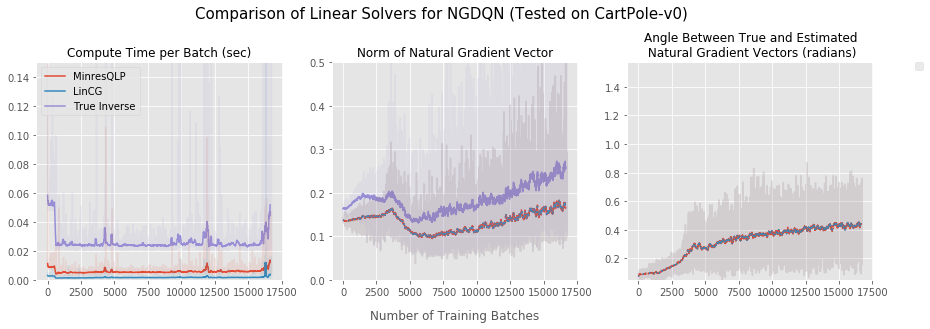

In [282]:
from random import randint

fig, axarr = plt.subplots(1, len(inversion_metrics))
fig.add_subplot(111, frameon=False)
plt.suptitle("Comparison of Linear Solvers for NGDQN (Tested on CartPole-v0)", y=1.075, fontsize=BIGFONT)
plt.xlabel("Number of Training Batches", labelpad=12)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.legend(solvers, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(False)

fig.set_figheight(4)
fig.set_figwidth(15)

def running_mean(x, N):
    # taken from https://stackoverflow.com/a/27681394/
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

to_plot_later = []

for i, metric_name in enumerate(inversion_metrics):
    ax = axarr[i]
    max_y = -float('inf')
    min_y = float('inf')
    for j, solver in enumerate(solvers):
        try:
            data = inversion_data[metric_name][solver]
        except KeyError:
            continue
        smoothed = running_mean(data, 100)
        if (solver != 'true') and ('time' not in metric_name):
            if 'minres' in solver:
                kwargs = {'linestyle': '--'}
            else:
                kwargs = {'linestyle': '--', 'dashes': (0.7,5)}
        else: kwargs = {}
        ax.plot(smoothed, label=solvers[solver], alpha=1.0, color='C{}'.format(j), **kwargs)
        to_plot_later.append((ax, data, {'alpha': 0.1, 'color':'C{}'.format(j)}))
        max_y = max(max(smoothed), max_y)
        min_y = max(min(smoothed), max_y)
        ax.set_title(inversion_metrics[metric_name], fontsize=SMALLFONT)
        if i == 0:
            formatted_solvers = [x[1] for x in solvers.items()]
            ax.legend(formatted_solvers, loc=2, frameon=True)
    ax.set_ylim(*minmaxes[metric_name])

for x in to_plot_later:
    x[0].plot(x[1], **x[2])
            
plt.savefig("./inversion_plots.png", dpi=200, bbox_inches='tight')